# Magnetic Model Plot

In this tutorial, we'll plot a **Magnetic Model**.

## Setup

Let's import the necessary libraries:

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [2]:
import ostk.physics as physics

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

to-Python converter for ostk::physics::time::DateTime already registered; second conversion method ignored.

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

to-Python converter for ostk::math::obj::IntervalBase::Type already registered; second conversion method ignored.



In [3]:
Length = physics.units.Length
Angle = physics.units.Angle
Scale = physics.time.Scale
Instant = physics.time.Instant
DateTime = physics.time.DateTime
LLA = physics.coordinate.spherical.LLA
Earth = physics.environment.objects.celestial_bodies.Earth
DipoleModel = physics.environment.magnetic.Dipole
EarthMagneticModel = physics.environment.magnetic.Earth

## Comparison

Let's set up some gravitational models:

In [4]:
magnetic_model = EarthMagneticModel(EarthMagneticModel.Type.IGRF12)

In [5]:
instant = Instant.date_time(DateTime(2015, 1, 1, 0, 0, 0), Scale.UTC)

In [6]:
def ecef_ll (latitude_deg, longitude_deg):
    
    return LLA(Angle.degrees(latitude_deg), Angle.degrees(longitude_deg), Length.meters(0.0)).to_cartesian(Earth.equatorial_radius, Earth.flattening)

In [7]:
longitudes = np.linspace(-180.0, +180.0, 10)
latitudes = np.linspace(-90.0, +90.0, 10)

In [8]:
magnetic_field_magnitudes = []

In [9]:
for longitude in longitudes:
    
    tmp_magnetic_field_magnitudes = []
    
    for latitude in latitudes:
        
        magnetic_field = magnetic_model.get_field_value_at(ecef_ll(latitude, longitude), instant).T[0]
        
#         print(magnetic_field)
        
        magnetic_field_norm = np.linalg.norm(magnetic_field)
        
#         print(magnetic_field_norm)
        
        tmp_magnetic_field_magnitudes.append(magnetic_field_norm)
        
    magnetic_field_magnitudes.append(tmp_magnetic_field_magnitudes)

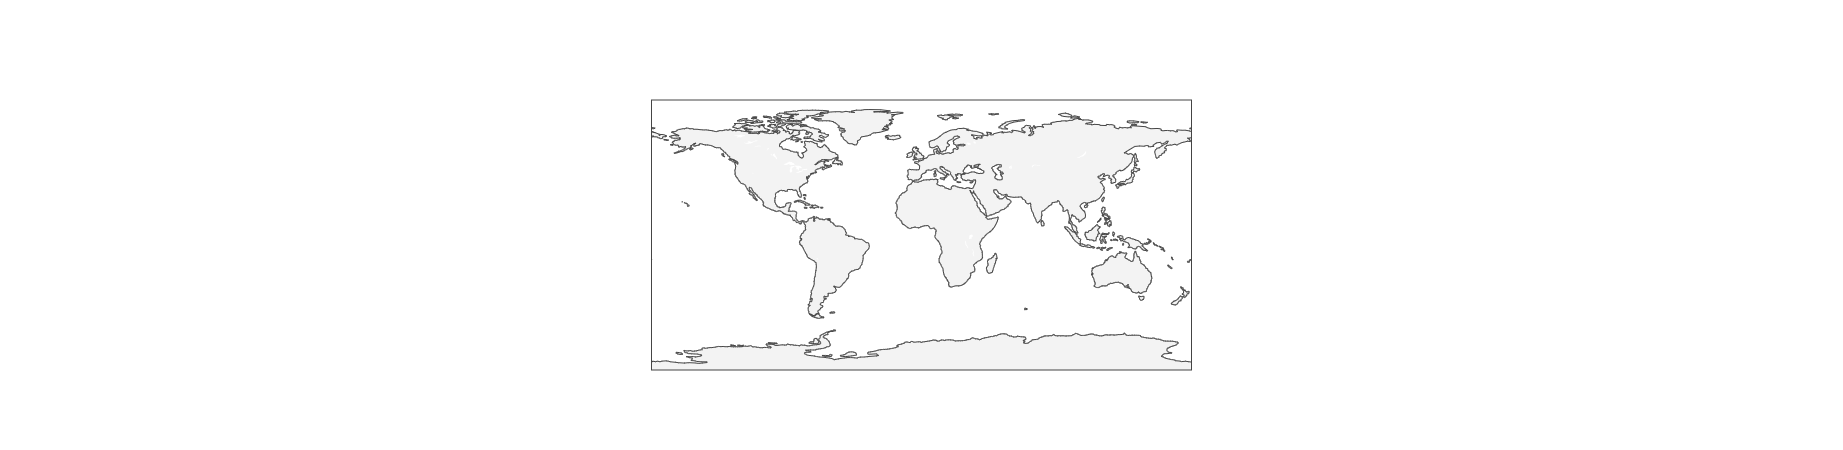

In [10]:
# data = [
#     go.Contour(
#         x = longitudes,
#         y = latitudes,
#         z = magnetic_field_magnitudes,
#         colorscale='Jet',
#         contours=dict(
#             coloring='lines',
#         )
#     )
# ]

data = []

data.append(
    dict(
        type = 'scattergeo',
        lon = [0.0],
        lat = [1.0],
        mode = 'lines',
        line = dict(
            width = 1,
            color = 'red',
        )
    )
)

layout = dict(
    title = None,
    showlegend = False, 
    geo = dict(
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)'
    )
)

fig = dict(data = data, layout = layout)
iplot(fig)

In [11]:
trace1 = {
  "x": ["", "", "", "180", "", "", "", "0", "0.672866", "2.51624", "3.59714", "5.01972", "6.7556", "6.80125", "6.90677", "6.97473", "7.13028", "7.24702", "7.67973", "7.43204", "7.51696", "7.92279", "7.92351", "8.53839", "8.83662", "9.16186", "8.877", "9.17199", "9.4158", "9.94917", "11.2263", "11.8821", "12.278", "13.0457", "12.4255", "12.967", "13.3156", "13.8452", "14.9896", "15.862", "15.9389", "16.5219", "16.6629", "16.4766", "18.0673", "18.5214", "18.253", "19.0344", "19.2937", "19.2975", "18.9148", "19.5398", "19.7323", "20.4432", "21.1372", "21.1952", "21.7167", "22.5808", "22.4283", "21.8163", "22.378", "22.3293", "23.3064", "23.7223", "24.084", "24.4269", "24.3087", "24.9041", "26.0504", "26.9283", "27.2816", "27.2133", "27.6779", "28.4693", "29.821", "31.4271", "32.7641", "33.0097", "32.4872", "32.4887", "33.3004", "34.3637", "34.3839", "34.0244", "33.5986", "34.121", "34.6059", "35.1821", "35.0949", "35.2529", "35.0564", "35.241", "36.0688", "36.1508", "36.3515", "36.7109", "37.034", "37.2241", "37.4886", "37.509", "37.778", "37.7515", "38.0336", "38.2776", "38.0039", "38.2944", "38.19", "38.4038", "38.707", "39.0068", "39.1154", "38.7733", "39.2176", "39.1507", "39.7875", "39.6894", "39.8517", "40.5023", "40.7647", "41.0011", "41.6388", "42.5406", "42.6068", "43.0857", "43.7316", "43.9435", "44.4794", "44.6592", "44.846", "44.6404", "44.9272", "45.4103", "45.6185", "45.7913", "46.1987", "46.423", "46.383", "46.6415", "46.2962", "46.2183", "46.5205", "46.8862", "46.9463", "47.4536", "46.9194", "46.9367", "47.3358", "47.0479", "47.6557", "47.2947", "47.5242", "47.9541", "48.4569", "48.1652", "48.2273", "48.4017", "48.7232", "48.5778", "49.2209", "49.3808", "49.2562", "49.4075", "49.0777", "48.7921", "48.4699", "48.3213", "48.4494", "49.2541", "49.355", "49.1619", "49.8856", "49.6832", "50.1411", "50.6195", "50.6281", "50.8895", "50.9599", "50.4615", "50.4169", "50.8469", "50.506", "50.2242", "50.2235", "50.4179", "51.3691", "51.496", "52.1876", "52.9287", "53.7781", "55.204", "55.866", "56.3904", "56.4337", "56.7684", "57.2301", "57.2995", "57.1719", "55.9909", "56.1222", "56.011", "56.5146", "56.3337", "56.5694", "56.3957", "56.6746", "56.727", "56.2607", "56.3308", "56.1526", "56.3501", "55.7522", "55.7259", "56.1607", "56.1497", "56.5937", "56.9808", "57.367", "57.3215", "57.5814", "58.1365", "58.0219", "58.3176", "58.4185", "58.9288", "59.051", "58.5596", "58.569", "59.1384", "58.9848", "59.2792", "59.5121", "59.632", "60.4653", "61.1722", "61.2386", "61.9039", "62.6244", "63.5375", "64.7952", "66.7148", "67.1209", "68.3434", "69.0679", "69.3431", "69.6312", "69.6381", "70.195", "69.6371", "69.6775", "69.2703", "69.3556", "69.8747", "69.3032", "69.7675", "69.7295", "69.334", "69.2781", "68.9412", "68.7391", "68.9014", "68.7323", "69.3539", "69.2413", "68.8689", "69.2131", "68.9623", "68.5548", "68.1537", "68.0875", "67.8711", "67.5651", "67.4955", "67.198", "67.2041", "67.7732", "67.6549", "67.9596", "68.4187", "68.5549", "68.7123", "69.1337", "69.2666", "68.9044", "68.5501", "68.6598", "68.0416", "67.8011", "67.8844", "67.5334", "67.5056", "67.2347", "67.3343", "66.9882", "66.3162", "66.3948", "67.2127", "68.0282", "68.138", "67.9138", "68.32", "69.0627", "69.5489", "69.6355", "69.9646", "69.9106", "70.6687", "70.7408", "70.4161", "71.211", "71.0764", "71.5455", "71.1473", "71.2696", "71.5602", "71.3319", "71.5233", "71.8444", "71.8184", "72.3346", "72.4677", "72.8874", "72.6081", "72.797", "73.1986", "73.4714", "73.692", "73.9966", "74.2356", "74.2873", "74.7447", "74.736", "74.9527", "75.091", "75.2655", "75.416", "75.811", "75.7877", "76.1775", "76.3771", "76.3696", "76.5802", "76.8366", "77.0266", "77.4363", "77.8542", "77.8827", "78.0553", "77.9662", "78.685", "78.445", "78.4907", "79.0583", "82.0243", "82.363", "82.5792", "82.9052", "83.209", "83.6196", "83.3717", "84.4217", "84.9779", "85.0248", "85.6231", "86.0472", "86.7167", "87.9538", "88.1498", "88.2413", "88.7406", "89.5628", "90.0884", "90.3779", "91.0563", "91.4079", "91.9799", "92.7278", "93.0066", "93.6797", "93.7151", "93.8795", "94.1022", "94.9287", "95.2895", "95.5251", "96.1018", "96.1922", "96.6361", "97.1013", "97.6727", "97.8257", "98.5129", "98.5068", "99.0754", "98.6688", "98.806", "98.8215", "99.0143", "99.1747", "99.5282", "99.5519", "99.9184", "100.302", "100.499", "100.648", "100.475", "100.876", "101.481", "101.157", "101.276", "102.332", "102.663", "103.618", "103.885", "104.395", "104.595", "105.352", "106.338", "106.408", "107.768", "107.883", "107.685", "108.192", "108.288", "108.613", "108.872", "109.129", "109.617", "110.43", "110.755", "110.598", "110.725", "110.472", "110.931", "113.225", "114.443", "114.3", "114.489", "114.309", "115.139", "115.615", "115.779", "115.348", "114.032", "113.689", "114.666", "114.696", "115.232", "115.364", "116.191", "116.226", "116.339", "116.939", "116.844", "117.556", "117.719", "117.931", "118.428", "118.251", "118.461", "119.329", "120.411", "120.401", "119.526", "118.742", "118.963", "118.887", "121.542", "122.221", "123.568", "124.009", "124.27", "124.322", "124.714", "125.215", "125.364", "125.902", "126.164", "126.338", "126.366", "126.438", "126.56", "126.837", "126.567", "126.822", "126.667", "126.989", "127.068", "127.076", "127.345", "127.403", "128.086", "128.167", "128.361", "128.521", "128.811", "129.102", "129.45", "129.369", "129.597", "129.469", "129.739", "130.088", "130.565", "130.739", "131.731", "132.524", "132.835", "133.269", "133.792", "134.445", "134.096", "134.33", "134.313", "134.763", "135.179", "135.329", "135.47", "135.64", "135.756", "136.147", "136.639", "136.707", "137.457", "138.152", "138.153", "138.494", "139.259", "139.45", "139.894", "139.83", "140.117", "140.382", "140.519", "140.915", "141.29", "141.563", "141.867", "142.486", "142.821", "143.53", "143.889", "143.751", "144.068", "144.108", "144.167", "144.448", "144.649", "144.335", "144.511", "144.456", "144.265", "144.171", "144.063", "144.188", "143.861", "143.88", "144.159", "144.262", "144.52", "144.89", "145.311", "145.448", "145.644", "145.734", "146.038", "146.204", "146.099", "146.279", "146.426", "146.544", "146.4", "146.875", "146.612", "147.065", "146.714", "147.119", "147.029", "147.666", "147.985", "148.279", "148.364", "148.683", "148.838", "149.147", "149.233", "149.4", "149.822", "149.749", "149.92", "150.369", "150.976", "151.137", "151.01", "151.148", "151.286", "151.539", "151.586", "152.538", "153.047", "153.321", "153.388", "153.843", "153.695", "153.867", "153.666", "153.887", "154.723", "154.766", "154.449", "154.607", "154.5", "154.819", "154.994", "155.333", "155.27", "155.502", "155.764", "155.537", "155.72", "156.321", "157.155", "157.408", "157.659", "157.505", "157.533", "157.804", "157.911", "158.552", "158.854", "159.128", "159.231", "159.779", "160.353", "160.244", "159.775", "159.874", "160.153", "160.789", "161.262", "161.171", "161.279", "161.455", "161.333", "161.948", "162.351", "162.43", "162.043", "161.987", "162.074", "162.579", "163.19", "163.64", "163.868", "163.884", "164.201", "164.026", "164.164", "165.14", "165.487", "165.425", "165.915", "166.443", "166.851", "166.424", "166.465", "167.708", "167.879", "167.143", "167.922", "168.091", "167.725", "168.687", "168.766", "170.186", "170.365", "170.275", "170.973", "170.581", "170.297", "170.027", "169.76", "170.017", "169.862", "170.282", "170.254", "169.404", "169.117", "168.694", "168.31", "168.866", "169.283", "169.41", "169.926", "169.591", "169.172", "169.225", "168.902", "168.993", "168.722", "168.39", "168.391", "167.639", "167.207", "166.551", "166.584", "166.359", "166.77", "166.762", "167.142", "167.943", "167.608", "167.725", "167.215", "167.435", "167.033", "167.042", "166.847", "166.769", "166.558", "166.115", "166.22", "165.795", "166.193", "166.259", "165.968", "165.589", "165.816", "165.649", "165.195", "165.03", "165.357", "164.975", "164.507", "164.473", "164.899", "164.707", "164.862", "165.312", "164.403", "164.852", "164.849", "165.487", "165.432", "165.175", "164.662", "164.342", "163.749", "163.514", "163.065", "163.273", "163.056", "162.82", "162.619", "162.361", "162.788", "162.577", "162.203", "161.756", "161.554", "161.002", "160.579", "160.902", "161.3", "162.218", "162.323", "162.047", "162.904", "162.528", "162.731", "162.37", "162.486", "162.32", "162.449", "162.083", "162.323", "162.775", "162.882", "162.42", "162.984", "162.882", "162.636", "162.285", "162.526", "162.44", "163.128", "163.836", "163.474", "163.912", "164.26", "163.715", "164.556", "164.42", "163.822", "164.154", "164.703", "165.49", "165.333", "165.693", "165.715", "167.041", "167.248", "166.739", "165.964", "164.466", "163.493", "163.048", "162.668", "162.531", "161.785", "161.84", "161.518", "161.525", "162.051", "161.514", "161.378", "161.004", "161.144", "160.689", "160.385", "161.032", "160.522", "160.167", "159.623", "159.844", "160.84", "159.496", "159.694", "160.378", "160.826", "161.467", "158.769", "158.149", "158.592", "160.779", "161.001", "160.605", "160.635", "159.776", "160.279", "160.784", "161.192", "161.009", "161.344", "159.52", "159.514", "160.881", "160.539", "161.143", "160.083", "160.626", "160.303", "160.908", "160.904", "161.522", "161.009", "162.392", "162.257", "162.918", "163.088", "162.606", "163.932", "160.62", "161.015", "162.664", "163.401", "163.177", "164.654", "165.25", "165.272", "167.359", "167.035", "167.426", "168.08", "168.687", "168.812", "168.053", "168.405", "167.2", "167.149", "168.624", "169.414", "169.464", "169.87", "170.26", "171.157", "171.573", "170.938", "171.74", "171.93", "172.815", "173.705", "173.395", "174.867", "175.243", "176.417", "178.528", "180", "", "", "", "0", "", "", "", "-180", "-179.923", "-178.446", "-177.751", "-176.077", "-176.507", "-175.894", "-175.021", "-171.247", "-168.257", "-167.469", "-166.347", "-163.168", "-161.134", "-159.647", "-158.461", "-158.561", "-156.282", "-156.949", "-155.492", "-157.645", "-155.836", "-155.598", "-158.325", "-163.893", "-164.1", "-163.243", "-163.65", "-166.345", "-163.001", "-165.183", "-165.05", "-163.639", "-164.029", "-165.499", "-166.282", "-168.027", "-168.268", "-167.643", "-168.365", "-168.782", "-172.982", "-174.38", "-173.087", "-172.217", "-171.501", "-170.738", "-169.589", "-169.74", "-168.212", "-168.033", "-165.833", "-164.99", "-164.552", "-163.087", "-162.165", "-160.162", "-159.251", "-158.892", "-157.536", "-156.907", "-158.549", "-157.377", "-155.784", "-155.016", "-152.532", "-154.847", "-153.744", "-153.793", "-155.352", "-157.145", "-157.075", "-155.944", "-154.717", "-152.331", "-149.844", "-147.575", "-148.413", "-149.463", "-148.867", "-149.433", "-148.997", "-149.217", "-148.252", "-149.715", "-149.616", "-150.304", "-150.403", "-151.034", "-149.954", "-150.733", "-150.767", "-150.117", "-150.373", "-148.964", "-147.549", "-148.934", "-148.178", "-149.011", "-147.999", "-147.067", "-147.91", "-147.557", "-148.156", "-147.734", "-150.448", "-151.89", "-151.732", "-152.283", "-151.726", "-152.247", "-152.575", "-152.652", "-152.936", "-154.5", "-156.451", "-156.552", "-156.048", "-156.135", "-154.531", "-154.194", "-153.788", "-154.514", "-155.07", "-155.298", "-155.03", "-156.301", "-156.614", "-157.19", "-158.337", "-158.65", "-158.118", "-158.227", "-157.839", "-157.018", "-156.45", "-156.833", "-156.09", "-155.459", "-154.893", "-153.551", "-153.305", "-153.814", "-152.58", "-152.294", "-149.815", "-149.245", "-149.785", "-148.88", "-148.811", "-147.767", "-149.06", "-148.794", "-147.896", "-147.666", "-147.733", "-147.572", "-146.928", "-146.378", "-145.816", "-145.451", "-145.965", "-145.23", "-146.377", "-145.291", "-145.967", "-145.411", "-146.144", "-146.398", "-147.139", "-148.513", "-149.713", "-149.522", "-148.545", "-148.717", "-148.445", "-146.494", "-146.258", "-145.442", "-145.48", "-146.505", "-146.244", "-144.199", "-143.955", "-144.351", "-143.368", "-142.642", "-142.376", "-141.857", "-141.554", "-140.647", "-141.324", "-140.851", "-140.395", "-139.596", "-139.655", "-139.245", "-137.73", "-137.103", "-136.317", "-136.347", "-137.01", "-136.845", "-136.253", "-135.696", "-135.411", "-134.516", "-134.396", "-133.914", "-133.879", "-132.802", "-132.606", "-132.073", "-131.575", "-130.767", "-130.046", "-127.263", "-126.15", "-125.764", "-124.698", "-124.332", "-124.054", "-123.284", "-123.108", "-121.791", "-120.236", "-119.421", "-118.613", "-119.133", "-119.001", "-117.989", "-117.817", "-116.634", "-116.045", "-115.918", "-115.744", "-115.287", "-114.835", "-115.129", "-114.8", "-114.232", "-113.947", "-114.294", "-113.605", "-113.42", "-113.425", "-113.955", "-113.685", "-113.813", "-113.211", "-113.661", "-114.363", "-113.816", "-114.293", "-114.126", "-113.737", "-111.521", "-111.936", "-111.833", "-111.315", "-111.884", "-111.903", "-111.604", "-110.773", "-110.711", "-110.479", "-110.088", "-110.265", "-111.593", "-111.371", "-110.554", "-109.896", "-109.679", "-107.824", "-106.925", "-106.533", "-105.094", "-104.558", "-101.774", "-101.553", "-101.656", "-101.173", "-101.141", "-100.451", "-100.097", "-99.436", "-98.676", "-98.385", "-98.755", "-98.414", "-98.923", "-99.383", "-99.346", "-100.582", "-100.042", "-100.149", "-99.792", "-100.042", "-100.861", "-101.425", "-101.251", "-101.435", "-101.53", "-102.882", "-102.796", "-103.007", "-101.365", "-101.168", "-100.64", "-99.542", "-99.541", "-98.829", "-99.541", "-99.4", "-99.728", "-99.742", "-100.442", "-102.875", "-103.306", "-103.437", "-102.918", "-102.106", "-102.136", "-102.723", "-102.004", "-101.962", "-100.847", "-100.317", "-99.827", "-97.84", "-97.905", "-97.43", "-95.918", "-95.712", "-95.229", "-94.528", "-94.301", "-93.6", "-92.795", "-91.945", "-91.086", "-90.523", "-90.18", "-89.203", "-89.1", "-89.425", "-88.897", "-88.186", "-88.117", "-88.737", "-88.452", "-87.333", "-87.129", "-86.672", "-85.674", "-85.548", "-85.101", "-84.549", "-83.749", "-83.832", "-82.932", "-82.128", "-81.182", "-81.243", "-80.835", "-80.185", "-80.662", "-80.533", "-79.66", "-78.768", "-78.866", "-76.858", "-76.698", "-77.241", "-77.111", "-76.763", "-76.305", "-75.506", "-75.295", "-74.891", "-74.676", "-74.287", "-74.022", "-73.67", "-73.562", "-73.19", "-73.084", "-72.393", "-72.262", "-71.445", "-71.021", "-70.305", "-68.675", "-67.515", "-66.729", "-67.605", "-67.406", "-67.962", "-68.49", "-68.342", "-68.848", "-68.316", "-68.249", "-67.381", "-67.258", "-66.865", "-66.961", "-66.747", "-66.954", "-66.842", "-67.27", "-67.489", "-66.961", "-67.185", "-66.861", "-67.169", "-66.761", "-66.616", "-66.747", "-66.956", "-67.272", "-66.84", "-66.764", "-67.094", "-66.728", "-66.969", "-66.754", "-66.533", "-66.509", "-66.714", "-66.977", "-67.605", "-67.444", "-67.625", "-67.494", "-67.292", "-67.219", "-67.116", "-67.116", "-66.963", "-66.983", "-66.772", "-66.705", "-66.474", "-66.544", "-66.254", "-65.811", "-65.675", "-65.778", "-65.543", "-65.876", "-65.587", "-65.723", "-65.604", "-65.137", "-65.337", "-64.943", "-64.557", "-64.464", "-64.701", "-64.659", "-64.353", "-64.48", "-64.04", "-64.237", "-64.129", "-63.789", "-63.693", "-64.104", "-63.966", "-64.07", "-63.762", "-63.794", "-63.681", "-63.647", "-63.23", "-63.087", "-62.989", "-63.267", "-62.841", "-62.813", "-62.571", "-62.389", "-62.699", "-62.489", "-62.581", "-62.443", "-62.298", "-62.369", "-62.144", "-62.225", "-61.933", "-61.808", "-61.593", "-61.487", "-61.613", "-61.407", "-61.592", "-61.382", "-61.335", "-61.104", "-61.098", "-60.945", "-60.965", "-60.833", "-60.988", "-60.759", "-60.733", "-60.317", "-59.95", "-59.847", "-59.782", "-59.422", "-59.417", "-58.937", "-58.949", "-58.157", "-58.162", "-58.046", "-57.897", "-57.388", "-57.038", "-57.073", "-56.944", "-57.007", "-56.769", "-56.814", "-57.139", "-57.139", "-57.488", "-57.372", "-57.707", "-57.756", "-57.614", "-57.839", "-58.112", "-58.689", "-58.798", "-59.105", "-58.746", "-58.952", "-58.777", "-58.809", "-58.995", "-58.99", "-59.366", "-59.474", "-59.67", "-59.546", "-59.653", "-59.753", "-59.97", "-60.248", "-60.436", "-60.362", "-60.71", "-61.036", "-61.396", "-61.749", "-61.6", "-61.961", "-62.212", "-61.938", "-61.701", "-62.088", "-62.063", "-62.381", "-62.376", "-62.046", "-61.755", "-61.595", "-61.633", "-61.313", "-61.352", "-61.07", "-61.027", "-60.546", "-60.699", "-60.821", "-61.042", "-60.873", "-60.978", "-61.129", "-61.18", "-61.472", "-61.492", "-61.789", "-61.66", "-61.767", "-61.962", "-62.663", "-62.779", "-62.514", "-62.728", "-62.425", "-62.638", "-63.21", "-63.808", "-63.706", "-63.904", "-63.546", "-63.908", "-63.746", "-63.927", "-63.793", "-64.007", "-64.148", "-63.763", "-63.741", "-64.072", "-64.308", "-64.362", "-64.538", "-64.625", "-64.784", "-64.691", "-64.975", "-64.977", "-64.691", "-65.071", "-64.752", "-65.02", "-65.324", "-65.473", "-65.455", "-65.623", "-65.594", "-65.324", "-65.712", "-65.313", "-65.763", "-65.766", "-65.271", "-64.938", "-64.988", "-64.749", "-65.514", "-64.975", "-65.372", "-65.264", "-64.686", "-64.517", "-64.346", "-64.4", "-64.039", "-64.181", "-63.995", "-64.334", "-64.153", "-64.25", "-63.413", "-62.841", "-62.936", "-63.279", "-63.751", "-63.852", "-63.194", "-63.484", "-63.402", "-63.921", "-63.309", "-63.433", "-63.182", "-63.016", "-62.715", "-62.4", "-62.541", "-61.86", "-62.039", "-62.388", "-62.415", "-62.139", "-62.164", "-61.909", "-61.461", "-61.353", "-61.69", "-61.799", "-62.135", "-62.064", "-61.289", "-61.364", "-61.18", "-60.908", "-61.284", "-60.967", "-61.425", "-61.147", "-61.56", "-61.72", "-62.127", "-61.578", "-61.141", "-60.783", "-61.098", "-61.102", "-62.46", "-62.09", "-62.328", "-61.696", "-61.152", "-61.157", "-60.67", "-60.677", "-61.086", "-60.702", "-60.643", "-60.999", "-60.63", "-61.034", "-61.476", "-61.215", "-61.434", "-61.124", "-61.024", "-60.519", "-60.776", "-60.544", "-60.306", "-60.104", "-59.946", "-59.979", "-60.343", "-60.627", "-60.702", "-60.875", "-61.027", "-61.224", "-62.069", "-61.602", "-62.028", "-61.526", "-61.95", "-61.685", "-61.46", "-60.907", "-60.759", "-61.146", "-60.725", "-60.993", "-61.41", "-61.808", "-61.581", "-61.843", "-61.485", "-61.03", "-61.396", "-61.565", "-61.977", "-61.917", "-61.276", "-60.769", "-60.667", "-61.287", "-62.348", "-61.77", "-62.141", "-62.557", "-62.678", "-63.15", "-63.066", "-63.529", "-64.067", "-63.884", "-63.317", "-63.028", "-64.023", "-64.421", "-64.352", "-63.076", "-63.825", "-65.281", "-66.233", "-68.027", "-67.949", "-70.085", "-70.174", "-69.745", "-70.075", "-69.806", "-70.118", "-69.791", "-69.93", "-71.58", "-73.959", "-73.811", "-75.231", "-75.676", "-75.779", "-76.555", "-76.716", "-77.474", "-77.443", "-77.707", "-77.59", "-76.807", "-76.963", "-75.871", "-75.488", "-74.751", "-72.7", "-73.478", "-75.057", "-75.249", "-76.635", "-78.246", "-79.131", "-79.371", "-80.786", "-80.805", "-81.675", "-77.506", "-77.327", "-77.865", "-79.233", "-80.722", "-82.464", "-83.837", "-82.939", "-83.687", "-83.719", "-83.083", "-82.568", "-82.603", "-81.709", "-81.389", "-81.095", "-81.323", "-80.812", "-80.471", "-80.53", "-80.056", "-77.172", "-76.058", "-76.109", "-76.717", "-78.068", "-79.691", "-78.284", "-76.26", "-76.143", "-75.399", "-75.698", "-74.935", "-75.747", "-75.554", "-75.152", "-74.842", "-74.137", "-72.601", "-72.47", "-71.565", "-71.133", "-70.789", "-69.994", "-69.203", "-68.39", "-68.049", "-68.401", "-65.392", "-63.915", "-62.271", "-62.403", "-63.447", "-63.341", "-64.054", "-63.86", "-64.247", "-64.713", "-64.631", "-65.695", "-65.685", "-64.92", "-63.823", "-63.465", "-64.649", "-65.661", "-66.271", "-65.613", "-66.087", "-65.206", "-65.099", "-64.449", "-64.429", "-63.049", "-62.157", "-60.41", "-61.09", "-62.803", "-62.221", "-61.823", "-61.627", "-61.309", "-60.991", "-61.88", "-60.896", "-60.927", "-60.614", "-59.586", "-57.633", "-55.845", "-55.178", "-55.034", "-53.925", "-54.254", "-53.221", "-52.686", "-50.79", "-48.9", "-47.399", "-47.265", "-46.271", "-45.94", "-46.692", "-46.199", "-45.699", "-45.539", "-44.151", "-44.039", "-43.317", "-43.202", "-41.93", "-41.067", "-40.299", "-38.805", "-37.219", "-36.876", "-35.998", "-35.217", "-35.346", "-34.019", "-33.164", "-33.47", "-32.858", "-31.958", "-30.329", "-31.386", "-30.033", "-29.825", "-28.9", "-24.821", "-22.54", "-24.278", "-24.259", "-25.942", "-30.695", "-29.531", "-30.565", "-29.975", "-30.199", "-32.068", "-33.651", "-34.596", "-36.277", "-36.279", "-36.001", "-35.575", "-35.351", "-34.478", "-34.782", "-34.361", "-32.885", "-31.898", "-31.68", "-30.649", "-30.148", "-29.6", "-28.87", "-26.946", "-25.953", "-24.158", "-23.265", "-22.548", "-21.235", "-20.653", "-20.738", "-20.432", "-19.236", "-18.917", "-19.026", "-18.251", "-18.885", "-17.793", "-17.979", "-17.622", "-17.566", "-16.618", "-15.647", "-15.191", "-15.306", "-14.387", "-14.73", "-15.721", "-16.533", "-15.828", "-16.609", "-16.548", "-15.965", "-15.888", "-14.919", "-14.423", "-13.956", "-13.895", "-14.378", "-13.327", "-12.591", "-11.312", "-11.216", "-11.412", "-11.007", "-11.155", "-10.85", "-11.492", "-12.141", "-12.389", "-12.252", "-11.66", "-11.652", "-11.33", "-10.796", "-10.592", "-10.651", "-9.987", "-10.453", "-9.984", "-9.887", "-9.063", "-9.12", "-8.805", "-8.756", "-8.389", "-8.156", "-8.085", "-7.589", "-7.791", "-7.557", "-7.975", "-7.373", "-6.606", "-6.441", "-5.994", "-5.664", "-5.548", "-6.307", "-6.165", "-5.234", "-3.937", "-3.955", "-3.476", "-3.318", "-2.98", "-3.01", "-2.683", "-2.086", "-1.972", "-1.373", "-1.121", "-0.793", "-0.949", "-0.508", "0", "", "", "", "-70.359133", "-70.092334", "-70.104873", "-69.737955", "-69.318011", "-69.286045", "-68.330084", "-68.484456", "-68.295696", "-68.216134", "-68.482474", "-68.424345", "-68.739668", "-68.933495", "-69.167551", "-69.194918", "-70.520653", "-70.743976", "-70.918137", "-72.378008", "-72.442471", "-72.711827", "-73.162161", "-72.783708", "-72.16668", "-72.084319", "-70.90324", "-70.155503", "-70.401476", "-71.134218", "-72.046135", "-70.78474", "-70.828979", "-71.124889", "-71.378287", "-71.846923", "-71.821472", "-72.345102", "-72.873757", "-73.456859", "-73.858648", "-73.501268", "-74.090387", "-74.380073", "-74.849232", "-75.407373", "-75.174844", "-75.411629", "-74.934218", "-74.340457", "-74.435776", "-74.229614", "-73.450791", "-73.346441", "-73.678724", "-73.512351", "-72.750088", "-72.192875", "-72.209602", "-73.086978", "-72.78479", "-71.616374", "-71.3499", "-70.868599", "-70.362457", "-69.83794", "-69.784542", "-70.809661", "-71.270826", "-70.794159", "-70.158845", "-69.677188", "-69.599311", "-70.239213", "-70.186702", "-70.729043", "-71.068859", "-71.8293", "-71.914571", "-71.619076", "-72.090364", "-72.210756", "-71.560955", "-70.359133", "", "", "", "-47.604083", "-45.853664", "-44.737128", "-43.780721", "-43.916093", "-44.971389", "-45.368864", "-43.755465", "-43.489828", "-42.929202", "-43.128073", "-43.856579", "-43.419626", "-46.621444", "-48.057999", "-49.131444", "-49.706775", "-49.712443", "-50.49106", "-54.076625", "-54.382578", "-53.391187", "-53.042201", "-52.322644", "-52.47853", "-50.239752", "-50.727342", "-49.959902", "-49.123256", "-47.604083", "", "", "", "-95.42313", "-96.064478", "-95.794923", "-95.976277", "-96.611288", "-96.702759", "-96.985546", "-97.17724", "-98.377209", "-98.662067", "-98.559573", "-99.452375", "-99.230445", "-101.713637", "-101.983102", "-102.34383", "-101.765721", "-100.535166", "-100.169465", "-99.93086", "-100.44951", "-99.992853", "-99.796732", "-99.534819", "-98.67974", "-99.153759", "-98.725498", "-97.982376", "-98.292808", "-98.344395", "-98.100801", "-97.852464", "-97.944452", "-97.773746", "-97.885926", "-97.666089", "-97.373275", "-97.618251", "-97.370265", "-97.031471", "-96.360066", "-96.05845", "-96.103175", "-96.498304", "-96.388918", "-96.995286", "-96.676377", "-95.638561", "-95.502903", "-95.673736", "-96.133756", "-95.42313", "", "", "", "-159.918337", "-161.74342", "-164.315099", "-164.19892", "-163.28804", "-161.977879", "-159.708632", "-158.946436", "-159.918337", "", "", "", "-66.208946", "-65.565354", "-63.550294", "-62.111355", "-61.187018", "-61.811453", "-61.250458", "-61.519286", "-60.043218", "-60.486524", "-59.800013", "-59.959881", "-59.284964", "-59.614834", "-59.77543", "-59.833072", "-59.470202", "-59.809516", "-60.648907", "-62.397824", "-63.116847", "-63.818528", "-64.243696", "-65.144396", "-66.7426", "-66.764616", "-66.208421", "-66.208946", "", "", "", "-66.661251", "-69.307493", "-69.815419", "-69.655725", "-70.65544", "-71.397767", "-71.808574", "-71.071837", "-67.380048", "-66.661251", "", "", "", "-123.867726", "-125.187277", "-125.175929", "-126.467533", "-126.546609", "-127.272833", "-127.164454", "-127.464511", "-127.499507", "-127.355988", "-126.06241", "-125.206943", "-125.280663", "-125.849484", "-125.906346", "-125.668037", "-125.273628", "-125.002275", "-124.514907", "-124.024208", "-124.202324", "-123.763109", "-123.867726", "", "", "", "-120.378199", "-121.079564", "-121.014089", "-122.013059", "-122.635697", "-123.019534", "-122.727544", "-122.936634", "-122.324112", "-123.335732", "-123.281862", "-123.10801", "-122.370998", "-121.103755", "-120.534585", "-120.373268", "-120.732619", "-120.260133", "-120.378199", "", "", "", "-74.467278", "-76.263777", "-76.546668", "-75.958966", "-75.217785", "-74.937583", "-74.570422", "-74.472685", "-74.112587", "-74.00341", "-73.53654", "-74.467278", "", "", "", "-74.22979", "-74.491819", "-74.753887", "-74.357479", "-74.589589", "-75.76888", "-76.117356", "-75.855325", "-75.450677", "-75.446995", "-75.047042", "-75.767982", "-75.415302", "-74.22979", "", "", "", "166.651719", "166.957775", "166.461314", "166.929458", "166.161543", "166.66807", "166.394867", "166.665697", "166.94286", "167.45321", "168.32867", "169.301477", "169.361525", "168.5219", "167.537545", "166.651719", "", "", "", "-74.404446", "-74.635115", "-74.772655", "-75.663674", "-75.832292", "-75.704417", "-75.229674", "-75.431203", "-74.967544", "-74.404446", "", "", "", "-90.753938", "-90.796699", "-91.502064", "-91.333074", "-91.663354", "-91.132761", "-90.801681", "-90.753938", "", "", "", "-20.530251", "-20.690553", "-20.375224", "-20.470442", "-20.848228", "-21.141807", "-22.041594", "-21.103369", "-20.864584", "-20.629827", "-20.530251", "", "", "", "-161.51965", "-163.685822", "-163.842946", "-162.592589", "-160.743668", "-160.394863", "-161.51965", "", "", "", "100.289715", "100.289544", "100.605258", "100.99351", "101.255665", "101.028931", "100.289715", "", "", "", "-3.207046", "-2.526515", "-2.701194", "-2.086761", "-2.366379", "-2.762299", "-2.861441", "-2.667121", "-3.585642", "-3.550816", "-3.207046", "", "", "", "-67.086657", "-65.78277", "-66.700844", "-65.554128", "-65.897517", "-65.450106", "-66.187024", "-66.39749", "-67.021941", "-66.824747", "-67.845831", "-67.086657", "", "", "", "26.619587", "26.876028", "26.480192", "26.015857", "25.909299", "26.251796", "26.619587", "", "", "", "-62.20098", "-61.72754", "-62.024435", "-62.58183", "-62.458084", "-62.20098", "", "", "", "-35.257739", "-33.961209", "-36.40472", "-36.540224", "-36.655949", "-35.737077", "-35.257739", "", "", "", "15.900569", "16.637287", "16.285132", "16.131705", "15.554913", "15.900569", "", "", "", "-119.052854", "-119.672874", "-119.884177", "-119.631844", "-119.89927", "-118.957034", "-119.052854", "", "", "", "-72.360066", "-71.943335", "-71.977734", "-72.168074", "-72.277156", "-72.776184", "-72.984981", "-72.753219", "-72.360066", "", "", "", "-31.392934", "-30.305893", "-30.860677", "-30.761185", "-29.650806", "-30.104831", "-29.987887", "-30.374464", "-30.510518", "-30.71587", "-31.639435", "-32.165093", "-31.79486", "-31.392934", "", "", "", "-116.556186", "-117.233097", "-117.367591", "-116.344004", "-116.139521", "-116.644446", "-116.556186", "", "", "", "-127.333288", "-127.55173", "-128.112164", "-128.177855", "-127.137032", "-127.333288", "", "", "", "-149.417376", "-150.432456", "-150.776939", "-150.403613", "-149.813713", "-149.22861", "-149.417376", "", "", "", "-131.082261", "-131.857504", "-132.184093", "-131.668508", "-130.97202", "-131.082261", "", "", "", "-3.091822", "-2.68448", "-2.701311", "-3.453472", "-3.091822", "", "", "", "-162.944176", "-163.800255", "-162.45172", "-161.584741", "-162.182677", "-162.944176", "", "", "", "166.021354", "166.067697", "166.80603", "167.582456", "167.453729", "166.840932", "166.24425", "166.021354", "", "", "", "85.259174", "85.794692", "85.889254", "85.600774", "85.259174", "", "", "", "-67.052719", "-67.498159", "-68.557399", "-67.475636", "-68.427547", "-68.044712", "-67.526921", "-67.052719", "", "", "", "96.333937", "96.652952", "96.914215", "97.049908", "96.407286", "96.333937", "", "", "", "-89.333978", "-89.742129", "-90.164149", "-90.333048", "-90.243164", "-90.024626", "-89.856528", "-89.333978", "", "", "", "1.448033", "1.162671", "0.95803", "1.338193", "1.448033", "", "", "", "4.51645", "4.612893", "4.298939", "4.051172", "4.51645", "", "", "", "3.185296", "3.154964", "2.664253", "2.618258", "3.185296", "", "", "", "103.158959", "103.406526", "103.136358", "103.130879", "102.776124", "102.793483", "103.161238", "103.158959", "", "", "", "-60.522081", "-60.534476", "-60.847901", "-60.970042", "-60.522081", "", "", "", "-170.190891", "-171.901339", "-168.797448", "-170.190891", "", "", "", "-145.861342", "-146.162466", "-145.84068", "-145.217708", "-145.861342", "", "", "", "71.758674", "71.626757", "71.771767", "72.024252", "71.812884", "71.758674", "", "", "", "-73.549571", "-74.034553", "-74.062642", "-73.736668", "-73.549571", "", "", "", "-94.796878", "-95.274612", "-94.493948", "-94.40061", "-94.796878", "", "", "", "-148.418979", "-148.962811", "-149.494921", "-148.758863", "-148.418979", "", "", "", "-146.251353", "-146.377974", "-147.064879", "-147.087673", "-146.300226", "-146.251353", "", "", "", "-146.818978", "-147.447865", "-146.975184", "-146.818978", "", "", "", "-151.122032", "-151.52283", "-151.078849", "-150.349984", "-151.122032", "", "", "", "-16.255443", "-16.236012", "-16.527825", "-16.384744", "-16.255443", "", "", "", "100.450442", "100.807479", "101.041982", "100.807836", "100.450442", "", "", "", "-71.427985", "-71.716792", "-71.74791", "-71.333408", "-71.427985", "", "", "", "-158.699299", "-160.366196", "-156.96234", "-158.699299", "", "", "", "-6.050899", "-5.8872", "-6.147698", "-6.451819", "-6.330513", "-6.050899", "", "", "", "-12.749808", "-12.497507", "-12.61141", "-12.962339", "-12.906391", "-12.749808", "", "", "", "163.830772", "163.694019", "164.302821", "164.041129", "163.979057", "163.830772", "", "", "", "-148.93401", "-149.286592", "-148.436851", "-148.93401", "", "", "", "-60.522942", "-60.593883", "-60.959611", "-60.697372", "-60.522942", "", "", "", "-150.343481", "-150.843", "-150.134803", "-150.343481", "", "", "", "-3.129748", "-2.980541", "-3.320648", "-3.410722", "-3.129748", "", "", "", "-147.028292", "-147.36562", "-147.244385", "-146.741688", "-147.055787", "-147.028292", "", "", "", "86.234512", "86.526207", "86.673614", "86.342658", "86.234512", "", "", "", "-154.764613", "-153.892635", "-154.35038", "-155.664146", "-154.764613", "", "", "", "-59.606807", "-59.486258", "-59.842605", "-59.606807", "", "", "", "-158.252899", "-157.975469", "-159.002852", "-158.252899", "", "", "", "-61.156862", "-61.134305", "-61.398115", "-61.336293", "-61.156862", "", "", "", "98.584135", "98.957346", "98.771688", "98.584135", "", "", "", "97.033877", "97.306221", "97.427722", "97.033877", "", "", "", "-132.448043", "-132.901324", "-132.518745", "-132.448043", "", "", "", "-31.935768", "-32.15565", "-32.604545", "-32.386112", "-31.935768", "", "", "", "-60.684788", "-60.751431", "-61.023778", "-60.684788", "", "", "", "5.692994", "5.694538", "5.462309", "5.692994", "", "", "", "47.502932", "47.61475", "47.923744", "47.418432", "47.502932", "", "", "", "100.121335", "100.278709", "100.306704", "100.112479", "100.121335", "", "", "", "-154.339626", "-154.568296", "-154.408716", "-154.040882", "-154.339626", "", "", "", "85.089068", "85.152474", "85.340563", "85.170744", "85.089068", "", "", "", "-149.32269", "-149.665671", "-148.908731", "-149.32269", "", "", "", "-148.632069", "-149.149255", "-148.826112", "-148.632069", "", "", "", "10.920901", "10.978968", "10.536526", "10.920901", "", "", "", "-64.56347", "-64.955843", "-64.928894", "-64.56347", "", "", "", "120.474387", "120.536567", "120.864727", "120.474387", "", "", "", "6.496545", "6.481554", "6.259327", "6.496545", "", "", "", "-117.207938", "-117.3904", "-116.966327", "-117.207938", "", "", "", "-163.080269", "-163.406284", "-163.150555", "-162.682705", "-163.080269", "", "", "", "-93.184341", "-93.388616", "-93.18952", "-93.184341", "", "", "", "-48.921576", "-49.42186", "-48.775473", "-48.921576", "", "", "", "-153.594293", "-153.632044", "-153.320635", "-153.594293", "", "", "", "-147.350276", "-147.557536", "-147.189598", "-147.350276", "", "", "", "2.111889", "2.117369", "1.948539", "2.111889", "", "", "", "-153.1796", "-153.456058", "-153.093456", "-153.1796", "", "", "", "-155.460466", "-155.533517", "-155.227366", "-155.460466", "", "", "", "", "", "", "180", "", "", "", "180", "179.525028", "179.128333", "178.850694", "177.703361", "177.404139", "177.521583", "177.273306", "177.342444", "177.073278", "176.684972", "176.449917", "176.058278", "175.728361", "175.142556", "175.699917", "176.003333", "176.213847", "176.439111", "176.182528", "176.071611", "176.481639", "176.758278", "177.086583", "177.508278", "177.497556", "177.836667", "178.248361", "178.1175", "178.330778", "178.234028", "178.649167", "178.528333", "178.209083", "178.445", "178.696722", "178.654944", "178.757417", "178.797444", "178.639917", "178.767417", "178.591611", "178.509111", "178.797444", "178.635806", "178.780028", "178.894111", "178.801611", "179.055833", "178.911639", "178.835722", "179.447528", "179.275778", "179.622556", "179.414083", "179.137417", "179.148333", "178.078222", "177.114972", "175.284972", "175.434139", "175.261639", "175.211611", "174.77", "174.849139", "174.629972", "174.7625", "174.584972", "174.380028", "174.138306", "174.232472", "174.05", "174.135861", "173.836667", "173.531667", "173.509194", "173.309167", "173.271722", "173.068306", "172.875", "172.732444", "172.945833", "172.936667", "172.786611", "172.651667", "172.340861", "172.444111", "172.245722", "172.472528", "172.419944", "172.030833", "172.21575", "172.070028", "172.004944", "171.93825", "171.7075", "171.393361", "170.93325", "170.798333", "170.734972", "170.549111", "170.665778", "170.494139", "170.695806", "170.519139", "170.309972", "169.955722", "169.872472", "170.035833", "169.791667", "169.680778", "169.278389", "169.402444", "169.253333", "169.226611", "169.032417", "169.218333", "168.483278", "167.794972", "167.7925", "167.573306", "167.361639", "167.397417", "167.220056", "167.011694", "167.075833", "166.870806", "166.975778", "166.278389", "166.085722", "166.310778", "166.257556", "166.3875", "166.275", "166.008306", "165.919944", "165.706639", "165.501667", "165.451667", "165.4925", "165.223361", "165.053222", "165.224139", "164.836639", "164.709167", "164.486639", "164.137472", "164.199972", "164.059139", "164.21", "163.637333", "163.819083", "163.696611", "163.462444", "163.414111", "163.120806", "163.344139", "163.316639", "163.070778", "163.240833", "163.036611", "162.902306", "163.039222", "162.683278", "162.814139", "162.517417", "162.607472", "162.316694", "162.199167", "162.249972", "162.037417", "161.89075", "161.984944", "162.107472", "162.477472", "162.363306", "162.524194", "162.54575", "162.691611", "163.20825", "163.319222", "163.094111", "162.675861", "162.785833", "162.849222", "162.7775", "162.925", "163.2275", "163.360806", "163.043333", "162.809111", "162.624944", "162.490806", "162.572833", "162.087472", "161.747472", "162.144083", "161.696722", "161.289972", "161.149972", "160.845028", "159.983333", "159.984139", "159.800806", "159.903333", "159.844111", "159.920778", "159.96575", "159.777444", "159.980833", "159.950806", "160.0375", "160.049139", "159.7475", "159.818306", "159.09", "158.699944", "158.585", "158.417278", "158.426611", "158.642444", "158.474028", "158.595667", "158.544111", "158.384167", "158.520722", "158.3975", "158.55575", "158.542417", "158.38575", "158.272528", "157.904139", "157.589167", "157.462472", "156.673361", "156.752472", "156.692472", "156.527556", "156.514972", "156.374944", "156.479083", "156.326651", "156.150806", "155.562528", "155.654167", "155.989139", "156.487417", "156.536611", "156.732472", "156.904056", "157.004139", "156.774194", "156.850833", "157.01", "157.171611", "157.445", "157.688361", "157.958278", "158.276639", "158.319944", "159.120889", "159.717444", "159.762417", "160.387472", "160.490806", "160.888306", "161.475806", "161.909111", "161.941556", "162.71", "162.92325", "163.331722", "163.313361", "163.608333", "163.789083", "163.700778", "163.809139", "163.482583", "164.027472", "163.749111", "163.870778", "164.065861", "164.149083", "164.531667", "165.1995", "165.105806", "165.308583", "164.75", "164.609944", "163.261583", "163.164194", "163.372472", "163.087389", "163.192528", "162.969194", "163.329139", "163.021639", "162.83", "162.620806", "162.770056", "162.388333", "161.997472", "161.871583", "161.893333", "161.808389", "160.914111", "160.804083", "160.691694", "160.423333", "160.431639", "160.213361", "160.174222", "160.384083", "160.440806", "159.791667", "160.005833", "159.942528", "159.7725", "160.020861", "159.8825", "160.279111", "160.396639", "160.034944", "159.9", "159.699944", "159.578333", "159.577417", "159.468361", "159.386694", "159.013306", "158.843333", "158.268306", "158.08", "157.499972", "157.34675", "156.681583", "156.655861", "155.937472", "155.91", "155.793333", "154.792417", "154.486667", "154.5675", "154.404167", "154.409167", "154.230833", "154.3775", "154.231667", "154.129139", "154.305028", "154.401583", "154.501583", "154.42", "154.871583", "154.979944", "155.224139", "155.188361", "154.824944", "154.806583", "154.468389", "154.3325", "154.358361", "154.046667", "153.690806", "153.773528", "153.66025", "153.468167", "153.298528", "153.338917", "153.010861", "152.898333", "152.550028", "152.358222", "152.402472", "152.184972", "152.066611", "151.341611", "151.103389", "151.43", "152.089944", "152.320778", "152.173306", "151.733306", "151.406667", "150.911722", "150.935889", "150.753333", "150.741639", "150.4875", "150.766667", "150.573389", "150.043333", "149.433389", "149.045778", "149.229972", "148.934972", "148.881694", "148.7225", "148.749972", "149.002444", "148.931667", "148.426667", "148.40075", "148.264889", "147.885028", "147.799944", "147.638333", "147.544944", "146.505", "146.304083", "146.350778", "146.046667", "145.824167", "145.969111", "145.786583", "145.691639", "144.913306", "143.876611", "143.483278", "143.161556", "143.246611", "142.461667", "142.077472", "141.544111", "140.78075", "140.514167", "140.324944", "140.011667", "139.790833", "138.939139", "138.884222", "138.607444", "138.576667", "138.559972", "138.4325", "138.272528", "138.112528", "138.2275", "138.061611", "137.720833", "137.425861", "137.402444", "137.305", "136.766639", "136.428306", "136.144167", "135.227417", "135.25575", "135.668361", "135.74325", "136.498333", "136.664944", "136.685", "136.8325", "136.834139", "136.7425", "136.814139", "136.675833", "136.783333", "136.943278", "137.195806", "137.302472", "137.16", "137.0825", "137.205778", "137.395056", "137.735833", "137.477444", "137.37", "137.29575", "137.594944", "137.862417", "137.609167", "137.504111", "137.209194", "137.313306", "137.948361", "138.2925", "138.3675", "138.580028", "138.584111", "138.230861", "138.458333", "138.764167", "138.757528", "138.655861", "138.6525", "139.303306", "139.741583", "139.795806", "140.332528", "140.274139", "140.565833", "141.132444", "140.948278", "140.902472", "141.424139", "141.339111", "141.449194", "141.203333", "140.630833", "140.935", "141.058306", "141.240833", "141.164167", "141.269111", "141.115833", "141.386639", "141.529111", "141.545833", "141.342444", "141.389167", "141.1925", "141.107472", "140.877528", "140.890861", "140.730778", "140.894139", "140.674139", "140.655889", "140.437444", "140.507444", "140.564944", "140.551611", "140.6925", "140.402028", "140.534583", "140.552944", "140.427833", "140.31625", "140.391278", "140.355444", "140.245389", "140.335333", "140.1995", "140.29125", "140.251611", "140.336611", "140.391306", "140.198722", "140.174583", "139.265417", "138.989528", "138.559528", "138.105833", "137.684167", "136.799194", "136.757472", "136.615833", "136.449944", "136.323306", "136.182472", "135.878278", "135.637", "135.632083", "135.552917", "135.522528", "135.452083", "135.459139", "135.530361", "135.434111", "135.275861", "135.168694", "135.23125", "135.135806", "134.185833", "133.922472", "133.876611", "133.724194", "133.504111", "133.043333", "132.997472", "132.853333", "132.749972", "132.5725", "132.410028", "132.322444", "132.287083", "132.398778", "132.308722", "132.332528", "131.955778", "131.84125", "132.0655", "131.97175", "131.76", "131.697111", "131.774556", "131.685", "131.576194", "131.377917", "131.384944", "131.471278", "131.361639", "131.258722", "131.220861", "131.114111", "130.918417", "130.810444", "130.940083", "130.789639", "130.833417", "130.673361", "130.700944", "130.795917", "130.870472", "130.685417", "130.77875", "130.699611", "130.592528", "130.582528", "130.395056", "130.4", "130.203306", "130.170806", "130.081639", "129.895444", "129.848333", "129.759583", "129.647917", "129.681639", "129.807917", "129.715778", "129.219111", "129.080833", "128.634944", "128.630778", "128.329194", "127.991667", "127.885806", "127.779972", "127.507056", "127.572083", "127.529972", "127.386667", "127.477917", "127.394556", "127.37875", "127.754139", "128.190861", "128.266694", "128.360889", "128.613917", "129.058722", "129.43125", "129.477917", "129.372861", "129.450806", "129.5575", "129.583778", "129.445444", "129.354556", "129.362889", "129.125", "129.05125", "129.090833", "129.029972", "128.966611", "128.960778", "128.694111", "128.589167", "128.636194", "128.456611", "128.502083", "128.407889", "128.415472", "128.476222", "128.424139", "128.330389", "128.428778", "128.307861", "128.332472", "128.196694", "128.048333", "128.057472", "128.008306", "127.924111", "127.874972", "127.720806", "127.713306", "127.625833", "127.601694", "127.57375", "127.639194", "127.774556", "127.803306", "127.659167", "127.644111", "127.552028", "127.595389", "127.515806", "127.356222", "127.509611", "127.334139", "127.439583", "127.34", "127.213361", "127.113722", "127.197444", "127.227083", "127.2525", "127.285833", "127.344611", "127.242472", "127.179972", "126.957056", "126.978722", "126.884111", "126.784556", "126.766639", "126.734556", "126.524972", "126.453694", "126.542917", "126.387444", "126.279583", "126.294194", "126.370028", "126.482889", "126.389167", "126.622111", "126.496667", "126.362056", "126.682889", "126.565361", "126.55175", "126.515389", "126.367472", "126.44125", "126.305", "126.388806", "126.239556", "126.345806", "126.419167", "126.476222", "126.32625", "126.395833", "126.48875", "126.404611", "126.482917", "126.484167", "126.680417", "126.664944", "126.508333", "126.457056", "126.684111", "126.781194", "126.683694", "126.83375", "126.6125", "126.612861", "126.866611", "126.893778", "126.725861", "126.493278", "126.589556", "126.482917", "126.572083", "126.495417", "126.511222", "126.465861", "126.366639", "126.360361", "126.289583", "126.419139", "126.332056", "126.270389", "126.154139", "126.221222", "126.153278", "126.119083", "126.109528", "126.157472", "126.196194", "126.177861", "126.2725", "126.299944", "126.265361", "126.351694", "126.318694", "126.431222", "126.3575", "126.452917", "126.466611", "126.509167", "126.567972", "126.496639", "126.627528", "126.784111", "126.857917", "126.985361", "126.908333", "126.788722", "126.854194", "126.743722", "126.795", "126.6495", "126.676611", "126.860389", "126.589528", "126.661194", "126.537833", "126.520333", "126.649167", "126.654917", "126.902917", "126.676167", "126.727444", "126.573306", "126.394889", "126.158194", "126.127444", "126.049944", "125.895861", "125.818333", "125.627472", "125.560361", "125.73625", "125.626194", "125.617944", "125.524972", "125.344972", "125.355833", "125.447917", "125.360361", "125.5075", "125.515056", "125.378306", "125.452889", "125.355778", "125.300028", "125.228722", "125.306222", "125.237528", "125.174944", "124.97625", "125.155", "125.112917", "125.2425", "125.26", "124.652028", "124.8675", "124.881694", "124.855417", "125.01125", "124.960833", "125.073278", "125.121667", "125.310028", "125.435833", "125.603722", "125.447472", "125.279167", "125.126222", "125.454556", "125.397139", "125.494556", "125.369139", "125.335389", "125.610028", "125.454194", "125.559194", "125.285", "125.235833", "125.143306", "124.753333", "124.752056", "124.640056", "124.57325", "124.406667", "124.312917", "124.358694", "124.224222", "124.254139", "123.994139", "123.820833", "123.696667", "123.625806", "123.553306", "123.520806", "123.413333", "123.410833", "123.284139", "123.203694", "123.274111", "122.963306", "122.575806", "122.525806", "122.505833", "122.381694", "122.067028", "122.166222", "122.026667", "122.0625", "121.829139", "121.896667", "121.703278", "121.748333", "121.657444", "121.583722", "121.696583", "121.231667", "121.139194", "121.166222", "121.099194", "121.342472", "121.374167", "121.459139", "121.658333", "121.592917", "121.942889", "121.523333", "121.460833", "121.401639", "121.319583", "121.381611", "121.248722", "121.333333", "121.469944", "121.442028", "121.549556", "121.474944", "121.896528", "121.82625", "122.277917", "122.137889", "122.169899", "122.236149", "122.117472", "121.852083", "121.884111", "121.749139", "121.59", "121.340861", "120.973306", "120.927889", "121.027056", "120.834111", "120.529194", "120.587889", "120.4475", "119.565833", "119.526667", "119.394111", "119.233694", "119.298778", "119.005", "118.794972", "118.569194", "118.335806", "118.041639", "117.717889", "117.782083", "117.633722", "117.545389", "117.691194", "118.035778", "118.386667", "118.546611", "118.581639", "118.839944", "118.815417", "118.941639", "119.032861", "118.958722", "119.085389", "118.903722", "119.185028", "119.737417", "119.905361", "119.838389", "120.29875", "120.321222", "120.222472", "120.741667", "120.934139", "121.289111", "121.343333", "121.429139", "121.369556", "121.555806", "121.975806", "122.121639", "122.170806", "122.699556", "122.55375", "122.622861", "122.460806", "122.456611", "122.389583", "122.572472", "122.516667", "122.518361", "122.409167", "122.439583", "122.3425", "122.180833", "122.275444", "122.147083", "122.223278", "122.043361", "121.969167", "121.907889", "121.959972", "121.625833", "121.644917", "121.478722", "121.608306", "121.485833", "121.450778", "121.473694", "121.3775", "121.1825", "121.018306", "120.8975", "120.7775", "120.787472", "120.849222", "120.978722", "120.883333", "120.835806", "120.70625", "120.734556", "120.639556", "120.714194", "120.336694", "120.324194", "120.305028", "120.126667", "120.094611", "120.236278", "120.177111", "120.287472", "120.297889", "120.066611", "120.013278", "119.915778", "119.872472", "119.827556", "119.761667", "119.736611", "119.629083", "119.370389", "119.201194", "119.184139", "119.227472", "119.454111", "119.645", "119.790833", "119.788333", "119.946611", "120.284611", "120.402889", "120.47375", "120.434583", "120.474972", "120.627917", "120.593722", "120.937083", "120.836222", "120.931222", "120.850417", "121.354944", "121.427083", "121.724944", "121.910444", "121.820806", "121.303278", "121.099139", "121.099139", "120.943306", "120.83875", "120.740389", "120.765833", "120.730861", "120.506667", "120.245778", "120.055889", "120.181667", "120.453333", "120.739194", "120.794944", "121.085833", "121.499111", "121.682472", "121.912056", "121.879917", "121.512417", "121.027417", "120.913361", "120.795", "120.645806", "120.4", "120.365", "120.259167", "120.137944", "120.274972", "120.371667", "120.442472", "120.609111", "120.630444", "120.748333", "120.671222", "120.846639", "121.264056", "121.499111", "121.714139", "122.137889", "121.876639", "121.700833", "121.523306", "121.510806", "121.427111", "121.442472", "121.530361", "121.490833", "121.721639", "121.8", "121.842111", "121.741222", "121.793306", "121.924167", "121.997861", "121.903694", "121.974194", "121.799139", "121.8", "121.759167", "121.656194", "121.670806", "121.643306", "121.589167", "121.500417", "121.533306", "121.41875", "121.462472", "121.648306", "121.525417", "121.661639", "121.732056", "121.512056", "121.67625", "121.660778", "121.346028", "121.507056", "121.593722", "121.671194", "121.625444", "121.464139", "121.338306", "121.211222", "121.277889", "121.171611", "121.118306", "121.027889", "121.127917", "120.958306", "120.620028", "120.582889", "120.604167", "120.851694", "120.858722", "120.726667", "120.63525", "120.674583", "120.562083", "120.687889", "120.644139", "120.54375", "120.519583", "120.451667", "120.415", "120.349833", "120.34875", "120.441222", "120.392083", "120.255", "120.266306", "120.159556", "120.230417", "120.038694", "120.035778", "120.135417", "120.120806", "119.834194", "120.077917", "119.934111", "119.868306", "119.78625", "119.849139", "119.744167", "119.649111", "119.727528", "119.542917", "119.609583", "119.544583", "119.600778", "119.669139", "119.783306", "119.83125", "119.766639", "119.646639", "119.58", "119.657444", "119.715", "119.815028", "119.861667", "119.95875", "119.593333", "119.673694", "119.512083", "119.719583", "119.684167", "119.567972", "119.598694", "119.443722", "119.500861", "119.599556", "119.553722", "119.639556", "119.654583", "119.592028", "119.588306", "119.485806", "119.463694", "119.365", "119.329167", "119.087917", "119.215361", "119.212472", "119.251667", "119.372889", "119.281639", "119.128333", "119.086222", "119.16125", "119.058306", "119.082917", "118.97625", "119.07", "118.869611", "118.981194", "118.967444", "118.851194", "118.951639", "119.017917", "119.02125", "118.897028", "118.985861", "118.698333", "118.742889", "118.644139", "118.672889", "118.562917", "118.633333", "118.778722", "118.648722", "118.650889", "118.566694", "118.589639", "118.437861", "118.437444", "118.415806", "118.268306", "118.237528", "118.189167", "118.101667", "118.046639", "118.047528", "117.969583", "118.065417", "118.035806", "117.779917", "117.892528", "118.060833", "118.01125", "118.095806", "118.134556", "117.967444", "117.937556", "117.903722", "117.861583", "117.768306", "117.715444", "117.790444", "117.689083", "117.585028", "117.571278", "117.352472", "117.475833", "117.49125", "117.434139", "117.274556", "117.244111", "117.190833", "117.219583", "117.076639", "117.057472", "116.940806", "116.919972", "116.829556", "116.888722", "116.814556", "116.878778", "116.809611", "116.873694", "116.792889", "116.862528", "116.704556", "116.802083", "116.755778", "116.457417", "116.740361", "116.639139", "116.483722", "116.505806", "116.576703", "116.495806", "116.292917", "116.094139", "116.140389", "116.040806", "116.070806", "115.815806", "115.820833", "115.596639", "115.517056", "115.603778", "115.5725", "115.346667", "115.416667", "115.229167", "115.314139", "115.179139", "115.044194", "114.978306", "114.866667", "114.967889", "114.881694", "114.888333", "114.742056", "114.737889", "114.822917", "114.779972", "114.51875", "114.493278", "114.592861", "114.491222", "114.607472", "114.4975", "114.394972", "114.20875", "114.335361", "114.1675", "114.190806", "114.319944", "114.400389", "114.389139", "114.252056", "114.297528", "114.109167", "113.920278", "114.082028", "113.932417", "113.882333", "113.781139", "113.611972", "113.636972", "113.562861", "113.545389", "113.368333", "113.511167", "113.506583", "113.3845", "113.497417", "113.615333", "113.480333", "113.604528", "113.502806", "113.583722", "113.487833", "113.571167", "113.532778", "113.622806", "113.547389", "113.514111", "113.516611", "113.429861", "113.283306", "113.342", "113.265361", "113.114083", "113.103722", "112.921694", "113.049528", "113.085361", "113.002056", "113.030389", "112.9125", "112.840833", "112.5525", "112.415417", "112.497111", "112.365", "112.412861", "112.343361", "112.1925", "112.194194", "112.073306", "111.996639", "112.008778", "111.861639", "111.84", "111.675028", "111.782889", "111.78375", "111.638306", "111.580806", "111.6275", "111.467472", "111.439972", "111.446222", "111.340833", "111.409583", "111.251639", "111.289972", "111.095806", "111.029139", "111.00678", "111.074167", "110.798333", "110.650806", "110.625833", "110.631694", "110.446667", "110.423778", "110.483722", "110.381694", "110.414556", "110.15375", "110.169583", "110.37375", "110.388722", "110.338306", "110.303722", "110.535361", "110.284972", "110.045778", "109.92625", "109.862889", "109.974972", "109.986611", "110.016222", "109.827056", "109.742944", "109.847944", "109.774583", "109.762083", "109.722472", "109.665417", "109.675361", "109.738333", "109.766278", "109.762028", "109.939139", "109.909611", "109.965417", "109.839167", "109.809972", "109.751667", "109.776194", "109.678389", "109.694556", "109.635861", "109.558778", "109.609139", "109.477083", "109.58875", "109.547472", "109.291667", "109.241667", "109.160806", "109.042111", "109.167056", "109.152472", "108.9115", "108.849056", "108.865222", "108.744861", "108.655722", "108.60025", "108.561972", "108.626139", "108.585694", "108.554056", "108.457833", "108.5395", "108.501139", "108.574472", "108.477389", "108.395306", "108.43325", "108.335306", "108.339944", "108.325361", "108.222444", "108.24075", "108.128306", "108.009917", "108.041194", "107.94425", "107.923472", "107.840083", "107.780889", "107.752111", "107.635861", "107.613361", "107.402917", "107.457083", "107.35625", "107.437944", "107.349139", "107.160806", "107.070444", "107.176639", "107.032444", "106.968333", "106.879194", "106.88", "106.782889", "106.844583", "106.789889", "106.605278", "106.767861", "106.688333", "106.752917", "106.716222", "106.812889", "106.5525", "106.709583", "106.595833", "106.63125", "106.519556", "106.579583", "106.533722", "106.602861", "106.572889", "106.52", "106.562083", "106.494139", "106.357472", "106.205833", "106.184139", "106.183306", "106.108333", "106.119167", "105.927028", "105.938722", "105.867083", "105.937889", "105.782889", "105.823722", "105.732889", "105.742917", "105.632861", "105.641194", "105.74825", "105.783667", "105.928722", "105.891167", "105.946583", "106.097472", "106.181611", "106.358778", "106.329194", "106.44125", "106.5195", "106.447028", "106.463694", "106.631583", "107.119639", "107.198639", "107.131917", "107.204861", "107.633611", "107.429861", "107.631139", "107.579028", "107.691556", "107.833667", "107.783639", "107.824", "108.038333", "108.09625", "108.047528", "108.200444", "108.127056", "108.2275", "108.224972", "108.234556", "108.326667", "108.265389", "108.602917", "108.666667", "108.694167", "108.783722", "108.830806", "108.942056", "108.864583", "109.08375", "109.080417", "109.231222", "109.152111", "109.299583", "109.264944", "109.225444", "109.292056", "109.233694", "109.335389", "109.3", "109.234111", "109.22125", "109.29875", "109.251194", "109.32375", "109.317889", "109.461222", "109.36375", "109.467111", "109.438333", "109.402111", "109.33375", "109.353333", "109.196194", "109.347889", "109.291667", "109.143778", "109.247917", "109.178722", "109.286222", "109.207056", "109.210806", "109.13375", "109.128722", "109.195833", "109.23875", "109.134167", "109.012889", "109.019139", "108.792444", "108.710833", "108.534111", "108.299139", "108.096639", "107.999167", "107.833278", "107.259167", "107.190806", "107.085889", "107.059583", "107.154611", "107.006694", "106.923639", "106.980389", "106.877444", "106.880333", "106.839111", "106.745722", "106.691194", "106.734889", "106.7895", "106.779111", "106.435333", "106.792417", "106.77825", "106.698278", "106.67325", "106.679556", "106.6075", "106.356194", "106.482444", "106.702083", "106.616639", "106.179111", "106.574556", "106.5025", "106.3875", "105.836667", "106.187083", "106.147083", "106.19875", "105.524972", "105.280833", "105.078361", "104.863306", "104.925389", "104.79375", "104.873722", "105.0525", "105.107083", "105.087833", "104.748333", "104.604972", "104.490417", "104.524167", "104.445833", "104.254972", "103.944111", "103.864167", "103.815806", "103.614167", "103.494611", "103.547556", "103.67875", "103.716222", "103.652139", "103.707889", "103.558306", "103.495028", "103.443722", "103.4275", "103.28", "103.1275", "103.11625", "103.05125", "103.151222", "103.073722", "103.134611", "103.041639", "102.962083", "103.005389", "102.960417", "102.955028", "102.644167", "102.555389", "102.5875", "102.482472", "102.292528", "102.261222", "102.361639", "102.300771", "102.298778", "102.219167", "102.254972", "102.066278", "102.109972", "102.029972", "102.045833", "101.964167", "101.953333", "101.789194", "101.422472", "101.139139", "100.966639", "100.855833", "100.842111", "100.915417", "100.857028", "100.932889", "100.876278", "100.940417", "100.902056", "100.985361", "100.988333", "100.650028", "100.593333", "100.562472", "100.276667", "99.951139", "100.112889", "99.968028", "100.024556", "99.638639", "99.577833", "99.490333", "99.522944", "99.444583", "99.24375", "99.289639", "99.150472", "99.251222", "99.153778", "99.147917", "99.315389", "99.220389", "99.224556", "99.374972", "99.685", "99.846222", "99.964528", "100.093333", "100.177917", "100.134167", "100.22125", "100.448722", "100.573476", "100.444972", "100.425833", "100.554167", "100.579101", "100.773167", "101.00925", "101.357583", "101.298361", "101.568361", "101.83325", "102.126639", "102.349972", "102.497083", "103.003778", "103.142111", "103.09", "103.15125", "103.442944", "103.477917", "103.493722", "103.387889", "103.440417", "103.32375", "103.463778", "103.395417", "103.479583", "103.424556", "103.457889", "103.618333", "103.827028", "103.834583", "103.964639", "104.267083", "104.276583", "104.0925", "104.13625", "104.042056", "104.12125", "104.045056", "103.940806", "104.000833", "103.79825", "103.6025", "103.514972", "103.511667", "103.344944", "102.925833", "102.908333", "102.69", "102.573333", "102.157444", "101.996667", "101.852472", "101.774139", "101.485806", "101.416667", "101.29125", "101.36625", "101.302083", "101.034583", "100.812083", "100.9075", "100.727083", "100.720833", "100.852528", "100.90875", "100.858306", "100.771139", "100.75375", "100.60375", "100.662083", "100.557944", "100.662944", "100.621694", "100.579556", "100.66375", "100.585028", "100.574583", "100.642111", "100.563333", "100.576194", "100.374583", "100.442028", "100.3345", "100.420389", "100.347861", "100.351194", "100.083639", "100.115306", "100.056583", "100.017361", "99.948333", "99.915806", "99.697028", "99.672917", "99.745417", "99.670778", "99.679583", "99.620028", "99.606639", "99.525417", "99.606222", "99.514139", "99.513306", "99.488722", "99.401667", "99.286222", "99.292917", "99.235417", "99.270389", "99.199556", "99.152444", "99.044583", "99.019583", "99.105417", "99.029972", "98.925028", "98.768778", "98.71375", "98.628694", "98.670833", "98.520833", "98.519139", "98.463722", "98.436667", "98.285444", "98.209583", "98.259556", "98.267917", "98.3325", "98.39375", "98.318667", "98.382833", "98.458806", "98.471667", "98.577139", "98.467111", "98.567972", "98.504611", "98.581194", "98.540083", "98.519472", "98.593806", "98.762667", "98.668417", "98.640056", "98.552556", "98.487444", "98.547611", "98.455583", "98.493389", "98.5535", "98.518889", "98.569056", "98.63575", "98.579306", "98.709778", "98.718639", "98.786639", "98.683361", "98.716222", "98.652917", "98.765389", "98.69875", "98.793833", "98.71125", "98.737028", "98.885417", "98.788722", "98.809139", "98.705028", "98.604556", "98.679972", "98.542028", "98.759528", "98.687889", "98.740833", "98.617917", "98.707889", "98.652222", "98.556639", "98.524556", "98.66575", "98.539556", "98.625417", "98.604944", "98.76875", "98.682917", "98.726694", "98.619611", "98.706278", "98.61875", "98.649972", "98.591222", "98.582889", "98.556667", "98.49375", "98.451194", "98.280833", "98.232083", "98.224111", "98.180389", "98.126194", "98.156222", "98.071222", "98.055361", "98.094556", "97.969583", "97.998722", "97.963306", "97.872917", "97.921139", "97.835389", "97.787917", "97.784583", "97.84125", "97.727917", "97.723722", "97.801278", "97.696278", "97.73125", "97.558722", "97.617889", "97.621194", "97.742083", "97.669194", "97.617472", "97.621639", "97.353778", "97.352917", "97.292917", "97.269583", "97.145444", "97.138667", "97.112417", "96.999583", "97.035333", "96.90875", "96.873889", "96.812917", "96.932111", "96.892917", "96.872472", "96.825", "96.840444", "96.775417", "96.825389", "96.792028", "96.671278", "96.450778", "96.257917", "96.215389", "96.308389", "96.193333", "96.117472", "96.323722", "96.121611", "96.002472", "96.079556", "96.027944", "95.919972", "95.951667", "95.771611", "95.7175", "95.691222", "95.455833", "95.277917", "95.307778", "95.252444", "95.200417", "95.200833", "95.11375", "95.12775", "95.046278", "95.03625", "94.987444", "94.982444", "94.955806", "94.837889", "94.895806", "94.844583", "94.8125", "94.733722", "94.811556", "94.75625", "94.688333", "94.600361", "94.651056", "94.551222", "94.63675", "94.461667", "94.454556", "94.394167", "94.382083", "94.492083", "94.622722", "94.517889", "94.437917", "94.2425", "94.190417", "94.254583", "94.33125", "94.38125", "94.470417", "94.440389", "94.514139", "94.499583", "94.602111", "94.53625", "94.597944", "94.431278", "94.490417", "94.452917", "94.322917", "94.398722", "94.139556", "94.272083", "94.13875", "94.165", "94.120861", "94.034611", "94.047944", "94.11625", "94.024556", "94.102917", "94.02875", "94.086222", "93.986278", "93.995861", "93.904528", "93.987889", "93.936667", "93.667917", "93.68875", "93.469583", "93.514167", "93.600833", "93.6525", "93.69", "93.815806", "94.022861", "93.999111", "93.902944", "93.945833", "93.904139", "93.719583", "93.821222", "93.815806", "93.70625", "93.784167", "93.634972", "93.684972", "93.595389", "93.653694", "93.755444", "93.714167", "93.547472", "93.60125", "93.517528", "93.528361", "93.467472", "93.305833", "93.272472", "93.2275", "93.104583", "93.05875", "93.17625", "93.132472", "92.995806", "93.037944", "93.122917", "93.033722", "93.080028", "93.01375", "92.926639", "92.881278", "92.899583", "92.761194", "92.857889", "92.77125", "92.74875", "92.641667", "92.585417", "92.555417", "92.546278", "92.733722", "92.733306", "92.380389", "92.352083", "92.279972", "92.351667", "92.052833", "92.064528", "91.95125", "92.049528", "92.025806", "91.961222", "91.975417", "91.892917", "91.978694", "91.890389", "91.937861", "91.838667", "91.777806", "91.711194", "91.447417", "91.259944", "91.103306", "90.976667", "90.778333", "90.686639", "90.707111", "90.865417", "90.83125", "90.623722", "90.671222", "90.533306", "90.607111", "90.440833", "90.39625", "90.194167", "90.084583", "90.144167", "90.078306", "90.019556", "90.2125", "90.021667", "89.99772", "90.087083", "90.0225", "90.063778", "89.935333", "89.902444", "89.837833", "89.882028", "89.819083", "89.876194", "89.778278", "89.666139", "89.642444", "89.570778", "89.577", "89.529111", "89.522417", "89.505361", "89.422056", "89.458722", "89.358694", "89.364472", "89.291194", "89.219111", "89.197111", "89.100361", "89.072056", "89.018306", "88.985833", "89.099556", "89.02", "89.026639", "88.887889", "88.859972", "88.849139", "88.818667", "88.716194", "88.778667", "88.754861", "88.685306", "88.719889", "88.639056", "88.554972", "88.518306", "88.457889", "88.452028", "88.424167", "88.396611", "88.402111", "88.274972", "88.309611", "88.246639", "88.156222", "88.208667", "88.019556", "88.190333", "87.804167", "87.376667", "87.092472", "86.912111", "86.827083", "86.974556", "86.867056", "86.995806", "86.964167", "87.069583", "86.769139", "86.731639", "86.707917", "86.787917", "86.673778", "86.798778", "86.520861", "86.422556", "86.315", "86.371639", "85.54", "85.592111", "85.038306", "85.082083", "84.745389", "84.792917", "84.557917", "84.30625", "84.359556", "84.099556", "84.129194", "83.556667", "83.214944", "82.589111", "82.306222", "82.250444", "82.349335", "82.333306", "82.37125", "82.303278", "81.719111", "81.717111", "81.709972", "81.553278", "81.2675", "81.152111", "80.940806", "80.897917", "80.923306", "80.831639", "80.805361", "80.6775", "80.263722", "80.047917", "80.185417", "80.139556", "80.196278", "80.103722", "80.126222", "80.257111", "80.346222", "80.15625", "79.872889", "79.75875", "79.832083", "79.76125", "79.837056", "79.857056", "79.880444", "79.793333", "79.639139", "79.294139", "79.23125", "79.267917", "78.900389", "78.959194", "79.189583", "78.860861", "78.265833", "78.125389", "78.201222", "78.070444", "77.5375", "77.316694", "77.012472", "76.547056", "76.66625", "76.538722", "76.496222", "76.428306", "76.457917", "76.346194", "76.270417", "76.240833", "76.208722", "76.155389", "76.065361", "75.919556", "75.957889", "75.912083", "75.869556", "75.620417", "75.542917", "75.314139", "75.20125", "74.825389", "74.695417", "74.66625", "74.722056", "74.650389", "74.427111", "74.517083", "74.422028", "74.283722", "74.1175", "74.165333", "74.116639", "73.912917", "73.956278", "73.897861", "73.784556", "73.886", "73.78875", "73.825972", "73.77", "73.733778", "73.789583", "73.733722", "73.629556", "73.457056", "73.427889", "73.367083", "73.46875", "73.368306", "73.317083", "73.336694", "73.362444", "73.44375", "73.31875", "73.40125", "73.324611", "73.346222", "73.300806", "73.277917", "73.330389", "73.2875", "73.325417", "73.191222", "73.299556", "73.172056", "73.213722", "73.139556", "73.216583", "73.137944", "73.129556", "73.03125", "73.090944", "73.019583", "72.932917", "72.966667", "73.101667", "73.086222", "73.029972", "72.921222", "72.907056", "73.00625", "72.857083", "72.868722", "72.939167", "73.01625", "72.989583", "72.90875", "73.067056", "73.001222", "72.985806", "72.957917", "72.806222", "72.83125", "72.779583", "72.841222", "72.783278", "72.78625", "72.912111", "72.777083", "72.744556", "72.888778", "72.730389", "72.655444", "72.665417", "72.746278", "72.75375", "72.900444", "72.844528", "72.930389", "72.82625", "72.782889", "72.849583", "72.758333", "72.733722", "72.728306", "72.848722", "72.827528", "72.707028", "72.788694", "72.638333", "72.637861", "72.742028", "72.597861", "72.762917", "72.645778", "72.679583", "72.834167", "72.927889", "72.539972", "72.618722", "72.749583", "72.537472", "72.507889", "72.585833", "72.760806", "72.910806", "72.748306", "72.526639", "72.430806", "72.385417", "72.326694", "72.298722", "72.182028", "72.247056", "72.162889", "72.249528", "72.249556", "72.215", "72.166194", "72.30625", "72.08875", "72.111278", "71.514167", "71.4425", "70.822472", "70.155778", "68.935389", "69.068333", "69.035417", "69.191639", "69.157083", "69.227472", "69.48", "69.51", "69.574083", "69.6675", "69.728361", "69.808333", "69.985806", "70.174167", "70.447889", "70.287472", "70.219139", "70.224139", "70.131667", "70.100028", "69.884972", "69.710833", "69.451639", "69.352028", "69.362472", "69.35", "69.1975", "68.631583", "68.717778", "68.579472", "68.679472", "68.573694", "68.509111", "68.448722", "68.469139", "68.425389", "68.55075", "68.801611", "68.514083", "68.434139", "68.426778", "68.389528", "68.265806", "68.271639", "68.246639", "68.172917", "68.349528", "68.240778", "68.207056", "68.346611", "68.170833", "68.079139", "68.038694", "68.015833", "67.865361", "67.911111", "67.825833", "67.691667", "67.724972", "67.632083", "67.644944", "67.627528", "67.519556", "67.546639", "67.480778", "67.518694", "67.428306", "67.462917", "67.436667", "67.393722", "67.480444", "67.439972", "67.37", "67.305361", "67.395417", "67.280417", "67.417111", "67.373306", "67.287917", "67.34625", "67.261639", "67.290361", "67.253306", "67.19125", "67.313306", "67.33375", "67.157917", "67.294556", "67.074972", "67.091667", "66.913306", "66.657444", "66.752944", "66.550417", "66.608722", "66.456639", "66.238333", "66.081278", "66.340778", "66.510806", "66.46375", "66.523333", "66.286639", "65.643333", "65.315861", "65.196694", "64.77", "64.642861", "64.69875", "64.582472", "64.555028", "64.402472", "64.090833", "64.075", "64.220417", "64.115", "63.927889", "64.048278", "64.059972", "63.599167", "63.447917", "63.499972", "63.189139", "62.9975", "62.540833", "62.350389", "62.386639", "62.263333", "62.323722", "62.274972", "62.1375", "62.055389", "62.096639", "61.899083", "61.756556", "61.783694", "61.574083", "61.579889", "61.462861", "61.420778", "60.613306", "60.617917", "60.5375", "60.405444", "60.468333", "60.31", "60.311694", "60.202472", "59.895361", "59.8875", "59.358361", "59.389972", "59.2625", "59.262472", "59.149167", "59.124972", "59.244556", "59.089139", "58.563306", "58.450806", "58.456667", "58.309139", "58.128278", "57.9475", "57.762472", "57.824556", "57.741639", "57.314972", "57.187056", "57.224556", "57.07625", "57.037889", "56.915361", "56.972028", "56.926694", "56.862917", "56.674972", "56.68", "56.409111", "56.123306", "55.948306", "55.640833", "55.4975", "55.254972", "54.795778", "54.412472", "54.290806", "53.729139", "53.494556", "53.463306", "52.695806", "52.576222", "52.672889", "52.435833", "52.199139", "52.035806", "51.7025", "51.401667", "51.097917", "51.029556", "50.961639", "50.977472", "50.887528", "50.809556", "50.831667", "50.914556", "50.922889", "50.667889", "50.653722", "50.149556", "50.095417", "49.940806", "49.554167", "49.500806", "49.244167", "49.236639", "49.185", "48.945459", "49.214972", "49.280389", "49.164139", "49.082472", "49.069139", "48.900056", "49.054583", "48.787917", "48.947111", "48.883306", "48.660833", "48.658361", "48.4575", "48.575417", "48.469972", "48.202472", "47.980722", "48.187889", "47.970778", "47.702889", "47.847472", "47.850806", "47.992417", "48.100389", "48.16875", "48.29575", "48.397", "48.388722", "48.542889", "48.622028", "48.792944", "48.747028", "48.882944", "48.885389", "48.842444", "48.846639", "48.801222", "48.826639", "48.782917", "48.884528", "48.847056", "49.251667", "49.309139", "49.127917", "49.27125", "49.217917", "49.321222", "49.322083", "49.412889", "49.374139", "49.529111", "49.497861", "49.580806", "49.680806", "49.991667", "50.164583", "49.990361", "50.051278", "50.163333", "50.2025", "50.224611", "50.159528", "50.033306", "50.003028", "50.107972", "50.266306", "50.13675", "50.157139", "50.398417", "50.379278", "50.492139", "50.562139", "50.770833", "50.869583", "50.758", "50.848861", "50.794694", "50.846778", "50.883444", "50.973", "50.893056", "50.932611", "50.983861", "50.991389", "51.254139", "51.361222", "51.403167", "51.57775", "51.596944", "51.583139", "51.526083", "51.595222", "51.506111", "51.556111", "51.47525", "51.516972", "51.61025", "51.629444", "51.371027", "51.344139", "51.220444", "51.31125", "51.3025", "51.400833", "51.505389", "51.323722", "51.298361", "51.444194", "51.593333", "51.601694", "51.635861", "51.670806", "51.705", "51.782056", "51.799167", "51.924028", "52.023333", "52.110833", "52.099139", "52.308306", "52.594111", "52.667444", "53.144139", "53.2875", "53.444194", "53.607472", "54.093361", "54.212056", "54.097111", "54.144139", "54.221639", "54.171667", "54.27375", "54.241639", "54.456639", "54.498694", "54.316278", "54.373722", "54.549167", "54.499556", "54.593722", "54.522917", "54.608722", "54.709111", "54.750778", "54.764139", "55.070806", "55.47125", "55.555833", "55.545", "55.629972", "55.798333", "55.962056", "56.207417", "56.221611", "56.363331", "56.3045", "56.319056", "56.375389", "56.323667", "56.374111", "56.45825", "56.397056", "56.493694", "56.435361", "56.492056", "56.383956", "56.327", "56.334139", "56.47875", "56.387861", "56.458861", "56.266278", "56.367972", "56.411083", "56.623611", "57.181639", "58.2975", "58.564167", "58.753306", "59.511667", "59.797056", "59.807889", "59.347056", "59.060806", "58.807056", "58.663694", "58.742028", "58.587111", "58.519556", "58.444972", "58.207472", "58.267028", "58.195", "57.845278", "57.675389", "57.841194", "57.1225", "56.798306", "56.635361", "56.550417", "56.351694", "55.985", "55.428333", "55.225444", "55.305389", "55.26125", "55.019972", "54.7975", "54.624972", "54.05", "53.585722", "53.2665", "52.483333", "52.269611", "52.15375", "52.195806", "51.368306", "50.480833", "50.180833", "49.933333", "49.342444", "49.074139", "49.002056", "48.698306", "48.189139", "47.978361", "47.390833", "46.694972", "45.658333", "45.384972", "45.133333", "45.039944", "44.972028", "45", "44.854139", "44.924528", "44.877472", "44.589194", "44.421639", "43.962472", "43.599972", "43.463278", "43.493722", "43.242889", "43.286222", "42.972083", "43.018333", "42.868722", "42.934139", "42.947056", "42.843306", "42.598694", "42.678722", "42.696667", "42.771639", "42.810389", "42.68625", "42.81125", "42.836222", "42.70375", "42.534556", "42.55125", "42.369194", "42.367944", "42.309556", "41.637056", "41.417861", "41.207028", "41.242111", "41.127889", "41.159556", "41.068722", "40.952083", "40.960444", "40.775389", "40.795417", "40.7325", "40.632472", "40.53625", "40.111639", "39.914167", "39.943333", "39.735833", "39.197889", "39.099583", "39.191222", "39.087056", "39.142917", "39.084111", "38.946667", "38.927028", "38.992444", "39.004111", "39.051222", "39.05", "38.999583", "39.142083", "39.07", "39.03125", "38.967917", "38.831194", "38.956694", "38.915389", "38.812917", "38.804556", "38.455417", "37.960833", "37.941639", "37.864972", "37.690806", "37.5775", "37.427917", "37.462056", "37.152861", "37.26875", "37.239556", "36.938722", "36.819167", "36.714556", "36.647083", "36.707917", "36.497889", "36.230417", "35.802083", "35.80625", "35.589556", "35.429556", "35.164556", "35.221222", "35.016667", "34.739139", "34.685028", "34.632472", "34.575417", "34.803722", "34.773722", "35.001972", "34.870083", "34.740472", "34.627083", "34.411222", "34.43875", "34.20625", "34.245806", "33.764139", "33.237083", "33.176222", "32.714583", "32.629556", "32.577471", "32.561455", "32.565748", "32.571362", "32.449684", "32.363327", "32.335243", "32.304912", "32.350175", "32.320747", "32.311639", "32.338427", "32.366286", "32.567472", "32.923306", "32.667028", "32.928333", "33.008333", "33.06375", "32.952889", "33.123306", "33.141667", "33.363278", "33.302111", "33.446611", "33.865806", "34.237028", "34.714472", "34.952056", "35.065306", "35.466167", "35.645472", "35.656278", "35.988778", "35.863833", "35.951083", "35.913611", "35.713611", "35.843611", "35.798611", "35.98125", "35.782056", "36.188389", "36.153694", "35.995806", "35.793333", "35.630778", "35.732083", "35.628306", "35.354972", "34.826667", "34.64", "34.080028", "34.08875", "33.961639", "33.860778", "33.700806", "33.663306", "33.564167", "33.165", "32.792472", "32.373306", "32.031639", "31.170833", "30.636722", "30.482056", "30.529444", "30.404972", "30.405028", "30.186722", "29.684944", "29.102472", "29.123722", "29.009528", "29.090861", "28.929972", "28.845833", "28.784972", "28.617083", "28.6325", "28.461667", "28.461667", "28.399167", "28.259111", "28.302861", "28.026639", "27.956194", "28.094556", "27.963694", "28.129167", "28.1175", "27.729944", "27.678306", "27.404944", "27.362472", "27.64", "28.009425", "28.021667", "28.168333", "28.335417", "27.567472", "27.424139", "27.264139", "27.254139", "27.365806", "27.470833", "27.647083", "27.456639", "27.4175", "27.331639", "27.193306", "27.220389", "27.004611", "27.245389", "27.25625", "26.980778", "26.867472", "26.760778", "26.636667", "26.589944", "26.378333", "26.231611", "26.283333", "26.369111", "26.514583", "26.392056", "26.354583", "26.418278", "26.625361", "26.585389", "26.676611", "26.706611", "26.805833", "27.173694", "26.949972", "26.722083", "26.740806", "26.894111", "26.892417", "27.06625", "27.045", "26.801667", "26.881222", "26.607944", "26.947917", "26.0725", "26.148722", "26.183639", "26.325306", "26.393278", "26.747389", "26.980722", "27.284139", "27.445", "27.755778", "27.876222", "27.683722", "27.749111", "28.031667", "27.893722", "27.953306", "28.262472", "28.984972", "29.14875", "28.777056", "28.974972", "29.510833", "29.551639", "29.935833", "29.252472", "29.283361", "29.005389", "29.161639", "29.972444", "30.267472", "30.755806", "31.210806", "31.402917", "31.391667", "32.235806", "33.341639", "34.717528", "35.013306", "35.216222", "35.127528", "35.095389", "35.285028", "35.575833", "35.964139", "36.04325", "36.126222", "36.409139", "36.618306", "36.814972", "37.048306", "37.299167", "37.531639", "37.685", "37.794139", "37.885806", "38.377444", "39.159139", "39.288361", "39.437528", "39.596667", "40.170833", "41.404917", "41.7795", "41.435833", "41.148306", "41.046639", "40.8575", "40.2975", "40.246611", "39.922528", "38.786667", "38.210806", "37.802444", "37.739111", "37.456639", "37.254972", "36.600361", "36.992056", "36.800806", "36.768694", "36.859556", "36.77", "36.628306", "36.795806", "37.148361", "37.077472", "37.315444", "37.150833", "37.5325", "37.614611", "37.835389", "37.962472", "38.114167", "38.105", "38.274944", "38.249944", "38.590028", "38.138306", "37.904972", "37.696222", "38.007444", "38.296667", "38.34", "38.593278", "38.511639", "38.397083", "38.447444", "38.8275", "39.100806", "39.290861", "39.262472", "38.959917", "38.939944", "38.569917", "38.499917", "38.089944", "38.06075", "37.5725", "37.306639", "37.239167", "36.9475", "36.768306", "36.809583", "36.621667", "36.380778", "36.123306", "36.290806", "35.920833", "35.454167", "35.1775", "34.990806", "35.357056", "35.265778", "35.185806", "35.2", "34.815778", "34.631639", "34.614583", "34.465444", "34.578278", "34.561639", "34.652083", "34.519944", "34.792056", "34.568722", "34.746639", "34.66", "34.879139", "34.8", "34.876667", "35.02875", "35.109556", "34.973306", "35.42", "35.463722", "34.8975", "34.823694", "34.814556", "34.670361", "34.797472", "34.815028", "35.09578", "35.465028", "35.718306", "35.845", "35.981667", "36.3475", "36.64625", "36.42375", "36.457861", "36.376611", "35.834944", "35.688361", "35.485806", "35.384917", "35.26", "35.085056", "34.969139", "34.607472", "34.35", "33.976611", "33.741667", "33.382083", "33.592917", "33.512083", "33.601222", "33.432472", "33.2625", "32.989167", "33.203306", "32.98575", "32.779972", "32.649972", "32.480389", "33.139111", "33.173333", "33.243278", "33.613333", "33.686639", "33.76625", "33.617028", "33.597444", "33.510806", "33.201639", "33.215", "33.1375", "32.54", "32.228333", "32.24", "31.895833", "31.7875", "31.790778", "32.066611", "32.027889", "31.740833", "31.736667", "31.509139", "32.321667", "32.291611", "32.143278", "31.985806", "31.919556", "31.989083", "31.876222", "31.902889", "31.8", "31.427111", "31.584944", "31.503979", "31.426583", "31.49875", "31.409944", "31.015", "30.759167", "30.752889", "30.641222", "30.48", "30.323333", "30.278333", "30.260361", "30.140806", "30.151667", "30.477083", "30.135833", "30.131167", "30.079917", "29.976639", "29.94075", "29.8925", "29.807444", "29.867028", "29.742417", "29.631167", "29.592833", "29.713694", "29.607444", "29.799583", "29.756222", "29.670778", "29.727889", "29.632056", "29.714556", "29.608694", "29.142472", "28.995", "28.971639", "29.147889", "29.04375", "29.097056", "28.863333", "28.940417", "28.715417", "28.7925", "28.890806", "28.994611", "28.762056", "28.762472", "28.932056", "28.627083", "28.672722", "28.543611", "28.583611", "28.470694", "28.322333", "28.09825", "27.910361", "27.900444", "27.725806", "27.650861", "27.5125", "27.462472", "27.471639", "27.721694", "27.752083", "28.035472", "27.983556", "28.21075", "29.109556", "28.981639", "28.613333", "28.551556", "28.538306", "28.225722", "27.959944", "27.727417", "27.515806", "27.292528", "26.689917", "26.182389", "26.273639", "26.208639", "26.794889", "26.808222", "26.136639", "26.055028", "25.5525", "25.129139", "25.136611", "24.783306", "24.625806", "24.564139", "24.399167", "24.343333", "24.076639", "23.852472", "23.733278", "23.692917", "23.917889", "23.820417", "23.871639", "24.000833", "24.0125", "24.402917", "24.308306", "24.155833", "23.734972", "23.765778", "23.995389", "23.949139", "23.653306", "23.399167", "23.319139", "22.887444", "22.815361", "22.976222", "22.928306", "22.585417", "22.66375", "22.549556", "22.59375", "23.350417", "23.058361", "23.219583", "23.119972", "22.935806", "22.821222", "22.982861", "22.961667", "23.057056", "22.8275", "22.527028", "23.034194", "23.104972", "23.195778", "23.314167", "23.331639", "23.552444", "23.657444", "23.953306", "24.08125", "23.982889", "24.085389", "24.030833", "23.519972", "22.993722", "23.179528", "23.162472", "23.332472", "23.302889", "23.4025", "23.392028", "23.515806", "23.270806", "23.170806", "23.065389", "23.1225", "22.717889", "23.112056", "23.033694", "23.198306", "22.967917", "22.781667", "22.635", "22.476222", "22.482472", "22.345389", "22.389583", "22.126222", "22.125833", "21.932083", "21.968722", "21.877444", "21.822472", "21.703694", "21.709583", "21.565417", "21.694556", "21.654583", "21.456611", "21.307528", "21.28", "21.104528", "21.127472", "21.320389", "21.368722", "21.599972", "21.778306", "21.955778", "22.895833", "22.97625", "22.85075", "23.169167", "23.225389", "22.781639", "22.656639", "22.559111", "22.401667", "22.376639", "21.934194", "21.509194", "21.355806", "21.252444", "21.099111", "21.158722", "21.097056", "21.027028", "20.872444", "20.770778", "20.72875", "20.800361", "20.781962", "21.174944", "21.11775", "20.91825", "20.794889", "20.830361", "20.725806", "20.474889", "20.286139", "20.260278", "20.135306", "20.185722", "19.982083", "20.016972", "19.8625", "19.469167", "19.288722", "19.482028", "19.491222", "19.377861", "19.445833", "19.456222", "19.386694", "19.30875", "19.417917", "19.440806", "19.525417", "19.500806", "19.449972", "19.430389", "19.518722", "19.391194", "19.514583", "19.444111", "19.614556", "19.594972", "19.169167", "18.888306", "18.777417", "18.547889", "18.7075", "18.687028", "18.767472", "18.7625", "18.51", "18.527472", "17.8875", "17.695806", "17.76", "17.008278", "17.280806", "17.742083", "16.886667", "16.389944", "16.434111", "16.114167", "15.951667", "15.885833", "15.694944", "15.142861", "15.129167", "15.297472", "15.276639", "15.627083", "14.986667", "14.846222", "14.559111", "14.329139", "14.17125", "14.065", "14.045778", "14.005361", "13.883333", "13.905", "13.621889", "13.617361", "13.722722", "13.591111", "13.608611", "13.490333", "13.804417", "13.544028", "13.549861", "13.387333", "13.369917", "13.125778", "13.09325", "12.91", "12.431639", "12.585333", "12.466639", "12.284583", "12.364917", "12.2475", "12.142889", "12.213694", "12.310361", "12.292083", "12.507028", "12.417861", "12.454111", "12.427444", "12.406667", "12.292528", "12.246194", "12.395778", "12.719972", "13.626694", "13.966278", "14.530778", "14.716639", "14.788278", "15.474583", "15.344139", "15.621611", "15.757472", "15.808333", "16.153333", "16.19125", "15.894583", "15.961611", "17.055806", "17.494139", "18.021639", "18.036639", "18.424139", "18.516222", "18.3475", "18.047056", "17.858306", "17.505833", "17.200833", "17.244556", "17.122444", "16.894917", "16.605417", "16.630389", "16.488722", "16.564111", "16.774111", "17.160417", "17.110417", "17.208722", "17.098333", "16.892444", "16.605", "16.536194", "16.570417", "16.166639", "16.064972", "15.76", "15.634528", "15.635417", "15.811639", "15.912917", "15.837889", "16.145833", "16.221194", "15.676667", "15.574139", "15.420778", "15.268278", "15.139167", "14.905361", "14.997028", "14.792444", "14.322472", "14.456222", "14.274944", "14.045", "14.007056", "13.725833", "13.574139", "13.274167", "13.043306", "12.919972", "12.620778", "12.220778", "12.132472", "11.834139", "11.624972", "11.374972", "11.093333", "11.195444", "11.082472", "10.728694", "10.762444", "10.493889", "10.533694", "10.336194", "10.179972", "9.848306", "9.830778", "9.233361", "9.215", "8.747528", "8.499167", "8.083361", "7.187417", "7.137361", "6.963278", "6.891667", "6.752472", "6.579139", "6.697917", "6.644944", "6.402472", "6.362444", "6.199944", "6.158333", "5.921667", "5.945806", "5.827444", "5.689944", "5.33575", "5.312472", "5.049167", "4.986222", "5.050806", "4.858306", "4.859167", "4.78", "4.843306", "4.660833", "4.611667", "4.62", "4.564972", "4.176694", "4.085028", "3.509111", "3.334139", "3.085", "3.039556", "3.049528", "3.004972", "2.951167", "3.025778", "3.047889", "3.032056", "3.163694", "3.320333", "3.102861", "3.212083", "3.203306", "2.935833", "2.273361", "2.110806", "0.979944", "0.702056", "0.873361", "0.6675", "0.596222", "0.743306", "0.596639", "0", "-0.180444", "-0.341306", "-0.242139", "0", "0.235444", "0", "-0.504583", "-0.509694", "-0.613806", "-0.74875", "-0.85875", "-0.7175", "-1.110028", "-1.243389", "-1.451667", "-1.796278", "-1.89375", "-2.125833", "-2.370861", "-2.563361", "-2.7", "-2.925889", "-3.419222", "-3.833333", "-4.415", "-4.638333", "-5.175083", "-5.345889", "-5.425083", "-5.43175", "-5.608417", "-5.903361", "-6.038806", "-6.311222", "-6.180056", "-6.252111", "-6.227083", "-6.390028", "-6.441306", "-6.367556", "-6.524194", "-6.921667", "-6.866694", "-6.939139", "-6.982917", "-6.951667", "-7.082139", "-7.380083", "-7.420056", "-7.393417", "-7.745889", "-8.030056", "-7.949139", "-8.519167", "-8.995444", "-8.756278", "-8.88875", "-8.785417", "-8.914583", "-8.795056", "-8.825861", "-8.630444", "-8.727944", "-8.725833", "-8.785861", "-8.8975", "-9.225444", "-9.186278", "-9.283778", "-9.147528", "-9.053333", "-9.095056", "-8.96", "-9.054583", "-8.923778", "-8.996278", "-8.945806", "-9.122528", "-9.431694", "-9.500389", "-9.339667", "-9.408722", "-9.182972", "-8.864611", "-8.792917", "-8.908778", "-8.688083", "-8.750417", "-8.625444", "-8.7155", "-8.790444", "-8.901306", "-8.599667", "-8.873861", "-8.642167", "-8.840083", "-8.945472", "-8.821778", "-8.738333", "-8.841722", "-9.042528", "-9.03375", "-8.867139", "-9.087528", "-9.123389", "-9.193389", "-9.281306", "-9.302083", "-9.168806", "-9.176694", "-8.932528", "-8.99375", "-8.843389", "-8.706667", "-8.447528", "-8.376694", "-8.306722", "-8.205861", "-8.176306", "-8.317889", "-8.162139", "-8.3425", "-8.326694", "-7.904167", "-7.866667", "-7.688389", "-7.598306", "-7.469139", "-7.2375", "-7.040889", "-7.049222", "-6.945056", "-6.245056", "-6.079167", "-5.851694", "-5.693333", "-5.411722", "-5.423389", "-5.299167", "-4.475861", "-3.813361", "-3.807556", "-3.590889", "-3.4305", "-3.522083", "-3.467528", "-3.450056", "-3.3225", "-3.008389", "-2.9475", "-2.751722", "-2.687528", "-2.645861", "-2.130806", "-1.605056", "-1.446278", "-1.258778", "-1.191667", "-1.016333", "-1.167583", "-1.26125", "-1.095861", "-0.803722", "-0.652528", "-0.507139", "-0.644639", "-0.795861", "-1.237972", "-1.2405", "-1.123333", "-1.181278", "-0.999639", "-1.079194", "-1.152056", "-1.242917", "-1.101306", "-1.210028", "-1.812528", "-2.144556", "-1.997944", "-2.25125", "-2.171722", "-2.300861", "-2.545083", "-2.472056", "-2.558806", "-2.432917", "-2.499639", "-2.39", "-2.634139", "-2.5775", "-2.816778", "-2.917111", "-2.733361", "-2.702111", "-2.920861", "-2.97675", "-2.929611", "-3.035889", "-3.131667", "-3.209611", "-3.134222", "-3.215028", "-3.362139", "-3.281639", "-3.363806", "-3.281639", "-3.452556", "-3.525833", "-3.678389", "-3.747528", "-3.856667", "-3.9475", "-4.044139", "-4.1475", "-4.181667", "-4.376667", "-4.437528", "-4.740028", "-4.30375", "-4.279194", "-4.432167", "-4.557083", "-4.633361", "-4.536333", "-4.5405", "-4.157556", "-4.340056", "-4.269639", "-4.456722", "-4.30125", "-4.774639", "-4.780111", "-4.578", "-4.543833", "-4.008778", "-3.856694", "-3.820861", "-3.598333", "-3.515083", "-3.395056", "-3.2275", "-3.213361", "-3.076667", "-3.135056", "-3.015083", "-2.686694", "-2.319139", "-2.336694", "-2.246722", "-2.213361", "-2.04925", "-1.975028", "-2.033", "-1.935056", "-1.843389", "-1.771667", "-1.3575", "-1.570444", "-1.547944", "-1.811278", "-1.940028", "-1.622528", "-1.265861", "-1.310444", "-1.115806", "-0.993333", "-0.247472", "0", "0.000028", "0.486167", "0.173722", "0.065444", "0.205778", "0.579944", "1.0925", "1.52", "1.665778", "1.539111", "1.583278", "2.5", "3.506528", "3.811444", "3.974806", "4.250306", "3.974806", "3.813167", "3.430639", "3.834806", "4.228472", "4.234083", "3.984", "4.208222", "4.104139", "4.64575", "4.056583", "4.007528", "4.134611", "4.610778", "4.733333", "4.874944", "5.036583", "5.127472", "5.290806", "5.203222", "5.020722", "5.039083", "5.140806", "4.930806", "5.253278", "5.119111", "5.459889", "5.844139", "5.587528", "5.7125", "5.357417", "5.334111", "5.440806", "5.878333", "6.179139", "6.296583", "6.182472", "6.813306", "7.095417", "7.335139", "7.428444", "7.3385", "7.009694", "7.093028", "7.287167", "7.956722", "8.174139", "8.069194", "8.205", "8.312417", "8.273361", "8.552472", "8.505694", "8.574139", "8.480806", "8.668333", "8.796667", "9.2628", "9.540806", "9.825806", "9.555778", "9.191639", "8.9075", "8.835806", "9.004861", "9.015722", "8.8075", "8.960806", "8.574111", "8.63825", "9.014028", "8.807417", "8.972472", "8.529111", "8.707472", "8.610778", "8.339972", "8.27575", "8.399944", "8.375778", "8.642417", "8.677417", "8.306667", "8.313278", "8.072444", "8.179111", "8.117417", "8.213278", "8.299944", "8.559111", "8.261667", "8.596611", "9.4", "9.93825", "10.657472", "10.4225", "10.545806", "10.340778", "10.230722", "10.335778", "10.124083", "10.347444", "10.252972", "10.836639", "10.960778", "10.713278", "10.624944", "10.546639", "10.519917", "10.379194", "10.454944", "10.244167", "10.197472", "9.859111", "10.052444", "10.030833", "9.559139", "9.86075", "9.738278", "9.495778", "9.695833", "9.594139", "9.672472", "9.565778", "9.717472", "9.424167", "9.601667", "9.785722", "9.746583", "9.621611", "9.420778", "9.616583", "9.841528", "9.959028", "10.029139", "9.844028", "10.163306", "10.143278", "10.324944", "10.705", "11.132417", "11.094167", "10.755806", "10.888222", "11.18", "11.461611", "11.612444", "11.512472", "11.676639", "12.084917", "12.15075", "12.092472", "12.518361", "12.964111", "12.434917", "12.419944", "12.56461", "12.711485", "12.806639", "13.021639", "13.109167", "13.459917", "13.722444", "13.747528", "13.915806", "13.819083", "14.25825", "14.231611", "14.329944", "14.591167", "14.540722", "14.762361", "14.731639", "16.143306", "16.529917", "17.948333", "18.328333", "18.789194", "18.811694", "18.4225", "18.567472", "18.796583", "19.501583", "19.878306", "19.594889", "19.2275", "19.256583", "19.402417", "19.373333", "19.986667", "20.4125", "20.081611", "19.998278", "19.889889", "19.935722", "20.406639", "20.652127", "21.102127", "21.064627", "20.514278", "20.991833", "21.247472", "21.177444", "21.297444", "21.190833", "21.249167", "21.083377", "20.98075", "21.055778", "21.397472", "21.415833", "21.6975", "22.609944", "22.610806", "23.127472", "23.258583", "23.636556", "23.959917", "24.393861", "24.332806", "24.585833", "24.314972", "24.121583", "24.008139", "23.735833", "23.494167", "23.775833", "23.444194", "23.530833", "23.427444", "23.674111", "23.400778", "23.530833", "23.50325", "24.091694", "24.032528", "24.241611", "24.177444", "24.359917", "24.794972", "24.800028", "24.955", "25.154972", "25.141694", "25.436639", "25.557528", "25.499111", "25.676611", "25.696556", "25.814944", "25.964972", "26.646611", "26.948222", "27.914944", "28.062389", "28.098222", "28.3665", "28.478167", "28.733194", "28.974722", "29.125", "30.166639", "30.346583", "29.971667", "29.873306", "29.041611", "28.809944", "28.623278", "28.442361", "28.717361", "28.649056", "28.795722", "28.658194", "28.599833", "28.305639", "28.238139", "27.876667", "27.739972", "27.746667", "27.461528", "27.491611", "27.176611", "27.166556", "27.009028", "26.946611", "26.781611", "26.68", "26.463278", "26.404194", "26.54", "26.240028", "26.193222", "25.943278", "26.119167", "25.941611", "25.999194", "25.839944", "25.9", "25.743389", "25.849111", "25.670833", "25.671639", "25.501694", "25.323306", "25.083361", "24.990028", "24.959917", "24.846611", "24.711694", "24.563306", "24.6475", "24.393222", "24.484167", "24.321611", "24.336639", "23.798222", "23.424944", "23.544972", "23.218278", "22.893361", "23.207472", "23.193333", "23.095778", "23.230806", "23.0375", "23.029972", "22.884083", "22.807444", "22.981583", "22.989972", "23.053278", "23.060833", "22.867444", "23.092417", "22.519972", "22.635778", "22.4525", "22.649944", "22.295", "21.905028", "21.760028", "21.849944", "21.586611", "21.425806", "21.340833", "21.464194", "21.305806", "21.444083", "21.209111", "21.319111", "21.296639", "21.447417", "21.299167", "21.498306", "21.440722", "21.614139", "21.449056", "21.599222", "21.450806", "21.634167", "21.47075", "21.797472", "21.282417", "21.440833", "21.381611", "21.319139", "21.367444", "21.301667", "21.216639", "21.245722", "21.1125", "21.234139", "21.079194", "21.124139", "21.251667", "21.4075", "21.47325", "21.690833", "21.510778", "21.584972", "21.676722", "21.991611", "22.006583", "22.026667", "22.37075", "22.205861", "22.410722", "22.324139", "22.445", "22.425722", "22.618222", "22.811611", "22.939083", "22.883306", "22.670778", "22.905778", "22.834917", "23.014944", "23.079889", "23.432528", "23.397444", "23.622472", "23.689167", "23.945778", "24.08325", "24.302528", "24.247417", "24.574111", "24.545694", "25.095", "25.394944", "25.200806", "25.455", "25.509167", "25.227417", "25.409111", "25.244028", "25.47575", "25.259083", "25.364139", "25.051639", "24.657417", "24.591694", "24.428306", "24.17825", "24.166472", "24.156722", "23.818278", "23.731611", "23.571611", "23.473278", "23.394917", "23.365", "23.301639", "23.06", "23.234083", "23.095", "22.639944", "22.671556", "22.30575", "22.369139", "22.283278", "22.232444", "22.396583", "22.028333", "22.185833", "21.8325", "22.035806", "21.921583", "21.544972", "21.683278", "21.447472", "21.709167", "21.746639", "21.339972", "21.2325", "21.465778", "21.594139", "21.1625", "21.001083", "21.304111", "21.285", "21.102472", "21.485028", "21.5575", "21.414056", "21.619111", "20.975778", "20.674111", "20.543389", "20.499917", "20.400028", "20.316611", "20.317444", "20.288333", "20.240833", "20.021556", "19.664972", "19.453278", "19.515861", "19.334917", "19.031583", "18.873278", "18.719944", "18.889139", "18.739889", "18.684944", "18.729111", "18.519083", "18.474111", "18.366583", "18.436611", "18.204111", "18.562389", "18.417417", "18.514111", "18.349944", "18.205722", "18.282472", "18.121639", "18.046611", "17.914139", "17.825833", "17.684167", "17.9925", "17.849111", "17.854139", "17.664083", "17.741639", "17.463278", "17.327389", "17.382444", "17.665833", "17.504083", "17.325778", "17.487528", "17.11825", "17.255806", "17.097444", "17.244083", "17.039083", "17.222472", "17.044139", "17.224111", "17.085778", "17.260833", "17.135833", "17.274167", "17.084111", "17.215861", "17.139167", "17.249056", "17.140806", "17.335861", "17.244167", "17.359139", "17.175722", "17.616583", "17.734972", "17.99", "18.229167", "18.453333", "18.432472", "18.610806", "18.501667", "18.31075", "18.587444", "18.594917", "18.769972", "18.838306", "18.904111", "19.087528", "19.051611", "18.873361", "18.942444", "18.715833", "19.090833", "18.267444", "18.331611", "18.084083", "18.084917", "18.353333", "18.463306", "18.478361", "18.649083", "18.524194", "18.667472", "18.56075", "18.431694", "18.620806", "18.49825", "18.305833", "18.367528", "18.255778", "18.474083", "17.992472", "17.92325", "17.7325", "17.784139", "17.69325", "17.653306", "17.630833", "17.525833", "17.574944", "17.454111", "17.506694", "17.158278", "17.083306", "17.034083", "17.170722", "16.953333", "17.044111", "16.934944", "16.187417", "16.773278", "16.949083", "16.738278", "16.415778", "16.789111", "16.630806", "16.713222", "16.824167", "16.699139", "16.829139", "16.694111", "16.815833", "16.649111", "16.741611", "16.814139", "16.795778", "16.596889", "16.470806", "16.719139", "16.41075", "16.724139", "16.741694", "16.589111", "16.6675", "16.561639", "16.514111", "16.670833", "16.729139", "16.457472", "16.584139", "16.45075", "16.535778", "16.476667", "16.445778", "16.394167", "16.482444", "16.360833", "16.379167", "16.245806", "15.848333", "15.829167", "15.588333", "15.593278", "15.35", "15.309944", "14.688278", "14.755833", "14.541667", "14.225778", "14.209111", "14.364194", "14.196639", "13.893278", "13.366583", "12.8125", "12.974194", "12.897528", "13.069139", "12.445806", "12.794111", "12.619167", "12.883361", "12.94075", "12.848361", "12.729139", "12.610861", "12.352472", "12.2125", "12.094139", "12.109083", "12.005", "11.909139", "11.967389", "11.834167", "11.957472", "11.702472", "11.854083", "11.674139", "11.910667", "11.701528", "11.489056", "11.704806", "11.845667", "11.700639", "11.733788", "11.568306", "11.489056", "11.705639", "11.443111", "11.405639", "11.705694", "11.623139", "11.57575", "11.436472", "11.455667", "11.357417", "11.463222", "11.210694", "11.362389", "11.227389", "11.319083", "11.094167", "11.264083", "11.18325", "11.076611", "10.916639", "10.820778", "10.795778", "10.682389", "10.587417", "10.689139", "10.584139", "10.659944", "10.73575", "10.753333", "10.474139", "10.609083", "10.463222", "10.429972", "10.378306", "10.234167", "10.499167", "10.422444", "10.399917", "10.3075", "10.229944", "10.214167", "10.019889", "9.960028", "9.814194", "9.798333", "9.671639", "9.518306", "9.750861", "9.466583", "9.496639", "9.299222", "9.440833", "9.06075", "9.229917", "9.202528", "9.009944", "8.935778", "8.920806", "8.752444", "8.381639", "8.255806", "8.216694", "8.0425", "8.031583", "7.948306", "7.598333", "7.178389", "7.048333", "7.134111", "6.983278", "7.056667", "6.959917", "6.95325", "6.840707", "7.047472", "6.906583", "6.876611", "6.796694", "6.554111", "6.938278", "6.723333", "6.661639", "6.648278", "6.414944", "5.662528", "5.489083", "5.572417", "5.684139", "5.574167", "5.769083", "5.743278", "5.871667", "6.285806", "6.117444", "6.647417", "6.268278", "6.067731", "5.995806", "6.087472", "5.889111", "6.194139", "6.027472", "6.198278", "6.5625", "6.159944", "6.123361", "6.292444", "6.219111", "6.235", "6.022444", "6.269972", "6.597417", "6.273306", "6.318278", "5.976667", "5.912444", "6.099906", "5.904972", "5.85", "5.667417", "5.841611", "5.889111", "5.648278", "5.629194", "5.465778", "5.612417", "5.5575", "5.475028", "5.399083", "5.381583", "5.353278", "5.224194", "5.39", "5.440806", "5.523333", "5.459944", "5.593306", "5.809972", "5.929944", "6.094944", "6.357417", "6.028333", "5.988278", "5.883333", "5.672389", "5.990861", "6.038306", "6.315778", "6.138306", "6.0825", "6.354944", "6.670833", "6.544917", "6.684139", "6.831556", "7.140778", "6.912444", "7.024889", "6.701611", "6.716583", "6.150028", "6.197417", "6.017528", "5.897528", "5.766639", "5.705", "5.669194", "5.546639", "5.375833", "5.556694", "5.755778", "5.765778", "5.572417", "5.7475", "5.617169", "5.765833", "5.441611", "5.200778", "5.334111", "5.169194", "5.349083", "5.294972", "5.459972", "5.735833", "5.799083", "5.676611", "5.706694", "5.276639", "5.112389", "5.267444", "5.179194", "4.947472", "5.454909", "5.267528", "5.392492", "5.589167", "5.523278", "5.26", "5.086583", "5.005833", "5.121694", "5.194167", "5.0225", "5.154944", "5.481639", "5.513306", "5.986639", "6.289917", "6.273278", "6.414917", "6.409972", "6.646611", "7.01075", "6.870722", "7.053361", "7.123361", "7.194167", "7.042389", "7.24826", "7.476583", "7.374083", "7.712472", "7.419917", "7.310833", "7.586667", "7.287444", "7.328306", "6.945806", "7.166556", "6.996611", "6.599972", "6.657444", "6.504139", "6.478333", "6.224972", "6.053278", "6.068222", "5.424917", "5.231667", "5.089139", "5.3125", "5.013278", "4.98075", "5.674111", "5.081556", "5.034139", "5.164083", "4.979111", "5.239917", "5.855889", "5.178222", "5.400861", "5.227", "5.456639", "5.388333", "4.997444", "5.412417", "4.992528", "4.989917", "5.168361", "5.2975", "5.10575", "5.385778", "5.191667", "5.709972", "5.646667", "5.983222", "5.92325", "6.023306", "6.188306", "6.083306", "6.49825", "6.845833", "5.808278", "5.735028", "5.985833", "5.45325", "5.178361", "5.160806", "5.224944", "5.424139", "5.117472", "5.099056", "5.330806", "5.458361", "5.622389", "5.404056", "5.48825", "5.726611", "5.672389", "5.915806", "5.848333", "5.978278", "6.038333", "6.313333", "5.930778", "6.118306", "5.982528", "6.348306", "6.551583", "6.654083", "6.410889", "6.593278", "6.547417", "6.728306", "7.010833", "6.869167", "7.198278", "6.962444", "7.039194", "7.429139", "6.989972", "6.809944", "6.253333", "6.722528", "6.254889", "6.259028", "6.571583", "6.615", "6.781667", "6.914944", "6.911611", "7.079944", "7.141611", "7.17", "7.558278", "7.784083", "7.553333", "7.399917", "7.543222", "7.504944", "7.953333", "8.147472", "8.065028", "7.34575", "7.669917", "6.981667", "6.996694", "7.242472", "6.997472", "6.983306", "7.289972", "7.471611", "7.778306", "7.69", "8.036611", "8.14075", "8.531639", "7.981722", "7.882472", "8.111694", "8.334083", "8.300028", "8.513278", "8.419972", "8.699111", "8.422472", "8.65575", "8.369944", "8.492472", "8.265", "8.155722", "8.621694", "8.497472", "8.9825", "8.594972", "8.514944", "8.699139", "8.616667", "8.835", "8.650806", "9.003306", "9.02", "9.179194", "9.100028", "9.499194", "9.239972", "9.191611", "9.505833", "9.147528", "9.388306", "9.419917", "9.48325", "9.581667", "9.492444", "9.731611", "9.979056", "9.826639", "10.259889", "10.057444", "10.188278", "10.960861", "10.754111", "10.90825", "10.629083", "10.951667", "11.492333", "11.292167", "11.070556", "11.4925", "11.235806", "11.385", "10.590806", "11.047194", "10.949972", "10.421583", "9.934111", "10.004167", "9.851583", "9.814056", "10.114972", "9.502444", "9.805778", "9.560778", "9.689972", "10.250889", "10.200028", "9.947444", "10.174167", "9.942528", "10.01075", "10.2525", "10.115778", "10.206694", "10.375833", "10.275806", "10.500778", "10.439972", "10.680806", "10.51825", "10.839972", "10.650806", "10.985833", "10.954944", "11.16", "11.339167", "11.218306", "11.403222", "11.860278", "11.439972", "11.521639", "11.794083", "11.51325", "11.385861", "11.865056", "11.625056", "11.794139", "12.17", "11.224917", "11.442417", "11.188361", "11.261611", "11.722417", "11.288278", "11.451583", "11.542183", "11.469972", "12.078002", "12.203361", "12.342389", "12.450028", "12.960833", "12.496639", "12.350889", "12.509111", "12.335889", "12.458278", "12.250806", "12.469972", "12.044083", "12.352528", "12.177472", "12.293278", "12.513361", "12.466583", "12.694972", "12.609139", "12.775806", "12.605806", "12.566639", "12.52", "12.539944", "12.401639", "12.350722", "12.509972", "12.789056", "12.537361", "12.720694", "12.669222", "12.869889", "13.200833", "13.130806", "12.894083", "13.046667", "12.676611", "13.506212", "13.539972", "13.823306", "13.5975", "13.79825", "13.786556", "14.170833", "13.0175", "13.169944", "13.559167", "13", "13.165778", "12.974028", "13.123278", "13.256528", "13.380722", "13.259917", "13.663306", "13.469139", "13.727417", "13.201611", "13.41075", "13.228306", "13.559083", "13.20075", "13.703306", "13.897472", "13.573306", "13.473278", "13.754139", "13.496694", "13.990806", "13.673194", "13.489139", "13.786667", "13.958306", "14.008194", "14.051556", "14.141583", "14.234944", "14.424194", "14.240806", "14.336667", "14.811528", "15.009111", "14.974944", "15.096611", "15.39325", "15.352472", "15.512528", "15.039917", "15.169917", "14.728278", "14.731611", "14.31075", "14.651528", "14.865", "15.055806", "14.655806", "14.93", "15.006556", "14.933361", "15.242444", "15.143389", "15.45", "15.591639", "15.695806", "15.578361", "15.5375", "15.887417", "15.524972", "15.215806", "15.236556", "15.452417", "15.159083", "15.304917", "15.852417", "15.371556", "15.164917", "14.766583", "14.781722", "15.134111", "14.823389", "14.806667", "15.110861", "14.849917", "15.228278", "15.184889", "15.724944", "15.864972", "15.938278", "15.520028", "15.406667", "15.2775", "15.629917", "15.6525", "15.803306", "16.003222", "16.2025", "16.516583", "16.23575", "16.1925", "16.458194", "16.319111", "16.521611", "16.360778", "16.4575", "16.334944", "16.421639", "16.614111", "16.479861", "16.198361", "16.367472", "16.170806", "16.825722", "16.284944", "16.766722", "16.831556", "17.194806", "17.333194", "17.304889", "17.904944", "17.478222", "17.558222", "17.066472", "17.003194", "16.513306", "16.455806", "16.632444", "16.619972", "16.973306", "17.1465", "17.266528", "17.690639", "17.257333", "17.4765", "17.80725", "17.480694", "17.706472", "17.862361", "17.716444", "17.461472", "17.480611", "17.641556", "18.212417", "17.967389", "18.148222", "18.367556", "18.506583", "18.556694", "18.696722", "18.676611", "19", "18.447528", "18.445083", "18.828333", "18.98675", "19.337472", "19.254917", "19.549833", "19.366583", "19.115028", "18.964222", "19.080056", "19.245778", "19.179972", "18.963333", "18.939222", "19.201583", "19.720028", "19.672472", "19.489083", "19.646611", "19.734944", "20.1425", "19.767472", "20.288194", "20.35075", "19.909917", "20.269", "20.403194", "20.819", "20.480611", "20.46075", "21.054972", "20.845694", "21.018278", "21.034056", "21.193167", "21.138278", "21.324083", "21.235028", "21.427361", "22.118333", "21.860806", "21.986528", "22.039833", "22.081139", "21.773639", "22.068667", "21.714917", "21.183778", "21.417389", "21.490028", "21.562528", "21.844972", "21.947389", "22.079944", "22.29875", "22.215028", "22.548667", "22.301167", "22.354972", "22.953722", "22.832528", "22.984889", "23.142333", "23.016528", "23.468194", "23.12875", "23.381167", "23.176139", "23.501194", "23.243694", "23.593639", "23.436111", "23.854917", "24.331194", "24.096194", "24.312444", "24.706306", "24.5425", "24.256167", "24.362472", "24.641278", "24.639944", "24.819889", "25.03", "24.898667", "25.132556", "25.249833", "25.329917", "25.553722", "25.449972", "25.617528", "25.913667", "25.056194", "25.237528", "25.073667", "25.296139", "24.911222", "25.015028", "25.0875", "25.152472", "25.578722", "25.451139", "26.659944", "26.68375", "26.31625", "26.64375", "26.486111", "26.7525", "27.091028", "26.956194", "27.270972", "27.098556", "27.316111", "27.27725", "27.683444", "27.399667", "27.088472", "27.338444", "27.264972", "27.532167", "27.657444", "27.822361", "28.241389", "28.192556", "28.553806", "28.250056", "27.725917", "28.148722", "27.662222", "28.316306", "27.854806", "28.155056", "28.030028", "28.245056", "28.224639", "28.4225", "28.51625", "28.528806", "28.972417", "29.408611", "29.259889", "29.734917", "29.709944", "30.092417", "30.343694", "30.018722", "30.617389", "30.723778", "31.031167", "31.063667", "30.525056", "30.182444", "28.758639", "28.647333", "29.652417", "29.355667", "29.765667", "29.489833", "30.019806", "29.940833", "30.113111", "30.130556", "30.298222", "30.333194", "30.504806", "31.420028", "31.261667", "31.513278", "31.825806", "31.778278", "32.094972", "31.900694", "32.091722", "32.608306", "33.130806", "32.83325", "32.196583", "32.101583", "32.005833", "32.179861", "32.500833", "32.155028", "32.739972", "32.900722", "32.801639", "33.058222", "32.881639", "33.031667", "33.499111", "33.209111", "33.449972", "33.267361", "33.479083", "33.045694", "33.031583", "33.074972", "33.577444", "33.568222", "34.316694", "34.978361", "34.934944", "35.130056", "35.15325", "35.287417", "35.154056", "35.306583", "35.801639", "35.771583", "35.818278", "37.554917", "38.428083", "38.449722", "38.772972", "38.493806", "38.644639", "39.701583", "39.663361", "39.862444", "39.776667", "40.376806", "40.271083", "40.420861", "40.638528", "40.964833", "41.060417", "41.39075", "41.220556", "40.502472", "40.002583", "39.111667", "37.92325", "37.1455", "35.544944", "34.902722", "34.455222", "34.35775", "34.093444", "34.149333", "33.966083", "33.605972", "33.509778", "32.858167", "32.793278", "32.980083", "32.327639", "32.108389", "31.869472", "32.532194", "32.406889", "32.952861", "32.692111", "33.316139", "32.825194", "33.190944", "32.933556", "33.713056", "33.4685", "33.669694", "32.976806", "33.538556", "33.879556", "34.103583", "34.701417", "34.683167", "34.859694", "34.851667", "34.891222", "34.947861", "34.633833", "34.79625", "34.68525", "34.244556", "34.472833", "34.793667", "34.787528", "34.616389", "34.9585", "34.760778", "35.017833", "34.822694", "34.994861", "34.7835", "35.010083", "34.966778", "35.327056", "35.618972", "35.601472", "35.804667", "35.976333", "36.0435", "36.244972", "36.307667", "37.190389", "37.4175", "37.694806", "38.066694", "37.889917", "38.041972", "37.793333", "37.614694", "37.153", "36.734889", "36.533722", "36.444639", "36.809944", "36.849139", "37.173", "37.675806", "37.874333", "38.366556", "38.365667", "37.996861", "38.122944", "38.152306", "38.490972", "38.432528", "39.526389", "39.841917", "40.463639", "40.669222", "40.359222", "40.3875", "40.242389", "40.297", "39.724417", "39.70075", "39.798944", "40.427556", "40.740028", "41.515972", "42.211028", "42.608167", "42.519444", "43.265583", "43.678194", "43.26125", "43.834944", "44.106167", "44.109722", "44.58675", "44.357972", "44.529917", "44.3235", "43.766917", "44.176278", "44.11775", "44.306611", "44.164389", "44.220778", "43.281583", "44.051583", "45.724944", "46.007528", "45.943278", "46.545861", "46.434167", "46.693417", "45.464167", "44.924528", "44.902556", "45.579778", "45.742139", "46.018972", "47.560028", "47.936389", "47.826278", "48.666444", "49.071806", "48.738167", "48.780694", "48.59275", "49.005278", "50.029972", "49.96675", "50.786639", "51.08", "52.216583", "52.044083", "52.335722", "52.1625", "52.326583", "52.759111", "52.546528", "52.294944", "53.873361", "54.565833", "53.579083", "54.01075", "53.709056", "53.9475", "53.826583", "53.569889", "53.656583", "53.455", "53.314889", "53.218306", "53.508278", "53.904889", "54.088361", "54.156611", "54.504917", "54.849972", "54.859083", "55.361639", "56.066583", "57.303333", "57.735833", "57.219972", "57.916556", "57.949972", "57.998333", "59.003278", "59.314139", "58.967528", "59.525778", "59.145861", "59.12575", "59.764944", "59.949139", "59.79575", "59.944944", "60.521611", "60.883361", "61.189028", "60.184194", "60.321556", "60.663306", "60.844889", "63.024917", "64.186639", "64.890806", "64.687472", "64.695", "65.066722", "66.184861", "66.139917", "65.529139", "67.163278", "67.174861", "68.174083", "68.258278", "68.614056", "68.552389", "69.132472", "68.975806", "69.264083", "68.775", "68.391611", "68.004111", "68.101583", "67.973278", "67.033389", "66.840833", "66.908306", "66.807389", "66.883778", "67.008667", "67.008389", "67.35125", "67.10375", "67.196278", "67.371139", "67.208806", "67.42375", "67.182417", "66.661167", "66.603639", "66.956139", "66.728778", "66.924861", "67.702417", "67.583639", "68.159861", "68.338778", "68.176194", "69.396167", "69.809917", "69.659972", "71.632417", "72.878611", "72.693639", "72.851167", "72.333583", "71.811194", "72.58125", "72.811139", "72.756194", "72.391306", "72.596222", "72.496278", "72.682417", "72.568333", "72.437472", "72.614222", "72.539111", "73.506722", "73.625778", "73.524972", "73.085861", "73.077389", "73.028194", "72.525806", "72.419111", "72.044111", "72.176556", "71.949972", "72.059167", "71.749889", "71.39825", "71.478278", "70.629889", "70.126583", "69.926667", "69.416639", "69.547444", "69.333306", "69.159917", "69.127444", "70.169917", "71.443194", "72.133222", "72.424139", "72.307417", "72.481667", "72.976639", "72.998278", "73.885694", "73.934139", "74.772472", "74.837361", "74.315778", "74.457417", "74.666583", "76.176583", "76.584833", "76.697528", "76.550861", "77.299139", "77.139111", "77.347389", "77.194194", "77.299083", "77.094139", "77.873278", "78.271667", "78.784222", "78.778333", "78.473222", "78.455083", "78.414944", "78.116639", "77.922417", "78", "77.485833", "77.557444", "78.184083", "77.959194", "77.789222", "77.651583", "75.941667", "75.51325", "74.818389", "74.309944", "73.933222", "73.764194", "73.907528", "73.544139", "73.762556", "73.691333", "74.326111", "73.57625", "73.008722", "73.49125", "73.521222", "74.657417", "75.018778", "74.828806", "75.027444", "75.481222", "75.33875", "75.68125", "75.508833", "75.716222", "75.261194", "75.541222", "75.248694", "75.424944", "76.132472", "76.075", "77.662389", "77.947389", "78.508722", "78.303722", "77.916194", "78.001194", "77.687472", "76.614972", "76.246083", "75.966222", "76.879917", "77.619917", "77.984861", "78.203694", "77.944889", "77.427417", "77.463694", "77.687306", "78.089944", "78.5875", "78.4475", "79.502528", "80.862389", "81.452361", "82.872472", "83.26375", "82.963694", "83.021306", "82.241139", "82.39625", "82.01375", "82.202528", "82.369944", "82.651167", "82.418667", "82.847417", "83.123778", "83.028639", "82.947333", "82.826167", "82.93875", "82.658667", "82.423639", "83.363583", "83.492472", "83.199139", "83.621611", "83.963278", "83.979167", "83.48625", "83.14625", "82.961278", "83.5425", "83.788778", "83.153667", "83.668833", "83.357444", "82.641222", "82.211139", "82.232472", "82.175", "81.905083", "80.85125", "80.673611", "80.871194", "80.486111", "80.608694", "80.306056", "80.676111", "80.331139", "80.666222", "80.506194", "83.545056", "84.762556", "85.295", "85.629972", "86.709917", "87.236639", "86.988639", "87.498722", "86.952389", "86.679861", "85.933583", "86.1475", "86.347556", "86.093639", "86.599944", "86.674917", "87.028778", "86.766222", "87.035028", "87.097417", "87.161167", "86.832361", "86.606139", "86.871167", "86.4325", "85.802389", "85.856167", "86.191278", "85.917389", "87.0075", "86.773806", "86.902444", "87.111194", "87.108694", "87.421028", "87.213694", "87.449806", "87.589944", "87.841528", "86.976722", "86.983278", "88.119972", "88.348278", "88.181528", "88.51", "88.711528", "88.604944", "89.084889", "88.754972", "89.296667", "89.508278", "89.294917", "89.433306", "89.779917", "90.189944", "90.913361", "91", "91.263194", "91.240028", "91.680028", "91.699972", "92.043194", "94.115056", "94.120083", "93.639889", "93.549917", "93.449972", "93.3", "92.836444", "92.935028", "93.236583", "93.273389", "93.490028", "94.074972", "93.726583", "94.423139", "94.4765", "94.811778", "94.606639", "95.063139", "95.456639", "96.126639", "95.544861", "95.703167", "96.406528", "96.67825", "96.399944", "97.316472", "97.143306", "97.439917", "97.86325", "97.544917", "98.236583", "97.944833", "98.826722", "98.786611", "99.368139", "99.269917", "99.620083", "99.458167", "99.733389", "99.845056", "99.605", "99.091528", "98.878167", "99.769972", "100.959861", "101.128306", "100.961528", "101.318389", "100.9315", "101.354944", "103.026639", "103.383389", "103.843361", "104.146694", "104.399972", "104.84325", "105.40325", "105.966639", "106.345028", "105.623333", "105.878167", "105.393306", "104.1665", "105.110028", "105.956667", "105.836468", "105.443139", "106.206389", "106.863222", "106.903194", "107.544833", "106.791472", "106.678306", "106.42825", "106.533222", "107.716194", "108.043222", "109.136556", "109.423361", "110.123333", "110.256528", "111.093417", "111.088194", "111.693278", "111.438333", "111.623139", "112.221528", "111.956639", "112.346667", "112.808278", "112.571611", "112.821528", "112.908306", "112.636639", "112.959917", "113.093167", "113.323172", "112.951639", "113.298222", "113.481639", "113.79675", "113.934917", "113.583278", "113.598306", "113.023278", "113.091694", "112.348278", "112.894806", "112.821583", "113.291171", "113.388417", "113.751528", "113.578333", "112.794944", "112.203694", "111.849889", "111.444944", "111.070056", "110.382444", "110.174861", "109.563528", "109.973611", "109.923833", "109.027472", "108.137444", "107.017417", "107.208833", "106.8", "106.118611", "105.713694", "105.238611", "105.499806", "106.239667", "106.339944", "106.857472", "108.364889", "108.254944", "109.284861", "109.254972", "109.43875", "109.227361", "109.792361", "110.472417", "111.034861", "110.692417", "110.314917", "109.69", "109.571139", "110.022333", "111.022389", "111.204944", "111.5725", "111.256306", "111.338583", "112.307472", "112.991222", "112.844972", "113.461139", "113.188694", "113.571222", "113.51475", "113.807361", "114.192583", "113.862361", "113.532417", "115.687306", "118.879917", "118.972472", "118.42625", "118.406139", "119.594944", "119.847722", "119.909889", "121.107472", "121.767389", "122.169861", "122.071333", "122.317333", "122.842472", "122.555028", "123.222472", "123.466139", "123.489889", "123.5225", "123.661778", "123.803583", "123.451167", "123.72375", "123.398833", "123.518778", "123.253667", "123.347444", "123.506194", "123.318861", "123.421306", "123.525083", "123.692444", "123.606083", "123.984889", "124.437389", "124.469889", "124.912333", "124.947417", "125.023778", "125.014944", "125.152444", "125.196361", "125.459972", "125.797333", "125.925083", "126.026194", "126.314861", "126.40375", "126.332361", "126.078722", "126.32625", "126.281333", "126.81", "126.853639", "127.030028", "126.883611", "127.099917", "127.117472", "127.158722", "127.237528", "127.353833", "127.234917", "128.015028", "127.879889", "128.2", "128.036111", "128.31875", "128.042417", "128.517389", "128.746222", "128.539944", "128.816167", "128.476111", "128.718667", "128.668667", "129.111333", "128.913694", "129.364889", "129.155333", "129.40875", "129.032556", "129.451222", "129.325056", "129.072278", "129.074861", "128.693611", "128.442778", "129.399944", "129.521278", "129.128694", "129.556111", "129.093194", "129.362389", "128.922556", "128.512167", "128.306139", "128.9275", "129.246222", "129.10625", "129.591222", "129.387389", "128.917444", "128.90125", "129.223667", "129.438639", "129.74125", "129.718806", "130.132444", "130.236306", "130.619972", "130.818778", "131.044917", "131.433778", "131.741278", "131.978889", "131.803639", "132.15375", "131.913889", "132.301306", "132.779944", "133.127417", "133.30625", "133.334889", "133.1025", "132.795", "132.773694", "133.817556", "134.824083", "134.957306", "136.022389", "136.511083", "136.390806", "136.589861", "136.613639", "136.839778", "137.294917", "137.545111", "137.511361", "137.748694", "137.862583", "138.121222", "137.79413", "137.827444", "138.025", "138.303611", "137.808806", "138.115028", "138.407472", "138.459889", "138.802528", "139.093722", "139.18", "139.415", "140.117333", "139.713722", "139.716278", "140.076194", "139.306111", "139.637417", "139.906278", "140.296167", "140.081167", "140.201083", "139.384972", "139.123722", "139.390083", "140.074917", "140.256194", "139.382389", "139.587444", "140.537556", "141.301278", "140.776111", "140.890056", "141.932333", "144.309944", "146.862528", "145.394889", "145.274972", "144.794889", "144.499944", "144.244778", "144.547444", "145.217472", "146.94375", "145.982389", "145.978833", "146.323694", "146.030028", "145.982333", "146.033806", "145.854917", "145.874889", "145.498639", "145.816194", "145.616222", "145.846194", "145.342444", "145.022556", "145.233667", "144.913806", "144.932472", "145.33875", "145.347556", "145.392528", "146.123694", "147.115028", "148.367389", "148.960083", "148.902361", "149.019917", "149.505028", "150.063694", "149.724889", "149.402472", "149.1825", "148.910056", "149.078583", "148.828722", "150.057417", "150.033111", "150.278667", "150.079556", "150.673639", "150.6345", "151.075083", "151.582417", "151.976278", "151.781222", "152.116167", "151.631167", "152.531194", "153.647556", "155.922389", "156.55", "156.640056", "156.622556", "157.125028", "158.504972", "158.364889", "158.607444", "158.924917", "159.603639", "159.991167", "160.111028", "159.942556", "159.693778", "159.968639", "159.695778", "159.757472", "159.849917", "160.358472", "160.879889", "161.113278", "161.119972", "161.408194", "161.457278", "162.346667", "163.670056", "164.091667", "164.598361", "165.818278", "166.873361", "167.808389", "168.312528", "168.321611", "169.348194", "169.596528", "170.334972", "170.481611", "170.351667", "170.623361", "170.715028", "170.639917", "170.956583", "171.179194", "170.994111", "170.657472", "170.162361", "170.258417", "170.614139", "170.549917", "172.770028", "173.324861", "173.223194", "173.509083", "173.296667", "173.428333", "173.746694", "174.003167", "174.479972", "175.439944", "175.145861", "175.311528", "176.081639", "176.961583", "178.771583", "179.132472", "178.948389", "178.958333", "179.300056", "180", "", "", "", "-180", "-179.998444", "-179.628361", "-179.441778", "-178.873222", "-178.460944", "-178.801889", "-178.717556", "-178.373444", "-177.656694", "-177.551778", "-177.300056", "-177.112528", "-177.229194", "-177.165028", "-177.011833", "-176.759222", "-176.906667", "-176.162472", "-176.528389", "-175.25675", "-174.739222", "-174.910833", "-174.699222", "-174.9775", "-174.90925", "-174.43925", "-174.403417", "-174.216722", "-173.975", "-174.067556", "-173.945028", "-173.832528", "-174.225056", "-173.922556", "-174.005861", "-174.625889", "-173.630056", "-171.666694", "-171.665889", "-171.344306", "-171.10175", "-170.223361", "-170.106694", "-169.674", "-169.720111", "-169.963417", "-170.412528", "-170.569222", "-170.565056", "-171.165139", "-171.443444", "-170.989111", "-171.050056", "-171.273417", "-172.073472", "-171.700944", "-172.27175", "-172.448417", "-173.009222", "-172.530083", "-172.278417", "-172.085861", "-172.252611", "-172.119333", "-173.210917", "-172.909594", "-172.750833", "-173.079139", "-172.835917", "-172.977639", "-172.788306", "-172.428417", "-172.235833", "-172.606694", "-172.791833", "-172.975083", "-173.040111", "-172.810889", "-172.840861", "-173.150028", "-173.365806", "-173.142583", "-173.325", "-173.270944", "-173.653389", "-173.985861", "-174.061722", "-174.985861", "-175.435083", "-175.329167", "-175.899278", "-175.739222", "-176.032556", "-175.915028", "-175.910833", "-176.495139", "-177.001667", "-177.425056", "-178.445167", "-178.425972", "-178.630861", "-178.925944", "-178.751806", "-178.500861", "-178.451028", "-178.888444", "-179.110861", "-179.061722", "-179.16175", "-179.38175", "-179.225917", "-179.551611", "-179.678361", "-179.795917", "-179.650806", "-179.274222", "-179.275917", "-179.672472", "-180", "", "", "", "32.278333", "32.295806", "32.284501", "32.216817", "32.321534", "32.301689", "32.315763", "32.314968", "32.341071", "32.306657", "32.259765", "32.33311", "32.356892", "32.302619", "32.560229", "32.564036", "32.55867", "32.554972", "32.478361", "32.505389", "32.342083", "32.595444", "32.667917", "32.625389", "32.817917", "32.869528", "33.586222", "33.595833", "33.472083", "33.595361", "33.494583", "33.695417", "33.847083", "33.827889", "34.002083", "33.935361", "34.542889", "35.13875", "35.497472", "35.79375", "35.511611", "35.514111", "35.476222", "35.488722", "35.667889", "35.945806", "36.259139", "36.441667", "36.895417", "36.857944", "36.976194", "37.31875", "37.254972", "37.234556", "37.111194", "37.092889", "37.242861", "37.185389", "37.180417", "37.265361", "37.234167", "37.19875", "37.304583", "37.412056", "37.5025", "37.7375", "38.110833", "38.079944", "38.214139", "38.284194", "38.264139", "38.380028", "38.415833", "38.557056", "38.922972", "39.145389", "39.239556", "39.307028", "39.442889", "39.464583", "39.623722", "39.712028", "39.814167", "39.852889", "39.775361", "39.875", "40.087917", "40.021222", "40.209972", "40.310833", "40.382472", "40.5125", "40.529167", "40.637028", "40.618306", "40.719583", "40.780028", "41.189972", "41.689111", "41.969111", "42.236639", "42.161222", "42.23375", "42.38625", "42.551639", "42.742917", "42.785833", "42.924972", "43.003278", "43.327028", "43.417028", "43.376194", "43.179083", "43.054917", "42.784139", "42.683306", "42.529972", "42.527472", "42.6275", "42.803306", "43.156611", "43.23825", "43.495333", "43.506972", "43.895028", "44.299972", "44.575806", "44.954111", "45.805833", "46.440806", "46.669111", "47.4125", "47.702472", "48.153333", "48.530806", "48.959944", "49.426667", "49.5725", "50.268667", "50.48625", "50.579028", "50.797611", "51.29125", "51.08375", "51.097083", "51.184528", "51.119556", "51.172111", "51.022056", "51.234972", "51.18", "51.415417", "51.376639", "51.191639", "50.902056", "50.830417", "50.658778", "50.630361", "50.420417", "50.127889", "49.822917", "49.825389", "49.210361", "48.953667", "47.965444", "46.011667", "44.766667", "43.559167", "42.180389", "42.06875", "41.890417", "41.785472", "41.842944", "41.789556", "41.314972", "41.227472", "41.139583", "41.18875", "41.175778", "41.105806", "41.007528", "41.045833", "40.945", "40.875806", "40.774556", "40.905417", "40.92125", "40.987917", "40.924139", "40.895806", "40.806639", "40.750806", "40.825389", "40.77", "40.608278", "40.385833", "40.186278", "40.167028", "40.242056", "40.152889", "40.120389", "39.971667", "39.964167", "39.869556", "39.782083", "39.870361", "39.702667", "39.565194", "39.563972", "39.674333", "39.453556", "39.387778", "39.394028", "39.275722", "39.201944", "39.162806", "39.214417", "39.174056", "39.172389", "39.106139", "39.164583", "39.085361", "39.139556", "39.020417", "38.943694", "38.996222", "38.772889", "38.858694", "38.847056", "39.043306", "39.282944", "39.287889", "39.311667", "39.461639", "39.55125", "39.55375", "39.431639", "39.347889", "39.272944", "39.308722", "39.325", "39.270778", "39.361667", "39.384944", "39.447056", "39.384556", "39.444583", "39.358778", "39.307917", "39.34875", "39.255389", "39.362917", "39.329556", "39.430389", "39.554556", "39.394972", "39.36125", "39.492889", "39.494167", "39.539167", "39.595417", "39.539583", "39.609556", "39.647056", "39.529583", "39.679556", "39.707861", "39.791222", "39.704444", "39.7575", "39.874917", "39.968222", "39.986611", "40.133444", "40.11175", "40.230028", "40.234222", "40.329222", "40.410083", "40.395694", "40.52", "40.534167", "40.44375", "40.642056", "40.429556", "40.483278", "40.488306", "40.613694", "40.492806", "40.571194", "40.507917", "40.332083", "40.481222", "40.420389", "40.549583", "40.469556", "40.51625", "40.573694", "40.464972", "40.576611", "40.627889", "40.556667", "40.560389", "40.642083", "40.592528", "40.552889", "40.521667", "40.469972", "40.394556", "40.490806", "40.48875", "40.597056", "40.537889", "40.591222", "40.534972", "40.453778", "40.613722", "40.537056", "40.644611", "40.617056", "40.502083", "40.610833", "40.727917", "40.738778", "40.675", "40.63375", "40.631222", "40.6775", "40.816194", "40.837917", "40.767056", "40.836222", "40.842111", "40.685833", "40.671611", "40.620417", "40.780389", "40.620778", "40.710417", "40.520389", "40.501694", "40.660389", "40.63", "40.670417", "40.534583", "40.381667", "40.487917", "40.059139", "40.127889", "40.016611", "39.902472", "39.8825", "39.846611", "39.732889", "39.798722", "39.744583", "39.835361", "39.792056", "39.856639", "39.284167", "39.229139", "39.190444", "39.25625", "39.119583", "39.069139", "38.703333", "38.679972", "38.674972", "38.581639", "38.575", "38.147528", "38.125417", "38.062528", "38.086667", "38.020889", "37.423333", "37.223333", "37.182028", "36.981639", "36.854972", "36.968694", "36.873333", "36.76375", "36.839583", "36.491194", "36.505833", "36.42375", "36.474556", "36.3125", "36.2675", "36.291611", "35.994167", "36.0175", "35.874194", "35.346611", "34.885", "34.631222", "34.785417", "34.716111", "34.779611", "34.66625", "34.74625", "34.653722", "34.719583", "34.661222", "34.736667", "34.8525", "34.892444", "34.885806", "34.994194", "35.02625", "34.966222", "35.118722", "35.000444", "35.107944", "35.031194", "35.092444", "35.126222", "35.122083", "35.272083", "35.316222", "35.415861", "35.490833", "35.524972", "35.546222", "35.511222", "35.604556", "35.482917", "35.413722", "35.396639", "35.327889", "35.37875", "35.334194", "35.384972", "35.469111", "35.538722", "35.502056", "35.103083", "33.255833", "33.291639", "32.823667", "32.751556", "32.697417", "32.699056", "32.593222", "32.498667", "32.682361", "32.727306", "32.834056", "32.964389", "32.869611", "32.385389", "32.014972", "31.757472", "31.274556", "30.54875", "30.009167", "29.426667", "28.516639", "27.011639", "26.471611", "25.850833", "25.632056", "25.705", "25.003306", "24.839972", "23.649944", "23.414972", "23.408306", "22.555833", "22.486611", "22.158333", "22.164972", "21.954972", "21.830778", "21.415028", "21.299111", "20.946639", "20.809583", "20.847444", "20.536667", "20.019972", "19.876639", "19.653278", "19.419139", "19.294111", "19.36125", "19.280861", "19.122472", "19.123333", "18.828278", "18.867889", "18.790806", "18.471639", "18.497056", "18.399944", "18.307917", "18.485444", "18.438778", "17.954611", "17.997444", "18.125417", "18.032889", "17.894583", "17.847889", "17.970778", "18.148306", "18.327083", "18.344611", "18.200444", "17.744556", "17.277889", "16.817056", "16.603722", "16.492028", "16.349139", "15.815806", "15.547056", "15.289583", "15.226222", "15.14875", "15.08375", "15.085417", "15.143278", "15.175417", "15.120389", "14.94625", "14.975444", "14.82375", "14.879556", "14.79875", "14.872889", "14.763722", "14.59125", "14.45125", "14.511167", "14.433667", "14.500389", "14.402833", "14.43825", "14.456556", "14.537028", "14.502028", "14.3895", "13.947083", "13.857028", "13.414556", "13.197111", "13.054556", "12.570444", "12.30625", "12.032056", "11.989583", "11.847056", "11.7995", "11.735333", "11.827889", "11.744556", "11.88", "11.99625", "12.057083", "12.156222", "12.117028", "12.290417", "12.384556", "12.36375", "12.423722", "12.530417", "12.532889", "12.981222", "12.94125", "13.201639", "13.417444", "13.657056", "13.79875", "13.767083", "13.862833", "13.717861", "13.783722", "13.527889", "13.527889", "13.311222", "13.196222", "13.176222", "12.994583", "13.134139", "13.010833", "13.220833", "13.400389", "13.344583", "13.392111", "12.853722", "12.82875", "12.272917", "12.329972", "12.304167", "12.528333", "12.504972", "12.672944", "12.439167", "12.467056", "12.404139", "12.167917", "12.145389", "12.232944", "12.177139", "11.821222", "11.727861", "11.012861", "10.954583", "10.647889", "10.668333", "10.730417", "10.25625", "10.304611", "9.884139", "9.937083", "9.697056", "9.783333", "9.7525", "9.719972", "9.619583", "9.547889", "9.276222", "9.316667", "9.322944", "9.264583", "9.234583", "8.85875", "8.936639", "8.956222", "8.84875", "8.700389", "8.714944", "8.779611", "8.853278", "8.864583", "8.946194", "9.009139", "9.05325", "9.130417", "9.106194", "9.297889", "9.351639", "9.356194", "9.433306", "9.501667", "9.515028", "9.603333", "9.63", "9.839111", "9.757083", "9.987083", "9.755806", "9.730833", "9.677472", "9.570361", "9.579972", "9.506639", "9.385444", "9.309583", "9.320778", "9.501639", "9.537056", "9.445417", "9.559139", "9.557028", "9.66375", "9.551222", "9.695972", "9.585806", "9.5425", "9.409167", "9.343722", "9.816222", "9.774528", "9.844556", "9.82625", "9.975417", "9.897917", "9.971278", "9.901639", "9.644556", "9.767889", "9.637444", "9.542917", "9.667444", "9.615444", "9.730417", "9.693278", "9.786667", "9.833694", "9.740389", "9.8", "9.675444", "9.787472", "9.786667", "9.627083", "9.727944", "9.586611", "9.480806", "9.436639", "9.300417", "9.350833", "9.214167", "9.202444", "8.973722", "8.882889", "8.962889", "8.8925", "8.830389", "8.804194", "8.742861", "8.762472", "8.73125", "8.767472", "8.677083", "8.722056", "8.675833", "8.6325", "8.676222", "8.62625", "8.714583", "8.554972", "8.603722", "8.510833", "8.493722", "8.587917", "8.57125", "8.479944", "8.506639", "8.397472", "8.397861", "8.345361", "8.388335", "8.372472", "8.235778", "8.269556", "8.187917", "8.326222", "8.256278", "8.330389", "8.278278", "7.973306", "7.604167", "7.523278", "7.583722", "7.34", "7.450444", "7.271667", "7.075806", "7.178722", "7.113333", "6.969167", "6.981639", "6.901222", "7.005778", "6.860389", "6.779139", "6.867472", "6.71625", "6.723333", "6.697444", "6.612917", "6.705028", "6.614556", "6.539944", "6.588278", "6.403306", "6.341611", "6.264139", "6.236667", "6.215833", "6.082889", "6.139139", "6.069194", "6.052083", "6.064167", "5.983333", "5.974583", "5.964972", "5.754167", "5.538778", "5.378694", "5.511278", "5.476222", "5.461639", "5.362083", "5.317861", "5.474972", "5.552056", "5.51875", "5.361667", "5.223306", "5.17625", "5.542861", "5.326667", "5.3225", "5.292444", "5.178333", "5.080389", "5.114071", "5.1775", "5.145417", "5.064167", "4.760028", "4.430833", "3.877472", "3.40125", "3.875361", "3.821639", "3.528333", "3.462472", "3.358722", "3.4", "1.934194", "1.343361", "1.081667", "0.9275", "0.679972", "0.641667", "0.674167", "0.179972", "0", "-0.810028", "-1.616694", "-1.981694", "-2.092528", "-2.385028", "-3.6925", "-3.729194", "-3.730861", "-3.82375", "-3.710056", "-4.017", "-5.610028", "-5.547111", "-6.124167", "-6.08125", "-6.201722", "-6.9125", "-7.02825", "-7.480806", "-7.732444", "-8.7175", "-9.299222", "-9.59625", "-9.554167", "-9.779222", "-10.375889", "-10.697528", "-10.819611", "-10.782083", "-10.870028", "-11.389472", "-11.20075", "-11.23075", "-11.348278", "-11.564028", "-12.521278", "-12.352944", "-12.489583", "-12.335417", "-12.466306", "-12.455833", "-12.540444", "-12.45625", "-12.6125", "-12.787083", "-12.739167", "-12.87", "-12.962083", "-12.833806", "-12.906278", "-12.836278", "-12.925444", "-12.963778", "-13.164194", "-13.162111", "-13.293778", "-13.298361", "-13.209139", "-13.046667", "-13.134583", "-13.050861", "-13.015028", "-13.021667", "-12.948333", "-12.837083", "-12.956306", "-12.9425", "-13.090833", "-13.015444", "-13.0725", "-13.0875", "-13.095861", "-13.162944", "-13.117944", "-13.174611", "-13.251278", "-13.120056", "-13.11025", "-13.282972", "-13.314639", "-13.216361", "-13.317056", "-13.303944", "-13.409583", "-13.389694", "-13.521278", "-13.476667", "-13.523361", "-13.591222", "-13.554972", "-13.72375", "-13.537056", "-13.603333", "-13.660861", "-13.739583", "-13.691722", "-13.800028", "-13.941667", "-14.034167", "-14.029778", "-14.137528", "-14.205", "-14.252139", "-14.2025", "-14.264167", "-14.309194", "-14.455833", "-14.458778", "-14.554611", "-14.527083", "-14.664611", "-14.5395", "-14.700833", "-14.704611", "-14.745028", "-14.792083", "-14.709583", "-14.730833", "-14.807556", "-14.81875", "-14.627111", "-14.697083", "-14.861667", "-14.917972", "-14.900028", "-15.078389", "-15.09875", "-15.004639", "-15.235", "-15.192111", "-15.407944", "-15.345167", "-15.504611", "-15.466694", "-15.278333", "-15.288361", "-15.221278", "-15.283361", "-15.175861", "-15.185", "-15.075", "-15.03375", "-15.078389", "-15.1375", "-15.258333", "-15.233361", "-15.264194", "-15.273778", "-15.3375", "-15.322972", "-15.375861", "-15.347944", "-15.403361", "-15.426667", "-15.402111", "-15.529167", "-15.509583", "-15.381722", "-15.162528", "-14.939167", "-15.078306", "-15.175028", "-15.404222", "-15.649194", "-15.955833", "-15.853778", "-16.100889", "-16.325861", "-16.352083", "-16.235028", "-16.014194", "-16.236694", "-16.284167", "-16.337083", "-16.337528", "-16.431667", "-16.448333", "-16.77625", "-16.777083", "-16.6675", "-16.679611", "-16.5875", "-16.525861", "-16.511639", "-16.365833", "-16.220472", "-16.425806", "-16.481639", "-16.494167", "-16.636722", "-16.633722", "-16.763778", "-16.710417", "-16.784583", "-16.742111", "-16.817083", "-16.717944", "-16.580028", "-16.631667", "-16.595417", "-16.355028", "-16.210472", "-16.150028", "-15.9275", "-15.671694", "-15.605", "-15.574611", "-15.9675", "-16.135028", "-16.314194", "-16.506667", "-16.477917", "-16.637972", "-16.513778", "-16.694194", "-16.743778", "-16.760833", "-16.787917", "-16.966306", "-17.247472", "-17.416694", "-17.436639", "-17.533778", "-17.130861", "-16.577056", "-16.453861", "-16.505472", "-16.444694", "-16.04375", "-16.053778", "-16.175417", "-16.547917", "-16.308806", "-16.290833", "-16.472944", "-16.272083", "-16.255444", "-16.317083", "-16.224556", "-16.265444", "-16.197917", "-16.357972", "-16.462944", "-16.417528", "-16.4675", "-16.524583", "-16.534194", "-16.677944", "-16.912528", "-17.026361", "-17.044278", "-17.107222", "-16.983", "-16.79875", "-16.693361", "-16.51625", "-16.299583", "-16.162944", "-16.182917", "-16.231306", "-15.742917", "-15.704583", "-15.987556", "-15.915417", "-14.903778", "-14.835417", "-14.465417", "-14.184194", "-13.65125", "-13.199667", "-12.915861", "-12.234167", "-11.525", "-11.069139", "-10.540056", "-10.217944", "-9.662944", "-9.606278", "-9.891306", "-9.807111", "-9.846222", "-9.262917", "-9.287111", "-8.750861", "-8.514194", "-7.537556", "-6.8125", "-6.122111", "-5.934639", "-5.788361", "-5.470861", "-5.282111", "-5.354611", "-5.245", "-4.688389", "-4.355833", "-3.934194", "-3.808361", "-3.707556", "-3.341667", "-3.088389", "-2.979139", "-2.877139", "-2.929222", "-2.926306", "-2.830083", "-2.742167", "-2.875056", "-2.627528", "-2.427583", "-1.9575", "-1.286667", "-1.199667", "-0.937528", "-0.790861", "-0.623389", "-0.382472", "-0.159167", "0", "0.344972", "1.084139", "2.348333", "2.558333", "2.899167", "3.123278", "3.229111", "3.487472", "3.895861", "4.788389", "5.109111", "5.123333", "5.344139", "5.691667", "6.208306", "6.266667", "6.415806", "6.930806", "7.229167", "7.1725", "7.381639", "7.620806", "7.791639", "7.766222", "7.899972", "8.225778", "8.430806", "8.788278", "9.219139", "9.745", "9.867917", "9.882111", "9.764583", "9.815833", "9.936194", "9.822111", "9.883306", "10.281639", "10.138722", "10.23875", "10.174556", "10.355389", "10.300389", "10.431611", "10.612444", "11.039139", "11.11875", "10.809111", "10.54375", "10.467833", "10.651611", "10.83", "10.834944", "11.050389", "11.034528", "11.162917", "10.725806", "10.190778", "10.017861", "10.043722", "10.214139", "10.485833", "10.728306", "10.68375", "10.755", "10.926667", "10.919944", "11.052389", "11.099472", "11.297778", "11.089944", "11.182389", "11.439861", "11.329083", "12.299139", "12.746694", "13.388306", "13.605806", "14.220778", "14.480778", "15.205028", "15.359556", "15.482028", "15.741667", "16.124972", "16.767444", "17.853306", "18.989972", "19.289167", "19.624944", "20.057083", "20.17375", "19.921222", "19.947083", "20.1", "20.650806", "21.064139", "21.409194", "21.708306", "21.920778", "22.146639", "23.107472", "23.159556", "23.093694", "23.319944", "23.314139", "23.719972", "24.088333", "24.979833", "25.200833", "25.419194", "25.888361", "26.982472", "27.339972", "27.45", "27.675", "27.86", "27.924972", "28.434972", "29.064944", "29.500833", "30.069139", "30.124944", "30.255833", "30.342444", "30.389583", "30.3575", "30.489972", "30.9725", "30.547056", "30.7275", "30.793278", "30.99", "31.020028", "31.116667", "30.975417", "31.028306", "31.5575", "31.884194", "31.77125", "31.900833", "31.927444", "32.030778", "32.012083", "32.099194", "32.173333", "32.278333", "", "", "", "-79.976778", "-79.90649", "-79.917244", "-79.961885", "-80.086203", "-79.976266", "-79.961015", "-79.884766", "-79.826274", "-79.799348", "-79.773561", "-79.671596", "-79.542168", "-79.70575", "-79.753694", "-79.858694", "-79.762056", "-79.6935", "-79.751944", "-80.181639", "-80.392528", "-80.473389", "-80.463306", "-80.359778", "-79.992472", "-80.031861", "-80.362417", "-80.342361", "-80.439639", "-80.890028", "-80.952444", "-81.090583", "-81.024806", "-81.056222", "-81.100139", "-81.222972", "-81.167917", "-81.229056", "-81.515639", "-81.760722", "-81.78275", "-81.955056", "-81.939194", "-82.137278", "-82.148361", "-82.224222", "-82.214194", "-82.157361", "-82.220389", "-82.26825", "-82.285361", "-82.493472", "-82.718083", "-82.867528", "-82.892694", "-82.9775", "-83.147722", "-83.093583", "-83.183639", "-83.124583", "-83.380389", "-83.484361", "-83.284278", "-83.27725", "-83.569194", "-83.739389", "-83.57525", "-83.653556", "-83.561833", "-83.6325", "-83.622444", "-84.246194", "-84.201722", "-84.617083", "-84.680139", "-84.632611", "-84.741417", "-84.850639", "-84.797139", "-85.282639", "-85.185917", "-84.920778", "-84.931583", "-84.862444", "-85.009778", "-85.110111", "-85.294972", "-85.672556", "-85.87675", "-85.773278", "-85.81425", "-85.629111", "-85.700861", "-85.661056", "-85.952583", "-85.884167", "-85.714194", "-85.75675", "-85.670667", "-86.517306", "-86.765083", "-87.18125", "-87.104111", "-87.507611", "-87.484028", "-87.692361", "-87.580444", "-87.473778", "-87.303472", "-87.386778", "-87.2715", "-87.369417", "-87.307889", "-87.432222", "-87.448083", "-87.517361", "-87.404083", "-87.593639", "-87.586778", "-87.661139", "-87.585139", "-87.607028", "-87.743667", "-87.83925", "-87.867556", "-87.777611", "-87.9255", "-87.899194", "-88.348611", "-88.343056", "-88.641", "-88.7175", "-88.594278", "-88.467889", "-88.806611", "-88.79025", "-88.817722", "-89.303306", "-89.810694", "-90.032583", "-90.530222", "-91.305333", "-91.787583", "-92.195139", "-93.688083", "-94.319139", "-94.698083", "-95.144944", "-95.439222", "-96.245417", "-96.563417", "-97.203111", "-97.788333", "-98.072444", "-98.569556", "-98.783889", "-99.692583", "-100.02125", "-101.071722", "-101.203139", "-101.659194", "-101.793528", "-101.950139", "-102.270306", "-103.509917", "-103.842917", "-104.333333", "-104.2925", "-104.35725", "-104.441722", "-104.695306", "-104.81175", "-104.798861", "-104.875861", "-105.03075", "-105.089083", "-105.266056", "-105.519306", "-105.550917", "-105.695278", "-105.246778", "-105.341056", "-105.540333", "-105.239389", "-105.190333", "-105.451056", "-105.65", "-105.757278", "-106.034944", "-105.973444", "-106.039278", "-106.267556", "-106.418611", "-106.388611", "-106.428833", "-106.8975", "-107.400111", "-107.056139", "-107.146028", "-107.207785", "-107.291194", "-107.416639", "-107.807806", "-107.487472", "-107.558278", "-107.476028", "-107.539861", "-107.638639", "-107.995583", "-108.069611", "-107.941", "-108.017944", "-107.885389", "-108.007111", "-108.044194", "-108.317556", "-108.345", "-108.412083", "-108.389139", "-108.514194", "-108.739222", "-108.7775", "-108.898361", "-108.915056", "-108.989194", "-109.039222", "-109.118778", "-109.060861", "-109.048389", "-109.160889", "-109.246639", "-109.236722", "-109.336694", "-109.399639", "-109.414972", "-109.251028", "-109.291056", "-109.213361", "-109.120306", "-109.093389", "-109.251639", "-109.261278", "-109.2685", "-109.487694", "-109.43625", "-109.527667", "-109.576778", "-109.495056", "-109.674444", "-109.830167", "-109.9745", "-110.283083", "-110.523944", "-110.439111", "-110.562889", "-110.593611", "-110.631833", "-110.55", "-110.609528", "-110.607694", "-110.5015", "-110.854333", "-110.886694", "-110.972361", "-111.106417", "-111.457194", "-111.435333", "-111.712806", "-111.951528", "-111.850222", "-112.174889", "-112.2345", "-112.412389", "-112.385", "-112.750056", "-112.761278", "-113.088417", "-113.10725", "-113.252944", "-113.294111", "-113.6315", "-113.659083", "-113.973917", "-114.022556", "-114.15875", "-114.584722", "-114.850917", "-114.784278", "-114.919389", "-114.834667", "-114.712083", "-114.629806", "-114.669111", "-114.565694", "-114.384194", "-114.207472", "-113.636611", "-113.5255", "-113.384139", "-113.348972", "-113.197389", "-113.102472", "-112.84575", "-112.872389", "-112.785222", "-112.703944", "-112.356", "-112.217389", "-111.967556", "-112.007028", "-111.871917", "-111.908444", "-111.765944", "-111.678306", "-111.818194", "-111.819528", "-111.560861", "-111.565639", "-111.441917", "-111.307139", "-111.120889", "-111.017944", "-110.907167", "-110.656", "-110.740972", "-110.681722", "-110.560694", "-110.325694", "-110.437611", "-110.411917", "-110.305", "-110.339361", "-110.285139", "-110.016167", "-109.93", "-109.826833", "-109.837361", "-109.700167", "-109.697611", "-109.468361", "-109.414139", "-109.459056", "-109.847222", "-110.00875", "-110.328389", "-110.622667", "-111.560167", "-111.585639", "-111.639278", "-111.793", "-111.756472", "-111.8135", "-111.992056", "-111.956639", "-112.032028", "-112.036861", "-112.080083", "-112.10375", "-112.176083", "-112.15175", "-112.073556", "-112.126833", "-112.089472", "-112.004861", "-112.090167", "-112.096778", "-112.238917", "-112.295222", "-112.404111", "-112.683583", "-112.760806", "-113.058583", "-113.129583", "-113.245556", "-113.140806", "-113.167139", "-113.268194", "-113.44", "-113.626472", "-113.85375", "-114.005028", "-114.161722", "-114.435722", "-114.519944", "-115.026806", "-115.058611", "-114.499667", "-114.31925", "-114.321056", "-114.10775", "-114.063917", "-113.957778", "-113.921611", "-114.069139", "-114.048333", "-114.1475", "-114.161667", "-114.277556", "-114.139417", "-114.139917", "-114.120417", "-114.078056", "-114.040889", "-114.116028", "-114.064028", "-114.059083", "-114.051889", "-114.127194", "-114.0475", "-114.965472", "-115.189167", "-115.699972", "-115.702583", "-115.81425", "-115.810833", "-115.986694", "-115.929667", "-115.993222", "-116.006278", "-116.060417", "-116.335444", "-116.361111", "-116.693639", "-116.652222", "-116.749", "-116.622722", "-116.614778", "-116.860583", "-116.922556", "-117.038444", "-117.20787", "-117.100889", "-117.178778", "-117.247", "-117.281778", "-117.435028", "-118.08925", "-118.413333", "-118.442917", "-118.534556", "-118.807917", "-119.133111", "-119.28875", "-119.565861", "-120.455167", "-120.638694", "-120.641444", "-120.887361", "-120.828056", "-120.885806", "-121.285194", "-121.505222", "-121.903056", "-121.980361", "-121.816139", "-121.863556", "-122.136", "-122.407111", "-122.400417", "-122.52125", "-122.478389", "-122.387111", "-122.362528", "-122.108806", "-122.190444", "-122.332111", "-122.314639", "-122.422972", "-122.256972", "-122.409083", "-122.51575", "-122.438778", "-122.523361", "-122.528389", "-122.859972", "-123.023028", "-122.979889", "-123.731667", "-123.852472", "-124.364917", "-124.4125", "-124.138167", "-124.064028", "-124.149306", "-124.255778", "-124.209917", "-124.414", "-124.40275", "-124.568444", "-124.386889", "-124.241167", "-124.175333", "-124.198", "-124.333719", "-124.026278", "-124.085472", "-124.003778", "-124.081278", "-123.975917", "-123.865167", "-123.958528", "-123.893778", "-123.937333", "-123.993556", "-123.91875", "-124.023361", "-123.816639", "-123.868333", "-123.431306", "-123.706722", "-123.875833", "-123.993389", "-124.088306", "-124.066833", "-123.952556", "-123.886306", "-123.96125", "-123.81875", "-123.8875", "-124.091972", "-124.138361", "-124.043944", "-123.80625", "-124.12075", "-124.173861", "-124.425333", "-124.679", "-124.731278", "-123.981806", "-123.247611", "-123.184694", "-123.006", "-123.040972", "-122.917611", "-122.886722", "-122.886417", "-122.756806", "-122.801417", "-122.610472", "-122.812556", "-122.859194", "-123.158556", "-122.842293", "-123.121889", "-122.965083", "-122.75175", "-122.610861", "-122.567194", "-122.613361", "-122.470444", "-122.59", "-122.654639", "-122.592972", "-122.6925", "-122.622111", "-122.693778", "-122.551722", "-122.494583", "-122.592", "-122.69558", "-122.626717", "-122.768929", "-122.826714", "-122.933327", "-123.069344", "-123.016663", "-123.094353", "-122.938065", "-123.084923", "-122.937462", "-123.014687", "-122.925156", "-122.907799", "-122.898308", "-122.823952", "-122.813637", "-122.690987", "-122.547556", "-122.433333", "-122.32625", "-122.422111", "-122.339667", "-122.437556", "-122.276337", "-122.220974", "-122.200974", "-122.249184", "-122.273026", "-122.410417", "-122.311278", "-122.179667", "-122.3455", "-122.381778", "-122.478861", "-122.3585", "-122.511417", "-122.534694", "-122.395944", "-122.38225", "-122.704722", "-122.473833", "-122.562194", "-122.428", "-122.491417", "-122.674278", "-122.863361", "-123.044222", "-123.025972", "-123.161333", "-123.187111", "-123.075389", "-123.196667", "-123.15375", "-123.268806", "-123.152972", "-123.265472", "-123.031222", "-123.296306", "-123.170833", "-123.491694", "-123.520028", "-123.969611", "-124.073722", "-124.013361", "-123.897725", "-123.755889", "-123.790472", "-123.526306", "-123.805833", "-123.717917", "-123.835833", "-123.947139", "-123.867111", "-123.972056", "-123.745722", "-123.851806", "-123.991722", "-123.801944", "-124.008806", "-123.919639", "-123.999222", "-124.035944", "-124.077556", "-124.265833", "-124.518389", "-124.808306", "-124.843417", "-124.671222", "-124.712389", "-124.808639", "-124.593417", "-124.73675", "-124.339806", "-124.669917", "-124.828028", "-124.958361", "-125.006694", "-124.983453", "-125.080889", "-125.050953", "-124.863306", "-124.920167", "-124.821528", "-124.981639", "-124.904917", "-125.117556", "-125.227556", "-125.258417", "-125.3125", "-125.366694", "-125.416694", "-125.595889", "-125.471694", "-125.70675", "-125.699222", "-125.819194", "-125.725028", "-125.963389", "-126.057167", "-125.936667", "-126.093417", "-126.284167", "-125.940028", "-126.196667", "-126.299167", "-125.730028", "-125.536722", "-125.709139", "-126.183306", "-126.02", "-126.193361", "-126.180056", "-126.585917", "-126.493389", "-126.461694", "-126.193361", "-126.52575", "-126.665056", "-126.840861", "-126.6375", "-126.78", "-126.788333", "-126.90175", "-127.190889", "-126.895806", "-127.028361", "-127.530861", "-127.503389", "-127.318361", "-126.781917", "-126.656611", "-126.79375", "-127.339958", "-127.469139", "-127.197528", "-127.557528", "-126.910028", "-127.412556", "-127.392891", "-127.250056", "-127.615861", "-127.508333", "-127.785889", "-127.772556", "-127.600056", "-127.375917", "-127.582583", "-127.470028", "-127.060917", "-127.542583", "-127.377105", "-127.782528", "-127.573417", "-127.465861", "-127.551722", "-127.245806", "-127.567583", "-127.509222", "-127.245806", "-127.454194", "-127.363389", "-127.457528", "-127.660889", "-127.459139", "-127.678361", "-127.650917", "-127.802528", "-127.785861", "-127.682528", "-127.859278", "-127.899139", "-127.885889", "-127.6725", "-127.608", "-127.461389", "-127.61275", "-127.374861", "-127.472056", "-127.178889", "-127.008944", "-127.216056", "-127.244944", "-127.004111", "-127.238361", "-127.343139", "-127.62775", "-127.415139", "-127.757028", "-127.723306", "-127.876444", "-127.910926", "-127.870111", "-127.889694", "-127.976472", "-127.962778", "-128.029222", "-128.050056", "-128.282556", "-128.410861", "-128.199194", "-128.117556", "-127.831806", "-128.132528", "-128.035083", "-128.135833", "-128.243333", "-128.437556", "-128.502556", "-128.412528", "-128.50425", "-128.553528", "-128.430472", "-128.558111", "-128.479833", "-128.581472", "-128.683139", "-128.658167", "-128.853167", "-128.841556", "-128.925944", "-128.988639", "-128.816417", "-128.475", "-128.526389", "-128.363528", "-128.136222", "-128.128194", "-128.001", "-128.121278", "-128.372472", "-128.544639", "-128.769889", "-128.796667", "-128.683556", "-128.479889", "-128.713139", "-128.686", "-128.933417", "-129.010111", "-128.973639", "-129.08525", "-129.031", "-129.307639", "-129.234306", "-129.315222", "-130.110889", "-130.055944", "-129.957556", "-129.816694", "-129.942556", "-129.557528", "-129.865028", "-130.130111", "-130.300972", "-130.150972", "-130.235972", "-130.244333", "-130.373444", "-130.48925", "-130.384278", "-130.448472", "-129.987556", "-130.106028", "-129.987556", "-130.116778", "-130.442556", "-130.3485", "-130.35425", "-130.191806", "-130.221", "-130.059389", "-130.177694", "-130.018639", "-129.98675", "-129.660833", "-130.012944", "-129.921611", "-130.098611", "-130.171806", "-129.906833", "-130.147194", "-129.933111", "-130.177389", "-130.002028", "-130.479278", "-130.473472", "-130.630972", "-130.643417", "-130.720194", "-130.748417", "-130.737556", "-130.86675", "-130.979194", "-130.865889", "-131.013583", "-130.989722", "-130.830528", "-130.690056", "-130.714778", "-130.530389", "-130.692694", "-130.477528", "-130.767167", "-130.822028", "-130.996083", "-131.095889", "-130.929083", "-130.626639", "-130.617778", "-130.729944", "-130.886528", "-130.874778", "-130.677028", "-130.694889", "-130.878194", "-130.905083", "-130.705083", "-130.908028", "-130.928028", "-131.220889", "-131.030861", "-131.345056", "-131.424722", "-131.513389", "-131.619222", "-131.524833", "-131.735083", "-131.843389", "-131.747583", "-131.920889", "-131.765889", "-131.8875", "-131.819222", "-131.900028", "-132.0425", "-131.970972", "-132.185889", "-132.287528", "-132.005806", "-132.09925", "-131.935917", "-131.973222", "-131.599944", "-131.491111", "-131.899667", "-131.967139", "-132.182667", "-132.370972", "-132.062611", "-132.345139", "-132.542528", "-132.3725", "-132.528389", "-132.785861", "-132.952444", "-132.794028", "-132.82025", "-133", "-133.189028", "-133.129917", "-133.311583", "-133.5725", "-133.503333", "-133.201667", "-133.259111", "-133.057472", "-133.465889", "-133.349139", "-133.507528", "-133.519278", "-133.340861", "-133.618333", "-133.662528", "-132.893694", "-133.182444", "-133.104889", "-133.194972", "-133.589194", "-133.573417", "-133.135778", "-133.576667", "-133.678389", "-133.855944", "-133.765111", "-133.685917", "-133.758285", "-133.64475", "-133.888556", "-134.055972", "-134.019333", "-133.921783", "-133.713333", "-134.094333", "-134.146861", "-134.782694", "-134.992667", "-134.909278", "-134.926028", "-135.025028", "-135.284417", "-135.091056", "-135.342944", "-135.349556", "-135.400194", "-135.634361", "-135.303111", "-135.635306", "-135.381417", "-135.090889", "-135.315889", "-135.513389", "-135.478278", "-135.630056", "-135.920889", "-135.832528", "-136.089194", "-135.76425", "-135.980056", "-136.058417", "-136.185722", "-136.245889", "-136.128361", "-136.107611", "-136.23675", "-136.404194", "-136.283389", "-136.490861", "-136.496806", "-136.591722", "-136.708944", "-136.668389", "-137.048083", "-136.919194", "-137.146444", "-136.994664", "-136.668417", "-136.545889", "-136.44425", "-136.510056", "-136.350806", "-136.552556", "-136.3585", "-136.300056", "-136.039222", "-136.284972", "-136.329167", "-136.321722", "-136.530083", "-136.495889", "-136.592611", "-136.505582", "-136.41675", "-136.36925", "-136.608389", "-136.567556", "-136.686694", "-136.677528", "-136.857583", "-136.810111", "-136.891722", "-136.923361", "-137.11225", "-137.658361", "-137.505639", "-137.675222", "-138.126611", "-138.619222", "-138.419972", "-138.696722", "-138.636694", "-139.235222", "-139.13275", "-139.251778", "-139.325139", "-139.862722", "-139.645167", "-139.472667", "-139.641", "-139.505167", "-139.312722", "-139.300194", "-139.302694", "-138.885778", "-139.255194", "-139.514944", "-139.815139", "-140.314972", "-140.885028", "-141.453389", "-141.26", "-141.41125", "-141.369083", "-141.693333", "-142.800056", "-143.892083", "-144.25175", "-143.970861", "-144.259222", "-144.198472", "-144.593389", "-144.7125", "-144.627528", "-144.656722", "-144.938361", "-144.878306", "-144.999306", "-145.050694", "-145.311722", "-145.505806", "-145.429139", "-145.948444", "-145.609222", "-145.893389", "-145.861667", "-146.008444", "-145.905083", "-146.258306", "-145.984167", "-146.045139", "-146.160111", "-146.313333", "-146.27825", "-146.490167", "-146.656611", "-146.699972", "-146.053028", "-146.233083", "-146.558111", "-146.523333", "-146.63825", "-146.7385", "-146.756917", "-146.556722", "-146.720083", "-146.671028", "-146.47975", "-146.659417", "-146.230833", "-146.315556", "-146.602028", "-146.973444", "-146.956611", "-147.169944", "-147.235222", "-147.385028", "-147.416972", "-147.54925", "-147.519972", "-147.702556", "-147.600944", "-147.731694", "-147.745889", "-147.876667", "-148.067528", "-147.721083", "-148.069417", "-148.146167", "-148.416444", "-148.358528", "-148.164972", "-148.302611", "-148.414222", "-148.338333", "-148.714194", "-148.449194", "-148.681722", "-148.510995", "-148.360861", "-148.430028", "-148.226722", "-148.189194", "-148.330111", "-148.403389", "-148.482472", "-148.280083", "-148.083361", "-147.960833", "-148.097556", "-147.935889", "-148.170028", "-148.171722", "-148.263389", "-148.325111", "-148.390861", "-148.445139", "-148.233389", "-148.216806", "-148.087611", "-148.240028", "-148.345917", "-148.426333", "-148.546694", "-148.634694", "-148.771444", "-148.839639", "-149.0985", "-149.025056", "-149.291417", "-149.42675", "-149.387139", "-149.603815", "-149.525917", "-149.723333", "-149.747306", "-149.86825", "-149.740611", "-150.033417", "-149.942222", "-150.037222", "-150.134833", "-150.083139", "-150.360722", "-150.225778", "-150.498556", "-150.559917", "-150.663139", "-150.599556", "-150.951944", "-150.960667", "-151.025361", "-151.0945", "-151.322639", "-151.114944", "-151.406861", "-151.570028", "-151.468222", "-151.742639", "-151.706333", "-151.983083", "-151.925222", "-151.767389", "-151.889972", "-151.743972", "-151.684139", "-151.708944", "-151.569667", "-151.292444", "-151.453083", "-151.194361", "-151.206278", "-150.929972", "-151.431722", "-151.410583", "-151.866722", "-151.297583", "-151.229194", "-151.414222", "-150.390417", "-150.195056", "-149.766722", "-148.969167", "-149.188389", "-149.697778", "-150.078972", "-149.70925", "-149.153389", "-149.676722", "-149.986917", "-150.49", "-150.581333", "-150.59125", "-150.658111", "-150.944583", "-151.16825", "-151.744222", "-151.710833", "-151.868444", "-152.049917", "-152.415611", "-152.628611", "-152.995167", "-152.571583", "-152.81", "-153.28025", "-153.003222", "-153.048222", "-153.418722", "-153.338083", "-153.4665", "-153.475028", "-153.598444", "-153.707889", "-153.582083", "-153.856833", "-153.726778", "-154.141306", "-153.943", "-154.264944", "-154.1655", "-154.065194", "-153.701028", "-153.249972", "-153.591194", "-153.905556", "-153.930167", "-154.093444", "-154.003139", "-154.353611", "-154.105306", "-154.246194", "-154.177583", "-154.301889", "-154.212472", "-154.336139", "-154.343639", "-154.488639", "-154.448694", "-154.609194", "-154.568194", "-155.030056", "-155.081167", "-155.340139", "-155.307972", "-155.614889", "-155.591361", "-155.775417", "-155.730167", "-156.037111", "-156.021583", "-156.181861", "-156.54", "-156.317667", "-156.36475", "-156.62175", "-156.553167", "-156.771611", "-156.828389", "-156.953361", "-157.201417", "-157.44225", "-157.402972", "-157.598944", "-157.465583", "-157.679722", "-157.761083", "-158.126361", "-157.840917", "-157.864944", "-158.141194", "-158.128028", "-158.407917", "-158.676639", "-158.534306", "-158.4365", "-158.449639", "-158.291833", "-158.3415", "-158.197972", "-158.408167", "-158.337972", "-158.113306", "-158.349056", "-158.3845", "-158.399667", "-158.489722", "-158.414861", "-158.601722", "-158.456417", "-158.620917", "-158.608278", "-158.720417", "-158.667694", "-158.848278", "-158.920472", "-159.377083", "-159.416861", "-159.525167", "-159.600028", "-159.751861", "-159.634889", "-159.711861", "-159.61", "-159.816889", "-159.864722", "-160.027583", "-160.055028", "-160.154167", "-160.130083", "-160.424167", "-160.355917", "-160.503444", "-160.60175", "-160.787583", "-160.671694", "-160.928306", "-161.236694", "-161.504167", "-161.494833", "-161.361883", "-161.143028", "-161.579611", "-161.8855", "-162.054083", "-161.962056", "-162.135", "-162.083167", "-162.223444", "-162.295278", "-162.415306", "-162.525167", "-162.351889", "-162.645194", "-162.717056", "-162.580222", "-162.552583", "-162.683417", "-162.88175", "-163.183306", "-163.22175", "-163.0275", "-163.356694", "-163.267556", "-163.342556", "-163.220861", "-163.353083", "-162.999944", "-163.081194", "-162.862389", "-162.90325", "-162.634861", "-162.43825", "-162.501972", "-162.587944", "-161.803917", "-160.878667", "-160.855917", "-161.025139", "-160.793306", "-160.654167", "-160.79", "-160.256722", "-160.243417", "-160.582556", "-160.334861", "-159.816806", "-159.212639", "-158.9545", "-158.611667", "-158.693417", "-158.3465", "-158.027167", "-158.093583", "-157.731722", "-157.661667", "-157.400889", "-157.576694", "-157.70925", "-157.611472", "-157.526972", "-157.183111", "-157.322194", "-157.454111", "-157.535528", "-157.167444", "-156.905111", "-157.067972", "-156.841667", "-157.107444", "-158.188806", "-158.562139", "-158.378083", "-158.171257", "-158.044028", "-158.041694", "-158.539417", "-158.428361", "-158.723944", "-158.743556", "-158.795444", "-158.895", "-158.697083", "-158.885111", "-159.066278", "-159.451944", "-159.652667", "-159.616278", "-159.918889", "-160.008", "-160.328278", "-160.33925", "-160.836444", "-160.950278", "-161.682806", "-161.771444", "-161.754528", "-162.136194", "-161.879111", "-161.678917", "-161.699806", "-161.77325", "-161.843444", "-161.520972", "-161.818167", "-161.8545", "-162.008111", "-162.059389", "-161.997611", "-161.958833", "-161.954917", "-161.707694", "-162.211417", "-162.195444", "-162.274222", "-162.323722", "-162.364722", "-162.520639", "-162.667028", "-162.448111", "-162.541444", "-162.756389", "-163.433306", "-164.128028", "-164.218222", "-164.081778", "-164.656611", "-164.568528", "-164.428361", "-164.492306", "-163.919306", "-163.779917", "-163.78125", "-163.41825", "-163.761861", "-164.540611", "-164.72025", "-165.128917", "-165.194889", "-164.946389", "-164.956583", "-164.802528", "-164.783389", "-165.065222", "-165.015472", "-165.190389", "-165.066611", "-165.133611", "-165.2435", "-165.372139", "-165.343333", "-165.562111", "-165.614944", "-165.905417", "-165.879056", "-165.716722", "-165.780083", "-165.961583", "-166.125139", "-166.151222", "-166.132265", "-165.733389", "-166.104778", "-165.542583", "-165.74175", "-165.712083", "-165.321743", "-165.102194", "-164.816139", "-164.708028", "-164.859889", "-164.703722", "-164.470056", "-164.592111", "-164.426722", "-164.070056", "-163.773306", "-163.610389", "-163.475028", "-163.308278", "-162.566667", "-162.313361", "-162.00425", "-162.163417", "-161.143028", "-160.728694", "-161.200083", "-161.536083", "-161.3865", "-161.017", "-160.786278", "-160.852222", "-161.095377", "-160.95725", "-161.532556", "-161.747278", "-161.676056", "-162.541306", "-162.793833", "-162.845417", "-163.134389", "-163.453472", "-163.033", "-163.167667", "-163.660944", "-164.422111", "-164.306611", "-164.884833", "-164.925528", "-164.923222", "-164.746806", "-165.018167", "-166.212361", "-166.482861", "-166.423167", "-166.960167", "-166.856972", "-166.913464", "-166.759472", "-166.5425", "-166.3635", "-166.0535", "-167.473306", "-168.074139", "-168.105333", "-167.820139", "-168.011444", "-167.542667", "-167.533667", "-167.271583", "-167.047389", "-166.861472", "-166.983111", "-166.275917", "-165.766222", "-165.476889", "-165.873194", "-165.759667", "-165.143667", "-165.019917", "-164.713417", "-164.404056", "-163.751639", "-163.827611", "-164.194833", "-163.900167", "-163.760972", "-162.746694", "-162.670417", "-162.133278", "-161.842611", "-161.897417", "-161.493139", "-161.060306", "-161.091806", "-160.987222", "-161.145111", "-161.695583", "-161.912806", "-161.896667", "-162.624444", "-162.4715", "-162.0125", "-162.068472", "-161.583472", "-161.179389", "-160.583056", "-160.240056", "-160.21175", "-160.266944", "-160.531472", "-160.94875", "-161.488361", "-161.887", "-161.714806", "-161.481833", "-161.653528", "-162.435111", "-162.436806", "-162.546694", "-162.934972", "-162.844944", "-163.697917", "-164.169306", "-166.214806", "-166.848", "-166.333444", "-166.230389", "-165.333389", "-163.951778", "-163.148583", "-163.286139", "-163.179111", "-163.008167", "-162.463889", "-162.251333", "-162.323889", "-161.925167", "-161.653833", "-161.875083", "-161.728861", "-162.067611", "-161.027583", "-160.900028", "-160.983806", "-160.127667", "-159.903861", "-160.19875", "-159.906306", "-160.181306", "-159.965139", "-159.843722", "-159.801306", "-159.734944", "-159.920111", "-160.100375", "-159.657472", "-159.32125", "-159.116389", "-159.346306", "-159.273722", "-158.963889", "-159.072556", "-158.635028", "-157.816778", "-157.0775", "-156.963917", "-157.026417", "-156.485083", "-156.363778", "-156.621597", "-156.575083", "-156.082556", "-156.092556", "-155.930167", "-155.568917", "-155.723083", "-156.204", "-155.952556", "-156.158806", "-155.932694", "-155.997472", "-155.512528", "-155.326028", "-155.515722", "-155.178", "-155.28125", "-155.1525", "-155.077556", "-155.075111", "-155.025", "-154.957611", "-154.578833", "-154.763806", "-154.187583", "-153.910167", "-153.232611", "-152.782472", "-152.687556", "-152.707444", "-152.262583", "-152.568889", "-152.046361", "-152.603889", "-151.710167", "-151.971278", "-151.440111", "-151.200028", "-151.186361", "-151.097444", "-150.772556", "-150.359944", "-150.292639", "-149.464972", "-148.590111", "-148.495", "-148.107583", "-147.944972", "-147.783806", "-147.784944", "-147.057472", "-146.522528", "-145.865167", "-145.860056", "-145.6025", "-144.963472", "-143.255056", "-141.738611", "-141.377722", "-141.289361", "-140.531556", "-139.896444", "-139.120722", "-138.614444", "-138.45275", "-138.391194", "-138.160444", "-137.204", "-136.594333", "-136.535528", "-136.091833", "-136.138083", "-135.294972", "-135.307472", "-135.119806", "-135.526694", "-135.352083", "-135.647444", "-135.256444", "-135.486361", "-135.42425", "-135.710194", "-135.938861", "-135.999361", "-135.906056", "-135.5615", "-135.85375", "-135.66775", "-135.682028", "-135.599111", "-135.561833", "-135.192389", "-135.511972", "-135.326667", "-135.138583", "-134.776694", "-134.819667", "-134.535056", "-134.498444", "-134.168861", "-134.137611", "-133.874306", "-133.793528", "-133.750111", "-134.205889", "-133.722556", "-133.685139", "-133.666389", "-133.221861", "-133.053", "-133.03225", "-133.040167", "-133.021111", "-132.907111", "-132.497306", "-132.472083", "-132.630528", "-132.4885", "-131.994444", "-131.353167", "-131.201056", "-130.981222", "-130.7125", "-130.701111", "-130.6885", "-130.471806", "-130.423639", "-130.370583", "-130.360361", "-130.1625", "-130.22375", "-130.121667", "-129.887167", "-129.667972", "-129.430167", "-130.5315", "-130.916444", "-130.881", "-130.339667", "-129.106722", "-128.927278", "-128.918833", "-129.175667", "-129.168778", "-128.926028", "-128.988833", "-128.613306", "-128.2345", "-128.341083", "-128.151222", "-127.554611", "-127.645194", "-128.046778", "-128.123861", "-127.913194", "-128.150833", "-128.149528", "-128.20475", "-128.040139", "-127.279833", "-126.315056", "-125.464472", "-125.352472", "-125.486917", "-125.182444", "-125.127", "-125.645694", "-125.456667", "-125.140444", "-125.255389", "-125.4785", "-125.389139", "-125.043333", "-124.916528", "-124.789694", "-125.300833", "-125.185", "-125.0775", "-124.874972", "-124.63775", "-125.020694", "-125.220583", "-125.220972", "-124.418611", "-124.755556", "-124.754306", "-124.52575", "-124.676417", "-124.38325", "-124.324389", "-124.527278", "-124.381889", "-124.510028", "-124.033333", "-124.541667", "-124.374278", "-124.065583", "-124.012528", "-123.980444", "-123.698139", "-123.379944", "-122.960056", "-121.880167", "-121.37975", "-119.977917", "-118.694417", "-118.018611", "-117.069667", "-116.963889", "-116.610056", "-116.38275", "-115.976778", "-116.327139", "-115.816194", "-115.921389", "-114.977833", "-114.179639", "-114.05775", "-113.888722", "-114.002528", "-115.020528", "-114.728639", "-115.248556", "-115.090611", "-115.713694", "-115.211778", "-115.09775", "-112.988222", "-111.972222", "-111.866083", "-111.902889", "-111.416167", "-111.204611", "-111.194139", "-111.027722", "-110.036028", "-109.968056", "-109.869694", "-109.653222", "-109.705361", "-109.497806", "-109.383306", "-109.023306", "-108.828333", "-108.658667", "-108.468028", "-108.372917", "-108.338167", "-108.264167", "-107.964306", "-107.853556", "-108.129889", "-108.174722", "-108.599806", "-108.536", "-108.156528", "-107.867389", "-107.860556", "-107.206694", "-107.788139", "-107.670306", "-107.762694", "-107.739306", "-107.605917", "-107.624361", "-107.459972", "-107.678889", "-107.556861", "-107.386472", "-107.434278", "-107.066472", "-107.432194", "-107.308111", "-107.388833", "-107.043917", "-107.350139", "-107.526556", "-107.711528", "-107.569611", "-108.028778", "-107.636083", "-107.680361", "-107.294278", "-107.127639", "-107.130278", "-106.733222", "-106.784806", "-106.63175", "-106.591778", "-106.324583", "-106.495944", "-106.428083", "-106.188417", "-106.218639", "-105.795583", "-105.739222", "-105.62625", "-106.565583", "-106.377778", "-106.618833", "-106.446778", "-106.517944", "-106.78475", "-106.966444", "-106.932944", "-107.217722", "-107.286361", "-107.803861", "-107.872667", "-107.559917", "-108.118722", "-108.362833", "-108.412111", "-108.540944", "-108.811333", "-108.257444", "-107.2805", "-106.188917", "-105.430694", "-105.545611", "-105.27375", "-105.535056", "-105.301389", "-104.955667", "-105.052722", "-104.881333", "-104.94225", "-104.583667", "-104.480722", "-103.78125", "-103.384111", "-103.347444", "-102.755611", "-102.421083", "-102.21675", "-101.940389", "-101.516389", "-101.399278", "-101.283167", "-101.072694", "-100.982472", "-100.653472", "-100.603778", "-100.397806", "-99.751528", "-98.88625", "-98.692278", "-98.317361", "-98.715028", "-98.563889", "-97.904778", "-97.608778", "-97.201472", "-97.426278", "-97.311278", "-97.404528", "-97.013417", "-97.015611", "-97.191917", "-97.2065", "-97.355222", "-97.6345", "-97.920611", "-97.966694", "-98.082861", "-98.561778", "-98.421278", "-98.344528", "-98.292417", "-98.479", "-98.680972", "-98.472778", "-98.478028", "-98.149861", "-98.062083", "-97.688861", "-97.911694", "-97.471056", "-97.589278", "-97.30375", "-96.961222", "-97.024333", "-96.655861", "-96.573833", "-96.367889", "-96.644972", "-96.79875", "-96.66775", "-95.882278", "-96.199667", "-96.124056", "-96.311361", "-96.446111", "-96.346667", "-96.204583", "-96.070722", "-96.234972", "-96.099111", "-96.085083", "-95.555333", "-95.82825", "-95.615889", "-95.465583", "-95.303972", "-95.135972", "-95.382722", "-95.289444", "-95.692361", "-95.468389", "-94.731694", "-94.180833", "-94.020722", "-93.455583", "-93.396028", "-93.751667", "-93.565056", "-93.822222", "-94.054972", "-93.788917", "-94.074361", "-94.615861", "-94.577972", "-94.406083", "-94.002167", "-94.299639", "-94.260889", "-93.570382", "-93.855861", "-93.826861", "-93.341833", "-93.574083", "-93.526194", "-93.896278", "-94.283667", "-94.558056", "-94.839778", "-95.6425", "-95.750028", "-96.185861", "-96.049917", "-96.477444", "-96.535444", "-96.219417", "-95.768278", "-96.047306", "-96.15475", "-96.599889", "-96.329778", "-96.537667", "-96.343139", "-96.472861", "-96.031083", "-95.524694", "-95.500028", "-95.169139", "-95.817167", "-95.900278", "-95.209056", "-95.225111", "-94.579111", "-95.187556", "-95.181806", "-94.483556", "-94.592583", "-94.329111", "-94.392306", "-94.173", "-93.685", "-93.782528", "-92.95", "-92.816917", "-92.999472", "-92.293917", "-92.280111", "-92.143361", "-92.288611", "-91.959111", "-92.076611", "-91.939694", "-91.894444", "-91.730417", "-91.689333", "-91.504972", "-91.972361", "-92.357806", "-92.274306", "-92.534083", "-92.376306", "-92.579278", "-92.150722", "-91.933056", "-92.876222", "-92.252806", "-91.758944", "-91.386278", "-91.215667", "-91.605417", "-91.155444", "-90.882194", "-90.973444", "-90.815361", "-90.869417", "-90.681333", "-90.756667", "-90.633194", "-90.349139", "-90.70425", "-90.595056", "-90.852833", "-91.096278", "-90.923611", "-91.144778", "-91.427444", "-90.632306", "-90.617139", "-90.43375", "-90.591778", "-90.429778", "-90.59575", "-90.285472", "-90.55", "-90.299111", "-90.248389", "-90.135611", "-89.888278", "-89.754611", "-89.330917", "-88.964278", "-88.225889", "-87.927389", "-87.782611", "-87.915556", "-88.182139", "-88.177278", "-88.38125", "-88.391833", "-88.11775", "-87.481", "-87.451639", "-87.336917", "-87.546556", "-87.499722", "-87.318361", "-87.256528", "-87.055083", "-86.84725", "-87.076806", "-86.942194", "-86.861639", "-86.613694", "-86.609556", "-86.512278", "-86.501611", "-86.098278", "-85.871361", "-85.620889", "-85.464944", "-85.172667", "-85.277139", "-84.711278", "-84.843472", "-85.154472", "-84.95075", "-85.147389", "-84.784583", "-84.971472", "-84.513833", "-84.975778", "-85.116444", "-84.978528", "-85.2465", "-85.190528", "-85.454667", "-85.485667", "-85.314778", "-85.485", "-85.305806", "-85.522639", "-85.344222", "-85.49975", "-85.18575", "-85.578056", "-85.54225", "-85.004194", "-84.876361", "-84.433694", "-83.544778", "-82.547861", "-82.213389", "-82.651639", "-82.529556", "-82.737361", "-82.442083", "-83.255306", "-82.201139", "-82.390639", "-82.119194", "-82.253611", "-81.678778", "-81.32175", "-81.247528", "-82.041528", "-81.624611", "-81.540417", "-81.366333", "-81.237972", "-81.578", "-81.784972", "-81.939111", "-82.251528", "-82.190472", "-82.554556", "-82.4745", "-82.643694", "-82.006889", "-82.492472", "-82.242278", "-82.247528", "-81.972667", "-82.150306", "-82.092056", "-81.188417", "-81.465", "-81.886278", "-82.126667", "-82.356917", "-82.575472", "-83.001639", "-83.349833", "-83.312556", "-83.550111", "-83.62325", "-83.9575", "-83.910139", "-84.110944", "-84.428694", "-84.207944", "-84.578111", "-85.177306", "-85.050167", "-84.828417", "-84.958528", "-84.59575", "-84.755389", "-84.480278", "-84.6785", "-84.332589", "-84.411111", "-84.292167", "-84.107083", "-84.206056", "-83.6585", "-83.807028", "-83.776667", "-83.949333", "-84.125306", "-84.360222", "-84.473472", "-84.628111", "-84.344222", "-84.927056", "-85.113361", "-85.223944", "-85.424139", "-85.9235", "-86.220472", "-86.769444", "-86.638639", "-85.857833", "-85.955722", "-86.419083", "-86.521417", "-86.975667", "-87.064806", "-87.340194", "-88.016139", "-88.839083", "-88.377111", "-88.964056", "-89.821778", "-89.718972", "-89.995833", "-89.733944", "-90.441333", "-90.214722", "-90.923528", "-89.815", "-89.035222", "-88.0065", "-87.284972", "-87.005972", "-86.910528", "-87.296222", "-87.455778", "-87.486389", "-87.556278", "-87.811778", "-88.113167", "-88.51225", "-88.467694", "-88.757528", "-89.077056", "-89.22075", "-89.070667", "-89.253528", "-89.245778", "-89.387972", "-89.560806", "-89.515333", "-89.980278", "-89.824472", "-90.192806", "-89.962583", "-90.201389", "-90.542389", "-90.550139", "-90.891083", "-90.708806", "-90.650333", "-91.403361", "-92.380111", "-93.361389", "-93.807667", "-93.517972", "-93.792417", "-93.948778", "-93.717056", "-93.629778", "-93.177722", "-93.423333", "-93.364694", "-92.608139", "-92.517718", "-92.383972", "-92.227389", "-92.085139", "-92.352111", "-92.462944", "-91.72975", "-91.376222", "-91", "-90.759111", "-90.936667", "-90.679861", "-90.629222", "-90.777056", "-91.01", "-91.386361", "-92.101667", "-92.117", "-92.400028", "-92.303417", "-91.922333", "-91.850583", "-91.947194", "-92.278", "-92.408444", "-92.598167", "-92.543167", "-92.092056", "-92.134083", "-92.582667", "-92.545306", "-92.732417", "-92.665528", "-92.782639", "-92.546", "-92.529444", "-92.748333", "-93.059083", "-92.758111", "-92.774194", "-92.887778", "-93.044083", "-92.957361", "-93.272056", "-92.959", "-93.182056", "-93.158583", "-93.419028", "-93.197389", "-93.381639", "-93.332333", "-93.641222", "-93.482583", "-93.6675", "-93.618639", "-93.261444", "-93.666417", "-93.293694", "-93.990861", "-93.992333", "-93.804361", "-94.069333", "-94.007667", "-94.109806", "-93.965722", "-94.116", "-93.982667", "-94.168528", "-94.558917", "-94.757194", "-94.642972", "-94.846111", "-94.74", "-94.830611", "-94.664417", "-94.803556", "-94.797083", "-94.968889", "-94.807806", "-94.596667", "-94.423528", "-94.208167", "-94.25675", "-94.201583", "-93.535139", "-93.41475", "-93.229389", "-93.17675", "-92.428167", "-92.541056", "-92.811861", "-92.451167", "-92.201861", "-92.362083", "-90.803167", "-89.941278", "-88.823194", "-88.652333", "-87.968722", "-87.609222", "-87.527972", "-87.361611", "-86.906528", "-85.902028", "-85.125944", "-85.208583", "-83.889056", "-83.634306", "-83.693194", "-83.336861", "-82.962222", "-82.805278", "-82.680472", "-82.309139", "-82.3265", "-82.198472", "-82.4535", "-82.125556", "-82.216028", "-82.111583", "-82.330778", "-82.114667", "-81.542472", "-81.595444", "-81.466694", "-81.588889", "-81.040556", "-80.568583", "-80.430639", "-80.628806", "-80.368861", "-79.757806", "-79.646583", "-79.734972", "-79.49", "-79.539972", "-79.311333", "-79.223611", "-79.264528", "-78.981417", "-78.859472", "-78.8945", "-78.689611", "-78.828222", "-78.773917", "-79.045722", "-78.840417", "-78.88225", "-78.656944", "-78.559083", "-78.405972", "-78.579694", "-78.461444", "-78.5435", "-78.500278", "-78.765417", "-78.677528", "-78.812611", "-78.711972", "-78.870944", "-78.705333", "-78.792583", "-78.70025", "-78.877833", "-78.776139", "-78.989583", "-78.934667", "-79.1355", "-78.882889", "-79.067444", "-78.996583", "-79.087611", "-78.979639", "-79.078", "-78.908028", "-79.082167", "-78.994028", "-79.152389", "-78.962889", "-79.178028", "-79.056917", "-79.031972", "-79.394472", "-79.279833", "-79.480944", "-79.344778", "-79.51275", "-79.448083", "-79.592028", "-79.504972", "-79.761361", "-77.631556", "-77.784222", "-77.11725", "-77.0795", "-77.197444", "-76.592889", "-76.671194", "-76.525417", "-76.577333", "-76.808722", "-77.201806", "-77.002", "-77.218806", "-77.528778", "-77.536861", "-78.0715", "-78.338694", "-78.475583", "-78.368556", "-78.600611", "-78.496167", "-78.586306", "-78.426222", "-78.536667", "-78.483333", "-78.326083", "-78.244361", "-78.101167", "-78.152639", "-77.929444", "-78.02325", "-77.785472", "-77.843083", "-77.640194", "-77.948222", "-77.838944", "-77.897056", "-77.699861", "-77.811583", "-77.4775", "-77.568694", "-77.280694", "-77.465444", "-77.195556", "-77.645306", "-77.442722", "-77.779667", "-77.581194", "-77.676889", "-77.838806", "-77.580694", "-77.772667", "-77.509444", "-77.872722", "-78.226472", "-77.707444", "-77.812917", "-77.706861", "-77.561806", "-77.711861", "-77.4835", "-78.008028", "-78.125667", "-78.194556", "-78.090167", "-77.427889", "-77.400417", "-76.79475", "-76.658056", "-75.563111", "-75.898889", "-75.459472", "-75.375472", "-75.341833", "-74.532194", "-74.711611", "-74.351389", "-73.69475", "-73.554861", "-73.195444", "-72.935167", "-72.607028", "-72.580583", "-72.794556", "-72.646389", "-72.587833", "-72.579306", "-72.193194", "-72.108", "-72.259889", "-71.981028", "-72.270722", "-71.96075", "-71.940306", "-71.554583", "-71.540861", "-71.830333", "-71.708611", "-71.866556", "-71.569667", "-71.914417", "-71.640833", "-71.798806", "-71.579417", "-71.619694", "-71.443556", "-71.436278", "-70.986028", "-70.724861", "-70.751139", "-70.409861", "-70.408194", "-70.135833", "-70.146139", "-69.897417", "-69.760667", "-69.645778", "-69.679833", "-69.504083", "-69.358194", "-69.694472", "-69.62425", "-69.820444", "-69.659861", "-69.765472", "-69.582667", "-69.617306", "-69.825778", "-69.778389", "-70.874722", "-70.565389", "-69.7175", "-69.762694", "-69.541333", "-69.678722", "-69.498806", "-69.741139", "-69.620306", "-69.761167", "-69.238028", "-69.234222", "-69.441528", "-69.538806", "-69.3455", "-69.438028", "-69.493917", "-69.437722", "-69.546111", "-69.681083", "-69.657778", "-69.688194", "-69.846389", "-69.788917", "-69.891278", "-69.879917", "-70.255556", "-70.017083", "-69.907306", "-69.930083", "-69.780222", "-69.812889", "-69.612111", "-69.254417", "-68.633806", "-68.348472", "-68.216625", "-68.336389", "-68.684778", "-68.312111", "-68.178889", "-68.007639", "-67.845556", "-68.108222", "-67.851972", "-67.760306", "-67.674667", "-67.460056", "-67.400333", "-67.180833", "-67.090444", "-66.938778", "-66.855444", "-66.8085", "-66.623083", "-66.376944", "-65.926472", "-66.095056", "-65.970944", "-66.071639", "-65.895028", "-65.818139", "-66.086417", "-65.994528", "-65.828167", "-65.807068", "-65.712083", "-65.998889", "-65.857667", "-65.664611", "-65.770278", "-65.363472", "-65.593194", "-65.315472", "-65.547", "-65.640083", "-65.747667", "-65.558667", "-65.583611", "-65.470222", "-65.550833", "-65.310028", "-65.514528", "-65.257611", "-65.391583", "-65.298192", "-65.013889", "-65.390639", "-65.536667", "-65.321611", "-65.134111", "-65.2745", "-65.122", "-65.231611", "-65.143861", "-65.001722", "-65.144833", "-65.016222", "-65.042222", "-64.962528", "-65.017917", "-64.849222", "-64.9625", "-64.779222", "-64.848444", "-64.367528", "-64.727556", "-64.439194", "-64.561667", "-64.39", "-64.362528", "-64.699167", "-64.364194", "-64.389222", "-64.53925", "-64.39425", "-64.486694", "-64.222528", "-64.319972", "-64.1725", "-64.300889", "-64.1275", "-64.1725", "-64.061778", "-64.094278", "-63.944194", "-64.132159", "-64.258409", "-63.912556", "-64.125861", "-63.982293", "-63.722528", "-63.820056", "-64.062528", "-63.702583", "-63.805083", "-63.645111", "-63.535", "-63.632528", "-63.391639", "-63.464222", "-63.357556", "-63.588333", "-63.916639", "-64.050889", "-63.904972", "-63.880056", "-63.846667", "-63.138306", "-63.354222", "-63.217611", "-63.301667", "-63.175056", "-63.139222", "-63.349139", "-63.145861", "-63.175028", "-63.023278", "-62.899167", "-63.089139", "-62.8525", "-63.16675", "-63.46425", "-63.555889", "-63.335806", "-63.607556", "-63.281722", "-63.094167", "-63.17", "-62.806722", "-62.795028", "-62.557583", "-62.705861", "-62.609222", "-62.920806", "-62.655056", "-62.6075", "-63.051722", "-63.234167", "-63.157472", "-63.355861", "-63.133361", "-62.953333", "-62.571722", "-62.545", "-62.45", "-62.524167", "-62.378389", "-62.320861", "-62.679194", "-62.460056", "-62.428361", "-62.338333", "-62.358389", "-62.136694", "-62.091722", "-61.944972", "-61.945056", "-62.124278", "-62.101694", "-62.162583", "-61.8925", "-62.28675", "-62.361667", "-62.532556", "-62.366667", "-61.958361", "-61.805889", "-61.932528", "-61.86425", "-62.039222", "-61.985889", "-61.8", "-61.639972", "-61.731667", "-61.485056", "-61.3625", "-61.3475", "-61.543389", "-61.695", "-61.93425", "-61.915833", "-61.745", "-61.714167", "-61.830917", "-61.671694", "-62.539222", "-61.902528", "-62.283389", "-61.650833", "-62.125861", "-61.931694", "-62.22425", "-61.920056", "-61.772556", "-61.92425", "-61.580806", "-62.100028", "-62.02675", "-61.776694", "-61.763417", "-61.695083", "-61.320861", "-61.435806", "-61.355901", "-61.492556", "-61.298444", "-61.287583", "-61.753306", "-61.525351", "-61.413361", "-61.143306", "-61.070917", "-61.20175", "-60.725889", "-60.953417", "-60.595", "-60.67", "-60.49425", "-60.322583", "-60.530889", "-60.395889", "-60.456667", "-60.305889", "-60.515889", "-60.34", "-60.189139", "-60.3525", "-60.387528", "-60.620861", "-60.344222", "-60.695833", "-60.251722", "-60.135889", "-60.300083", "-60.033389", "-60.355028", "-59.778333", "-59.737472", "-59.987528", "-59.671694", "-59.518389", "-59.519194", "-59.415889", "-59.935028", "-59.435056", "-59.402528", "-59.196639", "-59.140861", "-59.405", "-59.028417", "-58.950889", "-59.0525", "-58.983361", "-58.899167", "-59.034222", "-58.899167", "-58.973361", "-58.813361", "-58.776722", "-58.693361", "-58.396722", "-58.411639", "-58.225861", "-58.228333", "-57.943361", "-57.990806", "-57.840806", "-58.189194", "-57.844972", "-57.72175", "-57.456694", "-57.334194", "-57.405056", "-57.705833", "-57.410917", "-57.601667", "-58.086694", "-58.246722", "-59.593361", "-59.376639", "-58.389067", "-58.613361", "-58.976722", "-59.062472", "-58.939222", "-58.985028", "-59.495083", "-59.856694", "-59.815028", "-60.121722", "-60.017528", "-60.150889", "-60.029194", "-60.140056", "-60.4175", "-60.190889", "-60.29175", "-60.7725", "-60.274972", "-59.794222", "-59.916722", "-59.588361", "-59.320028", "-59.101722", "-58.855", "-58.153389", "-58.415833", "-58.175056", "-57.42", "-57.127528", "-57.2225", "-57.072472", "-57.237528", "-57.092528", "-57.114222", "-57.534222", "-57.320861", "-57.371694", "-57.250889", "-57.021694", "-56.703333", "-56.600028", "-56.483361", "-56.404972", "-56.727528", "-56.026722", "-56.020028", "-56.27925", "-56.067556", "-56.187583", "-56.037556", "-56.035", "-55.800889", "-55.927556", "-55.744194", "-55.855889", "-55.7525", "-55.894139", "-55.895056", "-56.149194", "-55.882528", "-55.805917", "-55.989222", "-55.931667", "-56.194222", "-55.964972", "-55.774139", "-55.9225", "-55.761694", "-55.765861", "-56.113333", "-55.9675", "-56.07425", "-55.993361", "-56.540833", "-55.627528", "-55.647556", "-55.846694", "-55.816667", "-56.250806", "-55.70925", "-55.842583", "-55.620806", "-55.7875", "-55.692528", "-55.8025", "-55.831722", "-55.990917", "-55.890861", "-56.213389", "-56.611667", "-56.705833", "-56.70925", "-56.855028", "-56.955917", "-56.958361", "-57.203333", "-57.243389", "-57.698361", "-57.716694", "-57.774139", "-58.01", "-58.046667", "-58.144972", "-58.131667", "-58.216694", "-58.294222", "-58.341639", "-58.579167", "-58.449231", "-58.329194", "-58.428361", "-58.590028", "-58.690028", "-58.617556", "-58.527556", "-58.778361", "-58.759194", "-58.835861", "-58.900028", "-58.900889", "-59.007528", "-59.012472", "-59.265833", "-59.224167", "-59.464139", "-59.4325", "-59.90425", "-59.8075", "-59.905028", "-60.188333", "-60.183389", "-60.61", "-60.873389", "-60.833417", "-60.945", "-60.907556", "-61.013333", "-61.061667", "-61.326667", "-61.736639", "-61.805889", "-61.592556", "-61.808361", "-61.901667", "-62.768389", "-63.400056", "-63.796694", "-64.161722", "-64.456694", "-64.875028", "-65.965", "-66.115028", "-66.366667", "-66.456694", "-66.542556", "-66.452556", "-66.638361", "-66.735861", "-66.933333", "-67.151306", "-67.376694", "-68.129167", "-68.149222", "-68.324639", "-68.192528", "-68.463361", "-68.386722", "-68.599194", "-68.642556", "-68.747139", "-68.636694", "-69.059222", "-69.128722", "-69.232528", "-69.426667", "-69.678361", "-69.989194", "-69.7055", "-69.90625", "-70.149056", "-70.229111", "-70.495694", "-70.715722", "-71.193444", "-70.500333", "-69.629222", "-69.511944", "-68.817556", "-68.184139", "-66.171722", "-65.326639", "-64.603333", "-64.200417", "-64.162556", "-64.554611", "-64.166278", "-64.272167", "-64.204639", "-64.316694", "-64.670917", "-64.774222", "-64.969222", "-65.243389", "-65.455083", "-65.903361", "-66.095", "-66.475889", "-66.7955", "-66.368333", "-66.382556", "-66.085833", "-65.830861", "-65.623278", "-65.669583", "-65.1935", "-64.979833", "-65.075528", "-64.805722", "-64.844917", "-64.774964", "-64.740694", "-64.665667", "-64.856556", "-64.778028", "-64.923806", "-64.922972", "-64.859944", "-64.914361", "-64.923333", "-65.021861", "-64.963167", "-65.418889", "-65.20675", "-65.236333", "-64.796861", "-64.909611", "-64.9905", "-64.816278", "-64.910917", "-64.871722", "-64.71875", "-64.608806", "-64.690889", "-64.619035", "-64.70925", "-64.56", "-64.558306", "-64.265028", "-64.13675", "-63.790722", "-64.100917", "-63.87575", "-63.74025", "-63.467389", "-63.424833", "-63.517028", "-63.250556", "-63.385972", "-63.281361", "-63.063667", "-63.110472", "-62.467556", "-61.90925", "-61.960056", "-61.884139", "-61.62175", "-61.490833", "-61.228833", "-61.486639", "-61.519222", "-61.492556", "-60.960417", "-61.126667", "-61.17", "-61.175028", "-61.328333", "-61.387944", "-61.31125", "-61.600889", "-61.795056", "-61.654194", "-61.845028", "-61.854194", "-61.958306", "-61.885", "-61.978389", "-61.947528", "-62.098306", "-62.000417", "-62.055028", "-62.256722", "-62.457528", "-62.545", "-62.545917", "-62.619222", "-62.659194", "-62.879222", "-62.803361", "-63", "-63.068361", "-63.049167", "-63.127556", "-63.140472", "-63.157583", "-63.223333", "-63.250861", "-63.282472", "-63.451722", "-63.44925", "-63.6625", "-63.520417", "-63.648389", "-63.767528", "-63.816667", "-63.790056", "-63.938778", "-63.888306", "-64.065111", "-64.007194", "-64.079611", "-64.173444", "-64.218306", "-64.305694", "-64.373389", "-64.213167", "-64.343306", "-64.245417", "-64.438194", "-64.369167", "-64.522028", "-64.616", "-64.5515", "-64.709944", "-64.663556", "-64.844694", "-64.834806", "-64.918028", "-64.911861", "-64.973222", "-64.980917", "-65.042556", "-65.029194", "-65.0925", "-65.129194", "-65.237528", "-65.255", "-65.380028", "-65.338806", "-65.464167", "-65.469278", "-65.575056", "-65.729194", "-65.7755", "-65.802583", "-65.935", "-66.01375", "-66.089667", "-66.124861", "-66.118917", "-66.1705", "-66.215444", "-66.127083", "-65.847", "-65.98025", "-66.203333", "-66.111694", "-65.786917", "-65.766167", "-65.684472", "-65.515167", "-65.727083", "-65.742111", "-64.950139", "-64.461028", "-64.398972", "-64.495639", "-64.328361", "-64.359917", "-64.286583", "-64.103417", "-64.172667", "-63.37725", "-64.572444", "-64.774028", "-64.834361", "-64.943694", "-64.913389", "-64.574", "-64.382583", "-64.309519", "-64.33325", "-64.2595", "-64.338", "-64.551917", "-64.492444", "-64.678361", "-64.569333", "-64.779056", "-64.865583", "-65.906694", "-66.066667", "-66.458333", "-66.463333", "-66.888361", "-66.857111", "-66.969194", "-67.07975", "-67.187167", "-66.982056", "-67.1635", "-67.159972", "-67.102083", "-66.94875", "-67.258167", "-67.382333", "-67.40475", "-67.565889", "-67.566472", "-67.659417", "-67.742167", "-67.789806", "-67.891444", "-67.9", "-67.908778", "-67.937417", "-68.024917", "-67.959556", "-68.058889", "-68.244361", "-68.222639", "-68.317917", "-68.267667", "-68.354917", "-68.428306", "-68.420694", "-68.499056", "-68.457028", "-68.490867", "-68.581778", "-68.522", "-68.750472", "-68.824917", "-68.7415", "-68.825694", "-68.808333", "-69.004306", "-68.946", "-69.103694", "-69.043611", "-69.210917", "-69.277639", "-69.165639", "-69.307806", "-69.387167", "-69.513306", "-69.543722", "-69.604472", "-69.661528", "-69.710611", "-69.676417", "-69.804556", "-69.790194", "-69.913333", "-69.831194", "-69.780278", "-69.856389", "-69.888889", "-70.025028", "-69.950611", "-70.259778", "-70.195667", "-70.343194", "-70.333833", "-70.561583", "-70.866028", "-70.765167", "-70.626833", "-70.590194", "-70.891639", "-70.833444", "-70.986556", "-70.9525", "-71.059194", "-70.95975", "-70.889278", "-70.761139", "-70.596639", "-70.648306", "-70.717306", "-70.542611", "-70.536278", "-70.334306", "-70.006833", "-70.095361", "-70.246083", "-70.056556", "-69.972639", "-69.966861", "-70.409472", "-70.660417", "-70.608472", "-70.678083", "-70.709417", "-70.855528", "-70.922861", "-70.953833", "-71.037556", "-71.107972", "-71.194556", "-71.159333", "-71.260639", "-71.300861", "-71.405056", "-71.347194", "-71.454333", "-71.400667", "-71.482306", "-71.506639", "-71.854528", "-71.830972", "-72.00825", "-72.085806", "-72.110639", "-72.543056", "-72.89475", "-72.905639", "-73.104222", "-73.186694", "-73.589194", "-73.813417", "-73.790056", "-73.928361", "-74.01475", "-74.017444", "-74.143611", "-74.122972", "-74.290889", "-73.985861", "-74.077472", "-73.980056", "-74.023361", "-74.051194", "-74.177972", "-74.105472", "-74.160389", "-74.33625", "-74.307528", "-74.432944", "-74.377111", "-74.491278", "-74.410833", "-74.682917", "-74.615472", "-74.705472", "-74.650472", "-74.862528", "-74.972167", "-74.899139", "-75.0375", "-75.137528", "-75.542083", "-75.498778", "-75.551975", "-75.411667", "-75.537139", "-75.59125", "-75.402917", "-75.314611", "-75.090417", "-75.061306", "-75.148333", "-75.08875", "-75.194583", "-75.057944", "-75.052917", "-75.0875", "-75.064194", "-75.098333", "-75.177972", "-75.091222", "-75.191667", "-75.184194", "-75.247083", "-75.500444", "-75.420417", "-75.682083", "-75.675472", "-75.805", "-75.795444", "-75.902972", "-75.948306", "-76.024222", "-75.896306", "-75.96425", "-75.942167", "-75.84125", "-75.942972", "-75.76375", "-75.823389", "-75.702917", "-75.656222", "-75.762083", "-75.64125", "-75.848361", "-75.899556", "-75.748778", "-75.855861", "-75.758722", "-75.952083", "-75.80375", "-75.917917", "-75.843333", "-75.960028", "-75.976694", "-76.06225", "-76.034056", "-76.227306", "-76.227722", "-76.342694", "-76.275611", "-76.191444", "-76.279194", "-76.294639", "-76.012639", "-75.939639", "-76.029944", "-76.215417", "-76.244611", "-76.299778", "-76.290056", "-76.342222", "-76.300944", "-76.252306", "-76.171611", "-76.198361", "-76.109667", "-76.206528", "-76.2315", "-76.299028", "-76.342444", "-76.379222", "-76.314306", "-76.222528", "-76.111139", "-76.172667", "-76.229139", "-76.281222", "-76.187444", "-75.872528", "-75.876167", "-76.011306", "-75.947972", "-76.0905", "-76.104056", "-76.230056", "-76.226556", "-76.280306", "-76.282944", "-76.368417", "-76.402472", "-76.492639", "-76.39825", "-76.443472", "-76.478944", "-76.631083", "-76.431056", "-76.433167", "-76.529667", "-76.395472", "-76.457028", "-76.585333", "-76.451722", "-76.551278", "-76.490222", "-76.566972", "-76.510861", "-76.382389", "-76.492639", "-76.374", "-76.323778", "-76.665972", "-76.755694", "-76.927861", "-77.025861", "-77.093306", "-77.138139", "-77.24825", "-77.275889", "-77.172028", "-77.236111", "-77.33775", "-77.044444", "-76.991028", "-76.605972", "-76.472417", "-76.237639", "-76.355556", "-76.280139", "-76.363056", "-76.464444", "-76.511722", "-76.58575", "-76.929611", "-76.549889", "-76.298639", "-76.414111", "-76.260667", "-76.274694", "-76.451833", "-76.460028", "-76.368167", "-76.503833", "-76.80925", "-76.620722", "-76.292861", "-76.306694", "-76.430889", "-76.649111", "-76.986056", "-76.738611", "-76.685056", "-76.664722", "-76.486306", "-76.526194", "-76.355861", "-76.287056", "-76.292528", "-76.072528", "-75.996611", "-75.538417", "-75.739639", "-75.955944", "-75.993417", "-75.90075", "-76.045889", "-76.05875", "-75.945389", "-75.92475", "-75.796417", "-75.948861", "-75.911361", "-76.210028", "-76.064167", "-76.188361", "-76.285861", "-76.217556", "-76.457556", "-76.302972", "-76.513333", "-76.724167", "-76.737056", "-76.400889", "-76.255833", "-76.316278", "-76.058306", "-76.034194", "-75.991167", "-75.813139", "-75.849389", "-75.749222", "-75.727806", "-75.839417", "-75.882139", "-76.154139", "-76.351722", "-76.403361", "-76.421722", "-76.46425", "-76.531722", "-76.587972", "-76.473778", "-76.652139", "-76.575056", "-76.995528", "-76.46625", "-76.587139", "-76.525028", "-76.624194", "-76.534583", "-76.713389", "-76.803361", "-76.937472", "-76.975861", "-76.755861", "-76.658361", "-76.491639", "-76.465861", "-76.444194", "-76.317944", "-76.378361", "-76.261278", "-76.330861", "-76.413361", "-76.515056", "-76.620889", "-76.616694", "-76.687028", "-76.777139", "-76.699194", "-77.099722", "-77.130611", "-77.115028", "-77.188139", "-77.280972", "-77.394528", "-77.373583", "-77.699917", "-77.897667", "-77.960306", "-78.016694", "-78.385333", "-78.777444", "-79.090889", "-79.172361", "-79.279139", "-79.174722", "-79.385083", "-79.368333", "-79.53425", "-79.847556", "-79.935", "-79.961222", "-79.869611", "-80.001889", "-80.178306", "-80.23625", "-80.193861", "-80.332667", "-80.418583", "-80.423167", "-80.606222", "-80.456528", "-80.617556", "-80.826833", "-80.80675", "-80.669333", "-80.816528", "-80.78625", "-80.839", "-80.914861", "-80.855028", "-80.996389", "-80.934194", "-80.991611", "-81.188417", "-81.089639", "-81.163778", "-81.164583", "-81.300444", "-81.18875", "-81.282944", "-81.179611", "-81.326722", "-81.197111", "-81.352944", "-81.259611", "-81.317556", "-81.196694", "-81.202139", "-81.270833", "-81.335028", "-81.335444", "-81.424583", "-81.3325", "-81.435", "-81.372917", "-81.447083", "-81.387944", "-81.449194", "-81.404611", "-81.428306", "-81.437556", "-81.438333", "-81.513722", "-81.480833", "-81.547528", "-81.457111", "-81.54375", "-81.44675", "-81.469722", "-81.405111", "-81.448389", "-81.489", "-81.5115", "-81.426778", "-81.464944", "-81.307917", "-80.94025", "-80.572917", "-80.524583", "-80.642528", "-80.657528", "-80.68375", "-80.710636", "-80.724194", "-80.819639", "-80.187972", "-80.322944", "-80.152944", "-80.031667", "-80.121306", "-80.130889", "-80.416278", "-80.252944", "-80.434611", "-80.461306", "-80.420323", "-80.386573", "-80.5575", "-80.672528", "-80.813333", "-81.09", "-81.172972", "-81.144972", "-81", "-80.903778", "-81.147528", "-81.21125", "-81.026278", "-81.121667", "-81.2275", "-81.286278", "-81.229583", "-81.347528", "-81.377111", "-81.297111", "-81.395833", "-81.510806", "-81.529194", "-81.617556", "-81.630833", "-81.732083", "-81.744194", "-81.655444", "-81.740861", "-81.680472", "-81.804639", "-81.854583", "-82.013778", "-81.805417", "-81.962092", "-82.06375", "-82.09625", "-82.000472", "-82.137472", "-82.273778", "-82.163333", "-82.285444", "-82.444222", "-82.571306", "-82.574611", "-82.693778", "-82.477111", "-82.648778", "-82.437083", "-82.404583", "-82.491306", "-82.474222", "-82.5375", "-82.551278", "-82.694222", "-82.730417", "-82.583778", "-82.677528", "-82.775861", "-82.771722", "-82.842111", "-82.853778", "-82.640444", "-82.63875", "-82.735444", "-82.626278", "-82.767917", "-82.799167", "-83.060667", "-83.225389", "-83.401306", "-83.400944", "-83.586667", "-83.682194", "-83.986139", "-84.1775", "-84.208333", "-84.205028", "-84.385444", "-84.341611", "-84.435333", "-84.346528", "-84.518972", "-84.88775", "-84.856222", "-84.994806", "-85.356639", "-85.414639", "-85.359306", "-85.316472", "-85.687139", "-85.472528", "-85.393806", "-85.4775", "-85.511722", "-85.6025", "-85.723024", "-85.600056", "-85.582528", "-85.721694", "-85.765056", "-85.875472", "-85.848333", "-85.741222", "-85.735056", "-86.075167", "-86.515889", "-86.246528", "-86.116556", "-86.199361", "-86.42225", "-86.498111", "-86.590389", "-87.186389", "-86.880028", "-87.022556", "-87.027694", "-87.069778", "-87.179944", "-87.178667", "-87.424028", "-87.326611", "-87.550694", "-87.344306", "-87.418833", "-87.545234", "-87.61425", "-87.612306", "-87.514917", "-87.556611", "-88.030222", "-87.72875", "-87.910111", "-88.001194", "-88.066194", "-88.122667", "-88.136694", "-88.335694", "-88.485083", "-88.608333", "-88.710806", "-88.930139", "-88.857944", "-89.284194", "-89.250028", "-89.354167", "-89.40375", "-89.326278", "-89.4575", "-89.595833", "-89.6525", "-90.199583", "-90.407556", "-90.393083", "-90.15175", "-89.863333", "-89.806146", "-89.743389", "-89.85875", "-89.810861", "-89.725806", "-89.707528", "-89.611722", "-89.580417", "-89.445", "-89.480056", "-89.379194", "-89.328306", "-89.237944", "-89.306722", "-89.422056", "-89.341028", "-89.416667", "-89.470028", "-89.425", "-89.531278", "-89.4275", "-89.639222", "-89.562917", "-89.667556", "-89.627944", "-89.692917", "-89.61375", "-89.707944", "-89.517917", "-89.560833", "-89.380833", "-89.2525", "-89.200861", "-89.125", "-88.998639", "-89.111278", "-89.026278", "-89.151639", "-89.260028", "-89.414167", "-89.287083", "-89.406667", "-89.463778", "-89.620889", "-89.674583", "-89.6175", "-89.623361", "-89.826694", "-89.776306", "-89.847944", "-89.766694", "-89.925028", "-89.980833", "-90.196056", "-90.22825", "-90.024222", "-90.114944", "-90.241861", "-90.257444", "-90.285139", "-90.352944", "-90.403583", "-90.444972", "-90.481806", "-90.599167", "-90.648194", "-90.669944", "-90.858278", "-90.95075", "-91.130444", "-91.090083", "-91.260389", "-91.251056", "-91.316167", "-91.430194", "-91.400889", "-91.436944", "-91.554361", "-91.556", "-91.654556", "-91.608167", "-91.883639", "-91.828806", "-91.973667", "-92.144778", "-92.133917", "-92.205861", "-92.099583", "-92.00575", "-92.323583", "-93.347028", "-93.349472", "-93.835417", "-93.906833", "-93.788528", "-93.758194", "-93.862917", "-93.937611", "-93.842194", "-94.101667", "-94.7715", "-94.468611", "-94.780972", "-94.698417", "-94.726972", "-94.905722", "-94.9915", "-94.958472", "-94.9815", "-95.074944", "-94.909556", "-94.9535", "-94.80925", "-94.891583", "-94.899278", "-95.105056", "-95.190417", "-95.215278", "-95.122583", "-95.39175", "-95.931833", "-95.960778", "-95.696639", "-96.217528", "-95.9735", "-96.228389", "-96.152917", "-96.237139", "-96.162528", "-96.365", "-96.441694", "-96.373778", "-96.488361", "-96.461694", "-96.485889", "-96.570444", "-96.563333", "-96.576667", "-96.663389", "-96.640444", "-96.40125", "-96.669194", "-96.622972", "-96.690056", "-96.804194", "-96.765861", "-96.85875", "-96.783778", "-96.907528", "-96.966278", "-96.915861", "-96.979194", "-97.023333", "-97.192778", "-97.15325", "-97.246278", "-97.146722", "-97.193361", "-97.019944", "-97.190861", "-97.267528", "-97.524611", "-97.381278", "-97.478806", "-97.31125", "-97.378361", "-97.244611", "-97.404583", "-97.498778", "-97.505861", "-97.548778", "-97.507854", "-97.567528", "-97.636667", "-97.605833", "-97.732583", "-97.655472", "-97.782111", "-97.543361", "-97.422111", "-97.471278", "-97.567167", "-97.470444", "-97.550917", "-97.566333", "-97.416333", "-97.4455", "-97.378028", "-97.428833", "-97.331361", "-97.311361", "-97.188861", "-97.297861", "-97.204111", "-97.152611", "-97.144528", "-97.197028", "-97.5275", "-97.377139", "-97.450444", "-97.410028", "-97.558389", "-97.482944", "-97.562917", "-97.535028", "-97.702556", "-97.720444", "-97.809611", "-97.669583", "-97.784556", "-97.694611", "-97.752111", "-97.639639", "-97.708333", "-97.735444", "-97.741278", "-97.825861", "-97.866278", "-97.809611", "-97.857111", "-97.795833", "-97.744583", "-97.816278", "-97.787694", "-97.734972", "-97.760083", "-97.774194", "-97.766", "-97.891111", "-97.859972", "-97.838222", "-97.728194", "-97.322389", "-97.411378", "-97.373528", "-97.622333", "-97.77325", "-97.674139", "-97.574083", "-97.485889", "-97.170722", "-96.446806", "-96.305889", "-96.123861", "-96.103861", "-95.969889", "-95.935083", "-95.742472", "-95.864333", "-95.808278", "-95.857417", "-95.666667", "-95.735778", "-95.185806", "-94.987278", "-95.024306", "-94.801472", "-94.599111", "-94.40975", "-94.416833", "-94.407361", "-94.130833", "-93.858111", "-93.879083", "-93.755583", "-93.588306", "-93.8525", "-93.448306", "-93.150889", "-93.129083", "-93.074056", "-93.145889", "-92.952917", "-92.701806", "-92.652361", "-92.684028", "-92.345083", "-91.976278", "-91.852333", "-92.0075", "-92.011583", "-91.9625", "-91.871806", "-91.55625", "-91.321667", "-91.231389", "-91.382722", "-91.381361", "-91.511", "-91.455889", "-90.719194", "-90.700833", "-90.486028", "-90.495722", "-90.282167", "-89.854333", "-88.8395", "-88.6205", "-88.136806", "-87.224417", "-87.117167", "-87.111361", "-87.03725", "-86.849194", "-86.789889", "-86.805639", "-86.738056", "-86.872611", "-87.278417", "-87.454111", "-87.467028", "-87.468028", "-87.491444", "-87.743556", "-87.665222", "-87.429167", "-87.458722", "-87.415222", "-87.448083", "-87.638639", "-87.70025", "-87.628", "-87.563722", "-87.457139", "-87.543583", "-87.83925", "-87.930583", "-88.080861", "-88.004056", "-88.052", "-88.398194", "-88.346444", "-88.093139", "-88.105222", "-88.293667", "-88.181778", "-88.250194", "-88.305194", "-88.217361", "-88.36325", "-88.374694", "-88.583361", "-88.648722", "-88.748361", "-88.936528", "-88.797306", "-88.622611", "-88.564111", "-88.493361", "-88.591778", "-88.146556", "-87.952556", "-87.722528", "-87.640056", "-87.601528", "-87.509806", "-87.375722", "-86.911667", "-86.360611", "-85.937222", "-85.917694", "-86.007806", "-85.465361", "-85.021778", "-84.657583", "-84.650667", "-84.484861", "-84.647333", "-84.304833", "-83.727472", "-84.044694", "-84.138333", "-84.0925", "-83.969278", "-83.781528", "-83.768167", "-83.634944", "-83.553222", "-83.717556", "-83.385167", "-83.306583", "-83.141583", "-83.304139", "-83.326778", "-83.425972", "-83.362472", "-83.307417", "-83.197444", "-83.431139", "-83.545278", "-83.489", "-83.643333", "-83.544833", "-83.6235", "-83.594917", "-83.782333", "-83.679167", "-83.617444", "-83.680056", "-83.75", "-83.770111", "-83.844194", "-83.784028", "-83.705111", "-83.643306", "-83.794778", "-83.880028", "-83.722694", "-83.627222", "-83.509889", "-83.520083", "-83.281306", "-83.025917", "-82.780694", "-82.621806", "-82.449111", "-82.342667", "-82.389333", "-82.343583", "-82.398361", "-82.354528", "-82.172028", "-82.272528", "-82.244917", "-82.081694", "-81.922556", "-81.789194", "-81.77825", "-81.949194", "-81.894833", "-81.516", "-81.082583", "-80.825861", "-80.535222", "-80.132583", "-79.976778", "", "", "", "-73.361722", "-73.362611", "-73.167528", "-73.283333", "-73.572611", "-73.227472", "-73.300806", "-73.11925", "-73.128306", "-73.004167", "-73.119167", "-72.888333", "-72.890889", "-73.136667", "-73.211722", "-73.269222", "-73.1425", "-73.245778", "-73.395056", "-73.364194", "-73.703389", "-73.580861", "-73.675917", "-73.5675", "-73.625861", "-73.533361", "-73.549194", "-73.440833", "-73.505", "-73.647528", "-73.5525", "-73.739194", "-73.330028", "-72.998333", "-73.145861", "-72.977556", "-72.988389", "-72.865889", "-72.820833", "-72.926722", "-72.969278", "-72.770806", "-72.565889", "-72.655833", "-72.995889", "-72.918361", "-72.550861", "-72.484194", "-72.687556", "-72.492528", "-72.479222", "-72.706778", "-72.690194", "-72.728444", "-73.144167", "-73.0675", "-72.862778", "-72.933528", "-73.097528", "-73.103288", "-73.425861", "-73.172472", "-73.241667", "-73.135028", "-72.549194", "-72.666722", "-72.820028", "-72.990111", "-73.202528", "-73.1825", "-73.362556", "-73.2625", "-73.014278", "-73.174167", "-73.093658", "-73.054908", "-73.222472", "-72.998472", "-72.934278", "-73.135806", "-73.153389", "-73.282528", "-73.314194", "-73.229222", "-73.402556", "-73.269972", "-73.5625", "-73.644222", "-73.59675", "-73.372556", "-73.597556", "-73.439167", "-73.609972", "-73.618306", "-73.708333", "-73.815861", "-73.740889", "-73.930861", "-73.789194", "-73.922528", "-73.90175", "-73.585833", "-73.679222", "-73.580028", "-73.6375", "-73.545917", "-73.677528", "-73.720861", "-73.622528", "-73.660861", "-73.721667", "-73.8125", "-73.742556", "-73.893389", "-73.99", "-74.078333", "-74.149194", "-74.042583", "-74.198417", "-74.237472", "-73.898417", "-73.798389", "-73.882556", "-73.734167", "-73.759083", "-73.33925", "-73.744111", "-73.569972", "-73.769139", "-73.819056", "-74.036667", "-74.1325", "-74.05425", "-74.135028", "-74.227556", "-74.090861", "-74.299167", "-73.871583", "-74.160861", "-73.962389", "-74.243361", "-74.299222", "-74.129194", "-74.269167", "-74.281667", "-74.356694", "-74.544194", "-74.455833", "-74.630889", "-74.567528", "-74.700917", "-74.568333", "-74.4875", "-74.380861", "-74.609222", "-74.425", "-74.252528", "-74.344167", "-74.239222", "-74.162556", "-74.063361", "-73.861556", "-74.020833", "-73.939944", "-74.155917", "-74.13425", "-74.197528", "-74.354222", "-74.301694", "-73.8665", "-74.0125", "-73.822583", "-73.90425", "-73.839278", "-74.016694", "-74.263389", "-74.315833", "-74.023333", "-74.0225", "-74.275", "-74.319194", "-74.089972", "-73.992639", "-74.025", "-73.906806", "-73.715111", "-73.649306", "-73.82909", "-73.870083", "-74.095917", "-74.031778", "-73.804306", "-74.038333", "-74.095056", "-74.185944", "-74.175861", "-74.412528", "-74.395889", "-74.3225", "-74.458972", "-74.327083", "-74.4355", "-74.363361", "-74.200833", "-74.310917", "-74.052972", "-74.284167", "-74.218778", "-74.345", "-74.395444", "-74.185", "-73.957611", "-74.018778", "-73.841361", "-74.245417", "-73.947583", "-74.268361", "-74.316278", "-74.516278", "-74.397528", "-74.585028", "-74.652139", "-74.534222", "-74.334222", "-74.274194", "-74.254222", "-74.193444", "-74.108806", "-74.200028", "-74.312083", "-74.201667", "-74.153417", "-74.125056", "-73.887639", "-73.895083", "-73.777583", "-73.815917", "-73.76175", "-73.623889", "-73.665167", "-73.498417", "-73.386806", "-73.268083", "-73.398889", "-73.298833", "-73.400917", "-73.628028", "-73.537611", "-73.657167", "-73.678778", "-73.469306", "-73.227222", "-73.545083", "-73.553167", "-73.737944", "-73.637889", "-73.730889", "-73.770472", "-73.936667", "-74.059167", "-74.542556", "-74.455861", "-74.551667", "-74.673833", "-74.600833", "-74.598417", "-74.729611", "-74.52", "-74.492556", "-74.466694", "-74.385444", "-74.580056", "-74.3275", "-74.300833", "-74.114972", "-74.254084", "-74.289556", "-74.068389", "-74.29125", "-74.007583", "-74.128", "-73.915417", "-74.297556", "-74.324167", "-74.093417", "-74.380889", "-74.358333", "-74.457083", "-74.245", "-74.51375", "-74.305083", "-74.177556", "-74.235444", "-74.14175", "-74.075806", "-74.128778", "-73.923778", "-74.044639", "-73.937139", "-74.101722", "-74.2105", "-74.094583", "-74.218417", "-74.308833", "-74.211694", "-74.598389", "-74.457944", "-74.68554", "-74.414167", "-74.455028", "-74.668417", "-74.7575", "-74.850028", "-75.016306", "-74.86925", "-75.070028", "-75.138361", "-75.162556", "-75.168361", "-75.305889", "-75.346667", "-75.522111", "-75.552528", "-75.468361", "-75.304611", "-75.392139", "-75.326722", "-75.267917", "-75.354139", "-75.22875", "-75.298361", "-75.470833", "-75.622083", "-75.558389", "-75.382028", "-75.474639", "-75.290889", "-75.276694", "-75.200028", "-75.120028", "-75.155833", "-74.854611", "-75.049829", "-74.984583", "-75.050472", "-74.844278", "-74.873333", "-74.749194", "-74.665417", "-74.769611", "-74.761722", "-74.563778", "-74.720472", "-74.684194", "-74.876667", "-75.011722", "-75.053389", "-74.816333", "-75.022528", "-74.927139", "-75.052472", "-75.09125", "-74.784194", "-74.948778", "-74.850861", "-74.7275", "-74.71425", "-74.639139", "-74.525", "-74.430889", "-74.349583", "-74.441722", "-74.291722", "-74.2775", "-74.08425", "-74.266306", "-74.04", "-74.021639", "-74.312917", "-74.068361", "-74.067944", "-74.33375", "-74.063333", "-74.016694", "-73.994583", "-74.304167", "-74.459611", "-74.310861", "-74.015861", "-74.095", "-73.988932", "-73.842556", "-74.008", "-73.869167", "-73.726306", "-73.943778", "-73.809194", "-73.750917", "-73.637472", "-73.751306", "-73.568361", "-73.399167", "-73.559611", "-73.336306", "-73.424167", "-73.673333", "-73.644583", "-73.462083", "-73.541278", "-73.387556", "-73.141306", "-73.280861", "-73.281694", "-73.572528", "-73.492917", "-73.4025", "-73.394167", "-73.387111", "-73.210028", "-72.990861", "-72.835889", "-72.772111", "-72.990056", "-73.209139", "-73.335", "-73.51625", "-73.436667", "-73.28125", "-73.365889", "-73.108361", "-72.753361", "-72.688417", "-72.662944", "-72.549639", "-72.560028", "-72.681722", "-72.766694", "-72.921222", "-72.854167", "-73.185861", "-73.101278", "-73.090833", "-73.174167", "-73.287111", "-73.264972", "-73.183806", "-73.190889", "-73.080444", "-73.132056", "-73.074167", "-73.117944", "-72.992639", "-72.941806", "-72.875111", "-72.833889", "-72.837583", "-72.855972", "-73.047972", "-72.874694", "-73.102944", "-73.065861", "-72.865528", "-72.867556", "-72.709722", "-72.776333", "-72.682111", "-72.861278", "-72.825444", "-72.496278", "-72.844583", "-72.577556", "-72.489167", "-72.494639", "-72.382972", "-72.466722", "-72.47625", "-72.352944", "-72.473778", "-72.421667", "-72.583389", "-72.884611", "-72.659222", "-72.285028", "-72.282917", "-72.458361", "-72.650056", "-72.745889", "-72.950861", "-73.10875", "-73.047083", "-73.131537", "-73.159167", "-73.132556", "-73.255056", "-73.265056", "-73.400472", "-73.355056", "-73.765028", "-73.659222", "-73.579194", "-73.486278", "-73.803806", "-73.814611", "-73.959611", "-73.860444", "-73.874583", "-73.786222", "-73.850444", "-73.717972", "-73.789611", "-73.654639", "-73.710417", "-73.470028", "-73.31375", "-73.382917", "-73.282917", "-73.402139", "-73.412944", "-73.19375", "-73.424611", "-73.363806", "-73.491278", "-73.534611", "-73.44875", "-73.665417", "-73.592083", "-73.685444", "-73.58675", "-73.446694", "-73.283389", "-73.155417", "-73.170417", "-73.086694", "-73.218", "-73.132917", "-73.121694", "-73.109222", "-72.981278", "-72.788806", "-72.559639", "-72.641278", "-72.436667", "-72.367111", "-72.380444", "-72.203806", "-71.978778", "-72.010472", "-71.829639", "-71.809611", "-71.618806", "-71.75125", "-71.480444", "-71.550472", "-71.442139", "-71.409639", "-71.554583", "-71.496278", "-71.507083", "-71.577944", "-71.530472", "-71.649611", "-71.719583", "-71.652139", "-71.540861", "-71.465056", "-71.398333", "-71.419611", "-71.277139", "-71.346278", "-71.312083", "-71.494583", "-71.520444", "-71.297944", "-71.316306", "-71.164639", "-71.185444", "-71.03875", "-70.900472", "-70.974611", "-70.810444", "-70.836278", "-70.684583", "-70.700417", "-70.626278", "-70.677111", "-70.627083", "-70.73125", "-70.65375", "-70.449611", "-70.580417", "-70.527944", "-70.39625", "-70.485833", "-70.546722", "-70.628806", "-70.579583", "-70.518361", "-70.483361", "-70.399194", "-70.291278", "-70.193722", "-70.057083", "-70.179611", "-70.138778", "-70.211278", "-70.122944", "-70.363833", "-70.307167", "-70.941694", "-71.381694", "-71.36375", "-71.476722", "-72.111639", "-72.450028", "-72.755", "-73.420083", "-73.702528", "-74.054222", "-75.143333", "-75.266278", "-75.234639", "-75.373361", "-75.496667", "-75.916278", "-75.969583", "-76.14125", "-76.137917", "-76.291278", "-76.284611", "-76.398806", "-76.365861", "-76.252111", "-76.202111", "-76.805417", "-76.802111", "-77.172139", "-77.133806", "-77.21125", "-77.346667", "-77.657917", "-77.595472", "-77.659639", "-78.185472", "-78.22875", "-78.367917", "-78.410417", "-78.525444", "-78.495889", "-78.555833", "-78.612139", "-78.558778", "-78.762944", "-78.74625", "-78.935444", "-78.897944", "-78.984611", "-79.465389", "-79.686278", "-79.981278", "-80.781667", "-81.152139", "-81.080889", "-80.946722", "-80.873361", "-80.849611", "-80.852111", "-80.937139", "-81.19375", "-81.169639", "-81.060444", "-81.115417", "-81.328778", "-81.255417", "-80.489222", "-80.370028", "-80.305917", "-80.195889", "-80.004667", "-80.002167", "-79.91375", "-79.714639", "-79.712917", "-79.772944", "-79.877528", "-79.875", "-79.980472", "-79.957083", "-80.100417", "-80.080417", "-80.146667", "-80.196306", "-80.172528", "-80.247556", "-80.288778", "-80.2475", "-80.65175", "-80.898806", "-81.010444", "-80.908361", "-80.777528", "-80.724611", "-80.851306", "-80.736222", "-80.91125", "-80.826667", "-80.583361", "-80.460806", "-80.275417", "-80.390889", "-80.500444", "-80.079222", "-80.049944", "-79.998333", "-79.948361", "-80.090833", "-79.65075", "-79.649472", "-79.6225", "-79.430556", "-79.177028", "-79.061472", "-79.014306", "-78.9285", "-78.982583", "-78.897694", "-78.935833", "-78.779472", "-78.877611", "-78.781917", "-78.845389", "-79.033389", "-78.843639", "-78.624278", "-78.622028", "-78.563917", "-78.530361", "-78.685694", "-78.614917", "-78.663306", "-78.5625", "-78.541639", "-78.534222", "-78.415083", "-78.319222", "-78.23925", "-78.102472", "-78.082833", "-78.005111", "-78.010972", "-77.929917", "-77.876111", "-77.767667", "-77.807667", "-77.68175", "-77.763583", "-77.612806", "-77.701083", "-77.624972", "-77.672694", "-77.623361", "-77.709417", "-77.671778", "-77.521722", "-77.527528", "-77.463361", "-77.506917", "-77.389917", "-77.36175", "-77.319972", "-77.306694", "-77.290222", "-77.225694", "-77.289", "-77.215944", "-77.204389", "-77.131889", "-77.157712", "-77.108667", "-77.205222", "-77.195139", "-77.122611", "-77.177583", "-77.124278", "-77.147306", "-77.102361", "-77.023472", "-77.278528", "-77.315194", "-77.203389", "-77.247667", "-77.163278", "-77.261917", "-77.356778", "-77.444778", "-77.395", "-77.430722", "-77.523194", "-77.452333", "-77.530806", "-77.497583", "-77.418917", "-77.3115", "-77.331556", "-77.274889", "-77.356667", "-77.412333", "-77.555028", "-77.506306", "-77.344444", "-77.244056", "-77.329028", "-77.327056", "-77.46075", "-77.445278", "-77.368472", "-77.385694", "-77.325722", "-77.294111", "-77.378306", "-77.509389", "-77.572333", "-77.695639", "-77.681", "-77.995639", "-78.401639", "-78.440111", "-78.28", "-78.246444", "-78.314944", "-78.202333", "-78.157306", "-77.963278", "-78.058944", "-78.161472", "-78.248417", "-78.219417", "-78.368861", "-78.418333", "-78.3665", "-78.421", "-78.515361", "-78.789778", "-78.847222", "-79.087778", "-79.484417", "-79.538925", "-79.674236", "-79.773342", "-79.812199", "-79.859293", "-79.767877", "-79.814338", "-79.842764", "-79.916254", "-79.90507", "-79.898209", "-79.624333", "-78.971", "-79.074222", "-79.060389", "-78.562639", "-78.038", "-77.858778", "-77.872944", "-77.543611", "-77.354361", "-77.266611", "-76.982917", "-76.940028", "-76.834611", "-76.929", "-76.771028", "-76.718778", "-76.757944", "-76.937139", "-76.650806", "-76.333361", "-76.0825", "-75.920833", "-75.797472", "-75.797528", "-75.619583", "-75.576222", "-75.705417", "-75.519167", "-75.702528", "-75.585222", "-75.501667", "-75.562611", "-75.488306", "-75.512833", "-75.276083", "-75.258833", "-75.042222", "-74.854222", "-74.7675", "-74.843333", "-74.504861", "-74.276694", "-74.515111", "-74.456083", "-74.387361", "-74.212083", "-74.239611", "-74.142528", "-73.78", "-73.271722", "-72.770028", "-72.294972", "-72.140139", "-72.175167", "-71.960083", "-71.998", "-71.925861", "-71.852167", "-71.95425", "-71.820917", "-71.815917", "-71.755944", "-71.720056", "-71.685889", "-71.625917", "-71.733833", "-71.665889", "-71.271722", "-71.109611", "-71.293806", "-71.383389", "-71.964667", "-71.872167", "-71.604611", "-71.772944", "-71.57875", "-71.627111", "-71.786278", "-72.131167", "-71.935194", "-71.993667", "-71.949194", "-72.012833", "-71.998278", "-71.942361", "-71.84175", "-71.906528", "-71.822472", "-71.772111", "-71.7205", "-71.739472", "-71.823694", "-71.752833", "-71.77175", "-71.709389", "-71.347278", "-71.072278", "-71.025", "-71.477944", "-71.522917", "-71.590444", "-71.431278", "-71.407083", "-71.495833", "-71.304167", "-70.840861", "-70.199194", "-70.164194", "-70.016278", "-70.1375", "-69.788333", "-69.722083", "-69.803361", "-70.235444", "-70.202972", "-70.287111", "-70.214417", "-70.019889", "-69.832944", "-69.753778", "-69.623333", "-69.261694", "-69.049167", "-68.855861", "-68.395861", "-68.259583", "-68.362111", "-68.22125", "-68.273333", "-68.322917", "-68.296306", "-68.129194", "-67.835833", "-67.015861", "-66.234167", "-66.04625", "-66.107111", "-65.815861", "-65.70625", "-65.873361", "-65.055056", "-64.752528", "-64.706667", "-64.682528", "-64.624167", "-64.4575", "-64.362944", "-64.459222", "-64.175028", "-63.819222", "-63.642889", "-64.048333", "-64.231694", "-64.260861", "-63.921639", "-63.810861", "-63.529972", "-62.7125", "-62.170833", "-61.866639", "-61.922472", "-62.249167", "-62.344194", "-62.664194", "-62.875861", "-62.820444", "-62.88875", "-62.72625", "-62.622361", "-62.6125", "-62.504611", "-62.447111", "-62.338861", "-62.195", "-62.025028", "-61.825", "-61.826639", "-61.605", "-61.527528", "-61.636667", "-61.225028", "-61.005", "-60.983306", "-60.855028", "-60.787083", "-61.004639", "-60.846222", "-60.865417", "-60.957917", "-60.850528", "-60.882583", "-60.811306", "-60.885528", "-60.829639", "-60.878", "-60.8105", "-60.783833", "-60.875889", "-60.4655", "-60.403333", "-60.226694", "-60.000833", "-59.756694", "-59.771667", "-59.672972", "-59.801667", "-59.044972", "-58.479861", "-58.490083", "-58.577944", "-58.618778", "-58.690028", "-58.623361", "-58.580694", "-58.564611", "-58.460028", "-58.341694", "-58.17875", "-58.212472", "-58.167917", "-58.080028", "-57.639028", "-57.530861", "-57.531694", "-57.626778", "-57.529556", "-57.49825", "-57.324472", "-57.160806", "-57.143583", "-56.95575", "-56.470861", "-55.930028", "-55.902528", "-55.901278", "-55.76625", "-55.962111", "-55.66675", "-55.144167", "-55.11313", "-55.165472", "-55.0925", "-55.14438", "-55.090833", "-55.019611", "-55.15875", "-55.040917", "-54.169278", "-54.016306", "-54.0355", "-53.946667", "-53.772083", "-53.896722", "-53.760028", "-53.104167", "-52.795861", "-52.622083", "-52.708333", "-52.5975", "-52.36625", "-52.420861", "-52.290861", "-52.24875", "-52.332944", "-52.225806", "-52.162139", "-52.225833", "-52.149194", "-52.089167", "-51.953389", "-51.955222", "-51.8885", "-51.726833", "-51.635056", "-51.657389", "-51.594306", "-51.53425", "-51.548778", "-51.301333", "-51.1785", "-51.195611", "-51.163278", "-51.076667", "-51.035028", "-50.843306", "-50.858528", "-50.790028", "-50.686583", "-50.766667", "-50.621472", "-50.459833", "-50.175639", "-49.932694", "-49.904306", "-50.138444", "-49.91825", "-49.898472", "-49.957806", "-50.039167", "-50.125028", "-50.270417", "-50.296694", "-50.326139", "-50.4635", "-50.781333", "-51.029583", "-51.087528", "-51.311278", "-51.22125", "-51.70125", "-51.700917", "-51.712", "-51.917", "-51.921", "-51.994", "-52.232", "-52.712", "-52.266", "-52.268", "-52.201", "-51.261", "-51.028", "-51", "-50.858", "-50.824", "-50.953", "-50.822", "-50.816", "-50.678", "-50.663", "-50.739", "-50.523", "-50.381", "-50.265", "-50.166", "-50.165", "-49.995", "-49.877", "-49.86", "-49.854", "-49.654", "-49.512", "-49.371", "-49.371", "-49.276", "-49.293", "-49.413", "-49.39", "-49.52", "-49.545", "-49.689", "-49.537", "-49.434", "-49.269", "-49.195472", "-49.141667", "-49.151667", "-48.995056", "-48.6525", "-48.637111", "-48.57625", "-48.446639", "-48.390444", "-48.4925", "-48.278361", "-48.067083", "-48.246694", "-48.494639", "-48.475472", "-48.388333", "-48.341667", "-48.23875", "-48.305417", "-48.211722", "-48.13625", "-48.165417", "-48.053361", "-48.020028", "-47.980833", "-47.942917", "-47.929167", "-47.815861", "-47.825417", "-47.765833", "-47.661694", "-47.629611", "-47.723333", "-47.613361", "-47.577139", "-47.553361", "-47.498361", "-47.4075", "-47.367111", "-47.473722", "-47.41375", "-47.414139", "-47.290889", "-47.269194", "-47.207056", "-47.239167", "-47.163806", "-47.203361", "-47.142944", "-47.077111", "-47.091278", "-46.986667", "-46.955417", "-46.979194", "-46.845056", "-46.818333", "-46.781667", "-46.744167", "-46.715028", "-46.623778", "-46.642056", "-46.7575", "-46.600028", "-46.630861", "-46.485028", "-46.494194", "-46.409167", "-46.375", "-46.347528", "-46.317528", "-46.262083", "-46.309583", "-46.196667", "-46.285417", "-46.175833", "-46.175833", "-46.076667", "-46.147472", "-45.987528", "-45.970417", "-45.895889", "-45.865", "-45.82", "-45.842056", "-45.781694", "-45.742083", "-45.683778", "-45.750444", "-45.695028", "-45.590028", "-45.565833", "-45.506306", "-45.561694", "-45.415417", "-45.521694", "-45.445833", "-45.326667", "-45.298778", "-45.403778", "-45.331278", "-45.363778", "-45.276278", "-45.239167", "-45.275472", "-45.159611", "-45.227111", "-45.237944", "-45.155028", "-45.099222", "-45.070833", "-44.968778", "-45.022083", "-44.958333", "-44.969639", "-44.832917", "-44.962944", "-44.880861", "-44.843361", "-44.815444", "-44.805444", "-44.707111", "-44.800861", "-44.6825", "-44.666639", "-44.592472", "-44.711278", "-44.578361", "-44.644639", "-44.536278", "-44.610417", "-44.518333", "-44.484611", "-44.577111", "-44.482944", "-44.659167", "-44.712111", "-44.684194", "-44.7525", "-44.987944", "-44.751694", "-44.688806", "-44.766278", "-44.653333", "-44.635806", "-44.64625", "-44.512139", "-44.561306", "-44.498333", "-44.394611", "-44.360472", "-44.390861", "-44.546667", "-44.489611", "-44.527111", "-44.749556", "-44.543778", "-44.616278", "-44.702917", "-44.638778", "-44.682139", "-44.617111", "-44.718361", "-44.815444", "-44.760444", "-44.837111", "-44.818333", "-44.734611", "-44.764639", "-44.654222", "-44.452056", "-44.370889", "-44.355861", "-44.311667", "-44.284139", "-44.287556", "-44.22125", "-44.234222", "-44.113361", "-44.086694", "-44.081278", "-43.957056", "-43.945028", "-43.843361", "-43.725861", "-43.717944", "-43.655833", "-43.631722", "-43.524194", "-43.458333", "-43.405444", "-43.46125", "-43.347111", "-43.478778", "-43.421667", "-42.7475", "-42.721694", "-42.664639", "-42.717556", "-42.501694", "-42.275028", "-42.260861", "-42.030028", "-42.035861", "-41.968306", "-42.0225", "-41.835028", "-41.856111", "-41.706667", "-41.405", "-41.333361", "-41.270806", "-41.316278", "-41.267556", "-41.079222", "-40.865833", "-40.827528", "-40.840861", "-40.504167", "-40.022472", "-39.25", "-39.093361", "-38.9825", "-38.634194", "-38.475", "-38.181278", "-38.226694", "-38.179194", "-37.771667", "-37.79", "-37.768306", "-37.593361", "-37.321667", "-37.150333", "-36.963389", "-36.68625", "-36.481667", "-36.222528", "-36.301278", "-35.979167", "-35.616694", "-35.414611", "-35.260444", "-35.192917", "-35.268806", "-35.195444", "-35.097083", "-35.150444", "-35.092528", "-35.037917", "-35.072944", "-34.988778", "-34.933778", "-34.971278", "-34.92", "-34.932917", "-34.856278", "-34.91375", "-34.835028", "-34.794583", "-34.807917", "-34.887944", "-34.808806", "-34.907944", "-34.820444", "-34.939583", "-35.360444", "-35.499194", "-35.51875", "-35.511306", "-35.718361", "-35.787944", "-35.745472", "-35.7975", "-35.787083", "-35.865974", "-35.956278", "-35.878333", "-35.802083", "-35.894222", "-35.991222", "-35.902083", "-36.281306", "-36.395861", "-36.428", "-37.024194", "-37.047056", "-37.031278", "-37.150833", "-37.17", "-37.331278", "-37.433806", "-37.434972", "-37.356278", "-37.612111", "-38.06875", "-38.471667", "-38.542083", "-38.449306", "-38.626694", "-38.690861", "-38.777944", "-38.84575", "-38.721306", "-38.852944", "-38.80625", "-38.960444", "-38.95625", "-39.037778", "-38.907111", "-38.970472", "-38.892083", "-38.968361", "-38.98375", "-38.987944", "-39.089806", "-38.985833", "-38.99125", "-38.929583", "-39.045917", "-38.976278", "-39.070472", "-39.017056", "-38.992083", "-38.987083", "-38.857056", "-39.026111", "-39.221972", "-39.137056", "-39.2275", "-39.347944", "-39.205417", "-39.571167", "-39.69875", "-39.721278", "-39.80875", "-40.194611", "-40.13375", "-40.19625", "-40.287134", "-40.270472", "-40.408778", "-40.629167", "-40.653778", "-40.757083", "-41.071278", "-40.984611", "-41.6975", "-41.961694", "-41.992139", "-41.863806", "-42.019583", "-42.014167", "-42.511722", "-43.050861", "-43.137111", "-43.025417", "-43.083333", "-43.288778", "-43.164639", "-43.183333", "-43.557528", "-43.843333", "-44.075", "-44.193361", "-44.245861", "-44.355444", "-44.324972", "-44.412528", "-44.440861", "-44.670028", "-44.722139", "-44.61625", "-44.68875", "-44.61375", "-44.645028", "-44.561694", "-44.507528", "-44.829167", "-44.910056", "-45.060056", "-45.085028", "-45.168361", "-45.213333", "-45.415444", "-45.413361", "-45.898389", "-46.155833", "-46.183778", "-46.282528", "-46.380167", "-46.434889", "-46.394167", "-46.804167", "-47.230028", "-47.5725", "-48.067083", "-47.99625", "-48.2125", "-48.227083", "-48.13375", "-48.288333", "-48.324167", "-48.332528", "-48.384167", "-48.430028", "-48.428778", "-48.507139", "-48.434583", "-48.462528", "-48.637528", "-48.740861", "-48.714167", "-48.348722", "-48.535833", "-48.606972", "-48.585444", "-48.706667", "-48.783361", "-48.812139", "-48.621278", "-48.687972", "-48.583778", "-48.685444", "-48.570417", "-48.599611", "-48.465444", "-48.652083", "-48.527111", "-48.649639", "-48.570417", "-48.662111", "-48.57625", "-48.7475", "-48.832944", "-48.766667", "-48.882944", "-48.85875", "-48.762083", "-48.818361", "-48.935833", "-48.859583", "-49.376694", "-49.699611", "-50.132944", "-50.339611", "-50.794639", "-52.085889", "-52.01125", "-52.10625", "-51.859972", "-51.782917", "-51.862528", "-51.665056", "-51.479194", "-51.440028", "-51.425028", "-51.356667", "-51.266694", "-51.162944", "-51.172944", "-50.981694", "-50.972556", "-50.707944", "-50.732972", "-50.568778", "-50.537056", "-50.599194", "-50.690417", "-50.673389", "-50.918361", "-50.927528", "-51.062083", "-51.034222", "-51.252139", "-51.21375", "-51.30375", "-51.297944", "-51.095444", "-51.268778", "-51.296722", "-51.319611", "-51.387944", "-51.369639", "-51.504611", "-51.440417", "-51.620861", "-51.621694", "-51.756667", "-51.756722", "-51.93", "-52.032972", "-52.037972", "-52.114194", "-52.071222", "-52.274167", "-52.235472", "-52.10875", "-52.216694", "-52.256278", "-52.082556", "-52.157944", "-52.087111", "-52.101278", "-52.306278", "-52.595444", "-52.796667", "-53.447167", "-53.552083", "-53.780444", "-53.775417", "-54.08", "-54.150861", "-54.900028", "-54.952528", "-55.070861", "-55.264222", "-55.4025", "-55.706667", "-56.161722", "-56.425472", "-56.341306", "-56.365", "-56.425417", "-56.351694", "-56.814194", "-57.153389", "-57.855833", "-57.971278", "-58.210028", "-58.429611", "-58.366222", "-58.239556", "-58.442528", "-58.420417", "-58.536278", "-58.552083", "-58.462917", "-58.55875", "-58.447111", "-58.560083", "-58.407111", "-58.592083", "-58.405889", "-58.377944", "-58.465028", "-58.635444", "-58.480389", "-58.569611", "-58.363389", "-57.529222", "-57.197917", "-57.120472", "-57.372944", "-57.379583", "-57.133361", "-56.927528", "-56.740889", "-56.783333", "-56.730417", "-56.668778", "-57.131306", "-57.423333", "-57.433806", "-57.547528", "-57.856694", "-58.506694", "-59.794194", "-61.110833", "-61.803361", "-62.340889", "-62.402083", "-62.302083", "-62.346278", "-62.238806", "-62.327917", "-62.00625", "-62.313722", "-62.03625", "-62.15625", "-62.099194", "-62.110444", "-62.321222", "-62.339583", "-62.479583", "-62.427944", "-62.197083", "-62.382528", "-62.7525", "-62.815028", "-62.835028", "-63.108333", "-63.790056", "-64.098333", "-64.196694", "-64.541722", "-64.871722", "-64.848417", "-64.743361", "-64.762528", "-65.007944", "-64.904611", "-65.116278", "-65.168778", "-64.979611", "-65.013333", "-65.095417", "-65.015472", "-65.047139", "-64.871639", "-64.458361", "-64.616278", "-64.470861", "-64.117528", "-64.072556", "-64.373806", "-63.765056", "-63.602972", "-63.605028", "-63.668361", "-63.584639", "-63.688389", "-64.092528", "-64.252111", "-64.204639", "-64.395", "-64.659194", "-64.979167", "-65.011667", "-64.306278", "-65.063361", "-65.047972", "-65.332111", "-65.297139", "-65.187917", "-65.310472", "-65.215444", "-65.332944", "-65.280028", "-65.645083", "-65.72875", "-65.52125", "-65.687528", "-66.19", "-66.515889", "-66.475056", "-66.599194", "-66.523333", "-66.949194", "-67.348361", "-67.367139", "-67.627083", "-67.432139", "-66.794167", "-66.199222", "-65.979194", "-65.739556", "-65.849639", "-66.095444", "-65.900861", "-65.765472", "-65.945417", "-66.008806", "-65.918389", "-66.121694", "-66.354194", "-67.046694", "-67.218333", "-67.572528", "-67.825833", "-67.697556", "-67.605861", "-67.717528", "-67.917556", "-68.343417", "-68.7275", "-68.569194", "-68.8075", "-68.575056", "-68.360833", "-69.047528", "-69.140833", "-69.42925", "-69.164222", "-68.954194", "-69.585861", "-69.320416", "-69.162556", "-69.291722", "-68.967528", "-68.3525", "-68.433306", "-69.216722", "-69.462583", "-69.658333", "-69.845167", "-70.201861", "-70.53", "-70.508361", "-70.70675", "-70.882944", "-70.7325", "-70.900861", "-70.7725", "-70.989139", "-70.915889", "-70.984194", "-71.283361", "-71.851694", "-71.875028", "-72.106667", "-72.484167", "-72.291722", "-72.10175", "-72.099194", "-72.269194", "-72.184972", "-72.007528", "-72.022472", "-71.855083", "-71.765861", "-72.125917", "-71.966722", "-71.749194", "-71.739139", "-71.34925", "-71.114417", "-71.168528", "-71.374333", "-71.545083", "-72.313417", "-72.426667", "-72.560917", "-72.405", "-72.565028", "-72.613417", "-72.76675", "-72.92675", "-72.827528", "-72.964194", "-72.852556", "-72.940833", "-72.833306", "-72.680917", "-73.0275", "-72.925917", "-72.977583", "-73.128333", "-73.171667", "-73.145889", "-73.238389", "-73.440861", "-73.289194", "-73.361722", "", "", "", "146.27625", "146.276222", "146.160833", "146.177528", "146.040861", "145.924139", "145.753524", "145.845", "145.824194", "145.608278", "145.371639", "145.416667", "145.545417", "145.488306", "145.257528", "145.233306", "145.1275", "144.938361", "144.658361", "144.929111", "145.116278", "144.928306", "144.509222", "144.366278", "144.482472", "144.696722", "144.663306", "144.434972", "144.041694", "143.556639", "142.375861", "142.146639", "141.736694", "141.543361", "141.464194", "141.374167", "141.355806", "141.002472", "140.581667", "140.377861", "140.332083", "140.366667", "139.740361", "139.793722", "139.670417", "139.845389", "139.864583", "139.612597", "139.304428", "138.892889", "139.358541", "139.722472", "139.517556", "138.890806", "138.713389", "138.525806", "138.097861", "138.445444", "138.483694", "138.499139", "138.567861", "138.094194", "137.887111", "137.867972", "137.710389", "137.762556", "137.640806", "137.430889", "137.177528", "136.851694", "137.015833", "137.379222", "137.452944", "137.512083", "137.485417", "137.41625", "137.503722", "137.450444", "137.524528", "137.602972", "137.977917", "137.812917", "138.048778", "137.943722", "137.932139", "137.754139", "137.781", "137.641639", "137.455417", "137.218361", "137", "136.935889", "136.878722", "136.957556", "136.595833", "136.115389", "136.100472", "136.061694", "135.933722", "135.895361", "135.789556", "136.010444", "135.9575", "135.789944", "135.620806", "135.251611", "135.112889", "135.211639", "135.222528", "135.357917", "135.302056", "135.369167", "135.51875", "135.436611", "135.404944", "135.392111", "135.185417", "134.829583", "134.847083", "134.657917", "134.707917", "134.560861", "134.630806", "134.455056", "134.368333", "134.275", "134.328306", "134.13875", "134.189611", "134.059611", "134.137944", "134.062444", "134.220833", "134.203333", "134.287944", "134.181667", "134.038306", "133.850028", "133.865444", "133.945361", "133.606694", "133.547444", "133.471639", "133.4", "133.485833", "133.126667", "132.741722", "132.520806", "132.444556", "132.472472", "132.199167", "131.7575", "131.152472", "130.791694", "130.154167", "128.994167", "128.246694", "127.220806", "126.680833", "126.199167", "125.9575", "124.807472", "124.234139", "124.112083", "123.969583", "123.526667", "123.3675", "123.156667", "123.127472", "123.013333", "122.615", "122.569194", "122.365889", "122.283361", "122.115", "122.0025", "121.788306", "121.375833", "120.58", "120.424167", "119.903361", "119.454556", "119.57", "119.41", "119.410028", "119.284139", "119.250833", "118.855806", "118.909556", "118.761667", "118.718333", "118.434972", "118.397472", "118.173306", "118.195833", "117.964167", "117.973722", "117.926611", "117.850444", "118.022917", "117.953306", "117.684139", "117.614139", "117.3375", "116.914194", "116.729139", "116.624139", "116.365806", "116.52125", "116.409167", "116.365778", "115.995889", "115.704194", "115.35", "115.161639", "115.128306", "114.984556", "115.000417", "115.197472", "115.355833", "115.697917", "115.600361", "115.742083", "115.679556", "115.76875", "115.732111", "115.892444", "115.882944", "115.729583", "115.679528", "115.052111", "114.94875", "114.992056", "114.867056", "114.572", "114.606167", "114.526194", "114.170361", "114.100361", "114.155833", "113.978778", "113.152861", "113.275028", "113.300806", "113.317944", "113.388278", "113.366639", "113.5025", "113.542111", "113.581278", "113.625833", "113.660028", "113.837917", "113.877083", "113.576222", "113.459167", "113.466667", "113.410389", "113.509111", "113.757944", "113.722083", "113.884556", "113.870806", "113.919528", "114.073306", "114.231222", "114.190417", "114.279611", "114.277056", "114.163722", "113.81625", "113.695444", "113.612917", "113.661278", "113.39625", "113.462889", "113.77625", "113.756222", "113.822056", "113.647139", "113.990417", "114.185389", "114.077861", "114.10625", "114.174528", "114.109583", "114.276611", "114.330028", "114.44375", "114.412083", "114.472056", "114.425389", "114.522139", "114.497917", "114.542444", "114.604583", "114.645833", "114.909972", "115.49", "115.655833", "115.832917", "115.911694", "116.175028", "116.199167", "116.287472", "116.616639", "116.687444", "116.637028", "116.804167", "116.862889", "116.784556", "116.829111", "116.923333", "117.174167", "117.179972", "117.377472", "117.631667", "117.635861", "117.790806", "117.874167", "117.966222", "117.935861", "118.174167", "118.1925", "118.852472", "119.092472", "119.2125", "119.172556", "119.465861", "119.555889", "119.759167", "120.225806", "121.113306", "121.50625", "121.652917", "121.617889", "121.79375", "121.729556", "121.813722", "121.946667", "122.369556", "122.374972", "122.172083", "122.23875", "122.144556", "122.172917", "122.317972", "122.252056", "122.367472", "122.47125", "122.475", "122.602028", "122.530389", "122.574167", "122.822917", "122.737111", "122.922528", "123.035028", "123.077917", "122.983778", "122.95625", "123.049194", "123.136278", "123.136278", "123.272083", "123.37125", "123.575389", "123.569583", "123.62125", "123.687111", "123.569528", "123.664194", "123.930806", "123.79125", "123.895", "123.822944", "123.971278", "123.926667", "123.924162", "123.79", "123.711667", "123.504583", "123.638806", "123.529139", "123.511667", "123.423694", "123.662944", "123.497111", "123.72125", "123.62875", "123.723306", "123.696667", "123.547083", "123.624583", "123.5575", "123.628333", "123.582944", "123.700806", "123.701667", "123.8075", "123.752083", "123.795056", "123.727083", "123.86625", "123.870861", "123.884167", "124.015444", "123.93375", "124.018778", "123.909167", "124.120861", "124.2175", "124.332917", "124.24", "124.374873", "124.400028", "124.483778", "124.334583", "124.385778", "124.45", "124.745806", "124.819194", "124.97625", "124.810833", "124.600778", "124.391306", "124.441222", "124.52", "124.574972", "124.522917", "124.642861", "124.584583", "124.603778", "124.750389", "124.653694", "124.695", "124.624972", "124.495", "124.360417", "124.45125", "124.400444", "124.50625", "124.473361", "124.624167", "124.642528", "124.674556", "124.745444", "124.658722", "124.675028", "124.7525", "124.844972", "124.831194", "124.975833", "125.012472", "125.075806", "125.249583", "125.064583", "125.14875", "125.084583", "125.101694", "124.919167", "124.874583", "125.045417", "124.873333", "124.892889", "124.829556", "125.025861", "125.010417", "125.073333", "125.161694", "125.278361", "125.335806", "125.506694", "125.35375", "125.47", "125.399194", "125.38", "125.183722", "125.329583", "125.209972", "125.137889", "125.324194", "125.247917", "125.363306", "125.342861", "125.408361", "125.444194", "125.494139", "125.601222", "125.614167", "125.733806", "125.653722", "125.639583", "125.735833", "125.741694", "125.852861", "125.831278", "125.918361", "125.919556", "126.047056", "125.97875", "126.084639", "126.05125", "126.162056", "125.990389", "125.981639", "126.007472", "126.023278", "126.097528", "126.108778", "126.009167", "126.159556", "126.109194", "126.217917", "126.142056", "126.221278", "126.147139", "126.211222", "126.230028", "126.356222", "126.292111", "126.3325", "126.535806", "126.450389", "126.515028", "126.612528", "126.642056", "126.6925", "126.755444", "126.702889", "126.923778", "126.802861", "126.745389", "126.882472", "126.874972", "127.050833", "127.118306", "127.189139", "127.191694", "127.264972", "127.3575", "127.321667", "127.428333", "127.455417", "127.66875", "127.957917", "127.993389", "128.227056", "128.14875", "128.202083", "128.087889", "128.14375", "128.067083", "128.093722", "128.012083", "128.092917", "128.009972", "128.117056", "128.128333", "128.282889", "128.313722", "128.372139", "128.199583", "128.289972", "128.355028", "128.360028", "128.444194", "128.455806", "128.506667", "128.405833", "128.539222", "128.497111", "128.382056", "128.559139", "128.695", "128.748389", "129.027528", "129.043361", "129.092528", "129.10125", "129.200444", "129.125861", "129.199194", "129.21375", "129.238333", "129.34125", "129.236278", "129.29125", "129.232917", "129.337944", "129.29", "129.436667", "129.385417", "129.478722", "129.58", "129.686639", "129.638333", "129.706278", "129.644556", "129.8475", "129.848333", "129.942944", "129.862917", "129.996639", "129.998778", "129.7575", "129.809639", "129.721667", "129.662056", "129.720472", "129.706278", "129.624583", "129.785444", "129.80875", "129.669194", "129.657472", "129.526694", "129.515028", "129.454139", "129.35625", "129.365417", "129.495", "129.525861", "129.567472", "129.630389", "129.596667", "129.641667", "129.741278", "129.715417", "129.825444", "129.776222", "129.816639", "129.895806", "129.911639", "130.003361", "130.235833", "130.317972", "130.114583", "130.116278", "130.1375", "130.345417", "130.351222", "130.423306", "130.392056", "130.460833", "130.622472", "130.619167", "130.732083", "130.54375", "130.61375", "130.575833", "130.748389", "130.729583", "130.776667", "130.7775", "130.807472", "130.869167", "130.915806", "130.964972", "130.855444", "130.989583", "130.812139", "130.892583", "131.038333", "130.993778", "131.244194", "131.287528", "131.322083", "131.4625", "131.894139", "132.080806", "132.238306", "132.27025", "132.353333", "132.426639", "132.436222", "132.550028", "132.762944", "132.617056", "132.637111", "132.695472", "132.578722", "132.722972", "132.548333", "132.613778", "132.543722", "132.604556", "132.52375", "132.562472", "132.497139", "132.528361", "132.230833", "132.110833", "132.06", "131.937111", "131.985389", "131.940833", "131.767889", "131.852944", "131.818306", "131.958361", "131.973333", "132.112917", "132.168361", "132.233806", "132.171222", "132.135028", "132.282528", "132.26375", "132.342472", "132.372917", "132.449194", "132.674194", "132.839167", "132.888361", "132.862083", "132.9125", "133.155833", "133.342472", "133.318306", "133.403278", "133.460806", "133.535", "133.508333", "133.7925", "133.915833", "133.822083", "133.906694", "134.032472", "134.0625", "134.129194", "134.192083", "134.150889", "134.245861", "134.599583", "134.748389", "134.840861", "135.215389", "135.159583", "135.344139", "135.22125", "135.369139", "135.539222", "135.558361", "135.9125", "135.652889", "135.777417", "135.803389", "136.045", "135.929556", "135.958333", "136.062139", "135.954139", "136.014611", "136.016694", "136.064167", "136.222861", "136.298778", "136.396278", "136.167056", "136.564139", "136.457917", "136.527944", "136.647083", "136.748361", "136.672889", "136.782444", "136.977972", "136.770056", "136.789583", "136.724556", "136.759556", "136.691722", "136.602056", "136.614139", "136.544972", "136.535833", "136.462083", "136.664556", "136.447083", "136.562083", "136.461667", "136.330389", "136.387111", "136.331639", "136.314583", "136.22", "136.179167", "136.141639", "136.043306", "136.002444", "135.909556", "135.877917", "135.972083", "135.930833", "135.856222", "135.877083", "135.952556", "136.072111", "135.906194", "135.900444", "135.69625", "135.53625", "135.339972", "135.411222", "135.559972", "135.650806", "135.656639", "135.689944", "136.211667", "136.319194", "136.674528", "136.676667", "136.772528", "136.939167", "136.913722", "137.003333", "137.409583", "137.73", "138.131694", "138.625861", "139.036639", "139.154528", "139.219583", "139.47", "139.598361", "139.815", "140.056639", "140.609167", "140.881278", "140.954556", "141.220389", "141.425417", "141.370444", "141.458778", "141.667028", "141.520389", "141.609556", "141.46125", "141.62125", "141.73875", "141.678778", "141.733333", "141.651222", "141.692083", "141.590417", "141.741278", "141.815", "141.94125", "141.902056", "141.972056", "141.820444", "141.976833", "141.814139", "141.687111", "141.75625", "141.667389", "141.686278", "141.586222", "141.709583", "141.80875", "141.732083", "141.864583", "141.901694", "141.94875", "142.018278", "142.079611", "142.010806", "141.935444", "141.976278", "142.094611", "141.99625", "142.05125", "142.116278", "142.058778", "142.163722", "142.130389", "142.322528", "142.429583", "142.534167", "142.612111", "142.44125", "142.568306", "142.592528", "142.653389", "142.748722", "142.863778", "142.851222", "142.973333", "143.095861", "143.238778", "143.061222", "143.079556", "143.245806", "143.240417", "143.436222", "143.3575", "143.545417", "143.502917", "143.596194", "143.527056", "143.680389", "143.772917", "143.946722", "144.137056", "144.190028", "144.34", "144.515056", "144.681639", "144.904167", "145.039972", "145.228333", "145.278361", "145.347889", "145.21375", "145.266222", "145.34", "145.357944", "145.201306", "145.322028", "145.348694", "145.476222", "145.487861", "145.412944", "145.402139", "145.780389", "145.957889", "145.889556", "146.072944", "146.085444", "146.14875", "146.001194", "146.202917", "146.337889", "146.260444", "146.456667", "146.772528", "146.882528", "146.963361", "147.014167", "147.125", "147.434194", "147.415806", "147.59625", "147.491278", "147.671694", "147.800028", "147.751222", "147.819194", "147.906667", "148.080028", "148.259194", "148.230444", "148.335028", "148.453361", "148.442972", "148.559972", "148.585028", "148.680444", "148.681639", "148.772944", "148.932944", "148.796667", "148.766639", "148.676639", "148.715389", "148.632917", "148.729583", "148.685389", "148.843778", "148.788722", "148.835833", "149.046667", "149.008306", "149.091667", "149.232111", "149.155389", "149.21375", "149.186667", "149.300389", "149.296222", "149.339167", "149.442528", "149.485389", "149.432917", "149.603722", "149.505472", "149.629111", "149.659611", "149.582111", "149.709556", "149.630472", "149.8125", "150.060417", "149.912944", "150.041667", "150.180833", "150.635861", "150.565417", "150.65125", "150.529639", "150.561667", "150.624139", "150.663333", "150.668306", "150.757083", "150.7225", "150.650417", "150.692861", "150.75", "150.7775", "150.835417", "150.799583", "150.729583", "150.831278", "150.768778", "150.872889", "150.791667", "150.931667", "151.024194", "151.445833", "151.443333", "151.563361", "151.573278", "151.678306", "151.624167", "151.73125", "151.716639", "151.769556", "151.749639", "151.875", "151.887111", "152.039194", "152.201222", "152.201667", "152.377917", "152.370861", "152.390833", "152.467889", "152.45875", "152.632917", "152.542944", "152.90875", "152.925389", "152.757056", "152.956306", "152.869639", "152.867056", "152.985389", "152.921667", "153.021278", "152.996222", "153.047444", "153.113333", "153.192944", "153.048806", "153.122139", "153.103694", "153.045417", "153.140417", "153.082056", "153.136667", "153.208778", "153.069972", "153.043722", "153.145389", "153.029583", "153.119639", "153.024583", "153.157111", "153.089139", "153.170056", "153.292111", "153.447111", "153.572917", "153.53625", "153.639583", "153.59875", "153.5315", "153.585417", "153.345361", "153.36625", "153.295778", "153.374611", "153.27375", "153.022917", "153.065417", "152.75625", "152.546306", "152.503333", "152.359556", "152.476222", "152.499139", "152.494556", "152.570444", "152.542944", "152.335806", "152.207556", "152.169972", "152.072472", "151.929167", "151.980417", "151.914222", "151.955806", "152.065", "152.187861", "151.799945", "151.812111", "151.7375", "151.787445", "151.660833", "151.615028", "151.617083", "151.51375", "151.569972", "151.667944", "151.574944", "151.447944", "151.511278", "151.451306", "151.350833", "151.340861", "151.313361", "151.201222", "151.252889", "151.168333", "151.288306", "151.280389", "151.329139", "151.349583", "151.308361", "151.210028", "151.228079", "151.148722", "151.195", "151.290444", "151.275417", "151.035472", "151.231306", "151.066278", "151.17375", "150.937083", "150.92375", "150.814611", "150.905444", "150.825444", "150.602944", "150.718389", "150.708278", "150.774167", "150.842944", "150.774583", "150.773306", "150.66375", "150.760444", "150.531639", "150.281222", "150.152972", "150.240361", "150.097889", "150.165417", "150.084556", "150.138694", "149.939583", "149.878806", "149.950444", "149.8805", "150.004194", "150.052917", "149.944556", "149.979611", "149.769111", "149.812528", "149.684194", "149.768694", "149.487556", "148.093361", "148.134167", "147.856694", "147.657472", "147.72625", "147.454139", "147.972083", "147.537528", "146.884194", "146.925806", "146.5625", "146.230028", "146.295806", "146.480417", "146.427528", "146.27625", "", "", "", "-44.699278", "-44.699194", "-44.805917", "-44.881722", "-44.928389", "-45.115833", "-45.030028", "-44.76925", "-44.765111", "-44.5425", "-44.742583", "-44.468333", "-44.867556", "-45.175861", "-44.628389", "-45.206778", "-45.064972", "-45.497528", "-45.120861", "-45.297556", "-45.215083", "-45.545028", "-45.659194", "-45.587583", "-45.739167", "-45.613417", "-45.794194", "-45.830083", "-45.989139", "-45.559167", "-45.862556", "-45.483444", "-45.408389", "-45.630889", "-45.418417", "-45.192556", "-45.365", "-45.39675", "-45.698389", "-45.880056", "-45.689194", "-45.925083", "-46.008361", "-46.235889", "-45.839194", "-46.214222", "-45.985028", "-45.488333", "-45.211722", "-45.386694", "-45.513444", "-45.485889", "-46.023361", "-46.117472", "-45.61425", "-45.8725", "-45.770056", "-45.935083", "-46.110917", "-45.815833", "-46.07175", "-46.285083", "-46.125861", "-46.200028", "-46.406778", "-46.413389", "-46.575917", "-46.535", "-46.650917", "-46.569972", "-46.628333", "-46.645", "-46.769194", "-46.686722", "-47.088361", "-47.040056", "-47.264972", "-47.249222", "-47.47", "-47.483361", "-47.579222", "-47.315861", "-47.658389", "-47.967528", "-47.918417", "-47.644194", "-47.910861", "-47.762583", "-48.083417", "-48.002556", "-48.145028", "-48.215917", "-47.920111", "-48.140028", "-48.266694", "-48.273306", "-48.481722", "-48.567583", "-48.457611", "-48.62675", "-48.617611", "-48.361667", "-48.525861", "-48.318306", "-48.670056", "-48.643417", "-48.808361", "-48.808417", "-48.981639", "-48.933361", "-49.089194", "-48.265861", "-48.51925", "-48.368417", "-49.038444", "-49.1225", "-48.900056", "-49.272556", "-49.115889", "-49.261694", "-48.607472", "-49.101694", "-48.903333", "-49.190861", "-48.838389", "-49.215861", "-49.248389", "-49.410889", "-49.223389", "-49.497472", "-49.375833", "-49.47", "-48.837556", "-49.005", "-48.968389", "-49.08925", "-49.030083", "-49.161694", "-49.501722", "-49.352528", "-49.401667", "-49.714944", "-49.4525", "-49.708361", "-49.333306", "-49.427583", "-49.279194", "-49.7075", "-49.279222", "-49.553417", "-49.526694", "-49.850056", "-49.874022", "-49.585083", "-49.747583", "-50.005056", "-50.317556", "-50.214139", "-49.879139", "-49.868361", "-50.136722", "-50.191722", "-50.270056", "-50.142528", "-49.695861", "-50.163306", "-50.363333", "-50.38425", "-50.154167", "-50.581694", "-50.485889", "-50.625944", "-50.054222", "-50.795", "-50.905111", "-50.779111", "-51.025", "-50.957556", "-51.090806", "-51.10925", "-50.164139", "-50.780111", "-50.743361", "-51.06175", "-51.047375", "-51.12", "-51.242583", "-50.760833", "-51.090028", "-51.107424", "-50.941667", "-50.538333", "-50.575028", "-50.505889", "-51.085111", "-51.171694", "-51.410833", "-51.226722", "-51.368361", "-51.552556", "-51.350889", "-51.565056", "-51.526694", "-51.248361", "-51.402556", "-50.907556", "-51.446667", "-51.347611", "-51.605083", "-51.296694", "-51.401722", "-50.275056", "-50.095944", "-50.18175", "-50.575806", "-50.393333", "-51.051694", "-51.453389", "-51.642556", "-51.416806", "-51.7575", "-50.958389", "-50.871722", "-51.064167", "-50.92425", "-50.605861", "-50.725056", "-50.403417", "-50.205778", "-50.235", "-50.613417", "-50.459194", "-50.661722", "-50.654278", "-50.911611", "-50.889944", "-50.580083", "-50.488389", "-50.699222", "-50.55", "-50.338333", "-50.180111", "-49.647583", "-50.10925", "-50.170833", "-50.037556", "-50.252528", "-49.987528", "-50.335056", "-50.58175", "-50.850833", "-50.615889", "-50.870028", "-50.99675", "-50.652528", "-51.134972", "-51.027556", "-51.20175", "-51.684222", "-52.001667", "-52.167528", "-51.861694", "-51.365028", "-51.444139", "-51.265806", "-51.431667", "-51.498361", "-51.445944", "-51.693361", "-51.560861", "-51.716639", "-51.830861", "-51.706611", "-52.091639", "-51.872583", "-52.05", "-52.21", "-52.145306", "-52.230806", "-52.000278", "-52.277556", "-51.974222", "-52.220972", "-51.970833", "-52.288417", "-52.155889", "-52.321722", "-52.34175", "-52.50175", "-52.435294", "-52.575889", "-51.703444", "-51.828091", "-51.625056", "-51.009972", "-50.464278", "-51.235028", "-51.813361", "-51.898361", "-52.489972", "-52.372556", "-52.555056", "-52.625917", "-52.451778", "-52.685111", "-52.800861", "-52.537528", "-52.7825", "-52.6925", "-52.82675", "-53.235944", "-52.915028", "-53.204167", "-52.681667", "-52.301722", "-52.204139", "-51.966667", "-51.725056", "-51.857611", "-51.757583", "-52.178361", "-52.306778", "-52.537528", "-52.563333", "-53.183306", "-53.277528", "-52.880861", "-53.424972", "-53.352583", "-53.480861", "-52.369287", "-51.935083", "-52.050833", "-51.919222", "-51.42175", "-51.532639", "-51.276694", "-50.347472", "-50.985056", "-50.69175", "-50.96175", "-51.983444", "-52.148333", "-52.931787", "-53.336778", "-53.682611", "-53.449222", "-53.670833", "-53.561667", "-53.0775", "-53.623417", "-53.595083", "-52.417528", "-52.793389", "-53.260083", "-53.493361", "-52.602583", "-53.150056", "-52.659111", "-53.115028", "-53.058417", "-52.232528", "-52.495861", "-52.277444", "-52.504194", "-52.403361", "-52.803444", "-53.668389", "-53.788333", "-53.204167", "-53.783306", "-53.81", "-53.334139", "-53.923361", "-53.882611", "-52.156667", "-51.452556", "-52.135", "-53.225056", "-53.151639", "-53.815083", "-53.807611", "-53.096722", "-53.280944", "-52.895861", "-53.123472", "-52.988444", "-52.72175", "-52.554139", "-52.875028", "-52.478361", "-51.803417", "-51.355056", "-50.768361", "-51.027556", "-50.891722", "-51.31425", "-50.993389", "-50.255917", "-50.776639", "-50.94675", "-50.623333", "-51.188472", "-51.407556", "-50.985056", "-51.040111", "-51.583333", "-51.304222", "-51.719972", "-52.375944", "-51.58175", "-51.610083", "-53.006806", "-53.688417", "-53.792556", "-53.560972", "-53.735972", "-53.496778", "-53.463306", "-53.280056", "-53.483306", "-53.32", "-53.06925", "-53.28", "-53.286722", "-52.917639", "-53.261722", "-53.206667", "-52.583333", "-52.067611", "-52.810028", "-53.185861", "-53.128572", "-53.504194", "-53.333444", "-52.286806", "-52.857528", "-52.581639", "-51.991694", "-51.175", "-50.628306", "-50.330889", "-51.071639", "-50.945028", "-51.14675", "-51.070056", "-51.440889", "-50.941722", "-51.417611", "-50.801722", "-51.248472", "-51.647556", "-51.360122", "-52.466722", "-52.470083", "-52.9425", "-52.546694", "-53.472472", "-52.729972", "-52.80425", "-52.3925", "-52.66175", "-51.985944", "-52.436722", "-52.249972", "-51.826639", "-52.012528", "-51.853361", "-51.036806", "-51.056722", "-50.660056", "-50.659222", "-50.845721", "-50.685861", "-50.888361", "-51.002528", "-50.686667", "-51.307583", "-50.980861", "-51.21925", "-51.104167", "-50.746639", "-51.007472", "-50.670111", "-50.371694", "-50.473306", "-50.360028", "-50.263472", "-50.253389", "-50.070833", "-50.232528", "-50.238472", "-50.446722", "-50.710806", "-50.488306", "-49.972528", "-50.168389", "-50.501694", "-50.419944", "-50.696722", "-51.154194", "-50.925889", "-50.918444", "-50.764944", "-50.44", "-50.540083", "-50.244222", "-50.917472", "-50.843278", "-50.425917", "-50.833444", "-50.636806", "-50.197667", "-50.622528", "-50.240111", "-50.245", "-51.155111", "-51.090028", "-50.891222", "-51.080139", "-51.458417", "-51.545056", "-52.355056", "-52.842528", "-53.905", "-54.616361", "-54.135111", "-52.927583", "-51.56", "-50.561333", "-50.721333", "-50.535", "-50.950083", "-51.358722", "-51.197556", "-50.914944", "-50.937556", "-50.771306", "-50.946408", "-50.651194", "-51.117611", "-51.070139", "-51.207556", "-51.476333", "-51.2875", "-50.675056", "-50.881333", "-51.19", "-51.96875", "-51.815", "-51.165028", "-50.936333", "-51.508833", "-51.240139", "-52.226333", "-51.516333", "-51.695028", "-52.538694", "-52.282611", "-51.368722", "-51.617472", "-52.437556", "-53.006278", "-52.494944", "-51.847556", "-51.703722", "-52.147444", "-53.277611", "-52.713861", "-53.370083", "-53.403889", "-53.863889", "-53.572444", "-53.926306", "-53.396333", "-53.645083", "-53.931306", "-53.787556", "-53.982556", "-54.123833", "-53.881361", "-53.907472", "-54.822611", "-55.249944", "-55.11875", "-55.287667", "-55.523722", "-55.556361", "-55.868806", "-55.395056", "-55.225083", "-55.338861", "-54.63625", "-54.393806", "-54.641333", "-55.250028", "-55.593722", "-55.268694", "-55.426278", "-54.851389", "-54.921278", "-54.69375", "-55.0025", "-55.200083", "-55.297556", "-55.330083", "-55.626222", "-55.442694", "-54.271333", "-54.783833", "-54.786222", "-54.601278", "-54.871361", "-54.541306", "-54.763944", "-54.456417", "-54.918806", "-54.563944", "-54.746333", "-55.015083", "-54.985083", "-55.115111", "-55.696333", "-55.410028", "-55.093917", "-55.446361", "-55.234972", "-55.041361", "-56.053861", "-55.813778", "-56.013861", "-55.922472", "-55.488861", "-55.826526", "-55.928806", "-55.581194", "-56.096333", "-55.926222", "-56.418722", "-56.101222", "-56.293833", "-56.076306", "-56.525", "-57.303833", "-56.238861", "-56.723806", "-56.245083", "-56.157472", "-56.808778", "-56.142611", "-56.151194", "-56.395083", "-56.805", "-57.023667", "-57.171194", "-56.781333", "-57.012667", "-57.297528", "-58.108389", "-57.891694", "-58.415056", "-58.225194", "-58.678333", "-58.141722", "-58.408417", "-58.275", "-58.578333", "-58.365111", "-59.060028", "-59.146806", "-59.760111", "-59.661611", "-59.983417", "-60.456889", "-60.716806", "-60.910167", "-61.693389", "-62.216778", "-62.71325", "-62.72", "-62.818333", "-63.396583", "-63.740111", "-64.111778", "-64.125028", "-64.386694", "-64.405111", "-64.665083", "-64.578528", "-65.303444", "-65.420083", "-65.875083", "-65.515111", "-65.703389", "-66.175111", "-66.406889", "-66.856778", "-67.11", "-67.281694", "-66.473306", "-68.52675", "-68.434972", "-68.800056", "-69.611806", "-68.716778", "-67.980028", "-67.918444", "-68.736694", "-69.883528", "-70.045194", "-69.518583", "-69.69025", "-70.589917", "-70.95825", "-70.631861", "-71.0735", "-71.361694", "-70.6785", "-70.933472", "-70.189944", "-66.356667", "-66.153444", "-66.870028", "-69.115028", "-68.353278", "-67.373361", "-66.160111", "-66.641861", "-66.034917", "-66.175111", "-66.666833", "-67.470028", "-68.336833", "-68.686694", "-68.561667", "-69.319972", "-70.285139", "-69.430167", "-70.050222", "-70.668528", "-69.943444", "-71.236917", "-71.173361", "-71.92", "-72.313472", "-73.061639", "-72.711639", "-72.835167", "-72.3835", "-71.400222", "-70.980167", "-70.906861", "-70.166667", "-69.58325", "-69.396778", "-68.963556", "-69.441694", "-69.043472", "-68.32675", "-67.900056", "-67.320056", "-67.083472", "-66.890222", "-66.980139", "-66.008556", "-64.778444", "-65.088222", "-64.054944", "-65.072917", "-63.847583", "-64.290306", "-64.515083", "-65.274861", "-65.810167", "-66.420167", "-67.010028", "-67.467806", "-66.057611", "-65.602556", "-65.83275", "-65.302306", "-64.9575", "-64.080278", "-63.107694", "-63.787639", "-63.470222", "-62.740083", "-61.7875", "-61.337806", "-61.867722", "-61.327667", "-61.832639", "-60.704833", "-59.755167", "-59.347778", "-57.2175", "-60.120278", "-57.316639", "-57.070139", "-56.84225", "-56.011278", "-56.331333", "-55.194528", "-54.442639", "-54.80525", "-53.965833", "-53.745472", "-51.953556", "-50.349889", "-51.7055", "-50.472417", "-50.029306", "-51.330889", "-51.731667", "-50.019972", "-48.3585", "-47.239", "-46.814833", "-45.307889", "-45.618944", "-45.112222", "-43.699917", "-43.2675", "-44.755083", "-46.545333", "-43.066278", "-42.726389", "-42.940639", "-42.490639", "-41.276778", "-40.879583", "-41.176889", "-43.030833", "-45.505028", "-45.907778", "-44.338639", "-46.489972", "-46.081056", "-45.627833", "-45.360806", "-43.878389", "-44.971639", "-43.948889", "-44.270444", "-42.803583", "-43.03375", "-42.710917", "-41.66525", "-40.559944", "-39.735972", "-40.153611", "-38.240167", "-39.901167", "-38.072306", "-40.056889", "-40.100861", "-39.045472", "-38.860694", "-37.573861", "-38.154222", "-37.547806", "-36.48075", "-35.936861", "-35.716944", "-35.649361", "-35.154389", "-35.361944", "-34.781083", "-31.735194", "-30.377472", "-29.723444", "-30.193222", "-29.812194", "-29.053056", "-26.799833", "-26.948806", "-28.252861", "-31.739694", "-33.420278", "-34.838806", "-33.889306", "-36.814361", "-36.88075", "-36.147667", "-35.117222", "-35.186944", "-34.908222", "-33.346528", "-33.081639", "-31.558944", "-30.052194", "-29.435306", "-26.24975", "-25.646167", "-26.940306", "-24.861472", "-24.822083", "-24.214472", "-21.92475", "-23.217889", "-24.511583", "-25.773694", "-29.319056", "-31.340444", "-32.800861", "-31.428778", "-34.272556", "-34.103056", "-32.792833", "-31.033639", "-30.878778", "-30.666028", "-29.629611", "-26.156667", "-26.185667", "-28.474222", "-27.811361", "-25.588583", "-24.752694", "-24.759944", "-22.936083", "-22.5565", "-22.900306", "-23.593639", "-23.163611", "-24.780778", "-21.071611", "-20.20975", "-20.477722", "-19.693917", "-18.39825", "-18.360028", "-17.733639", "-18.13475", "-17.971583", "-17.363528", "-17.698861", "-17", "-16.774611", "-14.760056", "-12.872778", "-12.142167", "-14.047528", "-15.032889", "-14.785056", "-15.88525", "-16.039972", "-17.66025", "-17.92", "-18.615194", "-20.080028", "-21.277639", "-20.755167", "-20.830222", "-19.920083", "-18.599944", "-17.299944", "-16.1075", "-17.115083", "-18.460111", "-19.829917", "-20.627667", "-20.342556", "-20.808389", "-20.445083", "-20.416889", "-19.865056", "-20.251861", "-19.996889", "-19.319917", "-17.815", "-17.631583", "-18.216667", "-19.290111", "-19.675028", "-19.881861", "-19.603222", "-19.048306", "-19.121778", "-19.326694", "-19.373528", "-19.601861", "-20.148472", "-20.070028", "-20.696583", "-20.706833", "-21.225056", "-21.221778", "-20.925167", "-21.436806", "-21.368611", "-20.911722", "-21.394944", "-21.841722", "-21.388417", "-21.986778", "-21.411833", "-20.886833", "-20.716778", "-19.171833", "-18.985278", "-19.316806", "-20.046694", "-20.453472", "-20.730083", "-20.941722", "-20.241722", "-20.809944", "-20.476806", "-21.101861", "-20.003556", "-20.831917", "-19.830083", "-19.44025", "-18.978389", "-18.990111", "-18.405", "-18.28175", "-18.553444", "-19.859944", "-21.066667", "-21.28325", "-20.541806", "-21.683417", "-20.768278", "-21.296694", "-21.66675", "-22.190139", "-22.318472", "-22.735139", "-21.831917", "-22.226639", "-21.698333", "-22.068444", "-21.685083", "-21.907128", "-22.333472", "-22.558333", "-21.621694", "-21.836611", "-21.15675", "-20.730111", "-21.135222", "-20.953389", "-20.493361", "-19.960139", "-19.785028", "-19.788361", "-20.383389", "-21.606889", "-21.916778", "-21.871694", "-19.963361", "-19.351694", "-19.575083", "-19.33175", "-19.603361", "-19.981694", "-20.136833", "-20.68", "-22.103472", "-21.398278", "-22.501694", "-21.423389", "-20.565167", "-20.506778", "-21.163333", "-21.7675", "-22.454917", "-21.772694", "-21.15325", "-20.631667", "-20.611278", "-21.060167", "-20.185083", "-19.724944", "-19.402639", "-19.386278", "-18.968778", "-19.645056", "-20.220111", "-20.390167", "-21.674972", "-22.108889", "-21.79875", "-21.937611", "-22.44125", "-22.053917", "-22.373806", "-22.188917", "-22.486389", "-21.926889", "-21.827556", "-21.941333", "-21.725167", "-21.125083", "-20.292556", "-20.551333", "-20.411278", "-21.567528", "-21.574972", "-22.402611", "-23.404972", "-24.093944", "-23.600111", "-22.787444", "-22.227611", "-22.799972", "-24.142556", "-24.501417", "-24.477583", "-24.940111", "-25.762556", "-25.608806", "-24.691278", "-25.384944", "-25.44875", "-26", "-26.470167", "-26.782667", "-27.327611", "-27.090139", "-26.353861", "-26.750194", "-27.270028", "-27.716278", "-27.408722", "-27.492444", "-27.254972", "-26.680111", "-26.422528", "-25.096361", "-25.165083", "-25.702472", "-26.162583", "-26.672444", "-27.46625", "-26.7575", "-26.418694", "-26.831333", "-26.31125", "-26.642528", "-26.207556", "-25.575083", "-25.265", "-24.721417", "-24.853833", "-24.588861", "-26.333778", "-25.256306", "-25.512556", "-25.231278", "-24.619972", "-23.796389", "-23.815083", "-23.605083", "-22.538694", "-23.154972", "-22.434972", "-22.677583", "-22.245028", "-21.921278", "-22.578694", "-22.385028", "-22.213833", "-21.75875", "-21.85375", "-21.616361", "-21.946417", "-21.728833", "-21.683861", "-21.87625", "-21.711417", "-22.336278", "-21.683694", "-21.682556", "-21.996389", "-21.606278", "-21.701361", "-21.958806", "-21.651278", "-21.801278", "-21.538694", "-21.791222", "-21.571194", "-21.786389", "-21.498694", "-21.952528", "-22.0725", "-22.423861", "-22.490139", "-22.626333", "-23.377556", "-24.063722", "-24.198778", "-24.703722", "-24.643889", "-25.120111", "-25.6225", "-26.290056", "-26.425167", "-26.490056", "-26.840139", "-27.902556", "-28.370111", "-28.462611", "-27.850083", "-28.041333", "-27.346389", "-27.405028", "-28.460028", "-27.590111", "-27.161278", "-27.24", "-27.047611", "-25.897583", "-25.433694", "-25.540111", "-25.787611", "-25.665", "-26.802611", "-27.532611", "-27.937472", "-27.626333", "-28.396333", "-27.913833", "-28.173694", "-28.437472", "-29.251306", "-29.147444", "-28.322556", "-28.249944", "-26.522583", "-26.33875", "-26.477611", "-26.995111", "-27.902556", "-28.205111", "-28.596389", "-28.555167", "-28.150111", "-28", "-27.525", "-27.401667", "-26.914972", "-26.339972", "-25.280167", "-25.334972", "-25.055056", "-23.885083", "-22.767583", "-22.120056", "-22.103833", "-22.585083", "-22.938361", "-22.790111", "-23.028389", "-23.03675", "-23.305", "-22.903444", "-23.008389", "-23.380056", "-23.246667", "-23.925056", "-23.670861", "-23.654972", "-23.828333", "-24.358444", "-24.099167", "-24.098417", "-24.386667", "-24.465028", "-24.763361", "-24.620889", "-25.233444", "-25.285", "-25.000944", "-25.035944", "-25.338278", "-25.301722", "-25.658444", "-25.549306", "-25.685861", "-25.455972", "-25.726639", "-25.60925", "-25.858306", "-25.965", "-26.285083", "-26.386694", "-26.709972", "-26.71675", "-27.045083", "-27.315111", "-27.23675", "-27.578472", "-27.760833", "-27.625056", "-27.988361", "-28.025028", "-28.318389", "-28.266694", "-28.515056", "-28.846722", "-29.186778", "-29.110861", "-29.290028", "-29.421778", "-29.991778", "-30.008361", "-30.330917", "-30.075083", "-30.411667", "-30.414972", "-30.773389", "-30.503417", "-30.891778", "-31.161667", "-30.941778", "-31.451778", "-31.346694", "-31.626667", "-31.790778", "-31.532611", "-32.05675", "-32.22425", "-32.395028", "-32.591722", "-32.735917", "-32.130889", "-32.51925", "-32.010917", "-32.185833", "-32.050806", "-32.222556", "-32.183417", "-32.566722", "-32.956694", "-33.23425", "-33.085889", "-33.404167", "-33.290889", "-33.617528", "-33.367611", "-33.722556", "-33.545833", "-33.939222", "-33.783361", "-34.092611", "-33.905889", "-34.114167", "-33.960861", "-34.144972", "-34.064194", "-34.356667", "-34.287556", "-34.416722", "-34.474167", "-34.660889", "-34.472639", "-34.790111", "-35.028389", "-35.038361", "-35.166722", "-35.292528", "-35.075806", "-35.228361", "-35.486694", "-35.600083", "-35.886639", "-35.677528", "-35.799222", "-35.54925", "-35.744167", "-35.585889", "-35.771639", "-35.697472", "-35.964139", "-35.730889", "-35.926722", "-36.095", "-36.196639", "-36.277528", "-36.255", "-36.378361", "-36.324278", "-36.608389", "-36.509222", "-36.996639", "-37.039167", "-37.105111", "-37.255083", "-37.100889", "-37.457556", "-37.084167", "-37.135028", "-37.302639", "-37.200056", "-37.666667", "-37.805944", "-37.640861", "-37.776722", "-37.775917", "-37.155833", "-37.625139", "-37.871667", "-37.873333", "-38.170889", "-37.692611", "-37.790083", "-37.808417", "-37.947556", "-37.832556", "-37.956694", "-38.125944", "-37.940889", "-37.964278", "-38.028417", "-38.166722", "-38.109222", "-38.254972", "-38.437556", "-38.273444", "-38.047611", "-38.193389", "-38.363333", "-38.431722", "-38.356694", "-38.475083", "-38.493417", "-38.686667", "-38.530861", "-38.771694", "-38.873306", "-39.24", "-39.11925", "-39.223417", "-39.238333", "-39.245083", "-39.381722", "-39.407611", "-39.563306", "-39.700083", "-39.930111", "-39.897583", "-40.084222", "-39.709278", "-39.870833", "-39.682611", "-39.846722", "-39.876694", "-40.056667", "-39.935917", "-40.218444", "-40.58", "-40.663389", "-40.755", "-40.820056", "-41.133361", "-40.950889", "-41.177583", "-40.585833", "-40.649194", "-40.345806", "-40.565028", "-40.635056", "-41.08", "-41.341639", "-41.569278", "-41.010083", "-40.888417", "-40.585806", "-40.614194", "-40.8525", "-40.624194", "-40.509194", "-41", "-41.511694", "-41.643389", "-40.745833", "-40.776694", "-41.026694", "-41.013389", "-41.165028", "-41.301722", "-41.020806", "-41.153333", "-41.421694", "-41.251639", "-41.500028", "-41.495", "-41.600861", "-41.746611", "-41.929222", "-41.692583", "-41.799194", "-41.620083", "-41.310833", "-41.511639", "-41.444972", "-42.113389", "-41.5425", "-41.925028", "-41.980028", "-42.2025", "-42.237528", "-42.025833", "-42.188333", "-41.61925", "-41.651694", "-41.799139", "-41.781722", "-42.00175", "-42.029972", "-42.353417", "-42.340028", "-42.625861", "-42.417556", "-42.50675", "-42.592583", "-42.505", "-42.61175", "-42.651667", "-42.703444", "-42.700111", "-43.155778", "-43.126639", "-42.386694", "-42.3275", "-42.556778", "-42.460806", "-42.56425", "-42.1475", "-42.338417", "-42.997639", "-42.631778", "-42.262556", "-42.297528", "-42.512583", "-42.410806", "-42.535889", "-42.110833", "-42.22", "-42.42925", "-42.195861", "-42.320111", "-42.585808", "-42.76175", "-42.874139", "-42.232556", "-42.409222", "-42.305833", "-42.449278", "-42.454944", "-43.080889", "-42.94675", "-42.52675", "-42.500028", "-42.404222", "-42.3975", "-42.646639", "-43.250917", "-42.757556", "-42.915", "-42.656639", "-42.573361", "-43.187528", "-42.638361", "-43.62925", "-42.978444", "-43.023361", "-42.704222", "-42.708444", "-42.820917", "-42.767556", "-42.978417", "-43.497556", "-42.830028", "-43.529222", "-42.828417", "-42.988417", "-43.309167", "-42.943333", "-42.811639", "-42.866639", "-43.224167", "-42.871639", "-43.179278", "-43.095", "-43.354944", "-43.16925", "-43.253389", "-43.605833", "-43.730083", "-43.648333", "-44.191694", "-44.219278", "-43.858417", "-43.83675", "-43.811722", "-43.338444", "-43.615944", "-43.443278", "-43.123306", "-43.21925", "-43.116639", "-43.352472", "-43.139139", "-43.616722", "-43.630083", "-44.165028", "-44.001028", "-44.113361", "-44.181639", "-44.294222", "-44.280944", "-44.469194", "-44.606639", "-44.661694", "-44.699278", "", "", "", "150", "150.005028", "150.588306", "150.612556", "150.877083", "150.623361", "150.344167", "150.342528", "150.652472", "150.695417", "150.473333", "150.426639", "150.322472", "150.201667", "149.969139", "149.853694", "150.0875", "149.953306", "149.914222", "149.743333", "149.479194", "149.095028", "148.964194", "148.744167", "148.797917", "148.701694", "148.65", "148.399167", "148.170833", "148.231694", "147.991667", "147.854583", "147.889972", "147.725", "147.290472", "147.2425", "147.126667", "147.0875", "146.989611", "146.89875", "146.892056", "146.970028", "146.884222", "146.59125", "146.546222", "146.61125", "146.34625", "146.280389", "146.109583", "146.089972", "145.825861", "145.757083", "145.812528", "145.709194", "145.416694", "145.195", "145.185", "145.158361", "145.173333", "145.055", "145.059972", "144.959139", "144.861639", "144.889583", "144.812889", "144.79", "144.704583", "144.7525", "144.672556", "144.607944", "144.660833", "144.577056", "144.549444", "144.507083", "144.536639", "144.372889", "144.505833", "144.282083", "144.259194", "144.171278", "144.25625", "144.22", "144.112056", "144.153361", "144.078361", "144.074167", "143.908333", "143.637472", "143.928778", "143.8525", "143.866667", "143.730861", "143.391306", "143.571222", "143.415806", "143.462889", "143.710833", "143.694194", "142.979194", "142.665861", "142.5125", "142.350056", "142.210833", "142.360861", "142.453361", "142.758278", "143.1", "143.402917", "143.372472", "143.017556", "142.639167", "142.213306", "142.219139", "142.081639", "141.623278", "141.341583", "141.125833", "140.625417", "140.385861", "139.957917", "140.036722", "139.940833", "139.567472", "139.390833", "139.265028", "138.955056", "138.867917", "138.968722", "138.947944", "139.048778", "139.139556", "138.972472", "138.92375", "138.671222", "139.169972", "139.243778", "139.179167", "138.854167", "138.54375", "138.603306", "138.921306", "138.66", "138.663333", "138.804583", "138.395389", "138.355444", "138.24375", "138.408361", "138.409556", "138.335028", "138.153722", "138.367083", "138.05375", "138.035444", "138.126222", "138.045417", "138.050389", "138.116639", "138.048361", "137.995861", "137.867139", "137.997111", "137.803333", "137.851722", "137.771639", "137.789583", "137.683722", "137.707528", "137.675028", "137.547083", "137.612083", "137.547111", "137.577472", "137.496667", "137.447944", "137.513333", "137.433306", "137.419194", "137.401722", "137.355861", "137.238778", "137.261694", "137.194222", "137.130806", "137.109167", "137.078333", "136.973306", "136.9375", "136.822472", "136.778361", "136.735056", "136.705806", "136.6", "135.906667", "135.198278", "134.617944", "134.725444", "134.662083", "134.677528", "134.795", "134.861694", "134.932472", "134.651667", "134.503333", "134.433306", "134.314222", "134.358778", "134.27375", "134.309972", "134.112917", "134.192972", "134.138361", "133.969139", "133.835417", "133.775417", "133.811694", "133.75", "133.689611", "133.617917", "133.697917", "133.68875", "133.768778", "133.835889", "133.892083", "133.8075", "133.79375", "133.64625", "133.650444", "133.535861", "133.507528", "133.516222", "133.442972", "133.59625", "133.4075", "133.447917", "133.356222", "133.392917", "133.232472", "132.895833", "132.722083", "132.880028", "132.932056", "132.808722", "132.837028", "132.765861", "132.724139", "132.657528", "132.585444", "132.627528", "132.342472", "131.978333", "132.031278", "131.97375", "132.062139", "131.947056", "132.21", "132.421667", "132.449972", "132.469972", "132.565", "132.724139", "133.039972", "133.219167", "133.380472", "133.382083", "133.321667", "133.400417", "133.427528", "133.451667", "133.4675", "133.525", "133.639972", "133.666694", "133.687861", "133.747889", "133.692889", "133.695", "133.812083", "133.81875", "133.732472", "133.891667", "133.8525", "133.997944", "133.850361", "133.967889", "133.939583", "133.637472", "133.5875", "133.526667", "133.270056", "132.964972", "132.825861", "132.699194", "132.571694", "132.308306", "132.03375", "132.104583", "132.032528", "131.920417", "132.071278", "131.901222", "131.966667", "131.809972", "131.793333", "131.764167", "131.697056", "131.743333", "131.662472", "131.581194", "131.6475", "131.525", "131.555", "131.4475", "131.357472", "131.272889", "131.335444", "131.216639", "130.930444", "131.22375", "131.298778", "131.222083", "131.834139", "132.167639", "132.415639", "132.960194", "133.408361", "133.983278", "134.139611", "134.0575", "134.01375", "134.277944", "134.207889", "134.073722", "134.174556", "134.319583", "134.458333", "134.521278", "134.457944", "134.568722", "134.528333", "134.630444", "134.682889", "134.767556", "134.85125", "134.796194", "134.8575", "134.945806", "134.972444", "135.107472", "135.468333", "135.614167", "135.765806", "135.726694", "135.943778", "135.91125", "136.020417", "136.224806", "136.391333", "136.7475", "136.944361", "137.170806", "137.257944", "137.113306", "137.191722", "137.17", "137.270806", "137.663306", "137.890861", "137.972528", "137.988306", "138.6675", "138.860833", "139", "139.752472", "140.119111", "140.335", "140.345833", "140.619139", "140.750417", "140.715028", "141.203333", "142.536611", "143.514194", "144.017556", "144.174139", "144.085389", "144.265056", "144.274139", "144.382944", "144.279972", "144.523333", "144.577528", "144.856694", "144.849556", "145.03", "145.3225", "145.805417", "145.759167", "145.9825", "146.460028", "146.797444", "147.080806", "147.339167", "147.625417", "147.846278", "147.856694", "147.575833", "146.950444", "146.947944", "147.039194", "147.069583", "147.054583", "147.134611", "147.17625", "147.464972", "147.4975", "147.664583", "147.713306", "147.8675", "147.9925", "148.130389", "148.222083", "148.437083", "148.603306", "148.765833", "149.250861", "149.329556", "149.269583", "149.331278", "149.179556", "149.237528", "149.455861", "150.012556", "150.054167", "149.710389", "149.859972", "150", "", "", "", "115", "114.998361", "114.594583", "114.611278", "114.50625", "114.530833", "114.459194", "114.25125", "114.3", "114.186611", "114.099139", "114.113333", "114.042472", "113.635028", "113.580417", "113.614167", "113.365833", "113.320806", "113.344167", "113.022222", "112.930444", "113.032917", "112.635833", "112.533306", "112.2575", "111.9025", "111.782917", "111.828806", "111.701639", "111.692083", "111.540833", "111.408722", "111.435", "110.977472", "110.743333", "110.673306", "110.613333", "110.305278", "110.259167", "110.262917", "110.147917", "110.200806", "110.262944", "110.062083", "110.129611", "109.890417", "110.032083", "110.080389", "109.904583", "109.955389", "109.812444", "109.758306", "109.774194", "109.5025", "109.430833", "109.447083", "109.640389", "109.438333", "109.399194", "109.297472", "109.244611", "109.452528", "109.348694", "109.476194", "109.385806", "109.260806", "109.110417", "109.094583", "109.15625", "109.049556", "109.207889", "109.167917", "109.282083", "109.076639", "108.910389", "108.928722", "108.844583", "108.975361", "108.907056", "109.147806", "108.957889", "109.06025", "109.381944", "109.29275", "109.316889", "109.584806", "109.64175", "109.68025", "109.851472", "109.892333", "110.287417", "110.33825", "110.373222", "110.521222", "110.463694", "110.531556", "110.599944", "110.724917", "110.706583", "110.799917", "111.170778", "110.988639", "111.054111", "111.214556", "111.079528", "111.153694", "111.100361", "111.202083", "111.353722", "111.162861", "111.216667", "111.182056", "111.197917", "111.246639", "111.308306", "111.492083", "111.389556", "111.496194", "111.402111", "111.433306", "111.644972", "111.750833", "111.668694", "112.581639", "113.035", "113.429556", "113.704583", "113.929583", "113.971667", "114.438361", "115.054972", "115.117056", "115.03125", "115.039194", "115.19675", "115.375889", "115.607111", "115.489167", "115.375389", "115.397472", "115.34", "115.370417", "115.589167", "115.653361", "115.86375", "115.902889", "116.02875", "116.035361", "116.14375", "116.08375", "116.172028", "116.198306", "116.2775", "116.281667", "116.20625", "116.48525", "116.745861", "116.855444", "116.78625", "116.867056", "116.73625", "116.813333", "117.048278", "117.02875", "117.15075", "117.24875", "117.213722", "117.291667", "117.477472", "117.516611", "117.551667", "117.737889", "117.71875", "117.572056", "117.654611", "117.593778", "117.685444", "117.558056", "117.785806", "117.763306", "117.891667", "118.007472", "118.133778", "117.8975", "117.940806", "118.07", "118.134167", "118.155833", "118.24", "118.344972", "118.35", "118.557917", "118.502917", "118.553306", "118.639167", "118.802861", "118.819194", "118.819972", "118.939556", "118.884944", "119.156667", "119.262139", "119.272083", "119.157472", "118.6775", "118.466639", "118.3325", "118.123722", "118.265028", "118.487917", "118.439583", "118.494944", "118.592917", "118.642083", "118.550806", "118.338361", "118.353306", "117.977444", "117.646583", "117.582056", "117.656194", "117.578667", "117.622444", "117.52325", "117.359556", "117.424528", "117.367472", "117.477806", "117.447444", "117.504111", "117.83875", "117.768306", "117.599111", "117.486667", "117.4975", "117.1525", "117.013722", "117.2075", "117.221639", "117.442083", "117.4305", "117.517917", "117.3825", "117.265417", "117.4275", "117.448333", "117.62375", "117.517056", "117.667944", "117.689167", "117.542083", "117.719583", "117.584639", "117.764167", "117.810389", "118.094583", "118.019972", "117.734556", "117.912056", "117.735417", "117.875417", "117.843722", "118.056611", "118.123361", "118.410833", "118.403333", "118.574972", "118.772056", "118.712472", "118.999583", "118.799139", "118.477472", "118.364139", "118.058278", "117.888722", "118.036222", "117.913333", "117.752056", "117.611278", "117.552917", "117.462056", "117.522889", "117.419556", "117.468306", "117.495389", "117.458306", "117.544583", "117.462083", "117.632861", "117.486278", "117.590417", "117.5825", "117.498722", "117.576222", "117.500361", "117.535444", "117.436222", "117.614583", "117.526639", "117.426667", "117.440833", "117.354972", "117.345", "117.253333", "117.249583", "116.8975", "116.81", "116.817972", "116.702083", "116.76125", "116.541222", "116.524194", "116.3025", "116.254194", "116.165444", "116.449167", "116.367917", "116.45625", "116.45875", "116.360806", "116.334167", "116.30375", "116.391278", "116.38", "116.510806", "116.558694", "116.513306", "116.60125", "116.509972", "116.400806", "116.262083", "116.322917", "116.303917", "116.404528", "116.312917", "116.213361", "116.146667", "116.099583", "116.124556", "116.058694", "116.178333", "116.277917", "116.087028", "116.189556", "116.08625", "115.964278", "115", "", "", "", "44.999139", "44.998306", "44.793306", "44.354111", "44.300389", "44.359167", "44.405778", "44.027056", "44.028722", "43.824556", "43.66375", "43.635389", "43.800417", "43.732917", "43.767917", "43.614583", "43.594528", "43.369583", "43.230417", "43.237861", "43.312083", "43.229556", "43.277944", "43.306667", "43.313333", "43.432056", "43.497861", "43.497889", "43.623306", "43.59625", "43.736639", "43.778722", "43.902083", "43.964972", "44.042056", "43.992944", "44.113778", "44.28125", "44.483778", "44.477056", "44.411611", "44.380417", "44.455833", "44.482056", "44.470389", "44.230417", "44.240389", "44.039528", "44.037944", "43.929583", "44.434556", "44.437472", "44.988333", "44.937083", "45.245806", "45.29", "45.40875", "45.350861", "45.561667", "45.536222", "45.609972", "45.60375", "45.67", "45.772444", "45.905806", "46.075806", "46.043722", "46.114556", "46.011222", "46.175", "46.242917", "46.220389", "46.31", "46.502472", "46.449139", "46.306194", "46.391222", "46.310389", "46.332861", "46.472472", "46.496639", "46.6225", "46.694139", "46.641194", "46.958278", "47.072028", "46.891222", "46.993333", "47.035806", "47.105833", "47.209556", "47.262083", "47.177889", "47.047083", "47.36875", "47.393278", "47.27875", "47.463306", "47.51625", "47.397083", "47.486667", "47.782028", "47.689583", "47.762111", "47.922889", "47.91", "47.99625", "47.974972", "48.042028", "47.99375", "48.058722", "48.037028", "47.917889", "48.039556", "47.892917", "47.859583", "47.92625", "47.877917", "47.892917", "47.97375", "47.971639", "47.999194", "48.064972", "48.072028", "48.14625", "48.170389", "48.264111", "48.347056", "48.327889", "48.527056", "48.474167", "48.641639", "48.812056", "48.805389", "48.972944", "48.853778", "48.886222", "48.825833", "48.720389", "48.763306", "48.9375", "48.97125", "49.194583", "49.085417", "49.1475", "49.216694", "49.162889", "49.272528", "49.369528", "49.249167", "49.21625", "49.282861", "49.19125", "49.339972", "49.360028", "49.439139", "49.510806", "49.535444", "49.474556", "49.563722", "49.541222", "49.632083", "49.637889", "49.723333", "49.930389", "49.900417", "50.017083", "50.007889", "50.141222", "50.182028", "50.250389", "50.46875", "50.465417", "50.342083", "50.161611", "50.023694", "49.897528", "49.711639", "49.621194", "49.728722", "49.692889", "49.860389", "49.841278", "49.717889", "49.837083", "49.586639", "49.44375", "49.40625", "49.522056", "49.393722", "49.430389", "49.103333", "49.047917", "49.101222", "48.846222", "48.833722", "48.793306", "48.735417", "48.789556", "48.535417", "48.206222", "48.09625", "48.176222", "47.892056", "47.704556", "47.63625", "47.587889", "47.629556", "47.480444", "47.354556", "47.40375", "47.345861", "47.311222", "47.305389", "47.101222", "47.089611", "46.965", "46.9075", "46.764139", "46.703333", "46.74625", "46.636667", "46.415778", "45.511611", "45.163306", "44.999139", "", "", "", "-65.999139", "-65.998389", "-65.948361", "-66.276222", "-66.781694", "-67.035778", "-67.235667", "-67.289944", "-67.280944", "-67.533639", "-67.727278", "-67.713167", "-68.118528", "-68.280139", "-68.209417", "-68.543139", "-68.704389", "-68.673361", "-68.801139", "-68.774611", "-68.853056", "-69.221861", "-69.235472", "-69.340611", "-69.441278", "-69.418333", "-69.59", "-69.378583", "-69.5985", "-69.663472", "-69.819194", "-69.753778", "-69.941528", "-69.864917", "-69.97825", "-70.163528", "-70.492917", "-70.837306", "-70.707167", "-70.806694", "-70.997806", "-70.818583", "-71.116361", "-70.867639", "-71.006574", "-71.140361", "-71.199639", "-71.403611", "-71.346167", "-71.425778", "-71.641083", "-71.757139", "-71.628472", "-71.775778", "-71.848944", "-71.684694", "-71.713694", "-71.822056", "-72.120889", "-71.601778", "-71.344111", "-71.474111", "-71.277333", "-71.200028", "-71.347556", "-71.366139", "-71.556333", "-71.489583", "-71.634417", "-71.613722", "-71.912806", "-71.8925", "-71.918417", "-72.040056", "-72.185528", "-72.252222", "-72.2845", "-72.350583", "-72.564056", "-72.639528", "-72.574194", "-72.704028", "-72.843583", "-72.953", "-72.855583", "-73.073306", "-73.177389", "-73.362806", "-73.310806", "-73.485444", "-73.140306", "-73.283639", "-73.265833", "-73.520139", "-73.576944", "-73.686722", "-73.398306", "-73.439528", "-73.573611", "-73.647889", "-73.75175", "-73.922944", "-73.66925", "-73.800167", "-73.745139", "-73.911056", "-73.993028", "-74.117167", "-74.099889", "-74.008944", "-74.129611", "-73.940556", "-74.158583", "-74.022944", "-74.036917", "-74.140111", "-74.222361", "-74.423861", "-74.382306", "-74.6775", "-74.606889", "-74.701778", "-74.977556", "-74.438194", "-74.697194", "-74.460556", "-74.6265", "-74.769417", "-75.186667", "-75.203111", "-75.853278", "-75.607972", "-75.850167", "-75.695833", "-75.990139", "-76.368222", "-76.161222", "-76.293083", "-76.701111", "-76.655083", "-77.132139", "-77.365611", "-77.414361", "-77.542028", "-77.483222", "-77.654167", "-77.744222", "-77.880389", "-78.030139", "-78.162778", "-78.298556", "-78.068444", "-78.150333", "-77.308417", "-77.520333", "-77.466167", "-77.281333", "-77.376444", "-75.803", "-75.951694", "-75.623917", "-75.563556", "-75.156361", "-75.104556", "-74.866889", "-74.721083", "-74.535333", "-74.135583", "-73.471611", "-73.641083", "-74", "-74.457833", "-73.071611", "-72.051722", "-73.004694", "-72.805389", "-72.329778", "-72.152694", "-72.369472", "-72.580389", "-72.941833", "-72.782083", "-72.956083", "-73.010528", "-73.636111", "-73.550861", "-73.963278", "-73.660667", "-74.206278", "-73.892028", "-74.230833", "-74.735167", "-74.464667", "-74.684194", "-74.774528", "-74.979056", "-74.687083", "-74.677528", "-75.047139", "-74.877444", "-75.161806", "-75.472472", "-75.618722", "-76.340806", "-76.646556", "-76.599722", "-76.007389", "-75.594861", "-75.588222", "-76.180361", "-76.413194", "-76.652056", "-76.460139", "-76.215972", "-76.195667", "-76.573722", "-76.719306", "-76.804889", "-77.188833", "-76.837528", "-76.92", "-76.691639", "-77.308722", "-76.993306", "-77.624861", "-77.439778", "-77.627194", "-77.674417", "-77.770778", "-78.380056", "-78.548472", "-78.371333", "-78.380778", "-78.577333", "-78.725833", "-78.882472", "-78.860722", "-79.069056", "-78.888694", "-78.709806", "-78.851194", "-79.017778", "-79.153611", "-78.983028", "-79.158444", "-79.386028", "-79.600833", "-78.943361", "-78.677639", "-78.794611", "-79.675111", "-79.886778", "-80.034944", "-79.959333", "-80.326972", "-81.728417", "-80.789083", "-80.932861", "-81.577222", "-83.029444", "-81.7275", "-81.761167", "-82.039528", "-82.129861", "-82.294944", "-82.30025", "-82.645889", "-83.064556", "-84.299611", "-84.811139", "-84.784472", "-84.938222", "-85.751917", "-85.849778", "-85.609361", "-85.227583", "-85.819278", "-86.55825", "-86.381778", "-86.662806", "-86.873083", "-86.738472", "-86.934583", "-86.992361", "-87.248806", "-86.976139", "-86.987861", "-87.763556", "-87.608389", "-87.858139", "-88.267778", "-87.914694", "-88.792556", "-89.364056", "-89.416861", "-89.171917", "-89.530833", "-87.899917", "-87.353722", "-87.285028", "-86.502972", "-85.783083", "-85.377", "-85.130806", "-85", "-84.863361", "-85.151639", "-84.934472", "-84.945139", "-84.772417", "-84.791194", "-84.525", "-84.635611", "-84.480806", "-85.288139", "-85.598639", "-85.433639", "-85.558611", "-86.03875", "-85.514694", "-85.493556", "-85.225806", "-84.502056", "-84.199028", "-84.148889", "-84.745167", "-84.562694", "-84.946528", "-84.416333", "-84.864389", "-84.780694", "-85.151667", "-85.517444", "-85.701639", "-85.322611", "-83.951556", "-85.081639", "-85.543", "-85.389", "-85.127722", "-85.20975", "-83.698417", "-85.144944", "-85", "-84.761861", "-84.323944", "-84.635972", "-84.157583", "-83.731083", "-83.622833", "-83.660333", "-84.011139", "-83.650361", "-83.031583", "-82.851722", "-81.548056", "-81.20325", "-81.192194", "-80.580306", "-80.645333", "-80.225694", "-81.386556", "-80.509", "-80.501889", "-80.992556", "-80.535722", "-81.014139", "-81.082944", "-80.778111", "-80.962306", "-80.3265", "-80.48925", "-80.216528", "-80.2255", "-79.681667", "-80.173944", "-79.790417", "-79.579056", "-79.741611", "-79.526889", "-79.546111", "-79.347056", "-78.936833", "-79.188333", "-78.510361", "-78.929444", "-78.854583", "-78.488612", "-78.181361", "-77.869722", "-78.260487", "-78.126112", "-77.730611", "-77.670444", "-78.88125", "-78.599639", "-78.415056", "-78.420639", "-77.656778", "-77.641583", "-77.580278", "-77.003833", "-78.550222", "-78.413056", "-77.575083", "-76.739806", "-76.675806", "-76.125667", "-76.075667", "-75.804722", "-75.150194", "-75.025361", "-75.239417", "-75.6275", "-76.054", "-76.401056", "-75.818917", "-75.225667", "-75.597111", "-75.821365", "-76.11025", "-75.881722", "-75.525056", "-75.085833", "-74.208667", "-74.245889", "-75.365917", "-74.91575", "-75.377944", "-74.6165", "-75.133806", "-74.838278", "-74.915583", "-74.692194", "-75.047611", "-74.616639", "-74.744806", "-74.519083", "-74.098278", "-74.216528", "-73.958139", "-73.713194", "-73.675722", "-74.058694", "-73.968056", "-74.308028", "-74.019333", "-74.204667", "-73.853056", "-73.579667", "-73.625528", "-73.529", "-73.383111", "-73.855417", "-73.322806", "-73.042885", "-73.247833", "-73.37175", "-72.549889", "-71.56075", "-71.154833", "-71.472139", "-72.089944", "-72.33175", "-72.788333", "-72.185389", "-72.565833", "-72.178194", "-71.561556", "-71.17975", "-71.217417", "-70.835917", "-70.604278", "-70.517972", "-70.788", "-71.187278", "-71.598417", "-71.748222", "-71.972528", "-71.73", "-71.844389", "-71.512694", "-71.165472", "-71.543028", "-71.009944", "-69.884167", "-69.808694", "-70.455306", "-70.393167", "-70.615278", "-70.285139", "-70.396556", "-70.051194", "-70.050556", "-69.447611", "-68.285611", "-68.437833", "-68.545889", "-68.707778", "-69.393167", "-70.177972", "-69.900611", "-69.819917", "-70.145167", "-70.485972", "-69.789583", "-69.635889", "-68.676389", "-68.831694", "-69.411028", "-69.790056", "-70.023194", "-69.745389", "-69.409944", "-69.090528", "-68.693472", "-68.576139", "-68.227917", "-68.367222", "-68.160528", "-67.780944", "-67.259", "-67.205556", "-67.908056", "-68.330167", "-68.708611", "-69.317278", "-70.062222", "-69.232778", "-68.732861", "-67.984833", "-67.230889", "-66.771222", "-66.701139", "-67.651694", "-68.191306", "-69.040056", "-69.258556", "-68.928722", "-68.083778", "-68.981556", "-68.505667", "-69.083639", "-68.924222", "-69.012083", "-68.829611", "-68.431639", "-68.199972", "-67.7135", "-68.562806", "-68.058833", "-67.974833", "-68.514528", "-67.775667", "-68.611528", "-68.496583", "-68.649139", "-69.033972", "-69.410583", "-69.171028", "-69.408139", "-68.062667", "-68.607778", "-68.48425", "-68.74925", "-67.946472", "-67.959528", "-67.876917", "-67.677472", "-67.511944", "-67.574056", "-67.2495", "-67.365722", "-67.108611", "-67.128556", "-66.673889", "-67.030056", "-67.420361", "-67.882806", "-67.534556", "-67.707361", "-67.580083", "-67.390611", "-67.019028", "-67.258", "-67.337667", "-67.139083", "-66.764361", "-67.052972", "-66.684333", "-66.747889", "-66.618306", "-66.314528", "-66.535361", "-66.271583", "-66.191444", "-66.392444", "-66.760056", "-66.374222", "-66.241773", "-65.940444", "-66.153167", "-66.014944", "-65.930667", "-66.032889", "-65.803528", "-65.464278", "-65.629556", "-65.342833", "-65.572139", "-65.425417", "-65.08625", "-64.721667", "-65.096361", "-64.930833", "-65.25925", "-65.024028", "-65.230167", "-64.955139", "-64.795111", "-64.764139", "-64.53", "-64.553444", "-64.364194", "-64.657583", "-64.295", "-64.305917", "-64.074194", "-64.243389", "-64.036722", "-63.950917", "-64.795", "-64.239194", "-64.798361", "-63.957472", "-64.626778", "-64.720111", "-64.553417", "-63.500056", "-63.522528", "-63.90925", "-63.813306", "-63.118306", "-62.959139", "-63.28925", "-63.240833", "-63.809972", "-63.588361", "-63.448038", "-63.43", "-63.358389", "-62.84175", "-62.905833", "-62.733472", "-62.765861", "-62.568417", "-62.303333", "-62.429194", "-62.245889", "-62.278389", "-62.02675", "-62.079944", "-61.890028", "-61.712556", "-62.0175", "-61.616667", "-61.794167", "-61.511722", "-61.292528", "-61.426694", "-61.998444", "-62.197528", "-61.800056", "-61.557583", "-61.995889", "-61.571778", "-61.543389", "-61.923278", "-62.210889", "-62.096722", "-62.605083", "-62.68675", "-62.459972", "-62.310833", "-62.708361", "-62.895944", "-62.718306", "-62.480028", "-61.949194", "-62.328389", "-62.781722", "-62.949194", "-62.820111", "-62.410917", "-62.484167", "-62.289222", "-62.668389", "-62.857583", "-62.569306", "-62.849222", "-62.615861", "-62.676722", "-62.676694", "-62.751639", "-62.870806", "-62.911778", "-62.971667", "-63.258472", "-63.529222", "-63.344167", "-63.744222", "-63.390917", "-63.385028", "-63.695972", "-63.302528", "-63.760972", "-63.404194", "-63.570861", "-63.334167", "-63.489222", "-63.328361", "-63.520806", "-63.332528", "-63.482611", "-63.349278", "-63.485917", "-63.453389", "-63.570944", "-63.53675", "-63.675917", "-63.62", "-63.849111", "-63.670889", "-63.892556", "-63.810056", "-63.956694", "-64.071806", "-64.106722", "-64.2825", "-64.115889", "-64.389222", "-64.36372", "-64.21675", "-64.591694", "-64.7575", "-64.624222", "-64.927583", "-64.692556", "-64.922528", "-64.414222", "-65.09475", "-65.158194", "-64.736722", "-64.727556", "-65.123972", "-65.169111", "-65.339861", "-65.303167", "-64.803278", "-65.356972", "-65.39175", "-65.501528", "-65.358556", "-64.97175", "-64.799222", "-64.744194", "-64.358389", "-64.696722", "-64.955083", "-65.874583", "-65.964861", "-65.531806", "-65.481", "-65.571667", "-65.98525", "-66.361472", "-66.4045", "-66.541667", "-66.428667", "-66.766306", "-66.669722", "-66.861333", "-66.737528", "-67.17375", "-66.857833", "-67.149028", "-67.137889", "-67.52925", "-67.5185", "-67.360444", "-67.12", "-67.124278", "-67.435833", "-67.113167", "-67.276306", "-67.750111", "-67.705556", "-67.988111", "-67.693944", "-67.810278", "-67.132722", "-67.174083", "-67.421694", "-67.463111", "-67.769056", "-67.804194", "-68.367472", "-68.16525", "-68.322667", "-68.128444", "-68.048667", "-68.265417", "-67.845194", "-67.789806", "-67.991306", "-67.848167", "-68.057833", "-67.930083", "-68.015528", "-67.834833", "-67.563472", "-67.769587", "-67.751917", "-67.316111", "-67.252806", "-67.505972", "-67.309611", "-67.4635", "-67.04825", "-67.117194", "-67.41825", "-67.10375", "-67.254944", "-66.918694", "-67.119028", "-66.916889", "-66.748861", "-66.933806", "-66.870722", "-66.762056", "-66.730667", "-66.676694", "-66.507194", "-66.542806", "-66.461417", "-66.319583", "-66.11925", "-66.174056", "-66.345571", "-66.434666", "-66.314389", "-66.405167", "-66.320947", "-66.164311", "-66.207642", "-66.146586", "-66.113472", "-66.0165", "-65.991889", "-65.944944", "-65.800389", "-65.948111", "-65.771444", "-65.764917", "-65.68675", "-65.69325", "-65.651889", "-65.530083", "-65.751694", "-65.708361", "-65.313917", "-65.371639", "-65.21125", "-65.236944", "-65.12475", "-65.040194", "-65.225389", "-65.201083", "-65.671444", "-65.228889", "-65.412306", "-65.159528", "-65.166694", "-65.007194", "-65.168139", "-64.908417", "-64.963361", "-64.70175", "-64.612611", "-64.84", "-64.980806", "-64.505861", "-64.533361", "-64.684222", "-64.467556", "-64.712583", "-64.492528", "-64.528361", "-64.6275", "-64.51675", "-64.762556", "-65.129639", "-65.315917", "-65.016925", "-65.115778", "-65.019222", "-65.13675", "-65.01625", "-65.153056", "-64.957528", "-64.884222", "-65.067444", "-64.934139", "-65.079056", "-64.762528", "-64.96425", "-64.7475", "-64.8375", "-64.602556", "-64.806667", "-65.268278", "-64.897528", "-65.203139", "-65.252028", "-65.3545", "-65.203", "-65.336194", "-65.298444", "-65.538861", "-65.604472", "-65.732778", "-65.706167", "-65.754806", "-65.946667", "-65.823", "-65.933528", "-65.923917", "-66.102993", "-66.230444", "-66.055306", "-66.451528", "-66.712417", "-66.588583", "-66.741722", "-66.529139", "-66.665639", "-66.8055", "-66.807889", "-67.016861", "-66.987611", "-67.149167", "-67.163361", "-67.375917", "-67.392806", "-67.632611", "-67.599306", "-67.765333", "-67.915167", "-67.688528", "-68.126139", "-68.182389", "-68.229944", "-68.269194", "-68.406528", "-68.983389", "-68.855167", "-68.404194", "-68.199694", "-67.889389", "-67.98925", "-67.889028", "-67.60575", "-67.748278", "-67.526778", "-67.636278", "-67.379889", "-67.213889", "-67.350389", "-67.198139", "-67.227222", "-67.007028", "-67.047083", "-66.878028", "-66.991556", "-66.722917", "-66.441167", "-66.49025", "-66.337472", "-66.494722", "-66.316778", "-66.352694", "-66.208722", "-66.101083", "-65.892028", "-66.063944", "-66.006222", "-66.179583", "-65.999139", "", "", "", "103.999139", "103.998361", "103.89875", "103.922889", "103.736667", "103.326639", "103.244167", "102.897472", "102.319194", "102.223778", "101.581278", "101.320417", "100.887111", "100.817083", "100.862083", "100.638722", "100.564556", "100.394556", "100.42625", "100.344583", "100.407917", "100.324583", "99.804556", "99.6975", "99.395", "99.354167", "99.136222", "99.057917", "98.711222", "98.764972", "98.839528", "98.797056", "98.732472", "98.731639", "98.682472", "98.460028", "98.265056", "97.966694", "97.750861", "97.655361", "97.596278", "97.357472", "97.253778", "96.867056", "96.500833", "96.149139", "96.020833", "95.537111", "95.211222", "95.227528", "95.429139", "95.501667", "95.614139", "95.884167", "96.077444", "96.3925", "96.979972", "97.198306", "97.503306", "97.902917", "98.016278", "97.978278", "98.0675", "98.28875", "98.253694", "98.151222", "98.155833", "98.25", "98.298306", "98.386667", "98.528278", "98.687083", "98.684972", "99.058361", "99.488333", "99.5525", "99.753306", "99.858778", "99.826667", "99.883333", "99.995389", "99.949556", "100.034139", "99.965389", "100.05875", "100.111278", "100.170417", "100.135417", "100.221667", "100.394556", "100.659139", "100.665", "100.799167", "100.933278", "100.979583", "100.925389", "100.80875", "100.878333", "101.047472", "101.304556", "101.406667", "101.555778", "101.75", "102.148778", "102.225417", "102.413333", "102.909972", "103.10625", "102.6825", "103.138333", "103.327472", "103.579167", "103.593333", "103.616639", "103.72875", "103.807917", "103.556667", "103.590389", "103.495", "103.425417", "103.499583", "103.408333", "103.455417", "103.321222", "103.51875", "103.433306", "103.293722", "103.598722", "103.419972", "103.369111", "103.418722", "103.30625", "103.393778", "103.276222", "103.470806", "103.41", "103.519167", "103.646667", "103.814167", "103.970028", "104.191611", "104.185861", "104.367472", "104.457917", "104.538722", "104.450417", "104.479556", "104.559972", "104.644583", "104.535806", "104.657472", "104.675028", "104.789194", "104.87875", "104.876278", "104.739194", "104.62875", "104.62", "104.728722", "104.712917", "104.847472", "104.919611", "104.858806", "104.908694", "104.939139", "104.951639", "105.04125", "105.009167", "105.059972", "105.1125", "105.213306", "105.519139", "105.619139", "105.63125", "105.777139", "105.813333", "106.04875", "106.087056", "105.90375", "105.810417", "105.815389", "105.957083", "105.840417", "105.772917", "105.817889", "105.908694", "105.913722", "105.865", "105.852056", "105.90375", "105.797917", "105.723333", "105.284167", "105.242944", "105.163694", "105.218722", "105.153722", "105.221222", "105.160833", "104.703306", "104.529944", "104.731306", "104.581694", "103.999139", "", "", "", "136", "135.997889", "135.959556", "135.753333", "135.765806", "135.448306", "135.331194", "135.398333", "135.057889", "135.174528", "135.079556", "135.209556", "135.070417", "135.263278", "135.463722", "135.444556", "135.336667", "135.041667", "134.647528", "134.185833", "134.246222", "134.172528", "133.907917", "133.884194", "134.048778", "133.936611", "133.786722", "133.699972", "133.576667", "133.487528", "133.444972", "133.36375", "133.368306", "133.245889", "133.210833", "133.210806", "133.084139", "133.075056", "132.596639", "132.556667", "132.447056", "132.557028", "132.525444", "132.400806", "132.22375", "132.216222", "132.102056", "132.139139", "132.070833", "131.969972", "131.851611", "131.773333", "131.825444", "131.746667", "131.441722", "131.399139", "131.262556", "131.039972", "130.905", "130.862056", "130.929556", "130.866278", "130.9", "131.034583", "130.933722", "130.972472", "131.166694", "131.410806", "131.604194", "131.8475", "132.630833", "132.629194", "133.092472", "133.324167", "133.254583", "133.399111", "133.568306", "134.165806", "134.539111", "134.927528", "135.224139", "135.302861", "135.154611", "135.255806", "135.31", "135.461667", "135.5175", "135.663306", "135.58375", "135.717472", "135.714167", "135.83375", "135.8175", "135.976694", "136.018278", "136.070833", "136.099583", "135.960417", "136.122861", "136.412528", "136.702917", "136.770361", "136.667917", "136.756667", "137.345389", "137.245", "137.010861", "136.910833", "136.860389", "136.984972", "137.057917", "136.986306", "137.051639", "137.331694", "137.434194", "138.218361", "138.541694", "138.845806", "139.425028", "139.538722", "139.842917", "140.103722", "139.956278", "140.046639", "140.070028", "139.816611", "139.703694", "139.699194", "139.8875", "140.017056", "139.860389", "140", "140.250389", "140.320472", "140.412861", "140.24625", "140.339139", "140.637917", "140.728306", "140.857917", "140.87", "141.130833", "141.265417", "141.180778", "141.055806", "140.781639", "140.834556", "140.910833", "141.276639", "141.463306", "141.387028", "141.436222", "141.816167", "142.005472", "141.944556", "142.0225", "142.070444", "141.952056", "142.049139", "142.042944", "141.897861", "141.994556", "141.890417", "141.97125", "141.837056", "141.921278", "141.812861", "141.847444", "141.724194", "141.706611", "141.632472", "141.676222", "141.581667", "141.562111", "141.442861", "141.530444", "141.420417", "141.544528", "141.449528", "141.540472", "141.52625", "141.429194", "141.24825", "141.070806", "141.087083", "140.91875", "141.042111", "140.982056", "140.79375", "140.559528", "140.682889", "140.845389", "140.722861", "140.864583", "140.685028", "140.531639", "140.40875", "140.385444", "140.1175", "139.890028", "139.754611", "139.858778", "139.870444", "139.767889", "140.127111", "139.988333", "139.892528", "139.781611", "139.787056", "139.630444", "139.637028", "139.747889", "139.680444", "139.612028", "139.547528", "139.170833", "139.06875", "139.141306", "138.988333", "138.844944", "138.739611", "138.762111", "138.902028", "138.744139", "138.570778", "138.515861", "138.356194", "138.199556", "138.229194", "137.600111", "137.649139", "137.515333", "137.595833", "137.015833", "137.072472", "137.307472", "137.374611", "137.205889", "137.178333", "137.027472", "136.982444", "136.916222", "136.973778", "136.889944", "136.821194", "136.892083", "136.7125", "136.502861", "136.922889", "136.912472", "136.811222", "136.907917", "136.899556", "136.764972", "136.865389", "136.686639", "136.724556", "136.661639", "136.604944", "136.324972", "136.299139", "136.269167", "136.202111", "136.272", "136.212083", "136", "", "", "", "-113.554361", "-113.555528", "-113.710694", "-113.375528", "-113.922528", "-115.473556", "-116.500611", "-116.595194", "-116.856", "-116.825889", "-117.260361", "-117.364667", "-116.110861", "-114.488278", "-112.536639", "-112.084361", "-112.282361", "-111.479556", "-111.701944", "-111.443472", "-111.97625", "-112.157667", "-112.851917", "-113.820972", "-115.515361", "-115.455111", "-115.75475", "-116.014639", "-115.918667", "-116.17775", "-116.124306", "-117.366083", "-117.378139", "-117.684", "-117.662528", "-118.366333", "-118.329778", "-116.233611", "-115.737194", "-116.196944", "-115.75325", "-115.349806", "-115.037472", "-115.451333", "-115.682806", "-117.408167", "-117.328667", "-117.545889", "-117.507583", "-118.234028", "-118.200306", "-117.658639", "-117.948222", "-117.743722", "-118.411806", "-118.473278", "-118.82375", "-118.885028", "-119.122389", "-118.574861", "-118.089306", "-118.107889", "-118.538167", "-118.497667", "-117.318222", "-114.480056", "-113.941111", "-113.929861", "-114.3255", "-114.192194", "-114.524833", "-113.425028", "-113.60125", "-113.366", "-113.104472", "-112.788167", "-111.186111", "-111.42825", "-112.040278", "-111.688222", "-111.672861", "-111.461944", "-111.578806", "-111.220667", "-111.353361", "-111.207028", "-111.008667", "-111.071556", "-110.6835", "-110.294139", "-110.49", "-110.3555", "-110.030917", "-109.924889", "-109.745528", "-110.238194", "-109.780917", "-109.905556", "-110.293", "-110.077827", "-109.823889", "-109.7345", "-110.234417", "-110.173972", "-110.727194", "-110.572611", "-109.900861", "-109.365806", "-109.040056", "-109.012056", "-108.815194", "-108.583806", "-108.639694", "-108.338111", "-108.151306", "-108.22475", "-107.755361", "-107.814667", "-107.247194", "-107.463611", "-107.20575", "-107.409389", "-107.767889", "-108.246111", "-107.868306", "-108.099222", "-108", "-107.018972", "-107.020917", "-106.762083", "-105.281194", "-105.4895", "-105.294111", "-104.783833", "-104.300917", "-104.263917", "-104.481639", "-104.385972", "-104.614611", "-104.486528", "-104.060389", "-103.991667", "-103.533861", "-103.289639", "-102.884083", "-103.102972", "-103.010472", "-102.842111", "-101.877972", "-101.685694", "-101.521139", "-101.50975", "-101.366139", "-101.1925", "-100.981611", "-100.952917", "-101.306361", "-101.434694", "-101.653861", "-101.924667", "-102.034917", "-102.101417", "-102.240806", "-102.328583", "-102.37725", "-102.496056", "-102.664639", "-102.470194", "-102.57575", "-102.792", "-103.27775", "-103.521889", "-103.467194", "-103.171444", "-103.130611", "-103.0665", "-102.996139", "-103.176083", "-102.834611", "-102.489", "-102.291167", "-101.914806", "-102.02025", "-102.170222", "-102.213167", "-102.069583", "-101.898667", "-101.708528", "-101.772472", "-102.394278", "-102.517306", "-102.732361", "-102.898528", "-103.134167", "-103.420722", "-104.151889", "-104.350306", "-104.530722", "-105.124556", "-105.244333", "-104.884306", "-105.437", "-105.716944", "-106.381333", "-106.305806", "-106.594417", "-107.347528", "-108.615083", "-108.516694", "-109.011389", "-110.325417", "-110.464806", "-110.946611", "-110.85125", "-111.397528", "-111.169611", "-113.188028", "-113.014306", "-113.344333", "-113.664167", "-113.554361", "", "", "", "0", "-0.005", "-0.278333", "-0.793333", "-0.917528", "-0.813333", "-1.178306", "-1.145056", "-1.480028", "-1.343333", "-1.551667", "-2.043417", "-1.952556", "-2.426694", "-2.456639", "-2.793417", "-3.360028", "-3.476694", "-3.425806", "-3.58425", "-3.4975", "-3.519222", "-3.682556", "-3.564167", "-3.643361", "-3.768333", "-3.776694", "-3.818333", "-3.935056", "-4.051694", "-4.214222", "-4.223389", "-4.316778", "-4.756722", "-4.800917", "-5.01", "-5.015833", "-5.108361", "-5.040861", "-5.209194", "-5.059194", "-5.204222", "-5.490056", "-5.576694", "-5.715889", "-5.675806", "-5.436639", "-5.155889", "-5.037528", "-4.842556", "-4.937472", "-4.797583", "-4.564167", "-4.527528", "-4.343389", "-4.067556", "-4.217472", "-4.230917", "-3.785028", "-3.405028", "-3.056722", "-2.979194", "-2.68925", "-2.384139", "-2.434167", "-2.440889", "-2.711694", "-2.906722", "-2.983333", "-3.17", "-3.403417", "-3.7225", "-3.831667", "-4.306722", "-4.245083", "-4.082861", "-4.330889", "-4.335028", "-4.950056", "-5.125833", "-4.890111", "-5.09675", "-5.178361", "-5.255833", "-5.110833", "-5.127528", "-5.320833", "-5.070083", "-4.828333", "-4.731639", "-4.204167", "-4.059222", "-3.9375", "-4.130833", "-3.964167", "-4.061667", "-4.150917", "-4.058361", "-4.395056", "-4.530056", "-4.769167", "-4.199167", "-3.853333", "-3.816694", "-3.876722", "-3.606694", "-3.313361", "-3.078333", "-3.205806", "-3.045056", "-2.883306", "-2.680861", "-2.890056", "-3.107556", "-2.980861", "-2.827472", "-3.030889", "-3.059194", "-3.050889", "-2.968333", "-2.999222", "-2.850833", "-2.840944", "-2.881667", "-2.925944", "-2.799278", "-2.93175", "-3.052472", "-3.151694", "-3.215833", "-3.325861", "-3.642528", "-3.404139", "-3.052556", "-3.586639", "-3.597528", "-3.823389", "-3.976667", "-4.400111", "-4.393472", "-4.856722", "-4.959167", "-4.856722", "-5.145833", "-5.170833", "-5", "-4.999194", "-4.6225", "-4.685861", "-4.909167", "-4.884194", "-4.427528", "-4.805225", "-4.767472", "-4.855917", "-4.75175", "-4.863389", "-4.917583", "-4.979222", "-5.125056", "-5.075861", "-5.193389", "-5.205917", "-5.315889", "-5.345917", "-4.923306", "-5.442528", "-5.3175", "-5.604222", "-5.5175", "-5.805861", "-5.679139", "-5.440833", "-5.61175", "-5.672528", "-5.5675", "-5.719222", "-5.530917", "-5.504167", "-5.617556", "-5.485806", "-5.599222", "-5.579222", "-5.445833", "-5.540944", "-5.464972", "-5.195028", "-5.044194", "-5.201722", "-5.40675", "-5.427556", "-5.245889", "-5.415889", "-5.327556", "-5.004167", "-5.246667", "-5.089167", "-5.336667", "-5.122528", "-5.686694", "-6.007472", "-5.540056", "-6.229167", "-5.754167", "-5.859222", "-5.672556", "-5.924222", "-5.8325", "-5.509194", "-5.780806", "-5.720028", "-5.387528", "-5.6925", "-5.598333", "-5.3925", "-5.732528", "-5.548333", "-5.61", "-5.822556", "-5.842556", "-5.512528", "-5.8175", "-5.674167", "-5.8125", "-5.814222", "-5.683389", "-5.618306", "-5.620056", "-5.220028", "-5.358333", "-5.072528", "-5.459194", "-5.303333", "-5.244222", "-5.378389", "-4.922556", "-5.182528", "-5.14", "-5.030917", "-5.078389", "-4.990861", "-5.125861", "-5.003361", "-4.82925", "-4.811722", "-4.793417", "-4.654222", "-4.751694", "-4.580083", "-4.436667", "-4.476694", "-4.020056", "-3.91", "-3.656694", "-3.373333", "-3.375028", "-3.022472", "-3.207556", "-4.082556", "-4.011694", "-4.355917", "-4.050056", "-3.772556", "-3.976722", "-4.021694", "-4.283361", "-4.444194", "-3.996722", "-4.089194", "-4.438361", "-4.183333", "-4.058361", "-3.345028", "-3.03675", "-2.003333", "-1.819167", "-1.767583", "-1.994222", "-2.230833", "-2.539139", "-2.435861", "-2.53925", "-2.736722", "-3.377528", "-2.813361", "-2.910806", "-2.595861", "-2.811667", "-2.968389", "-3.398417", "-3.849139", "-3.683361", "-3.068389", "-2.680111", "-2.137556", "-2.029167", "-1.640806", "-1.5725", "-1.175833", "-1.212556", "-1.136639", "-0.566722", "-0.364194", "-0.077528", "-0.215917", "0", "0.000028", "0.11", "0", "-0.103389", "-0.265028", "-0.780833", "-0.716667", "-0.61454", "-0.293417", "-0.224194", "0", "0.167444", "0.3575", "0", "-0.007528", "0", "0.028278", "0.374917", "0.544972", "1.301611", "1.694194", "1.765806", "1.580861", "1.319944", "1.168278", "1.279139", "1.06075", "1.290806", "1.235861", "1.043361", "0.969944", "0.989972", "0.6925", "0.937417", "0.860111", "0.932528", "0.254167", "0.693278", "0.524083", "0.698306", "0.749972", "0.90575", "0.906667", "0.7525", "0.896611", "1.426611", "1.394194", "1.039139", "0.975028", "0.769944", "0.24", "0", "", "", "", "-77.088056", "-77", "-75.240583", "-72.55975", "-71.054306", "-69.623111", "-69.707278", "-69", "-66.356306", "-68.589361", "-66.688333", "-65.719694", "-65.139556", "-64.880222", "-64.413", "-63.565639", "-63.983944", "-62.944972", "-63.417583", "-62.261556", "-61.110278", "-61.174194", "-62.370361", "-63.840306", "-64.300278", "-64.335056", "-65.310056", "-66.05775", "-65.282806", "-65.815139", "-68.276639", "-69.293111", "-68.360583", "-68.779806", "-67.136833", "-66.616833", "-70.181778", "-69.586111", "-70.015861", "-69.289", "-64.650139", "-64.592639", "-67.612722", "-69.492278", "-70.211", "-70.796167", "-70.454278", "-69.904583", "-70.109361", "-71.619611", "-72.363611", "-71.830694", "-72.278361", "-70.455667", "-70.648889", "-71.396389", "-70.851889", "-71.463639", "-72.691167", "-72.899139", "-73.878944", "-74.246583", "-74.889083", "-73.317083", "-73.201444", "-73.966833", "-74.188111", "-75.084694", "-74.854278", "-75.161056", "-77.101139", "-75.837139", "-76.858167", "-77.113028", "-77.385611", "-77.15425", "-78.045722", "-77.303722", "-77.590611", "-76.767778", "-74.498306", "-74.795778", "-74.438028", "-75.739917", "-75.978194", "-78.247278", "-76.570222", "-76.080972", "-77.48275", "-78.863167", "-77.664194", "-78.169611", "-77.574944", "-76.693833", "-75.716056", "-76.428806", "-74.915556", "-74.576278", "-75.459306", "-76.630389", "-75.397611", "-75.00475", "-75.63125", "-76.882639", "-75.582", "-75.864972", "-76.242389", "-76.959333", "-78.181944", "-78.405444", "-77.695944", "-78.727667", "-78.778389", "-79.190472", "-80.763778", "-81.960694", "-81.794", "-81.147917", "-82.211083", "-81.799417", "-80.927167", "-80.08", "-80.37375", "-79.716833", "-79.290111", "-79.005194", "-79.428278", "-78.885639", "-78.757639", "-78.415056", "-78.005111", "-77.789472", "-78.389944", "-78.812972", "-79.293306", "-81.065639", "-80.757056", "-81.225611", "-81.471056", "-82.095778", "-81.781639", "-82.302306", "-82.118944", "-82.266944", "-83.0405", "-83.396778", "-83.199083", "-83.735917", "-84.318694", "-84.221639", "-84.642417", "-85.074472", "-84.979611", "-84.382528", "-85.246972", "-86.39475", "-86.20725", "-86.61", "-86.283194", "-86.645194", "-86.686083", "-87.444944", "-87.52775", "-87.402278", "-87.612056", "-87.793639", "-87.894972", "-88.419056", "-88.479806", "-88.707556", "-88.594861", "-88.684472", "-88.897833", "-89.664278", "-89.368139", "-89.52725", "-88.5645", "-87.332389", "-87.303194", "-86.848389", "-86.616444", "-87.235861", "-86.869194", "-87.233111", "-86.847333", "-87.727056", "-87.624056", "-88.230556", "-88.228556", "-87.285833", "-86.426694", "-85.963583", "-85.814194", "-85.543056", "-84.467944", "-84.562139", "-83.465861", "-83.848389", "-83.23775", "-82.298278", "-82.774472", "-83.692639", "-84.789417", "-84.432861", "-84.949056", "-85.305694", "-84.941", "-85.294889", "-85.409528", "-84.310583", "-85.469806", "-85.694389", "-85.12775", "-84.288861", "-84.815677", "-84.987028", "-84.008667", "-84.965028", "-84.593083", "-84.856083", "-84.596528", "-85.451528", "-86.269444", "-85.820528", "-86.694139", "-87.482833", "-87.062583", "-87.503583", "-87.522611", "-87.182083", "-86.825806", "-87.102028", "-86.852917", "-85.078111", "-83.696833", "-82.345694", "-82.586944", "-82.202722", "-82.824972", "-83.256028", "-81.709833", "-81.48225", "-82.538833", "-84.705111", "-84.5065", "-83.903", "-83.353917", "-83.990528", "-83.920806", "-84.310694", "-85.142222", "-86.453861", "-86.415333", "-85.231361", "-86.492083", "-86.49675", "-83.782806", "-82.094083", "-81.725722", "-81.443222", "-80.597889", "-79.704306", "-80.782278", "-81.514583", "-81.407861", "-82.286861", "-83.19425", "-80.325806", "-80.195667", "-78.083444", "-79.99325", "-78.189917", "-76.452528", "-78.967806", "-78.428667", "-76.841667", "-78.275083", "-78.610278", "-79.441972", "-79.026361", "-79.4705", "-80.932417", "-83.115194", "-83.069306", "-81.733667", "-83.343417", "-83.213667", "-83.782694", "-83.79325", "-85.786389", "-85.5685", "-86.061778", "-86.712667", "-85.678222", "-82.306083", "-85.650056", "-87.494944", "-89.41725", "-85.753528", "-84.642778", "-87.371389", "-89.698861", "-90.241556", "-88.873889", "-89.923278", "-88.6065", "-87.210722", "-88.247972", "-90.404667", "-90.806139", "-89.504194", "-90.028583", "-90.140028", "-90.230167", "-90.697917", "-91.397556", "-91.891139", "-90.577528", "-89.612111", "-89.230111", "-89.244972", "-88.876167", "-89.043333", "-87.966278", "-87.165528", "-86.816972", "-86.024972", "-85.375361", "-85.689583", "-85.152833", "-84.753611", "-84.869417", "-84.503222", "-84.807111", "-86.62625", "-86.860056", "-86.066667", "-86.493194", "-86.049611", "-86.109833", "-86.809694", "-85.186972", "-80.42", "-82.6345", "-82.356639", "-81.814528", "-79.377972", "-79.064556", "-78.914639", "-78.106778", "-78.436056", "-78.027972", "-78.108833", "-77.088056", "", "", "", "119.478333", "119.477861", "119.528722", "119.480389", "119.594611", "119.634556", "119.635417", "119.586667", "119.452056", "119.509556", "119.290028", "118.931222", "118.77375", "118.837917", "118.882944", "118.761667", "118.752889", "118.818306", "118.911611", "119.142917", "119.121222", "119.212889", "119.358806", "119.289556", "119.334583", "119.731667", "119.876194", "119.762028", "119.81375", "119.706667", "119.608722", "119.671667", "119.779111", "119.841222", "119.880389", "119.777028", "119.90875", "119.850444", "119.907528", "120.055389", "120.04375", "120.239556", "120.282528", "120.355417", "120.328722", "120.399139", "120.598306", "120.642889", "120.815389", "120.814556", "120.908306", "120.899972", "121.108333", "121.259167", "121.465833", "121.438722", "121.660861", "121.922472", "121.977444", "122.058306", "122.220806", "122.4425", "122.842528", "122.9825", "123.951694", "124.296611", "124.369167", "124.5675", "124.614556", "124.517861", "124.535444", "124.823306", "124.802917", "124.980833", "125.0425", "125.173306", "125.152111", "125.252083", "125.072917", "124.972889", "124.634556", "124.520417", "124.313333", "123.626639", "123.257472", "123.061694", "122.106667", "121.795833", "121.714167", "121.53", "121.489111", "121.262472", "121.096667", "120.881694", "120.649167", "120.309611", "120.030417", "120.060389", "120.3075", "120.400806", "120.53125", "120.567028", "120.675806", "120.809167", "121.093333", "121.466222", "121.6275", "121.703333", "121.941694", "122.111694", "122.201667", "122.728306", "122.96", "122.717917", "122.959139", "123.0525", "123.398333", "123.459583", "123.323333", "123.140806", "123.099222", "123.081667", "122.8025", "122.720389", "122.376639", "122.215", "121.858333", "121.6675", "121.567472", "121.339167", "121.289556", "121.360417", "121.344167", "121.407472", "121.558278", "121.678278", "121.826222", "122.033778", "122.008778", "122.210806", "122.3125", "122.252917", "122.483778", "122.424194", "122.32375", "122.27625", "122.329139", "122.238306", "122.302889", "122.19875", "122.448306", "122.521667", "122.667917", "122.530361", "122.662944", "122.679972", "122.834972", "122.762056", "122.855389", "122.885", "122.830028", "122.679972", "122.744972", "122.586667", "122.188333", "122.150806", "122.110861", "122.02125", "122.122111", "122.006667", "121.543361", "121.468722", "121.608722", "121.341639", "121.300028", "121.234556", "121.239194", "120.902889", "120.869639", "121.074583", "121.092917", "121.076194", "120.970472", "121.092889", "121.014972", "120.991667", "120.754194", "120.5625", "120.449972", "120.185444", "120.252917", "120.422083", "120.377889", "120.44125", "120.342083", "120.322889", "120.392889", "120.344583", "120.457056", "120.382083", "120.302889", "120.262889", "120.402889", "120.470389", "120.318361", "120.114167", "119.930028", "119.7875", "119.668306", "119.609972", "119.559972", "119.508306", "119.44", "119.349583", "119.478333", "", "", "", "170", "169.997917", "169.806694", "169.823722", "169.589972", "169.478306", "169.2125", "169.136667", "169.01", "168.851694", "168.784167", "168.482444", "168.348333", "168.329167", "168.223778", "168.384167", "168.337444", "168.275", "168.119972", "167.782444", "167.650806", "167.406611", "167.357583", "167.217528", "166.675778", "166.617917", "166.922083", "166.568333", "166.620889", "166.772944", "166.645389", "166.710028", "166.4625", "166.430444", "166.980444", "166.728722", "166.968694", "166.734194", "166.73", "166.990833", "166.885444", "167.016306", "166.676639", "166.755056", "166.875389", "166.77375", "166.808278", "167.0325", "166.921667", "167.05458", "167.061667", "167.167583", "167.007944", "167.193306", "167.172889", "167.016639", "166.97375", "167.028361", "167.146639", "167.026278", "167.089972", "167.169194", "167.129194", "167.309972", "167.138722", "167.330056", "167.435", "167.362972", "167.485833", "167.527472", "167.497028", "167.753306", "167.923306", "167.818", "168.1", "168.0545", "168.37", "168.623361", "168.714194", "169.034139", "169.221639", "169.295389", "169.176813", "169.044222", "169.394139", "169.476667", "169.43575", "169.555833", "169.582528", "169.73", "169.805", "169.776667", "169.952556", "169.792528", "170.051639", "170.1475", "170.056694", "170.260806", "170.382056", "170.261694", "170.388333", "170.404139", "170.466667", "170.472912", "170.627528", "170.610833", "170.437917", "170.658333", "170.749139", "170.664556", "171.143778", "171.462028", "171.718333", "172.062917", "172.133778", "172.535833", "172.5125", "172.6225", "172.552972", "172.649167", "172.978361", "173.046306", "172.756722", "172.654611", "172.809972", "172.993389", "173.001", "173.06375", "173.001222", "173.194972", "173.595", "173.668333", "173.8375", "173.853361", "173.774556", "173.763361", "173.952056", "173.781278", "173.867056", "173.760417", "173.822444", "173.927056", "173.8625", "174.122139", "173.872111", "173.935028", "173.965861", "174.045417", "174.031431", "173.934611", "173.97175", "174.1075", "174.097444", "174.231694", "174.2175", "174.315028", "174.2225", "174.14875", "174.189139", "173.907111", "174.318778", "174.240028", "174.1225", "174.190361", "174.116694", "174.030417", "174.278806", "173.694556", "173.718722", "173.539556", "173.248361", "172.778778", "172.648722", "172.712917", "172.704611", "172.810472", "172.652139", "173.051639", "173.132972", "173.080833", "172.971611", "172.931694", "172.933306", "172.713278", "172.217472", "172.172556", "171.668694", "172.212917", "171.809194", "171.787417", "171.804139", "171.525", "171.322083", "171.52125", "171.327528", "171.216639", "171.132833", "171.21125", "171.15125", "170.886222", "171.142889", "170.864556", "170.834528", "170.572944", "170.718722", "170.729194", "170.752111", "170.306639", "170", "", "", "", "114", "113.998361", "113.806639", "113.79", "113.71", "113.479167", "113.389194", "113.216694", "112.649139", "111.838306", "111.748361", "111.713306", "111.700833", "111.459972", "111.4275", "111.153361", "111.105", "110.7075", "110.206639", "110.235028", "109.409167", "109.385833", "108.962917", "109.041667", "108.7875", "108.798278", "108.894556", "108.862528", "108.669972", "108.519972", "108.4425", "107.843306", "107.3975", "106.401667", "106.370389", "106.544583", "106.505", "106.305806", "105.980833", "105.257472", "105.207111", "105.368306", "105.465", "105.647917", "105.711667", "105.797944", "105.878722", "106.038333", "106.175", "106.269139", "106.474972", "106.684972", "106.840861", "107.018778", "106.974556", "107.025861", "107.162444", "107.343333", "107.465861", "107.655833", "107.854972", "108.126639", "108.217472", "108.3025", "108.541222", "108.601667", "108.754139", "108.825833", "108.932472", "109.013333", "109.276667", "109.483333", "109.888333", "110.1975", "110.406667", "110.52125", "110.722472", "111.029167", "111.126222", "111.217472", "111.376722", "111.491611", "111.726694", "111.971667", "112.116639", "112.539167", "112.547472", "112.649556", "112.659556", "112.767528", "112.841194", "112.842917", "113.155833", "113.2875", "113.484972", "113.762556", "114.0375", "114.114167", "114.438333", "114.349556", "114.386694", "114.437889", "114.568333", "114.592917", "114.345028", "114.370417", "114.248333", "114.218333", "114.050028", "114", "", "", "", "174.937472", "174.940611", "175.256306", "175.188722", "174.990472", "175.057889", "174.559194", "174.299167", "173.949944", "173.752889", "174.032472", "174.392556", "174.59375", "174.684611", "174.777472", "174.826694", "174.917944", "174.844167", "174.783694", "174.896278", "174.797556", "174.762083", "174.974583", "174.937472", "174.839639", "174.704611", "174.775", "174.689611", "174.53875", "174.65925", "174.705", "174.6925", "174.932056", "174.745028", "174.832056", "174.777472", "174.488778", "174.422056", "174.154611", "174.235833", "174.382944", "174.348778", "174.448306", "174.428778", "174.359167", "174.258722", "174.391639", "174.405833", "174.310274", "174.272917", "174.344649", "174.403361", "174.315833", "174.259194", "174.184139", "174.291194", "174.228306", "173.912528", "174.18125", "174.048778", "173.950444", "173.367167", "173.47875", "173.384972", "173.359167", "173.162972", "173.21125", "173.168333", "173.057889", "173.157083", "173.158778", "172.643778", "172.677528", "173.047528", "173.005806", "172.899972", "172.859583", "172.945889", "172.9725", "172.989139", "173.174583", "173.0875", "173.12125", "173.281278", "173.236639", "173.321222", "173.287083", "173.399139", "173.471306", "173.371222", "173.430833", "173.543333", "173.560778", "173.75625", "173.729194", "173.862528", "173.964167", "174.080806", "174.120861", "174.005806", "174.048833", "173.97875", "174.071222", "174.104944", "174.232917", "174.117528", "174.119139", "174.210028", "174.331667", "174.29125", "174.383722", "174.313778", "174.536222", "174.536722", "174.517083", "174.487889", "174.572111", "174.594611", "174.329167", "174.319583", "174.500861", "174.46625", "174.591222", "174.572944", "174.601694", "174.823778", "174.739583", "174.86875", "174.712889", "174.734972", "174.692083", "174.677056", "174.843778", "174.712139", "174.815361", "174.672556", "174.657889", "174.8675", "174.862528", "174.903361", "174.960917", "175.039222", "175.078333", "175.190806", "175.290417", "175.344194", "175.537528", "175.575861", "175.405361", "175.508722", "175.430361", "175.472083", "175.326194", "175.495", "175.609167", "175.823722", "175.667028", "175.827056", "175.860389", "175.992083", "175.926278", "176.055833", "176.039944", "176.234972", "176.175806", "177.143333", "177.062111", "177.151639", "177.156639", "177.418306", "177.628306", "177.729944", "177.877444", "177.983361", "178.315806", "178.335806", "178.552889", "178.387056", "178.480444", "178.33625", "178.293694", "178.070806", "177.922056", "177.890417", "178.003778", "177.8675", "177.841639", "177.438361", "177.04375", "176.867056", "176.969111", "177.097083", "176.87125", "176.662917", "176.625389", "176.312083", "175.965", "175.431639", "175.238306", "175.132472", "174.867917", "174.900028", "174.787111", "174.822472", "174.615361", "174.805", "174.913333", "174.840444", "174.937472", "", "", "", "-55.201556", "-55.201667", "-55.386333", "-55.544722", "-55.745806", "-55.991139", "-55.775389", "-55.494194", "-55.275611", "-54.70375", "-54.975694", "-55.0855", "-55.141278", "-55.127944", "-55.385944", "-55.397611", "-55.476361", "-55.400861", "-55.413", "-55.585778", "-55.673472", "-55.583583", "-55.775056", "-55.729639", "-55.809639", "-55.941028", "-55.748278", "-56.131222", "-56.173944", "-55.624472", "-55.862278", "-55.933389", "-55.739278", "-55.824722", "-55.707806", "-55.803806", "-55.790278", "-55.842944", "-56.053083", "-56.135028", "-56.019417", "-56.115417", "-56.170222", "-56.169639", "-56.3165", "-56.326861", "-56.326667", "-56.516167", "-56.520972", "-56.528583", "-56.70925", "-56.685306", "-56.777972", "-56.713722", "-56.81", "-56.81825", "-56.8565", "-56.871194", "-56.870056", "-57.143167", "-57.186833", "-57.183222", "-57.343444", "-57.282833", "-57.347861", "-57.662444", "-57.728056", "-57.914194", "-57.868583", "-57.997556", "-58.026833", "-58.079889", "-58.361028", "-58.252417", "-58.317306", "-58.422278", "-58.5365", "-58.629306", "-58.600222", "-58.693611", "-59.167611", "-59.310611", "-59.273889", "-59.41225", "-58.599194", "-58.274611", "-58.729889", "-59.270361", "-58.768583", "-58.971194", "-58.893278", "-58.841722", "-58.716306", "-58.407556", "-58.365889", "-58.161722", "-58.068472", "-57.892917", "-58.06325", "-58.15375", "-57.852917", "-58.111694", "-57.936278", "-58.217556", "-58.237139", "-57.984972", "-57.896694", "-57.858417", "-57.705472", "-57.834222", "-57.89", "-57.965472", "-57.823306", "-57.662972", "-57.832917", "-57.677528", "-57.375889", "-57.15925", "-57.410861", "-56.974194", "-56.940806", "-57.105861", "-56.907583", "-56.989222", "-56.799139", "-56.724222", "-55.901667", "-55.899167", "-55.67675", "-55.738389", "-55.4225", "-55.534167", "-55.494222", "-55.584167", "-55.605028", "-56.08425", "-56.020861", "-55.771667", "-55.730833", "-56.098361", "-56.184167", "-56.1325", "-56.362583", "-56.2775", "-56.412556", "-56.510861", "-56.435833", "-56.612556", "-56.749167", "-56.639194", "-56.764194", "-56.773778", "-56.922944", "-56.785417", "-56.871333", "-56.613389", "-56.511278", "-56.579139", "-56.379194", "-56.160056", "-56.075861", "-56.209194", "-56.026694", "-56.043333", "-55.931722", "-55.777528", "-55.535", "-55.474667", "-56.143389", "-56.045472", "-56.185", "-56.013722", "-55.847944", "-55.977917", "-55.82375", "-56.140889", "-55.845028", "-55.731306", "-55.807556", "-55.670861", "-55.687472", "-55.544194", "-55.583333", "-55.405861", "-55.457528", "-55.333", "-55.467111", "-55.4", "-55.401722", "-55.318417", "-55.325861", "-55.251278", "-55.340444", "-55.219194", "-55.159639", "-55.395861", "-55.196278", "-55.287583", "-55.313778", "-55.085889", "-55.1", "-55.050833", "-54.892917", "-54.8575", "-54.840083", "-54.479194", "-54.566222", "-54.450861", "-54.498389", "-54.376722", "-54.2", "-54.069972", "-53.504139", "-53.549194", "-53.657083", "-53.604194", "-53.872556", "-53.728778", "-53.9075", "-53.814972", "-54.23625", "-53.855028", "-54.0375", "-53.943361", "-53.959611", "-53.845861", "-53.881694", "-53.632944", "-53.948333", "-53.967472", "-53.719611", "-54.19875", "-54.153389", "-53.829139", "-53.850028", "-53.647556", "-53.746278", "-53.598361", "-53.650833", "-53.450917", "-53.260861", "-53.085833", "-53.002889", "-53.203417", "-53.371722", "-53.389194", "-53.643306", "-53.963389", "-53.935028", "-53.673806", "-53.957556", "-53.612139", "-53.793806", "-53.942694", "-53.782917", "-53.681833", "-53.676028", "-53.627111", "-53.559889", "-53.308389", "-53.070861", "-52.920861", "-52.847889", "-53.081806", "-53.288583", "-53.176583", "-53.282583", "-53.186306", "-53.224778", "-53.170056", "-53.129667", "-52.922", "-52.793667", "-52.621694", "-52.871", "-52.954056", "-52.852472", "-52.960694", "-52.892111", "-52.952917", "-53.161528", "-53.279778", "-53.404611", "-53.355333", "-53.530389", "-53.625056", "-53.661667", "-53.514167", "-53.619861", "-53.658667", "-53.426556", "-53.555028", "-53.553194", "-53.961111", "-54.064167", "-54.200417", "-54.019667", "-53.924111", "-54.007639", "-53.892222", "-53.931472", "-53.793944", "-53.924778", "-53.90075", "-54.085444", "-54.101417", "-54.226778", "-54.429444", "-54.615611", "-54.408861", "-54.631472", "-54.831139", "-54.840056", "-55.033278", "-55.131222", "-55.076639", "-55.176444", "-55.208139", "-55.201556", "", "", "", "-75", "-75.000139", "-75.165528", "-75.109194", "-75.179583", "-75.1535", "-75.312667", "-75.606722", "-75.871667", "-75.8725", "-75.961722", "-76.234194", "-77.737528", "-77.582556", "-77.115472", "-77.07875", "-77.249611", "-77.240889", "-78.041667", "-78.143333", "-78.489583", "-78.504611", "-78.657528", "-78.779611", "-78.690417", "-78.750861", "-79.215", "-79.765056", "-79.825861", "-79.868389", "-79.990889", "-80.289194", "-80.458361", "-81.084222", "-81.184972", "-81.218333", "-81.234222", "-81.371667", "-81.389556", "-81.493306", "-81.805861", "-82.159639", "-81.647944", "-81.65175", "-81.863361", "-82.757528", "-83.370028", "-83.483333", "-83.570833", "-83.655861", "-83.900861", "-84.035889", "-84.260056", "-84.509194", "-84.4975", "-84.800028", "-84.952083", "-84.495028", "-84.279194", "-84.265417", "-84.316667", "-84.441222", "-84.39875", "-84.025028", "-83.980861", "-83.439194", "-83.385056", "-83.225833", "-83.163333", "-83.125861", "-82.989194", "-82.980056", "-82.957528", "-82.782472", "-82.763333", "-82.271667", "-81.585833", "-81.550833", "-81.141694", "-81.281222", "-81.1725", "-80.994167", "-80.957556", "-80.678389", "-80.261722", "-80.145056", "-80.008333", "-79.963361", "-79.791667", "-79.857111", "-79.649194", "-79.366694", "-78.7775", "-78.715028", "-78.699167", "-78.398361", "-78.304194", "-78.058389", "-77.8925", "-77.833361", "-77.74", "-77.465833", "-77.420833", "-77.332944", "-77.439139", "-77.140028", "-77.153389", "-77.367111", "-77.20375", "-77.278778", "-77.219194", "-77.065861", "-76.961694", "-76.813778", "-76.892528", "-76.8025", "-76.655028", "-76.73875", "-76.650861", "-76.6525", "-76.548361", "-76.607083", "-76.533389", "-76.475444", "-76.535861", "-76.420833", "-76.02", "-75.700028", "-75.575417", "-75.677083", "-75.552917", "-75.775056", "-75.718333", "-75.618389", "-75.560861", "-75.434167", "-75.322528", "-75.3225", "-74.949222", "-74.734222", "-74.388361", "-74.23", "-74.142944", "-74.270056", "-74.810861", "-75", "", "", "", "123.999167", "123.99875", "123.881694", "123.7325", "123.425833", "123.318333", "123.324556", "123.190417", "122.885833", "122.796194", "122.833778", "122.533306", "122.417944", "122.522917", "122.495417", "122.632056", "122.563722", "122.675389", "122.69875", "122.595806", "122.396694", "121.749972", "121.479139", "121.469583", "121.285833", "121.034972", "121.001639", "120.890833", "120.880806", "120.714139", "120.668722", "120.619611", "120.586222", "120.895806", "120.980861", "120.957917", "120.835", "120.553333", "120.607889", "120.475", "120.378778", "120.366222", "120.245389", "120.262472", "120.200389", "120.175028", "120.080389", "120.015417", "119.887889", "119.96625", "119.867056", "119.910444", "119.8525", "119.774167", "119.747889", "119.777889", "119.879944", "119.896222", "120.086667", "120.154139", "120.328306", "120.422083", "120.276278", "120.449556", "120.40375", "120.457083", "120.335417", "120.352861", "120.43375", "120.621694", "120.758333", "120.841639", "120.935861", "121.165833", "121.604167", "121.665028", "121.626611", "122.005806", "122.127889", "122.1625", "122.319583", "122.318722", "122.164528", "122.137056", "122.245417", "122.405833", "122.414611", "122.520361", "122.462056", "122.197056", "122.202056", "122.048778", "121.987917", "122.137444", "121.739167", "121.552083", "121.552861", "121.637889", "121.372111", "121.601194", "121.732056", "121.602917", "121.657083", "121.761667", "121.947444", "122.229139", "122.180389", "122.298333", "122.319556", "122.162917", "122.249139", "122.305806", "122.466639", "122.648278", "122.669139", "122.773278", "123.042944", "123.095389", "123.046222", "123.113333", "123.318722", "123.284556", "123.339639", "123.232056", "123.254194", "123.316639", "123.339972", "123.424167", "123.447528", "123.679139", "123.715", "123.974611", "123.582472", "123.530417", "123.867139", "123.77125", "123.76", "123.876667", "124.074972", "124.189611", "124.079111", "123.971639", "123.845389", "123.843722", "124.014139", "123.999167", "", "", "", "-17", "-16.999278", "-17.553417", "-17.607583", "-17.828389", "-17.985889", "-17.772472", "-17.982556", "-17.830917", "-17.883333", "-18.241722", "-18.375778", "-18.283361", "-18.158361", "-18.733389", "-20.193333", "-20.545028", "-20.551722", "-20.797556", "-20.605889", "-20.698333", "-20.8", "-21.198333", "-21.053306", "-21.230028", "-21.205833", "-21.381694", "-22.704278", "-22.693417", "-22.53675", "-22.045111", "-21.904167", "-22.038417", "-21.69925", "-21.915917", "-21.842583", "-21.355917", "-21.643333", "-22.095", "-21.8625", "-22.044194", "-21.715833", "-22.225", "-22.224194", "-22.355", "-22.454222", "-22.305806", "-22.419194", "-22.413333", "-22.651806", "-22.699972", "-22.701722", "-23.376667", "-23.798389", "-24.045861", "-23.641611", "-23.355056", "-23.228389", "-23.181778", "-23.018306", "-23.034167", "-22.723333", "-22.578389", "-22.528333", "-21.80175", "-21.741639", "-22.065", "-22.604139", "-21.680889", "-21.950083", "-22.108361", "-22.296611", "-22.385917", "-22.089222", "-22.471694", "-22.543306", "-22.633389", "-22.770861", "-22.720056", "-22.870917", "-22.848306", "-22.871667", "-23.141667", "-23.211694", "-23.408389", "-23.726694", "-24.527583", "-24.311694", "-23.772528", "-24.065861", "-23.774306", "-24.057528", "-24.096611", "-23.6", "-23.553333", "-23.257583", "-23.529167", "-23.186722", "-23.703278", "-23.865806", "-23.182528", "-23.812528", "-23.753361", "-23.360889", "-23.66425", "-23.365028", "-23.600833", "-23.470111", "-23.140778", "-23.155111", "-22.99425", "-23.085028", "-22.857528", "-22.983389", "-22.828333", "-22.845056", "-22.676639", "-22.662528", "-22.515111", "-22.441291", "-22.581667", "-22.432472", "-22.417528", "-22.977611", "-22.530111", "-22.362583", "-22.565111", "-22.50675", "-22.705", "-22.603361", "-23.025056", "-23.195861", "-23.005889", "-23.136694", "-22.414944", "-22.225028", "-22.080139", "-21.915806", "-22.010056", "-21.735917", "-21.666611", "-21.540056", "-21.513417", "-21.3225", "-21.605861", "-21.287556", "-21.285917", "-21.480833", "-21.337611", "-21.580111", "-21.800806", "-21.635083", "-21.394194", "-21.47675", "-21.292528", "-21.474222", "-21.281722", "-21.190806", "-21.086694", "-21.095889", "-20.930028", "-20.927583", "-20.653333", "-20.650917", "-20.564972", "-20.484972", "-20.457528", "-20.595861", "-20.285861", "-20.421139", "-20.096361", "-19.649222", "-19.405056", "-19.434167", "-19.031667", "-19.059167", "-18.786667", "-18.1875", "-18.05175", "-18.270056", "-17.930083", "-17.598389", "-17.411639", "-17.143361", "-16.946667", "-16.718361", "-16.575083", "-16.712556", "-16.415861", "-16.567528", "-16.193333", "-15.698333", "-15.705806", "-15.398333", "-15.333333", "-14.933417", "-14.52675", "-15.018417", "-14.932472", "-15.184222", "-14.614194", "-14.830056", "-14.328306", "-14.353333", "-13.886667", "-13.793333", "-13.604222", "-13.649139", "-13.842556", "-13.719222", "-14.005861", "-13.570944", "-14.014167", "-13.623389", "-13.641694", "-13.513361", "-13.490861", "-13.660083", "-14.023389", "-14.2325", "-13.680806", "-14.038389", "-13.750806", "-14.068417", "-14.081639", "-14.505083", "-14.244306", "-14.482528", "-14.4025", "-14.580056", "-14.3375", "-14.494194", "-14.549278", "-14.706667", "-14.915083", "-14.896667", "-14.958361", "-15.361667", "-15.410111", "-15.183333", "-15.975083", "-16.52", "-16.453361", "-16.780111", "-16.781667", "-16.883333", "-17", "", "", "", "125", "124.999139", "124.325833", "124.057889", "124.042056", "123.960444", "123.95875", "124.063722", "124.207889", "124.159556", "124.233778", "124.202056", "124.26125", "124.154944", "124.011667", "123.773306", "123.687472", "123.425417", "123.479556", "123.33875", "123.452889", "123.408333", "123.286194", "123.3025", "123.176694", "123.115389", "123.19625", "123.123333", "122.99375", "122.898306", "122.812472", "122.782083", "122.847889", "122.625833", "122.446194", "122.506222", "122.459583", "122.352917", "122.392917", "122.289583", "122.151667", "121.949167", "121.89625", "122.059528", "122.070417", "122.140361", "122.08375", "122.222083", "122.659944", "122.714972", "122.907472", "122.994611", "122.935417", "123.02625", "123.298306", "123.42875", "123.378361", "123.500028", "123.565", "123.589167", "123.754944", "123.837083", "123.867083", "123.636222", "123.665861", "123.9575", "124.227472", "124.309528", "124.383306", "124.474972", "124.639139", "124.741611", "124.796611", "124.877472", "125.083333", "125.171306", "125.206611", "125.281667", "125.539972", "125.388722", "125.439222", "125.559583", "125.668306", "125.95875", "125.892889", "125.987056", "126.042472", "126.207111", "126.157083", "126.332889", "126.21125", "126.241639", "126.080389", "126.143361", "126.392889", "126.307889", "126.382056", "126.294611", "126.455417", "126.447917", "126.358806", "126.568694", "126.550361", "126.604556", "126.459556", "126.335833", "126.282083", "126.350833", "126.269167", "126.155389", "126.261194", "126.191639", "126.08375", "126.079556", "125.887083", "125.853778", "125.695778", "125.662944", "125.48875", "125.373722", "125.384972", "125.444167", "125.430806", "125.597083", "125.713722", "125.685444", "125.384972", "125.291222", "125.285444", "125.172056", "125.270389", "125.265056", "125.164111", "125.087056", "125", "", "", "", "-8", "-8.001667", "-8.176667", "-8.269222", "-8.174972", "-8.461667", "-8.275861", "-8.346667", "-8.535028", "-8.533361", "-8.761667", "-8.713417", "-8.885056", "-8.919972", "-9.140083", "-9.348306", "-9.324167", "-9.416667", "-9.458389", "-9.775028", "-9.8425", "-9.544167", "-9.857528", "-9.458361", "-10.164194", "-9.555861", "-10.133361", "-10.229222", "-10.188361", "-10.344972", "-10.404222", "-10.255889", "-10.260028", "-9.759194", "-10.456667", "-10.363417", "-10.181694", "-10.183333", "-10.088333", "-10.020056", "-9.958333", "-9.72425", "-9.879222", "-9.834222", "-9.949222", "-9.635", "-9.623389", "-9.478417", "-8.697556", "-8.9675", "-8.955", "-9.166667", "-9.311639", "-9.271667", "-9.414972", "-9.591667", "-9.698361", "-9.940889", "-9.495917", "-9.337528", "-9.479167", "-9.270833", "-8.930028", "-8.879167", "-9.048361", "-8.9325", "-9.035", "-9.528333", "-9.560028", "-9.61675", "-9.561639", "-9.778333", "-9.909167", "-9.841694", "-9.958389", "-10.184139", "-10.02425", "-10.191722", "-9.674167", "-9.915833", "-9.907556", "-9.550861", "-9.576722", "-9.947556", "-9.91", "-9.799222", "-9.914222", "-9.8375", "-9.979194", "-9.905806", "-10.001639", "-10.128333", "-10.114222", "-10.008361", "-9.892528", "-9.966667", "-9.756722", "-9.869194", "-9.785056", "-9.27175", "-9.145083", "-9.058389", "-8.518417", "-8.632556", "-8.482583", "-8.580889", "-8.510833", "-8.684194", "-8.204139", "-8.275861", "-8.115861", "-8.468417", "-8.393361", "-8.686722", "-8.810917", "-8.651778", "-8.440861", "-8.56925", "-8.315889", "-8.462583", "-8.370889", "-8.452472", "-8.275889", "-8.28925", "-8.141639", "-7.985056", "-7.856694", "-7.790083", "-7.696778", "-7.713389", "-7.755998", "-7.634278", "-7.520889", "-7.630111", "-7.457583", "-7.527583", "-7.254194", "-7.388417", "-6.922528", "-7.315028", "-7.044278", "-6.966722", "-6.141722", "-5.987528", "-5.690861", "-5.909139", "-5.581722", "-5.430889", "-5.505056", "-5.560917", "-5.682528", "-5.682556", "-5.524139", "-5.661722", "-5.820889", "-5.894167", "-6.060083", "-6.278417", "-6.138361", "-6.399167", "-6.215889", "-6.339167", "-6.079139", "-6.204167", "-6.0525", "-6.232583", "-6.090861", "-5.994167", "-6.355861", "-6.507528", "-6.431722", "-6.365833", "-6.31425", "-6.361722", "-6.590056", "-6.790889", "-6.763306", "-6.926722", "-6.968333", "-7.025028", "-7.643361", "-7.539167", "-7.587528", "-7.736694", "-7.886667", "-7.869222", "-8", "", "", "", "143.258694", "143.25875", "143.2425", "142.961611", "141.669944", "141.353278", "141.003333", "140.7075", "140.476694", "140.31625", "140.291278", "140.547583", "140.759944", "141.187083", "140.964167", "140.701639", "140.638333", "140.442111", "140.4275", "140.196611", "140.040028", "139.983722", "140.144556", "140.030833", "139.777889", "139.823722", "140.186667", "140.30175", "140.522889", "140.323694", "140.343361", "140.486639", "140.786722", "141.016611", "141.159917", "141.417028", "141.32625", "141.644583", "141.64625", "141.790444", "141.572889", "141.644972", "141.800056", "141.913306", "142.985861", "143.486667", "143.782444", "143.670417", "143.734944", "143.99625", "143.793333", "144.191722", "144.130806", "144.246694", "144.385", "144.775806", "145.343333", "145.348028", "145.062083", "145.138333", "145.347889", "145.193694", "145.389528", "145.229528", "145.504111", "145.649111", "145.817861", "145.565833", "145.521639", "145.145028", "145.171306", "144.990028", "144.97425", "144.831639", "144.944556", "144.859972", "144.727028", "144.783361", "144.244056", "143.994083", "143.435417", "143.258694", "", "", "", "142", "141.998722", "141.807917", "142.05875", "141.962889", "142.204556", "142.146222", "141.847972", "141.976222", "142.142056", "142.185778", "142.039222", "142.254111", "142.082556", "141.672556", "141.829139", "141.622472", "141.625833", "141.824194", "141.927528", "141.767556", "142.250028", "142.230833", "142.431611", "142.587472", "142.670833", "142.561556", "142.5125", "142.4775", "142.643278", "142.675028", "142.785833", "142.698333", "142.587472", "142.695833", "142.250861", "142.603278", "142.539944", "142.706611", "142.9875", "142.839139", "142.922417", "142.847444", "143.227444", "143.259167", "143.142528", "143.161416", "143.014139", "143.236639", "143.285722", "143.308361", "143.269194", "143.181667", "143.279972", "143.084139", "143.105861", "143.199917", "143.1875", "143.324167", "143.205833", "143.344194", "143.321694", "143.494111", "143.446694", "143.37575", "143.529111", "143.767417", "144.238778", "144.277917", "144.403278", "144.690417", "144.74625", "144.669611", "144.523333", "144.044194", "143.389139", "142.990056", "142.979583", "142.547083", "142.529528", "142.708778", "142.847444", "143.021278", "143.156611", "143.38125", "143.160806", "143.160833", "143.317444", "143.479583", "143.53375", "143.616278", "143.414944", "143.302056", "143.376667", "142.77575", "142.701639", "142.511583", "142.0825", "142", "", "", "", "-71.150417", "-71.151306", "-71.425806", "-71.534167", "-71.692139", "-71.630444", "-71.674583", "-72.053472", "-72.54175", "-72.552556", "-72.82425", "-73.372528", "-73.393333", "-73.651694", "-73.843806", "-73.791278", "-73.883333", "-74.093389", "-74.371722", "-74.482944", "-74.426722", "-74.215889", "-73.790056", "-73.569167", "-73.710889", "-73.660889", "-73.457556", "-72.894222", "-72.698417", "-72.607611", "-72.354278", "-72.323", "-72.543444", "-72.822", "-72.7035", "-72.803556", "-72.720417", "-72.777083", "-72.700556", "-73.058389", "-73.365861", "-73.457972", "-73.362917", "-73.410028", "-72.823361", "-72.383833", "-72.324778", "-72.320917", "-72.19875", "-72.053639", "-71.854222", "-71.904611", "-71.824222", "-71.841667", "-71.709694", "-71.779667", "-71.655", "-71.24925", "-71.015111", "-70.838389", "-70.631694", "-70.448306", "-70.288306", "-69.9625", "-69.744167", "-69.328306", "-69.236694", "-69.253389", "-69.152944", "-69.230028", "-69.622528", "-69.628333", "-69.414167", "-69.065028", "-68.918361", "-68.325444", "-68.466667", "-68.613806", "-68.645028", "-68.755056", "-68.844611", "-68.9575", "-69.322528", "-69.638333", "-69.881722", "-70.020861", "-70.158389", "-70.507556", "-70.570417", "-70.514639", "-70.593722", "-70.585444", "-70.671667", "-70.935", "-71.088333", "-71.05625", "-71.150417", "", "", "", "-120.334222", "-120.345556", "-120.365056", "-120.631889", "-121.348361", "-121.677722", "-122.810083", "-123.101083", "-123.967139", "-125.275833", "-125.990694", "-125.695528", "-125.782778", "-125.328944", "-124.911111", "-125.124833", "-124.440361", "-124.868472", "-123.75175", "-124.191583", "-124.734111", "-121.451222", "-119.664583", "-119.791139", "-119.448083", "-119.082722", "-119.12625", "-118.76", "-118.140472", "-117.625444", "-115.322417", "-115.794111", "-116.649028", "-119.102861", "-119.289028", "-119.786861", "-120.233667", "-120.121861", "-120.334222", "", "", "", "80.257472", "80.254556", "80.057889", "79.864528", "79.818111", "79.695417", "79.783333", "79.737889", "79.824778", "79.787944", "79.961222", "79.911222", "80.067111", "80.127917", "80.054528", "80.186222", "80.053722", "80.287472", "80.39875", "79.90625", "80.209139", "80.810389", "80.865389", "81.227056", "81.18125", "81.354583", "81.467889", "81.555417", "81.512083", "81.584583", "81.792083", "81.880389", "81.703778", "81.325", "80.5925", "80.257472", "", "", "", "146.230444", "146", "145.931667", "145.864583", "145.926306", "145.838306", "145.678417", "145.495", "145.357083", "145.255389", "145.168306", "145.437889", "145.472444", "145.555389", "145.479972", "145.326667", "145.227056", "145.22625", "144.915472", "144.955417", "144.74375", "144.602944", "144.71125", "144.683722", "145.114917", "145.118333", "145.255806", "145.259111", "145.313333", "145.506694", "146.253306", "146.532472", "146.606694", "146.562889", "146.710833", "146.9075", "146.955389", "146.79", "147.016639", "147.1475", "147.279139", "147.445806", "147.668333", "147.876667", "147.9375", "148.077556", "148.349583", "148.244639", "148.332083", "148.214611", "148.35375", "148.236194", "148.317083", "148.269583", "148.361194", "148.296667", "148.302917", "148.155389", "148.206639", "148.102083", "148.197047", "148.078361", "147.932111", "148.017917", "148.007056", "147.877889", "147.961222", "147.811222", "147.972972", "147.924583", "148.006278", "147.860806", "147.872139", "147.781667", "147.682944", "147.738778", "147.625417", "147.670861", "147.774167", "147.919972", "147.8025", "147.669194", "147.595861", "147.447472", "147.612083", "147.50375", "147.554583", "147.413333", "147.482111", "147.407528", "147.196667", "147.359583", "147.343694", "147.262028", "147.222528", "147.085806", "147.090889", "147.062472", "147.000674", "147.000861", "146.958778", "147.099583", "146.974556", "147.057917", "147.024194", "146.919528", "147.001278", "146.869972", "146.702444", "146.561639", "146.584139", "146.231667", "146.033361", "145.922056", "145.9925", "145.985861", "146.220028", "146.230444", "", "", "", "-92.1665", "-92.169806", "-92.255444", "-92.042028", "-92.5075", "-92.425778", "-92.005028", "-92.114389", "-92.676472", "-93.090861", "-93.750917", "-93.644528", "-94.711194", "-95.050611", "-95.402917", "-95.370583", "-94.810722", "-96.0215", "-96.106583", "-95.801444", "-95.614111", "-96.045306", "-96.479722", "-96.929917", "-96.886", "-96.304889", "-96.81975", "-96.801222", "-96.480889", "-96.219861", "-96.397917", "-95.693667", "-94.615139", "-94.303389", "-93.690472", "-93.180528", "-93.553139", "-93.118139", "-92.391139", "-91.463028", "-90.970778", "-90.473056", "-91.456528", "-91.471972", "-89.294472", "-89.195611", "-89.632667", "-90.462833", "-90.105806", "-91.618833", "-91.273917", "-91.427806", "-90.658806", "-90.870528", "-90.194083", "-91.154306", "-90.949472", "-91.200528", "-90.796111", "-90.440222", "-90.551583", "-89.932194", "-89.652861", "-89.777583", "-89.556", "-89.144667", "-89.235778", "-89.644", "-89.701806", "-89.186583", "-88.931528", "-88.764806", "-88.245111", "-87.734361", "-87.550028", "-87.259556", "-86.353861", "-86.553639", "-85.544833", "-86.150389", "-85.563528", "-85.259667", "-85.050278", "-84.525389", "-84.690694", "-84.318667", "-84.012", "-83.152028", "-82.349806", "-81.5955", "-81.101472", "-81.288167", "-80.080917", "-79.931917", "-80.371083", "-79.571583", "-79.508222", "-80.3685", "-80.313833", "-79.59475", "-79.348611", "-79.968222", "-80.369722", "-80.211639", "-81.172083", "-81.764861", "-82.464694", "-82.494806", "-82.557778", "-82.906528", "-83.045583", "-83.512472", "-83.313361", "-83.590806", "-84.903278", "-85", "-85.243722", "-85.552694", "-85.602833", "-86.128556", "-86.180444", "-86.448611", "-86.798028", "-86.613389", "-87.310583", "-87.308222", "-87.715583", "-87.764667", "-87.91825", "-88.561611", "-88.3115", "-88.550861", "-88.857111", "-89.097417", "-89.178861", "-89.981139", "-90", "-90.63775", "-90.737528", "-91.015778", "-90.756417", "-91.234278", "-91.117417", "-91.320861", "-91.462611", "-91.662083", "-91.893722", "-92.1665", "", "", "", "-66.724167", "-66.724194", "-67.311722", "-67.703389", "-68.261944", "-68.590222", "-68.847639", "-68.715944", "-69.068278", "-69.650056", "-69.610833", "-69.66675", "-69.710028", "-69.695917", "-69.783389", "-69.774194", "-69.925028", "-69.920139", "-69.960028", "-70.095861", "-70.066722", "-70.310889", "-70.22175", "-70.335056", "-70.568361", "-70.780056", "-70.804194", "-70.472556", "-70.860028", "-70.895917", "-70.742472", "-70.911722", "-71.020083", "-70.900917", "-71.053361", "-71.183333", "-71.297528", "-71.122528", "-71.338389", "-71.322528", "-71.434194", "-71.319194", "-71.470028", "-71.490056", "-71.533389", "-71.605056", "-71.643361", "-71.631639", "-71.959167", "-71.865889", "-71.991639", "-71.630028", "-71.760889", "-71.510889", "-71.867472", "-71.726639", "-71.536694", "-71.430861", "-71.609222", "-71.371694", "-71.345028", "-71.063361", "-71.116694", "-70.924972", "-70.927583", "-70.816667", "-70.565889", "-70.708417", "-70.69925", "-70.543333", "-70.263389", "-70.189222", "-70.294972", "-70.119194", "-70.5025", "-70.513417", "-70.869167", "-70.905889", "-70.812528", "-70.928361", "-70.105", "-70.137583", "-70.024222", "-70.1825", "-69.978472", "-69.965972", "-69.816028", "-69.904306", "-69.794278", "-69.849306", "-69.525028", "-69.550972", "-69.455028", "-69.19925", "-69.490861", "-69.39675", "-69.348417", "-69.2675", "-69.134222", "-69.132556", "-68.963556", "-70.072556", "-70.162556", "-69.375028", "-69.327528", "-69.380056", "-69.590056", "-70.206639", "-70.434194", "-70.3425", "-70.445833", "-70.422556", "-70.316667", "-70.339167", "-70.250028", "-70.087556", "-70.295083", "-70.265889", "-70.420833", "-70.131778", "-69.911667", "-69.682528", "-69.587556", "-69.428361", "-69.14325", "-68.758444", "-68.285778", "-68.204083", "-68.3565", "-68.550806", "-68.15075", "-67.95425", "-67.705806", "-67.767528", "-67.684139", "-67.300833", "-66.15175", "-65.114194", "-65.386694", "-65.456667", "-65.646722", "-65.725056", "-65.979972", "-65.961722", "-66.470028", "-66.724167", "", "", "", "58.257389", "58.254889", "57.730028", "57.497472", "57.556083", "57.188722", "57.538639", "57.875028", "57.644833", "57.4125", "56.593694", "57.302389", "57.59875", "57.207417", "56.376278", "57.201222", "56.864889", "56.666083", "56.694917", "56.089889", "55.8925", "55.942556", "54.947472", "54.277333", "54.073694", "54.739806", "55.326634", "55.6375", "55.846306", "55.117306", "55.384917", "54.207472", "53.692528", "53.967444", "54.664889", "55.029944", "54.558611", "55.034889", "56.39125", "55.126111", "55.284917", "55.836222", "55.305056", "55.382444", "56.261056", "55.586167", "55.797444", "56.963639", "56.602444", "56.569917", "55.856306", "56.798639", "56.337306", "56.429972", "55.862472", "56.008389", "56.355028", "56.459917", "56.955056", "56.755056", "56.926528", "57.869806", "57.598222", "58.298167", "58.031528", "58.696639", "58.893333", "60.316639", "59.941722", "60.219972", "60.779861", "60.434778", "60.783444", "61.131611", "60.908278", "61.126417", "62.413194", "62.466694", "62.736722", "62.863222", "63.716472", "64.779861", "64.966639", "65.256528", "65.576694", "65.974917", "65.848139", "66.836694", "67.656583", "68.606694", "69.171639", "68.405028", "67.913194", "63.759917", "63.6665", "63.339944", "62.986611", "62.79", "61.973222", "61.786667", "61.721639", "61.456639", "61.316611", "60.78175", "60.56325", "60.473222", "60.011278", "60.671306", "60.569917", "60.181194", "60.307444", "59.647444", "59.828639", "59.76", "59.071222", "59.276194", "59.154917", "58.218694", "58.611194", "58.748778", "58.547417", "58.522444", "58.273639", "58.54875", "58.329917", "58.111167", "58.257389", "", "", "", "-81", "-81.008111", "-82.074472", "-82.494111", "-82.364583", "-82.532167", "-83.142778", "-83.004194", "-83.528111", "-83.666028", "-83.605639", "-83.757917", "-84.0855", "-84.284278", "-84.582139", "-85.211056", "-85.457917", "-85.615528", "-85.679806", "-86.265167", "-86.542139", "-86.922833", "-87.165056", "-87.209306", "-86.95025", "-86.178833", "-86.395306", "-86.128389", "-85.995028", "-85.594944", "-85.460917", "-85.176528", "-85.025083", "-85.270944", "-85.005306", "-84.910222", "-84.772306", "-84.508944", "-84.139222", "-84.114778", "-83.394028", "-83.201139", "-82.523194", "-82.350417", "-81.82525", "-81.588639", "-81.955667", "-81.987833", "-81.394889", "-80.929722", "-80.921111", "-80.742917", "-80.532056", "-80.472056", "-80.708444", "-80.653556", "-80.135417", "-80.490639", "-81", "", "", "", "-115.559833", "-115.568306", "-116.242389", "-116.003583", "-116.292389", "-116.217139", "-116.690806", "-117.663806", "-117.245972", "-116.009028", "-115.007472", "-116.090167", "-117.217389", "-116.804694", "-114.782333", "-116.730917", "-116.4455", "-116.614139", "-116.216222", "-114.6275", "-115.899056", "-115.488222", "-114.895806", "-114.165917", "-113.981833", "-112.973833", "-112.400472", "-112.40275", "-111.683111", "-112.223972", "-111.436556", "-111.605306", "-111.224167", "-110.452556", "-108.885361", "-109.051639", "-108.839722", "-108.801139", "-110.049889", "-109.229333", "-109.261806", "-110.41525", "-110.381361", "-109.759889", "-109.107611", "-108.655083", "-108.382222", "-108.713639", "-108.5725", "-108.036361", "-108.482194", "-107.858806", "-107.602667", "-108", "-107.735944", "-107.033611", "-106.840833", "-106.86225", "-106.566639", "-106.875583", "-106.869444", "-106.569639", "-105.900667", "-105.424917", "-105.364389", "-105.71125", "-105.616972", "-106", "-107.200528", "-107.656222", "-107.754139", "-107.931028", "-108.354639", "-108.79275", "-108.474028", "-108.7985", "-109.530694", "-110.353667", "-110.768333", "-112.357694", "-113.523917", "-114.426556", "-113.193583", "-112.940806", "-111.586", "-110.91075", "-111.04175", "-111.553972", "-111.738833", "-112.390389", "-112.285278", "-112.368944", "-112.541667", "-112.649222", "-112.762194", "-113.917333", "-113.637583", "-113.917861", "-113.806028", "-113.302306", "-113.873139", "-114.030111", "-114.158806", "-114.608361", "-114.274417", "-114.45225", "-115.087028", "-115.2315", "-115.38925", "-115.663111", "-115.559833", "", "", "", "-94.197028", "-94.193944", "-93.627778", "-93.406083", "-92.162694", "-90.333278", "-92.296861", "-92.599917", "-91.125667", "-92.137333", "-92.615361", "-92.253028", "-92.87775", "-93.131028", "-92.994444", "-93.379472", "-93.338194", "-93.879972", "-94.275306", "-93.866944", "-94.404917", "-95.145694", "-95.248889", "-95.771889", "-95.768861", "-94.582917", "-94.331639", "-94.792222", "-95.737417", "-96.634111", "-96.135778", "-96.595083", "-96.305556", "-96.625056", "-96.67825", "-94.389667", "-94.788639", "-94.076111", "-94.556611", "-95.339472", "-95.703722", "-95.212111", "-95.924778", "-96.619611", "-95.232056", "-96.048083", "-95.970111", "-94.968194", "-93.766611", "-94.602306", "-93.833528", "-95.502", "-94.8725", "-94.348361", "-93.806278", "-94.245417", "-93.104361", "-93.179889", "-94.360333", "-94.206472", "-93.4955", "-93.492639", "-91.805056", "-90.556611", "-90.748583", "-89.721028", "-89.577083", "-89.068972", "-89.115583", "-88.341167", "-88.6215", "-88.355667", "-87.614944", "-87.561611", "-88.258583", "-87.886333", "-87.253444", "-87.007611", "-87.481833", "-86.935667", "-87.435306", "-86.963111", "-86.773083", "-86.774472", "-86.360944", "-86.034167", "-85.703917", "-84.879611", "-86.501722", "-86.688778", "-86.988611", "-86.971361", "-87.613194", "-87.997917", "-87.734833", "-88.15975", "-88.105056", "-88.38175", "-88.024194", "-87.88525", "-88.195222", "-88.804667", "-88.544944", "-88.862556", "-89.962194", "-90.060611", "-89.476278", "-90.258944", "-90.764528", "-90.309806", "-90.344139", "-92.055056", "-92.173778", "-92.490028", "-92.987472", "-91.66025", "-92.832639", "-93.295333", "-93.822583", "-93.024778", "-93.897278", "-94.197028", "", "", "", "15.438222", "15.073278", "14.451556", "13.914917", "14.486639", "14.710028", "15.010028", "16.099944", "15.9465", "14.738389", "16.34325", "17.129972", "16.751639", "16.991583", "15.909972", "15.549889", "13.949833", "13.598361", "13.976667", "14.293306", "14.2165", "14.993417", "15.339889", "15.768278", "15.756667", "16.846639", "17.398389", "16.829889", "16.28825", "16.921639", "16.569972", "16.258194", "15.423306", "15.131528", "15.498194", "15.346528", "15.003167", "14.750028", "14.374972", "14.624778", "14.258139", "14.798389", "14.216583", "14.11325", "14.013139", "13.819889", "13", "12.918167", "12.3715", "13.318333", "12.406639", "11.471722", "11.981583", "11.353278", "12.564944", "12.446694", "12.080111", "11.664833", "12.211528", "12.178111", "11.829778", "11.546611", "11.671667", "11.186361", "10.664722", "11.204889", "10.838194", "11.026611", "11.498306", "11.198139", "11.47975", "11.623333", "12.299861", "12.209889", "12.623278", "13.806472", "13.733306", "13.033333", "12.348139", "12.576722", "13.476694", "13.201722", "13.566722", "14.043222", "13.824972", "14.726528", "15.298167", "15.654972", "15.83325", "16.526611", "15.614778", "15.709833", "16.134861", "15.934917", "16.269806", "16.743333", "17.016556", "17.396556", "18.018361", "17.574917", "17.671667", "18.283028", "18.874972", "18.588194", "18.904861", "19.806722", "19.919889", "21.513333", "21.531417", "21.376556", "20.779806", "20.523222", "19.543417", "19.794806", "19.028167", "19.031583", "18.371778", "18.291556", "17.601611", "17.284833", "16.891639", "17.164889", "16.989889", "16.286639", "16.318278", "15.501667", "16.378361", "16.039917", "15.438222", "", "", "", "-50.776418", "-50.788333", "-50.660444", "-50.683333", "-50.591722", "-50.549611", "-50.549611", "-50.652111", "-50.590028", "-50.731278", "-50.645444", "-50.71125", "-50.668778", "-50.449194", "-50.366694", "-50.39875", "-50.339194", "-49.631694", "-49.3925", "-49.4075", "-49.189222", "-48.908361", "-48.465028", "-48.389583", "-48.488722", "-48.542111", "-48.509611", "-48.622944", "-48.624611", "-48.759167", "-48.825028", "-48.920444", "-48.834167", "-48.941722", "-48.987111", "-48.921278", "-48.968778", "-48.930056", "-48.836222", "-49.058361", "-49.154194", "-49.085444", "-49.225028", "-49.265", "-49.270028", "-49.358333", "-49.356667", "-49.406722", "-49.489194", "-49.525028", "-49.546278", "-49.693361", "-49.747528", "-49.739611", "-49.808361", "-50.06775", "-50.373936", "-50.589551", "-50.56579", "-50.803407", "-50.805754", "-50.559043", "-50.62094", "-50.479837", "-50.757644", "-50.776418", "", "", "", "130.668861", "130.802889", "130.699583", "130.591222", "130.680806", "130.767528", "130.798306", "130.641278", "130.514611", "130.571194", "130.669556", "130.587472", "130.461667", "130.216639", "130.106222", "130.315861", "130.334556", "130.167111", "130.247472", "130.174583", "130.339556", "130.662056", "130.451222", "130.63875", "130.544556", "130.400417", "130.362056", "130.328333", "130.193306", "130.117944", "130.22625", "130.087917", "130.34", "130.350472", "130.167528", "130.125389", "130.206278", "130.083306", "129.953306", "129.738306", "129.868778", "129.815028", "129.632056", "129.675806", "129.82375", "129.789972", "130.009611", "129.924167", "129.769139", "129.782472", "129.666694", "129.638361", "129.552917", "129.619528", "129.560389", "129.673306", "129.863306", "129.796306", "129.86375", "129.78375", "129.857944", "129.848333", "130.034111", "130.209194", "130.273333", "130.397528", "130.429139", "130.357472", "130.28875", "130.444972", "130.525", "130.680833", "130.684139", "130.840833", "130.744611", "130.897229", "131.003306", "130.957944", "131.099972", "131.364139", "131.350833", "131.522528", "131.665806", "131.739556", "131.594167", "131.500361", "131.508722", "131.902472", "131.796194", "132.017917", "131.875333", "132.086222", "131.979056", "131.946139", "132.007944", "131.893278", "131.859472", "131.677917", "131.732917", "131.649583", "131.695333", "131.634556", "131.5095", "131.451194", "131.507028", "131.462917", "131.402056", "131.489556", "131.349583", "131.076667", "131.000611", "131.130389", "130.668861", "", "", "", "120.864139", "120.863333", "120.855833", "120.705389", "120.631194", "120.325833", "120.131222", "120.18125", "120.029611", "120.122083", "120.067944", "120.161222", "120.12875", "120.233361", "120.365417", "120.264583", "120.322111", "120.508722", "120.712944", "120.852056", "121.029611", "121.441083", "121.444528", "121.5725", "121.735806", "121.918306", "121.999583", "121.824528", "121.855417", "121.611194", "121.406222", "120.972056", "120.864139", "", "", "", "151.052944", "151.052917", "150.791694", "150.746639", "150.605028", "150.403361", "149.606667", "149.374139", "149.1425", "149.036639", "149.032472", "148.844167", "148.812528", "148.745417", "148.747528", "148.364139", "148.317083", "148.4125", "148.548306", "148.983333", "149.260806", "149.487528", "149.660833", "149.672472", "149.781639", "149.870889", "149.96625", "149.902139", "150.027111", "150.026222", "150.091667", "150.192972", "150.072083", "150.081278", "150.017111", "150.093361", "150.286722", "150.449972", "150.614139", "150.756667", "150.896694", "151.083778", "151.348333", "151.584139", "151.686222", "151.62125", "151.489556", "151.833333", "151.946694", "152.031194", "151.985833", "152.12", "152.168306", "152.233806", "152.162528", "152.164111", "152.404639", "152.330389", "152.382944", "152.322056", "152.219167", "151.948722", "151.947917", "152.119611", "152.119556", "151.813333", "151.674139", "151.622472", "151.470028", "151.508722", "151.052944", "", "", "", "-85", "-85.003333", "-85.304861", "-85.174944", "-85.464056", "-85.37325", "-85.726306", "-86.235444", "-87.012583", "-87.756556", "-87.834806", "-88.081389", "-89.660333", "-89.999917", "-89.773472", "-90.116889", "-90.026167", "-89.567389", "-89.900417", "-89.927333", "-89.730694", "-89.468889", "-89.567722", "-89.236917", "-89.412", "-89.149222", "-88.87525", "-88.933028", "-88.607028", "-88.849778", "-88.008056", "-86.557833", "-85.220583", "-84.831639", "-85.922028", "-86.748444", "-86.234278", "-86.459", "-86.350389", "-85.485139", "-84.917528", "-84.828556", "-85", "", "", "", "108.999167", "108.996639", "108.684611", "108.631222", "108.685861", "109.208333", "109.303778", "109.275861", "109.16375", "109.259972", "109.535", "109.533694", "109.710806", "109.834972", "109.939167", "109.993306", "110.159111", "110.284972", "110.370806", "110.584139", "110.612528", "110.570417", "110.685", "110.785833", "110.932056", "111.042028", "110.855806", "110.815417", "110.87625", "110.79125", "110.832056", "110.53375", "110.572111", "110.430417", "110.509167", "110.513333", "110.536222", "110.411722", "110.324583", "110.390806", "110.195861", "110.047472", "109.964611", "110.013361", "109.7525", "109.736278", "109.672056", "109.726222", "109.629139", "109.572472", "109.567472", "109.480833", "109.455028", "108.999167", "", "", "", "-97", "-97.003833", "-97.48525", "-98.182417", "-98.363972", "-98.219861", "-98.497306", "-98.037361", "-98.178444", "-98.689611", "-98.944917", "-99.213889", "-99.647444", "-100.057556", "-100.598806", "-100.861639", "-100.920444", "-101.210306", "-101.450417", "-101.481361", "-101.781556", "-101.899861", "-102.68625", "-102.521306", "-102.228417", "-101.504389", "-101.267444", "-100.840556", "-100.835806", "-100.56825", "-100.16575", "-100.46425", "-100.291833", "-100.290772", "-100.020083", "-100.237611", "-100.508667", "-100.522667", "-100.353639", "-100.048861", "-99.775028", "-100.392083", "-100.340167", "-100.957139", "-101.622444", "-100.899778", "-100.425056", "-100.539222", "-100.905694", "-101.125278", "-100.858861", "-100.541861", "-100.037806", "-99.834861", "-100.155583", "-100.267361", "-99.839167", "-99.165889", "-99.123417", "-98.149167", "-97.758806", "-97.844667", "-97.194583", "-96.957944", "-97.178056", "-97.706861", "-97.598611", "-97.195389", "-97.162972", "-97.67425", "-98.488944", "-98.41525", "-98.058667", "-97.280833", "-97.417833", "-97.003556", "-97.172611", "-96.522111", "-96.269833", "-96.848056", "-96.527167", "-96.455972", "-96.860167", "-96.464167", "-96.739889", "-96.472806", "-97", "", "", "", "53.9975", "53.986139", "53.343667", "53.553667", "53.487472", "53.741167", "53.528694", "53.942417", "53.812444", "54.179972", "54.074944", "54.35125", "54.102528", "53.972472", "53.805", "53.837556", "53.536222", "53.286111", "53.50125", "53.154861", "53.012444", "52.952444", "52.517361", "52.4625", "52.280028", "52.297528", "51.910028", "51.60375", "51.406194", "51.784861", "52.441167", "52.433611", "52.628583", "52.548833", "52.732417", "52.81875", "52.693778", "52.897389", "52.695", "52.663722", "53.658667", "52.774972", "52.363639", "52.912389", "53.611194", "53.073639", "53.099833", "53.381056", "53.196167", "53.862472", "54.519917", "54.456167", "54.904861", "55.770852", "55.907361", "56.342361", "56.51875", "55.771194", "56.387528", "56.274917", "55.503806", "56.238583", "56.094972", "55.441222", "55.90375", "55.631306", "55.598611", "55.081111", "55.56375", "55.138667", "55.473722", "55.303667", "55.588806", "55.343694", "55.443639", "55.186194", "55.521306", "55.708694", "56.228639", "57.611139", "57.411083", "57.432444", "56.761194", "57.3225", "56.61", "56.552472", "56.222472", "56.223694", "56.429917", "56.65375", "55.804972", "56.020028", "55.419972", "55.301222", "55.483611", "55.284861", "55.164889", "54.535", "54.458806", "54.302556", "53.9975", "", "", "", "-125.672556", "-125.672167", "-125.913806", "-125.730833", "-125.59875", "-125.7875", "-125.767528", "-125.971694", "-126.033556", "-125.8975", "-126.027", "-126.034861", "-126.217167", "-126.295917", "-126.2595", "-126.405333", "-126.546694", "-126.568361", "-126.233028", "-126.4995", "-126.441111", "-126.590806", "-126.6515", "-126.753944", "-126.852306", "-126.802333", "-126.911444", "-126.942806", "-126.941917", "-127.049083", "-126.997889", "-127.170333", "-127.261972", "-127.0775", "-127.195833", "-127.095", "-127.210056", "-127.309167", "-127.346667", "-127.484222", "-127.420861", "-127.514222", "-127.435", "-127.603389", "-127.631667", "-127.793389", "-127.917528", "-127.72925", "-127.864139", "-127.722528", "-127.9775", "-127.939167", "-127.581667", "-127.433333", "-127.610861", "-127.41925", "-127.558306", "-128.011222", "-127.559222", "-127.991722", "-128.004611", "-128.048333", "-128.432333", "-127.903361", "-126.868389", "-125.445056", "-125.389167", "-124.859611", "-124.979639", "-124.790056", "-123.771667", "-123.758083", "-123.858", "-123.588", "-123.570528", "-123.645556", "-123.534694", "-123.548083", "-123.438417", "-123.265556", "-123.350167", "-123.455917", "-123.540083", "-123.654278", "-123.652583", "-123.921778", "-124.448389", "-124.4125", "-124.610056", "-125.101722", "-125.118333", "-125.218722", "-124.857111", "-124.826694", "-124.914139", "-125.186694", "-125.197472", "-125.212611", "-125.322139", "-125.221958", "-125.360917", "-125.483361", "-125.672556", "", "", "", "124", "123.996694", "123.795833", "123.454583", "123.529167", "123.762889", "123.575444", "123.578722", "123.663778", "123.66625", "123.988361", "124.312472", "124.5575", "124.973306", "125.123361", "125.852472", "126.170778", "126.419972", "126.569194", "126.963361", "127.30125", "127.016667", "126.589944", "126.480833", "126.186667", "125.946667", "125.375833", "124.979167", "124.985417", "124.474194", "124.122528", "124", "", "", "", "14.999167", "14.997472", "14.495806", "14.255806", "13.749972", "13.164139", "12.913361", "12.658333", "12.42125", "12.48875", "12.705806", "12.732472", "12.895833", "13.066639", "13.107472", "13.314167", "13.383278", "13.536639", "13.71", "14.019972", "14.313278", "14.914167", "15.104167", "15.232444", "15.279972", "15.519083", "15.650806", "15.085417", "15.102917", "15.260389", "15.186222", "15.338722", "15.114611", "15.133306", "14.999167", "", "", "", "-95", "-95.016917", "-95.180667", "-95.190222", "-94.760972", "-95.160056", "-95.114389", "-95.670333", "-95.657861", "-95.483778", "-95.700694", "-95.302667", "-94.825389", "-94.602639", "-95.285306", "-95.290861", "-94.41875", "-93.919111", "-93.743222", "-93.830083", "-93.487417", "-92.596583", "-92.326528", "-91.541028", "-90.186889", "-90.763444", "-90.974417", "-91.261167", "-91.667278", "-91.337694", "-92.099528", "-92.382667", "-93.306222", "-94.292861", "-94.290667", "-93.759556", "-93.451917", "-94.222528", "-94.028944", "-94.046444", "-94.327472", "-95", "", "", "", "8.451222", "8.45125", "8.407389", "8.349556", "8.48375", "8.367861", "8.435389", "8.379583", "8.469583", "8.442056", "8.562472", "8.502889", "8.572861", "8.505833", "8.434111", "8.394556", "8.482944", "8.382889", "8.315417", "8.150417", "8.176222", "8.319139", "8.568333", "9.230806", "9.284167", "9.420778", "9.440833", "9.525833", "9.503278", "9.665389", "9.49875", "9.645833", "9.730389", "9.662083", "9.832028", "9.625389", "9.732889", "9.6345", "9.525694", "9.012444", "9.092028", "9.022861", "8.855833", "8.721611", "8.638306", "8.508333", "8.451222", "", "", "", "137.993778", "137.993639", "136.954889", "136.996611", "137.485056", "137.201528", "137.284944", "137.038194", "137.193278", "136.988278", "137.241444", "137.748167", "137.633278", "137.494806", "137.531528", "138.160028", "138.196444", "137.954917", "138.529917", "138.563222", "138.783194", "139.183306", "139.271694", "140.001778", "139.844806", "140.545111", "140.57", "141.161444", "140.89825", "141.021694", "141.738222", "141.379972", "142.729861", "143.869917", "145.408361", "144.888278", "144.974972", "144.390056", "143.403194", "142.528111", "143.061611", "142.403278", "142.389917", "142.004944", "142.294972", "141.99175", "142.198278", "142.25825", "142.746639", "143.589861", "143.587389", "142.742472", "142.414944", "141.868722", "142.387444", "142.248389", "141.876611", "139.994833", "139.717444", "139.473833", "139.696389", "139.167472", "138.182361", "137.993778", "", "", "", "132.998694", "132.998694", "132.950444", "133.021639", "132.938361", "132.630806", "132.719583", "132.512472", "132.491639", "132.471639", "132.555417", "132.482917", "132.377111", "132.504583", "132.393278", "132.488306", "132.559611", "132.477972", "132.522528", "132.370361", "132.422917", "132.017889", "132.652472", "132.765417", "132.94", "133.131694", "133.320806", "133.544167", "133.64875", "133.555361", "133.688361", "133.895", "134.087472", "134.142528", "134.434972", "134.589139", "134.605417", "134.530389", "134.704611", "134.628694", "134.750361", "134.312444", "134.177528", "133.914944", "133.574972", "133.351222", "133.456639", "133.319167", "133.291222", "133.224583", "132.998694", "", "", "", "128", "128.000361", "128.203722", "128.443333", "128.234972", "128.231667", "128.016639", "127.873722", "127.657083", "127.729556", "127.61375", "127.523722", "127.635417", "127.489611", "127.491611", "127.395417", "127.567083", "127.95", "128.06625", "127.83625", "128.021278", "128.016222", "127.899167", "127.652472", "127.629611", "127.789972", "127.875", "127.976222", "128.194556", "128.176667", "128.087056", "128.188361", "128.461694", "128.72", "128.700444", "128.188722", "128.313361", "128.679139", "128.668694", "128.918722", "128.452472", "127.924139", "127.860361", "127.91875", "127.882083", "128", "", "", "", "127.999139", "128", "128.104556", "128.116278", "128.064611", "128.166694", "128.836694", "129.040861", "129.125028", "129.3725", "129.525778", "130.015861", "130.335833", "130.592139", "130.660861", "130.830417", "130.850444", "130.005833", "129.906667", "129.516667", "129.526667", "128.930778", "128.963722", "128.885806", "128.689167", "128.668333", "128.449167", "128.264972", "128.172889", "128.177528", "128.082083", "128.050417", "127.91", "127.93625", "127.830389", "127.999139", "", "", "", "167", "166.996694", "166.885806", "166.836667", "166.838389", "166.738333", "166.494139", "166.4325", "166.423333", "166.341639", "166.334194", "166.112083", "166.171306", "166.063361", "165.998167", "165.814778", "165.746528", "165.670722", "165.488167", "165.486611", "165.27825", "165.111667", "165.037444", "164.981694", "164.944194", "164.796222", "164.708333", "164.644139", "164.368778", "164.414556", "164.122889", "164.155889", "163.99625", "164.063694", "163.997833", "164.25", "164.305417", "164.299139", "164.5125", "164.934972", "165.2425", "165.250417", "165.416222", "165.40625", "165.607861", "165.546194", "165.624944", "165.757444", "165.844028", "165.879917", "165.983972", "165.971556", "166.0575", "166.351694", "166.717944", "166.673333", "166.929194", "167.031222", "167", "", "", "", "-100.016583", "-100.056278", "-100.366972", "-100.541194", "-99.965417", "-100.779278", "-100.407111", "-100.715639", "-99.659028", "-100.30025", "-99.803028", "-100.038194", "-99.631333", "-99.857278", "-99.629889", "-102.604333", "-102.860333", "-102.603583", "-102.350639", "-102.04375", "-102.098889", "-102.3565", "-102.154194", "-101.842889", "-101.2935", "-100.917417", "-101.36025", "-101.610444", "-101.288778", "-101.669333", "-101.909861", "-101.353917", "-102.170833", "-101.896722", "-101.287528", "-101.131528", "-100.605806", "-100.703", "-100.372056", "-100.597889", "-99.913806", "-99.455278", "-99.879222", "-100.234194", "-99.410583", "-100.440222", "-100.450639", "-100.023944", "-100.189639", "-99.825083", "-100.069139", "-100.716528", "-100.985056", "-100.268111", "-99.657806", "-99.05625", "-99.127", "-98.831722", "-99.069", "-98.555972", "-98.450917", "-98.865028", "-98.492917", "-98.132028", "-98.353556", "-97.665111", "-97.547556", "-97.935611", "-97.372028", "-97.263278", "-97.701722", "-97.738722", "-98.06325", "-97.786111", "-98.038278", "-97.855806", "-98.0965", "-98.133361", "-97.883917", "-98.008306", "-97.558667", "-97.845639", "-98.073083", "-97.973139", "-98.65625", "-98.880222", "-99.345472", "-99.336917", "-99.407444", "-100.016583", "", "", "", "-117", "-117", "-116.884806", "-116.399556", "-115.351", "-116.397222", "-115.712833", "-116.368611", "-115.866944", "-116.296167", "-117.037806", "-117.068389", "-117.523028", "-118.055361", "-117.8385", "-118.461861", "-118.317444", "-118.925167", "-118.537694", "-118.948944", "-119.045222", "-119.454917", "-119.705667", "-119.532361", "-119.818528", "-119.469417", "-119.75825", "-120.043444", "-120.156639", "-120.463639", "-120.382778", "-120.661139", "-120.854056", "-120.920472", "-121.080472", "-121.285139", "-121.852861", "-122.581361", "-122.708528", "-122.441917", "-122.726611", "-122.49675", "-123.028778", "-122.621889", "-122.320833", "-121.490361", "-121.200944", "-120.374111", "-119.213333", "-117.867639", "-116.987611", "-117.149389", "-116.756889", "-116.606", "-117", "", "", "", "116.999583", "116.999583", "116.729556", "116.731222", "116.824583", "116.747944", "116.819972", "117.01", "117.116694", "117.395028", "117.434167", "117.567472", "117.586667", "117.609139", "117.635417", "117.737528", "117.8075", "118.274583", "118.230806", "118.082417", "117.974139", "117.689556", "117.728306", "117.925806", "118.142528", "118.275861", "118.46", "118.642528", "118.6525", "118.758278", "118.994972", "119.032056", "119.167472", "119.197", "119.140028", "118.960806", "118.898306", "118.68375", "118.895", "118.929139", "118.709139", "118.456667", "118.374583", "118.402917", "118.128333", "118.072444", "117.886667", "117.690806", "117.423361", "117.195806", "117.142528", "116.999583", "", "", "", "95.989833", "95.983278", "95.643139", "95.079944", "94.668222", "94.381694", "93.705083", "93.886556", "93.443278", "92.8615", "93.290083", "93.98325", "94.686667", "94.298306", "94.689806", "95.005056", "95.314778", "95.51475", "95.869806", "97.679861", "98.152528", "97.663333", "98.463222", "98.775083", "99.347583", "99.142333", "99.462194", "100.111583", "99.831611", "99.623278", "99.178167", "99.954889", "100.004833", "99.543278", "98.436528", "97.533111", "96.896556", "95.989833", "", "", "", "27", "27.004889", "26.996667", "25.731417", "25.759944", "25.136583", "24.713389", "24.18675", "23.656639", "22.81975", "22.839806", "20.970056", "20.099917", "19.683361", "21.116722", "20.461528", "21.52", "21.711667", "18.746583", "18.095028", "18.635194", "18.81975", "18.9275", "18.299861", "17.737639", "18.709944", "19.259944", "19.569917", "18.992667", "19.81225", "19.624889", "20.064972", "20.407333", "20.859778", "21.822139", "21.602417", "22.07725", "22.260028", "22.327333", "22.602472", "22.76475", "22.794806", "23.332583", "23.074722", "23.414778", "23.647528", "23.739833", "24.352417", "24.12475", "24.592333", "24.429806", "24.830167", "24.772611", "25.329861", "25.67975", "26.817528", "27", "", "", "", "123", "122.999194", "122.91875", "122.895806", "122.78875", "122.823361", "122.375833", "122.12", "121.785833", "121.675778", "121.650806", "121.585833", "121.384167", "121.305", "121.153333", "120.987528", "120.823333", "120.725806", "120.590028", "120.284167", "120.136667", "119.923278", "119.800333", "119.85825", "120", "120.080028", "120.115833", "120.2", "120.423306", "120.495", "120.594194", "120.734139", "120.973278", "121.505833", "121.615833", "121.803333", "122.013333", "122.014528", "122.234139", "122.471667", "122.4875", "122.897083", "122.942944", "122.894167", "122.731306", "122.865833", "122.97625", "123", "", "", "", "-99.005889", "-99.010306", "-99.222222", "-99.020083", "-99.166722", "-99.406639", "-99.505417", "-99.262056", "-99.17275", "-99.221944", "-98.7235", "-98.634917", "-98.352139", "-98.586889", "-98.38075", "-98.530694", "-97.970667", "-98.342278", "-97.959361", "-97.380472", "-97.376528", "-97.256778", "-96.851583", "-96.260194", "-96.156139", "-95.989028", "-95.826028", "-95.155417", "-95.518556", "-95.529028", "-95.75475", "-95.829778", "-95.953139", "-96.255222", "-96.541944", "-97.081611", "-97.118833", "-97.481833", "-97.722083", "-98.187583", "-98.233", "-98.388083", "-98.453139", "-98.836667", "-98.798444", "-98.994806", "-99.005889", "", "", "", "123.215861", "123.214944", "123.11375", "123.31125", "123.201694", "123.012472", "122.935389", "122.85125", "122.672472", "122.47875", "122.375417", "122.451694", "122.720806", "122.852056", "122.88125", "122.792917", "122.945361", "122.962056", "123.194167", "123.509167", "123.565417", "123.461278", "123.355417", "123.215861", "", "", "", "125", "124.999139", "124.995389", "124.81625", "124.997083", "125.042917", "124.884167", "124.701639", "124.387056", "124.279139", "124.642528", "124.862528", "124.855806", "125.027444", "125.144972", "125.338722", "125.29125", "125.383306", "125.512917", "125.435389", "125.51375", "125.397861", "125.492056", "125.43125", "125.492083", "125.631222", "125.532889", "125.660028", "125.75875", "125.6575", "125.528361", "125.511694", "125.295861", "125.231694", "125.128333", "125", "", "", "", "138", "137.999194", "137.615389", "137.796278", "137.89625", "137.830417", "137.937889", "138.167444", "138.669944", "139.087425", "139.022139", "138.928778", "138.955806", "138.717528", "138.504222", "138", "", "", "", "106.691694", "106.691611", "106.7395", "106.511889", "106.419139", "105.946667", "105.885417", "105.932111", "105.79875", "105.758278", "105.589139", "105.554111", "105.436639", "105.129111", "105.119556", "105.416278", "105.341639", "105.600833", "105.6375", "105.719556", "105.652139", "105.807472", "105.699139", "105.911611", "106.04375", "106.025417", "106.18375", "106.137944", "106.291222", "106.844583", "106.702889", "106.599556", "106.592861", "106.691694", "", "", "", "117.999972", "117.999167", "117.7425", "117.563361", "117.496639", "117.402528", "117.434139", "117.173778", "117.252083", "117.626222", "117.743389", "117.901639", "118.069556", "118.760806", "118.808694", "118.805417", "118.939556", "118.932056", "119.025389", "118.994972", "119.063333", "119.115", "119.139972", "119.257056", "119.22875", "119.319556", "119.343722", "119.20875", "119.259556", "119.219111", "119.472056", "119.452056", "119.347889", "119.30125", "119.372889", "119.323306", "119.414583", "119.372889", "119.500833", "119.567889", "119.499556", "119.56875", "119.501222", "119.484528", "119.595417", "119.57125", "119.658306", "119.626222", "119.717111", "119.569194", "119.290806", "119.200833", "118.750833", "118.767861", "118.7175", "118.684611", "118.755389", "118.536194", "118.340861", "118.124139", "117.999972", "", "", "", "121.996667", "121.995778", "121.907083", "121.974583", "121.920389", "122.052083", "122.09875", "121.843333", "121.883278", "121.952472", "122.378306", "122.493722", "122.450833", "122.569194", "122.574972", "122.713306", "122.826639", "122.93125", "122.867472", "123.152111", "123.092944", "123.166222", "123.099583", "123.127083", "123.027444", "122.951667", "122.72", "122.777917", "122.737056", "122.614194", "122.579139", "122.203306", "121.996667", "", "", "", "-99", "-98.992944", "-99.850778", "-100.270222", "-101.0155", "-102.145639", "-102.611278", "-102.774444", "-103.921528", "-104.436083", "-104.966833", "-104.711194", "-103.544861", "-103.383306", "-104.029667", "-103.299028", "-103.452139", "-103.802722", "-103.71075", "-104.195889", "-103.824806", "-104.104722", "-104.98625", "-104.685083", "-105.609361", "-105.451694", "-103.725778", "-102.862139", "-102.562028", "-102.382417", "-101.854444", "-100.961778", "-101.201139", "-100.911472", "-100.356556", "-99.874611", "-100.03775", "-99.480889", "-99.797556", "-98.915833", "-99", "", "", "", "100.324944", "100.3165", "99.586556", "99.378194", "100.58475", "100.324833", "100.634833", "101.231944", "100.804833", "100.998278", "101.628472", "101.061694", "101.431528", "101.314722", "101.836611", "102.319861", "102.47625", "103.194833", "102.467778", "102.798", "102.994611", "103.156694", "103.886556", "104.683056", "104.966472", "105.315194", "105.471333", "104.883139", "103.13975", "102.863444", "102.732972", "102.160167", "101.543222", "100.324944", "", "", "", "-80.132778", "-80.131167", "-80.148333", "-80.880361", "-80.86175", "-80.674611", "-80.874639", "-80.812111", "-80.031", "-79.493611", "-78.131861", "-77.409806", "-76.957667", "-76.704694", "-76.601528", "-76.249833", "-76.322", "-76.054389", "-76.486361", "-78.2205", "-79.335556", "-79.995556", "-80.132778", "", "", "", "-77", "-77.000417", "-77.132528", "-77.214639", "-77.137944", "-77.176694", "-77.413389", "-77.740028", "-78.057528", "-78.355861", "-78.345472", "-78.215833", "-77.938333", "-77.851694", "-76.898361", "-76.781694", "-76.338361", "-76.184583", "-76.530833", "-76.668361", "-76.847556", "-76.724583", "-76.844167", "-76.924611", "-77", "", "", "", "120", "119.998722", "119.663306", "119.464139", "119.388306", "119.095833", "118.944556", "119.294167", "119.803306", "119.941639", "120.088306", "120.224583", "120.250833", "120.458333", "120.82625", "120.734139", "120.452472", "120.1625", "120", "", "", "", "-59.846306", "-59.84625", "-59.788333", "-60.155028", "-60.081694", "-60.422528", "-60.685028", "-60.875", "-61.162556", "-61.229194", "-61.292528", "-61.468778", "-61.554472", "-60.618306", "-60.413306", "-60.5155", "-60.3075", "-60.350278", "-60.621", "-60.456806", "-60.414944", "-60.638833", "-60.901222", "-60.991306", "-60.750333", "-60.802083", "-61", "-60.911222", "-60.993333", "-60.932111", "-61.163722", "-60.940028", "-60.80875", "-60.850861", "-60.740083", "-60.739194", "-60.375667", "-60.704194", "-60.79625", "-60.319194", "-60.294917", "-60.665889", "-60.291417", "-60.203194", "-60.310889", "-60.229056", "-60.217222", "-60.125139", "-59.817139", "-59.967389", "-59.846306", "", "", "", "178.647056", "178.647056", "178.69125", "178.574194", "178.529111", "178.447472", "178.3975", "178.158333", "177.898333", "177.344139", "177.24625", "177.437889", "177.38875", "177.521639", "177.821694", "177.825833", "177.960028", "178.183278", "178.267889", "178.255028", "178.322472", "178.383278", "178.592889", "178.555417", "178.647056", "", "", "", "-155.786889", "-155.788028", "-155.910972", "-155.889333", "-156.064611", "-155.831167", "-155.90625", "-155.853389", "-155.210139", "-155.084417", "-155.087806", "-155.005028", "-154.981528", "-154.80575", "-154.977722", "-155.505667", "-155.675333", "-155.786889", "", "", "", "120.760417", "120.760417", "120.648333", "120.52125", "120.4575", "120.30625", "120.344167", "120.760833", "120.990833", "121.035861", "121.198278", "121.439583", "121.442472", "121.556222", "121.474556", "121.556222", "121.435417", "121.394167", "121.341639", "121.244139", "121.110417", "121.117028", "120.975444", "120.924583", "120.792944", "120.760417", "", "", "", "-75.111944", "-75.120417", "-75.042306", "-75.381028", "-75.919", "-76.989056", "-77.279722", "-76.672861", "-75.893944", "-75.129583", "-75.111944", "", "", "", "-154.138389", "-154.139306", "-153.978", "-154.480917", "-154.378361", "-154.109833", "-154.310278", "-154.275167", "-154.524222", "-154.58425", "-154.794194", "-154.51675", "-154.028389", "-153.970222", "-154.102528", "-153.932028", "-153.633778", "-153.850333", "-153.6785", "-153.880306", "-153.566333", "-153.908361", "-153.852167", "-153.620028", "-153.501972", "-153.493417", "-153.313028", "-153.47875", "-153.208972", "-153.23925", "-153.04375", "-153.295722", "-152.805167", "-152.833611", "-152.734306", "-152.641194", "-152.622306", "-152.615806", "-152.320361", "-152.568611", "-152.441944", "-152.509806", "-152.39325", "-152.455056", "-152.153861", "-152.327611", "-152.95325", "-152.888583", "-153.04975", "-152.764639", "-152.6", "-152.6485", "-152.814611", "-152.875528", "-153.09725", "-153.1565", "-153.205083", "-152.945389", "-153.3895", "-153.454444", "-153.542639", "-153.494111", "-153.708806", "-153.553778", "-153.685611", "-153.772806", "-153.677556", "-153.971778", "-154.146417", "-153.758139", "-153.855444", "-153.855444", "-153.970556", "-153.7385", "-154.138389", "", "", "", "32.998194", "32.996528", "32.872389", "32.703222", "32.40075", "32.2825", "32.405806", "32.622472", "32.851611", "32.919944", "33.646722", "34.594167", "33.906306", "34.089139", "33.684889", "33.603222", "33.069889", "32.998194", "", "", "", "-132.000528", "-132", "-131.657556", "-131.884222", "-131.845861", "-131.735861", "-131.679222", "-131.467528", "-131.327583", "-131.092583", "-131.189278", "-131.023333", "-131.045", "-131.153361", "-131.193306", "-131.29", "-131.265917", "-131.375889", "-131.365056", "-131.577556", "-131.517583", "-132.108194", "-131.985889", "-132.016917", "-131.919972", "-131.972583", "-132.086139", "-132.113694", "-132.241278", "-132.248222", "-132.155111", "-132.358694", "-132.137", "-132.11225", "-132.582556", "-132.355889", "-132.500861", "-132.48", "-132.513389", "-132.592583", "-132.506722", "-132.722528", "-132.558389", "-132.770861", "-132.72675", "-132.420861", "-132.679139", "-132.675056", "-132.784167", "-132.735056", "-132.903389", "-132.840889", "-132.994194", "-132.819167", "-133.013583", "-132.92425", "-132.992528", "-133.126667", "-133.089694", "-132.585833", "-132.673361", "-132.434972", "-132.285083", "-132.180205", "-132.156455", "-132.67425", "-132.354194", "-132.486667", "-132.284194", "-132.353417", "-132.139194", "-132.219194", "-132.092528", "-132.199194", "-131.892611", "-131.648917", "-131.885611", "-131.971778", "-132.329167", "-132.132556", "-132.281667", "-132.085", "-131.81675", "-131.642", "-131.615667", "-132.030833", "-131.894167", "-132.000528", "", "", "", "93.71175", "93.7115", "92.154722", "92.350139", "93.007333", "92.314806", "91.462389", "91.749917", "92.747389", "92.007444", "92.932444", "92.832583", "93.422583", "92.542583", "93.142556", "94.070028", "93.572278", "95.305", "95.517833", "95.137389", "95.670278", "96.04725", "95.702833", "96.512361", "96.137472", "96.607361", "96.827333", "98.19225", "97.137278", "97.304806", "94.590056", "93.71175", "", "", "", "-74.002056", "-74.002111", "-74.0825", "-74.090917", "-74.110861", "-74.448778", "-74.253833", "-74.120889", "-74.227083", "-74.203806", "-74.007167", "-74.060917", "-73.909194", "-73.86375", "-73.995417", "-73.765917", "-73.809194", "-73.550056", "-73.477917", "-73.569583", "-73.423", "-73.492917", "-73.37375", "-73.362917", "-73.666667", "-73.683", "-73.584611", "-73.795389", "-73.487056", "-73.485833", "-73.663778", "-73.488833", "-73.712528", "-73.7325", "-73.6705", "-73.871722", "-73.795417", "-73.872528", "-74.002056", "", "", "", "9", "8.999972", "8.786222", "8.913361", "8.658778", "8.802861", "8.607889", "8.590389", "8.747083", "8.557861", "8.539139", "8.692861", "8.541194", "8.657083", "8.722472", "9.014944", "9.12325", "9.299139", "9.342056", "9.430028", "9.553722", "9.399583", "9.402083", "9.281278", "9.367917", "9.219194", "9", "", "", "", "-66", "-66.000417", "-66.160028", "-66.771917", "-66.926667", "-67.015", "-67.196694", "-67.155444", "-67.272111", "-67.100028", "-65.618333", "-65.59125", "-65.796667", "-65.834222", "-66", "", "", "", "155", "154.999139", "154.732111", "154.693722", "154.718778", "154.774583", "154.669583", "154.709194", "154.8825", "155.065833", "155.190389", "155.402917", "155.453778", "155.580778", "155.627472", "155.819611", "155.927917", "155.949583", "155.905417", "155.913306", "155.709167", "155.518333", "155.159583", "155.236278", "155.206278", "155", "", "", "", "-52", "-52.004194", "-53.561694", "-53.851611", "-54.277583", "-53.381611", "-53.590861", "-53.347611", "-53.788333", "-53.748417", "-54.00425", "-53.963472", "-54.061778", "-54.811722", "-54.923444", "-54.372556", "-54.93425", "-54.855917", "-54.230861", "-54.771361", "-54.823917", "-54.367556", "-53.310111", "-52.739944", "-51.982528", "-51.852583", "-52", "", "", "", "125.998361", "126", "126.090861", "126.205806", "126.299167", "126.795", "127.104583", "127.116639", "127.030444", "127.072472", "127.257944", "127.252917", "127.202556", "126.680833", "126.180833", "125.998361", "", "", "", "24.745417", "24.745306", "24.72825", "24.384889", "23.585778", "23.513694", "23.595417", "23.654944", "23.722889", "23.738278", "23.801667", "23.996639", "24.17575", "24.182389", "24.062861", "24.244111", "24.29825", "24.971667", "25.054111", "25.432472", "25.770833", "25.70875", "25.806694", "26.022472", "26.159194", "26.312917", "26.272056", "26.140778", "25.974194", "24.775806", "24.745417", "", "", "", "-62", "-62.001667", "-62.933333", "-63.5875", "-63.829194", "-64.521306", "-64.152528", "-62.699167", "-62.243361", "-61.833333", "-61.699639", "-62", "", "", "", "178.997472", "178.996222", "178.798778", "178.661167", "179.520056", "180", "", "", "", "180", "179.577528", "178.997472", "", "", "", "-180", "-179.690083", "-178.648889", "-178.406444", "-177.406306", "-177.877444", "-179.500111", "-179.930111", "-180", "", "", "", "11.919917", "11.890833", "12.167444", "11.977444", "11.971667", "11.705861", "11.887528", "11.614083", "11.823306", "11.71575", "11.810833", "11.72", "11.259083", "11.090806", "11.215833", "11.0775", "11.145861", "10.929194", "11.102472", "10.865833", "11.265", "11.354194", "11.504139", "11.520806", "11.276694", "11.63825", "11.779972", "11.6725", "11.732417", "11.614167", "11.772444", "11.652417", "11.835861", "11.943278", "12.051982", "11.929111", "11.989482", "12.083333", "12.019167", "11.842444", "12.309972", "12.624111", "12.519083", "12.550806", "12.616667", "12.682528", "12.533333", "12.544972", "12.249056", "12.199167", "12.457472", "12.025833", "12.187472", "12.17", "11.919917", "", "", "", "134.298806", "134.298806", "134.275417", "134.39875", "134.192083", "134.229194", "134.356694", "134.432889", "134.490361", "134.48125", "134.610861", "134.692972", "134.60375", "134.748722", "134.679583", "134.757111", "134.687083", "134.718361", "134.611667", "134.57625", "134.767083", "134.683722", "134.747111", "134.736278", "134.603306", "134.523778", "134.59375", "134.547083", "134.616694", "134.611306", "134.550806", "134.468722", "134.477944", "134.410833", "134.360389", "134.184167", "134.037083", "134.101278", "134.218694", "134.199167", "134.099611", "134.074556", "134.222528", "134.108722", "134.216639", "134.269139", "134.298806", "", "", "", "-96.374639", "-96.616861", "-96.441528", "-95.908167", "-96.165056", "-95.8245", "-96.120667", "-95.696556", "-95.790833", "-95.296444", "-94.501556", "-93.478917", "-93.484528", "-94.659222", "-95.078028", "-95.271472", "-95.53375", "-95.494889", "-95.896917", "-96.072222", "-96.226722", "-96.374639", "", "", "", "153", "153.004222", "153.118778", "153.025417", "153.060417", "152.8775", "152.676306", "152.684583", "152.34375", "152.141667", "151.90625", "151.096667", "150.720028", "150.890417", "150.775417", "150.794583", "151.2125", "151.415833", "151.800333", "152.047556", "152.413667", "152.492083", "152.553333", "152.818306", "152.848", "152.931667", "153", "", "", "", "124.400417", "124.399556", "124.311611", "124.475806", "124.462139", "124.535472", "124.585", "124.71", "124.8125", "124.97875", "125.018508", "125.000417", "125.184611", "125.178778", "125.266194", "125.248333", "125.132056", "125.123333", "124.967917", "125.025806", "124.75625", "124.788722", "124.719583", "124.80125", "124.687889", "124.561639", "124.477528", "124.372111", "124.400417", "", "", "", "-132.425833", "-132.427583", "-132.419972", "-132.530889", "-132.468389", "-132.526722", "-132.615889", "-132.477556", "-132.553333", "-132.635917", "-132.655889", "-132.545", "-132.670889", "-132.668417", "-132.825083", "-133.016306", "-132.921667", "-133.244722", "-133.216444", "-132.882528", "-133.15", "-133.113167", "-132.935889", "-133.406611", "-133.388306", "-133.137333", "-133.266944", "-133.272528", "-133.640861", "-133.6195", "-133.321722", "-133.344972", "-133.175833", "-133.03925", "-133.099222", "-132.735861", "-132.470861", "-132.455861", "-132.5925", "-132.455056", "-132.391667", "-132.144139", "-132.528389", "-132.7425", "-132.561778", "-132.411722", "-132.280889", "-132.475917", "-132.470917", "-132.457556", "-132.360083", "-132.273444", "-132.094167", "-132.470917", "-132.290917", "-132.354194", "-132.276722", "-132.155028", "-131.995833", "-132.10425", "-131.992556", "-132.178389", "-132.085861", "-132.275", "-132.312583", "-132.1675", "-132.213417", "-131.980833", "-132.0725", "-131.993917", "-131.971944", "-132.112556", "-131.961694", "-132.085944", "-131.95475", "-132.018361", "-132.168333", "-132.168417", "-132.235083", "-132.307556", "-132.232472", "-132.347556", "-132.400056", "-132.425833", "", "", "", "68.999639", "68.994972", "68.778306", "68.745806", "68.902472", "68.809139", "68.929139", "68.759139", "68.927472", "68.734139", "68.825833", "68.809111", "68.892056", "68.785417", "68.938778", "68.952444", "69.077917", "68.981222", "69.082028", "68.968333", "69.12875", "68.899972", "69.185417", "69.037028", "69.121194", "69.000361", "69.059972", "69.100778", "69.226611", "69.444972", "69.4625", "69.565", "69.627028", "69.5675", "69.670833", "69.574194", "69.6625", "69.564083", "69.340833", "69.305778", "69.436639", "69.360806", "69.549111", "69.406667", "69.724972", "69.569167", "69.71", "70.06", "70.148361", "70.319944", "70.529083", "70.542472", "70.307472", "70.448278", "70.285028", "70.176639", "69.813278", "69.930806", "69.754944", "69.81", "69.612528", "69.946639", "70.124944", "70.011611", "70.309111", "70.295", "70.144167", "70.226667", "69.863361", "69.671611", "69.687472", "69.441639", "69.289917", "69.313278", "69.107472", "69.224194", "69.110806", "69.1875", "69.128333", "69.0725", "69.095806", "68.999639", "", "", "", "-59", "-58.999944", "-59.135056", "-59.315889", "-59.134222", "-59.17425", "-59.065889", "-59.170917", "-59.0225", "-59.102556", "-59.011667", "-59.454194", "-59.4325", "-59.327528", "-59.360056", "-59.735889", "-59.5525", "-59.647556", "-59.515917", "-59.614222", "-59.465861", "-59.498389", "-59.380028", "-59.364194", "-59.080083", "-59.047528", "-58.980889", "-59.047556", "-58.977583", "-59.177583", "-59.130028", "-59.038333", "-59.065861", "-58.930222", "-59.1425", "-58.864167", "-58.969194", "-58.730083", "-58.573389", "-58.634167", "-58.528361", "-58.372556", "-58.344139", "-58.500028", "-58.589222", "-58.5025", "-58.526722", "-58.420889", "-58.421667", "-58.274194", "-58.273417", "-58.175833", "-58.248417", "-58.144167", "-58.260889", "-58.200028", "-58.377556", "-58.280861", "-57.897583", "-57.737528", "-57.894167", "-57.7625", "-58.061722", "-58.016639", "-58.162556", "-57.719167", "-57.915056", "-57.710861", "-58.060056", "-58.294972", "-58.105833", "-58.38", "-58.160861", "-58.391667", "-58.783417", "-58.950028", "-59.015861", "-58.5825", "-58.679139", "-58.656694", "-58.74175", "-58.886639", "-58.925", "-59", "", "", "", "-74.8725", "-74.8725", "-74.715028", "-74.6075", "-74.705", "-74.8825", "-74.885833", "-74.765056", "-74.605861", "-74.810056", "-74.7125", "-74.833333", "-74.914167", "-74.809222", "-74.880028", "-74.680833", "-74.880861", "-74.756667", "-74.707556", "-74.75425", "-74.590889", "-74.719278", "-74.560889", "-74.725", "-74.807528", "-74.72925", "-74.868306", "-74.872556", "-74.941722", "-74.959222", "-74.976722", "-75.099194", "-74.969278", "-75.015861", "-74.925861", "-75.019222", "-74.914167", "-75.056722", "-75.02925", "-75.120806", "-75.224222", "-75.150917", "-75.254194", "-75.14425", "-75.229222", "-75.144194", "-75.292528", "-75.140917", "-75.303361", "-75.1925", "-75.315028", "-75.300028", "-75.395861", "-75.317583", "-75.419167", "-75.467556", "-75.335861", "-75.390889", "-75.115056", "-75.2075", "-74.969194", "-75.218333", "-75.155833", "-75.2875", "-75.197528", "-75.322556", "-75.228389", "-75.189222", "-75.041639", "-75.185861", "-75.055", "-75.100917", "-74.985861", "-75.090056", "-74.872528", "-74.870917", "-74.787528", "-74.867528", "-74.769222", "-74.834222", "-74.747528", "-74.92925", "-74.825028", "-74.742556", "-74.799222", "-74.967972", "-74.861639", "-75.016333", "-74.840056", "-75.009917", "-75.056306", "-75.020861", "-74.906426", "-75.003778", "-74.808389", "-74.773389", "-74.721667", "-74.614611", "-74.664222", "-74.501278", "-74.58875", "-74.4925", "-74.442944", "-74.54925", "-74.435833", "-74.412556", "-74.55925", "-74.452528", "-74.580806", "-74.432528", "-74.387472", "-74.549167", "-74.389222", "-74.411667", "-74.470917", "-74.489972", "-74.625833", "-74.507472", "-74.62", "-74.64", "-74.790056", "-74.8725", "", "", "", "147.146167", "147.1455", "146.114889", "146.483222", "146.950083", "147.629889", "148.549944", "148.474833", "148.693333", "149.389944", "150.169917", "150.54325", "150.985083", "150.619972", "149.035083", "148.282389", "147.146167", "", "", "", "-62.892583", "-62.895528", "-62.9055", "-63.044667", "-62.87675", "-63.127333", "-63.023083", "-63.294528", "-63.142667", "-63.22475", "-63.654917", "-63.813944", "-63.748806", "-64.13875", "-64.078389", "-64.114222", "-64.387528", "-64.402944", "-64", "-63.975333", "-64.115472", "-64.098389", "-63.986611", "-63.832333", "-63.958361", "-63.832667", "-63.848056", "-63.7195", "-63.668806", "-63.491806", "-63.569222", "-63.33525", "-63.333944", "-62.984083", "-63.037944", "-62.586667", "-62.733694", "-62.631194", "-61.972556", "-62.186111", "-62.36975", "-62.380639", "-62.490222", "-62.413778", "-62.618333", "-62.499139", "-62.643083", "-62.469083", "-62.488611", "-62.573667", "-62.458472", "-62.494194", "-62.892583", "", "", "", "130.999139", "131", "131.043333", "131.037972", "131.105806", "131.146694", "131.251667", "131.187111", "131.275", "131.3025", "131.43", "131.542056", "131.466222", "131.470028", "131.365833", "131.278333", "130.961667", "130.487083", "130.367917", "130.593722", "130.5875", "130.642083", "130.602259", "130.6525", "130.705417", "130.825056", "130.70125", "130.9", "130.999139", "", "", "", "180", "", "", "", "180", "179.885", "179.477944", "179.4825", "179.566611", "179.929194", "179.829583", "179.935", "179.725806", "179.596639", "179.31", "179.367944", "179.205861", "179.054556", "179.075", "179.004222", "178.8775", "178.736639", "178.577028", "178.626278", "178.497083", "178.539972", "178.697444", "178.951667", "179.365028", "179.540861", "179.843389", "180", "", "", "", "-180", "-179.995889", "-179.923806", "-180", "", "", "", "-83.001611", "-83", "-82.260778", "-81.866278", "-81.956667", "-82.806306", "-83.1345", "-83.424306", "-83.722972", "-83.952194", "-83.582444", "-83.483694", "-83.284556", "-83.001611", "", "", "", "115", "115.000833", "115.185", "115.453361", "115.711222", "115.610833", "115.351694", "115.183722", "115.217917", "115.108306", "115.140056", "114.900028", "114.580028", "114.43125", "115", "", "", "", "-135", "-135.001778", "-134.875", "-135.093417", "-135.840083", "-135.709222", "-135.819222", "-135.56925", "-135.67925", "-135.549139", "-135.665083", "-135.845056", "-136.035944", "-135.812583", "-136.000889", "-135.9175", "-136.053444", "-135.97925", "-136.137611", "-136.202611", "-136.42425", "-136.365056", "-136.265861", "-136.356806", "-136.025806", "-136.435917", "-136.370056", "-136.270833", "-136.359167", "-136.108389", "-136.165028", "-135.966667", "-135.798361", "-135.581694", "-135.540889", "-135.790917", "-135.637583", "-135.834222", "-135.675083", "-135.413444", "-134.952472", "-134.936667", "-135.225861", "-134.959167", "-135.070083", "-135.9025", "-135.517528", "-135.595083", "-135.37925", "-135.445833", "-135.325861", "-135.458389", "-134.934194", "-134.839167", "-135", "", "", "", "159.995861", "160", "160.380833", "160.615028", "160.661639", "160.791694", "160.830389", "160.625", "160.326639", "159.820861", "159.585417", "159.594611", "159.685861", "159.995861", "", "", "", "-96", "-96.026083", "-96.564306", "-96.842611", "-97.129306", "-97.00825", "-97.793667", "-96.848167", "-97.331667", "-97.951889", "-98.419389", "-98.036583", "-98.393889", "-98.154111", "-96.549028", "-96.177722", "-96.300361", "-95.532389", "-94.866611", "-95.436444", "-94.894667", "-95.099722", "-96", "", "", "", "143", "142.995056", "141.624944", "140.710056", "139.984861", "139.793556", "140.352389", "140.9025", "141.102444", "142.070028", "142.624944", "143.523806", "143.596167", "143", "", "", "", "-110", "-110.013944", "-110.914222", "-110.744167", "-110.036111", "-110.137611", "-110.879472", "-111.318778", "-112.037556", "-113.197833", "-113.168472", "-110.312056", "-109.553417", "-110", "", "", "", "24", "24.006444", "24.131556", "23.796528", "22.676556", "22.791528", "22.483278", "20.879861", "21.565056", "20.834889", "22.856694", "23.621611", "24.344833", "24", "", "", "", "48.994972", "48.989944", "48.448194", "48.580694", "48.254944", "48.244917", "48.232472", "48.599917", "49.244889", "50.146611", "50.317444", "50.138278", "50.206611", "49.726667", "48.994972", "", "", "", "-73.003333", "-73", "-72.755806", "-72.765028", "-72.6825", "-72.842389", "-72.719167", "-72.729083", "-72.972583", "-72.906579", "-72.992583", "-72.671667", "-72.572528", "-72.694972", "-72.570111", "-72.480917", "-72.585833", "-72.401667", "-72.138417", "-71.721722", "-71.487922", "-71.437922", "-71.410944", "-71.905056", "-72.016611", "-72.348389", "-72.47075", "-72.321583", "-72.219972", "-72.622528", "-72.404194", "-72.478389", "-72.535889", "-72.546694", "-72.68925", "-72.390056", "-72.555028", "-73.3125", "-73.003333", "", "", "", "-169.54925", "-169.549167", "-169.768389", "-169.971667", "-170.299972", "-170.443444", "-170.855028", "-171.123444", "-171.445028", "-171.738444", "-171.854306", "-171.744222", "-171.37925", "-171.491639", "-170.916667", "-170.343389", "-170.09925", "-170.026722", "-168.696528", "-168.862417", "-169.381722", "-169.54925", "", "", "", "-61.002", "-61.002056", "-61.160806", "-61.933694", "-61.460389", "-61.498694", "-61.672444", "-60.940861", "-61.041222", "-60.970417", "-61.002", "", "", "", "-91.059611", "-91.060472", "-91.166722", "-91.400861", "-91.512111", "-91.318333", "-91.072917", "-91.387111", "-91.422111", "-91.595417", "-91.361667", "-91.199583", "-91.178778", "-90.949611", "-90.980417", "-90.782083", "-90.851694", "-91.059611", "", "", "", "116", "116.001278", "116.077889", "116.030389", "116.265806", "116.463389", "116.718722", "116.665417", "116.482917", "116.574167", "116.436667", "116.477056", "116.421667", "116.378333", "116.370778", "116.064222", "116.004194", "115.831278", "115.847472", "116", "", "", "", "107.994556", "107.994611", "107.860028", "107.828306", "107.594583", "107.627917", "107.557917", "107.61375", "107.52625", "107.637944", "107.6575", "107.989139", "108.021639", "108.0825", "108.268778", "108.296222", "108.189556", "108.202056", "107.994556", "", "", "", "-59.971694", "-59.980028", "-60.07675", "-60.098417", "-60.333389", "-60.264194", "-60.368417", "-60.581694", "-60.487528", "-60.613417", "-60.745861", "-60.673389", "-60.830056", "-60.71425", "-60.798361", "-61.045917", "-61.06675", "-60.913389", "-60.799222", "-60.880889", "-60.744194", "-60.846694", "-60.505", "-60.567528", "-60.394222", "-60.497472", "-60.446722", "-60.36925", "-60.358389", "-60.322556", "-60.17925", "-60.316722", "-60.538333", "-60.646722", "-60.516694", "-60.228333", "-60.01925", "-60.283306", "-60.494222", "-60.379194", "-60.650889", "-60.663361", "-60.126694", "-59.970861", "-60.097556", "-60.006667", "-59.755083", "-59.837556", "-59.745056", "-59.486667", "-59.604194", "-59.521639", "-59.374139", "-59.475889", "-59.415028", "-59.189167", "-59.971694", "", "", "", "-105.04675", "-105.068917", "-105.316972", "-105.308722", "-106.078528", "-107.0095", "-106.557333", "-105.298167", "-104.4995", "-104.524056", "-105.04675", "", "", "", "122.780833", "122.782083", "122.864556", "123.080806", "123.044583", "123.207083", "123.215389", "123.111667", "123.101667", "123.033722", "122.925389", "122.959139", "123.042528", "123.227056", "123.130806", "122.87875", "122.907917", "122.817472", "122.763278", "122.73", "122.721667", "122.655", "122.561222", "122.652917", "122.657917", "122.816222", "122.74125", "122.780833", "", "", "", "112.766694", "112.768778", "112.868333", "113.902528", "114.125139", "113.919972", "113.890028", "113.604972", "113.514167", "112.721639", "112.674556", "112.766694", "", "", "", "123.61625", "123.61625", "123.465417", "123.300833", "123.370417", "123.708778", "123.96625", "123.942944", "124.062472", "123.974583", "124.042111", "124.018694", "123.763361", "123.61625", "", "", "", "137", "136.999167", "136.703306", "136.536278", "136.587917", "137.6275", "137.580417", "137.785", "137.759972", "137.909167", "138.129583", "138.043306", "137.654972", "137.605083", "137.466694", "137.221611", "137", "", "", "", "-134", "-133.998389", "-133.909139", "-133.882528", "-133.988361", "-134.098333", "-134.110083", "-134.200083", "-134.112528", "-134.234972", "-134.300056", "-134.284167", "-134.62", "-134.650833", "-134.4475", "-134.582556", "-134.322556", "-134.565861", "-134.400806", "-134.332528", "-134.585028", "-134.680833", "-134.812556", "-134.729167", "-134.788333", "-134.958389", "-134.696694", "-134.179278", "-133.805944", "-134.320167", "-134.310861", "-134.248389", "-133.855917", "-133.949972", "-133.921722", "-134.115028", "-134", "", "", "", "-70.005", "-70.005889", "-69.573389", "-69.550028", "-69.538333", "-69.326722", "-69.293333", "-68.458611", "-68.33425", "-68.44675", "-68.445028", "-68.625861", "-68.600083", "-69.030056", "-69.082472", "-68.765", "-68.269194", "-68.191722", "-68.737528", "-68.539167", "-68.596722", "-68.465111", "-68.315056", "-68.135889", "-68.184194", "-68.030833", "-68.129167", "-67.980861", "-68.091667", "-68.15175", "-68.282528", "-68.229139", "-68.555", "-68.551639", "-68.635917", "-68.588389", "-68.766694", "-68.755", "-68.902528", "-68.977556", "-68.7275", "-68.979167", "-68.793389", "-68.983306", "-69.10675", "-69.123417", "-69.301694", "-69.248361", "-69.504278", "-69.282556", "-69.300833", "-69.117528", "-69.150056", "-69.336778", "-69.365028", "-69.401694", "-69.512528", "-69.384167", "-69.789194", "-69.546694", "-69.679222", "-69.489167", "-69.851694", "-69.967556", "-69.834222", "-70.028389", "-70.005", "", "", "", "-165.643833", "-165.643306", "-165.584444", "-166.283361", "-166.079778", "-166.192139", "-167.336111", "-167.46375", "-166.853889", "-166.718944", "-166.152111", "-166.149944", "-166.084583", "-165.676306", "-165.643833", "", "", "", "-135.006278", "-135.009083", "-135.216028", "-135.052278", "-135.272722", "-135.106917", "-135.308694", "-135.396417", "-135.330278", "-135.136528", "-135.285944", "-135.401583", "-135.215444", "-135.312", "-135.233989", "-135.121583", "-135.404194", "-135.280889", "-135.425861", "-135.347556", "-135.555028", "-135.695917", "-135.485861", "-135.634139", "-135.436694", "-135.295889", "-135.399222", "-135.2", "-135.215889", "-135.150056", "-134.914194", "-135.080861", "-134.954278", "-135.01425", "-134.963417", "-134.842611", "-134.697611", "-134.799139", "-134.635833", "-134.752556", "-134.635", "-134.615944", "-134.63425", "-134.678389", "-134.66925", "-134.760889", "-134.635806", "-134.754167", "-134.632583", "-134.75425", "-134.634222", "-134.670111", "-134.842583", "-134.805833", "-134.869972", "-134.899139", "-134.965861", "-135.061278", "-134.960056", "-134.979972", "-135.141944", "-135.006278", "", "", "", "-164.001639", "-164.003389", "-164.646722", "-164.850139", "-164.949194", "-164.486694", "-164.291694", "-163.782083", "-163.454056", "-163.541", "-163.374167", "-163.0475", "-163.369972", "-163.588389", "-164.001639", "", "", "", "97.392361", "97.391917", "97.260389", "97.059583", "97.266639", "97.346667", "97.910472", "97.861806", "97.802194", "97.687", "97.617944", "97.389194", "97.392361", "", "", "", "166.592472", "166.592083", "166.522083", "166.608333", "166.744556", "166.805833", "166.930833", "166.975361", "167.079611", "167.065472", "167.142944", "167.245444", "166.764167", "166.617944", "166.592472", "", "", "", "-51.686404", "-51.672616", "-51.486923", "-51.349339", "-51.381315", "-51.306803", "-51.152499", "-51.273067", "-51.341125", "-51.558208", "-51.91434", "-51.953649", "-51.881778", "-51.682883", "-51.686404", "", "", "", "160.995861", "160.995028", "160.769556", "160.648722", "160.72125", "160.556667", "160.693333", "160.672111", "160.743306", "161.002917", "160.92625", "161.105444", "161.192083", "161.261278", "161.266222", "161.214639", "161.365444", "161.385444", "160.995861", "", "", "", "-28.001306", "-28.002472", "-28.146333", "-27.927667", "-27.675083", "-27.079944", "-26.485111", "-25.721278", "-25.738806", "-25.408778", "-25.491389", "-25.29375", "-26.057583", "-26.260056", "-28.001306", "", "", "", "98.942889", "98.942889", "99.171194", "99.114583", "99.291222", "99.284944", "99.197917", "99.24", "99.109167", "98.875806", "98.599556", "98.683306", "98.899167", "98.942889", "", "", "", "-73", "-73.002472", "-72.767528", "-72.964139", "-72.760833", "-72.885889", "-72.665806", "-72.778333", "-72.823389", "-73.033361", "-73.061639", "-73.110083", "-73.359194", "-73.252528", "-73.305833", "-73.571667", "-73.459222", "-73.669222", "-73.545028", "-73.220028", "-73.240889", "-73.444222", "-73.041667", "-73.169194", "-73.041639", "-73.015861", "-72.983333", "-72.935861", "-72.882384", "-72.858389", "-72.861583", "-72.7325", "-72.686694", "-72.661722", "-72.3775", "-72.552528", "-72.348361", "-72.229111", "-72.330722", "-72.145778", "-72.299222", "-72.225056", "-72.484222", "-72.34575", "-72.368389", "-72.4675", "-72.47175", "-72.544972", "-72.591722", "-72.6525", "-72.61175", "-72.703389", "-73", "", "", "", "159", "158.999778", "158.5825", "158.41875", "158.731694", "159.101667", "159.41", "159.860389", "159.747889", "159.905389", "159", "", "", "", "124", "123.998694", "123.854167", "123.782917", "124.143333", "124.290806", "124.343333", "124.369139", "124.400806", "124.547083", "124.574583", "124.512056", "124.595389", "124.569194", "124.481639", "124.2575", "124", "", "", "", "24.393278", "24.390806", "24.202861", "24.051639", "23.647472", "23.623722", "23.320806", "23.028306", "22.829167", "22.847861", "23.316611", "23.59", "24.155833", "24.260389", "24.59375", "24.558333", "24.393278", "", "", "", "3", "2.999583", "2.789139", "2.669972", "2.522472", "2.347889", "2.777472", "3.214944", "3.080389", "3.204556", "3.138306", "3.253278", "3.348278", "3.47875", "3.231667", "3.065806", "3", "", "", "", "53.998333", "53.9975", "53.554972", "53.30625", "53.502472", "53.649111", "53.771694", "54.109139", "54.542083", "53.998333", "", "", "", "-36", "-36.001472", "-36.079222", "-35.924167", "-36.110028", "-36.452528", "-36.811667", "-36.865", "-37.248389", "-37.414139", "-37.312528", "-37.4125", "-37.238389", "-37.673333", "-37.734167", "-37.611722", "-38.013389", "-38.0225", "-37.401639", "-37.459167", "-37.126667", "-37.151694", "-36.980056", "-37.020056", "-36.908333", "-36.801667", "-36.623389", "-36.702611", "-36.482528", "-36.672528", "-36.483389", "-36.50425", "-36.438389", "-36.34", "-36.400833", "-36.291667", "-36.260861", "-36.000861", "-36.070833", "-35.884222", "-35.942583", "-35.785861", "-36", "", "", "", "-78.001694", "-78.0025", "-78.03125", "-77.957111", "-78.035028", "-78.081306", "-78.181278", "-78.123333", "-78.208333", "-78.464639", "-78.327556", "-78.264583", "-78.221278", "-78.294611", "-78.283333", "-78.308389", "-78.187944", "-78.195028", "-78.294639", "-78.133722", "-78.220028", "-78.111694", "-78.025833", "-77.958778", "-78.00125", "-77.939583", "-77.912917", "-77.756306", "-77.733806", "-77.906694", "-77.923361", "-78.001694", "", "", "", "-24.002556", "-24.007472", "-24.358917", "-24.526444", "-23.152556", "-22.217639", "-21.936222", "-21.990028", "-22.275111", "-22.756222", "-22.327583", "-22.026389", "-22.146333", "-22.537611", "-22.547583", "-22.692472", "-23.2475", "-24.002556", "", "", "", "60", "59.986611", "59.576556", "59.618306", "58.916667", "59.0465", "58.696278", "58.378639", "58.816111", "58.478778", "58.767417", "59.045028", "60.449056", "60.511667", "60.20825", "60", "", "", "", "162", "161.999611", "161.755028", "161.498389", "161.482917", "161.260861", "161.265417", "161.413306", "162.009194", "162.0725", "162.270389", "162.268778", "162.397083", "162", "", "", "", "131.131278", "131.13125", "131.10625", "131.239583", "131.157889", "131.227944", "131.452556", "131.474583", "131.550389", "131.540861", "131.710806", "131.742889", "131.632056", "131.646278", "131.706278", "131.626222", "131.359583", "131.294972", "131.289222", "131.23", "131.131278", "", "", "", "124", "123.995861", "123.936639", "123.722472", "123.750389", "123.597083", "123.534972", "123.425806", "123.157917", "123.297083", "123.21375", "123.283722", "123.234167", "123.37625", "123.325778", "123.44", "123.780833", "123.894556", "124.05125", "123.997917", "124.068306", "124", "", "", "", "146.996528", "146.995306", "146.856194", "146.944167", "147", "147.007528", "147.181222", "147.101583", "147.240028", "147.514972", "147.507611", "147.647611", "147.853306", "147.909139", "148.035", "148.175028", "148.418278", "148.655833", "148.885778", "148.840889", "148.313333", "147.904944", "147.660861", "147.563333", "146.996528", "", "", "", "-80", "-80.002389", "-80.26475", "-80.199222", "-79.921861", "-79.601556", "-79.279389", "-79.307361", "-79.721528", "-79.84875", "-80", "", "", "", "131", "130.992861", "130.793361", "130.694167", "130.612556", "130.66125", "130.61375", "130.727472", "130.917056", "130.877528", "130.724139", "130.675028", "130.569583", "130.5375", "130.518361", "130.305833", "130.207889", "130.442083", "130.365389", "130.391639", "130.291667", "130.281639", "130.35", "130.355806", "130.4", "130.790806", "130.9625", "131.046667", "131.296222", "131.33875", "131.249972", "131.100806", "131", "", "", "", "-74.000667", "-74", "-73.908333", "-73.755861", "-73.730028", "-73.651667", "-73.6325", "-73.46425", "-73.485056", "-73.196639", "-73.1575", "-72.635028", "-72.230667", "-72.622111", "-72.490417", "-72.633333", "-73.939167", "-73.744611", "-74.00575", "-74.000667", "", "", "", "156.996667", "156.995", "156.6525", "156.407889", "156.440028", "157.009972", "157.175833", "157.395028", "157.5375", "157.564611", "157.400889", "157.325", "157.100833", "156.996667", "", "", "", "18.19575", "18.202583", "18.302444", "18.190861", "18.092417", "18.195806", "18.107444", "18.701639", "18.799917", "18.854972", "19.015", "19.104111", "18.911667", "18.808333", "18.767472", "18.765833", "18.922472", "18.667472", "18.690833", "18.405861", "18.400833", "18.128278", "18.19575", "", "", "", "10", "10.003306", "10.318306", "10.562556", "10.470833", "10.471667", "10.624139", "10.620889", "10.750889", "10.540806", "10.685", "10.857472", "10.747444", "10.745833", "10.074972", "10.174194", "10", "9.977444", "9.717417", "9.815806", "9.706704", "10", "", "", "", "-82.037722", "-82.038667", "-81.816", "-81.119028", "-80.762917", "-80.694806", "-82.037722", "", "", "", "-131", "-131.000861", "-131.16175", "-131.329222", "-131.240083", "-131.322511", "-131.467528", "-131.279167", "-131.363389", "-131.410028", "-131.487528", "-131.46675", "-131.533389", "-131.832583", "-131.625861", "-131.725944", "-131.625861", "-131.703389", "-131.72425", "-131.494222", "-131.714222", "-131.442528", "-131.53746", "-131.263417", "-131.0725", "-130.930306", "-131", "", "", "", "122.70875", "122.70875", "122.593778", "122.58375", "122.652889", "122.599139", "122.523778", "122.543333", "122.470833", "122.38625", "122.279611", "122.324528", "122.407917", "122.317972", "122.372889", "122.671667", "122.738361", "122.771278", "122.70875", "", "", "", "124.392083", "124.394583", "124.336222", "124.362056", "124.529972", "124.959139", "125.068333", "125.130028", "125.187472", "125.245028", "125.320417", "125.313333", "125.0425", "125.004194", "124.845806", "124.392083", "", "", "", "-133.979194", "-133.985889", "-134.035861", "-133.891694", "-133.333333", "-133.275", "-133.311667", "-132.994139", "-133.00675", "-133.328444", "-133.2975", "-133.372472", "-133.259222", "-133.102528", "-133.149139", "-133.448417", "-133.436778", "-133.657472", "-133.687583", "-133.868361", "-133.898333", "-133.729222", "-133.979194", "", "", "", "-113.021417", "-113.038333", "-113.225639", "-111.405", "-110.712222", "-109.849389", "-109.224694", "-109.394472", "-110.35925", "-111.155472", "-111.443444", "-112.165944", "-113.021417", "", "", "", "-167", "-167.003333", "-167.496722", "-167.855167", "-167.693306", "-167.461722", "-167.55475", "-167.470222", "-167.328194", "-167.295111", "-167.100611", "-167.188694", "-166.948611", "-167.167", "-167.001028", "-167.039194", "-166.9", "-166.790778", "-166.836722", "-166.702611", "-167.161583", "-167.015056", "-166.626639", "-166.6085", "-166.373583", "-166.369056", "-166.271611", "-166.240972", "-166.6215", "-166.490333", "-166.342306", "-166.275583", "-166.545222", "-166.578056", "-166.665139", "-166.662722", "-166.798056", "-166.752", "-166.875972", "-166.986889", "-167", "", "", "", "46.990056", "46.985028", "46.752361", "47.214917", "47.309972", "48.004722", "47.597389", "48.282417", "47.469833", "48.349944", "48.73", "49.192194", "49.667528", "48.982444", "50.14475", "50.427333", "50.084806", "50.859778", "50.989361", "50.202417", "51.244806", "51.807389", "51", "49.664806", "49.560111", "48.747472", "48.497611", "49.087278", "48.434833", "48.339889", "48.139722", "47.687528", "48.152306", "47.924972", "46.990056", "", "", "", "22", "21.993333", "22.2225", "21.830833", "22.022444", "21.836611", "22.009917", "22.099917", "22.199944", "22.29", "22.284167", "22.565028", "22.670028", "22.943278", "23.300833", "22.703333", "22.73", "22.540028", "22.288306", "22.204167", "22.049972", "22", "", "", "", "-129.000472", "-129.001694", "-129.136889", "-129.036778", "-129.09825", "-128.903083", "-129.091028", "-129.201972", "-129.099389", "-128.894972", "-129.055944", "-129.040083", "-128.576528", "-128.522528", "-128.632528", "-128.583361", "-128.544222", "-128.499194", "-128.829278", "-128.630806", "-128.789222", "-128.660833", "-128.795006", "-129.000472", "", "", "", "125.811222", "125.810861", "125.804583", "125.971667", "126.189139", "126.630833", "126.845389", "126.562472", "126.469139", "126.068306", "125.811222", "", "", "", "135.999167", "135.9975", "135.886694", "135.815472", "135.737444", "135.646611", "135.475833", "135.544194", "135.362056", "135.600833", "135.653361", "135.757472", "135.871667", "136.180806", "136.381222", "136.151667", "135.999167", "", "", "", "127.999167", "128", "128.146278", "128.149111", "127.554972", "127.378778", "127.404611", "127.492472", "127.63", "127.999167", "", "", "", "55.265806", "55.267111", "55.291694", "55.424139", "55.670833", "55.84125", "55.807889", "55.616639", "55.344972", "55.225417", "55.265806", "", "", "", "-68.192528", "-68.192556", "-68.394417", "-67.305028", "-67.050861", "-67.249972", "-67.447583", "-67.51675", "-67.615", "-67.864972", "-67.737528", "-67.886722", "-68.046694", "-68.192528", "", "", "", "-23", "-23.002556", "-24.429944", "-25.758806", "-25.285111", "-24.609944", "-23.208861", "-24.827639", "-22.849944", "-23", "", "", "", "122.998361", "122.9975", "122.884167", "122.79125", "122.905833", "123.145833", "123.188333", "123.240833", "123.371639", "123.557139", "123.4575", "123.356667", "123.324972", "123.257944", "123.245861", "123.10375", "123.186278", "123.163306", "122.998361", "", "", "", "136.412917", "136.413778", "136.406278", "136.626667", "136.569556", "136.725806", "136.67875", "136.724139", "136.829139", "136.839167", "136.92625", "136.782111", "136.805444", "136.717861", "136.703722", "136.872472", "136.914972", "136.949611", "136.646639", "136.428306", "136.323306", "136.437917", "136.412917", "", "", "", "135.9925", "135.991639", "135.729194", "135.470028", "135.40625", "136.206611", "136.899556", "136.2625", "135.9925", "", "", "", "-94", "-93.990472", "-93.64475", "-93.093028", "-93.564694", "-95.844944", "-96.330472", "-96.25725", "-95.471833", "-95.375972", "-94.705167", "-94", "", "", "", "128.266222", "128.266222", "128.189611", "128.424167", "128.568306", "128.688722", "128.56875", "128.266222", "", "", "", "14.989972", "14.9875", "15.22", "15.40075", "15.206722", "15.630861", "15.455778", "15.715861", "15.46075", "15.675778", "15.61825", "15.915778", "15.774889", "16.014139", "15.731583", "15.99325", "16.090889", "16.071611", "16.277444", "16.092472", "16.349111", "16.263389", "16.598333", "16.518222", "16.096722", "16.009111", "15.871694", "15.779972", "15.626639", "15.325694", "15.539917", "14.989972", "", "", "", "-83", "-83.006694", "-83.192917", "-83.031778", "-82.95875", "-83.093778", "-82.947917", "-82.690861", "-82.52875", "-82.839194", "-83", "", "", "", "-165.000556", "-165.001222", "-165.145056", "-164.973306", "-165.271194", "-165.423", "-164.979861", "-164.947333", "-164.851083", "-164.65525", "-164.685889", "-164.267389", "-164.202028", "-164.526861", "-164.585309", "-164.704611", "-165.000556", "", "", "", "-7", "-6.998417", "-7.11425", "-6.937556", "-7.050056", "-7.135917", "-7.049194", "-6.866694", "-6.888361", "-6.716722", "-6.805861", "-6.253361", "-6.162556", "-6.375889", "-6.135833", "-6.580833", "-6.375917", "-6.388389", "-6.580833", "-6.467556", "-6.659222", "-6.668361", "-6.755861", "-6.664222", "-6.79925", "-6.735806", "-6.968361", "-7.132528", "-6.815861", "-7", "", "", "", "-50", "-50.001694", "-50.085722", "-50.349694", "-50.397333", "-49.651722", "-49.640444", "-50", "", "", "", "125", "124.995", "124.422444", "124.337889", "124.405833", "124.560444", "124.40375", "124.524139", "124.602917", "124.599972", "125.0875", "125.141278", "125", "", "", "", "116.04875", "116.04875", "116.036194", "116.114556", "116.284139", "116.307056", "116.090861", "116.04875", "", "", "", "-73", "-73.000917", "-73.275833", "-73.40125", "-73.167944", "-73.27175", "-73.366667", "-73.463806", "-73.394222", "-73.360056", "-73.222528", "-73.277556", "-73.101722", "-73.254583", "-73.165889", "-73.100833", "-73.092528", "-72.984167", "-72.907167", "-72.992528", "-72.875028", "-72.692111", "-72.811667", "-72.975056", "-72.792944", "-73", "", "", "", "59.98", "59.955083", "59.667194", "59.357306", "59.672389", "62.039833", "62.197278", "61.667389", "61.08975", "60.309833", "59.98", "", "", "", "130.292944", "130.294583", "130.115806", "129.712944", "130.3475", "130.455389", "130.329583", "130.47125", "130.292944", "", "", "", "157.395806", "157.397056", "157.577583", "157.61875", "157.78625", "157.902917", "157.879139", "157.787083", "157.804167", "157.745", "157.565417", "157.556667", "157.622917", "157.545861", "157.209556", "157.21125", "157.306667", "157.395806", "", "", "", "167.367056", "167.367056", "167.407528", "167.759611", "167.759556", "167.796667", "167.82375", "167.755833", "167.59", "167.483333", "167.406278", "167.372917", "167.133722", "167.206722", "167.367056", "", "", "", "-16.692472", "-16.693833", "-16.912972", "-16.51", "-16.324194", "-16.133333", "-16.357083", "-16.422472", "-16.5425", "-16.692472", "", "", "", "155.998389", "155.991639", "155.889167", "155.516639", "155.404972", "155.224111", "155.209139", "155.652472", "156.048306", "156.159139", "156.172472", "155.998389", "", "", "", "169", "168.998222", "167.794972", "168.15325", "168.648306", "169.444889", "169.2475", "169", "", "", "", "-134.000889", "-133.886694", "-133.730889", "-133.694167", "-133.780028", "-133.94175", "-133.847611", "-133.985889", "-133.86425", "-133.950861", "-133.832528", "-133.876694", "-133.985889", "-133.994222", "-133.882556", "-133.970833", "-134.070028", "-134.097528", "-134.195944", "-134.138389", "-134.280889", "-134.167528", "-134.300028", "-134.294194", "-134.184972", "-134.052528", "-134.035833", "-134.320944", "-134.080833", "-134.27675", "-134.207556", "-134.399194", "-134.412556", "-134.277472", "-134.350056", "-134.114139", "-134.271722", "-133.945917", "-134.000889", "", "", "", "71", "70.989833", "70.425028", "70.107556", "70.153639", "69.974833", "70.034861", "70.842528", "71.272389", "71.316111", "71.427472", "71.686167", "71", "", "", "", "163.909139", "163.717444", "164.583278", "164.734111", "164.636583", "164.158361", "163.585806", "163.476667", "163.402472", "163.565806", "163.909139", "", "", "", "8.419528", "8.419528", "8.470806", "8.577083", "8.690806", "8.918694", "8.935389", "8.678306", "8.45", "8.419528", "", "", "", "147", "146.998361", "146.678306", "146.71625", "146.599139", "146.552528", "146.50625", "146.610417", "146.563778", "146.6375", "147.110833", "147.377528", "147.365833", "147.436278", "147.423361", "147.272528", "147.193333", "147", "", "", "", "-156.000583", "-156.000861", "-156.415667", "-156.466861", "-156.628028", "-156.684361", "-156.590556", "-156.477194", "-156.242806", "-156.002889", "-156.000583", "", "", "", "111.990056", "112", "112.0575", "113.182556", "113.498694", "112.8575", "111.605083", "111.590028", "111.990056", "", "", "", "-152.871972", "-152.872917", "-153.223472", "-153.174083", "-152.850917", "-153.106528", "-153.042083", "-152.719167", "-152.88175", "-152.493306", "-152.423389", "-152.356722", "-152.236778", "-152.126778", "-152.138389", "-151.981528", "-152.083389", "-152.253389", "-152.36925", "-152.270944", "-152.546667", "-152.57175", "-152.624167", "-152.799944", "-152.757556", "-152.871972", "", "", "", "137.999111", "138", "137.710028", "137.484972", "137.235889", "137.633278", "138.2275", "137.999111", "", "", "", "57.54125", "57.542083", "57.670389", "57.78125", "57.666639", "57.404944", "57.296194", "57.54125", "", "", "", "127.282861", "127.282861", "127.316639", "127.446667", "127.564972", "127.690417", "127.592083", "127.6625", "127.854167", "127.900417", "127.760806", "127.626611", "127.468333", "127.472083", "127.282861", "", "", "", "-80", "-80.002472", "-79.538639", "-79.450833", "-79.411472", "-79.645167", "-79.407333", "-79.252944", "-79.262389", "-78.922361", "-78.879583", "-79.205083", "-78.940111", "-79.082472", "-79.099306", "-79.032917", "-79.281333", "-79.131972", "-79.492694", "-79.615", "-79.778556", "-79.510806", "-79.860361", "-79.821806", "-79.902444", "-79.855333", "-79.923889", "-80", "", "", "", "126.16125", "126.16125", "126.3125", "126.644139", "126.816639", "126.946278", "126.835806", "126.603278", "126.270861", "126.16125", "", "", "", "-168.756111", "-169.002528", "-169.119222", "-168.864889", "-168.694417", "-168.350167", "-168.438694", "-168.345111", "-168.083833", "-167.794278", "-167.859917", "-168.276389", "-168.756111", "", "", "", "-24.020167", "-24.022611", "-24.527611", "-24.568778", "-23.302639", "-22.484972", "-21.906278", "-22.188778", "-21.863833", "-22.605194", "-22.9625", "-24.020167", "", "", "", "62.989917", "62.984972", "62.672194", "63.329722", "64.082222", "64.395056", "65.00475", "65.387472", "65.207417", "64.150083", "63.43475", "62.989917", "", "", "", "95.999167", "96", "96.127056", "96.077861", "96.145389", "96.105", "96.189139", "96.170806", "96.3825", "96.399972", "96.449972", "96.495361", "96.318333", "96.080028", "95.795833", "95.691222", "95.791222", "95.801667", "95.999167", "", "", "", "-73.805583", "-73.798361", "-73.403583", "-73.431278", "-74.409222", "-74.785806", "-74.720167", "-74.441417", "-74.350722", "-74.257139", "-73.805583", "", "", "", "-172.834667", "-172.834667", "-172.372611", "-172.186306", "-172.246806", "-172.329278", "-172.55675", "-172.834667", "", "", "", "130.011222", "130.01125", "130.07125", "130.0675", "130.143333", "130.188866", "130.229194", "130.215", "130.29375", "130.18375", "130.187889", "130.256222", "130.139583", "130.333306", "130.400444", "130.347083", "130.40875", "130.354611", "130.46125", "130.432944", "130.485056", "130.637083", "130.601722", "130.011222", "", "", "", "167.999167", "167.998361", "167.826694", "167.703333", "167.557056", "167.648306", "167.456306", "167.565833", "167.71625", "167.704583", "167.789167", "167.980833", "168.164556", "167.9975", "167.919194", "168.007472", "168.139972", "168.202889", "168.222528", "167.999167", "", "", "", "93", "92.990056", "91.713194", "91.249889", "91.179722", "91.946667", "92.324972", "91.156472", "90.974889", "92.944889", "93.793083", "93", "", "", "", "-6", "-5.99925", "-5.647528", "-6.016722", "-5.839194", "-5.988333", "-6.035028", "-6.083306", "-6.116722", "-6.321694", "-6.480861", "-6.428389", "-6.309222", "-6.399194", "-6.536667", "-6.576694", "-6.789222", "-6.720028", "-6.5825", "-6.637528", "-6.313417", "-6.4275", "-6.297583", "-6.135889", "-6.164222", "-6", "", "", "", "152.999139", "153", "153.049583", "152.988778", "153.234583", "153.115444", "153.265806", "153.264556", "153.357917", "153.069111", "152.94375", "152.999139", "", "", "", "-14.004167", "-14.005028", "-14.213361", "-14.326722", "-14.503778", "-14.217111", "-14.013778", "-13.885", "-13.84625", "-14.004167", "", "", "", "26.287472", "26.287028", "26.083722", "26.283306", "26.169972", "26.065806", "25.843278", "25.856222", "26.368333", "26.61625", "26.539944", "26.476667", "26.5275", "26.287472", "", "", "", "108.356139", "108.362417", "108.38875", "108.300833", "108.157444", "108.092833", "108.189972", "108.274972", "108.235361", "108.064083", "107.964611", "108.221639", "108.356139", "", "", "", "130.999278", "130.999278", "130.964194", "130.855861", "130.639167", "131.033361", "131.086278", "130.999278", "", "", "", "102.735831", "102.694111", "102.765806", "103.046222", "103.026667", "102.860833", "102.573331", "102.406222", "102.505444", "102.483306", "102.635806", "102.735831", "", "", "", "17.961639", "17.999083", "18.052559", "17.852417", "17.986583", "17.478333", "17.468222", "17.144944", "17.15825", "16.783361", "17.207333", "16.887444", "17.175778", "16.895722", "17.184194", "16.866639", "17.211556", "17.395", "17.289139", "17.49075", "17.341639", "17.306722", "17.677444", "17.476639", "17.669944", "17.619861", "17.779917", "17.879833", "17.814167", "17.961639", "", "", "", "-158", "-158.005917", "-158.111611", "-158.282722", "-158.119972", "-157.984306", "-157.842", "-157.781639", "-157.723194", "-157.649083", "-157.814028", "-157.9625", "-157.965889", "-158", "", "", "", "39.379556", "39.379556", "39.407083", "39.505806", "39.491667", "39.53375", "39.577861", "39.510778", "39.415833", "39.405806", "39.182056", "39.181222", "39.27375", "39.294139", "39.379556", "", "", "", "-118", "-118.003361", "-118.56775", "-119.408556", "-118.710417", "-117.659528", "-117.47675", "-118", "", "", "", "-73.147139", "-73.147917", "-73.650028", "-73.70375", "-73.668361", "-73.390861", "-73.310833", "-73.169972", "-73.017556", "-73.019556", "-73.147139", "", "", "", "-15.371278", "-15.372111", "-15.382917", "-15.574972", "-15.828722", "-15.683389", "-15.460833", "-15.406722", "-15.371278", "", "", "", "-70.870889", "-70.8725", "-70.904194", "-70.778333", "-70.610833", "-70.70925", "-70.455", "-70.43925", "-70.315944", "-70.400056", "-70.668361", "-70.657583", "-70.510861", "-70.200889", "-70.683389", "-70.870889", "", "", "", "-22.003861", "-22.001389", "-21.629944", "-21.105958", "-20.529972", "-20.101417", "-21.280056", "-22.003861", "", "", "", "101.769139", "101.770806", "101.709167", "101.610056", "101.451222", "101.379556", "101.413333", "101.573361", "101.655833", "101.769139", "", "", "", "145.652056", "145.651222", "146.126611", "146.334111", "146.579139", "146.517444", "145.93575", "145.780806", "145.585417", "145.555361", "145.431667", "145.397083", "145.652056", "", "", "", "92.693694", "92.693694", "92.792833", "92.978722", "92.922472", "92.809528", "92.889167", "92.707889", "92.693694", "", "", "", "-130", "-129.999861", "-129.924278", "-130.073333", "-130.082583", "-130.214194", "-130.172472", "-130.292472", "-130.208444", "-129.335944", "-129.415167", "-129.47425", "-129.5035", "-129.692694", "-129.575889", "-129.834361", "-129.890917", "-130.064167", "-130", "", "", "", "-48.46825", "-48.424722", "-46.935944", "-45.806583", "-45.28175", "-45.947583", "-45.647833", "-47.67275", "-48.46825", "", "", "", "124.279583", "124.279528", "124.420417", "124.41375", "124.342083", "124.343333", "124.261694", "124.19", "124.02125", "124.134528", "124.124944", "124.205028", "124.279583", "", "", "", "-61.5995", "-61.599528", "-61.694944", "-61.742139", "-61.798806", "-61.738417", "-61.546778", "-61.460917", "-61.372583", "-61.167972", "-61.577583", "-61.5995", "", "", "", "55.996639", "55.992472", "55.270444", "55.264972", "55.787472", "55.751667", "55.875806", "56.152389", "56.27825", "55.996639", "", "", "", "-159.772194", "-159.772222", "-159.725472", "-159.583361", "-159.403389", "-159.296306", "-159.332444", "-159.445917", "-159.772194", "", "", "", "150", "149.999139", "149.660833", "149.392083", "149.640778", "150.182472", "150.218389", "150.571722", "150", "", "", "", "27.915389", "27.914556", "27.750806", "27.759583", "27.685417", "27.898306", "28.223306", "28.087889", "27.915389", "", "", "", "-90", "-89.984583", "-89.648889", "-90.3505", "-91.164222", "-91.248778", "-90.876333", "-90", "", "", "", "16.790833", "16.792444", "16.957472", "17.119972", "16.396611", "16.395833", "16.790833", "", "", "", "-78", "-78.002056", "-78.540056", "-78.176528", "-77.645556", "-77.503361", "-78", "", "", "", "-74.000833", "-74.000917", "-74.183306", "-74.241778", "-74.234222", "-74.332556", "-74.340944", "-74.381694", "-74.720889", "-74.454194", "-74.453361", "-74.347528", "-74.315028", "-74.313333", "-74.131639", "-74.126722", "-73.628333", "-73.598333", "-73.527393", "-73.432528", "-73.473333", "-73.305889", "-73.372528", "-73.094167", "-73.596667", "-73.4825", "-73.605861", "-73.765056", "-73.785028", "-73.7775", "-73.871694", "-74.095861", "-74.000833", "", "", "", "148", "147.999139", "147.855444", "147.874111", "147.747944", "147.938361", "148.175056", "148.297889", "148.209667", "148.2875", "148.335444", "148.088306", "148", "", "", "", "92.830333", "92.830361", "92.852083", "93.038333", "93.015417", "93.096278", "92.962889", "93.072917", "93.04125", "92.969944", "92.895361", "92.947028", "92.906139", "92.874111", "92.8045", "92.830333", "", "", "", "150.422944", "150.422917", "150.488333", "150.664222", "150.781639", "150.936222", "150.843389", "150.845889", "150.45", "150.522056", "150.422944", "", "", "", "-105", "-104.984361", "-104.740472", "-104.34025", "-104.728333", "-105.432694", "-105.963", "-105.196861", "-105", "", "", "", "20.996694", "20.991667", "20.538389", "20.594944", "20.158333", "21.026639", "21.189917", "21.456639", "21.693194", "22.124778", "22.125083", "20.996694", "", "", "", "-75.589556", "-75.589528", "-75.327111", "-75.403778", "-75.289583", "-75.357083", "-75.26125", "-75.308806", "-75.140361", "-75.214722", "-75.134306", "-75.145472", "-75.050306", "-75.230083", "-75.177139", "-75.268389", "-75.309528", "-75.219583", "-75.327056", "-75.275944", "-75.544972", "-75.363", "-75.560861", "-75.393806", "-75.520111", "-75.589556", "", "", "", "92.772472", "92.77", "92.722083", "92.797917", "92.76375", "92.672028", "92.762917", "92.717472", "92.52125", "92.571611", "92.615361", "92.703306", "92.772472", "", "", "", "-77.525861", "-77.524167", "-77.530444", "-77.567556", "-77.647528", "-77.71125", "-77.655", "-77.805444", "-77.757111", "-77.823778", "-77.919611", "-77.664194", "-77.632972", "-77.767111", "-77.667139", "-77.809611", "-77.698333", "-77.599194", "-77.525861", "", "", "", "-71", "-70.997556", "-71.045028", "-71.145861", "-71.111694", "-71.350056", "-71.169194", "-71.374194", "-71.395", "-71.517583", "-71.518306", "-71.597583", "-71.520056", "-71.672528", "-71.702528", "-71.562528", "-71.607583", "-71.496667", "-71.439222", "-71.396722", "-71.390833", "-71.265861", "-71.210083", "-71.161722", "-71.12", "-71.094167", "-70.995889", "-71", "", "", "", "123.20625", "123.20625", "123.467111", "123.345417", "123.408361", "123.559972", "123.496222", "123.555028", "123.574972", "123.635417", "123.606639", "123.690806", "123.7875", "123.924583", "123.624167", "123.550028", "123.499167", "123.395028", "123.20625", "", "", "", "10.99825", "11", "11.127417", "11.015861", "11.175", "11.61825", "11.656639", "11.860833", "11.561611", "11.506583", "11.006667", "10.99825", "", "", "", "-18.785028", "-18.786278", "-18.948278", "-18.516861", "-18.300083", "-18.049972", "-17.824972", "-18.215111", "-18.041833", "-17.793472", "-17.376722", "-17.365083", "-17.622389", "-17.896778", "-18.785028", "", "", "", "121.999111", "122", "122.326222", "122.21375", "122.188333", "121.955806", "121.793722", "121.999111", "", "", "", "-72", "-71.996694", "-72.130861", "-72.005861", "-72.152528", "-72.022528", "-72.121722", "-72.181694", "-72.252528", "-72.282556", "-72.053278", "-72.11075", "-72.011667", "-71.900056", "-71.84", "-71.77675", "-71.647528", "-71.780861", "-71.677583", "-71.733333", "-71.615861", "-71.748361", "-71.942528", "-71.724167", "-71.894194", "-71.798389", "-71.969278", "-71.87425", "-72", "", "", "", "123", "122.999167", "122.844167", "122.80375", "123.045833", "123.379194", "123.419583", "123.338778", "123.419611", "123.405417", "123.246667", "123.22", "123", "", "", "", "150", "149.986667", "149.949194", "150.195", "150.441278", "150.452083", "150.170861", "150", "", "", "", "166.384861", "166.386472", "166.654167", "166.663306", "166.144111", "165.950778", "165.724111", "165.939917", "166.253361", "166.384861", "", "", "", "125.998361", "126", "126.35125", "125.92", "125.837472", "125.418333", "125.435417", "125.327056", "125.400806", "125.632472", "125.998361", "", "", "", "-112.505", "-112.505028", "-112.46425", "-112.274333", "-112.191444", "-112.256694", "-112.587306", "-112.505", "", "", "", "104.448306", "104.44875", "104.466639", "104.262194", "104.221222", "104.32", "104.590028", "104.66625", "104.595806", "104.476222", "104.448306", "", "", "", "127.9975", "127.99375", "127.832056", "127.925444", "127.812083", "127.757944", "127.831278", "127.66", "127.636222", "127.761278", "127.712917", "127.985417", "127.897083", "127.876222", "128.009222", "128.007472", "128.1275", "128.264139", "128.327111", "128.277111", "127.9975", "", "", "", "-77.404167", "-77.405444", "-77.192083", "-77.261278", "-77.199583", "-77.256278", "-77.15875", "-77.242139", "-77.172944", "-77.227972", "-77.130417", "-77.344222", "-77.327944", "-77.423333", "-77.587528", "-77.265028", "-77.022111", "-77.060444", "-76.994583", "-77.179583", "-77.18125", "-77.294194", "-77.404167", "", "", "", "-86.84025", "-86.842778", "-86.974361", "-86.648333", "-86.409389", "-86.341889", "-86.566778", "-86.887222", "-86.84025", "", "", "", "-104", "-104.032861", "-104.432778", "-104.911806", "-104.496694", "-104.219278", "-103.801722", "-103.584056", "-104", "", "", "", "167.382056", "167.382111", "167.46375", "167.391639", "167.136694", "167.012944", "167.124139", "167.182944", "167.037556", "167.04375", "167.191694", "167.303333", "167.260444", "167.382056", "", "", "", "-171.838417", "-171.839639", "-172.095528", "-171.851722", "-171.599222", "-171.444694", "-171.838417", "", "", "", "-61.003139", "-61", "-61.158361", "-61.211944", "-61.035778", "-60.965278", "-60.879472", "-60.947806", "-60.831917", "-60.844528", "-60.899972", "-60.873222", "-61.086056", "-61.094444", "-61.003139", "", "", "", "102.280833", "102.27625", "102.212472", "102.487111", "102.437083", "102.48125", "102.383306", "102.280833", "", "", "", "-104.010278", "-104.018111", "-104.462278", "-104.283944", "-102.652861", "-102.667528", "-103.365222", "-104.010278", "", "", "", "-79.289194", "-79.290139", "-78.600944", "-78.717722", "-78.283861", "-78.212028", "-78.4685", "-78.813972", "-79.254222", "-79.416028", "-79.289194", "", "", "", "-75", "-74.998333", "-74.920889", "-75.069139", "-74.92", "-74.940861", "-74.843389", "-74.840083", "-74.805833", "-74.945111", "-75.200917", "-75.33", "-75.180833", "-75.440861", "-75.394167", "-75.234972", "-75.339167", "-75.193389", "-75.082583", "-75.265056", "-75.389222", "-75.258333", "-75.248333", "-75.128389", "-75.1175", "-75.016722", "-75", "", "", "", "144.13125", "144.130389", "143.935", "143.882056", "143.84625", "143.949194", "144.112944", "144.13125", "", "", "", "76.997417", "77", "77.627472", "78.34375", "78.344889", "77.8025", "76.959889", "76.997417", "", "", "", "44.975056", "44.969833", "46.924806", "47.414833", "48.469861", "48.757528", "48.134667", "47.624972", "47.402556", "46.574694", "46.230111", "46.064806", "45.564972", "44.975056", "", "", "", "-175.005056", "-175.009222", "-175.033361", "-174.908417", "-174.625056", "-174.484167", "-174.561694", "-174.235889", "-174.290028", "-174.358389", "-174.457583", "-174.325083", "-174.153361", "-174.005917", "-174.060889", "-174.200917", "-174.100056", "-175.005056", "", "", "", "-104.026167", "-104.021944", "-103.8145", "-102.991833", "-103.514139", "-104.382861", "-104.03925", "-104.468", "-104.662222", "-104.026167", "", "", "", "-75", "-74.998361", "-75.014583", "-74.83925", "-74.752917", "-74.702139", "-74.814639", "-74.72175", "-74.580444", "-74.687972", "-74.600444", "-74.51675", "-74.50925", "-74.469583", "-74.604186", "-75", "", "", "", "-130", "-130.001972", "-130.564194", "-130.246694", "-129.934333", "-129.764306", "-130", "", "", "", "-149.621833", "-149.496417", "-149.341389", "-149.305972", "-149.160556", "-149.140139", "-149.269778", "-149.324722", "-149.577167", "-149.621833", "", "", "", "121.148722", "121.14875", "121.350806", "121.874167", "121.880361", "121.596667", "121.148722", "", "", "", "-65", "-65.001667", "-65.455833", "-65.455028", "-64.707556", "-64.779139", "-64.622583", "-64.779222", "-64.655889", "-64.835056", "-65", "", "", "", "22.489194", "22.489139", "22.661667", "22.708333", "22.944139", "23.070722", "22.771611", "22.889111", "22.736611", "22.666639", "22.485028", "22.404167", "22.037444", "22.388222", "22.489194", "", "", "", "43.219556", "43.219556", "43.262083", "43.375806", "43.38875", "43.507083", "43.447528", "43.278333", "43.219556", "", "", "", "-1.345917", "-1.346", "-1.307556", "-1.432583", "-1.463389", "-1.704194", "-1.478444", "-1.475", "-1.371722", "-1.264167", "-1.464139", "-1.455", "-1.6375", "-1.53", "-1.499278", "-1.310056", "-1.380917", "-1.238389", "-1.258333", "-1.047556", "-1.184222", "-1.097611", "-1.230806", "-1.130833", "-1.273361", "-1.387583", "-1.345917", "", "", "", "139.145417", "139.145389", "139.299167", "139.542472", "139.707889", "139.591639", "139.551639", "139.449583", "139.374972", "139.311611", "139.145417", "", "", "", "-84", "-84.005694", "-84.440583", "-83.673639", "-83.781444", "-83.515778", "-83.171806", "-83.319472", "-83.594444", "-83.7985", "-83.662694", "-84", "", "", "", "-23.7275", "-23.725417", "-23.793778", "-23.753361", "-23.439583", "-23.521667", "-23.7275", "", "", "", "-90.551278", "-90.550417", "-90.515", "-90.353333", "-90.2525", "-90.169639", "-90.237944", "-90.358389", "-90.551278", "", "", "", "39.677056", "39.677056", "39.679056", "39.815722", "39.863583", "39.857056", "39.734944", "39.636222", "39.687889", "39.773722", "39.649556", "39.75375", "39.677056", "", "", "", "13.114194", "13.114167", "13.264139", "13.149083", "13.269083", "13.143278", "13.303278", "13.37", "13.345861", "13.557528", "13.511611", "13.37", "13.242472", "13.281639", "13.160778", "13.259944", "13.431639", "13.451276", "13.675806", "13.572444", "13.769083", "13.725", "13.609167", "13.681694", "13.506667", "13.393333", "13.114194", "", "", "", "-64.032556", "-64.027139", "-63.880667", "-63.775889", "-63.8925", "-63.951694", "-64.060028", "-64.171667", "-64.409611", "-64.382528", "-64.215028", "-64.032556", "", "", "", "120.268778", "120.269528", "120.131694", "120.096667", "119.976694", "119.894167", "119.85125", "119.877056", "120.167528", "120.216639", "120.339639", "120.335444", "120.268778", "", "", "", "56.994944", "56.982278", "58.319889", "59.302444", "58.194667", "58.432333", "57.98975", "57.835", "57.332306", "56.994944", "", "", "", "93.959556", "93.959528", "93.914583", "93.823306", "93.802944", "93.669556", "93.679556", "93.854972", "93.959556", "", "", "", "-97.742583", "-97.756778", "-98.360778", "-98.74425", "-98.770222", "-99.434083", "-97.72775", "-97.742583", "", "", "", "-78.001667", "-78", "-77.903361", "-77.882111", "-78.77625", "-78.62375", "-78.577472", "-78.531694", "-78.356667", "-78.001667", "", "", "", "-113.592583", "-113.590722", "-113.529944", "-113.367222", "-113.392583", "-113.190778", "-113.142389", "-113.518278", "-113.592583", "", "", "", "54.979917", "54.960056", "54.452278", "54.704944", "55.494889", "56.174667", "57.817306", "57.064889", "56.655", "54.979917", "", "", "", "102", "101.999583", "102.460806", "102.505389", "102", "", "", "", "-80", "-79.991472", "-80.024889", "-80.25075", "-80.208528", "-80.309972", "-80.490472", "-80.81825", "-80.635639", "-80.39425", "-80.434889", "-79.963778", "-79.457583", "-79.36575", "-79.634639", "-80.040583", "-80", "", "", "", "102.999167", "102.998333", "102.804972", "102.8125", "102.621222", "102.740833", "102.882472", "103.165417", "103.116667", "102.999167", "", "", "", "-99", "-99.006806", "-99.507222", "-100.155417", "-99.781194", "-98.825083", "-98.819528", "-99", "", "", "", "-68.002972", "-68.004806", "-68.416722", "-68.234111", "-67.996778", "-67.831972", "-68.002972", "", "", "", "122", "121.999139", "121.817083", "121.862528", "122.12625", "122.149556", "122", "", "", "", "141", "140.998556", "140.647528", "140.373722", "140.299917", "141.043806", "141", "", "", "", "-176.663778", "-176.663806", "-176.538778", "-176.553889", "-176.665917", "-176.884222", "-176.814194", "-176.660056", "-176.630833", "-176.206667", "-176.409611", "-176.330056", "-176.594167", "-176.663778", "", "", "", "-49.364222", "-49.363361", "-49.478361", "-49.832111", "-49.614139", "-49.364222", "", "", "", "172.725806", "172.7275", "173.121639", "173.127528", "173.249972", "173.265806", "173.427528", "173.219972", "173.121667", "173.059972", "172.908361", "172.735861", "172.789972", "172.44425", "172.725806", "", "", "", "151.046306", "151.046306", "151.125", "151.271694", "151.219972", "150.954583", "150.982917", "150.887944", "150.754583", "151.046306", "", "", "", "-132.205889", "-132.204222", "-132.238444", "-132.450889", "-132.470194", "-132.481028", "-132.591833", "-132.554361", "-132.662583", "-132.719167", "-132.530111", "-132.379278", "-132.510167", "-132.370056", "-132.10775", "-132.185278", "-132.262639", "-132.205889", "", "", "", "-6.00175", "-6", "-5.6525", "-5.665833", "-5.747583", "-5.831667", "-5.890083", "-6.325", "-6.351667", "-6.207556", "-5.995861", "-6.336639", "-6.325889", "-6.126722", "-6.00175", "", "", "", "168.150417", "168.150417", "168.3075", "168.439167", "168.587917", "168.539167", "168.393306", "168.305472", "168.323361", "168.30625", "168.254111", "168.150417", "", "", "", "-74.001722", "-74.002972", "-73.842944", "-74.134222", "-74.155708", "-74.20675", "-74.233778", "-73.824194", "-73.719583", "-73.688833", "-74.001722", "", "", "", "121.999167", "122", "122.075389", "122.050389", "121.952472", "121.795389", "121.890806", "121.935861", "121.973333", "121.999167", "", "", "", "169", "168.997472", "168.981222", "169.093361", "169.241278", "169.182889", "169.324611", "169.244167", "169", "", "", "", "14.996694", "14.994972", "14.787361", "15.171639", "15.138333", "14.776694", "14.68325", "14.529972", "14.370806", "14.58075", "14.4375", "14.548361", "14.637556", "14.641639", "14.889972", "14.908333", "15.154917", "15.004111", "15.158278", "15.422417", "14.996694", "", "", "", "100.42625", "100.42625", "100.470417", "100.359556", "100.450833", "100.18625", "100.175417", "100.240806", "100.42625", "", "", "", "20.114917", "20.114194", "19.991722", "19.946694", "19.923278", "19.913472", "19.747444", "19.634167", "19.805806", "19.816583", "19.910833", "19.753472", "20.275778", "20.171639", "20.079972", "19.959194", "20.066639", "20.297444", "20.207444", "20.114917", "", "", "", "105", "105.002056", "104.849222", "104.704167", "104.523333", "104.429972", "104.505444", "104.492917", "104.549167", "104.754972", "104.836639", "105", "", "", "", "147.999167", "148", "148.087917", "147.997472", "147.797944", "147.747889", "147.843361", "147.999167", "", "", "", "-74.74", "-74.742556", "-74.798361", "-74.89925", "-74.774194", "-74.959222", "-74.860889", "-74.945917", "-74.534194", "-74.649194", "-74.520861", "-74.6875", "-74.616694", "-74.450917", "-74.513417", "-74.397556", "-74.367556", "-74.475083", "-74.700028", "-74.754194", "-74.610833", "-74.74", "", "", "", "152.999139", "153", "152.905389", "152.964167", "152.809167", "152.735028", "152.734167", "152.642111", "152.708778", "152.699194", "152.466222", "152.789167", "152.999139", "", "", "", "138.312889", "138.312111", "138.229556", "138.239556", "138.515722", "138.422917", "138.572944", "138.500417", "138.219139", "138.312889", "", "", "", "121.362528", "121.361639", "121.424556", "121.287444", "121.194167", "121.075806", "120.873722", "121.029139", "121.362528", "", "", "", "6.460417", "6.460417", "6.609972", "6.760417", "6.519944", "6.460417", "", "", "", "25.9975", "25.995361", "25.863722", "25.992083", "25.83125", "26.008306", "26.162056", "26.162111", "25.9975", "", "", "", "-127.900833", "-127.901306", "-127.883194", "-127.753472", "-127.861306", "-127.767778", "-127.597444", "-127.434556", "-127.23125", "-127.211472", "-127.637611", "-127.710917", "-127.901667", "-127.900833", "", "", "", "21.994944", "21.992417", "21.9775", "22.40375", "22.3725", "22.712444", "22.7875", "22.994917", "23.181222", "23.018611", "23.182472", "23.3", "23.312444", "23.503667", "22.932472", "22.692444", "22.65", "22.314972", "22.297389", "22.142361", "22.311139", "21.994944", "", "", "", "-147.381611", "-147.3815", "-147.455222", "-147.910972", "-147.101694", "-147.140083", "-147.000889", "-147.118417", "-146.913056", "-147.381611", "", "", "", "-44.380472", "-44.380472", "-44.287528", "-44.321667", "-44.104167", "-44.04875", "-44.085889", "-44.025417", "-44.146667", "-44.251722", "-44.212944", "-44.310028", "-44.36625", "-44.317111", "-44.380472", "", "", "", "-51", "-50.999611", "-50.680444", "-50.609611", "-50.890028", "-51.03875", "-51", "", "", "", "78.988806", "78.996306", "79.320111", "79.544917", "78.636194", "78.988806", "", "", "", "-80.116306", "-80.117972", "-80.259667", "-80.220417", "-80.031694", "-79.900861", "-80.025889", "-80.158778", "-80.116306", "", "", "", "-13.478778", "-13.478778", "-13.781722", "-13.872139", "-13.813389", "-13.546667", "-13.468333", "-13.417111", "-13.478778", "", "", "", "153.172111", "153.172111", "153.205056", "153.692528", "153.772056", "153.55", "153.56", "153.356694", "153.359556", "153.267556", "153.172111", "", "", "", "-71.004389", "-71.005806", "-71.218722", "-70.51275", "-70.185972", "-70.719611", "-70.909472", "-70.732222", "-71.004389", "", "", "", "-77", "-77.001222", "-77.402194", "-77.2695", "-77.430639", "-77.357528", "-76.80775", "-76.605083", "-76.740806", "-76.5445", "-76.70825", "-77", "", "", "", "126.767861", "126.767861", "126.667889", "126.792", "126.684611", "126.746639", "126.857111", "126.917028", "126.796972", "126.767861", "", "", "", "20.33625", "20.341639", "20.4", "20.536194", "20.563306", "20.62625", "20.817083", "20.788333", "20.514139", "20.444111", "20.440389", "20.33625", "", "", "", "-84.890694", "-84.888056", "-84.556056", "-84.715972", "-85.121306", "-85.157667", "-84.890694", "", "", "", "-25.324611", "-25.324611", "-25.342528", "-25.096694", "-24.971278", "-25.210861", "-25.301694", "-25.324611", "", "", "", "125.67625", "125.675417", "125.6625", "125.562083", "125.582056", "125.5", "125.471222", "125.538722", "125.512083", "125.638333", "125.679528", "125.650417", "125.602056", "125.660444", "125.588778", "125.67375", "125.67625", "", "", "", "127.999167", "128", "128.163306", "128.245028", "128.342917", "128.34125", "128.244556", "128.280889", "128.081667", "128.231222", "127.929167", "127.904611", "127.999167", "", "", "", "92.382861", "92.382944", "92.524944", "92.588722", "92.621194", "92.537472", "92.384611", "92.382861", "", "", "", "104.240389", "104.240389", "104.327528", "104.328333", "104.473333", "104.597056", "104.504139", "104.430806", "104.365806", "104.328722", "104.240389", "", "", "", "-75", "-74.88375", "-74.947528", "-74.775472", "-74.889639", "-74.815056", "-74.824611", "-75.008278", "-75.152944", "-75.03625", "-75.156667", "-75.086389", "-75.176694", "-75.127806", "-75.207639", "-75.153722", "-75.26225", "-75", "", "", "", "-114", "-114.019222", "-114.365472", "-115.109139", "-114.349611", "-113.554472", "-114", "", "", "", "-25.85625", "-25.85625", "-25.781667", "-25.586667", "-25.177528", "-25.13875", "-25.512556", "-25.702528", "-25.85625", "", "", "", "48.211667", "48.078024", "48.130806", "48.175333", "48.129556", "48.152472", "48.106222", "48.163306", "48.379556", "48.211667", "", "", "", "53.033722", "53.028667", "52.658667", "52.246194", "52.317472", "52.589889", "52.767389", "52.722472", "53.047444", "53.226083", "53.041222", "53.183694", "53.033722", "", "", "", "-61.488694", "-61.488722", "-61.466611", "-61.311222", "-61.250361", "-61.275778", "-61.382833", "-61.488694", "", "", "", "19", "18.994944", "18.742528", "18.731611", "18.004", "18.397444", "18.189889", "18.612556", "18.324889", "18.364917", "18.489917", "18.640028", "18.729194", "18.683278", "18.973361", "19", "", "", "", "-17.000833", "-17", "-16.677111", "-16.941667", "-17.26375", "-17.193361", "-17.000833", "", "", "", "124", "124.001639", "124.060861", "124.109167", "124.250833", "124.319556", "124.302111", "124.143361", "124.05875", "124.0325", "123.917917", "124", "", "", "", "-176.568333", "-176.566639", "-176.6525", "-176.435", "-176.427528", "-176.806722", "-176.835028", "-176.981694", "-176.82925", "-176.912528", "-176.705861", "-176.792528", "-176.568333", "", "", "", "129.133861", "129.133861", "129.305083", "129.211278", "129.498278", "129.539167", "129.621667", "129.636694", "129.691333", "129.705333", "129.411583", "129.478722", "129.33875", "129.379056", "129.294167", "129.133861", "", "", "", "123", "122.999194", "122.937083", "123.011639", "123.25875", "123.133333", "123", "", "", "", "-37.960917", "-37.955833", "-37.935833", "-37.653389", "-37.225944", "-37.481722", "-37.475889", "-37.304167", "-37.400083", "-37.573333", "-37.668333", "-37.696694", "-37.960917", "", "", "", "-18.001278", "-18", "-17.910861", "-17.778389", "-17.712917", "-17.833361", "-18.001278", "", "", "", "-74.690806", "-74.690833", "-74.538361", "-74.360889", "-74.210917", "-74.430889", "-74.210861", "-74.149139", "-74.2325", "-74.246722", "-74.345056", "-74.365861", "-74.488417", "-74.470833", "-74.60425", "-74.429194", "-74.455028", "-74.345861", "-74.690806", "", "", "", "150.094583", "150.094611", "150.193333", "150.309222", "150.387944", "150.342111", "150.166694", "150.094583", "", "", "", "4", "3.997472", "3.823333", "3.821611", "4.157472", "4.328722", "4.259944", "4.305389", "4.238361", "4", "", "", "", "138.590417", "138.590389", "138.717528", "138.850833", "138.958778", "138.590417", "", "", "", "-157", "-157.001917", "-157.314167", "-157.257778", "-156.710194", "-156.8505", "-157", "", "", "", "159.999111", "160", "160.580417", "160.418333", "160.248278", "160.001611", "159.945472", "159.999111", "", "", "", "-73.001667", "-73", "-72.848", "-72.81425", "-73.218333", "-73.306278", "-73.202556", "-73.001667", "", "", "", "-77", "-76.992583", "-76.624722", "-76.923694", "-76.879278", "-77.269389", "-77.369111", "-77.343944", "-77", "", "", "", "168", "168.001611", "168.166667", "168.311222", "168.134194", "167.979167", "167.902917", "168", "", "", "", "-4.590889", "-4.590861", "-4.579167", "-4.43", "-4.290889", "-4.211722", "-4.040861", "-4.331179", "-4.590889", "", "", "", "121.9975", "121.996611", "121.962889", "121.987444", "122.015417", "121.917917", "122.00375", "122.000417", "122.110028", "122.160444", "122.067028", "121.9975", "", "", "", "157", "156.999167", "156.954611", "157.108333", "157.180417", "157.182139", "157", "", "", "", "-133.0035", "-133.006417", "-133.238528", "-133.115056", "-133.24", "-133.131556", "-132.970861", "-133.081444", "-133.085167", "-132.955833", "-132.985889", "-132.677528", "-132.850056", "-132.919194", "-133.0035", "", "", "", "70.99825", "70.991611", "70.722417", "70.895833", "70.755778", "70.902701", "71.500028", "71.576722", "71.215056", "70.99825", "", "", "", "19.6675", "19.668194", "19.233222", "18.702472", "19.182417", "19.361667", "19.454944", "19.6675", "", "", "", "58.621222", "58.621222", "58.913306", "58.958694", "58.634111", "58.621222", "", "", "", "167.998333", "167.996667", "167.847083", "167.803306", "167.975", "168.005", "168.135444", "168.119556", "167.998333", "", "", "", "-71.001667", "-71", "-70.845056", "-70.846694", "-70.773389", "-70.636694", "-70.34175", "-70.474972", "-70.734222", "-70.305", "-70.374222", "-70.2525", "-70.428417", "-70.350917", "-70.471667", "-70.543361", "-70.52675", "-70.573333", "-70.660833", "-70.5825", "-70.693306", "-70.715028", "-70.928417", "-71.001667", "", "", "", "104.995741", "105.016991", "105.179491", "105.230417", "105.013333", "104.722056", "104.995741", "", "", "", "40", "39.995861", "39.939972", "40.000806", "40.082111", "39.922917", "40.045389", "39.953306", "40.097056", "40.164972", "40.245028", "40.292917", "40.212056", "40.293306", "40.424556", "40", "", "", "", "120.447083", "120.447056", "120.4925", "120.567056", "120.484167", "120.447083", "", "", "", "121.999111", "121.998333", "121.910444", "121.915417", "121.799583", "121.836639", "122.048778", "121.965444", "122.029611", "121.999111", "", "", "", "-91.662944", "-91.662944", "-91.445833", "-91.385444", "-91.608389", "-91.662944", "", "", "", "156.501222", "156.50125", "156.602472", "156.792944", "156.705833", "156.501222", "", "", "", "-101", "-100.983417", "-100.903222", "-102.063417", "-102.494861", "-101.732389", "-101", "", "", "", "-74", "-74.002528", "-74.288389", "-74.359194", "-74.117167", "-74.386667", "-74.340444", "-74.408778", "-73.974139", "-73.855472", "-73.981694", "-73.9675", "-74", "", "", "", "55.974806", "55.969833", "55.907444", "57.00475", "57.027361", "55.974806", "", "", "", "-20.017639", "-20.018722", "-20.227667", "-20.608046", "-20.420028", "-20.025167", "-20.171444", "-19.746361", "-20.017639", "", "", "", "-51", "-51.001806", "-51.243361", "-51.395861", "-51.020861", "-51.373417", "-51.225139", "-50.687472", "-50.982583", "-51", "", "", "", "-75.0105", "-75", "-74.767667", "-74.915194", "-74.751472", "-74.820361", "-75.414694", "-75.271667", "-75.0105", "", "", "", "-50.437611", "-50.437611", "-50.35125", "-50.288444", "-50.418167", "-50.423083", "-50.540917", "-50.478361", "-50.437611", "", "", "", "9", "8.968333", "9.197389", "9.076694", "8.525", "8.2375", "8.729944", "8.864972", "8.865", "9", "", "", "", "-22.921667", "-22.922944", "-22.971306", "-22.920833", "-22.71", "-22.694194", "-22.797528", "-22.921667", "", "", "", "10.994972", "10.994806", "10.509833", "11.031528", "11.251528", "11.925", "12.179917", "10.994972", "", "", "", "-52", "-52.039778", "-54.048194", "-53.931917", "-52.534778", "-52", "", "", "", "-43.522472", "-43.522528", "-43.576639", "-43.680111", "-43.695028", "-43.933333", "-43.704194", "-43.953333", "-44.06667", "-43.164167", "-43.233361", "-43.256694", "-43.300056", "-43.659194", "-43.522472", "", "", "", "120", "120.000861", "120.176667", "120.253722", "120.224972", "120.118306", "120.098333", "120.040806", "119.962444", "119.821667", "119.817056", "120", "", "", "", "113.19875", "113.198306", "113.213389", "112.961222", "112.955028", "113.19875", "", "", "", "100", "99.999167", "99.987528", "100.174583", "100.21875", "100.023306", "100", "", "", "", "-77.857083", "-77.857083", "-78.045472", "-78.018333", "-77.988389", "-77.866278", "-77.837528", "-77.620417", "-77.684222", "-77.857083", "", "", "", "-6.525806", "-6.525889", "-6.455861", "-6.328417", "-6.321694", "-6.124222", "-6.074194", "-6.337528", "-6.263389", "-6.525806", "", "", "", "99.520417", "99.520389", "99.550389", "99.6325", "99.860417", "99.602472", "99.520417", "", "", "", "-50.200139", "-50.195917", "-50.115806", "-50.085444", "-50.049056", "-50.287139", "-50.277417", "-50.200139", "", "", "", "129.802917", "129.802917", "129.6975", "129.577083", "129.592917", "129.849222", "129.802917", "", "", "", "-61", "-61.005028", "-61.080417", "-60.934056", "-60.885833", "-60.94", "-61", "", "", "", "-12.959611", "-12.959583", "-12.590861", "-12.495444", "-12.560861", "-12.640833", "-12.959611", "", "", "", "154.516222", "154.516222", "154.650444", "154.71125", "154.619167", "154.569583", "154.516222", "", "", "", "-69.932556", "-69.9325", "-69.93175", "-69.814194", "-69.940889", "-69.860028", "-69.674222", "-69.751667", "-69.49", "-69.53675", "-69.453361", "-69.14075", "-69.691722", "-69.932556", "", "", "", "20", "19.998694", "19.672056", "19.673333", "19.95625", "19.843722", "19.932861", "19.936194", "20.073222", "20.122028", "20", "", "", "", "-75.009972", "-75.011722", "-74.785889", "-74.970889", "-74.802528", "-74.557556", "-74.531667", "-74.669222", "-74.545833", "-74.615861", "-74.671694", "-74.750833", "-75.009972", "", "", "", "134.995", "135", "134.89875", "134.956278", "134.731667", "134.655389", "134.995", "", "", "", "14.999556", "14.995667", "14.680833", "14.774917", "15.157472", "15.122528", "14.999556", "", "", "", "-74.000861", "-74", "-73.807472", "-73.837528", "-74.309167", "-74.510417", "-74.377472", "-74.230861", "-74.353778", "-74.281722", "-74.000861", "", "", "", "-3.052528", "-3.052556", "-2.799972", "-2.788417", "-2.705889", "-2.894222", "-2.923444", "-3.037528", "-2.911023", "-2.970861", "-3.180056", "-3.355917", "-3.329278", "-3.075028", "-3.052528", "", "", "", "-90.022167", "-90.071028", "-90.604278", "-90", "-89.672", "-90.022167", "", "", "", "22.995056", "22.989972", "22.873694", "23.140028", "23.249833", "23.244972", "23.523667", "23.353806", "23.564917", "23.631194", "23.184972", "23.119972", "22.995056", "", "", "", "129.999139", "130", "130.020778", "130.199583", "130.212917", "130.020778", "129.96625", "130.078778", "129.99375", "129.999139", "", "", "", "122.471194", "122.471194", "122.613306", "122.712083", "122.635806", "122.518333", "122.471194", "", "", "", "93.633778", "93.633778", "93.672444", "93.740806", "93.966667", "93.970417", "93.891667", "93.859972", "93.865833", "93.770861", "93.633778", "", "", "", "150.997472", "151", "151.058361", "151.191694", "151.239583", "151.285028", "151.076262", "150.997472", "", "", "", "-4.797556", "-4.797583", "-4.542639", "-4.363444", "-4.387639", "-4.621722", "-4.797556", "", "", "", "-18.453278", "-18.451722", "-18.473278", "-19.161778", "-19.083444", "-18.788306", "-19.110194", "-18.721833", "-18.453278", "", "", "", "-90.87375", "-90.87375", "-90.752528", "-90.547944", "-90.735833", "-90.87375", "", "", "", "1.579972", "1.580778", "1.405", "1.224583", "1.215417", "1.359944", "1.541639", "1.579972", "", "", "", "50.618833", "50.618833", "50.570056", "50.457972", "50.4625", "50.599556", "50.539556", "50.632028", "50.618833", "", "", "", "126", "126.00375", "126.056667", "125.882083", "125.909167", "125.996194", "126", "", "", "", "103.999167", "103.9975", "103.954583", "103.837056", "103.931667", "103.999167", "104.082944", "104.087083", "104.057917", "103.999167", "", "", "", "-75.659639", "-75.659639", "-75.345111", "-75.387944", "-75.311667", "-75.286278", "-75.543361", "-75.604611", "-75.466694", "-75.392389", "-75.54125", "-75.402944", "-75.630028", "-75.659639", "", "", "", "-89.628778", "-89.628778", "-89.355861", "-89.240472", "-89.432528", "-89.628778", "", "", "", "169.1995", "169.1995", "169.229083", "169.337389", "169.348722", "169.485389", "169.426611", "169.265722", "169.1995", "", "", "", "-75.519222", "-75.519194", "-75.315889", "-75.465889", "-75.396722", "-75.262556", "-75.295083", "-75.0525", "-75.219194", "-75.205056", "-75.319222", "-75.220833", "-75.307528", "-75.281722", "-75.44925", "-75.3825", "-75.519222", "", "", "", "22.364194", "22.364111", "22.617444", "22.417528", "22.471583", "22.533131", "22.984111", "22.861881", "22.759944", "22.609972", "22.396611", "22.364194", "", "", "", "132.838722", "132.838667", "133.149167", "133.116278", "132.838722", "", "", "", "125.387889", "125.387889", "125.434139", "125.537083", "125.552083", "125.65125", "125.6475", "125.512917", "125.492083", "125.387889", "", "", "", "144.617944", "144.617917", "144.769167", "144.859139", "144.956278", "144.784556", "144.726694", "144.617944", "", "", "", "-132.001139", "-132.001139", "-132.061861", "-132.076944", "-132.334389", "-132.390222", "-132.175194", "-132.021056", "-131.921611", "-132.001139", "", "", "", "-74.501333", "-74.501278", "-74.389972", "-74.272111", "-74.356667", "-74.254639", "-74.21675", "-74.359611", "-74.214167", "-74.198778", "-74.426667", "-74.296278", "-74.370833", "-74.501333", "", "", "", "-132.984167", "-132.984028", "-132.823333", "-132.542528", "-132.946694", "-132.952472", "-132.815861", "-132.984167", "", "", "", "-114.006111", "-114", "-113.454417", "-113.597278", "-114.837056", "-114.65275", "-114.006111", "", "", "", "104", "103.997472", "103.849111", "103.635389", "103.696152", "103.815806", "104", "", "", "", "-130.656722", "-130.664222", "-130.418444", "-130.2325", "-130.401722", "-130.517583", "-130.340083", "-130.439194", "-130.490999", "-130.652249", "-130.656722", "", "", "", "-75.58925", "-75.589194", "-75.347556", "-75.144222", "-75.260028", "-75.235889", "-75.332528", "-75.344972", "-75.547583", "-75.457528", "-75.58925", "", "", "", "14.994889", "14.993167", "14.736611", "14.716722", "14.664944", "14.210778", "14.33075", "14.499167", "14.413222", "14.755", "14.776639", "15.194944", "14.994889", "", "", "", "-75.524222", "-75.522389", "-75.455833", "-75.646722", "-75.660139", "-75.428389", "-75.501694", "-75.375111", "-75.415944", "-75.376639", "-75.319222", "-75.367056", "-75.2575", "-75.162528", "-75.252528", "-75.290083", "-75.461778", "-75.524222", "", "", "", "122", "121.915778", "121.884167", "121.73", "121.647889", "121.6875", "121.899167", "121.876639", "122.0125", "122.086639", "122.139583", "122", "", "", "", "-126.907556", "-126.905778", "-126.673028", "-126.620639", "-126.82775", "-126.955306", "-126.829111", "-126.969667", "-126.907556", "", "", "", "158.022528", "158", "158.000861", "158.132111", "158.022528", "", "", "", "-64", "-63.9975", "-63.727556", "-63.916722", "-63.965", "-64.238361", "-64.27675", "-64.660028", "-64.749194", "-64.698361", "-64.534222", "-64.551722", "-64.505083", "-64.368306", "-64.371694", "-64.30675", "-64", "", "", "", "166", "165.998361", "165.884111", "165.914111", "166.095833", "166.119083", "166.225056", "166.167444", "166.270028", "166.277472", "166.149139", "166.244167", "166.145778", "166.30575", "166.113306", "166.076667", "166", "", "", "", "98.295444", "98.295389", "98.289972", "98.447917", "98.415417", "98.37", "98.315", "98.295444", "", "", "", "-40.86925", "-40.869222", "-40.725111", "-40.474167", "-40.40925", "-40.545861", "-40.324194", "-40.461667", "-40.445806", "-40.246694", "-40.181667", "-40.51425", "-40.475944", "-40.86925", "", "", "", "166", "165.999111", "165.889139", "165.812472", "165.69625", "165.822472", "166.086667", "166", "", "", "", "123.000417", "123.000417", "123.1475", "123.340389", "123.294972", "123.000417", "", "", "", "-178", "-177.995806", "-177.9625", "-178.22425", "-178.198417", "-177.951667", "-177.850028", "-177.614167", "-177.81925", "-177.910056", "-178.120917", "-178", "", "", "", "57", "57.004944", "57.967389", "56.489806", "56.314778", "55.557472", "55.474611", "56.594861", "56.357278", "57", "", "", "", "-81.719167", "-81.718806", "-81.674889", "-81.727417", "-81.591917", "-81.763917", "-81.888167", "-81.761333", "-81.719167", "", "", "", "-53", "-52.997639", "-52.403861", "-52.397901", "-52.6525", "-53.128778", "-53.181389", "-53", "", "", "", "11", "11.000722", "11.060333", "10.888333", "10.8325", "10.742917", "10.75", "11", "", "", "", "168.217472", "168.216222", "168.111278", "168.176639", "168.279639", "168.217472", "", "", "", "130.376278", "130.376333", "130.497444", "130.672083", "130.525889", "130.435444", "130.376278", "", "", "", "4", "3.991556", "3.677306", "3.884833", "4.009944", "4.397472", "4.104944", "3.9115", "3.827333", "4.105806", "4", "", "", "", "124.332889", "124.332889", "124.530028", "124.605417", "124.463306", "124.332889", "", "", "", "-72.000083", "-72.00075", "-72.250806", "-71.98525", "-71.367806", "-71.431472", "-72.000083", "", "", "", "-87.000667", "-87", "-86.925806", "-86.727472", "-86.993389", "-87.000667", "", "", "", "15.457389", "15.459028", "16.133278", "16.090778", "15.874917", "15.556583", "15.486667", "15.457389", "", "", "", "52.989861", "52.979889", "52.222194", "53.329722", "53.942556", "53.484944", "52.989861", "", "", "", "-95.936361", "-95.936833", "-95.779861", "-95.334417", "-95.552111", "-95.733361", "-95.588306", "-95.681528", "-95.813944", "-95.804639", "-95.981111", "-95.936361", "", "", "", "136", "135.986611", "135.581611", "135.833278", "136.294833", "136", "", "", "", "161.334639", "161.334639", "161.524556", "161.545833", "161.334639", "", "", "", "-133.765361", "-133.764611", "-133.690028", "-133.504139", "-133.626778", "-133.287528", "-133.384833", "-133.385111", "-133.720972", "-133.765361", "", "", "", "-102", "-102.013611", "-102.571833", "-103.377417", "-102.882722", "-102.146917", "-102", "", "", "", "25.44125", "25.441222", "25.355833", "25.235417", "25.254139", "25.180389", "25.2375", "25.045361", "25.036639", "25.233333", "25.290833", "25.44125", "", "", "", "27", "26.994944", "26.814944", "26.56625", "26.787472", "27.0675", "27", "", "", "", "179.916222", "179.914556", "179.99625", "180", "", "", "", "180", "179.916222", "", "", "", "-180", "-179.844194", "-179.800417", "-179.850472", "-180", "", "", "", "-133.00175", "-133", "-132.670111", "-132.659167", "-132.873389", "-133.069222", "-133.00175", "", "", "", "-74.926694", "-74.927139", "-75.230444", "-75.057944", "-75.157056", "-75.148236", "-75.346667", "-75.205444", "-75.062111", "-74.853778", "-74.839194", "-74.926694", "", "", "", "122.048333", "122.040833", "121.949167", "122.342111", "122.284167", "122.048333", "", "", "", "-61.715833", "-61.71425", "-61.545833", "-61.356722", "-61.519222", "-61.332556", "-61.382556", "-61.571694", "-61.715833", "", "", "", "-157.365667", "-157.365333", "-157.301667", "-157.335611", "-157.166194", "-157.560139", "-157.491556", "-157.540944", "-157.391917", "-157.397722", "-157.491944", "-157.365667", "", "", "", "-24.307972", "-24.309583", "-24.341694", "-24.513806", "-24.444167", "-24.307972", "", "", "", "-75.005833", "-75", "-74.864065", "-74.886722", "-75.070028", "-75.199222", "-75.118333", "-75.225861", "-75.124222", "-75.045833", "-75.101694", "-75.005833", "", "", "", "-75", "-74.999278", "-75.067528", "-74.917583", "-75.017556", "-74.942528", "-74.946722", "-74.812528", "-74.927472", "-74.850028", "-74.760889", "-74.95", "-75", "", "", "", "148", "147.998389", "148.327528", "148.478722", "148.345028", "148.309167", "148", "", "", "", "-50.316472", "-50.316417", "-50.434083", "-50.516556", "-50.394194", "-50.316472", "", "", "", "-74.001278", "-74", "-73.883873", "-74.043806", "-74.030472", "-73.873333", "-73.877056", "-74", "-74.294194", "-74.001278", "", "", "", "-100.595583", "-100.592917", "-100.347111", "-100.103806", "-100.331944", "-100.432833", "-100.596556", "-100.595583", "", "", "", "-146.616556", "-146.613389", "-146.735", "-146.603917", "-146.361472", "-146.366889", "-146.078083", "-146.633278", "-146.703361", "-146.48525", "-146.616556", "", "", "", "-74", "-74.002528", "-74.080889", "-73.828361", "-73.68425", "-73.806722", "-73.955917", "-73.804222", "-73.966694", "-73.8725", "-74", "", "", "", "98.297083", "98.297083", "98.382472", "98.426667", "98.440417", "98.48125", "98.341611", "98.297083", "", "", "", "127.092917", "127.092917", "127.105", "127.300417", "127.245417", "127.256694", "127.117472", "127.092917", "", "", "", "-76.150417", "-76.149611", "-76.152917", "-76.391776", "-76.611667", "-76.793333", "-76.740028", "-76.113778", "-76.195417", "-76.144167", "-76.347917", "-76.205861", "-76.150417", "", "", "", "129.228722", "129.228722", "129.345361", "129.320444", "129.464167", "129.38125", "129.291222", "129.355", "129.228722", "", "", "", "-78", "-77.986028", "-78.067306", "-78.837722", "-78.386167", "-78.247917", "-78.177472", "-78", "", "", "", "93.480417", "93.480417", "93.741667", "93.725444", "93.636694", "93.480417", "", "", "", "98.283694", "98.283694", "98.347056", "98.442472", "98.518694", "98.504556", "98.422472", "98.413306", "98.283694", "", "", "", "122.421222", "122.421194", "122.652472", "122.68375", "122.629194", "122.421222", "", "", "", "-174.00175", "-174.003333", "-174.05425", "-173.801722", "-173.528389", "-173.510028", "-172.954167", "-173.495028", "-174.00175", "", "", "", "-28.545417", "-28.545444", "-28.393361", "-28.030417", "-28.245056", "-28.545417", "", "", "", "130.998667", "130.998722", "130.967083", "130.870889", "130.847972", "131.056667", "130.998667", "", "", "", "-122.371722", "-122.370111", "-122.378389", "-122.546694", "-122.610611", "-122.767222", "-122.665139", "-122.505556", "-122.732222", "-122.605556", "-122.540972", "-122.491778", "-122.371722", "", "", "", "168.102972", "168.102972", "168.178333", "168.233333", "168.441611", "168.465444", "168.164194", "168.102972", "", "", "", "130.390417", "130.391639", "130.480833", "130.548333", "130.566639", "130.814167", "130.802528", "130.924583", "130.82", "130.390417", "", "", "", "-41.890944", "-41.890889", "-41.674972", "-41.268444", "-41.240028", "-41.375028", "-41.461778", "-41.890944", "", "", "", "177.994972", "178", "178.320833", "178.494611", "178.325833", "178.288306", "178.163722", "178.165", "177.975833", "177.994972", "", "", "", "-160.869222", "-160.869222", "-160.731694", "-160.668417", "-160.525806", "-160.524194", "-160.690056", "-160.825889", "-160.869222", "", "", "", "115.296278", "115.296278", "115.193722", "115.239167", "115.572917", "115.37", "115.327083", "115.398722", "115.298306", "115.296278", "", "", "", "-129.001222", "-129.304889", "-129.278583", "-128.925833", "-129.001222", "", "", "", "39.587083", "39.587083", "39.909583", "39.832444", "39.687472", "39.587083", "", "", "", "-73.804639", "-73.804639", "-73.692528", "-73.562556", "-73.564611", "-73.684583", "-73.586278", "-73.633306", "-73.804639", "", "", "", "-69.000361", "-69", "-68.815028", "-68.734611", "-69.074944", "-69.153278", "-69.000361", "", "", "", "-135.771278", "-135.773306", "-135.854194", "-135.727528", "-135.835833", "-135.806722", "-135.880833", "-135.758444", "-135.5625", "-135.635917", "-135.771278", "", "", "", "117.902028", "117.902028", "117.926972", "117.859111", "117.623694", "117.750833", "117.902028", "", "", "", "117.04875", "117.04875", "117.058278", "117.272889", "117.254083", "117.073278", "117.04875", "", "", "", "25.994944", "25.9925", "25.552361", "25.271194", "25.729944", "25.528778", "25.672389", "25.789972", "25.989972", "25.897472", "26.22875", "25.994944", "", "", "", "-59.448556", "-59.449306", "-59.51975", "-59.613778", "-59.638694", "-59.421639", "-59.448556", "", "", "", "13.998361", "14", "14.133333", "14.114917", "13.888278", "13.711639", "13.581667", "13.493194", "13.569944", "13.983222", "13.998361", "", "", "", "-64.9375", "-64.937528", "-64.746694", "-64.324222", "-64.488417", "-64.342611", "-64.573417", "-64.9375", "", "", "", "25.565389", "25.56625", "25.436639", "25.333722", "25.532472", "25.607861", "25.565389", "", "", "", "154.607111", "154.607028", "154.814944", "154.916667", "154.825833", "154.665", "154.607111", "", "", "", "-103", "-103.009639", "-103.6585", "-103.954417", "-102.309833", "-103", "", "", "", "44.202889", "44.204167", "44.374139", "44.4725", "44.527056", "44.202889", "", "", "", "-5.399222", "-5.399222", "-5.197556", "-5.084139", "-5.320833", "-5.399222", "", "", "", "59.975111", "60", "61.084944", "61.652389", "60.985139", "59.975111", "", "", "", "-48.585444", "-48.585444", "-48.547889", "-48.418361", "-48.359611", "-48.478806", "-48.563306", "-48.585444", "", "", "", "123.13625", "123.13625", "123.380806", "123.063333", "122.944111", "122.925417", "123.041667", "123.13625", "", "", "", "126", "125.998694", "125.949556", "126.062528", "126.119556", "126.070417", "126.167917", "126.110833", "126", "", "", "", "-102.000278", "-102.001889", "-102.335972", "-101.889083", "-101.700417", "-101.678556", "-101.816778", "-102.000278", "", "", "", "-50.830689", "-50.852224", "-51.105855", "-51.062732", "-50.830689", "", "", "", "98.36875", "98.369611", "98.542917", "98.530833", "98.42875", "98.36875", "", "", "", "103.44625", "103.44625", "103.54", "103.776222", "103.44625", "", "", "", "167.999611", "168", "167.861694", "167.688722", "167.820806", "167.999611", "", "", "", "14", "13.996611", "13.844167", "13.922917", "13.907528", "13.958306", "14.047389", "13.973306", "13.769194", "13.776583", "14.282472", "14.337389", "14", "", "", "", "-51.414639", "-51.414639", "-51.205833", "-51.116694", "-51.172972", "-51.414639", "", "", "", "103.965", "103.964639", "103.922056", "104.0075", "104.030861", "104.077472", "104.134167", "104.105444", "103.965", "", "", "", "95.996639", "96", "96.126528", "96.369944", "96.701639", "96.593194", "96.476556", "96.356556", "95.301472", "95.350111", "95.530056", "95.996639", "", "", "", "132.607056", "132.607083", "132.705861", "132.687111", "132.774583", "132.770056", "132.655389", "132.694556", "132.607056", "", "", "", "111.287861", "111.287861", "111.326639", "111.382944", "111.371912", "111.422083", "111.350037", "111.297917", "111.287861", "", "", "", "146.999139", "146.998361", "146.995417", "147.104972", "147.217944", "147.119139", "146.999139", "", "", "", "-74.027944", "-74.028", "-74.263417", "-74.385472", "-74.145056", "-73.947111", "-73.910083", "-74.08625", "-74.027944", "", "", "", "-128.452583", "-128.452583", "-128.389972", "-128.333361", "-128.145944", "-128.285056", "-128.300833", "-128.293417", "-128.44425", "-128.43925", "-128.350833", "-128.452583", "", "", "", "20.617889", "20.617889", "20.699944", "20.992861", "20.8875", "20.813333", "20.617889", "", "", "", "-54", "-54.001333", "-53.64", "-53.423778", "-53.7125", "-54", "", "", "", "14.553278", "14.799167", "14.734917", "14.624139", "14.436194", "14.553278", "", "", "", "91", "91.004833", "91.4625", "91.364917", "90.139806", "90.192472", "91", "", "", "", "14.411639", "14.412444", "14.4975", "14.296278", "14.415361", "14.277056", "14.32075", "14.411639", "", "", "", "-97.083389", "-97.078972", "-97.095056", "-96.797", "-96.592083", "-96.894944", "-97.083389", "", "", "", "-96", "-96.007583", "-96.209861", "-96.395278", "-96.603556", "-96.934278", "-97.014639", "-96.371583", "-96.3845", "-95.974361", "-96", "", "", "", "-27.38125", "-27.381278", "-27.103361", "-27.042111", "-27.229222", "-27.38125", "", "", "", "-50.512944", "-50.513417", "-50.636667", "-50.60875", "-50.439278", "-50.431222", "-50.512944", "", "", "", "70.994944", "71", "70.695", "70.307389", "70.608361", "70.994944", "", "", "", "56.994667", "56.972611", "56.119917", "57.579972", "58.322278", "57.69", "56.994667", "", "", "", "157.190389", "157.190417", "157.380833", "157.409583", "157.327917", "157.408778", "157.190389", "", "", "", "146", "146.002111", "146.052944", "145.925028", "145.895444", "146", "", "", "", "16.406222", "16.406194", "16.439972", "16.899556", "16.634167", "16.406222", "", "", "", "-86.469083", "-86.470111", "-87.124611", "-87.374139", "-87.114472", "-86.623306", "-86.469083", "", "", "", "102.100417", "102.100444", "102.169972", "102.365806", "102.385444", "102.283306", "102.100417", "", "", "", "120", "120.000833", "120.072056", "119.941639", "119.999722", "119.924167", "119.842889", "119.890861", "119.901611", "120", "", "", "", "-126.619139", "-126.61925", "-126.331667", "-126.152583", "-126.303361", "-126.619139", "", "", "", "146.068778", "146.068778", "146.236667", "146.219167", "146.296278", "146.325833", "146.220861", "146.207028", "146.068778", "", "", "", "41.993306", "41.992472", "41.77", "41.752028", "42.030806", "42.081667", "42.18875", "42.186222", "42.070417", "42.098361", "41.993306", "", "", "", "137.016278", "137.016139", "137.4625", "137.991333", "137.705083", "137.016278", "", "", "", "128.677472", "128.677917", "128.740389", "128.67", "128.682917", "128.576639", "128.592111", "128.510806", "128.472889", "128.635806", "128.587917", "128.677472", "", "", "", "-105.002833", "-105.003444", "-105.079417", "-104.824", "-104.388139", "-104.573611", "-105.002833", "", "", "", "-127.949167", "-127.950861", "-128.106222", "-128.115333", "-128.252111", "-128.136861", "-128.159167", "-127.983222", "-127.949167", "", "", "", "117.483361", "117.229898", "117.279139", "117.624583", "117.503333", "117.483361", "", "", "", "-47.009194", "-47.029472", "-47.591583", "-46.873111", "-45.737861", "-46.928861", "-47.711806", "-46.831861", "-47.009194", "", "", "", "24.51125", "24.51125", "24.650806", "24.787028", "24.777083", "24.647444", "24.51125", "", "", "", "74.106278", "74.106056", "74.392361", "74.711139", "74.632472", "74.106278", "", "", "", "121.690389", "121.690389", "121.881694", "121.99875", "121.8825", "121.690389", "", "", "", "25", "25", "24.951639", "24.688694", "24.792472", "24.839972", "24.956694", "25", "", "", "", "73.244167", "73.244139", "73.300028", "73.847556", "73.468333", "73.360861", "73.244167", "", "", "", "-1.587556", "-1.587528", "-1.313417", "-1.0725", "-1.296667", "-1.587556", "", "", "", "-80", "-79.996667", "-79.878591", "-79.915833", "-79.980417", "-80.0325", "-80", "", "", "", "-75", "-75.000806", "-75.262139", "-75.141306", "-75.240028", "-75.052556", "-74.802972", "-74.8725", "-75.067028", "-74.877556", "-75", "", "", "", "156.17575", "156.175778", "156.487444", "156.415861", "156.17575", "", "", "", "-6.772583", "-6.772583", "-6.745028", "-7.260917", "-7.220083", "-6.772583", "", "", "", "-72.3675", "-72.368333", "-71.853722", "-72.473306", "-72.3675", "", "", "", "-129", "-129.000556", "-129.168444", "-129.182667", "-128.837889", "-128.886861", "-129", "", "", "", "-75.00175", "-75.005833", "-75.088361", "-75.149194", "-75.139167", "-75.285028", "-75.123278", "-75.135889", "-75.073333", "-75.00175", "", "", "", "-115.365806", "-115.365528", "-115.2315", "-115.179333", "-115.365806", "", "", "", "134.470417", "134.470417", "134.640417", "134.597083", "134.541694", "134.470417", "", "", "", "55.975056", "55.954861", "55.332278", "56.384917", "56.907472", "56.889778", "55.975056", "", "", "", "136.99825", "136.996639", "136.908361", "136.665806", "137.021611", "137.199944", "136.99825", "", "", "", "-17.345472", "-17.342944", "-17.255861", "-17.092972", "-17.244194", "-17.345472", "", "", "", "-157.001", "-157.002583", "-157.058167", "-156.938167", "-156.806611", "-156.965556", "-157.001", "", "", "", "-6", "-5.999167", "-5.700889", "-5.965028", "-6.090944", "-5.8525", "-6", "", "", "", "45.036222", "45.036222", "45.104139", "45.235417", "45.192472", "45.076222", "45.068306", "45.147056", "45.036222", "", "", "", "-75.299194", "-75.299194", "-75.367556", "-75.28925", "-75.295861", "-75.3875", "-75.359972", "-75.472583", "-75.471722", "-75.594194", "-75.565861", "-75.505944", "-75.558306", "-75.299194", "", "", "", "147.090444", "147.090444", "147.168333", "147.177889", "147.352028", "147.38125", "147.272944", "147.360028", "147.435361", "147.322139", "147.324583", "147.235028", "147.145778", "147.090444", "", "", "", "99.640389", "99.640389", "99.789944", "99.8325", "99.91875", "99.729944", "99.640389", "", "", "", "-9.005028", "-9.017667", "-8.302528", "-7.93875", "-7.994972", "-8.602583", "-9.005028", "", "", "", "-177.707528", "-177.707556", "-177.236694", "-177.185083", "-177.050889", "-177.148333", "-177.395", "-177.646722", "-177.707528", "", "", "", "-75.763833", "-75.763778", "-75.626222", "-75.295083", "-75.534583", "-75.397944", "-75.763833", "", "", "", "-74", "-74.008306", "-74.115917", "-73.970917", "-74.1025", "-74.006694", "-73.958361", "-73.794194", "-73.644222", "-73.845889", "-73.835889", "-73.873333", "-74", "", "", "", "-50.195083", "-50.192778", "-50.008806", "-50.092889", "-50.270889", "-50.276861", "-50.195083", "", "", "", "-74.51425", "-74.514194", "-74.145861", "-74.19175", "-74.055889", "-74.109139", "-74.392556", "-74.51425", "", "", "", "128", "127.997444", "127.805833", "127.762111", "128.127917", "128", "", "", "", "160.132056", "160.132056", "160.41375", "160.223333", "160.292917", "160.104972", "160.06125", "160.132056", "", "", "", "-74.002944", "-74", "-73.762139", "-73.96425", "-74.109167", "-74.094194", "-74.15125", "-74.002944", "", "", "", "-140.2555", "-140.255472", "-140.010028", "-140.007972", "-140.051722", "-140.187583", "-140.2555", "", "", "", "23.381278", "23.380417", "23.320833", "23.753722", "23.381278", "", "", "", "-55.012556", "-55", "-55.337583", "-55.552556", "-55.59", "-55.823806", "-55.612472", "-55.012556", "", "", "", "131", "131.000861", "131.068333", "131.175444", "130.755806", "131", "", "", "", "-131.596472", "-131.56675", "-131.390833", "-131.354222", "-131.490056", "-131.553389", "-131.596472", "", "", "", "97.445444", "97.445417", "97.612083", "97.555806", "97.457056", "97.445444", "", "", "", "-78.70375", "-78.703722", "-78.379167", "-78.271278", "-78.547528", "-78.70375", "", "", "", "-24.434639", "-24.434611", "-24.347556", "-24.015389", "-24.238333", "-24.3225", "-24.434639", "", "", "", "158.105444", "158.105444", "158.259972", "158.334583", "158.288306", "158.156639", "158.105444", "", "", "", "-74.964167", "-74.964167", "-74.879222", "-74.933389", "-74.814194", "-74.931722", "-74.718333", "-74.794194", "-74.700861", "-74.785861", "-74.724224", "-74.640806", "-74.670833", "-74.921667", "-74.850861", "-74.935833", "-74.850833", "-74.964167", "", "", "", "-61.283722", "-61.283778", "-61.145833", "-61.152889", "-61.283722", "", "", "", "151.998722", "151.997472", "151.79825", "151.703806", "151.864139", "152.194972", "152.2125", "152.289111", "151.998722", "", "", "", "126.088778", "126.090361", "126.189972", "126.210389", "126.243306", "126.381222", "126.336639", "126.180833", "126.088778", "", "", "", "23.992417", "24", "24.136167", "23.775", "23.668667", "23.992417", "", "", "", "-79", "-78.991889", "-78.879361", "-79.300778", "-79.393167", "-79.753806", "-78.94775", "-78.831972", "-79.175778", "-79", "", "", "", "-78.652083", "-78.650889", "-78.672444", "-78.938139", "-78.703639", "-78.652083", "", "", "", "134.940417", "134.940417", "134.94625", "134.849972", "134.799556", "134.887472", "134.940417", "", "", "", "91.018667", "91.01875", "91.103278", "91.172861", "91.018667", "", "", "", "149.505389", "149.505389", "149.5825", "149.750444", "149.628333", "149.505389", "", "", "", "98.417917", "98.417917", "98.569556", "98.555", "98.290417", "98.417917", "", "", "", "167.402889", "167.402889", "167.427528", "167.59625", "167.560889", "167.402889", "", "", "", "-73.893806", "-73.893778", "-73.800861", "-73.815028", "-73.669194", "-73.599583", "-73.722889", "-73.574583", "-73.755028", "-73.893806", "", "", "", "-45.462917", "-45.427531", "-45.335861", "-45.230472", "-45.290444", "-45.245028", "-45.462917", "", "", "", "95.866694", "95.863167", "95.254861", "96.509889", "96.426444", "95.673194", "95.866694", "", "", "", "58", "58.005083", "58.562361", "58.150083", "56.812222", "57.404944", "58", "", "", "", "128.597889", "128.597889", "128.667056", "128.650778", "128.769167", "128.810861", "128.893306", "128.771694", "128.773278", "128.597889", "", "", "", "143.180389", "143.180361", "143.4725", "143.637056", "143.180389", "", "", "", "117.474556", "117.474556", "117.485028", "117.689556", "117.531639", "117.474556", "", "", "", "-128", "-128.003167", "-128.155417", "-128.09875", "-127.894167", "-127.887583", "-128", "", "", "", "119.9995", "119.999444", "119.932444", "119.885806", "119.925361", "119.8075", "119.741222", "119.828306", "119.9995", "", "", "", "-166.008333", "-166.009806", "-166.115139", "-165.986694", "-165.664222", "-166.008333", "", "", "", "5.337444", "5.337444", "5.488361", "5.610806", "5.729167", "5.706694", "5.534402", "5.337444", "", "", "", "119.378694", "119.378694", "119.45325", "119.575389", "119.579556", "119.458722", "119.471583", "119.386194", "119.378694", "", "", "", "123.575417", "123.575417", "123.620861", "123.722056", "123.786694", "123.575417", "", "", "", "167.37625", "167.376278", "167.470056", "167.579611", "167.448333", "167.37625", "", "", "", "5.998333", "5.996667", "5.766639", "5.529139", "5.649139", "5.566583", "5.847472", "5.898222", "6.117556", "5.998333", "", "", "", "-101.003583", "-101", "-100.259167", "-101.334444", "-101.684889", "-101.003583", "", "", "", "132.580417", "132.579611", "132.630389", "132.588389", "132.46125", "132.580417", "", "", "", "63", "62.989833", "62.149944", "63.600139", "63.737306", "63", "", "", "", "-139.001833", "-139", "-138.801306", "-139.030139", "-139.045139", "-139.134361", "-139.156472", "-139.001833", "", "", "", "51", "50.9895", "49.751639", "50.559861", "51.019861", "51.331667", "51", "", "", "", "54.984722", "54.979972", "54.037167", "54.154861", "55.090083", "55.882389", "54.984722", "", "", "", "117", "116.999167", "116.927083", "116.965361", "117.065806", "117.085444", "117", "", "", "", "123.451306", "123.451306", "123.623333", "123.701222", "123.586667", "123.451306", "", "", "", "136.193611", "136.194972", "136.202389", "135.449917", "136.193611", "", "", "", "-153.276306", "-153.277472", "-153.371889", "-153.278472", "-153.403583", "-153.277028", "-153.161639", "-153.20875", "-153.062444", "-153.079458", "-153.0515", "-152.872944", "-153.179694", "-153.276306", "", "", "", "82", "81.991583", "81.964944", "81.773139", "81.886667", "81.608333", "81.738278", "81.985083", "82.1", "82.361667", "82.068278", "82", "", "", "", "-80.003194", "-80.003222", "-80.109083", "-80.047194", "-79.666556", "-79.536444", "-79.6555", "-80.003194", "", "", "", "-61.781556", "-61.781639", "-61.727167", "-61.612583", "-61.637972", "-61.781556", "", "", "", "9.994861", "9.993194", "9.794814", "9.759972", "9.882417", "9.661611", "10.002417", "10.074194", "9.994861", "", "", "", "-173.005056", "-173.01", "-173.067556", "-172.925056", "-172.773444", "-172.22425", "-172.601722", "-173.005056", "", "", "", "103.343722", "103.343722", "103.379972", "103.50625", "103.459111", "103.343722", "", "", "", "98.524556", "98.524556", "98.794139", "98.852917", "98.524556", "", "", "", "-7.457583", "-7.457556", "-7.33675", "-7.192472", "-7.362528", "-7.230056", "-7.397556", "-7.457583", "", "", "", "-7.550833", "-7.550806", "-7.314972", "-7.062472", "-7.215806", "-7.102528", "-7.222528", "-7.163389", "-7.550833", "", "", "", "-161.001333", "-161", "-160.678278", "-160.880194", "-161.074833", "-161.177083", "-161.081028", "-161.001333", "", "", "", "-74", "-73.996667", "-73.759167", "-73.721694", "-73.889167", "-73.765917", "-73.994222", "-74.090833", "-74", "", "", "", "-96.565611", "-96.550611", "-96.284333", "-96.146722", "-96.104", "-96.698917", "-96.565611", "", "", "", "103.133778", "103.133778", "103.214139", "103.305389", "103.289194", "103.168361", "103.133778", "", "", "", "-86.286722", "-86.2905", "-85.781778", "-85.154444", "-86.476889", "-86.286722", "", "", "", "-44", "-43.991639", "-43.647556", "-43.790028", "-43.776722", "-43.898361", "-43.895028", "-44.070028", "-44", "", "", "", "-60.565278", "-60.573583", "-60.848639", "-60.531194", "-60.565278", "", "", "", "27.053694", "27.053694", "27.229972", "27.151222", "27.242861", "27.140833", "27.053694", "", "", "", "179", "178.994972", "178.6175", "178.901667", "179.28", "179.467444", "179.236639", "179", "", "", "", "53.62125", "53.621222", "53.846667", "53.972056", "53.779972", "53.62125", "", "", "", "-160.147528", "-160.1475", "-160.18925", "-160.059194", "-160.106806", "-160.008361", "-160.062583", "-159.957278", "-159.879583", "-159.829917", "-159.948278", "-160.226694", "-160.147528", "", "", "", "17", "16.999167", "16.367028", "16.566667", "16.560778", "16.7225", "17.197028", "17", "", "", "", "20.540361", "20.540361", "20.599556", "20.720806", "20.722889", "20.639111", "20.595861", "20.540361", "", "", "", "127.998361", "128", "128.06625", "128.044139", "127.945", "127.859972", "127.807056", "127.895833", "127.907889", "127.998361", "", "", "", "-74.001694", "-74", "-74.055833", "-73.942556", "-73.948389", "-74.245889", "-74.178417", "-74.090833", "-74.155889", "-74.044222", "-74.058389", "-74.001694", "", "", "", "-71.816639", "-71.813306", "-71.673528", "-71.640056", "-71.878139", "-71.915", "-71.816639", "", "", "", "-92", "-91.998694", "-91.902333", "-91.702694", "-91.82225", "-92.024722", "-92", "", "", "", "175.30375", "175.304139", "175.398333", "175.532111", "175.30375", "", "", "", "-124.637972", "-124.637972", "-124.600917", "-124.358306", "-124.123361", "-124.637972", "", "", "", "-79.641611", "-79.640806", "-79.342528", "-79.246639", "-79.365556", "-79.374556", "-79.624667", "-79.641611", "", "", "", "-20.241222", "-20.212667", "-20.212889", "-21.200778", "-21.00825", "-20.241222", "", "", "", "168.145444", "168.145444", "168.198306", "168.100056", "168.145444", "", "", "", "-112.182666", "-112.247417", "-112.058556", "-112.176028", "-112.193039", "-112.304778", "-112.154541", "-112.182666", "", "", "", "110.467472", "110.237056", "110.394167", "110.552056", "110.522472", "110.467472", "", "", "", "126.351167", "126.351139", "126.509528", "126.512417", "126.371222", "126.351167", "", "", "", "153.999139", "154", "154.210028", "154.282889", "154.061611", "153.999139", "", "", "", "-49.003361", "-49.004222", "-49.057944", "-49.030833", "-49.152944", "-48.907528", "-48.943722", "-49.003361", "", "", "", "59", "58.939722", "58.119861", "57.887389", "59.255", "59", "", "", "", "77", "77.023417", "77.589833", "76.77325", "76.121361", "77", "", "", "", "-7.001694", "-7", "-6.935056", "-6.851694", "-6.635917", "-6.752528", "-6.590861", "-6.702611", "-6.691778", "-7.117528", "-7.001694", "", "", "", "26.999611", "26.999611", "26.954972", "26.922056", "27.076639", "27.279167", "27.351222", "26.999611", "", "", "", "-64.895889", "-64.895861", "-64.683444", "-64.545083", "-64.424222", "-64.397528", "-64.895889", "", "", "", "14.999528", "15", "15.078333", "14.915361", "15.245806", "15.167028", "15.221639", "14.907472", "14.731639", "14.999528", "", "", "", "10.897444", "10.899194", "10.693333", "10.595806", "10.941639", "10.897444", "", "", "", "37.583667", "37.583694", "37.694139", "37.911194", "37.834167", "37.583667", "", "", "", "79.989722", "79.985083", "79.129694", "79.272528", "80.379972", "79.989722", "", "", "", "-147.917556", "-147.917556", "-147.7325", "-147.88425", "-147.696722", "-147.610861", "-147.760917", "-147.619222", "-147.759222", "-147.773417", "-147.917556", "", "", "", "-18", "-18.000806", "-18.159639", "-17.912528", "-17.877111", "-18", "", "", "", "-94.448556", "-94.475417", "-94.77425", "-94.872139", "-94.506528", "-94.270194", "-94.448556", "", "", "", "100.178722", "100.178722", "100.347056", "100.286639", "100.184528", "100.178722", "", "", "", "-73.002528", "-73", "-72.727917", "-72.783361", "-72.893361", "-73.171306", "-73.129972", "-73.002528", "", "", "", "123.662944", "123.662944", "123.705028", "123.750417", "123.773389", "123.94125", "123.879139", "123.662944", "", "", "", "25.999556", "26", "25.664528", "25.926639", "25.999556", "", "", "", "-68.353139", "-68.415639", "-68.253222", "-68.172444", "-68.289167", "-68.327028", "-68.288972", "-68.353139", "", "", "", "-65", "-65.001722", "-65.195889", "-65.181694", "-64.789194", "-65", "", "", "", "-51.180074", "-51.245785", "-51.399622", "-51.271699", "-51.180074", "", "", "", "-74", "-74.001694", "-74.143389", "-74.215861", "-74.125056", "-74.249222", "-74.201722", "-74.064167", "-74.2475", "-74.017556", "-73.9125", "-74", "", "", "", "48.172861", "48.172861", "48.256611", "48.305806", "48.360389", "48.209111", "48.172861", "", "", "", "-74.830917", "-74.82925", "-74.755861", "-74.678417", "-74.590861", "-74.870056", "-74.830917", "", "", "", "177.547472", "177.554972", "177.607417", "177.386667", "177.325", "177.204139", "177.484167", "177.604944", "177.674139", "177.547472", "", "", "", "-130.409278", "-130.243333", "-130.217339", "-130.0775", "-130.409278", "", "", "", "135.736306", "135.734167", "135.553778", "135.582528", "135.745861", "135.906667", "135.937111", "135.736306", "", "", "", "-125.160861", "-125.165889", "-125.354194", "-125.370889", "-125.272556", "-125.387528", "-125.266694", "-125.139167", "-125.234278", "-125.160861", "", "", "", "-73.815889", "-73.815861", "-73.538361", "-73.659167", "-73.514222", "-73.594194", "-73.410028", "-73.519222", "-73.450028", "-73.354222", "-73.497732", "-73.815889", "", "", "", "-23.250472", "-23.250444", "-23.214611", "-23.124167", "-23.108778", "-23.250472", "", "", "", "-61.743333", "-61.748333", "-61.8905", "-61.842556", "-61.676306", "-61.743333", "", "", "", "-64.919167", "-64.919194", "-64.541722", "-64.620889", "-64.49", "-64.431694", "-64.380861", "-64.919167", "", "", "", "20.806194", "20.363722", "20.408694", "20.758778", "20.806194", "", "", "", "-64.494222", "-64.494278", "-64.361722", "-64.045083", "-64.32925", "-64.494222", "", "", "", "151", "151.000861", "151.127111", "151.129139", "151.04125", "151.118668", "151", "", "", "", "22.998333", "22.995778", "22.899556", "22.948278", "23.104583", "22.998333", "", "", "", "-72", "-71.996694", "-71.345194", "-72.016778", "-72.511722", "-72", "", "", "", "-73", "-72.9975", "-73.262167", "-73.387528", "-73.132556", "-73.165861", "-72.991556", "-72.825056", "-73", "", "", "", "-51", "-51.000056", "-51.303444", "-51.001639", "-50.824139", "-51", "", "", "", "-74.002528", "-74", "-73.863806", "-73.974139", "-74.10875", "-74.002528", "", "", "", "-131.930917", "-131.92475", "-131.665", "-131.622583", "-131.821722", "-131.930917", "", "", "", "16.995806", "17", "17.202028", "16.663306", "16.715417", "16.627", "16.995806", "", "", "", "-68.419556", "-68.419556", "-68.382472", "-68.192861", "-68.2325", "-68.295389", "-68.419556", "", "", "", "-48.715444", "-48.715417", "-48.529167", "-48.601443", "-48.715444", "", "", "", "-73.876333", "-73.876306", "-73.656278", "-73.735083", "-73.934611", "-73.876333", "", "", "", "153.392917", "153.392917", "153.455028", "153.547111", "153.454583", "153.392917", "", "", "", "123.473722", "123.473722", "123.529167", "123.612917", "123.510861", "123.473722", "", "", "", "136.998333", "136.997472", "136.917917", "136.99125", "136.9925", "137.107083", "137.075806", "136.998333", "", "", "", "59", "58.99325", "59.015", "59.8125", "59.633167", "59", "", "", "", "-175.355444", "-175.355472", "-175.145833", "-175.251222", "-175.170861", "-175.122556", "-175.032111", "-175.135028", "-175.355444", "", "", "", "14.286556", "14.713222", "14.589889", "14.406556", "14.286556", "", "", "", "167.3525", "167.352528", "167.839139", "167.994194", "167.3525", "", "", "", "91.402028", "91.401972", "91.462472", "91.556222", "91.47825", "91.402028", "", "", "", "-71", "-71.00175", "-71.068361", "-71.281667", "-71.338389", "-71.460917", "-71.160028", "-70.895889", "-71", "", "", "", "31.994667", "31.989806", "31.442278", "33.612444", "31.994667", "", "", "", "-169.922917", "-169.918833", "-169.806306", "-169.778778", "-169.84675", "-169.927083", "-169.922917", "", "", "", "-61.003306", "-61.005028", "-61.05175", "-60.859194", "-60.867556", "-61", "-61.165889", "-61.036667", "-60.976694", "-61.003306", "", "", "", "130.208921", "130.394139", "130.459583", "130.403361", "130.234167", "130.208921", "", "", "", "-54", "-54.001694", "-54.321278", "-54.301694", "-54.209194", "-54.103361", "-54", "", "", "", "-172.657472", "-172.649222", "-172.408389", "-172.067583", "-172.657472", "", "", "", "-118.307556", "-118.309222", "-118.367639", "-118.258028", "-118.262194", "-118.307556", "", "", "", "86.997417", "87", "86.927528", "86.399861", "86.286167", "86.679972", "86.5425", "86.725", "87.042417", "87.1375", "86.733667", "86.997417", "", "", "", "26", "25.997472", "26.078278", "26.367056", "26", "", "", "", "-55.030348", "-55.385056", "-55.682667", "-55.406389", "-55.575111", "-55.030348", "", "", "", "-51", "-50.99875", "-50.968778", "-51.139194", "-51.135417", "-51.055", "-51", "", "", "", "-78.332917", "-78.332917", "-78.112528", "-78.068778", "-78.121694", "-78.332917", "", "", "", "98.159583", "98.159556", "98.293333", "98.275417", "98.159583", "", "", "", "125.786694", "125.787472", "125.764972", "125.664583", "125.700833", "125.79875", "125.786694", "", "", "", "-119.593444", "-119.596944", "-119.8185", "-119.931", "-119.521611", "-119.593444", "", "", "", "-74.559583", "-74.559583", "-74.316722", "-74.207083", "-74.450861", "-74.395889", "-74.559583", "", "", "", "146.583778", "146.583778", "146.822528", "146.919583", "146.65", "146.583778", "", "", "", "-53.947917", "-53.947944", "-53.579235", "-53.640028", "-53.858306", "-53.947917", "", "", "", "98.44", "98.439556", "98.437444", "98.509111", "98.675417", "98.478306", "98.44", "", "", "", "-78.835028", "-78.835028", "-78.919833", "-78.97425", "-78.880639", "-78.835028", "", "", "", "-28.002528", "-28", "-27.76125", "-28.320417", "-28.002528", "", "", "", "106.972972", "106.970056", "106.538028", "107.79475", "107.523194", "107.599972", "106.972972", "", "", "", "-131.884222", "-131.884222", "-131.835028", "-131.617528", "-131.695833", "-131.688361", "-131.772528", "-131.750083", "-131.884222", "", "", "", "129.166194", "129.166194", "129.203722", "129.348333", "129.283333", "129.166194", "", "", "", "-74.008389", "-74", "-74.064639", "-73.790056", "-73.847528", "-73.941722", "-74.11175", "-74.106278", "-74.008389", "", "", "", "22.998667", "23", "22.574944", "22.333694", "22.772389", "22.998667", "", "", "", "129", "129.001778", "129.023", "128.929083", "128.899167", "128.972083", "129", "", "", "", "-74.000833", "-74", "-74.038333", "-74.176667", "-74.18175", "-74.000833", "", "", "", "14.319472", "14.319444", "14.490722", "14.562028", "14.395694", "14.319472", "", "", "", "133.17625", "133.17625", "133.274972", "133.38625", "133.254194", "133.17625", "", "", "", "-65.337472", "-65.365167", "-65.540639", "-65.467522", "-65.670083", "-65.355111", "-65.408972", "-65.280083", "-65.31875", "-65.1785", "-65.337472", "", "", "", "-48.003389", "-48", "-47.664139", "-47.993333", "-48.003361", "-48.11", "-48.244167", "-48.003389", "", "", "", "-74.605417", "-74.605417", "-74.368778", "-74.500917", "-74.558778", "-74.489023", "-74.584139", "-74.59625", "-74.605417", "", "", "", "8", "7.994917", "7.762417", "8.126611", "8.2125", "8", "", "", "", "-52.229", "-51.911944", "-52.055", "-52.228611", "-52.229", "", "", "", "124.632056", "124.632056", "124.731639", "124.802861", "124.674167", "124.632056", "", "", "", "-16.247111", "-16.247139", "-16.057083", "-16.060861", "-16.123389", "-16.154194", "-16.247111", "", "", "", "117.513722", "117.51375", "117.549139", "117.667056", "117.643278", "117.513722", "", "", "", "39.995944", "39.99475", "39.809861", "40.212361", "40.466778", "39.995944", "", "", "", "119.673778", "119.67375", "119.77875", "119.685417", "119.790806", "119.885417", "119.803722", "119.852861", "119.769139", "119.728333", "119.673778", "", "", "", "-53", "-52.987583", "-52.785599", "-53.127611", "-53.466333", "-53.455083", "-53", "", "", "", "5.337417", "5.274139", "5.318278", "5.473333", "5.499944", "5.337417", "", "", "", "-129.3525", "-129.352528", "-129.266806", "-129.139333", "-129.280083", "-129.3525", "", "", "", "-15.008778", "-15.008778", "-14.942972", "-15.025833", "-15.068806", "-14.954745", "-14.906278", "-15.008778", "", "", "", "-52.001778", "-52", "-51.470889", "-51.900083", "-52.255861", "-51.963472", "-52.344194", "-52.001778", "", "", "", "92.746222", "92.746222", "92.779583", "92.878306", "92.887889", "92.746222", "", "", "", "-74.006306", "-74.00625", "-74.150889", "-74.123389", "-73.806667", "-73.94375", "-73.870028", "-74.006306", "", "", "", "-18", "-18.003528", "-18.268278", "-17.756639", "-17.60525", "-18", "", "", "", "-70.736722", "-70.736417", "-70.604333", "-70.474056", "-70.7795", "-70.839417", "-70.736722", "", "", "", "-20", "-20.003528", "-20.496861", "-19.386889", "-19.228361", "-20", "", "", "", "57.989917", "58", "58.659806", "59.027444", "58.494861", "57.989917", "", "", "", "-53.016778", "-53.018417", "-53.161806", "-52.81175", "-52.13925", "-52.345028", "-53.016778", "", "", "", "88.038722", "88.038694", "88.139167", "88.158722", "88.038722", "", "", "", "-42.00675", "-42.009222", "-42.035083", "-42.061639", "-42.288389", "-42.406694", "-42.46925", "-42.247366", "-41.864194", "-42.00675", "", "", "", "115.302111", "115.302167", "115.459139", "115.418722", "115.302111", "", "", "", "100", "99.996611", "99.932056", "99.915417", "100.072444", "100.076222", "100", "", "", "", "35.70825", "35.716806", "35.502361", "35.766111", "35.879694", "35.70825", "", "", "", "-112.002306", "-112.001361", "-111.748944", "-111.708889", "-112.002306", "", "", "", "117.626667", "117.624583", "117.594556", "117.658278", "117.753639", "117.730806", "117.626667", "", "", "", "-75.144222", "-75.148389", "-75.275917", "-75.05375", "-75.170389", "-75.023722", "-75.144222", "", "", "", "-74.350472", "-74.350444", "-74.004611", "-74.190833", "-74.277727", "-74.283361", "-74.350472", "", "", "", "121.430806", "121.225806", "121.454139", "121.525855", "121.430806", "", "", "", "-25.007528", "-25", "-24.918389", "-24.869583", "-24.986694", "-25.096278", "-25.007528", "", "", "", "10.423278", "10.102111", "10.443694", "10.423278", "", "", "", "-74.003778", "-74", "-73.935583", "-74.161639", "-74.630361", "-74.003778", "", "", "", "19.9975", "20", "20.128722", "19.979972", "19.723694", "19.584972", "19.9975", "", "", "", "-78.944", "-78.933611", "-78.671917", "-78.868722", "-78.466194", "-78.730167", "-78.944", "", "", "", "-79.008722", "-79", "-78.807472", "-79.075944", "-79.190333", "-79.008722", "", "", "", "-100.609861", "-100.609472", "-100.145694", "-100.381806", "-100.231556", "-100.65175", "-100.609861", "", "", "", "127.147917", "127.147917", "127.240833", "127.327917", "127.147917", "", "", "", "-130.166", "-130.164278", "-130.4235", "-130.486", "-130.418417", "-130.452639", "-130.166", "", "", "", "124.070444", "124.070444", "124.223333", "124.340389", "124.239167", "124.070444", "", "", "", "136.101222", "136.101222", "136.189111", "136.289556", "136.243306", "136.18", "136.164972", "136.101222", "", "", "", "4.998389", "4.998667", "4.978333", "5.162417", "5.154111", "4.998389", "", "", "", "173.354167", "173.354194", "173.772528", "173.724972", "173.354167", "", "", "", "-51", "-51.002111", "-50.906306", "-50.839194", "-50.823778", "-51", "", "", "", "93.039583", "93.039583", "92.971639", "93.127083", "93.173333", "93.039583", "", "", "", "131.717296", "131.716358", "131.920861", "131.992889", "131.955028", "131.865028", "131.717296", "", "", "", "-20.010306", "-20", "-19.710306", "-19.032556", "-20.060167", "-20.010306", "", "", "", "-45.3925", "-45.392556", "-45.347472", "-45.143333", "-45.139222", "-45.3925", "", "", "", "-22.997083", "-22.997111", "-22.89125", "-22.889194", "-22.997083", "", "", "", "12.532472", "12.532444", "12.538333", "12.105778", "12.171667", "12.352472", "12.261611", "12.532472", "", "", "", "123", "123.001667", "123.172944", "122.890028", "122.887889", "123", "", "", "", "179.704167", "179.705806", "179.775806", "179.646667", "179.479139", "179.580028", "179.704167", "", "", "", "107.382111", "107.382083", "107.418806", "107.48875", "107.460889", "107.53925", "107.615444", "107.382111", "", "", "", "-77.351722", "-77.352556", "-77.555444", "-77.433389", "-77.255417", "-77.351722", "", "", "", "-50.924856", "-51.004486", "-51.033695", "-51.08086", "-51.17098", "-51.02929", "-50.924856", "", "", "", "-136.534194", "-136.532722", "-136.501694", "-136.354852", "-136.456639", "-136.534194", "", "", "", "-120", "-119.99875", "-119.969361", "-120.117806", "-120.252167", "-120.055972", "-120", "", "", "", "-1.003333", "-1", "-1.029111", "-1.14675", "-1.207556", "-1.125", "-1.003333", "", "", "", "155.791694", "155.792528", "155.867083", "155.8475", "155.664583", "155.715861", "155.791694", "", "", "", "-64.903778", "-64.90375", "-64.876639", "-64.56375", "-64.903778", "", "", "", "-72.509139", "-72.50925", "-72.321694", "-72.214194", "-72.314222", "-72.509139", "", "", "", "116.312083", "116.312083", "116.429167", "116.379944", "116.312083", "", "", "", "136.685389", "136.475806", "136.76", "136.685389", "", "", "", "97.109583", "97.109583", "97.295833", "97.342917", "97.109583", "", "", "", "152.519583", "152.519583", "152.793333", "152.879611", "152.747472", "152.519583", "", "", "", "102.427056", "102.428278", "102.44", "102.3875", "102.318333", "102.252861", "102.427056", "", "", "", "123.299583", "123.299583", "123.395", "123.499583", "123.392111", "123.401667", "123.319194", "123.299583", "", "", "", "-72", "-71.995222", "-71.913083", "-71.865111", "-72.042917", "-72", "", "", "", "-67.560889", "-67.560889", "-67.518333", "-67.400833", "-67.474194", "-67.34675", "-67.374167", "-67.255861", "-67.560889", "", "", "", "119.608722", "119.608722", "119.667", "119.621611", "119.692444", "119.807028", "119.717", "119.699972", "119.608722", "", "", "", "166.447056", "166.447028", "166.544972", "166.708333", "166.686639", "166.595861", "166.555806", "166.447056", "", "", "", "43.621222", "43.621222", "43.734972", "43.870389", "43.659139", "43.621222", "", "", "", "106.883361", "106.882556", "106.705417", "106.807472", "106.904611", "106.883361", "", "", "", "69.362472", "69.364139", "69.284139", "69.318708", "69.212458", "69.200361", "69.351667", "69.362472", "", "", "", "-129", "-128.998556", "-128.928306", "-129.128472", "-129", "", "", "", "24.431194", "24.43125", "24.486639", "24.683694", "24.564139", "24.562444", "24.431194", "", "", "", "-152.672556", "-152.672556", "-152.456722", "-152.453361", "-152.327583", "-152.478389", "-152.655889", "-152.555", "-152.672556", "", "", "", "-68", "-67.985972", "-67.849417", "-67.914722", "-67.724417", "-67.93225", "-68.313306", "-68", "", "", "", "105.725444", "105.725444", "105.850444", "105.722083", "105.694194", "105.725444", "", "", "", "24.582444", "24.5825", "24.648278", "25.0575", "24.796722", "24.803222", "24.582444", "", "", "", "-71.616667", "-71.6155", "-71.471972", "-71.487056", "-71.655083", "-71.616667", "", "", "", "-44.50925", "-44.5075", "-44.433361", "-44.199222", "-44.393333", "-44.376639", "-44.50925", "", "", "", "-172.634222", "-172.634167", "-172.478444", "-172.305917", "-172.411722", "-172.634222", "", "", "", "-44.540472", "-44.54125", "-44.585861", "-44.54125", "-44.490028", "-44.530444", "-44.482083", "-44.540472", "", "", "", "-81.420472", "-81.420417", "-81.362083", "-81.346639", "-81.2725", "-81.08375", "-81.385028", "-81.420472", "", "", "", "-56.267444", "-56.267472", "-56.35325", "-56.240722", "-56.351833", "-56.387944", "-56.267444", "", "", "", "-38.712556", "-38.707917", "-38.688333", "-38.594583", "-38.796694", "-38.801278", "-38.712556", "", "", "", "125.202028", "125.202083", "125.114194", "125.212056", "125.285", "125.202028", "", "", "", "7.134556", "7.134556", "7.227757", "7.315257", "7.320833", "7.134556", "", "", "", "-74.406278", "-74.406278", "-74.390806", "-74.206694", "-74.202972", "-74.259194", "-74.295889", "-74.406278", "", "", "", "-153", "-153.000083", "-153.273028", "-153.243", "-153.423694", "-153.26975", "-152.909806", "-153", "", "", "", "-40", "-40.000028", "-41.750972", "-41.623083", "-39.912389", "-40", "", "", "", "-48.469611", "-48.469611", "-48.339583", "-48.374139", "-48.469611", "", "", "", "159.531222", "159.531222", "159.646278", "159.712056", "159.6425", "159.531222", "", "", "", "152.52125", "152.52125", "152.63125", "152.641639", "152.52125", "", "", "", "25.223722", "25.221222", "25.119139", "25.10625", "25.282472", "25.223722", "", "", "", "142.111306", "142.111278", "142.205806", "142.279611", "142.18", "142.111306", "", "", "", "-27.763833", "-27.763806", "-27.24625", "-27.692667", "-27.763833", "", "", "", "-74.594222", "-74.594278", "-74.461165", "-74.50425", "-74.3725", "-74.380889", "-74.594222", "", "", "", "23.067472", "23.067444", "23.191639", "23.404139", "23.231611", "23.067472", "", "", "", "-134.680944", "-134.680972", "-134.534641", "-134.264333", "-134.680944", "", "", "", "27.986528", "27.943306", "28.419917", "29.691583", "29.346556", "28.773306", "28.086583", "27.986528", "", "", "", "-118.607139", "-118.607083", "-118.370889", "-118.304611", "-118.466667", "-118.607139", "", "", "", "25", "24.998278", "25.237472", "25.236222", "25", "", "", "", "112.564583", "112.564556", "112.72375", "112.694194", "112.564583", "", "", "", "143.310417", "143.310417", "143.559972", "143.620444", "143.310417", "", "", "", "-74", "-73.99875", "-73.859583", "-74.059167", "-73.957944", "-74.015806", "-74.116306", "-73.990861", "-74.078722", "-74", "", "", "", "130.45125", "130.45125", "130.484167", "130.692972", "130.624167", "130.566194", "130.574194", "130.45125", "", "", "", "-54.914583", "-54.914667", "-54.803333", "-54.772528", "-54.540472", "-54.556694", "-54.761694", "-54.890833", "-54.825444", "-54.914583", "", "", "", "-52.197", "-52.1675", "-52.453056", "-52.198889", "-52.197", "", "", "", "128.515444", "128.515417", "128.611667", "128.698722", "128.640806", "128.515444", "", "", "", "-75.259556", "-75.259556", "-75.040889", "-75.089194", "-75.259556", "", "", "", "120.074583", "120.074556", "120.221639", "120.29375", "120.074583", "", "", "", "-74.882972", "-74.962972", "-74.870833", "-74.788", "-74.882972", "", "", "", "122.787917", "122.787917", "122.824167", "122.977056", "122.835778", "122.787917", "", "", "", "115.445444", "115.445444", "115.560778", "115.627083", "115.583333", "115.445444", "", "", "", "-46.699167", "-46.699194", "-46.190861", "-46.346639", "-46.699167", "", "", "", "-73.935389", "-73.935417", "-73.709222", "-73.69425", "-73.815889", "-73.86", "-73.935389", "", "", "", "117.308722", "117.308722", "117.417056", "117.33375", "117.37631", "117.531278", "117.419611", "117.433361", "117.308722", "", "", "", "98.080778", "98.08075", "98.148528", "98.221278", "98.308056", "98.278056", "98.228944", "98.218028", "98.080778", "", "", "", "-47.901694", "-47.897111", "-47.436278", "-47.888333", "-47.901694", "", "", "", "5.104167", "5.104167", "5.178306", "5.39575", "5.298278", "5.240833", "5.244111", "5.104167", "", "", "", "13", "13.000861", "12.818194", "13.138194", "13.190806", "13", "", "", "", "-70.799722", "-70.996612", "-71.129112", "-70.799722", "", "", "", "-160.081028", "-160.076167", "-160.073722", "-160.233083", "-160.231667", "-160.081028", "", "", "", "-61.001722", "-61", "-60.940056", "-61.103333", "-61.247583", "-61.083361", "-61.134222", "-60.996694", "-61.001722", "", "", "", "121.996222", "122", "122.187083", "121.982556", "121.924583", "121.996222", "", "", "", "-74.452556", "-74.4525", "-74.401694", "-74.255889", "-74.390028", "-74.452556", "", "", "", "121.344583", "121.344583", "121.520778", "121.539556", "121.401639", "121.344583", "", "", "", "-96.85125", "-96.851278", "-96.816667", "-96.402944", "-96.412583", "-96.85125", "", "", "", "-74.262556", "-74.262528", "-74.165833", "-74.245", "-74.340028", "-74.262556", "", "", "", "-70", "-69.995139", "-70.99", "-71.221667", "-70", "", "", "", "69.99825", "70", "70.054944", "69.590889", "69.99825", "", "", "", "-123.598861", "-123.598917", "-123.367167", "-123.476806", "-123.598861", "", "", "", "-75.390417", "-75.390417", "-75.211778", "-75.108389", "-75.078833", "-75.175444", "-75.028778", "-75.207556", "-75.1925", "-75.390417", "", "", "", "16.080694", "16.08075", "16.403222", "16.448222", "16.080694", "", "", "", "-74.491306", "-74.491333", "-74.261694", "-74.411306", "-74.334167", "-74.182139", "-74.270028", "-74.491306", "", "", "", "166.776222", "166.776222", "166.881694", "166.985417", "166.876639", "166.776222", "", "", "", "69.998278", "69.996611", "69.623278", "69.493306", "70.026639", "69.998278", "", "", "", "124.457944", "124.457917", "124.569111", "124.555417", "124.652889", "124.520806", "124.589611", "124.457944", "", "", "", "-95.792972", "-95.786667", "-95.49875", "-95.237389", "-95.663139", "-95.792972", "", "", "", "-74.855472", "-74.855472", "-74.763333", "-74.593778", "-74.793333", "-74.855472", "", "", "", "8.783361", "8.262528", "8.748389", "8.900778", "8.783361", "", "", "", "11.0075", "11.007444", "11.063333", "11.173306", "11.314139", "11.0075", "", "", "", "111.993083", "111.986472", "112.518278", "112.6265", "111.993083", "", "", "", "49.989944", "49.984917", "49.517472", "50.050056", "50.3925", "49.989944", "", "", "", "-146.001667", "-146.003", "-146.334833", "-145.763389", "-146.001667", "", "", "", "128.381278", "128.381278", "128.430806", "128.557917", "128.381278", "", "", "", "-133.488333", "-133.487556", "-133.646056", "-133.655111", "-133.318611", "-133.417028", "-133.5515", "-133.488333", "", "", "", "98.173667", "98.176889", "98.305611", "98.139917", "98.173667", "", "", "", "-52.0025", "-52", "-51.566333", "-52.175", "-52.0025", "", "", "", "-44.379583", "-44.379583", "-44.239194", "-44.092944", "-44.348361", "-44.379583", "", "", "", "-74.526278", "-74.526306", "-74.362528", "-74.270472", "-74.526278", "", "", "", "-56", "-55.9925", "-55.955028", "-56.295056", "-56.250167", "-56.600139", "-56.743833", "-56.602611", "-56", "", "", "", "167.072944", "167.072944", "167.2275", "167.235389", "167.072944", "", "", "", "-72.622667", "-72.62275", "-72.972611", "-72.805056", "-72.622667", "", "", "", "-62", "-61.997806", "-61.9365", "-61.560083", "-61.394472", "-61.523833", "-61.467428", "-61.556556", "-61.869444", "-61.986722", "-61.784528", "-61.818028", "-62.006806", "-62", "", "", "", "-61.6475", "-61.64675", "-61.410833", "-61.635056", "-61.573306", "-61.139278", "-61.6475", "", "", "", "-16.462917", "-16.462944", "-16.354167", "-16.428361", "-16.462917", "", "", "", "-70.000833", "-70.000722", "-70.055917", "-69.865389", "-70.000833", "", "", "", "-124.951722", "-124.952944", "-124.923333", "-124.7865", "-124.749972", "-124.837694", "-124.903389", "-124.821444", "-124.951722", "", "", "", "141.129583", "141.129583", "141.2", "141.331194", "141.235833", "141.129583", "", "", "", "25.443778", "25.44375", "25.615806", "25.697056", "25.559972", "25.443778", "", "", "", "-80.223028", "-80.223028", "-80.093417", "-80.0255", "-80.07467", "-80.223028", "", "", "", "-47.001639", "-47.003389", "-46.951136", "-46.690833", "-46.86175", "-46.954222", "-46.838417", "-46.99925", "-46.845056", "-47.001639", "", "", "", "-129.406972", "-129.404778", "-129.535194", "-129.2985", "-129.406972", "", "", "", "-131.730889", "-131.730917", "-131.480028", "-131.464222", "-131.601722", "-131.613333", "-131.730889", "", "", "", "5.165806", "5.165806", "5.238278", "5.291667", "5.165806", "", "", "", "-77.9605", "-77.960806", "-77.524389", "-77.71575", "-77.9605", "", "", "", "-78.220861", "-78.220889", "-78.214306", "-78.142611", "-78.091", "-78.220861", "", "", "", "108.796222", "108.800806", "108.903361", "108.987083", "108.861611", "108.853722", "108.796222", "", "", "", "-80.524639", "-80.530417", "-80.641694", "-80.156667", "-80.524639", "", "", "", "19", "18.999944", "18.748667", "19.110056", "19.256056", "19", "", "", "", "-154.686556", "-154.686944", "-154.795111", "-154.68825", "-154.407472", "-154.453333", "-154.473194", "-154.686556", "", "", "", "-76", "-75.999194", "-76.04875", "-76", "-75.657917", "-76.045472", "-76", "", "", "", "-91.699083", "-91.697111", "-91.519139", "-91.697917", "-91.853056", "-91.699083", "", "", "", "128.998278", "128.996222", "129.118306", "129.085361", "129.185389", "129.102861", "129.065", "128.998278", "", "", "", "-7.465889", "-7.465778", "-7.241639", "-7.082417", "-7.234972", "-7.465889", "", "", "", "-19.781722", "-19.781667", "-19.210056", "-19.411944", "-19.16175", "-19.588361", "-19.174889", "-19.440056", "-19.781722", "", "", "", "-132.749278", "-132.749167", "-132.894167", "-132.841667", "-132.689167", "-132.749278", "", "", "", "-74.692889", "-74.692917", "-74.530056", "-74.582528", "-74.692889", "", "", "", "-90.276639", "-90.274889", "-90.132361", "-90.285556", "-90.508", "-90.276639", "", "", "", "-1.389583", "-1.388889", "-1.411722", "-1.242111", "-1.231722", "-1.389583", "", "", "", "-28.837083", "-28.837083", "-28.689972", "-28.604611", "-28.755861", "-28.837083", "", "", "", "-101", "-100.995444", "-101.229389", "-101.336389", "-101", "", "", "", "-69.307417", "-69.308306", "-69.254389", "-69.090278", "-69.224083", "-69.344944", "-69.307417", "", "", "", "-75.653694", "-75.653667", "-75.50175", "-75.297944", "-75.558333", "-75.653694", "", "", "", "-90.513778", "-90.511722", "-90.479194", "-90.352083", "-90.429222", "-90.513778", "", "", "", "127.323778", "127.323778", "127.364139", "127.486278", "127.393333", "127.323778", "", "", "", "148.979833", "148.959889", "148.494944", "149.493306", "149.249944", "148.979833", "", "", "", "-74.729194", "-74.797528", "-74.69", "-74.534194", "-74.750028", "-74.729194", "", "", "", "-91.357111", "-91.356306", "-91.230972", "-91.132722", "-91.357111", "", "", "", "-128.774222", "-128.774222", "-128.75675", "-128.624167", "-128.67675", "-128.774222", "", "", "", "125.092111", "125.092111", "125.167472", "125.214611", "125.092111", "", "", "", "-154.073306", "-154.073306", "-154.142889", "-154.361778", "-154.235222", "-154.073306", "", "", "", "-16", "-16.000444", "-16.047556", "-16.15875", "-16.158333", "-16", "", "", "", "127.452889", "127.452889", "127.541667", "127.687917", "127.452889", "", "", "", "173.77125", "173.771278", "173.830389", "173.906667", "173.955806", "173.912056", "173.77125", "", "", "", "153.362083", "153.362083", "153.46875", "153.430028", "153.362083", "", "", "", "-170.842583", "-170.842556", "-170.730028", "-170.56425", "-170.608389", "-170.842583", "", "", "", "-53", "-53.003306", "-53.240778", "-52.833333", "-53", "", "", "", "41", "40.995833", "40.973333", "41.089167", "41.162083", "40.998333", "41", "", "", "", "49.882083", "49.88125", "49.818333", "50.010028", "49.882083", "", "", "", "117.317889", "117.317889", "117.44125", "117.408333", "117.505444", "117.430778", "117.317889", "", "", "", "129.340389", "129.340389", "129.555778", "129.466222", "129.340389", "", "", "", "-7", "-6.750917", "-6.704222", "-6.819194", "-7", "", "", "", "-41.015111", "-41.0175", "-40.998389", "-40.675889", "-40.696722", "-41.015111", "", "", "", "142.18875", "142.188722", "142.269167", "142.347083", "142.278361", "142.18875", "", "", "", "-110.676", "-110.6765", "-110.714778", "-110.59", "-110.53625", "-110.599", "-110.676", "", "", "", "-51.522556", "-51.520861", "-51.288361", "-51.118361", "-51.266806", "-51.522556", "", "", "", "-73.925472", "-73.925417", "-73.807944", "-73.924611", "-73.837528", "-73.752944", "-73.836722", "-73.925472", "", "", "", "-74.004167", "-74.004194", "-74.088333", "-73.952556", "-74.004167", "", "", "", "-62.000861", "-62", "-61.887111", "-61.860056", "-62.055833", "-62.0175", "-62.074583", "-62.087556", "-62.000861", "", "", "", "-62.867944", "-62.867944", "-62.78", "-62.628722", "-62.867944", "", "", "", "145.271278", "145.271278", "145.294194", "145.50125", "145.354194", "145.271278", "", "", "", "-151.492972", "-151.489583", "-151.446722", "-151.352944", "-151.456667", "-151.492972", "", "", "", "-111.001278", "-111.002944", "-111.057556", "-110.977444", "-110.907444", "-110.955806", "-111.001278", "", "", "", "-50.000806", "-50.000861", "-50.109972", "-49.960139", "-50.000806", "", "", "", "7.503361", "7.387361", "7.384917", "7.571639", "7.666694", "7.714944", "7.503361", "", "", "", "-86.408667", "-86.410083", "-86.656917", "-86.409611", "-86.21325", "-86.408667", "", "", "", "121.890417", "121.891222", "121.990389", "121.851694", "121.890417", "", "", "", "-125.409167", "-125.407611", "-125.297556", "-125.283306", "-125.127528", "-125.409167", "", "", "", "-52.005083", "-52", "-51.445083", "-51.227583", "-52.005083", "", "", "", "-72.9625", "-72.963389", "-73.110861", "-73.099222", "-72.911806", "-72.9625", "", "", "", "-165.690889", "-165.690861", "-165.480139", "-165.544222", "-165.3875", "-165.611778", "-165.5875", "-165.690889", "", "", "", "-109.455444", "-109.455472", "-109.390056", "-109.231306", "-109.455444", "", "", "", "-128.458361", "-128.467611", "-128.440028", "-128.205861", "-128.326722", "-128.342611", "-128.451667", "-128.458361", "", "", "", "-41", "-40.999917", "-40.39675", "-40.610861", "-41.635194", "-41", "", "", "", "-170.003333", "-170.003139", "-169.670889", "-169.721639", "-170.003333", "", "", "", "-97.386278", "-97.386278", "-97.25364", "-97.207528", "-97.055861", "-97.386278", "", "", "", "-57.022528", "-57.025083", "-57.521306", "-56.727556", "-56.411361", "-57.022528", "", "", "", "128.540417", "128.540417", "128.704139", "128.72125", "128.644139", "128.631694", "128.540417", "", "", "", "106.999583", "106.999583", "106.917028", "106.956667", "107.113778", "107.057889", "107.06", "106.999583", "", "", "", "-48.92375", "-48.92375", "-48.797139", "-48.819194", "-48.92375", "", "", "", "-62", "-62.000861", "-61.993333", "-61.784194", "-61.919972", "-62", "", "", "", "-51", "-50.999611", "-50.934611", "-50.993778", "-51.083361", "-51", "", "", "", "121.127889", "121.127889", "121.247444", "121.287944", "121.149972", "121.127889", "", "", "", "-81.384167", "-81.410873", "-81.370248", "-81.284167", "-81.300833", "-81.31125", "-81.384167", "", "", "", "24.317056", "24.317083", "24.351639", "24.433278", "24.41", "24.547083", "24.526667", "24.317056", "", "", "", "-41.215528", "-41.28375", "-42.491083", "-41.110111", "-41.215528", "", "", "", "-73.802556", "-73.800889", "-73.58", "-73.599972", "-73.33425", "-73.802556", "", "", "", "4.770778", "4.770833", "4.720806", "4.858333", "4.900833", "4.770778", "", "", "", "-74.8975", "-74.897528", "-74.604167", "-74.688361", "-74.8975", "", "", "", "-131.267111", "-131.26625", "-131.19675", "-131.348194", "-131.5", "-131.267111", "", "", "", "125.255389", "125.255472", "125.271667", "125.472944", "125.255389", "", "", "", "-61.889639", "-61.889639", "-61.852556", "-61.863833", "-61.793833", "-61.734222", "-61.863444", "-61.889639", "", "", "", "-74.003361", "-74", "-74.102083", "-74.0425", "-73.884139", "-74.007528", "-74.003361", "", "", "", "-61.252889", "-61.252361", "-61.192028", "-61.2775", "-61.333694", "-61.252889", "", "", "", "6.234556", "6.234528", "6.321694", "6.415389", "6.234556", "", "", "", "5", "4.996722", "4.819111", "4.951611", "5.262528", "4.929944", "5", "", "", "", "-18", "-18.006889", "-17.7835", "-17.625222", "-18", "", "", "", "93.397889", "93.397889", "93.457472", "93.318722", "93.334972", "93.397889", "", "", "", "12.534972", "12.542556", "12.922444", "12.391667", "12.534972", "", "", "", "-100.213861", "-100.219083", "-100.1345", "-99.948667", "-100.213861", "", "", "", "134.611278", "134.611278", "134.714194", "134.72125", "134.611278", "", "", "", "89.553722", "89.554972", "89.619944", "89.699528", "89.610778", "89.553722", "", "", "", "-74.134111", "-74.136556", "-74.276111", "-74.374722", "-74.070528", "-74.134111", "", "", "", "120.607111", "120.607083", "120.629139", "120.792917", "120.675028", "120.607111", "", "", "", "-126.080444", "-126.080028", "-126.08375", "-126.234361", "-126.232444", "-126.10625", "-126.080444", "", "", "", "-80", "-79.998944", "-79.900556", "-80.016889", "-80.098778", "-80", "", "", "", "104.081278", "104.081278", "104.264556", "104.170806", "104.081278", "", "", "", "-133.419917", "-133.418333", "-133.355306", "-133.340556", "-133.218972", "-133.338722", "-133.459889", "-133.419917", "", "", "", "-74.539583", "-74.540583", "-74.458139", "-74.489222", "-74.571306", "-74.539583", "", "", "", "155.454139", "155.454139", "155.645056", "155.675806", "155.528333", "155.454139", "", "", "", "134.142056", "134.142028", "134.352056", "134.339194", "134.142056", "", "", "", "55.36625", "55.36625", "55.459583", "55.541222", "55.36625", "", "", "", "-75.000833", "-75.000833", "-75.120889", "-75.124194", "-74.980056", "-75.000833", "", "", "", "-79.684194", "-79.681389", "-79.010361", "-79.761944", "-79.684194", "", "", "", "156.582083", "156.582861", "156.574194", "156.522528", "156.582083", "", "", "", "-50.943333", "-50.942583", "-50.718278", "-50.98625", "-50.943333", "", "", "", "-176.130806", "-176.132556", "-176.15175", "-175.972556", "-176.031667", "-176.130806", "", "", "", "-64.497444", "-64.498056", "-64.664", "-64.690611", "-64.497444", "", "", "", "169.69375", "169.69375", "169.794194", "169.851278", "169.802528", "169.69375", "", "", "", "130.995028", "131", "131.173778", "131.056667", "130.968778", "130.995028", "", "", "", "-126.679278", "-126.679194", "-126.300028", "-126.204222", "-126.426722", "-126.679278", "", "", "", "-65.422944", "-65.422944", "-65.306667", "-65.197056", "-65.422944", "", "", "", "-153.426611", "-153.425528", "-153.238667", "-153.538139", "-153.426611", "", "", "", "99.021222", "99.021222", "99.131222", "99.103306", "99.021222", "", "", "", "-130.982528", "-130.9825", "-130.937556", "-130.76925", "-130.870833", "-130.982528", "", "", "", "99.597861", "99.597889", "99.649972", "99.696222", "99.655", "99.597861", "", "", "", "-90.611722", "-90.609306", "-90.433333", "-90.563972", "-90.635056", "-90.611722", "", "", "", "41.99875", "42", "41.878278", "41.840417", "41.932472", "41.987889", "41.922083", "41.99875", "", "", "", "-123.000528", "-123.000528", "-122.950972", "-122.74225", "-122.832583", "-122.909306", "-122.866", "-123.000528", "", "", "", "56.942306", "57.994833", "57.749972", "56.942306", "", "", "", "-74.238806", "-74.248667", "-74.18723", "-74.077917", "-74.066083", "-74.238806", "", "", "", "119.003694", "119.003722", "119.046611", "119.118722", "119.087444", "119.003694", "", "", "", "-73.249222", "-73.250444", "-73.255028", "-73.128361", "-73.149194", "-73.249222", "", "", "", "89.231556", "89.231639", "89.725", "89.573361", "89.349944", "89.231556", "", "", "", "-118.547528", "-118.547", "-118.349389", "-118.501278", "-118.607972", "-118.547528", "", "", "", "-87.8235", "-87.999639", "-87.860972", "-87.8235", "", "", "", "51.646278", "51.64625", "51.757472", "51.880417", "51.726667", "51.646278", "", "", "", "-67.001694", "-67.005083", "-67.064222", "-66.871694", "-66.864194", "-67.001694", "", "", "", "68.084139", "68.085306", "68.187889", "68.154167", "68.052056", "68.084139", "", "", "", "93.393778", "93.393778", "93.509556", "93.512444", "93.393778", "", "", "", "67.002389", "67.002417", "67.324889", "67.002389", "", "", "", "-62.765111", "-62.766722", "-62.879278", "-62.410056", "-62.765111", "", "", "", "-129.684472", "-129.683306", "-129.748528", "-129.53525", "-129.684472", "", "", "", "-106.5375", "-106.537306", "-106.532472", "-106.661639", "-106.5375", "", "", "", "19.757389", "19.758806", "19.719889", "19.413389", "19.757389", "", "", "", "-162.440833", "-162.439167", "-162.247583", "-162.280889", "-162.440833", "", "", "", "133.302917", "133.302944", "133.608778", "133.315", "133.302917", "", "", "", "-19.015139", "-19.020028", "-19.233889", "-18.877556", "-18.746222", "-19.015139", "", "", "", "4.953278", "4.996583", "5.015806", "4.771583", "4.884139", "4.953278", "", "", "", "-128.233306", "-128.233056", "-128.173389", "-128.134139", "-128.233306", "", "", "", "112.775", "112.699167", "112.872111", "112.800028", "112.725417", "112.775", "", "", "", "129.728722", "129.728722", "129.976222", "129.828333", "129.887944", "129.728722", "", "", "", "11.022472", "11.022472", "11.253333", "11.40825", "11.022472", "", "", "", "-97.3905", "-97.389639", "-97.366722", "-97.364667", "-97.3905", "", "", "", "129.340389", "129.568778", "129.272889", "129.340389", "129.340389", "", "", "", "-61.785861", "-61.785889", "-61.460056", "-61.415861", "-61.530917", "-61.414194", "-61.785861", "", "", "", "53.969861", "53.959917", "53.894889", "54.477444", "54.320028", "53.969861", "", "", "", "-3.435889", "-3.435861", "-3.32675", "-3.170917", "-3.255889", "-3.132528", "-3.291722", "-3.435889", "", "", "", "-123.000972", "-123.004222", "-123.153861", "-123.152667", "-122.9705", "-123.000972", "", "", "", "113.999056", "113.997417", "113.999056", "113.842833", "113.894861", "114.050778", "113.999056", "", "", "", "123.520389", "123.520389", "123.620889", "123.635417", "123.520389", "", "", "", "133.769583", "133.769556", "133.940417", "133.923333", "133.769583", "", "", "", "21.087472", "21.0875", "21.239972", "21.199194", "21.393306", "21.454111", "21.266611", "21.087472", "", "", "", "139.402056", "139.403361", "139.5625", "139.450806", "139.402056", "", "", "", "8.240833", "8.240806", "8.451639", "8.577472", "8.346611", "8.240833", "", "", "", "58.057194", "58.057083", "58.125028", "58.727528", "58.524861", "58.057194", "", "", "", "167.407111", "167.407111", "167.440028", "167.525", "167.435861", "167.407111", "", "", "", "12.307528", "12.307444", "12.594889", "12.6625", "12.307528", "", "", "", "-10", "-10.004139", "-10.259194", "-9.976694", "-10", "", "", "", "-73.904222", "-73.90425", "-73.828389", "-73.657528", "-73.831639", "-73.904222", "", "", "", "76", "75.997417", "75.762389", "75.569833", "75.386167", "75.602583", "76", "", "", "", "-97.397333", "-97.394944", "-97.369806", "-97.678833", "-97.397333", "", "", "", "125.502889", "125.502917", "125.641306", "125.58875", "125.502889", "", "", "", "-109.797306", "-109.799694", "-109.890611", "-109.928222", "-109.797306", "", "", "", "93.637889", "93.637889", "93.724972", "93.753722", "93.666639", "93.637889", "", "", "", "17.103972", "17.49575", "17.2215", "17.103972", "", "", "", "-111.184639", "-111.184111", "-111.084556", "-111.210028", "-111.184639", "", "", "", "-31.267111", "-31.267083", "-31.204917", "-31.122111", "-31.198306", "-31.267111", "", "", "", "-61.925917", "-61.925861", "-61.733417", "-61.660833", "-61.830917", "-61.600917", "-61.925917", "", "", "", "-50.445667", "-50.4455", "-50.563361", "-50.445667", "", "", "", "-96.669889", "-96.6775", "-96.981167", "-96.721083", "-96.669889", "", "", "", "-50.939611", "-50.939611", "-50.767111", "-50.805", "-50.939611", "", "", "", "161.395833", "161.395778", "161.479917", "161.650889", "161.486611", "161.395833", "", "", "", "179.346278", "179.346278", "179.3525", "179.237972", "179.290861", "179.346278", "", "", "", "118.275417", "118.275361", "118.405", "118.467917", "118.434972", "118.275417", "", "", "", "-125.000361", "-125.000194", "-124.9965", "-124.881861", "-124.989222", "-125.072556", "-125.000361", "", "", "", "110.427028", "110.427028", "110.622889", "110.569194", "110.427028", "", "", "", "-126.922556", "-126.9225", "-126.800028", "-126.701694", "-126.529139", "-126.793389", "-126.922556", "", "", "", "85.99875", "85.998667", "86.064889", "85.752306", "85.820028", "86.291194", "85.99875", "", "", "", "-170.867972", "-170.867972", "-170.587056", "-170.717245", "-170.785861", "-170.867972", "", "", "", "129.642083", "129.642083", "129.702444", "129.799583", "129.716639", "129.642083", "", "", "", "-66.908833", "-66.908778", "-66.773389", "-66.733806", "-66.908833", "", "", "", "105.532083", "105.532083", "105.550833", "105.704528", "105.666667", "105.532083", "", "", "", "127.632917", "127.632917", "127.792083", "127.785028", "127.632917", "", "", "", "93.508278", "93.507028", "93.54875", "93.497083", "93.462889", "93.533306", "93.561222", "93.508278", "", "", "", "166.575833", "166.480833", "166.605833", "166.67375", "166.582056", "166.624639", "166.575833", "", "", "", "-62.48425", "-62.484139", "-62.288417", "-62.137528", "-62.258417", "-62.276778", "-62.348389", "-62.48425", "", "", "", "-70.747556", "-70.747583", "-70.578389", "-70.3525", "-70.747556", "", "", "", "-74.536306", "-74.536222", "-74.428417", "-74.295389", "-74.446667", "-74.536306", "", "", "", "-74.512167", "-74.512167", "-74.275472", "-74.399194", "-74.512167", "", "", "", "-61.912472", "-61.9125", "-61.788389", "-61.649222", "-61.716667", "-61.821722", "-61.912472", "", "", "", "91.054528", "91.0545", "91.149972", "91.208722", "91.106639", "91.054528", "", "", "", "-47.982502", "-48.004167", "-48.022111", "-47.909167", "-47.912889", "-48.067502", "-47.982502", "", "", "", "-19", "-19.064806", "-19.519806", "-19.255417", "-18.496389", "-19", "", "", "", "-65.577083", "-65.577139", "-65.267083", "-65.577083", "", "", "", "139.507056", "139.507056", "139.576222", "139.430778", "139.392083", "139.507056", "", "", "", "-74", "-73.996667", "-73.933778", "-74.060056", "-74.128361", "-73.983654", "-74.189583", "-74", "", "", "", "-74.617528", "-74.611667", "-74.558389", "-74.479222", "-74.723389", "-74.617528", "", "", "", "72.607056", "72.607111", "72.675", "72.782732", "72.607056", "", "", "", "-16", "-15.999194", "-15.914167", "-15.902972", "-16.082083", "-16", "", "", "", "132.172056", "132.172111", "132.473722", "132.330833", "132.207528", "132.172056", "", "", "", "-148.003472", "-148.005083", "-148.144167", "-148.073306", "-147.949499", "-148.003472", "", "", "", "104.120361", "104.120361", "104.175028", "104.218722", "104.120361", "", "", "", "-91", "-91.017417", "-91.294611", "-91.126944", "-90.708528", "-91", "", "", "", "-73", "-72.998417", "-72.720194", "-72.752", "-73", "", "", "", "59", "59.009722", "59.327583", "58.969806", "58.512139", "59", "", "", "", "-131.031972", "-131.031806", "-131.02375", "-131.111667", "-130.936472", "-131.072528", "-131.031972", "", "", "", "-25.002694", "-25.005111", "-25.353861", "-24.807639", "-25.002694", "", "", "", "52.065361", "52.065389", "52.397083", "52.298306", "52.065361", "", "", "", "118.317972", "118.317972", "118.459972", "118.58625", "118.317972", "", "", "", "24.262917", "24.262889", "24.326639", "24.402889", "24.289194", "24.262917", "", "", "", "-73.741222", "-73.741333", "-73.697556", "-73.601278", "-73.616694", "-73.741222", "", "", "", "-149.915111", "-149.753528", "-149.809694", "-149.915111", "", "", "", "-64", "-64.013361", "-63.931722", "-63.730889", "-64", "", "", "", "-73.470889", "-73.470889", "-73.177528", "-73.275056", "-73.470889", "", "", "", "-54.170167", "-54.170972", "-54.126528", "-54.244528", "-54.367111", "-54.170167", "", "", "", "-73", "-72.999167", "-72.913778", "-73.055833", "-73.077944", "-73", "", "", "", "103.447917", "103.449583", "103.328694", "103.324528", "103.379583", "103.447917", "", "", "", "-90.682922", "-90.680852", "-90.473964", "-90.664774", "-90.682922", "", "", "", "134.777056", "134.777056", "134.87", "134.823306", "134.777056", "", "", "", "114.267861", "114.267889", "114.334111", "114.405444", "114.267861", "", "", "", "20.061694", "20.061639", "20.076556", "20.818306", "20.356556", "20.061694", "", "", "", "-74.372917", "-74.372944", "-74.19175", "-74.107972", "-74.318389", "-74.372917", "", "", "", "104.477083", "104.477083", "104.700833", "104.477083", "", "", "", "159.109611", "159.110389", "159.203722", "159.085028", "159.027861", "159.109611", "", "", "", "79.865", "79.854556", "79.68375", "79.858306", "79.92875", "79.855806", "79.928722", "79.865", "", "", "", "85.168611", "85.168722", "85.3025", "85.691167", "85.387333", "85.168611", "", "", "", "-61", "-61.001472", "-61.136694", "-60.888361", "-61", "", "", "", "30", "29.998389", "29.70075", "29.804889", "30.082333", "30", "", "", "", "108.777056", "108.893306", "108.817472", "108.777056", "", "", "", "106.192861", "106.192861", "106.287028", "106.274972", "106.340361", "106.311611", "106.210389", "106.192861", "", "", "", "-108", "-107.999972", "-107.899111", "-108.012244", "-108.057806", "-108", "", "", "", "-128.001778", "-128.005056", "-128.134194", "-127.882472", "-128.001778", "", "", "", "127.857472", "127.858806", "127.914972", "127.997028", "127.904167", "127.81625", "127.857472", "", "", "", "-44.149139", "-44.147472", "-44.179278", "-44.336694", "-44.149139", "", "", "", "-70", "-70.002444", "-70.224556", "-70.026889", "-70.095028", "-70.051472", "-70", "", "", "", "136.494611", "136.494556", "136.511222", "136.610806", "136.591222", "136.494611", "", "", "", "-78.330667", "-78.32175", "-78.679778", "-78.252611", "-78.330667", "", "", "", "52.092028", "52.092028", "52.223278", "52.32875", "52.092028", "", "", "", "150.604167", "150.601694", "150.460778", "150.711667", "150.789194", "150.604167", "", "", "", "-60.320861", "-60.320917", "-60.05925", "-60.105889", "-60.3125", "-60.117556", "-60.320861", "", "", "", "-50.797111", "-50.797111", "-50.739194", "-50.701306", "-50.797111", "", "", "", "25.999139", "25.998306", "25.742861", "25.999167", "26.088778", "25.999139", "", "", "", "-90.467361", "-90.464472", "-90.402639", "-90.483778", "-90.543333", "-90.467361", "", "", "", "-73.66375", "-73.663806", "-73.519139", "-73.400028", "-73.66375", "", "", "", "-75", "-74.998806", "-74.890472", "-74.995889", "-74.806306", "-74.995", "-75", "", "", "", "-44.782556", "-44.78125", "-44.725028", "-44.708333", "-44.6875", "-44.652111", "-44.785861", "-44.782556", "", "", "", "125.887083", "125.887056", "125.939139", "125.970389", "125.887083", "", "", "", "-74.495444", "-74.4955", "-74.283806", "-74.456667", "-74.495444", "", "", "", "106.081278", "106.081278", "106.296667", "106.274139", "106.081278", "", "", "", "39.793778", "39.793778", "39.911222", "39.890806", "39.793778", "", "", "", "92.7195", "92.719583", "92.777472", "92.832028", "92.7195", "", "", "", "-96.010917", "-96.028111", "-95.189944", "-94.935944", "-96.010917", "", "", "", "83.482556", "83.482556", "83.58325", "83.850778", "83.482556", "", "", "", "-23.617472", "-23.6175", "-23.332043", "-23.210917", "-23.393333", "-23.617472", "", "", "", "-5.782111", "-5.782083", "-5.652111", "-5.670861", "-5.782111", "", "", "", "-56.000056", "-56.005", "-56.177611", "-55.649972", "-55.743778", "-55.862694", "-56.000056", "", "", "", "-108.060889", "-108.060444", "-108.052528", "-108.142111", "-108.060889", "", "", "", "-16.420472", "-16.420417", "-16.247944", "-16.274167", "-16.420472", "", "", "", "-53.001667", "-53.008306", "-53.250861", "-52.958306", "-53.018333", "-52.867472", "-53.001667", "", "", "", "36.677083", "36.677083", "36.815833", "36.89", "36.742652", "36.905833", "36.972028", "36.892444", "36.677083", "", "", "", "103.937889", "103.937083", "103.96", "103.835417", "103.855778", "103.937889", "", "", "", "157.42875", "157.428778", "157.555", "157.654639", "157.42875", "", "", "", "-5.193945", "-5.025889", "-5.008361", "-5.193945", "", "", "", "-95", "-95.001222", "-95.118361", "-94.731917", "-95", "", "", "", "95.213722", "95.21375", "95.295833", "95.334972", "95.373722", "95.283306", "95.213722", "", "", "", "-162.835833", "-162.835861", "-162.588333", "-162.534167", "-162.835833", "", "", "", "92.58875", "92.58875", "92.644139", "92.699611", "92.58875", "", "", "", "-72.357083", "-72.357139", "-72.334222", "-72.256694", "-72.131278", "-72.357083", "", "", "", "-49.103306", "-49", "-48.200972", "-49.034972", "-49.103306", "", "", "", "-74.270833", "-74.270889", "-74.137556", "-74.115889", "-74.085861", "-74.239222", "-74.157528", "-74.270833", "", "", "", "50.995028", "51", "51.519167", "50.818222", "50.995028", "", "", "", "152", "152.000389", "151.997139", "151.927528", "151.90875", "152", "", "", "", "100", "99.993333", "99.963694", "100.031667", "100.080417", "100", "", "", "", "-0.984194", "-0.984222", "-0.898361", "-0.757472", "-0.833333", "-0.984194", "", "", "", "-133.609611", "-133.609806", "-133.458194", "-133.598472", "-133.613028", "-133.692056", "-133.609611", "", "", "", "-155.588278", "-155.58625", "-155.568417", "-155.715278", "-155.588278", "", "", "", "42.683722", "42.685444", "42.764583", "42.787889", "42.683722", "", "", "", "117.262889", "117.262889", "117.313333", "117.347083", "117.262889", "", "", "", "105.096222", "105.096222", "105.26375", "105.182472", "105.176694", "105.096222", "", "", "", "-83.0025", "-83.005472", "-83.275861", "-83.250778", "-83.045028", "-82.865361", "-83.0025", "", "", "", "-73.902583", "-73.902556", "-73.758361", "-73.730833", "-73.902583", "", "", "", "-128.000861", "-128.000917", "-128.097556", "-127.966806", "-127.893167", "-128.000861", "", "", "", "-50.849912", "-50.851224", "-50.977073", "-50.849912", "", "", "", "145.687889", "145.692083", "145.819194", "145.750389", "145.687889", "", "", "", "-73.929194", "-74", "-73.999167", "-73.894583", "-73.929194", "", "", "", "117.758722", "117.75875", "117.814139", "117.88375", "117.758722", "", "", "", "-132.818472", "-132.818778", "-132.645833", "-132.638389", "-132.737556", "-132.638389", "-132.818472", "", "", "", "-77.594278", "-77.591639", "-77.544863", "-77.548361", "-77.628613", "-77.594278", "", "", "", "127.357056", "127.357056", "127.44625", "127.422528", "127.357056", "", "", "", "-156.61525", "-156.614583", "-156.534306", "-156.682806", "-156.61525", "", "", "", "21.998333", "22", "21.827417", "21.925861", "21.794139", "21.824917", "21.998333", "", "", "", "15.036194", "15.036194", "14.8225", "15.01", "15.200806", "15.036194", "", "", "", "-37", "-36.998389", "-37.013361", "-37.235944", "-37.083333", "-37", "", "", "", "-97", "-97.008333", "-97.049194", "-96.924639", "-97", "", "", "", "-114.700083", "-114.701361", "-114.795861", "-114.655806", "-114.700083", "", "", "", "-74.675444", "-74.675472", "-74.609222", "-74.437083", "-74.675444", "", "", "", "-74.645944", "-74.649194", "-74.522694", "-74.824028", "-74.808833", "-74.645944", "", "", "", "-2.252889", "-2.252889", "-2.043306", "-2.027056", "-2.247528", "-2.252889", "", "", "", "-85", "-84.992528", "-84.8065", "-85.1225", "-85.544361", "-85", "", "", "", "-74.332944", "-74.332972", "-74.261694", "-74.197139", "-74.294194", "-74.118778", "-74.274972", "-74.332944", "", "", "", "97.999583", "98", "98.122861", "98.009111", "97.937917", "98.028333", "97.999583", "", "", "", "-75", "-75.005028", "-75.125917", "-74.911694", "-74.912528", "-75.065806", "-74.935861", "-75", "", "", "", "57.997167", "57.589972", "57.252528", "58.074889", "57.997167", "", "", "", "132.497139", "132.497111", "132.65125", "132.623361", "132.497139", "", "", "", "153.998389", "154", "154.105", "154.229167", "154.013278", "153.998389", "", "", "", "-176.425833", "-176.425861", "-176.28925", "-176.293361", "-176.397583", "-176.425833", "", "", "", "125.352917", "125.352917", "125.379139", "125.447944", "125.42", "125.352917", "", "", "", "118.062861", "118.062889", "118.101667", "118.191194", "118.13", "118.062861", "", "", "", "26.996556", "26.993361", "26.699972", "26.483139", "26.996556", "", "", "", "-45.004167", "-45", "-44.870417", "-44.982472", "-45.004167", "", "", "", "98.037083", "98.037944", "98.13", "98.147889", "98.037083", "", "", "", "-103.007083", "-103", "-102.768972", "-103.185333", "-103.007083", "", "", "", "-73.813028", "-73.813806", "-73.768389", "-73.667556", "-73.6825", "-73.813028", "", "", "", "7.330389", "7.330389", "7.46375", "7.4125", "7.330389", "", "", "", "-78.894242", "-78.955492", "-78.992806", "-78.897111", "-78.894242", "", "", "", "107.34125", "107.341222", "107.48625", "107.411639", "107.34125", "", "", "", "129", "128.998361", "128.816278", "128.953306", "129", "", "", "", "-53.005989", "-52.988489", "-52.898489", "-53.499194", "-53.396722", "-53.005989", "", "", "", "-139", "-139.006861", "-139.10975", "-139.251985", "-139.335917", "-139.131889", "-138.855944", "-139", "", "", "", "46.202889", "46.202889", "46.264167", "46.459345", "46.44", "46.52125", "46.2675", "46.202889", "", "", "", "19.042444", "19.042472", "19.188306", "19.357472", "19.1525", "19.128333", "19.042444", "", "", "", "127.480417", "127.480417", "127.550861", "127.655389", "127.480417", "", "", "", "-74.4325", "-74.432528", "-74.27175", "-74.045917", "-74.4325", "", "", "", "-73.753806", "-73.753722", "-73.595833", "-73.609611", "-73.753806", "", "", "", "-63.824222", "-63.824194", "-63.6", "-63.63175", "-63.503417", "-63.36925", "-63.824222", "", "", "", "123.687111", "123.687111", "123.74", "123.808694", "123.720806", "123.687111", "", "", "", "128.077083", "128.077083", "128.206611", "128.232083", "128.077083", "", "", "", "-140.137944", "-140.137944", "-140.018361", "-140.037972", "-140.137944", "", "", "", "27.520389", "27.521222", "27.739611", "27.604167", "27.520389", "", "", "", "-59.836028", "-59.835972", "-59.495056", "-59.420889", "-59.836028", "", "", "", "-66.662528", "-66.662583", "-66.424222", "-66.645056", "-66.662528", "", "", "", "-66.293111", "-66.300278", "-66.666389", "-66.234472", "-66.293111", "", "", "", "151", "151.000861", "150.744556", "150.88175", "151", "", "", "", "-90.002306", "-90.006556", "-89.920667", "-89.805302", "-89.941694", "-90.002306", "", "", "", "169.014167", "169.014139", "169.220056", "169.275806", "169.15", "169.250861", "169.145056", "169.014167", "", "", "", "10.562528", "10.564111", "10.684222", "10.616667", "10.527556", "10.562528", "", "", "", "11.864972", "11.9975", "11.745694", "11.864972", "", "", "", "-121", "-121.016528", "-121.2915", "-120.866361", "-121", "", "", "", "-55.005111", "-55", "-54.676306", "-54.951417", "-55.005111", "", "", "", "-6.954167", "-6.954194", "-6.63425", "-6.656639", "-6.954167", "", "", "", "-67.850833", "-67.850889", "-67.487528", "-67.613361", "-67.615028", "-67.850833", "", "", "", "11", "11.001583", "11.200806", "10.981611", "10.867444", "11", "", "", "", "42.532917", "42.532889", "42.640806", "42.63875", "42.590389", "42.532917", "", "", "", "-16.333778", "-16.333722", "-16.2925", "-16.174611", "-16.333778", "", "", "", "26.999611", "26.999611", "26.910806", "26.967861", "26.881611", "27.05375", "26.999611", "", "", "", "-174", "-174.00175", "-173.983389", "-174.040028", "-174.072972", "-173.93425", "-173.906306", "-173.960028", "-173.988333", "-174", "", "", "", "102.527889", "102.527861", "102.557472", "102.5975", "102.527889", "", "", "", "13.175778", "13.175806", "13.342472", "13.32325", "13.451556", "13.386694", "13.175778", "", "", "", "-46.469632", "-46.559632", "-46.558361", "-46.539167", "-46.469639", "-46.469632", "", "", "", "66.781111", "66.776222", "66.442417", "66.714944", "66.781111", "", "", "", "123.05625", "123.05625", "123.100833", "123.14875", "123.05625", "", "", "", "-36.755861", "-36.755833", "-36.499139", "-36.611694", "-36.755861", "", "", "", "-74", "-74.000861", "-74.200444", "-73.999167", "-73.934583", "-74", "", "", "", "-12.355444", "-12.355417", "-12.301694", "-12.217083", "-12.285", "-12.355444", "", "", "", "4.994972", "5", "5.226667", "4.867472", "4.994972", "", "", "", "-75.530639", "-75.526083", "-75.459833", "-75.526139", "-75.742722", "-75.519361", "-75.530639", "", "", "", "51", "50.997361", "50.419778", "50.494722", "51", "", "", "", "163", "163.0025", "163.025417", "162.911611", "163", "", "", "", "-55.776389", "-55.773778", "-55.388722", "-55.555028", "-55.776389", "", "", "", "25.246222", "25.24625", "25.307444", "25.385417", "25.246222", "", "", "", "63.329583", "63.330417", "63.501222", "63.3825", "63.329583", "", "", "", "-68.787944", "-68.787944", "-68.571306", "-68.787944", "", "", "", "152.049167", "152.048333", "152.074583", "152.049167", "", "", "", "106.134806", "106.135083", "106.848278", "106.819944", "106.134806", "", "", "", "123.983333", "124.051278", "123.97625", "123.983333", "", "", "", "149", "149.000417", "149.0625", "148.914583", "148.959167", "149", "", "", "", "-15.782917", "-15.782944", "-15.657083", "-15.723361", "-15.782917", "", "", "", "16.259028", "16.259167", "16.603278", "16.649028", "16.259028", "", "", "", "-81.820806", "-81.821833", "-81.868528", "-81.86525", "-81.514972", "-81.472639", "-81.820806", "", "", "", "-26.460806", "-26.460833", "-26.271778", "-26.237583", "-26.460806", "", "", "", "-81.149667", "-81.150889", "-81.143333", "-81.038806", "-81.149667", "", "", "", "-15.989611", "-15.989139", "-15.925444", "-15.974611", "-15.953361", "-15.882944", "-15.989611", "", "", "", "-77.61875", "-77.618806", "-77.570889", "-77.442944", "-77.61875", "", "", "", "-166.165611", "-166.165583", "-166.310222", "-166.118139", "-166.165611", "", "", "", "-170.420889", "-170.420889", "-170.109194", "-170.283389", "-170.420889", "", "", "", "-148.149222", "-148.192556", "-148.283217", "-148.043417", "-148.149222", "", "", "", "-75", "-75.001639", "-74.998389", "-75.115861", "-75", "", "", "", "-125.554194", "-125.554222", "-125.320861", "-125.393389", "-125.554194", "", "", "", "-6.237528", "-6.240889", "-6.33", "-6.455917", "-6.326722", "-6.237528", "", "", "", "134.399167", "134.4", "134.35", "134.317889", "134.399167", "", "", "", "-87.395444", "-87.397583", "-87.115056", "-87.245972", "-87.395444", "", "", "", "16.996556", "16.99325", "16.827333", "17.038167", "17.189083", "16.996556", "", "", "", "-65", "-64.995806", "-64.978444", "-64.855", "-65.060167", "-65", "", "", "", "-82.181278", "-82.181306", "-82.08468", "-82.057556", "-82.181278", "", "", "", "-70.494222", "-70.494194", "-70.265861", "-70.343361", "-70.494222", "", "", "", "117", "116.994944", "116.937083", "117.145417", "117.116639", "117", "", "", "", "119.710417", "119.710444", "119.871222", "119.830028", "119.710417", "", "", "", "66.386194", "66.386194", "66.432528", "66.582333", "66.386194", "", "", "", "151", "151.000861", "151.070472", "151.05", "150.904639", "151", "", "", "", "-48.345417", "-48.345417", "-48.24625", "-48.253361", "-48.345417", "", "", "", "-75.205444", "-75.205444", "-75.130028", "-75.063417", "-75.163333", "-75.205444", "", "", "", "-161.827278", "-161.893667", "-161.635333", "-161.759361", "-161.785611", "-161.827278", "", "", "", "178.74375", "178.74375", "178.8225", "178.842028", "178.775889", "178.74375", "", "", "", "112", "112.003361", "111.802889", "111.8425", "112", "", "", "", "-124.641611", "-124.641611", "-124.72175", "-124.706778", "-124.735194", "-124.641611", "", "", "", "120.997472", "120.996667", "120.800417", "121.067083", "120.997472", "", "", "", "-74", "-73.99925", "-73.925861", "-73.807917", "-74", "", "", "", "103", "102.995861", "102.985806", "103.047056", "103", "", "", "", "-51.941222", "-51.94125", "-51.7975", "-51.421194", "-51.941222", "", "", "", "14.057009", "14.286611", "14.169509", "14.057009", "", "", "", "-111.004083", "-111", "-110.782694", "-110.654028", "-110.941556", "-111.004083", "", "", "", "179.354611", "179.354611", "179.444583", "179.3775", "179.354611", "", "", "", "117", "116.996611", "116.85375", "117.003306", "117", "", "", "", "134.620417", "134.620417", "134.675028", "134.742944", "134.664194", "134.620417", "", "", "", "-71.313083", "-71.313556", "-71.221361", "-71.240917", "-71.355833", "-71.313083", "", "", "", "142.596278", "142.59625", "142.801278", "142.596278", "", "", "", "-56", "-56.004778", "-56.116306", "-55.970018", "-55.910643", "-56", "", "", "", "127.286222", "127.286194", "127.336667", "127.383722", "127.310028", "127.286222", "", "", "", "14.999194", "14.995778", "14.724972", "14.612417", "14.999194", "", "", "", "125.657111", "125.657056", "125.705", "125.808722", "125.657111", "", "", "", "-50.707139", "-50.707139", "-50.567944", "-50.679222", "-50.707139", "", "", "", "82.995", "83.329889", "83.61125", "82.995", "", "", "", "-73.9855", "-73.985389", "-73.799222", "-73.777056", "-73.9855", "", "", "", "119.445444", "119.445417", "119.507861", "119.46", "119.445444", "", "", "", "145.673333", "145.672472", "145.634222", "145.582917", "145.644167", "145.673333", "", "", "", "145", "145.001639", "145.065806", "144.865444", "144.920833", "145", "", "", "", "11.674556", "11.674556", "11.720389", "11.761639", "11.674556", "", "", "", "24.486194", "24.361639", "24.4375", "24.486194", "", "", "", "83", "83.076528", "83.246611", "82.341722", "82.593167", "83", "", "", "", "-124", "-123.999194", "-124.089194", "-124.202472", "-124", "", "", "", "11.12375", "11.124611", "11.247472", "11.322861", "11.307444", "11.12375", "", "", "", "134.137083", "134.137083", "134.2325", "134.168333", "134.137083", "", "", "", "131.775806", "131.777472", "131.804194", "131.937861", "131.834083", "131.775806", "", "", "", "40.054972", "40.054528", "39.987083", "40.045833", "40.122944", "40.074528", "40.120389", "40.054972", "", "", "", "-79.887972", "-79.887972", "-79.845861", "-79.832944", "-79.887972", "", "", "", "-74.000417", "-74.000444", "-73.792139", "-74.000417", "", "", "", "145.117889", "145.117944", "145.298278", "145.36125", "145.117889", "", "", "", "148.010444", "148.012583", "148.071694", "148.167056", "148.015028", "148.010444", "", "", "", "-73.736438", "-73.60175", "-73.527972", "-73.736438", "", "", "", "90.527889", "90.526639", "90.492917", "90.569194", "90.527889", "", "", "", "9.589583", "9.589583", "9.620833", "9.69625", "9.589583", "", "", "", "35.426278", "35.42625", "35.483333", "35.455833", "35.426278", "", "", "", "76.118806", "76.118778", "76.708611", "76.118806", "", "", "", "-159.52825", "-159.527917", "-159.486583", "-159.64025", "-159.52825", "", "", "", "142.08625", "142.086278", "142.184639", "142.167472", "142.08625", "", "", "", "92.657833", "92.657889", "92.706583", "92.679944", "92.657833", "", "", "", "26.259556", "26.259972", "26.401667", "26.3825", "26.475361", "26.323333", "26.259556", "", "", "", "83.051139", "83.05125", "83.219889", "83.321139", "83.051139", "", "", "", "-135.471611", "-135.46775", "-135.532556", "-135.8245", "-135.471611", "", "", "", "-16.285444", "-16.285444", "-16.230028", "-16.149639", "-16.285444", "", "", "", "124.382083", "124.382083", "124.428333", "124.515417", "124.382083", "", "", "", "20.61375", "20.613778", "20.676222", "20.674528", "20.735806", "20.765833", "20.697444", "20.61375", "", "", "", "-41.45013", "-41.306639", "-41.214972", "-41.36888", "-41.194222", "-41.45013", "", "", "", "-133.588306", "-133.588417", "-133.822472", "-133.73", "-133.588306", "", "", "", "-15.636278", "-15.636278", "-15.461278", "-15.550861", "-15.636278", "", "", "", "-74.423833", "-74.423333", "-74.324194", "-74.318444", "-74.371306", "-74.310917", "-74.262472", "-74.247139", "-74.423833", "", "", "", "-74.802528", "-74.802528", "-74.570833", "-74.700056", "-74.802528", "", "", "", "124.703722", "124.703722", "124.847889", "124.827472", "124.703722", "", "", "", "130.999306", "130.999278", "130.969972", "131.123694", "130.999306", "", "", "", "166", "166.000861", "166.249167", "166.066694", "165.890861", "166", "", "", "", "-14.190417", "-14.190417", "-14.082944", "-14.0825", "-14.190417", "", "", "", "23.47875", "23.478694", "23.581222", "23.449194", "23.404583", "23.47875", "", "", "", "98.286222", "98.287083", "98.24", "98.337861", "98.31", "98.286222", "", "", "", "147.704611", "147.705417", "147.800833", "147.879583", "147.704611", "", "", "", "-14.424611", "-14.424611", "-14.3775", "-14.297111", "-14.3975", "-14.424611", "", "", "", "-25.174194", "-25.173778", "-25.060833", "-25.014583", "-25.161694", "-25.174194", "", "", "", "150.75875", "150.758778", "150.865806", "150.78875", "150.89875", "150.892556", "150.75875", "", "", "", "59", "58.997389", "58.718167", "59.224861", "59.3065", "59", "", "", "", "98.249611", "98.249583", "98.292444", "98.337917", "98.249611", "", "", "", "126.614167", "126.613722", "126.616583", "126.729556", "126.7125", "126.614167", "", "", "", "-74.563806", "-74.563833", "-74.418361", "-74.470889", "-74.563806", "", "", "", "-21.003556", "-21", "-20.745", "-20.933389", "-21.188333", "-21.003556", "", "", "", "-56", "-55.99925", "-55.77675", "-55.765806", "-56", "", "", "", "-62.244639", "-62.244611", "-62.186722", "-62.148806", "-62.244639", "", "", "", "-47.943389", "-48", "-48.254111", "-47.943389", "", "", "", "83.098778", "83.098611", "83.180028", "83.318667", "83.098778", "", "", "", "175", "175.001667", "175.204611", "175.144111", "175", "", "", "", "-6.630889", "-6.630806", "-6.596722", "-6.447528", "-6.630889", "", "", "", "4.997556", "5", "5.251639", "5.072389", "4.997556", "", "", "", "-130.644278", "-130.644278", "-130.490167", "-130.436028", "-130.5335", "-130.644278", "", "", "", "-128.480889", "-128.480833", "-128.272556", "-128.378361", "-128.480889", "", "", "", "18.364083", "18.36575", "18.593306", "18.400833", "18.364083", "", "", "", "-108", "-108.00225", "-107.553528", "-108", "", "", "", "121.272889", "121.272917", "121.481222", "121.272889", "", "", "", "127.594583", "127.594583", "127.754556", "127.594583", "", "", "", "23.588722", "23.588722", "23.769583", "23.652472", "23.588722", "", "", "", "124.272056", "124.272083", "124.313306", "124.372861", "124.380444", "124.272056", "", "", "", "138.060361", "138.060361", "138.185861", "138.200417", "138.146639", "138.060361", "", "", "", "-62.792944", "-62.792944", "-62.78", "-62.691077", "-62.792944", "", "", "", "-122.527972", "-122.527972", "-122.466722", "-122.372972", "-122.527972", "", "", "", "132.372139", "132.372028", "132.471639", "132.479583", "132.485113", "132.428778", "132.372139", "", "", "", "120.478722", "120.478722", "120.603333", "120.579583", "120.478722", "", "", "", "143.53625", "143.53625", "143.707083", "143.53625", "", "", "", "10.998361", "11", "11.170806", "10.71825", "10.998361", "", "", "", "79.202917", "79.202917", "79.314139", "79.442083", "79.202917", "", "", "", "-82.795417", "-82.785056", "-82.455944", "-82.795417", "", "", "", "-128.207528", "-128.207583", "-128.100056", "-128.04925", "-128.207528", "", "", "", "115.737917", "115.737917", "115.78", "115.880833", "115.901278", "115.879222", "115.737917", "", "", "", "23.14075", "23.137417", "23.183278", "23.390778", "23.14075", "", "", "", "122.092111", "122.092472", "122.212472", "122.257056", "122.092111", "", "", "", "-108.199167", "-108.198389", "-108.086694", "-108.319194", "-108.199167", "", "", "", "136.159583", "136.159583", "136.367139", "136.159583", "", "", "", "157.080389", "157.080417", "157.17", "157.201333", "157.080389", "", "", "", "126.743722", "126.743722", "126.846194", "126.743722", "", "", "", "158.137944", "158.137944", "158.203361", "158.247111", "158.137944", "", "", "", "107.631111", "107.631139", "107.925333", "107.631111", "", "", "", "-50.204278", "-50.202861", "-50.063528", "-50.245444", "-50.204278", "", "", "", "143.436194", "143.43625", "143.608778", "143.555806", "143.436194", "", "", "", "-128.555833", "-128.555806", "-128.510056", "-128.505056", "-128.555833", "", "", "", "-107.579583", "-107.575583", "-107.325352", "-107.497167", "-107.579583", "", "", "", "-165.010889", "-165.010889", "-164.958361", "-165.220861", "-165.010889", "", "", "", "-56.951278", "-56.951278", "-56.31125", "-56.582611", "-56.951278", "", "", "", "-62.637056", "-62.636194", "-62.613306", "-62.54875", "-62.555806", "-62.637056", "", "", "", "122.079556", "122.079611", "122.242028", "122.22", "122.079556", "", "", "", "23.987444", "23.984972", "23.841194", "24.024889", "24.233722", "23.997417", "23.987444", "", "", "", "70.996611", "71", "71.089944", "70.625806", "70.996611", "", "", "", "116.386194", "116.386194", "116.394167", "116.527889", "116.386194", "", "", "", "-55.667556", "-55.667556", "-55.640056", "-55.462556", "-55.566694", "-55.667556", "", "", "", "-73.984167", "-73.794194", "-73.945", "-73.984167", "", "", "", "-73.950833", "-73.950889", "-73.834222", "-73.854049", "-73.789528", "-73.795", "-73.950833", "", "", "", "8", "8.001611", "8.126639", "8.192472", "7.938306", "8", "", "", "", "-75.001639", "-75", "-74.931667", "-75.09125", "-75.001639", "", "", "", "128.519556", "128.519528", "128.713667", "128.580028", "128.519556", "", "", "", "130.090417", "130.090444", "130.176278", "130.168278", "130.090417", "", "", "", "-70.008333", "-70", "-69.445111", "-69.736722", "-70.008333", "", "", "", "-77.665444", "-77.665444", "-77.529639", "-77.621694", "-77.665444", "", "", "", "83.193778", "83.193722", "83.349972", "83.44875", "83.33", "83.193778", "", "", "", "122.045389", "122.045444", "122.122472", "122.206278", "122.045389", "", "", "", "-93", "-93.006444", "-93.054389", "-93.279", "-93", "", "", "", "138.583778", "138.583778", "138.735417", "138.664167", "138.583778", "", "", "", "132.736306", "132.736306", "132.795833", "132.807944", "132.736306", "", "", "", "16.049583", "16.049972", "16.259583", "16.08575", "16.049583", "", "", "", "10.204167", "10.205778", "10.5375", "10.419972", "10.204167", "", "", "", "-68.001639", "-68", "-67.681111", "-68.479", "-68.001639", "", "", "", "123.716222", "123.716222", "123.870417", "123.797528", "123.716222", "", "", "", "19.515778", "19.516667", "19.608444", "19.669194", "19.583389", "19.60425", "19.515778", "", "", "", "103.717111", "103.717111", "103.812083", "103.8325", "103.717111", "", "", "", "-43.764639", "-43.764583", "-43.631278", "-43.664139", "-43.764639", "", "", "", "-65.00275", "-65.005167", "-65", "-64.875806", "-65.00275", "", "", "", "-49.048083", "-49", "-49", "-49.631361", "-49.048083", "", "", "", "-108", "-108.0025", "-108.131139", "-108.002444", "-107.901944", "-107.893889", "-108", "", "", "", "124", "123.9975", "123.907083", "124.097889", "124", "", "", "", "-109", "-108.997139", "-108.865361", "-109.177361", "-109", "", "", "", "12", "11.994972", "11.78933", "11.991694", "12", "", "", "", "-79.633722", "-79.633722", "-79.571667", "-79.297111", "-79.633722", "", "", "", "-63.019194", "-63.016306", "-63.045056", "-63.154639", "-63.025944", "-63.019194", "", "", "", "-80", "-80.007917", "-80.170306", "-80.029917", "-80", "", "", "", "136.612083", "136.612083", "136.72625", "136.683361", "136.612083", "", "", "", "93", "92.998361", "92.930444", "92.970833", "93.05", "93", "", "", "", "-21.591639", "-21.591806", "-21.136639", "-21.151778", "-21.591639", "", "", "", "143.525444", "143.525444", "143.645028", "143.686278", "143.525444", "", "", "", "-133.288306", "-133.288778", "-133.363028", "-133.451389", "-133.288306", "", "", "", "136.727972", "136.727917", "136.735833", "136.829611", "136.8175", "136.727972", "", "", "", "138.658722", "138.65875", "138.736667", "138.788722", "138.658722", "", "", "", "139.349556", "139.349583", "139.429972", "139.440833", "139.349556", "", "", "", "-67.003306", "-67.005", "-67.058389", "-66.855889", "-66.832556", "-67.003306", "", "", "", "6.997889", "6.997889", "7.042426", "7.083361", "7.027944", "6.997889", "", "", "", "18.097472", "18.097389", "18.290139", "18.767444", "18.414833", "18.097472", "", "", "", "53.999167", "54", "54.042472", "53.899556", "53.999167", "", "", "", "98.607083", "98.607889", "98.598333", "98.531639", "98.607083", "", "", "", "-169.792611", "-169.7925", "-169.474167", "-169.591694", "-169.792611", "", "", "", "34", "33.994833", "34.103278", "34.395722", "34", "", "", "", "-75.002556", "-75.002556", "-74.815889", "-75.002556", "", "", "", "98.594583", "98.594583", "98.6736", "98.69625", "98.594583", "", "", "", "96.973333", "96.963222", "96.694861", "97.353333", "96.973333", "", "", "", "-16", "-15.999056", "-16.003778", "-16", "", "", "", "4.992444", "4.992472", "5.15", "5.242472", "4.992444", "", "", "", "107.248361", "107.248278", "107.456694", "107.753222", "107.756556", "107.248361", "", "", "", "5.152472", "5.152472", "5.574111", "5.152472", "", "", "", "135.087917", "135.087917", "135.337083", "135.087917", "", "", "", "-77.496833", "-77.496833", "-77.405778", "-77.540667", "-77.496833", "", "", "", "-174.976278", "-174.976306", "-174.915889", "-174.908361", "-174.976278", "", "", "", "95.996556", "95.989889", "96.444944", "96.236444", "95.996556", "", "", "", "-130.835917", "-130.835917", "-130.790028", "-130.5725", "-130.835917", "", "", "", "14.655389", "14.655361", "14.7525", "14.867917", "14.655389", "", "", "", "-151.551306", "-151.551306", "-151.43375", "-151.481694", "-151.551306", "", "", "", "25.299583", "25.299583", "25.339194", "25.462083", "25.299583", "", "", "", "70.172472", "70.174111", "70.5975", "70.172472", "", "", "", "127.332028", "127.332028", "127.408306", "127.43375", "127.379972", "127.332028", "", "", "", "115.153722", "115.153722", "115.248361", "115.261222", "115.153722", "", "", "", "-135", "-135.001778", "-134.832556", "-134.815833", "-135", "", "", "", "-153.344472", "-153.345056", "-153.554667", "-153.4295", "-153.344472", "", "", "", "126.652426", "126.725806", "126.777139", "126.652426", "", "", "", "149.862083", "149.862083", "149.909167", "149.9025", "149.862083", "", "", "", "-50.827", "-50.815556", "-50.894167", "-50.827", "", "", "", "-30.005", "-30", "-29.813389", "-30.001667", "-30.005", "", "", "", "153.56875", "153.568722", "153.650361", "153.642528", "153.56875", "", "", "", "-74.427139", "-74.427167", "-74.330889", "-74.24125", "-74.427139", "", "", "", "93.087944", "93.087944", "93.147472", "93.20625", "93.087944", "", "", "", "21", "21.0015", "20.834917", "20.708694", "21", "", "", "", "-1.564639", "-1.564611", "-1.255472", "-1.564639", "", "", "", "-66.844028", "-66.841139", "-66.585194", "-66.977861", "-66.844028", "", "", "", "121.870389", "121.870389", "121.948306", "121.963306", "121.870389", "", "", "", "24.854611", "24.854556", "24.930806", "24.973778", "24.854611", "", "", "", "145.125417", "145.125389", "145.295417", "145.125417", "", "", "", "96.738278", "96.661472", "96.849972", "97.118389", "96.738278", "", "", "", "18.985028", "19", "19.202444", "19.198694", "18.985028", "", "", "", "104.172917", "104.172917", "104.279194", "104.310417", "104.172917", "", "", "", "112.651639", "112.517083", "112.656278", "112.651639", "", "", "", "8.464139", "8.464111", "8.584972", "8.567444", "8.464139", "", "", "", "136.317083", "136.31625", "136.117028", "136.317083", "", "", "", "-101.531361", "-101.531444", "-101.6865", "-101.63925", "-101.531361", "", "", "", "-83.67375", "-83.687889", "-83.635306", "-83.879389", "-83.525417", "-83.67375", "", "", "", "128.388694", "128.388694", "128.370889", "128.431936", "128.388694", "", "", "", "-73.347556", "-73.61125", "-73.346694", "-73.347556", "", "", "", "133.482917", "133.482917", "133.617917", "133.482917", "", "", "", "121.780361", "121.780389", "121.869167", "121.848722", "121.780361", "", "", "", "-26.436194", "-26.434972", "-26.175139", "-26.245056", "-26.093889", "-26.225056", "-26.436194", "", "", "", "-138.691306", "-138.691278", "-138.660056", "-138.612083", "-138.691306", "", "", "", "-110.402611", "-110.401472", "-110.308722", "-110.332972", "-110.402611", "", "", "", "-45.702083", "-45.702083", "-45.620861", "-45.64702", "-45.702083", "", "", "", "-13.758722", "-13.758778", "-13.637083", "-13.685", "-13.758722", "", "", "", "-77.819583", "-77.819611", "-77.711278", "-77.684194", "-77.819583", "", "", "", "18.727556", "18.725833", "18.706167", "18.805056", "18.912417", "18.727556", "", "", "", "-50.742528", "-50.740889", "-50.561667", "-50.482556", "-50.63675", "-50.620806", "-50.742528", "", "", "", "-90", "-89.970194", "-89.012528", "-89.408861", "-90.513833", "-90", "", "", "", "-3.263806", "-3.262556", "-3.057083", "-3.222528", "-3.263806", "", "", "", "-67.610194", "-67.613556", "-67.628139", "-67.502639", "-67.610194", "", "", "", "-127.006778", "-127", "-126.824167", "-127.164222", "-127.006778", "", "", "", "90.419583", "90.420389", "90.483694", "90.413333", "90.419583", "", "", "", "-75.704222", "-75.704194", "-75.46425", "-75.704222", "", "", "", "11.99", "12", "12.02575", "11.927083", "11.99", "", "", "", "123.784222", "123.847111", "123.785389", "123.784222", "", "", "", "22.0875", "22.0875", "22.365778", "22.238278", "22.0875", "", "", "", "122.242056", "122.242917", "122.294583", "122.315861", "122.242056", "", "", "", "8.394139", "8.394083", "8.597417", "8.394139", "", "", "", "129.581278", "129.58125", "129.747889", "129.6175", "129.581278", "", "", "", "-74.436278", "-74.445444", "-74.649611", "-74.114611", "-74.436278", "", "", "", "106.225361", "106.225361", "106.300778", "106.282861", "106.225361", "", "", "", "130.834556", "130.834639", "130.853361", "130.98875", "130.974222", "130.834556", "", "", "", "-81.226", "-81.226806", "-81.037389", "-81.226", "", "", "", "23.417028", "23.417083", "23.567056", "23.480833", "23.417028", "", "", "", "82.803722", "82.401194", "82.577528", "82.803722", "", "", "", "-139.612083", "-139.612083", "-139.551722", "-139.487944", "-139.612083", "", "", "", "-51.617611", "-51.6175", "-51.421694", "-51.310917", "-51.431806", "-51.617611", "", "", "", "-112.003083", "-112", "-111.693126", "-111.993126", "-112.323611", "-112.003083", "", "", "", "116.640361", "116.640361", "116.7475", "116.79375", "116.640361", "", "", "", "-48.840833", "-48.840833", "-48.502556", "-48.840833", "", "", "", "-72.549167", "-72.549167", "-72.285861", "-72.445889", "-72.465028", "-72.549167", "", "", "", "-125.789278", "-125.789194", "-125.497528", "-125.789278", "", "", "", "-70.094194", "-70.090861", "-70.190861", "-69.949222", "-70.094194", "", "", "", "141", "141.000833", "141.069556", "141.045833", "141", "", "", "", "1.380444", "1.380417", "1.434167", "1.583667", "1.389972", "1.380444", "", "", "", "129.175472", "129.175472", "129.34125", "129.216639", "129.175472", "", "", "", "-157.000694", "-157.002444", "-157.33475", "-157.246722", "-157.000694", "", "", "", "120", "119.995028", "120.348611", "120.342417", "120", "", "", "", "-53.403306", "-53.40425", "-53.544167", "-53.378389", "-53.242639", "-53.403306", "", "", "", "148.094611", "148.094611", "148.246222", "148.199167", "148.094611", "", "", "", "-88.169389", "-88.146333", "-88.3515", "-88.169389", "", "", "", "106.482028", "106.481972", "106.756139", "106.482028", "", "", "", "-6.999222", "-6.99925", "-6.725889", "-6.913417", "-6.999222", "", "", "", "174.374139", "174.162972", "174.394194", "174.374139", "", "", "", "128.116278", "128.116278", "128.1525", "128.201222", "128.116278", "", "", "", "-44.002528", "-44.003333", "-43.884972", "-43.912528", "-43.605614", "-44.002528", "", "", "", "-100.20325", "-100.472583", "-100.340841", "-100.993", "-100.20325", "", "", "", "145", "144.997944", "144.996667", "145.07625", "145", "", "", "", "-74.820417", "-74.820417", "-74.725", "-74.713389", "-74.820417", "", "", "", "113.262083", "113.262944", "113.421278", "113.262083", "", "", "", "-144.203556", "-144.599389", "-144.218889", "-144.203556", "", "", "", "-75.288389", "-75.375806", "-75.289556", "-75.288389", "", "", "", "-122.947167", "-122.947167", "-122.885111", "-122.805056", "-122.947167", "", "", "", "-77.99625", "-77.99625", "-77.802139", "-77.867528", "-77.99625", "", "", "", "42.661167", "42.665417", "42.432167", "42.661167", "", "", "", "-74.275861", "-74.275806", "-74.050861", "-74.13175", "-74.275861", "", "", "", "-74.953", "-74.952111", "-74.792917", "-74.831667", "-74.953", "", "", "", "123.045389", "123.045389", "123.156667", "123.183778", "123.045389", "", "", "", "150.457944", "150.457889", "150.483361", "150.561278", "150.485806", "150.457944", "", "", "", "-79.910028", "-79.911972", "-79.800861", "-79.761278", "-79.838167", "-79.910028", "", "", "", "-87.952083", "-87.952111", "-87.900417", "-87.788361", "-87.952083", "", "", "", "122.222889", "122.222944", "122.371667", "122.392528", "122.222889", "", "", "", "-37", "-37.000778", "-36.764167", "-36.846694", "-37", "", "", "", "-48.000861", "-48.002556", "-47.818361", "-48.000861", "", "", "", "103.185444", "103.185417", "103.243333", "103.320444", "103.267528", "103.185444", "", "", "", "89.035361", "89.035333", "89.137417", "89.035361", "", "", "", "-104", "-103.991139", "-104.393222", "-104", "", "", "", "180", "", "", "", "180", "179.980833", "180", "", "", "", "-180", "-179.998389", "-179.88625", "-179.911722", "-180", "", "", "", "-51.109611", "-51.109611", "-51.014611", "-51.043361", "-51.109611", "", "", "", "54.984944", "54.969833", "55.464944", "54.984944", "", "", "", "127.141278", "127.141222", "127.208333", "127.232889", "127.147472", "127.141278", "", "", "", "-72", "-72.048417", "-72.107583", "-72.051667", "-71.894167", "-72", "", "", "", "143.577917", "143.577944", "143.694583", "143.577917", "", "", "", "-7.414222", "-7.414167", "-7.241694", "-7.204194", "-7.414222", "", "", "", "-61.115056", "-61.239194", "-61.156694", "-61.115056", "", "", "", "-176.253806", "-176.253806", "-176.189167", "-176.177083", "-176.253806", "", "", "", "-60.735389", "-60.852543", "-60.8375", "-60.735389", "", "", "", "14.335389", "14.337056", "14.534111", "14.364556", "14.335389", "", "", "", "24.65375", "24.653667", "24.767028", "24.706667", "24.65375", "", "", "", "-65.018111", "-65.022833", "-65.139944", "-64.995083", "-64.809167", "-65.018111", "", "", "", "131.513806", "131.51375", "131.626278", "131.581639", "131.513806", "", "", "", "-125.977556", "-125.977556", "-125.795083", "-125.7325", "-125.977556", "", "", "", "93", "93.000861", "93.027472", "92.925028", "93", "", "", "", "-148.105", "-147.975028", "-147.889167", "-148.105", "", "", "", "53.157056", "53.157083", "53.390361", "53.157056", "", "", "", "25.35375", "25.353778", "25.422472", "25.48875", "25.35375", "", "", "", "157.714556", "157.715861", "157.786639", "157.817083", "157.714556", "", "", "", "127.44875", "127.449583", "127.458333", "127.391222", "127.414167", "127.44875", "", "", "", "-132.572611", "-132.5725", "-132.540083", "-132.348322", "-132.436806", "-132.572611", "", "", "", "114.116222", "114.11625", "114.234972", "114.262056", "114.116222", "", "", "", "153.075444", "153.075444", "153.242917", "153.188333", "153.075444", "", "", "", "152.541444", "152.544972", "152.895028", "152.7965", "152.541444", "", "", "", "-134.283361", "-134.283472", "-134.335472", "-134.119667", "-134.281111", "-134.283361", "", "", "", "-67.589", "-67.588639", "-67.758972", "-67.523389", "-67.320333", "-67.589", "", "", "", "85.103667", "85.103583", "85.522583", "85.718639", "85.103667", "", "", "", "88.689583", "88.689556", "88.794972", "88.713722", "88.689583", "", "", "", "-108.397556", "-108.401056", "-108.483139", "-108.3075", "-108.397556", "", "", "", "-148", "-148.004389", "-147.84675", "-148", "", "", "", "20.517278", "20.517278", "20.741583", "20.717212", "20.630962", "20.517278", "", "", "", "84.446222", "84.446167", "84.99375", "84.616818", "84.824972", "84.446222", "", "", "", "-74.762528", "-74.762556", "-74.616667", "-74.550944", "-74.762528", "", "", "", "-16.304583", "-16.304611", "-16.164611", "-16.207528", "-16.304583", "", "", "", "-73.962583", "-73.962556", "-73.863333", "-73.764194", "-73.962583", "", "", "", "21.690778", "21.690833", "21.748306", "21.95075", "21.690778", "", "", "", "98.439556", "98.439556", "98.609528", "98.439556", "", "", "", "6.660722", "6.661667", "6.927444", "6.660722", "", "", "", "11.045778", "11.045778", "11.3025", "11.045778", "", "", "", "121.837056", "121.836972", "121.888361", "121.927083", "121.837056", "", "", "", "166.998778", "167", "166.877139", "166.964972", "166.998778", "", "", "", "-97.531083", "-97.526917", "-97.308389", "-97.375639", "-97.531083", "", "", "", "121.030389", "121.030389", "121.072917", "121.134556", "121.030389", "", "", "", "121.574556", "121.574556", "121.784583", "121.574556", "", "", "", "84", "83.994833", "83.864889", "84.443667", "84.362583", "84", "", "", "", "-133.485389", "-133.488028", "-133.621861", "-133.525444", "-133.485389", "", "", "", "-6.712472", "-6.712528", "-6.454222", "-6.712472", "", "", "", "24.412083", "24.412056", "24.532944", "24.506639", "24.412083", "", "", "", "120.189611", "120.189583", "120.272139", "120.261667", "120.189611", "", "", "", "-72.21425", "-72.214083", "-72.044111", "-72.096639", "-72.21425", "", "", "", "121.749583", "121.749583", "121.844583", "121.749583", "", "", "", "40.524667", "40.52425", "40.506944", "40.656583", "40.513417", "40.524667", "", "", "", "-60.900889", "-60.900917", "-60.843417", "-60.689194", "-60.900889", "", "", "", "144.707111", "144.707056", "144.785028", "144.755833", "144.707111", "", "", "", "-79.007389", "-79.025", "-78.984194", "-78.720694", "-79.007389", "", "", "", "107.511222", "107.512083", "107.556722", "107.519167", "107.398722", "107.511222", "", "", "", "-148.170028", "-148.208517", "-148.15", "-148.089222", "-148.170028", "", "", "", "-133.302389", "-133.304278", "-133.310444", "-133.239509", "-133.302389", "", "", "", "137.537528", "137.537444", "137.619972", "137.655833", "137.537528", "", "", "", "119.995889", "119.994944", "119.917083", "119.968333", "119.995889", "", "", "", "79.582222", "79.586583", "79.560639", "79.218944", "79.299417", "79.582222", "", "", "", "98", "98.000833", "98.09125", "98.091611", "98", "", "", "", "120.812917", "120.812917", "120.850028", "120.907861", "120.852472", "120.812917", "", "", "", "143.85375", "143.853722", "143.994556", "143.85375", "", "", "", "82", "81.993278", "81.749889", "82.3915", "82", "", "", "", "-79.778722", "-79.922", "-79.808944", "-79.778722", "", "", "", "-73.693056", "-73.692639", "-73.7905", "-73.782472", "-73.693056", "", "", "", "-74.257556", "-74.257556", "-74.0275", "-74.136722", "-74.257556", "", "", "", "-65.000833", "-64.831306", "-65", "-65.000833", "", "", "", "-55.903806", "-55.90375", "-55.458861", "-55.575139", "-55.903806", "", "", "", "156.142083", "156.022944", "156.090889", "156.142083", "", "", "", "-125.849333", "-125.918861", "-125.787125", "-125.792444", "-125.849333", "", "", "", "130.80125", "130.801278", "130.9175", "130.93125", "130.80125", "", "", "", "-73.913778", "-73.913778", "-73.835", "-73.883361", "-73.758833", "-73.913778", "", "", "", "121.890361", "121.890389", "121.971667", "121.992056", "121.890361", "", "", "", "154.449611", "154.449528", "154.59125", "154.508361", "154.449611", "", "", "", "-63.000889", "-63", "-63.1755", "-63.000889", "", "", "", "-73.780861", "-73.785833", "-73.865861", "-73.791639", "-73.689194", "-73.780861", "", "", "", "160.445944", "160.446111", "160.768917", "160.529917", "160.445944", "", "", "", "121.997472", "121.996611", "121.914167", "121.953694", "122.024167", "121.997472", "", "", "", "88.555333", "88.544139", "88.608806", "88.555333", "", "", "", "-42.173722", "-42.17375", "-42.073361", "-42.034611", "-42.173722", "", "", "", "-68.70825", "-68.716361", "-68.668889", "-68.619083", "-68.70825", "", "", "", "-139.106333", "-139.071861", "-139.038056", "-139.106333", "", "", "", "-64.548556", "-64.548222", "-64.466583", "-64.585778", "-64.548556", "", "", "", "-79", "-79.002028", "-79.132833", "-78.942972", "-79", "", "", "", "-122.594667", "-122.594611", "-122.510028", "-122.480833", "-122.594667", "", "", "", "10.640806", "10.640833", "10.556694", "10.510861", "10.63", "10.640806", "", "", "", "-50.899222", "-50.899194", "-50.778417", "-50.694194", "-50.899222", "", "", "", "123.837056", "123.842472", "123.837528", "123.837056", "", "", "", "121.563722", "121.563722", "121.654583", "121.630833", "121.563722", "", "", "", "-176", "-175.997583", "-176.148361", "-176.161722", "-176.219167", "-176", "", "", "", "127.141278", "127.141222", "127.2", "127.245417", "127.141278", "", "", "", "142.129583", "142.129583", "142.294639", "142.129583", "", "", "", "-79.838417", "-79.842556", "-79.930611", "-79.927278", "-79.838417", "", "", "", "56.997444", "57", "57.216194", "56.803611", "56.997444", "", "", "", "-72.615389", "-72.615472", "-72.48625", "-72.502528", "-72.615389", "", "", "", "91.832889", "91.832917", "91.873361", "91.832889", "", "", "", "118.516222", "118.516222", "118.417917", "118.51", "118.516222", "", "", "", "104.377917", "104.377917", "104.438333", "104.49375", "104.377917", "", "", "", "89.527861", "89.527889", "89.604083", "89.527861", "", "", "", "-71.514222", "-71.514222", "-71.451722", "-71.379222", "-71.514222", "", "", "", "67", "66.9915", "66.949944", "67.322444", "67.14", "67", "", "", "", "166.439611", "166.439583", "166.547889", "166.495806", "166.439611", "", "", "", "123.265444", "123.265444", "123.380861", "123.265444", "", "", "", "15", "15.001667", "15.3225", "14.965", "15", "", "", "", "152.410472", "152.410361", "152.539583", "152.432472", "152.410472", "", "", "", "8.76625", "8.766222", "8.822855", "8.865806", "8.76625", "", "", "", "-107.894194", "-107.896306", "-107.823556", "-107.679111", "-107.763444", "-107.894194", "", "", "", "144.832889", "144.832944", "144.958722", "144.91", "144.832889", "", "", "", "119.2745", "119.274556", "119.344262", "119.345417", "119.2745", "", "", "", "-67.545917", "-67.725833", "-67.640028", "-67.545917", "", "", "", "-106.492694", "-106.491778", "-106.357639", "-106.492694", "", "", "", "-123.463778", "-123.462917", "-123.380083", "-123.317972", "-123.463778", "", "", "", "139.737861", "139.737889", "139.848333", "139.834139", "139.737861", "", "", "", "-21", "-20.976333", "-20.543444", "-21.294833", "-21.341833", "-21", "", "", "", "-73.001694", "-73.004222", "-73.122083", "-73.052111", "-73.067528", "-73.001694", "", "", "", "137.7075", "137.707556", "137.921694", "137.7075", "", "", "", "157.003778", "157.003778", "157.097083", "157.144167", "157.003778", "", "", "", "-53", "-52.998361", "-52.872583", "-52.911806", "-53", "", "", "", "-73.804611", "-73.804583", "-73.633722", "-73.727167", "-73.680056", "-73.804611", "", "", "", "129.658778", "129.658694", "129.803306", "129.716222", "129.658778", "", "", "", "-80.212111", "-80.212111", "-80.220028", "-80.369611", "-80.223361", "-80.212111", "", "", "", "-75.001722", "-75", "-74.802556", "-74.848333", "-75.001722", "", "", "", "-39.740917", "-39.740833", "-39.424111", "-39.740917", "", "", "", "93", "92.98475", "91.778278", "92.659861", "93", "", "", "", "124.313639", "124.313611", "124.811222", "124.547556", "124.313639", "", "", "", "157.494639", "157.494639", "157.647139", "157.494639", "", "", "", "-154.001806", "-154.004583", "-154.136861", "-153.874028", "-154.001806", "", "", "", "-159.833806", "-159.833778", "-159.725472", "-159.833806", "", "", "", "113.380389", "113.380472", "113.292", "113.374083", "113.380389", "", "", "", "-42.332472", "-42.3325", "-42.175083", "-42.130861", "-42.250083", "-42.332472", "", "", "", "-56", "-55.995", "-55.81375", "-56.100083", "-56", "", "", "", "-160.350917", "-160.350806", "-160.139222", "-160.158361", "-160.350917", "", "", "", "17.369167", "17.369111", "17.531611", "17.369167", "", "", "", "23.381807", "23.3775", "23.553682", "23.716182", "23.381807", "", "", "", "123.687083", "123.688333", "123.8175", "123.687083", "", "", "", "-49.494583", "-49.494583", "-49.358778", "-49.494583", "", "", "", "-55.641306", "-55.643667", "-55.32125", "-55.472583", "-55.641306", "", "", "", "-43.752944", "-43.752944", "-43.604639", "-43.752944", "", "", "", "53.0775", "53.077528", "53.387417", "53.455", "53.0775", "", "", "", "-79.570639", "-79.570889", "-79.592528", "-79.4845", "-79.566333", "-79.570639", "", "", "", "94.99", "94.986694", "94.775", "95.113111", "95.391694", "94.99", "", "", "", "50.174583", "50.174611", "50.266639", "50.305417", "50.174583", "", "", "", "-73.292139", "-73.292111", "-73.226722", "-73.155472", "-73.292139", "", "", "", "-124.381278", "-124.381306", "-124.165444", "-124.381278", "", "", "", "98.55075", "98.550806", "98.507139", "98.472056", "98.528278", "98.55075", "", "", "", "82.352179", "82.496083", "82.417389", "82.352179", "", "", "", "119.532889", "119.532861", "119.552917", "119.616639", "119.687083", "119.532889", "", "", "", "-43.354222", "-43.52175", "-43.3575", "-43.354222", "", "", "", "-15.90875", "-15.90875", "-15.82375", "-15.838361", "-15.90875", "", "", "", "127.267056", "127.267056", "127.310861", "127.387917", "127.314139", "127.267056", "", "", "", "151.11125", "151.111278", "151.234611", "151.11125", "", "", "", "-108.18175", "-108.181667", "-108.017611", "-108.072333", "-108.18175", "", "", "", "-178.874167", "-178.874194", "-178.821722", "-178.735861", "-178.874167", "", "", "", "131.428778", "131.429556", "131.4375", "131.366278", "131.428778", "", "", "", "14.182889", "14.182861", "14.336222", "14.182889", "", "", "", "23.827083", "23.827056", "23.954194", "23.827083", "", "", "", "-53.797583", "-53.797639", "-53.647775", "-53.638032", "-53.797583", "", "", "", "124.056278", "124.056222", "124.217917", "124.056278", "", "", "", "79.841194", "79.841194", "79.983806", "79.9", "79.841194", "", "", "", "-131.372472", "-131.3725", "-131.23925", "-131.262528", "-131.372472", "", "", "", "52.561222", "52.561222", "52.64625", "52.599139", "52.561222", "", "", "", "-50.583098", "-50.412072", "-50.497438", "-50.583098", "", "", "", "-150.753194", "-150.756306", "-150.634417", "-150.753194", "", "", "", "91.127056", "91.127056", "91.254083", "91.278667", "91.127056", "", "", "", "155.512944", "155.512944", "155.626278", "155.512944", "", "", "", "-48.592917", "-48.592917", "-48.551694", "-48.525861", "-48.592917", "", "", "", "21.289056", "21.289083", "21.505298", "21.475", "21.289056", "", "", "", "18.510722", "18.510806", "18.754222", "18.559972", "18.510722", "", "", "", "132.998361", "133", "133.059611", "132.949194", "132.998361", "", "", "", "-82.234111", "-82.234167", "-82.252694", "-82.334222", "-82.234111", "", "", "", "-162.719306", "-162.719139", "-162.505833", "-162.551778", "-162.719306", "", "", "", "-95.438611", "-95.434389", "-95.302778", "-95.273944", "-95.438611", "", "", "", "82.992472", "83", "83.055", "82.896083", "82.992472", "", "", "", "-55.317528", "-55.315833", "-55.425", "-55.317528", "", "", "", "-97.742583", "-97.742306", "-97.675833", "-97.735861", "-97.742583", "", "", "", "21.499083", "21.499111", "21.690806", "21.661611", "21.499083", "", "", "", "-44.260861", "-44.260833", "-44.005806", "-44.260861", "", "", "", "-10", "-9.997972", "-9.92", "-9.8875", "-10", "", "", "", "134.17625", "134.06125", "134.17625", "134.17625", "", "", "", "33.328306", "33.338333", "33.524639", "33.064111", "33.328306", "", "", "", "-44", "-43.999167", "-44.139944", "-44.142556", "-44", "", "", "", "-2.675444", "-2.675417", "-2.505833", "-2.529111", "-2.675444", "", "", "", "5", "4.999167", "5.129139", "5.111639", "5", "", "", "", "-6", "-6.002528", "-6.084167", "-5.991694", "-6", "", "", "", "127.092889", "127.092861", "127.240389", "127.144167", "127.092889", "", "", "", "-148.005806", "-148", "-148.121694", "-148.005806", "", "", "", "121.194556", "121.194583", "121.218306", "121.247472", "121.194556", "", "", "", "-176.276333", "-176.27625", "-176.157111", "-176.247556", "-176.276333", "", "", "", "-64.649583", "-64.649583", "-64.615861", "-64.560444", "-64.649583", "", "", "", "-51", "-50.9975", "-50.91125", "-51", "", "", "", "129", "129.001167", "129.156194", "128.854944", "129", "", "", "", "-19.019889", "-19.02325", "-19.2435", "-19.3585", "-19.073417", "-19.019889", "", "", "", "161.917944", "161.917944", "161.977944", "161.961694", "161.917944", "", "", "", "136.085417", "136.085417", "136.202028", "136.139528", "136.140833", "136.085417", "", "", "", "-127.844194", "-127.844139", "-127.723361", "-127.642528", "-127.844194", "", "", "", "49.454556", "49.454556", "49.520806", "49.704583", "49.564972", "49.520806", "49.454556", "", "", "", "-56.543806", "-56.54375", "-56.192528", "-56.332583", "-56.543806", "", "", "", "-109.424111", "-109.426028", "-109.471278", "-109.262111", "-109.290667", "-109.424111", "", "", "", "122.325389", "122.325389", "122.420417", "122.409167", "122.325389", "", "", "", "-61.779222", "-61.779222", "-61.723361", "-61.610861", "-61.779222", "", "", "", "27.292083", "27.292083", "27.351611", "27.452056", "27.292083", "", "", "", "11.510722", "11.514139", "11.789083", "11.673361", "11.510722", "", "", "", "-172.739222", "-172.73925", "-172.447528", "-172.739222", "", "", "", "178.432472", "178.434139", "178.589139", "178.514944", "178.432472", "", "", "", "36.48625", "36.486222", "36.548333", "36.534583", "36.687083", "36.48625", "", "", "", "-79.414111", "-79.412278", "-79.597583", "-79.58225", "-79.414111", "", "", "", "153", "153.003333", "153.060417", "152.967472", "153", "", "", "", "-24.762944", "-24.762917", "-24.683778", "-24.682528", "-24.762944", "", "", "", "-74.869611", "-74.869611", "-74.801722", "-74.732139", "-74.869611", "", "", "", "109.02", "108.994139", "109.120389", "109.02", "", "", "", "-94.538778", "-94.544972", "-94.570833", "-94.35475", "-94.538778", "", "", "", "-90", "-90.004333", "-90.225972", "-89.903361", "-90", "", "", "", "-55.38375", "-55.383833", "-55.013806", "-55.030083", "-55.38375", "", "", "", "-77.944306", "-77.940222", "-77.55875", "-77.944306", "", "", "", "-111.556306", "-111.543222", "-111.711889", "-111.556306", "", "", "", "-18", "-18.219222", "-17.8725", "-17.999167", "-18", "", "", "", "-178.192972", "-178.192944", "-178.040472", "-178.192972", "", "", "", "95.007083", "95.007083", "95.055", "95.13625", "95.048333", "95.007083", "", "", "", "15.263333", "15.262861", "15.4525", "15.263333", "", "", "", "-72.432528", "-72.432444", "-72.255861", "-72.432528", "", "", "", "32.997444", "32.996639", "32.580913", "33.084583", "32.997444", "", "", "", "-48.367556", "-48.367583", "-48.030889", "-48.367556", "", "", "", "-89.74625", "-89.745889", "-89.617917", "-89.74625", "", "", "", "-152.002306", "-152.004167", "-151.931694", "-151.835917", "-152.002306", "", "", "", "-43.003333", "-42.669194", "-43", "-43.003333", "", "", "", "34.502056", "34.502083", "34.622889", "34.502056", "", "", "", "179.836222", "179.8375", "179.957083", "179.9", "179.836222", "", "", "", "-42.26875", "-42.26875", "-42.127917", "-42.26875", "", "", "", "-64.390806", "-64.390806", "-64.168361", "-64.172583", "-64.390806", "", "", "", "121.063722", "121.063722", "121.085806", "121.171194", "121.063722", "", "", "", "-28", "-27.999222", "-27.9525", "-28.075417", "-28", "", "", "", "128.415444", "128.415444", "128.351694", "128.299556", "128.415444", "", "", "", "-159.419194", "-159.421361", "-159.461583", "-159.345722", "-159.330833", "-159.455056", "-159.419194", "", "", "", "-75.239194", "-75.239194", "-75.050889", "-75.239194", "", "", "", "-75.003361", "-75", "-74.867528", "-74.988333", "-75.003361", "", "", "", "-7.515889", "-7.514194", "-7.443361", "-7.375806", "-7.558333", "-7.515889", "", "", "", "129.840417", "129.840417", "129.922111", "129.872472", "129.840417", "", "", "", "-125.037528", "-125.153361", "-125.073389", "-125.037528", "", "", "", "-20.738389", "-20.735", "-20.238472", "-20.505111", "-20.389944", "-20.738389", "", "", "", "133.351222", "133.35125", "133.480444", "133.370889", "133.351222", "", "", "", "77.501917", "77.501917", "77.578583", "77.600444", "77.501917", "", "", "", "83.018778", "83.018667", "83.21875", "83.187389", "83.018778", "", "", "", "-123.590111", "-123.590389", "-123.315194", "-123.590111", "", "", "", "-83.367306", "-83.3665", "-83.264806", "-83.561028", "-83.367306", "", "", "", "175.999111", "176", "176.154167", "176.034611", "175.999111", "", "", "", "125.164528", "125.164528", "125.297472", "125.261222", "125.164528", "", "", "", "-73.813778", "-73.81375", "-73.685444", "-73.813778", "", "", "", "-41.632528", "-41.471694", "-41.630833", "-41.632528", "", "", "", "-55.894222", "-55.894194", "-55.750806", "-55.894222", "", "", "", "56", "55.999139", "55.96375", "56.050778", "56.095389", "56", "", "", "", "-90.733556", "-90.733111", "-90.723389", "-90.781306", "-90.781972", "-90.733556", "", "", "", "123.999139", "124", "124.043722", "123.929583", "123.999139", "", "", "", "-67.402556", "-67.402583", "-67.285056", "-67.180889", "-67.402556", "", "", "", "82.463722", "82.742444", "82.468694", "82.463722", "", "", "", "134.500389", "134.500389", "134.558778", "134.566722", "134.577083", "134.500389", "", "", "", "-73.897917", "-73.897944", "-73.780028", "-73.740472", "-73.897917", "", "", "", "-73.277778", "-73.277083", "-73.133556", "-73.381972", "-73.277778", "", "", "", "-58.450056", "-58.448389", "-58.430056", "-58.552583", "-58.450056", "", "", "", "-61", "-60.995917", "-60.913361", "-61.055889", "-61", "", "", "", "27.764528", "27.766278", "27.871639", "27.876222", "27.764528", "", "", "", "6", "6.014917", "6.105722", "5.933333", "6", "", "", "", "10.999194", "11.232417", "10.827417", "11", "10.999194", "", "", "", "-34.880823", "-34.883948", "-34.835861", "-34.835417", "-34.880823", "", "", "", "146.059611", "146.061667", "146.208778", "146.117472", "146.059611", "", "", "", "-128.241389", "-128.24175", "-128.346056", "-128.266722", "-128.091389", "-128.265778", "-128.241389", "", "", "", "-55.193778", "-55.193833", "-55.051278", "-55.277611", "-55.193778", "", "", "", "-119.486361", "-119.485528", "-119.439222", "-119.580167", "-119.486361", "", "", "", "-95.463306", "-95.443278", "-95.236444", "-95.636222", "-95.463306", "", "", "", "-79.792944", "-79.792944", "-79.735444", "-79.750056", "-79.792944", "", "", "", "16.200417", "16.200389", "16.398722", "16.200417", "", "", "", "122.279611", "122.279611", "122.436222", "122.279611", "", "", "", "-42.317639", "-42.317556", "-42.095056", "-42.120889", "-42.317639", "", "", "", "40.812917", "40.871422", "40.916222", "40.812917", "", "", "", "97.070417", "97.070417", "97.15875", "97.109167", "97.070417", "", "", "", "-45.345389", "-45.345389", "-45.295028", "-45.345389", "", "", "", "-132.565833", "-132.565833", "-132.496861", "-132.404222", "-132.565833", "", "", "", "167.111306", "167.111278", "167.202917", "167.204167", "167.111306", "", "", "", "-87.002306", "-86.518167", "-87.30425", "-87.002833", "-87.002306", "", "", "", "122.455444", "122.455444", "122.560417", "122.455444", "", "", "", "-64.717083", "-64.717111", "-64.557111", "-64.717083", "", "", "", "5.609167", "5.609139", "5.969111", "5.609167", "", "", "", "-74.197972", "-74.197917", "-74.140861", "-74.082083", "-74.197972", "", "", "", "127.493778", "127.49375", "127.803583", "127.493778", "", "", "", "106.564611", "106.564556", "106.67375", "106.616667", "106.564611", "", "", "", "129.998361", "129.996639", "129.914556", "130.021694", "129.998361", "", "", "", "98.4945", "98.4945", "98.562639", "98.515833", "98.4945", "", "", "", "126.707111", "126.707056", "126.780028", "126.817944", "126.707111", "", "", "", "103.81125", "103.81125", "103.895833", "103.81125", "", "", "", "54.394528", "54.394528", "54.473333", "54.482472", "54.511472", "54.394528", "", "", "", "-18.616389", "-18.616222", "-18.313806", "-18.387667", "-18.616389", "", "", "", "54.097417", "54.097361", "54.437417", "54.180028", "54.097417", "", "", "", "-55.005111", "-55.008889", "-55.233917", "-55.202528", "-55.005111", "", "", "", "128.117083", "128.117083", "128.160833", "128.177917", "128.117083", "", "", "", "-62.322889", "-62.322917", "-62.179167", "-62.185889", "-62.322889", "", "", "", "-78.394306", "-78.394306", "-78.327444", "-78.345778", "-78.394306", "", "", "", "-51.262111", "-51.262111", "-51.152944", "-51.1575", "-51.262111", "", "", "", "17.640778", "17.64075", "17.666556", "17.698333", "17.640778", "", "", "", "-128.44425", "-128.444222", "-128.270833", "-128.418417", "-128.44425", "", "", "", "132.993389", "133", "133.093694", "132.998361", "132.993389", "", "", "", "-125.214167", "-125.212528", "-125.116694", "-125.102556", "-125.214167", "", "", "", "138.381222", "138.381167", "138.826167", "138.637361", "138.381222", "", "", "", "-54.817944", "-54.817139", "-54.678389", "-54.715028", "-54.817944", "", "", "", "120.999083", "120.999056", "121.071667", "121.062889", "120.999083", "", "", "", "54.382417", "54.382306", "54.714972", "54.787528", "54.382417", "", "", "", "-78", "-77.998361", "-77.878222", "-77.961056", "-78", "", "", "", "113.302417", "113.284103", "113.357028", "113.302417", "", "", "", "-47.903722", "-47.904194", "-47.868333", "-47.855833", "-47.903722", "", "", "", "-82.09925", "-82.099528", "-82.161528", "-82.142111", "-82.09925", "", "", "", "-58.571278", "-58.571306", "-58.487528", "-58.571278", "", "", "", "148.885444", "148.885444", "148.965889", "148.956278", "148.885444", "", "", "", "136.829583", "136.829583", "136.881694", "136.905361", "136.829583", "", "", "", "129.497917", "129.497917", "129.5975", "129.497917", "", "", "", "26.765361", "26.765361", "26.857472", "26.889583", "26.765361", "", "", "", "-64.003806", "-64.003806", "-63.892056", "-64.003806", "", "", "", "125.364611", "125.364611", "125.464556", "125.364611", "", "", "", "125.324583", "125.324583", "125.42875", "125.419139", "125.324583", "", "", "", "146.56625", "146.5675", "146.575833", "146.692889", "146.56625", "", "", "", "121.375417", "121.374583", "121.349972", "121.419556", "121.375417", "", "", "", "-67.947944", "-67.947917", "-67.844583", "-67.947944", "", "", "", "124.817889", "124.817889", "124.928333", "124.817889", "", "", "", "90.377444", "90.377889", "90.320806", "90.377444", "", "", "", "-57", "-57.003306", "-56.802583", "-57", "", "", "", "-46.001722", "-46.003333", "-46.209194", "-45.880861", "-46.001722", "", "", "", "-74.690861", "-74.690861", "-74.570889", "-74.655028", "-74.690861", "", "", "", "118.631268", "118.625417", "118.752889", "118.650018", "118.631268", "", "", "", "117.797861", "117.797861", "117.949611", "117.827529", "117.797861", "", "", "", "-117.012472", "-117.016222", "-117.306389", "-116.834389", "-117.012472", "", "", "", "127.999167", "128", "128.087472", "127.968722", "127.999167", "", "", "", "86.476083", "86.476222", "86.853667", "86.600111", "86.476083", "", "", "", "-126.570833", "-126.570917", "-126.344278", "-126.570833", "", "", "", "90.50875", "90.50875", "90.580806", "90.50875", "", "", "", "139.472083", "139.472083", "139.564611", "139.472083", "", "", "", "60", "60.009722", "60.587667", "60", "", "", "", "-165.007639", "-165", "-164.732167", "-165.488778", "-165.007639", "", "", "", "18.001444", "18.001417", "18.159222", "18.001444", "", "", "", "125.998361", "126.094583", "125.997528", "125.998361", "", "", "", "11.154083", "11.355028", "11.316694", "11.154083", "", "", "", "-82.128361", "-82.180861", "-82.013833", "-82.128361", "", "", "", "-130.384333", "-130.384333", "-130.212639", "-130.384333", "", "", "", "88.597056", "88.597056", "88.670389", "88.645", "88.597056", "", "", "", "-49.725861", "-49.725806", "-49.452528", "-49.53", "-49.725861", "", "", "", "-55.002528", "-55.005111", "-54.957694", "-54.783667", "-55.002528", "", "", "", "-75.259083", "-75.38375", "-75.277611", "-75.259083", "", "", "", "-82.210194", "-82.209972", "-82.080833", "-82.149722", "-82.210194", "", "", "", "-41.400861", "-41.400111", "-41.135917", "-41.400861", "", "", "", "101.334139", "101.3325", "101.266222", "101.324972", "101.334139", "", "", "", "145.709556", "145.709556", "145.805", "145.709556", "", "", "", "149.427056", "149.427056", "149.493306", "149.548806", "149.427056", "", "", "", "-178.834611", "-178.834667", "-178.737972", "-178.834611", "", "", "", "5.244167", "5.209944", "5.244111", "5.244167", "", "", "", "152", "152.004222", "152.014583", "151.945", "152", "", "", "", "103.411222", "103.411222", "103.527889", "103.411222", "", "", "", "-54.998806", "-54.998917", "-54.812667", "-54.831417", "-54.998806", "", "", "", "-49.542426", "-49.542118", "-49.469611", "-49.542426", "", "", "", "-103.844083", "-103.84125", "-103.337472", "-103.844083", "", "", "", "-47.76625", "-47.766222", "-47.697472", "-47.70955", "-47.76625", "", "", "", "8.350778", "8.350806", "8.474944", "8.350778", "", "", "", "-2.704083", "-2.704056", "-2.616722", "-2.417556", "-2.704083", "", "", "", "143.132944", "143.132944", "143.29375", "143.132944", "", "", "", "-59.807583", "-59.807611", "-59.682556", "-59.74", "-59.807583", "", "", "", "120", "120.007472", "120.278722", "119.820056", "120", "", "", "", "-64.832444", "-64.860167", "-64.830972", "-64.674833", "-64.832444", "", "", "", "-170.187472", "-170.187556", "-170.17", "-170.0525", "-170.187472", "", "", "", "146.778722", "146.778722", "146.885444", "146.848361", "146.778722", "", "", "", "-21.150028", "-21.41", "-21.153306", "-21.150028", "", "", "", "122.304528", "122.304528", "122.439583", "122.304528", "", "", "", "-40.39125", "-40.4575", "-40.542194", "-40.39125", "", "", "", "-78.000361", "-78.001833", "-78.116222", "-77.846972", "-78.000361", "", "", "", "-64.79875", "-64.79875", "-64.659639", "-64.79875", "", "", "", "-146.398", "-146.398", "-146.307944", "-146.398", "", "", "", "93.044583", "93.044583", "93.077472", "93.09125", "93.044583", "", "", "", "-53.682444", "-53.6825", "-53.40425", "-53.568417", "-53.682444", "", "", "", "123.998361", "123.997528", "123.89625", "123.998361", "", "", "", "-58.5625", "-58.5625", "-58.3625", "-58.5625", "", "", "", "-31.999278", "-31.999194", "-31.799974", "-31.793724", "-31.999278", "", "", "", "17.583389", "17.431444", "17.395889", "17.583389", "", "", "", "-51.275861", "-51.272556", "-51.367111", "-51.227111", "-51.275861", "", "", "", "-81.197944", "-81.197972", "-81.134639", "-81.170583", "-81.197944", "", "", "", "-175.113778", "-175.113806", "-175.088417", "-175.029639", "-175.113778", "", "", "", "143.501222", "143.501222", "143.61625", "143.501222", "", "", "", "142.23875", "142.238806", "142.327917", "142.23875", "", "", "", "-51.179583", "-51.179583", "-51.137528", "-51.132917", "-51.179583", "", "", "", "-53.472472", "-53.472583", "-53.100944", "-53.472472", "", "", "", "94.444944", "94.998194", "94.92325", "94.444944", "", "", "", "-72.490889", "-72.490861", "-72.355917", "-72.490889", "", "", "", "18.339111", "18.339083", "18.483306", "18.339111", "", "", "", "-179.000083", "-179", "-178.917167", "-178.990083", "-179.000083", "", "", "", "15.05875", "15.05875", "15.259167", "15.05875", "", "", "", "-73.809694", "-73.811778", "-73.738306", "-73.718889", "-73.809694", "", "", "", "-123.874583", "-123.873806", "-123.692972", "-123.874583", "", "", "", "99.769556", "99.769556", "99.84625", "99.815", "99.769556", "", "", "", "109.127889", "109.127889", "109.163306", "109.175778", "109.127889", "", "", "", "8.210806", "8.209583", "8.319111", "8.33125", "8.210806", "", "", "", "-74.452972", "-74.452944", "-74.297083", "-74.395083", "-74.452972", "", "", "", "-100.003667", "-100.005944", "-99.389722", "-100.003667", "", "", "", "-124.844583", "-124.844667", "-124.837556", "-124.682917", "-124.844583", "", "", "", "113.12", "113.121639", "113.072528", "113.12", "", "", "", "-82.689583", "-82.683917", "-82.4245", "-82.689583", "", "", "", "146.464528", "146.464556", "146.671278", "146.543333", "146.464528", "", "", "", "114.47125", "114.471278", "114.619556", "114.47125", "", "", "", "152.410389", "152.412056", "152.446667", "152.497917", "152.434972", "152.410389", "", "", "", "-80.450861", "-80.451056", "-80.585806", "-80.5025", "-80.450861", "", "", "", "-19.758389", "-19.758389", "-19.686694", "-19.508333", "-19.758389", "", "", "", "8.218722", "8.218722", "8.309972", "8.307083", "8.218722", "", "", "", "8.497861", "8.497861", "8.572083", "8.580806", "8.497861", "", "", "", "-49.65875", "-49.65875", "-49.544611", "-49.65875", "", "", "", "-130.289361", "-130.289278", "-130.154222", "-130.206806", "-130.289361", "", "", "", "-58.473778", "-58.473778", "-58.410861", "-58.342944", "-58.473778", "", "", "", "23.363694", "23.363722", "23.58125", "23.363694", "", "", "", "163.61875", "163.618722", "163.675028", "163.61875", "", "", "", "-60.806333", "-60.806333", "-60.665472", "-60.806333", "", "", "", "-74.578806", "-74.57875", "-74.5025", "-74.466278", "-74.578806", "", "", "", "122.337083", "122.337083", "122.415417", "122.337083", "", "", "", "-59.394167", "-59.394222", "-59.285917", "-59.355028", "-59.394167", "", "", "", "-44.587944", "-44.588806", "-44.637944", "-44.598333", "-44.587944", "", "", "", "153.163694", "153.163694", "153.282472", "153.163694", "", "", "", "12.694139", "12.694056", "12.877556", "12.816639", "12.694139", "", "", "", "-20.461611", "-20.166722", "-20.025056", "-20.461611", "", "", "", "-175.677083", "-175.677083", "-175.597111", "-175.677083", "", "", "", "76.048667", "76.048833", "76.758722", "76.048667", "", "", "", "135.999111", "136", "136.055444", "135.990028", "135.999111", "", "", "", "-2.219639", "-2.219556", "-2.150056", "-2.30875", "-2.219639", "", "", "", "-73.962972", "-73.962917", "-73.884194", "-73.962972", "", "", "", "113.847083", "113.847056", "113.916667", "113.847083", "", "", "", "-69.799194", "-69.79925", "-69.786722", "-69.645917", "-69.799194", "", "", "", "-95.021778", "-95.02775", "-95.153278", "-94.867056", "-95.021778", "", "", "", "6.767556", "6.767472", "6.972444", "6.919889", "6.767556", "", "", "", "-86.005556", "-86", "-85.879306", "-86.005556", "", "", "", "-78.94375", "-78.943778", "-78.885056", "-78.767944", "-78.94375", "", "", "", "-123.433833", "-123.433833", "-123.310861", "-123.433833", "", "", "", "113.995028", "114", "114.064611", "113.93375", "113.995028", "", "", "", "-48.439222", "-48.439167", "-48.215861", "-48.439222", "", "", "", "-3", "-2.999667", "-2.881722", "-3", "", "", "", "154.384611", "154.384611", "154.4725", "154.453333", "154.384611", "", "", "", "-91.616333", "-91.618", "-91.448667", "-91.743194", "-91.616333", "", "", "", "-73.449639", "-73.449611", "-73.390889", "-73.336306", "-73.449639", "", "", "", "-157.968806", "-157.968806", "-157.915028", "-157.876306", "-157.968806", "", "", "", "132.620444", "132.620417", "132.715", "132.620444", "", "", "", "117.507917", "117.507917", "117.679556", "117.507917", "", "", "", "103", "103.0025", "103.075417", "103.023389", "103", "", "", "", "-64.204306", "-64.204222", "-64.088417", "-64.204306", "", "", "", "144.182944", "144.182917", "144.272083", "144.182944", "", "", "", "121.791194", "121.79125", "121.880361", "121.853306", "121.791194", "", "", "", "24.998306", "25", "25.489833", "24.916611", "24.998306", "", "", "", "109.307056", "109.307056", "109.417917", "109.307056", "", "", "", "-57.374167", "-57.374167", "-57.2575", "-57.245917", "-57.374167", "", "", "", "-70.001639", "-70.00675", "-69.991778", "-70.117528", "-69.953361", "-70.001639", "", "", "", "106.782889", "106.782917", "106.875", "106.782889", "", "", "", "134.167944", "134.167944", "134.232111", "134.167944", "", "", "", "-73.799639", "-73.799611", "-73.701278", "-73.799639", "", "", "", "124.61375", "124.613722", "124.749583", "124.692444", "124.61375", "", "", "", "-51.683833", "-51.68375", "-51.281333", "-51.683833", "", "", "", "119.629528", "119.580861", "119.629556", "119.629528", "", "", "", "93.142111", "93.142111", "93.1225", "93.25", "93.142111", "", "", "", "-18.748417", "-18.748472", "-18.354972", "-18.748417", "", "", "", "-130.362611", "-130.362639", "-130.252611", "-130.260167", "-130.362611", "", "", "", "-128", "-127.999139", "-127.960833", "-128", "", "", "", "-49.557583", "-49.555861", "-49.36925", "-49.557583", "", "", "", "124.519556", "124.519556", "124.617889", "124.550861", "124.519556", "", "", "", "144.682951", "144.692944", "144.75", "144.682951", "", "", "", "134.842944", "134.842944", "134.927056", "134.900889", "134.842944", "", "", "", "-73.897917", "-73.897944", "-73.79", "-73.897917", "", "", "", "-46.0025", "-46", "-45.789194", "-46.0025", "", "", "", "126.372111", "126.227083", "126.301694", "126.372111", "", "", "", "-80.787889", "-80.787083", "-80.734194", "-80.718778", "-80.787889", "", "", "", "131.266222", "131.266222", "131.397917", "131.266222", "", "", "", "3.334111", "3.334194", "3.487417", "3.334111", "", "", "", "129.125417", "129.121278", "129.129194", "129.190417", "129.179167", "129.125417", "", "", "", "137", "137.000417", "136.945028", "136.90125", "137", "", "", "", "-78.540861", "-78.540889", "-78.471639", "-78.487105", "-78.540861", "", "", "", "-68.80425", "-68.808222", "-68.897806", "-68.7835", "-68.80425", "", "", "", "-128.184194", "-128.184167", "-128.000861", "-128.184194", "", "", "", "-97.39175", "-97.391417", "-97.449569", "-97.475819", "-97.39175", "", "", "", "124.337083", "124.337056", "124.453778", "124.430833", "124.337083", "", "", "", "107", "106.968333", "106.565", "107", "", "", "", "-152.499639", "-152.499389", "-152.316583", "-152.525333", "-152.499639", "", "", "", "-36.382583", "-36.3825", "-36.26675", "-36.209278", "-36.382583", "", "", "", "110.553722", "110.553722", "110.643694", "110.613306", "110.553722", "", "", "", "-122.846184", "-122.878403", "-122.848053", "-122.846184", "", "", "", "10.996639", "10.991694", "11.12625", "10.996639", "", "", "", "22.059111", "22.059139", "22.230722", "22.221583", "22.059111", "", "", "", "98.465389", "98.465444", "98.504139", "98.517917", "98.465389", "", "", "", "-58.456306", "-58.456444", "-58.404611", "-58.519139", "-58.456306", "", "", "", "-135.735861", "-135.735833", "-135.537556", "-135.735861", "", "", "", "119.538778", "119.53875", "119.594167", "119.652944", "119.538778", "", "", "", "28.537417", "28.537444", "28.704167", "28.537417", "", "", "", "-116.564278", "-116.563444", "-116.303111", "-116.802972", "-116.564278", "", "", "", "-171.31425", "-171.31425", "-171.197611", "-171.31425", "", "", "", "56.312833", "56.312833", "56.414556", "56.312833", "", "", "", "95.946556", "96.444833", "96", "95.946556", "", "", "", "-65.186472", "-65.186694", "-65.015806", "-65.186472", "", "", "", "-151", "-150.995917", "-151.038333", "-151", "", "", "", "-55.813778", "-55.813833", "-55.598833", "-55.785111", "-55.813778", "", "", "", "93.563722", "93.563722", "93.589944", "93.518778", "93.563722", "", "", "", "13.852028", "13.852083", "13.870778", "13.967889", "13.852028", "", "", "", "166.531278", "166.53125", "166.539111", "166.584556", "166.531278", "", "", "", "150.999167", "151", "151.024139", "150.952056", "150.999167", "", "", "", "48.267083", "48.267083", "48.311667", "48.402889", "48.267083", "", "", "", "-51.070359", "-51.027823", "-51.137537", "-51.070359", "", "", "", "23.386222", "23.387528", "23.513722", "23.386222", "", "", "", "125.141222", "125.142056", "125.224611", "125.168306", "125.141222", "", "", "", "-80.249222", "-80.24225", "-80.162917", "-80.330694", "-80.249222", "", "", "", "-62.4175", "-62.417472", "-62.278333", "-62.124194", "-62.4175", "", "", "", "-62.125", "-62.124556", "-61.965417", "-62.125", "", "", "", "130.107444", "130.108306", "130.125861", "130.107444", "", "", "", "143.599556", "143.599583", "143.678778", "143.599556", "", "", "", "159.152056", "159.152889", "159.226694", "159.212056", "159.152056", "", "", "", "20", "20.003139", "20.1365", "19.614917", "20", "", "", "", "107.019556", "107.019611", "107.055806", "107.095417", "107.019556", "", "", "", "36.534583", "36.534528", "36.603306", "36.550389", "36.605833", "36.534583", "", "", "", "-64.220806", "-64.220889", "-64.07675", "-64.002528", "-64.220806", "", "", "", "-79.103472", "-79.104222", "-79.12525", "-79.116694", "-79.103472", "", "", "", "121.490444", "121.491278", "121.560861", "121.586194", "121.490444", "", "", "", "110.038722", "110.038722", "110.117083", "110.122472", "110.038722", "", "", "", "-3", "-2.999778", "-2.998333", "-3.115861", "-3", "", "", "", "129.817972", "129.817861", "129.940389", "129.874139", "129.817972", "", "", "", "14.055778", "14.055861", "14.246611", "14.055778", "", "", "", "79.652056", "79.652028", "79.730389", "79.652056", "", "", "", "-80.987111", "-80.987111", "-80.833333", "-80.79375", "-80.987111", "", "", "", "129.80625", "129.80625", "129.91875", "129.80625", "", "", "", "161.725861", "161.725889", "161.881556", "161.89075", "161.725861", "", "", "", "-86.942694", "-86.941806", "-86.88075", "-86.997972", "-86.942694", "", "", "", "92.21125", "92.21125", "92.28125", "92.21125", "", "", "", "40.273306", "40.273722", "40.295806", "40.35375", "40.273306", "", "", "", "-74.339472", "-74.338611", "-74.156194", "-74.359472", "-74.339472", "", "", "", "-151.786611", "-151.786778", "-151.866944", "-151.786611", "", "", "", "-133.841556", "-133.841639", "-133.907889", "-133.939944", "-133.841556", "", "", "", "5.996639", "6", "5.969889", "5.996639", "", "", "", "121.756222", "121.756222", "121.949556", "121.853361", "121.756222", "", "", "", "69.147917", "69.147917", "69.221583", "69.160833", "69.147917", "", "", "", "-67.719889", "-67.719472", "-67.465417", "-67.719889", "", "", "", "126.2045", "126.2045", "126.337", "126.2045", "", "", "", "-73", "-73.000917", "-73.034194", "-72.931278", "-72.957528", "-73", "", "", "", "-80.238778", "-80.238778", "-80.119611", "-80.18", "-80.238778", "", "", "", "-73.710444", "-73.710417", "-73.574583", "-73.710444", "", "", "", "-73.932889", "-73.933", "-73.784583", "-73.932889", "", "", "", "-74.737528", "-74.737556", "-74.663333", "-74.605889", "-74.737528", "", "", "", "-158.841556", "-158.850667", "-158.80375", "-158.701556", "-158.818", "-158.841556", "", "", "", "150.872917", "150.872861", "150.958778", "150.923306", "150.872917", "", "", "", "125.997944", "126", "125.894139", "125.997944", "", "", "", "136.462889", "136.462889", "136.525", "136.53625", "136.462889", "", "", "", "106.409583", "106.409583", "106.549556", "106.409583", "", "", "", "-74.653778", "-74.653778", "-74.557528", "-74.565833", "-74.653778", "", "", "", "-60.220833", "-60.220889", "-60.108389", "-60.220833", "", "", "", "-82", "-81.998222", "-82.007611", "-82.33375", "-82", "", "", "", "134.484611", "134.484611", "134.581306", "134.484611", "", "", "", "-67.675861", "-67.675806", "-67.525889", "-67.64175", "-67.675861", "", "", "", "88.507083", "88.507083", "88.572028", "88.574167", "88.507083", "", "", "", "98.173222", "98.173222", "98.185861", "98.245222", "98.187806", "98.173222", "", "", "", "37.866222", "37.866222", "37.997861", "37.866222", "", "", "", "131.119972", "131.120417", "131.076639", "131.119972", "", "", "", "145.632083", "145.632056", "145.702083", "145.632083", "", "", "", "88.6425", "88.643694", "88.714611", "88.6825", "88.6425", "", "", "", "-82.377694", "-82.377944", "-82.314917", "-82.395139", "-82.439889", "-82.377694", "", "", "", "-73.774194", "-73.774139", "-73.714167", "-73.693333", "-73.774194", "", "", "", "-74.926806", "-74.925889", "-74.819222", "-74.963389", "-74.926806", "", "", "", "-169.548", "-169.547917", "-169.449611", "-169.548", "", "", "", "36", "36.008417", "36.274278", "36.037528", "36", "", "", "", "58.228306", "58.228194", "58.646583", "58.894944", "58.228306", "", "", "", "-73.188722", "-73.186722", "-73.061278", "-73.139222", "-73.188722", "", "", "", "66.57875", "66.578778", "66.699917", "66.8775", "66.57875", "", "", "", "-64.949167", "-64.949194", "-64.767556", "-64.843417", "-64.949167", "", "", "", "95.408306", "95.408417", "95.838306", "95.408306", "", "", "", "-148.000861", "-148", "-147.958444", "-147.842611", "-147.931722", "-148.000861", "", "", "", "150.917944", "150.917944", "150.958306", "150.917944", "", "", "", "-74.392944", "-74.393", "-74.249583", "-74.374194", "-74.392944", "", "", "", "177.007944", "177.007944", "177.141306", "177.007944", "", "", "", "-49.792583", "-49.792528", "-49.604194", "-49.792583", "", "", "", "154.239583", "154.239556", "154.286639", "154.313722", "154.239583", "", "", "", "-26.670806", "-26.670861", "-26.512556", "-26.670806", "", "", "", "21.673639", "21.707417", "21.676194", "21.673639", "", "", "", "-149.531333", "-149.531306", "-149.437139", "-149.531333", "", "", "", "-74.787083", "-74.787111", "-74.782583", "-74.727556", "-74.787083", "", "", "", "-159.327556", "-159.327583", "-159.204167", "-159.327556", "", "", "", "-126.925889", "-126.925944", "-126.734194", "-126.925889", "", "", "", "-130", "-129.999639", "-129.894417", "-129.948417", "-130", "", "", "", "-70.003417", "-70", "-69.946583", "-70.201639", "-70.003417", "", "", "", "-18.381944", "-18.38175", "-18.226694", "-18.316639", "-18.381944", "", "", "", "-161.621028", "-161.622583", "-161.686778", "-161.540472", "-161.621028", "", "", "", "148.047917", "148.047917", "148.111278", "148.047917", "", "", "", "-129", "-128.995667", "-128.86", "-129.086", "-129", "", "", "", "103.40625", "103.40625", "103.489583", "103.40625", "", "", "", "-79.7095", "-79.711083", "-79.838056", "-79.756139", "-79.7095", "", "", "", "121.13125", "121.131222", "121.207917", "121.13125", "", "", "", "-72.362556", "-72.3625", "-72.224194", "-72.362556", "", "", "", "-73.802528", "-73.802556", "-73.71", "-73.802528", "", "", "", "-122.446611", "-122.432139", "-122.319194", "-122.677972", "-122.446611", "", "", "", "115.619972", "115.619528", "115.570833", "115.677889", "115.619972", "", "", "", "147.552083", "147.552083", "147.62875", "147.552083", "", "", "", "-16.131278", "-16.131306", "-16.020417", "-16.131278", "", "", "", "119.439556", "119.439556", "119.57375", "119.525", "119.439556", "", "", "", "126.748722", "126.748778", "126.833306", "126.86625", "126.748722", "", "", "", "-130.142583", "-130.142583", "-130.191778", "-130.142583", "", "", "", "-80.110472", "-80.110472", "-80.028778", "-80.058333", "-80.110472", "", "", "", "-55.6425", "-55.642556", "-55.542556", "-55.586694", "-55.6425", "", "", "", "119.740361", "119.740389", "119.808278", "119.819528", "119.740361", "", "", "", "-37.234278", "-37.234222", "-37.030861", "-37.234278", "", "", "", "-79", "-78.998611", "-78.961917", "-79", "", "", "", "21.237528", "21.237528", "21.415778", "21.361556", "21.237528", "", "", "", "25.060417", "25.060417", "25.184167", "25.060417", "", "", "", "-73.758806", "-73.758806", "-73.645472", "-73.696694", "-73.758806", "", "", "", "19.331222", "19.331167", "19.578667", "19.331222", "", "", "", "-74.736222", "-74.747472", "-74.951333", "-74.736222", "", "", "", "-46.490889", "-46.490917", "-46.252528", "-46.490889", "", "", "", "-85.154028", "-85.1535", "-85.093389", "-85.180056", "-85.154028", "", "", "", "-15.981306", "-15.981306", "-15.896278", "-15.981306", "", "", "", "-64.374167", "-64.374167", "-64.293417", "-64.374167", "", "", "", "-77.460389", "-77.462333", "-77.517306", "-77.4555", "-77.460389", "", "", "", "49.277361", "49.277444", "49.6825", "49.277361", "", "", "", "68.540361", "68.540361", "68.6295", "68.540361", "", "", "", "-20.821806", "-20.821694", "-20.365028", "-20.821806", "", "", "", "-65.648333", "-65.648", "-65.5075", "-65.648333", "", "", "", "-91.570028", "-91.564306", "-91.322556", "-91.570028", "", "", "", "69.505833", "69.506611", "69.667472", "69.505833", "", "", "", "132.333778", "132.333778", "132.41875", "132.333778", "", "", "", "143.30125", "143.301306", "143.497917", "143.30125", "", "", "", "-95.291917", "-95.291444", "-95.361083", "-95.537889", "-95.291917", "", "", "", "-52.717583", "-52.717472", "-52.452528", "-52.717583", "", "", "", "55.97975", "55.974889", "55.88", "56.277389", "55.97975", "", "", "", "125.998778", "125.99825", "125.915417", "125.998778", "", "", "", "133.012917", "133.012944", "133.030861", "133.111639", "133.012917", "", "", "", "56.419556", "56.419556", "56.502083", "56.419556", "", "", "", "121.410444", "121.410389", "121.530361", "121.410444", "", "", "", "134.225444", "134.225444", "134.329556", "134.225444", "", "", "", "-52.851556", "-52.742278", "-52.535583", "-52.851556", "", "", "", "-112.54625", "-112.545278", "-112.607444", "-112.613972", "-112.54625", "", "", "", "-85.880889", "-85.881472", "-85.959639", "-85.85175", "-85.880889", "", "", "", "-79.895444", "-79.895444", "-79.722083", "-79.895444", "", "", "", "-54.081639", "-54.077222", "-54.088861", "-54.081889", "-54.081639", "", "", "", "122.397056", "122.397056", "122.46375", "122.397056", "", "", "", "-81.309583", "-81.308", "-81.283306", "-81.228333", "-81.309583", "", "", "", "96.608722", "96.608694", "96.684583", "96.608722", "", "", "", "-0.94925", "-0.949222", "-0.764222", "-0.890083", "-0.94925", "", "", "", "40.227917", "40.227861", "40.298722", "40.280806", "40.227917", "", "", "", "-48.119972", "-48", "-47.188667", "-48.119972", "", "", "", "117.292056", "117.292056", "117.462889", "117.292056", "", "", "", "104.326194", "104.326194", "104.434583", "104.326194", "", "", "", "122.139528", "122.139528", "122.203333", "122.245389", "122.139528", "", "", "", "83.373722", "83.373694", "83.566278", "83.5125", "83.373722", "", "", "", "88.513722", "88.51375", "88.527444", "88.591222", "88.513722", "", "", "", "-71.55625", "-71.55625", "-71.524167", "-71.470417", "-71.55625", "", "", "", "-101.561", "-101.561861", "-101.844694", "-101.714944", "-101.561", "", "", "", "124.367917", "124.367056", "124.298778", "124.367917", "", "", "", "129.506278", "129.506278", "129.538306", "129.506278", "", "", "", "-14.937944", "-14.937944", "-14.889194", "-14.887944", "-14.937944", "", "", "", "88.843194", "88.754889", "89.016611", "88.843194", "", "", "", "149.699611", "149.699556", "149.767917", "149.699611", "", "", "", "98.220417", "98.220417", "98.253306", "98.292111", "98.220417", "", "", "", "-19.438556", "-19.438361", "-19.124889", "-19.270139", "-19.438556", "", "", "", "113.117917", "113.117917", "113.159167", "113.117917", "", "", "", "34", "33.998389", "33.928306", "34", "", "", "", "126.2695", "126.269472", "126.32575", "126.2695", "", "", "", "-74.733", "-74.733", "-74.665861", "-74.637528", "-74.733", "", "", "", "136.361278", "136.361278", "136.473722", "136.361278", "", "", "", "127.315389", "127.316639", "127.40875", "127.315389", "", "", "", "-48.952472", "-48.952611", "-48.717583", "-48.952472", "", "", "", "-81.581278", "-81.58125", "-81.359583", "-81.508333", "-81.581278", "", "", "", "-170.000889", "-170.000889", "-170.124222", "-170.000889", "", "", "", "93.540417", "93.540361", "93.664556", "93.540417", "", "", "", "-52.157472", "-52.156722", "-52.110056", "-52.005833", "-52.157472", "", "", "", "119.787917", "119.787944", "119.852861", "119.787917", "", "", "", "-52.19375", "-52.193778", "-52.094611", "-52.19375", "", "", "", "133.862111", "133.862111", "133.932472", "133.862111", "", "", "", "-66.150167", "-66.150278", "-66.203944", "-66.105806", "-66.150167", "", "", "", "-72.917639", "-72.917389", "-72.794222", "-72.917639", "", "", "", "-140.720417", "-140.720417", "-140.637944", "-140.695028", "-140.720417", "", "", "", "48.043278", "48.043694", "48.157889", "48.020778", "48.043278", "", "", "", "-75.581278", "-75.581278", "-75.477083", "-75.581278", "", "", "", "-66.980472", "-66.979639", "-66.907528", "-66.922528", "-66.980472", "", "", "", "133.382056", "133.382083", "133.47375", "133.490028", "133.382056", "", "", "", "-6.597472", "-6.5975", "-6.431722", "-6.597472", "", "", "", "-81.515417", "-81.552111", "-81.580861", "-81.558389", "-81.515417", "", "", "", "25", "24.998667", "25.003306", "25", "", "", "", "161.707083", "161.707083", "161.745028", "161.760444", "161.707083", "", "", "", "-44.522139", "-44.522139", "-44.472528", "-44.522139", "", "", "", "53.850778", "53.850861", "53.984194", "53.949944", "53.850778", "", "", "", "-120.364167", "-120.365278", "-120.452639", "-120.367639", "-120.294", "-120.364167", "", "", "", "136.171667", "136.172472", "136.205833", "136.082083", "136.171667", "", "", "", "-144.382167", "-144.382056", "-144.328361", "-144.305472", "-144.382167", "", "", "", "-124.345194", "-124.347611", "-124.320861", "-124.089389", "-124.345194", "", "", "", "25.5295", "25.529611", "25.621667", "25.61", "25.5295", "", "", "", "11", "11.001417", "10.779972", "10.734806", "11", "", "", "", "88.83125", "88.831278", "88.908722", "88.83125", "", "", "", "-56", "-55.852444", "-56.000472", "-56", "", "", "", "27.122917", "27.122917", "27.214583", "27.122917", "", "", "", "69.996667", "70", "70.096583", "69.800722", "69.996667", "", "", "", "117.64375", "117.64375", "117.744556", "117.64375", "", "", "", "126.06375", "126.063694", "126.17625", "126.06375", "", "", "", "-104.536002", "-104.361722", "-104.483333", "-104.536002", "", "", "", "12.905833", "12.791667", "12.971667", "12.905833", "", "", "", "122.219583", "122.219583", "122.325389", "122.219583", "", "", "", "124.933306", "124.9325", "124.939222", "124.88375", "124.933306", "", "", "", "5.569083", "5.569111", "5.784167", "5.569083", "", "", "", "143.715417", "143.715417", "143.790444", "143.715417", "", "", "", "143.53625", "143.53625", "143.636222", "143.568333", "143.53625", "", "", "", "-65.944167", "-65.944222", "-65.856722", "-65.769139", "-65.944167", "", "", "", "-74.987556", "-74.987556", "-74.911694", "-74.890833", "-74.987556", "", "", "", "50.738028", "50.738028", "50.749667", "50.811778", "50.738028", "", "", "", "134.446222", "134.446222", "134.527472", "134.446222", "", "", "", "-74.212917", "-74.212917", "-74.143306", "-74.123389", "-74.212917", "", "", "", "168.51125", "168.511222", "168.582083", "168.51125", "", "", "", "121.679583", "121.679556", "121.749583", "121.679583", "", "", "", "-147.502528", "-147.502556", "-147.302583", "-147.502528", "", "", "", "-60.001694", "-60", "-59.922583", "-60.001694", "", "", "", "-43.612944", "-43.612944", "-43.534639", "-43.559194", "-43.612944", "", "", "", "-75.55925", "-75.554222", "-75.439167", "-75.55925", "", "", "", "-6.280889", "-6.280889", "-6.148306", "-6.280889", "", "", "", "-61.349222", "-61.349194", "-61.189167", "-61.235056", "-61.349222", "", "", "", "-80.264639", "-80.264639", "-80.163806", "-80.264639", "", "", "", "-169.664194", "-169.664222", "-169.747583", "-169.745917", "-169.664194", "", "", "", "-43.399167", "-43.39925", "-43.350056", "-43.222528", "-43.399167", "", "", "", "123.274556", "123.274556", "123.319583", "123.299944", "123.274556", "", "", "", "-74.377083", "-74.377111", "-74.197139", "-74.377083", "", "", "", "-43.3675", "-43.367556", "-43.196667", "-43.177556", "-43.3675", "", "", "", "-109", "-109.0025", "-108.798778", "-109", "", "", "", "24.603722", "24.603778", "24.853639", "24.7675", "24.603722", "", "", "", "-19.001639", "-19", "-19.096667", "-19.001639", "", "", "", "52.999139", "52.997528", "53.098722", "52.999139", "", "", "", "83.388722", "83.388667", "83.619944", "83.388722", "", "", "", "-64.417944", "-64.417944", "-64.272139", "-64.417944", "", "", "", "-73.808778", "-73.808389", "-73.716722", "-73.808778", "", "", "", "126.036194", "126.036278", "126.162944", "126.099972", "126.036194", "", "", "", "-45.370417", "-45.370417", "-45.302944", "-45.370417", "", "", "", "21.995028", "22", "22.109167", "22.009972", "21.995028", "", "", "", "-78.512278", "-78.536306", "-78.514667", "-78.512278", "", "", "", "-68.989194", "-68.989194", "-68.888389", "-68.989194", "", "", "", "-79.842111", "-79.842111", "-79.789194", "-79.842111", "", "", "", "117.162944", "117.162944", "117.262028", "117.162944", "", "", "", "59.983333", "59.979972", "60.495056", "59.983333", "", "", "", "-90.139611", "-90.140028", "-90.117667", "-90.268083", "-90.139611", "", "", "", "132.837944", "132.837889", "132.943806", "132.916667", "132.837944", "", "", "", "-90", "-90.000194", "-90.121806", "-90", "", "", "", "128.831194", "128.8325", "128.862444", "128.912083", "128.831194", "", "", "", "59", "59.005056", "59.762972", "59", "", "", "", "113.155056", "113.154889", "113.263194", "113.474889", "113.155056", "", "", "", "-178.001806", "-178", "-177.69175", "-178.466111", "-178.001806", "", "", "", "104.385417", "104.385417", "104.489611", "104.385417", "", "", "", "-73.334556", "-73.336944", "-73.224694", "-73.31275", "-73.334556", "", "", "", "89.218694", "89.218722", "89.292056", "89.218694", "", "", "", "133.133722", "133.13375", "133.210389", "133.185833", "133.133722", "", "", "", "-62.247972", "-62.249167", "-62.302917", "-62.241667", "-62.247972", "", "", "", "25.727889", "25.727917", "25.858722", "25.727889", "", "", "", "122.273722", "122.273722", "122.192944", "122.273722", "", "", "", "97.887056", "97.887056", "97.958306", "97.887056", "", "", "", "120.307111", "120.241639", "120.27", "120.307111", "", "", "", "-113.187444", "-113.182889", "-113.137667", "-113.270639", "-113.187444", "", "", "", "125.137944", "125.137889", "125.224611", "125.137944", "", "", "", "121.519583", "121.519611", "121.640417", "121.519583", "", "", "", "-71.279889", "-71.280306", "-71.06425", "-71.279889", "", "", "", "-56", "-55.746444", "-56.007528", "-56", "", "", "", "5.629111", "5.629111", "5.840833", "5.74325", "5.629111", "", "", "", "-45.307139", "-45.307139", "-45.247083", "-45.281773", "-45.307139", "", "", "", "-60.835917", "-60.83725", "-60.757083", "-60.835917", "", "", "", "158.174583", "158.174583", "158.270417", "158.230833", "158.174583", "", "", "", "-76.812917", "-76.81275", "-76.84075", "-76.73425", "-76.812917", "", "", "", "-74.750833", "-74.750833", "-74.564222", "-74.750833", "", "", "", "-82.299111", "-82.299139", "-82.23575", "-82.268083", "-82.299111", "", "", "", "-73.995889", "-73.995917", "-73.8525", "-73.995889", "", "", "", "-73.001667", "-72.897111", "-73.0025", "-73.001667", "", "", "", "126.482", "126.482028", "126.576167", "126.482", "", "", "", "-55.983778", "-55.98125", "-55.63125", "-55.983778", "", "", "", "106.1695", "106.1695", "106.224944", "106.217861", "106.1695", "", "", "", "-73.9375", "-73.937528", "-73.800806", "-73.9375", "", "", "", "134.46375", "134.46375", "134.496639", "134.52625", "134.46375", "", "", "", "-20.721694", "-20.721639", "-20.148333", "-20.721694", "", "", "", "123.035389", "123.035389", "123.120389", "123.035389", "", "", "", "55.677889", "55.678333", "55.792083", "55.677889", "", "", "", "-77.003694", "-77", "-76.675417", "-77.104889", "-77.003694", "", "", "", "-89.775417", "-89.773361", "-89.679583", "-89.715861", "-89.775417", "", "", "", "108", "107.832111", "108.000833", "108", "", "", "", "-26.517528", "-26.515833", "-26.354139", "-26.517528", "", "", "", "120.74375", "120.743722", "120.808722", "120.74375", "", "", "", "117.44875", "117.44875", "117.503722", "117.44875", "", "", "", "-97.420583", "-97.430389", "-97.0965", "-97.420583", "", "", "", "26", "26.013306", "26.078333", "26", "", "", "", "126.059611", "126.060778", "126.158722", "126.103306", "126.059611", "", "", "", "6.119139", "6.119111", "6.337528", "6.119139", "", "", "", "167.909583", "167.912556", "167.971667", "167.909583", "", "", "", "14.896222", "14.896222", "14.981167", "14.896222", "", "", "", "131.996667", "132", "131.969167", "131.996667", "", "", "", "-110.77875", "-110.780139", "-110.497722", "-110.77875", "", "", "", "11.340861", "11.340806", "11.369972", "11.495833", "11.340861", "", "", "", "-48.822944", "-48.822889", "-48.746278", "-48.822944", "", "", "", "-65.655472", "-65.655417", "-65.566306", "-65.616694", "-65.655472", "", "", "", "117.258694", "117.258694", "117.3445", "117.258694", "", "", "", "-80.008972", "-80.00327", "-80.129778", "-80.012167", "-80.008972", "", "", "", "133.539528", "133.539556", "133.672083", "133.571611", "133.539528", "", "", "", "131.997917", "131.995806", "131.910444", "131.997917", "", "", "", "-73.596278", "-73.596278", "-73.488778", "-73.596278", "", "", "", "-127.997583", "-127.9975", "-127.832528", "-127.997583", "", "", "", "-67.170833", "-67.170861", "-67.081722", "-67.05925", "-67.170833", "", "", "", "72.352861", "72.352889", "72.429583", "72.433306", "72.352861", "", "", "", "-65.966417", "-65.96225", "-65.82375", "-65.966417", "", "", "", "-176", "-175.999194", "-175.961722", "-176.1175", "-176", "", "", "", "-109.642806", "-109.645278", "-109.825861", "-109.522806", "-109.642806", "", "", "", "5.359139", "5.369917", "5.360778", "5.359139", "", "", "", "103.737056", "103.737056", "103.800417", "103.775", "103.737056", "", "", "", "62", "62.004861", "62.089861", "62", "", "", "", "54.195722", "54.195722", "54.346694", "54.195722", "", "", "", "93.509556", "93.509556", "93.582028", "93.553306", "93.509556", "", "", "", "166.768778", "166.768806", "166.837167", "166.768778", "", "", "", "-66.337111", "-66.337111", "-66.215056", "-66.337111", "", "", "", "-74.385417", "-74.385444", "-74.253778", "-74.385417", "", "", "", "128.290444", "128.290444", "128.355444", "128.290444", "", "", "", "37", "36.996639", "36.951667", "37.030417", "37", "", "", "", "125.449583", "125.449583", "125.478306", "125.473333", "125.449583", "", "", "", "22.190833", "22.19075", "22.306667", "22.190833", "", "", "", "85.39875", "85.411111", "85.788778", "85.502444", "85.641306", "85.39875", "", "", "", "-152.781194", "-152.779167", "-152.793556", "-152.781194", "", "", "", "-72.337882", "-72.271167", "-72.37375", "-72.337882", "", "", "", "133.758722", "133.758722", "133.799167", "133.758722", "", "", "", "-45.0025", "-45.085056", "-44.965056", "-45", "-45.0025", "", "", "", "89.202028", "89.202028", "89.2995", "89.202028", "", "", "", "99.996692", "100.136556", "100.364889", "99.996692", "", "", "", "170.025889", "170.02575", "170.329167", "170.025889", "", "", "", "167.287944", "167.287944", "167.363778", "167.287944", "", "", "", "-40.874167", "-40.869222", "-40.672583", "-40.874167", "", "", "", "128.556111", "128.553639", "128.841167", "128.556111", "", "", "", "-69.62425", "-69.624222", "-69.480861", "-69.62425", "", "", "", "-70.00075", "-70.000917", "-69.95275", "-70.00075", "", "", "", "-58.670917", "-58.670861", "-58.670861", "-58.759972", "-58.670917", "", "", "", "152.393778", "152.392889", "152.448306", "152.510444", "152.422083", "152.4275", "152.393778", "", "", "", "97.892083", "97.892083", "97.907472", "97.94875", "97.892083", "", "", "", "41.646194", "41.64625", "41.724528", "41.646194", "", "", "", "19.172417", "19.172417", "19.325833", "19.216639", "19.172417", "", "", "", "83.393778", "83.393639", "83.627361", "83.393778", "", "", "", "-55.956333", "-55.956194", "-55.713722", "-55.956333", "", "", "", "134.75375", "134.75375", "134.828806", "134.790833", "134.75375", "", "", "", "-96.525722", "-96.522167", "-96.451528", "-96.630667", "-96.525722", "", "", "", "-102.161972", "-102.161306", "-102.1215", "-102.161972", "", "", "", "68.3895", "68.389528", "68.4945", "68.429944", "68.3895", "", "", "", "143.384556", "143.384528", "143.450444", "143.384556", "", "", "", "-165.485972", "-165.485861", "-165.237556", "-165.485972", "", "", "", "103.072111", "103.072111", "103.113306", "103.072111", "", "", "", "8.587472", "8.5875", "8.712444", "8.587472", "", "", "", "104.507944", "104.507944", "104.637917", "104.507944", "", "", "", "-38.885861", "-38.885861", "-38.728333", "-38.685944", "-38.885861", "", "", "", "88.302889", "88.302861", "88.318333", "88.302889", "", "", "", "-72.461417", "-72.458361", "-72.765806", "-72.461417", "", "", "", "-77.826611", "-77.828111", "-77.635778", "-77.826611", "", "", "", "8.157444", "8.158306", "8.327417", "8.157444", "", "", "", "-95.847083", "-95.841583", "-95.709222", "-95.847083", "", "", "", "-56.008333", "-56.011722", "-55.840806", "-56.008333", "", "", "", "-65.675528", "-65.667778", "-65.67175", "-65.675528", "", "", "", "178.09625", "178.09625", "178.167111", "178.09625", "", "", "", "-74.755833", "-74.755861", "-74.670028", "-74.755833", "", "", "", "25.077028", "25.077917", "25.072528", "25.016194", "25.081639", "25.077028", "", "", "", "130.143", "130.142889", "130.264472", "130.143", "", "", "", "126.155444", "126.155417", "126.24", "126.264583", "126.155444", "", "", "", "-52.001639", "-52", "-51.889194", "-52.026667", "-52.001639", "", "", "", "125.114583", "125.114583", "125.184611", "125.150861", "125.114583", "", "", "", "-78.002528", "-78.003361", "-77.917111", "-78.002528", "", "", "", "120.79375", "120.79375", "120.890417", "120.79375", "", "", "", "-70.784194", "-70.784167", "-70.614167", "-70.784194", "", "", "", "98.567889", "98.567889", "98.641278", "98.620861", "98.567889", "", "", "", "-128.348806", "-128.348806", "-128.297583", "-128.287972", "-128.348806", "", "", "", "-4.704222", "-4.704222", "-4.555833", "-4.704222", "", "", "", "-179.778833", "-179.77875", "-179.682139", "-179.778833", "", "", "", "-62.319167", "-62.319306", "-62.07425", "-62.319167", "", "", "", "-73.546278", "-73.546278", "-73.446306", "-73.503389", "-73.546278", "", "", "", "-135.481389", "-135.479278", "-135.543444", "-135.481389", "", "", "", "-58.552889", "-58.552944", "-58.427944", "-58.552889", "", "", "", "31.998306", "32", "31.620833", "31.605778", "31.998306", "", "", "", "26.526194", "26.526194", "26.578333", "26.574556", "26.526194", "", "", "", "121.781194", "121.781222", "121.889528", "121.781194", "", "", "", "-45.896278", "-45.896278", "-45.847528", "-45.896278", "", "", "", "-2.692361", "-2.692556", "-2.675028", "-2.539333", "-2.692361", "", "", "", "-62.285944", "-62.285833", "-62.124139", "-62.131667", "-62.285944", "", "", "", "-71.630889", "-71.630833", "-71.520861", "-71.630889", "", "", "", "-15.737917", "-15.737944", "-15.64625", "-15.737917", "", "", "", "124.81875", "124.81875", "124.886667", "124.880833", "124.81875", "", "", "", "-55.745389", "-55.745444", "-55.699222", "-55.582167", "-55.745389", "", "", "", "-112.794972", "-112.907556", "-112.795556", "-112.794972", "", "", "", "-60", "-60.010028", "-60.095889", "-59.958389", "-60", "", "", "", "22.675722", "22.675806", "22.835722", "22.763306", "22.675722", "", "", "", "11.482361", "11.482472", "11.377389", "11.482361", "", "", "", "127.750417", "127.750417", "127.817944", "127.750417", "", "", "", "-130.474278", "-130.47425", "-130.378417", "-130.474278", "", "", "", "-61.644444", "-61.639361", "-61.837139", "-61.644444", "", "", "", "-57.0075", "-57", "-56.860028", "-57.0075", "", "", "", "-24.799583", "-24.799583", "-24.689583", "-24.799583", "", "", "", "-75.91375", "-75.913778", "-75.867528", "-75.91375", "", "", "", "-111", "-110.996528", "-110.782806", "-111.080778", "-111", "", "", "", "-57.175917", "-57.174167", "-57.037556", "-57.175917", "", "", "", "19", "18.999111", "18.879194", "18.956677", "19", "", "", "", "123.594583", "123.594583", "123.67875", "123.594583", "", "", "", "126.532", "126.532083", "126.578333", "126.620333", "126.532", "", "", "", "-91.010694", "-91.009667", "-91.262361", "-91.010694", "", "", "", "-61.892556", "-61.892583", "-61.694194", "-61.892556", "", "", "", "-21.481417", "-21.481361", "-21.173722", "-21.481417", "", "", "", "-97.67875", "-97.678778", "-97.549167", "-97.67875", "", "", "", "124.492083", "124.492083", "124.567028", "124.492083", "", "", "", "-77.767111", "-77.767139", "-77.652917", "-77.767111", "", "", "", "146.194556", "146.194556", "146.257056", "146.194556", "", "", "", "-60.005378", "-59.987878", "-59.710611", "-59.873333", "-60.130472", "-60.005378", "", "", "", "135.685389", "135.685389", "135.757056", "135.685389", "", "", "", "25.570833", "25.570778", "25.604944", "25.633278", "25.570833", "", "", "", "113.21375", "113.213722", "113.292111", "113.21375", "", "", "", "-97.45875", "-97.459417", "-97.310917", "-97.45875", "", "", "", "69.997472", "70", "69.824194", "69.997472", "", "", "", "14.797389", "14.797389", "14.938222", "14.797389", "", "", "", "18.155861", "18.234167", "18.050861", "18.151611", "18.155861", "", "", "", "-82.812139", "-82.812083", "-82.73625", "-82.812139", "", "", "", "-132.032556", "-132.033361", "-132.035222", "-132.032556", "", "", "", "-84.006694", "-84", "-83.963167", "-84.190333", "-84.006694", "", "", "", "-130.64425", "-130.6375", "-130.502556", "-130.64425", "", "", "", "27.537472", "27.537194", "27.912444", "27.537472", "", "", "", "-46.534278", "-46.533361", "-46.481722", "-46.534278", "", "", "", "-73.59625", "-73.595472", "-73.462917", "-73.59625", "", "", "", "122.272917", "122.272889", "122.415361", "122.272917", "", "", "", "-79.232139", "-79.225778", "-79.134833", "-79.27177", "-79.232139", "", "", "", "-48.939611", "-48.939611", "-48.877111", "-48.939611", "", "", "", "121.38125", "121.382056", "121.46875", "121.387472", "121.38125", "", "", "", "49.462889", "49.463722", "49.493333", "49.549556", "49.462889", "", "", "", "109.235417", "109.235389", "109.34125", "109.235417", "", "", "", "-146.820028", "-146.819861", "-146.764444", "-146.715167", "-146.820028", "", "", "", "90.914556", "90.914556", "90.9475", "90.914556", "", "", "", "4.697417", "4.705028", "4.699", "4.697417", "", "", "", "126.502889", "126.503361", "126.624556", "126.502889", "", "", "", "-51.377583", "-51.377444", "-51.190944", "-51.377583", "", "", "", "149.995861", "149.9925", "149.907111", "149.958278", "149.995861", "", "", "", "-41.997583", "-41.997556", "-41.79925", "-41.956722", "-41.997583", "", "", "", "107.529611", "107.528722", "107.60125", "107.551611", "107.529611", "", "", "", "126.84625", "126.846222", "126.932056", "126.84625", "", "", "", "97.155083", "97.155028", "97.64825", "97.463389", "97.155083", "", "", "", "12.998389", "12.996694", "13.180722", "12.998389", "", "", "", "-16.15875", "-16.15875", "-16.061306", "-16.15875", "", "", "", "128.999167", "129", "129.028389", "128.999167", "", "", "", "-51.529194", "-51.52925", "-51.416639", "-51.529194", "", "", "", "110.409556", "110.409556", "110.475806", "110.409556", "", "", "", "121.835361", "121.835361", "121.861667", "121.835361", "", "", "", "-78.879167", "-78.879278", "-78.832528", "-78.879167", "", "", "", "-98.984667", "-98.987556", "-98.952417", "-98.984667", "", "", "", "133.064611", "133.065861", "133.152028", "133.068306", "133.064611", "", "", "", "53.222056", "53.222056", "53.348722", "53.222056", "", "", "", "177.197111", "177.197111", "177.302528", "177.197111", "", "", "", "-132.158472", "-132.160861", "-132.160083", "-132.210222", "-132.158472", "", "", "", "-74.227917", "-74.225972", "-74.199917", "-74.346528", "-74.227917", "", "", "", "-88.816444", "-88.840889", "-88.879222", "-88.816444", "", "", "", "131.208778", "131.208778", "131.303778", "131.208778", "", "", "", "139.132083", "139.132083", "139.18", "139.132083", "", "", "", "-135.695833", "-135.695833", "-135.570028", "-135.695833", "", "", "", "-58.600861", "-58.600806", "-58.415889", "-58.600861", "", "", "", "-166.2335", "-166.229528", "-166.6715", "-166.2335", "", "", "", "104.777056", "104.777056", "104.855417", "104.777056", "", "", "", "-135.517528", "-135.517556", "-135.394194", "-135.443333", "-135.517528", "", "", "", "15.21875", "15.21875", "15.460806", "15.21875", "", "", "", "5", "5.001639", "5.099167", "4.852472", "5", "", "", "", "149", "149.005028", "149.152472", "148.986639", "149", "", "", "", "99.368722", "99.368722", "99.385833", "99.454556", "99.368722", "", "", "", "-132.273611", "-132.273139", "-132.191806", "-132.389222", "-132.273611", "", "", "", "-78.954583", "-78.954583", "-78.840472", "-78.954583", "", "", "", "-68.339194", "-68.33925", "-68.21425", "-68.339194", "", "", "", "-179.150917", "-179.150889", "-179.059222", "-179.133389", "-179.150917", "", "", "", "116.810389", "116.810389", "116.88", "116.810389", "", "", "", "-79.225028", "-79.225444", "-79.069583", "-79.225028", "", "", "", "124.13125", "124.131194", "124.181611", "124.13125", "", "", "", "107.999556", "107.999583", "107.93125", "107.999556", "", "", "", "-82.355722", "-82.35325", "-82.202917", "-82.451028", "-82.355722", "", "", "", "40.122917", "40.122889", "40.198722", "40.122917", "", "", "", "-79.000417", "-79", "-78.965", "-79.06875", "-79.000417", "", "", "", "-55.573833", "-55.573944", "-55.337528", "-55.573833", "", "", "", "-66.982389", "-66.982389", "-66.587833", "-66.982389", "", "", "", "-62.353778", "-62.353778", "-62.345028", "-62.353778", "", "", "", "-68.924139", "-68.926222", "-68.878417", "-68.924139", "", "", "", "-35.5875", "-35.587556", "-35.418389", "-35.5875", "", "", "", "-74.001694", "-74", "-74.054194", "-74.082972", "-74.001694", "", "", "", "91.852861", "91.852917", "91.911639", "91.852861", "", "", "", "88.180417", "88.180417", "88.213361", "88.180417", "", "", "", "-179.363806", "-179.363806", "-179.299611", "-179.363806", "", "", "", "-133.000889", "-133.058222", "-133.00125", "-133.000889", "", "", "", "-74.005056", "-74.005944", "-73.988361", "-74.005056", "", "", "", "-61.504667", "-61.504639", "-61.43425", "-61.504667", "", "", "", "-69.169222", "-69.169194", "-69.002556", "-69.169222", "", "", "", "-67.001194", "-67", "-66.940833", "-66.983306", "-67.001194", "", "", "", "37.616667", "37.619722", "37.6825", "37.561944", "37.616667", "", "", "", "-73.666306", "-73.666278", "-73.572917", "-73.666306", "", "", "", "168.325444", "168.325444", "168.426278", "168.325444", "", "", "", "-154.897944", "-154.897944", "-154.931722", "-154.974611", "-154.897944", "", "", "", "-82", "-82.001667", "-82.122111", "-81.9675", "-82", "", "", "", "-123.215556", "-123.215472", "-123.044722", "-123.215556", "", "", "", "-49.247556", "-49.247583", "-49.1225", "-49.116694", "-49.247556", "", "", "", "-64.597528", "-64.597528", "-64.38425", "-64.597528", "", "", "", "161.508694", "161.50875", "161.705", "161.731222", "161.508694", "", "", "", "-77.469222", "-77.467667", "-77.413444", "-77.395806", "-77.469222", "", "", "", "68.6475", "68.6475", "68.8075", "68.6475", "", "", "", "129.833778", "129.833806", "129.916222", "129.833778", "", "", "", "153.172083", "153.172083", "153.245389", "153.172083", "", "", "", "156.770389", "156.770444", "156.85125", "156.770389", "", "", "", "-135.967444", "-135.956", "-135.656556", "-135.967444", "", "", "", "-74.657528", "-74.657556", "-74.553361", "-74.657528", "", "", "", "143.197083", "143.197056", "143.275417", "143.197083", "", "", "", "149.107083", "149.107111", "149.176278", "149.107083", "", "", "", "69.398722", "69.39875", "69.504583", "69.398722", "", "", "", "-19.426833", "-19.51571", "-19.387585", "-19.426833", "", "", "", "177.444611", "177.444583", "177.598722", "177.444611", "", "", "", "-50.484583", "-50.484583", "-50.382111", "-50.484583", "", "", "", "55.842861", "55.842889", "55.908722", "55.842861", "", "", "", "178.184167", "178.1825", "178.0975", "178.184167", "", "", "", "-151.377917", "-151.378", "-151.340861", "-151.377917", "", "", "", "-71.750111", "-71.749694", "-71.837833", "-71.824278", "-71.750111", "", "", "", "24.035389", "24.035417", "24.13375", "24.035389", "", "", "", "125.025417", "125.026222", "125.087917", "125.025417", "", "", "", "14.995861", "14.992389", "14.871583", "14.995861", "", "", "", "24.837083", "24.837056", "24.96125", "24.837083", "", "", "", "-161.41425", "-161.415139", "-161.328972", "-161.41425", "", "", "", "-27.210833", "-27.210833", "-27.075861", "-27.210833", "", "", "", "-113.757444", "-113.773139", "-113.802528", "-113.757444", "", "", "", "122.280444", "122.280444", "122.307472", "122.365417", "122.280444", "", "", "", "151.554528", "151.554583", "151.637944", "151.554528", "", "", "", "-78.402472", "-78.399278", "-78.305306", "-78.482611", "-78.402472", "", "", "", "-80", "-80.112111", "-79.998333", "-80", "", "", "", "-108.0015", "-108.004361", "-108.098806", "-108.0015", "", "", "", "93.406222", "93.40625", "93.503722", "93.406222", "", "", "", "124.787944", "124.787944", "124.854583", "124.787944", "", "", "", "-73.823778", "-73.823778", "-73.665417", "-73.823778", "", "", "", "-179.872583", "-179.874167", "-179.86175", "-179.795444", "-179.872583", "", "", "", "-165.000361", "-165.000556", "-165.0055", "-164.962688", "-164.967688", "-165.000361", "", "", "", "-74.569556", "-74.569583", "-74.50675", "-74.569556", "", "", "", "118.532056", "118.532083", "118.612056", "118.532056", "", "", "", "-88.385694", "-88.443306", "-88.385639", "-88.385694", "", "", "", "-39.683944", "-39.684361", "-39.188361", "-39.683944", "", "", "", "93.007944", "93.007944", "93.051694", "93.007944", "", "", "", "4.774167", "4.774194", "4.933278", "4.774167", "", "", "", "41.718722", "41.718722", "41.830361", "41.718722", "", "", "", "-65.003444", "-65", "-65.056806", "-65.003444", "", "", "", "-72.23425", "-72.23425", "-72.087556", "-72.23425", "", "", "", "138.30125", "138.301167", "138.563667", "138.30125", "", "", "", "-60.762972", "-60.762972", "-60.6555", "-60.762972", "", "", "", "124.770361", "124.770833", "124.818361", "124.897139", "124.770361", "", "", "", "21.210833", "21.210861", "21.320806", "21.325861", "21.210833", "", "", "", "104.211222", "104.211222", "104.290861", "104.211222", "", "", "", "-69.420889", "-69.420889", "-69.235889", "-69.420889", "", "", "", "26.472111", "26.472889", "26.5175", "26.509944", "26.472111", "", "", "", "120.824583", "120.824583", "120.944556", "120.824583", "", "", "", "-43.263778", "-43.263778", "-43.155417", "-43.17", "-43.263778", "", "", "", "21.229167", "21.229194", "21.346611", "21.229167", "", "", "", "94", "93.99875", "94.026667", "94", "", "", "", "9.491667", "9.492917", "9.531667", "9.491667", "", "", "", "133.777917", "133.777917", "133.865417", "133.777917", "", "", "", "-126", "-126.005333", "-126.017306", "-125.930444", "-126", "", "", "", "-130.660083", "-130.658056", "-130.754722", "-130.7835", "-130.660083", "", "", "", "103.501222", "103.501222", "103.59125", "103.501222", "", "", "", "120.878722", "120.87875", "120.93125", "120.878722", "", "", "", "168.195472", "168.195472", "168.244167", "168.195472", "", "", "", "12.437944", "12.437944", "12.508722", "12.505806", "12.437944", "", "", "", "-75.507889", "-75.508", "-75.34875", "-75.507889", "", "", "", "-100.155611", "-100.15475", "-100.048972", "-100.039167", "-100.155611", "", "", "", "4.9975", "5", "5.036611", "4.9975", "", "", "", "129.477056", "129.477056", "129.528389", "129.477056", "", "", "", "-95.773639", "-95.768972", "-95.782917", "-95.773639", "", "", "", "-54.77625", "-54.77625", "-54.713389", "-54.705889", "-54.77625", "", "", "", "-52.032", "-51.957778", "-52.094722", "-52.032", "", "", "", "-45.127528", "-45.127556", "-45.000889", "-45.076694", "-45.127528", "", "", "", "-178.981333", "-178.981278", "-178.927111", "-178.981333", "", "", "", "103.024583", "103.024583", "103.068278", "103.024583", "", "", "", "6.657528", "6.6575", "6.814139", "6.657528", "", "", "", "-71.189194", "-71.201722", "-71.184278", "-71.189194", "", "", "", "-82.257333", "-82.257667", "-82.319167", "-82.221264", "-82.257333", "", "", "", "8.292444", "8.294139", "8.36075", "8.3925", "8.292444", "", "", "", "82.226222", "82.226167", "82.315028", "82.226222", "", "", "", "54.274556", "54.274528", "54.352889", "54.314167", "54.274556", "", "", "", "145.620444", "145.620417", "145.712889", "145.620444", "", "", "", "175.042944", "175.042944", "175.105", "175.102083", "175.042944", "", "", "", "-136.647528", "-136.647583", "-136.505889", "-136.647528", "", "", "", "151.12875", "151.128694", "151.443722", "151.12875", "", "", "", "164.152139", "164.156667", "164.233806", "164.152139", "", "", "", "-40.587583", "-40.5875", "-40.518444", "-40.447472", "-40.587583", "", "", "", "117.704556", "117.704556", "117.80125", "117.704556", "", "", "", "104.791667", "104.791222", "104.856194", "104.791667", "", "", "", "-178.995889", "-178.995917", "-178.910889", "-178.988361", "-178.995889", "", "", "", "119.247917", "119.247889", "119.317889", "119.247917", "", "", "", "177.607083", "177.607083", "177.663333", "177.607083", "", "", "", "124.999139", "125", "125.054167", "124.999139", "", "", "", "-70.362472", "-70.359444", "-70.433722", "-70.362472", "", "", "", "-6.815833", "-6.815861", "-6.668333", "-6.815833", "", "", "", "-68", "-68.004472", "-68.102639", "-67.898361", "-68", "", "", "", "-107.802111", "-107.793722", "-107.929333", "-107.802111", "", "", "", "-159.607472", "-159.607472", "-159.519222", "-159.607472", "", "", "", "113.464472", "113.464472", "113.551167", "113.464472", "", "", "", "-134", "-134.004694", "-133.806861", "-134", "", "", "", "-9.832556", "-9.832556", "-9.639194", "-9.832556", "", "", "", "18.094194", "18.094167", "18.257472", "18.094194", "", "", "", "-73.542944", "-73.542972", "-73.456278", "-73.522556", "-73.542944", "", "", "", "14.215722", "14.215778", "14.388306", "14.215722", "", "", "", "-91.788861", "-91.786694", "-91.62175", "-91.828056", "-91.788861", "", "", "", "-51.185", "-51.188389", "-51.196694", "-51.185", "", "", "", "5.374056", "5.374111", "5.414917", "5.450028", "5.374056", "", "", "", "-75.100028", "-75.102361", "-74.974194", "-75.100028", "", "", "", "-63.344139", "-63.344167", "-63.192472", "-63.344139", "", "", "", "151.437917", "151.438722", "151.545417", "151.437917", "", "", "", "116.999944", "117.062889", "116.997472", "116.999944", "", "", "", "-74.650472", "-74.650472", "-74.548778", "-74.633389", "-74.650472", "", "", "", "-152.3725", "-152.372472", "-152.150917", "-152.3725", "", "", "", "-73.707111", "-73.707111", "-73.584611", "-73.707111", "", "", "", "35.991694", "35.992833", "35.974611", "35.877194", "35.991694", "", "", "", "126.025389", "126.025389", "126.071667", "126.103722", "126.025389", "", "", "", "-74.167083", "-74.167111", "-74.057111", "-74.167083", "", "", "", "137.141222", "137.141278", "137.428778", "137.141222", "", "", "", "-80.609639", "-80.609639", "-80.469611", "-80.609639", "", "", "", "18.184167", "18.184083", "18.365833", "18.184167", "", "", "", "-50.755889", "-50.755889", "-50.635833", "-50.668417", "-50.755889", "", "", "", "-51.437944", "-51.437917", "-51.358778", "-51.437944", "", "", "", "20.323333", "20.322472", "20.376583", "20.323333", "", "", "", "133.067056", "133.067083", "133.142083", "133.067056", "", "", "", "179.742083", "179.742139", "179.793361", "179.742083", "", "", "", "85.213667", "85.213583", "85.641306", "85.213667", "", "", "", "154.237972", "154.2325", "154.16375", "154.226694", "154.237972", "", "", "", "40.155389", "40.155417", "40.204972", "40.155389", "", "", "", "119.552056", "119.552111", "119.627861", "119.552056", "", "", "", "147.300444", "147.300444", "147.391278", "147.300444", "", "", "", "-53", "-52.914694", "-53.000806", "-53", "", "", "", "47.570361", "47.570417", "47.599111", "47.630417", "47.570361", "", "", "", "91", "91.821778", "90.538333", "90.989917", "91", "", "", "", "132.262917", "132.262917", "132.335028", "132.262917", "", "", "", "99.273722", "99.273722", "99.318306", "99.273722", "", "", "", "118", "117.997472", "117.917028", "118", "", "", "", "-76", "-75.7695", "-76.001667", "-76", "", "", "", "-65.006528", "-65.009361", "-64.991083", "-64.852583", "-65.006528", "", "", "", "115.757056", "115.757056", "115.850444", "115.757056", "", "", "", "21.280806", "21.280833", "21.469167", "21.280806", "", "", "", "-52.420806", "-52.420861", "-52.243444", "-52.420806", "", "", "", "-76.555444", "-76.555444", "-76.284194", "-76.555444", "", "", "", "152.337889", "152.337917", "152.390806", "152.412111", "152.337889", "", "", "", "-50.742917", "-50.742917", "-50.720028", "-50.681278", "-50.742917", "", "", "", "159.782861", "159.782917", "159.840389", "159.782861", "", "", "", "-124.712083", "-124.712111", "-124.582972", "-124.712083", "", "", "", "-54.3525", "-54.352583", "-54.080889", "-54.3525", "", "", "", "-78.904417", "-78.904361", "-78.959889", "-78.951333", "-78.904417", "", "", "", "-74.205861", "-74.205861", "-74.059194", "-74.205861", "", "", "", "152.998361", "152.9975", "153.044194", "152.998361", "", "", "", "46.242083", "46.243278", "46.437056", "46.242083", "", "", "", "153.992444", "154", "153.9045", "153.992444", "", "", "", "-78.450639", "-78.449639", "-78.544361", "-78.450639", "", "", "", "-177.976278", "-177.976278", "-177.877972", "-177.976278", "", "", "", "-78.480056", "-78.480167", "-78.399167", "-78.480056", "", "", "", "138.329167", "138.329167", "138.437472", "138.329167", "", "", "", "14.35575", "14.355833", "14.617444", "14.35575", "", "", "", "-147.509222", "-147.50925", "-147.340889", "-147.509222", "", "", "", "127.696194", "127.69625", "127.798778", "127.696194", "", "", "", "-55.209556", "-55.20875", "-55.175806", "-55.125444", "-55.209556", "", "", "", "140.568333", "140.568306", "140.786639", "140.568333", "", "", "", "178.462083", "178.462056", "178.527917", "178.462083", "", "", "", "-62.91425", "-62.914222", "-62.803361", "-62.91425", "", "", "", "151.324611", "151.324583", "151.380028", "151.324611", "", "", "", "58.272639", "58.272361", "58.662472", "58.272639", "", "", "", "127.187889", "127.187889", "127.260417", "127.187889", "", "", "", "-68.6175", "-68.621222", "-68.617306", "-68.6175", "", "", "", "124.290417", "124.290417", "124.350417", "124.290417", "", "", "", "-73.572944", "-73.572917", "-73.24875", "-73.572944", "", "", "", "129.233667", "129.233667", "129.52375", "129.233667", "", "", "", "131.214611", "131.214556", "131.272056", "131.214611", "", "", "", "-79.390389", "-79.390444", "-79.290417", "-79.390389", "", "", "", "-75.097528", "-75.093333", "-75.005833", "-75.097528", "", "", "", "-38.157556", "-38.157528", "-38.058889", "-38.02425", "-38.157556", "", "", "", "122.395861", "122.3975", "122.284083", "122.395861", "", "", "", "4.989167", "4.846583", "4.916639", "4.989167", "", "", "", "121.536222", "121.53625", "121.580028", "121.536222", "", "", "", "-136.01", "-136.014361", "-136.122972", "-135.761556", "-136.01", "", "", "", "-110.795583", "-110.795778", "-110.814", "-110.795583", "", "", "", "-34.001639", "-34.003333", "-34.040056", "-33.877583", "-34.001639", "", "", "", "-44.242111", "-44.242111", "-44.182083", "-44.242111", "", "", "", "126.35125", "126.353306", "126.485389", "126.35125", "", "", "", "93.969944", "94.434806", "93.966528", "93.969944", "", "", "", "37.24625", "37.246194", "37.2875", "37.24625", "", "", "", "-60.879583", "-60.879639", "-60.802917", "-60.879583", "", "", "", "-83.745639", "-83.742528", "-83.708556", "-83.712556", "-83.745639", "", "", "", "-48.384611", "-48.384611", "-48.299639", "-48.384611", "", "", "", "124.142917", "124.142861", "124.234556", "124.142917", "", "", "", "82.214944", "82.214944", "82.664833", "82.214944", "", "", "", "120.257944", "120.257917", "120.332889", "120.257944", "", "", "", "59", "59.00325", "59.284833", "58.828222", "59", "", "", "", "-73.552111", "-73.552111", "-73.431278", "-73.552111", "", "", "", "-81.530778", "-81.533944", "-81.385833", "-81.530778", "", "", "", "131.602861", "131.602944", "131.674167", "131.602861", "", "", "", "-55.724583", "-55.724583", "-55.554972", "-55.724583", "", "", "", "-122.683444", "-122.701", "-122.690111", "-122.683444", "", "", "", "-127.32075", "-127.321", "-127.229167", "-127.32075", "", "", "", "85.994639", "85.997694", "85.749944", "85.809889", "85.994639", "", "", "", "95.112889", "95.112917", "95.142528", "95.189583", "95.112889", "", "", "", "129.572944", "129.572944", "129.629139", "129.572944", "", "", "", "122.031222", "122.031222", "122.09875", "122.068333", "122.031222", "", "", "", "-6.209222", "-6.20925", "-6.136694", "-6.209222", "", "", "", "121.038722", "121.038694", "121.147889", "121.038722", "", "", "", "-74.362111", "-74.362111", "-74.187083", "-74.362111", "", "", "", "-73.467944", "-73.467917", "-73.396667", "-73.359611", "-73.467944", "", "", "", "-81.402917", "-81.402944", "-81.333361", "-81.402917", "", "", "", "127.44875", "127.450389", "127.540417", "127.44875", "", "", "", "103.801278", "103.775778", "103.802083", "103.801278", "", "", "", "-152.940889", "-152.940889", "-152.774222", "-152.940889", "", "", "", "122.492944", "122.492917", "122.687056", "122.492944", "", "", "", "166.579556", "166.579583", "166.650444", "166.579556", "", "", "", "-135.560889", "-135.560944", "-135.53675", "-135.454194", "-135.560889", "", "", "", "-169", "-169.000861", "-169.086694", "-169", "", "", "", "-16.401278", "-16.401278", "-16.290056", "-16.401278", "", "", "", "-100.831833", "-100.826167", "-100.725472", "-100.831833", "", "", "", "11", "10.999167", "11.089139", "11.02825", "11", "", "", "", "-2.9375", "-2.9375", "-2.800889", "-2.81175", "-2.9375", "", "", "", "-81.68825", "-81.687778", "-81.731889", "-81.68825", "", "", "", "98.006222", "98.006194", "98.065333", "98.006222", "", "", "", "42.375417", "42.375389", "42.482056", "42.375417", "", "", "", "-48.602111", "-48.602083", "-48.552944", "-48.602111", "", "", "", "90.937917", "90.937889", "90.970028", "90.937917", "", "", "", "-2.82925", "-2.829167", "-2.758389", "-2.740833", "-2.82925", "", "", "", "122.998333", "122.9975", "122.934611", "123.045417", "122.998333", "", "", "", "88.483806", "88.483722", "88.542028", "88.483806", "", "", "", "-65.910361", "-65.90875", "-65.925667", "-65.910361", "", "", "", "-1.150917", "-1.150861", "-1.073306", "-1.150917", "", "", "", "125.66875", "125.668722", "125.715", "125.66875", "", "", "", "166.225472", "166.225472", "166.235056", "166.235417", "166.295417", "166.225472", "", "", "", "132.397917", "132.397917", "132.435", "132.481194", "132.397917", "", "", "", "6.947743", "6.975", "6.997743", "6.947743", "", "", "", "-123.328806", "-123.328806", "-123.232611", "-123.328806", "", "", "", "143.999194", "143.995806", "144.062111", "143.999194", "", "", "", "-53", "-53.0025", "-53.18875", "-52.88125", "-53", "", "", "", "-75.687944", "-75.687972", "-75.60175", "-75.687944", "", "", "", "18.651128", "18.627417", "18.750778", "18.674878", "18.651128", "", "", "", "-90.017889", "-90.019528", "-89.900194", "-89.888028", "-90.017889", "", "", "", "160.054583", "160.057056", "160.0675", "160.115389", "160.054583", "", "", "", "-42.187917", "-42.187917", "-42.095444", "-42.187917", "", "", "", "21.998361", "21.996583", "21.924917", "21.998361", "", "", "", "148.235389", "148.235389", "148.347972", "148.235389", "", "", "", "133.672944", "133.673778", "133.771278", "133.672944", "", "", "", "124.239556", "124.239556", "124.271639", "124.239556", "", "", "", "-51.160417", "-51.160417", "-51.102944", "-51.160417", "", "", "", "121.907889", "121.907861", "121.960389", "121.907889", "", "", "", "21.694167", "21.694083", "21.784889", "21.694167", "", "", "", "-71.759194", "-71.75925", "-71.640917", "-71.759194", "", "", "", "118.554583", "118.554583", "118.63375", "118.645806", "118.554583", "", "", "", "-75.659611", "-75.658361", "-75.518778", "-75.659611", "", "", "", "92", "92.013389", "92.033361", "92", "", "", "", "-166.188639", "-166.073639", "-166.188389", "-166.188639", "", "", "", "-55.993833", "-55.993944", "-55.796333", "-55.993833", "", "", "", "-55.780056", "-55.777528", "-55.801722", "-55.860917", "-55.780056", "", "", "", "122.310389", "122.31075", "122.404611", "122.396667", "122.310389", "", "", "", "-158.134556", "-158.134556", "-158.07625", "-158.134556", "", "", "", "-74.752556", "-74.752556", "-74.650861", "-74.752556", "", "", "", "153.247889", "153.247889", "153.342111", "153.247889", "", "", "", "52.274556", "52.275444", "52.322083", "52.31", "52.274556", "", "", "", "124.31375", "124.31375", "124.37625", "124.31375", "", "", "", "-16.137944", "-16.137944", "-16.052083", "-16.137944", "", "", "", "-51.222083", "-51.222083", "-51.145389", "-51.222083", "", "", "", "-71.564889", "-71.564861", "-71.601333", "-71.564889", "", "", "", "-66.931667", "-66.933306", "-66.874133", "-66.74075", "-66.931667", "", "", "", "98.436278", "98.436278", "98.490389", "98.436278", "", "", "", "27.516222", "27.51625", "27.62625", "27.516222", "", "", "", "16.779139", "16.779111", "16.925861", "16.779139", "", "", "", "-136.15925", "-136.159194", "-136.034278", "-136.15925", "", "", "", "11", "10.999194", "11.22725", "11", "", "", "", "-73.905028", "-73.902167", "-73.862667", "-73.905028", "", "", "", "127.391278", "127.391306", "127.422472", "127.391278", "", "", "", "-145.620028", "-145.613", "-145.499194", "-145.620028", "", "", "", "-65.343778", "-65.34375", "-65.24375", "-65.343778", "", "", "", "-114.744639", "-114.683722", "-114.744028", "-114.744639", "", "", "", "20.734194", "20.734139", "20.844056", "20.734194", "", "", "", "-77.876278", "-77.87625", "-77.744167", "-77.876278", "", "", "", "-151", "-150.998389", "-150.9825", "-151", "", "", "", "119.267889", "119.267917", "119.327056", "119.267889", "", "", "", "-109.402917", "-109.402944", "-109.231667", "-109.157111", "-109.402917", "", "", "", "-13.547944", "-13.547917", "-13.476278", "-13.547944", "", "", "", "132.296278", "132.296306", "132.374611", "132.296278", "", "", "", "110.132944", "110.132944", "110.202056", "110.132944", "", "", "", "9.007444", "9.007444", "9.179111", "9.007444", "", "", "", "168.290444", "168.290472", "168.355444", "168.290444", "", "", "", "35.41125", "35.411278", "35.471278", "35.46", "35.41125", "", "", "", "-62.427917", "-62.439972", "-62.427917", "-62.427917", "", "", "", "150", "150.000861", "149.945833", "150", "", "", "", "99.166222", "99.166222", "99.259583", "99.166222", "", "", "", "178.205778", "178.205778", "178.384194", "178.205778", "", "", "", "-65.22325", "-65.212917", "-65.047333", "-65.22325", "", "", "", "-59.817556", "-59.8175", "-59.677528", "-59.817556", "", "", "", "-73.367139", "-73.367083", "-73.244583", "-73.367139", "", "", "", "-66.458056", "-66.457889", "-66.374083", "-66.584917", "-66.458056", "", "", "", "-148.287083", "-148.287111", "-148.222944", "-148.287083", "", "", "", "94.211444", "94.228278", "93.898417", "94.365", "94.211444", "", "", "", "126.502111", "126.502056", "126.615389", "126.502111", "", "", "", "128.872944", "128.872944", "128.947944", "128.944111", "128.872944", "", "", "", "-97", "-97.029194", "-96.975944", "-97", "", "", "", "-98.473889", "-98.476222", "-98.844111", "-98.473889", "", "", "", "15.155694", "15.155694", "15.229944", "15.299167", "15.155694", "", "", "", "-74.4825", "-74.482583", "-74.426639", "-74.319194", "-74.4825", "", "", "", "-72.664167", "-72.664222", "-72.540889", "-72.664167", "", "", "", "123", "122.999583", "122.974194", "123", "", "", "", "167.617056", "167.617056", "167.708778", "167.617056", "", "", "", "168.31625", "168.316278", "168.381278", "168.31625", "", "", "", "128.34125", "128.341222", "128.452083", "128.34125", "", "", "", "129.578778", "129.578778", "129.650417", "129.578778", "", "", "", "-113.008667", "-113", "-113.209806", "-113.008667", "", "", "", "-73.254611", "-73.254639", "-73.245889", "-73.167083", "-73.254611", "", "", "", "98.212056", "98.212056", "98.298778", "98.212056", "", "", "", "-87.86375", "-87.863778", "-87.818333", "-87.804583", "-87.86375", "", "", "", "-55.568889", "-55.562556", "-55.328778", "-55.568889", "", "", "", "-44.409611", "-44.409611", "-44.362528", "-44.409611", "", "", "", "-33.537528", "-33.537583", "-33.365", "-33.537528", "", "", "", "-136.249167", "-136.247611", "-136.165908", "-136.183417", "-136.249167", "", "", "", "-19.881861", "-19.881806", "-19.736611", "-19.881861", "", "", "", "-56", "-56.002639", "-56.002556", "-56", "", "", "", "117.580417", "117.580417", "117.704583", "117.580417", "", "", "", "-74.221278", "-74.221278", "-74.130444", "-74.221278", "", "", "", "-108.754611", "-108.754611", "-108.537917", "-108.754611", "", "", "", "-43.254194", "-43.254167", "-43.146778", "-43.254194", "", "", "", "121.737056", "121.737056", "121.799556", "121.737056", "", "", "", "-14.727111", "-14.727111", "-14.801306", "-14.727111", "", "", "", "-68.001194", "-68.005361", "-67.752139", "-68.001194", "", "", "", "80.20875", "80.212472", "80.446111", "80.20875", "", "", "", "106.192083", "106.192083", "106.250833", "106.192083", "", "", "", "148.476694", "148.477472", "148.457528", "148.476694", "", "", "", "14.795444", "14.795444", "14.872083", "14.795444", "", "", "", "54.485444", "54.48625", "54.528333", "54.485444", "", "", "", "128.745444", "128.745444", "128.79875", "128.745444", "", "", "", "126.546306", "126.546278", "126.624583", "126.546306", "", "", "", "136.257472", "136.2575", "136.459167", "136.257472", "", "", "", "126.861278", "126.861194", "126.948722", "126.861278", "", "", "", "-81.445444", "-81.445444", "-81.367083", "-81.445444", "", "", "", "-74.625861", "-74.625917", "-74.580056", "-74.625861", "", "", "", "53.453611", "53.453667", "53.603778", "53.562444", "53.623694", "53.453611", "", "", "", "98.488722", "98.488722", "98.525", "98.488722", "", "", "", "-6.415889", "-6.415944", "-6.285944", "-6.415889", "", "", "", "10.730861", "10.730778", "10.965833", "10.730861", "", "", "", "-60.410889", "-60.410833", "-60.3075", "-60.410889", "", "", "", "124", "124.002444", "123.974917", "124", "", "", "", "-60.808778", "-60.808806", "-60.765417", "-60.808778", "", "", "", "96.355028", "96.354861", "96.761583", "96.355028", "", "", "", "-67.021528", "-67", "-66.864194", "-67.021528", "", "", "", "-84.762444", "-84.763194", "-84.961778", "-84.7005", "-84.762444", "", "", "", "122.108778", "122.108722", "122.155417", "122.113333", "122.108778", "", "", "", "-71.392972", "-71.393", "-71.366222", "-71.4015", "-71.392972", "", "", "", "-10.434167", "-10.434222", "-10.290806", "-10.434167", "", "", "", "-37", "-36.998389", "-36.955056", "-37", "", "", "", "125.72375", "125.735806", "125.722861", "125.72375", "", "", "", "-72.621306", "-72.619417", "-72.686167", "-72.621306", "", "", "", "129.685389", "129.685417", "129.743639", "129.710833", "129.685389", "", "", "", "40.555417", "40.555389", "40.63125", "40.607444", "40.555417", "", "", "", "72.856121", "72.858621", "72.967417", "72.856121", "", "", "", "121.085361", "121.087472", "121.192056", "121.085361", "", "", "", "123.68125", "123.682889", "123.796222", "123.68125", "", "", "", "-63.430889", "-63.430889", "-63.264944", "-63.430889", "", "", "", "121.582083", "121.582056", "121.619139", "121.582083", "", "", "", "125.332111", "125.332111", "125.41125", "125.332111", "", "", "", "-130.617556", "-130.617556", "-130.525111", "-130.617556", "", "", "", "-90.300444", "-90.300444", "-90.2775", "-90.300444", "", "", "", "129.069556", "129.070833", "129.15875", "129.069556", "", "", "", "-79.742944", "-79.742972", "-79.653778", "-79.742944", "", "", "", "56.356167", "56.356278", "56.638667", "56.356167", "", "", "", "-65.844278", "-65.844278", "-65.725833", "-65.756639", "-65.844278", "", "", "", "-81.516306", "-81.521528", "-81.741167", "-81.516306", "", "", "", "163.941972", "163.942028", "163.984972", "163.941972", "", "", "", "-16", "-15.997944", "-15.949583", "-16.0025", "-16", "", "", "", "-21.003556", "-21.006722", "-20.66175", "-21.003556", "", "", "", "26.692889", "26.692889", "26.699972", "26.743333", "26.692889", "", "", "", "-74.200917", "-74.200861", "-74.08925", "-74.186639", "-74.200917", "", "", "", "-44.277972", "-44.277972", "-44.210417", "-44.277972", "", "", "", "-107.810861", "-107.808722", "-107.84625", "-107.814139", "-107.810861", "", "", "", "-133.4805", "-133.448417", "-133.482", "-133.4805", "", "", "", "89.326039", "89.329789", "89.358539", "89.341611", "89.326039", "", "", "", "22.179167", "22.179056", "22.362417", "22.179167", "", "", "", "125.658722", "125.658556", "125.889972", "125.847361", "125.658722", "", "", "", "-54.432944", "-54.433", "-54.408417", "-54.432944", "", "", "", "-57.716278", "-57.716361", "-57.418889", "-57.716278", "", "", "", "20.495806", "20.495833", "20.630806", "20.495806", "", "", "", "14.742889", "14.744167", "14.788306", "14.817917", "14.742889", "", "", "", "-74.70425", "-74.704278", "-74.609222", "-74.70425", "", "", "", "-46.504167", "-46.504222", "-46.345806", "-46.504167", "", "", "", "103.46375", "103.46375", "103.520833", "103.46375", "", "", "", "97.3015", "97.3015", "97.436583", "97.333278", "97.3015", "", "", "", "-43.845417", "-43.845417", "-43.811722", "-43.809167", "-43.845417", "", "", "", "-50.640806", "-50.638306", "-50.476593", "-50.554972", "-50.640806", "", "", "", "-20", "-19.990056", "-19.870111", "-20", "", "", "", "127.007944", "127.008333", "127.082056", "127.007944", "", "", "", "142.290861", "142.290806", "142.472417", "142.290861", "", "", "", "126.097056", "126.097111", "126.180417", "126.097056", "", "", "", "42.887889", "42.887861", "42.95375", "42.887889", "", "", "", "54.992528", "54.992361", "55.262333", "54.992528", "", "", "", "48.539583", "48.539583", "48.632889", "48.588306", "48.539583", "", "", "", "118.153722", "118.15375", "118.232917", "118.153722", "", "", "", "-78.311694", "-78.311694", "-78.239944", "-78.311694", "", "", "", "126.115417", "126.115389", "126.202889", "126.115417", "", "", "", "-64.008389", "-64", "-63.715028", "-64.016806", "-64.008389", "", "", "", "150.521278", "150.521278", "150.609583", "150.521278", "", "", "", "-56.229861", "-56.23", "-56.164028", "-56.229861", "", "", "", "117", "116.994556", "116.93125", "117", "", "", "", "34.652111", "34.652056", "34.740389", "34.652111", "", "", "", "-75.206306", "-75.206278", "-75.097944", "-75.206306", "", "", "", "141.282917", "141.282917", "141.334111", "141.282917", "", "", "", "-67.857", "-67.746306", "-67.860222", "-67.857", "", "", "", "129.854611", "129.854611", "129.95125", "129.854611", "", "", "", "-63.130889", "-63.132722", "-63.00425", "-63.130889", "", "", "", "82.216167", "82.216278", "82.352472", "82.216167", "", "", "", "-96", "-95.996972", "-96.144944", "-96", "", "", "", "153.407111", "153.407111", "153.444194", "153.420833", "153.407111", "", "", "", "-110.007028", "-110", "-110.259417", "-110.007028", "", "", "", "-62.202083", "-62.202139", "-62.166667", "-62.202083", "", "", "", "-73.600444", "-73.600417", "-73.52", "-73.600444", "", "", "", "-49.74625", "-49.74625", "-49.666278", "-49.74625", "", "", "", "-74.532528", "-74.529167", "-74.397556", "-74.532528", "", "", "", "135.704611", "135.704611", "135.805389", "135.704611", "", "", "", "118", "117.999167", "117.950833", "118", "", "", "", "-67.715111", "-67.719778", "-67.770306", "-67.715111", "", "", "", "-126.520778", "-126.519389", "-126.542222", "-126.520778", "", "", "", "-83", "-83.311194", "-82.989917", "-83", "", "", "", "168.205389", "168.205417", "168.298806", "168.205389", "", "", "", "-6", "-6.001694", "-5.915861", "-6", "", "", "", "127.077917", "127.077917", "127.142083", "127.077917", "", "", "", "-74.408778", "-74.363361", "-74.407111", "-74.408778", "", "", "", "18.704111", "18.706667", "18.811611", "18.704111", "", "", "", "-73.774167", "-73.77425", "-73.689194", "-73.774167", "", "", "", "-56", "-55.851222", "-55.99875", "-56", "", "", "", "-46.664222", "-46.662528", "-46.502528", "-46.664222", "", "", "", "-71.00575", "-70.830889", "-71", "-71.00575", "", "", "", "-47.588722", "-47.588722", "-47.531278", "-47.588722", "", "", "", "-39.307611", "-39.307639", "-39.160889", "-39.307611", "", "", "", "144.281222", "144.28125", "144.337083", "144.281222", "", "", "", "-45.282472", "-45.2825", "-45.177528", "-45.282472", "", "", "", "-66.189", "-66.187583", "-66.119278", "-66.189", "", "", "", "-123.718806", "-123.718806", "-123.6", "-123.718806", "", "", "", "20.1195", "20.119472", "20.205778", "20.1195", "", "", "", "121.650389", "121.652056", "121.673306", "121.728722", "121.650389", "", "", "", "-64.229583", "-64.229583", "-64.144556", "-64.229583", "", "", "", "-65.448694", "-65.447639", "-65.3955", "-65.448694", "", "", "", "5.772472", "5.772472", "5.8775", "5.772472", "", "", "", "-67.003083", "-67", "-66.865861", "-67.003083", "", "", "", "136.508722", "136.509972", "136.626278", "136.508722", "", "", "", "-77.344333", "-77.188861", "-77.336472", "-77.344333", "", "", "", "-16.740417", "-16.740444", "-16.679611", "-16.740417", "", "", "", "-80.375917", "-80.377389", "-80.4095", "-80.375917", "", "", "", "-96.931", "-96.695472", "-96.911889", "-96.931", "", "", "", "40.564583", "40.564583", "40.605", "40.564583", "", "", "", "-75.259611", "-75.259611", "-75.097972", "-75.259611", "", "", "", "-1.115861", "-1.114194", "-1.030806", "-1.115861", "", "", "", "5.106694", "5.108972", "5.220833", "5.106694", "", "", "", "179.393806", "179.393778", "179.452917", "179.434139", "179.393806", "", "", "", "103.282972", "103.282889", "103.329167", "103.282972", "", "", "", "117.640389", "117.640361", "117.664972", "117.640389", "", "", "", "48.324556", "48.324583", "48.374583", "48.324556", "", "", "", "107.753722", "107.75375", "107.815389", "107.753722", "", "", "", "79.805417", "79.805417", "79.865417", "79.805417", "", "", "", "-55.892472", "-55.892528", "-55.752583", "-55.892472", "", "", "", "126.627083", "126.628306", "126.685389", "126.663333", "126.627083", "", "", "", "-73.588722", "-73.590833", "-73.556694", "-73.485889", "-73.588722", "", "", "", "-66.836944", "-67.050528", "-66.835833", "-66.836944", "", "", "", "-135.992389", "-135.994139", "-135.835194", "-135.992389", "", "", "", "18.849056", "18.849111", "18.960028", "18.849056", "", "", "", "-74.924222", "-74.924222", "-74.854167", "-74.924222", "", "", "", "-90.091278", "-90.091222", "-90.02875", "-90.091278", "", "", "", "-64.447917", "-64.447944", "-64.416694", "-64.320472", "-64.447917", "", "", "", "-61.572556", "-61.572583", "-61.409167", "-61.572556", "", "", "", "-91.613417", "-91.616278", "-91.440472", "-91.613417", "", "", "", "86.526111", "86.526194", "86.858556", "86.526111", "", "", "", "-123.347167", "-123.346833", "-123.228028", "-123.347167", "", "", "", "53.151167", "53.151083", "53.403722", "53.151167", "", "", "", "131.458778", "131.458778", "131.517889", "131.458778", "", "", "", "114.397028", "114.397028", "114.45875", "114.397028", "", "", "", "109.086222", "109.086222", "109.142917", "109.086222", "", "", "", "-69.107528", "-69.104194", "-69.032528", "-69.107528", "", "", "", "-48.539583", "-48.539583", "-48.467111", "-48.539583", "", "", "", "-77.900444", "-77.900472", "-77.8125", "-77.900444", "", "", "", "-72", "-72.080917", "-71.998417", "-72", "", "", "", "-63.929194", "-63.929167", "-63.850861", "-63.929194", "", "", "", "97.577028", "97.577111", "97.594972", "97.577028", "", "", "", "109.211222", "109.211222", "109.256694", "109.211222", "", "", "", "-46.860833", "-46.860833", "-46.675861", "-46.860833", "", "", "", "118.460389", "118.460389", "118.530417", "118.460389", "", "", "", "-74.31375", "-74.31375", "-74.244139", "-74.31375", "", "", "", "5.59575", "5.595833", "5.745722", "5.59575", "", "", "", "24.039556", "24.039556", "24.0725", "24.039556", "", "", "", "55.640389", "55.640417", "55.725417", "55.640389", "", "", "", "-54.188361", "-54.187972", "-54.193306", "-54.188361", "", "", "", "20.31575", "20.314111", "20.460833", "20.31575", "", "", "", "22.874167", "22.874111", "22.974917", "22.874167", "", "", "", "-97", "-97.009778", "-96.855722", "-97", "", "", "", "-79.95375", "-79.953722", "-79.87375", "-79.95375", "", "", "", "-130.7925", "-130.792611", "-130.717528", "-130.7925", "", "", "", "129.477056", "129.477056", "129.527917", "129.477056", "", "", "", "58.467333", "58.467361", "58.772389", "58.467333", "", "", "", "-122.724722", "-122.724694", "-122.609278", "-122.724722", "", "", "", "126.347083", "126.347083", "126.407083", "126.384167", "126.347083", "", "", "", "-15.831278", "-15.831306", "-15.775833", "-15.831278", "", "", "", "123.843778", "123.843778", "123.864139", "123.897917", "123.843778", "", "", "", "134.904583", "134.904583", "134.987056", "134.904583", "", "", "", "-70.003389", "-70.075833", "-70.010028", "-70.003389", "", "", "", "-87.632639", "-87.629778", "-87.65925", "-87.632639", "", "", "", "122.422056", "122.422056", "122.534556", "122.422056", "", "", "", "132.244528", "132.244556", "132.296667", "132.244528", "", "", "", "-78.637778", "-78.638056", "-78.547278", "-78.637778", "", "", "", "-76.621444", "-76.617778", "-76.65925", "-76.621444", "", "", "", "134.346222", "134.346667", "134.45875", "134.388333", "134.346222", "", "", "", "-64.655806", "-64.655917", "-64.467556", "-64.655806", "", "", "", "105.45875", "105.45875", "105.515361", "105.45875", "", "", "", "-56.318778", "-56.318694", "-56.151306", "-56.318778", "", "", "", "-52.897639", "-52.897611", "-52.766639", "-52.897639", "", "", "", "124.272139", "124.272139", "124.332917", "124.272139", "", "", "", "98.937861", "98.937861", "98.992083", "98.937861", "", "", "", "4.774194", "4.774167", "4.796583", "4.774194", "", "", "", "-2.401278", "-2.40125", "-2.283833", "-2.401278", "", "", "", "-73.857972", "-73.857917", "-73.759583", "-73.857972", "", "", "", "-71.775917", "-71.775833", "-71.675861", "-71.775917", "", "", "", "126.999194", "127.102056", "126.997444", "126.999194", "", "", "", "126.429556", "126.429972", "126.501167", "126.429556", "", "", "", "127.562889", "127.562889", "127.637889", "127.562889", "", "", "", "119.608556", "119.608667", "119.727472", "119.608556", "", "", "", "129.219611", "129.219611", "129.250861", "129.219611", "", "", "", "-75.365472", "-75.365472", "-75.282528", "-75.365472", "", "", "", "13.244083", "13.244111", "13.47575", "13.244083", "", "", "", "116.567889", "116.567889", "116.642889", "116.567889", "", "", "", "134.37625", "134.37625", "134.442972", "134.37625", "", "", "", "142.182917", "142.182917", "142.227528", "142.182917", "", "", "", "-44.794611", "-44.794611", "-44.762528", "-44.794611", "", "", "", "-59", "-59.002556", "-58.824222", "-58.830889", "-59", "", "", "", "178.750833", "178.750806", "178.844111", "178.750833", "", "", "", "129.852972", "129.852972", "129.924556", "129.852972", "", "", "", "-111.566667", "-111.459056", "-111.672139", "-111.567111", "-111.566667", "", "", "", "95.011722", "95.011583", "95.15325", "95.241556", "95.011722", "", "", "", "-60.763806", "-60.763833", "-60.693", "-60.763806", "", "", "", "-51.464167", "-51.464194", "-51.234306", "-51.464167", "", "", "", "-64.719278", "-64.719194", "-64.611639", "-64.719278", "", "", "", "103", "103.000417", "103.02", "103", "", "", "", "67.107917", "67.107917", "67.142472", "67.107917", "", "", "", "-75.420472", "-75.420472", "-75.312528", "-75.420472", "", "", "", "-72.349222", "-72.349306", "-72.249194", "-72.349222", "", "", "", "-87.082806", "-87.083306", "-87.034083", "-87.082806", "", "", "", "122", "122.001722", "121.966639", "122", "", "", "", "55.374167", "55.374028", "55.684139", "55.374167", "", "", "", "-71.4975", "-71.494417", "-71.5255", "-71.4975", "", "", "", "128.671222", "128.668722", "128.903722", "128.671222", "", "", "", "141.322444", "141.322417", "141.489194", "141.322444", "", "", "", "174.649556", "174.649556", "174.783722", "174.649556", "", "", "", "32.09125", "32.091222", "32.207056", "32.09125", "", "", "", "-74.869639", "-74.869639", "-74.789639", "-74.869639", "", "", "", "23.422083", "23.422056", "23.524556", "23.422083", "", "", "", "-53.771278", "-53.770444", "-53.627944", "-53.771278", "", "", "", "40.326167", "40.326194", "40.392861", "40.326167", "", "", "", "33", "32.999167", "32.928694", "33.102298", "33.249173", "33", "", "", "", "139.24375", "139.24375", "139.281639", "139.24375", "", "", "", "-5.600861", "-5.600861", "-5.429167", "-5.600861", "", "", "", "107.570417", "107.570444", "107.635111", "107.570417", "", "", "", "150.680417", "150.680444", "150.757944", "150.680417", "", "", "", "-95.745944", "-95.74275", "-95.699167", "-95.745944", "", "", "", "34.887917", "34.887889", "34.955417", "34.887917", "", "", "", "20.830833", "20.830806", "20.947472", "20.830833", "", "", "", "-80.868806", "-80.868806", "-80.707111", "-80.868806", "", "", "", "154.635444", "154.635417", "154.663361", "154.635444", "", "", "", "-56.421306", "-56.42125", "-56.168667", "-56.421306", "", "", "", "22.835833", "22.835806", "22.964139", "22.835833", "", "", "", "120.391278", "120.391222", "120.429972", "120.391278", "", "", "", "-127.614222", "-127.614222", "-127.515833", "-127.614222", "", "", "", "-131.759222", "-131.759278", "-131.609194", "-131.759222", "", "", "", "-62.30425", "-62.304194", "-62.179167", "-62.30425", "", "", "", "-108.464472", "-108.468083", "-108.285333", "-108.464472", "", "", "", "97.639528", "97.639583", "97.680833", "97.682028", "97.639528", "", "", "", "68.455361", "68.455333", "68.49325", "68.455361", "", "", "", "104.686194", "104.686194", "104.756222", "104.686194", "", "", "", "-50.625417", "-50.625417", "-50.53875", "-50.625417", "", "", "", "150.627111", "150.627111", "150.714528", "150.627111", "", "", "", "7.139806", "7.13975", "7.348028", "7.139806", "", "", "", "132.43125", "132.43125", "132.537944", "132.43125", "", "", "", "118.531222", "118.53125", "118.581278", "118.531222", "", "", "", "174.828778", "174.828806", "174.897917", "174.828778", "", "", "", "-74.56425", "-74.564222", "-74.449194", "-74.56425", "", "", "", "-99", "-99.004278", "-98.934472", "-99", "", "", "", "20.858222", "20.85575", "20.939917", "20.858222", "", "", "", "-46.672083", "-46.672139", "-46.616694", "-46.672083", "", "", "", "133.518806", "133.518806", "133.569556", "133.518806", "", "", "", "127", "126.997389", "127.077556", "127", "", "", "", "177.389583", "177.389583", "177.4475", "177.389583", "", "", "", "90.999139", "91", "90.983333", "90.999139", "", "", "", "14.784528", "14.784528", "14.911222", "14.784528", "", "", "", "-70.422306", "-70.421611", "-70.576861", "-70.422306", "", "", "", "-50.430444", "-50.430444", "-50.35625", "-50.430444", "", "", "", "-167", "-166.998417", "-166.819972", "-167.248222", "-167", "", "", "", "-9.725806", "-9.724194", "-9.64925", "-9.725806", "", "", "", "-108.094333", "-108.094111", "-108.126444", "-108.094333", "", "", "", "-81", "-81.002056", "-80.994194", "-81", "", "", "", "43.525417", "43.525417", "43.595417", "43.525417", "", "", "", "-79.877111", "-79.877083", "-79.81125", "-79.877111", "", "", "", "123.18125", "123.18125", "123.23875", "123.18125", "", "", "", "-55.899194", "-55.899194", "-55.800889", "-55.899194", "", "", "", "26.998333", "26.996611", "26.958361", "26.998333", "", "", "", "127.748722", "127.74875", "127.832889", "127.748722", "", "", "", "-42.605917", "-42.60425", "-42.40925", "-42.605917", "", "", "", "13.002", "13.002167", "13.109139", "13.002", "", "", "", "174.814611", "174.814611", "174.87875", "174.814611", "", "", "", "-64.765861", "-64.765889", "-64.683389", "-64.765861", "", "", "", "133.319583", "133.319556", "133.370889", "133.319583", "", "", "", "-70.194222", "-70.1925", "-70.060917", "-70.194222", "", "", "", "-68.715917", "-68.715833", "-68.60425", "-68.715917", "", "", "", "-75.540472", "-75.541389", "-75.589833", "-75.575056", "-75.540472", "", "", "", "108.680444", "108.680444", "108.792083", "108.680444", "", "", "", "-157.832889", "-157.830361", "-157.828056", "-157.832889", "", "", "", "107.49625", "107.49625", "107.583417", "107.49625", "", "", "", "-72.469667", "-72.469583", "-72.495028", "-72.469667", "", "", "", "134.799556", "134.799556", "134.863806", "134.799556", "", "", "", "127.372917", "127.372917", "127.428722", "127.372917", "", "", "", "-42.021944", "-42.17825", "-42.657417", "-42.021944", "", "", "", "26.502444", "26.50325", "26.662556", "26.502444", "", "", "", "153.709139", "153.709556", "153.74375", "153.65375", "153.709139", "", "", "", "-46.425833", "-46.425944", "-46.287556", "-46.425833", "", "", "", "122.475444", "122.475444", "122.530417", "122.475444", "", "", "", "-108.374583", "-108.374139", "-108.267972", "-108.374583", "", "", "", "-73.432056", "-73.432111", "-73.332111", "-73.432056", "", "", "", "79.852028", "79.852083", "79.899167", "79.852028", "", "", "", "-73.647972", "-73.647056", "-73.594194", "-73.647972", "", "", "", "-96.373778", "-96.373806", "-96.225444", "-96.373778", "", "", "", "120.302083", "120.303278", "120.421278", "120.302083", "", "", "", "-134.927694", "-134.927694", "-134.813389", "-134.927694", "", "", "", "-97.820444", "-97.833194", "-97.940972", "-97.820444", "", "", "", "123.762056", "123.762083", "123.850417", "123.762056", "", "", "", "-69.004222", "-69.005111", "-69.103917", "-69.037417", "-69.004222", "", "", "", "27.574528", "27.574556", "27.618278", "27.66375", "27.574528", "", "", "", "41.564556", "41.564556", "41.632083", "41.564556", "", "", "", "-21.528389", "-21.525", "-21.268417", "-21.528389", "", "", "", "122.691222", "122.691222", "122.747111", "122.691222", "", "", "", "67.16875", "67.168722", "67.252889", "67.16875", "", "", "", "-81.352583", "-81.352472", "-81.3885", "-81.352583", "", "", "", "-55.907889", "-55.907972", "-55.779139", "-55.907889", "", "", "", "16.177444", "16.177472", "16.337472", "16.177444", "", "", "", "-55.921306", "-55.920111", "-55.658833", "-55.921306", "", "", "", "69.58875", "69.588778", "69.655417", "69.58875", "", "", "", "-55.988806", "-55.988917", "-55.796361", "-55.988806", "", "", "", "-61.330861", "-61.330861", "-61.2075", "-61.296639", "-61.330861", "", "", "", "-72.483778", "-72.483778", "-72.421667", "-72.483778", "", "", "", "-77.439889", "-77.439111", "-77.641444", "-77.391861", "-77.439889", "", "", "", "-63.099139", "-63.099167", "-63.019222", "-63.099139", "", "", "", "-65.3325", "-65.328556", "-65.24811", "-65.427611", "-65.3325", "", "", "", "123.999583", "123.999583", "124.033306", "123.999583", "", "", "", "69.804167", "69.804139", "69.905833", "69.804167", "", "", "", "-67", "-66.99725", "-66.926722", "-67.117472", "-67", "", "", "", "-134.222583", "-134.222528", "-134.115056", "-134.222583", "", "", "", "-159.258333", "-159.321556", "-159.381444", "-159.258333", "", "", "", "-113.297056", "-113.290389", "-113.589694", "-113.297056", "", "", "", "98.25375", "98.25375", "98.279972", "98.25375", "", "", "", "127.433778", "127.434611", "127.50875", "127.433778", "", "", "", "11.5125", "11.512472", "11.664139", "11.5125", "", "", "", "156.512111", "156.512083", "156.567083", "156.512111", "", "", "", "-79.998778", "-79.998778", "-79.937917", "-79.998778", "", "", "", "-62.160472", "-62.160472", "-62.063778", "-62.160472", "", "", "", "-60.838333", "-60.837528", "-60.95925", "-60.838333", "", "", "", "-179.180472", "-179.180444", "-179.127917", "-179.180472", "", "", "", "132.641028", "132.642444", "132.599972", "132.641028", "", "", "", "-72.219167", "-72.219194", "-72.160028", "-72.219167", "", "", "", "-62.754139", "-62.754139", "-62.630861", "-62.754139", "", "", "", "15.01625", "15.01625", "15.137917", "15.01625", "", "", "", "-61.352611", "-61.351667", "-61.18925", "-61.352611", "", "", "", "82.493694", "82.493722", "82.688722", "82.527444", "82.493694", "", "", "", "-135.782111", "-135.773833", "-135.576639", "-135.782111", "", "", "", "-73.38875", "-73.38875", "-73.304556", "-73.38875", "", "", "", "143.774556", "143.774583", "143.831306", "143.774556", "", "", "", "103.889556", "103.889556", "103.943778", "103.889556", "", "", "", "14.999528", "14.956667", "14.999528", "14.999528", "", "", "", "79.37375", "79.001315", "78.787472", "79.067361", "79.37375", "", "", "", "97.999167", "97.942056", "98", "97.999167", "", "", "", "-77.809611", "-77.809583", "-77.697972", "-77.809611", "", "", "", "-107.002444", "-107.002639", "-106.915194", "-107.002444", "", "", "", "122.142056", "122.142056", "122.207111", "122.142056", "", "", "", "-68.770861", "-68.767556", "-68.664167", "-68.770861", "", "", "", "21.184889", "21.185778", "21.164917", "21.184889", "", "", "", "24.097417", "24.097278", "24.209806", "24.097417", "", "", "", "-74.595833", "-74.595861", "-74.500917", "-74.595833", "", "", "", "124.410389", "124.410389", "124.46625", "124.410389", "", "", "", "136.999139", "136.997889", "137.063778", "136.999139", "", "", "", "136.457889", "136.498361", "136.459167", "136.457889", "", "", "", "23.677444", "23.677389", "23.797528", "23.677444", "", "", "", "-73.698833", "-73.698861", "-73.601778", "-73.698833", "", "", "", "-68", "-67.998278", "-67.892361", "-68", "", "", "", "-73.944611", "-73.944639", "-73.85125", "-73.944611", "", "", "", "-25.441278", "-25.441361", "-25.271278", "-25.441278", "", "", "", "-89.320472", "-89.320417", "-89.244194", "-89.246722", "-89.320472", "", "", "", "-77.502611", "-77.501722", "-77.534417", "-77.502611", "", "", "", "-112.117694", "-112.117778", "-112.098444", "-112.120889", "-112.117694", "", "", "", "-131.69925", "-131.699194", "-131.589222", "-131.69925", "", "", "", "143.424611", "143.424583", "143.4475", "143.424611", "", "", "", "-79.307111", "-79.307111", "-79.299583", "-79.244583", "-79.307111", "", "", "", "-69.787833", "-69.788306", "-69.798361", "-69.788972", "-69.787833", "", "", "", "126.086222", "126.086222", "126.101667", "126.165417", "126.086222", "", "", "", "97.691611", "97.694806", "97.928306", "97.879861", "97.691611", "", "", "", "19.969917", "20", "19.924833", "19.969917", "", "", "", "124.530417", "124.530444", "124.59375", "124.530417", "", "", "", "33.741222", "33.74125", "33.767444", "33.785778", "33.741222", "", "", "", "20.163667", "20.163583", "20.219861", "20.163667", "", "", "", "-42.322583", "-42.322556", "-42.135889", "-42.322583", "", "", "", "82.997417", "82.995056", "82.969861", "82.997417", "", "", "", "-73.774639", "-73.774639", "-73.647111", "-73.774639", "", "", "", "69.330889", "69.330778", "69.431556", "69.330889", "", "", "", "-135.720889", "-135.720972", "-135.594167", "-135.720889", "", "", "", "-122.74225", "-122.742194", "-122.685111", "-122.74225", "", "", "", "20.734583", "20.734583", "20.805", "20.811639", "20.734583", "", "", "", "-55.900139", "-55.901972", "-55.9735", "-55.88075", "-55.900139", "", "", "", "-62.240444", "-62.240389", "-62.160444", "-62.240444", "", "", "", "166.934639", "166.934611", "166.987944", "166.934639", "", "", "", "122.518778", "122.518778", "122.612917", "122.518778", "", "", "", "-62.462528", "-62.462583", "-62.339194", "-62.462528", "", "", "", "10.863722", "10.863722", "10.919944", "10.863722", "", "", "", "-39.841667", "-39.840944", "-39.720917", "-39.841667", "", "", "", "12.268722", "12.268694", "12.372083", "12.268722", "", "", "", "47.777083", "47.777917", "47.829139", "47.777083", "", "", "", "82", "81.993306", "82.181528", "82.156583", "82", "", "", "", "103.688722", "103.688722", "103.744639", "103.688722", "", "", "", "-135.343083", "-135.340167", "-135.209444", "-135.343083", "", "", "", "-43.819583", "-43.819611", "-43.76125", "-43.819583", "", "", "", "-110.580083", "-110.580667", "-110.533944", "-110.604333", "-110.593306", "-110.580083", "", "", "", "100.622917", "100.622917", "100.687083", "100.622917", "", "", "", "53.595361", "53.595417", "53.672889", "53.595361", "", "", "", "-108.571056", "-108.569806", "-108.342028", "-108.571056", "", "", "", "166.905306", "166.905306", "166.955361", "166.905306", "", "", "", "19", "18.913278", "18.998278", "19", "", "", "", "-73.377944", "-73.377972", "-73.330917", "-73.377944", "", "", "", "135.044583", "135.044583", "135.122889", "135.044583", "", "", "", "143.25375", "143.25375", "143.332056", "143.25375", "", "", "", "119.90625", "119.906222", "119.962889", "119.90625", "", "", "", "-20.428472", "-20.428528", "-20.215167", "-20.428472", "", "", "", "21.669833", "21.663778", "21.614889", "21.669833", "", "", "", "-69.911722", "-69.91125", "-69.902778", "-69.911722", "", "", "", "-73.003444", "-73", "-73.067556", "-73.003444", "", "", "", "126", "126.009167", "126.000417", "126", "", "", "", "-75.255389", "-75.255389", "-75.119722", "-75.255389", "", "", "", "142.122889", "142.122917", "142.18", "142.122889", "", "", "", "133.672917", "133.672917", "133.762944", "133.672917", "", "", "", "-95.833556", "-95.837611", "-95.78525", "-95.833556", "", "", "", "-73.915472", "-73.915472", "-73.843", "-73.915472", "", "", "", "-51.35375", "-51.35375", "-51.305", "-51.35375", "", "", "", "-67.332472", "-67.332556", "-67.204222", "-67.332472", "", "", "", "39.795417", "39.795417", "39.754556", "39.795417", "", "", "", "110.410389", "110.410389", "110.477917", "110.410389", "", "", "", "143.124111", "143.124139", "143.169972", "143.138278", "143.124111", "", "", "", "-62.880444", "-62.880444", "-62.793778", "-62.880444", "", "", "", "-75.569167", "-75.569167", "-75.469278", "-75.569167", "", "", "", "120.372917", "120.372889", "120.401667", "120.372917", "", "", "", "82.813694", "82.81375", "82.842556", "82.902444", "82.813694", "", "", "", "117.132083", "117.132083", "117.206278", "117.132083", "", "", "", "-73.690417", "-73.670083", "-73.690444", "-73.690417", "", "", "", "103.485389", "103.485389", "103.529167", "103.485389", "", "", "", "119.300917", "119.30125", "119.290806", "119.300917", "", "", "", "-19.585972", "-19.616111", "-19.719833", "-19.585972", "", "", "", "116.589556", "116.589556", "116.669583", "116.589556", "", "", "", "120.317111", "120.317083", "120.393778", "120.317111", "", "", "", "131.716222", "131.71625", "131.734972", "131.716222", "", "", "", "133.053778", "133.053778", "133.140417", "133.053778", "", "", "", "-66.751833", "-66.751806", "-66.161694", "-66.751833", "", "", "", "-71.24925", "-71.24925", "-71.211722", "-71.24925", "", "", "", "-61.582528", "-61.582472", "-61.412472", "-61.582528", "", "", "", "-78.003361", "-78", "-77.773333", "-78.003361", "", "", "", "-79.000917", "-79.004222", "-79.092083", "-79.000917", "", "", "", "39.574583", "39.575833", "39.657083", "39.574583", "", "", "", "-111.617833", "-111.603889", "-111.871111", "-111.617833", "", "", "", "128", "127.938833", "127.999111", "128", "", "", "", "100.535444", "100.535444", "100.5825", "100.535444", "", "", "", "-78.803361", "-78.803361", "-78.696611", "-78.803361", "", "", "", "128.3945", "128.394472", "128.458778", "128.3945", "", "", "", "27.475361", "27.475389", "27.549556", "27.475361", "", "", "", "-81.791778", "-81.792528", "-81.822", "-81.791778", "", "", "", "-55.845833", "-55.845889", "-55.710889", "-55.845833", "", "", "", "-122.655556", "-122.655528", "-122.645167", "-122.573917", "-122.655556", "", "", "", "-155.934639", "-155.933417", "-155.839639", "-155.934639", "", "", "", "-75.206278", "-75.20625", "-75.10125", "-75.206278", "", "", "", "50.282056", "50.282889", "50.329139", "50.282056", "", "", "", "-45.597944", "-45.597944", "-45.532083", "-45.597944", "", "", "", "-62.999111", "-62.999111", "-62.947139", "-62.999111", "", "", "", "121.678722", "121.678722", "121.735417", "121.678722", "", "", "", "-80.303806", "-80.303806", "-80.273444", "-80.236333", "-80.303806", "", "", "", "-122.698723", "-122.69574", "-122.699608", "-122.698723", "", "", "", "123.13875", "123.13875", "123.164194", "123.13875", "", "", "", "-76", "-76.002306", "-76.04425", "-76", "", "", "", "-73.157528", "-73.157556", "-73.098361", "-73.157528", "", "", "", "-60.665472", "-60.665472", "-60.606333", "-60.665472", "", "", "", "-80.311306", "-80.311278", "-80.236278", "-80.311306", "", "", "", "40.127056", "40.127056", "40.179139", "40.127056", "", "", "", "-61.932528", "-61.932556", "-61.789167", "-61.932528", "", "", "", "151.11125", "151.11125", "151.174611", "151.1325", "151.199611", "151.11125", "", "", "", "123.444556", "123.444556", "123.531222", "123.444556", "", "", "", "131.242944", "131.244528", "131.236667", "131.204556", "131.242944", "", "", "", "27.18625", "27.18625", "27.239944", "27.239944", "27.18625", "", "", "", "23.092917", "23.092889", "23.165389", "23.092917", "", "", "", "122.017083", "122.017056", "122.087083", "122.017083", "", "", "", "-53.003389", "-53", "-53.135083", "-53.003389", "", "", "", "-80.552472", "-80.552472", "-80.475889", "-80.552472", "", "", "", "159.754583", "159.754611", "159.841222", "159.754583", "", "", "", "128.839611", "128.825861", "128.840417", "128.839611", "", "", "", "-109.062", "-109.057694", "-109.189111", "-109.062", "", "", "", "175.751194", "175.751222", "175.836278", "175.751194", "", "", "", "-70.705583", "-70.706389", "-70.806361", "-70.705583", "", "", "", "93.937083", "93.937056", "93.990417", "93.937083", "", "", "", "129.565", "129.564111", "129.635833", "129.565", "", "", "", "-125.001917", "-125.158306", "-125.002", "-125.001917", "", "", "", "-123.000528", "-123", "-122.903833", "-123.000528", "", "", "", "49.007056", "49.007083", "49.06375", "49.007056", "", "", "", "-27.264139", "-27.262556", "-27.139194", "-27.264139", "", "", "", "124.015417", "124.015444", "124.078722", "124.015417", "", "", "", "-81.941306", "-81.941278", "-81.827917", "-81.905833", "-81.941306", "", "", "", "-73.732972", "-73.732944", "-73.664583", "-73.732972", "", "", "", "-79.001472", "-79.005889", "-79.070889", "-78.989", "-79.001472", "", "", "", "-74.792972", "-74.793", "-74.76", "-74.792972", "", "", "", "91.287056", "91.287028", "91.348639", "91.287056", "", "", "", "129.669583", "129.670833", "129.74375", "129.669583", "", "", "", "130.013722", "130.01375", "130.072944", "130.013722", "", "", "", "98.434639", "98.434639", "98.45575", "98.434639", "", "", "", "30.232917", "30.233694", "30.273306", "30.232917", "", "", "", "-47.204222", "-47.204222", "-47.079194", "-47.204222", "", "", "", "39.427889", "39.427889", "39.464972", "39.427889", "", "", "", "98.193361", "98.193361", "98.241861", "98.193361", "", "", "", "-90.098333", "-90.165444", "-90.0955", "-90.098333", "", "", "", "-79.326333", "-79.323917", "-79.216806", "-79.331083", "-79.326333", "", "", "", "-60.745444", "-60.745444", "-60.69625", "-60.745444", "", "", "", "95.996639", "95.993222", "95.969889", "95.996639", "", "", "", "92.995889", "93", "92.9975", "92.995889", "", "", "", "-76.520306", "-76.517306", "-76.483972", "-76.520306", "", "", "", "4.996583", "4.994944", "4.929889", "4.996583", "", "", "", "-72.756808", "-72.75632", "-73.30676", "-72.756808", "", "", "", "-19.928472", "-19.928444", "-19.70175", "-19.928472", "", "", "", "82.106167", "82.106222", "82.261111", "82.106167", "", "", "", "122.624583", "122.624583", "122.751222", "122.624583", "", "", "", "22.285722", "22.285806", "22.395", "22.285722", "", "", "", "177.102056", "177.102056", "177.136694", "177.102056", "", "", "", "6.520722", "6.520833", "6.629111", "6.520722", "", "", "", "23.270444", "23.270389", "23.3275", "23.270444", "", "", "", "54.560861", "54.560778", "54.678306", "54.560861", "", "", "", "22", "22.000833", "22.094139", "21.956583", "22", "", "", "", "20", "20.033389", "19.996528", "20", "", "", "", "-61.204194", "-61.204194", "-61.085833", "-61.204194", "", "", "", "98.262889", "98.262889", "98.31075", "98.262889", "", "", "", "173.052083", "173.047889", "172.914194", "173.052083", "", "", "", "-51.138778", "-51.138778", "-51.100833", "-51.138778", "", "", "", "-50.637917", "-50.644194", "-50.564583", "-50.637917", "", "", "", "6.009111", "6.009917", "6.129111", "6.135056", "6.009111", "", "", "", "-76.08575", "-76.085472", "-76.029694", "-76.08575", "", "", "", "118.300361", "118.300361", "118.385417", "118.300361", "", "", "", "-76", "-75.997528", "-76.027694", "-76.050611", "-76", "", "", "", "-74.149167", "-74.149167", "-74.077528", "-74.149167", "", "", "", "-27.614222", "-27.614222", "-27.522556", "-27.614222", "", "", "", "121.382917", "121.382944", "121.436222", "121.382917", "", "", "", "150.242083", "150.242083", "150.2475", "150.302083", "150.242083", "", "", "", "-128.438556", "-128.436", "-128.463", "-128.438556", "", "", "", "39.99875", "39.99875", "40.197889", "39.99875", "", "", "", "150.828806", "150.828806", "150.915472", "150.828806", "", "", "", "-20.57175", "-20.570028", "-20.335028", "-20.57175", "", "", "", "-76.7515", "-76.755222", "-76.761139", "-76.7515", "", "", "", "36.89625", "36.896222", "36.941667", "36.89625", "", "", "", "-114", "-114.273389", "-113.997278", "-114", "", "", "", "166.612944", "166.612917", "166.782111", "166.612944", "", "", "", "-100.784444", "-100.791917", "-100.755167", "-100.662944", "-100.784444", "", "", "", "128.802056", "128.802056", "128.859972", "128.802056", "", "", "", "-106.263611", "-106.263917", "-106.221028", "-106.263611", "", "", "", "39.852083", "39.853333", "39.936194", "39.852083", "", "", "", "-1.000889", "-0.900889", "-1", "-1.000889", "", "", "", "107.472056", "107.472083", "107.563333", "107.472056", "", "", "", "123.80625", "123.80625", "123.830861", "123.80625", "", "", "", "124.59375", "124.593722", "124.702944", "124.59375", "", "", "", "-174.678", "-174.678", "-174.626222", "-174.678", "", "", "", "9.370417", "9.370417", "9.429944", "9.370417", "", "", "", "-103.143861", "-103.143722", "-103.259556", "-103.143861", "", "", "", "176.406222", "176.408361", "176.495806", "176.406222", "", "", "", "9.798694", "9.798722", "9.835", "9.798694", "", "", "", "97.842917", "97.843333", "97.912111", "97.842917", "", "", "", "-71.8725", "-71.870889", "-71.765889", "-71.8725", "", "", "", "-74.54925", "-74.473333", "-74.545083", "-74.54925", "", "", "", "-101.241194", "-101.496861", "-101.246194", "-101.241194", "", "", "", "-55.842556", "-55.842528", "-55.730917", "-55.842556", "", "", "", "-44.099611", "-44.099611", "-44.027917", "-44.099611", "", "", "", "134.225444", "134.225444", "134.236639", "134.225444", "", "", "", "141.245472", "141.245694", "141.201694", "141.245472", "", "", "", "-59.829222", "-59.829167", "-59.748361", "-59.657556", "-59.829222", "", "", "", "-44.700444", "-44.700444", "-44.652083", "-44.700444", "", "", "", "-74", "-74.000861", "-73.890889", "-74", "", "", "", "132.684639", "132.685417", "132.767056", "132.684639", "", "", "", "-60.1375", "-60.1375", "-60.02425", "-60.1375", "", "", "", "97.831278", "97.831278", "97.897889", "97.831278", "", "", "", "151.833778", "151.833778", "151.89875", "151.833778", "", "", "", "124.672944", "124.672917", "124.731222", "124.672944", "", "", "", "10.882444", "10.882417", "10.938306", "10.882444", "", "", "", "90.596222", "90.596278", "90.646639", "90.596222", "", "", "", "22.144083", "22.148278", "22.309167", "22.144083", "", "", "", "-74.416278", "-74.415", "-74.33", "-74.416278", "", "", "", "-60.813", "-60.813028", "-60.707167", "-60.813", "", "", "", "-20.838833", "-20.838833", "-20.947667", "-20.838833", "", "", "", "-130.834139", "-130.834222", "-130.773417", "-130.725917", "-130.834139", "", "", "", "-71.141417", "-71.142306", "-71.131889", "-71.141417", "", "", "", "107.424556", "107.424556", "107.467444", "107.424556", "", "", "", "-49.467917", "-49.467917", "-49.392083", "-49.467917", "", "", "", "108.068667", "108.068667", "108.127056", "108.068667", "", "", "", "-105.139778", "-105.295417", "-105.131056", "-105.139778", "", "", "", "133.873722", "133.873722", "133.942083", "133.873722", "", "", "", "-159.113444", "-159.108528", "-159.191806", "-159.113444", "", "", "", "-151.762972", "-151.762944", "-151.731694", "-151.762972", "", "", "", "-75.124861", "-75.11875", "-75.006917", "-75.124861", "", "", "", "139.577111", "139.577028", "139.63125", "139.577111", "", "", "", "-135.435917", "-135.430083", "-135.520833", "-135.435917", "", "", "", "109.084583", "109.084583", "109.17375", "109.084583", "", "", "", "-69.939167", "-69.939194", "-69.998417", "-69.939167", "", "", "", "-74.380833", "-74.380861", "-74.295833", "-74.380833", "", "", "", "-48.473778", "-48.473778", "-48.423361", "-48.473778", "", "", "", "69.295778", "69.295694", "69.426556", "69.295778", "", "", "", "150.68625", "150.686194", "150.881306", "150.68625", "", "", "", "-45.429167", "-45.429194", "-45.331667", "-45.429167", "", "", "", "-97.072833", "-97.077694", "-97.201722", "-97.072833", "", "", "", "-40.422583", "-40.422639", "-40.295917", "-40.422583", "", "", "", "52.242528", "52.242361", "52.672417", "52.242528", "", "", "", "-113.971556", "-113.967111", "-113.743194", "-113.971556", "", "", "", "103.662944", "103.662944", "103.728778", "103.662944", "", "", "", "-60.819667", "-60.819667", "-60.781778", "-60.819667", "", "", "", "-44.842472", "-44.943333", "-44.840722", "-44.842472", "", "", "", "-49.26625", "-49.26625", "-49.203806", "-49.26625", "", "", "", "-73.94625", "-73.946333", "-73.827944", "-73.94625", "", "", "", "-67.556645", "-67.554145", "-67.425833", "-67.556645", "", "", "", "55.20625", "55.206194", "55.257889", "55.20625", "", "", "", "175.869139", "175.869194", "175.977444", "175.869139", "", "", "", "-81.814583", "-81.811667", "-81.729556", "-81.814583", "", "", "", "-110.410139", "-110.410056", "-110.367806", "-110.410139", "", "", "", "-80.200389", "-80.195722", "-80.130556", "-80.200389", "", "", "", "123.69625", "123.69625", "123.731694", "123.69625", "", "", "", "-154.014778", "-154.014833", "-154.131583", "-154.014778", "", "", "", "-73.440861", "-73.440917", "-73.3275", "-73.440861", "", "", "", "13.059194", "13.059111", "13.145", "13.059194", "", "", "", "-134.289222", "-134.289194", "-134.177556", "-134.289222", "", "", "", "106.767889", "106.767889", "106.835389", "106.767889", "", "", "", "-39.889278", "-39.887556", "-39.727556", "-39.889278", "", "", "", "113.877889", "113.877889", "113.954611", "113.877889", "", "", "", "4.790833", "4.790806", "4.914111", "4.790833", "", "", "", "105.225361", "105.225361", "105.30625", "105.225361", "", "", "", "50.378694", "50.37875", "50.426222", "50.378694", "", "", "", "-88.568889", "-88.569333", "-88.774889", "-88.568889", "", "", "", "-63.215889", "-63.215944", "-63.044194", "-63.215889", "", "", "", "124.727917", "124.727917", "124.777056", "124.727917", "", "", "", "24.477444", "24.477528", "24.559139", "24.477444", "", "", "", "119.460417", "119.460417", "119.534972", "119.460417", "", "", "", "88.58875", "88.588722", "88.612528", "88.58875", "", "", "", "-74.562528", "-74.562556", "-74.474194", "-74.562528", "", "", "", "123.738611", "123.738667", "123.8575", "123.738611", "", "", "", "-108.364694", "-108.359583", "-108.343583", "-108.364694", "", "", "", "-49.667944", "-49.667944", "-49.617917", "-49.667944", "", "", "", "-66.915056", "-66.915056", "-66.581722", "-66.915056", "", "", "", "-57.279167", "-57.279194", "-57.187528", "-57.279167", "", "", "", "24.103278", "24.10125", "24.143306", "24.103278", "", "", "", "-162.484194", "-162.484167", "-162.364139", "-162.484194", "", "", "", "-51.20125", "-51.20125", "-51.132889", "-51.20125", "", "", "", "-160.27325", "-160.27325", "-160.268778", "-160.299861", "-160.27325", "", "", "", "79.535444", "79.535389", "79.74625", "79.535444", "", "", "", "98.091222", "98.091222", "98.158722", "98.091222", "", "", "", "11", "11.001472", "10.664944", "11", "", "", "", "93.772889", "93.772889", "93.837056", "93.772889", "", "", "", "-53.630917", "-53.630806", "-53.415889", "-53.630917", "", "", "", "175.152889", "175.152917", "175.215389", "175.194167", "175.152889", "", "", "", "119.389528", "119.389528", "119.421667", "119.401639", "119.389528", "", "", "", "132.442083", "132.442083", "132.501222", "132.442083", "", "", "", "-36.980889", "-36.979167", "-36.8675", "-36.980889", "", "", "", "-9.925917", "-9.925833", "-9.785806", "-9.925917", "", "", "", "126.016194", "126.016194", "126.097056", "126.016194", "", "", "", "36", "35.993583", "35.87875", "36", "", "", "", "-131.247472", "-131.247472", "-131.192556", "-131.247472", "", "", "", "-68.496194", "-68.492306", "-68.432778", "-68.496194", "", "", "", "-145.305917", "-145.305917", "-145.167611", "-145.305917", "", "", "", "-90.667778", "-90.671306", "-90.548139", "-90.667778", "", "", "", "139.084556", "139.084556", "139.145417", "139.084556", "", "", "", "39.506194", "39.525833", "39.507056", "39.506194", "", "", "", "-6.270833", "-6.270861", "-6.14425", "-6.270833", "", "", "", "-73", "-73.092583", "-72.997556", "-73", "", "", "", "146.143694", "146.143778", "146.191611", "146.143694", "", "", "", "-70.448917", "-70.449306", "-70.455278", "-70.448917", "", "", "", "18.432472", "18.432583", "18.595806", "18.432472", "", "", "", "-78.532611", "-78.531111", "-78.620889", "-78.532611", "", "", "", "-55.809194", "-55.809194", "-55.70425", "-55.809194", "", "", "", "120.562889", "120.562889", "120.641222", "120.562889", "", "", "", "-74.1525", "-74.152528", "-74.020861", "-74.1525", "", "", "", "-19.02675", "-19", "-19.27525", "-19.02675", "", "", "", "99.817972", "99.842583", "99.818778", "99.817972", "", "", "", "7.464611", "7.464583", "7.631222", "7.464611", "", "", "", "-167.548667", "-167.546667", "-167.737861", "-167.548667", "", "", "", "147.740444", "147.740444", "147.795417", "147.740444", "", "", "", "-97.147389", "-97.149417", "-97.264083", "-97.147389", "", "", "", "28.419056", "28.420694", "28.519917", "28.419056", "", "", "", "-77.554", "-77.545944", "-77.579194", "-77.554", "", "", "", "-36.319167", "-36.317556", "-36.268389", "-36.194194", "-36.319167", "", "", "", "115.544139", "115.544972", "115.445444", "115.544139", "", "", "", "-36.885917", "-36.885833", "-36.810083", "-36.885917", "", "", "", "25.415361", "25.415417", "25.474556", "25.415361", "", "", "", "97.825444", "97.825444", "97.881222", "97.825444", "", "", "", "22.722417", "22.722361", "22.743333", "22.824167", "22.722417", "", "", "", "-143.783778", "-143.783806", "-143.548694", "-143.783778", "", "", "", "-50.540889", "-50.540861", "-50.465", "-50.540889", "", "", "", "-27.42925", "-27.429222", "-27.302528", "-27.42925", "", "", "", "12.847444", "12.847528", "12.961667", "12.847444", "", "", "", "-68.508833", "-68.506528", "-68.4885", "-68.508833", "", "", "", "169.547861", "169.547889", "169.588722", "169.547861", "", "", "", "18.7475", "18.7475", "18.949139", "18.7475", "", "", "", "-33.3725", "-33.372528", "-33.290056", "-33.293361", "-33.3725", "", "", "", "54.192028", "54.192056", "54.259556", "54.260833", "54.192028", "", "", "", "-78.467944", "-78.467917", "-78.362083", "-78.467944", "", "", "", "15.635806", "15.635778", "15.7375", "15.635806", "", "", "", "-175.964194", "-175.964222", "-175.809194", "-175.964194", "", "", "", "-128", "-127.999139", "-128.0745", "-128", "", "", "", "-73.534611", "-73.534528", "-73.432361", "-73.534611", "", "", "", "-81.337056", "-81.337083", "-81.284611", "-81.337056", "", "", "", "28.542361", "28.542389", "28.648972", "28.542361", "", "", "", "-73.073778", "-73.073778", "-73.015806", "-73.073778", "", "", "", "-56.843778", "-56.84375", "-56.62625", "-56.843778", "", "", "", "12.672444", "12.672444", "12.807472", "12.672444", "", "", "", "-66.698778", "-66.698778", "-66.635739", "-66.615861", "-66.580472", "-66.698778", "", "", "", "-60.6025", "-60.602528", "-60.517583", "-60.6025", "", "", "", "14.228722", "14.228778", "14.279139", "14.228722", "", "", "", "-52.634167", "-52.634222", "-52.4725", "-52.634167", "", "", "", "-67.257556", "-67.257556", "-67.157611", "-67.257556", "", "", "", "125.797833", "125.797917", "125.833361", "125.762083", "125.797833", "", "", "", "-66.780111", "-66.783556", "-66.697806", "-66.780111", "", "", "", "54.177472", "54.177528", "54.402472", "54.177472", "", "", "", "-67.729556", "-67.729889", "-67.591722", "-67.729556", "", "", "", "134.766222", "134.766222", "134.811278", "134.766222", "", "", "", "120.78125", "120.781222", "120.796694", "120.78125", "", "", "", "122.212056", "122.212056", "122.30875", "122.212056", "", "", "", "-73.419194", "-73.419167", "-73.324167", "-73.419194", "", "", "", "-77.897972", "-77.897917", "-77.828806", "-77.865", "-77.897972", "", "", "", "-66.936167", "-66.931806", "-66.838917", "-66.936167", "", "", "", "15.564583", "15.564528", "15.6675", "15.564583", "", "", "", "132.107083", "132.107083", "132.128333", "132.107083", "", "", "", "-72.230472", "-72.2275", "-72.394944", "-72.230472", "", "", "", "101.231222", "101.231222", "101.257472", "101.231222", "", "", "", "-125.150889", "-125.150889", "-125.0825", "-125.150889", "", "", "", "153.364583", "153.364583", "153.385", "153.364583", "", "", "", "-178.609611", "-178.607139", "-178.528", "-178.609611", "", "", "", "126.081194", "126.082083", "126.171278", "126.081194", "", "", "", "-159.827556", "-159.827583", "-159.695861", "-159.827556", "", "", "", "-88.12625", "-88.073278", "-88.3225", "-88.129611", "-88.12625", "", "", "", "24.605389", "24.605389", "24.667056", "24.605389", "", "", "", "132.800417", "132.800806", "132.871222", "132.800417", "", "", "", "-60.802167", "-60.802139", "-60.732167", "-60.802167", "", "", "", "-56.421361", "-56.421306", "-56.241444", "-56.421361", "", "", "", "36.989917", "36.984917", "36.697278", "36.989917", "", "", "", "22.92625", "22.92625", "22.980389", "22.92625", "", "", "", "-80.087139", "-80.087139", "-80.063361", "-80.087139", "", "", "", "123.464639", "123.464639", "123.540361", "123.464639", "", "", "", "139.11875", "139.118722", "139.166694", "139.11875", "", "", "", "-62.209972", "-62.209222", "-62.215083", "-62.209972", "", "", "", "-90.690417", "-90.690417", "-90.643778", "-90.690417", "", "", "", "-76.684111", "-76.683972", "-76.704056", "-76.684111", "", "", "", "100.48125", "100.48125", "100.535389", "100.48125", "", "", "", "93.617056", "93.617083", "93.629139", "93.617056", "", "", "", "21.3425", "21.342528", "21.450806", "21.428278", "21.3425", "", "", "", "106.889583", "106.889556", "106.954583", "106.889583", "", "", "", "24.650389", "24.650361", "24.743722", "24.650389", "", "", "", "-59.303394", "-59.294644", "-59.207528", "-59.303394", "", "", "", "56.006111", "56.006278", "56.191222", "56.006111", "", "", "", "118.656167", "118.656139", "118.826167", "118.656167", "", "", "", "-179.047556", "-179.048806", "-179.057528", "-179.047556", "", "", "", "-78.286722", "-78.284361", "-78.390333", "-78.286722", "", "", "", "12.520417", "12.520417", "12.632083", "12.520417", "", "", "", "98.382111", "98.382111", "98.419139", "98.382111", "", "", "", "10.825861", "10.825722", "10.92075", "10.825861", "", "", "", "143.240389", "143.240389", "143.300389", "143.240389", "", "", "", "-111.074611", "-111.074611", "-111.0425", "-111.074611", "", "", "", "35.582889", "35.582944", "35.722972", "35.582889", "", "", "", "143.842944", "143.842917", "143.885806", "143.842944", "", "", "", "125.512111", "125.512083", "125.562083", "125.512111", "", "", "", "39.209556", "39.209556", "39.221667", "39.209556", "", "", "", "-81.457917", "-81.457917", "-81.300389", "-81.457917", "", "", "", "104.622111", "104.622111", "104.654167", "104.622111", "", "", "", "166.662083", "166.662083", "166.695", "166.662083", "", "", "", "121.939556", "121.939556", "121.990417", "121.939556", "", "", "", "12.04075", "12.040694", "12.171556", "12.04075", "", "", "", "172.999194", "173.062917", "173.009194", "173.07375", "172.999194", "", "", "", "-136.273", "-136.268639", "-136.111167", "-136.273", "", "", "", "93.616222", "93.616222", "93.667083", "93.616222", "", "", "", "104.03125", "104.032083", "104.087056", "104.03125", "", "", "", "-72.343583", "-72.346167", "-72.523556", "-72.343583", "", "", "", "33.893722", "33.89375", "33.960861", "33.893722", "", "", "", "98.640417", "98.640417", "98.691222", "98.640417", "", "", "", "132.172917", "132.172889", "132.275417", "132.172917", "", "", "", "41.64625", "41.646222", "41.664972", "41.64625", "", "", "", "-50.842944", "-50.842944", "-50.825028", "-50.842944", "", "", "", "99.237861", "99.237861", "99.292917", "99.237861", "", "", "", "12.567528", "12.5675", "12.7325", "12.567528", "", "", "", "-61.223444", "-61.22425", "-61.289639", "-61.208361", "-61.223444", "", "", "", "58.507417", "58.507194", "58.86725", "58.507417", "", "", "", "-122.697876", "-122.694527", "-122.641991", "-122.697876", "", "", "", "-98.014139", "-98.020556", "-97.793556", "-98.014139", "", "", "", "-125.122111", "-125.121667", "-125.051667", "-125.122111", "", "", "", "129.719611", "129.719583", "129.7525", "129.792944", "129.719611", "", "", "", "-74.296306", "-74.296306", "-74.189611", "-74.296306", "", "", "", "-21.448333", "-21.448389", "-21.225111", "-21.448333", "", "", "", "156", "156.045417", "155.999111", "156", "", "", "", "-57.24625", "-57.246278", "-57.052556", "-57.24625", "", "", "", "121.80125", "121.80125", "121.849583", "121.80125", "", "", "", "143.137944", "143.137917", "143.247917", "143.137944", "", "", "", "97.836278", "97.83625", "97.883778", "97.836278", "", "", "", "-75.906778", "-75.867583", "-75.90775", "-75.906778", "", "", "", "-33.717611", "-33.713278", "-33.613417", "-33.717611", "", "", "", "-66.477472", "-66.417667", "-66.881139", "-66.477472", "", "", "", "40.129583", "40.129583", "40.192083", "40.129583", "", "", "", "-58.570417", "-58.570444", "-58.51", "-58.570417", "", "", "", "-125.005", "-125.008361", "-124.996194", "-125.005", "", "", "", "-55.786389", "-55.781333", "-55.613806", "-55.786389", "", "", "", "-80.948778", "-80.948778", "-80.86625", "-80.948778", "", "", "", "21.07225", "21.072306", "21.3825", "21.07225", "", "", "", "-61.227583", "-61.227556", "-61.022583", "-61.227583", "", "", "", "-65.847944", "-65.847917", "-65.756278", "-65.847944", "", "", "", "136.567083", "136.567083", "136.606667", "136.567083", "", "", "", "120.844583", "120.845833", "120.924528", "120.844583", "", "", "", "-175.879222", "-175.879167", "-175.762472", "-175.879222", "", "", "", "-87.722333", "-87.720361", "-87.690722", "-87.722333", "", "", "", "-63.200833", "-63.200861", "-63.099167", "-63.200833", "", "", "", "70.034167", "70.034083", "70.200833", "70.034167", "", "", "", "131.167889", "131.167944", "131.261222", "131.167889", "", "", "", "-75.19875", "-75.198833", "-75.105", "-75.19875", "", "", "", "-75.001722", "-75.003361", "-75.055833", "-75.001722", "", "", "", "125.912944", "125.912917", "125.980389", "125.912944", "", "", "", "-44.597528", "-44.5975", "-44.520833", "-44.597528", "", "", "", "159.040444", "159.041222", "159.075778", "159.040444", "", "", "", "108.927917", "108.927917", "108.972056", "108.927917", "", "", "", "123.827056", "123.827056", "123.882944", "123.827056", "", "", "", "-64.762472", "-64.762528", "-64.636694", "-64.762472", "", "", "", "83.183694", "83.183611", "83.247444", "83.183694", "", "", "", "-114.006556", "-114", "-114.197611", "-114.006556", "", "", "", "-12.704583", "-12.704639", "-12.637083", "-12.704583", "", "", "", "149.036278", "149.03625", "149.084139", "149.036278", "", "", "", "103.427111", "103.427111", "103.479556", "103.427111", "", "", "", "173.299556", "173.270806", "173.308722", "173.257917", "173.300056", "173.299556", "", "", "", "93.572917", "93.572944", "93.606639", "93.572917", "", "", "", "-51.695889", "-51.695944", "-51.594194", "-51.695889", "", "", "", "-50.64875", "-50.64875", "-50.628361", "-50.593778", "-50.64875", "", "", "", "12.305778", "12.305861", "12.453361", "12.305778", "", "", "", "134.707917", "134.707917", "134.732556", "134.707917", "", "", "", "107.513722", "107.513722", "107.521694", "107.513722", "", "", "", "-1.006667", "-1.008361", "-0.956722", "-1.006667", "", "", "", "121.04125", "121.041278", "121.097944", "121.04125", "", "", "", "-59.765056", "-59.770056", "-59.673333", "-59.765056", "", "", "", "49.119806", "49.114972", "49.361556", "49.119806", "", "", "", "-74.47925", "-74.479194", "-74.446694", "-74.47925", "", "", "", "166.790472", "166.790472", "166.887944", "166.790472", "", "", "", "130.204583", "130.204583", "130.296306", "130.204583", "", "", "", "-74.775417", "-74.775417", "-74.717556", "-74.775417", "", "", "", "105.489556", "105.489556", "105.542028", "105.489556", "", "", "", "-74.372944", "-74.372944", "-74.328389", "-74.372944", "", "", "", "24.284556", "24.285389", "24.227833", "24.284556", "", "", "", "21.869111", "21.869139", "21.987444", "21.869111", "", "", "", "-79.802194", "-79.802278", "-79.828361", "-79.8015", "-79.802194", "", "", "", "110.202083", "110.202083", "110.255389", "110.202083", "", "", "", "-75.380861", "-75.380861", "-75.304222", "-75.380861", "", "", "", "-71.633472", "-71.629917", "-71.700861", "-71.633472", "", "", "", "136.794583", "136.794583", "136.824194", "136.794583", "", "", "", "-32.478778", "-32.478778", "-32.400472", "-32.478778", "", "", "", "-82.327528", "-82.327833", "-82.369889", "-82.327528", "", "", "", "9.432056", "9.432083", "9.469111", "9.432056", "", "", "", "23.993306", "24", "23.966667", "23.993306", "", "", "", "173.809611", "173.809611", "173.850806", "173.93125", "173.809611", "", "", "", "-20.654917", "-20.655083", "-20.421667", "-20.654917", "", "", "", "-76.981306", "-76.981306", "-76.949194", "-76.981306", "", "", "", "98.027306", "98.027306", "98.091139", "98.027306", "", "", "", "125.049583", "125.049583", "125.101694", "125.049583", "", "", "", "-84.867667", "-84.844444", "-84.868722", "-84.867667", "", "", "", "6", "6.105861", "6.004944", "6", "", "", "", "-110.28725", "-110.287139", "-110.445056", "-110.28725", "", "", "", "-121.008861", "-121", "-121.183444", "-121.008861", "", "", "", "54.014556", "54.014528", "54.080389", "54.014556", "", "", "", "26.710389", "26.710389", "26.794528", "26.710389", "", "", "", "120.26375", "120.263722", "120.310444", "120.26375", "", "", "", "-79", "-78.998139", "-79.0475", "-79", "", "", "", "48.456222", "48.456222", "48.507444", "48.456222", "", "", "", "123.147889", "123.147889", "123.19375", "123.147889", "", "", "", "-64.874194", "-64.874194", "-64.715833", "-64.874194", "", "", "", "-45.134611", "-45.134611", "-45.104167", "-45.134611", "", "", "", "-69.372556", "-69.372556", "-69.280861", "-69.372556", "", "", "", "-131.442556", "-131.442583", "-131.349222", "-131.442556", "", "", "", "93.363667", "93.363667", "93.379056", "93.363667", "", "", "", "15.163722", "15.164583", "15.069944", "15.163722", "", "", "", "7.666139", "7.666139", "7.814361", "7.666139", "", "", "", "111.103722", "111.103722", "111.217444", "111.103722", "", "", "", "-45.000806", "-45", "-45.005889", "-45.000806", "", "", "", "98.230417", "98.230417", "98.28125", "98.230417", "", "", "", "33", "32.989972", "33.150028", "33", "", "", "", "134.454611", "134.454611", "134.517917", "134.454611", "", "", "", "144.182139", "144.182139", "144.272917", "144.182139", "", "", "", "-129.320472", "-129.320333", "-129.357806", "-129.320472", "", "", "", "-70", "-70.001889", "-69.934389", "-70", "", "", "", "-72", "-72.129139", "-71.996806", "-72", "", "", "", "-68", "-68.000944", "-68.114222", "-68", "", "", "", "20.5075", "20.507278", "20.782417", "20.5075", "", "", "", "22.14075", "22.140833", "22.239167", "22.14075", "", "", "", "129.49625", "129.502917", "129.583778", "129.49625", "", "", "", "18.714111", "18.714139", "18.820778", "18.714111", "", "", "", "-75", "-75.036694", "-75.0025", "-75", "", "", "", "50.03375", "50.033722", "50.08875", "50.03375", "", "", "", "-77.252972", "-77.252917", "-77.190417", "-77.252972", "", "", "", "109.097083", "109.097083", "109.162028", "109.097083", "", "", "", "166.602944", "166.602944", "166.642556", "166.602944", "", "", "", "12.5875", "12.587389", "12.656722", "12.5875", "", "", "", "-76.710694", "-76.686056", "-76.708528", "-76.710694", "", "", "", "118.997472", "118.998417", "118.879944", "118.997472", "", "", "", "90.962056", "90.962083", "90.975806", "90.962056", "", "", "", "58.132389", "58.132611", "58.592417", "58.132389", "", "", "", "-130.485889", "-130.485917", "-130.400806", "-130.485889", "", "", "", "-66.0035", "-66.011778", "-65.980111", "-66.0035", "", "", "", "174.373778", "174.375028", "174.475833", "174.373778", "", "", "", "125.616278", "125.616222", "125.662083", "125.616278", "", "", "", "40.707472", "40.603722", "40.70875", "40.707472", "", "", "", "153.39875", "153.399556", "153.480444", "153.39875", "", "", "", "22.845778", "22.845806", "22.93575", "22.879944", "22.845778", "", "", "", "91.161167", "91.161167", "91.191583", "91.161167", "", "", "", "-45.959222", "-45.959167", "-45.869167", "-45.959222", "", "", "", "6.515778", "6.518278", "6.651694", "6.515778", "", "", "", "101.228694", "101.229556", "101.274583", "101.228694", "", "", "", "99.663722", "99.663722", "99.709528", "99.663722", "", "", "", "107.74125", "107.738778", "107.791222", "107.743306", "107.74125", "", "", "", "5.569139", "5.569083", "5.707417", "5.569139", "", "", "", "-74.655444", "-74.655417", "-74.553361", "-74.655444", "", "", "", "-131.844139", "-131.844167", "-131.780861", "-131.844139", "", "", "", "-53.749556", "-53.749583", "-53.670389", "-53.749556", "", "", "", "-36.949167", "-36.949222", "-36.886667", "-36.949167", "", "", "", "-19.411889", "-19.411667", "-19.330167", "-19.411889", "", "", "", "70.007444", "70.0075", "70.140722", "70.007444", "", "", "", "-122.214128", "-122.224791", "-122.244576", "-122.214128", "", "", "", "17.82875", "17.829167", "17.91", "17.82875", "", "", "", "-77.584611", "-77.584639", "-77.565861", "-77.584611", "", "", "", "-72.752472", "-72.750972", "-72.864444", "-72.752472", "", "", "", "27.899139", "27.899111", "27.802472", "27.899139", "", "", "", "142.182167", "142.182139", "142.229556", "142.182167", "", "", "", "-91.120111", "-91.116861", "-91.06475", "-91.120111", "", "", "", "-74.739194", "-74.739194", "-74.659167", "-74.739194", "", "", "", "-173.120889", "-173.120917", "-173.070056", "-173.053361", "-173.120889", "", "", "", "-130.938056", "-130.939917", "-130.950722", "-130.938056", "", "", "", "-50.006722", "-50.007556", "-49.910889", "-50.006722", "", "", "", "-79.08075", "-79.081222", "-79.130111", "-79.08075", "", "", "", "-38.666278", "-38.666278", "-38.622083", "-38.650889", "-38.666278", "", "", "", "116.916222", "116.916222", "116.972083", "116.916222", "", "", "", "-173.766306", "-173.766306", "-173.712972", "-173.766306", "", "", "", "-80.877111", "-80.876722", "-80.847528", "-80.840417", "-80.877111", "", "", "", "-159.805472", "-159.805472", "-159.770861", "-159.805472", "", "", "", "-74.142139", "-74.140833", "-74.042083", "-74.142139", "", "", "", "150.686278", "150.686222", "150.733806", "150.686278", "", "", "", "-64.800806", "-64.800917", "-64.716722", "-64.800806", "", "", "", "-50.445861", "-50.445806", "-50.350861", "-50.445861", "", "", "", "132.65375", "132.653722", "132.719611", "132.65375", "", "", "", "-74.156111", "-74.155444", "-74.087167", "-74.156111", "", "", "", "-74.335833", "-74.335861", "-74.2325", "-74.335833", "", "", "", "11.3625", "11.362417", "11.470833", "11.3625", "", "", "", "127.393778", "127.393778", "127.410806", "127.393778", "", "", "", "107.812861", "107.812944", "107.863833", "107.812861", "", "", "", "15.252861", "15.252889", "15.372861", "15.252861", "", "", "", "-89.376861", "-89.377472", "-89.647222", "-89.376861", "", "", "", "-71.323944", "-71.329889", "-71.346722", "-71.323944", "", "", "", "92.925361", "92.925361", "92.967472", "92.925361", "", "", "", "104.322917", "104.322917", "104.38625", "104.322917", "", "", "", "-73.770444", "-73.770444", "-73.706306", "-73.770444", "", "", "", "128.458778", "128.460028", "128.511194", "128.458778", "", "", "", "116.064556", "116.064556", "116.007917", "116.064556", "", "", "", "11.554194", "11.554139", "11.642444", "11.554194", "", "", "", "127.337917", "127.337889", "127.365806", "127.337917", "", "", "", "157.46125", "157.46125", "157.543806", "157.46125", "", "", "", "-61.670917", "-61.670861", "-61.535917", "-61.670917", "", "", "", "107.332056", "107.332056", "107.399556", "107.332056", "", "", "", "92.585444", "92.585444", "92.640417", "92.585444", "", "", "", "-72.997583", "-72.997556", "-72.917556", "-72.997583", "", "", "", "41.997056", "42.040417", "41.997028", "41.997056", "", "", "", "4.827472", "4.827444", "4.907444", "4.827472", "", "", "", "-68.800056", "-68.773139", "-68.801028", "-68.800056", "", "", "", "-130.741028", "-130.740972", "-130.642694", "-130.741028", "", "", "", "98.232083", "98.232083", "98.274556", "98.232083", "", "", "", "128.706306", "128.706278", "128.905056", "128.706306", "", "", "", "-73.322944", "-73.322889", "-73.239611", "-73.322944", "", "", "", "28.443222", "28.441583", "28.536528", "28.443222", "", "", "", "167.598722", "167.598722", "167.66625", "167.598722", "", "", "", "108", "108.072889", "107.999667", "108", "", "", "", "-41.154139", "-41.154139", "-41.030889", "-41.154139", "", "", "", "122.012083", "122.012083", "122.08375", "122.012083", "", "", "", "98.53625", "98.536222", "98.577056", "98.53625", "", "", "", "18.615722", "18.693306", "18.617417", "18.615722", "", "", "", "-78.822139", "-78.822111", "-78.75875", "-78.822139", "", "", "", "178.72125", "178.721278", "178.774167", "178.72125", "", "", "", "-174.735861", "-174.734167", "-174.696833", "-174.735861", "", "", "", "-113.801306", "-113.813139", "-113.998833", "-113.801306", "", "", "", "119.65375", "119.653722", "119.692889", "119.65375", "", "", "", "-65", "-65.035194", "-64.854917", "-65", "", "", "", "119.117889", "119.117889", "119.201222", "119.117889", "", "", "", "48.960028", "49", "49.15575", "48.740806", "48.960028", "", "", "", "-54.655472", "-54.655417", "-54.638389", "-54.655472", "", "", "", "-74.924222", "-74.924222", "-74.850833", "-74.924222", "", "", "", "14.997472", "14.940806", "15", "14.997472", "", "", "", "92.704472", "92.704528", "92.731611", "92.704472", "", "", "", "-60.855861", "-60.855861", "-60.94925", "-60.855861", "", "", "", "117.078778", "117.078806", "117.12875", "117.078778", "", "", "", "-61.752583", "-61.752528", "-61.654167", "-61.752583", "", "", "", "118.207889", "118.207889", "118.266278", "118.207889", "", "", "", "-5.141306", "-5.14125", "-5.035444", "-5.141306", "", "", "", "128.200417", "128.200444", "128.267083", "128.200417", "", "", "", "5.022417", "5.022444", "5.093333", "5.022417", "", "", "", "-73.005028", "-73", "-73.012556", "-73.005028", "", "", "", "119.09375", "119.09375", "119.158361", "119.09375", "", "", "", "144.22625", "144.22625", "144.279583", "144.22625", "", "", "", "28.567417", "28.567389", "28.70075", "28.567417", "", "", "", "-37.120833", "-37.120889", "-37.0175", "-37.120833", "", "", "", "129.65125", "129.65125", "129.719611", "129.65125", "", "", "", "-81.522889", "-81.522917", "-81.475444", "-81.522889", "", "", "", "-160.117611", "-160.1175", "-160.032583", "-160.117611", "", "", "", "119.80875", "119.808722", "119.868722", "119.80875", "", "", "", "35", "34.996417", "34.916278", "35", "", "", "", "93.020417", "93.020417", "93.082083", "93.020417", "", "", "", "-16.482111", "-16.482139", "-16.414583", "-16.482111", "", "", "", "-49.690417", "-49.690417", "-49.624611", "-49.690417", "", "", "", "132.307056", "132.307111", "132.369556", "132.307056", "", "", "", "-48.620889", "-48.620806", "-48.509278", "-48.620889", "", "", "", "128.163722", "128.163639", "128.426167", "128.163722", "", "", "", "126.356167", "126.356222", "126.432889", "126.356167", "", "", "", "129.296278", "129.296278", "129.373778", "129.296278", "", "", "", "-40.872583", "-40.871694", "-40.654222", "-40.872583", "", "", "", "-61.945194", "-61.944944", "-61.890139", "-61.945194", "", "", "", "-53.350806", "-53.350806", "-53.162472", "-53.350806", "", "", "", "-56.223861", "-56.221333", "-56.051333", "-56.223861", "", "", "", "-160.384444", "-160.383444", "-160.428417", "-160.384444", "", "", "", "-67.553222", "-67.543722", "-67.693167", "-67.553222", "", "", "", "54.501222", "54.501194", "54.560361", "54.501222", "", "", "", "-133.00175", "-132.915889", "-133.003361", "-133.00175", "", "", "", "160.605444", "160.605444", "160.649583", "160.605444", "", "", "", "-126.785861", "-126.785944", "-126.689167", "-126.785861", "", "", "", "92.215028", "92.214861", "92.901556", "92.215028", "", "", "", "-135.002556", "-135.00425", "-134.936278", "-135.002556", "", "", "", "-109.304111", "-109.302583", "-109.053556", "-109.304111", "", "", "", "82.741167", "82.741167", "82.830028", "82.741167", "", "", "", "130.551306", "130.551306", "130.657889", "130.551306", "", "", "", "120.668722", "120.668694", "120.718722", "120.668722", "", "", "", "-82.008667", "-82.009639", "-82.053694", "-82.008667", "", "", "", "36.820389", "36.820389", "36.874556", "36.820389", "", "", "", "-156.700278", "-156.699222", "-156.695778", "-156.700278", "", "", "", "116.837889", "116.837889", "116.956278", "116.837889", "", "", "", "-89.365417", "-89.365472", "-89.28125", "-89.365417", "", "", "", "95.996639", "96", "95.778361", "95.996639", "", "", "", "107.707194", "107.707111", "107.823833", "107.707194", "", "", "", "-78.057583", "-78.057583", "-78.016694", "-78.057583", "", "", "", "-159.374167", "-159.37475", "-159.40975", "-159.34925", "-159.374167", "", "", "", "92.999056", "92.99825", "92.960361", "92.999056", "", "", "", "171.039556", "171.039556", "171.240028", "171.35375", "171.240028", "171.039556", "", "", "", "-69.010056", "-69", "-68.988389", "-69.010056", "", "", "", "-67.898222", "-67.900167", "-67.902861", "-67.898222", "", "", "", "23.399111", "23.399194", "23.55075", "23.399111", "", "", "", "25.607083", "25.607083", "25.683722", "25.607083", "", "", "", "-74.238778", "-74.238806", "-74.165833", "-74.238778", "", "", "", "175.998722", "176.034972", "175.963306", "175.998722", "175.998722", "", "", "", "136.324611", "136.325444", "136.360833", "136.324611", "", "", "", "87", "86.998583", "86.867472", "87", "", "", "", "-25.67375", "-25.67375", "-25.564972", "-25.67375", "", "", "", "-171.72875", "-171.72875", "-171.619667", "-171.72875", "", "", "", "-175.83375", "-175.830083", "-175.581417", "-175.83375", "", "", "", "-52.769194", "-52.76925", "-52.6275", "-52.769194", "", "", "", "119.542083", "119.542056", "119.602917", "119.542083", "", "", "", "-74.307944", "-74.307944", "-74.270028", "-74.307944", "", "", "", "-66.882944", "-66.886861", "-66.9715", "-66.882944", "", "", "", "-75.332556", "-75.332556", "-75.260889", "-75.332556", "", "", "", "-179.962972", "-179.962972", "-179.862083", "-179.962972", "", "", "", "-73.958722", "-73.99", "-73.957972", "-73.958722", "", "", "", "124.193722", "124.193722", "124.264556", "124.193722", "", "", "", "-64.362528", "-64.362528", "-64.285833", "-64.362528", "", "", "", "21.654194", "21.654222", "21.829167", "21.654194", "", "", "", "132.027917", "132.027944", "132.117083", "132.027917", "", "", "", "137.063833", "137.063667", "137.251222", "137.063833", "", "", "", "-76.538222", "-76.542833", "-76.702583", "-76.538222", "", "", "", "-6.285917", "-6.285861", "-6.1675", "-6.285917", "", "", "", "10.998306", "11", "11.053361", "10.998306", "", "", "", "129.903722", "129.903722", "129.965333", "129.903722", "", "", "", "-78.095639", "-78.096972", "-78.084111", "-78.095639", "", "", "", "-62.535861", "-62.535806", "-62.505083", "-62.535861", "", "", "", "-114.604917", "-114.607", "-114.6715", "-114.604917", "", "", "", "27.107917", "27.107917", "27.179583", "27.107917", "", "", "", "-73.869167", "-73.869139", "-73.775889", "-73.869167", "", "", "", "-103.406", "-103.404361", "-103.332278", "-103.406", "", "", "", "93.597056", "93.597056", "93.64625", "93.597056", "", "", "", "23.938722", "23.93875", "23.973361", "23.938722", "", "", "", "3.379583", "3.379583", "3.453722", "3.379583", "", "", "", "-39.772528", "-39.772556", "-39.61925", "-39.772528", "", "", "", "-116.251722", "-116.116028", "-116.254472", "-116.251722", "", "", "", "-74.848806", "-74.848806", "-74.779222", "-74.848806", "", "", "", "-5.754167", "-5.754194", "-5.675806", "-5.754167", "", "", "", "131.455389", "131.455389", "131.490028", "131.455389", "", "", "", "5.497472", "5.500028", "5.605778", "5.497472", "", "", "", "-81.124611", "-81.12375", "-81.027139", "-81.124611", "", "", "", "-96.132722", "-96.134611", "-96.254944", "-96.132722", "", "", "", "-78.485472", "-78.485472", "-78.429583", "-78.485472", "", "", "", "162.25625", "162.256306", "162.521222", "162.25625", "", "", "", "25.197917", "25.198333", "25.253306", "25.197917", "", "", "", "-39.675917", "-39.675917", "-39.505917", "-39.675917", "", "", "", "-74.337111", "-74.337111", "-74.228778", "-74.337111", "", "", "", "-72.559139", "-72.559222", "-72.450861", "-72.559139", "", "", "", "-161.613028", "-161.60975", "-161.546028", "-161.613028", "", "", "", "143.182056", "143.182056", "143.237111", "143.182056", "", "", "", "-63.464194", "-63.46425", "-63.319194", "-63.464194", "", "", "", "-61.132528", "-61.132556", "-61.044222", "-61.132528", "", "", "", "-81.63625", "-81.636278", "-81.597528", "-81.63625", "", "", "", "95.641528", "95.641528", "95.821528", "95.641528", "", "", "", "113.608639", "113.608667", "113.657778", "113.608639", "", "", "", "-15.899611", "-15.899611", "-15.842889", "-15.899611", "", "", "", "121.455194", "121.455194", "121.499722", "121.455194", "", "", "", "134.03625", "134.0375", "134.10625", "134.03625", "", "", "", "-78.070722", "-78.070139", "-78.212472", "-78.070722", "", "", "", "-78.388417", "-78.388417", "-78.328417", "-78.388417", "", "", "", "128.223694", "128.22375", "128.300361", "128.223694", "", "", "", "-75.640417", "-75.640444", "-75.580444", "-75.612556", "-75.640417", "", "", "", "103.835389", "103.835389", "103.884528", "103.835389", "", "", "", "-156.806444", "-156.806861", "-156.764806", "-156.806444", "", "", "", "26.182056", "26.182056", "26.270417", "26.182056", "", "", "", "104.093722", "104.093722", "104.145361", "104.093722", "", "", "", "-3.513806", "-3.513806", "-3.415444", "-3.513806", "", "", "", "-77.832306", "-77.832278", "-77.98625", "-77.832306", "", "", "", "160", "160.042917", "159.999139", "160", "", "", "", "-147.70125", "-147.701333", "-147.61875", "-147.70125", "", "", "", "-112.1", "-112.100056", "-112.095806", "-112.1", "", "", "", "-5.777583", "-5.777556", "-5.720083", "-5.777583", "", "", "", "-96.857194", "-96.856917", "-96.724917", "-96.857194", "", "", "", "125.557917", "125.557917", "125.611278", "125.5825", "125.557917", "", "", "", "174.055806", "174.055833", "174.157444", "174.055806", "", "", "", "9.432472", "9.432528", "9.554111", "9.432472", "", "", "", "21.55575", "21.555861", "21.608361", "21.55575", "", "", "", "96.60375", "96.60375", "96.655417", "96.60375", "", "", "", "101.262889", "101.262889", "101.304111", "101.262889", "", "", "", "104.18625", "104.18625", "104.232083", "104.18625", "", "", "", "-43.86125", "-43.86125", "-43.80875", "-43.86125", "", "", "", "142.82375", "142.823722", "142.882083", "142.82375", "", "", "", "-114.198028", "-114.200444", "-114.088944", "-114.198028", "", "", "", "-43.437806", "-43.439917", "-43.04", "-43.437806", "", "", "", "5.602111", "5.602889", "5.630778", "5.602111", "", "", "", "-72.280806", "-72.280833", "-72.225889", "-72.280806", "", "", "", "-178.862556", "-178.862556", "-178.735972", "-178.862556", "", "", "", "120.132917", "120.132917", "120.19875", "120.132917", "", "", "", "127.396278", "127.396083", "127.459889", "127.396278", "", "", "", "97.479528", "97.479583", "97.53375", "97.479528", "", "", "", "33.939083", "33.934972", "33.788667", "33.939083", "", "", "", "-51.711306", "-51.711389", "-51.488806", "-51.711306", "", "", "", "-79.690528", "-79.69175", "-79.704917", "-79.690528", "", "", "", "50.866194", "50.867056", "50.875806", "50.866194", "", "", "", "-72.32675", "-72.330806", "-72.4695", "-72.32675", "", "", "", "42.292083", "42.295778", "42.337889", "42.292083", "", "", "", "22.522389", "22.522444", "22.655806", "22.522389", "", "", "", "-50.162528", "-50.162611", "-50.113389", "-50.162528", "", "", "", "-151.525111", "-151.525", "-151.427139", "-151.525111", "", "", "", "-54.217694", "-54.21425", "-54.236583", "-54.217694", "", "", "", "-64.78125", "-64.777944", "-64.766028", "-64.78125", "", "", "", "-52.994167", "-52.994222", "-52.850889", "-52.994167", "", "", "", "104.661194", "104.661194", "104.702917", "104.661194", "", "", "", "-128.122139", "-128.121694", "-128.132833", "-128.122139", "", "", "", "54.067917", "54.067889", "54.141222", "54.067917", "", "", "", "122.322917", "122.322917", "122.381194", "122.322917", "", "", "", "93.54375", "93.54375", "93.597889", "93.54375", "", "", "", "6.223278", "6.224972", "6.350889", "6.223278", "", "", "", "145.858806", "145.859972", "145.953694", "145.858806", "", "", "", "98.276556", "98.276611", "98.318806", "98.276556", "", "", "", "133.757056", "133.757056", "133.79375", "133.757056", "", "", "", "56.586433", "56.586378", "56.650156", "56.586433", "", "", "", "-68", "-68.000333", "-68.032194", "-68", "", "", "", "-85.006556", "-85.0095", "-84.830278", "-85.006556", "", "", "", "-84.004889", "-84.00725", "-84", "-84.004889", "", "", "", "119.548694", "119.548583", "119.692528", "119.548694", "", "", "", "97.902944", "97.915833", "97.903361", "97.902944", "", "", "", "-19.628389", "-19.6285", "-19.476861", "-19.628389", "", "", "", "-81.111361", "-81.112611", "-81.132778", "-81.111361", "", "", "", "-47.182472", "-47.182583", "-47.071667", "-47.182472", "", "", "", "-67.243139", "-67.217528", "-67.243111", "-67.243139", "", "", "", "-55.613806", "-55.613806", "-55.446333", "-55.613806", "", "", "", "-42.245889", "-42.245917", "-42.130889", "-42.245889", "", "", "", "8.355861", "8.355833", "8.4825", "8.355861", "", "", "", "141.110806", "141.110833", "141.332472", "141.110806", "", "", "", "16.447417", "16.447333", "16.585806", "16.447417", "", "", "", "30.210833", "30.210778", "30.310806", "30.210833", "", "", "", "114.103722", "114.103778", "114.150028", "114.103722", "", "", "", "23.28125", "23.281222", "23.36375", "23.28125", "", "", "", "119.542028", "119.542028", "119.611139", "119.542028", "", "", "", "-75.89625", "-75.895417", "-75.802111", "-75.89625", "", "", "", "122.022917", "122.022917", "122.089556", "122.022917", "", "", "", "-53.672889", "-53.720806", "-53.673361", "-53.672889", "", "", "", "-136.471278", "-136.471333", "-136.299611", "-136.471278", "", "", "", "-52.900861", "-52.900833", "-52.720833", "-52.900861", "", "", "", "104.288722", "104.288722", "104.335", "104.288722", "", "", "", "-56.866417", "-56.866417", "-56.62875", "-56.866417", "", "", "", "-41.205833", "-41.205889", "-41.07925", "-41.205833", "", "", "", "12.372472", "12.372444", "12.494944", "12.372472", "", "", "", "-55.122111", "-55.122111", "-55.038778", "-55.122111", "", "", "", "124.352028", "124.352056", "124.391667", "124.352028", "", "", "", "123.874611", "123.874583", "123.896667", "123.874611", "", "", "", "116.826222", "116.826222", "116.947028", "116.826222", "", "", "", "6.239167", "6.158722", "6.24", "6.239167", "", "", "", "7.742472", "7.742417", "7.874167", "7.742472", "", "", "", "98.100417", "98.100417", "98.150361", "98.100417", "", "", "", "136.772056", "136.775", "136.84125", "136.772056", "", "", "", "-88.178167", "-88.17675", "-88.095917", "-88.178167", "", "", "", "150.932056", "150.9325", "150.996222", "150.932056", "", "", "", "27", "26.926222", "26.999556", "27", "", "", "", "-3.275833", "-3.275833", "-3.171694", "-3.275833", "", "", "", "147.259583", "147.261667", "147.304583", "147.259583", "", "", "", "132.68125", "132.68125", "132.74625", "132.68125", "", "", "", "-70.685917", "-70.685889", "-70.609194", "-70.685917", "", "", "", "-90.709278", "-90.708083", "-90.635722", "-90.774028", "-90.709278", "", "", "", "-60.777167", "-60.777139", "-60.7205", "-60.777167", "", "", "", "104.503722", "104.504583", "104.54125", "104.503722", "", "", "", "-5.667556", "-5.667583", "-5.638417", "-5.667556", "", "", "", "25.776222", "25.776222", "25.835389", "25.776222", "", "", "", "-59.629167", "-59.62925", "-59.534222", "-59.629167", "", "", "", "123.898722", "123.898722", "123.954556", "123.898722", "", "", "", "-65.945417", "-65.945472", "-65.899194", "-65.945417", "", "", "", "121.906278", "121.90625", "121.957889", "121.906278", "", "", "", "-61.437472", "-61.437528", "-61.310889", "-61.437472", "", "", "", "129.999194", "130", "130.019167", "129.999194", "", "", "", "6.4075", "6.407444", "6.47", "6.4075", "", "", "", "105.414556", "105.414556", "105.46375", "105.414556", "", "", "", "122.749556", "122.749556", "122.800389", "122.749556", "", "", "", "108.487889", "108.487917", "108.545417", "108.487889", "", "", "", "-132.134222", "-132.134222", "-132.032556", "-132.134222", "", "", "", "127.915361", "127.916194", "127.955028", "127.915361", "", "", "", "-56.198778", "-56.198917", "-56.018778", "-56.198778", "", "", "", "-76.335028", "-76.40925", "-76.33125", "-76.335028", "", "", "", "-60.778861", "-60.778833", "-60.720472", "-60.778861", "", "", "", "-91.142694", "-91.141361", "-91.267361", "-91.142694", "", "", "", "-16.647111", "-16.647139", "-16.59125", "-16.647111", "", "", "", "93.068722", "93.068722", "93.114556", "93.068722", "", "", "", "123.346278", "123.34625", "123.385", "123.346278", "", "", "", "-147.629167", "-147.629194", "-147.559222", "-147.629167", "", "", "", "-110.705778", "-110.705667", "-110.741556", "-110.705778", "", "", "", "134.445472", "134.445472", "134.522917", "134.445472", "", "", "", "123.107056", "123.107056", "123.152111", "123.107056", "", "", "", "-64.772472", "-64.7725", "-64.662583", "-64.772472", "", "", "", "7", "6.996611", "6.874139", "7.093139", "7", "", "", "", "127.022861", "127.024167", "127.063306", "127.022861", "", "", "", "125.92625", "125.92625", "125.964972", "125.92625", "", "", "", "-73.897583", "-73.897472", "-73.800861", "-73.897583", "", "", "", "24", "23.996611", "23.951583", "24", "", "", "", "146.585361", "146.585389", "146.677944", "146.585361", "", "", "", "-138.811278", "-138.811278", "-138.832556", "-138.811278", "", "", "", "-126.620833", "-126.620889", "-126.509167", "-126.620833", "", "", "", "-90", "-89.999194", "-89.952083", "-90.046639", "-90", "", "", "", "134.568778", "134.568722", "134.66375", "134.568778", "", "", "", "158.706306", "158.706306", "158.759556", "158.706306", "", "", "", "-73.356306", "-73.356278", "-73.291306", "-73.356306", "", "", "", "146.477028", "146.477028", "146.490806", "146.477028", "", "", "", "129.204611", "129.204611", "129.270472", "129.204611", "", "", "", "29.782444", "29.782472", "29.639167", "29.782444", "", "", "", "-126.719194", "-126.719139", "-126.629194", "-126.719194", "", "", "", "104.617861", "104.617861", "104.66375", "104.617861", "", "", "", "143.052056", "143.052111", "143.142083", "143.052056", "", "", "", "-165.575889", "-165.575889", "-165.484167", "-165.575889", "", "", "", "-80.001667", "-80.003611", "-80.049139", "-80.001667", "", "", "", "102.447056", "102.447056", "102.515361", "102.447056", "", "", "", "-127.769167", "-127.769222", "-127.68425", "-127.769167", "", "", "", "130.023778", "130.02375", "130.08625", "130.023778", "", "", "", "-75.147583", "-75.147583", "-75.065889", "-75.147583", "", "", "", "38.416278", "38.416278", "38.477528", "38.416278", "", "", "", "121.013722", "121.013722", "121.072917", "121.013722", "", "", "", "115.084694", "115.083806", "115.132972", "115.084694", "", "", "", "-67.512333", "-67.520361", "-67.610472", "-67.512333", "", "", "", "-128.852944", "-128.849917", "-128.902278", "-128.852944", "", "", "", "114.217944", "114.217917", "114.318722", "114.217944", "", "", "", "12.234139", "12.234139", "12.358361", "12.234139", "", "", "", "-178.429583", "-178.429667", "-178.394278", "-178.429583", "", "", "", "-49.408722", "-49.408722", "-49.353778", "-49.408722", "", "", "", "129.90875", "129.909583", "129.944222", "129.90875", "", "", "", "97.779611", "97.779583", "97.824556", "97.779611", "", "", "", "122.837944", "122.837944", "122.884583", "122.837944", "", "", "", "-46.377472", "-46.377583", "-46.274222", "-46.377472", "", "", "", "-87.510111", "-87.519361", "-87.642806", "-87.510111", "", "", "", "54.260389", "54.260417", "54.302444", "54.260389", "", "", "", "128.148722", "128.148694", "128.347417", "128.148722", "", "", "", "-49.313778", "-49.313778", "-49.267083", "-49.313778", "", "", "", "107.161194", "107.161111", "107.338667", "107.161194", "", "", "", "40.638694", "40.638667", "40.680333", "40.638694", "", "", "", "11.08075", "11.080833", "11.219139", "11.08075", "", "", "", "130.300417", "130.300389", "130.375417", "130.300417", "", "", "", "22.274111", "22.274167", "22.425806", "22.274111", "", "", "", "103.477083", "103.477083", "103.554639", "103.477083", "", "", "", "-56", "-56.176333", "-55.997556", "-56", "", "", "", "124.665417", "124.665417", "124.732111", "124.665417", "", "", "", "150.297917", "150.298361", "150.364611", "150.297917", "", "", "", "-61.300944", "-61.3", "-61.169194", "-61.300944", "", "", "", "-82.693778", "-82.693722", "-82.589194", "-82.693778", "", "", "", "6.162444", "6.162444", "6.2775", "6.162444", "", "", "", "-71.149639", "-71.153472", "-71.020278", "-71.149639", "", "", "", "104.715417", "104.715417", "104.76375", "104.715417", "", "", "", "-56.18875", "-56.188722", "-56.021278", "-56.18875", "", "", "", "120.623722", "120.623722", "120.667083", "120.623722", "", "", "", "-55.660889", "-55.660889", "-55.57425", "-55.660889", "", "", "", "-175.747556", "-175.7475", "-175.654167", "-175.747556", "", "", "", "-73.251333", "-73.251306", "-73.229222", "-73.251333", "", "", "", "161.436194", "161.438722", "161.603722", "161.436194", "", "", "", "178.279583", "178.279528", "178.332056", "178.279583", "", "", "", "-73.166306", "-73.166222", "-73.091306", "-73.166306", "", "", "", "13.750833", "13.75075", "13.874083", "13.750833", "", "", "", "-74.607472", "-74.607528", "-74.565", "-74.607472", "", "", "", "10.232472", "10.2325", "10.314167", "10.232472", "", "", "", "-87.425278", "-87.308528", "-87.426", "-87.425278", "", "", "", "123.455417", "123.455806", "123.533778", "123.455417", "", "", "", "163.785528", "163.785528", "163.824583", "163.785528", "", "", "", "150.571222", "150.571222", "150.614556", "150.571222", "", "", "", "-78.177611", "-78.17575", "-78.203278", "-78.177611", "", "", "", "120.267083", "120.267083", "120.317944", "120.267083", "", "", "", "-82.530444", "-82.530417", "-82.525028", "-82.530444", "", "", "", "95.018778", "95.018694", "95.066222", "95.018778", "", "", "", "104.144583", "104.144583", "104.200389", "104.144583", "", "", "", "142.652111", "142.652056", "142.708778", "142.652111", "", "", "", "129.02875", "129.02875", "129.10125", "129.02875", "", "", "", "21.629194", "21.629222", "21.676556", "21.629194", "", "", "", "-74.739222", "-74.739222", "-74.705083", "-74.739222", "", "", "", "92.907861", "92.907861", "92.945806", "92.934972", "92.907861", "", "", "", "24.997472", "24.994944", "24.974889", "24.997472", "", "", "", "-129.382528", "-129.382528", "-129.307611", "-129.382528", "", "", "", "121.782056", "121.782083", "121.837917", "121.782056", "", "", "", "160.757056", "160.757056", "160.81125", "160.757056", "", "", "", "59.157056", "59.157083", "59.227028", "59.157056", "", "", "", "-72", "-71.921472", "-71.999194", "-72", "", "", "", "-74.39425", "-74.39425", "-74.299222", "-74.39425", "", "", "", "125.694583", "125.695444", "125.725833", "125.694583", "", "", "", "-100.606139", "-100.606722", "-100.427361", "-100.606139", "", "", "", "-71.2825", "-71.2825", "-71.184222", "-71.2825", "", "", "", "-73.841306", "-73.841278", "-73.771278", "-73.841306", "", "", "", "143.354583", "143.354556", "143.427056", "143.354583", "", "", "", "150.413722", "150.462528", "150.414972", "150.413722", "", "", "", "105.723667", "105.723722", "105.869944", "105.723667", "", "", "", "-72.435917", "-72.435889", "-72.359167", "-72.435917", "", "", "", "104.172917", "104.172917", "104.232889", "104.172917", "", "", "", "-64.270917", "-64.270861", "-64.094194", "-64.270917", "", "", "", "128.856778", "128.713694", "128.856167", "128.856778", "", "", "", "-62.137083", "-62.137083", "-62.106722", "-62.137083", "", "", "", "68.503667", "68.503694", "68.560306", "68.503667", "", "", "", "147.83625", "147.839556", "147.911222", "147.83625", "", "", "", "-61.314194", "-61.314139", "-61.217528", "-61.314194", "", "", "", "123.708667", "123.708722", "123.883639", "123.782389", "123.708667", "", "", "", "-43.533778", "-43.533806", "-43.505", "-43.533778", "", "", "", "125.080389", "125.081667", "125.147083", "125.080389", "", "", "", "113.12625", "113.126222", "113.195444", "113.12625", "", "", "", "-77.28625", "-77.28625", "-77.237083", "-77.28625", "", "", "", "121.785444", "121.785389", "121.837028", "121.785444", "", "", "", "162.5075", "162.5075", "162.655861", "162.5075", "", "", "", "-73.551306", "-73.55125", "-73.500083", "-73.551306", "", "", "", "-81.728361", "-81.727389", "-81.719333", "-81.728361", "", "", "", "-64.26425", "-64.262611", "-64.144306", "-64.26425", "", "", "", "11.998306", "11.997444", "12.089111", "11.998306", "", "", "", "-90.52575", "-90.523194", "-90.40875", "-90.52575", "", "", "", "-63.9125", "-63.912528", "-63.861778", "-63.9125", "", "", "", "-74.809222", "-74.809139", "-74.750833", "-74.809222", "", "", "", "25.241222", "25.24125", "25.327333", "25.241222", "", "", "", "121.016222", "121.016222", "121.097889", "121.016222", "", "", "", "-14.890444", "-14.890444", "-14.852944", "-14.890444", "", "", "", "-145.243139", "-145.248083", "-145.220083", "-145.243139", "", "", "", "147.722056", "147.722083", "147.772528", "147.722056", "", "", "", "94.295", "94.294917", "94.531694", "94.295", "", "", "", "-141", "-140.999167", "-140.812139", "-141", "", "", "", "-62.605444", "-62.605417", "-62.508833", "-62.605444", "", "", "", "-135.2605", "-135.262056", "-135.216528", "-135.2605", "", "", "", "122.897056", "122.897056", "122.960389", "122.897056", "", "", "", "-57.365917", "-57.365861", "-57.290861", "-57.365917", "", "", "", "-88.496694", "-88.449056", "-88.4975", "-88.496694", "", "", "", "-74.38625", "-74.38625", "-74.317556", "-74.38625", "", "", "", "23.859139", "23.859139", "23.941611", "23.859139", "", "", "", "97.621278", "97.62125", "97.644167", "97.621278", "", "", "", "138.999167", "138.9975", "138.959556", "138.999167", "", "", "", "-70.187528", "-70.185917", "-70.022556", "-70.187528", "", "", "", "-61.575917", "-61.575833", "-61.497583", "-61.575917", "", "", "", "86.63625", "86.636222", "86.818639", "86.63625", "", "", "", "4.905778", "4.786694", "4.839972", "4.905778", "", "", "", "20.732472", "20.732444", "20.78325", "20.732472", "", "", "", "-69.480306", "-69.478639", "-69.390056", "-69.480306", "", "", "", "-33.562556", "-33.562583", "-33.45925", "-33.562556", "", "", "", "-40.999194", "-40.999222", "-40.875889", "-40.999194", "", "", "", "14.766194", "14.766611", "14.838306", "14.766194", "", "", "", "-68.940861", "-68.940861", "-68.855889", "-68.940861", "", "", "", "115.475444", "115.476694", "115.426278", "115.475444", "", "", "", "-110.422944", "-110.424056", "-110.594", "-110.422944", "", "", "", "-52.201361", "-52.195111", "-52.132667", "-52.201361", "", "", "", "93.499583", "93.499583", "93.525806", "93.499583", "", "", "", "105.962056", "105.962056", "105.983306", "105.962056", "", "", "", "-63.2825", "-63.282556", "-63.139139", "-63.2825", "", "", "", "108.047889", "108.047861", "108.086222", "108.047889", "", "", "", "-62.010111", "-62.015222", "-62.009944", "-62.010111", "", "", "", "-74.889222", "-74.889222", "-74.830917", "-74.889222", "", "", "", "92.537944", "92.537944", "92.547528", "92.537944", "", "", "", "23.933944", "23.934472", "24.044806", "23.933944", "", "", "", "131.707889", "131.707944", "131.729972", "131.707889", "", "", "", "-100.155389", "-100.153667", "-100.145639", "-100.155389", "", "", "", "-69.671", "-69.65875", "-69.671778", "-69.671", "", "", "", "-178.66625", "-178.665917", "-178.589667", "-178.66625", "", "", "", "123.582889", "123.582944", "123.642056", "123.582889", "", "", "", "-90.410083", "-90.385472", "-90.408333", "-90.410083", "", "", "", "97.442111", "97.442944", "97.500417", "97.442111", "", "", "", "126.533611", "126.533722", "126.612444", "126.533611", "", "", "", "-58.879222", "-58.880861", "-58.833361", "-58.879222", "", "", "", "120.77125", "120.77125", "120.827889", "120.77125", "", "", "", "-130.870917", "-130.870833", "-130.789222", "-130.870917", "", "", "", "-64.835889", "-64.835944", "-64.685917", "-64.835889", "", "", "", "-55.951278", "-55.951222", "-55.932639", "-55.951278", "", "", "", "98.468083", "98.444056", "98.467278", "98.468083", "", "", "", "30.081778", "30.081778", "30.348361", "30.081778", "", "", "", "-42.629278", "-42.6275", "-42.495944", "-42.629278", "", "", "", "136.367917", "136.367889", "136.427028", "136.367917", "", "", "", "136.105417", "136.105417", "136.157111", "136.105417", "", "", "", "-62.352111", "-62.352083", "-62.330889", "-62.352111", "", "", "", "132.855417", "132.855444", "132.918722", "132.855417", "", "", "", "-80.402917", "-80.391111", "-80.453389", "-80.402917", "", "", "", "-71.600917", "-71.600833", "-71.509167", "-71.600917", "", "", "", "-5.592556", "-5.5925", "-5.495861", "-5.592556", "", "", "", "20.459083", "20.460778", "20.549111", "20.459083", "", "", "", "167.24375", "167.24375", "167.275", "167.24375", "", "", "", "-76.905417", "-76.902778", "-76.87675", "-76.905417", "", "", "", "-74.405889", "-74.405833", "-74.337528", "-74.405889", "", "", "", "-145.159583", "-145.159583", "-145.052556", "-145.159583", "", "", "", "122.28125", "122.281222", "122.344583", "122.28125", "", "", "", "-26.725833", "-26.725861", "-26.647556", "-26.725833", "", "", "", "124.30625", "124.30625", "124.354556", "124.30625", "", "", "", "-58.611639", "-58.611639", "-58.438444", "-58.611639", "", "", "", "-51.220417", "-51.220417", "-51.198306", "-51.220417", "", "", "", "-49.49125", "-49.49125", "-49.44625", "-49.49125", "", "", "", "-72.33925", "-72.33925", "-72.284194", "-72.33925", "", "", "", "36.58875", "36.588694", "36.6575", "36.58875", "", "", "", "12.027056", "12.027056", "12.092083", "12.027056", "", "", "", "123.75375", "123.753694", "123.812083", "123.75375", "", "", "", "-79.000583", "-79", "-79.107889", "-79.000583", "", "", "", "126.247083", "126.247111", "126.312917", "126.247083", "", "", "", "99.557861", "99.557861", "99.619556", "99.557861", "", "", "", "25.182861", "25.182917", "25.248722", "25.182861", "", "", "", "-63.811722", "-63.811472", "-63.70925", "-63.811722", "", "", "", "70.017528", "70.017417", "70.170889", "70.017528", "", "", "", "-4.954167", "-4.954139", "-4.901722", "-4.954167", "", "", "", "-74.438028", "-74.437944", "-74.339639", "-74.438028", "", "", "", "105.73875", "105.73875", "105.869833", "105.73875", "", "", "", "-58.815806", "-58.816667", "-58.765", "-58.815806", "", "", "", "-59.425833", "-59.359972", "-59.424194", "-59.425833", "", "", "", "59.223639", "59.223583", "59.322444", "59.223639", "", "", "", "-73.616094", "-73.614128", "-73.709029", "-73.616094", "", "", "", "124.179528", "124.179556", "124.233778", "124.179528", "", "", "", "150.778722", "150.77875", "150.847083", "150.778722", "", "", "", "45.251222", "45.251222", "45.297917", "45.251222", "", "", "", "2.91375", "2.91375", "2.977083", "2.91375", "", "", "", "-64", "-64.003361", "-63.995056", "-64", "", "", "", "-132.657583", "-132.6575", "-132.582583", "-132.657583", "", "", "", "43.388694", "43.388694", "43.441167", "43.388694", "", "", "", "-76.772056", "-76.773472", "-76.71625", "-76.772056", "", "", "", "144.660444", "144.660472", "144.699583", "144.660444", "", "", "", "118.497861", "118.497889", "118.557056", "118.497861", "", "", "", "103.597056", "103.597056", "103.643778", "103.597056", "", "", "", "-77.505694", "-77.520778", "-77.506528", "-77.505694", "", "", "", "117.507944", "117.507944", "117.554556", "117.507944", "", "", "", "107.337083", "107.337083", "107.3875", "107.337083", "", "", "", "104.199528", "104.199528", "104.236278", "104.199528", "", "", "", "-77.69225", "-77.691", "-77.815056", "-77.69225", "", "", "", "131.059611", "131.059583", "131.125389", "131.059611", "", "", "", "12.389056", "12.390778", "12.510778", "12.389056", "", "", "", "69.86125", "69.86125", "69.932889", "69.86125", "", "", "", "175.558722", "175.55875", "175.601694", "175.558722", "", "", "", "123.859583", "123.859611", "123.938722", "123.859583", "", "", "", "106.314556", "106.314556", "106.343306", "106.314556", "", "", "", "103.56875", "103.56875", "103.618333", "103.56875", "", "", "", "15.187028", "15.187028", "15.242944", "15.187028", "", "", "", "117.921278", "117.921278", "117.949167", "117.921278", "", "", "", "-136.123222", "-136.111833", "-136.055306", "-136.123222", "", "", "", "115.622917", "115.622917", "115.680028", "115.622917", "", "", "", "-53.793778", "-53.793806", "-53.68875", "-53.793778", "", "", "", "-67.978056", "-67.977556", "-67.882028", "-67.978056", "", "", "", "149.57625", "149.576222", "149.627917", "149.57625", "", "", "", "-45.774167", "-45.774194", "-45.669222", "-45.774167", "", "", "", "89.537028", "89.537056", "89.541583", "89.537028", "", "", "", "167.092111", "167.092083", "167.151278", "167.092111", "", "", "", "163.565389", "163.565389", "163.613778", "163.565389", "", "", "", "120.127917", "120.129111", "120.198778", "120.127917", "", "", "", "6.129167", "6.129167", "6.224111", "6.129167", "", "", "", "-178.833806", "-178.833806", "-178.794639", "-178.833806", "", "", "", "-136.260806", "-136.257278", "-136.107444", "-136.260806", "", "", "", "-123.072167", "-123.072167", "-123.009722", "-123.072167", "", "", "", "121.730417", "121.730417", "121.78375", "121.730417", "", "", "", "55.82625", "55.82625", "55.882944", "55.82625", "", "", "", "56.257056", "56.257056", "56.298306", "56.257056", "", "", "", "151.814611", "151.814611", "151.85", "151.814611", "", "", "", "-98.130333", "-98.144222", "-98.3495", "-98.130333", "", "", "", "130.259611", "130.259639", "130.322056", "130.259611", "", "", "", "53.238722", "53.240833", "53.319611", "53.238722", "", "", "", "5.392444", "5.392389", "5.492472", "5.392444", "", "", "", "21.745778", "21.745833", "21.863333", "21.745778", "", "", "", "-47.317556", "-47.3175", "-47.215778", "-47.317556", "", "", "", "98.757917", "98.757917", "98.774111", "98.757917", "", "", "", "-25.501389", "-25.50125", "-25.332528", "-25.501389", "", "", "", "-140.758778", "-140.758778", "-140.651722", "-140.758778", "", "", "", "106.526194", "106.526583", "106.670361", "106.526194", "", "", "", "104.512917", "104.512917", "104.534139", "104.512917", "", "", "", "-42.159222", "-42.158333", "-42.060944", "-42.159222", "", "", "", "-59.744194", "-59.744222", "-59.654222", "-59.744194", "", "", "", "146.268667", "146.269556", "146.358722", "146.268667", "", "", "", "20.377417", "20.3775", "20.470778", "20.377417", "", "", "", "122.538694", "122.538639", "122.68125", "122.538694", "", "", "", "-48.564583", "-48.564583", "-48.527083", "-48.564583", "", "", "", "165.724556", "165.724556", "165.754111", "165.724556", "", "", "", "-71.669139", "-71.669194", "-71.598361", "-71.669139", "", "", "", "-81.502056", "-81.502083", "-81.445472", "-81.502056", "", "", "", "-84.447139", "-84.447083", "-84.376278", "-84.447139", "", "", "", "100", "99.9865", "100.037028", "100", "", "", "", "97.83625", "97.836222", "97.889556", "97.83625", "", "", "", "10.625861", "10.625722", "10.754111", "10.625861", "", "", "", "-56.648861", "-56.648833", "-56.421417", "-56.648861", "", "", "", "-72.695889", "-72.695889", "-72.619194", "-72.695889", "", "", "", "-51", "-51.001694", "-50.955028", "-51", "", "", "", "-80.097083", "-80.095833", "-80.043778", "-80.097083", "", "", "", "-131.096639", "-131.097861", "-131.056694", "-131.096639", "", "", "", "-97.326333", "-97.325528", "-97.277583", "-97.326333", "", "", "", "132.16375", "132.165861", "132.312111", "132.16375", "", "", "", "16.042528", "16.042444", "16.189056", "16.042528", "", "", "", "117.824611", "117.827637", "117.880472", "117.824611", "", "", "", "116.557056", "116.5575", "116.600361", "116.557056", "", "", "", "-74.15125", "-74.150861", "-74.070444", "-74.15125", "", "", "", "115.655444", "115.655389", "115.686667", "115.655444", "", "", "", "69.587444", "69.587361", "69.693333", "69.587444", "", "", "", "139.592139", "139.629139", "139.593389", "139.592139", "", "", "", "-49.354611", "-49.354611", "-49.324194", "-49.354611", "", "", "", "147.231222", "147.231306", "147.27875", "147.231222", "", "", "", "-75.753778", "-75.753778", "-75.709611", "-75.753778", "", "", "", "120.114556", "120.114528", "120.165417", "120.114556", "", "", "", "146.508722", "146.508722", "146.540806", "146.508722", "", "", "", "-67.593444", "-67.594389", "-67.582083", "-67.593444", "", "", "", "178.7695", "178.769556", "178.832861", "178.7695", "", "", "", "-91.410111", "-91.408639", "-91.476139", "-91.410111", "", "", "", "55.583694", "55.58375", "55.69375", "55.583694", "", "", "", "-79.010028", "-79", "-78.891944", "-79.010028", "", "", "", "5.644083", "5.644139", "5.727389", "5.644083", "", "", "", "-126.859278", "-126.859194", "-126.777583", "-126.859278", "", "", "", "-52.33125", "-52.331361", "-52.232528", "-52.33125", "", "", "", "-20.31425", "-20.314167", "-20.281778", "-20.31425", "", "", "", "21", "20.909111", "21.003306", "21", "", "", "", "-136.019972", "-136.029639", "-135.774806", "-136.019972", "", "", "", "-90.699306", "-90.694694", "-90.781694", "-90.699306", "", "", "", "-80.464639", "-80.464639", "-80.368778", "-80.464639", "", "", "", "-62.150889", "-62.150833", "-62.068444", "-62.150889", "", "", "", "-80.486444", "-80.487972", "-80.419611", "-80.486444", "", "", "", "-43.807139", "-43.807139", "-43.771694", "-43.807139", "", "", "", "50.298", "50.297972", "50.352583", "50.298", "", "", "", "-65.437972", "-65.436694", "-65.394194", "-65.437972", "", "", "", "22.3925", "22.392417", "22.448278", "22.3925", "", "", "", "133.635417", "133.635417", "133.675389", "133.635417", "", "", "", "-19.235111", "-19.234972", "-19.01675", "-19.235111", "", "", "", "-164.889167", "-164.889167", "-164.767556", "-164.889167", "", "", "", "5.055778", "5.055778", "5.169111", "5.055778", "", "", "", "124.410389", "124.410444", "124.45625", "124.410389", "", "", "", "-65.38425", "-65.384194", "-65.308389", "-65.38425", "", "", "", "-53.784556", "-53.784611", "-53.69125", "-53.784556", "", "", "", "4.894139", "4.894139", "4.95825", "4.894139", "", "", "", "5.035889", "5.043306", "5.175806", "5.035889", "", "", "", "24.134611", "24.134556", "24.17575", "24.134611", "", "", "", "90.66625", "90.66625", "90.701667", "90.66625", "", "", "", "115.51125", "115.513722", "115.529194", "115.51125", "", "", "", "142.257056", "142.257056", "142.319583", "142.257056", "", "", "", "107.314556", "107.314556", "107.392889", "107.314556", "", "", "", "121.999611", "122", "121.957889", "121.999611", "", "", "", "173.596278", "173.596278", "173.613306", "173.596278", "", "", "", "23.845778", "23.845778", "23.939083", "23.845778", "", "", "", "42.446222", "42.446222", "42.539556", "42.446222", "", "", "", "-85", "-85.097417", "-84.999972", "-85", "", "", "", "-78.636778", "-78.636389", "-78.714389", "-78.636778", "", "", "", "-163.10848", "-163", "-162.85473", "-163.10848", "", "", "", "-56", "-56.003722", "-55.798722", "-56", "", "", "", "172.757056", "172.757056", "172.912083", "172.774111", "172.757056", "", "", "", "-160.379139", "-160.378389", "-160.431917", "-160.379139", "", "", "", "-68.695667", "-68.695306", "-68.642917", "-68.695667", "", "", "", "116.62875", "116.62875", "116.679972", "116.62875", "", "", "", "156.514583", "156.514611", "156.542528", "156.514583", "", "", "", "166.484611", "166.484583", "166.569583", "166.484611", "", "", "", "-81.457917", "-81.457917", "-81.398389", "-81.457917", "", "", "", "127.58375", "127.58375", "127.601694", "127.58375", "", "", "", "-82.292972", "-82.295583", "-82.4345", "-82.292972", "", "", "", "104.609556", "104.609556", "104.662944", "104.609556", "", "", "", "128.167111", "128.167028", "128.232083", "128.167111", "", "", "", "-73.445472", "-73.445444", "-73.477472", "-73.445472", "", "", "", "-81.082944", "-81.082944", "-81.033806", "-81.082944", "", "", "", "39.609583", "39.610833", "39.669556", "39.609583", "", "", "", "46.487083", "46.487083", "46.517472", "46.487083", "", "", "", "71.012528", "71.012444", "71.144083", "71.012528", "", "", "", "-78", "-78.012889", "-77.949278", "-78", "", "", "", "-66.397139", "-66.397139", "-66.345", "-66.397139", "", "", "", "-82.577083", "-82.577111", "-82.517083", "-82.577083", "", "", "", "-67.372611", "-67.378556", "-67.483", "-67.372611", "", "", "", "124.05125", "124.05125", "124.098722", "124.05125", "", "", "", "39.632083", "39.632056", "39.662528", "39.632083", "", "", "", "127.722889", "127.722889", "127.742528", "127.722889", "", "", "", "6.087472", "6.087528", "6.262417", "6.087472", "", "", "", "-144.918306", "-144.912833", "-144.853417", "-144.918306", "", "", "", "146.02375", "146.02375", "146.109556", "146.02375", "", "", "", "56.658906", "56.658906", "56.705628", "56.658906", "", "", "", "-16.537944", "-16.537917", "-16.486722", "-16.537944", "", "", "", "41.898306", "41.900806", "41.938306", "41.842056", "41.898306", "", "", "", "-137", "-136.995889", "-136.967583", "-137.070472", "-137", "", "", "", "-136.155861", "-136.155944", "-136.098361", "-136.155861", "", "", "", "-63.26175", "-63.261833", "-63.166778", "-63.26175", "", "", "", "-159.403556", "-159.405083", "-159.340417", "-159.403556", "", "", "", "53.163778", "53.163694", "53.307444", "53.163778", "", "", "", "76.871167", "76.871278", "76.959889", "76.871167", "", "", "", "117.347083", "117.347083", "117.424611", "117.347083", "", "", "", "113.747111", "113.747111", "113.812083", "113.747111", "", "", "", "-76.07375", "-76.07375", "-76.055889", "-76.07375", "", "", "", "-61.112528", "-61.112528", "-61.00925", "-61.112528", "", "", "", "144.358806", "144.358806", "144.417944", "144.358806", "", "", "", "145.04375", "145.043722", "145.112083", "145.04375", "", "", "", "105.355417", "105.355417", "105.396639", "105.355417", "", "", "", "92.852917", "92.852917", "92.903722", "92.852917", "", "", "", "-67.015083", "-67.016639", "-67.063278", "-67.015083", "", "", "", "-162.526361", "-162.526361", "-162.097556", "-162.526361", "", "", "", "-56.491306", "-56.491278", "-56.28375", "-56.491306", "", "", "", "40.652056", "40.652056", "40.666667", "40.652056", "", "", "", "127.716222", "127.716222", "127.772889", "127.716222", "", "", "", "107.01375", "107.01375", "107.067889", "107.01375", "", "", "", "128.671222", "128.671194", "128.823667", "128.671222", "", "", "", "-78.707944", "-78.707917", "-78.639583", "-78.707944", "", "", "", "127.637083", "127.637056", "127.705389", "127.637083", "", "", "", "-73.272972", "-73.272917", "-73.205", "-73.272972", "", "", "", "-74.844194", "-74.844222", "-74.780028", "-74.844194", "", "", "", "-67.985889", "-67.985917", "-67.912583", "-67.985889", "", "", "", "173.924556", "173.931667", "173.925806", "173.924556", "", "", "", "128.648611", "128.64875", "128.813778", "128.648611", "", "", "", "173.372889", "173.372917", "173.420417", "173.372889", "", "", "", "-89.624639", "-89.6225", "-89.528778", "-89.624639", "", "", "", "-6.609194", "-6.609167", "-6.485861", "-6.609194", "", "", "", "88.16375", "88.163722", "88.202472", "88.16375", "", "", "", "143.742083", "143.742056", "143.770806", "143.742083", "", "", "", "-82.259611", "-82.259639", "-82.221722", "-82.259611", "", "", "", "-80.453278", "-80.488694", "-80.455778", "-80.453278", "", "", "", "12.074167", "12.074111", "12.158222", "12.074167", "", "", "", "-21.781278", "-21.781194", "-21.641389", "-21.781278", "", "", "", "133.787056", "133.787056", "133.857083", "133.787056", "", "", "", "-82.699611", "-82.699611", "-82.647917", "-82.699611", "", "", "", "5.109139", "5.109056", "5.165", "5.109139", "", "", "", "-78.492944", "-78.492917", "-78.432083", "-78.492944", "", "", "", "140.078306", "140.078806", "140.050028", "140.078306", "", "", "", "118.521222", "118.52125", "118.580361", "118.521222", "", "", "", "-53.83375", "-53.83375", "-53.73875", "-53.83375", "", "", "", "134.734583", "134.734583", "134.776222", "134.734583", "", "", "", "-59.847528", "-59.847583", "-59.775806", "-59.847528", "", "", "", "103.447111", "103.447083", "103.496194", "103.447111", "", "", "", "139.203722", "139.203778", "139.262083", "139.203722", "", "", "", "122.252056", "122.252111", "122.314556", "122.252056", "", "", "", "-89.154611", "-89.154222", "-89.062111", "-89.154611", "", "", "", "148.84625", "148.846222", "148.8775", "148.84625", "", "", "", "-79.45125", "-79.45125", "-79.393806", "-79.45125", "", "", "", "51.403722", "51.40375", "51.456667", "51.403722", "", "", "", "40.779528", "40.779556", "40.840389", "40.779528", "", "", "", "-74.266306", "-74.266306", "-74.198778", "-74.266306", "", "", "", "-166.001472", "-166", "-165.941194", "-166.001472", "", "", "", "-73.304167", "-73.304167", "-73.247583", "-73.304167", "", "", "", "108.697056", "108.697056", "108.7325", "108.697056", "", "", "", "21.6875", "21.687417", "21.773361", "21.6875", "", "", "", "119.738778", "119.738583", "119.8325", "119.738778", "", "", "", "-77.60375", "-77.603167", "-77.535333", "-77.688472", "-77.60375", "", "", "", "-116.713083", "-116.715333", "-116.535194", "-116.713083", "", "", "", "-107.838361", "-107.836833", "-107.883306", "-107.838361", "", "", "", "-64.169222", "-64.169194", "-64.079194", "-64.169222", "", "", "", "-74.544194", "-74.543361", "-74.425861", "-74.544194", "", "", "", "-81.592917", "-81.592917", "-81.536306", "-81.592917", "", "", "", "151.407889", "151.3825", "151.407889", "151.407889", "", "", "", "14.195417", "14.195417", "14.267917", "14.195417", "", "", "", "-79.589111", "-79.585917", "-79.645639", "-79.589111", "", "", "", "21.334056", "21.334056", "21.442417", "21.334056", "", "", "", "-55.989167", "-55.989167", "-55.907528", "-55.989167", "", "", "", "-69.73775", "-69.686806", "-69.738083", "-69.73775", "", "", "", "-61.202111", "-61.202139", "-61.136278", "-61.202111", "", "", "", "94.996778", "94.993389", "95.120028", "94.996778", "", "", "", "108", "108.039167", "107.999194", "108", "", "", "", "-133.126806", "-133.144917", "-133.129722", "-133.126806", "", "", "", "129.672111", "129.672083", "129.732917", "129.672111", "", "", "", "-159.265722", "-159.265861", "-159.338306", "-159.265722", "", "", "", "-98.632194", "-98.627278", "-98.609889", "-98.632194", "", "", "", "119.911222", "119.91125", "119.968694", "119.911222", "", "", "", "-52.490889", "-52.489222", "-52.32425", "-52.490889", "", "", "", "124.017917", "124.01875", "124.072111", "124.017917", "", "", "", "10.044556", "10.0445", "10.085833", "10.044556", "", "", "", "124.212083", "124.213361", "124.244139", "124.212083", "", "", "", "-91", "-91.007722", "-91.095889", "-91", "", "", "", "167.790444", "167.790444", "167.837917", "167.790444", "", "", "", "121.531639", "121.530833", "121.550806", "121.531639", "", "", "", "178.999583", "179", "179.032528", "178.999583", "", "", "", "22.097556", "22.097472", "22.229139", "22.097556", "", "", "", "143.169167", "143.139972", "143.170861", "143.169167", "", "", "", "93.665444", "93.665444", "93.702472", "93.665444", "", "", "", "-145.162583", "-145.162556", "-145.085028", "-145.162583", "", "", "", "128", "127.994944", "128.142389", "128", "", "", "", "103.544583", "103.544583", "103.592889", "103.544583", "", "", "", "-18.734972", "-18.735083", "-18.583417", "-18.734972", "", "", "", "136.572944", "136.572944", "136.610028", "136.572944", "", "", "", "11.189056", "11.189139", "11.271556", "11.189056", "", "", "", "103.927056", "103.927861", "103.992861", "103.927056", "", "", "", "-114.399611", "-114.405139", "-114.489722", "-114.399611", "", "", "", "6.430389", "6.430417", "6.507083", "6.430389", "", "", "", "-74.302556", "-74.302556", "-74.245917", "-74.302556", "", "", "", "134.66875", "134.66875", "134.72875", "134.66875", "", "", "", "150.487889", "150.487889", "150.526667", "150.487889", "", "", "", "-129", "-129.04125", "-128.995611", "-129", "", "", "", "125.507056", "125.507083", "125.554556", "125.507056", "", "", "", "135.914556", "135.914556", "135.956639", "135.914556", "", "", "", "-72.752972", "-72.752111", "-72.477111", "-72.752972", "", "", "", "-147.664222", "-147.664111", "-147.610083", "-147.664222", "", "", "", "133.387944", "133.387944", "133.394167", "133.387944", "", "", "", "26.395417", "26.396278", "26.459528", "26.395417", "", "", "", "-67.545083", "-67.544972", "-67.656083", "-67.545083", "", "", "", "17.360833", "17.36075", "17.469111", "17.360833", "", "", "", "-136.86425", "-136.864278", "-136.787583", "-136.86425", "", "", "", "-76.216306", "-76.216278", "-76.172944", "-76.216306", "", "", "", "97.374583", "97.374583", "97.418306", "97.374583", "", "", "", "124", "124.115028", "124.004833", "124", "", "", "", "-51.769222", "-51.769222", "-51.741611", "-51.769222", "", "", "", "-74.624194", "-74.620028", "-74.5525", "-74.624194", "", "", "", "-103.444806", "-103.446833", "-103.441639", "-103.444806", "", "", "", "125.802056", "125.802083", "125.862056", "125.802056", "", "", "", "-113", "-113.147333", "-112.840333", "-112.991139", "-113", "", "", "", "-78.342944", "-78.342944", "-78.298778", "-78.342944", "", "", "", "54.182444", "54.182278", "54.529833", "54.182444", "", "", "", "106.722056", "106.722056", "106.76875", "106.722056", "", "", "", "143.272056", "143.272056", "143.337917", "143.272056", "", "", "", "-73.302083", "-73.302139", "-73.27", "-73.302083", "", "", "", "97.641306", "97.641306", "97.655861", "97.641306", "", "", "", "-97.020694", "-97.027167", "-96.905694", "-97.020694", "", "", "", "18.490778", "18.490806", "18.570861", "18.490778", "", "", "", "93.77375", "93.773778", "93.7925", "93.77375", "", "", "", "123.256278", "123.256111", "123.349972", "123.256278", "", "", "", "4.687444", "4.687528", "4.785806", "4.687444", "", "", "", "28.513722", "28.550806", "28.514556", "28.513722", "", "", "", "-47.982528", "-47.982472", "-47.837528", "-47.982528", "", "", "", "113.462833", "113.462806", "113.535306", "113.462833", "", "", "", "-55.002556", "-55", "-54.783889", "-55.002556", "", "", "", "-71.385083", "-71.381639", "-71.495278", "-71.385083", "", "", "", "178.558722", "178.558722", "178.641222", "178.558722", "", "", "", "127.363778", "127.363778", "127.424583", "127.363778", "", "", "", "-90.58675", "-90.527444", "-90.586111", "-90.58675", "", "", "", "-38.792083", "-38.792111", "-38.752111", "-38.792083", "", "", "", "153.356194", "153.356194", "153.424528", "153.356194", "", "", "", "134.275389", "134.275389", "134.347889", "134.275389", "", "", "", "121.90375", "121.90375", "121.939972", "121.90375", "", "", "", "126.126222", "126.126194", "126.184583", "126.126222", "", "", "", "106.847083", "106.847083", "106.902889", "106.847083", "", "", "", "136.444556", "136.444556", "136.497889", "136.444556", "", "", "", "-97.550389", "-97.550444", "-97.483722", "-97.550389", "", "", "", "-19.725167", "-19.725056", "-19.550139", "-19.725167", "", "", "", "-81.002528", "-81.004139", "-80.932917", "-81.002528", "", "", "", "-29.34375", "-29.343778", "-29.297139", "-29.34375", "", "", "", "-109.160417", "-109.160444", "-109.102917", "-109.160417", "", "", "", "119.662917", "119.662917", "119.721194", "119.662917", "", "", "", "-68.297528", "-68.297556", "-68.24", "-68.297528", "", "", "", "158.437111", "158.437111", "158.48625", "158.437111", "", "", "", "-58.900889", "-58.900833", "-58.880028", "-58.900889", "", "", "", "-89.242917", "-89.242917", "-89.190417", "-89.242917", "", "", "", "-76.857083", "-76.857083", "-76.795083", "-76.857083", "", "", "", "59.294833", "59.294972", "59.498278", "59.294833", "", "", "", "24.514111", "24.514167", "24.630778", "24.514111", "", "", "", "-123.347222", "-123.347278", "-123.270944", "-123.347222", "", "", "", "46.399583", "46.400833", "46.463722", "46.399583", "", "", "", "137.717111", "137.717139", "137.772056", "137.717111", "", "", "", "14.73375", "14.73375", "14.7995", "14.73375", "", "", "", "-66.340111", "-66.338333", "-66.322167", "-66.340111", "", "", "", "130.202917", "130.202917", "130.264556", "130.202917", "", "", "", "135.797889", "135.797861", "135.862889", "135.797889", "", "", "", "21.420861", "21.421556", "21.524111", "21.420861", "", "", "", "5.009111", "5.010833", "5.129111", "5.009111", "", "", "", "69.084528", "69.084528", "69.149556", "69.084528", "", "", "", "-7.575917", "-7.575889", "-7.48925", "-7.575917", "", "", "", "120.067861", "120.067861", "120.115417", "120.067861", "", "", "", "-66.638278", "-66.638389", "-66.335139", "-66.638278", "", "", "", "-178.689194", "-178.68925", "-178.615806", "-178.689194", "", "", "", "147.13125", "147.131278", "147.313694", "147.13125", "", "", "", "150.448722", "150.44875", "150.601278", "150.448722", "", "", "", "-162.690389", "-162.6905", "-162.889917", "-162.690389", "", "", "", "98.48125", "98.505806", "98.482472", "98.48125", "", "", "", "-74.002583", "-73.881417", "-74", "-74.002583", "", "", "", "-74.165833", "-74.163361", "-74.247944", "-74.165833", "", "", "", "-134.829944", "-134.831778", "-134.971806", "-134.829944", "", "", "", "-90.341917", "-90.339028", "-90.343806", "-90.341917", "", "", "", "126.382028", "126.382028", "126.460417", "126.382028", "", "", "", "-53.5175", "-53.517611", "-53.410889", "-53.5175", "", "", "", "36.929556", "36.929556", "36.988722", "36.929556", "", "", "", "-7.662583", "-7.662528", "-7.527556", "-7.662583", "", "", "", "167.159583", "167.159583", "167.190028", "167.159583", "", "", "", "-162.860889", "-162.860861", "-162.755833", "-162.860889", "", "", "", "-62.624139", "-62.62425", "-62.462472", "-62.624139", "", "", "", "-140.832972", "-140.832972", "-140.69625", "-140.832972", "", "", "", "135.671222", "135.671222", "135.736278", "135.671222", "", "", "", "-144.395833", "-144.395889", "-144.346667", "-144.395833", "", "", "", "25.802472", "25.802472", "25.895778", "25.802472", "", "", "", "53.379556", "53.379583", "53.432944", "53.379556", "", "", "", "-53.767139", "-53.767083", "-53.686278", "-53.767139", "", "", "", "124.47125", "124.471667", "124.51875", "124.47125", "", "", "", "-146.3435", "-146.346778", "-146.312417", "-146.3435", "", "", "", "-74", "-74.095806", "-74.003361", "-74", "", "", "", "-123.258056", "-123.258056", "-123.173806", "-123.258056", "", "", "", "122.704556", "122.704556", "122.762111", "122.704556", "", "", "", "98.332917", "98.332889", "98.363306", "98.332917", "", "", "", "125.462083", "125.462028", "125.497083", "125.462083", "", "", "", "-56.848778", "-56.848778", "-56.78", "-56.848778", "", "", "", "128.556278", "128.556139", "128.693778", "128.556278", "", "", "", "-106.194722", "-106.19675", "-106.071861", "-106.194722", "", "", "", "-20.708333", "-20.708306", "-20.566667", "-20.708333", "", "", "", "-57.1925", "-57.1925", "-57.1075", "-57.1925", "", "", "", "-131.772528", "-131.772556", "-131.733361", "-131.772528", "", "", "", "16.6975", "16.697472", "16.790806", "16.6975", "", "", "", "46.372083", "46.372056", "46.42875", "46.372083", "", "", "", "139.21375", "139.21375", "139.264167", "139.21375", "", "", "", "-60.882944", "-60.882944", "-60.820444", "-60.882944", "", "", "", "-74.20375", "-74.20375", "-74.138833", "-74.20375", "", "", "", "-3.149167", "-3.149194", "-3.064194", "-3.149167", "", "", "", "134.737889", "134.737889", "134.756667", "134.737889", "", "", "", "-64.675444", "-64.675472", "-64.608778", "-64.675444", "", "", "", "69.534167", "69.534056", "69.704167", "69.534167", "", "", "", "-68.804167", "-68.803361", "-68.722528", "-68.804167", "", "", "", "70.277444", "70.277389", "70.407444", "70.277444", "", "", "", "-68.423083", "-68.422056", "-68.438194", "-68.423083", "", "", "", "-139.807611", "-139.807639", "-139.718528", "-139.807611", "", "", "", "21.1725", "21.1725", "21.279167", "21.1725", "", "", "", "29.559556", "29.559611", "29.599139", "29.559556", "", "", "", "-10.260889", "-10.260861", "-10.177583", "-10.260889", "", "", "", "107.203694", "107.203694", "107.249583", "107.203694", "", "", "", "-74.560917", "-74.495056", "-74.55925", "-74.560917", "", "", "", "121.043806", "121.044972", "121.105444", "121.043806", "", "", "", "14.538722", "14.538694", "14.593722", "14.538722", "", "", "", "42.995806", "42.967528", "43", "42.995806", "", "", "", "-78.395028", "-78.395028", "-78.343528", "-78.395028", "", "", "", "-53.259278", "-53.257528", "-53.125917", "-53.259278", "", "", "", "129.144583", "129.144583", "129.172417", "129.144583", "", "", "", "121.722944", "121.722944", "121.807861", "121.722944", "", "", "", "109.17625", "109.17625", "109.237111", "109.17625", "", "", "", "-65.314611", "-65.314611", "-65.275833", "-65.314611", "", "", "", "-75.974611", "-75.974583", "-75.892083", "-75.974611", "", "", "", "-74.438833", "-74.438778", "-74.374583", "-74.438833", "", "", "", "-145.165778", "-145.191889", "-145.141861", "-145.165778", "", "", "", "-140.169639", "-140.169639", "-140.089639", "-140.169639", "", "", "", "94.388361", "94.388194", "94.519833", "94.388361", "", "", "", "141.21175", "141.211611", "141.345083", "141.21175", "", "", "", "21.805806", "21.8125", "21.912472", "21.805806", "", "", "", "-51.141278", "-51.141278", "-51.092083", "-51.141278", "", "", "", "-59.150861", "-59.150889", "-59.035944", "-59.150861", "", "", "", "119.102917", "119.102944", "119.156222", "119.102917", "", "", "", "-50.2475", "-50.247556", "-50.179972", "-50.2475", "", "", "", "-164.423972", "-164.4235", "-164.752139", "-164.423972", "", "", "", "-89.727917", "-89.727972", "-89.659639", "-89.727917", "", "", "", "-99.001111", "-99", "-99.127778", "-99.001111", "", "", "", "122.009556", "122.009528", "122.062083", "122.009556", "", "", "", "50.602889", "50.602889", "50.634944", "50.602889", "", "", "", "-108.792972", "-108.792139", "-108.737111", "-108.792972", "", "", "", "18.005861", "18.00575", "18.107417", "18.005861", "", "", "", "-49.732528", "-49.732528", "-49.649139", "-49.732528", "", "", "", "142.027111", "142.027056", "142.072944", "142.027111", "", "", "", "-87.949611", "-87.949583", "-87.914167", "-87.949611", "", "", "", "12.305389", "12.305389", "12.425833", "12.305389", "", "", "", "123.154611", "123.154583", "123.211222", "123.154611", "", "", "", "-113.527528", "-113.521722", "-113.490083", "-113.527528", "", "", "", "161.509056", "161.509194", "161.634972", "161.509056", "", "", "", "158.173778", "158.173778", "158.227083", "158.173778", "", "", "", "-61.2525", "-61.2525", "-61.160861", "-61.2525", "", "", "", "177.152861", "177.152861", "177.198722", "177.152861", "", "", "", "132.652111", "132.652139", "132.702917", "132.652111", "", "", "", "123.533778", "123.53375", "123.546639", "123.533778", "", "", "", "114.172472", "114.172889", "114.220389", "114.172472", "", "", "", "118.799528", "118.799583", "118.876278", "118.799528", "", "", "", "179.332889", "179.332944", "179.386278", "179.332889", "", "", "", "120.557917", "120.557917", "120.61625", "120.557917", "", "", "", "-84.642111", "-84.572444", "-84.640083", "-84.642111", "", "", "", "-73.645861", "-73.645889", "-73.608417", "-73.645861", "", "", "", "-52.165833", "-52.165833", "-52.141261", "-52.165833", "", "", "", "128.227083", "128.226278", "128.162056", "128.227083", "", "", "", "98.52625", "98.52625", "98.549944", "98.52625", "", "", "", "21.759111", "21.759167", "21.851611", "21.759111", "", "", "", "70.035778", "70.035861", "70.157444", "70.035778", "", "", "", "-20.851611", "-20.851611", "-20.713528", "-20.851611", "", "", "", "-111.30025", "-111.300583", "-111.264528", "-111.30025", "", "", "", "18.472444", "18.472444", "18.559083", "18.472444", "", "", "", "-77.931306", "-77.930861", "-77.869611", "-77.931306", "", "", "", "-61.670944", "-61.670806", "-61.580917", "-61.670944", "", "", "", "-114.192556", "-114.193528", "-114.25075", "-114.192556", "", "", "", "42.772028", "42.772028", "42.81125", "42.772028", "", "", "", "-46.335472", "-46.334611", "-46.310389", "-46.335472", "", "", "", "-49.591278", "-49.591278", "-49.528778", "-49.591278", "", "", "", "-123.671389", "-123.671389", "-123.631778", "-123.671389", "", "", "", "-94.722389", "-94.7245", "-94.82075", "-94.722389", "", "", "", "121.999167", "122.066222", "122", "121.999167", "", "", "", "-63.954139", "-63.954194", "-63.885028", "-63.954139", "", "", "", "-78.196306", "-78.195833", "-78.125444", "-78.196306", "", "", "", "-74.1775", "-74.177583", "-74.151694", "-74.1775", "", "", "", "98.311222", "98.311222", "98.337528", "98.311222", "", "", "", "124.949583", "124.949556", "124.972472", "124.949583", "", "", "", "-7.407556", "-7.407556", "-7.355", "-7.407556", "", "", "", "-57.255861", "-57.255861", "-57.169167", "-57.255861", "", "", "", "-25.603861", "-25.603722", "-25.45375", "-25.603861", "", "", "", "90.347889", "90.385778", "90.347889", "90.347889", "", "", "", "12.302417", "12.302472", "12.460778", "12.302417", "", "", "", "-161.948778", "-161.948833", "-161.30875", "-161.948778", "", "", "", "-77.179444", "-77.165583", "-77.237389", "-77.179444", "", "", "", "41.140361", "41.140361", "41.192917", "41.140361", "", "", "", "-82.285444", "-82.285472", "-82.26", "-82.285444", "", "", "", "-62.651722", "-62.651833", "-62.566639", "-62.651722", "", "", "", "-56.643806", "-56.643778", "-56.463778", "-56.643806", "", "", "", "122.232917", "122.232944", "122.245861", "122.232917", "", "", "", "-73.334611", "-73.334611", "-73.267167", "-73.334611", "", "", "", "130.906222", "130.906194", "130.950444", "130.906222", "", "", "", "-80.707944", "-80.707944", "-80.662083", "-80.707944", "", "", "", "14.482111", "14.482083", "14.555333", "14.482111", "", "", "", "-82.747111", "-82.747111", "-82.689139", "-82.747111", "", "", "", "-48.490444", "-48.490472", "-48.414639", "-48.490444", "", "", "", "22.432472", "22.4325", "22.535833", "22.432472", "", "", "", "-50.226085", "-50.224896", "-50.197111", "-50.226085", "", "", "", "-19.978528", "-19.9735", "-19.775111", "-19.978528", "", "", "", "144.204556", "144.204583", "144.262944", "144.204556", "", "", "", "-17.839194", "-17.839222", "-17.739306", "-17.839194", "", "", "", "142.897083", "142.897083", "142.947944", "142.897083", "", "", "", "136.188722", "136.188722", "136.233722", "136.188722", "", "", "", "-166", "-165.999", "-165.96625", "-165.983667", "-166", "", "", "", "-79.23", "-79.226667", "-79.291917", "-79.23", "", "", "", "18.108361", "18.111722", "18.319944", "18.108361", "", "", "", "-73.689167", "-73.689194", "-73.604167", "-73.689167", "", "", "", "150.623722", "150.62375", "150.673778", "150.623722", "", "", "", "-58.795861", "-58.795806", "-58.760028", "-58.795861", "", "", "", "147.581278", "147.581278", "147.662056", "147.581278", "", "", "", "125.622111", "125.622083", "125.667917", "125.622111", "", "", "", "-73.059222", "-73.059222", "-73.028333", "-73.059222", "", "", "", "119.759556", "119.759583", "119.815417", "119.759556", "", "", "", "-79.429583", "-79.429639", "-79.3825", "-79.429583", "", "", "", "119.664556", "119.664583", "119.693333", "119.664556", "", "", "", "55.665417", "55.665417", "55.721222", "55.665417", "", "", "", "-55", "-55.040889", "-55.001722", "-55", "", "", "", "-48.464611", "-48.464583", "-48.404639", "-48.464611", "", "", "", "-72.981333", "-72.981361", "-72.964278", "-72.981333", "", "", "", "-163.148583", "-163.148944", "-163.107639", "-163.140139", "-163.148583", "", "", "", "18.642528", "18.642444", "18.742417", "18.642528", "", "", "", "-77.274611", "-77.274611", "-77.244194", "-77.274611", "", "", "", "-174.148806", "-174.14875", "-174.084611", "-174.148806", "", "", "", "-83.566278", "-83.618944", "-83.568556", "-83.566278", "", "", "", "-72.14375", "-72.148", "-72.269361", "-72.14375", "", "", "", "-78.889056", "-78.927361", "-78.887167", "-78.889056", "", "", "", "125.442889", "125.442889", "125.493778", "125.442889", "", "", "", "109.097056", "109.097056", "109.147056", "109.097056", "", "", "", "-78", "-78.000028", "-78.032639", "-78", "", "", "", "7.7775", "7.777472", "7.877472", "7.7775", "", "", "", "59.372389", "59.372444", "59.480861", "59.372389", "", "", "", "-54.404861", "-54.406806", "-54.387861", "-54.404861", "", "", "", "123.644556", "123.645417", "123.66", "123.644556", "", "", "", "21.691194", "21.691222", "21.705806", "21.691194", "", "", "", "14.582056", "14.582917", "14.669167", "14.582056", "", "", "", "-73.750444", "-73.750472", "-73.685444", "-73.750444", "", "", "", "120.607917", "120.607917", "120.683722", "120.607917", "", "", "", "-75.3175", "-75.317583", "-75.265861", "-75.3175", "", "", "", "16.659556", "16.659583", "16.741194", "16.659556", "", "", "", "-110", "-109.941389", "-110.047861", "-110.000667", "-110", "", "", "", "-152.255028", "-152.249583", "-152.307833", "-152.255028", "", "", "", "-126.579194", "-126.579222", "-126.50425", "-126.579194", "", "", "", "54.499528", "54.499556", "54.553722", "54.499528", "", "", "", "120.513722", "120.513722", "120.568694", "120.513722", "", "", "", "40.654556", "40.654528", "40.69875", "40.654556", "", "", "", "-50.619028", "-50.618167", "-50.644472", "-50.619028", "", "", "", "127.692083", "127.692944", "127.747917", "127.692083", "", "", "", "-43.610861", "-43.610806", "-43.525889", "-43.610861", "", "", "", "26.1675", "26.167444", "26.252444", "26.1675", "", "", "", "-58.717556", "-58.7175", "-58.442861", "-58.717556", "", "", "", "133.289528", "133.289556", "133.34375", "133.289528", "", "", "", "116.792056", "116.792056", "116.8325", "116.792056", "", "", "", "-64.782972", "-64.782917", "-64.720417", "-64.782972", "", "", "", "-140.78125", "-140.78125", "-140.662972", "-140.78125", "", "", "", "42.837917", "42.837889", "42.88125", "42.837917", "", "", "", "-61.4655", "-61.465472", "-61.4155", "-61.4655", "", "", "", "143.34625", "143.346278", "143.407083", "143.34625", "", "", "", "14.880361", "14.880444", "14.968361", "14.880361", "", "", "", "103.668722", "103.668722", "103.702056", "103.668722", "", "", "", "59.461444", "59.461639", "59.688139", "59.461444", "", "", "", "134.542917", "134.542917", "134.582056", "134.542917", "", "", "", "104.732889", "104.732889", "104.782889", "104.732889", "", "", "", "128.586222", "128.586139", "128.758694", "128.586222", "", "", "", "126.819556", "126.819583", "126.899583", "126.819556", "", "", "", "-68.735667", "-68.730722", "-68.690889", "-68.735667", "", "", "", "-74.227111", "-74.227139", "-74.126306", "-74.227111", "", "", "", "-52.492556", "-52.492472", "-52.389111", "-52.492556", "", "", "", "-67.357361", "-67.360889", "-67.469833", "-67.357361", "", "", "", "49.469028", "49.469111", "49.622389", "49.469028", "", "", "", "-149.759833", "-149.763528", "-149.845722", "-149.759833", "", "", "", "-64.945889", "-64.945806", "-64.845861", "-64.945889", "", "", "", "127.492889", "127.492889", "127.526639", "127.492889", "", "", "", "-13.842917", "-13.842917", "-13.794583", "-13.842917", "", "", "", "-77.907083", "-77.907083", "-77.838806", "-77.907083", "", "", "", "-58.471528", "-58.470667", "-58.478583", "-58.471528", "", "", "", "-138.896306", "-138.779639", "-138.866722", "-138.794792", "-138.896306", "", "", "", "118.720389", "118.720389", "118.78125", "118.720389", "", "", "", "120.417083", "120.417083", "120.438333", "120.417083", "", "", "", "-133.845861", "-133.845917", "-133.78425", "-133.845861", "", "", "", "-9.712583", "-9.712528", "-9.634194", "-9.712583", "", "", "", "22.412472", "22.413222", "22.520833", "22.412472", "", "", "", "-82.699611", "-82.699639", "-82.652972", "-82.699611", "", "", "", "-60.699194", "-60.699194", "-60.678361", "-60.699194", "", "", "", "18.793694", "18.799833", "18.824972", "18.793694", "", "", "", "121.57375", "121.579528", "121.647889", "121.57375", "", "", "", "149.070444", "149.070472", "149.105", "149.070444", "", "", "", "-71.593778", "-71.593778", "-71.530444", "-71.593778", "", "", "", "-138.569694", "-138.569583", "-138.516667", "-138.569694", "", "", "", "106.757944", "106.757944", "106.815417", "106.757944", "", "", "", "-61.298417", "-61.38425", "-61.296694", "-61.298417", "", "", "", "153.376278", "153.37625", "153.432944", "153.376278", "", "", "", "15.012417", "15.012417", "15.130889", "15.012417", "", "", "", "-61.259194", "-61.2575", "-61.172583", "-61.259194", "", "", "", "-61.837556", "-61.836694", "-61.764194", "-61.837556", "", "", "", "129.233667", "129.233694", "129.411194", "129.233667", "", "", "", "99.887083", "99.887028", "99.942028", "99.887083", "", "", "", "-78.770444", "-78.770444", "-78.721278", "-78.770444", "", "", "", "174.050417", "174.050389", "174.083333", "174.050417", "", "", "", "15.818778", "15.818722", "15.87", "15.818778", "", "", "", "12.942056", "12.942083", "12.994972", "12.942056", "", "", "", "-78.651056", "-78.653667", "-78.577944", "-78.651056", "", "", "", "-73.629611", "-73.629611", "-73.597528", "-73.629611", "", "", "", "125.997444", "126", "126.062083", "125.997444", "", "", "", "69.8775", "69.8775", "69.957444", "69.8775", "", "", "", "-86.790861", "-86.791361", "-86.825056", "-86.790861", "", "", "", "-155.630833", "-155.633417", "-155.63175", "-155.630833", "", "", "", "80.792917", "80.792944", "80.826639", "80.792917", "", "", "", "120.682056", "120.683306", "120.726611", "120.682056", "", "", "", "135.942083", "135.942083", "135.992944", "135.942083", "", "", "", "98.049556", "98.049556", "98.081667", "98.049556", "", "", "", "-51.649611", "-51.649611", "-51.627528", "-51.649611", "", "", "", "122.640417", "122.640417", "122.689583", "122.640417", "", "", "", "-82.341306", "-82.341278", "-82.275417", "-82.341306", "", "", "", "20.247417", "20.316611", "20.249111", "20.247417", "", "", "", "-61.715028", "-61.715056", "-61.505167", "-61.715028", "", "", "", "-2.235389", "-2.235361", "-2.1595", "-2.235389", "", "", "", "134.435389", "134.435389", "134.507111", "134.435389", "", "", "", "128.330389", "128.331639", "128.407111", "128.330389", "", "", "", "-79.201444", "-79.266583", "-79.138694", "-79.198972", "-79.201444", "", "", "", "123.153778", "123.153778", "123.187528", "123.153778", "", "", "", "-61.839194", "-61.83925", "-61.714194", "-61.839194", "", "", "", "125.506222", "125.506222", "125.552944", "125.506222", "", "", "", "-75.847083", "-75.847111", "-75.792944", "-75.847083", "", "", "", "-66.819944", "-66.819528", "-66.833056", "-66.819944", "", "", "", "-78.875444", "-78.875472", "-78.82625", "-78.875444", "", "", "", "-61.358833", "-61.358806", "-61.314694", "-61.358833", "", "", "", "-38.952972", "-38.952972", "-38.934167", "-38.952972", "", "", "", "-123.409639", "-123.409333", "-123.365167", "-123.409639", "", "", "", "-43.608778", "-43.608778", "-43.577528", "-43.608778", "", "", "", "12.124083", "12.124194", "12.169944", "12.124083", "", "", "", "122.667056", "122.667056", "122.724556", "122.667056", "", "", "", "-167.74575", "-167.852222", "-167.744333", "-167.74575", "", "", "", "72.775444", "72.775417", "72.815833", "72.775444", "", "", "", "-81.969667", "-81.969583", "-81.88625", "-81.969667", "", "", "", "147.283778", "147.28625", "147.481194", "147.283778", "", "", "", "129.296167", "129.296222", "129.461306", "129.296167", "", "", "", "-51.69875", "-51.69875", "-51.661722", "-51.69875", "", "", "", "94.565056", "94.565", "94.768444", "94.565056", "", "", "", "127.276194", "127.277111", "127.325861", "127.276194", "", "", "", "-73.915417", "-73.915472", "-73.84875", "-73.915417", "", "", "", "-81.629611", "-81.628361", "-81.582917", "-81.629611", "", "", "", "142.66625", "142.666222", "142.725472", "142.66625", "", "", "", "-69.229222", "-69.229194", "-69.210028", "-69.229222", "", "", "", "136.287083", "136.287083", "136.33875", "136.287083", "", "", "", "-143.55875", "-143.558417", "-143.379611", "-143.55875", "", "", "", "-124.227083", "-124.227083", "-124.147167", "-124.227083", "", "", "", "8.11575", "8.115806", "8.192472", "8.11575", "", "", "", "21.179083", "21.179083", "21.275861", "21.179083", "", "", "", "152.546306", "152.547889", "152.592889", "152.546306", "", "", "", "120.292917", "120.292889", "120.339556", "120.292917", "", "", "", "18.707528", "18.707472", "18.830833", "18.707528", "", "", "", "-80.061278", "-80.061278", "-80.012083", "-80.061278", "", "", "", "-66.88125", "-66.876361", "-66.87825", "-66.88125", "", "", "", "132.998361", "132.997528", "132.976694", "132.998361", "", "", "", "8.102472", "8.102528", "8.219167", "8.102472", "", "", "", "125", "124.999167", "125.050028", "125", "", "", "", "122.202917", "122.202917", "122.27625", "122.202917", "", "", "", "108.121972", "108.121972", "108.190333", "108.121972", "", "", "", "-78.220056", "-78.219583", "-78.17375", "-78.22", "-78.220056", "", "", "", "-82.26725", "-82.271167", "-82.491139", "-82.26725", "", "", "", "-47.817889", "-47.817889", "-47.7925", "-47.817889", "", "", "", "127.767889", "127.767889", "127.827861", "127.767889", "", "", "", "121.195361", "121.195361", "121.244139", "121.195361", "", "", "", "5.445806", "5.445833", "5.494917", "5.445806", "", "", "", "50.601222", "50.601194", "50.64", "50.601222", "", "", "", "-56.565889", "-56.565028", "-56.489139", "-56.565889", "", "", "", "8.90125", "8.902056", "8.962917", "8.90125", "", "", "", "-25.583861", "-25.577583", "-25.475028", "-25.583861", "", "", "", "147.88375", "147.883722", "147.943778", "147.88375", "", "", "", "95.100444", "95.100444", "95.119139", "95.100444", "", "", "", "-77.912083", "-77.912111", "-77.826278", "-77.912083", "", "", "", "-178.920444", "-178.920444", "-178.877972", "-178.920444", "", "", "", "16.494944", "16.494917", "16.606444", "16.494944", "", "", "", "124.282889", "124.282889", "124.308306", "124.282889", "", "", "", "160.849583", "160.849556", "160.874111", "160.849583", "", "", "", "-145.558722", "-145.55875", "-145.437944", "-145.558722", "", "", "", "166.024583", "166.024639", "166.062111", "166.024583", "", "", "", "146.504583", "146.504583", "146.521639", "146.504583", "", "", "", "128.745389", "128.745389", "128.790472", "128.745389", "", "", "", "-39.754222", "-39.754167", "-39.660056", "-39.754222", "", "", "", "108.627889", "108.627889", "108.685361", "108.627889", "", "", "", "128.633694", "128.633639", "128.798611", "128.633694", "", "", "", "39.737944", "39.737917", "39.765861", "39.737944", "", "", "", "130.170417", "130.170417", "130.222111", "130.170417", "", "", "", "149.602944", "149.602944", "149.662083", "149.602944", "", "", "", "-148.705917", "-148.700444", "-148.627417", "-148.705917", "", "", "", "-89.629611", "-89.626667", "-89.56125", "-89.629611", "", "", "", "-109.252222", "-109.252528", "-109.242556", "-109.252222", "", "", "", "-123.239694", "-123.239694", "-123.16725", "-123.239694", "", "", "", "-53.520861", "-53.520778", "-53.372611", "-53.520861", "", "", "", "119.558722", "119.55875", "119.610389", "119.558722", "", "", "", "-77.198944", "-77.199167", "-77.15425", "-77.198944", "", "", "", "-43.49625", "-43.49625", "-43.470861", "-43.49625", "", "", "", "126.308667", "126.309917", "126.383694", "126.308667", "", "", "", "41.282083", "41.281222", "41.238306", "41.308306", "41.282083", "", "", "", "18.615778", "18.61575", "18.709111", "18.615778", "", "", "", "-80.574333", "-80.571222", "-80.538972", "-80.574333", "", "", "", "-18.831833", "-18.83175", "-18.729917", "-18.831833", "", "", "", "-162.663528", "-162.663778", "-162.520056", "-162.791528", "-162.663528", "", "", "", "7.847667", "7.847694", "7.974222", "7.847667", "", "", "", "-163.388694", "-163.435583", "-163.388806", "-163.388694", "", "", "", "23.204111", "23.205", "23.317528", "23.204111", "", "", "", "136.843694", "136.843722", "136.905361", "136.843694", "", "", "", "147.72125", "147.72125", "147.776639", "147.72125", "", "", "", "22.611611", "22.610861", "22.671639", "22.611611", "", "", "", "155.514167", "155.514167", "155.604056", "155.514167", "", "", "", "115.625389", "115.625444", "115.66375", "115.625389", "", "", "", "98.117028", "98.117028", "98.164556", "98.117028", "", "", "", "126.279611", "126.279528", "126.349556", "126.279611", "", "", "", "-78.759722", "-78.756694", "-78.795972", "-78.759722", "", "", "", "-60.817556", "-60.817528", "-60.727528", "-60.817556", "", "", "", "129.577083", "129.577056", "129.610861", "129.577083", "", "", "", "-50.654583", "-50.654583", "-50.627528", "-50.654583", "", "", "", "-88.508333", "-88.508361", "-88.398194", "-88.508333", "", "", "", "125.135417", "125.136278", "125.197917", "125.135417", "", "", "", "-102.881333", "-102.879361", "-102.8705", "-102.881333", "", "", "", "-73.907111", "-73.907111", "-73.860833", "-73.907111", "", "", "", "-49.642611", "-49.640861", "-49.514139", "-49.642611", "", "", "", "129.115417", "129.115444", "129.133333", "129.115417", "", "", "", "-61.100833", "-61.097556", "-61.015917", "-61.100833", "", "", "", "125.055389", "125.055417", "125.070833", "125.055389", "", "", "", "166.390417", "166.390417", "166.469611", "166.390417", "", "", "", "109.135417", "109.135417", "109.167472", "109.135417", "", "", "", "127.744944", "127.74125", "127.911111", "127.744944", "", "", "", "-169.710472", "-169.710472", "-169.661278", "-169.710472", "", "", "", "-56.783778", "-56.783972", "-56.682556", "-56.783778", "", "", "", "12.282444", "12.282389", "12.353278", "12.282444", "", "", "", "-74.612528", "-74.612556", "-74.547472", "-74.612528", "", "", "", "126.33375", "126.33375", "126.399889", "126.33375", "", "", "", "42.899556", "42.899528", "42.950417", "42.899556", "", "", "", "-45.3575", "-45.3575", "-45.279167", "-45.3575", "", "", "", "118.512056", "118.512028", "118.565", "118.512056", "", "", "", "47.793722", "47.793694", "47.820806", "47.793722", "", "", "", "91.847056", "91.847056", "91.932889", "91.847056", "", "", "", "-97.184306", "-97.18525", "-97.128722", "-97.184306", "", "", "", "123.227472", "123.22375", "123.3775", "123.227472", "", "", "", "-54.823", "-54.822972", "-54.774194", "-54.823", "", "", "", "7.689083", "7.689139", "7.790806", "7.689083", "", "", "", "21.599167", "21.599194", "21.633361", "21.599167", "", "", "", "-73.562944", "-73.562944", "-73.470444", "-73.562944", "", "", "", "125.17875", "125.213306", "125.181222", "125.17875", "", "", "", "-89.304639", "-89.304583", "-89.22875", "-89.304639", "", "", "", "-143.76125", "-143.760917", "-143.569583", "-143.76125", "", "", "", "12.517528", "12.5175", "12.57825", "12.517528", "", "", "", "35.747944", "35.747889", "35.784972", "35.747944", "", "", "", "42.829556", "42.829528", "42.856639", "42.829556", "", "", "", "-89.334611", "-89.267528", "-89.333389", "-89.334611", "", "", "", "-86.729972", "-86.731139", "-86.756028", "-86.729972", "", "", "", "136.026222", "136.026222", "136.036694", "136.026222", "", "", "", "124.733722", "124.733778", "124.780389", "124.733722", "", "", "", "79.772083", "79.772083", "79.796667", "79.772083", "", "", "", "106.664528", "106.664556", "106.71625", "106.664528", "", "", "", "15.669583", "15.670778", "15.722472", "15.669583", "", "", "", "-140.6005", "-140.600028", "-140.551306", "-140.6005", "", "", "", "4.817417", "4.817444", "4.864944", "4.817417", "", "", "", "-74.430889", "-74.430889", "-74.360833", "-74.430889", "", "", "", "138.517083", "138.517111", "138.548306", "138.517083", "", "", "", "-72.527", "-72.532306", "-72.648972", "-72.527", "", "", "", "18.352472", "18.352444", "18.440806", "18.352472", "", "", "", "-162.105028", "-162.10375", "-162.050833", "-162.105028", "", "", "", "-74.626528", "-74.6285", "-74.527972", "-74.626528", "", "", "", "127.281278", "127.282083", "127.333778", "127.281278", "", "", "", "12.429111", "12.429194", "12.544194", "12.429111", "", "", "", "-80.105444", "-80.105444", "-80.065417", "-80.105444", "", "", "", "-42.277556", "-42.277472", "-42.179222", "-42.277556", "", "", "", "42.357889", "42.357917", "42.409972", "42.357889", "", "", "", "-71.614222", "-71.606639", "-71.530889", "-71.614222", "", "", "", "110.487889", "110.487944", "110.541194", "110.487889", "", "", "", "-145.906333", "-145.892694", "-145.840472", "-145.906333", "", "", "", "-49.782139", "-49.782139", "-49.732083", "-49.782139", "", "", "", "42.586222", "42.586222", "42.640417", "42.586222", "", "", "", "126.155306", "126.155333", "126.208667", "126.155306", "", "", "", "97.959556", "97.959556", "97.984972", "97.959556", "", "", "", "-145.519583", "-145.519611", "-145.445861", "-145.519583", "", "", "", "-74.786333", "-74.78625", "-74.741667", "-74.786333", "", "", "", "96.817056", "96.817056", "96.860833", "96.817056", "", "", "", "124.094583", "124.094583", "124.143778", "124.094583", "", "", "", "-44.89875", "-44.89875", "-44.860833", "-44.89875", "", "", "", "157.764611", "157.764611", "157.81", "157.764611", "", "", "", "131.572944", "131.572944", "131.652917", "131.572944", "", "", "", "-97.853917", "-97.853639", "-97.733111", "-97.853917", "", "", "", "-83.615472", "-83.615472", "-83.537917", "-83.615472", "", "", "", "-147.485861", "-147.483444", "-147.380833", "-147.485861", "", "", "", "-75.902944", "-75.902944", "-75.852972", "-75.902944", "", "", "", "-145.003361", "-144.912639", "-145.01", "-145.003361", "", "", "", "-55.90425", "-55.904222", "-55.809167", "-55.90425", "", "", "", "-77.941306", "-77.940028", "-77.897528", "-77.941306", "", "", "", "78.501722", "78.488278", "78.650861", "78.501722", "", "", "", "178.670417", "178.670389", "178.6975", "178.670417", "", "", "", "17.589111", "17.590833", "17.709139", "17.589111", "", "", "", "16.065806", "16.065833", "16.1825", "16.065806", "", "", "", "-48.544583", "-48.544583", "-48.526667", "-48.544583", "", "", "", "24.722361", "24.541222", "24.725", "24.722361", "", "", "", "-87.882722", "-87.882472", "-87.894389", "-87.882722", "", "", "", "122.922861", "122.923778", "122.977917", "122.922861", "", "", "", "176.789583", "176.790778", "176.844139", "176.789583", "", "", "", "-77.835444", "-77.835472", "-77.750417", "-77.835444", "", "", "", "-7.275833", "-7.273417", "-7.200833", "-7.275833", "", "", "", "107.842917", "107.842889", "107.87", "107.842917", "", "", "", "5.497861", "5.497861", "5.543694", "5.497861", "", "", "", "-0.753778", "-0.753778", "-0.720056", "-0.753778", "", "", "", "173.058722", "173.058722", "173.170417", "173.058722", "", "", "", "-9.5325", "-9.532528", "-9.465806", "-9.5325", "", "", "", "-77.620444", "-77.622222", "-77.712306", "-77.620444", "", "", "", "40.297861", "40.297889", "40.342028", "40.297861", "", "", "", "-67.901444", "-67.898139", "-67.814639", "-67.901444", "", "", "", "95.915417", "95.915417", "95.961222", "95.915417", "", "", "", "174.999167", "175", "175.052889", "174.999167", "", "", "", "124.299556", "124.299556", "124.342111", "124.299556", "", "", "", "-93.517861", "-93.514", "-93.348806", "-93.517861", "", "", "", "122.274556", "122.274583", "122.322056", "122.274556", "", "", "", "146.135417", "146.135417", "146.175417", "146.135417", "", "", "", "26.711222", "26.711278", "26.746639", "26.711222", "", "", "", "128.296222", "128.297556", "128.335361", "128.296222", "", "", "", "17.993278", "17.989972", "18.036583", "17.993278", "", "", "", "-82.462917", "-82.462139", "-82.412139", "-82.462917", "", "", "", "-174.306278", "-174.306278", "-174.269167", "-174.306278", "", "", "", "-79.489639", "-79.489639", "-79.43625", "-79.489639", "", "", "", "107.658", "107.657972", "107.682556", "107.658", "", "", "", "131.630389", "131.630472", "131.689583", "131.630389", "", "", "", "166.600444", "166.600361", "166.658722", "166.600444", "", "", "", "-82.116306", "-82.115861", "-82.053806", "-82.116306", "", "", "", "130.26125", "130.26125", "130.30875", "130.26125", "", "", "", "-49.889167", "-49.889222", "-49.792472", "-49.889167", "", "", "", "154.106222", "154.106694", "154.141667", "154.106222", "", "", "", "31.887917", "31.887917", "31.950833", "31.887917", "", "", "", "-47.675917", "-47.675861", "-47.567556", "-47.675917", "", "", "", "115.701306", "115.701306", "115.749611", "115.701306", "", "", "", "-60.134194", "-60.134222", "-60.062528", "-60.134194", "", "", "", "-91.350389", "-91.343056", "-91.373861", "-91.350389", "", "", "", "104.482111", "104.482111", "104.517083", "104.482111", "", "", "", "143.357083", "143.357083", "143.402139", "143.357083", "", "", "", "-73.317028", "-73.311694", "-73.212139", "-73.317028", "", "", "", "-48.209194", "-48.209167", "-48.110833", "-48.209194", "", "", "", "135.206194", "135.206194", "135.358806", "135.206194", "", "", "", "-90.370889", "-90.274444", "-90.370139", "-90.370889", "", "", "", "-81.103778", "-81.101917", "-81.106083", "-81.103778", "", "", "", "-141.471667", "-141.90588", "-141.70713", "-141.471667", "", "", "", "121.099583", "121.099583", "121.157889", "121.099583", "", "", "", "-73.282167", "-73.282167", "-73.220472", "-73.282167", "", "", "", "39.349472", "39.349472", "39.402778", "39.349472", "", "", "", "-64.647528", "-64.648528", "-64.709333", "-64.647528", "", "", "", "119.547889", "119.547861", "119.602917", "119.547889", "", "", "", "-44.394611", "-44.394611", "-44.347083", "-44.394611", "", "", "", "119.81875", "119.81875", "119.876222", "119.81875", "", "", "", "129.328639", "129.328667", "129.52125", "129.328639", "", "", "", "-81.390417", "-81.390444", "-81.339639", "-81.390417", "", "", "", "42.322861", "42.322861", "42.352472", "42.322861", "", "", "", "54.059583", "54.059583", "54.100389", "54.059583", "", "", "", "11.7475", "11.747444", "11.804972", "11.7475", "", "", "", "-46.159222", "-46.1575", "-46.075861", "-46.159222", "", "", "", "100.631194", "100.631194", "100.67875", "100.631194", "", "", "", "85.066111", "85.066194", "85.278694", "85.066111", "", "", "", "-58.4725", "-58.472472", "-58.392528", "-58.4725", "", "", "", "35.181222", "35.181222", "35.224611", "35.181222", "", "", "", "139.1975", "139.200861", "139.269139", "139.1975", "", "", "", "-80.852111", "-80.851667", "-80.786306", "-80.852111", "", "", "", "-53.572611", "-53.572528", "-53.434306", "-53.572611", "", "", "", "-67.003667", "-67.007278", "-66.954694", "-67.003667", "", "", "", "11.384139", "11.384083", "11.489167", "11.384139", "", "", "", "10.232472", "10.232444", "10.345806", "10.232472", "", "", "", "-172.227167", "-172.227167", "-172.150472", "-172.227167", "", "", "", "152.942083", "152.9425", "152.994167", "152.942083", "", "", "", "5.209139", "5.210806", "5.266611", "5.209139", "", "", "", "-70", "-69.999222", "-70.097556", "-70", "", "", "", "-69.869222", "-69.869167", "-69.797611", "-69.869222", "", "", "", "18.860833", "18.860889", "18.914972", "18.860833", "", "", "", "161.734139", "161.734167", "161.796528", "161.734139", "", "", "", "151.872139", "151.872139", "151.955389", "151.872139", "", "", "", "-52.352611", "-52.352472", "-52.403417", "-52.352611", "", "", "", "133.852861", "133.852861", "133.89625", "133.852861", "", "", "", "114.297056", "114.297083", "114.345806", "114.297056", "", "", "", "8.022389", "8.022417", "8.114111", "8.022389", "", "", "", "4.895806", "4.8975", "4.994167", "4.895806", "", "", "", "-38.955472", "-38.955472", "-38.950028", "-38.955472", "", "", "", "-96.084389", "-96.085583", "-96.083611", "-96.084389", "", "", "", "-79.233722", "-79.233778", "-79.169639", "-79.233722", "", "", "", "54.514556", "54.514972", "54.58125", "54.514556", "", "", "", "-73.392528", "-73.388389", "-73.314222", "-73.392528", "", "", "", "-56.989194", "-56.989194", "-56.902528", "-56.989194", "", "", "", "-73.200444", "-73.200472", "-73.129639", "-73.200444", "", "", "", "124.562083", "124.562083", "124.647139", "124.562083", "", "", "", "-159.002611", "-159.0125", "-158.798806", "-159.002611", "", "", "", "-76.587111", "-76.587139", "-76.524611", "-76.587111", "", "", "", "-59.712528", "-59.7125", "-59.630861", "-59.712528", "", "", "", "24", "24.002528", "23.894083", "24", "", "", "", "-79.941278", "-79.936694", "-79.915056", "-79.941278", "", "", "", "149.329583", "149.330028", "149.38375", "149.329583", "", "", "", "-8.893", "-8.893", "-8.865", "-8.893", "", "", "", "-64.001667", "-64", "-63.876778", "-64.001667", "", "", "", "-38.930417", "-38.930417", "-38.900889", "-38.930417", "", "", "", "54.405377", "54.405361", "54.459139", "54.405377", "", "", "", "-97.179583", "-97.179889", "-97.145944", "-97.179583", "", "", "", "-74.995889", "-74.995889", "-74.956667", "-74.995889", "", "", "", "-66.850028", "-66.846611", "-66.856722", "-66.850028", "", "", "", "20.894528", "20.894583", "20.938278", "20.894528", "", "", "", "119.440389", "119.440417", "119.498722", "119.440389", "", "", "", "-151.842139", "-151.842139", "-151.785417", "-151.842139", "", "", "", "145.04125", "145.04125", "145.097083", "145.04125", "", "", "", "-76.692111", "-76.692139", "-76.618806", "-76.692111", "", "", "", "118.356222", "118.356222", "118.415361", "118.356222", "", "", "", "89.504917", "89.509917", "89.705028", "89.504917", "", "", "", "173.859139", "173.859167", "173.939111", "173.859139", "", "", "", "-127.677583", "-127.677583", "-127.605833", "-127.677583", "", "", "", "-123.500472", "-123.499611", "-123.432139", "-123.500472", "", "", "", "-78.001194", "-78.003528", "-78.087306", "-78.001194", "", "", "", "127.778694", "127.778667", "127.890056", "127.778694", "", "", "", "-144.366889", "-144.368194", "-144.388389", "-144.366889", "", "", "", "-178", "-177.820111", "-178.180167", "-178.006472", "-178", "", "", "", "-65.589333", "-65.589083", "-65.505806", "-65.589333", "", "", "", "-55.897556", "-55.8975", "-55.825861", "-55.897556", "", "", "", "-10.244167", "-10.24175", "-10.160833", "-10.244167", "", "", "", "123.507944", "123.508333", "123.55375", "123.507944", "", "", "", "123.806222", "123.808306", "123.860444", "123.806222", "", "", "", "-71.99875", "-71.9985", "-71.926", "-71.99875", "", "", "", "29.841278", "29.841194", "29.91625", "29.841278", "", "", "", "-77.917944", "-77.917944", "-77.862139", "-77.917944", "", "", "", "20.480833", "20.480806", "20.572444", "20.480833", "", "", "", "-6.93425", "-6.934222", "-6.868333", "-6.93425", "", "", "", "128.731222", "128.731222", "128.886194", "128.731222", "", "", "", "117.283778", "117.283778", "117.336278", "117.283778", "", "", "", "116.712056", "116.712056", "116.748722", "116.712056", "", "", "", "121.951222", "121.951222", "121.985028", "121.951222", "", "", "", "57.308667", "57.308694", "57.471194", "57.308667", "", "", "", "-96.375361", "-96.394972", "-96.358361", "-96.375361", "", "", "", "86.790417", "86.790417", "86.806611", "86.790417", "", "", "", "-75.925444", "-75.925444", "-75.861667", "-75.925444", "", "", "", "4.782444", "4.782472", "4.895861", "4.782444", "", "", "", "42.927944", "42.927917", "42.966694", "42.927944", "", "", "", "-147.537111", "-147.537111", "-147.435417", "-147.537111", "", "", "", "105.762917", "105.762889", "105.817083", "105.762917", "", "", "", "-21.498889", "-21.498778", "-21.371333", "-21.498889", "", "", "", "-85.731278", "-85.73125", "-85.641278", "-85.731278", "", "", "", "-69.666", "-69.664667", "-69.685194", "-69.666", "", "", "", "-67.793806", "-67.79075", "-67.6895", "-67.793806", "", "", "", "129.028667", "129.028694", "129.233833", "129.028667", "", "", "", "-78.003111", "-78", "-78.075639", "-78.003111", "", "", "", "171.651667", "171.65", "171.58125", "171.764556", "171.651667", "", "", "", "24.098694", "24.09875", "24.115806", "24.098694", "", "", "", "-45.102111", "-45.102111", "-45.073361", "-45.102111", "", "", "", "54", "54.161222", "53.997444", "54", "", "", "", "120.559611", "120.559583", "120.61875", "120.559611", "", "", "", "103.126194", "103.12625", "103.161278", "103.126194", "", "", "", "120.012056", "120.012111", "120.044139", "120.012056", "", "", "", "127.008722", "127.008611", "127.100111", "127.008722", "", "", "", "16.330444", "16.330389", "16.403778", "16.330444", "", "", "", "31.892889", "31.892861", "31.955417", "31.892889", "", "", "", "145.38625", "145.38625", "145.472889", "145.38625", "", "", "", "-46.980889", "-46.980889", "-46.885833", "-46.980889", "", "", "", "-77.3035", "-77.232722", "-77.304444", "-77.3035", "", "", "", "-146.227083", "-146.227083", "-146.205833", "-146.227083", "", "", "", "121.832083", "121.832083", "121.861639", "121.832083", "", "", "", "-46.287472", "-46.2875", "-46.194194", "-46.287472", "", "", "", "-179.353861", "-179.353889", "-179.088778", "-179.353861", "", "", "", "-82.762139", "-82.762139", "-82.738361", "-82.762139", "", "", "", "61.195056", "61.194889", "61.484917", "61.195056", "", "", "", "-66.896667", "-66.895806", "-66.903139", "-66.896667", "", "", "", "-90.444417", "-90.443556", "-90.4535", "-90.444417", "", "", "", "-83.437917", "-83.437917", "-83.34625", "-83.437917", "", "", "", "32.217889", "32.217889", "32.28625", "32.217889", "", "", "", "104.832056", "104.832056", "104.877083", "104.832056", "", "", "", "39.390389", "39.390389", "39.448694", "39.390389", "", "", "", "104.731222", "104.731222", "104.765806", "104.731222", "", "", "", "-73.310806", "-73.310861", "-73.234194", "-73.310806", "", "", "", "-122.890778", "-122.92292", "-122.890282", "-122.890778", "", "", "", "-54.707639", "-54.70725", "-54.648111", "-54.707639", "", "", "", "-81.269611", "-81.269611", "-81.20125", "-81.269611", "", "", "", "-83.822944", "-83.822917", "-83.757917", "-83.822944", "", "", "", "7.361278", "7.361333", "7.437944", "7.361278", "", "", "", "-73.647611", "-73.647472", "-73.615", "-73.647611", "", "", "", "-62.773", "-62.773", "-62.682083", "-62.773", "", "", "", "-88.200972", "-88.201028", "-88.237", "-88.200972", "", "", "", "-165.923361", "-165.920528", "-165.908639", "-165.923361", "", "", "", "157.347944", "157.347861", "157.420389", "157.347944", "", "", "", "18.142472", "18.142472", "18.2175", "18.142472", "", "", "", "26.037444", "26.037417", "26.135806", "26.037444", "", "", "", "82.124889", "82.124917", "82.166667", "82.124889", "", "", "", "122.684611", "122.684611", "122.7175", "122.684611", "", "", "", "128.678722", "128.678667", "128.846167", "128.678722", "", "", "", "104.302083", "104.302083", "104.360389", "104.302083", "", "", "", "-13.241306", "-13.241306", "-13.190417", "-13.241306", "", "", "", "-79.168333", "-79.177278", "-79.239917", "-79.130722", "-79.168333", "", "", "", "121.702083", "121.702056", "121.711639", "121.702083", "", "", "", "43.332056", "43.332028", "43.372389", "43.332056", "", "", "", "164.270389", "164.270389", "164.2925", "164.270389", "", "", "", "-97.798722", "-97.802167", "-97.841333", "-97.798722", "", "", "", "142.587083", "142.587056", "142.625444", "142.587083", "", "", "", "37.126222", "37.126222", "37.180417", "37.126222", "", "", "", "73.517056", "73.517056", "73.534972", "73.517056", "", "", "", "66.463667", "66.463722", "66.616222", "66.463667", "", "", "", "146.440472", "146.440389", "146.504583", "146.440472", "", "", "", "101.445444", "101.455806", "101.446222", "101.445444", "", "", "", "154.720417", "154.720417", "154.730861", "154.720417", "", "", "", "-52.694111", "-52.692611", "-52.435833", "-52.694111", "", "", "", "-40.1425", "-40.142583", "-40.080056", "-40.1425", "", "", "", "157.515417", "157.515417", "157.548389", "157.515417", "", "", "", "93.512083", "93.512083", "93.600444", "93.512083", "", "", "", "-77.172111", "-77.172083", "-77.089639", "-77.172111", "", "", "", "8.61075", "8.61075", "8.715694", "8.61075", "", "", "", "-57.341333", "-57.341361", "-57.178806", "-57.341333", "", "", "", "73.017917", "73.017889", "73.079556", "73.017917", "", "", "", "110.546222", "110.546222", "110.589139", "110.546222", "", "", "", "104.198278", "104.198222", "104.408361", "104.198278", "", "", "", "42.69375", "42.69375", "42.747917", "42.69375", "", "", "", "-54.338778", "-54.336639", "-54.249611", "-54.338778", "", "", "", "-68.23", "-68.227361", "-68.175861", "-68.23", "", "", "", "-138.457972", "-138.458", "-138.3355", "-138.457972", "", "", "", "42.129583", "42.129583", "42.191639", "42.129583", "", "", "", "49.994917", "50.109944", "50", "49.994917", "", "", "", "-74.464583", "-74.464583", "-74.414639", "-74.464583", "", "", "", "136.582056", "136.582056", "136.6", "136.582056", "", "", "", "-16.362917", "-16.362944", "-16.344194", "-16.362917", "", "", "", "131.725417", "131.725472", "131.77875", "131.725417", "", "", "", "-145.599583", "-145.599639", "-145.560889", "-145.599583", "", "", "", "155.54125", "155.541222", "155.592028", "155.54125", "", "", "", "-56.000889", "-55.925861", "-56.003333", "-56.000889", "", "", "", "118.523722", "118.524194", "118.572056", "118.523722", "", "", "", "119.269583", "119.269556", "119.283333", "119.269583", "", "", "", "113.115444", "113.115417", "113.142528", "113.115444", "", "", "", "121.864583", "121.864556", "121.917028", "121.864583", "", "", "", "12.075722", "12.075833", "12.163278", "12.075722", "", "", "", "120.344583", "120.344583", "120.3725", "120.344583", "", "", "", "-71.680444", "-71.680444", "-71.623778", "-71.680444", "", "", "", "125.578806", "125.578806", "125.626278", "125.578806", "", "", "", "-67", "-66.998667", "-67.035417", "-67", "", "", "", "53.363639", "53.363778", "53.429917", "53.363639", "", "", "", "92.69625", "92.69625", "92.714167", "92.69625", "", "", "", "-145.390944", "-145.390056", "-145.255806", "-145.390944", "", "", "", "9.524111", "9.524139", "9.604139", "9.524111", "", "", "", "92.595417", "92.595417", "92.611639", "92.595417", "", "", "", "-174.050472", "-174.050417", "-174.0275", "-174.050472", "", "", "", "5.684083", "5.684167", "5.779139", "5.684083", "", "", "", "34.747889", "34.747861", "34.814528", "34.747889", "", "", "", "158.080417", "158.080417", "158.144556", "158.080417", "", "", "", "-60.143472", "-60.140806", "-60.16275", "-60.143472", "", "", "", "12.530806", "12.530861", "12.626611", "12.530806", "", "", "", "-109.374583", "-109.374139", "-109.296278", "-109.374583", "", "", "", "123.582944", "123.582944", "123.639583", "123.582944", "", "", "", "-124.863833", "-124.863722", "-124.758833", "-124.863833", "", "", "", "10.549167", "10.550778", "10.603333", "10.549167", "", "", "", "-93.868278", "-93.867083", "-93.767472", "-93.868278", "", "", "", "-76.212944", "-76.212972", "-76.156667", "-76.212944", "", "", "", "129.999139", "130.049583", "129.997472", "129.999139", "", "", "", "-32.925861", "-32.925861", "-32.828417", "-32.925861", "", "", "", "73.076222", "73.076222", "73.109972", "73.076222", "", "", "", "-66.190194", "-66.193111", "-66.119333", "-66.190194", "", "", "", "-61.215833", "-61.215833", "-61.159167", "-61.215833", "", "", "", "-97.526167", "-97.524972", "-97.485972", "-97.526167", "", "", "", "103.943694", "103.943694", "103.98875", "103.943694", "", "", "", "-13.772944", "-13.772917", "-13.755028", "-13.772944", "", "", "", "-145.092583", "-145.092528", "-145.038333", "-145.092583", "", "", "", "114.165833", "114.11375", "114.164972", "114.165833", "", "", "", "161.956306", "161.956278", "161.978333", "161.956306", "", "", "", "106.723722", "106.72375", "106.767028", "106.723722", "", "", "", "141.583639", "141.583667", "141.843694", "141.583639", "", "", "", "117.031222", "117.031222", "117.08375", "117.031222", "", "", "", "-47.737944", "-47.737944", "-47.692111", "-47.737944", "", "", "", "40.56625", "40.574167", "40.569556", "40.56625", "", "", "", "40.333722", "40.333722", "40.38875", "40.333722", "", "", "", "-80.636278", "-80.636278", "-80.586306", "-80.636278", "", "", "", "-77.728639", "-77.730083", "-77.631528", "-77.728639", "", "", "", "-64.611278", "-64.611278", "-64.562111", "-64.611278", "", "", "", "150.432111", "150.432111", "150.475833", "150.432111", "", "", "", "31.918722", "31.91875", "31.973333", "31.918722", "", "", "", "21.164083", "21.164083", "21.203361", "21.164083", "", "", "", "-71.885111", "-71.884056", "-71.873556", "-71.885111", "", "", "", "-77.324583", "-77.324611", "-77.283361", "-77.324583", "", "", "", "-7.808833", "-7.808806", "-7.744639", "-7.808833", "", "", "", "-56.861167", "-56.861361", "-56.643806", "-56.861167", "", "", "", "34.747861", "34.747889", "34.786639", "34.747861", "", "", "", "-82.507944", "-82.507944", "-82.454611", "-82.507944", "", "", "", "18.342528", "18.342389", "18.434056", "18.342528", "", "", "", "-66.821306", "-66.821306", "-66.707111", "-66.821306", "", "", "", "-61.567583", "-61.567556", "-61.482472", "-61.567583", "", "", "", "90.547528", "90.497889", "90.546639", "90.547528", "", "", "", "130", "130.003667", "130.014944", "130", "", "", "", "-79.311278", "-79.31125", "-79.255417", "-79.311278", "", "", "", "-82.147944", "-82.147972", "-82.102944", "-82.147944", "", "", "", "-77.245444", "-77.245", "-77.08875", "-77.245444", "", "", "", "130.241278", "130.241278", "130.287056", "130.241278", "", "", "", "158.204583", "158.204583", "158.225833", "158.204583", "", "", "", "-75.826333", "-75.826333", "-75.8025", "-75.826333", "", "", "", "10.362472", "10.364917", "10.444111", "10.362472", "", "", "", "130.244556", "130.244556", "130.275861", "130.244556", "", "", "", "53.652917", "53.652889", "53.707111", "53.652917", "", "", "", "-63.543778", "-63.54375", "-63.501667", "-63.543778", "", "", "", "-72.88875", "-72.888833", "-72.830444", "-72.88875", "", "", "", "-51.543806", "-51.543806", "-51.492083", "-51.543806", "", "", "", "-73.444639", "-73.444583", "-73.415", "-73.444639", "", "", "", "-10.582472", "-10.5825", "-10.510861", "-10.582472", "", "", "", "14.767889", "14.767889", "14.840806", "14.767889", "", "", "", "132.127111", "132.127111", "132.154167", "132.127111", "", "", "", "104.442889", "104.442889", "104.476667", "104.442889", "", "", "", "14.578139", "14.578361", "14.793222", "14.578139", "", "", "", "-90.346583", "-90.342444", "-90.403306", "-90.346583", "", "", "", "12.226222", "12.226194", "12.245806", "12.226222", "", "", "", "12.285417", "12.285361", "12.333361", "12.285417", "", "", "", "40.058722", "40.058722", "40.084167", "40.058722", "", "", "", "-80.74375", "-80.74375", "-80.690444", "-80.74375", "", "", "", "-78.004167", "-78.050028", "-78", "-78.004167", "", "", "", "115.54125", "115.542528", "115.577528", "115.54125", "", "", "", "-45.055417", "-45.054167", "-45.040861", "-45.055417", "", "", "", "123.057917", "123.057917", "123.102917", "123.057917", "", "", "", "152.413778", "152.413778", "152.472861", "152.413778", "", "", "", "166.382944", "166.382972", "166.424611", "166.382944", "", "", "", "128.691139", "128.691139", "128.841222", "128.691139", "", "", "", "-58.632528", "-58.632472", "-58.559222", "-58.632528", "", "", "", "-57.800889", "-57.8", "-57.714167", "-57.800889", "", "", "", "-79.267778", "-79.265917", "-79.163722", "-79.267778", "", "", "", "-64.109167", "-64.10925", "-64.050111", "-64.109167", "", "", "", "132.260444", "132.260444", "132.313778", "132.260444", "", "", "", "142.268806", "142.268778", "142.316278", "142.268806", "", "", "", "118.712917", "118.712861", "118.746639", "118.712917", "", "", "", "-95.980083", "-95.985694", "-95.892222", "-95.980083", "", "", "", "-79.134611", "-79.134611", "-79.082083", "-79.134611", "", "", "", "-61.564222", "-61.564167", "-61.484167", "-61.564222", "", "", "", "136.274583", "136.274556", "136.309139", "136.274583", "", "", "", "-76.126278", "-76.125028", "-76.034611", "-76.126278", "", "", "", "-61.657556", "-61.655889", "-61.572556", "-61.657556", "", "", "", "-53.494278", "-53.494139", "-53.384222", "-53.494278", "", "", "", "-80.637083", "-80.637083", "-80.590417", "-80.637083", "", "", "", "168.939611", "168.940806", "168.946694", "168.939611", "", "", "", "146.696222", "146.696222", "146.749611", "146.696222", "", "", "", "20.505806", "20.505778", "20.600778", "20.505806", "", "", "", "69.725806", "69.725694", "69.842444", "69.725806", "", "", "", "130.589972", "130.537083", "130.590861", "130.589972", "", "", "", "-174.546333", "-174.546333", "-174.493778", "-174.546333", "", "", "", "-49.822056", "-49.822056", "-49.760417", "-49.822056", "", "", "", "122.315417", "122.315417", "122.35375", "122.315417", "", "", "", "85.531194", "85.531278", "85.711222", "85.531194", "", "", "", "-148.109611", "-148.10175", "-148.043694", "-148.109611", "", "", "", "41.840444", "41.840361", "41.883778", "41.840444", "", "", "", "23.89625", "23.896222", "23.945389", "23.89625", "", "", "", "121.622083", "121.622028", "121.653361", "121.622083", "", "", "", "122.854556", "122.854556", "122.893778", "122.854556", "", "", "", "139.840444", "139.840444", "139.887083", "139.840444", "", "", "", "173.087028", "173.087028", "173.139528", "173.087028", "", "", "", "-101.309778", "-101.312139", "-101.505167", "-101.309778", "", "", "", "-145.41875", "-145.418778", "-145.37675", "-145.41875", "", "", "", "-80.661306", "-80.661278", "-80.615", "-80.661306", "", "", "", "150.671278", "150.675056", "150.697417", "150.671278", "", "", "", "-65.041222", "-65.042722", "-65.038028", "-65.041222", "", "", "", "-35.6275", "-35.660028", "-35.625861", "-35.6275", "", "", "", "-91.644722", "-91.644444", "-91.5655", "-91.644722", "", "", "", "123.41375", "123.41375", "123.443333", "123.41375", "", "", "", "172.901222", "172.901222", "172.980806", "172.901222", "", "", "", "-111.262944", "-111.262944", "-111.245", "-111.262944", "", "", "", "-149.638917", "-149.638833", "-149.401389", "-149.638917", "", "", "", "14.887056", "14.887056", "14.948694", "14.887056", "", "", "", "-86.787083", "-86.788861", "-86.80475", "-86.787083", "", "", "", "-73.07375", "-73.07375", "-73.049194", "-73.07375", "", "", "", "-13.064611", "-13.064611", "-13.019611", "-13.064611", "", "", "", "131.420417", "131.420389", "131.474583", "131.420417", "", "", "", "130.560444", "130.560444", "130.613778", "130.560444", "", "", "", "32.031222", "32.031222", "32.205333", "32.031222", "", "", "", "37.489528", "37.489583", "37.523333", "37.489528", "", "", "", "119.629583", "119.630806", "119.658306", "119.629583", "", "", "", "129.126333", "129.126167", "129.283806", "129.126333", "", "", "", "-76.987139", "-76.987083", "-76.961667", "-76.987139", "", "", "", "58.497889", "58.499167", "58.553722", "58.497889", "", "", "", "42.482056", "42.482056", "42.534528", "42.482056", "", "", "", "22.732417", "22.732472", "22.806583", "22.732417", "", "", "", "153.065417", "153.065833", "153.123778", "153.065417", "", "", "", "-76.823778", "-76.82375", "-76.810028", "-76.823778", "", "", "", "-83.207944", "-83.207889", "-83.1825", "-83.207944", "", "", "", "-77.174972", "-77.174806", "-77.115611", "-77.174972", "", "", "", "41.05375", "41.05375", "41.083333", "41.05375", "", "", "", "-60.937528", "-60.937556", "-60.839167", "-60.937528", "", "", "", "-112.800306", "-112.921389", "-112.795083", "-112.800306", "", "", "", "36.046278", "36.0475", "36.120389", "36.046278", "", "", "", "104.052889", "104.052889", "104.092889", "104.052889", "", "", "", "158.649556", "158.649556", "158.694167", "158.649556", "", "", "", "-100.333083", "-100.334111", "-100.523528", "-100.333083", "", "", "", "123.211194", "123.211222", "123.26", "123.211194", "", "", "", "-55.907556", "-55.905028", "-55.835806", "-55.907556", "", "", "", "150.842139", "150.842139", "150.882528", "150.842139", "", "", "", "-133.929194", "-133.92925", "-133.854194", "-133.929194", "", "", "", "131.102056", "131.102056", "131.14875", "131.102056", "", "", "", "-90.300222", "-90.293889", "-90.4", "-90.300222", "", "", "", "136.770389", "136.770389", "136.82625", "136.770389", "", "", "", "40.590361", "40.590389", "40.645361", "40.590361", "", "", "", "96.884583", "96.884583", "96.920778", "96.884583", "", "", "", "169.578722", "169.578694", "169.649194", "169.578722", "", "", "", "-76.278806", "-76.27875", "-76.211667", "-76.278806", "", "", "", "-73.169583", "-73.169583", "-73.095417", "-73.169583", "", "", "", "72.3075", "72.307472", "72.396556", "72.3075", "", "", "", "-48.419583", "-48.419583", "-48.376278", "-48.419583", "", "", "", "40.49625", "40.49625", "40.516611", "40.49625", "", "", "", "-145.615833", "-145.615944", "-145.47425", "-145.615833", "", "", "", "41.387083", "41.387889", "41.441222", "41.387083", "", "", "", "103.655417", "103.655417", "103.694194", "103.655417", "", "", "", "-172.657556", "-172.653389", "-172.515889", "-172.657556", "", "", "", "-78.177056", "-78.175528", "-78.257278", "-78.177056", "", "", "", "130.39875", "130.39875", "130.445444", "130.39875", "", "", "", "106.457861", "106.457861", "106.514139", "106.457861", "", "", "", "-89.357056", "-89.357083", "-89.30375", "-89.357056", "", "", "", "-97.5895", "-97.581889", "-97.549278", "-97.5895", "", "", "", "-16.491306", "-16.49125", "-16.459194", "-16.491306", "", "", "", "21.78075", "21.780722", "21.843139", "21.78075", "", "", "", "175.508722", "175.508722", "175.546306", "175.508722", "", "", "", "-60.917528", "-60.917583", "-60.857472", "-60.917528", "", "", "", "35.233722", "35.233778", "35.306278", "35.233722", "", "", "", "77.867472", "77.867528", "77.963278", "77.867472", "", "", "", "-64.470417", "-64.470417", "-64.426222", "-64.470417", "", "", "", "146.829556", "146.829556", "146.875861", "146.829556", "", "", "", "-174.730944", "-174.730028", "-174.671806", "-174.730944", "", "", "", "146.745444", "146.745444", "146.824611", "146.745444", "", "", "", "-73.000833", "-73.002528", "-72.960028", "-73.000833", "", "", "", "113.683694", "113.68375", "113.816083", "113.683694", "", "", "", "11.645833", "11.645833", "11.712417", "11.645833", "", "", "", "-43.249222", "-43.249194", "-43.172556", "-43.249222", "", "", "", "132.777944", "132.777944", "132.796667", "132.777944", "", "", "", "36.949528", "36.949583", "36.9825", "36.949528", "", "", "", "-77.802972", "-77.802917", "-77.758333", "-77.802972", "", "", "", "150", "150.00625", "149.873667", "150", "", "", "", "106.299528", "106.299528", "106.337", "106.299528", "", "", "", "-58.535417", "-58.535417", "-58.508333", "-58.535417", "", "", "", "130.440417", "130.440417", "130.490444", "130.440417", "", "", "", "-16.527111", "-16.527083", "-16.494167", "-16.527111", "", "", "", "39.530417", "39.530361", "39.579528", "39.530417", "", "", "", "-48.215861", "-48.215833", "-48.117556", "-48.215861", "", "", "", "161", "161.001639", "161.057917", "161", "", "", "", "116.639556", "116.639556", "116.687056", "116.639556", "", "", "", "24.196167", "24.196222", "24.318667", "24.196167", "", "", "", "168.684611", "168.684611", "168.768778", "168.684611", "", "", "", "41.58125", "41.581278", "41.625806", "41.58125", "", "", "", "72.582889", "72.582889", "72.614972", "72.582889", "", "", "", "-78.09625", "-78.095861", "-78.055444", "-78.09625", "", "", "", "-77.957111", "-77.957083", "-77.82875", "-77.957111", "", "", "", "31.053722", "31.0575", "31.117444", "31.053722", "", "", "", "130.493778", "130.493778", "130.540444", "130.493778", "", "", "", "-130.341028", "-130.340972", "-130.287639", "-130.341028", "", "", "", "104.690417", "104.690417", "104.726278", "104.690417", "", "", "", "-64.764167", "-64.764222", "-64.7", "-64.764167", "", "", "", "-119.3845", "-119.446028", "-119.384167", "-119.3845", "", "", "", "-64.664056", "-64.667556", "-64.718306", "-64.664056", "", "", "", "50.332917", "50.332944", "50.357472", "50.332917", "", "", "", "-53.868806", "-53.867583", "-53.79875", "-53.868806", "", "", "", "131.572083", "131.572056", "131.600833", "131.572083", "", "", "", "168.100444", "168.100444", "168.135417", "168.100444", "", "", "", "106.414528", "106.414528", "106.454111", "106.414528", "", "", "", "-78.742917", "-78.742944", "-78.701333", "-78.742917", "", "", "", "-144.286278", "-144.286306", "-144.246694", "-144.286278", "", "", "", "115.991306", "116", "116", "115.991306", "", "", "", "-145.959639", "-145.959583", "-145.900833", "-145.959639", "", "", "", "123.123806", "123.123694", "123.219917", "123.123806", "", "", "", "-75.200417", "-75.19025", "-75.119972", "-75.200417", "", "", "", "-49.427917", "-49.427917", "-49.397556", "-49.427917", "", "", "", "129.11375", "129.11375", "129.256222", "129.11375", "", "", "", "-144.124639", "-144.124611", "-144.059639", "-144.124639", "", "", "", "96.352861", "96.352861", "96.397056", "96.352861", "", "", "", "171.762083", "171.760806", "171.815", "171.762083", "", "", "", "-79.774611", "-79.774583", "-79.738333", "-79.774611", "", "", "", "54.561194", "54.561222", "54.610361", "54.561194", "", "", "", "-66.85625", "-66.856278", "-66.719611", "-66.85625", "", "", "", "123.527917", "123.527917", "123.5575", "123.527917", "", "", "", "-77.353778", "-77.352556", "-77.289583", "-77.353778", "", "", "", "32", "31.934111", "32.001667", "32", "", "", "", "9.544139", "9.544056", "9.613306", "9.544139", "", "", "", "106.340389", "106.341667", "106.389139", "106.340389", "", "", "", "36.196278", "36.19625", "36.252917", "36.196278", "", "", "", "-144.415444", "-144.414222", "-144.352972", "-144.415444", "", "", "", "-90.964861", "-90.964333", "-90.909", "-90.964861", "", "", "", "-81.297083", "-81.297083", "-81.23875", "-81.297083", "", "", "", "136.640417", "136.640417", "136.687944", "136.640417", "", "", "", "-140.721306", "-140.721306", "-140.659583", "-140.721306", "", "", "", "-66.102667", "-66.101611", "-66.119556", "-66.102667", "", "", "", "114", "114.003306", "113.963361", "114", "", "", "", "-82.225444", "-82.225417", "-82.197528", "-82.225444", "", "", "", "104.282889", "104.285389", "104.298333", "104.282889", "", "", "", "127.152861", "127.154194", "127.192944", "127.152861", "", "", "", "-147.409167", "-147.409167", "-147.31425", "-147.409167", "", "", "", "169.187417", "169.187472", "169.312444", "169.187417", "", "", "", "15.637861", "15.637889", "15.693722", "15.637861", "", "", "", "34.751222", "34.75125", "34.7775", "34.751222", "", "", "", "5.050833", "5.053222", "5.150778", "5.050833", "", "", "", "21.470806", "21.471556", "21.545806", "21.470806", "", "", "", "-76.119611", "-76.119611", "-76.072111", "-76.119611", "", "", "", "168.551278", "168.55125", "168.574972", "168.551278", "", "", "", "-145.217583", "-145.217528", "-145.127611", "-145.217583", "", "", "", "-166.123889", "-166.121722", "-166.130194", "-166.123889", "", "", "", "-146.378806", "-146.378806", "-146.316306", "-146.378806", "", "", "", "21.562472", "21.5625", "21.65075", "21.562472", "", "", "", "158.187889", "158.187917", "158.229556", "158.187889", "", "", "", "-144", "-143.998861", "-143.77375", "-144", "", "", "", "158.162944", "158.162944", "158.183306", "158.162944", "", "", "", "37.165417", "37.165417", "37.175833", "37.165417", "", "", "", "174.793722", "174.793722", "174.805833", "174.793722", "", "", "", "-146.510472", "-146.510472", "-146.487556", "-146.510472", "", "", "", "-7.945444", "-7.945417", "-7.867917", "-7.945444", "", "", "", "-93.598083", "-93.596444", "-93.494056", "-93.598083", "", "", "", "168.999139", "168.94875", "168.997472", "168.999139", "", "", "", "104.432917", "104.432917", "104.472944", "104.432917", "", "", "", "76", "75.979944", "75.998722", "76", "", "", "", "-145.178", "-145.177528", "-145.122139", "-145.178", "", "", "", "112.991611", "112.991472", "113.1915", "112.991611", "", "", "", "144.169639", "144.169583", "144.215417", "144.169639", "", "", "", "106.031194", "106.032472", "106.06625", "106.031194", "", "", "", "158.164583", "158.164583", "158.198361", "158.164583", "", "", "", "-89.224583", "-89.224611", "-89.167111", "-89.224583", "", "", "", "-89.102083", "-89.102111", "-89.0425", "-89.102083", "", "", "", "-161", "-160.969278", "-161.002111", "-161", "", "", "", "-80.739639", "-80.739639", "-80.692917", "-80.739639", "", "", "", "73.149583", "73.149583", "73.185806", "73.149583", "", "", "", "-143.922111", "-143.920083", "-143.832083", "-143.922111", "", "", "", "-77.741278", "-77.741278", "-77.715861", "-77.741278", "", "", "", "18.667417", "18.745806", "18.671583", "18.667417", "", "", "", "123.622083", "123.622528", "123.667056", "123.622083", "", "", "", "-153.957111", "-153.957111", "-153.925889", "-153.957111", "", "", "", "42.26375", "42.26375", "42.310833", "42.26375", "", "", "", "-77.806278", "-77.806278", "-77.756278", "-77.806278", "", "", "", "21.285861", "21.285806", "21.313278", "21.285861", "", "", "", "36.515389", "36.515361", "36.582472", "36.515389", "", "", "", "-76.878806", "-76.878806", "-76.807917", "-76.878806", "", "", "", "-135.509583", "-135.509583", "-135.457111", "-135.509583", "", "", "", "40.584556", "40.584556", "40.644583", "40.584556", "", "", "", "-161.28625", "-161.286333", "-161.09125", "-161.28625", "", "", "", "-179", "-178.993944", "-179.233861", "-179", "", "", "", "73.222889", "73.222861", "73.235", "73.222889", "", "", "", "166.842944", "166.842944", "166.905444", "166.842944", "", "", "", "129.371222", "129.371167", "129.408587", "129.371222", "", "", "", "-147.786306", "-147.786306", "-147.736306", "-147.786306", "", "", "", "128.954611", "128.954611", "128.996222", "128.954611", "", "", "", "168.752111", "168.752111", "168.83375", "168.752111", "", "", "", "-141.227083", "-141.227083", "-141.183833", "-141.227083", "", "", "", "128.992528", "128.843694", "129", "128.992528", "", "", "", "-73.198778", "-73.198806", "-73.151667", "-73.198778", "", "", "", "27.151194", "27.151222", "27.1875", "27.151194", "", "", "", "36.655389", "36.655417", "36.685806", "36.655389", "", "", "", "-96.546278", "-96.545028", "-96.482111", "-96.546278", "", "", "", "-76.592111", "-76.592139", "-76.562528", "-76.592111", "", "", "", "-89.268778", "-89.268778", "-89.223806", "-89.268778", "", "", "", "-16.6025", "-16.602472", "-16.530056", "-16.6025", "", "", "", "107.293806", "107.294972", "107.325833", "107.293806", "", "", "", "29.518722", "29.518694", "29.592028", "29.518722", "", "", "", "-97.805833", "-97.807139", "-97.786944", "-97.805833", "", "", "", "130.005389", "130.005389", "130.058722", "130.005389", "", "", "", "-59.7525", "-59.752556", "-59.669167", "-59.7525", "", "", "", "-145.227111", "-145.226722", "-145.182972", "-145.227111", "", "", "", "-172.510444", "-172.508389", "-172.480028", "-172.510444", "", "", "", "-75.782917", "-75.782917", "-75.73625", "-75.782917", "", "", "", "-97.503778", "-97.503806", "-97.477556", "-97.503778", "", "", "", "159.467917", "159.467917", "159.476694", "159.467917", "", "", "", "40.80625", "40.806222", "40.830806", "40.80625", "", "", "", "-158", "-157.997472", "-157.942111", "-158", "", "", "", "13.217889", "13.217889", "13.262056", "13.217889", "", "", "", "-158.000444", "-158", "-157.972556", "-158.000444", "", "", "", "-77.692111", "-77.692111", "-77.638778", "-77.692111", "", "", "", "114.142056", "114.142056", "114.164972", "114.142056", "", "", "", "152.954694", "152.955083", "152.999639", "152.954694", "", "", "", "-79.109583", "-79.109583", "-79.071667", "-79.109583", "", "", "", "-16.8825", "-16.882528", "-16.839944", "-16.8825", "", "", "", "-143.474611", "-143.474611", "-143.410444", "-143.474611", "", "", "", "39.064583", "39.064583", "39.071639", "39.064583", "", "", "", "-62.174583", "-62.174222", "-62.115417", "-62.174583", "", "", "", "-16.914222", "-16.913361", "-16.795861", "-16.914222", "", "", "", "-164.552722", "-164.550528", "-164.680667", "-164.552722", "", "", "", "-149.007556", "-149.010028", "-148.816194", "-149.007556", "", "", "", "46.357917", "46.357889", "46.396639", "46.357917", "", "", "", "-67.677972", "-67.677972", "-67.63125", "-67.677972", "", "", "", "130.884611", "130.885", "130.926306", "130.884611", "", "", "", "-76.267111", "-76.267111", "-76.227917", "-76.267111", "", "", "", "-76.995444", "-76.995444", "-76.985889", "-76.995444", "", "", "", "173.017889", "173.017889", "173.052944", "173.017889", "", "", "", "-140.900472", "-140.900472", "-140.85375", "-140.900472", "", "", "", "36.323694", "36.323722", "36.375417", "36.323694", "", "", "", "38.165389", "38.165389", "38.223694", "38.165389", "", "", "", "49.153778", "49.155", "49.21625", "49.153778", "", "", "", "-149.206194", "-149.206389", "-149.058833", "-149.206194", "", "", "", "-158.065417", "-158.065417", "-158.029194", "-158.065417", "", "", "", "-79.495444", "-79.495444", "-79.452083", "-79.495444", "", "", "", "-140.419639", "-140.419639", "-140.393361", "-140.419639", "", "", "", "123.375389", "123.375389", "123.423778", "123.375389", "", "", "", "-146.641306", "-146.640056", "-146.602528", "-146.641306", "", "", "", "-144.217944", "-144.217917", "-144.18125", "-144.217944", "", "", "", "-142.520417", "-142.520472", "-142.4975", "-142.520417", "", "", "", "-97.446306", "-97.44625", "-97.425861", "-97.446306", "", "", "", "146.441167", "146.441139", "146.54", "146.441167", "", "", "", "-17.3125", "-17.312556", "-17.202556", "-17.3125", "", "", "", "-141.468583", "-141.467306", "-141.358389", "-141.468583", "", "", "", "-79.598722", "-79.598778", "-79.550889", "-79.598722", "", "", "", "-64.917944", "-64.917972", "-64.872528", "-64.917944", "", "", "", "-151.704611", "-151.704611", "-151.698333", "-151.704611", "", "", "", "178.368778", "178.368778", "178.395056", "178.368778", "", "", "", "120.035389", "120.035472", "120.053333", "120.035389", "", "", "", "-97.740472", "-97.740472", "-97.720028", "-97.740472", "", "", "", "123.438639", "123.438694", "123.512556", "123.438639", "", "", "", "73.348722", "73.348722", "73.363306", "73.348722", "", "", "", "-16.779139", "-16.776778", "-16.632556", "-16.779139", "", "", "", "168.697917", "168.697944", "168.752111", "168.697917", "", "", "", "-131.725222", "-131.721583", "-131.897389", "-131.725222", "", "", "", "38.947917", "38.947917", "38.957472", "38.947917", "", "", "", "153.647917", "153.647917", "153.718722", "153.647917", "", "", "", "-171.21725", "-171.21725", "-171.183083", "-171.21725", "", "", "", "120.897889", "120.897889", "120.965389", "120.897889", "", "", "", "173.008722", "173.00875", "173.052917", "173.008722", "", "", "", "-145.77875", "-145.778861", "-145.628833", "-145.77875", "", "", "", "-171.797139", "-171.797139", "-171.780056", "-171.797139", "", "", "", "126.842917", "126.842889", "126.900417", "126.842917", "", "", "", "-64.044639", "-64.044639", "-64.013417", "-64.044639", "", "", "", "158.127917", "158.129222", "158.161639", "158.127917", "", "", "", "42.19125", "42.19125", "42.229194", "42.19125", "", "", "", "32.151222", "32.151194", "32.207056", "32.151222", "", "", "", "78.901222", "78.901222", "78.946222", "78.901222", "", "", "", "36.532889", "36.534167", "36.564139", "36.532889", "", "", "", "-155.598806", "-155.598833", "-155.438833", "-155.598806", "", "", "", "-64.932667", "-64.931583", "-64.955361", "-64.932667", "", "", "", "35.090417", "35.090389", "35.109944", "35.090417", "", "", "", "32.053722", "32.053694", "32.108694", "32.053722", "", "", "", "-149.913778", "-149.913806", "-149.776389", "-149.913778", "", "", "", "-134.904639", "-134.904639", "-134.870028", "-134.904639", "", "", "", "51.258722", "51.25875", "51.302056", "51.258722", "", "", "", "-17", "-16.999167", "-17.115944", "-17", "", "", "", "167.317972", "167.317972", "167.37375", "167.317972", "", "", "", "172.794583", "172.795861", "172.841278", "172.794583", "", "", "", "179.893778", "179.893806", "179.904972", "179.893778"], 
  "y": ["", "", "", "-84.35118", "", "", "", "-71.4927", "-71.2167", "-70.9007", "-70.857", "-70.6354", "-70.6063", "-70.5256", "-70.5744", "-70.5197", "-70.5652", "-70.5072", "-70.5178", "-70.3323", "-70.1799", "-70.1904", "-70.4761", "-70.4756", "-70.3529", "-70.3786", "-70.1935", "-70.07", "-70.1073", "-70.4453", "-70.7667", "-70.7786", "-70.3887", "-70.2251", "-70.0733", "-70.0397", "-70.2669", "-70.3538", "-70.2823", "-70.3844", "-70.1899", "-70.1265", "-70.2206", "-70.4528", "-70.5454", "-70.5011", "-70.3225", "-70.179", "-70.2478", "-70.3801", "-70.7333", "-70.9512", "-70.8811", "-70.9272", "-70.8384", "-70.5717", "-70.2254", "-70.5382", "-70.6174", "-70.6347", "-70.6944", "-70.7701", "-70.8243", "-70.4041", "-70.3992", "-70.5476", "-70.7459", "-70.9335", "-71.0484", "-70.9194", "-70.9875", "-70.8365", "-70.7273", "-70.6975", "-70.3125", "-70.2304", "-70.0177", "-69.4935", "-69.0818", "-68.9129", "-68.6645", "-68.716", "-68.8094", "-68.86", "-69.0577", "-69.1498", "-69.0653", "-69.2795", "-69.5071", "-69.5487", "-69.6432", "-69.7401", "-69.6355", "-69.7086", "-69.6076", "-69.6286", "-69.895", "-69.7375", "-69.7601", "-69.6886", "-69.68", "-69.752", "-69.7141", "-69.7783", "-69.8568", "-69.9659", "-70.0252", "-69.9989", "-70.1894", "-70.2051", "-70.1637", "-69.989", "-69.8845", "-69.7219", "-69.6046", "-69.0346", "-68.828", "-68.7208", "-68.7531", "-68.5891", "-68.4474", "-68.3788", "-68.1805", "-68.0481", "-68.0549", "-67.9756", "-67.9522", "-68.0095", "-67.9627", "-67.8219", "-67.7329", "-67.6931", "-67.8246", "-67.6704", "-67.6446", "-67.7434", "-67.6164", "-67.5953", "-67.5572", "-67.3752", "-67.2721", "-67.2624", "-67.3447", "-67.4108", "-67.5034", "-67.584", "-67.5697", "-67.6978", "-67.6648", "-67.7633", "-67.7949", "-67.6435", "-67.731", "-67.8914", "-68.0269", "-68.027", "-67.7372", "-67.4729", "-67.3971", "-67.2446", "-67.2291", "-67.2156", "-67.1461", "-67.2258", "-67.1906", "-67.0623", "-66.9691", "-66.8209", "-66.9615", "-67.0029", "-67.071", "-67.2884", "-67.1126", "-67.2406", "-67.1773", "-67.2159", "-67.1155", "-67.0696", "-66.9691", "-66.763", "-66.7929", "-66.728", "-66.4847", "-66.3355", "-66.2301", "-66.1144", "-65.9762", "-65.9605", "-65.841", "-65.9268", "-66.1211", "-66.4621", "-66.3941", "-66.3992", "-66.5349", "-66.7024", "-66.7237", "-66.5864", "-66.6192", "-66.6694", "-66.7452", "-66.7962", "-66.7954", "-66.8419", "-66.8541", "-66.9185", "-66.8768", "-66.9253", "-66.9557", "-67.0254", "-67.2035", "-67.2638", "-67.1959", "-67.4127", "-67.0938", "-67.0425", "-67.0873", "-67.0351", "-66.991", "-67.0984", "-67.23", "-67.1427", "-67.2", "-67.1792", "-67.3003", "-67.2294", "-67.3081", "-67.4235", "-67.487", "-67.4817", "-67.6136", "-67.3936", "-67.3674", "-67.5045", "-67.5919", "-67.541", "-67.6617", "-67.4943", "-67.6676", "-67.796", "-67.7578", "-67.8978", "-67.8541", "-67.73", "-67.7578", "-68.1494", "-68.4957", "-68.5785", "-68.718", "-68.8327", "-68.8931", "-68.8783", "-69.0481", "-69.1799", "-69.3232", "-69.3114", "-69.3758", "-69.3065", "-69.3889", "-69.4576", "-69.5519", "-69.6123", "-69.7001", "-69.7379", "-69.7919", "-69.9741", "-70.0277", "-69.7218", "-69.8896", "-70.0077", "-70.0215", "-70.2016", "-70.26", "-70.3071", "-70.2728", "-70.3496", "-70.4541", "-70.3977", "-70.477", "-70.3451", "-70.3063", "-70.4501", "-71.042", "-71.1609", "-71.2181", "-71.3564", "-71.5481", "-71.68", "-71.7975", "-72.0005", "-72.1045", "-72.2878", "-72.9279", "-73.1352", "-73.2153", "-73.3237", "-73.1427", "-72.9394", "-72.7064", "-72.5126", "-72.4152", "-72.4658", "-72.3148", "-72.2606", "-72.0799", "-71.9931", "-71.9021", "-71.8343", "-71.759", "-71.6225", "-71.6086", "-71.4771", "-71.2926", "-71.2401", "-71.174", "-70.9573", "-70.8788", "-70.7038", "-70.685", "-70.5381", "-70.4378", "-70.1756", "-70.0481", "-70.0002", "-69.7683", "-69.8652", "-69.7144", "-69.7331", "-69.9249", "-69.8248", "-69.9143", "-69.8471", "-69.9371", "-69.8083", "-69.9422", "-69.8404", "-69.5339", "-69.4197", "-69.4047", "-69.4829", "-69.3646", "-69.3722", "-69.2056", "-69.2217", "-69.1313", "-69.0169", "-68.9998", "-68.8265", "-68.694", "-68.6476", "-68.421", "-68.1612", "-67.6764", "-67.7176", "-67.6032", "-67.6369", "-67.575", "-67.64", "-67.444", "-67.1164", "-67.0688", "-67.1393", "-67.1905", "-67.0416", "-67.0658", "-66.7706", "-66.771", "-66.8563", "-66.7774", "-66.8496", "-66.7694", "-66.8241", "-66.58", "-66.6057", "-66.4995", "-66.6399", "-66.5558", "-66.5892", "-66.7522", "-66.6805", "-66.7176", "-66.4693", "-66.5297", "-66.7121", "-66.5685", "-66.6235", "-66.6192", "-66.4857", "-66.6835", "-66.5648", "-66.4462", "-66.6242", "-66.4908", "-66.6503", "-66.6843", "-66.9184", "-66.6879", "-66.7556", "-66.5479", "-66.6758", "-66.4882", "-66.4219", "-66.5191", "-66.4549", "-66.3939", "-66.3808", "-66.0626", "-66.0272", "-65.9489", "-65.9569", "-65.8591", "-66.0116", "-65.9738", "-66.0486", "-66.1416", "-66.207", "-66.433", "-66.3908", "-66.5455", "-66.6353", "-66.8493", "-66.6203", "-66.7634", "-66.8066", "-66.9738", "-66.8838", "-66.9188", "-66.6537", "-66.7119", "-66.5264", "-66.4051", "-66.3019", "-66.0481", "-65.7641", "-66.2274", "-66.3523", "-66.4223", "-66.5058", "-66.4848", "-66.5954", "-66.7813", "-67.0168", "-67.1896", "-67.5023", "-67.343", "-67.4232", "-67.3233", "-67.2195", "-67.1605", "-67.0908", "-67.1569", "-66.9477", "-67.1341", "-67.0799", "-67.1753", "-67.0755", "-67.0318", "-67.1508", "-67.19", "-67.1325", "-66.9371", "-66.996", "-67.1912", "-67.2742", "-67.3765", "-67.4307", "-67.0886", "-66.8462", "-66.7451", "-66.5854", "-66.5965", "-66.7269", "-66.7611", "-66.6279", "-66.4289", "-66.3046", "-66.4746", "-66.4608", "-66.5621", "-66.3516", "-66.4513", "-66.4342", "-66.668", "-66.6947", "-66.8453", "-66.8043", "-66.8513", "-67.1471", "-66.9255", "-67.0753", "-67.0216", "-67.1106", "-67.0722", "-67.1472", "-67.0297", "-67.1716", "-66.9548", "-66.8707", "-66.7351", "-66.6735", "-66.4255", "-66.2749", "-66.2727", "-66.1426", "-66.2488", "-66.1437", "-66.1973", "-66.0784", "-66.1048", "-66.3212", "-66.5115", "-66.4807", "-66.526", "-66.3377", "-66.3316", "-66.1026", "-66.1077", "-66.3576", "-66.275", "-66.2291", "-66.5473", "-66.3511", "-66.3433", "-66.5001", "-66.6354", "-66.5227", "-66.5584", "-66.6545", "-66.6869", "-66.8022", "-66.7241", "-66.7898", "-66.7236", "-66.7423", "-66.8669", "-66.7718", "-66.782", "-67.0281", "-67.0208", "-66.8449", "-66.9404", "-67.1436", "-67.083", "-67.1748", "-67.0507", "-67.0002", "-67.1657", "-67.1645", "-67.2286", "-67.3275", "-67.4221", "-67.3454", "-67.4275", "-67.6166", "-67.7896", "-67.9362", "-67.8838", "-67.9515", "-67.77", "-67.7467", "-67.5062", "-67.5071", "-67.7372", "-67.5791", "-67.5816", "-67.6267", "-67.7577", "-67.8537", "-67.7217", "-67.7705", "-67.9775", "-67.9327", "-68.1937", "-68.0388", "-68.2878", "-68.2939", "-68.4312", "-68.3508", "-68.4667", "-68.4149", "-68.4875", "-68.4019", "-68.4624", "-68.3983", "-68.4585", "-68.3807", "-68.4917", "-68.3501", "-68.4277", "-68.4432", "-68.347", "-68.4698", "-68.7672", "-68.8799", "-68.821", "-68.9239", "-68.6889", "-68.7086", "-68.8834", "-68.8649", "-68.7674", "-68.7612", "-68.5373", "-68.4901", "-68.3417", "-68.2784", "-68.5277", "-68.6249", "-68.6268", "-68.7158", "-68.8205", "-68.7091", "-68.8962", "-68.8974", "-69.0561", "-69.1211", "-69.0985", "-69.0155", "-68.9352", "-69.2003", "-69.1591", "-69.4395", "-69.3747", "-69.3631", "-69.2164", "-69.2318", "-69.1619", "-69.3499", "-69.3255", "-69.5255", "-69.4287", "-69.5046", "-69.818", "-69.8769", "-69.8704", "-69.9947", "-69.9676", "-70.1099", "-70.471", "-70.5777", "-70.5202", "-70.6864", "-70.9047", "-70.904", "-71.1146", "-71.0295", "-70.84", "-70.4532", "-70.3163", "-70.2638", "-70.5984", "-70.6697", "-70.6204", "-70.7889", "-70.643", "-70.5344", "-70.4895", "-70.5973", "-70.5444", "-70.5979", "-70.6845", "-70.587", "-70.6801", "-70.7076", "-70.7717", "-70.7945", "-70.9326", "-71.0235", "-71.0216", "-71.1292", "-71.23", "-71.1839", "-71.2793", "-71.6758", "-71.5386", "-71.2936", "-71.8363", "-72.0077", "-71.8116", "-72.1813", "-72.2228", "-72.2893", "-72.434", "-72.3168", "-72.6123", "-72.4556", "-72.4896", "-72.3579", "-72.3768", "-72.5815", "-72.5758", "-72.6705", "-72.7199", "-73.0848", "-73.1031", "-73.2763", "-73.2354", "-73.0936", "-73.1217", "-72.9642", "-73.1586", "-73.1123", "-73.157", "-72.9505", "-72.881", "-72.901", "-73.0663", "-73.3667", "-73.2498", "-73.363", "-73.363", "-73.4534", "-73.4118", "-73.5137", "-73.4566", "-73.5764", "-73.5948", "-73.4865", "-73.6015", "-73.4777", "-73.5744", "-73.5852", "-73.6666", "-73.7797", "-73.837", "-73.8033", "-73.8753", "-73.9195", "-73.8575", "-73.4086", "-73.333", "-73.3939", "-73.3281", "-73.4014", "-73.4615", "-73.7765", "-73.9403", "-74.0328", "-73.9475", "-74.0552", "-74.2177", "-74.4948", "-74.6416", "-74.5293", "-74.5824", "-74.493", "-74.6301", "-74.3348", "-74.4307", "-74.5395", "-74.7064", "-74.602", "-74.8486", "-74.8438", "-74.9925", "-75.2389", "-75.2692", "-75.188", "-75.2748", "-75.2835", "-75.3805", "-75.44", "-75.3703", "-75.3907", "-75.5167", "-75.5899", "-75.8248", "-75.9275", "-76.0819", "-76.0558", "-76.1181", "-76.0566", "-76.1388", "-76.1933", "-76.2799", "-76.2352", "-76.4731", "-76.6423", "-76.7285", "-76.8508", "-76.8169", "-76.956", "-76.9531", "-77.0221", "-77.0306", "-77.4304", "-77.7158", "-77.6933", "-77.7948", "-77.8732", "-77.876", "-78.0844", "-78.233", "-78.2074", "-78.3284", "-78.0189", "-78.2023", "-78.2636", "-78.3941", "-78.503", "-78.6456", "-78.7231", "-78.5558", "-78.5906", "-78.7849", "-78.7326", "-78.9521", "-78.7849", "-78.6289", "-78.4861", "-78.5129", "-78.8078", "-79.0774", "-79.0295", "-78.9173", "-78.9337", "-79.0562", "-79.0373", "-79.1692", "-79.476", "-79.4591", "-79.5791", "-79.5296", "-79.6623", "-79.6185", "-79.8196", "-79.9191", "-79.8595", "-79.9597", "-79.9074", "-80.2594", "-80.4348", "-80.4775", "-80.379", "-80.5237", "-80.4682", "-80.5475", "-80.6074", "-80.6834", "-80.6093", "-80.6371", "-80.7623", "-80.789", "-80.7847", "-80.8527", "-80.9161", "-81.1204", "-81.2446", "-81.201", "-81.3167", "-81.382", "-81.3582", "-81.4718", "-81.4402", "-81.5498", "-81.6684", "-81.8424", "-81.8107", "-81.8804", "-81.9181", "-82.1956", "-82.4305", "-82.5189", "-82.4762", "-82.5462", "-82.4286", "-82.3324", "-82.3905", "-82.582", "-82.8258", "-82.966", "-83.0356", "-82.9602", "-83.0036", "-83.1866", "-83.1974", "-83.2681", "-83.1928", "-83.2397", "-83.3962", "-83.3414", "-83.4487", "-83.3721", "-83.4893", "-83.4409", "-83.5038", "-83.5682", "-83.5889", "-83.7089", "-83.6652", "-83.7588", "-83.8809", "-83.8279", "-83.9787", "-83.9601", "-84.1214", "-84.35118", "", "", "", "-71.4927", "", "", "", "-84.35118", "-84.3632", "-84.2945", "-84.4175", "-84.3949", "-84.4413", "-84.5478", "-84.4156", "-84.5257", "-84.6474", "-84.8621", "-84.7902", "-84.9113", "-84.9099", "-84.9765", "-85.1564", "-85.0845", "-85.2359", "-85.1911", "-85.1256", "-84.8926", "-84.9035", "-84.8334", "-84.7997", "-84.5442", "-84.4795", "-84.4912", "-84.4274", "-84.3826", "-84.3629", "-84.1316", "-84.058", "-84.048", "-83.9236", "-83.7455", "-83.8318", "-83.7912", "-83.7392", "-83.7399", "-83.6934", "-83.4746", "-83.0725", "-82.7652", "-82.9205", "-82.8673", "-82.9357", "-83.1986", "-83.3125", "-83.2412", "-83.2634", "-83.2075", "-83.1704", "-83.2084", "-83.5167", "-83.3139", "-83.5284", "-83.4822", "-83.5489", "-83.4507", "-83.3873", "-83.2272", "-83.1262", "-83.0468", "-83.0646", "-82.7893", "-82.541", "-81.9504", "-81.7787", "-81.6839", "-81.4316", "-81.331", "-81.2582", "-81.1005", "-81.0524", "-81.172", "-81.1209", "-80.9052", "-80.748", "-80.7217", "-80.6989", "-80.691", "-80.6595", "-80.6259", "-80.6308", "-80.5883", "-80.5311", "-80.5201", "-80.4311", "-80.4241", "-80.3912", "-80.3189", "-80.2163", "-80.1792", "-80.075", "-80.1435", "-80.0507", "-79.9751", "-79.9695", "-79.8619", "-79.9353", "-79.9086", "-79.8999", "-79.8783", "-79.8112", "-79.7712", "-79.5623", "-79.3649", "-79.2482", "-79.3105", "-79.0818", "-79.0735", "-79.1767", "-79.1162", "-79.1668", "-79.0975", "-78.6912", "-78.6054", "-78.5578", "-78.5019", "-78.4361", "-78.2594", "-78.2393", "-78.1254", "-78.2608", "-78.2145", "-78.1514", "-78.2029", "-78.1353", "-78.2537", "-77.9825", "-77.8382", "-77.562", "-77.0743", "-77.0737", "-77.3619", "-77.2585", "-77.1685", "-77.0566", "-77.1717", "-77.1044", "-77.2507", "-77.3484", "-77.4443", "-77.5027", "-77.3056", "-77.8243", "-77.7575", "-77.6088", "-77.7122", "-77.5519", "-77.4886", "-77.3321", "-77.1082", "-77.2389", "-77.4297", "-77.3386", "-77.3877", "-77.24", "-77.5116", "-77.4709", "-77.5251", "-77.2379", "-77.227", "-77.0068", "-77.0559", "-76.8736", "-76.7594", "-76.7036", "-76.5503", "-76.4289", "-76.5146", "-76.4075", "-76.2983", "-76.2304", "-76.185", "-76.0894", "-76.3279", "-76.4234", "-76.4486", "-76.3295", "-76.085", "-75.9137", "-75.8221", "-75.6807", "-75.6202", "-75.5352", "-75.5591", "-75.4337", "-75.52", "-75.7653", "-75.8074", "-75.4969", "-75.528", "-75.4636", "-75.2185", "-75.1555", "-75.1251", "-75.0605", "-75.1822", "-75.1824", "-75.1003", "-75.0099", "-74.7496", "-74.6938", "-74.7501", "-74.5636", "-74.6441", "-74.8717", "-74.8738", "-74.9329", "-74.7695", "-74.8323", "-74.7593", "-74.8458", "-74.8188", "-74.9168", "-74.6794", "-74.7628", "-74.7037", "-74.7251", "-74.7063", "-74.8121", "-74.7512", "-74.8044", "-74.7882", "-74.6571", "-74.6584", "-74.542", "-74.5055", "-74.4115", "-74.2563", "-74.5213", "-74.5527", "-74.5031", "-74.384", "-74.5209", "-74.5202", "-74.472", "-74.0886", "-73.936", "-73.8626", "-73.9162", "-74.0695", "-74.0251", "-74.1072", "-74.1771", "-74.2607", "-74.2966", "-74.4592", "-74.405", "-74.5944", "-74.6948", "-74.6987", "-75.0196", "-75.0676", "-74.9525", "-74.7965", "-74.5739", "-74.4899", "-74.4681", "-74.3333", "-74.2278", "-74.1682", "-74.3314", "-74.2468", "-74.2542", "-74.5662", "-74.7725", "-75.1338", "-75.2306", "-75.1847", "-75.2364", "-75.1393", "-75.3275", "-75.306", "-75.3754", "-75.115", "-75.1645", "-75.0819", "-75.1537", "-75.3159", "-75.3625", "-75.4322", "-75.3479", "-75.3871", "-75.3032", "-75.3134", "-75.2251", "-75.2201", "-75.1213", "-75.1739", "-75.1116", "-74.9274", "-74.8777", "-74.8412", "-74.626", "-74.5291", "-74.4658", "-74.5437", "-74.5003", "-74.2665", "-74.2796", "-74.0128", "-73.9092", "-73.7124", "-73.6068", "-73.668", "-73.7738", "-73.7838", "-73.7044", "-73.6209", "-73.5997", "-73.5397", "-73.4836", "-73.4746", "-73.3653", "-73.31", "-73.3089", "-73.1495", "-72.8457", "-72.6985", "-72.7664", "-72.8889", "-73.0008", "-72.9824", "-73.0599", "-72.9705", "-73.0681", "-72.9964", "-73.0125", "-73.1998", "-73.1228", "-73.3385", "-73.2448", "-73.2084", "-73.2359", "-73.3268", "-73.1781", "-73.1426", "-73.1878", "-73.3363", "-73.2879", "-73.1397", "-73.1112", "-72.7222", "-72.6401", "-72.6435", "-72.6999", "-72.7692", "-73.1278", "-73.2701", "-73.1692", "-73.3571", "-73.3759", "-73.1674", "-73.3851", "-73.4917", "-73.5705", "-73.5602", "-73.7483", "-73.7072", "-73.8934", "-73.7067", "-73.2527", "-73.2592", "-73.4109", "-73.0707", "-72.9537", "-73.028", "-73.3425", "-73.6077", "-73.461", "-73.5708", "-73.8064", "-73.8897", "-73.7827", "-73.8228", "-73.7119", "-73.6219", "-73.6418", "-73.7434", "-73.6604", "-73.7367", "-73.5764", "-73.6438", "-73.5501", "-73.4432", "-73.4729", "-73.3899", "-73.3608", "-73.261", "-73.2963", "-73.0934", "-72.8401", "-72.0882", "-71.4665", "-70.9912", "-70.2998", "-70.0476", "-69.6841", "-69.4166", "-69.4054", "-69.2808", "-69.5097", "-69.2721", "-69.2317", "-69.1126", "-69.0716", "-69.0465", "-68.9668", "-68.9441", "-68.8287", "-68.7521", "-68.5076", "-68.3677", "-68.2809", "-68.3181", "-68.238", "-68.184", "-68.2221", "-67.9633", "-67.9163", "-67.7748", "-67.7737", "-67.7314", "-67.6862", "-67.586", "-67.6125", "-67.5073", "-67.5358", "-67.4655", "-67.5496", "-67.1895", "-67.1814", "-67.0417", "-67.1062", "-66.9598", "-67.0184", "-66.9307", "-66.9246", "-67.2817", "-67.3105", "-67.1857", "-67.3441", "-66.6429", "-66.5781", "-66.7202", "-66.6863", "-66.5991", "-66.4039", "-66.2959", "-66.1998", "-66.1448", "-66.0964", "-66.1832", "-65.9812", "-65.924", "-66.0325", "-65.9534", "-65.8346", "-65.7339", "-65.8008", "-65.628", "-65.6922", "-65.5493", "-65.5106", "-65.6034", "-65.5027", "-65.4039", "-65.3636", "-65.1513", "-65.0192", "-65.0736", "-65.0291", "-65.0872", "-65.0852", "-65.168", "-65.0262", "-64.9541", "-64.92", "-64.8054", "-64.9141", "-64.875", "-64.7681", "-64.7314", "-64.6555", "-64.5863", "-64.6627", "-64.7565", "-64.7855", "-64.7391", "-64.688", "-64.4913", "-64.6671", "-64.6069", "-64.5341", "-64.5441", "-64.4286", "-64.3519", "-64.433", "-64.3959", "-64.2992", "-64.2988", "-64.157", "-64.15", "-64.0397", "-64.0892", "-64.0063", "-63.9118", "-63.9555", "-63.7723", "-63.863", "-63.9108", "-63.7253", "-63.6731", "-63.5451", "-63.4707", "-63.3783", "-63.4181", "-63.317", "-63.2221", "-63.2634", "-63.41", "-63.3986", "-63.474", "-63.5445", "-63.6398", "-63.6541", "-63.4811", "-63.4463", "-63.5557", "-63.5486", "-63.6062", "-63.6323", "-63.6826", "-63.6642", "-63.9764", "-64.2166", "-64.2192", "-64.2914", "-64.3581", "-64.4199", "-64.5513", "-64.5164", "-64.4321", "-64.4295", "-64.3094", "-64.3947", "-64.5415", "-64.6002", "-64.4261", "-64.3804", "-64.568", "-64.5272", "-64.6479", "-64.7207", "-65.0152", "-65.0563", "-64.9698", "-65.2392", "-65.187", "-65.3076", "-65.5372", "-65.5344", "-65.5963", "-65.6981", "-65.8043", "-65.9226", "-66.1086", "-66.0956", "-66.1655", "-66.0135", "-66.0887", "-65.9165", "-66.0433", "-65.9113", "-65.9506", "-66.13", "-66.0463", "-66.0849", "-66.1895", "-66.3405", "-66.3475", "-66.1838", "-66.1114", "-66.2596", "-66.2106", "-66.3995", "-66.4779", "-66.1981", "-66.217", "-66.3167", "-66.4807", "-66.5659", "-66.6516", "-66.7365", "-66.2406", "-66.187", "-66.2554", "-66.2785", "-66.3972", "-66.3827", "-66.4394", "-66.4799", "-66.5939", "-66.5581", "-66.6381", "-66.7729", "-66.9031", "-66.9371", "-66.8345", "-66.9133", "-66.8997", "-66.7679", "-66.8476", "-66.9834", "-66.9", "-67.0382", "-67.1499", "-67.2057", "-67.3178", "-67.2937", "-67.4033", "-67.2632", "-67.3424", "-67.3449", "-67.5588", "-67.6642", "-67.8713", "-67.9895", "-68.0797", "-68.1617", "-68.1768", "-68.0221", "-68.0956", "-68.1132", "-68.3194", "-68.4088", "-68.5302", "-68.632", "-68.6626", "-68.7797", "-68.7823", "-68.7305", "-68.8334", "-68.7465", "-68.7498", "-68.635", "-68.649", "-68.5685", "-68.4134", "-68.4376", "-68.5106", "-68.4521", "-68.5732", "-68.7004", "-68.8515", "-68.8069", "-68.9503", "-68.9705", "-69.0468", "-69.1725", "-69.1538", "-69.3614", "-69.3583", "-69.5108", "-69.8585", "-70.2209", "-70.2974", "-70.2129", "-70.4031", "-70.4252", "-70.551", "-70.4869", "-70.4913", "-70.5547", "-70.6205", "-70.7352", "-70.7246", "-70.8933", "-70.8569", "-71.0388", "-71.0316", "-71.207", "-71.2293", "-71.3716", "-71.3189", "-71.4293", "-71.4483", "-71.6046", "-71.6527", "-71.6926", "-71.5328", "-71.7774", "-71.7066", "-71.8735", "-71.9279", "-72.0176", "-72.1437", "-72.0429", "-72.1693", "-72.0547", "-71.9967", "-72.1166", "-72.1873", "-72.2221", "-72.33", "-72.3558", "-72.431", "-72.4733", "-72.4079", "-72.6381", "-72.6546", "-72.7876", "-72.6927", "-72.6575", "-73.0787", "-72.9785", "-73.0555", "-72.8806", "-72.8922", "-73.252", "-73.3292", "-73.182", "-73.3964", "-73.2388", "-73.3527", "-73.193", "-73.132", "-73.2807", "-73.2399", "-73.3749", "-73.3748", "-73.5355", "-73.4763", "-73.5493", "-73.5914", "-73.7379", "-73.6985", "-73.9617", "-73.8695", "-73.9088", "-73.9745", "-74.0412", "-74.0121", "-74.0894", "-74.2464", "-74.171", "-74.2438", "-74.3199", "-74.3278", "-74.24", "-74.3213", "-74.5465", "-74.4028", "-74.7266", "-74.9542", "-74.9858", "-74.6841", "-74.6463", "-74.9085", "-74.8637", "-74.9814", "-75.0369", "-75.0077", "-75.1425", "-75.2036", "-75.2971", "-75.3703", "-75.3531", "-75.5946", "-75.7916", "-76.0136", "-76.1397", "-76.2295", "-76.4093", "-76.4603", "-76.4703", "-76.5044", "-76.5251", "-76.5835", "-76.6152", "-76.6844", "-76.7686", "-76.6534", "-76.7186", "-76.5632", "-76.5526", "-76.643", "-76.5143", "-76.6772", "-76.4729", "-76.6353", "-76.4895", "-76.73", "-77.0123", "-77.0602", "-77.3432", "-77.552", "-77.4307", "-77.5796", "-78.0209", "-78.2319", "-78.1369", "-77.9804", "-77.9422", "-77.8436", "-77.8867", "-77.6654", "-77.8044", "-77.8424", "-78.3965", "-78.6062", "-78.7573", "-78.8588", "-78.8095", "-78.4703", "-77.9705", "-78.4824", "-78.3257", "-78.5682", "-78.8327", "-78.8661", "-78.9474", "-79.0736", "-79.2192", "-79.2049", "-79.3038", "-79.5438", "-79.5782", "-79.2895", "-79.2305", "-79.2594", "-79.4261", "-79.7542", "-79.9574", "-80.038", "-79.9979", "-80.1789", "-80.077", "-80.2779", "-80.4893", "-80.6471", "-80.7744", "-80.8249", "-80.8938", "-80.8617", "-80.9255", "-80.7948", "-80.9631", "-80.7432", "-80.7223", "-80.5973", "-80.6094", "-80.9767", "-81.0307", "-80.9851", "-81.0414", "-81.1113", "-81.4982", "-81.5802", "-81.5644", "-81.7153", "-81.7151", "-81.6383", "-81.7034", "-81.6017", "-81.6902", "-81.6982", "-81.6242", "-81.7107", "-81.7779", "-81.826", "-81.7687", "-81.8431", "-81.9181", "-81.8744", "-81.949", "-81.9945", "-82.3009", "-82.2624", "-82.4048", "-82.354", "-82.4099", "-82.2501", "-82.2949", "-82.1681", "-82.3442", "-82.5228", "-83.0261", "-82.9926", "-83.0657", "-82.8854", "-82.9541", "-83.3785", "-83.3882", "-83.4768", "-83.4226", "-83.4696", "-82.8888", "-82.4571", "-82.5154", "-82.3513", "-82.2062", "-82.1855", "-82.124", "-82.162", "-81.9569", "-81.8916", "-81.9199", "-82.077", "-81.9092", "-82.1295", "-82.4083", "-82.5445", "-82.4455", "-82.5267", "-82.2435", "-82.3976", "-82.2017", "-81.8991", "-81.615", "-81.186", "-81.1621", "-80.8595", "-81.0904", "-80.9798", "-80.9149", "-80.7078", "-80.6146", "-80.65", "-80.5534", "-80.497", "-80.537", "-80.4217", "-80.5008", "-80.3143", "-80.2995", "-80.1862", "-80.1157", "-80.1006", "-79.9211", "-79.8211", "-79.7143", "-79.8147", "-79.5869", "-79.2769", "-79.2801", "-79.1361", "-79.0404", "-79.2165", "-79.2167", "-79.0227", "-78.8449", "-78.4007", "-78.1934", "-78.1488", "-77.8518", "-77.8486", "-77.6779", "-77.4764", "-77.1635", "-77.1506", "-76.9684", "-76.8521", "-76.6271", "-76.5745", "-76.3527", "-76.1634", "-75.9265", "-75.7466", "-75.7392", "-75.6395", "-75.7126", "-75.621", "-75.5391", "-75.4771", "-75.5489", "-75.5093", "-75.4389", "-75.4603", "-75.2404", "-74.7951", "-74.6343", "-74.5982", "-74.3563", "-74.2991", "-74.4396", "-74.3608", "-74.2212", "-73.8945", "-73.7811", "-73.9517", "-73.8844", "-73.7991", "-73.659", "-73.4664", "-73.3014", "-73.1412", "-73.0379", "-73.1685", "-73.1426", "-72.9729", "-72.7063", "-72.8373", "-72.5838", "-72.394", "-72.1557", "-72.1689", "-72.0378", "-72.0368", "-71.7738", "-71.7604", "-71.6432", "-71.4081", "-71.3085", "-71.2765", "-71.4087", "-71.4205", "-71.5897", "-71.5196", "-71.321", "-71.1172", "-70.9908", "-70.9172", "-71.0865", "-71.1992", "-71.4267", "-71.4232", "-71.7141", "-71.7394", "-71.5697", "-71.6602", "-71.6284", "-71.5044", "-71.1422", "-70.8635", "-70.7794", "-70.9254", "-70.7355", "-70.6807", "-70.7369", "-70.8542", "-71.3153", "-71.3734", "-71.3241", "-71.3676", "-71.2885", "-71.5277", "-71.288", "-71.3614", "-71.2856", "-71.2558", "-71.4873", "-71.4028", "-71.4412", "-71.257", "-71.3944", "-71.6282", "-71.7749", "-71.4927", "", "", "", "-68.813543", "-68.897209", "-69.300481", "-69.279122", "-69.626425", "-69.924171", "-70.793812", "-70.811508", "-70.861623", "-71.866869", "-71.898558", "-72.234561", "-72.2168", "-72.375864", "-72.382537", "-72.534886", "-72.679136", "-72.557092", "-72.657395", "-72.671356", "-72.554706", "-72.609505", "-72.448625", "-72.281776", "-72.367609", "-72.320561", "-72.395147", "-72.268351", "-72.131741", "-72.274208", "-72.166735", "-71.999417", "-71.847214", "-71.903919", "-71.821606", "-71.894995", "-71.793117", "-71.612717", "-71.925732", "-71.833974", "-71.84965", "-72.012622", "-72.174121", "-72.032298", "-72.069778", "-71.905262", "-71.752706", "-71.655016", "-71.523371", "-71.684829", "-71.439277", "-71.378894", "-71.603884", "-71.526128", "-71.370267", "-71.308994", "-71.409676", "-71.373472", "-71.312769", "-71.168431", "-71.06336", "-71.15723", "-70.967533", "-71.007382", "-70.94335", "-71.150949", "-70.850909", "-70.824004", "-70.680945", "-70.41338", "-70.319833", "-70.436886", "-70.372308", "-70.234544", "-70.135483", "-70.116781", "-70.227696", "-70.018656", "-69.702813", "-69.456204", "-69.314672", "-69.087273", "-68.858614", "-68.813543", "", "", "", "-77.79749", "-77.813485", "-77.985324", "-78.264609", "-78.597113", "-78.632177", "-78.7883", "-78.797995", "-78.920942", "-79.492235", "-79.963546", "-79.995966", "-80.142015", "-80.590432", "-80.656915", "-80.614353", "-80.680902", "-80.780597", "-80.845798", "-80.875725", "-80.58434", "-80.10657", "-80.184566", "-80.054519", "-80.197656", "-79.525733", "-79.286117", "-78.46437", "-78.060216", "-77.79749", "", "", "", "-72.369775", "-72.444078", "-72.522624", "-72.567907", "-72.569552", "-72.504052", "-72.578843", "-72.503676", "-72.580517", "-72.55066", "-72.459761", "-72.483171", "-72.366547", "-72.162587", "-72.194655", "-72.068469", "-71.925152", "-71.914616", "-71.822401", "-71.924527", "-71.999498", "-71.969048", "-72.066288", "-71.938772", "-72.108542", "-71.911569", "-71.718916", "-71.859715", "-71.970729", "-72.164855", "-72.071211", "-72.117092", "-72.17331", "-72.147631", "-71.904718", "-71.868718", "-71.97815", "-72.096254", "-72.21621", "-71.845532", "-71.833935", "-71.905154", "-71.992915", "-72.004288", "-72.065764", "-72.214792", "-72.252504", "-72.05849", "-72.151753", "-72.235856", "-72.259768", "-72.369775", "", "", "", "-79.854455", "-79.788891", "-79.303536", "-79.015332", "-78.714632", "-78.794748", "-79.378433", "-79.766755", "-79.854455", "", "", "", "-80.301353", "-80.410826", "-80.462891", "-80.408233", "-80.255639", "-80.061426", "-80.000958", "-79.888678", "-79.655703", "-79.737814", "-79.771703", "-80.087611", "-80.214573", "-80.218479", "-80.344166", "-80.532202", "-80.491876", "-80.738899", "-80.961489", "-80.877054", "-80.604862", "-80.613487", "-80.746212", "-80.68216", "-80.396387", "-80.283565", "-80.193936", "-80.301353", "", "", "", "-78.342709", "-79.232222", "-79.457174", "-79.608264", "-79.709453", "-79.6598", "-79.432017", "-78.993432", "-78.332581", "-78.342709", "", "", "", "-74.248601", "-74.172846", "-74.101797", "-73.845664", "-73.665033", "-73.720626", "-73.60213", "-73.551616", "-73.427459", "-73.331127", "-73.294689", "-73.630282", "-73.70265", "-73.695229", "-73.751929", "-73.833291", "-73.789739", "-73.884333", "-73.72596", "-73.853487", "-73.93452", "-74.080128", "-74.248601", "", "", "", "-74.022154", "-74.166652", "-74.327677", "-74.435765", "-74.38332", "-74.281453", "-74.217024", "-74.107599", "-73.919371", "-73.850948", "-73.7582", "-73.679542", "-73.667966", "-73.777659", "-73.753067", "-73.834535", "-73.875127", "-73.926134", "-74.022154", "", "", "", "-70.992957", "-71.131424", "-70.965753", "-70.819493", "-70.783405", "-70.583769", "-70.79545", "-70.580913", "-70.658887", "-70.549597", "-70.741154", "-70.992957", "", "", "", "-72.962506", "-73.23771", "-73.294709", "-73.459854", "-73.623279", "-73.393432", "-73.131601", "-73.046383", "-73.111592", "-73.048465", "-73.049191", "-72.908646", "-72.815669", "-72.962506", "", "", "", "-77.848166", "-77.696232", "-77.71334", "-77.681984", "-77.534934", "-77.364979", "-77.26409", "-77.165066", "-77.171331", "-77.405555", "-77.365177", "-77.459278", "-77.525383", "-77.699976", "-77.633286", "-77.848166", "", "", "", "-69.959414", "-69.983629", "-70.167899", "-70.119522", "-70.033831", "-69.8706", "-69.843182", "-69.766774", "-69.715083", "-69.959414", "", "", "", "-72.693546", "-73.042445", "-73.201734", "-72.894215", "-72.595522", "-72.533006", "-72.583066", "-72.693546", "", "", "", "-73.657128", "-74.096207", "-74.350288", "-74.499952", "-74.460611", "-74.134821", "-74.106571", "-73.947649", "-73.654123", "-73.587538", "-73.657128", "", "", "", "-81.566761", "-81.485676", "-81.314944", "-81.280587", "-81.452615", "-81.5813", "-81.566761", "", "", "", "-65.655862", "-65.550688", "-65.394445", "-65.391572", "-65.495726", "-65.680277", "-65.655862", "", "", "", "-70.670693", "-70.717834", "-70.825041", "-70.818916", "-71.064224", "-71.171786", "-71.04903", "-70.993755", "-70.739517", "-70.680791", "-70.670693", "", "", "", "-79.571502", "-79.623204", "-79.664688", "-79.780115", "-79.842584", "-79.952465", "-80.086198", "-79.966244", "-79.914986", "-79.789719", "-79.555668", "-79.571502", "", "", "", "-70.086783", "-70.355958", "-70.452755", "-70.389867", "-70.282968", "-70.075506", "-70.086783", "", "", "", "-69.184195", "-69.481643", "-69.730557", "-69.192144", "-69.141602", "-69.184195", "", "", "", "-79.142462", "-79.335899", "-79.333924", "-79.296905", "-79.222627", "-79.110174", "-79.142462", "", "", "", "-69.724407", "-69.742898", "-69.851039", "-70.094321", "-69.901854", "-69.724407", "", "", "", "-74.001799", "-74.134039", "-74.110051", "-74.00012", "-73.825078", "-73.804867", "-74.001799", "", "", "", "-69.478614", "-69.664985", "-69.758085", "-69.680904", "-69.749301", "-69.659908", "-69.514245", "-69.410969", "-69.478614", "", "", "", "-79.722198", "-79.855944", "-79.739502", "-79.658403", "-79.926239", "-79.854104", "-79.97149", "-80.014326", "-79.903685", "-79.955413", "-79.882933", "-79.710642", "-79.632325", "-79.722198", "", "", "", "-74.137389", "-74.201995", "-74.07625", "-73.860068", "-73.905684", "-74.059598", "-74.137389", "", "", "", "-74.618245", "-74.643673", "-74.481966", "-74.301393", "-74.457825", "-74.618245", "", "", "", "-77.143711", "-77.07918", "-76.964961", "-76.874279", "-76.89296", "-77.112149", "-77.143711", "", "", "", "-74.597059", "-74.550516", "-74.424608", "-74.315519", "-74.409932", "-74.597059", "", "", "", "-70.296368", "-70.325688", "-70.493374", "-70.537017", "-70.296368", "", "", "", "-83.106111", "-82.839497", "-82.871264", "-83.021096", "-83.136347", "-83.106111", "", "", "", "-78.160748", "-78.075126", "-78.218318", "-78.012962", "-78.248506", "-78.232852", "-78.309217", "-78.160748", "", "", "", "-66.750708", "-66.768365", "-66.942939", "-66.985563", "-66.750708", "", "", "", "-79.264079", "-79.511216", "-79.446521", "-79.315576", "-79.326718", "-79.228257", "-79.191124", "-79.264079", "", "", "", "-66.129667", "-66.038337", "-66.053469", "-66.148963", "-66.226269", "-66.129667", "", "", "", "-72.940434", "-73.094585", "-73.092432", "-73.020124", "-72.935788", "-72.989995", "-72.849184", "-72.940434", "", "", "", "-70.099186", "-70.431272", "-70.07587", "-70.028569", "-70.099186", "", "", "", "-70.241951", "-70.437912", "-70.501077", "-70.282879", "-70.241951", "", "", "", "-70.384234", "-70.565175", "-70.617168", "-70.503622", "-70.384234", "", "", "", "-65.301577", "-65.465978", "-65.444993", "-65.319002", "-65.23243", "-65.130448", "-65.204237", "-65.301577", "", "", "", "-70.514517", "-70.680088", "-70.712622", "-70.543074", "-70.514517", "", "", "", "-83.09581", "-82.834038", "-83.217783", "-83.09581", "", "", "", "-75.645413", "-75.568806", "-75.503642", "-75.709285", "-75.645413", "", "", "", "-70.524176", "-70.390564", "-70.264214", "-70.588425", "-70.616107", "-70.524176", "", "", "", "-73.122079", "-73.404481", "-73.220389", "-73.088734", "-73.122079", "", "", "", "-72.637345", "-72.653022", "-72.477673", "-72.610746", "-72.637345", "", "", "", "-76.782353", "-76.847193", "-76.767499", "-76.698231", "-76.782353", "", "", "", "-76.94687", "-76.889519", "-77.000906", "-76.82153", "-76.870938", "-76.94687", "", "", "", "-76.27227", "-76.087751", "-76.0779", "-76.27227", "", "", "", "-77.341749", "-77.270713", "-77.21313", "-77.345991", "-77.341749", "", "", "", "-72.521852", "-72.711066", "-72.532959", "-72.450677", "-72.521852", "", "", "", "-65.827422", "-65.771898", "-65.822893", "-65.878441", "-65.827422", "", "", "", "-70.38571", "-70.430969", "-70.263676", "-70.284122", "-70.38571", "", "", "", "-81.245028", "-81.245706", "-81.142829", "-81.245028", "", "", "", "-70.403012", "-70.557205", "-70.621212", "-70.438916", "-70.478358", "-70.403012", "", "", "", "-72.019879", "-72.140908", "-72.204527", "-72.079829", "-71.999642", "-72.019879", "", "", "", "-74.835393", "-74.720084", "-74.551102", "-74.634796", "-74.864242", "-74.835393", "", "", "", "-77.027614", "-76.905723", "-76.968856", "-77.027614", "", "", "", "-70.962194", "-71.071718", "-70.98294", "-70.904321", "-70.962194", "", "", "", "-76.78808", "-76.71443", "-76.697909", "-76.78808", "", "", "", "-71.12527", "-71.232232", "-71.203746", "-71.050471", "-71.12527", "", "", "", "-76.696325", "-76.619523", "-76.501599", "-76.63557", "-76.626005", "-76.696325", "", "", "", "-66.722851", "-66.664816", "-66.725862", "-66.798741", "-66.722851", "", "", "", "-79.888221", "-80.027997", "-80.034709", "-79.81177", "-79.888221", "", "", "", "-65.124449", "-65.260465", "-65.135321", "-65.124449", "", "", "", "-81.943952", "-82.101251", "-81.782633", "-81.943952", "", "", "", "-69.897261", "-69.978433", "-69.952865", "-69.849646", "-69.897261", "", "", "", "-66.398351", "-66.418855", "-66.487439", "-66.398351", "", "", "", "-66.357701", "-66.333926", "-66.426707", "-66.357701", "", "", "", "-74.467131", "-74.427276", "-74.380775", "-74.467131", "", "", "", "-79.569474", "-79.667206", "-79.662081", "-79.534289", "-79.569474", "", "", "", "-68.731681", "-68.800093", "-68.707343", "-68.731681", "", "", "", "-70.215349", "-70.333269", "-70.255545", "-70.215349", "", "", "", "-67.521435", "-67.59956", "-67.586793", "-67.628746", "-67.521435", "", "", "", "-66.16327", "-66.112573", "-66.205823", "-66.231156", "-66.16327", "", "", "", "-77.141437", "-77.119179", "-77.059342", "-77.101649", "-77.141437", "", "", "", "-66.577538", "-66.515387", "-66.614737", "-66.639079", "-66.577538", "", "", "", "-77.37312", "-77.294712", "-77.389237", "-77.37312", "", "", "", "-76.693773", "-76.634483", "-76.620009", "-76.693773", "", "", "", "-70.03915", "-70.094495", "-70.011743", "-70.03915", "", "", "", "-67.618245", "-67.665386", "-67.595713", "-67.618245", "", "", "", "-66.944397", "-66.881231", "-66.881823", "-66.944397", "", "", "", "-70.127771", "-70.21159", "-70.119926", "-70.127771", "", "", "", "-74.356691", "-74.370717", "-74.286035", "-74.356691", "", "", "", "-79.808862", "-79.783331", "-79.736292", "-79.812285", "-79.808862", "", "", "", "-72.62019", "-72.623447", "-72.546858", "-72.62019", "", "", "", "-77.79289", "-77.877989", "-77.740135", "-77.79289", "", "", "", "-79.813785", "-79.676935", "-79.762745", "-79.813785", "", "", "", "-77.256854", "-77.170164", "-77.206996", "-77.256854", "", "", "", "-70.623697", "-70.672909", "-70.642417", "-70.623697", "", "", "", "-77.259316", "-77.203518", "-77.206343", "-77.259316", "", "", "", "-79.775301", "-79.710972", "-79.742456", "-79.775301", "", "", "", "", "", "", "68.993778", "", "", "", "64.99556", "64.794556", "64.75375", "64.658333", "64.688722", "64.814972", "64.926222", "64.917111", "64.808306", "64.752889", "64.85375", "64.793722", "64.937861", "64.749611", "64.722444", "64.732944", "64.887889", "64.870215", "64.683306", "64.608333", "64.447083", "64.667917", "64.53375", "64.707917", "64.741278", "64.396667", "64.236194", "64.167056", "64.226667", "64.325861", "64.433333", "64.024972", "64.061222", "63.946611", "64.002861", "63.927889", "64.012889", "63.815833", "63.605806", "63.672028", "63.58", "63.634556", "63.58", "63.5", "63.4825", "63.400389", "63.414139", "63.596222", "63.281639", "63.391222", "63.349111", "63.12", "62.957472", "62.727444", "62.498306", "62.455833", "62.285389", "62.531222", "62.546222", "62.052083", "62.120833", "62.122889", "62.010389", "61.894556", "61.934139", "61.976222", "61.8925", "61.820417", "61.847861", "61.777111", "61.806639", "61.842889", "61.775", "61.645389", "61.750389", "61.555", "61.544167", "61.432056", "61.382889", "61.462028", "61.403306", "61.338333", "61.267056", "61.283722", "61.16625", "61.2075", "61.129972", "61.134167", "61.074139", "61.011222", "61.088306", "60.9725", "60.835417", "60.887056", "60.826222", "60.835", "60.612917", "60.489556", "60.516222", "60.400417", "60.426667", "60.375", "60.355806", "60.312472", "60.252472", "59.927083", "60.074139", "60.216639", "60.224139", "60.261194", "60.449111", "60.534583", "60.555806", "60.612889", "60.55375", "60.572472", "60.544583", "60.595417", "60.537917", "60.471639", "60.425389", "60.454583", "60.385833", "60.334556", "60.412917", "60.3025", "60.2875", "60.273333", "59.811194", "59.805806", "60.191694", "60.392528", "60.408333", "60.472056", "60.422056", "60.337889", "60.239583", "60.192056", "60.242917", "60.189972", "60.082889", "60.106278", "59.994972", "59.782861", "60", "60.10125", "59.934167", "59.857917", "59.899139", "59.99125", "59.998611", "59.981667", "59.866222", "59.859139", "59.618333", "59.484139", "59.360833", "59.291222", "59.239167", "59.059972", "59.183722", "59.110861", "58.968306", "58.855417", "58.863333", "58.763333", "58.77", "58.57375", "58.602472", "58.545417", "58.316639", "57.977444", "58.035417", "57.835778", "57.774111", "57.66875", "57.751639", "57.9325", "57.95125", "57.822889", "57.7275", "57.483306", "57.336611", "57.354167", "57.037444", "56.765833", "56.693722", "56.744139", "56.187472", "56.007083", "56.061667", "56.224556", "56.2125", "56.251861", "56.094167", "55.37", "54.748333", "54.494556", "54.474583", "54.585361", "54.554583", "54.108694", "54.154139", "53.663333", "53.567056", "53.665833", "53.664972", "53.492472", "53.504111", "53.319972", "53.208333", "53.261639", "53.089944", "53.197444", "53.269583", "53.101222", "52.882", "53.057028", "52.998556", "52.892806", "52.896639", "52.772417", "52.697417", "52.625806", "52.651639", "52.530833", "52.405833", "52.418222", "52.289167", "52.224167", "51.964139", "51.630778", "51.523333", "51.364139", "50.862056", "51.080028", "51.230833", "51.314139", "52.01875", "52.443694", "52.515", "52.512706", "52.829972", "55.175833", "55.9625", "56.678306", "56.962444", "57.092917", "57.075", "57.283333", "57.485806", "57.721667", "57.7975", "57.856222", "57.772056", "57.787917", "58.01125", "57.974556", "58.032056", "57.977056", "58.448333", "58.845861", "59.039167", "59.381639", "59.553306", "59.621222", "60.028333", "60.201667", "60.417944", "60.607889", "60.75875", "60.799556", "60.717917", "60.865444", "60.8225", "60.857472", "60.927472", "61.004972", "61.3425", "61.455861", "61.651611", "61.685806", "62.270806", "62.440361", "62.381917", "62.441639", "62.469", "62.56125", "62.68125", "62.517917", "62.419139", "62.334944", "62.220806", "62.058306", "61.802528", "61.660778", "61.513722", "61.716222", "61.664167", "61.592944", "61.662028", "61.374972", "61.427056", "61.335361", "61.36875", "60.896639", "60.714139", "60.765389", "60.697056", "60.745389", "60.57875", "60.822472", "60.901667", "61.033306", "60.927056", "61.102472", "61.239972", "61.238306", "61.290833", "61.319111", "61.55", "61.955417", "61.842889", "61.708722", "61.727056", "61.648722", "61.824194", "61.762056", "61.878722", "61.922917", "61.817889", "61.822889", "61.732083", "61.787917", "61.677083", "61.522056", "61.200806", "60.941639", "60.707083", "60.720389", "60.286639", "59.927917", "60.099139", "60.069139", "59.836667", "59.873306", "59.574111", "59.664583", "59.452444", "59.441222", "59.534556", "59.417056", "59.547917", "59.442028", "59.492917", "59.345806", "59.171222", "59.191222", "59.123778", "59.215417", "59.1875", "59.103722", "59.042861", "59.175417", "59.238528", "59.182806", "59.225889", "59.151", "59.081917", "59.059028", "58.904583", "58.949583", "59.059528", "59.0075", "58.990417", "58.887056", "58.834611", "59.106222", "59.166194", "59.144556", "59.224944", "59.295389", "59.299528", "59.604556", "59.564556", "59.454111", "59.43125", "59.488722", "59.491667", "59.562889", "59.542056", "59.710361", "59.75875", "59.666611", "59.460417", "59.451194", "59.548722", "59.456694", "59.357944", "59.364972", "59.230389", "59.250389", "59.375833", "59.407056", "59.38375", "59.259583", "59.305417", "59.232889", "59.462889", "59.3875", "59.203306", "59.138722", "59.2425", "59.404167", "59.365417", "59.42625", "59.364583", "59.400417", "59.31875", "59.345389", "59.403722", "59.202083", "59.031667", "58.604139", "58.3075", "57.852472", "57.745389", "57.70625", "57.484167", "57.142472", "57.015806", "56.950833", "56.782917", "56.864583", "56.840806", "56.619167", "56.579139", "56.420806", "56.444556", "56.140833", "56.041667", "55.947444", "55.962889", "55.64125", "55.562917", "55.286639", "54.909972", "54.719944", "54.657083", "54.565389", "54.587056", "54.684583", "54.605417", "54.646667", "54.429972", "54.413361", "54.134139", "53.9225", "53.764528", "53.854583", "53.849139", "54.035806", "54.032056", "54.128306", "54.220806", "54.30625", "54.320806", "54.093306", "54.137083", "54.051639", "53.955417", "53.966639", "53.834111", "53.658361", "53.5875", "53.534583", "53.579528", "53.7325", "53.905", "53.995389", "53.806639", "53.479139", "53.522889", "53.984972", "54.091667", "54.060833", "54.289972", "54.179556", "54.300389", "54.201639", "53.9575", "53.846667", "53.639167", "53.450806", "53.497083", "53.43", "53.295", "53.226639", "53.162472", "52.997889", "53.145833", "53.035417", "52.882056", "52.866639", "52.79", "52.590806", "52.404139", "52.222083", "52.236667", "52.150833", "52.099139", "51.914972", "51.848333", "51.681667", "51.6275", "51.494944", "51.465861", "51.425806", "51.3225", "50.961611", "50.7175", "50.164139", "50.069583", "50.118694", "50.089972", "49.889139", "49.785", "49.5625", "49.294972", "49.268333", "49.266694", "49.101639", "49.066639", "49.041667", "49.010806", "49.014944", "48.947889", "49.023722", "48.973333", "48.758278", "48.4425", "47.801667", "47.316639", "47.028333", "46.236194", "45.811222", "45.198722", "45.088722", "45.052917", "44.772028", "44.799583", "44.522111", "44.409556", "44.1825", "44.034167", "44.033306", "43.919528", "43.946639", "43.87625", "43.895833", "43.760389", "43.682889", "43.7475", "43.689972", "43.502083", "43.071222", "42.867889", "42.910389", "42.807056", "42.834528", "42.672917", "42.836222", "42.734583", "42.911222", "42.837056", "42.947028", "42.84125", "43.068306", "43.191639", "43.227472", "43.30625", "43.056944", "43.080722", "43.324167", "43.26025", "43.337833", "43.201528", "43.175722", "43.198667", "43.000778", "42.942444", "42.868694", "42.879111", "42.765333", "42.77325", "42.552861", "42.670333", "42.592028", "42.634972", "42.657028", "42.643306", "42.701222", "42.675417", "42.577917", "42.632917", "42.529139", "42.420778", "42.446639", "42.297444", "42.257861", "42.314556", "42.33375", "42.251222", "42.181222", "42.069528", "42.085389", "41.908306", "41.762083", "41.764972", "41.560778", "41.436194", "41.383333", "40.833694", "40.702028", "40.477889", "40.314556", "40.179528", "40.029556", "40.059556", "39.888722", "39.901194", "39.736667", "39.305833", "39.40375", "39.385389", "39.352472", "39.339167", "39.213278", "39.131222", "38.723722", "38.759528", "38.687944", "38.145778", "37.675", "37.059944", "36.727472", "36.046667", "35.992889", "36.08625", "36.015806", "35.491667", "35.5475", "35.358361", "35.100361", "35.122472", "35.050417", "35.097056", "35.032917", "35.136278", "35.097917", "35.211222", "35.069139", "35.105389", "35.0125", "34.994972", "34.875", "34.89", "34.76125", "34.824972", "34.857472", "34.884972", "34.955417", "34.892917", "34.932917", "35.086222", "34.982056", "35.007889", "34.944556", "34.998722", "34.935389", "34.905389", "34.958694", "34.901639", "34.827028", "34.860833", "34.587889", "34.758722", "34.627111", "34.66", "34.747472", "34.88875", "34.838306", "34.5925", "34.588722", "34.549139", "34.444583", "34.560389", "34.546639", "34.65125", "34.586639", "34.712056", "34.659583", "34.710833", "34.777056", "34.69125", "34.630806", "34.470806", "34.422889", "34.469972", "34.621222", "34.445", "34.292889", "34.482472", "34.585806", "34.532083", "34.595833", "34.762889", "34.604556", "34.608333", "34.716194", "34.626639", "34.737056", "34.744139", "34.818333", "34.832444", "34.986972", "34.783306", "34.77875", "34.973306", "34.927083", "35.034972", "35.111694", "35.160444", "35.024583", "35.085833", "35.227472", "35.370389", "35.326667", "35.409139", "35.429972", "35.522917", "35.5375", "35.607083", "35.57875", "35.638306", "35.773722", "35.757472", "35.843333", "35.91", "35.886222", "35.943306", "36.057944", "36.141639", "35.998722", "36.133694", "36.176667", "36.393306", "36.473333", "36.434167", "36.674167", "36.732889", "36.624583", "36.745833", "36.716639", "36.399556", "36.443306", "36.728333", "36.67875", "36.721667", "36.775389", "36.707889", "36.773306", "36.848722", "36.784139", "36.888306", "36.87375", "36.979556", "36.804167", "36.792111", "36.851667", "36.9", "37.012056", "37.004111", "36.844556", "36.966222", "36.887472", "37.060333", "36.95125", "36.975389", "36.784944", "36.964139", "36.912056", "36.996639", "37.017056", "37.038278", "37.185361", "37.15325", "37.258694", "37.268278", "37.444944", "37.577417", "37.642417", "37.765778", "37.774472", "37.669472", "37.544083", "37.682417", "37.851944", "37.772028", "37.924472", "37.837861", "37.743639", "37.8745", "37.841222", "37.987917", "38.04125", "38.027472", "37.933333", "37.927472", "37.764139", "37.814583", "37.677083", "37.769556", "37.778333", "37.79", "37.814611", "37.895417", "37.907056", "37.849111", "37.877083", "37.801222", "37.814139", "37.874972", "37.949528", "37.869583", "37.930833", "37.957889", "38.051639", "38.017889", "38.085417", "38.128333", "38.239611", "38.229583", "38.339139", "38.493278", "38.592917", "38.544556", "38.676194", "38.629556", "38.717056", "38.649139", "38.772083", "38.69625", "38.876667", "39.32", "39.382528", "39.409139", "39.377083", "39.457444", "39.621222", "39.582861", "39.665389", "39.527917", "39.634583", "39.566194", "39.77625", "39.644972", "39.587056", "39.828778", "39.802944", "39.904139", "39.992028", "39.789556", "39.93125", "39.813722", "39.86875", "39.828778", "39.935417", "39.757056", "39.802056", "39.73125", "39.806278", "39.827083", "39.73", "39.694611", "39.670417", "39.462917", "39.542028", "39.419583", "39.436194", "39.194139", "39.151611", "39.129556", "39.059583", "39.042056", "38.96125", "39.055361", "39.007917", "39.023722", "38.939972", "38.861222", "38.801222", "38.724528", "38.886667", "38.927861", "38.97375", "39.05875", "39.014583", "39.08125", "39.269972", "39.403333", "39.362083", "39.44875", "39.358694", "39.375806", "39.441278", "39.385", "39.487917", "39.450417", "39.510806", "39.54", "39.804556", "39.999167", "40.023333", "40.465", "40.6125", "40.681174", "40.697424", "40.677889", "40.824139", "41.048722", "40.840389", "40.832889", "40.949528", "40.830361", "40.729167", "40.713333", "40.67625", "40.412917", "40.361639", "40.193722", "39.91625", "39.808694", "39.793722", "39.581667", "39.395833", "39.197083", "39.127917", "39.154583", "39.005389", "39.207056", "39.105833", "38.987472", "38.875806", "38.632472", "38.389139", "38.132056", "38.14625", "38.06625", "38.14625", "38.213722", "37.977472", "38.06125", "37.871667", "37.789139", "37.726639", "37.355806", "37.142056", "37.139556", "37.269167", "37.372056", "37.589972", "37.658306", "37.687889", "37.832889", "37.82125", "37.542917", "37.630389", "37.599556", "37.554167", "37.427944", "37.427917", "37.563722", "37.428778", "37.407472", "37.349167", "37.194167", "37.102083", "37.147111", "37.027472", "37.04375", "36.897028", "36.959556", "36.945444", "36.875", "36.830389", "36.845389", "36.895806", "36.939944", "37.038694", "36.892917", "37.024583", "37.001639", "36.942028", "36.826222", "36.735389", "36.779167", "36.849611", "36.793722", "36.862889", "36.77", "36.702889", "36.709583", "36.581278", "36.659583", "36.627917", "36.567056", "36.60875", "36.538333", "36.374583", "36.467083", "36.4425", "36.333333", "36.316611", "36.133778", "36.042917", "36.27375", "36.186194", "36.20375", "36.106667", "36.057472", "35.980833", "36.017028", "35.969972", "35.884556", "35.722083", "35.759528", "35.612917", "35.672083", "35.58375", "35.647111", "35.612056", "35.105806", "35.005", "34.690417", "34.77625", "34.740389", "34.517917", "34.498694", "34.423694", "34.452056", "34.303306", "33.843306", "33.816611", "33.750778", "33.797917", "33.488306", "33.367472", "32.868361", "32.795", "32.696639", "32.616639", "32.404556", "32.114167", "32.03125", "31.736639", "31.684556", "31.883722", "31.857083", "31.795389", "31.812917", "32.035", "32.039972", "32.102917", "32.039528", "32.089556", "31.945389", "31.967056", "31.91375", "32.022917", "31.987111", "31.796222", "31.722056", "31.365556", "31.31625", "30.938333", "30.872056", "30.828722", "30.579528", "30.37375", "30.33125", "30.40625", "30.388694", "30.271222", "30.293722", "30.195778", "30.282889", "30.249583", "30.357861", "30.360389", "30.134139", "30.082083", "30.133306", "30.12875", "30.327917", "30.207056", "29.948722", "29.8925", "29.762889", "29.562917", "29.511194", "29.562861", "29.474972", "29.41625", "29.471639", "29.380417", "29.54375", "29.476222", "29.539111", "29.556667", "29.607111", "29.646222", "29.590806", "29.391611", "29.222889", "29.201278", "29.376222", "29.191222", "29.178306", "29.32625", "29.18625", "29.290389", "29.272528", "29.183722", "29.163333", "29.099556", "29.108722", "29.003306", "29.05625", "28.941667", "28.941667", "28.858333", "28.717889", "28.705583", "28.660806", "28.369167", "28.349139", "28.265806", "28.336194", "28.142917", "28.3275", "28.3625", "28.394583", "28.28625", "28.292472", "28.245", "27.979556", "28.037056", "28.103333", "28.021194", "27.947917", "27.885", "27.727083", "27.748639", "27.637528", "27.580806", "27.475", "27.36375", "27.402528", "27.194972", "27.223722", "27.162083", "27.245306", "27.176639", "27.153333", "27.089972", "27.120417", "26.995806", "26.974167", "26.9175", "26.896639", "26.822056", "26.798306", "26.636222", "26.52125", "26.803333", "26.795417", "26.648722", "26.709139", "26.859528", "26.733722", "26.893111", "26.704611", "26.813306", "26.660806", "26.628306", "26.564556", "26.61875", "26.585444", "26.449972", "26.405389", "26.506222", "26.423722", "26.44375", "26.311222", "26.424556", "26.350361", "26.375833", "26.242083", "26.235", "26.075", "26.005861", "25.904556", "25.88", "25.693333", "25.701639", "25.562889", "25.59", "25.503306", "25.477472", "25.355833", "25.3425", "25.460389", "25.366222", "25.513306", "25.52875", "25.614556", "25.422444", "25.361667", "25.267889", "25.332917", "25.269167", "25.171222", "25.265389", "25.189139", "25.130778", "25.117056", "25.264139", "25.231639", "25.287028", "25.247472", "25.199167", "25.119556", "25.089139", "25.007056", "25.053306", "24.956639", "24.938278", "24.881222", "24.849528", "24.908306", "24.992889", "24.872472", "24.908278", "24.774583", "24.7725", "24.680833", "24.555417", "24.51125", "24.575", "24.629972", "24.725444", "24.604556", "24.60625", "24.539528", "24.684611", "24.566222", "24.61875", "24.556222", "24.555778", "24.509139", "24.445417", "24.50625", "24.342944", "24.407889", "24.324972", "24.357944", "24.264972", "24.153694", "24.219528", "24.035028", "24.072028", "23.91125", "23.938333", "24.031639", "24.053694", "23.715389", "23.904972", "23.948722", "23.906222", "23.8275", "23.755389", "23.779167", "23.604556", "23.683722", "23.619167", "23.542083", "23.649528", "23.610361", "23.659556", "23.559972", "23.559167", "23.551639", "23.549972", "23.499167", "23.4675", "23.467472", "23.414611", "23.498306", "23.42", "23.342889", "23.448722", "23.25", "23.162889", "23.259972", "23.196194", "23.193224", "22.939556", "22.987472", "22.822889", "22.9", "22.93125", "22.85125", "22.744583", "22.822111", "22.880389", "22.751667", "22.756694", "22.65875", "22.714556", "22.787917", "22.782028", "22.902861", "22.777056", "22.804528", "22.68875", "22.77125", "22.679167", "22.544556", "22.59625", "22.5875", "22.733306", "22.790778", "22.837083", "22.709972", "22.647889", "22.653333", "22.563306", "22.497889", "22.452083", "22.615444", "22.5375", "22.506639", "22.455389", "22.380417", "22.481278", "22.436667", "22.366222", "22.355806", "22.260444", "22.372056", "22.369861", "22.52", "22.532806", "22.467", "22.752389", "22.803222", "22.954889", "22.927361", "23.081667", "23.11125", "23", "22.889528", "22.903278", "22.8895", "22.759083", "22.793222", "22.65825", "22.689917", "22.604889", "22.574917", "22.554917", "22.399889", "22.374028", "22.188639", "22.236167", "22.177833", "22.181139", "22.368639", "22.245722", "22.054917", "22.072028", "22.416611", "22.514556", "22.43325", "22.205778", "22.104111", "21.948333", "21.852056", "21.990444", "21.754583", "21.839167", "21.941639", "21.996222", "21.775", "21.707889", "21.739556", "21.840389", "21.782028", "21.833722", "21.765806", "21.666222", "21.775389", "21.796222", "21.711667", "21.616639", "21.513722", "21.576222", "21.525417", "21.503722", "21.598694", "21.530806", "21.52625", "21.521667", "21.412917", "21.497083", "21.460417", "21.535417", "21.46023", "21.46375", "21.41375", "21.252056", "21.348722", "21.223722", "21.187861", "21.268278", "21.288333", "21.407889", "21.184139", "20.996667", "20.843333", "20.8225", "20.723306", "20.789556", "20.668361", "20.476694", "20.241222", "20.29625", "20.229167", "20.405", "20.40375", "20.346222", "20.449972", "20.514167", "20.666639", "20.713333", "20.710028", "20.861667", "20.809583", "20.935861", "21.125", "21.197083", "21.157472", "21.354139", "21.351222", "21.463361", "21.483333", "21.512889", "21.462056", "21.593722", "21.484167", "21.501278", "21.614167", "21.562083", "21.693333", "21.758694", "21.668361", "21.583306", "21.504528", "21.435417", "21.489556", "21.405417", "21.452528", "21.526667", "21.618722", "21.617028", "21.796111", "21.62825", "21.603667", "21.814472", "21.723194", "21.792417", "21.880722", "21.846139", "21.920333", "21.870694", "21.75075", "21.707389", "21.692389", "21.562861", "21.556611", "21.688639", "21.607417", "21.716139", "21.589083", "21.502", "21.646972", "21.5345", "21.557861", "21.502417", "21.434583", "21.52625", "21.474556", "21.52375", "21.400806", "21.394611", "21.294556", "21.325861", "21.282472", "21.216667", "21.256667", "20.999556", "20.923722", "20.958333", "21.031278", "21.02875", "20.949528", "20.999583", "20.890417", "20.936667", "20.973278", "21.029556", "21.036611", "20.940833", "20.86875", "20.8475", "20.803361", "20.673306", "20.759556", "20.667472", "20.660361", "20.597528", "20.540833", "20.554972", "20.449944", "20.446694", "20.283306", "20.315444", "20.273306", "20.212917", "20.20875", "20.002917", "20.136222", "19.980417", "19.968722", "20.04375", "19.884167", "19.789194", "19.769111", "19.779139", "19.605", "19.309139", "19.231639", "19.104167", "19.045", "18.900694", "18.729472", "18.759917", "18.455722", "18.395778", "18.472", "18.251222", "18.259556", "18.115", "18.078694", "18.120028", "17.942444", "17.876611", "17.706583", "17.457833", "17.084167", "16.906556", "16.854083", "16.901944", "16.565778", "16.664528", "16.549944", "16.526194", "16.5195", "16.371639", "16.374139", "16.290389", "16.335389", "16.225028", "16.227917", "16.208361", "16.119111", "16.084556", "16.019611", "16.148306", "16.142889", "16.020806", "15.479167", "15.428722", "15.482889", "15.346639", "15.417889", "15.244972", "15.145806", "14.702472", "14.4725", "14.129139", "14.171667", "13.895", "13.756194", "13.921667", "13.529167", "13.574972", "13.464139", "13.404556", "13.486222", "13.394139", "13.365", "13.289139", "13.255833", "13.074167", "12.910833", "12.818333", "12.6475", "12.561222", "12.683278", "12.660806", "12.797889", "12.629972", "12.399944", "12.344556", "12.439167", "12.303306", "12.205833", "11.875833", "11.879139", "11.982083", "11.913333", "11.819167", "11.874583", "11.726639", "11.560389", "11.63", "11.355417", "11.312056", "11.163722", "11.155361", "10.911222", "10.915389", "10.696222", "10.702889", "10.375389", "10.42625", "10.317917", "10.382472", "10.430806", "10.528722", "10.436611", "10.409111", "10.371167", "10.45575", "10.390333", "10.572833", "10.44575", "10.479556", "10.406583", "10.277", "10.31075", "10.160333", "10.081194", "10.040333", "10.112861", "10.014889", "9.977889", "10.192472", "10.016167", "9.890861", "9.812917", "10.175417", "9.738361", "9.55375", "9.528722", "9.993722", "9.567472", "9.399139", "9.375028", "9.119611", "8.752917", "8.785389", "8.692056", "8.815806", "8.800806", "9.745806", "9.939583", "9.889139", "10.004861", "10.227056", "10.141222", "10.373306", "10.421278", "10.362917", "10.56875", "10.586194", "10.707889", "10.53625", "10.500417", "10.623306", "10.719611", "10.743333", "10.871639", "11.048333", "11.0675", "11.165417", "11.181222", "11.096639", "10.89125", "10.92875", "10.867056", "11.145806", "11.220806", "11.304139", "11.42", "11.462472", "11.564611", "11.531639", "11.646667", "11.664972", "11.560417", "12.177917", "12.224139", "12.04125", "12.161222", "12.187889", "12.288306", "12.374583", "12.338184", "12.415806", "12.432889", "12.305389", "12.478306", "12.53625", "12.537889", "12.469583", "12.610417", "12.514583", "12.708722", "12.581222", "12.675389", "12.592056", "12.646222", "12.749972", "12.804944", "12.915806", "13.009139", "13.076639", "13.199167", "13.300806", "13.3625", "13.500417", "13.51625", "13.60875", "13.504583", "13.533778", "13.309167", "13.052472", "12.730611", "12.1875", "11.511611", "11.191611", "11.16", "10.894", "10.868222", "10.534889", "10.364056", "10.344111", "10.230778", "10.12575", "9.7425", "9.390833", "9.336667", "9.255", "9.182917", "9.33625", "9.290833", "8.599944", "8.410389", "8.372472", "8.516222", "8.436639", "7.479167", "7.202715", "7.249556", "7.160389", "7.140389", "7.19209", "6.985306", "6.851167", "6.862778", "6.943583", "6.838639", "6.439472", "6.213639", "6.1645", "5.869167", "5.505806", "5.349167", "5.310417", "5.34", "4.79", "4.533333", "4.315833", "4.116694", "3.969167", "3.805", "3.537472", "3.499972", "3.515", "3.364167", "2.825", "2.664556", "2.592472", "2.459944", "2.319972", "1.614972", "1.367889", "1.372083", "1.411611", "1.469139", "1.539139", "1.500444", "1.662889", "1.440417", "1.5045", "1.350361", "1.424528", "1.2695", "1.560389", "1.763722", "1.827889", "1.868722", "2.067889", "2.22125", "2.409583", "2.411222", "2.602056", "2.693694", "2.832056", "2.846667", "3.055", "3.263333", "3.6275", "3.794167", "3.867056", "3.872472", "4.012056", "4.042889", "3.962472", "4.04875", "4.031153", "4.109944", "4.195833", "4.2725", "4.314972", "4.604167", "4.559583", "4.606639", "4.684139", "4.667917", "4.756667", "4.801639", "4.798722", "4.867472", "5.031611", "5.218333", "5.660833", "5.646667", "5.705028", "5.9775", "6.492444", "6.554111", "6.516167", "6.601194", "6.587889", "6.729583", "6.853333", "7.042472", "7.141611", "7.113722", "7.189167", "7.20125", "7.136194", "7.250833", "7.374167", "7.30375", "7.43125", "7.292472", "7.30375", "7.514167", "7.6425", "7.627472", "7.6675", "7.668333", "7.792889", "7.698306", "7.820833", "7.961667", "7.888722", "8.057083", "8.019111", "8.315806", "8.283361", "8.390389", "8.322917", "8.386222", "8.375", "8.132861", "8.203333", "8.561639", "8.525833", "8.856667", "8.974583", "8.941667", "9.197556", "9.191639", "9.559944", "9.477111", "9.560056", "9.606722", "9.723333", "9.736639", "9.830861", "9.797833", "9.85325", "9.894972", "10.325806", "10.179556", "10.22", "9.973722", "10.19925", "10.367556", "10.686694", "10.744667", "10.663778", "10.745917", "10.712889", "10.8425", "10.874167", "10.88375", "10.987472", "10.986667", "10.996611", "11.105806", "11.129972", "11.2725", "11.411639", "11.422694", "11.532472", "11.665", "11.7", "11.738306", "11.85375", "11.723778", "11.791639", "11.888722", "11.882444", "11.984139", "12.026639", "12.071222", "12.100806", "12.146639", "12.232472", "12.197889", "12.259167", "12.315417", "12.355833", "12.405806", "12.486222", "12.469111", "12.519972", "12.56125", "12.553306", "12.669111", "12.758306", "12.76875", "12.930806", "13.254972", "13.198722", "13.244944", "13.473333", "13.739583", "13.724972", "13.972917", "13.546639", "13.5525", "13.669139", "13.758333", "14.020778", "14.199917", "14.3625", "14.4825", "14.430389", "14.669972", "14.732389", "14.720833", "14.870806", "15.176639", "15.192444", "15.260833", "15.354139", "15.403306", "15.756667", "15.858361", "16.076667", "16.061639", "16.497472", "16.562528", "16.552944", "16.647861", "16.519583", "16.504944", "16.715833", "16.67", "16.850806", "16.964972", "17.116639", "17.081222", "17.184972", "17.251639", "17.361667", "17.509361", "17.384167", "17.285833", "16.819167", "16.996222", "16.86125", "16.919111", "16.914972", "16.897444", "16.765778", "16.591667", "16.489583", "16.606639", "16.756667", "16.837917", "16.763778", "16.800389", "16.420833", "16.318722", "16.394583", "16.3275", "16.254167", "16.210417", "16.298722", "16.13125", "16.247056", "15.9925", "15.734556", "15.723306", "15.92325", "15.852944", "15.913306", "15.77625", "15.804139", "16.120111", "16.050806", "15.802472", "15.777917", "15.848694", "15.74125", "15.778306", "15.825389", "15.899167", "15.789583", "15.795806", "15.982917", "15.993306", "15.840417", "15.915", "15.9635", "15.945833", "16.094111", "15.924583", "15.969167", "15.829583", "16", "16.036639", "16.256278", "16.245806", "16.08", "15.952861", "16.040806", "16.534944", "16.535", "16.914972", "16.949139", "17.183361", "17.15625", "17.304972", "17.3075", "17.552472", "17.553306", "17.996639", "17.978306", "18.182472", "18.247444", "18.348306", "18.739139", "18.735806", "18.816667", "18.892944", "18.806222", "18.844139", "19.045806", "19.080806", "19.079167", "19.145806", "19.133306", "19.364167", "19.247444", "19.145417", "19.2", "18.965806", "18.843722", "19.016639", "19.088306", "19.366667", "19.43375", "19.416222", "19.252889", "19.302056", "19.22625", "19.371639", "19.467889", "19.467472", "19.540417", "19.487083", "19.619139", "19.639139", "19.709583", "19.697472", "19.802028", "19.714556", "19.812083", "19.709111", "19.879167", "19.914972", "19.957889", "19.888778", "19.945806", "19.922083", "19.997111", "19.934556", "20.196222", "20.036222", "20.109583", "20.0675", "20.136611", "20.195806", "20.226222", "20.137889", "20.330806", "20.382528", "20.378306", "20.585389", "20.3", "20.195389", "20.238333", "20.1125", "20.198333", "20.294944", "20.288333", "20.604167", "20.742083", "20.720778", "20.846667", "20.746611", "20.555833", "20.263694", "20.703306", "20.990806", "20.970389", "20.725389", "21.174083", "21.29325", "21.449167", "21.519", "21.674444", "21.675806", "21.509944", "21.529167", "21.790833", "21.771667", "21.829972", "22.263222", "22.249056", "22.486583", "22.763611", "22.714472", "22.756167", "22.570389", "22.760417", "22.762889", "22.633333", "22.487472", "22.154111", "22", "22.479167", "22.605417", "22.296667", "22.07875", "22.173306", "21.802917", "21.844972", "21.969528", "21.864583", "21.893333", "22.124583", "21.989528", "22.035057", "22.161667", "22.19625", "22.164972", "21.932361", "22.390472", "22.239194", "22.111694", "22.064611", "21.8965", "21.82525", "21.847333", "21.957722", "21.943556", "22.076667", "21.988583", "22.085389", "21.9065", "21.9715", "21.760667", "21.744861", "21.945472", "21.751556", "21.747778", "21.840778", "21.8115", "21.942306", "21.976056", "21.89075", "21.637333", "21.660306", "21.598639", "21.655806", "21.777056", "21.616194", "21.683917", "21.684167", "22.014917", "22.075333", "22.067389", "22.002806", "22.076194", "21.815361", "21.947917", "21.895806", "21.613306", "21.71875", "21.59125", "21.719972", "21.733722", "21.579167", "21.561222", "21.955806", "22.149111", "22.222917", "22.104111", "21.696222", "21.550417", "21.537056", "21.338333", "21.136639", "20.819972", "20.776778", "20.769611", "20.694556", "20.720806", "20.502861", "20.534611", "20.408333", "20.376639", "20.294139", "20.346667", "20.184583", "20.002056", "19.987917", "19.952083", "19.696222", "19.703278", "19.392083", "19.374194", "19.116639", "19.113306", "18.79", "18.533306", "18.554139", "18.35", "18.309556", "18.02625", "17.590389", "17.276222", "17.038333", "16.875833", "16.837426", "16.98875", "16.909139", "16.55875", "16.308722", "16.364639", "16.305417", "16.372056", "16.292889", "15.971667", "15.711194", "15.755", "15.714583", "15.701278", "15.842472", "15.889556", "15.671667", "15.074139", "14.596667", "14.565861", "14.577472", "14.2525", "14.065833", "13.781639", "13.283306", "12.462444", "12.039972", "11.671611", "11.360778", "11.379167", "11.355806", "11.195806", "10.308306", "10.272889", "10.365417", "10.260389", "10.146667", "10.039972", "9.486667", "9.340417", "9.280778", "9.251278", "9.017917", "8.761667", "8.785", "8.374139", "8.073722", "8.122889", "8.350389", "8.898278", "8.994167", "8.934139", "9.167472", "9.249556", "9.141667", "9.394111", "10.0325", "9.972917", "10.195", "10.185833", "10.543306", "10.778333", "10.816639", "10.784944", "11.124111", "11.475833", "11.710778", "11.970417", "12.004111", "12.838333", "13.343278", "13.630861", "13.638333", "13.664139", "14.2775", "14.241639", "14.285806", "14.7125", "14.771222", "14.857861", "14.839583", "15.083278", "15.157472", "15.328306", "15.408306", "15.425944", "15.459139", "15.504167", "15.489556", "15.588306", "15.652444", "15.614944", "15.870806", "16.053306", "16.371639", "16.379167", "16.413306", "16.395417", "16.510806", "16.560417", "16.477944", "16.499167", "16.598333", "16.589167", "16.637444", "16.830833", "16.809583", "16.890806", "16.969167", "16.99875", "17.04", "17.296639", "17.291639", "17.399167", "17.433278", "17.5575", "17.588806", "17.61", "17.834194", "17.949167", "17.990361", "17.990806", "18.217472", "18.27875", "18.142083", "18.319167", "18.262889", "18.3475", "18.539944", "18.466667", "18.694167", "18.802472", "18.825389", "18.715", "18.864944", "18.897444", "19.020806", "19.004139", "19.189528", "19.037444", "18.893333", "19.179972", "19.154111", "19.254139", "19.192056", "19.304972", "19.288333", "19.348333", "19.459944", "19.524139", "19.529167", "19.833306", "19.933333", "19.941639", "20.29", "20.53", "20.743333", "20.76", "20.794139", "20.919167", "20.971639", "20.928778", "20.998278", "21.053722", "21.032472", "21.092056", "21.0875", "21.18", "21.081222", "21.206611", "21.1975", "21.298306", "21.448306", "21.446222", "21.500833", "21.666278", "21.675778", "21.660389", "21.905861", "21.973278", "21.896222", "21.975806", "22.204556", "22.17375", "22.266222", "22.23125", "22.304556", "22.204528", "22.331639", "22.308722", "22.103333", "22.0225", "21.924167", "21.959139", "21.910806", "21.809972", "21.857083", "21.81", "21.626667", "21.314972", "21.199111", "20.955417", "20.867917", "20.690417", "21.054556", "22.306694", "22.478722", "22.389972", "22.418722", "22.31", "22.256222", "22.332083", "22.425389", "22.322083", "22.322944", "22.474556", "22.397889", "22.544556", "22.542028", "22.97", "22.944611", "23.055417", "22.952889", "22.995861", "22.907861", "22.912861", "22.737889", "22.775417", "22.818361", "22.881194", "22.817889", "22.835361", "23.168667", "23.125778", "23.227444", "23.301639", "23.349167", "23.49375", "23.48", "23.55125", "23.509167", "23.717083", "23.884583", "23.745444", "23.736278", "23.819361", "23.600861", "23.556278", "23.624611", "23.567889", "23.624972", "23.731694", "23.673722", "23.834194", "23.96625", "23.844556", "23.833778", "23.906889", "23.769611", "23.874972", "23.976528", "23.812056", "23.89125", "23.795361", "23.814194", "23.914583", "23.846194", "23.893306", "23.954528", "23.912889", "23.974167", "23.952111", "24.046694", "24.002889", "24.0525", "24.06", "24.121222", "24.077083", "24.223278", "24.2375", "24.299139", "24.319167", "24.392083", "24.349972", "24.454972", "24.417111", "24.530833", "24.494583", "24.568306", "24.572889", "24.634111", "24.630806", "24.774944", "24.807889", "24.759556", "24.857056", "24.832056", "25.178306", "25.361639", "25.398306", "25.617889", "25.607056", "25.454167", "25.547056", "25.487056", "25.4525", "25.402917", "25.46875", "25.349556", "25.394556", "25.305444", "25.35125", "25.2575", "25.186639", "25.154556", "25.270361", "25.23625", "25.336222", "25.392944", "25.441694", "25.493722", "25.413333", "25.407917", "25.322917", "25.367056", "25.3125", "25.202917", "25.269583", "25.210389", "25.267083", "25.170833", "25.09625", "25.105389", "25.13", "25.202917", "25.213722", "25.154167", "25.094611", "25.097056", "25.007056", "25.158306", "25.181194", "25.239556", "25.183306", "25.060389", "25.284556", "25.406667", "25.447917", "25.374972", "25.287083", "25.334583", "25.403722", "25.324556", "25.354167", "25.342056", "25.516194", "25.46375", "25.437056", "25.502917", "25.495389", "25.41625", "25.443306", "25.402889", "25.63875", "25.635389", "25.58625", "25.647889", "25.55125", "25.699556", "25.63375", "25.685806", "25.74375", "25.782861", "26.050861", "26.166611", "26.381611", "26.789111", "26.961", "27.02", "26.982222", "27.115", "27.145417", "27.199556", "27.211222", "27.148722", "27.021222", "26.979583", "26.766278", "26.783722", "26.495417", "26.59125", "26.734583", "26.700389", "26.848306", "26.977889", "27.289556", "27.380833", "27.450833", "27.644556", "27.702056", "27.842111", "27.824556", "27.922056", "28.490806", "28.811639", "28.867889", "28.81625", "28.823722", "28.923306", "28.99625", "28.930806", "29.068306", "29.123333", "29.459139", "29.932444", "30.178333", "30.207889", "30.000444", "30.138722", "30.136222", "30.258722", "30.209556", "30.376814", "30.340417", "30.440806", "30.505389", "30.421222", "30.514556", "30.503694", "30.428306", "30.319944", "30.187417", "30.0095", "30.054472", "29.947944", "29.996278", "29.931667", "29.914611", "30.034528", "30.002", "29.546639", "29.574583", "29.374111", "29.387889", "29.319528", "29.392889", "29.3525", "28.986583", "28.779417", "28.744083", "28.606528", "28.408222", "28.086556", "27.995806", "27.949167", "27.829944", "27.755778", "27.71875", "27.81375", "27.752472", "27.827889", "27.708278", "27.680833", "27.601639", "27.52375", "27.418722", "27.409139", "27.385028", "27.3075", "27.319139", "27.177472", "27.19", "27.117917", "27.106194", "27.158306", "27.176194", "26.967917", "26.824583", "26.636639", "26.754972", "26.469972", "26.424556", "26.513722", "26.354167", "26.04", "26.200389", "25.987444", "25.983306", "25.615806", "25.742833", "25.696639", "25.414556", "25.514556", "25.406611", "25.045833", "24.713694", "24.799944", "25.503278", "25.468306", "25.599083", "25.653694", "25.478722", "25.60325", "25.709917", "25.808694", "25.777444", "25.98325", "26.160389", "26.103333", "25.967", "25.914111", "25.786639", "25.852861", "25.757444", "25.72075", "25.693278", "25.656639", "25.509944", "25.303306", "25.2775", "25.020056", "24.59618", "24.657167", "24.643333", "24.602528", "24.507111", "24.626333", "24.572556", "24.428361", "24.29375", "24.325472", "24.252972", "24.3805", "24.202972", "24.275472", "24.208806", "24.264222", "24.010528", "23.948528", "23.987472", "23.906556", "23.969111", "23.984028", "24.195444", "24.124583", "24.167917", "24.077889", "24.122944", "24.038722", "24.120361", "24.194167", "24.235778", "24.322917", "24.245389", "24.322917", "24.301639", "24.212861", "24.28125", "24.384167", "24.449972", "24.52", "24.424583", "24.466639", "24.475", "24.515806", "24.52", "24.810389", "24.767056", "24.837889", "25.012917", "25.393333", "25.582056", "25.512083", "25.528722", "25.711194", "25.768306", "26.251278", "26.193778", "26.192401", "26.201667", "26.28625", "26.256694", "26.305861", "26.386306", "26.322944", "26.283333", "26.2325", "26.190833", "26.130028", "26.198026", "26.154972", "26.094583", "26.079972", "26.033361", "25.941583", "25.630778", "25.524083", "24.862444", "24.481583", "23.932083", "23.612861", "23.634611", "23.522028", "22.54125", "22.534194", "22.22", "21.429167", "21.26375", "20.991639", "20.774972", "20.744139", "20.628333", "20.409972", "20.344583", "20.388722", "20.580833", "20.609583", "20.238333", "19.710833", "18.999194", "18.880417", "18.746222", "18.574167", "18.125", "17.918722", "17.927917", "17.817889", "17.525833", "17.396694", "17.235806", "17.001222", "16.936222", "17.027944", "16.989583", "16.747", "16.711167", "16.439556", "16.248361", "16", "15.607889", "15.230389", "15.022056", "14.841222", "14.845417", "14.637889", "14.502056", "14.323333", "14.042056", "13.967028", "14.047083", "13.64875", "13.42625", "13.347", "13.056167", "12.97875", "12.751222", "12.777472", "12.85125", "12.794611", "12.763333", "12.723694", "12.813722", "12.667917", "12.593611", "12.748694", "12.6745", "12.824972", "13.256611", "13.688278", "14.488333", "14.43875", "14.894972", "14.809556", "14.922472", "15.157889", "15.230778", "15.249972", "15.366222", "15.209556", "15.278333", "15.701667", "15.874167", "16.061639", "16.739167", "16.886639", "17.003306", "17.18375", "17.018278", "17.451639", "18.001667", "18.518361", "18.706639", "18.845778", "18.955806", "19.087444", "19.124111", "19.352472", "19.494972", "19.609139", "19.729111", "19.802889", "19.772917", "19.9675", "20.268778", "20.299556", "20.25625", "20.385361", "21.084972", "21.332472", "21.414139", "21.7", "21.769139", "21.707917", "21.940417", "22.025", "22.065417", "21.984583", "22.063333", "22.152889", "22.086639", "22.404944", "22.339556", "22.761667", "22.744167", "22.966667", "22.844556", "22.965", "22.980806", "23.121667", "23.781667", "24.117917", "24.210389", "24.148722", "24.298778", "24.244583", "24.370806", "24.440833", "24.828306", "24.865806", "25.188306", "25.643306", "25.750417", "25.740833", "25.850833", "26.028333", "26.1175", "26.643278", "27.115", "27.23", "27.435", "27.770833", "28.0025", "28.046694", "28.12125", "28.058722", "28.134583", "28.024611", "28.088306", "28.522444", "28.663306", "29.526667", "29.477861", "29.30325", "28.725833", "28.320778", "27.995", "27.785806", "27.722917", "28.01875", "28.553278", "28.995806", "29.448333", "29.868306", "29.916481", "29.925971", "30.157469", "30.199837", "30.285923", "30.404338", "30.521346", "30.566977", "30.701121", "30.813505", "31.093525", "31.180981", "31.223506", "31.063722", "31.147889", "31.049111", "31.105389", "31.047889", "31.125", "31.101611", "31.192917", "31.042889", "31.064583", "31.099972", "31.14625", "31.160389", "31.338306", "31.955861", "32.824111", "32.858389", "33.894889", "34.004056", "34.281583", "34.537333", "34.909861", "35.189167", "35.4175", "35.586667", "35.744194", "35.854222", "36.008333", "36.319139", "36.59625", "36.837306", "36.912917", "36.749556", "36.737861", "36.695028", "36.585417", "36.532917", "36.787083", "36.797083", "36.405417", "36.309972", "36.220389", "36.312861", "36.13375", "36.18125", "36.11375", "36.12875", "36.02625", "36.162028", "36.531222", "36.850417", "36.85625", "36.424139", "36.327556", "36.199583", "36.26625", "36.307111", "36.13125", "36.387056", "36.543333", "36.544111", "36.679556", "36.755389", "36.589556", "36.686222", "36.705", "36.812056", "36.812917", "36.879583", "36.78625", "36.84625", "36.729972", "36.56125", "36.601611", "36.647472", "36.684167", "36.72625", "36.804556", "36.762083", "36.657917", "36.662889", "36.710417", "36.81125", "36.814202", "36.92625", "36.908694", "37.054167", "36.974583", "37.037083", "36.96375", "37.131222", "37.157889", "37.082917", "37.244139", "37.252861", "37.417056", "37.342917", "37.353694", "37.587472", "37.6575", "37.7375", "37.975833", "38.075389", "38.032056", "38.22125", "38.205361", "38.10375", "38.27125", "38.265389", "38.373722", "38.306222", "38.428278", "38.445", "38.641667", "38.679528", "38.53", "38.424167", "38.31125", "38.432889", "38.355417", "38.445806", "38.436278", "38.649972", "38.740389", "38.732889", "38.824556", "38.878306", "38.939556", "38.951194", "39.091667", "39.273306", "39.564972", "39.470361", "39.914972", "40.002361", "40.029139", "40.196167", "40.404556", "40.382806", "40.47375", "40.318722", "40.30625", "40.375", "40.473333", "40.527917", "40.48125", "40.385", "40.350389", "40.407056", "40.356222", "40.434139", "40.519139", "40.640417", "40.742917", "40.687056", "40.717889", "40.801278", "40.852889", "41.015806", "41.221222", "41.132861", "41.212889", "41.087889", "41.099556", "41.213278", "41.31625", "41.687028", "42.026194", "41.942917", "42.098694", "42.02", "42.014583", "41.921639", "41.71625", "41.622889", "41.737083", "41.697056", "41.466639", "41.244528", "41.367111", "41.349556", "41.17625", "41.145389", "41.021222", "41.140389", "41.122083", "40.982917", "40.90875", "41.079583", "41.035389", "41.110417", "40.995417", "40.92125", "41.377", "41.842472", "42.737083", "42.79625", "42.986222", "43.072083", "43.169583", "43.313722", "43.417056", "44.282083", "44.413722", "44.732056", "44.646222", "44.702083", "44.979556", "45.193278", "45.286639", "45.299583", "45.372472", "45.375806", "45.409583", "45.304528", "45.440389", "45.347917", "45.238722", "45.289972", "45.347111", "45.379583", "45.663306", "45.755833", "46.024556", "46.055417", "45.948722", "46.25875", "46.152917", "46.037083", "46.376194", "46.409556", "46.7025", "46.635389", "46.742056", "46.664528", "46.662056", "46.749583", "46.720806", "46.849583", "46.902889", "47.045389", "47.021222", "47.262083", "47.271194", "47.198694", "47.112861", "47.187056", "47.025389", "47.117083", "47.100389", "46.864528", "46.950389", "46.839556", "46.629583", "46.729167", "46.77875", "46.707917", "46.48875", "46.634556", "46.655417", "46.433722", "46.138722", "46.077056", "46.357472", "46.34625", "46.527861", "46.372889", "46.158722", "46.170417", "46.034167", "45.915", "45.909556", "45.987889", "45.940806", "45.785389", "45.894167", "45.724139", "45.824556", "45.676222", "45.746222", "45.647917", "45.70875", "45.635", "45.486639", "45.361222", "45.242056", "45.2825", "45.856222", "45.813306", "46.029167", "46.099167", "46.074528", "46.146222", "45.674004", "45.301222", "45.333722", "45.47125", "45.367056", "45.481278", "45.374139", "45.285806", "45.094972", "45.055417", "44.995417", "45.10625", "45.112889", "44.944556", "44.961278", "44.789556", "44.837083", "44.768722", "44.545389", "44.387889", "44.382056", "44.579167", "44.610806", "44.628333", "45.003333", "45.179528", "45.142083", "45.320361", "45.442056", "45.323722", "45.362111", "45.310389", "45.386694", "45.717083", "45.802944", "45.747083", "45.887889", "45.832889", "45.9275", "45.942472", "46.153722", "46.025389", "46.104528", "46.207083", "46.122056", "46.062889", "46.127917", "46.182111", "46.313694", "46.267111", "46.327889", "46.382111", "46.438306", "46.487889", "46.402917", "46.579556", "46.465389", "46.57625", "46.55375", "46.652917", "46.790806", "46.889556", "46.794167", "46.649167", "46.610417", "46.6275", "46.840361", "46.735841", "46.807917", "46.726639", "46.61875", "46.63875", "46.549556", "46.376667", "46.348306", "46.077889", "46.373694", "46.29875", "46.3925", "46.382083", "46.282917", "46.073306", "45.821222", "45.902472", "45.797889", "45.850333", "45.729528", "45.779556", "45.740361", "45.67325", "45.602028", "45.824111", "45.563278", "45.579111", "45.476167", "45.449972", "45.234944", "45.289528", "45.210778", "45.217417", "45.164972", "44.850833", "44.775417", "44.682861", "44.747917", "44.821667", "44.854167", "44.987472", "44.95375", "44.756639", "44.728333", "44.637861", "44.709556", "44.680806", "44.619139", "44.455389", "44.614139", "44.293333", "43.981583", "43.809083", "43.484056", "43.361222", "43.417806", "43.375333", "43.192444", "42.700806", "42.704556", "42.551222", "42.552861", "42.440417", "42.457", "42.40875", "42.245", "41.996667", "41.819111", "41.522028", "41.234139", "40.998694", "40.957889", "41.077806", "40.982083", "41.076194", "40.962861", "41.015389", "40.976222", "40.695417", "40.452889", "40.039528", "40.241639", "40.316667", "40.557917", "40.645417", "40.588806", "40.830417", "40.857083", "40.954583", "41.012", "40.848722", "40.855417", "40.957083", "40.93375", "40.824556", "40.717083", "40.795417", "40.753694", "40.670806", "40.535833", "40.506639", "40.407917", "40.38375", "40.451194", "40.155833", "40.112889", "40.28375", "40.355417", "40.199556", "40.109972", "39.93875", "40.224611", "40.280444", "40.198722", "40.374556", "40.503333", "40.54", "40.637083", "40.466667", "40.365806", "40.153333", "40.014972", "39.185806", "39.090417", "39.182472", "39.304528", "39.35875", "39.211611", "39.099111", "39.007083", "39.015833", "38.88625", "38.8575", "38.757056", "38.627083", "38.682056", "38.642917", "38.499583", "38.509556", "38.352861", "38.287083", "38.162472", "38.103306", "37.797472", "37.647056", "38.043722", "37.877472", "37.805", "37.615444", "37.532889", "37.6125", "37.63625", "37.509944", "37.430417", "37.40625", "37.284583", "37.3525", "37.45125", "37.560833", "36.773278", "36.626639", "36.434556", "36.519944", "36.797889", "36.805389", "36.614167", "36.387861", "36.5175", "36.691667", "36.914139", "37.024583", "36.984139", "36.795806", "36.719583", "36.804583", "36.814139", "36.944111", "37.149139", "37.2975", "37.43", "37.617917", "37.634556", "37.78125", "37.850833", "37.939583", "38.014944", "38.217472", "38.144528", "38.314583", "38.327861", "37.93375", "37.977472", "38.031222", "38.074528", "38.154972", "38.232083", "38.385417", "38.279528", "38.448722", "38.33125", "38.405417", "38.294556", "38.440417", "38.302083", "38.334528", "38.413333", "38.531611", "38.504139", "38.792111", "38.753722", "38.814972", "38.866667", "38.939939", "38.867889", "39.039028", "39.005472", "39.061278", "38.96", "38.950417", "39.277861", "39.327389", "39.508278", "39.526583", "39.625333", "39.689139", "39.858222", "40.036222", "40.215389", "40.42", "40.347472", "40.447472", "40.534944", "40.494583", "40.563306", "40.542056", "40.656667", "40.934139", "40.872111", "40.9125", "40.997889", "40.904556", "41.014111", "41.267472", "41.412444", "41.495778", "41.588722", "41.605778", "41.812056", "41.935417", "42.27375", "42.267083", "42.414167", "42.392889", "42.475", "42.422083", "42.490389", "42.455389", "42.392056", "42.787083", "42.834583", "42.760417", "43.005389", "43.009556", "42.834167", "43.399583", "43.507056", "43.544583", "43.469583", "43.504583", "43.740389", "43.764583", "44.194111", "44.280417", "44.249556", "44.333722", "44.138278", "44.573722", "45.113278", "45.29625", "45.355361", "44.980028", "44.946222", "45.042861", "44.805833", "44.822056", "44.767056", "45.060806", "45.127917", "45.132472", "45.138306", "45.3125", "45.485861", "45.615028", "45.794556", "45.723778", "45.674611", "45.738778", "45.770417", "45.633778", "45.65875", "45.424556", "45.543306", "45.56375", "45.476639", "45.424556", "45.468722", "45.386639", "45.2", "45.229972", "45.079944", "44.987444", "44.954944", "44.816222", "44.895417", "44.790417", "44.840389", "44.73", "44.205417", "43.972", "43.552083", "42.725833", "42.22375", "42.177056", "42.045389", "41.904111", "41.862028", "41.931222", "41.846278", "41.922889", "41.909583", "41.773306", "41.611639", "41.460389", "41.080417", "40.822889", "40.643722", "40.552889", "40.294556", "40.135833", "39.790361", "39.93", "40.283722", "40.292944", "40.407944", "40.460806", "40.518722", "40.430389", "40.084167", "39.959972", "39.759167", "39.644556", "39.622889", "39.402472", "39.105778", "39.027472", "38.89375", "38.932861", "38.812889", "38.709167", "38.425806", "38.137944", "37.923778", "37.917056", "38.017472", "38.231667", "38.29375", "38.478306", "38.649111", "38.72625", "38.853306", "40.030417", "40.078722", "39.991278", "40.024583", "40.171278", "40.245806", "40.395", "40.66375", "40.569556", "40.744972", "40.84375", "40.78875", "40.942472", "41.242889", "41.20125", "41.295389", "41.225417", "41.379528", "41.442861", "41.742028", "41.921194", "42.029556", "42.302083", "42.40625", "42.394583", "42.508306", "42.632028", "42.804111", "42.917861", "42.934139", "43.251694", "43.481667", "43.961194", "44.109583", "44.047861", "44.347083", "44.29875", "44.427111", "44.323722", "43.898722", "43.687944", "43.547917", "43.545417", "43.430444", "43.424583", "43.276222", "43.27", "43.170389", "43.152111", "43.089611", "43.11875", "43.029556", "43.125389", "43.067083", "43.050417", "43.179583", "43.215361", "43.362111", "43.327056", "43.395833", "43.408722", "43.45625", "43.336222", "43.40375", "43.329556", "43.347917", "43.457944", "43.358722", "43.443722", "43.47125", "43.56125", "43.272083", "43.287083", "43.055444", "43.102472", "42.871639", "42.927083", "42.833278", "42.802056", "42.868333", "42.610778", "42.36075", "42.319944", "42.210806", "42.068278", "41.891194", "41.714556", "41.462056", "41.287083", "41.034556", "40.806639", "40.697056", "40.559583", "40.576639", "40.637917", "40.619556", "39.944239", "39.74", "39.428556", "39.130833", "38.871194", "38.738333", "38.609727", "38.334111", "38.202528", "38.175833", "37.791639", "37.7225", "37.607056", "37.533722", "37.577083", "37.492111", "37.229167", "36.948333", "36.730417", "36.840389", "36.815389", "36.682083", "36.75125", "36.692917", "36.752917", "36.718722", "36.507056", "36.415444", "36.10875", "36.177111", "36.070389", "36.000417", "36.183722", "36.183333", "36.532444", "36.489583", "36.514167", "36.593306", "36.62875", "36.720861", "36.794611", "36.97875", "37.177889", "37.292917", "37.212889", "37.2675", "37.171278", "37.209972", "37.171222", "37.236194", "37.16625", "37.046194", "37.03375", "36.980389", "37.152083", "37.0225", "37.729139", "37.957472", "38.315833", "38.493278", "38.382056", "38.447917", "38.408333", "38.441667", "38.572028", "38.467889", "38.520389", "38.411694", "38.537472", "38.671667", "38.688722", "38.602056", "38.662056", "38.690389", "38.690806", "38.764139", "38.891667", "38.997056", "38.710389", "38.687917", "38.783306", "39.230833", "39.366639", "39.406639", "40.144167", "40.118306", "40.189167", "40.667444", "40.6475", "41.144111", "41.1775", "41.414972", "42.112444", "42.344972", "42.2525", "42.435806", "42.384556", "42.464139", "42.452861", "42.662861", "42.687083", "42.518778", "42.695833", "42.828306", "42.737889", "42.911222", "42.955389", "42.889167", "43.054167", "43.107472", "43.193722", "43.221222", "43.276639", "43.344583", "43.28375", "43.385389", "43.32875", "43.406222", "43.322889", "43.419139", "43.445806", "43.5", "43.457083", "43.56375", "43.770389", "43.680389", "43.792083", "43.657917", "43.726222", "43.571222", "43.557028", "43.48125", "43.574583", "43.594556", "43.537083", "43.659583", "43.544583", "43.555389", "43.504528", "43.537056", "43.379583", "43.49625", "43.39625", "43.514611", "43.463333", "43.426667", "43.379556", "43.435361", "43.41875", "43.315444", "43.436278", "43.458722", "43.366222", "43.41625", "43.275389", "43.430361", "43.647417", "44.543306", "44.662944", "44.654194", "44.772083", "44.629139", "45.559583", "45.344972", "45.048722", "45.008306", "45.081667", "45.472056", "45.692528", "45.789167", "45.784556", "45.854194", "45.972472", "45.958722", "46.156667", "46.1625", "46.316667", "46.266222", "46.492889", "46.820833", "47.0525", "47.133333", "47.267917", "47.232889", "47.289556", "47.295", "47.375833", "47.413333", "47.495", "47.50625", "47.503722", "47.55125", "47.487083", "47.556639", "47.542917", "47.635", "47.582056", "47.662056", "47.555833", "47.637861", "47.47375", "47.640028", "47.74875", "47.642917", "47.689972", "47.686194", "47.7075", "47.781278", "47.695417", "47.79625", "47.77625", "47.841222", "47.788778", "47.902889", "47.844528", "47.912917", "47.801222", "47.796222", "47.970389", "48.040917", "48.092167", "48.157583", "48.238833", "48.169694", "48.283417", "48.344694", "48.286361", "48.250111", "48.317611", "48.358056", "48.32925", "48.428028", "48.331361", "48.506778", "48.560528", "48.639722", "48.729667", "48.62125", "48.717889", "48.669556", "48.83625", "48.80125", "48.870417", "48.80625", "48.88375", "48.750361", "48.822083", "48.496194", "48.690389", "48.620389", "48.645444", "48.57375", "48.639583", "48.536222", "48.650806", "48.702917", "48.712083", "48.603722", "48.63375", "48.744167", "49.219972", "49.374139", "49.727861", "49.644556", "49.698778", "49.55", "49.326222", "49.397889", "49.267056", "49.327937", "49.327944", "49.480806", "49.475833", "49.516667", "49.714583", "49.852056", "49.917917", "50.209583", "50.183306", "50.2775", "50.872917", "51.076194", "51.408722", "51.334528", "51.407861", "51.352139", "51.459556", "51.385417", "51.533278", "51.607028", "51.432944", "51.539083", "51.589944", "51.578694", "51.647444", "51.713278", "51.836194", "51.963278", "51.963028", "52.474139", "52.967056", "52.892056", "52.940389", "52.758333", "52.741639", "52.637028", "52.629944", "52.465778", "52.461639", "52.384167", "52.310333", "52.381639", "52.554556", "52.584139", "52.661639", "52.841639", "52.880778", "53.075833", "53.217472", "53.39625", "53.336667", "53.33625", "53.403306", "53.464556", "53.257278", "53.3195", "53.222528", "53.322", "53.347972", "53.585722", "53.681833", "53.718306", "53.541667", "53.468306", "53.402889", "53.458306", "53.612056", "53.540833", "53.369083", "53.540806", "53.696639", "53.894583", "53.834583", "53.841022", "53.614167", "53.531639", "53.621611", "53.920417", "53.935806", "54.03075", "54.027861", "54.090806", "54.179972", "54.317417", "54.301611", "54.397861", "54.486639", "54.469944", "54.531611", "54.626639", "54.687444", "54.881667", "54.880361", "54.752472", "55.05375", "54.895806", "54.895806", "55.332472", "55.590389", "55.465417", "55.559111", "55.773333", "56.538306", "56.710361", "56.551222", "56.567472", "56.777083", "57.121194", "57.161194", "57.586222", "57.7375", "57.588306", "57.229167", "56.993306", "56.986778", "56.707472", "56.711611", "56.694167", "56.572139", "56.531222", "56.441667", "56.142056", "56.228722", "56.102889", "56.17375", "56.168333", "56.294583", "56.186639", "55.839056", "55.8525", "55.824056", "55.695694", "55.707472", "55.623278", "55.51875", "55.492472", "55.461639", "55.423333", "55.285806", "55.25", "55.248278", "55.028306", "55.039556", "54.914111", "54.838667", "54.935361", "54.82825", "54.879528", "54.759472", "54.782389", "54.5525", "54.466639", "54.477056", "54.320389", "54.43875", "54.307083", "54.390806", "54.198306", "54.055833", "53.959528", "54.017889", "53.900389", "54.104139", "54.064139", "54.155417", "54.183722", "54.094167", "54.181667", "54.483722", "54.436611", "54.378694", "54.247889", "54.37493", "54.390555", "54.345389", "54.439556", "54.279972", "54.089528", "54.164972", "54.027472", "53.924139", "53.842472", "53.756278", "53.697083", "53.73625", "53.601694", "53.705", "53.926639", "54.026222", "54.251222", "54.542083", "54.832083", "54.836222", "54.653306", "54.592083", "54.786667", "54.450806", "54.343722", "54.403694", "54.640361", "54.424528", "54.336583", "54.272833", "54.279083", "54.220361", "54.576194", "54.677472", "54.651278", "54.727861", "54.637833", "54.916583", "54.944583", "55.082578", "55.513828", "55.345078", "54.955028", "54.889528", "54.95075", "55.194111", "55.299944", "55.340806", "55.481639", "55.682578", "56.522472", "56.835833", "57.032444", "57.290806", "57.566611", "57.760417", "57.606639", "57.365806", "57.089917", "56.961917", "56.995278", "57.240111", "57.839917", "58.322417", "58.380389", "58.23125", "58.322917", "58.349972", "58.688333", "58.750806", "58.765", "58.811667", "58.934139", "58.968306", "59.024972", "59.070806", "59.230417", "59.274556", "59.390833", "59.343722", "59.398333", "59.474528", "59.444556", "59.573722", "59.48625", "59.470417", "59.542889", "59.489556", "59.5425", "59.648306", "59.564583", "59.676194", "59.564583", "59.637889", "59.547861", "59.437917", "59.402861", "59.463278", "59.790417", "59.660333", "59.831194", "59.774528", "59.813667", "59.987917", "59.852083", "59.950417", "60.00875", "60.162056", "60.177889", "60.358667", "60.352806", "60.54825", "60.439111", "60.657417", "60.674917", "60.742833", "60.651167", "60.623278", "60.512056", "60.512083", "60.582944", "60.48625", "60.513778", "60.461222", "60.579556", "60.52125", "60.558306", "60.446222", "60.492917", "60.425444", "60.502917", "60.4225", "60.342917", "60.459583", "60.362889", "60.497889", "60.326667", "60.26875", "60.374972", "60.413722", "60.24625", "60.325417", "60.268333", "60.276639", "60.384611", "60.249583", "60.287083", "60.155389", "60.230389", "60.153722", "60.20875", "60.107056", "60.174583", "60.109972", "59.96625", "60.074167", "60.003722", "60.094556", "59.966222", "59.96375", "60.097861", "59.840417", "59.808694", "59.911667", "59.97625", "59.954167", "60.034972", "59.988333", "59.910361", "59.917472", "60.017472", "59.971194", "60.040417", "60.045444", "60.130028", "60.164139", "60.37", "60.212889", "60.284972", "60.267472", "60.404528", "60.383778", "60.554556", "60.474556", "60.640389", "60.491222", "60.603361", "60.715806", "60.747472", "60.874139", "60.885833", "60.910806", "60.906611", "61.007083", "60.914167", "61.088306", "61.076222", "61.193333", "61.229944", "61.43", "61.445806", "61.51", "61.513306", "61.589167", "61.491639", "61.992528", "62.218306", "62.28625", "62.246667", "62.370806", "62.417889", "62.339556", "62.447528", "62.488333", "62.601667", "62.614139", "62.799972", "62.892083", "62.878306", "63.061222", "63.055833", "63.174972", "63.288722", "63.210417", "63.260417", "63.154583", "63.237889", "63.285833", "63.455", "63.437472", "63.574972", "63.473722", "63.600806", "63.72375", "63.645417", "63.710833", "63.803778", "63.812472", "63.836639", "63.904611", "63.779583", "63.916222", "63.941639", "64.081667", "64.043361", "64.218333", "64.258306", "64.442889", "64.448306", "64.531639", "64.734139", "64.820833", "64.920361", "64.83625", "65.006667", "64.944556", "65.021611", "65.127472", "65.194139", "65.318306", "65.314167", "65.369194", "65.460806", "65.644556", "65.639917", "65.843639", "65.770361", "65.828722", "65.756194", "65.861167", "65.752056", "65.832083", "65.782917", "65.844556", "65.748722", "65.824556", "65.78625", "65.882083", "65.7725", "65.69625", "65.907083", "65.750417", "65.8475", "65.671667", "65.714583", "65.655806", "65.534611", "65.592083", "65.548306", "65.523306", "65.468306", "65.397111", "65.429583", "65.337056", "65.386667", "65.310861", "65.19125", "65.367056", "65.333361", "65.285806", "65.139944", "64.815778", "64.844139", "64.754917", "64.664556", "64.685806", "64.574556", "64.514972", "64.510833", "64.443278", "64.163333", "63.795833", "63.734556", "63.836194", "63.67125", "63.783694", "63.658333", "63.750389", "63.655", "63.672083", "63.430389", "63.572861", "63.407472", "63.497083", "63.18625", "63.294583", "63.285361", "63.205806", "63.177917", "63.251222", "63.162472", "63.156611", "63.024139", "63.065417", "63.019611", "63.013306", "62.962528", "62.978306", "62.927472", "62.83625", "62.887472", "62.829139", "62.76875", "62.857889", "62.828306", "63.009111", "63.004972", "62.666667", "62.673306", "62.490861", "62.472472", "62.387083", "62.537083", "62.471667", "62.304167", "62.230806", "62.227472", "61.928333", "61.620833", "61.727056", "61.656667", "61.622528", "61.604167", "61.576639", "61.553306", "61.548278", "61.425806", "61.413306", "61.306639", "61.315", "61.280806", "61.315", "61.249167", "61.001694", "61.005833", "60.945833", "60.884167", "60.81", "60.754139", "60.682444", "60.646278", "60.499583", "60.604556", "60.3375", "60.340389", "60.280833", "60.253306", "60.224583", "60.316639", "60.062472", "60.144583", "60.049583", "60.110389", "59.931639", "59.8775", "59.814556", "59.934583", "59.845", "59.749194", "59.748306", "59.464139", "59.381194", "59.423306", "59.31875", "59.363722", "59.317083", "59.422917", "59.353306", "59.360806", "59.315028", "59.285861", "59.307056", "59.248333", "59.213694", "59.332528", "59.264167", "59.269167", "59.165806", "59.015833", "58.803778", "58.928333", "59.096667", "59.052083", "59.184528", "58.883333", "58.895806", "58.831222", "58.888333", "58.782056", "58.716194", "58.770444", "58.696667", "58.689111", "58.679556", "58.649139", "58.610417", "58.641667", "58.604528", "58.4775", "58.421222", "58.477472", "58.366611", "58.354167", "58.290417", "58.307472", "58.264972", "58.128333", "58.148333", "58.0575", "58.010806", "57.947889", "57.996639", "57.865778", "57.928917", "57.892444", "57.730861", "57.882472", "57.7175", "57.672056", "57.694167", "57.556639", "57.617889", "57.564139", "57.545806", "57.444139", "57.266667", "57.048333", "57.045", "57.0025", "56.962056", "57.014194", "56.785833", "56.770806", "56.763333", "56.657472", "56.630806", "56.073722", "56.169972", "56.149556", "56.212083", "56.119556", "56.179556", "56.167056", "56.009972", "56.061222", "55.859167", "55.700778", "55.552472", "55.382083", "55.432889", "55.336194", "55.378333", "55.439167", "55.564972", "55.674167", "56.304139", "56.214972", "56.421639", "56.437028", "56.583278", "56.662083", "56.640778", "56.820833", "56.930861", "57.225", "57.234167", "57.434167", "57.340417", "57.391667", "57.494972", "57.659139", "57.707472", "57.704944", "57.8", "57.848333", "58.341667", "58.341278", "58.210028", "58.306222", "58.230806", "58.074972", "58.015175", "57.927889", "58.029139", "58.1025", "58.060389", "58.205806", "58.436667", "58.402083", "58.478306", "58.267917", "58.393306", "58.350806", "58.459583", "58.350806", "58.49", "58.514139", "58.581667", "58.983389", "59.096639", "59.197833", "59.122861", "59.222861", "59.171639", "59.321611", "59.305833", "59.421667", "59.525", "59.760833", "59.871222", "59.767472", "59.908722", "59.835", "59.5625", "59.516194", "59.612889", "59.530417", "59.568278", "59.433333", "59.063361", "59.279583", "59.054972", "59.127889", "59.026639", "59.048722", "58.962889", "58.973306", "59.090389", "59.055389", "59.134583", "58.986639", "58.937917", "58.872028", "58.886667", "58.804139", "58.73", "58.738722", "58.665806", "58.567083", "58.62", "58.475", "58.452444", "58.197028", "58.206639", "58.10875", "58.129972", "58.234556", "58.073722", "58.001222", "58.057056", "57.980389", "58.078306", "58.022861", "58.120389", "58.047889", "58.10625", "58.097672", "58.138278", "58.132083", "58.197083", "58.054583", "58.115833", "58.294583", "58.219556", "58.294556", "58.232917", "58.267028", "58.550806", "58.750806", "58.961639", "58.928333", "59.032472", "58.995806", "58.852917", "58.969611", "58.839167", "58.936639", "59.052472", "59.008722", "58.920287", "58.971639", "58.985833", "59.084139", "59.147528", "59.144139", "59.257056", "59.319139", "59.259583", "59.303722", "59.316667", "59.390833", "59.322083", "59.3425", "59.503722", "59.559167", "59.515389", "59.638694", "59.352083", "59.4475", "59.475851", "59.472889", "59.540389", "59.390833", "59.435417", "59.35", "59.25875", "59.500806", "59.455833", "59.445", "59.2725", "59.393722", "59.299111", "59.420444", "59.267111", "59.525778", "59.650417", "59.583306", "59.732917", "59.482028", "59.68375", "59.604528", "59.769611", "59.736222", "59.8525", "59.752083", "59.856222", "59.767028", "59.844972", "59.953333", "60.069556", "60.129111", "60.107889", "60.193333", "60.372917", "60.409972", "60.072083", "60.386639", "60.474556", "60.4975", "60.495833", "60.587083", "60.431222", "60.522111", "60.373778", "60.280806", "60.269139", "60.013306", "59.976194", "60.050361", "59.904139", "59.886278", "59.989972", "60.079556", "60.059972", "60.1875", "60.156667", "60.239972", "60.258251", "60.390833", "60.132111", "60.285833", "60.343333", "60.374167", "60.380028", "60.52625", "60.422056", "60.457528", "60.734139", "60.700417", "60.764556", "60.540417", "60.658333", "60.619167", "60.723306", "60.808333", "60.637394", "60.769167", "60.843018", "60.871667", "60.914556", "60.79125", "60.832056", "60.964167", "60.875417", "60.968361", "61.034167", "61.085444", "60.986222", "61.062889", "61.127917", "61.099583", "61.035417", "61.069583", "61.006222", "61.175444", "61.068306", "60.920806", "60.98625", "60.862056", "60.9375", "61.104972", "61.142079", "61.099556", "61.148333", "61.234194", "61.201222", "61.298306", "61.493722", "61.399167", "61.157056", "61.113306", "61.267917", "61.157861", "61.206222", "61.284167", "61.275778", "61.114583", "61.187083", "61.14625", "61.217889", "61.070417", "61.104556", "61.199972", "61.186639", "61.220389", "61.284167", "61.368333", "61.321194", "61.393333", "61.430778", "61.421611", "61.483722", "61.455778", "61.513694", "61.550806", "61.588326", "61.57125", "61.607028", "61.58", "61.642472", "61.628306", "61.73875", "61.702917", "61.772472", "61.783306", "61.847444", "61.882111", "61.885417", "61.812917", "61.850444", "61.737917", "61.845389", "61.766222", "61.847889", "61.805417", "61.870833", "61.857028", "61.895361", "61.910806", "61.939556", "61.895389", "61.9825", "61.934556", "62.02", "62.099111", "62.193306", "62.165833", "62.004583", "62.066694", "62.128306", "62.20125", "62.088722", "62.175", "62.19", "62.00625", "62.143722", "62.04625", "62.059556", "62.222472", "62.189556", "62.269972", "62.374556", "62.104528", "62.194139", "62.386694", "62.333722", "62.411611", "62.452083", "62.283306", "62.086639", "62.09875", "62.115833", "62.276639", "62.252472", "62.312083", "62.482028", "62.455417", "62.4925", "62.529528", "62.585", "62.624528", "62.558722", "62.655389", "62.573722", "62.647917", "62.654611", "62.522889", "62.63125", "62.497083", "62.576639", "62.55375", "62.632056", "62.588694", "62.663722", "62.74375", "62.695", "62.775417", "62.695", "62.793694", "62.72375", "62.81375", "62.809972", "62.834972", "62.956222", "63.016222", "62.90125", "62.969556", "62.897056", "62.967083", "62.819139", "62.66875", "63.03875", "62.989972", "63.107889", "62.964972", "62.860389", "62.83625", "62.902083", "62.816667", "62.947472", "62.988333", "62.968722", "63.020806", "63.016222", "63.112444", "63.097861", "63.145806", "63.205", "63.192917", "63.382056", "63.358278", "63.316194", "63.345389", "63.407528", "63.402861", "63.46375", "63.374944", "63.287889", "63.395861", "63.368694", "63.430389", "63.484167", "63.488333", "63.559528", "63.50125", "63.572917", "63.527056", "63.58", "63.647889", "63.4425", "63.312889", "63.324583", "63.380833", "63.451222", "63.4475", "63.504972", "63.613722", "63.548306", "63.701278", "63.781694", "63.865694", "63.859806", "64.008333", "64.031694", "64.112889", "63.805806", "63.879806", "63.742056", "63.569528", "63.500806", "63.597444", "63.587056", "63.684139", "63.782889", "63.645806", "63.763306", "63.769972", "63.850417", "63.907472", "63.962083", "63.906694", "63.985833", "63.945", "64.089111", "64.103306", "64.125806", "64.207083", "64.180806", "64.236639", "64.296694", "64.356222", "64.360778", "64.440361", "64.372056", "64.455", "64.501639", "64.607917", "64.442889", "64.437472", "64.312083", "64.44875", "64.448444", "64.455389", "64.562056", "64.591639", "64.56875", "64.6875", "64.797917", "64.817917", "64.839111", "64.959556", "64.727083", "64.812472", "64.782917", "64.84875", "64.91", "64.878722", "64.941222", "64.906936", "64.945417", "65.091429", "65.213722", "65.092472", "65.077056", "65.314139", "65.134583", "65.160806", "65.195", "65.229139", "65.257944", "65.231639", "65.36875", "65.214167", "65.465806", "65.438361", "65.587917", "65.3925", "65.457889", "65.373778", "65.434167", "65.459972", "65.461639", "65.586278", "65.510389", "65.582944", "65.536278", "65.625806", "65.737889", "65.632472", "65.749972", "65.779167", "65.923333", "65.973722", "65.828333", "65.9425", "65.971667", "66.077944", "66.071278", "66.229203", "66.109556", "66.139528", "66.225806", "66.243722", "66.192944", "66.32325", "66.178333", "66.274583", "66.308361", "66.329528", "66.465833", "66.530833", "66.55125", "66.44625", "66.468333", "66.530389", "66.51875", "66.565861", "66.605833", "66.556222", "66.621694", "66.681278", "66.648361", "66.72", "66.699583", "66.73", "66.710417", "66.742917", "66.758333", "66.805417", "66.7975", "66.831222", "66.951667", "66.958722", "67.059583", "66.96375", "67.082056", "66.967083", "67.077917", "67.082472", "67.091694", "67.172889", "67.242056", "67.239139", "67.120417", "67.237056", "67.19125", "67.223306", "67.244111", "67.27125", "67.32875", "67.240389", "67.312111", "67.264139", "67.442056", "67.385417", "67.453278", "67.474139", "67.575417", "67.577056", "67.490417", "67.508306", "67.43375", "67.494583", "67.349583", "67.435861", "67.41125", "67.491639", "67.579139", "67.510389", "67.555806", "67.617111", "67.59", "67.630028", "67.738722", "67.709139", "67.877889", "67.717028", "67.657917", "67.737028", "67.761667", "67.770417", "67.847056", "67.866667", "67.877917", "67.903722", "67.852056", "67.96875", "67.907889", "68.029583", "68.097889", "67.993722", "68.062472", "68.189556", "68.084139", "68.097889", "68.267083", "67.9", "67.817028", "67.9025", "68.024139", "67.915306", "68.028278", "67.966167", "68.043333", "68.121639", "68.097028", "68.20625", "68.183361", "68.24375", "68.210417", "68.249167", "68.322472", "68.155806", "68.376278", "68.422917", "68.334583", "68.392028", "68.193722", "68.421194", "68.414528", "68.464556", "68.547861", "68.449556", "68.5245", "68.445389", "68.507472", "68.537472", "68.645444", "68.715389", "68.644556", "68.737028", "68.670778", "68.762444", "68.819556", "68.749139", "68.831639", "68.90125", "68.864972", "68.932056", "68.892889", "68.991611", "69.108694", "69.123361", "69.2325", "69.465444", "69.4575", "69.257917", "69.355389", "69.253778", "69.322917", "69.287944", "69.44", "69.509583", "69.562083", "69.389583", "69.324167", "69.226222", "69.214583", "69.376222", "69.373722", "69.458361", "69.547056", "69.518306", "69.571222", "69.539583", "69.624194", "69.765417", "69.812889", "69.483278", "69.396639", "69.414556", "69.607917", "69.584139", "69.680806", "69.97875", "69.618278", "69.27125", "69.395806", "69.58875", "69.498278", "69.619111", "69.764083", "69.961222", "69.854139", "69.775389", "69.874111", "69.877889", "69.802889", "69.905833", "70.012083", "70.016222", "69.73625", "69.936611", "69.992833", "69.934528", "70.030861", "70.0375", "70.125806", "70.055389", "70.201639", "70.27375", "70.195389", "70.322889", "70.140417", "70.32875", "70.232917", "70.279194", "70.129583", "70.113361", "70.155028", "70.259583", "70.199972", "70.110389", "70.139583", "69.975806", "69.922917", "69.981222", "70.085806", "70.1225", "70.215806", "70.239944", "70.249167", "70.293333", "70.3275", "70.493722", "70.448306", "70.539972", "70.687889", "70.626639", "70.749583", "70.775833", "70.877056", "70.795028", "70.992083", "70.913722", "70.97125", "70.874972", "70.927944", "70.797056", "70.979528", "70.915806", "70.844583", "70.907083", "70.874139", "70.501639", "70.528722", "70.488306", "70.465028", "70.0875", "70.053722", "70.162056", "70.065389", "70.315778", "70.367472", "70.967889", "70.744972", "70.649167", "70.647472", "70.358306", "70.487889", "70.46325", "70.587472", "70.585722", "70.754944", "70.736528", "70.832806", "70.801528", "70.922778", "70.934056", "70.944889", "71.042056", "70.955306", "71.131222", "71.027917", "71.089194", "70.95875", "70.970028", "70.789556", "70.799028", "70.738361", "70.616139", "70.692528", "70.426972", "70.512917", "70.422083", "70.512083", "70.411083", "70.492917", "70.449944", "70.73", "70.884583", "70.785", "70.655389", "70.737083", "70.616222", "70.707889", "70.609194", "70.530806", "70.55125", "70.430806", "70.397472", "70.289111", "70.240444", "70.069556", "70.162444", "70.097889", "69.974056", "69.874083", "69.882389", "69.656167", "69.779583", "69.707361", "69.682944", "69.853306", "69.880389", "69.66875", "69.824556", "69.709583", "69.557028", "69.687917", "69.651667", "69.832056", "69.762083", "69.905806", "69.941222", "69.773694", "69.716667", "69.567083", "69.629556", "69.742083", "69.551639", "69.587889", "69.501639", "69.412083", "69.47875", "69.464167", "69.373778", "69.457889", "69.27875", "69.377889", "69.401667", "69.251639", "69.263722", "69.219944", "69.155833", "69.063333", "68.882917", "69.05125", "69.132528", "69.299583", "69.302917", "69.217889", "69.16625", "69.204583", "69.124583", "69.205", "69.252472", "69.25125", "69.177917", "69.027083", "69.188778", "68.72625", "68.294222", "68.347556", "68.23925", "68.3355", "68.369278", "68.00375", "68.05375", "68.035806", "68.149556", "67.885417", "67.842917", "67.757611", "67.801667", "67.709972", "67.272889", "67.115083", "66.830194", "66.424361", "66.254444", "66.100917", "66.081806", "66.241583", "66.384111", "66.593361", "66.542139", "66.707611", "66.673944", "66.785056", "66.689028", "66.852611", "66.716861", "66.964472", "67.056111", "67.088028", "67.166056", "67.106833", "67.139083", "67.007083", "66.870806", "66.729444", "66.745694", "66.637667", "66.593333", "66.537778", "66.518389", "66.412583", "66.377", "66.338222", "66.247472", "66.313139", "66.200611", "66.227361", "65.984389", "65.866722", "65.86475", "65.795833", "65.827556", "65.6775", "65.780361", "65.581972", "65.437306", "65.375167", "65.341778", "65.069917", "64.981417", "64.951583", "64.836111", "64.742139", "64.743389", "64.695056", "64.618333", "64.512111", "64.50425", "64.416972", "64.293139", "64.313389", "64.382944", "64.326833", "64.163361", "64.209", "64.127194", "63.94425", "63.877278", "63.781444", "63.900833", "63.9155", "64.212194", "64.29025", "64.440917", "64.354889", "64.382694", "64.687833", "64.71475", "64.925472", "64.9535", "65.152639", "65.149167", "65.029361", "64.893417", "64.843778", "64.762917", "64.754861", "64.669694", "64.70875", "64.735806", "64.807583", "64.54825", "64.649667", "64.512222", "64.676722", "64.811056", "64.926639", "64.870361", "65.008944", "65.335444", "65.465639", "65.588861", "65.773639", "65.98475", "66.116306", "66.520278", "66.443361", "66.375556", "66.412278", "66.235056", "66.093333", "66.192389", "65.961944", "66.303944", "66.659944", "66.763306", "66.898167", "67.067778", "67.210833", "67.673139", "67.879667", "67.906639", "67.923139", "68.269167", "68.672083", "68.53875", "68.497056", "68.441639", "68.319528", "68.125", "68.102472", "67.80675", "67.740444", "67.424417", "67.324667", "67.158333", "66.889444", "66.816472", "66.892556", "67.449167", "67.577278", "67.693222", "67.600278", "67.699194", "67.823833", "67.913222", "67.828944", "68.078722", "67.993111", "68.35375", "68.337028", "68.57375", "68.484972", "68.46", "68.361667", "68.30125", "68.468333", "68.622889", "68.597889", "68.959583", "68.978333", "68.885806", "68.825806", "68.596639", "68.405", "68.326222", "68.392083", "68.31625", "68.376194", "68.337056", "68.186222", "68.252889", "68.195417", "68.246194", "68.12125", "68.295389", "68.139556", "68.320833", "68.540361", "68.638722", "68.532083", "68.745", "68.722083", "68.811222", "68.742056", "68.827028", "68.993694", "68.980833", "68.92", "68.74", "68.654139", "68.405861", "68.337917", "68.459139", "68.627472", "68.716194", "68.713722", "68.891222", "68.808306", "69.564972", "69.66875", "69.663778", "69.864583", "69.697917", "69.527083", "69.295778", "69.248333", "69.107889", "69.267056", "69.077917", "69.072917", "69.143333", "68.818722", "68.704583", "68.374944", "68.127083", "68.224139", "68.343306", "68.821667", "68.885", "68.937528", "68.889583", "68.997917", "69.312472", "69.529583", "69.464583", "69.692889", "69.614139", "69.512917", "69.551667", "70.004139", "70.057472", "69.95375", "70.076694", "70.2225", "70.366667", "70.3575", "70.523306", "70.656694", "70.82875", "70.743306", "70.863306", "71.065833", "71.106667", "71.26875", "71.395389", "71.426667", "71.624556", "71.586667", "71.630833", "72.9475", "72.954528", "72.863722", "72.900389", "72.693306", "72.488361", "72.265806", "71.705", "71.464167", "71.1325", "70.869972", "70.394111", "70.263333", "70.179194", "70.0075", "69.785833", "69.375389", "69.439944", "69.284972", "68.953333", "68.569583", "68.423333", "68.467083", "68.198333", "67.696667", "67.737889", "67.592472", "67.338306", "67.299972", "67.187889", "67.127056", "67.059139", "66.904611", "66.967944", "66.890444", "66.739556", "66.729611", "66.849556", "66.802917", "66.7725", "66.719556", "66.778778", "66.612528", "66.352056", "66.33625", "66.19875", "66.339167", "66.490833", "66.594583", "66.625417", "66.712861", "67", "67.286667", "67.699944", "68.013333", "68.366667", "68.684972", "68.766222", "68.972917", "68.96625", "68.841611", "68.753306", "68.501694", "68.27", "68.227472", "67.976667", "67.855861", "67.761667", "67.504556", "67.555389", "67.468333", "67.639556", "67.634528", "67.686222", "67.61875", "67.630417", "67.659139", "67.701917", "67.744139", "68.124972", "68.245", "68.501667", "68.515806", "68.892028", "69.254556", "69.248722", "69.073722", "69.132056", "69.065389", "69.156639", "69.398333", "69.742444", "69.944972", "70.115833", "70.590833", "71.2125", "71.396667", "71.639167", "71.804139", "72.034611", "72.189972", "72.830833", "72.877917", "72.752472", "72.695833", "72.533333", "72.5025", "72.259167", "71.850806", "71.521667", "71.416667", "71.305361", "71.16125", "71.205389", "71.14875", "70.974611", "70.904139", "71.24", "71.245833", "71.369139", "71.264583", "71.469583", "71.577528", "71.885806", "72.052889", "71.80125", "71.826222", "72.003306", "72.102889", "72.063722", "72.207472", "72.187056", "72.354583", "72.289556", "72.386222", "72.344583", "72.07625", "71.719556", "71.785361", "71.721667", "71.54", "71.415833", "71.251667", "70.754972", "70.555778", "70.409583", "70.595417", "70.489944", "70.6675", "70.958722", "70.839167", "70.439139", "70.379583", "70.421639", "70.364194", "70.164139", "70.170833", "70.010806", "69.862444", "69.899167", "69.717889", "69.730361", "69.803278", "70.035028", "70.08", "70.3075", "70.315389", "70.454167", "71.238333", "71.640806", "71.847083", "71.8775", "72.100833", "72.304556", "72.260417", "72.343722", "72.428333", "72.729167", "72.9375", "73.079944", "73.130833", "73.168361", "73.206667", "73.292472", "73.4225", "73.557472", "73.657056", "73.767861", "73.707917", "73.821222", "73.90125", "73.834861", "74.023306", "74.049972", "74.055417", "74.246194", "74.327472", "74.395389", "74.317861", "74.427444", "74.477056", "74.407889", "74.407472", "74.314944", "74.357889", "74.277056", "74.459139", "74.428722", "74.510806", "74.561667", "74.612944", "74.601222", "74.716611", "74.775833", "74.852111", "74.601278", "74.703361", "74.759556", "74.721667", "74.859111", "74.948333", "74.985", "75.011222", "74.937056", "75.022472", "75.067056", "75.134556", "75.089556", "75.158361", "75.210833", "75.281222", "75.237472", "75.316694", "75.4125", "75.401694", "75.519583", "75.510806", "75.5025", "75.435389", "75.438722", "75.604611", "75.675417", "75.602917", "75.67375", "75.625417", "75.61875", "75.722056", "75.69625", "75.916694", "75.962944", "75.875417", "75.942889", "75.862917", "75.974583", "75.878722", "76.040806", "76.016222", "76.104556", "76.006222", "76.036611", "76.110417", "76.120389", "76.054556", "76.094944", "76.142889", "76.082111", "76.163722", "76.117056", "75.874167", "75.82625", "76.010361", "75.970833", "75.826222", "76.025389", "75.917028", "75.989611", "75.959556", "76.038306", "76.074556", "76.118333", "76.259556", "76.202917", "76.1975", "76.122889", "76.157083", "76.091639", "76.11375", "76.042472", "76.260028", "76.339167", "76.485", "76.432917", "76.522083", "76.464139", "76.528333", "76.722472", "76.858278", "77.089167", "77.570389", "77.63375", "77.607056", "77.71625", "77.64875", "77.672917", "77.535444", "77.55125", "77.365806", "77.347917", "77.344972", "77.197917", "77.082944", "77.061222", "77.13625", "77.040664", "76.99525", "77.061222", "77.002889", "77.052083", "76.914028", "76.725", "76.550028", "76.582472", "76.499556", "76.50125", "76.739417", "76.697889", "76.756222", "76.657083", "76.732056", "76.765389", "76.649972", "76.67875", "76.589972", "76.624528", "76.4725", "76.358722", "76.456194", "76.333306", "76.1975", "76.202472", "76.101611", "76.052861", "76.041194", "76.160417", "76.117874", "76.2475", "76.266694", "75.841694", "75.936222", "75.835", "75.531194", "75.654194", "75.66625", "75.728361", "75.840028", "75.714944", "75.544139", "75.644812", "75.522472", "75.500833", "75.2125", "74.932889", "74.854167", "74.640472", "74.675444", "74.552944", "74.500389", "74.344556", "74.310833", "74.314167", "74.19325", "74.017056", "73.628694", "73.632056", "73.537472", "73.322083", "73.2725", "72.883333", "72.789167", "72.744556", "72.961222", "73.189583", "73.13125", "73.207917", "73.289556", "73.387083", "73.472917", "73.401667", "73.555361", "73.435361", "73.634583", "73.687889", "73.793722", "73.679556", "73.673694", "73.816639", "74.006194", "73.924556", "74.033778", "74.052083", "73.984972", "73.854972", "73.689556", "73.758278", "73.987083", "73.642444", "73.440861", "73.3375", "73.202667", "73.325389", "73.320972", "73.344583", "73.499583", "73.705389", "73.530361", "73.449583", "73.420806", "73.225028", "73.075417", "72.9575", "73.020444", "72.924556", "72.963722", "72.887917", "72.930806", "72.965417", "72.852528", "73.022056", "72.882944", "73.112472", "73.046278", "73.131222", "73.061667", "73.099972", "73.148306", "73.204167", "73.279167", "73.38", "73.3975", "73.456222", "73.393306", "73.475806", "73.654972", "73.606194", "73.700444", "73.616694", "73.588722", "73.801222", "73.722889", "73.719556", "73.646222", "73.698333", "73.597889", "73.707083", "73.510833", "73.584583", "73.413722", "73.524583", "73.450806", "73.551222", "73.414972", "73.469556", "73.423333", "73.3825", "73.259194", "73.444583", "73.293278", "73.290417", "73.416611", "73.317083", "73.464556", "73.314139", "73.456194", "73.350833", "73.267083", "73.407861", "73.269556", "73.354556", "73.285", "73.300806", "73.182028", "73.242056", "73.219972", "73.180389", "73.2", "73.080778", "73.0975", "73.008333", "73.032472", "72.928278", "72.871222", "72.830333", "72.779139", "72.709722", "72.651667", "72.593778", "72.636111", "72.57375", "72.601444", "72.517972", "72.429583", "72.304167", "72.241694", "72.212472", "72.152611", "72.077944", "72.066194", "72.177944", "72.080806", "71.713722", "71.8075", "72.003333", "71.704944", "71.752889", "71.687083", "71.591639", "71.599944", "71.304167", "71.201694", "71.0675", "71.066278", "70.9325", "70.837889", "70.964194", "70.702861", "70.6975", "71.119167", "71.1425", "71.164167", "71.202528", "71.240861", "71.690028", "71.95125", "71.96875", "71.894972", "71.84625", "71.947944", "71.924583", "71.770833", "71.414556", "71.343472", "71.507056", "71.627028", "71.551583", "71.485306", "71.517056", "71.453972", "71.522889", "71.347944", "71.356306", "71.258333", "71.272528", "71.100417", "71.133333", "71.214977", "71.260417", "71.208722", "71.2575", "71.371694", "71.570417", "71.578722", "71.517889", "71.626222", "71.570806", "71.398722", "71.489583", "71.432083", "71.689194", "71.827472", "71.860861", "71.942472", "71.93875", "72.159972", "72.173361", "72.228306", "72.278306", "72.150389", "72.2525", "72.360389", "72.307889", "72.3575", "72.402056", "72.491194", "72.469583", "72.581694", "72.790833", "72.872111", "72.718778", "72.644583", "72.362944", "72.332917", "72.445417", "72.399556", "72.223722", "72.248694", "72.15125", "72.262083", "72.3175", "71.862861", "72.057528", "72.136611", "72.169528", "72.067111", "72.225", "72.155389", "72.221222", "72.248333", "72.214944", "72.089972", "71.94", "71.862028", "71.957056", "71.834972", "71.765833", "71.638722", "71.680833", "71.554556", "71.655389", "71.798333", "72.315417", "72.331278", "72.248722", "72.205389", "72.24625", "72.172889", "71.929139", "71.759556", "71.898778", "71.778722", "71.795194", "71.760861", "71.689139", "71.649556", "71.548944", "71.548333", "71.500583", "71.505806", "71.289306", "71.398722", "71.317083", "71.077528", "71.070833", "70.985806", "70.974139", "70.815028", "70.837056", "71.088722", "71.081278", "71.012889", "71.095389", "71.084583", "70.962889", "70.854556", "70.94125", "70.890417", "70.703361", "70.454194", "70.247472", "70.112889", "70.111639", "70.086667", "69.881639", "69.739194", "69.787056", "69.63975", "69.6295", "69.160389", "69.454528", "69.529583", "69.344389", "69.67375", "69.669583", "69.75125", "69.578778", "69.56875", "69.462083", "69.764528", "69.548361", "69.222083", "69.082056", "68.772917", "68.839556", "68.763694", "68.845389", "68.927056", "68.824556", "68.929556", "69.047917", "69.029972", "69.054111", "69.562472", "69.5975", "69.703722", "69.76", "70.119556", "69.969528", "69.79625", "69.765361", "69.794139", "69.907889", "69.938722", "69.812083", "69.907056", "69.840389", "69.860417", "69.835833", "69.822917", "69.883722", "69.635417", "69.40875", "69.314167", "69.36125", "69.277083", "69.265417", "68.993778", "", "", "", "68.993778", "68.992917", "68.896222", "68.933722", "68.76375", "68.582583", "68.728806", "68.544139", "68.413", "68.31625", "68.212056", "68.234583", "68.171639", "68.194139", "68.070389", "68.146222", "67.99", "67.941222", "67.894167", "67.999583", "67.658778", "67.299139", "67.083333", "66.7275", "66.686639", "66.5875", "66.529139", "66.29375", "66.467889", "66.459556", "66.249111", "66.144583", "66.478278", "66.571222", "66.6775", "66.980861", "67.051694", "67.117083", "66.944583", "66.849972", "66.760806", "66.557917", "66.288722", "66.179556", "66.136528", "66.003639", "66.046194", "65.9525", "65.852528", "65.612889", "65.697889", "65.832083", "65.5925", "65.467083", "65.529611", "65.478722", "65.514167", "65.552056", "65.708722", "65.701667", "65.620417", "65.415417", "65.486667", "65.221667", "65.049139", "64.7575", "64.827671", "64.767528", "64.649972", "64.6575", "64.570806", "64.61375", "64.54375", "64.4025", "64.371222", "64.511222", "64.492056", "64.437944", "64.435806", "64.294139", "64.239583", "64.289944", "64.439167", "64.61125", "64.445", "64.321222", "64.421639", "64.540361", "64.790806", "64.763722", "64.835", "65", "65.141694", "65.395806", "65.334583", "65.416667", "65.537083", "65.60125", "65.467917", "65.467083", "65.723306", "65.749972", "66.038333", "65.979611", "66.117472", "66.361667", "66.15125", "66.246667", "66.367083", "66.26375", "66.32125", "66.161694", "66.108778", "66.167917", "65.93", "65.754194", "65.633306", "65.526639", "65.134167", "64.99556", "", "", "", "31.125389", "31.21281", "31.232806", "31.286313", "31.273439", "31.238418", "30.8153", "30.785301", "30.701384", "30.594919", "30.580661", "30.516297", "30.412881", "30.342577", "30.198274", "30.15784", "29.935053", "29.959556", "29.940417", "29.86", "29.588333", "29.340861", "29.095806", "28.976639", "28.759167", "28.574944", "27.8475", "27.787028", "27.819972", "27.651639", "27.645", "27.336639", "27.240806", "27.11", "26.854167", "26.672472", "25.748306", "24.513333", "24.11125", "23.909222", "23.927111", "23.978833", "23.934222", "23.483361", "22.946611", "22.687806", "22.611222", "22.358722", "22.063333", "21.789111", "21.399972", "21.065", "20.985389", "21.132444", "21.214167", "21.038361", "20.526611", "20.453306", "20.004139", "19.695833", "19.60375", "19.636667", "19.439167", "18.875", "18.729556", "18.710417", "18.417139", "18.28625", "18.22625", "18.292111", "18.205444", "18.206306", "18.106333", "18.060111", "17.415083", "16.697472", "16.073278", "15.895833", "15.794972", "15.523333", "15.48", "15.095", "15.070417", "15.165861", "15.396611", "15.507889", "15.332472", "15.239167", "14.948722", "14.904556", "14.99625", "14.954556", "15.022083", "14.958278", "14.89375", "14.900806", "14.707056", "14.623722", "13.935389", "13.853722", "13.543694", "13.660778", "13.637444", "13.209944", "13.230417", "13.037472", "12.842917", "12.785389", "12.898778", "12.475778", "12.163222", "11.988361", "11.950472", "11.80875", "11.748694", "11.55625", "11.590389", "11.522889", "11.466222", "11.587889", "11.612944", "11.469611", "11.391694", "11.220056", "10.732", "10.424528", "10.375389", "10.407028", "10.867889", "10.68375", "10.74875", "11.179583", "11.09375", "11.131222", "11.312917", "11.242889", "11.337889", "11.455417", "11.584528", "11.715889", "11.905194", "11.986111", "11.833306", "11.315", "11.174972", "11.144139", "10.958333", "10.573306", "10.420806", "10.434556", "10.56375", "10.443333", "10.363722", "10.424528", "10.314944", "9.419167", "9.208306", "9.062444", "8.857444", "8.194194", "7.924972", "7.739944", "6.740806", "5.991694", "4.4775", "2.429528", "1.711194", "0.714583", "-0.807528", "-0.840111", "-1.20675", "-1.147583", "-1.214278", "-1.33425", "-1.96125", "-1.886278", "-1.958306", "-1.942472", "-2.003778", "-1.969556", "-2.05375", "-1.863694", "-2.084611", "-1.947944", "-1.934167", "-2.009194", "-2.209222", "-2.264194", "-2.322111", "-2.217917", "-2.308778", "-2.256306", "-2.373333", "-2.45375", "-2.561278", "-2.572111", "-2.735833", "-3", "-2.989194", "-3.085861", "-3.290056", "-3.39125", "-3.327111", "-3.633361", "-3.614194", "-3.700833", "-4.057444", "-4.026667", "-4.087889", "-4.091667", "-4.576639", "-4.573306", "-4.648722", "-4.597139", "-4.680861", "-4.780833", "-4.851694", "-4.940417", "-4.852917", "-4.9175", "-5.018361", "-5.061694", "-5.119972", "-5.407528", "-5.411694", "-5.476722", "-6.052528", "-6.176694", "-6.393361", "-6.472917", "-6.736667", "-6.866639", "-6.813722", "-6.856278", "-7.0175", "-7.131694", "-7.17875", "-7.321667", "-7.606694", "-7.754222", "-7.727083", "-7.923806", "-7.769583", "-7.837972", "-7.813361", "-7.919972", "-8.016667", "-8.211694", "-8.2", "-8.277528", "-8.292528", "-8.625861", "-8.709972", "-8.740028", "-8.925028", "-8.870444", "-8.9475", "-8.934194", "-9.191278", "-9.094611", "-9.150861", "-9.034194", "-9.068361", "-9.362528", "-9.375", "-9.501667", "-9.74", "-9.834194", "-10.031833", "-9.977944", "-10.016361", "-10.219694", "-10.126361", "-10.182139", "-10.278", "-10.307222", "-10.2055", "-10.3555", "-10.3605", "-10.517083", "-10.490556", "-10.548028", "-10.560944", "-10.684278", "-10.773444", "-10.845528", "-10.772194", "-10.830944", "-10.942639", "-11.03", "-11.200028", "-11.313333", "-11.401667", "-11.675028", "-11.9975", "-12.266694", "-12.418361", "-12.397528", "-12.50125", "-12.53125", "-12.656667", "-12.575417", "-12.719194", "-12.746694", "-12.814611", "-12.771694", "-12.927083", "-12.87625", "-12.928389", "-13.082972", "-12.963333", "-12.970028", "-13.252528", "-13.389222", "-13.505472", "-13.500833", "-13.5525", "-13.681667", "-14.025056", "-14.138361", "-14.176694", "-14.26375", "-14.200833", "-14.325861", "-14.377917", "-14.323333", "-14.569194", "-14.45125", "-14.403333", "-14.5025", "-14.554194", "-14.531667", "-14.832528", "-14.902056", "-14.82625", "-14.86", "-14.997528", "-14.940417", "-15.078361", "-15.129194", "-15.19125", "-15.185833", "-15.323778", "-15.273333", "-15.535028", "-15.59625", "-15.573333", "-16.00125", "-15.968306", "-16.189611", "-16.242139", "-16.171278", "-16.266306", "-16.273333", "-16.280833", "-16.316694", "-16.428389", "-16.455833", "-16.438806", "-16.776278", "-16.704611", "-16.775", "-16.786722", "-16.848361", "-17.008778", "-17.077111", "-17.024611", "-17.082111", "-17.109611", "-17.061278", "-17.292083", "-17.193333", "-17.19625", "-17.31375", "-17.289444", "-17.576278", "-17.747889", "-17.710972", "-18.016278", "-17.87875", "-18.055861", "-18.192083", "-18.205806", "-18.198361", "-18.503361", "-18.560444", "-18.547528", "-18.580833", "-18.877111", "-18.810417", "-18.887083", "-18.934583", "-18.882944", "-18.953806", "-19.512083", "-19.852944", "-19.650833", "-19.850028", "-19.8935", "-20.145889", "-20.144972", "-20.215861", "-20.371694", "-20.469194", "-20.555056", "-20.510444", "-20.705444", "-20.638778", "-20.722139", "-20.707944", "-20.790028", "-20.807556", "-20.926694", "-21.115028", "-21.210861", "-21.247528", "-21.330444", "-21.159194", "-21.3725", "-21.638389", "-22.195", "-22.203806", "-22.095417", "-22.308778", "-22.171722", "-22.760833", "-22.924194", "-23.174167", "-23.720861", "-23.662139", "-23.708361", "-23.694222", "-23.997917", "-23.83875", "-23.87875", "-23.790833", "-24.107528", "-24.616222", "-25.317111", "-25.257917", "-25.590889", "-25.869639", "-25.7555", "-25.8805", "-25.985444", "-25.960056", "-26.214556", "-26.184556", "-26.292917", "-26.084111", "-27.011694", "-28.549194", "-28.877111", "-28.967944", "-29.454194", "-30.628361", "-31.297111", "-31.68875", "-32.596278", "-33.565417", "-33.766278", "-33.710417", "-33.860861", "-34.027972", "-33.972917", "-34.206278", "-33.97375", "-34.012083", "-34.104639", "-33.97875", "-34.047111", "-34.082944", "-34.18125", "-34.223778", "-34.372083", "-34.359611", "-34.431306", "-34.357944", "-34.393361", "-34.467111", "-34.462111", "-34.830444", "-34.759583", "-34.781306", "-34.603806", "-34.622083", "-34.4825", "-34.404611", "-34.410417", "-34.312139", "-34.382083", "-34.151694", "-34.080444", "-34.102889", "-34.349194", "-34.302111", "-34.033361", "-33.881667", "-33.692528", "-33.102528", "-33.063778", "-33.184222", "-33.020833", "-33.035", "-32.820028", "-32.692944", "-32.765417", "-32.530028", "-32.200028", "-31.6825", "-31.133389", "-30.345", "-29.090861", "-28.871694", "-28.607528", "-28.560444", "-28.09625", "-27.753333", "-27.311667", "-26.928333", "-26.9075", "-26.726667", "-26.636667", "-26.687111", "-26.608361", "-26.450861", "-26.317528", "-26.071667", "-25.749167", "-25.5425", "-25.288306", "-25.082528", "-24.760889", "-24.554167", "-24.040028", "-23.635", "-23.410028", "-23.324167", "-23.021639", "-22.878028", "-23.022083", "-22.900028", "-22.542611", "-22.282722", "-21.774194", "-21.503361", "-20.875889", "-20.216694", "-20.074194", "-19.0825", "-18.716694", "-18.484167", "-18.2775", "-18.140861", "-17.979194", "-17.495", "-16.450861", "-15.835833", "-15.787111", "-15.629167", "-15.234167", "-15.178333", "-15.116694", "-14.754194", "-14.266694", "-14.057472", "-13.875861", "-13.847528", "-13.418361", "-12.980861", "-12.833333", "-12.593778", "-12.56375", "-12.235028", "-11.775028", "-11.5775", "-11.008361", "-10.756694", "-10.685889", "-10.388361", "-10.280889", "-9.975028", "-9.686694", "-9.325", "-9.087528", "-8.873778", "-9.101278", "-8.805417", "-8.749167", "-8.472528", "-8.388333", "-7.270028", "-6.991694", "-6.14", "-6.077111", "-6.160472", "-6.127917", "-6.084611", "-6.010861", "-6.057083", "-5.973333", "-6.022944", "-5.727556", "-5.634278", "-5.526778", "-5.313472", "-4.785028", "-4.450861", "-3.826694", "-3.668361", "-3.443306", "-3.400444", "-3.454194", "-2.9675", "-2.978361", "-2.682111", "-2.672528", "-2.475028", "-2.519611", "-2.436278", "-2.476278", "-2.408361", "-2.2025", "-1.899222", "-1.927917", "-1.856694", "-1.881694", "-1.644194", "-1.0175", "-1.064611", "-0.989167", "-0.983361", "-0.668361", "-0.620389", "-0.681694", "-0.852111", "-0.758333", "-0.757944", "-0.634611", "-0.722278", "-0.714194", "-0.639222", "-0.370889", "0.357917", "0.179139", "0.198778", "0.050389", "0.174528", "0.028722", "0.15625", "0.012861", "0.131667", "0.1725", "0.185389", "0.269583", "0.212889", "0.293333", "0.362028", "0.28375", "0.494167", "0.5125", "0.615389", "0.669556", "0.593333", "0.562472", "0.597056", "0.499167", "0.4525", "0.946611", "1.07875", "1.032056", "1.122889", "1.09625", "1.175833", "1.908333", "2.316611", "2.3175", "2.558306", "3.079111", "3.255833", "3.290861", "3.261222", "3.536639", "3.624139", "3.587083", "3.810833", "3.680389", "3.744944", "3.733306", "3.851222", "3.770417", "3.809167", "3.835833", "3.891222", "3.905", "3.898694", "3.962917", "3.944972", "4.0975", "4.002889", "4.112917", "3.881194", "3.944972", "4.015389", "3.941194", "4.004583", "4.1", "4.414167", "4.594167", "4.505389", "4.746667", "4.662083", "4.646611", "4.740389", "4.684972", "4.527083", "4.649972", "4.729167", "4.662917", "4.751222", "4.546639", "4.55", "4.506667", "4.482056", "4.513333", "4.497889", "4.560833", "4.623278", "4.8175", "4.690417", "4.757083", "4.732056", "4.859167", "4.898306", "4.822485", "4.773722", "4.92875", "4.841639", "4.877444", "4.696667", "4.680861", "4.643306", "4.536222", "4.569583", "4.477056", "4.62875", "4.456639", "4.443722", "4.544972", "4.499556", "4.737917", "4.579139", "4.445417", "4.711278", "4.611222", "4.684139", "4.372917", "4.3975", "4.667861", "4.359583", "4.355", "4.612917", "4.422028", "4.544139", "4.338722", "4.323278", "4.525417", "4.328694", "4.337917", "4.481222", "4.387056", "4.50625", "4.282111", "4.278333", "4.445389", "4.352861", "4.398361", "4.28875", "4.310417", "4.3925", "4.332917", "4.472861", "4.743333", "5.122472", "5.137472", "5.220833", "5.153722", "5.163306", "5.363333", "5.327056", "5.385806", "5.500833", "5.390417", "5.457056", "5.568306", "5.619194", "5.607056", "5.723778", "5.618722", "5.592083", "5.718333", "5.778623", "5.749528", "5.814194", "5.764528", "6.118722", "6.350389", "6.437083", "6.395806", "6.611639", "6.621194", "6.528722", "6.601222", "6.428361", "6.390417", "6.309556", "6.161167", "6.0445", "5.782917", "5.762083", "5.871222", "5.75875", "5.747889", "5.650788", "5.21375", "5.025389", "4.754611", "4.735417", "4.937889", "5.182889", "5.251194", "5.199556", "5.215806", "5.187056", "5.258389", "5.115417", "5.0825", "4.997028", "4.948306", "4.884528", "4.662056", "4.546194", "4.360361", "4.367833", "4.807083", "5.15125", "5.433333", "5.477083", "5.600389", "6.160361", "6.232944", "6.311639", "6.394972", "6.463722", "6.743278", "6.674528", "6.7895", "6.757833", "6.996111", "7.384111", "7.383333", "7.446667", "7.544167", "7.555806", "7.68125", "7.654194", "7.766639", "7.687083", "7.760806", "7.820417", "7.823722", "7.916667", "7.931639", "8.038333", "8.077472", "8.108361", "8.2625", "8.170389", "8.284972", "8.421639", "8.497083", "8.493778", "8.374556", "8.4475", "8.527111", "8.477889", "8.564556", "8.515389", "8.560833", "8.579167", "8.591194", "8.584528", "8.654139", "8.685361", "8.61375", "8.67125", "8.654139", "8.595", "8.531667", "8.803306", "8.833722", "8.93", "8.984167", "9.066639", "9.175528", "9.152472", "9.334861", "9.277472", "9.413583", "9.474139", "9.570361", "9.500389", "9.55", "9.587917", "9.506639", "9.796611", "9.770361", "9.875389", "9.824111", "9.952056", "9.837889", "9.995361", "10.002917", "10.170222", "10.19625", "10.10375", "10.144167", "10.204583", "10.152056", "10.222917", "10.208722", "10.344944", "10.424972", "10.520778", "10.4675", "10.827639", "10.629556", "10.758306", "10.689528", "10.754139", "10.849167", "10.913722", "10.81875", "10.929194", "11.010861", "11.076639", "10.962861", "11.045028", "10.96375", "10.918722", "11.0525", "11.183306", "10.997917", "11.124139", "11.199167", "11.416583", "11.328333", "11.480389", "11.535361", "11.610417", "11.546611", "11.620417", "11.561222", "11.637889", "11.575417", "11.643278", "11.608722", "11.69375", "11.632028", "11.659556", "11.742917", "11.645806", "11.684556", "11.609167", "11.657056", "11.588306", "11.617917", "11.542083", "11.682472", "11.672889", "11.789167", "11.88875", "11.87875", "11.988722", "11.992028", "11.908722", "11.964528", "11.799556", "11.734556", "11.992472", "11.877917", "12.007917", "12.096667", "12.242917", "12.345389", "12.321222", "12.227083", "12.225861", "12.197889", "12.231222", "12.18125", "12.406639", "12.526639", "12.449583", "12.550806", "12.635417", "12.538694", "12.597111", "12.544556", "12.609972", "12.580417", "12.716278", "12.616194", "12.699639", "12.6325", "12.571611", "12.73", "12.708333", "13.057472", "13.340833", "13.46", "13.462056", "13.424583", "13.314139", "13.249583", "13.31", "13.434583", "13.400389", "13.487083", "13.448722", "13.515806", "13.444556", "13.498722", "13.33625", "13.36125", "13.44", "13.7", "13.879167", "13.774556", "13.955", "13.833722", "14.095778", "14.399167", "14.697917", "14.734611", "14.647083", "14.741667", "14.912861", "15.697472", "16.067472", "16.064972", "16.614167", "17.7475", "18.433333", "18.909167", "19.38", "19.469944", "19.546222", "19.421639", "19.732472", "19.880861", "19.884194", "20.000806", "20.125806", "20.224972", "20.420806", "20.645806", "20.67625", "20.650417", "20.735", "20.550417", "20.679194", "21.161194", "21.041583", "20.772167", "20.837528", "21.798139", "22.196639", "22.297083", "22.326667", "22.907472", "22.979139", "23.111694", "23.084972", "23.784972", "23.9725", "23.62375", "23.803306", "24.685861", "25.296611", "26.196667", "26.42375", "26.659194", "27.6375", "27.95625", "28.032889", "28.29875", "28.743722", "29.006222", "29.309139", "30.071639", "30.415778", "30.633306", "30.827472", "31.3975", "32.180806", "32.545833", "32.977889", "33.267056", "33.627917", "34.025389", "35.214944", "35.790778", "35.779556", "35.917111", "35.901667", "35.795806", "35.552056", "35.206278", "35.150389", "35.264583", "35.205389", "35.290417", "35.187056", "35.28375", "35.441972", "35.218278", "35.262861", "35.182417", "35.108667", "35.115806", "35.213694", "35.087833", "35.149528", "35.075389", "35.357917", "35.573333", "35.727917", "35.773722", "35.713694", "35.909583", "35.792056", "35.842889", "36.19625", "36.49375", "36.642889", "36.592028", "36.805417", "36.743694", "36.815444", "36.767889", "36.925389", "36.892056", "36.777917", "36.687056", "36.641194", "36.82125", "36.907111", "37.02625", "37.08625", "36.882056", "36.964583", "37.082056", "37.083722", "36.962056", "36.970444", "36.875", "36.842917", "36.951194", "36.896194", "36.955361", "37.239583", "37.349556", "37.332472", "37.272444", "37.223278", "37.142917", "37.192472", "37.227472", "37.271222", "37.184583", "37.143278", "37.1125", "37.0375", "36.874139", "36.764167", "36.712889", "36.88375", "37.089583", "36.833306", "36.457028", "36.371639", "36.135778", "35.811194", "35.78125", "35.697083", "35.625833", "35.345028", "35.215833", "34.64875", "34.362028", "34.187528", "34.005833", "33.797083", "33.63125", "33.705389", "33.5325", "33.472083", "33.527944", "33.617083", "33.622833", "33.359111", "33.276583", "33.2995", "33.203667", "33.179528", "33.2645", "32.837889", "32.792917", "32.897861", "32.791194", "32.697944", "32.511222", "32.382056", "32.160806", "31.679972", "31.397889", "31.252889", "31.21375", "30.925389", "30.274583", "30.28625", "30.421222", "30.850861", "31.160806", "31.76", "31.9725", "32.182056", "32.58375", "32.762917", "32.787917", "32.941222", "32.895417", "32.939583", "32.635389", "32.453306", "32.309194", "32.152889", "32.21375", "32.177917", "32.012944", "31.971056", "31.523639", "31.506194", "31.630417", "31.442056", "31.37375", "31.215389", "31.178722", "31.247917", "31.099583", "31.088778", "30.822056", "30.94875", "31.330389", "31.272083", "31.30125", "31.496222", "31.4425", "31.510389", "31.452917", "31.584556", "31.392472", "31.385361", "31.447056", "31.439583", "31.517083", "31.489556", "31.5825", "31.600389", "31.442861", "31.537056", "31.273361", "31.251194", "31.180389", "31.217083", "31.125806", "31.047889", "31.132083", "31.125389", "", "", "", "9.364889", "9.364136", "9.263823", "9.129773", "9.018942", "9.050633", "8.99794", "9.18187", "9.051656", "9.116724", "9.10973", "9.130343", "8.947523", "8.877667", "8.692806", "8.653389", "8.60875", "8.660028", "8.597694", "8.326556", "8.321778", "8.230778", "8.043889", "8", "7.516472", "7.449167", "7.391861", "7.320778", "7.239833", "7.205639", "7.553611", "7.773583", "7.824694", "7.914889", "7.843222", "7.884278", "7.777528", "7.609083", "7.709056", "8.213528", "8.13325", "8.189917", "8.24175", "8.237806", "8.161583", "8.219", "8.3385", "8.338944", "8.35925", "8.289556", "8.344361", "8.277361", "8.326694", "8.257417", "8.033222", "8.240694", "8.364694", "8.450389", "8.611472", "8.59925", "8.744778", "8.6955", "8.542306", "8.386417", "8.440556", "8.6105", "8.804722", "8.7935", "8.899222", "8.91575", "9.041167", "9.494", "9.455611", "9.580028", "9.651639", "9.786556", "9.968944", "9.972889", "9.985389", "10.267694", "10.024972", "9.927528", "9.837583", "9.82975", "9.738778", "9.554944", "9.800694", "9.904889", "10.355917", "10.451611", "10.518528", "10.624972", "10.609944", "10.776", "10.892611", "10.952639", "10.926778", "11.023861", "11.060333", "11.775389", "12.221667", "12.459278", "12.430111", "12.820111", "12.763306", "12.909472", "13.087361", "12.937528", "12.924972", "12.939222", "13.021778", "13.079806", "13.094778", "13.101944", "13.23425", "13.261111", "13.417722", "13.359028", "13.305056", "13.338472", "13.38", "13.460889", "13.352833", "13.444833", "13.360972", "13.293417", "13.198944", "13.154139", "13.172167", "13.189944", "13.308167", "13.264222", "13.262194", "13.157444", "13.239778", "13.283111", "13.244639", "13.484222", "13.52225", "13.710611", "13.904028", "13.948833", "14.189222", "14.505611", "15.85575", "16.139972", "16.211722", "16.181611", "15.976389", "15.667389", "15.645", "15.903167", "15.958556", "16.169806", "16.326556", "16.559889", "16.703167", "16.919778", "17.266472", "17.423", "17.664139", "17.86825", "17.960944", "17.947278", "18.312667", "18.777083", "19.018194", "19.070611", "19.11625", "19.083917", "19.174028", "19.23475", "19.298944", "19.277083", "19.385583", "19.560833", "19.680639", "20.032472", "20.214111", "20.409889", "20.582361", "20.756056", "20.770139", "21.060194", "21.460917", "21.624139", "22.002222", "22.539833", "22.831583", "22.879944", "22.836611", "23.124972", "23.178222", "23.220861", "23.176", "23.845222", "24.23475", "24.038556", "24.143278", "24.132904", "24.232694", "24.239028", "24.509028", "24.326556", "24.387972", "24.3965", "24.518889", "24.463889", "24.646722", "24.783306", "24.724694", "24.841667", "24.881", "24.863333", "25.06875", "25.192917", "25.282944", "25.284972", "25.184583", "25.317056", "25.396222", "25.544583", "25.567056", "25.462056", "25.508778", "25.46125", "25.542472", "25.517889", "25.597917", "25.615417", "25.747917", "25.642889", "25.790417", "25.681639", "26.049861", "26.315778", "26.140167", "26.342528", "26.175806", "26.286361", "26.474111", "26.318472", "26.499944", "26.682528", "26.713278", "26.759833", "26.701806", "26.670861", "26.673333", "26.757528", "27.108806", "27.145", "27.291361", "27.304556", "27.486", "27.439139", "27.650722", "27.731806", "27.730222", "27.811972", "27.869167", "27.911722", "27.838194", "27.97175", "27.936056", "28.315", "28.372333", "28.45725", "28.757667", "28.794944", "28.967806", "29.305361", "29.345611", "29.491667", "29.915667", "30.197917", "30.679444", "31.205139", "31.287278", "31.257611", "31.3315", "31.500944", "31.660167", "31.493333", "31.493861", "31.778139", "31.852389", "31.664139", "31.26325", "31.001111", "30.912694", "30.491444", "30.198194", "30.011306", "29.775944", "29.744194", "29.284917", "28.892417", "28.941", "28.796611", "28.796722", "28.505083", "28.441167", "28.280806", "28.197333", "27.7535", "27.551306", "27.208139", "27.097694", "26.953917", "26.832889", "26.722639", "26.551833", "26.586056", "26.716389", "26.898389", "26.697333", "26.560222", "26.519389", "25.775", "25.528778", "25.515806", "25.145361", "24.807056", "24.619472", "24.359861", "24.213472", "24.176833", "24.175278", "24.108139", "24.178972", "24.318472", "24.356444", "24.171194", "24.009222", "24.061167", "23.931528", "23.798583", "23.662306", "23.555611", "23.387861", "23.198333", "22.900944", "22.892389", "23.560278", "23.711556", "24.464944", "24.415194", "24.558806", "24.544833", "24.5165", "24.507556", "24.869944", "24.751694", "24.737528", "24.844139", "24.724861", "25.013889", "24.814111", "25.138806", "25.195306", "25.191806", "25.460611", "25.498083", "25.474194", "25.811667", "26.083972", "26.055833", "26.239778", "26.315694", "26.434917", "26.594333", "26.798222", "26.786056", "26.859028", "26.992833", "26.748556", "26.831833", "26.719222", "26.971389", "26.97075", "27.131639", "27.176222", "27.423833", "27.740417", "27.861333", "27.772444", "27.873389", "27.778611", "27.601722", "27.694972", "27.656056", "27.718472", "27.805972", "27.718389", "27.728333", "27.952556", "27.903167", "28.088361", "27.945111", "28.037361", "27.984194", "28.027611", "28.115", "28.195083", "28.111111", "28.21825", "28.257694", "28.465139", "29.373222", "29.427444", "29.754833", "29.898389", "29.948667", "30.299417", "30.394806", "30.447417", "30.506139", "30.364972", "30.8025", "30.964167", "31.2405", "31.55275", "31.663972", "31.742278", "31.772278", "31.842944", "31.992139", "32.226444", "32.283389", "32.688542", "32.629417", "32.727667", "32.667472", "33.008833", "33.25425", "33.736222", "33.742056", "33.976667", "34.033833", "34.000167", "34.099167", "34.273222", "34.414222", "34.441722", "34.559389", "35.135139", "35.234417", "35.338917", "35.43125", "35.664333", "36", "36.304278", "36.580472", "36.68075", "36.931556", "36.9665", "37.196639", "37.3575", "37.534167", "37.809556", "37.791667", "37.592889", "37.499139", "37.704111", "37.781639", "37.894972", "37.946667", "38.060833", "38.154917", "38.129139", "37.881667", "37.892056", "37.815444", "38.019028", "37.994417", "38.269056", "38.921556", "39.830139", "40.260361", "40.441667", "40.926861", "41.444694", "41.723111", "41.770611", "41.997917", "42.252278", "42.625389", "42.839167", "43.330778", "43.425917", "43.383444", "43.468139", "43.374293", "44.4375", "44.4975", "44.62", "44.6775", "45.489167", "45.498611", "45.571278", "45.706917", "45.658444", "45.947611", "46.014972", "46.229917", "46.150389", "46.190417", "46.244167", "46.312056", "46.241222", "46.312917", "46.270639", "46.636306", "46.369611", "46.432472", "46.6375", "46.690833", "46.750389", "46.727667", "46.905528", "46.857167", "46.971667", "47.041194", "46.927333", "47.736167", "47.9655", "48.381667", "48.165333", "48.116167", "48.148222", "48.024528", "48.082", "48.096194", "47.991278", "48.10575", "48.145306", "48.08575", "47.8875", "47.681222", "47.827056", "47.3535", "47.433804", "47.390639", "47.58625", "47.671222", "47.857889", "47.823278", "47.942056", "47.756667", "47.690417", "47.744167", "47.593306", "47.64875", "47.570833", "47.529167", "47.590389", "47.511667", "47.256741", "47.286034", "47.409409", "47.168358", "47.405373", "47.206161", "47.215419", "47.261883", "47.212521", "47.199894", "47.097317", "47.188908", "47.067307", "47.149296", "47.046513", "47.146687", "47.097214", "47.179646", "47.087543", "47.319556", "47.256194", "47.348306", "47.575833", "47.6", "47.662917", "47.643597", "47.506672", "47.506672", "47.75499", "47.648373", "47.677528", "47.945778", "48.014111", "48.099083", "48.232", "48.177417", "48.057", "48.132417", "48.247417", "48.247861", "48.314917", "48.492417", "48.459889", "48.582389", "48.594889", "48.752417", "48.731194", "49.087889", "49.048778", "48.974556", "49.017472", "49.109167", "49.114944", "49.127889", "49.179139", "49.205833", "49.210833", "49.269194", "49.300833", "49.369972", "49.692889", "49.51875", "49.385417", "49.512472", "49.639972", "49.755389", "49.72221", "49.481222", "49.603333", "49.704167", "49.624528", "49.785833", "49.686222", "49.774139", "49.92", "49.988333", "50.087861", "50.162694", "50.209056", "50.094917", "49.991667", "49.826667", "49.811222", "49.933722", "49.800389", "49.742056", "49.802889", "50.01075", "50.065889", "49.966639", "50.082278", "50.076722", "50.242472", "50.326444", "50.506778", "50.432222", "50.307556", "50.332333", "50.446278", "50.377557", "50.324167", "50.481307", "50.593417", "50.802444", "50.929194", "50.811389", "50.61325", "50.428306", "50.425", "50.504556", "50.456639", "50.557917", "50.457889", "50.449194", "50.72125", "50.42125", "50.49", "50.489972", "50.527917", "50.467861", "50.494967", "50.562056", "50.483722", "50.516611", "50.637889", "50.579611", "50.631667", "50.659556", "50.996222", "50.716667", "50.667861", "50.807056", "50.781222", "50.873778", "50.849167", "50.925417", "50.873722", "50.947944", "50.996806", "50.866194", "50.911694", "50.933333", "50.935389", "50.997917", "50.893778", "50.929139", "50.886639", "50.817889", "51.014167", "51.099611", "51.032889", "51.0675", "51.195917", "51.0815", "51.047355", "51.090806", "51.094139", "51.126667", "51.103", "51.135806", "51.180149", "51.211222", "51.145", "51.095389", "51.1625", "51.248361", "51.304556", "51.295833", "51.269167", "51.26625", "51.351667", "51.320806", "51.397931", "51.321667", "51.472917", "51.435806", "51.402056", "51.405806", "51.481611", "51.624167", "51.681639", "51.664972", "51.870389", "51.695833", "51.707472", "51.683361", "51.462083", "51.523333", "51.5325", "51.611639", "51.608306", "51.6475", "51.819167", "51.900806", "51.950833", "52.121806", "52.131972", "52.02875", "52.107417", "52.188972", "52.314722", "52.305056", "52.384361", "52.513139", "52.666222", "52.578639", "52.417333", "52.606472", "52.406444", "52.269111", "52.358056", "52.19625", "52.443393", "52.495833", "52.501028", "52.313194", "52.477556", "52.32", "52.652083", "52.264139", "52.290833", "52.483306", "52.759139", "52.736194", "52.768333", "52.917889", "52.928306", "52.798722", "52.814972", "52.921667", "52.941639", "52.930806", "53.070278", "53.095111", "53.086472", "53.146417", "53.128278", "53.241944", "53.180806", "53.269", "53.474694", "53.444361", "53.545", "53.568278", "53.325694", "53.407528", "53.478417", "53.448222", "53.333306", "53.339861", "53.491361", "53.507444", "53.427361", "53.547361", "53.784833", "53.854056", "53.813167", "53.87575", "53.997611", "53.778361", "53.894528", "53.76925", "53.834556", "53.753306", "53.647444", "53.450806", "53.371222", "53.95", "54.14825", "54.159139", "54.02375", "54.183333", "54.220833", "54.235389", "54.147861", "54.20075", "54.283278", "54.269917", "54.399111", "54.320333", "54.364139", "54.4625", "54.648722", "54.304139", "54.406556", "54.510806", "54.417833", "54.654139", "54.622861", "54.692472", "54.712917", "54.723306", "54.892528", "54.850889", "54.975472", "54.915361", "54.978306", "55.009306", "55.120806", "54.982917", "55.07375", "55.288389", "55.744194", "55.948778", "55.75925", "55.277389", "54.838389", "54.949639", "54.815833", "54.964694", "54.76375", "54.961333", "54.82", "54.770444", "54.92425", "54.970083", "54.994028", "55.068389", "55.119111", "55.019611", "55.113722", "55.152917", "55.152139", "55.335722", "55.092306", "55.194972", "55.084778", "55.1925", "55.302028", "55.300056", "55.395944", "55.305722", "55.354972", "55.546", "55.559083", "55.639833", "55.559639", "55.698194", "55.755806", "55.712889", "55.817639", "55.982472", "56.102", "55.967917", "56.009306", "55.919556", "55.927472", "56.003306", "55.889611", "55.930361", "55.886639", "55.864167", "55.8175", "55.745806", "55.67", "55.599556", "55.681694", "55.498306", "55.589167", "55.763333", "55.778306", "55.85", "55.9775", "56.174861", "56.164333", "56.236556", "56.224972", "56.386333", "56.380889", "56.595", "56.720861", "56.663806", "56.700889", "56.820028", "56.747972", "56.839222", "56.990028", "56.967528", "57.096694", "57.017694", "57.090861", "57.173806", "57.106194", "57.183333", "57.29125", "57.239611", "57.292556", "57.357556", "57.358306", "57.442528", "57.4475", "57.545028", "57.593361", "57.576222", "57.714167", "57.495917", "57.605917", "57.700444", "57.614639", "57.770083", "57.917944", "57.864222", "57.927972", "57.785417", "57.951667", "57.995417", "57.930861", "58.058892", "58.155806", "57.97375", "58.062389", "58.401528", "58.461615", "58.538167", "58.417361", "58.201972", "58.393306", "58.678361", "58.660806", "58.955028", "58.732917", "59.194806", "59.260389", "59.236472", "59.48075", "59.287972", "59.37225", "59.084139", "59.265306", "59.102028", "58.240833", "58.245833", "58.51375", "58.376278", "58.429556", "58.380806", "58.603278", "58.823333", "58.885833", "58.912917", "58.852889", "59.068139", "58.924167", "58.936194", "58.863306", "58.751222", "58.822444", "58.827083", "58.8375", "58.979583", "58.90875", "59.013972", "58.892889", "59.0675", "58.932472", "58.831333", "58.893609", "58.855417", "58.701667", "58.663333", "58.757889", "58.688306", "58.608333", "58.58875", "58.665389", "58.384972", "58.315417", "58.415833", "58.367944", "58.452889", "58.385806", "58.391667", "58.347214", "58.382028", "58.302472", "58.36875", "58.245833", "58.210361", "58.297472", "58.317472", "58.417917", "58.342056", "58.398694", "58.381778", "58.609028", "58.680389", "58.617528", "59.0145", "59.124889", "59.188694", "59.165306", "59.128694", "59.327", "59.31075", "59.393667", "59.347806", "59.53575", "59.567833", "59.703278", "59.874111", "59.991194", "59.854111", "59.561194", "59.820778", "59.806639", "59.861167", "60.056639", "59.821194", "59.692028", "59.734583", "59.875417", "59.96375", "60.139833", "60.022778", "59.949528", "60.100806", "59.988306", "60.024583", "60.045806", "60.149194", "60.191611", "60.180361", "60.218361", "60.199972", "60.294556", "60.286222", "60.457306", "60.408528", "60.465528", "60.334556", "60.396639", "60.466694", "60.453722", "60.66", "60.609556", "60.687056", "60.614028", "60.713722", "60.622389", "60.744167", "60.795778", "60.722389", "60.715722", "60.775806", "60.668278", "60.684889", "60.743306", "60.824806", "60.889806", "60.8065", "60.859167", "60.816583", "60.908222", "60.960028", "60.936583", "60.965861", "61.034667", "61.001389", "61.06775", "61.089361", "61.133944", "61.140639", "60.930028", "61.053972", "60.93125", "61.014", "60.871222", "61.016639", "60.906694", "61.154639", "60.957528", "60.849167", "60.941222", "60.829167", "60.825417", "60.933306", "61.276639", "61.000778", "61.126667", "61.0525", "61.000861", "61.069889", "60.837472", "60.848333", "60.806222", "60.786667", "60.795", "60.652917", "60.748417", "60.767444", "60.617056", "60.765444", "60.608306", "60.528722", "60.593722", "60.545833", "60.432917", "60.596194", "60.500806", "60.453306", "60.438333", "60.405417", "60.333722", "60.362944", "60.247083", "60.279944", "60.179583", "60.260417", "60.147083", "60.214167", "60.115389", "60.184167", "59.948889", "60.032028", "59.915806", "59.984", "59.924056", "59.955056", "60.093722", "59.866444", "60.122917", "59.982778", "59.826341", "59.705", "59.954194", "59.822806", "59.850861", "59.636556", "59.8025", "59.656278", "59.611778", "59.694", "59.578361", "59.458944", "59.729611", "59.454778", "59.595639", "59.541333", "59.426028", "59.308194", "59.195389", "59.32325", "59.268306", "59.310028", "59.208889", "59.279194", "59.228167", "59.201611", "59.156583", "59.22325", "59.254917", "59.360806", "59.326333", "59.425917", "59.455056", "59.392472", "59.471472", "59.487361", "59.409944", "59.535139", "59.56275", "59.647028", "59.7915", "59.668278", "59.598167", "59.760694", "60.385", "60.5475", "60.719972", "61.04", "60.925417", "60.96875", "60.807472", "60.944611", "61.003194", "61.157306", "61.382361", "61.502972", "61.4775", "61.236528", "61.247222", "61.359944", "61.280333", "61.316806", "61.215528", "61.045833", "60.923333", "60.710806", "60.752917", "60.681222", "60.287056", "60.219056", "60.299917", "60.071444", "59.877056", "59.828361", "59.830028", "59.692139", "59.635889", "59.721139", "59.798222", "59.643111", "59.69575", "59.634194", "59.552917", "59.544", "59.4345", "59.373528", "59.360167", "59.140111", "59.010306", "59.073278", "59.075639", "58.8525", "58.632611", "58.609917", "58.495667", "58.480056", "58.375", "58.284778", "58.282139", "58.247472", "58.188694", "58.193306", "58.134417", "58.15725", "58.080778", "58.203917", "58.092861", "58.124472", "58.023278", "58.024028", "57.875667", "57.825556", "57.724056", "57.792444", "57.658389", "57.640833", "57.544694", "57.567444", "57.435528", "57.484083", "57.32525", "57.290889", "57.144778", "57.059861", "56.979194", "57.040889", "56.897556", "56.9825", "56.764972", "56.857333", "56.762583", "56.720222", "56.623806", "56.60825", "56.679194", "56.550722", "56.567278", "56.472694", "56.520889", "56.461", "56.452722", "56.268194", "56.253639", "56.345194", "56.298694", "56.315639", "56.274", "56.290778", "56.241", "56.179306", "56.240667", "56.125278", "56.188528", "56.062611", "56.113694", "56.002833", "56.047389", "56.189528", "56.201111", "56.12375", "56.154139", "55.951083", "56.014056", "55.910694", "55.87", "55.7865", "55.888944", "55.563167", "55.599472", "55.608167", "55.659667", "55.809083", "55.855861", "55.785833", "55.791639", "55.695389", "55.738306", "55.663722", "55.661639", "55.608306", "55.477056", "55.607917", "55.530806", "55.460444", "55.523778", "55.354917", "55.359306", "55.487639", "55.569017", "55.539389", "55.620806", "55.217083", "55.236917", "55.10625", "55.106361", "55.175222", "55.028417", "55.084389", "55.033333", "55.11775", "55.108417", "55.303361", "55.215972", "55.136444", "54.9575", "54.997889", "54.933722", "55.139111", "55.034667", "54.948333", "54.81125", "54.917472", "54.955833", "54.935806", "55.11025", "55.249944", "55.178472", "55.184917", "55.271083", "55.392611", "55.303694", "55.461639", "55.450861", "55.8965", "56.000944", "55.930806", "55.896361", "55.713694", "55.735778", "55.88625", "55.767889", "55.852944", "55.914139", "56.294306", "56.548167", "56.694778", "56.8435", "56.759889", "56.977167", "57.272583", "57.339083", "57.370083", "57.561222", "57.448722", "57.486667", "57.48625", "57.636694", "58.051167", "58.204139", "58.203639", "58.255972", "58.212167", "58.399139", "58.674944", "58.734944", "58.770056", "59.035694", "58.872083", "58.611694", "58.841167", "59.03575", "58.991092", "58.893972", "58.949167", "59.141583", "59.053028", "58.871167", "58.920806", "58.736361", "58.761639", "58.492194", "58.391722", "58.425444", "58.799667", "58.840194", "58.945611", "58.7685", "58.879944", "58.944806", "59.07725", "58.81", "58.879306", "58.560861", "58.552194", "58.581333", "58.633917", "58.659056", "58.773833", "58.822528", "58.770528", "59.036694", "59.104583", "59.1185", "59.060194", "59.177472", "59.271056", "59.329139", "59.247861", "59.377528", "59.496611", "60.021528", "60.157611", "60.201056", "60.108389", "60.238778", "60.283028", "60.254583", "60.18775", "59.979889", "59.998389", "59.808444", "59.836556", "59.948083", "59.973333", "60.258639", "60.45425", "60.481694", "60.554361", "60.789167", "60.755806", "60.578194", "60.726472", "60.850972", "60.846806", "60.942389", "60.916583", "60.984972", "61.002611", "61.086639", "61.062861", "61.139333", "61.058417", "61.130556", "61.121861", "61.213306", "61.248333", "61.150056", "61.194361", "61.07425", "61.087583", "61.294194", "61.359222", "61.430944", "61.43925", "61.514778", "61.553472", "61.4935", "61.721167", "61.635824", "61.661194", "61.812528", "61.86275", "61.954", "62.110611", "62.366425", "62.523306", "62.515444", "62.609417", "62.838417", "63.014972", "63.016667", "63.124444", "63.211611", "63.262389", "63.217889", "63.064194", "63.098722", "63.00375", "63.267889", "63.543722", "63.486611", "63.411278", "63.503472", "63.87075", "64.415556", "64.417444", "64.535056", "64.502972", "64.717861", "64.832806", "64.901716", "64.969917", "64.737361", "64.845417", "64.782861", "64.531528", "64.323389", "64.491722", "64.652861", "64.60975", "64.516444", "64.395917", "64.567194", "64.547111", "64.569222", "64.47475", "64.530333", "64.446667", "64.465333", "64.434861", "64.578694", "64.731472", "64.914639", "65.163778", "65.280806", "65.151801", "65.110917", "65.122667", "65.27575", "65.251694", "65.414889", "65.576972", "65.685111", "65.764139", "65.628389", "65.720806", "65.825278", "65.9025", "65.869361", "65.923944", "65.972694", "66.167306", "66.094389", "66.135889", "66.218694", "66.319861", "66.436556", "66.384083", "66.541444", "66.582444", "66.551778", "66.265111", "66.186361", "66.196472", "66.061333", "66.102417", "66.002333", "66.078944", "66.023917", "65.958222", "66.26175", "66.23025", "66.112417", "66.221806", "66.337389", "66.39675", "66.351556", "66.52325", "66.854694", "66.952417", "66.782917", "66.649111", "66.441722", "66.537778", "66.353694", "66.385139", "66.458", "66.638444", "66.577361", "66.656389", "66.525806", "66.7155", "66.937694", "66.946639", "67.022306", "66.984389", "67.057083", "67.008778", "67.04375", "66.992389", "67.106583", "67.626278", "68.266556", "68.337778", "68.44225", "68.877083", "68.858778", "68.989528", "69.4175", "69.275361", "69.314472", "69.761778", "70.045028", "70.038333", "70.105833", "70.294556", "70.241667", "70.247028", "70.206694", "70.137111", "70.327917", "70.27625", "70.319139", "70.607111", "70.525", "70.462444", "70.469167", "70.340833", "70.374556", "70.310833", "70.486639", "70.485361", "70.617111", "70.603504", "70.796222", "70.850806", "70.818306", "70.805778", "70.735417", "70.770861", "70.817083", "70.787056", "70.866833", "71.147917", "71.117472", "71.177528", "71.388722", "71.3575", "71.324336", "71.27625", "71.23875", "71.157917", "71.210417", "71.161611", "70.983861", "70.915972", "70.895889", "70.837778", "70.835806", "70.749833", "70.861722", "70.787361", "70.940583", "70.981667", "71.065806", "71.107917", "71.05875", "71.130444", "71.027083", "71.110111", "70.997472", "70.870806", "70.76875", "70.885417", "70.923778", "70.884611", "70.792111", "70.882889", "70.840444", "70.6325", "70.58", "70.545806", "70.556278", "70.427528", "70.42875", "70.352056", "70.431667", "70.392083", "70.498722", "70.482083", "70.419556", "70.517056", "70.39875", "70.297889", "70.343722", "70.253722", "70.290028", "70.217944", "70.142944", "70.190417", "70.117889", "70.165417", "70.027917", "69.959556", "70.117889", "69.786389", "69.634917", "69.689861", "69.591556", "69.610556", "69.499056", "69.23", "69.205472", "69.292028", "69.14675", "68.92875", "68.843417", "68.905306", "68.830861", "68.882278", "68.639917", "68.685111", "68.655", "68.827806", "68.825472", "68.878583", "68.928722", "68.935667", "69.030361", "68.998333", "69.07775", "69.206306", "69.247806", "69.114139", "69.302306", "69.268389", "69.319861", "69.216361", "69.33875", "69.245417", "69.389639", "69.377444", "69.472333", "69.432722", "69.484528", "69.417556", "69.708833", "69.640556", "69.519917", "69.497806", "69.5765", "69.532167", "69.247944", "69.345611", "69.299306", "69.379139", "69.368944", "69.439194", "69.391722", "69.457667", "69.359694", "69.646472", "69.6235", "69.698139", "69.682667", "69.723278", "69.701083", "69.971861", "69.8185", "70.073528", "70.114139", "70.067361", "70.135611", "70.155861", "70.09125", "70.155694", "70.076556", "70.11", "70.039722", "70.100306", "70.061306", "70.255639", "70.036639", "69.776611", "69.596972", "69.305917", "69.685611", "69.851833", "69.960083", "69.831667", "69.820361", "69.701694", "69.650778", "69.722889", "69.871472", "69.920806", "70.1255", "70.152583", "70.218278", "70.249806", "70.269278", "70.346639", "70.379389", "70.356972", "70.409583", "70.351167", "70.577306", "70.305", "69.535694", "69.311389", "69.375167", "69.397306", "69.373528", "69.443833", "69.410833", "69.514944", "69.476722", "69.590528", "69.597028", "69.674056", "69.742167", "69.625028", "69.705306", "69.811972", "69.851056", "69.783861", "69.969778", "69.978722", "70.006", "69.927083", "70.005778", "70.040056", "70.102889", "70.183333", "70.200528", "70.142278", "70.142556", "70.047611", "69.955333", "69.850472", "69.724806", "69.679361", "69.408333", "69.335917", "69.374556", "69.324972", "69.398167", "69.339333", "69.412139", "69.830333", "69.81725", "69.772", "69.348222", "69.233222", "69.022278", "68.878611", "68.946611", "68.847806", "68.889722", "68.805833", "68.957972", "68.932944", "69.013139", "68.871", "68.568361", "68.389583", "68.397972", "68.2385", "68.289083", "68.1805", "68.188861", "68.008222", "67.911333", "67.893583", "67.802556", "67.670806", "67.753944", "67.668194", "67.756389", "67.724583", "67.840833", "67.756167", "67.763389", "68.010917", "67.850639", "67.889972", "67.802944", "67.717917", "67.693917", "67.773444", "67.726", "67.352583", "67.64", "67.3465", "67.450667", "67.316833", "67.414833", "67.283306", "67.039083", "67.080111", "67.002889", "67.151278", "67.062306", "66.972833", "66.667444", "66.76975", "66.34725", "66.770417", "66.75575", "66.961556", "67.017361", "66.9625", "67.080806", "66.920694", "66.963111", "66.83875", "66.816444", "66.983472", "66.818611", "67.060028", "67.033444", "67.080861", "67.137917", "67.131306", "67.205861", "67.403306", "67.500139", "67.77525", "67.930667", "68.053333", "68.055972", "68.137278", "68.0865", "68.098222", "68.232194", "68.175833", "68.259222", "68.188194", "68.243944", "68.342111", "68.403111", "68.330222", "68.465333", "68.414833", "68.637361", "68.529556", "68.507389", "68.474083", "68.408444", "68.292889", "68.418167", "68.368444", "68.428583", "68.259778", "68.329778", "68.349583", "68.256139", "68.166639", "68.1785", "68.115194", "68.335667", "68.254028", "68.265833", "68.631944", "68.705", "68.94675", "68.735806", "68.69375", "68.46175", "68.409389", "68.430556", "68.245139", "68.323972", "68.360889", "68.251056", "68.261472", "68.024806", "68.025778", "68.158611", "68.004556", "67.810167", "67.786639", "67.659361", "67.800889", "67.654917", "67.742806", "67.699389", "67.796417", "67.743056", "67.853833", "67.789556", "67.852167", "67.841806", "67.688167", "67.81525", "67.793917", "67.964194", "68.105639", "67.693694", "67.599833", "67.6605", "67.579639", "67.520028", "67.583583", "67.683222", "67.787", "67.701139", "67.950222", "67.873389", "68.023528", "67.926833", "67.990583", "67.838111", "68.152583", "68.194528", "68.081639", "68.180583", "68.202806", "68.398833", "68.332528", "68.426917", "68.296389", "68.376639", "68.356583", "68.562389", "68.413028", "68.494667", "68.507111", "68.348472", "68.280639", "68.291639", "68.178528", "68.3205", "68.083889", "68.093056", "68.006306", "68.301", "67.830667", "67.641806", "67.706", "67.465861", "67.510139", "67.424806", "67.485444", "67.247139", "67.277167", "67.225083", "67.392361", "67.1625", "67.2405", "67.142806", "67.166472", "67.283694", "67.464417", "67.531139", "67.73175", "68.06275", "68.045278", "68.263972", "68.456528", "68.579472", "68.628278", "68.617472", "68.855861", "69.014222", "68.851944", "68.887056", "68.760056", "68.751667", "68.974861", "68.948278", "69.149722", "69.161917", "69.321806", "69.420508", "69.262417", "69.163194", "69.377472", "69.363083", "69.531", "69.435306", "69.439694", "69.708472", "69.559861", "69.819694", "69.738028", "69.86225", "69.942167", "70.094111", "70.326389", "70.569694", "70.5315", "70.644056", "70.616917", "70.82375", "71.086222", "71.130361", "71.147056", "71.272278", "71.420778", "71.282167", "71.46675", "71.523111", "71.509667", "71.604389", "71.733472", "71.834639", "71.862", "71.839694", "71.955333", "71.994194", "71.755472", "71.811167", "71.669667", "71.804556", "71.767", "71.645083", "71.349694", "70.862528", "70.844472", "70.576139", "70.641778", "70.599861", "70.498194", "70.375444", "70.298472", "70.250111", "70.368472", "70.37275", "70.198861", "70.183917", "70.121778", "70.2445", "70.187472", "70.176778", "70.151111", "70.082639", "70.098278", "70.020972", "69.690889", "69.666972", "69.475056", "69.66475", "69.605861", "69.509944", "69.563583", "69.511833", "69.470361", "69.500417", "69.445639", "69.54775", "69.460333", "69.542417", "69.459278", "69.458639", "69.421083", "69.247889", "69.279639", "69.356333", "69.288361", "69.358333", "69.080722", "68.919139", "68.888333", "68.806056", "68.835389", "68.458778", "68.375778", "68.324306", "68.355833", "68.186722", "68.332472", "68.386111", "68.963944", "69.244639", "69.241972", "68.918917", "68.727", "68.314389", "68.199861", "68.247556", "68.382639", "68.28725", "67.98575", "67.67575", "67.371944", "67.242306", "67.263556", "67.192306", "67.107056", "67.185611", "67.097556", "67.258444", "67.160806", "67.326944", "67.306667", "67.409333", "67.353278", "67.407889", "67.334083", "67.697694", "68.012972", "68.043139", "68.737056", "68.786194", "68.711917", "68.75775", "68.728222", "68.820111", "68.822", "68.888667", "68.953833", "68.928694", "69.016417", "69.015972", "69.146194", "69.11225", "69.173", "69.131", "69.187389", "69.260083", "69.322556", "69.302028", "69.4125", "69.439556", "69.48425", "69.569861", "69.755417", "69.786472", "69.816417", "69.861944", "69.758472", "69.855528", "69.863333", "69.684222", "69.701111", "69.635889", "69.631", "69.5795", "69.573111", "69.491889", "69.537417", "69.39525", "69.40225", "69.293389", "69.243472", "69.267028", "69.199083", "69.084306", "68.881417", "68.908861", "68.822306", "68.876194", "68.640056", "68.516556", "68.525528", "68.407806", "68.544111", "68.457611", "68.525278", "68.44475", "68.438472", "68.344389", "68.315306", "68.294278", "68.125861", "68.210056", "68.106", "67.910083", "67.454389", "66.997083", "66.981056", "66.706639", "66.7325", "66.564889", "66.548167", "66.345167", "66.394861", "66.339556", "66.525028", "66.586528", "66.916722", "66.701333", "66.806583", "66.834083", "66.977611", "66.910167", "66.83725", "66.888333", "66.93025", "66.940417", "66.898667", "66.827889", "66.837306", "66.763531", "66.722389", "66.679472", "66.685222", "66.597639", "66.208333", "66.143611", "66.217417", "66.193944", "66.314167", "66.279", "66.407083", "66.324833", "66.152667", "66.232833", "66.340194", "66.264722", "66.597778", "66.475972", "66.551444", "66.539944", "66.323778", "66.159306", "66.03225", "65.908139", "65.661194", "65.543194", "65.397", "65.320278", "65.344639", "65.645528", "65.627444", "65.693333", "65.992417", "65.927389", "65.937917", "65.822972", "65.887528", "65.924333", "65.925917", "65.758139", "65.323278", "65.241917", "65.269111", "65.238611", "65.140833", "64.748528", "64.700083", "64.7515", "64.568639", "64.510306", "64.145444", "64.100917", "64.046778", "63.980694", "64.015917", "64.113556", "63.971333", "63.997611", "63.9335", "64.047167", "64.087056", "63.972611", "64.162167", "63.921139", "63.987", "63.789667", "63.605917", "63.644722", "63.589083", "63.569417", "63.547222", "63.445417", "63.712833", "63.76975", "63.980861", "64.214389", "63.987889", "63.995389", "63.917667", "63.952167", "63.85275", "63.805333", "63.889722", "63.967111", "63.762333", "63.790938", "63.722694", "63.745806", "63.684333", "63.631833", "63.517222", "63.711639", "63.470611", "63.472167", "63.378361", "63.388333", "63.35725", "63.158194", "62.904944", "62.931528", "62.780556", "62.867722", "62.785389", "62.839611", "62.707167", "62.648861", "62.572139", "62.517556", "62.593944", "62.526861", "62.591639", "62.453611", "62.414583", "62.359722", "62.391417", "62.458", "62.485278", "62.384222", "62.373083", "62.31425", "62.166722", "62.305", "62.328222", "62.248556", "62.170944", "62.219361", "62.202444", "62.150361", "62.175611", "62.100889", "62.051167", "61.971056", "62.044361", "61.942806", "61.948611", "61.875833", "61.953083", "61.877611", "61.909111", "61.846972", "61.734861", "61.758556", "61.725611", "61.458222", "61.378278", "61.337", "61.291611", "61.164833", "61.158972", "61.134417", "61.137528", "61.092333", "61.065472", "60.532083", "60.515639", "60.382111", "59.967639", "59.763889", "59.641056", "59.351139", "59.268", "59.079639", "59.059361", "59.066361", "58.941889", "58.703667", "58.808167", "58.406", "58.789028", "58.78125", "58.716583", "58.786389", "58.737028", "57.350944", "57.105778", "56.913917", "57.045056", "57.065278", "56.955389", "57.323194", "56.9995", "56.838639", "56.691417", "56.458111", "56.013167", "56.059306", "55.945333", "55.915306", "55.654528", "55.332056", "55.235472", "55.294694", "55.212667", "55.267139", "55.198111", "55.222417", "55.127694", "55.179472", "55.052778", "55.151361", "54.804167", "54.201111", "53.818694", "53.589083", "53.271417", "52.943833", "52.882222", "52.440833", "52.281194", "52.236417", "52.229667", "52.040028", "51.700889", "51.388444", "51.270528", "51.334861", "51.132556", "51.252028", "51.370083", "51.46775", "51.551639", "51.663861", "51.6435", "51.522028", "51.461806", "51.172556", "51.393806", "51.492611", "51.509528", "51.598694", "51.763028", "51.835444", "51.927861", "51.988806", "52.232722", "52.233", "52.253583", "52.365722", "52.371222", "52.488972", "52.556222", "52.595528", "52.639556", "52.677583", "52.740667", "52.770222", "52.815333", "52.877417", "52.877917", "52.967472", "53.0185", "53.396417", "53.500583", "53.555639", "53.588556", "53.674583", "53.706889", "53.7005", "53.793333", "53.819361", "53.862694", "53.927139", "53.947556", "54.007778", "54.084417", "54.085333", "54.16975", "54.176778", "54.238083", "54.293528", "54.316972", "54.364361", "54.41", "54.552417", "54.589028", "54.634333", "55.278194", "55.269444", "55.667222", "55.720833", "55.667528", "56.158806", "56.193667", "56.37575", "57.188556", "57.649444", "58.000528", "58.021056", "58.021861", "58.15975", "58.239694", "58.381361", "58.625639", "58.636917", "58.531028", "58.677528", "58.649194", "58.775222", "58.738417", "58.776278", "58.901528", "58.927333", "59.107667", "59.113944", "59.199722", "59.218167", "59.248389", "59.303333", "59.364056", "59.372306", "59.404778", "59.436306", "59.506694", "59.540583", "59.707917", "59.639694", "59.755111", "59.797667", "59.915722", "60.043722", "60.058917", "60.118278", "60.388556", "60.538472", "60.541833", "60.636944", "60.754389", "60.760694", "60.840389", "60.760722", "60.783778", "61.176194", "61.461639", "61.419694", "61.478361", "61.544417", "61.533194", "61.706222", "62.2945", "62.254694", "62.362611", "62.581889", "62.524806", "62.521194", "62.432694", "62.273056", "62.164639", "62.302917", "62.254889", "62.316889", "62.106944", "62.252056", "62.255667", "62.482194", "62.378889", "62.315611", "62.119139", "62.111389", "61.96925", "61.821722", "61.884444", "61.803833", "61.950472", "61.864667", "61.794722", "61.785111", "61.662306", "61.574167", "61.59725", "61.708639", "61.617194", "61.563944", "61.537889", "61.468611", "61.423556", "61.404694", "61.392028", "61.327111", "61.273861", "61.254306", "61.153556", "61.225056", "61.119917", "61.128", "61.002389", "61.085", "61.007222", "61.089028", "61.091917", "60.881778", "60.799278", "60.917694", "60.876222", "61.023194", "61.067639", "60.814278", "60.695417", "60.581444", "60.508139", "60.355944", "60.305306", "60.222417", "60.071444", "60.080639", "59.989083", "60.045917", "59.972972", "59.966639", "59.910611", "59.871556", "59.685306", "59.66775", "59.512472", "59.3905", "59.321556", "59.322944", "59.222861", "59.227639", "59.152444", "59.094472", "59.021528", "59.078611", "58.904694", "58.809111", "58.808111", "58.942028", "58.895389", "59.059944", "58.827639", "58.882111", "58.825611", "58.777222", "58.73425", "58.783389", "58.689694", "58.710083", "58.582694", "58.767444", "58.903806", "58.911028", "58.781583", "58.384472", "58.118861", "58.002583", "58.090944", "58.487694", "58.584861", "58.308361", "58.082333", "58.2305", "58.471333", "58.015111", "58.296139", "58.260444", "58.399667", "58.332972", "58.51225", "58.419778", "58.496444", "58.479222", "58.854833", "58.622944", "58.361806", "58.272667", "58.357417", "58.593361", "58.572472", "58.818361", "58.865611", "58.784361", "58.823894", "58.803667", "58.90575", "58.990611", "58.935889", "59.046444", "58.922528", "59.057917", "59.045722", "59.119028", "59.074194", "59.270528", "59.149083", "59.26025", "59.140861", "59.386583", "59.244694", "59.482389", "59.401806", "59.491472", "59.464656", "59.383472", "59.500278", "59.745694", "59.864833", "59.779944", "59.877694", "59.863583", "59.921556", "59.964528", "59.896611", "60.051111", "60.041", "60.125472", "60.088278", "60.158333", "60.22", "60.256639", "60.292472", "60.372917", "60.246667", "60.269167", "60.233361", "60.170389", "60.227889", "60.173333", "60.024972", "60.130833", "60.013306", "60.004194", "59.980833", "59.892917", "60.005833", "60.057083", "60.037472", "59.941639", "59.905833", "59.788306", "59.874556", "59.792444", "59.756667", "59.727292", "59.743542", "59.669111", "59.521639", "59.608876", "59.514111", "59.403722", "59.381611", "59.369167", "59.238722", "59.36125", "59.342056", "59.213333", "59.282083", "59.178333", "59.1975", "59.061278", "59.086222", "59.019167", "59.060417", "58.952056", "59.048722", "59.054556", "59.026639", "59.006639", "58.937083", "58.98875", "58.9275", "58.865", "58.876667", "58.763722", "58.89625", "58.784167", "58.664111", "58.700806", "58.506222", "58.547472", "58.464139", "58.4625", "58.291667", "58.465361", "58.460806", "58.362056", "58.50125", "58.45125", "58.479972", "58.404944", "58.311611", "58.199944", "58.267083", "58.190806", "58.157056", "58.055778", "58.015028", "57.969139", "57.998722", "58.12375", "58.167889", "58.112056", "58.172889", "58.090833", "58.107083", "58.021639", "57.929139", "57.971222", "57.859583", "57.977056", "57.894556", "57.977889", "57.867083", "57.916194", "57.782056", "57.809139", "57.870417", "57.83", "57.6325", "57.535389", "57.447889", "57.489139", "57.422083", "57.430361", "57.374194", "57.3625", "57.290028", "57.264139", "57.210806", "57.152917", "57.237083", "57.156222", "57.166222", "57.099972", "56.951639", "56.967083", "56.795361", "56.805806", "56.700833", "56.752056", "56.699944", "56.7075", "56.618722", "56.755806", "56.613306", "56.621222", "56.539194", "56.478333", "56.456222", "56.471639", "56.437917", "56.39", "56.344167", "56.2825", "56.29375", "56.226278", "56.225417", "56.161222", "56.225389", "56.224139", "56.148306", "56.120286", "56.066639", "56.124583", "56.024111", "55.964556", "55.985231", "55.957917", "55.97875", "55.887472", "55.864556", "55.835806", "55.726222", "55.812083", "55.54875", "55.804139", "55.7775", "55.595", "55.609167", "55.497083", "55.577472", "55.3375", "55.494528", "55.431694", "55.419111", "55.29", "55.155", "55.231639", "54.986667", "55.273722", "55.269972", "55.110417", "55.266222", "54.964556", "55.335389", "55.205833", "55.107472", "55.113722", "55.218694", "55.141639", "55.158333", "54.744556", "55.078722", "55.024167", "55.239528", "55.149167", "54.968694", "55.154556", "55.109139", "55.000806", "55.02875", "54.944194", "54.895861", "54.9125", "54.827083", "54.852917", "54.784583", "54.840389", "54.735444", "54.787028", "54.786639", "54.88125", "54.930389", "54.787444", "54.811639", "54.748333", "54.74125", "54.639528", "54.657889", "54.580806", "54.494583", "54.482472", "54.463278", "54.382861", "54.382889", "54.24625", "54.037111", "53.997861", "54.21742", "54.03875", "54.044583", "54.025806", "54.019944", "53.962889", "53.829556", "53.847917", "53.789528", "53.763722", "53.712472", "53.523306", "53.4375", "53.465389", "53.369944", "53.363361", "53.290417", "53.245806", "53.273778", "53.484944", "53.528722", "53.531194", "53.697028", "53.677083", "53.949556", "54.100444", "54.13", "54.237889", "54.190389", "53.94", "53.898306", "53.809111", "53.821694", "53.808306", "53.740028", "53.584139", "53.593306", "53.425389", "53.424972", "53.714556", "53.759528", "53.705417", "53.78875", "53.715389", "53.681611", "53.578722", "53.498694", "53.556639", "53.505", "53.517472", "53.472472", "53.370389", "53.334972", "53.299972", "53.251667", "53.204139", "53.133361", "53.106667", "53.018722", "52.989139", "53.009167", "52.836639", "52.822472", "52.760417", "52.831611", "52.68125", "52.693306", "52.64", "52.664583", "52.593306", "52.660417", "52.621694", "52.582528", "52.557917", "52.603278", "52.444944", "52.352472", "52.385417", "52.33625", "52.45", "52.289167", "52.232472", "52.217472", "52.202472", "52.088333", "52.089972", "52.000389", "52.025833", "51.961667", "51.784583", "51.637889", "51.663306", "51.576639", "51.459556", "51.489972", "51.42375", "51.409583", "51.503778", "51.420389", "51.517083", "51.396639", "51.307861", "51.362083", "51.277111", "51.347056", "51.252056", "51.332472", "51.196222", "51.224139", "51.294859", "51.246667", "51.313722", "51.230389", "51.26125", "51.149139", "51.1675", "51.009583", "51.100778", "51.079167", "50.930417", "51.057444", "51.0125", "50.735806", "50.756667", "50.688306", "50.619972", "50.535833", "50.371639", "50.342472", "50.262917", "50.191278", "50.282889", "50.194611", "50.196222", "50.247917", "50.182111", "50.240833", "50.244556", "50.175417", "50.188722", "50.085389", "50.106694", "50.176667", "50.127889", "50.227917", "50.312917", "50.202083", "50.307056", "50.255417", "50.320389", "50.260417", "50.284583", "50.183694", "50.184528", "50.267889", "50.209972", "50.125", "50.187917", "50.040833", "49.998694", "49.8025", "49.317889", "49.272028", "49.202056", "49.186639", "49.10125", "49.043722", "49.142083", "49.051222", "48.931194", "48.941639", "48.900389", "48.771222", "48.578306", "48.572889", "48.297889", "48.138722", "48.257361", "48.101667", "47.769028", "47.655667", "47.488861", "47.43975", "47.108611", "46.813056", "47.011861", "47.749111", "47.944556", "48.36875", "48.635417", "49.207083", "49.252861", "49.11125", "48.8575", "48.748722", "48.878306", "48.625806", "48.6175", "48.524139", "48.417917", "48.347889", "48.205389", "48.179528", "48.011222", "48.006194", "48.207056", "48.091222", "48.121194", "47.987056", "48.072917", "48.019583", "47.925194", "47.910083", "47.659833", "47.601222", "47.818111", "47.833972", "47.763917", "47.805083", "47.735889", "47.711365", "47.770889", "47.716417", "47.689194", "47.657361", "47.534667", "47.446583", "47.549444", "47.342139", "47.398972", "47.341806", "47.2815", "47.070278", "47.084222", "47.019417", "47.074639", "46.844167", "46.837472", "46.725833", "46.742083", "46.647917", "46.688333", "46.459167", "46.527056", "46.354948", "46.314611", "46.365417", "46.210389", "46.23625", "46.142056", "46.1375", "46.014556", "45.969222", "45.850556", "45.878222", "45.822444", "45.812056", "45.809917", "45.757944", "45.707889", "45.753528", "45.808139", "45.637917", "45.882889", "45.622917", "45.692889", "45.614583", "45.694611", "45.483361", "45.380417", "45.434583", "45.368722", "45.3225", "45.206222", "45.300389", "45.21125", "45.253722", "45.2025", "45.190806", "45.144556", "45.244556", "45.089556", "45.106222", "45.035389", "45.095389", "45.02625", "45.06875", "45.009583", "45.00375", "44.993306", "44.955417", "44.972056", "44.820389", "44.922917", "44.78625", "44.844583", "44.771222", "44.813722", "44.709583", "44.695444", "44.774528", "44.67125", "44.789583", "44.687444", "44.732889", "44.667083", "44.736194", "44.625389", "44.680361", "44.587083", "44.726278", "44.504111", "44.43125", "44.524556", "44.478722", "44.535444", "44.504972", "44.690444", "44.634722", "44.506722", "44.470056", "44.586667", "44.532333", "44.566194", "44.448778", "44.380556", "44.365556", "44.259083", "44.345361", "44.260917", "44.117417", "44.155639", "44.070667", "44.051417", "43.987667", "43.932972", "43.814389", "43.878083", "43.789222", "43.870861", "43.744139", "43.824611", "43.695389", "43.74875", "43.653722", "43.797111", "43.65875", "43.74375", "43.5375", "43.60125", "43.450389", "43.567083", "43.492889", "43.700806", "43.592083", "43.86375", "43.681", "43.779028", "43.741083", "43.846833", "43.800194", "44.096639", "44.331639", "44.571528", "44.557972", "44.37625", "44.498694", "44.693056", "44.602333", "44.619778", "44.75225", "44.668222", "44.713139", "45.106667", "45.245056", "45.297389", "45.336694", "45.297889", "45.099917", "45.140889", "45.002472", "45.189889", "45.360889", "45.408417", "45.292528", "45.354889", "45.330167", "45.433389", "45.599083", "45.797472", "45.821356", "45.753944", "45.756722", "45.880667", "45.725056", "45.810556", "45.975944", "45.830611", "45.594861", "45.633417", "45.195389", "45.27125", "45.058722", "45.169556", "45.04125", "45.121667", "45.182889", "45.074944", "45.226472", "44.911667", "44.948694", "44.814361", "44.896667", "44.816639", "44.627667", "44.720167", "44.595861", "44.663111", "44.533167", "44.571111", "44.497167", "44.607444", "44.552222", "44.395722", "44.493333", "44.411583", "44.488139", "44.4", "44.331611", "44.586417", "44.463972", "44.536611", "44.456667", "44.494083", "44.395778", "44.496528", "44.494056", "44.384889", "44.448303", "44.410472", "44.228417", "44.349167", "44.309972", "44.561472", "44.666444", "44.467722", "44.431389", "44.344667", "44.109917", "44.085278", "43.932556", "43.952333", "44.070694", "43.955167", "44.077417", "43.833389", "44.024972", "43.813333", "43.97475", "43.854222", "43.97325", "43.911806", "44.089917", "43.921278", "43.980639", "43.742639", "43.704583", "43.898611", "43.730083", "43.862028", "43.716472", "43.565", "43.554806", "43.448278", "43.322583", "42.813833", "42.63925", "42.693556", "42.636556", "42.545056", "42.490944", "42.4165", "42.343194", "42.370778", "42.244083", "42.31", "42.25125", "42.00575", "42.046667", "41.995222", "41.929083", "41.805917", "41.708694", "41.809556", "42.032", "42.065389", "42.041611", "41.776417", "41.653194", "41.638028", "41.515028", "41.764722", "41.691417", "41.753694", "41.581639", "41.661528", "41.514528", "41.481056", "41.541611", "41.452778", "41.720528", "41.724194", "41.648417", "41.819389", "41.716972", "41.696472", "41.600667", "41.359028", "41.419917", "41.301667", "41.351556", "41.30575", "41.359278", "41.299167", "41.248139", "41.241389", "41.301306", "41.15125", "41.182028", "41.042889", "40.862917", "40.804556", "40.797917", "40.699861", "40.767611", "40.644083", "40.719222", "40.509", "40.407028", "40.358222", "40.383694", "40.320889", "40.066889", "39.946667", "39.930806", "39.704139", "39.579167", "39.50875", "39.555028", "39.483333", "39.398278", "39.362083", "39.3275", "39.283361", "39.166667", "39.199972", "38.942056", "38.938306", "39.169556", "39.221194", "39.177861", "39.465028", "39.570833", "39.629709", "39.802889", "39.731667", "39.464139", "39.255833", "38.928278", "38.799972", "38.61", "38.692917", "38.624111", "38.589139", "38.606639", "38.41", "38.32375", "38.507056", "38.389528", "38.414167", "38.329167", "38.207083", "38.262917", "38.230861", "37.864167", "37.881667", "37.644972", "37.524194", "37.468722", "37.4", "37.35", "37.119528", "37.303139", "37.495806", "37.474556", "37.5425", "37.557472", "37.5675", "37.712528", "37.794583", "37.785806", "37.903306", "37.900833", "37.975833", "37.923694", "37.973278", "38.088278", "38.067861", "38.154139", "38.175806", "38.254972", "38.265806", "38.401194", "38.233722", "38.367889", "38.305806", "38.216722", "38.39425", "38.307722", "38.495944", "38.453889", "38.557028", "38.544722", "38.63125", "38.564722", "38.676639", "38.578194", "38.682056", "38.804417", "38.717083", "38.814167", "38.671444", "38.829833", "38.864361", "38.745444", "38.849417", "38.883306", "38.853389", "38.964194", "38.901389", "38.954972", "38.852361", "39.037833", "38.970139", "39.084056", "39.124944", "39.055833", "39.148111", "39.321167", "39.461222", "39.539472", "39.449278", "39.592472", "39.557972", "39.43425", "39.349222", "39.468389", "39.449889", "39.300028", "39.399917", "39.248472", "39.30375", "39.239972", "39.195028", "39.266167", "39.26075", "39.134528", "39.060861", "39.087861", "39.016417", "38.975389", "39.07125", "38.942", "38.951", "38.841833", "38.770167", "38.51175", "38.386694", "38.324389", "38.300222", "38.037417", "38.258139", "38.222556", "38.29275", "38.499306", "38.40675", "38.449833", "38.378083", "38.487278", "38.572611", "38.662389", "38.345028", "38.401722", "38.2025", "38.150583", "37.967778", "37.890833", "37.673722", "37.613944", "37.608222", "37.693306", "37.641722", "37.771389", "37.983944", "37.62125", "37.561083", "37.522917", "37.452472", "37.310778", "37.430139", "37.301556", "37.273222", "37.245528", "37.532", "37.301278", "37.128583", "36.997056", "36.967917", "37.219972", "37.242333", "37.147194", "37.197833", "37.047194", "36.9575", "36.85825", "36.925417", "36.839667", "36.970417", "36.878722", "36.923167", "35.776694", "36.041222", "36.72075", "36.565889", "36.487611", "36.594583", "36.513306", "36.363222", "36.426111", "36.071528", "36.276472", "36.163111", "36.300417", "36.145389", "36.125389", "36.210444", "36.09625", "36.20125", "36.098333", "36.006222", "36.120361", "35.933306", "35.984583", "35.920389", "35.947528", "35.992889", "35.64875", "35.890083", "35.922972", "35.974917", "35.88475", "35.625528", "35.568972", "35.632167", "35.32625", "35.414583", "35.347889", "35.458722", "35.371194", "35.399556", "35.5075", "35.539222", "35.549167", "35.387111", "35.483639", "35.262472", "35.239972", "35.184556", "35.205417", "35.150833", "35.004556", "34.964528", "35.077917", "35.000389", "34.897889", "34.983722", "34.962056", "35.077944", "34.912944", "34.959139", "35.039583", "35.007472", "34.885389", "34.878778", "34.717861", "34.810389", "34.707056", "34.803083", "34.754167", "34.71625", "34.674111", "34.762472", "34.689361", "34.699861", "34.566722", "34.590139", "34.518361", "34.345556", "34.056556", "34.181389", "33.888278", "33.911028", "33.766611", "33.476611", "33.204917", "33.355722", "33.188167", "33.067556", "33.009028", "33.035028", "32.754583", "32.849583", "32.770806", "32.736667", "32.604806", "32.558194", "32.609028", "32.561", "32.475028", "32.555083", "32.495972", "32.505806", "32.408139", "32.255722", "32.497306", "32.308417", "32.215667", "32.105861", "32.185139", "32.154222", "32.046889", "31.971611", "31.952333", "31.909167", "31.859278", "31.928722", "31.883306", "31.874972", "31.730833", "31.789139", "31.707472", "31.680833", "31.5925", "31.66625", "31.579139", "31.533306", "31.529972", "31.45125", "31.536222", "31.479944", "31.382083", "31.459556", "31.375", "31.354167", "31.332889", "31.340444", "31.324139", "31.314944", "31.275", "31.111278", "31.105806", "31.01375", "31.084556", "31.03625", "31.085806", "31.034556", "31.084583", "31.012472", "30.986194", "30.966778", "30.905222", "30.976722", "30.717722", "30.797389", "30.723444", "30.701556", "30.528444", "29.829167", "29.081778", "28.5825", "28.455", "28.410417", "28.300389", "28.347472", "28.411336", "28.597056", "28.649167", "27.174167", "27.240806", "27.154194", "26.805944", "25.809167", "25.928722", "25.201639", "25.340806", "25.109139", "25.166639", "25.136097", "25.183597", "25.244556", "25.137917", "25.184611", "25.117056", "25.224972", "25.326278", "25.212917", "25.251667", "25.382917", "25.519944", "25.564139", "25.617083", "25.556222", "25.679111", "25.72", "25.722111", "25.769167", "25.792472", "25.856222", "25.910389", "25.851278", "25.95125", "25.896278", "25.910806", "25.97125", "25.98", "25.975389", "25.995806", "26.089167", "26.450833", "26.487444", "26.7", "26.555221", "26.565806", "26.916639", "26.976667", "26.934583", "27.020028", "26.829583", "26.819139", "27.063722", "27.276667", "27.413333", "27.474167", "27.519167", "27.533333", "27.7175", "27.945833", "27.919139", "27.82125", "27.83375", "27.962472", "28.036194", "27.935028", "27.880778", "27.694556", "27.88625", "27.800389", "27.8475", "27.869972", "28.533306", "28.833333", "28.854972", "28.871639", "29.000778", "29.174556", "29.161444", "29.429972", "29.518444", "29.673806", "29.76", "29.924944", "30.106361", "30.072889", "30.139583", "30.08375", "30.037444", "29.971028", "29.994028", "29.896917", "29.915028", "29.718389", "29.813944", "29.713222", "29.663333", "29.855528", "29.680222", "29.834194", "30.126639", "30.006222", "30.051639", "30.030417", "30.132889", "30.104556", "30.184555", "30.235389", "30.31125", "30.233722", "30.317111", "30.311611", "30.232083", "30.216667", "30.122917", "30.297361", "30.389972", "30.428972", "30.374083", "30.493806", "30.450611", "30.51975", "30.403", "30.342444", "30.439194", "30.504222", "30.606583", "30.445889", "30.580722", "30.42275", "30.305278", "30.315694", "30.277361", "30.429972", "30.461611", "30.320255", "30.358111", "30.300056", "30.309083", "30.274194", "30.221694", "30.302667", "30.412139", "30.775056", "30.581167", "30.591417", "30.310722", "30.404861", "30.318111", "30.413", "30.340556", "30.430583", "30.388389", "30.302917", "30.344583", "30.369611", "30.341667", "30.309944", "30.177083", "30.212889", "30.162056", "30.385722", "30.212417", "30.069861", "30.022417", "30.155389", "30.100548", "30.176278", "30.004972", "29.915389", "29.957056", "29.877056", "29.872083", "29.996639", "30.062917", "29.953778", "29.967028", "29.861222", "29.887472", "29.813778", "29.824139", "29.780861", "29.747889", "29.817056", "29.727917", "29.786639", "29.67625", "29.763722", "29.657472", "29.691222", "29.615833", "29.606611", "29.574194", "29.5625", "29.458333", "29.392889", "29.393694", "29.302056", "29.352917", "29.182917", "29.182611", "29.163306", "29.139167", "29.000167", "29.112056", "28.919556", "29.123278", "29.08625", "29.249167", "29.256194", "29.289944", "29.257917", "29.32625", "29.311222", "29.414972", "29.434139", "29.479556", "29.509556", "29.454583", "29.569111", "29.509", "29.430611", "29.140722", "29.086639", "29.255778", "29.216583", "29.305861", "29.259944", "29.349861", "29.274917", "29.309889", "29.129917", "29.175833", "29.088278", "29.213361", "29.216806", "29.303806", "29.446056", "29.635167", "29.488417", "29.522528", "29.636889", "29.544778", "29.516611", "29.632417", "29.634139", "29.754806", "29.712611", "29.83275", "29.833389", "29.714944", "29.764806", "29.75225", "29.606861", "29.612389", "29.532333", "29.804528", "29.75725", "29.693083", "29.795528", "29.848944", "29.966028", "29.990472", "29.783444", "29.678917", "29.657528", "29.360806", "29.557361", "29.529194", "29.654389", "29.789278", "29.655972", "29.71425", "29.625306", "29.676528", "29.547611", "29.497167", "29.421806", "29.365111", "29.388667", "29.303028", "29.171083", "29.213528", "29.020222", "29.068361", "28.861583", "28.701639", "28.628278", "28.731111", "28.490361", "28.658139", "28.577889", "28.616639", "28.6425", "28.762917", "28.626278", "28.770389", "28.624139", "28.567083", "28.666278", "28.605417", "28.645806", "28.747889", "28.694556", "28.722028", "28.573306", "28.443306", "28.31375", "28.343333", "28.325389", "28.479583", "28.409556", "28.415", "28.23", "28.127889", "28.124139", "28.26875", "28.12875", "28.205583", "28.170167", "28.136806", "28.065306", "28.033778", "27.97125", "28.103306", "27.822889", "27.88125", "27.873361", "27.835806", "27.819139", "27.7125", "27.636222", "27.690806", "27.330806", "27.31", "27.470389", "27.405806", "27.386496", "27.317083", "27.353722", "27.287028", "27.414583", "27.304139", "27.281639", "27.205417", "27.263306", "27.000806", "26.96825", "26.859056", "26.898667", "26.846611", "26.554111", "26.374944", "26.409111", "26.351611", "26.352444", "26.119944", "26.07075", "25.985111", "25.968833", "26.063722", "25.960056", "25.642583", "25.015389", "25.360056", "25.357528", "25.424611", "25.486306", "25.361694", "25.375861", "25.287111", "25.413806", "25.254972", "25.258278", "25.176639", "25.133306", "25.151639", "24.979139", "24.928333", "24.856222", "24.904167", "24.486667", "24.581222", "24.525", "24.5175", "24.463333", "24.317083", "24.450806", "24.100833", "23.770639", "23.770611", "22.892722", "22.844667", "22.939528", "22.5975", "22.558167", "22.67725", "22.00725", "21.570528", "21.296606", "21.52675", "21.785333", "22.073028", "21.661417", "21.471417", "21.455028", "20.663056", "19.858417", "19.31325", "19.207472", "19.100556", "19.052472", "18.905806", "18.785722", "18.822472", "18.743972", "18.716556", "18.720056", "18.785167", "18.719139", "18.561583", "18.512528", "18.539694", "18.192389", "18.150556", "18.060806", "18.159222", "18.173778", "18.300833", "18.2415", "18.264889", "18.394083", "18.295056", "18.447361", "18.44325", "18.343361", "18.400028", "18.441472", "18.435111", "18.602333", "18.503417", "18.619194", "18.679194", "18.719028", "18.596333", "18.600083", "18.528472", "18.579639", "18.495556", "18.439667", "18.562444", "18.748667", "18.785833", "18.866528", "18.788278", "18.867167", "19.363056", "19.691", "19.907278", "20.51825", "21.053222", "21.249", "21.404083", "21.524917", "21.630028", "21.419056", "21.473361", "21.59075", "21.590667", "21.254111", "21.342583", "21.184861", "21.138583", "20.844889", "20.452528", "20.163139", "19.774528", "19.947639", "19.808472", "19.671861", "19.503222", "19.574972", "19.646528", "19.592333", "19.469389", "19.374333", "19.234778", "19.189917", "19.304722", "19.317944", "19.214806", "18.188194", "18.438111", "18.478861", "18.659222", "18.856833", "18.378306", "18.329", "18.355222", "18.098472", "17.620278", "17.497361", "17.470444", "17.231306", "16.957444", "16.512556", "16.5635", "16.239972", "16.284222", "16.217556", "15.890583", "15.862361", "15.695194", "15.861806", "15.844111", "15.964222", "15.681667", "15.865778", "15.925806", "15.87675", "15.930083", "15.777444", "15.84925", "15.756639", "15.782528", "15.930806", "16.001028", "16.029111", "15.860611", "15.987306", "15.869083", "15.776417", "15.812139", "15.867528", "15.817361", "15.39425", "15.5275", "15.423667", "15.338361", "15.395778", "15.280028", "15.194278", "15.304222", "15.280778", "15.396722", "15.250861", "15.089778", "14.993", "14.78325", "14.909861", "14.816611", "14.73075", "14.774917", "14.328083", "13.969", "13.563167", "12.403194", "12.375583", "12.757306", "12.81825", "12.623944", "12.489889", "12.273278", "12.355", "11.991417", "12.109111", "11.943944", "11.88775", "11.80075", "11.858361", "11.606472", "11.507333", "11.292611", "10.944806", "10.895", "10.533111", "10.582611", "10.194167", "9.999167", "9.665278", "9.635417", "9.444472", "9.432833", "9.344639", "9.297139", "9.288944", "9.208444", "9.198111", "9.144194", "8.998306", "8.924972", "8.99", "8.943333", "9.002139", "9.138417", "9.18825", "8.803278", "8.808389", "8.89575", "9.105722", "9.210833", "9.364889", "", "", "", "-53.000417", "-53", "-52.9225", "-52.948778", "-52.818333", "-52.815028", "-52.725", "-52.6675", "-52.573778", "-52.585861", "-52.529167", "-52.554611", "-52.501667", "-52.512083", "-52.417083", "-52.515", "-52.588333", "-52.696667", "-52.570444", "-52.666667", "-52.796306", "-52.663361", "-52.637528", "-52.589222", "-52.551667", "-52.587083", "-52.490861", "-52.513333", "-52.425444", "-52.444167", "-52.224139", "-52.043361", "-52.248722", "-52.083806", "-52.272556", "-52.188333", "-52.363778", "-52.314167", "-52.148389", "-52.200417", "-52.072528", "-51.969222", "-52.240861", "-52.359167", "-52.478306", "-52.476278", "-52.353389", "-52.1825", "-51.97", "-51.940833", "-51.792528", "-51.594528", "-51.674528", "-51.599556", "-51.521667", "-51.265", "-51.176528", "-51.156889", "-51.267556", "-51.360409", "-51.465028", "-51.539194", "-51.602111", "-51.534611", "-51.757472", "-51.851278", "-51.842917", "-51.720389", "-51.708333", "-51.625861", "-51.555028", "-51.721694", "-51.795028", "-51.800861", "-51.80324", "-51.84449", "-51.919167", "-51.828722", "-51.874222", "-51.971667", "-52.122944", "-52.071667", "-51.913333", "-51.888389", "-51.634194", "-52.176278", "-52.029167", "-51.865861", "-51.799583", "-52.047556", "-51.747528", "-51.677528", "-51.719639", "-51.645444", "-51.794583", "-51.704194", "-51.654194", "-51.628333", "-51.553333", "-51.546722", "-51.372083", "-51.621694", "-51.485806", "-51.54625", "-51.467528", "-51.455861", "-51.44", "-51.320861", "-51.318361", "-51.111694", "-51.163778", "-51.064222", "-51.174222", "-51.263778", "-51.11625", "-51.217111", "-51.066694", "-50.950889", "-51.062111", "-50.923333", "-50.868778", "-50.964583", "-50.844222", "-50.825028", "-50.664194", "-50.694194", "-50.565", "-50.387083", "-50.540833", "-50.773306", "-50.851278", "-50.767528", "-50.695861", "-50.761306", "-50.595833", "-50.5825", "-50.472528", "-50.562083", "-50.440028", "-50.375028", "-50.452917", "-50.354194", "-50.3375", "-50.327528", "-50.244611", "-50.407917", "-50.303333", "-50.270861", "-50.240028", "-50.1775", "-50.21", "-50.107944", "-50.144222", "-50.095028", "-50.103333", "-50.019583", "-50.131694", "-50.194194", "-50.153361", "-50.288361", "-50.227917", "-50.301278", "-50.239222", "-50.200472", "-50.215028", "-50.099167", "-50.147556", "-49.990028", "-49.927083", "-50.069611", "-50.004194", "-49.925111", "-49.920944", "-49.83425", "-49.990417", "-49.910389", "-49.785", "-49.775417", "-49.720806", "-49.76625", "-49.64", "-49.537111", "-49.559167", "-49.647944", "-49.552111", "-49.811278", "-49.724167", "-49.641462", "-49.527139", "-49.509222", "-49.25875", "-49.399167", "-49.192944", "-49.256306", "-49.206639", "-49.538333", "-49.395833", "-49.183361", "-49.191694", "-49", "-48.941722", "-48.809194", "-48.713778", "-48.854583", "-48.755444", "-48.745", "-48.728778", "-48.651694", "-48.686306", "-48.601694", "-48.479611", "-48.608778", "-48.441694", "-48.407556", "-48.3575", "-48.319611", "-48.347944", "-48.214194", "-48.103389", "-48.017944", "-48.10625", "-48.010028", "-47.949583", "-48.022972", "-48.274611", "-48.200444", "-48.257111", "-48.213361", "-48.245444", "-48.027528", "-48.007111", "-48.105417", "-47.996278", "-48.051278", "-48.13625", "-48.059583", "-48.175389", "-48.11625", "-48.166694", "-48.277083", "-48.202167", "-48.288778", "-48.258361", "-48.229194", "-48.065889", "-48.215444", "-48.062528", "-48.017083", "-48.036694", "-47.921667", "-48.014667", "-48.019222", "-47.96125", "-47.829667", "-47.802528", "-47.665", "-47.625472", "-47.810833", "-47.867111", "-47.785444", "-47.795417", "-47.701278", "-47.790417", "-47.754139", "-47.768778", "-47.697917", "-47.714194", "-47.527056", "-47.617111", "-47.534611", "-47.615056", "-47.687917", "-47.64625", "-47.72375", "-47.748806", "-47.720797", "-47.656667", "-47.64375", "-47.637528", "-47.61875", "-47.578361", "-47.509194", "-47.602944", "-47.531278", "-47.438778", "-47.500472", "-47.544639", "-47.469222", "-47.404556", "-47.454194", "-47.206278", "-47.379611", "-47.205028", "-47.211278", "-47.390417", "-47.205028", "-47.211667", "-47.16", "-47.007528", "-46.988028", "-46.882583", "-46.836778", "-46.878028", "-46.799167", "-46.754667", "-46.724611", "-46.784194", "-46.8169", "-46.855417", "-46.899556", "-46.878778", "-46.747917", "-46.80875", "-46.650028", "-46.437111", "-46.616306", "-46.64125", "-46.571278", "-46.635444", "-46.672139", "-46.623778", "-46.716667", "-46.817944", "-46.720444", "-46.725833", "-46.810833", "-46.769611", "-46.818333", "-46.892972", "-46.848361", "-46.947111", "-46.967972", "-46.729194", "-46.587111", "-46.633556", "-46.536694", "-46.505417", "-46.417944", "-46.37875", "-46.457944", "-46.312917", "-46.3725", "-46.321921", "-46.296694", "-46.250028", "-46.302083", "-46.162917", "-46.222944", "-46.174194", "-46.164167", "-46.049583", "-46.047556", "-46.028333", "-45.900417", "-46.114611", "-46.117111", "-46.039611", "-45.995861", "-46.00125", "-45.965861", "-45.975444", "-45.885", "-45.94875", "-45.865861", "-45.902111", "-45.81375", "-45.899639", "-45.82625", "-45.839611", "-46.047944", "-45.965861", "-45.802944", "-45.812056", "-45.874611", "-45.814639", "-45.905861", "-45.912056", "-45.977111", "-46.009167", "-46.017111", "-46.110028", "-46.132528", "-46.125417", "-45.989611", "-46.152528", "-46.256306", "-46.199194", "-46.265417", "-46.187972", "-46.348806", "-46.26095", "-46.355389", "-46.231722", "-46.144611", "-46.271694", "-46.566694", "-46.58375", "-46.497944", "-46.539611", "-46.407528", "-46.30125", "-46.326278", "-46.27", "-46.040028", "-46.017944", "-46.332139", "-45.98", "-45.885833", "-45.830028", "-45.703806", "-45.653361", "-45.647083", "-45.59125", "-45.784611", "-45.458389", "-45.407083", "-45.489611", "-45.385889", "-45.291278", "-45.45125", "-45.482944", "-45.407528", "-45.404611", "-45.242111", "-45.29625", "-45.200028", "-45.194583", "-45.153361", "-44.956278", "-44.951278", "-44.742111", "-44.780444", "-44.535833", "-44.5275", "-44.326278", "-44.509639", "-44.382917", "-44.372528", "-44.287944", "-44.252139", "-44.235833", "-44.12625", "-44.20375", "-44.165028", "-44.109583", "-44.154167", "-44.057139", "-44.109194", "-43.981667", "-44.031278", "-43.955028", "-43.791306", "-43.866306", "-43.791306", "-43.811667", "-43.662972", "-43.781278", "-43.741694", "-43.655917", "-43.459194", "-43.324611", "-43.239278", "-43.033056", "-43.108417", "-43.005944", "-42.922528", "-42.770028", "-42.515861", "-42.619167", "-42.302528", "-42.202889", "-42.512944", "-42.288333", "-42.249111", "-42.262889", "-42.193333", "-42.175806", "-42.160806", "-41.958778", "-42.049528", "-41.914139", "-41.731278", "-41.667056", "-41.393306", "-41.694583", "-41.706278", "-41.535417", "-41.474583", "-41.5925", "-41.710056", "-41.746418", "-41.702944", "-41.767944", "-41.698778", "-41.792111", "-41.771667", "-41.814583", "-41.74875", "-41.60625", "-41.646278", "-41.569167", "-41.584167", "-41.288333", "-41.006722", "-40.936694", "-40.769167", "-40.770861", "-40.660028", "-40.555833", "-40.445861", "-40.128361", "-40", "-39.847944", "-39.943361", "-39.875", "-39.856694", "-39.873333", "-39.712556", "-39.4425", "-38.774167", "-38.748306", "-38.655056", "-38.383361", "-38.1", "-37.721694", "-37.457528", "-37.3325", "-37.144611", "-37.252056", "-37.233778", "-37.115", "-36.810056", "-36.815444", "-36.771694", "-36.745028", "-36.612917", "-36.727944", "-36.709167", "-35.975", "-35.770056", "-35.600028", "-35.32625", "-35.370833", "-35.215833", "-35.127528", "-34.351694", "-34.130028", "-33.919139", "-33.775861", "-33.625833", "-33.100028", "-32.912528", "-32.793333", "-32.676694", "-32.387528", "-32.195", "-32.119167", "-31.876667", "-31.86", "-31.601667", "-31.364167", "-30.599167", "-30.264194", "-30.294639", "-30.173806", "-30.182083", "-29.996722", "-29.910028", "-29.754194", "-29.415889", "-29.200889", "-28.913333", "-28.677556", "-28.564194", "-28.3575", "-28.105", "-27.661667", "-27.619167", "-27.166667", "-27.054194", "-26.878361", "-26.569194", "-26.387528", "-26.342528", "-26.290028", "-25.999167", "-25.777556", "-25.535861", "-25.3675", "-24.545", "-23.863333", "-23.576667", "-23.46625", "-23.537111", "-23.505", "-23.082556", "-23.022917", "-23.097111", "-23.076278", "-22.911639", "-21.8975", "-21.440028", "-21.023361", "-20.881667", "-20.810833", "-20.009222", "-18.791778", "-18.439222", "-17.913806", "-17.706278", "-17.485833", "-17.291222", "-17.014611", "-16.702944", "-16.636278", "-16.292972", "-16.242083", "-15.952111", "-15.406278", "-15.249139", "-15.200833", "-15.151278", "-14.91875", "-14.654194", "-14.467528", "-14.330056", "-14.2275", "-14.159194", "-13.908361", "-13.9075", "-13.800444", "-13.851694", "-13.395833", "-12.507528", "-12.358389", "-12.072528", "-11.975", "-11.647528", "-11.472944", "-11.29", "-11.175861", "-10.945", "-10.106667", "-9.793333", "-9.626667", "-9.361667", "-9.272528", "-9.18625", "-9.23125", "-9.174222", "-9.1225", "-8.771694", "-8.629194", "-8.434194", "-8.373361", "-8.212528", "-7.715861", "-7.117528", "-6.750861", "-6.299611", "-5.979167", "-5.785444", "-5.842944", "-5.765444", "-5.838389", "-5.656694", "-5.445889", "-5.214972", "-5.080861", "-5.030028", "-4.878333", "-4.680028", "-4.272528", "-3.507944", "-3.498778", "-3.39625", "-3.441278", "-3.375028", "-3.238389", "-3.176694", "-2.596694", "-2.4675", "-2.516694", "-2.217111", "-2.286278", "-2.219194", "-2.322528", "-2.407528", "-2.486722", "-2.57125", "-2.537528", "-2.595472", "-2.644611", "-2.601667", "-2.738778", "-2.411278", "-2.330833", "-2.185028", "-2.217083", "-2.142944", "-1.927528", "-1.598361", "-1.354194", "-1.054194", "-0.952083", "-0.924611", "-0.619583", "-0.67", "-0.631788", "-0.3925", "0.05175", "0.370111", "0.118972", "0.170306", "0.775472", "0.981833", "0.9", "0.980111", "1.068417", "1.08025", "1.216111", "1.041", "1.06375", "1.082389", "1.144583", "1.229083", "1.264917", "1.300472", "1.416333", "1.539833", "1.635722", "1.822389", "1.795556", "1.725861", "1.8055", "1.7665", "2.169083", "2.180917", "2.224917", "2.441528", "2.335944", "2.428222", "2.512361", "2.375833", "2.562556", "2.470694", "2.54975", "2.533111", "2.655833", "2.609556", "2.704972", "2.663417", "2.745028", "2.780028", "2.801694", "2.853361", "2.893222", "2.905667", "2.96525", "2.984861", "2.969167", "3.053306", "3.036556", "3.146583", "3.099944", "3.214806", "3.22525", "3.4785", "3.521833", "3.43675", "3.524083", "3.491639", "3.55475", "3.570944", "3.659944", "3.637167", "3.682927", "3.710306", "3.671667", "3.754111", "3.724167", "3.751", "3.755222", "3.813361", "3.787694", "3.919472", "3.839889", "3.955056", "3.952611", "3.989278", "4.05925", "4.118167", "3.929167", "4.036694", "4.039583", "4.192444", "4.146806", "4.215222", "4.205667", "4.295806", "4.25275", "4.576139", "4.742583", "4.719917", "4.807361", "5.437667", "5.476139", "5.59975", "5.612472", "5.756722", "6.059", "6.004833", "6.191556", "6.303944", "6.239583", "6.394333", "6.403", "6.558167", "6.690889", "6.649889", "6.821778", "6.848694", "7.047611", "7.291861", "7.923806", "8.089056", "8.081722", "8.187861", "8.26075", "8.278972", "8.419889", "8.235917", "8.424167", "8.475694", "8.379861", "8.492111", "8.423306", "8.551139", "8.399028", "8.347444", "8.638833", "8.841528", "8.814944", "9.040778", "9.009083", "8.950601", "9.139286", "9.114669", "9.206585", "9.185813", "9.2722", "9.250706", "9.332507", "9.261273", "9.366343", "9.372545", "9.6165", "9.564722", "9.509222", "9.439361", "9.443306", "9.235583", "9.062278", "9.116556", "8.708306", "8.689722", "8.491556", "8.264139", "8.102083", "8.140861", "7.9375", "7.914028", "8.066667", "8.393333", "8.5575", "8.676222", "8.929556", "9.342083", "9.434611", "9.440417", "9.385389", "9.451611", "9.6425", "9.704972", "10.239722", "10.147667", "10.303083", "10.307639", "10.402361", "10.49075", "10.574722", "10.721222", "10.807556", "10.902472", "11.113722", "11.004556", "11.113722", "10.992417", "11.002083", "10.972833", "10.732", "10.742389", "11.076611", "11.226694", "11.341194", "11.260389", "11.292083", "11.68275", "11.862806", "12.098194", "12.221472", "12.262083", "12.191639", "12.157889", "12.2275", "12.277917", "12.377056", "12.313722", "12.337861", "12.417917", "12.365361", "12.419528", "12.42", "12.4645", "12.3445", "12.051528", "11.920806", "11.754583", "11.557444", "11.219167", "10.991639", "11", "10.704972", "10.442472", "10.332472", "9.813389", "9.519333", "9.599583", "9.508417", "9.517528", "9.444111", "9.500444", "9.436806", "9.389222", "9.424111", "9.335472", "9.387278", "9.272611", "9.2295", "9.237611", "9.107583", "9.052056", "9.090083", "9.311528", "9.716583", "10.396667", "10.729111", "10.796667", "10.800778", "10.9175", "10.955417", "10.966222", "11.201222", "11.350389", "11.472944", "11.473306", "11.571222", "11.43125", "11.499111", "11.697056", "11.635833", "11.764167", "11.9125", "12.097472", "12.202389", "12.034944", "11.691639", "11.474528", "11.539583", "11.445389", "11.454583", "11.187083", "10.911639", "10.924972", "10.888333", "10.825417", "10.8575", "10.690806", "10.48875", "10.444528", "10.620389", "10.65375", "10.5825", "10.502472", "10.225389", "10.214167", "10.307056", "10.063722", "10.106222", "10.226222", "10.181222", "10.257056", "10.25625", "10.306667", "10.334556", "10.482889", "10.442111", "10.492472", "10.597889", "10.502083", "10.667028", "10.627083", "10.710417", "10.630389", "10.76625", "10.685389", "10.746167", "10.652833", "10.635389", "10.534583", "10.580417", "10.532889", "10.417472", "10.374972", "10.388306", "10.100056", "10.233694", "10.186639", "9.923333", "9.818194", "10.023722", "9.962917", "9.75375", "9.82375", "9.815389", "9.726222", "9.902917", "9.608722", "9.559528", "9.457056", "9.437861", "9.314167", "9.166833", "9.187444", "9.0575", "9.019972", "9", "8.917806", "8.984917", "8.855667", "8.870806", "8.829056", "8.819944", "8.704083", "8.590389", "8.514444", "8.636944", "8.642806", "8.538611", "8.291278", "8.34625", "8.300778", "8.407889", "7.95875", "7.334694", "7.009361", "6.885", "6.465", "6.382083", "6.41875", "6.325472", "6.674167", "6.844583", "6.892083", "6.816639", "6.629583", "6.825", "6.83125", "6.483944", "6.288722", "6.198028", "6.174194", "6.191639", "6.337472", "6.272111", "6.083722", "5.836583", "6.006778", "5.950417", "5.804556", "5.672917", "5.845806", "5.86", "5.910806", "5.999306", "5.917083", "5.880967", "5.804139", "5.717028", "5.817217", "5.901222", "5.873306", "5.982444", "6.016639", "5.883694", "5.831556", "5.630694", "5.757944", "5.654139", "5.777861", "5.730417", "5.372917", "5.309556", "5.165", "5.122028", "5.163722", "4.918306", "4.852083", "4.947917", "4.879139", "4.8", "4.864528", "4.720833", "4.615389", "4.712861", "4.669528", "4.515", "4.380944", "4.579", "4.449139", "4.19775", "4.059528", "4.234833", "4.135667", "4.42725", "4.2505", "4.038111", "3.424361", "3.835694", "3.885222", "3.125639", "2.641194", "2.490833", "2.495778", "2.192194", "2.102139", "2.099806", "1.817306", "1.821639", "1.711722", "1.324667", "1.209778", "1.2565", "1.198111", "1.08725", "1.11325", "0.950972", "0.864833", "0.93425", "0.733889", "0.639639", "0.187528", "0.099667", "-0.052972", "-0.079194", "-0.095028", "-0.749222", "-0.992389", "-1.02645", "-1.16198", "-1.32361", "-1.3949", "-1.34503", "-1.60347", "-1.52104", "-1.68004", "-1.69031", "-1.22094", "-1.03818", "-0.93052", "-0.913212", "-1.04405", "-1.12971", "-1.22505", "-1.43949", "-1.63486", "-1.76746", "-1.74223", "-1.92734", "-1.96169", "-1.88883", "-1.94022", "-1.87461", "-1.82125", "-1.89164", "-2.01186", "-1.91375", "-1.92556", "-1.78042", "-1.81544", "-1.74458", "-1.73336", "-1.82256", "-1.88836", "-2.00253", "-2.27003", "-2.52549", "-2.67627", "-2.64459", "-2.49351", "-2.03265", "-1.900833", "-1.947111", "-1.872944", "-1.89625", "-1.394639", "-1.508333", "-1.501667", "-1.707111", "-1.680861", "-1.517917", "-1.477111", "-1.550028", "-1.457083", "-1.462556", "-1.285028", "-1.233778", "-1.310472", "-1.083333", "-0.945028", "-0.827917", "-0.899167", "-0.785028", "-0.659639", "-0.753778", "-0.696306", "-0.751667", "-0.629583", "-0.74125", "-0.606694", "-0.670417", "-0.58125", "-0.696667", "-0.810417", "-0.69875", "-0.749222", "-0.635417", "-0.807917", "-0.76125", "-0.829194", "-0.592528", "-0.593361", "-0.68875", "-0.596278", "-0.674583", "-0.64", "-0.721278", "-0.678361", "-0.764583", "-0.8025", "-0.683333", "-0.847528", "-0.83625", "-0.714194", "-0.91125", "-0.735444", "-0.925472", "-0.834639", "-0.92125", "-0.821306", "-0.855028", "-0.940833", "-0.993778", "-0.951222", "-1.012111", "-0.997917", "-1.056278", "-1.064583", "-0.97125", "-1.113778", "-1.019583", "-1.0775", "-1.011722", "-0.888833", "-1.209222", "-0.992944", "-1.162083", "-1.02375", "-1.304611", "-1.045444", "-1.233333", "-1.114583", "-1.282944", "-1.167972", "-1.279167", "-1.277139", "-1.135806", "-1.139167", "-1.238361", "-1.431278", "-1.260444", "-1.360444", "-1.295", "-1.429583", "-1.291694", "-1.512083", "-1.508806", "-1.317889", "-1.423361", "-1.573361", "-1.561694", "-1.723361", "-1.734972", "-1.851278", "-1.699194", "-1.683389", "-1.674139", "-1.546667", "-1.462111", "-1.512083", "-1.427139", "-1.544194", "-1.59", "-1.582972", "-1.495028", "-1.414167", "-1.624167", "-1.601306", "-1.672944", "-1.588361", "-1.753361", "-1.730028", "-1.810472", "-1.824583", "-1.72375", "-1.742056", "-1.893361", "-1.778778", "-1.872528", "-1.825", "-1.926639", "-1.895444", "-2.007472", "-2.040889", "-2.050861", "-2.257944", "-2.240028", "-2.282083", "-2.248778", "-2.448361", "-2.281222", "-2.353361", "-2.431694", "-2.367083", "-2.467972", "-2.32", "-2.238361", "-2.217528", "-2.147083", "-2.21", "-2.336722", "-2.410444", "-2.397111", "-2.416667", "-2.520833", "-2.623333", "-2.538306", "-2.702528", "-2.734139", "-2.736667", "-3", "-3.066694", "-3.187139", "-3.188361", "-3.295833", "-3.250861", "-3.357944", "-3.299167", "-3.228333", "-3.202111", "-2.988361", "-2.762111", "-2.876306", "-2.792111", "-2.87125", "-2.815417", "-2.859222", "-2.965444", "-2.745389", "-2.967111", "-2.726694", "-2.650028", "-2.55875", "-2.58625", "-2.47625", "-2.571694", "-2.485444", "-2.57625", "-2.417917", "-2.587083", "-2.540056", "-2.421694", "-2.437528", "-2.383361", "-2.332111", "-2.567139", "-2.702111", "-2.660833", "-2.55875", "-2.735444", "-2.756278", "-2.859583", "-2.769611", "-2.829583", "-2.818806", "-2.721306", "-2.70625", "-2.763361", "-2.863806", "-2.897083", "-2.983778", "-2.937139", "-2.910861", "-2.878778", "-2.924583", "-2.857944", "-2.92375", "-2.877111", "-2.784639", "-2.837083", "-3.224583", "-3.417972", "-3.406278", "-3.703778", "-3.702944", "-4.055861", "-4.110472", "-4.058778", "-4.401278", "-4.501306", "-4.427972", "-4.627917", "-4.705472", "-4.974167", "-4.918778", "-5.090833", "-5.061306", "-5.13375", "-5.090028", "-5.039583", "-5.112083", "-5.225028", "-5.481667", "-5.701667", "-5.8025", "-5.760028", "-6.055861", "-6.22", "-6.181278", "-6.238361", "-6.35", "-6.385833", "-6.6925", "-6.792528", "-6.769611", "-6.880861", "-6.905", "-7.115833", "-6.967944", "-7.154167", "-7.510861", "-7.536667", "-7.625861", "-7.755028", "-7.922528", "-8.355833", "-9.268361", "-9.424583", "-9.355806", "-9.444167", "-9.682917", "-9.71", "-9.655", "-9.592083", "-9.7025", "-9.740528", "-9.61", "-9.75125", "-9.726639", "-9.84875", "-9.824167", "-9.875028", "-10.275056", "-10.503778", "-10.437361", "-10.947917", "-10.896639", "-10.975861", "-11.127111", "-11.083028", "-11.427528", "-11.429194", "-11.510944", "-11.460861", "-11.979167", "-12.666694", "-13.014611", "-13.001667", "-12.777139", "-12.724583", "-12.584611", "-12.820861", "-12.834806", "-12.875028", "-13.050028", "-13.148361", "-13.216694", "-13.381667", "-13.385333", "-13.380833", "-13.575861", "-13.659194", "-13.674611", "-13.614222", "-13.858361", "-13.887889", "-14.083778", "-13.912556", "-13.910889", "-14.294222", "-14.290028", "-14.813361", "-14.805833", "-14.996667", "-15.654972", "-15.864194", "-16.270333", "-17.191556", "-17.690806", "-17.751278", "-17.715861", "-17.775028", "-18.0865", "-18.373333", "-19.340028", "-19.605", "-19.949194", "-19.963361", "-20.199222", "-20.312956", "-20.3275", "-20.601667", "-20.844611", "-20.800833", "-20.8625", "-21.501667", "-22.0025", "-22.285444", "-22.53125", "-22.706667", "-22.755", "-22.876667", "-22.997083", "-22.933806", "-22.982111", "-22.901667", "-22.741722", "-22.678778", "-22.800028", "-22.894194", "-22.985472", "-23.077917", "-22.902917", "-22.952972", "-23.057083", "-23.002111", "-23.031694", "-22.927944", "-22.943778", "-23.027083", "-23.056278", "-23.199222", "-23.204139", "-23.253361", "-23.235", "-23.301278", "-23.227917", "-23.302917", "-23.389639", "-23.335444", "-23.418778", "-23.522944", "-23.492056", "-23.583778", "-23.630861", "-23.824556", "-23.757111", "-23.860444", "-23.991667", "-24.045444", "-23.898694", "-23.939806", "-24.032139", "-24.172111", "-24.573778", "-24.678778", "-25.045861", "-25.20925", "-25.46875", "-25.339167", "-25.285889", "-25.289611", "-25.365444", "-25.229611", "-25.28875", "-25.227111", "-25.325028", "-25.326722", "-25.351667", "-25.478778", "-25.469556", "-25.372944", "-25.499611", "-25.571667", "-25.856278", "-25.824444", "-26.174167", "-26.250417", "-26.159583", "-26.309222", "-26.400833", "-26.680056", "-26.786667", "-26.890028", "-27.010028", "-27.132528", "-27.145861", "-27.260056", "-27.378389", "-27.485028", "-27.595861", "-27.648361", "-27.890861", "-28.495444", "-28.440056", "-28.348778", "-28.340833", "-28.485028", "-28.538361", "-28.609639", "-28.588778", "-28.6175", "-28.912083", "-29.301667", "-29.982528", "-30.509167", "-31.142528", "-32.164611", "-31.946667", "-31.84", "-31.870417", "-31.808361", "-31.799583", "-31.770417", "-31.56625", "-31.622083", "-31.487111", "-31.532111", "-31.48375", "-31.295833", "-31.064222", "-31.042056", "-30.895417", "-30.755", "-30.367528", "-30.464222", "-30.274167", "-30.194583", "-30.210833", "-30.297083", "-30.32875", "-30.440444", "-30.390056", "-30.275472", "-30.1875", "-30.003333", "-30.005028", "-30.301722", "-30.371694", "-30.480861", "-30.818806", "-30.649194", "-30.653361", "-30.874194", "-30.9375", "-31.087528", "-31.142083", "-31.270417", "-31.232972", "-31.287972", "-31.317944", "-31.695", "-31.559194", "-31.554611", "-31.677556", "-31.777944", "-31.8925", "-31.946722", "-31.96125", "-32.053333", "-32.030417", "-32.096722", "-32.063333", "-32.161667", "-32.356694", "-33.059194", "-33.302944", "-33.806722", "-34.068361", "-34.281667", "-34.405028", "-34.551278", "-34.670472", "-34.89125", "-34.97625", "-34.8805", "-34.906306", "-34.774611", "-34.746278", "-34.935444", "-34.832528", "-34.781722", "-34.703806", "-34.690861", "-34.782111", "-34.691278", "-34.453778", "-34.477111", "-34.270833", "-34.16625", "-33.91925", "-33.14675", "-33.100917", "-33.070444", "-33.31175", "-33.47675", "-33.690889", "-33.819222", "-33.840083", "-33.845056", "-33.913778", "-33.96675", "-34.033361", "-34.015417", "-34.188361", "-34.274639", "-34.267528", "-34.345056", "-34.417528", "-34.642944", "-35.016278", "-35.303333", "-35.450889", "-35.743333", "-35.970028", "-36.277917", "-36.370472", "-36.359611", "-36.292139", "-36.334167", "-36.887528", "-37.5", "-37.744639", "-37.696694", "-38.10375", "-38.300444", "-38.542972", "-38.83125", "-39.002944", "-38.994611", "-38.770444", "-38.8375", "-38.993333", "-39.164194", "-39.2525", "-39.2625", "-39.382528", "-39.298361", "-39.453333", "-39.728361", "-39.687972", "-39.85", "-39.868361", "-40.190028", "-40.301667", "-40.459167", "-40.638306", "-40.911278", "-41.037917", "-40.972111", "-41.057972", "-41.158778", "-41.167083", "-40.978778", "-41.014611", "-40.867083", "-40.83375", "-40.78375", "-40.812972", "-40.745444", "-40.718361", "-40.762528", "-40.836667", "-41.063333", "-41.520861", "-41.615417", "-41.573389", "-41.627528", "-42.055833", "-42.186278", "-42.237972", "-42.406667", "-42.441278", "-42.430389", "-42.260417", "-42.238333", "-42.075444", "-42.315", "-42.50625", "-42.262944", "-42.616667", "-42.798778", "-42.877944", "-42.768361", "-42.63", "-42.51875", "-42.502917", "-42.652944", "-42.784639", "-42.977556", "-43.304611", "-43.399167", "-43.663361", "-43.935", "-44.036694", "-44.2", "-44.370028", "-44.458361", "-44.520417", "-44.674611", "-44.813306", "-44.931667", "-45.062917", "-44.984583", "-45.097917", "-45.167111", "-45.143778", "-45.227889", "-45.267111", "-45.629556", "-45.788389", "-46.0525", "-46.560861", "-46.998722", "-47.099611", "-47.072139", "-47.202528", "-47.745833", "-47.790861", "-47.76375", "-47.9175", "-47.955028", "-48.056639", "-48.112083", "-48.124611", "-48.361278", "-48.637944", "-48.842111", "-49.043333", "-49.385056", "-49.378361", "-49.251667", "-49.766694", "-50.009222", "-50.12625", "-49.756667", "-49.941694", "-49.966667", "-49.970444", "-50.166722", "-50.450889", "-50.908389", "-51.091667", "-50.9875", "-51.57", "-51.607528", "-51.601819", "-51.650028", "-51.697917", "-51.625861", "-52.340639", "-52.391083", "-52.202806", "-52.272361", "-52.545361", "-52.497083", "-52.660528", "-52.735528", "-52.664722", "-52.764667", "-52.739", "-52.787639", "-52.927583", "-52.94675", "-53.394222", "-53.635861", "-53.8", "-53.900444", "-53.749583", "-53.677944", "-53.68125", "-53.395", "-53.258778", "-53.254611", "-53.390833", "-53.420833", "-53.445417", "-53.383306", "-53.241556", "-53.231278", "-53.450028", "-53.564944", "-53.57875", "-53.467528", "-53.2175", "-53.127528", "-52.88425", "-52.814639", "-52.812556", "-52.568944", "-52.525417", "-52.679611", "-52.617528", "-52.507944", "-52.602139", "-52.535444", "-52.59125", "-52.55625", "-52.615861", "-52.601667", "-52.624194", "-52.753333", "-52.629611", "-52.705861", "-52.869194", "-52.925028", "-53.082444", "-53.107944", "-53.027944", "-53.110056", "-53.114583", "-53.030861", "-53.017528", "-53.000417", "", "", "", "-39.000889", "-39", "-38.801278", "-38.862917", "-38.815417", "-38.910444", "-38.671817", "-38.698778", "-38.647056", "-38.68625", "-38.539611", "-38.407944", "-38.383361", "-38.235444", "-38.219583", "-38.413778", "-38.393778", "-38.499639", "-38.311278", "-38.350417", "-38.148333", "-37.842917", "-38.094611", "-38.109167", "-38.167917", "-38.122944", "-38.278778", "-38.284583", "-38.477889", "-38.85875", "-38.352111", "-38.39375", "-38.257139", "-38.434611", "-38.365417", "-38.38875", "-38.272111", "-38.052944", "-38.032917", "-37.900861", "-37.690833", "-37.869611", "-37.183306", "-37.116667", "-36.96", "-36.840833", "-36.703361", "-36.162471", "-35.830881", "-35.564194", "-35.856672", "-36.288806", "-35.96125", "-35.53375", "-35.516278", "-35.645472", "-35.626694", "-35.350861", "-34.780028", "-34.847944", "-34.826667", "-34.135417", "-34.515889", "-34.781722", "-35.0625", "-35.117944", "-35.172917", "-35.099583", "-35.238806", "-35.285417", "-34.895444", "-34.954639", "-34.908333", "-34.599167", "-34.440861", "-34.457528", "-34.300861", "-34.140028", "-34.131667", "-33.878333", "-33.553361", "-33.265806", "-33.089194", "-33", "-32.760028", "-32.458778", "-33", "-32.957083", "-33.140056", "-33.662917", "-33.728833", "-33.67625", "-33.764167", "-33.757111", "-33.902083", "-34.364222", "-34.540889", "-34.481278", "-34.534194", "-34.754194", "-34.811694", "-34.7375", "-35.007917", "-34.861278", "-34.945444", "-34.55125", "-34.59", "-34.430444", "-34.497944", "-34.522556", "-34.551722", "-34.642056", "-34.614194", "-34.607083", "-34.50625", "-34.595833", "-33.880861", "-33.626694", "-33.445861", "-33.234972", "-33.181667", "-33.16125", "-33.24625", "-33.147083", "-33.177083", "-33.026278", "-33.200417", "-33.020833", "-32.946667", "-32.914139", "-32.838361", "-32.71875", "-32.734611", "-32.800417", "-32.699194", "-32.485417", "-32.462111", "-32.548806", "-32.403333", "-32.380833", "-32.088722", "-32.173778", "-32.103778", "-32.142083", "-32.207111", "-32.21125", "-31.95125", "-31.937944", "-31.974167", "-32.032917", "-32.031306", "-31.720444", "-31.464583", "-31.609583", "-31.579583", "-31.687944", "-32.002917", "-32.276278", "-32.309611", "-32.232972", "-32.288778", "-32.877139", "-33.019583", "-33.1475", "-33.561667", "-33.937972", "-33.894583", "-34.014583", "-33.900389", "-33.854583", "-33.892083", "-33.961278", "-33.90875", "-34.005444", "-34.024556", "-33.828778", "-33.907972", "-33.813778", "-33.89125", "-33.974583", "-33.934583", "-34.2825", "-34.384639", "-34.369611", "-34.454611", "-34.447917", "-34.530417", "-34.44625", "-34.499194", "-34.53125", "-34.654611", "-34.761278", "-34.915472", "-34.938778", "-35.025444", "-35.015444", "-34.917528", "-34.943778", "-35.047556", "-35.106722", "-35.128778", "-35.045444", "-35.135444", "-35.017083", "-35.059583", "-34.987111", "-35.057944", "-34.938778", "-34.947528", "-34.864639", "-34.932944", "-34.837917", "-34.467917", "-34.31625", "-34.321306", "-34.372944", "-34.099167", "-33.528361", "-33.648778", "-33.638778", "-33.300861", "-32.665", "-32.471694", "-32.264222", "-32.190889", "-32.052528", "-32.019611", "-31.961694", "-32.05", "-31.652528", "-30.507528", "-30.049167", "-29.4925", "-29.114194", "-28.781667", "-28.661667", "-28.49175", "-28.111722", "-27.85", "-27.703778", "-27.2525", "-26.149194", "-26.242917", "-26.012111", "-26.338333", "-26.398722", "-26.012083", "-26.487083", "-26.291667", "-26.641667", "-26.459611", "-26.67125", "-26.591667", "-26.330028", "-26.091722", "-25.675444", "-25.781278", "-25.720833", "-25.505417", "-25.881694", "-26.200028", "-26.058361", "-25.942083", "-26.248389", "-26.463778", "-26.315889", "-25.978333", "-25.995861", "-25.846694", "-25.798361", "-25.162556", "-25.080861", "-24.856667", "-24.810028", "-24.406694", "-23.894167", "-23.470833", "-23.118361", "-22.947528", "-22.575833", "-21.872528", "-21.810861", "-22.152556", "-22.3525", "-22.302528", "-22.521694", "-22.432111", "-22.522139", "-22.355833", "-22.301694", "-22.331694", "-22.269167", "-22.134222", "-21.995", "-22.049611", "-21.995056", "-21.837917", "-21.686306", "-21.53125", "-21.302944", "-21.250056", "-21.077083", "-20.972944", "-20.828778", "-20.878778", "-20.71125", "-20.737972", "-20.701667", "-20.523778", "-20.521722", "-20.663361", "-20.707083", "-20.723778", "-20.589611", "-20.697056", "-20.777083", "-20.659639", "-20.707111", "-20.67625", "-20.549611", "-20.542528", "-20.477056", "-20.331278", "-20.391278", "-20.28875", "-19.957917", "-20.028778", "-19.952944", "-20.001278", "-20.087917", "-19.952083", "-19.905417", "-19.539611", "-19.103361", "-18.836639", "-18.706722", "-18.658361", "-18.573361", "-18.452472", "-18.439611", "-18.1175", "-17.991306", "-17.973333", "-17.760833", "-17.560833", "-17.263333", "-17.158306", "-17.122556", "-16.995444", "-16.976694", "-16.897139", "-16.966722", "-16.8525", "-16.762944", "-16.776667", "-16.681694", "-16.387944", "-16.355417", "-16.433361", "-16.462528", "-16.590028", "-16.692889", "-16.688389", "-16.931694", "-17.030028", "-17.325806", "-17.525861", "-17.363333", "-17.195028", "-17.225056", "-17.037556", "-17.002944", "-17.267917", "-17.008333", "-17.027944", "-16.958333", "-16.825833", "-16.790472", "-16.844587", "-16.909611", "-16.726278", "-16.6625", "-16.569194", "-16.543778", "-16.59875", "-16.500861", "-16.489167", "-16.409194", "-16.419167", "-16.360056", "-16.375417", "-16.322139", "-16.281694", "-16.260889", "-16.17375", "-16.227972", "-16.165028", "-16.187111", "-16.127917", "-16.187944", "-16.191694", "-16.262944", "-16.256639", "-16.327528", "-16.445472", "-16.302139", "-16.387528", "-16.2975", "-16.2925", "-16.20875", "-16.278722", "-16.412111", "-16.428333", "-16.457944", "-16.455295", "-16.565444", "-16.4975", "-16.42", "-16.34625", "-16.41125", "-16.38875", "-16.447111", "-16.381722", "-16.417111", "-16.318806", "-16.339222", "-16.066694", "-16.214611", "-16.197972", "-16.161667", "-16.096694", "-16.1075", "-15.89", "-15.810889", "-15.794194", "-15.743778", "-15.79125", "-16.002972", "-15.670028", "-15.654167", "-15.614194", "-15.520889", "-15.474611", "-15.523778", "-15.425444", "-15.490056", "-15.360028", "-15.356694", "-15.254583", "-15.354583", "-15.29875", "-15.359167", "-15.407917", "-15.525444", "-15.461278", "-15.581667", "-15.439167", "-15.324194", "-15.338333", "-15.26875", "-15.35625", "-15.307528", "-15.153306", "-15.261278", "-15.170861", "-15.157472", "-15.112917", "-14.983333", "-14.976278", "-15.165417", "-15.097083", "-15.17625", "-15.172056", "-15.110028", "-14.997111", "-14.967111", "-15.032944", "-14.960833", "-14.881667", "-14.865417", "-14.745833", "-14.65625", "-14.615", "-14.506278", "-14.613389", "-14.544611", "-14.652083", "-14.512111", "-14.564167", "-14.230472", "-14.282528", "-14.384222", "-14.660056", "-14.40875", "-14.485417", "-14.460028", "-14.583361", "-14.677083", "-14.536667", "-14.530028", "-14.393361", "-14.350833", "-14.255", "-14.150861", "-14.070028", "-13.987917", "-14.065417", "-13.989556", "-14.044611", "-13.979194", "-13.920389", "-13.915028", "-14.027083", "-13.970028", "-14.015056", "-14.0275", "-14.081694", "-14.078361", "-14.250417", "-14.190889", "-14.139222", "-14.049556", "-13.932083", "-14.093361", "-14.074583", "-14.250417", "-14.075861", "-14.132917", "-14.048361", "-13.971639", "-13.991667", "-13.929194", "-13.793389", "-13.807111", "-13.747139", "-13.804611", "-13.973806", "-13.902944", "-13.962139", "-13.902111", "-13.997111", "-13.913778", "-13.942944", "-14.063333", "-14.181667", "-14.608361", "-14.564611", "-14.714194", "-14.734972", "-14.845", "-14.862528", "-14.874972", "-15.088361", "-15.284139", "-15.291667", "-15.392528", "-15.51375", "-15.430056", "-15.18625", "-15.342528", "-15.500028", "-15.496694", "-15.069222", "-14.972972", "-15.104556", "-14.992917", "-15.065417", "-15.002917", "-15.030417", "-14.87875", "-15.035444", "-14.8925", "-14.819194", "-14.766278", "-14.794556", "-14.88125", "-14.882944", "-14.97875", "-14.904611", "-15.028333", "-15.122528", "-15.281278", "-15.14625", "-15.254222", "-15.10125", "-15.130056", "-15.073361", "-15.037528", "-14.918361", "-14.935056", "-14.862083", "-15.047917", "-14.913333", "-14.943361", "-15.154611", "-15.131278", "-14.901278", "-14.968361", "-14.836667", "-14.843778", "-14.829583", "-14.8675", "-14.805028", "-14.807917", "-14.705861", "-14.824556", "-14.731667", "-14.792944", "-14.745", "-14.758389", "-14.691722", "-14.686667", "-14.599194", "-14.5125", "-14.583778", "-14.514639", "-14.553778", "-14.474556", "-14.512056", "-14.425889", "-14.339972", "-14.124611", "-14.217111", "-14.08375", "-14.1425", "-14.009611", "-14.047917", "-13.985028", "-13.856667", "-13.765861", "-13.768361", "-13.499583", "-13.442083", "-13.515472", "-13.531306", "-13.33875", "-13.373333", "-13.167528", "-13.081694", "-12.929611", "-12.879194", "-12.670028", "-12.732111", "-12.663333", "-12.640417", "-12.771278", "-12.707111", "-12.728333", "-12.635", "-12.615889", "-12.407111", "-12.428778", "-12.584222", "-12.561306", "-12.618806", "-12.540417", "-12.65875", "-12.607917", "-12.671278", "-12.508361", "-12.540861", "-12.408333", "-12.332083", "-12.389583", "-12.170889", "-12.226278", "-12.045444", "-12.199167", "-12.285444", "-12.216278", "-12.310417", "-12.169639", "-12.261778", "-12.200417", "-12.332083", "-12.150889", "-12.087944", "-12.154583", "-12.079167", "-11.9", "-11.883333", "-11.788306", "-11.623333", "-11.615417", "-11.5875", "-11.575833", "-11.565028", "-11.530861", "-11.485389", "-11.510028", "-11.441278", "-11.460389", "-11.542917", "-11.436306", "-11.399167", "-11.378389", "-11.322111", "-11.325833", "-11.278333", "-11.202944", "-11.25375", "-11.127111", "-11.213361", "-11.42125", "-11.343333", "-11.324167", "-11.122944", "-11.277083", "-11.176694", "-11.122083", "-11.295056", "-11.218778", "-11.520389", "-11.397917", "-11.432083", "-11.344139", "-11.33625", "-11.711278", "-11.694611", "-11.769611", "-11.73375", "-11.802111", "-11.760417", "-11.879583", "-11.724583", "-11.742083", "-11.851667", "-11.932083", "-11.857944", "-11.940444", "-11.900417", "-12.030833", "-12.174583", "-11.985444", "-12.090056", "-11.95125", "-12.149611", "-12.300861", "-12.225833", "-12.245417", "-12.187556", "-12.085417", "-12.064639", "-12.130444", "-11.952917", "-12.206667", "-12.283917", "-12.201278", "-12.064611", "-12.222528", "-12.281278", "-12.244194", "-12.417944", "-12.399222", "-12.498778", "-12.433778", "-12.478278", "-12.405806", "-12.235", "-12.165056", "-11.879611", "-11.995861", "-11.993361", "-12.270056", "-12.26875", "-12.2075", "-12.160444", "-12.348333", "-12.556222", "-12.455028", "-12.475889", "-12.575861", "-12.710444", "-12.722556", "-12.837917", "-12.74125", "-12.807083", "-12.7775", "-13.004194", "-12.983361", "-13.059167", "-13.253778", "-13.326667", "-13.2275", "-13.050417", "-13.161694", "-13.137944", "-13.283778", "-13.12625", "-13.311306", "-13.213806", "-13.285", "-13.362528", "-13.412528", "-13.472111", "-13.445833", "-13.716694", "-13.744611", "-13.667528", "-13.996694", "-14.1925", "-14.27", "-14.657556", "-14.717111", "-14.934972", "-15.080417", "-15.048778", "-15.11375", "-15.077944", "-15.392917", "-15.62625", "-15.797528", "-15.926306", "-15.88875", "-15.947111", "-15.897528", "-15.872139", "-16.1475", "-16.232111", "-16.714556", "-16.769583", "-16.912917", "-17.034167", "-17.309167", "-17.397083", "-17.538778", "-17.572917", "-17.723778", "-17.613806", "-17.383333", "-17.001667", "-16.695833", "-16.081694", "-15.923333", "-15.548361", "-15.040861", "-14.484194", "-14.1875", "-13.852528", "-13.378389", "-13.384194", "-13.345833", "-13.300389", "-13.338333", "-13.255028", "-12.970861", "-12.850861", "-12.675472", "-12.911722", "-12.758389", "-12.715028", "-12.652528", "-12.594778", "-12.605417", "-12.516667", "-12.469167", "-12.445444", "-12.559222", "-12.558361", "-12.236694", "-12.243361", "-12.223361", "-11.968361", "-12.175417", "-12.050028", "-12.079556", "-11.985861", "-12.047889", "-11.9625", "-11.774194", "-11.743333", "-11.754194", "-11.542528", "-11.528333", "-11.522528", "-11.128361", "-10.961694", "-10.905472", "-10.719194", "-10.688722", "-10.749194", "-10.985028", "-10.947944", "-10.86875", "-11.007111", "-10.993333", "-11.370056", "-11.841667", "-11.935417", "-11.89375", "-11.965889", "-12.135861", "-12.346694", "-12.382111", "-12.515056", "-12.614222", "-12.920472", "-12.844167", "-13.130889", "-13.447556", "-13.764167", "-14.014167", "-14.399194", "-14.522917", "-14.422528", "-14.262111", "-14.309611", "-14.16625", "-14.554611", "-14.612944", "-14.811278", "-14.832083", "-14.954583", "-14.949194", "-15.126694", "-15.256694", "-15.227139", "-15.277583", "-15.462611", "-15.571722", "-15.931694", "-16.0775", "-16.277528", "-16.276694", "-16.435", "-16.928361", "-16.897528", "-17.061667", "-17.397528", "-17.629167", "-17.650056", "-18.166667", "-18.519167", "-18.526694", "-18.863389", "-19.076278", "-19.187917", "-19.304583", "-19.309611", "-19.182139", "-19.452111", "-19.42375", "-19.312111", "-19.7125", "-19.655028", "-19.828778", "-19.84125", "-19.706694", "-19.708806", "-19.904611", "-19.881278", "-19.974611", "-20.045", "-20.157972", "-20.177972", "-20.069167", "-20.064611", "-20.196278", "-20.176694", "-20.27625", "-20.236694", "-20.535889", "-20.419611", "-20.480417", "-20.442944", "-20.5025", "-20.552528", "-20.6325", "-20.6875", "-20.790028", "-20.817528", "-20.898806", "-20.902917", "-21.012972", "-20.97625", "-21.073361", "-21.218361", "-21.243333", "-21.319611", "-21.274167", "-21.535861", "-21.476278", "-21.584583", "-21.537528", "-21.847556", "-22.271694", "-22.338389", "-22.296278", "-22.357528", "-22.405861", "-22.385028", "-22.585", "-22.382111", "-22.658361", "-22.3475", "-22.125417", "-22.36375", "-22.660444", "-22.518361", "-22.535861", "-22.401667", "-22.316278", "-22.327917", "-22.452944", "-22.347083", "-22.469194", "-22.520417", "-22.477528", "-22.609222", "-22.635417", "-22.526306", "-22.684194", "-22.933389", "-22.921694", "-23.254167", "-23.3175", "-23.482528", "-23.509611", "-23.68375", "-23.570417", "-24.088806", "-24.027139", "-24.110417", "-24.036306", "-24.109556", "-23.975444", "-24.023361", "-24.08625", "-24.020861", "-24.119222", "-24.171306", "-24.150056", "-24.532111", "-24.668389", "-24.654611", "-24.738389", "-24.837111", "-24.758806", "-24.816667", "-24.946694", "-25.152556", "-25.207528", "-25.288361", "-25.430889", "-25.508333", "-25.434167", "-25.515028", "-25.695028", "-25.770833", "-25.827917", "-25.830833", "-25.971694", "-25.80875", "-25.927944", "-25.931694", "-26.390028", "-26.375861", "-26.645", "-26.626694", "-26.680806", "-26.899194", "-26.810444", "-27.082556", "-26.911278", "-26.990833", "-27.075", "-27.125889", "-27.2125", "-27.294194", "-27.363361", "-27.450444", "-27.401306", "-27.510833", "-28.106694", "-28.200028", "-28.531694", "-28.638361", "-28.860028", "-28.872861", "-28.8775", "-29.297528", "-29.423306", "-29.381306", "-29.440833", "-29.918333", "-30.489167", "-31.058389", "-31.845028", "-32.011667", "-32.182944", "-32.186667", "-32.235833", "-32.34375", "-32.194222", "-32.213333", "-32.444222", "-32.532139", "-32.70375", "-32.640444", "-32.692917", "-32.655444", "-32.706694", "-32.751278", "-32.781306", "-32.701278", "-32.743333", "-32.90944", "-32.830861", "-32.847889", "-32.90319", "-33.087139", "-32.964583", "-33.083389", "-33.081667", "-33.177917", "-33.09", "-33.290472", "-33.305833", "-33.34925", "-33.489194", "-33.54625", "-33.427917", "-33.554611", "-33.510833", "-33.577528", "-33.642111", "-33.570417", "-33.653333", "-33.57625", "-33.6225", "-33.823806", "-33.772083", "-33.845455", "-33.826722", "-33.875472", "-33.834194", "-33.970056", "-33.986722", "-34.031722", "-34.065833", "-34.091694", "-34.309194", "-34.496694", "-34.505833", "-34.5975", "-34.780028", "-34.865833", "-34.879556", "-34.937972", "-34.900472", "-35.066694", "-35.081667", "-34.985472", "-35.021667", "-35.171694", "-35.224583", "-35.7225", "-35.700972", "-35.805861", "-35.909972", "-35.909194", "-36.067528", "-36.307528", "-36.904167", "-36.893361", "-37.018333", "-37.123333", "-37.142111", "-37.261639", "-37.280028", "-37.505056", "-37.563806", "-37.488778", "-37.494639", "-37.575833", "-37.77875", "-37.860444", "-37.809639", "-37.900444", "-37.850444", "-37.920028", "-38.079611", "-37.893361", "-38.108778", "-38.639611", "-38.597111", "-38.707111", "-38.697083", "-38.90625", "-38.8", "-39.132944", "-39.000889", "", "", "", "59.995", "59.989972", "59.975", "60.128694", "60.058722", "60.055", "60.143778", "60.162472", "60.244583", "60.243306", "60.280861", "60.538722", "60.1825", "60.129167", "60.710417", "60.393722", "60.634528", "60.464972", "60.680778", "60.643278", "60.76375", "60.440389", "60.504972", "60.572472", "60.58", "60.639583", "60.621639", "60.492056", "60.564972", "60.698333", "60.683306", "60.775417", "60.833694", "60.774167", "60.885444", "60.909944", "60.909583", "61.000389", "60.762889", "60.74125", "60.840028", "60.840361", "60.712083", "60.737472", "60.888306", "60.801639", "60.893778", "60.982917", "61.195389", "61.082056", "61.247083", "61.085833", "60.894583", "60.965833", "61.136639", "61.205861", "61.327056", "61.215417", "61.2475", "61.120861", "61.02875", "61.078722", "61.010028", "60.974583", "61.077917", "60.988722", "61.004139", "60.932889", "60.980833", "60.89375", "60.945417", "60.891222", "60.946667", "60.887889", "60.926222", "60.975389", "60.882083", "60.950833", "60.932083", "60.993722", "60.880806", "60.864167", "60.802889", "60.836639", "60.936222", "60.99", "61.001667", "61.182472", "61.070389", "61.205833", "61.114556", "61.175833", "61.317917", "61.312056", "61.172056", "61.22125", "61.165389", "61.215806", "61.262472", "61.201222", "61.251639", "61.292083", "61.298306", "61.372056", "61.382861", "61.437917", "61.367028", "61.415389", "61.347944", "61.392083", "61.384972", "61.527472", "61.518278", "61.602889", "61.437889", "61.513333", "61.53375", "61.532472", "61.561639", "61.58375", "61.631639", "61.602056", "61.775417", "61.696667", "61.98375", "61.837472", "61.690389", "61.749167", "61.888778", "61.804139", "61.919167", "61.929583", "62.070833", "62.07125", "62.132056", "62.063333", "62.202083", "62.002889", "61.968722", "61.999167", "62.06125", "61.962028", "62.069972", "62.107083", "62.069556", "62.100833", "62.170833", "62.144139", "62.264972", "62.245417", "62.307111", "62.24625", "62.360155", "62.375444", "62.412444", "62.332056", "62.486639", "62.666667", "62.8375", "62.887917", "62.762083", "62.802083", "62.68625", "62.935", "63.049972", "62.952056", "62.772083", "62.867472", "62.999139", "62.952889", "63.013306", "63.085806", "63.216667", "63.199556", "63.11625", "63.247472", "63.138722", "63.231667", "63.233306", "63.331667", "63.377528", "63.367889", "63.414556", "63.355389", "63.453316", "63.35375", "63.430833", "63.515806", "63.512889", "63.601422", "63.580389", "63.637889", "63.592889", "63.653333", "63.656222", "63.492083", "63.530806", "63.645417", "63.593722", "63.668306", "63.711667", "63.690417", "63.760417", "63.757861", "63.784139", "63.921667", "63.79625", "63.9475", "64.032056", "64.01125", "64.052083", "64.210417", "64.126667", "64.246222", "64.191667", "64.352056", "64.122083", "64.071222", "64.117472", "64.165361", "64.169139", "64.215389", "64.257917", "64.270861", "64.404167", "64.375806", "64.445417", "64.37875", "64.435833", "64.481222", "64.438722", "64.540806", "64.499583", "64.566639", "64.564556", "64.613722", "64.61625", "64.65625", "64.670778", "64.694556", "64.660389", "64.469583", "64.338306", "64.520833", "64.6275", "64.678333", "64.699972", "64.825778", "64.717917", "64.741222", "65.115833", "65.220028", "65.146222", "65.217889", "64.734944", "64.597028", "64.772472", "64.762889", "64.290806", "64.187917", "64.683333", "64.826222", "64.89375", "64.933306", "64.993306", "64.94375", "64.995389", "64.944972", "64.867889", "64.978306", "65.014583", "64.902472", "64.862083", "64.782056", "64.889972", "64.920417", "64.797083", "64.863097", "64.907472", "64.984361", "65.080028", "65.179167", "65.156667", "65.312444", "65.187056", "65.276694", "65.267917", "65.335389", "65.179611", "65.256401", "65.309194", "65.57125", "65.624164", "65.710444", "65.760417", "65.6725", "65.814611", "65.680389", "65.541222", "65.377917", "65.564972", "65.43875", "65.4925", "65.667889", "65.482889", "65.539972", "65.674167", "65.617472", "65.815", "65.660389", "65.675833", "65.812056", "65.7525", "65.940389", "65.827028", "65.957528", "66.010417", "65.917028", "66.018361", "66.073278", "65.997889", "65.887889", "65.904972", "66.022889", "65.83875", "65.905", "66.022472", "65.91875", "66.016667", "66.029139", "66.410525", "66.488722", "66.514194", "66.626639", "66.710444", "66.747472", "66.842917", "66.84", "66.902056", "67.007917", "66.968778", "66.654611", "66.507083", "66.2324", "66.097917", "66.108306", "66.149194", "66.119167", "66.232083", "66.289972", "66.23875", "66.519583", "66.523333", "66.582056", "66.542889", "66.645444", "66.709972", "66.712917", "66.801639", "66.75625", "66.852111", "66.840806", "66.884972", "66.8975", "66.907472", "66.988722", "66.889583", "66.920417", "67.00625", "66.995806", "67.014611", "67.06875", "67.115806", "67.067056", "67.155833", "67.382083", "67.338361", "67.405417", "67.281222", "67.342056", "67.185417", "67.407472", "67.585417", "67.577472", "67.685", "67.638694", "67.732056", "67.690417", "67.731639", "67.739556", "67.775417", "67.622083", "67.683778", "67.559583", "67.629139", "67.66875", "67.7375", "67.717917", "67.850833", "67.896222", "67.841222", "67.83875", "67.747889", "67.868306", "67.87125", "67.982028", "67.927917", "67.7975", "67.684556", "67.815", "67.93125", "67.977083", "67.755417", "67.479583", "67.577528", "67.710833", "67.794111", "67.847083", "67.780444", "67.797056", "67.88375", "67.826194", "67.868306", "67.86625", "67.954556", "67.968333", "67.972111", "68.032083", "67.930417", "67.954167", "67.98375", "68.101667", "68.155305", "68.144167", "68.188722", "68.057917", "68.175", "68.192889", "68.040444", "68.05875", "67.89625", "67.920806", "68.073694", "68.12375", "68.09375", "68.147917", "68.186639", "68.16375", "68.245028", "68.50375", "68.405417", "68.406667", "68.294977", "68.168722", "68.309556", "68.229167", "68.356222", "68.309972", "68.359556", "68.429972", "68.514167", "68.522083", "68.5825", "68.567056", "68.647889", "68.636222", "68.554194", "68.501278", "68.574556", "68.699556", "68.506222", "68.593333", "68.605916", "68.638333", "68.630389", "68.719167", "68.826222", "68.739167", "68.928333", "68.882528", "69.135806", "69.134556", "69.032472", "69.072056", "68.895389", "69.021222", "68.987083", "69.051278", "68.954556", "68.992472", "68.994139", "69.08375", "69.047917", "69.125778", "69.093778", "69.18", "69.262917", "69.192917", "69.35125", "69.197056", "69.205806", "69.272472", "69.45875", "69.497056", "69.430417", "69.490389", "69.508333", "69.494972", "69.647083", "69.594167", "69.71125", "69.782861", "69.765806", "69.927472", "69.989583", "70.052111", "69.96125", "70.042889", "70.028333", "70.072889", "69.96625", "70.041222", "70.049583", "70.274556", "70.38375", "70.652472", "70.834611", "70.76875", "70.428722", "70.330806", "70.399167", "70.530444", "70.42125", "70.564167", "70.62375", "70.502944", "70.573722", "70.541639", "70.636583", "70.642528", "70.64875", "70.77125", "70.695417", "70.736667", "70.810444", "70.706278", "70.887472", "70.859583", "71.025861", "71.07375", "70.96375", "71.019167", "71.058306", "71.144583", "71.113306", "71.304194", "71.362111", "71.166639", "71.357917", "71.484167", "71.514556", "71.377917", "71.422472", "71.555444", "71.596222", "71.7425", "71.617861", "71.714556", "71.994139", "71.777944", "72.025833", "72.314167", "72.359556", "72.314111", "71.858333", "71.747083", "71.750833", "71.632056", "71.69875", "71.646694", "71.578333", "71.444583", "71.358722", "71.502056", "71.4075", "71.397083", "71.473333", "71.646694", "71.686667", "71.817111", "71.776222", "71.870861", "71.991667", "72.2425", "72.017472", "71.927083", "72.0275", "72.055806", "72.095028", "72.250028", "72.364972", "72.369111", "72.46375", "72.355389", "72.473722", "72.389556", "72.450806", "72.528722", "72.488306", "72.521667", "72.613333", "72.62", "72.663306", "72.685", "72.741667", "72.755861", "72.779139", "72.827472", "72.994139", "72.996222", "73.062056", "73.007889", "73.058306", "73.19375", "73.188278", "73.262472", "73.391222", "73.365833", "73.655806", "73.679972", "73.6825", "73.76875", "73.728361", "73.766762", "73.863333", "73.863306", "73.970833", "74.042472", "74.071694", "74.081639", "74.1075", "74.279972", "74.160389", "74.102444", "74.275028", "74.345833", "74.34375", "74.410361", "74.451667", "74.470417", "74.556639", "74.542917", "74.709611", "74.67", "74.782528", "74.811639", "74.919583", "74.905444", "75.0875", "75.175028", "75.297472", "75.405", "75.35", "75.497472", "75.573333", "75.659972", "75.669167", "75.712472", "75.700444", "75.87375", "75.797056", "75.963306", "75.924583", "76.06625", "75.989611", "76.163694", "76.16625", "76.286222", "76.252056", "76.188722", "76.306667", "76.380389", "76.15375", "76.1475", "76.314167", "76.352917", "76.219944", "76.260806", "76.124111", "76.172917", "76.019556", "76.0975", "76.235028", "76.272056", "76.2775", "76.083722", "76.264528", "76.250361", "76.158306", "75.910417", "76.090444", "76.154139", "76.157056", "76.418333", "76.586222", "76.585417", "76.684972", "76.659583", "76.747028", "76.820806", "76.994139", "77.020417", "76.792944", "76.890028", "76.937472", "76.933694", "77.064194", "77.145833", "77.192083", "77.243778", "77.110417", "77.198694", "77.147083", "77.275833", "77.374556", "77.389583", "77.252889", "77.421667", "77.452528", "77.604139", "77.708722", "77.529583", "77.50625", "77.671278", "77.514167", "77.470389", "77.572528", "77.758722", "77.675389", "77.7025", "77.86125", "77.769583", "77.885389", "77.897083", "78.068722", "78.176667", "78.2", "78.354167", "78.530417", "78.631222", "78.602917", "78.717083", "78.822056", "78.815361", "78.90875", "78.839583", "78.945", "79.039583", "79.100444", "79.057944", "79.164583", "79.094556", "79.151222", "79.107917", "79.117472", "79.535806", "79.851694", "79.889167", "80.016583", "80.1475", "80.290417", "80.094583", "80.117139", "80.0095", "80.103722", "80.053694", "80.348333", "80.675", "80.658333", "80.704139", "80.760028", "80.974972", "81.117056", "80.739194", "81.134167", "81.20375", "81.176278", "80.996639", "81.132444", "81.345861", "81.51", "81.785806", "81.9125", "81.856222", "81.657444", "81.334139", "82.023667", "82.208389", "82.13425", "82.229056", "82.216778", "82.256333", "82.330444", "82.073083", "81.604556", "81.758528", "81.983222", "81.906583", "81.6035", "81.944222", "81.862139", "81.922083", "82.178278", "82.514722", "82.493028", "82.168806", "82.114389", "81.953583", "81.755972", "82.259028", "82.317639", "82.20275", "82.233333", "82.339722", "82.778861", "82.761889", "82.479028", "82.728528", "82.735944", "82.565222", "82.363333", "82.722194", "82.856056", "82.852778", "82.928472", "82.920722", "83.129278", "83.166111", "83.097472", "83.168389", "83.09225", "83.206556", "83.179611", "83.275056", "83.19375", "83.076194", "83.140611", "82.975861", "82.964778", "82.742", "83.020361", "82.995833", "83.051972", "83.161694", "83.257694", "83.456611", "83.349972", "83.530361", "83.377194", "83.516667", "83.571028", "83.546972", "83.619111", "83.556139", "83.610361", "83.467667", "83.578611", "83.626833", "83.607861", "83.484194", "83.510083", "83.477472", "83.41575", "83.489139", "83.342222", "83.235722", "83.146167", "83.181389", "83.062194", "83.165694", "83.051139", "82.928194", "82.711806", "82.925583", "82.885389", "82.709194", "82.957278", "82.997472", "82.927972", "83.129444", "83.121444", "83.050444", "83.168528", "83.014556", "82.77325", "82.916056", "82.758194", "82.858944", "82.629194", "82.32375", "82.295194", "82.168056", "82.181028", "82.113806", "82.18625", "82.080306", "81.811139", "81.651778", "81.823806", "81.93025", "81.855139", "81.942", "82.004667", "81.986139", "81.751361", "81.484528", "81.399417", "81.682833", "81.711278", "82", "82.070889", "81.514472", "81.326389", "81.257833", "81.269806", "80.533333", "81.590139", "81.673167", "81.419306", "81.559667", "81.434583", "81.574444", "81.597639", "81.63275", "81.726944", "81.695333", "81.848806", "81.850139", "81.929528", "81.919528", "81.74525", "81.593556", "81.136639", "81.130833", "80.894556", "80.835417", "80.725333", "80.742194", "80.834722", "80.625444", "80.695389", "80.570028", "80.559611", "80.493778", "80.661222", "80.54375", "80.631306", "80.517444", "80.248778", "80.21625", "80.294556", "80.1125", "80.095806", "79.861667", "79.863306", "79.762028", "79.843306", "79.822472", "80.004833", "80.097917", "80.13625", "79.997472", "79.750444", "79.78125", "79.660778", "79.149139", "79.329556", "79.293306", "79.185833", "79.158694", "79.279556", "79.126611", "79.0675", "78.869556", "78.899583", "78.835417", "78.808333", "78.700806", "78.69", "78.660389", "78.608306", "78.626667", "78.157472", "78.140806", "78.109972", "77.679556", "77.667472", "78.018694", "77.920417", "77.734972", "77.625833", "77.577917", "77.72125", "77.686278", "77.747111", "77.6575", "77.553361", "77.572111", "77.497917", "77.540833", "77.450444", "77.411639", "77.405389", "77.244583", "77.2175", "77.387889", "77.334167", "76.82", "76.697944", "76.919556", "76.950389", "76.899583", "76.890028", "76.882056", "76.816694", "76.782083", "76.62875", "76.887917", "76.757472", "76.704139", "76.585806", "76.55625", "76.524972", "76.470028", "76.484167", "76.448448", "76.494583", "76.46", "76.433333", "76.21375", "76.279528", "76.183722", "76.284972", "76.302083", "76.209583", "76.247083", "76.163306", "76.0525", "75.979556", "75.974556", "76.044611", "75.967472", "75.941278", "75.721667", "75.723333", "75.421694", "75.12875", "75.166639", "75.332083", "75.29375", "75.670389", "75.453333", "75.547472", "75.436278", "75.189167", "75.137083", "75.117083", "74.977083", "75.174167", "74.953722", "75.08375", "75.052528", "74.734972", "74.649556", "74.678722", "74.580361", "74.68625", "74.554167", "74.484167", "74.236222", "74.29375", "74.453778", "74.448722", "74.604194", "74.4075", "74.335389", "74.312528", "74.300833", "74.163333", "74.104139", "74.055833", "73.877982", "73.64125", "73.9775", "74.062917", "73.919583", "73.85875", "73.703306", "73.4775", "73.477889", "73.378778", "73.247917", "73.412083", "73.675861", "73.697889", "73.533722", "73.612889", "73.549556", "73.807889", "73.706667", "73.536222", "73.601222", "73.94875", "73.8025", "73.504167", "73.449556", "73.35", "73.236222", "73.346222", "73.328722", "73.496222", "73.350389", "73.235", "73.133722", "73.18625", "73.124167", "73.112472", "72.92625", "73.125417", "73.095389", "73.187111", "73.065806", "72.926222", "72.903694", "72.782056", "72.868722", "72.8375", "72.84875", "72.779194", "72.7125", "72.735028", "72.523778", "72.726278", "72.834583", "72.80125", "72.6825", "72.562472", "72.484194", "72.388333", "72.395806", "72.115389", "72.347472", "72.424583", "72.246639", "72.110417", "72.14625", "71.924167", "71.628778", "71.791222", "71.562083", "71.755389", "71.738278", "71.464972", "71.247056", "71.467472", "71.493306", "71.311694", "71.334972", "71.2675", "71.248333", "71.151639", "71.192528", "71.12", "71.0525", "71.076639", "71.01375", "70.984167", "70.9675", "70.834167", "70.814167", "70.8025", "70.741667", "70.714972", "70.722528", "70.676667", "70.590861", "70.52", "70.40625", "70.51125", "70.465", "70.867056", "70.449167", "70.457083", "70.669167", "71.024139", "71.2725", "71.347528", "71.294556", "71.534611", "71.569556", "71.642889", "71.567917", "71.555444", "71.992889", "71.998722", "71.924611", "71.89125", "71.868333", "71.705861", "71.634556", "71.545417", "71.61125", "71.573333", "71.477083", "71.531278", "71.49375", "71.275", "71.212917", "71.262056", "71.14875", "70.937917", "70.940389", "71.155389", "70.945", "70.9875", "70.879194", "70.63", "70.532083", "70.459139", "70.384583", "70.50875", "70.365417", "70.47125", "70.387472", "70.32625", "70.322056", "70.097111", "70.150389", "70.105806", "70.044556", "70.080417", "70.002833", "70.05875", "69.95125", "70.252917", "70.202083", "70.419611", "70.27875", "70.36875", "70.137111", "70.091278", "70.16125", "70.099167", "69.937889", "69.956222", "69.888722", "69.942944", "69.877111", "69.863722", "69.818722", "69.75875", "69.860389", "69.749556", "69.756222", "69.698333", "69.566222", "69.515417", "69.601222", "69.524167", "69.414528", "69.449556", "69.354556", "69.42875", "69.263333", "69.274556", "69.224583", "69.212472", "69.110833", "69.13625", "69.018694", "69.103722", "69.031639", "68.9975", "68.9675", "68.959583", "68.885806", "68.887111", "68.784583", "68.787917", "68.667917", "68.657917", "68.715389", "68.597056", "68.627056", "68.554583", "68.595389", "68.533306", "68.482111", "68.594556", "68.459556", "68.517056", "68.429611", "68.469583", "68.326278", "68.405417", "68.290861", "68.327917", "68.217083", "68.434583", "68.259611", "68.287472", "68.137083", "68.119611", "68.252056", "68.295417", "68.093694", "68.09375", "68.212083", "68.072056", "68.119556", "68.177056", "68.080417", "68.215861", "68.257472", "68.274583", "68.498333", "68.440361", "68.644556", "68.540806", "68.192472", "68.197444", "68.14", "68.042472", "67.935833", "67.932472", "67.852917", "67.882083", "67.685389", "67.6825", "67.64", "67.550833", "67.402472", "67.3725", "67.259167", "67.235861", "67.153333", "67.025", "66.984556", "67.003306", "66.968361", "66.879194", "66.757472", "66.809583", "66.726667", "66.567917", "66.675833", "66.584583", "66.739139", "66.615806", "66.5275", "66.319556", "66.339583", "66.27875", "66.400361", "66.304972", "66.257472", "66.239556", "66.337056", "66.285417", "66.442917", "66.322472", "66.259167", "66.251667", "66.210833", "66.116694", "66.201278", "66.115806", "66.097472", "66.070806", "66.086194", "65.91375", "65.974583", "65.9375", "66.00625", "65.977056", "66.070806", "66.077083", "65.973361", "65.854556", "66.067472", "65.966222", "66.098722", "65.872472", "65.978306", "65.848333", "65.776222", "65.826611", "65.742861", "65.93125", "65.865833", "65.975806", "65.958778", "66.039194", "66.308333", "66.306222", "66.417944", "66.355389", "66.344167", "66.253306", "66.183722", "66.240389", "66.213306", "66.160806", "66.080389", "66.082472", "66.069167", "65.9225", "65.882944", "65.977056", "65.894139", "65.879583", "65.974139", "65.797917", "65.782472", "65.614556", "65.64875", "65.576278", "65.671222", "65.69875", "65.610444", "65.686222", "65.559167", "65.606222", "65.505444", "65.737917", "65.562528", "65.59625", "65.527917", "65.617056", "65.525389", "65.643306", "65.664583", "65.492917", "65.564556", "65.478306", "65.480028", "65.411639", "65.350833", "65.237444", "65.245389", "65.149556", "65.17125", "65.077472", "64.98375", "65.150417", "65.02375", "65.098722", "65.053722", "65.135417", "64.956667", "64.939167", "64.661667", "64.454194", "64.343306", "64.312056", "64.387889", "64.294583", "64.34125", "64.250833", "64.07125", "64.162889", "64.106639", "63.955", "63.937444", "63.915", "63.685", "63.687861", "63.857056", "63.760444", "63.578278", "63.48625", "63.552889", "63.500389", "63.51625", "63.562917", "63.415778", "63.372861", "63.555417", "63.390389", "63.527111", "63.463722", "63.484139", "63.555444", "63.464167", "63.332528", "63.288306", "63.28875", "63.054111", "63.039583", "63.102889", "63.247889", "63.033333", "63.097056", "63.05375", "63.199139", "63.094139", "63.027472", "63.002889", "62.983278", "62.898722", "62.9175", "62.819556", "62.83625", "62.775417", "62.800417", "62.936222", "62.851611", "62.823333", "62.765389", "62.826639", "62.688722", "62.757917", "62.670389", "62.772056", "62.666222", "62.745833", "62.682056", "62.559556", "62.463306", "62.532083", "62.459972", "62.463306", "62.378306", "62.348722", "62.513306", "62.319583", "62.289972", "62.096639", "62.030806", "62.0125", "61.931611", "61.999167", "61.902111", "61.905833", "61.859167", "61.757111", "61.74083", "61.812083", "61.760833", "61.697472", "61.665", "61.636639", "61.631639", "61.542083", "61.589944", "61.510389", "61.522861", "61.424583", "61.488306", "61.3975", "61.28125", "61.326694", "61.27", "61.233722", "61.252028", "61.182083", "61.205833", "61.085417", "61.124111", "61.080389", "61.03375", "61.055806", "60.97625", "61.01", "60.899972", "60.852083", "60.909167", "60.766222", "60.811667", "60.721194", "60.614528", "60.65", "60.587889", "60.662917", "60.57125", "60.569167", "60.546222", "60.520833", "60.472083", "60.52875", "60.466639", "60.437861", "60.5125", "60.697917", "60.519556", "60.613722", "60.5525", "60.516222", "60.423722", "60.505417", "60.42875", "60.283306", "60.344583", "60.29625", "60.243333", "60.212056", "60.201667", "60.071667", "60.117889", "60.17625", "60.136194", "60.285556", "60.352889", "60.217917", "60.311667", "60.136667", "60.1525", "59.954556", "60.095417", "59.995", "", "", "", "-10.087917", "-10.087944", "-10.210417", "-10.286306", "-10.23", "-10.354611", "-10.334583", "-10.398778", "-10.478778", "-10.564194", "-10.62125", "-10.694611", "-10.652944", "-10.704611", "-10.552944", "-10.5575", "-10.45375", "-10.42375", "-10.497917", "-10.34875", "-10.36625", "-10.228778", "-10.290444", "-10.240444", "-10.142556", "-10.12125", "-10.194583", "-10.20875", "-10.094639", "-10.020444", "-10.166278", "-10.105028", "-10.038722", "-10.107139", "-9.505028", "-9.542111", "-9.422139", "-9.477111", "-9.285", "-9.269194", "-9.124167", "-9.057917", "-9.115444", "-8.999167", "-8.888333", "-8.815861", "-8.549972", "-8.305028", "-8.186667", "-8.095417", "-8.032944", "-7.965028", "-7.902111", "-7.962111", "-7.951278", "-7.806278", "-7.857083", "-7.778778", "-7.852111", "-7.764611", "-7.827944", "-7.754611", "-7.781278", "-7.5875", "-7.553333", "-7.691306", "-7.534167", "-7.407111", "-7.496278", "-7.411694", "-7.660444", "-7.641694", "-7.415167", "-7.435861", "-7.695444", "-7.436639", "-7.81875", "-7.576389", "-7.667944", "-7.612528", "-7.690861", "-7.747083", "-7.590028", "-7.797944", "-7.726278", "-7.777944", "-7.718778", "-7.431278", "-7.993361", "-7.958778", "-8.049639", "-8.047944", "-7.929167", "-8.111694", "-8.019611", "-8.080056", "-8.180444", "-8.232917", "-8.341222", "-8.267917", "-8.33375", "-8.151278", "-8.177083", "-8.181278", "-8.367917", "-8.315389", "-8.450417", "-8.758333", "-9.009611", "-9.101278", "-9.335444", "-9.149611", "-9.077917", "-9.181278", "-9.216528", "-9.139", "-9.234028", "-8.819167", "-8.457917", "-8.185833", "-8.007083", "-8.102111", "-8.07875", "-8.164556", "-8.040444", "-8.259639", "-8.102528", "-8.054194", "-7.907528", "-7.836694", "-7.580861", "-7.530444", "-7.389167", "-7.214194", "-7.236306", "-7.140861", "-7.212111", "-7.160444", "-6.954194", "-6.885417", "-6.830861", "-6.729583", "-6.629611", "-6.698333", "-6.335833", "-6.0525", "-5.874194", "-5.84375", "-5.730833", "-5.838778", "-5.7575", "-5.669167", "-5.733361", "-5.585889", "-5.525861", "-5.510028", "-5.390889", "-5.377111", "-5.375444", "-5.485472", "-5.357528", "-5.280833", "-5.368778", "-5.253806", "-5.325417", "-5.257528", "-5.236694", "-5.159583", "-5.217917", "-5.174194", "-5.142556", "-5.143389", "-5.030444", "-5.149611", "-5.100833", "-5.009556", "-5.107944", "-5.016278", "-5.111278", "-5.015417", "-5.000861", "-4.928778", "-4.999611", "-4.904583", "-4.975444", "-4.889583", "-4.93625", "-4.853806", "-4.909639", "-4.787917", "-4.872083", "-4.770417", "-4.810472", "-4.487139", "-4.458778", "-4.115806", "-4.060889", "-4.035861", "-3.96125", "-3.934639", "-3.997083", "-3.918806", "-3.919583", "-4.030444", "-3.907111", "-3.86625", "-3.933389", "-3.923361", "-4.03375", "-3.894222", "-3.827472", "-3.738806", "-3.867111", "-3.558333", "-3.583333", "-3.725444", "-3.645444", "-3.669139", "-3.475028", "-3.413361", "-3.154139", "-3.200889", "-3.017972", "-3.075", "-2.910444", "-3.0275", "-3.123361", "-3.394222", "-3.427972", "-3.347944", "-3.436694", "-3.424972", "-3.524222", "-3.698778", "-3.866722", "-3.8825", "-3.910833", "-4.075417", "-4.087083", "-3.64", "-3.648778", "-3.550833", "-3.444194", "-3.3025", "-3.261306", "-3.342083", "-3.322944", "-3.232528", "-3.184583", "-2.942917", "-2.932139", "-2.847528", "-2.838333", "-2.798333", "-2.774222", "-2.662917", "-2.685444", "-2.755444", "-2.690472", "-2.696306", "-2.80625", "-2.476278", "-2.407111", "-2.5125", "-2.654194", "-2.673806", "-2.689972", "-2.506306", "-2.644556", "-2.51125", "-2.637083", "-2.534639", "-2.730444", "-2.620028", "-2.621639", "-2.613306", "-2.502111", "-2.656694", "-2.455028", "-2.429611", "-2.472083", "-2.388778", "-2.398361", "-2.335", "-2.249167", "-2.090861", "-2.233806", "-2.162944", "-2.241278", "-2.181278", "-2.294611", "-2.243778", "-2.302083", "-2.195444", "-2.285444", "-2.078361", "-2.004972", "-2.02625", "-1.8725", "-1.663333", "-1.705861", "-1.549583", "-1.612917", "-1.492111", "-1.575444", "-1.554194", "-1.447917", "-1.534611", "-1.485889", "-1.437944", "-1.485444", "-1.386278", "-1.517944", "-1.372139", "-1.375833", "-1.465833", "-1.527083", "-1.434972", "-1.135056", "-0.921667", "-0.828389", "-0.70875", "-0.419583", "-0.338583", "-0.434583", "-0.739611", "-0.722944", "-0.865861", "-0.864639", "-0.966694", "-1.351694", "-1.555833", "-1.664167", "-2.353333", "-2.510861", "-2.865472", "-2.794167", "-2.549194", "-2.487528", "-2.452083", "-2.480028", "-2.970028", "-2.995444", "-2.888361", "-3.136694", "-3.252111", "-3.227083", "-3.324611", "-3.374611", "-3.367972", "-3.177111", "-3.1205", "-3.064611", "-2.950889", "-2.878361", "-2.6905", "-2.617139", "-2.217917", "-2.258833", "-2.112806", "-2.113806", "-2.050028", "-1.795472", "-1.812944", "-1.770444", "-1.77875", "-1.51625", "-1.464639", "-1.573778", "-1.53125", "-1.796278", "-1.964611", "-1.969694", "-2.357111", "-2.314694", "-2.462694", "-2.39525", "-2.436667", "-2.516028", "-2.631306", "-2.633806", "-3.237972", "-3.442917", "-3.813778", "-3.782917", "-3.827556", "-3.869639", "-3.802083", "-3.826694", "-3.778806", "-3.81125", "-4.001222", "-4.114583", "-4.181694", "-4.347944", "-4.38625", "-4.850861", "-5.479611", "-5.472111", "-5.607972", "-5.860444", "-5.960417", "-5.919583", "-6.111694", "-6.405", "-6.652083", "-6.74875", "-6.734194", "-6.978361", "-7.060444", "-7.015", "-7.148333", "-7.224194", "-7.4625", "-7.59125", "-7.698778", "-7.793333", "-7.942917", "-7.942111", "-8.07375", "-8.064194", "-8.5575", "-8.682528", "-9.084611", "-9.117083", "-8.998778", "-9.066667", "-9.115", "-9.121694", "-9.345028", "-9.502111", "-9.623778", "-9.631278", "-9.727111", "-9.820056", "-10.020389", "-10.087917", "", "", "", "-4.014583", "-4.016278", "-4.1675", "-3.671694", "-3.540056", "-3.350472", "-3.499611", "-3.395056", "-3.282944", "-3.392917", "-3.36125", "-3.210417", "-3.350417", "-3.464611", "-3.441694", "-3.149611", "-3.272917", "-3.207944", "-3.286278", "-2.93825", "-3.115", "-3.135", "-3.407972", "-3.439611", "-3.305444", "-3.569611", "-3.526694", "-3.057528", "-2.802917", "-2.9575", "-3.042944", "-2.929194", "-2.885417", "-3.069611", "-2.967917", "-3.041222", "-2.832944", "-2.999306", "-2.96625", "-2.770833", "-2.621694", "-2.52625", "-2.553361", "-2.246722", "-2.035889", "-1.838361", "-1.688333", "-1.410861", "-1.210833", "-1.108389", "-1.092139", "-1.014556", "-1.150472", "-1.31125", "-1.287083", "-0.996694", "-0.986667", "-0.852944", "-0.934639", "-0.89875", "-0.660833", "-0.729639", "-0.6325", "-0.617556", "-0.57375", "-0.60375", "-0.515056", "-0.351694", "-0.366694", "-0.240861", "-0.220833", "0.033306", "0.008333", "0.26125", "0.321611", "0.622472", "0.812472", "0.993333", "1.160833", "1.248306", "1.206639", "1.525", "1.815056", "1.786722", "1.928333", "1.989583", "2.083944", "1.860833", "1.787083", "1.697917", "1.674556", "1.812083", "1.697028", "1.739944", "1.633306", "1.561222", "1.607833", "1.555333", "1.456972", "1.583667", "1.364583", "1.586611", "1.685389", "1.644972", "1.764139", "1.810833", "1.828306", "2.094139", "2.149972", "2.158333", "2.239556", "2.242472", "2.379167", "2.449583", "2.352083", "2.350806", "2.490861", "2.495", "2.538306", "2.707056", "2.852889", "2.797917", "2.845806", "3.002861", "3.167917", "3.755778", "3.968333", "4.266667", "4.601222", "4.663722", "5.049528", "5.046611", "5", "4.796139", "4.967861", "4.906111", "5.229972", "5.209528", "5.299972", "5.357917", "5.301278", "5.410806", "5.635417", "5.540361", "5.580833", "5.762472", "5.834139", "5.955806", "6.061639", "6.109972", "6.133306", "6.242028", "6.227083", "6.277944", "6.248306", "6.484333", "7.034528", "6.897472", "6.868306", "6.825778", "6.571667", "6.549583", "6.84275", "6.954139", "7.007917", "6.944194", "6.813306", "6.611222", "6.497056", "6.627944", "6.532083", "6.424139", "6.2475", "6.215", "6.064972", "6.028333", "5.969139", "5.902194", "5.867056", "5.940361", "5.947861", "6.064556", "5.846639", "5.797889", "5.669556", "5.725417", "5.663722", "5.807083", "5.843722", "5.77125", "5.829583", "5.700806", "5.648306", "5.525389", "5.651194", "5.518306", "5.395389", "5.507056", "5.42", "5.379583", "5.449556", "5.360028", "5.212472", "5.102083", "4.934583", "4.927917", "5.034556", "4.883333", "4.662056", "4.566639", "4.530806", "4.458722", "4.515833", "4.441639", "4.352083", "4.362889", "4.315417", "4.226194", "4.428722", "4.387417", "4.284139", "4.247444", "4.162056", "4.103694", "4.162444", "4.111611", "4.086194", "4.082472", "4.009528", "4.057056", "3.8075", "3.647917", "3.627889", "3.735389", "3.598694", "3.646222", "3.596667", "3.612083", "3.446222", "3.414167", "3.344472", "3.284972", "3.27625", "3.154972", "3.17875", "3.084583", "3.080028", "2.9425", "2.991667", "2.949528", "2.913306", "2.879139", "2.838333", "2.762056", "2.610833", "2.313333", "2.196194", "2.189167", "2.055", "2.051639", "1.979167", "1.862472", "1.776222", "1.640417", "1.490444", "1.408722", "1.364556", "1.201639", "1.15625", "0.984167", "0.79375", "0.86125", "0.800389", "0.908722", "1.12", "0.786667", "0.835389", "0.753333", "0.419139", "0.416667", "0.090833", "-0.027528", "-0.218333", "-0.375444", "-0.331667", "-0.461278", "-0.375028", "-0.497528", "-0.430806", "-0.526694", "-0.515028", "-0.584611", "-0.595", "-0.626722", "-0.633333", "-0.691694", "-0.662528", "-0.780833", "-0.819583", "-0.766278", "-0.89375", "-0.797944", "-0.911278", "-0.804611", "-0.9075", "-1.271278", "-1.282111", "-1.199167", "-1.085", "-1.360806", "-1.464194", "-1.628778", "-1.665417", "-1.779611", "-1.803361", "-1.767944", "-1.864139", "-1.910833", "-2.048361", "-2.108778", "-2.052111", "-2.144194", "-2.113333", "-2.230444", "-2.162944", "-2.170028", "-2.220444", "-2.195833", "-2.565417", "-2.486278", "-2.533361", "-2.55", "-2.611", "-2.5625", "-2.960833", "-3.001306", "-2.793778", "-2.862528", "-2.965", "-3.008361", "-2.99625", "-3.130028", "-3.155833", "-3.235833", "-3.273361", "-3.611278", "-4.014583", "", "", "", "-25.487083", "-25.487083", "-25.33625", "-25.267944", "-25.158361", "-25.265444", "-25.185417", "-25", "-24.8125", "-24.582528", "-24.078361", "-23.669222", "-23.571639", "-23.520028", "-23.461694", "-23.315833", "-23.070028", "-22.846694", "-22.325028", "-22.223389", "-22.219167", "-22.164167", "-21.904167", "-21.861278", "-21.952944", "-21.651694", "-21.684194", "-21.3125", "-21.443778", "-21.281694", "-21.326278", "-21.270028", "-20.847528", "-20.742917", "-20.756694", "-20.7475", "-20.484167", "-20.360028", "-19.9875", "-19.814194", "-19.847944", "-19.776694", "-19.543778", "-19.597528", "-19.457528", "-19.070028", "-18.719194", "-18.398361", "-17.750028", "-17.496667", "-16.704167", "-16.190417", "-16.189556", "-16.167528", "-15.93125", "-16.132083", "-16.031667", "-15.981222", "-15.944611", "-16.061694", "-16.067917", "-15.852556", "-15.769639", "-15.849583", "-15.764583", "-15.893806", "-15.835861", "-15.777528", "-15.81", "-15.70375", "-15.7225", "-15.833333", "-15.973778", "-15.997944", "-15.875417", "-15.8175", "-15.740889", "-15.73", "-15.661694", "-15.510417", "-15.552111", "-15.428806", "-15.445417", "-15.409222", "-15.201278", "-15.339139", "-15.608361", "-15.493778", "-15.564583", "-15.452944", "-15.471694", "-15.413389", "-15.414167", "-15.178389", "-14.914194", "-14.865472", "-14.861694", "-14.671278", "-14.818361", "-15.103333", "-15.088778", "-14.613361", "-14.444222", "-14.249167", "-14.255861", "-14.088778", "-14.1325", "-14.375417", "-14.265028", "-14.225028", "-14.179222", "-14.046694", "-14.01", "-13.970833", "-13.899167", "-13.771722", "-13.701667", "-13.704972", "-13.594167", "-13.616667", "-13.502917", "-13.596306", "-13.52375", "-13.6175", "-13.6", "-13.7575", "-13.817111", "-13.748389", "-13.550861", "-13.527556", "-13.367139", "-13.47375", "-13.379167", "-13.130833", "-12.893333", "-12.665806", "-12.541722", "-12.568778", "-12.442528", "-12.392917", "-12.493806", "-12.343333", "-12.169167", "-12.105", "-12.058778", "-12.115417", "-12.040861", "-11.954583", "-12.219167", "-12.147083", "-12.2325", "-12.255833", "-12.305", "-12.309556", "-12.229611", "-12.382083", "-12.35625", "-12.422528", "-12.425056", "-12.44", "-12.648389", "-12.6925", "-12.810028", "-12.742889", "-13.044222", "-13.226667", "-13.355", "-13.510833", "-13.797528", "-14.586694", "-14.874139", "-15.231667", "-15.447528", "-15.813333", "-15.996278", "-15.8725", "-15.435417", "-15.439583", "-15.539194", "-15.899194", "-16.110833", "-16.223333", "-16.561667", "-16.743333", "-16.839194", "-16.90875", "-17.211667", "-17.366694", "-17.674972", "-18.063361", "-18.164194", "-18.977111", "-18.925889", "-18.985861", "-19.659194", "-19.937556", "-20.006278", "-19.963333", "-20.018333", "-20.5625", "-21.760028", "-21.766667", "-21.813333", "-22.495056", "-23.380056", "-23.573361", "-23.558333", "-23.602528", "-24.041667", "-24.165861", "-24.183333", "-24.311306", "-24.263333", "-24.465833", "-24.993333", "-24.971722", "-25.07375", "-25.029611", "-25.160444", "-25.10875", "-25.164222", "-25.200444", "-25.142972", "-25.577083", "-25.60625", "-25.487083", "", "", "", "61.954944", "61.953722", "61.877111", "61.862778", "62.043417", "62.027722", "62.120333", "62.066806", "62.127194", "62.177028", "62.151806", "62.223667", "62.208167", "62.310611", "62.21025", "62.245944", "62.404056", "62.331417", "62.338333", "62.476917", "62.35275", "62.446972", "62.641806", "62.524306", "62.632833", "62.541806", "62.657639", "62.763472", "62.790361", "62.735278", "62.831139", "62.724278", "62.777694", "62.906833", "62.755222", "62.741361", "62.877111", "62.902917", "62.923639", "62.955778", "62.949194", "63.056944", "62.978694", "63.161444", "63.070203", "63.097611", "62.994472", "63.048417", "63.149611", "63.0945", "63.13325", "63.235056", "63.263917", "63.256833", "63.346639", "63.336139", "63.406778", "63.366389", "63.442139", "63.410278", "63.490389", "63.537583", "63.520333", "63.594222", "63.555861", "63.634806", "63.570972", "63.713389", "63.712583", "63.634722", "63.867194", "63.638056", "63.721833", "63.666778", "63.774028", "63.662111", "63.997694", "63.779889", "63.881028", "63.845111", "64.024472", "63.959778", "64.060028", "64.033556", "64.165944", "64.182028", "64.332528", "64.262056", "64.385889", "64.397611", "64.578139", "64.660417", "64.541472", "64.501444", "64.313833", "64.551194", "64.552222", "64.607194", "64.576639", "64.658889", "64.534194", "64.608", "64.458528", "64.417028", "64.476361", "64.499444", "64.319889", "64.328472", "64.407", "64.375611", "64.541917", "64.512889", "64.568472", "64.595722", "64.718889", "64.747111", "64.567333", "64.66525", "64.567917", "64.719056", "64.902361", "64.767028", "64.781278", "64.564139", "64.533111", "64.383778", "64.435972", "64.380194", "64.493556", "64.426917", "64.61525", "64.450194", "64.472972", "64.366722", "64.406861", "64.355056", "64.311472", "64.272806", "64.303806", "64.188806", "64.301528", "64.239056", "64.333417", "64.302389", "64.352333", "64.396306", "64.327028", "64.436083", "64.427389", "64.701056", "64.704222", "64.826667", "64.949722", "65.180417", "65.316222", "65.380056", "65.363528", "65.4715", "65.233889", "65.322556", "65.342028", "65.268667", "65.254583", "65.394", "65.366528", "65.442", "65.323194", "65.533694", "65.44775", "65.716389", "65.831083", "66.165167", "66.720694", "66.670194", "66.778722", "67.022222", "67.108222", "67.270389", "67.321833", "67.765278", "67.929139", "67.939417", "67.990972", "68.241167", "68.251", "68.31375", "68.415806", "68.664806", "68.731417", "68.557361", "68.519306", "68.737", "68.834028", "68.845222", "68.769333", "68.816083", "68.864417", "68.935139", "68.902083", "68.968944", "68.887944", "69.027", "68.87375", "68.690028", "68.694917", "69.034528", "69.006611", "69.079167", "69.235694", "69.426417", "69.410917", "69.543611", "69.663972", "69.534778", "69.672528", "69.705028", "69.561667", "69.636972", "69.641972", "69.691139", "69.792111", "69.844", "69.835806", "69.98875", "69.825194", "69.795028", "69.748611", "70.203222", "70.266", "70.207083", "70.313722", "70.357222", "70.390639", "70.321139", "70.454611", "70.486472", "70.409889", "70.475056", "70.598722", "70.547", "70.638639", "70.688417", "70.633556", "70.626972", "70.42275", "70.493833", "70.374417", "70.322778", "70.058028", "69.887972", "69.860194", "69.988694", "69.945694", "70.024833", "69.988111", "70.14575", "69.800306", "69.721167", "69.980611", "70.314556", "69.95225", "69.874278", "69.885889", "69.790222", "69.798722", "69.876667", "69.886028", "70.016944", "69.985028", "70.034361", "70.115722", "70.06925", "70.108528", "70.048194", "70.081972", "69.9865", "70.009333", "70.239194", "70.528222", "70.319194", "70.326861", "70.385944", "70.386167", "70.46725", "70.384889", "70.366861", "70.288306", "70.335389", "70.291222", "70.239972", "70.336194", "70.338333", "70.498111", "70.835472", "70.911917", "70.964361", "71.091028", "70.936417", "70.952556", "71.009528", "70.980556", "71.141806", "71.187444", "71.137528", "71.204972", "71.075111", "71.086528", "71.068167", "70.921", "70.932972", "71.365528", "71.462861", "71.639389", "71.637417", "71.677056", "71.786694", "71.809222", "71.900639", "72.021083", "72.05875", "72.26", "72.266611", "72.113778", "71.935083", "72.006556", "72.231694", "72.231861", "72.289194", "72.390194", "72.367778", "72.468361", "72.35875", "72.458806", "72.904722", "72.97575", "72.747139", "73.029056", "73.033083", "73.142556", "73.050167", "73.148889", "73.007222", "73.215556", "73.348056", "73.388444", "73.224167", "73.403194", "73.479556", "73.422139", "73.299667", "73.444722", "73.507056", "73.591028", "73.645556", "73.735833", "73.724028", "73.529722", "73.26325", "73.153167", "72.929472", "72.736194", "72.241139", "72.515", "72.381944", "72.203306", "72.071306", "72.094333", "72.045139", "72.019694", "71.883944", "72.071833", "72.182583", "72.194167", "72.304139", "72.129361", "72.326361", "72.504722", "72.344694", "72.218472", "72.277333", "72.294222", "72.407806", "72.280611", "71.959889", "71.865583", "72.021611", "72.18125", "72.08585", "71.827056", "71.770583", "71.92335", "71.96085", "71.746444", "71.816", "72.234111", "72.365889", "72.171278", "72.334528", "72.208583", "72.10025", "72.186528", "72.136056", "72.438444", "72.590306", "72.761917", "72.724778", "72.637", "72.591583", "72.47725", "72.589083", "72.490667", "72.189694", "72.115083", "72.146861", "72.072389", "71.859222", "72.0985", "72.081972", "71.9895", "71.758372", "71.701278", "71.700083", "71.985444", "72.112889", "72.061139", "71.823139", "71.684361", "71.663444", "71.506694", "71.659778", "71.477583", "71.521972", "71.450333", "71.394889", "71.178778", "71.374861", "71.53075", "71.657667", "71.739972", "71.594389", "71.765", "71.778139", "71.718278", "71.531278", "71.463444", "71.406", "71.440639", "71.199306", "71.536806", "71.574278", "71.365056", "71.474917", "71.384194", "71.049389", "71.350056", "71.264097", "71.228472", "70.986028", "71.660722", "71.500194", "71.273083", "71.065833", "71.083889", "70.884222", "70.819944", "70.840917", "70.615556", "70.781472", "70.875667", "70.856639", "71.014806", "71.1155", "71.058972", "70.924583", "70.742417", "70.588389", "70.616472", "70.452944", "70.419972", "70.422444", "70.295694", "70.583861", "70.546444", "70.0265", "70.632639", "70.884111", "70.818111", "70.630694", "70.518139", "70.457528", "70.496667", "70.617139", "70.6365", "70.564861", "70.794861", "70.525528", "70.377667", "70.479222", "70.327639", "70.259083", "70.032333", "70.052361", "69.989222", "69.972139", "69.843639", "69.960806", "70.149972", "70.207333", "70.036528", "69.829028", "69.833083", "69.621167", "69.806278", "69.781528", "69.929583", "69.938361", "70.057139", "70.103806", "70.173694", "70.318417", "70.257778", "69.972444", "69.717917", "69.782", "69.629111", "69.64925", "69.531278", "69.542389", "69.508972", "69.595472", "69.465917", "69.467528", "69.3325", "69.170722", "69.174583", "69.316111", "69.358", "69.260944", "69.337583", "69.222972", "69.232167", "69.208583", "69.110361", "69.104611", "68.977361", "69.106417", "69.1825", "69.151722", "69.022306", "68.981083", "68.946694", "68.861361", "68.898417", "68.78525", "68.853222", "68.797861", "68.789333", "68.87675", "68.870556", "68.836444", "68.815139", "68.684444", "68.636389", "68.602056", "68.572028", "68.561361", "68.403389", "68.541778", "68.570917", "68.537278", "68.492306", "68.485361", "68.414806", "68.423667", "68.487639", "68.446889", "68.360472", "68.40325", "68.269194", "68.34225", "68.245639", "68.255222", "68.365139", "68.331", "68.304611", "68.189722", "68.28425", "68.238528", "67.991056", "68.1385", "67.932417", "68.139694", "68.124556", "68.077389", "68.087139", "68.013389", "67.865306", "67.8785", "67.768139", "67.961674", "68.032667", "67.921139", "67.950944", "67.868861", "67.596611", "67.973056", "67.989722", "67.788389", "67.588778", "67.781444", "67.917278", "68.043417", "67.977917", "67.921", "67.917528", "67.753417", "67.815611", "67.642056", "67.781222", "67.677083", "67.815806", "67.810361", "67.734556", "67.7375", "67.65", "67.722111", "67.610806", "67.565", "67.452889", "67.458722", "67.3425", "67.368722", "67.298361", "67.192889", "67.266639", "67.135417", "67.007889", "67.124583", "67.235389", "67.106639", "66.995861", "66.900389", "67.332056", "67.217472", "67.109111", "66.9625", "66.804583", "66.81125", "66.884", "66.697889", "66.897917", "66.967889", "66.647472", "66.656278", "66.934194", "66.954583", "66.727917", "66.928333", "66.930028", "67.048722", "67.052917", "66.889528", "66.971222", "66.93", "66.852472", "66.87125", "66.809167", "66.800389", "66.667444", "66.521278", "66.687028", "66.614972", "66.608722", "66.449139", "66.399139", "66.407917", "66.318694", "66.272917", "66.325861", "66.410417", "66.438722", "66.398694", "66.394611", "66.299167", "66.202889", "66.334139", "66.18375", "66.21625", "66", "65.958722", "66.03375", "66.146694", "66.01625", "65.960028", "65.901667", "65.794972", "65.797917", "65.899944", "65.7375", "65.755806", "65.670806", "65.574611", "65.632889", "65.58375", "65.623361", "65.742917", "65.574611", "65.632083", "65.929972", "65.656639", "65.665", "65.624167", "65.524583", "65.559139", "65.424167", "65.481639", "65.3875", "65.355", "65.243306", "65.242472", "65.181222", "65.190806", "65.134139", "65.089167", "65.049167", "65.047472", "64.979583", "65.043333", "64.876222", "64.898306", "64.992889", "64.970861", "65.0325", "65.025028", "65.184583", "65.080417", "65.136278", "65.035389", "65.098333", "65.248333", "65.175", "65.283242", "65.44875", "65.092056", "65.194167", "65.253333", "65.280806", "65.339139", "65.344139", "65.480833", "65.385778", "65.495694", "65.57625", "65.649111", "65.535861", "65.595917", "65.560722", "65.631444", "65.720389", "65.661639", "65.7885", "65.740694", "65.915722", "66.002083", "65.97", "66.213333", "66.355444", "66.282083", "66.067889", "65.944111", "66.0435", "66.231472", "66.385694", "66.231694", "66.10725", "66.272417", "66.202333", "66.238667", "66.419417", "66.373083", "66.456944", "66.538167", "66.597361", "66.672167", "66.568611", "66.547194", "66.485667", "66.657028", "66.560806", "66.551639", "66.442722", "66.367", "66.441639", "66.312556", "66.266444", "66.510111", "66.438944", "66.511111", "66.287722", "66.242639", "66.01825", "65.910333", "65.950083", "65.890833", "65.9965", "65.875972", "66.072667", "65.949306", "65.92725", "65.94", "65.828583", "65.748528", "65.828306", "65.779611", "65.703639", "65.643611", "65.570306", "65.568139", "65.484861", "65.5965", "65.563639", "65.599866", "65.636472", "65.665278", "65.524139", "65.549167", "65.517083", "65.494778", "65.426111", "65.354444", "65.342111", "65.313583", "65.175083", "65.237722", "65.057389", "65.064083", "65.176111", "65.045917", "64.975833", "65.063389", "64.72075", "65.041778", "65.0085", "64.933667", "64.984139", "64.864528", "64.868361", "64.778306", "64.770242", "64.728197", "64.610139", "64.720944", "64.760563", "64.758862", "64.731052", "64.698687", "64.756279", "64.856639", "64.661722", "64.772444", "64.629667", "64.873556", "64.870722", "64.794111", "64.848444", "64.679", "64.777528", "64.721333", "64.586972", "64.471667", "64.537028", "64.420889", "64.541389", "64.47675", "64.514056", "64.43075", "64.411028", "64.293611", "64.303111", "64.202139", "64.143306", "64.143056", "64.062556", "64.047639", "64.007472", "64.020389", "63.960389", "64.032944", "63.976667", "63.944556", "63.809139", "63.678306", "63.595417", "63.691667", "63.430806", "63.386639", "63.375028", "63.289528", "63.324972", "63.242056", "63.320806", "63.781028", "63.805194", "63.609912", "63.582278", "63.461778", "63.431667", "63.427028", "63.401444", "63.387472", "63.2325", "63.314222", "63.211694", "63.162389", "63.131667", "63.098278", "63.0725", "62.96", "62.915806", "62.825389", "63.020833", "62.631667", "62.564222", "62.694306", "62.685778", "62.785917", "62.782389", "62.940056", "62.797806", "62.924306", "62.930361", "63.048361", "62.878444", "62.939139", "63.037861", "63.047722", "62.976917", "63.048372", "63.234417", "62.943", "63.033139", "63.296139", "63.397861", "63.297278", "63.003278", "63.025083", "63.281528", "63.153278", "63.243056", "63.27475", "63.317472", "63.265889", "63.464778", "63.395333", "63.529944", "63.678444", "63.632556", "63.7695", "63.368944", "63.629306", "63.571333", "63.685194", "63.626917", "63.726083", "63.755861", "63.610694", "63.439472", "63.200417", "63.139278", "63.049861", "63.115806", "63.095861", "62.947528", "63.042833", "62.914806", "62.963917", "62.88075", "62.859139", "62.870667", "62.804806", "62.765583", "62.678861", "62.690861", "62.647556", "62.664889", "62.491111", "62.416083", "62.438861", "62.337472", "62.255833", "62.341278", "62.349944", "62.235528", "62.205833", "62.124444", "62.047833", "62.117472", "61.954944", "", "", "", "-5.325444", "-5.324583", "-5.225", "-5.145028", "-4.984611", "-4.810444", "-4.66875", "-4.492917", "-4.002083", "-3.670861", "-3.204222", "-2.739222", "-2.330889", "-2.159167", "-1.926667", "-1.622472", "-1.330861", "-1.271722", "-1.200861", "-1.170861", "-1.044194", "-0.854167", "-0.3", "0.017056", "0.152056", "0.232028", "0.253306", "0.741694", "1.564972", "1.534556", "1.636639", "1.730806", "1.791222", "1.724583", "1.74375", "1.995389", "2.035417", "2.272083", "2.276222", "2.422528", "2.874972", "3.000361", "3.226667", "3.694972", "3.75375", "4.152056", "4.194556", "4.661667", "5.2825", "5.582944", "5.660361", "5.604556", "5.635389", "5.512889", "5.301278", "5.21625", "5.268694", "5.148778", "5.255389", "4.899167", "4.619139", "4.531222", "4.559556", "4.430833", "4.208333", "4.169972", "4.084556", "4.137028", "4.04375", "4.085389", "4.017083", "3.902472", "3.765389", "3.625389", "3.357889", "3.252917", "3.179528", "3.043306", "2.992861", "3.036222", "2.936667", "2.707528", "2.623722", "2.709111", "2.739944", "2.501667", "2.505861", "2.680833", "2.707917", "2.326667", "2.090361", "2.137917", "2.062083", "1.809556", "1.826611", "1.825833", "2.209944", "2.287056", "2.302917", "2.048333", "1.707917", "1.64625", "1.675389", "1.383306", "1", "0.805361", "0.717083", "0.455861", "0.225361", "0.392861", "0.549556", "0.402083", "0.292917", "0.347083", "0.280806", "0", "-0.009583", "-0.048361", "-0.122083", "-0.081667", "-0.149194", "-0.144611", "-0.183389", "-0.251694", "-0.213361", "-0.357889", "-0.331694", "-0.43", "-0.522111", "-0.437944", "-0.571694", "-0.670028", "-0.675", "-0.705861", "-0.75875", "-0.832139", "-0.809611", "-0.966278", "-1.034472", "-0.987917", "-1.052917", "-1.105417", "-1.017917", "-1.596694", "-1.736667", "-1.861722", "-1.99", "-1.856278", "-1.922472", "-2.021222", "-1.959583", "-2.038778", "-1.988806", "-2.084222", "-2.190028", "-2.360444", "-2.336694", "-2.391278", "-2.383361", "-2.6", "-2.284583", "-2.286694", "-2.409194", "-2.379194", "-2.501278", "-2.332889", "-2.369139", "-2.492889", "-2.366278", "-2.433778", "-2.331278", "-2.427083", "-2.392111", "-2.651694", "-2.689194", "-2.921222", "-2.990028", "-3.225806", "-3.340833", "-3.596694", "-3.724167", "-3.837528", "-4.163361", "-4.110861", "-4.3975", "-4.4375", "-4.646722", "-4.681278", "-4.630056", "-4.940056", "-5.795", "-5.904639", "-5.446278", "-5.588361", "-5.585861", "-5.719167", "-5.754167", "-5.78", "-5.809611", "-5.522083", "-5.522111", "-5.929222", "-5.945444", "-5.325444", "", "", "", "33.710417", "33.708306", "33.581639", "33.436222", "33.482083", "33.550361", "33.669111", "33.721278", "33.881694", "34.031667", "34.073278", "34.150778", "34.298306", "34.375389", "34.583306", "34.691667", "34.725389", "34.627861", "34.79625", "34.741222", "34.698333", "34.613722", "34.599972", "34.55875", "34.5775", "34.450361", "34.435389", "34.562889", "34.464583", "34.513722", "34.445389", "34.465", "34.370417", "34.442056", "34.357056", "34.409556", "34.39625", "34.342056", "34.232028", "34.069583", "34.095", "34.238306", "34.368306", "34.37625", "34.245", "34", "33.959167", "33.83125", "33.936222", "33.91625", "34.012917", "33.977889", "34.030806", "34.070361", "33.984528", "34.07125", "33.925389", "34.063694", "33.912889", "34.114167", "34.209139", "34.291667", "34.364583", "34.374167", "34.394139", "34.444583", "34.375389", "34.42875", "34.665389", "34.712028", "35.289583", "35.434556", "35.607056", "35.569556", "35.509167", "35.45375", "35.532056", "35.532944", "35.670389", "35.647111", "35.780389", "35.663306", "35.554972", "35.601222", "35.452861", "35.605417", "35.49625", "35.547917", "35.490833", "35.485417", "35.571222", "35.538333", "35.644583", "35.627083", "35.764583", "35.662056", "35.7775", "35.990806", "36.252472", "36.418722", "36.750806", "36.998722", "37.150806", "37.36375", "37.515806", "37.307917", "37.18375", "37.229611", "37.081667", "37.04875", "37.107472", "36.875", "36.77875", "36.762944", "36.93125", "37.169556", "37.367889", "37.820417", "38.148722", "38.559972", "38.890806", "39.679167", "39.895833", "39.884556", "39.998778", "39.856222", "39.928306", "40.007889", "39.999556", "40.221667", "40.614972", "40.746278", "40.803306", "41.035", "41.024167", "41.123306", "41.260417", "41.186639", "40.832889", "40.889167", "41.016222", "40.872917", "41.193333", "41.285417", "41.182056", "41.130361", "41.419139", "41.546278", "41.352889", "41.431222", "41.153333", "40.673333", "40.270806", "39.777472", "39.589972", "39.658722", "39.547528", "39.471667", "39.485417", "39.4275", "39.339111", "39.351667", "39.308333", "39.249167", "39.1475", "39.104972", "39.113333", "39.027083", "39.072083", "38.939583", "39.005389", "38.860806", "38.909556", "38.691639", "38.671667", "38.638278", "38.548306", "38.523306", "38.4425", "38.396667", "38.274944", "38.397944", "38.417917", "38.376222", "38.297444", "38.2", "37.498306", "36.995", "36.8825", "36.279139", "35.921639", "35.740806", "35.794167", "35.692444", "35.697028", "35.607056", "35.454167", "35.188306", "35.113722", "34.89875", "34.964139", "34.997472", "35.230806", "35.316667", "35.570778", "35.687917", "35.623694", "35.672889", "35.521639", "35.458306", "35.2975", "35.255028", "35.140833", "35.142472", "35.30625", "35.254583", "35.055833", "34.892472", "34.657889", "34.600389", "34.690806", "34.969167", "35.049139", "35.132889", "35.107056", "34.982917", "34.912444", "34.673306", "34.595389", "34.676167", "34.802028", "34.757417", "34.677", "34.578694", "34.662833", "34.680361", "34.78", "34.82375", "34.765333", "34.776194", "34.962889", "34.779139", "34.695833", "34.719556", "34.900833", "35.095806", "35.054556", "34.652528", "34.444972", "34.377056", "34.367472", "34.365", "34.276667", "34.259611", "34.290806", "34.282917", "34.343306", "34.345389", "34.257056", "34.195417", "34.083722", "34.127917", "34.074194", "33.971611", "33.997472", "33.710417", "", "", "", "68.999083", "69", "69.174639", "69.169194", "69.261056", "69.258611", "69.407528", "69.564333", "69.579667", "69.653194", "69.787222", "70.039278", "70.217417", "70.323444", "70.19775", "70.270306", "70.30175", "70.273028", "70.32875", "70.342389", "70.384528", "70.512222", "70.547028", "70.715806", "70.599278", "70.556167", "70.587333", "70.538278", "70.582972", "70.592611", "70.6365", "70.630139", "70.578306", "70.631583", "70.708528", "70.940389", "71.044167", "71.370417", "71.37025", "71.429861", "71.504917", "71.454917", "71.534139", "71.493944", "71.564139", "71.384278", "71.468694", "71.508278", "71.383306", "71.394528", "71.520222", "71.563889", "71.605611", "71.669528", "71.578917", "71.659028", "71.668111", "71.583722", "71.772167", "72.169167", "72.235778", "72.333889", "72.39325", "72.50425", "72.925389", "73.376472", "73.165389", "72.824028", "72.756556", "72.698111", "72.576056", "72.674556", "72.774", "72.927444", "73.009", "72.994417", "72.726667", "72.468861", "72.275833", "72.356833", "72.276444", "72.316444", "72.37525", "72.469083", "72.339111", "72.366528", "72.281583", "72.395528", "72.574944", "72.426389", "72.507694", "72.560833", "72.429333", "72.4745", "72.428556", "72.555833", "72.479778", "72.597278", "72.673083", "72.712022", "72.659333", "72.724333", "72.729389", "72.817972", "72.962167", "73.011278", "72.975278", "72.747417", "72.748722", "72.569444", "72.608528", "72.550222", "72.330833", "71.93725", "71.965056", "71.730917", "71.603222", "71.726139", "71.811472", "71.886167", "71.926333", "71.932917", "72.161639", "73.172833", "73.193694", "73.272306", "73.352167", "73.169444", "73.307472", "73.2995", "72.826278", "72.889583", "72.467972", "71.85975", "71.597333", "71.355889", "71.34675", "71.182833", "71.128111", "71.029361", "70.924639", "70.763083", "70.587583", "70.608278", "70.498972", "70.589806", "70.685667", "70.510222", "70.253361", "70.313111", "70.269778", "70.111472", "70.206694", "70.131028", "70.188194", "69.667222", "69.672444", "69.935278", "69.674028", "69.743917", "69.941472", "69.823444", "69.91625", "69.758472", "69.829167", "69.749306", "69.771944", "69.697361", "69.542028", "69.526889", "69.7085", "69.704667", "69.614778", "69.580556", "69.422556", "69.543083", "69.495", "69.103778", "69.397111", "69.416444", "69.516083", "69.413028", "69.250028", "69.289639", "69.218639", "69.182333", "69.278778", "69.159722", "69.007833", "68.96325", "68.862167", "68.905278", "68.796194", "68.847778", "68.77775", "68.87", "68.97275", "68.863611", "68.896", "68.966667", "69.084083", "69.090306", "69.181722", "69.176417", "69.404056", "69.495417", "69.014306", "68.945389", "68.89025", "68.728778", "68.577861", "68.651667", "68.552278", "68.622389", "68.581333", "68.524806", "68.461139", "68.521833", "68.597667", "68.815472", "68.999083", "", "", "", "50.787944", "50.787889", "50.830417", "50.720444", "50.778278", "50.829556", "50.84375", "50.77125", "50.91625", "50.783722", "50.70375", "50.730444", "50.594167", "50.63375", "50.512889", "50.71625", "50.605389", "50.687056", "50.606667", "50.5375", "50.536639", "50.344167", "50.425778", "50.334194", "50.218694", "50.218722", "50.278694", "50.212917", "50.328722", "50.292056", "50.397472", "50.30875", "50.359583", "50.331278", "50.218306", "50.13625", "50.24", "50.205389", "50.141639", "50.089972", "50.049139", "49.957083", "50.12625", "50.050389", "50.061667", "50.164167", "50.177083", "50.345833", "50.547528", "50.520028", "50.586667", "50.597472", "50.780861", "51.020778", "50.987944", "51.078306", "51.074167", "51.186639", "51.244556", "51.181222", "51.177056", "51.387472", "51.485806", "51.757444", "51.810806", "51.810833", "51.579556", "51.530417", "51.582083", "51.40375", "51.380389", "51.479194", "51.62875", "51.560389", "51.647861", "51.658444", "51.679111", "51.797889", "51.595389", "51.679972", "51.717139", "51.73625", "51.679583", "51.735806", "51.774194", "51.853306", "51.860806", "52.032083", "52.02125", "52.117889", "52.264944", "52.531639", "52.553333", "52.6075", "52.739111", "52.722083", "52.808361", "52.922944", "52.893778", "52.777083", "52.795", "53.212472", "53.296278", "53.243722", "53.340389", "53.292056", "53.356278", "53.232917", "53.389167", "53.442056", "53.292889", "53.354972", "53.335361", "53.545861", "53.695806", "53.714972", "53.742472", "53.845806", "53.921611", "53.859556", "53.930778", "53.964194", "54.044917", "53.988722", "54.032444", "54.239944", "54.147861", "54.227472", "54.061194", "54.252472", "54.189139", "54.508333", "54.867472", "54.982472", "55.007889", "54.871639", "54.887944", "54.766222", "54.916306", "54.675389", "54.86875", "54.801694", "54.63125", "54.854944", "55", "54.911833", "55.139167", "55.495", "55.615806", "55.6975", "55.942472", "55.903306", "56.0546", "55.987472", "55.986639", "56.207083", "56.100417", "56.165833", "55.861667", "56.008722", "55.897528", "55.980417", "55.826667", "55.851639", "55.994944", "56.272056", "56.032472", "55.773361", "55.425833", "55.364167", "55.3025", "55.6825", "55.855778", "55.759583", "55.805833", "56.039972", "55.950806", "56.075833", "56.1875", "56.131667", "56.254972", "56.249111", "56.3325", "56.3625", "56.3575", "56.447028", "56.447083", "56.565", "56.452917", "56.457083", "56.529167", "56.551639", "56.539139", "56.648306", "56.712472", "56.702111", "56.8325", "56.858694", "56.824167", "56.496194", "56.649167", "56.687056", "56.725833", "56.781639", "56.832528", "56.875028", "56.889111", "57.007444", "56.994139", "57.045028", "57.118778", "57.108306", "57.161667", "57.259583", "57.2325", "57.282528", "57.357111", "57.415417", "57.364139", "57.575833", "57.540833", "57.639167", "57.699972", "57.749194", "57.855", "57.867889", "57.767889", "57.924556", "57.842889", "57.938694", "57.819139", "58.075806", "58.065417", "58.149139", "58.264528", "58.256667", "58.352472", "58.413722", "58.380806", "58.452889", "58.426639", "58.490806", "58.627917", "58.598306", "58.517028", "58.602056", "58.552472", "58.447889", "58.582889", "58.557028", "58.444556", "58.60375", "58.558722", "58.622028", "58.594528", "58.672889", "58.643333", "58.311639", "57.957444", "57.861222", "57.885", "57.815417", "57.865028", "57.692889", "57.737889", "57.68125", "57.574944", "57.680417", "57.574194", "57.486194", "57.484583", "57.591222", "57.724583", "57.665389", "57.699583", "57.610833", "57.470806", "57.330833", "56.864111", "56.718278", "56.700861", "56.566639", "56.462083", "56.380833", "56.44625", "56.353306", "56.2675", "56.182889", "56.207056", "56.007056", "56.117472", "56.006222", "55.946194", "56.061278", "55.915806", "55.768306", "55.582472", "55.165", "54.696611", "54.580833", "54.64875", "54.479528", "54.245778", "54.119944", "54.025778", "53.763784", "53.76375", "53.571222", "53.60344", "53.633722", "53.742889", "53.695833", "53.637083", "53.700499", "53.713722", "53.650806", "53.543722", "53.479194", "53.175", "52.890953", "52.884972", "52.887507", "52.897028", "52.782889", "52.977056", "52.933722", "52.729972", "52.478333", "52.084944", "51.930389", "52.029583", "51.955778", "51.95", "51.946639", "51.815833", "51.767889", "51.84875", "51.784583", "51.726639", "51.743361", "51.617833", "51.590806", "51.465861", "51.473722", "51.389972", "51.379528", "51.446278", "51.414944", "51.352889", "51.3875", "51.339583", "51.392889", "51.153306", "51.048361", "50.910389", "50.933722", "50.732083", "50.787944", "", "", "", "83.125639", "83.129472", "83.2035", "83.198694", "83.095333", "83.108222", "82.9845", "83.032861", "82.935167", "82.622806", "82.704417", "82.848889", "82.752778", "82.909528", "82.754833", "82.832861", "82.710861", "82.576861", "82.433222", "82.529167", "82.359278", "82.225361", "81.997889", "81.787917", "81.809583", "81.711194", "81.757083", "81.692889", "81.688333", "81.621222", "81.558139", "81.708472", "81.544194", "81.518694", "81.561556", "81.515056", "81.177333", "81.178861", "81.082028", "81.201333", "81.552056", "81.404167", "80.936667", "80.37025", "80.339222", "80.557972", "80.342806", "80.258889", "80.187944", "80.103722", "80.217583", "80.106167", "80.05875", "80.090556", "79.990778", "79.929028", "79.881861", "79.72275", "79.671583", "79.814917", "79.819444", "79.885833", "79.839056", "79.767278", "79.516556", "79.546611", "79.430861", "79.499861", "79.406528", "79.369194", "79.54425", "79.339778", "79.345639", "79.460833", "79.442611", "79.323", "79.352111", "79.266083", "79.236167", "79.280278", "79.230944", "79.163111", "79.030556", "79.070389", "79.199806", "79.1665", "79.147778", "79.077472", "79.015694", "79.064889", "79.016", "78.762944", "78.979667", "79.028278", "78.972194", "78.840972", "78.854639", "78.587167", "78.50675", "78.524278", "78.429833", "78.326278", "78.196917", "78.212806", "78.127833", "77.957667", "78.013083", "77.8905", "77.973722", "77.904583", "77.597583", "77.314", "77.386611", "77.289056", "77.327778", "77.683694", "77.439472", "77.328556", "77.299167", "77.174778", "77.275472", "77.200028", "77.072389", "77.241472", "77.222139", "77.088472", "76.938694", "76.92825", "76.817111", "76.996333", "76.991667", "76.672139", "76.457361", "76.572444", "76.300611", "76.131528", "76.416667", "76.549444", "76.468306", "76.51425", "76.688694", "76.636417", "76.57075", "76.393917", "76.43275", "76.761889", "76.413806", "76.431028", "76.656278", "76.44675", "76.434083", "76.554194", "76.421639", "76.315861", "76.279", "76.387833", "76.521972", "76.6415", "76.521278", "76.472556", "76.342611", "76.457417", "76.628111", "76.352667", "76.336028", "76.412361", "76.357778", "76.3985", "76.819889", "76.715083", "76.3995", "76.600944", "76.406528", "76.571806", "76.726194", "76.849111", "77.09525", "77.11125", "77.183556", "77.12225", "77.181139", "77.203806", "77.263611", "77.307556", "77.366861", "77.361917", "77.489778", "77.655472", "77.852222", "77.8995", "77.839639", "77.709361", "77.41925", "77.462722", "77.295306", "77.403806", "77.355278", "77.462667", "77.571417", "78.077306", "78.018944", "77.53", "77.520556", "77.750028", "77.598806", "77.729667", "77.845778", "77.796944", "77.841167", "77.894722", "77.862861", "77.934611", "78.053722", "78.078972", "78.078646", "78.176167", "78.175167", "78.21575", "78.346528", "78.375639", "78.595389", "78.101806", "78.069167", "78.386583", "78.120417", "78.122972", "78.2045", "78.216417", "78.402722", "78.541861", "78.549139", "78.587917", "78.738833", "78.922333", "78.828472", "78.567556", "78.70875", "78.733333", "78.730722", "78.844389", "78.860278", "79.057417", "78.889139", "79.019556", "79.148194", "79.040083", "79.053556", "79.139167", "79.221333", "79.188306", "79.645667", "79.777361", "79.965222", "79.925667", "80.017083", "80.298083", "80.247083", "79.852278", "79.585417", "79.639528", "79.559833", "79.705861", "79.646083", "79.714111", "79.949083", "80.048278", "80.326611", "80.462222", "80.528111", "80.561167", "80.612917", "80.802667", "80.874722", "80.878944", "81.160639", "81.45275", "81.288333", "81.121694", "81.197889", "81.086833", "80.847611", "80.653778", "80.54", "80.6415", "80.815389", "80.678278", "80.839139", "80.727861", "80.541944", "80.531389", "80.621639", "80.529333", "80.600778", "80.965639", "81.177611", "81.047028", "80.623028", "80.912028", "81.070722", "81.288167", "81.064667", "81.005806", "81.194167", "81.240056", "81.332167", "81.513694", "81.490639", "81.580111", "81.362472", "81.447778", "81.626778", "81.608667", "81.7025", "81.631778", "81.675056", "81.511389", "81.658111", "81.878", "81.908", "81.783139", "81.940583", "81.816444", "81.983", "82.124222", "81.957083", "82.051111", "82.019167", "81.851278", "82.000972", "81.997944", "81.873583", "81.996194", "81.881139", "82.014583", "82.118833", "82.197833", "82.231417", "82.2665", "82.250667", "82.310528", "82.288028", "82.4805", "82.040667", "82.358361", "82.675", "82.792278", "82.972278", "82.888861", "82.956722", "82.948778", "82.878444", "82.808222", "82.924417", "83.125639", "", "", "", "-5.000444", "-5", "-4.896639", "-4.753361", "-4.566694", "-4.304194", "-3.964167", "-4.04375", "-3.729194", "-3.555861", "-3.428778", "-3.57", "-3.105056", "-3.080028", "-2.890028", "-2.872944", "-2.77675", "-2.620417", "-2.665417", "-2.471694", "-2.289222", "-1.994167", "-1.898389", "-1.698361", "-1.169972", "-0.642944", "-0.860028", "-0.490861", "-0.135889", "-0.136222", "-0.007528", "0.022889", "-0.112139", "-0.099139", "0.089972", "0.220806", "0.231639", "0.358306", "0.486167", "0.524972", "0.721639", "0.799167", "0.986222", "0.985028", "0.858278", "0.801222", "0.762028", "0.95", "1.049167", "1.330806", "1.360389", "1.310444", "1.322028", "1.227083", "1.302917", "1.148278", "1.025389", "1.10125", "1.02125", "1.072917", "0.994611", "1.032917", "0.807917", "0.978722", "0.844583", "1.011222", "1.175389", "1.179583", "1.254167", "1.303306", "1.355806", "1.462056", "1.574167", "1.755417", "1.67625", "1.687861", "1.581639", "1.506611", "1.363306", "1.069944", "0.788306", "0.471667", "0.40125", "0.267889", "0.311194", "0.515389", "0.497056", "0.408722", "0.521222", "0.551222", "0.472861", "0.489528", "0.403722", "0.409583", "0.537056", "0.419139", "-0.075", "-0.630861", "-0.962972", "-0.915417", "-1.019194", "-1.254194", "-1.41125", "-1.344611", "-1.429611", "-0.893389", "-0.80125", "-0.94625", "-0.989639", "-0.946306", "-0.777972", "-0.809583", "-0.752083", "-0.658306", "-0.638778", "-0.56125", "-0.639611", "-0.769194", "-1.052917", "-0.956278", "-0.836278", "-0.897111", "-0.937111", "-1.130028", "-1.509583", "-1.611278", "-1.669583", "-1.947944", "-1.953778", "-1.775444", "-1.841722", "-1.874167", "-2.003722", "-1.907167", "-2.177083", "-2.175417", "-2.303333", "-2.655833", "-2.713333", "-2.897056", "-2.907111", "-3.024194", "-3.174194", "-3.274583", "-3.230861", "-3.308333", "-3.368806", "-3.382917", "-3.465861", "-3.600028", "-3.751278", "-3.88875", "-3.896722", "-3.9775", "-4.011694", "-4.154611", "-4.154611", "-4.063361", "-4.072528", "-4.412972", "-4.447139", "-4.326278", "-4.510472", "-4.397111", "-4.466278", "-4.532944", "-4.492917", "-4.651667", "-4.818333", "-4.89875", "-4.769611", "-4.609222", "-4.061667", "-3.98625", "-3.887972", "-3.909194", "-3.822944", "-3.567528", "-3.427556", "-3.2025", "-3.015861", "-2.860833", "-2.808361", "-2.715833", "-2.632111", "-2.682083", "-2.622944", "-2.687111", "-2.82875", "-2.971694", "-3.161667", "-3.269194", "-3.504194", "-3.7425", "-3.895028", "-4.099194", "-4.336667", "-4.428333", "-4.66", "-4.839167", "-4.870833", "-5.1425", "-5.346694", "-5.625056", "-5.51125", "-5.592111", "-5.549583", "-5.706278", "-5.697083", "-5.617083", "-5.654611", "-5.54125", "-5.601278", "-5.328389", "-5.000444", "", "", "", "-46.255444", "-46.2575", "-46.337083", "-46.450889", "-46.580417", "-46.55625", "-46.664611", "-46.607944", "-46.678806", "-46.662111", "-46.55875", "-46.612111", "-46.536278", "-46.626306", "-46.516694", "-46.483778", "-46.418806", "-46.500472", "-46.34375", "-46.387917", "-46.167944", "-46.151278", "-46.240444", "-46.261306", "-46.210444", "-46.144167", "-45.928306", "-46.094639", "-45.990417", "-45.949194", "-45.949194", "-45.860472", "-46.011278", "-45.859167", "-45.720028", "-45.730056", "-45.608361", "-45.667083", "-45.597083", "-45.563806", "-45.543361", "-45.492528", "-45.579583", "-45.402944", "-45.4225", "-45.378361", "-45.313722", "-45.352111", "-45.427111", "-45.380261", "-45.507944", "-45.466306", "-45.315", "-45.322139", "-45.254139", "-45.28375", "-45.142556", "-45.105444", "-45.180444", "-45.097528", "-45.052083", "-45.154583", "-45.00625", "-45.052944", "-44.988333", "-44.844611", "-44.994583", "-44.825", "-44.776278", "-44.87625", "-44.755028", "-44.583778", "-44.669583", "-44.499194", "-44.327167", "-44.260861", "-44.011222", "-43.959556", "-44.02875", "-43.839583", "-43.972917", "-43.939167", "-43.92479", "-43.835417", "-43.63625", "-43.705417", "-43.634611", "-43.587917", "-43.634583", "-43.496278", "-43.574611", "-43.44625", "-43.492083", "-43.422111", "-43.294639", "-43.367917", "-43.286306", "-43.119583", "-43.165889", "-43.111306", "-43.11375", "-43.054611", "-43.109583", "-43.060008", "-43.172083", "-43.082944", "-43.036694", "-42.957944", "-43.101278", "-42.954194", "-42.565028", "-41.7525", "-41.721278", "-41.395861", "-40.8525", "-40.58375", "-40.632111", "-40.594583", "-40.572528", "-40.506278", "-40.528778", "-40.563333", "-40.517944", "-40.66", "-40.828778", "-40.78125", "-40.872889", "-40.857528", "-41.148389", "-41.332917", "-41.05125", "-41.110444", "-40.92625", "-40.992083", "-41.021667", "-41.118778", "-41.063361", "-41.154194", "-41.176694", "-41.267556", "-41.293778", "-41.226694", "-41.220444", "-41.170806", "-41.210056", "-41.084611", "-41.15125", "-41.108361", "-41.026492", "-41.040889", "-40.985444", "-41.053806", "-40.997056", "-40.986306", "-41.072139", "-40.996278", "-41.143778", "-41.110861", "-41.196278", "-41.280861", "-41.215028", "-41.32125", "-41.353778", "-41.295", "-41.299583", "-41.449167", "-41.741667", "-42.360889", "-42.426694", "-42.469972", "-42.95375", "-43.128333", "-43.417472", "-43.399222", "-43.561722", "-43.589194", "-43.640028", "-43.65375", "-43.748333", "-43.85625", "-43.888806", "-43.75375", "-43.904611", "-43.82875", "-43.901278", "-43.798778", "-43.524194", "-43.902528", "-44.056278", "-44.005444", "-44.057111", "-44.183778", "-44.005", "-44.185861", "-44.27125", "-44.499611", "-44.462528", "-44.505833", "-44.931694", "-44.891722", "-44.949194", "-45.243389", "-45.475", "-45.720833", "-45.788333", "-45.774583", "-45.870833", "-45.960444", "-46.255444", "", "", "", "-8.590444", "-8.592111", "-8.557111", "-8.487111", "-8.527111", "-8.377083", "-8.400444", "-8.280444", "-8.447917", "-8.25875", "-8.34375", "-8.290417", "-8.384639", "-8.324611", "-8.259583", "-8.28625", "-8.22125", "-8.202111", "-7.987111", "-7.947944", "-7.77625", "-7.716278", "-7.713333", "-7.78625", "-7.740417", "-7.678778", "-7.710833", "-7.609583", "-7.73125", "-7.697917", "-7.822972", "-7.739583", "-7.494556", "-7.384639", "-7.237556", "-7.053361", "-6.965472", "-6.997139", "-6.814611", "-6.846278", "-6.751694", "-6.64625", "-6.827917", "-6.481694", "-6.532083", "-6.489167", "-6.075028", "-5.874611", "-6.03125", "-5.93875", "-6.051306", "-6.012972", "-6.123806", "-6.077556", "-6.015", "-5.909611", "-5.98625", "-5.970444", "-6.144611", "-6.252972", "-6.179639", "-6.335444", "-6.226306", "-6.240389", "-6.484167", "-6.767972", "-6.81875", "-6.76375", "-6.841306", "-6.764556", "-6.874611", "-6.787917", "-6.917083", "-6.851278", "-6.952083", "-6.861694", "-6.446278", "-6.416278", "-6.642528", "-6.689583", "-6.70375", "-6.619611", "-6.772111", "-6.767139", "-6.900444", "-6.909611", "-6.842917", "-7.017528", "-7.208333", "-7.197944", "-7.313389", "-7.587528", "-7.74625", "-7.784583", "-7.69625", "-7.738722", "-7.604556", "-7.709611", "-7.78875", "-8.523361", "-8.44625", "-8.631694", "-8.658778", "-8.752528", "-8.743778", "-8.674167", "-8.585472", "-8.645444", "-8.649611", "-8.590444", "", "", "", "-41.002944", "-41", "-40.497528", "-40.146694", "-39.950833", "-39.939194", "-39.819611", "-39.627944", "-39.54125", "-39.276722", "-39.053806", "-38.994611", "-38.819194", "-38.114167", "-38.088722", "-38.157111", "-38.091639", "-38.041278", "-38.085861", "-37.964972", "-38.007111", "-37.859167", "-37.797556", "-37.733778", "-37.796694", "-37.435861", "-37.347083", "-37.353333", "-37.055861", "-37.044583", "-37.219611", "-37.137944", "-37.055833", "-36.997111", "-36.94", "-36.923778", "-37.045833", "-36.815", "-36.450056", "-36.423806", "-36.565", "-36.6175", "-36.647111", "-36.347472", "-36.410472", "-36.329222", "-36.290417", "-36.229611", "-36.299834", "-36.258361", "-36.259209", "-36.169583", "-36.226306", "-36.113778", "-36.122889", "-36.215833", "-36.264611", "-36.006278", "-36.333306", "-36.398389", "-36.1875", "-35.549194", "-35.403361", "-35.392944", "-35.526306", "-35.315833", "-35.263333", "-35.297917", "-35.1975", "-35.165028", "-35.011639", "-34.480028", "-34.425417", "-34.413778", "-34.516306", "-34.469639", "-34.544222", "-34.530444", "-34.629583", "-34.53125", "-34.8", "-34.762083", "-34.818361", "-34.894167", "-35.015444", "-35.008361", "-34.863333", "-34.782972", "-34.850028", "-34.890833", "-34.989611", "-35.022111", "-34.914639", "-35", "-35.093722", "-34.992111", "-35.12875", "-35.121278", "-35.175444", "-35.142111", "-35.195861", "-35.211639", "-35.214194", "-35.347917", "-35.337528", "-35.308778", "-35.24375", "-35.286278", "-35.176278", "-35.279194", "-35.365833", "-35.36", "-35.580833", "-35.641278", "-35.630861", "-35.736722", "-35.7175", "-35.857556", "-35.722139", "-35.835806", "-35.83875", "-35.980028", "-36.047528", "-36.14", "-36.084611", "-36.278361", "-36.335", "-36.366667", "-36.389139", "-36.50375", "-36.422528", "-36.598333", "-36.604139", "-36.622528", "-36.830056", "-36.786306", "-36.880833", "-36.84375", "-36.909611", "-36.847083", "-36.929583", "-36.877083", "-36.958778", "-36.932944", "-37", "-37.210444", "-37.170444", "-37.243778", "-36.858361", "-36.784194", "-36.721667", "-36.629194", "-36.485", "-36.509611", "-36.756222", "-36.725", "-36.875028", "-36.861722", "-37.238333", "-37.468361", "-37.582472", "-37.627083", "-37.681278", "-37.713778", "-37.624611", "-37.985444", "-38.004167", "-38.045417", "-37.988806", "-37.980417", "-37.86875", "-37.680444", "-37.675417", "-37.539611", "-37.557083", "-37.628806", "-37.69", "-37.814194", "-37.781639", "-38.020861", "-38.530028", "-38.709611", "-38.702528", "-39.039194", "-39.115889", "-39.267889", "-39.060444", "-39.036278", "-39.201722", "-39.485806", "-39.627111", "-39.645861", "-40.133361", "-40.290833", "-40.491694", "-40.718333", "-41.247083", "-41.574639", "-41.609583", "-41.359611", "-41.410056", "-41.232944", "-41.265833", "-41.346278", "-41.294194", "-41.111278", "-41.102944", "-41.061667", "-41.002944", "", "", "", "46.998889", "46.998333", "46.868278", "46.939139", "46.845639", "46.953389", "47.110611", "47.1415", "47.4075", "47.671639", "47.591611", "47.638361", "47.574917", "47.678583", "47.644278", "47.722333", "47.622778", "47.618333", "47.48", "47.4015", "47.427528", "47.580389", "47.448417", "47.570833", "47.454111", "47.438528", "47.593167", "47.464278", "47.517444", "47.682861", "47.614167", "47.657194", "47.805778", "47.781611", "47.894833", "47.873361", "47.964472", "47.788639", "47.699528", "47.734528", "47.802306", "47.748528", "47.870806", "47.634944", "47.627056", "47.788361", "47.625861", "47.614139", "47.71775", "47.615056", "47.657417", "47.578111", "47.648833", "47.569722", "47.531639", "47.592056", "47.527306", "47.63325", "47.535833", "47.575389", "47.697139", "47.612917", "47.587306", "47.768583", "47.642083", "47.596528", "47.661028", "47.651417", "47.720222", "47.664167", "47.741444", "47.673361", "47.650778", "47.766972", "47.789111", "47.640028", "47.726556", "47.614944", "47.675111", "47.601889", "47.564806", "47.622111", "47.842833", "47.896278", "48.424611", "48.513278", "48.555444", "48.466583", "48.7905", "48.630667", "48.558694", "48.651278", "48.563222", "49.130361", "49.055417", "49.062111", "48.972028", "48.955778", "48.990361", "49.12", "49.177472", "49.154556", "49.240861", "49.23375", "49.393306", "49.561222", "49.439611", "49.51375", "49.455833", "49.55625", "49.524528", "49.685", "49.867889", "49.825", "49.9175", "50.023306", "50.601639", "50.621667", "50.702472", "50.8875", "50.939972", "51.017472", "51.016639", "51.051667", "51.135778", "51.326639", "51.631222", "51.5", "51.475361", "51.590417", "51.584944", "51.499139", "51.3725", "51.384972", "51.299583", "51.363306", "51.174972", "51.21875", "51.093333", "50.721222", "50.881639", "50.635833", "50.5275", "50.5025", "50.376639", "50.414167", "50.333306", "50.128306", "50.134167", "50.109167", "50.025", "49.830778", "49.754972", "49.699167", "49.5425", "49.81625", "49.821639", "49.84625", "49.892056", "50.15625", "50.074167", "49.925417", "50.038694", "49.977111", "50.03875", "49.917083", "50.005389", "49.967472", "49.698778", "49.69", "49.574556", "49.661639", "49.689972", "49.575806", "49.609139", "49.431278", "49.531222", "49.479972", "49.441222", "49.47125", "49.38125", "49.492917", "49.357917", "49.507889", "49.42125", "49.452472", "49.352472", "49.383722", "49.322056", "49.410389", "49.304556", "49.405", "49.535806", "49.495389", "49.544944", "49.042083", "49.125861", "49.095417", "49.19", "49.270417", "49.362056", "49.218778", "49.292472", "49.416222", "49.272056", "49.570389", "49.425833", "49.482083", "49.25625", "49.440417", "49.374583", "49.482083", "49.283722", "49.147917", "49.133306", "49.034583", "49.037917", "48.999139", "48.992028", "48.935389", "48.749167", "48.84125", "48.676222", "48.712083", "48.670806", "48.757056", "48.699528", "48.653333", "48.579583", "48.536222", "48.564972", "48.384972", "48.335361", "48.47625", "48.368722", "48.540389", "48.418306", "48.533722", "48.387083", "48.626222", "48.522056", "48.703722", "48.546667", "48.351194", "48.391222", "48.272889", "48.173722", "48.232889", "48.077917", "48.059944", "48.024528", "48.054167", "47.774194", "47.855917", "47.638306", "47.688306", "47.518333", "47.564167", "47.519111", "48.004556", "48.049556", "48.172861", "48.100833", "47.938139", "47.603528", "47.606389", "47.54725", "47.572083", "47.457361", "47.509722", "47.386583", "47.542806", "47.809972", "47.524417", "47.099111", "47.094", "47.069111", "47.005667", "46.976639", "46.786611", "46.625722", "46.743194", "46.688528", "46.766083", "46.614889", "46.641333", "46.826", "46.97975", "46.94", "46.988917", "47.169139", "47.125778", "47.2185", "46.849139", "46.788194", "46.821111", "47.236972", "47.266389", "47.3165", "47.303472", "47.382667", "47.439056", "47.422778", "47.605778", "47.879139", "47.818167", "47.883611", "47.427889", "47.361", "47.613528", "47.387667", "47.3635", "47.431056", "47.162917", "47.189583", "47.078444", "47.006583", "47.093139", "46.998889", "", "", "", "19.9155", "19.9155", "19.893444", "20.060389", "20.0125", "19.939694", "19.881306", "19.897139", "19.967111", "20.027944", "19.956278", "19.995389", "19.842028", "20.092083", "20.356667", "20.504139", "20.545833", "20.665389", "20.699556", "20.758722", "21.028333", "21.276639", "21.537889", "21.534111", "21.580833", "21.637056", "21.542056", "21.716194", "21.667083", "21.752917", "21.725417", "21.897056", "22.072083", "22.079556", "22.279583", "22.047889", "22.132083", "22.062917", "22.167528", "22.198722", "22.17375", "22.395", "22.489944", "22.574556", "22.677083", "22.702889", "22.200389", "22.170389", "22.242917", "22.164556", "22.182917", "21.906278", "21.895444", "21.754583", "21.92875", "21.812083", "21.870806", "22.046278", "22.003722", "22.074111", "22.024583", "22.194944", "22.324972", "22.717083", "22.670389", "22.914528", "22.865361", "22.995417", "22.921222", "22.997889", "23.011194", "22.957056", "23.018722", "23.029556", "22.981222", "23.177917", "23.149611", "23.037889", "23.206222", "23.1325", "23.025389", "23.110417", "23.049556", "23.096278", "22.899583", "22.96375", "22.94625", "22.852083", "22.905417", "22.798306", "22.761222", "22.423722", "22.38875", "22.292083", "22.383694", "22.252917", "22.144583", "22.073722", "21.859528", "21.973722", "21.796222", "21.777028", "21.648694", "21.639972", "21.807083", "21.662889", "21.542056", "21.604194", "21.545", "21.518306", "21.444583", "21.595417", "21.434583", "21.390833", "21.298778", "21.390444", "21.354556", "21.280806", "21.245389", "21.300389", "21.289556", "21.209972", "21.181222", "21.221667", "21.266278", "21.281222", "21.065389", "21.118778", "21.009139", "20.875833", "20.795", "20.837917", "20.681222", "20.777083", "20.679583", "20.745417", "20.65375", "20.720417", "20.685417", "20.61625", "20.282056", "20.316194", "20.245806", "20.066194", "20.039556", "19.9155", "", "", "", "12.967917", "12.9675", "12.979528", "12.847861", "13.041222", "13.007889", "13.201639", "13.431667", "13.577889", "13.652528", "13.736667", "13.964556", "13.949167", "13.819111", "13.649167", "13.5325", "13.563333", "13.381667", "13.224139", "13.164556", "13.525389", "13.968722", "13.843722", "13.685806", "13.597889", "13.634583", "13.782889", "13.683722", "13.902917", "13.929583", "13.776639", "13.812472", "14.231611", "14.494583", "14.48875", "14.639111", "14.767917", "14.816194", "14.484139", "14.410417", "14.476667", "14.626639", "14.694167", "14.850389", "14.870861", "14.742889", "14.789194", "15.264167", "15.430833", "15.509972", "15.735", "15.848306", "15.967889", "15.914556", "15.964944", "16.3125", "16.396222", "16.240833", "16.170417", "16.037889", "16.06875", "16.166667", "16.619167", "17", "17.215806", "17.412528", "17.571667", "17.694167", "17.737444", "18.547944", "18.540361", "18.652917", "18.561278", "18.622889", "18.375389", "18.249556", "18.366222", "18.289556", "18.383278", "18.52375", "18.38", "18.249944", "18.084972", "17.782444", "17.368278", "17.337083", "17.145806", "17.130806", "16.887472", "16.435806", "16.239111", "16.0675", "16.030806", "16.259528", "16.070417", "15.899972", "15.7825", "15.705806", "15.338306", "14.8275", "14.6975", "14.654972", "14.401639", "14.132917", "13.988722", "13.897889", "13.996639", "13.962056", "14.020806", "14.14", "14.245417", "14.099528", "14.342917", "14.282056", "14.342944", "14.323778", "14.103278", "13.894972", "13.777444", "13.683722", "13.801667", "13.91", "13.9725", "13.968333", "14.077889", "14.043722", "14.10875", "13.925389", "13.971222", "13.88125", "13.942056", "13.719944", "13.730444", "13.568306", "13.2425", "13.225833", "13.06125", "13.145389", "13.007056", "13.065", "12.537917", "12.555417", "12.727472", "12.858333", "12.878694", "12.967917", "", "", "", "63.793722", "63.793306", "63.779556", "63.745", "63.750417", "63.665", "63.676639", "63.640778", "63.629139", "63.582056", "63.504556", "63.5625", "63.457056", "63.464556", "63.390361", "63.541194", "63.74875", "63.68375", "63.772472", "63.758333", "63.89875", "63.773722", "63.87625", "63.941222", "63.942889", "63.875", "63.842889", "63.800806", "64.086278", "63.975389", "64.042889", "64.119972", "64.157056", "64.179167", "64.235028", "64.290861", "64.387472", "64.404583", "64.310389", "64.378306", "64.407472", "64.604139", "64.472917", "64.588333", "64.562056", "64.660778", "64.6775", "64.669972", "64.820417", "64.768778", "64.827889", "64.772889", "64.832944", "64.72625", "64.888306", "64.891222", "64.974611", "64.924556", "65.012889", "64.922944", "64.995861", "65.079611", "64.972917", "65.052889", "65.026222", "65.20625", "65.10875", "65.186639", "65.455861", "65.443694", "65.532083", "65.437944", "65.492472", "65.603333", "65.505417", "65.64375", "65.522111", "65.630833", "65.497028", "65.531667", "65.629583", "65.567056", "65.588722", "65.488722", "65.520444", "65.415361", "65.5025", "65.64375", "65.534167", "65.634167", "65.599972", "65.696639", "65.807083", "65.698722", "65.607056", "65.678361", "65.721639", "65.78375", "65.77875", "65.885833", "65.839167", "66.009139", "66.072056", "65.983306", "66.114167", "66.084556", "66.145861", "66.198722", "66.138333", "66.045389", "66.085806", "65.96625", "66.036667", "65.909611", "66.002889", "65.890417", "66.054583", "65.824167", "65.982917", "65.901156", "65.783722", "65.833333", "66.083333", "66.229167", "66.213722", "66.270833", "66.26625", "66.332917", "66.297889", "66.367056", "66.294556", "66.346667", "66.3775", "66.432056", "66.460389", "66.266222", "66.29375", "66.2425", "66.194556", "66.1825", "66.017944", "66.090389", "66.01625", "66.008333", "65.960806", "65.93", "65.831667", "65.774194", "65.735833", "65.69375", "65.770806", "65.64625", "65.632472", "65.560389", "65.594972", "65.444167", "65.485389", "65.434194", "65.157917", "65.450861", "65.344583", "65.585806", "65.687917", "65.549194", "65.583722", "65.49375", "65.593278", "65.598333", "65.659972", "66.08875", "66.121222", "65.754167", "65.717056", "66.051639", "66.053778", "66.156639", "66.195389", "65.854167", "65.647944", "66.177056", "66.149556", "65.987056", "65.990444", "66.210389", "66.104583", "66.147083", "66.08375", "66.150778", "66.277472", "66.486639", "66.540417", "66.39875", "66.219167", "66.159583", "66.259528", "66.37125", "66.380417", "66.267083", "66.189139", "66.106667", "65.995028", "65.717917", "65.792056", "65.640389", "65.617917", "65.522889", "65.514139", "65.389139", "65.357472", "65.328333", "65.265833", "65.269139", "65.1925", "65.192083", "65.08625", "65.170389", "65.0775", "64.985444", "65.07875", "65.035028", "64.914167", "64.93625", "64.864167", "64.794611", "64.700389", "64.791222", "64.641639", "64.656667", "64.601667", "64.540417", "64.595806", "64.4375", "64.409139", "64.425444", "64.300389", "64.34625", "64.240417", "64.313722", "64.260389", "64.229556", "64.137917", "63.882083", "63.92125", "63.856278", "63.79125", "63.88125", "63.793722", "", "", "", "5.85875", "5.859556", "6.117889", "6.380806", "6.763333", "6.7925", "6.915833", "7.142472", "7.194139", "7.203333", "7.245806", "7.3525", "7.374139", "7.401194", "7.647917", "7.703694", "7.814583", "7.813333", "7.665833", "7.556639", "7.434139", "7.357111", "7.464944", "7.529556", "7.464556", "7.515806", "7.589194", "7.757917", "7.460833", "7.545361", "7.437056", "7.680028", "7.718306", "7.777111", "7.609139", "7.581639", "7.51", "7.469139", "7.392444", "7.322472", "6.909611", "6.959556", "7.111611", "7.291667", "7.524167", "7.574972", "7.738306", "7.961667", "8.164528", "8.114556", "8.146222", "8.218333", "8.31", "8.489139", "8.522056", "8.662472", "8.729556", "8.703694", "8.575417", "8.672028", "8.602944", "8.429944", "8.163361", "8.018361", "7.953722", "8.172917", "8.21875", "8.538278", "8.59625", "8.624583", "8.47875", "8.498694", "8.997056", "9.014556", "8.827889", "8.838306", "9.092083", "8.990417", "8.964583", "9.655806", "9.827889", "9.779139", "9.580417", "9.485833", "9.418361", "9.406667", "9.237889", "9.308333", "9.1075", "8.844139", "8.733333", "8.692083", "8.610778", "8.52875", "8.499139", "8.355", "8.2925", "8.208306", "8.243333", "7.989167", "7.885833", "7.719972", "7.315806", "7.286639", "6.998361", "7.005417", "6.931667", "6.805417", "6.929583", "6.909167", "6.756639", "6.273722", "6.533306", "6.849972", "7.124194", "7.363306", "7.297889", "7.123306", "6.986667", "6.727472", "6.605417", "6.582111", "6.637083", "6.5025", "6.176639", "5.970833", "5.559583", "5.584139", "5.693333", "5.799167", "5.920806", "6.093722", "6.104528", "5.873306", "5.85875", "", "", "", "51.858722", "51.857889", "51.783778", "51.814194", "51.861222", "51.900417", "51.7975", "51.714611", "51.695417", "51.606222", "51.643722", "51.569556", "51.62125", "51.538778", "51.562917", "51.466222", "51.541667", "51.494556", "51.560389", "51.444583", "51.481639", "51.615806", "51.540806", "51.729556", "51.611639", "51.8825", "51.73625", "51.777472", "51.854583", "51.782083", "51.843333", "51.902472", "51.99125", "52.156639", "52.092889", "52.235417", "52.291222", "52.230389", "52.247056", "52.313722", "52.232028", "52.2575", "52.274167", "52.380778", "52.418278", "52.469528", "52.581222", "52.54625", "52.653278", "52.684167", "52.787944", "52.61625", "52.586222", "52.638722", "52.602056", "52.667056", "52.58125", "52.557472", "52.753306", "52.943333", "52.940833", "53.150833", "53.13875", "53.208278", "53.215389", "53.267528", "53.277056", "53.219556", "53.287056", "53.230417", "53.381222", "53.29125", "53.324167", "53.427056", "53.367056", "53.408278", "53.473306", "53.557083", "53.608333", "53.6525", "53.763361", "53.800806", "53.90125", "53.870806", "53.956194", "53.912472", "54.033333", "54.118306", "54.059139", "54.115", "54.222917", "54.089556", "54.240806", "54.302917", "54.265", "54.212083", "54.249583", "54.300833", "54.340389", "54.307889", "54.137056", "54.291222", "54.211222", "54.2525", "54.274083", "54.301639", "54.324944", "54.357417", "54.4975", "54.5225", "54.649139", "54.564528", "54.632028", "54.616194", "54.699139", "54.770333", "54.754139", "54.825778", "54.885778", "54.909111", "54.946639", "55.004139", "55.035806", "55.156694", "55.119556", "55.226194", "55.127028", "55.255417", "55.098722", "55.167889", "55.22754", "55.276583", "55.124111", "54.962056", "55.064139", "55.285806", "55.279111", "55.381222", "55.236639", "55.006194", "55.0525", "55.194583", "55.227861", "54.981639", "54.806639", "54.613306", "54.676222", "54.484111", "54.329556", "54.530028", "54.580806", "54.369972", "54.309167", "54.222056", "54.28", "54.103306", "54.022861", "54.107889", "53.977889", "54.013333", "53.794167", "53.714111", "53.552472", "53.4625", "53.359167", "53.356611", "53.270778", "52.9675", "52.346667", "52.354194", "52.277083", "52.334139", "52.240833", "52.171194", "52.168722", "52.203306", "52.263722", "52.122083", "52.241222", "52.13125", "52.105444", "52.053306", "51.993306", "51.937917", "51.992917", "51.881639", "51.858722", "", "", "", "41.999111", "41.998306", "41.923722", "42.119583", "42.649528", "42.544583", "42.301222", "42.583833", "42.588722", "42.423361", "42.249167", "42.114583", "42.117056", "41.800806", "41.70875", "41.739528", "41.816222", "41.680833", "41.533722", "41.396222", "41.445417", "41.555806", "41.929194", "42.107889", "42.2525", "42.614167", "42.827944", "42.777083", "42.990861", "43.22", "43.335389", "43.37625", "43.182917", "43.240389", "43.145417", "43.322472", "43.725806", "43.944972", "44.313306", "44.614972", "45.235833", "45.450417", "45.407083", "45.518722", "44.565389", "44.254556", "44.18125", "44.190778", "44.10625", "44.131639", "44.181222", "44.103722", "44.012056", "44.112889", "43.927889", "43.927083", "44.342056", "44.222417", "43.805833", "43.652028", "43.579167", "43.625833", "43.296611", "43.336667", "43.214583", "43.392083", "43.386639", "43.28375", "43.165389", "43.144583", "43.074972", "43.056222", "42.981222", "43.01375", "43.046667", "43.093722", "42.995806", "42.933722", "42.998611", "42.927056", "42.478333", "41.999111", "", "", "", "45.96875", "45.97", "46.599167", "47.081639", "47.619972", "47.984111", "48.319139", "48.773306", "48.8725", "49.518306", "50.114139", "50.549972", "51.123361", "51.468306", "51.744139", "51.737472", "51.884167", "52.327472", "52.5525", "53.031667", "53.375806", "53.542111", "53.385833", "53.377028", "53.524111", "53.508306", "53.599583", "53.547472", "53.659944", "53.692056", "53.623722", "53.705806", "53.850361", "53.690861", "53.941667", "54.303361", "54.327083", "54.23875", "54.42875", "54.118333", "53.871639", "53.791667", "53.809972", "53.275833", "53.134167", "53.195806", "53.338216", "53.284139", "52.84625", "52.951611", "52.71875", "52.43", "52.335389", "52.645417", "52.344972", "51.932444", "51.830417", "51.956667", "51.697472", "51.517472", "51.516611", "51.730417", "51.303306", "51.372083", "51.335", "51.225778", "50.378306", "49.505778", "49.258333", "49.031222", "48.86", "48.644111", "48.642472", "48.924556", "49.255389", "49.304556", "49.135417", "48.896667", "48.078333", "47.780861", "47.426639", "47.410444", "47.2525", "46.714556", "46.711639", "46.797861", "46.867056", "46.795417", "46.823278", "46.392444", "46.371667", "46.022056", "46.505833", "46.547028", "46.605389", "46.752889", "46.722056", "45.893722", "45.96875", "", "", "", "17.998306", "17.997472", "17.60125", "17.753694", "17.767472", "17.822444", "17.970833", "18.233639", "18.228667", "18.168694", "18.138694", "18.213722", "18.27625", "18.249556", "18.123306", "18.0275", "18.020417", "18.243722", "18.29375", "18.425", "18.614556", "18.673722", "18.537056", "18.584583", "18.543722", "18.497056", "18.526194", "18.422056", "18.436111", "18.557778", "18.531917", "18.674889", "18.771972", "19.037222", "19.115972", "19.218583", "19.288972", "19.345028", "19.455667", "19.628778", "19.620417", "19.688278", "19.830806", "19.841222", "19.9525", "19.814861", "19.707333", "19.769194", "19.787389", "19.688056", "19.717972", "19.686722", "19.648806", "19.714611", "19.695917", "19.779167", "19.899639", "19.830444", "19.933806", "19.907056", "19.7645", "19.783694", "19.647917", "19.68125", "19.283778", "19.284528", "19.365417", "19.292056", "19.303306", "19.179611", "19.225417", "19.082083", "19.104556", "18.982889", "19.027944", "18.606639", "18.342083", "18.369167", "18.207917", "18.20125", "18.369167", "18.412083", "18.454583", "18.397944", "18.476222", "18.419556", "18.22625", "18.190417", "18.204944", "18.219167", "18.273333", "18.405806", "18.428722", "18.25125", "18.293694", "18.153278", "17.998306", "", "", "", "71.998111", "71.995944", "71.696556", "71.492083", "71.377694", "71.463361", "71.085083", "71.079028", "71.665639", "71.966833", "71.966", "72.045667", "72.132083", "72.48275", "72.568667", "72.870111", "72.943806", "73.097389", "73.752611", "73.881278", "74.3505", "74.556556", "74.241167", "74.1155", "74.228944", "74.2075", "73.995778", "74.213111", "74.281833", "74.251028", "73.540806", "73.341583", "73.220694", "72.648056", "72.366222", "72.22575", "72.272167", "72.159861", "71.998111", "", "", "", "5.997111", "6", "6.190806", "6.806639", "7.600833", "8.1975", "8.354556", "8.0125", "7.970417", "8.231611", "8.719972", "8.935", "9.0325", "9.292472", "9.390833", "9.481667", "9.598306", "9.449556", "9.486639", "9.755861", "9.832083", "9.292444", "9.106667", "8.651694", "8.441667", "8.490833", "8.05", "7.988306", "7.8925", "7.9175", "7.583333", "7.023306", "6.491639", "6.193722", "5.914556", "5.997111", "", "", "", "-43.324194", "-43.330361", "-43.190444", "-43.276639", "-43.301722", "-43.316306", "-43.053806", "-42.992083", "-42.658361", "-42.624139", "-42.19625", "-42.385861", "-42.524611", "-42.357556", "-42.363778", "-42.150444", "-42.218333", "-42.002472", "-41.714194", "-41.645028", "-41.421694", "-41.0125", "-40.854972", "-40.668361", "-40.842917", "-40.792083", "-40.80625", "-40.712083", "-40.849611", "-40.850444", "-41.179611", "-41.11875", "-41.260417", "-41.149194", "-41.062972", "-41.218778", "-41.184194", "-41.055444", "-40.98375", "-41.036306", "-40.943778", "-41.005444", "-40.822917", "-40.885417", "-40.74125", "-40.770444", "-40.996667", "-41.199167", "-41.266667", "-41.328361", "-41.284194", "-41.464194", "-41.607556", "-42.039167", "-42.1975", "-42.285472", "-42.130889", "-42.075", "-41.950444", "-42.082556", "-42.105745", "-42.108778", "-42.341667", "-42.315861", "-42.5125", "-42.558389", "-42.681694", "-42.891694", "-42.869194", "-43.025861", "-43.230861", "-43.111278", "-43.204167", "-43.241306", "-43.141694", "-43.099194", "-43.074194", "-42.936278", "-43.054583", "-43.019611", "-42.893806", "-42.902083", "-42.784583", "-42.758778", "-42.847528", "-42.865833", "-42.9875", "-43.049611", "-42.91175", "-42.940444", "-42.727917", "-42.91", "-43.050861", "-43.025861", "-43.283778", "-43.24375", "-43.167944", "-43.227944", "-43.187897", "-43.117944", "-43.160056", "-43.292528", "-43.328333", "-43.3575", "-43.439556", "-43.415833", "-43.481722", "-43.640444", "-43.636306", "-43.47125", "-43.542111", "-43.490417", "-43.57125", "-43.380806", "-43.39375", "-43.329583", "-43.386278", "-43.324194", "", "", "", "74.992306", "75", "75.0745", "75.092889", "75.217111", "75.431556", "75.588389", "75.852444", "76.009111", "76.362194", "76.316694", "76.252028", "76.318611", "76.219389", "76.231", "76.308611", "76.314333", "76.441833", "76.516833", "76.513639", "76.609417", "76.554167", "76.69125", "76.713056", "76.821389", "76.7545", "76.857167", "76.983639", "76.954889", "77.001972", "77.036333", "77.069528", "76.988194", "76.891917", "76.917111", "76.743139", "76.387056", "76.620389", "76.596972", "76.692389", "76.651944", "76.468361", "76.519222", "76.452778", "76.300667", "76.235833", "76.167778", "76.177278", "76.130889", "76.2645", "76.206361", "76.147167", "76.119306", "76.065306", "76.061972", "76.017333", "75.9985", "75.817167", "75.99825", "75.981944", "75.895611", "76.006861", "75.887", "75.789056", "75.858333", "75.765167", "75.620139", "75.619778", "75.550194", "75.582111", "75.428833", "75.684694", "75.470361", "75.576194", "75.446833", "75.615944", "75.420778", "75.360806", "75.404333", "75.513583", "75.601694", "75.560778", "75.665056", "75.625333", "75.696917", "75.708583", "75.822667", "75.735167", "75.836083", "75.808222", "75.765694", "75.650583", "75.584806", "75.535667", "75.457583", "75.457417", "75.22625", "75.016444", "74.934889", "75.02025", "74.888556", "74.813583", "74.938528", "74.6", "74.586389", "74.468806", "74.523806", "74.591583", "74.518222", "74.551611", "74.787111", "74.903056", "74.7585", "74.541917", "74.500083", "74.693944", "74.48725", "74.685389", "74.497333", "74.47875", "74.611056", "74.476528", "74.613306", "74.4665", "74.468083", "74.543833", "74.455139", "74.517917", "74.468333", "74.503056", "74.772639", "74.907361", "74.656639", "74.835389", "74.593944", "74.529472", "74.586417", "74.621306", "74.734917", "74.703722", "74.885", "74.730889", "74.626361", "74.709556", "74.641583", "74.723917", "74.703611", "74.992306", "", "", "", "-55.0025", "-55", "-54.869583", "-54.885472", "-54.793806", "-54.893", "-54.816722", "-54.910944", "-54.952167", "-54.832944", "-54.723361", "-54.789611", "-54.689611", "-54.820889", "-54.718778", "-54.820861", "-54.834583", "-54.654583", "-54.838778", "-54.846694", "-54.784639", "-54.847528", "-54.682889", "-54.842917", "-54.767083", "-54.842083", "-54.771694", "-54.666694", "-54.762111", "-54.701667", "-54.688333", "-54.662972", "-54.776278", "-54.615", "-54.590444", "-54.697944", "-54.646667", "-54.616694", "-54.509583", "-54.567472", "-54.563333", "-54.6175", "-54.691278", "-54.583778", "-54.657944", "-54.572972", "-54.662111", "-54.584611", "-54.624194", "-54.601667", "-54.447139", "-54.57625", "-54.491694", "-54.548361", "-54.432528", "-54.395417", "-54.508778", "-54.489194", "-54.396722", "-54.462917", "-54.37375", "-54.527944", "-54.43375", "-54.516222", "-54.365", "-54.323778", "-54.349167", "-54.541222", "-54.530861", "-54.396306", "-54.571306", "-54.5875", "-54.501278", "-54.567528", "-54.384222", "-54.300444", "-54.254194", "-54.162528", "-54.194167", "-54.117917", "-54.427944", "-54.367528", "-54.364167", "-54.297528", "-54.262889", "-54.374167", "-54.434167", "-54.504194", "-54.454167", "-54.280806", "-54.437972", "-54.335056", "-54.341278", "-54.447556", "-54.675056", "-54.63875", "-54.713833", "-54.537583", "-54.598417", "-54.450028", "-54.475889", "-54.065", "-53.774139", "-53.531278", "-53.445861", "-53.365444", "-53.35625", "-53.48375", "-53.380861", "-53.306639", "-53.301667", "-53.022556", "-52.974722", "-53.071667", "-53.069611", "-52.938444", "-52.920556", "-52.816778", "-52.776778", "-52.738833", "-52.853778", "-52.751639", "-52.546639", "-52.4695", "-52.7005", "-52.555278", "-52.950889", "-53.141694", "-53.019611", "-53.250028", "-53.328333", "-53.625861", "-53.774194", "-53.831694", "-53.7825", "-54.070861", "-54.572972", "-54.641694", "-54.917917", "-54.864639", "-54.946278", "-54.878778", "-54.887917", "-54.952083", "-55.054556", "-55.0025", "", "", "", "73.999583", "73.999583", "74.04625", "74.192889", "74.080806", "74.078306", "74.067472", "73.765389", "73.712083", "73.832083", "73.880806", "73.811194", "73.631611", "73.557917", "73.739194", "73.492444", "73.312056", "73.3575", "73.245389", "73.273722", "73.436222", "73.30125", "73.442889", "73.319528", "73.346639", "73.64375", "73.672393", "73.612056", "73.646667", "73.698722", "73.781194", "73.596194", "73.792083", "73.772028", "73.960417", "73.90375", "74", "74.157028", "74.008333", "74.226694", "74.292889", "74.264111", "74.347083", "74.410361", "74.455", "74.539167", "74.666194", "74.67", "74.675389", "74.786222", "74.779972", "74.935806", "74.903694", "75.022944", "74.959583", "75.183306", "75.161667", "75.042083", "75.229139", "75.3025", "75.357083", "75.311222", "75.488333", "75.5825", "75.648333", "75.730389", "75.852917", "75.970417", "76.025778", "76.109528", "76.10375", "75.996639", "75.977056", "76.076639", "76.144139", "76.287917", "76.262917", "76.166222", "76.269556", "76.200389", "76.322833", "76.329583", "76.46375", "76.437917", "76.540417", "76.495028", "76.674111", "76.928694", "77.00625", "76.955389", "76.682361", "76.212472", "76.212111", "75.613722", "75.704611", "75.581222", "75.614556", "75.497111", "75.425417", "75.314556", "75.366639", "75.206194", "75.307083", "75.0175", "75.091222", "75.002917", "74.982472", "74.920833", "74.850417", "74.862472", "74.744556", "74.71625", "74.663278", "74.570417", "74.724167", "74.618306", "74.41875", "74.543333", "74.447472", "74.213306", "74.218722", "74.142083", "74.193333", "74.120833", "74.074583", "74.145028", "73.999583", "", "", "", "63.437528", "63.435583", "63.683306", "63.657222", "63.892417", "63.9555", "63.967139", "64.181333", "64.101639", "64.006167", "63.768778", "63.772389", "63.590333", "63.620806", "63.290167", "63.10675", "63.098361", "63.178778", "63.713278", "63.634472", "63.664861", "63.547083", "63.575472", "63.715139", "63.890056", "64.08875", "64.585056", "64.919889", "65.711194", "65.913361", "65.795083", "65.801583", "65.611972", "65.523944", "65.42225", "65.214472", "65.215111", "65.479083", "65.339139", "65.202028", "65.138528", "64.932778", "64.732583", "64.763278", "64.548528", "64.127", "64.058889", "63.978806", "64.084111", "63.968639", "64.122389", "63.989806", "63.980083", "63.894056", "63.909667", "63.869833", "63.775167", "63.71", "63.437528", "", "", "", "74.994611", "74.993361", "75.061472", "75.126194", "75.106556", "75.214167", "75.117778", "75.252111", "75.474778", "75.488056", "75.69925", "75.579056", "75.5815", "75.803861", "75.8975", "75.905083", "75.976528", "76.1215", "76.197528", "76.170139", "76.290417", "76.459611", "76.5215", "76.476722", "76.195889", "76.273583", "76.180806", "76.0455", "75.918972", "75.816556", "75.846917", "75.815361", "75.51675", "75.577194", "75.480444", "75.556417", "75.564722", "75.702528", "75.898861", "76.024028", "76.105528", "76.355056", "76.428333", "76.484806", "76.826111", "76.832556", "76.724833", "76.638667", "76.417639", "76.275083", "76.039528", "76.069556", "76.002528", "75.787528", "75.889222", "75.901306", "75.650417", "75.773861", "75.804944", "75.839306", "75.975472", "76.069583", "76.013306", "75.853944", "75.649972", "75.4995", "75.363806", "75.052556", "74.9135", "74.976278", "75.100111", "74.931194", "74.918444", "74.988389", "74.975222", "75.073972", "74.862639", "74.846333", "74.664056", "74.424333", "74.429222", "74.695806", "74.849167", "74.971889", "75.009472", "75.229583", "75.277972", "75.145111", "75.191444", "75.127528", "75.208472", "75.248861", "75.182889", "75.286", "75.125667", "75.052417", "75.193028", "75.180139", "75.325167", "75.421444", "75.377444", "75.474806", "75.223556", "75.280417", "75.173", "75.061444", "74.971778", "75.186444", "75.098611", "75.137472", "74.994611", "", "", "", "78.998083", "79", "79.044806", "79.1625", "79.149472", "79.24375", "79.206028", "79.299472", "79.393222", "79.341333", "79.382389", "79.451444", "79.410028", "79.485861", "79.385917", "79.337028", "79.452694", "79.265528", "79.267944", "79.397", "79.431444", "79.273806", "79.405694", "79.409167", "79.537694", "79.627778", "79.769361", "79.663333", "79.634167", "79.879778", "79.907444", "79.964389", "80.048389", "80.043056", "80.146306", "79.979333", "80.087139", "80.182972", "80.229611", "80.118306", "80.172083", "80.243944", "80.193083", "80.350917", "80.374861", "80.487056", "80.582444", "80.603167", "80.52025", "80.638694", "80.705111", "80.81325", "81.059056", "80.962", "81.029889", "81.112667", "81.089917", "81.212583", "81.250889", "81.348306", "81.309944", "81.379694", "81.163083", "80.639861", "80.561361", "80.455167", "80.543417", "80.483417", "80.218306", "80.077722", "80.383722", "80.438611", "80.406417", "80.175361", "80.153556", "80.059778", "80.078889", "79.942611", "79.832389", "79.919417", "79.532278", "79.607111", "79.543444", "79.640167", "79.652194", "79.438972", "79.619583", "79.26875", "79.056667", "78.957778", "79.05525", "78.88625", "78.642056", "78.808417", "79.093167", "78.995083", "78.680778", "78.660444", "78.65825", "78.558972", "78.452556", "78.605917", "78.39975", "78.146556", "78.612639", "78.486861", "78.149", "78.334889", "78.323583", "78.274722", "78.142333", "78.203389", "78.321944", "78.30675", "78.475389", "78.568", "78.631194", "78.581361", "78.771056", "78.762972", "78.832972", "78.998083", "", "", "", "77", "77.12625", "77.1675", "77.524167", "77.57125", "77.477056", "77.565389", "77.459556", "77.553722", "77.653333", "77.808722", "77.772917", "77.878333", "77.929167", "77.82375", "77.883778", "77.71625", "78.056667", "78.105389", "77.960444", "78.109556", "78.098722", "78.237861", "78.229972", "78.337056", "78.33125", "78.429389", "78.381222", "78.453333", "78.649139", "78.716222", "78.546611", "78.457889", "78.599972", "78.667444", "78.850417", "78.594583", "78.755389", "78.700861", "78.545833", "78.4875", "78.379167", "78.418694", "78.252083", "78.300389", "78.207056", "78.204611", "78.364972", "78.4925", "78.568333", "78.546222", "78.729944", "78.832472", "78.972056", "78.909111", "78.997083", "78.96375", "79.064194", "79.190806", "79.299139", "79.213778", "79.326222", "79.155806", "79.112083", "79.546639", "79.549139", "79.599139", "79.643722", "79.630028", "79.7775", "79.752083", "79.82625", "79.650417", "79.837889", "79.76125", "79.877028", "79.686222", "79.692083", "79.579972", "79.52375", "79.572056", "79.460833", "79.47875", "79.263722", "79.529972", "79.788778", "79.603278", "79.096667", "79.163722", "78.905389", "79.794194", "79.87375", "79.859972", "79.954167", "80.058722", "79.880389", "79.952917", "79.92625", "79.734972", "79.546611", "79.360778", "79.621222", "79.438306", "79.249139", "79.160806", "79.147056", "78.994583", "78.83125", "78.747444", "78.666278", "78.709556", "78.63375", "78.607083", "78.419972", "78.4225", "78.095806", "78.029972", "77.5275", "77.451667", "76.937528", "76.792472", "76.715833", "76.596222", "76.560389", "76.705833", "76.872472", "77", "77.06375", "77", "", "", "", "-0.782963", "-0.71625", "-0.751694", "-0.647944", "-0.71875", "-0.6725", "-0.5775", "-0.539194", "-0.503722", "-0.520861", "-0.484194", "-0.385", "-0.297556", "-0.156278", "-0.264611", "-0.181722", "-0.09625", "-0.245417", "-0.247972", "-0.20375", "-0.132917", "-0.241306", "-0.230444", "-0.282528", "-0.735861", "-0.719194", "-0.881667", "-0.946639", "-1.065028", "-1.182917", "-1.211278", "-1.134194", "-1.26375", "-1.302083", "-1.253361", "-1.327556", "-1.405833", "-1.346278", "-1.445861", "-1.549639", "-1.412083", "-1.571722", "-1.591306", "-1.490472", "-1.622111", "-1.507111", "-1.59125", "-1.528806", "-1.58375", "-1.509583", "-1.721694", "-1.79125", "-1.617083", "-1.775889", "-1.823778", "-1.716667", "-1.835518", "-1.791809", "-1.724337", "-1.44037", "-1.108586", "-1.183978", "-1.125014", "-1.040821", "-1.076904", "-0.782963", "", "", "", "30.999111", "31.334972", "31.553333", "31.588278", "31.629583", "31.565389", "31.699583", "31.732444", "31.499972", "31.315806", "31.267472", "31.155389", "31.249556", "31.247056", "31.411694", "31.443722", "31.569167", "31.790833", "31.831278", "32.105", "32.120833", "32.633333", "32.623278", "32.698306", "32.906667", "33.004972", "33.210833", "33.142917", "33.204556", "33.129139", "32.954972", "32.859167", "32.857861", "32.673333", "32.589583", "32.688333", "32.753333", "32.79375", "32.76875", "32.567889", "32.747472", "32.717028", "32.924972", "33.097083", "32.981639", "32.867028", "32.846639", "33.032083", "33.100389", "33.14625", "33.102056", "33.224556", "33.217472", "33.310806", "33.331639", "33.400389", "33.281222", "33.415", "33.411694", "33.450806", "33.456639", "33.557889", "33.451222", "33.66875", "33.582944", "33.600389", "33.687917", "33.643722", "33.689972", "33.724556", "33.890417", "33.867889", "33.937917", "33.94875", "33.886639", "33.882518", "33.964556", "33.828278", "33.619583", "33.577889", "33.527861", "33.683694", "33.669528", "33.47", "33.347944", "33.36", "33.275833", "33.26875", "33.1225", "33.059111", "32.956611", "32.930833", "32.922861", "32.835694", "32.824139", "32.804472", "32.695722", "32.583333", "32.492417", "32.464083", "32.424194", "32.41825", "32.04825", "32.054111", "32.045", "31.895833", "31.92", "31.783278", "31.364944", "31.46125", "31.358167", "31.276694", "30.999111", "", "", "", "21.999583", "21.999583", "21.900389", "21.937472", "22.306639", "22.539556", "22.994972", "23.040028", "23.075806", "23.114139", "23.174167", "23.331667", "23.632472", "23.822917", "23.829194", "23.845833", "23.987472", "24.181639", "24.607472", "24.6675", "25.026639", "25.158583", "25.251667", "25.300444", "25.134556", "25.132917", "25.007444", "24.855", "24.481639", "24.0875", "23.124972", "22.563333", "21.999583", "", "", "", "-6.001694", "-6.005", "-6.012083", "-6.128778", "-6.122139", "-6.27125", "-6.292917", "-6.06375", "-6.077139", "-6.16375", "-6.017111", "-5.995444", "-5.91375", "-5.942556", "-5.864583", "-5.752111", "-5.567528", "-5.446306", "-5.539611", "-5.459611", "-5.590472", "-5.560444", "-5.449639", "-5.542944", "-5.484611", "-5.521306", "-5.415861", "-5.336694", "-5.203361", "-5.027528", "-4.997944", "-5.057528", "-5.135806", "-5.257528", "-5.287528", "-5.51875", "-5.561278", "-5.427139", "-5.54875", "-5.45125", "-5.488778", "-5.149194", "-4.912083", "-4.967917", "-4.868333", "-4.476639", "-4.2125", "-4.219583", "-4.342944", "-4.260861", "-4.197917", "-4.211222", "-4.134611", "-4.25", "-4.205417", "-4.302111", "-4.338333", "-4.500028", "-4.684194", "-4.855028", "-4.97375", "-5.005056", "-5.143361", "-5.305833", "-5.398361", "-5.590472", "-5.503722", "-5.56875", "-5.522944", "-5.680056", "-6.001694", "", "", "", "71.280861", "71.280889", "71.292611", "71.270167", "71.238667", "71.194528", "71.208111", "71.059083", "71.002583", "71.137306", "71.26325", "71.203889", "71.306", "71.454278", "71.767139", "71.933083", "72.066111", "72.174222", "72.193444", "72.423278", "72.620389", "72.662694", "72.79475", "72.782972", "72.834389", "73.183", "73.216611", "73.297806", "73.280444", "73.337694", "73.650944", "73.85725", "73.819611", "73.743722", "73.365444", "72.72625", "72.415972", "72.2055", "71.96525", "71.519833", "71.423194", "71.272389", "71.280861", "", "", "", "18.360417", "18.360417", "18.508333", "19.268333", "19.375417", "19.722056", "19.690806", "19.788694", "19.711639", "19.902917", "19.837889", "19.946639", "20.014583", "19.932056", "19.994556", "19.89625", "20.065444", "20.028694", "20.091222", "19.998722", "19.916222", "20.094972", "20.164583", "20.015389", "20.018306", "19.639972", "19.522861", "19.5975", "19.624972", "19.6075", "19.544139", "19.145806", "19.048306", "18.837528", "18.80125", "18.884583", "18.781639", "18.661222", "18.669139", "18.704556", "18.617917", "18.38375", "18.390833", "18.452056", "18.404556", "18.274139", "18.279944", "18.214167", "18.22875", "18.160389", "18.258694", "18.188722", "18.283778", "18.360417", "", "", "", "71.749861", "71.746361", "71.61375", "71.645611", "71.744444", "71.895361", "71.729528", "71.541417", "71.424083", "71.279361", "71.39", "71.351861", "71.769417", "71.867722", "72.179722", "72.215167", "72.164444", "72.347833", "72.240139", "72.297694", "72.297806", "72.481528", "72.692972", "73.02275", "73.092778", "72.921639", "72.713306", "72.692472", "72.75225", "72.717694", "72.787333", "73.022833", "73.030861", "72.900316", "72.942417", "73.143639", "73.081306", "73.232389", "73.293056", "73.186639", "73.210889", "73.405694", "73.320972", "73.276694", "73.495722", "73.60625", "73.407417", "73.608111", "73.626083", "73.732806", "73.840389", "73.863917", "73.769472", "73.881972", "73.829806", "73.915639", "73.947056", "73.689083", "73.750944", "73.813722", "73.916722", "73.866583", "73.857889", "73.7485", "73.562611", "73.540444", "73.456", "73.475639", "73.359", "73.320694", "73.009056", "72.872583", "73.034389", "72.969417", "72.866028", "72.741833", "72.5995", "72.755972", "72.414444", "72.321472", "72.280972", "72.111889", "72.040167", "72.045333", "71.919111", "71.898611", "71.749861", "", "", "", "70.737083", "70.740861", "70.862472", "70.864139", "70.922083", "70.816667", "71.078306", "71.022056", "71.116222", "71.073722", "71.172917", "71.125", "71.215417", "71.156222", "71.194528", "71.135389", "71.203306", "71.439139", "71.543361", "71.412083", "71.510417", "71.375444", "71.682917", "71.46875", "71.567917", "71.462889", "71.455389", "71.529167", "71.8325", "72.147917", "72.054194", "72.274167", "72.240806", "72.359167", "72.322889", "72.427472", "72.474139", "72.561222", "72.539556", "72.62", "72.641667", "72.642917", "72.714972", "72.912917", "72.889167", "72.933333", "73.006222", "73.011639", "73.150028", "73.295417", "73.277056", "73.344167", "73.428722", "73.314091", "73.219556", "73.237056", "73.150861", "73.066667", "73.042056", "72.994611", "72.943333", "72.953306", "72.78375", "72.806667", "72.655", "72.680833", "72.5225", "72.577472", "72.467472", "72.445833", "72.437472", "72.2775", "72.179972", "72.072472", "71.935833", "71.899194", "71.889167", "71.5575", "71.195833", "70.7125", "70.734167", "70.589556", "70.674139", "70.544583", "70.617056", "70.736222", "70.738694", "70.631667", "70.667889", "70.564139", "70.674611", "70.55375", "70.739583", "70.701667", "70.6375", "70.685389", "70.546222", "70.806222", "70.719139", "70.765417", "70.737083", "", "", "", "48.999556", "49", "49.139944", "49.076222", "49.206611", "49.139583", "49.367917", "49.227083", "49.283528", "49.419556", "49.321528", "49.455056", "49.400806", "49.51175", "49.348056", "49.47425", "49.382222", "49.579889", "49.650222", "49.685139", "49.792833", "49.694083", "49.898222", "49.872389", "49.970889", "49.9065", "49.868194", "49.986722", "49.859889", "49.941611", "49.851056", "49.869167", "49.965167", "50.024139", "50.0225", "50.14625", "50.091194", "50.193333", "50.019556", "50.092472", "50.1375", "50.121639", "50.187083", "50.107056", "50.20875", "50.080389", "50.114167", "50.240833", "50.289972", "50.295806", "50.325", "50.464167", "50.489556", "50.337917", "50.525833", "50.605806", "50.568722", "50.653139", "50.554167", "50.46625", "50.538861", "50.442306", "50.785472", "50.874556", "50.529583", "50.335417", "50.127528", "49.707472", "49.682472", "49.462111", "49.12875", "48.987417", "49.021639", "48.842417", "48.744056", "48.747444", "48.694944", "48.509917", "48.699528", "48.452417", "48.402806", "48.457", "48.319528", "48.312833", "48.393667", "48.377028", "48.525333", "48.576167", "48.564528", "48.720417", "48.792889", "48.789167", "49.005028", "49.255361", "48.984528", "48.990417", "49.099556", "48.943722", "49.0125", "49.040515", "49.045417", "48.917917", "48.999556", "", "", "", "-10.277917", "-10.277944", "-10.363778", "-10.360028", "-10.175444", "-10.056667", "-10.022528", "-9.918361", "-9.859222", "-9.629194", "-9.34375", "-9.205417", "-9.187917", "-8.953778", "-8.647917", "-8.481278", "-8.522944", "-8.422083", "-8.489611", "-8.332917", "-8.400861", "-8.692111", "-8.810417", "-8.956278", "-8.986278", "-9.14125", "-9.27875", "-9.545417", "-9.650889", "-10.123778", "-10.157111", "-10.277917", "", "", "", "36.701222", "36.701222", "36.78625", "37.06125", "37.148722", "37.494556", "37.577056", "37.565389", "37.799972", "38.018333", "38.108722", "38.192083", "38.025417", "38.081222", "38.192917", "38.226278", "38.108722", "38.114583", "37.97875", "38.042861", "38.009583", "38.193722", "38.122889", "38.272861", "38.206278", "38.29875", "38.27125", "37.486667", "37.315806", "37.243333", "37.19", "37.004167", "36.851667", "36.665389", "36.701222", "", "", "", "71.982", "71.980417", "71.970889", "72.108611", "72.161833", "72.134278", "72.464528", "72.805056", "73.113389", "73.135278", "73.688889", "73.779722", "73.649167", "73.670667", "73.879056", "73.993139", "74.123833", "74.144278", "74.081806", "74.13825", "74.178444", "74.114306", "73.944972", "74.031167", "73.915194", "73.558833", "73.553889", "73.261", "73.226583", "73.206861", "72.740722", "72.709972", "72.823583", "72.774139", "72.714611", "72.748556", "72.441139", "72.052", "72.070583", "71.989528", "72.037083", "71.982", "", "", "", "38.997444", "38.995", "38.957083", "39.074972", "39.083306", "39.211667", "39.290861", "39.456611", "39.600833", "39.758333", "39.692889", "39.729139", "39.823306", "39.918722", "39.857056", "39.907472", "40.274972", "40.337472", "40.606639", "40.579111", "40.938306", "40.844583", "40.832917", "41.259583", "41.184583", "41.177917", "41.087083", "41.154556", "41.007083", "40.996639", "40.9175", "40.920389", "40.845", "40.788306", "40.528306", "40.250833", "40.089167", "39.297417", "39.0945", "39.268639", "39.212417", "38.985", "38.875389", "38.939528", "38.864556", "39.085417", "38.997444", "", "", "", "74.845028", "74.846611", "75.257472", "75.357917", "75.353361", "75.3775", "75.619139", "75.591639", "75.525389", "75.585", "75.759167", "75.74", "75.79125", "75.750806", "75.952444", "76.00625", "76.062889", "76.004194", "76.15625", "76.027861", "76.202056", "76.210389", "76.079972", "75.948333", "75.874167", "75.771639", "75.595389", "75.637472", "75.746667", "76.03", "75.9975", "76.17625", "75.829556", "75.82625", "75.491611", "75.466667", "75.268306", "75.044528", "75.04375", "75.338333", "75.6575", "75.733722", "75.658778", "75.662472", "75.6425", "75.618333", "75.590833", "75.288306", "75.069583", "75.003722", "74.893778", "74.890417", "74.799556", "74.945833", "74.914556", "75.01", "75.004583", "74.792861", "74.995361", "74.920833", "74.849972", "74.632056", "74.755389", "74.845028", "", "", "", "32.983306", "32.979028", "32.82", "32.722056", "32.784583", "32.761222", "32.926639", "32.947889", "32.897028", "32.970417", "32.961667", "33.0475", "33.023333", "33.121611", "33.20625", "33.165444", "33.221639", "33.275", "33.314583", "33.319139", "33.463306", "33.346667", "33.697056", "33.998722", "34.143778", "33.910417", "33.996222", "33.98625", "34.13", "34.262472", "34.215361", "34.38375", "34.342111", "34.399583", "34.209556", "34.240417", "34.082528", "34.102472", "33.932472", "33.850833", "33.835", "33.577111", "33.244556", "33.49625", "33.495417", "33.417528", "33.419556", "33.35375", "33.405833", "33.154139", "32.983306", "", "", "", "-0.303", "-0.305028", "-0.696694", "-0.91375", "-0.859611", "-0.77125", "-0.693778", "-0.386694", "-0.222528", "0.309972", "0.36", "0.555833", "0.8525", "0.892472", "1.056194", "1.044944", "1.755", "2.227083", "2.172472", "1.854167", "1.702472", "1.310833", "1.145417", "1.027917", "0.917444", "0.787917", "0.820417", "1.083278", "1.169972", "1.244528", "1.2525", "1.385389", "1.554583", "1.578778", "1.066667", "0.7875", "0.646222", "0.559556", "0.340778", "0.201639", "0.400417", "0.46125", "0.297472", "0.270833", "0.025", "-0.303", "", "", "", "-3.07125", "-3.07125", "-3.060028", "-2.96", "-2.960028", "-2.848778", "-2.862111", "-2.787944", "-2.96375", "-2.78375", "-2.768778", "-3.002083", "-2.96875", "-3.143361", "-3.399583", "-3.450833", "-3.863361", "-3.485444", "-3.329611", "-3.29125", "-3.465472", "-3.346278", "-3.22", "-3.196306", "-3.340417", "-3.43125", "-3.452111", "-3.197111", "-3.227556", "-3.05625", "-3.1275", "-3.337556", "-3.566222", "-3.349194", "-3.156667", "-3.07125", "", "", "", "-22.343167", "-22.343778", "-22.395444", "-22.305472", "-22.392111", "-22.388778", "-22.227083", "-22.30875", "-22.170417", "-22.229611", "-22.147083", "-22.091667", "-22.036667", "-21.890444", "-21.971278", "-21.87625", "-21.728806", "-21.7655", "-21.676333", "-21.6055", "-21.574583", "-21.357917", "-21.398", "-21.303806", "-21.361278", "-21.060861", "-21.064639", "-20.928778", "-20.768361", "-20.725833", "-20.405889", "-20.31625", "-20.251778", "-20.2275", "-20.079944", "-20.292083", "-20.305833", "-20.232944", "-20.308778", "-20.702944", "-20.777083", "-20.871694", "-20.951694", "-21.062556", "-21.185028", "-21.189306", "-21.273778", "-21.302139", "-21.423806", "-21.358806", "-21.515417", "-21.414694", "-21.534583", "-21.654583", "-21.961639", "-21.98625", "-22.08625", "-22.248333", "-22.343167", "", "", "", "74.987444", "74.986444", "75.024583", "75.198028", "75.240083", "75.355056", "75.385028", "75.434111", "75.510806", "75.522667", "75.545472", "75.556694", "75.607806", "75.620361", "75.691306", "75.499917", "75.628861", "75.621", "75.735722", "75.699194", "75.791833", "75.781222", "75.882333", "75.909111", "75.748889", "75.812667", "75.777056", "75.927278", "76.010611", "75.975806", "76.070556", "76.251139", "76.235722", "76.44775", "76.416778", "76.240972", "76.138528", "76.089833", "76.11875", "76.079194", "75.873417", "75.9685", "75.940583", "76.131611", "76.159917", "76.217806", "76.276944", "76.276861", "76.321611", "76.281583", "76.397611", "76.381389", "76.503167", "76.641889", "76.632028", "76.391972", "76.460194", "76.431583", "76.577722", "76.584278", "76.654583", "76.6705", "76.684722", "76.5845", "76.571833", "76.487639", "75.87", "75.734194", "75.690278", "75.398083", "75.568194", "75.461389", "75.49225", "75.4305", "75.418611", "75.356917", "75.374972", "75.306861", "75.326889", "75.281389", "75.158028", "75.10875", "75.226028", "75.023806", "74.989389", "75.056444", "74.987889", "75.083333", "74.990139", "74.987444", "", "", "", "77.438694", "77.439833", "77.538972", "77.559306", "77.314194", "77.153528", "76.948528", "76.935167", "76.698472", "76.588083", "76.545583", "76.306333", "76.274444", "76.413667", "76.829306", "76.726056", "76.558833", "76.526361", "76.335806", "76.27225", "76.092111", "76.350556", "76.347", "76.121167", "76.112194", "76.01075", "75.876361", "75.846306", "75.913694", "75.829944", "75.973306", "76.006056", "76.213333", "75.952028", "76.005833", "75.906917", "76.048944", "75.938611", "76.019306", "76.116889", "76.118611", "76.1545", "76.089", "76.346389", "76.421583", "76.446972", "76.690611", "76.807389", "77.311306", "77.391667", "77.29475", "77.365556", "77.322194", "77.391139", "77.438694", "", "", "", "-9.095083", "-9.094222", "-9.010028", "-8.8725", "-8.819194", "-8.657528", "-8.515444", "-8.500417", "-8.366278", "-8.477111", "-8.402944", "-8.409583", "-8.511278", "-8.429583", "-8.565833", "-8.565417", "-8.729583", "-8.655889", "-8.554611", "-8.457944", "-8.47875", "-8.236694", "-8.145417", "-8.081278", "-8.137083", "-8.369611", "-8.250472", "-8.295389", "-8.547917", "-8.312944", "-8.310444", "-8.647556", "-8.557944", "-8.610889", "-8.757972", "-8.765444", "-8.69125", "-8.75", "-8.777139", "-8.842917", "-8.79875", "-8.886278", "-8.823361", "-8.675806", "-8.882944", "-8.843778", "-8.947139", "-8.917917", "-9.046278", "-9.020444", "-9.094639", "-9.095083", "", "", "", "78.977083", "78.977083", "79.083722", "79.01125", "79.0975", "79.456639", "79.461667", "79.627861", "79.447917", "79.557472", "79.537083", "79.752889", "79.792056", "79.974167", "79.972056", "80.11125", "80.036222", "80.122889", "80.07625", "80.16625", "80.040806", "79.845417", "79.804556", "80.072028", "80.039139", "80.011639", "80.014139", "79.803222", "79.261639", "79.217056", "79.273333", "79.059167", "78.909167", "78.794556", "78.753722", "78.803722", "78.987083", "78.977083", "", "", "", "79.944556", "79.943306", "79.860389", "79.620833", "79.432944", "79.327889", "79.372111", "79.204556", "79.18125", "79.233694", "79.370361", "79.344583", "79.452917", "79.608694", "79.527917", "79.664972", "79.684583", "79.802528", "79.711222", "79.901667", "80.009583", "79.957889", "80.043361", "80.020389", "80.125833", "80.202083", "80.079556", "80.136194", "80.333361", "80.204111", "80.505417", "80.384528", "80.404972", "80.196278", "80.260833", "80.11", "80.109972", "79.971222", "80.396639", "80.416639", "80.31125", "80.504556", "80.420833", "80.103722", "80.19375", "80.121639", "80.278722", "80.269222", "80.347111", "80.314194", "80.243778", "80.346278", "80.241667", "80.270389", "80.152056", "80.150833", "79.944556", "", "", "", "-8.337917", "-8.337889", "-8.330833", "-8.455417", "-8.424167", "-8.602139", "-8.750417", "-8.727111", "-8.894611", "-8.854611", "-8.913778", "-8.812083", "-8.801278", "-8.928778", "-8.89625", "-8.960472", "-8.822111", "-8.878778", "-8.799583", "-8.83875", "-8.765417", "-8.872111", "-8.738389", "-8.427944", "-8.454611", "-8.372944", "-8.434583", "-8.299583", "-8.228778", "-8.299583", "-8.245389", "-8.343778", "-8.347944", "-8.623778", "-8.470417", "-8.51125", "-8.430444", "-8.525861", "-8.626278", "-8.607889", "-8.470417", "-8.277528", "-8.201722", "-8.177917", "-8.226667", "-8.068778", "-8.136694", "-8.337917", "", "", "", "68.917167", "68.916778", "68.976139", "68.872972", "68.828194", "68.896417", "69.090528", "69.166056", "69.059556", "69.152833", "69.182472", "69.310778", "69.304083", "69.447", "69.451639", "69.593278", "69.436222", "69.612583", "69.904056", "69.756", "69.578083", "69.708", "69.481417", "69.3485", "69.041056", "69.225528", "68.882528", "68.870556", "68.674833", "68.764833", "68.759389", "68.605028", "68.638361", "68.473944", "68.451667", "68.601806", "68.513111", "68.5545", "68.663472", "68.714639", "68.839167", "68.856833", "68.7395", "68.846306", "68.938056", "68.977139", "68.917167", "", "", "", "9.999583", "9.999583", "9.547444", "9.3025", "9.096222", "9.040389", "9.083306", "9.349167", "9.382056", "9.565833", "9.839167", "9.979528", "9.992917", "10.074972", "10.3825", "10.522528", "10.673333", "10.894167", "11.004528", "10.937083", "10.795833", "10.522472", "10.441639", "9.999583", "", "", "", "11.268722", "11.26875", "11.433306", "11.515806", "11.610028", "11.751639", "11.75375", "12.013722", "12.1975", "12.584583", "12.503722", "12.535417", "12.585389", "12.532056", "12.585417", "12.408333", "12.293278", "12.304556", "12.195806", "12.124167", "12.06", "11.921639", "11.672444", "11.606639", "11.450861", "11.359167", "11.197472", "11.202917", "11.019139", "11.143722", "11.150417", "11.082889", "11.142917", "11.087056", "11.29625", "11.268722", "", "", "", "-8.393806", "-8.392917", "-8.388389", "-8.050028", "-8.0325", "-8.003361", "-7.779222", "-7.533778", "-7.37375", "-7.597872", "-7.835861", "-7.886667", "-8.05125", "-8.149639", "-8.359611", "-8.393806", "", "", "", "-3.001361", "-3.002167", "-3.086056", "-3.114944", "-2.972083", "-2.809583", "-2.642528", "-2.478389", "-2.368333", "-2.139556", "-2.125444", "-2.057111", "-2.137917", "-2.087139", "-1.958333", "-1.775833", "-1.647111", "-1.528778", "-1.643778", "-1.645", "-1.749167", "-1.813806", "-1.526278", "-1.502111", "-1.600028", "-1.684167", "-1.895", "-2.092528", "-2.415", "-2.5725", "-2.642528", "-2.860833", "-2.950028", "-3.001361", "", "", "", "8.883722", "8.884583", "8.69125", "8.676222", "8.50125", "8.53375", "8.497056", "8.342472", "8.6125", "9.049139", "9.06875", "9.260361", "9.288306", "10.135417", "10.034194", "10.195806", "10.2125", "10.293361", "10.342472", "10.418722", "10.392083", "10.48875", "10.384583", "10.488306", "10.550833", "10.594194", "10.735", "10.8525", "10.887472", "10.955444", "10.726667", "10.850028", "10.875", "11.009167", "11.005", "11.107944", "11.039167", "11.184167", "11.418778", "11.291667", "11.130806", "11.0075", "11.008278", "10.880806", "10.833361", "10.668306", "10.677917", "10.625", "10.510806", "10.373694", "10.287889", "10.053722", "9.928722", "9.720806", "9.792889", "9.715833", "9.666694", "9.355", "9.177889", "9.14625", "8.883722", "", "", "", "10.440417", "10.439528", "10.447528", "10.658306", "10.764194", "11.031639", "11.703333", "11.762056", "11.902083", "11.941222", "11.739556", "11.610806", "11.557028", "11.570389", "11.503722", "11.616222", "11.612056", "11.516667", "11.42125", "11.599972", "11.500833", "11.471611", "11.3325", "11.171639", "11.179583", "11.03375", "10.951222", "10.905861", "10.795778", "10.793694", "10.687861", "10.637056", "10.440417", "", "", "", "77.904667", "77.903333", "77.785167", "77.815611", "78.196361", "78.294444", "78.242528", "78.396472", "78.246417", "78.266361", "78.529722", "78.58325", "78.497056", "78.618861", "78.629417", "78.734972", "78.791361", "78.744972", "78.808222", "78.769889", "78.89825", "78.982278", "78.79675", "79.025389", "79.031361", "79.336722", "79.364056", "79.234722", "78.867917", "79.017944", "79.089972", "78.940333", "78.804222", "78.763833", "78.834306", "78.703139", "78.635333", "78.587", "78.305361", "78.064694", "77.904667", "", "", "", "77.994972", "77.992917", "77.919556", "78.020806", "78.602472", "78.615806", "78.787472", "78.738444", "78.8425", "78.998361", "78.957667", "79.040028", "79.105806", "79.206639", "79.357083", "79.18125", "79.4145", "79.288278", "78.812417", "78.829944", "79.045833", "79.011972", "79.170389", "78.752778", "78.851944", "78.791583", "78.492417", "78.291139", "78.219556", "78.127889", "78.190389", "78.155361", "78.218806", "77.994972", "", "", "", "72.998944", "73", "73.231194", "73.336889", "73.479083", "73.484167", "73.550528", "73.754306", "73.736583", "73.637167", "73.669694", "73.553583", "73.324806", "73.326", "73.140639", "73.093", "72.974722", "72.861111", "72.815306", "72.901056", "72.738556", "72.865611", "72.998944", "", "", "", "17.84375", "17.844139", "17.892083", "17.774944", "17.767472", "17.705389", "17.864611", "17.85375", "18.205389", "18.239556", "18.357472", "18.457056", "18.442917", "18.525444", "18.412944", "18.272056", "18.156222", "17.916667", "17.849583", "17.940389", "17.932917", "17.947472", "17.999556", "17.851611", "17.84375", "", "", "", "-10.049583", "-10.048361", "-9.776306", "-9.739583", "-9.79625", "-9.714611", "-9.515028", "-9.356306", "-9.394639", "-9.274611", "-9.465472", "-9.4925", "-9.646306", "-9.629583", "-10.029194", "-10.177111", "-10.317944", "-10.239583", "-10.049583", "", "", "", "45.998333", "45.994139", "45.951222", "45.874556", "45.80125", "45.642056", "45.566222", "45.652917", "45.564556", "45.627056", "45.547889", "45.716667", "46.040056", "47.033028", "47.039278", "46.904667", "46.862528", "46.614083", "46.206944", "46.343389", "46.293333", "46.119194", "46.085778", "45.995833", "46.075778", "45.96", "45.928722", "45.868306", "45.87875", "45.844111", "45.710806", "45.775444", "45.734139", "45.670389", "45.688722", "45.799583", "46.022278", "45.899583", "45.958333", "46.210778", "46.2525", "46.072139", "46.342333", "46.249944", "46.148583", "46.188167", "46.114167", "46.268306", "46.182417", "46.035722", "45.998333", "", "", "", "-18.000861", "-18.005056", "-18.055861", "-18.150417", "-18.104583", "-18.166278", "-18.10375", "-18.263778", "-18.277111", "-18.123778", "-17.958361", "-17.759194", "-17.636694", "-17.507083", "-17.372972", "-17.435444", "-17.425444", "-17.310444", "-17.3825", "-17.483778", "-17.442944", "-17.546278", "-17.645", "-17.766639", "-18.000861", "", "", "", "18.998167", "19", "19.085083", "19.3465", "19.729639", "19.983667", "20.197389", "20.272778", "19.975", "19.853556", "19.729972", "19.738222", "19.638972", "19.519139", "19.346417", "19.136611", "18.913056", "18.998167", "", "", "", "12.996639", "13", "13.192889", "13.225806", "13.41875", "13.423306", "13.507917", "13.465417", "13.524556", "13.420417", "13.439556", "13.229167", "13.144583", "13.122472", "12.773306", "12.606667", "12.517472", "12.287083", "12.325417", "12.209556", "12.248306", "12.3375", "12.426639", "12.619139", "12.727444", "12.996639", "", "", "", "67.988556", "67.982111", "67.597639", "67.352889", "67.245917", "67.245694", "67.731778", "68.254444", "68.345278", "68.238556", "67.988556", "", "", "", "56.9995", "57", "57.121528", "57.1175", "57.05125", "57.113082", "56.844167", "56.955944", "56.99425", "57.251639", "57.289139", "57.579583", "57.654611", "57.560417", "57.526667", "57.537056", "57.274278", "57.576", "57.534889", "57.642139", "57.600083", "57.701444", "57.871694", "57.882278", "57.6255", "57.776056", "57.718528", "57.844111", "57.793722", "57.8955", "57.819556", "57.999139", "57.915083", "57.842333", "57.817583", "57.891917", "57.843361", "57.924278", "57.831111", "57.702361", "57.727667", "57.648417", "57.68825", "57.595889", "57.621944", "57.426028", "57.521417", "57.484694", "57.430722", "57.460861", "57.388917", "57.304639", "57.262444", "57.351222", "57.310694", "57.359972", "57.307639", "57.249444", "57.207722", "57.11275", "57.177944", "57.06675", "57.067583", "56.970583", "56.974028", "56.869278", "56.869278", "56.744944", "56.750722", "56.995111", "56.96225", "57.028", "56.959417", "57.139306", "56.9995", "", "", "", "34.567861", "34.567861", "34.667028", "34.639528", "34.752889", "35.105417", "35.040389", "35.19375", "35.147917", "35.404556", "35.358722", "35.697083", "35.258278", "34.954611", "34.974444", "34.814444", "34.687806", "34.567861", "", "", "", "52.880417", "52.876389", "52.808333", "52.759167", "52.702472", "52.686694", "52.533278", "52.499167", "52.279139", "52.286639", "52.224972", "52.22875", "52.162083", "52.203778", "52.11875", "52.237056", "52.118306", "52.270806", "52.181222", "52.343333", "52.412472", "52.726333", "52.720833", "52.783333", "52.712889", "52.795028", "52.8585", "52.74075", "52.802083", "52.859222", "52.843278", "52.94475", "52.934944", "52.988472", "53.081667", "53.145806", "53.1425", "53.22125", "53.15125", "53.192444", "53.282889", "53.253306", "53.330389", "53.326611", "53.37625", "53.336639", "53.431694", "53.497889", "53.461639", "53.52375", "53.467056", "53.516639", "53.562472", "53.601667", "53.669083", "53.698278", "53.770806", "53.776694", "54.183333", "54.120778", "53.945389", "54.101222", "54.105417", "54.01726", "53.84976", "53.679139", "53.674139", "53.564528", "53.630833", "53.677889", "53.698306", "53.771639", "53.901667", "54.050861", "54.047556", "54.177944", "53.768306", "53.276806", "53.226639", "53.189972", "53.148694", "53.148722", "53.26075", "53.106611", "53.028389", "53.054139", "52.910833", "52.880417", "", "", "", "79.999167", "80", "80.155361", "80.199611", "80.149167", "80.24625", "80.258306", "80.347917", "80.360778", "80.4175", "80.471639", "80.599944", "80.7675", "80.728333", "80.955861", "80.944556", "80.981667", "81.152111", "81.208444", "81.252556", "81.2805", "81.218306", "81.190944", "81.090806", "81.065", "81.070806", "80.921694", "80.651639", "80.563333", "80.220417", "80.137111", "79.999167", "", "", "", "-43.381694", "-43.379194", "-43.333778", "-43.410389", "-43.350472", "-43.273333", "-43.0375", "-42.630417", "-42.520861", "-42.27", "-42.068361", "-41.801306", "-41.767944", "-41.832528", "-41.871694", "-41.917139", "-41.866306", "-41.798806", "-41.908361", "-41.960833", "-42.070861", "-42.161667", "-42.205028", "-42.340889", "-42.387139", "-42.481694", "-42.533361", "-42.600833", "-42.803389", "-42.901278", "-42.891694", "-43.148361", "-43.153778", "-43.101278", "-43.316667", "-43.283778", "-43.382528", "-43.447944", "-43.381694", "", "", "", "41.474528", "41.474583", "41.555778", "41.690417", "41.740778", "41.894167", "41.893333", "41.961667", "42.048278", "42.145806", "42.237056", "42.265833", "42.368306", "42.416639", "42.58375", "42.640417", "42.732056", "42.676222", "42.995806", "43.019556", "42.119972", "41.958278", "41.695", "41.604139", "41.5925", "41.364556", "41.474528", "", "", "", "17.977083", "17.976667", "17.927083", "17.997528", "17.92375", "17.971222", "17.929583", "18.202472", "18.361667", "18.512917", "18.388722", "18.224972", "18.13125", "18.012083", "17.977083", "", "", "", "-6.213722", "-6.212972", "-5.921694", "-5.745028", "-5.564194", "-5.549194", "-5.443389", "-5.408778", "-5.550417", "-5.542972", "-5.8575", "-5.990861", "-6.146722", "-6.222917", "-6.167083", "-6.363361", "-6.52", "-6.765028", "-6.799194", "-6.719639", "-6.882944", "-6.842972", "-6.531694", "-6.428333", "-6.310028", "-6.213722", "", "", "", "69.55375", "69.551639", "69.232944", "69.261222", "69.430833", "69.444583", "69.466667", "69.580028", "69.454556", "69.525417", "69.491667", "69.614583", "69.548722", "69.602917", "69.747111", "69.670861", "69.828306", "69.9425", "69.915", "70.041667", "70.220028", "70.33125", "70.207889", "69.928694", "69.798306", "69.644972", "69.55375", "", "", "", "-3.289583", "-3.289583", "-3.106278", "-3.184611", "-3.09625", "-3.06125", "-3.228333", "-3.282917", "-3.278333", "-3.374639", "-3.3725", "-3.590833", "-3.670417", "-3.842917", "-3.612944", "-3.289583", "", "", "", "34.999139", "35", "35.090361", "35.193667", "35.232028", "35.305833", "35.626639", "35.499556", "35.513306", "35.696222", "35.537889", "35.511222", "35.588694", "35.503694", "35.491583", "35.477028", "35.3545", "35.432028", "35.342889", "35.294556", "35.340389", "35.174972", "35.110417", "35.22875", "35.19875", "35.316639", "35.087472", "35.000611", "35.038722", "34.919556", "34.999139", "", "", "", "49.076278", "49.075417", "49.190417", "49.386222", "49.637889", "49.881667", "49.952056", "49.660417", "49.419528", "49.314556", "49.084972", "49.076278", "", "", "", "70.818694", "70.818306", "70.778306", "71.075806", "71.417083", "71.514794", "", "", "", "70.962072", "70.856222", "70.818694", "", "", "", "71.514794", "71.577889", "71.577417", "71.549917", "71.244167", "71.022889", "70.86375", "70.979583", "70.962072", "", "", "", "54.998722", "54.921611", "54.833333", "54.698333", "54.557056", "54.929972", "54.998306", "55.081611", "55.042861", "55.114972", "55.148306", "55.207917", "55.201694", "55.3475", "55.398306", "55.515861", "55.596694", "55.668306", "55.675", "55.745778", "55.731222", "55.843306", "55.853306", "55.931667", "56.012083", "55.939528", "55.978722", "55.9125", "55.815", "55.784167", "55.744972", "55.720861", "55.683306", "55.934556", "55.76351", "55.653306", "55.69476", "55.651222", "55.960833", "55.968333", "56.130389", "56.039194", "55.9225", "55.643306", "55.697111", "55.588333", "55.571194", "55.64125", "55.545", "55.444139", "55.282472", "55.156667", "55.110778", "54.992889", "54.998722", "", "", "", "-6.001667", "-6", "-5.898361", "-5.785861", "-5.711694", "-5.660444", "-5.707944", "-5.529194", "-5.554167", "-5.420833", "-5.424611", "-5.520028", "-5.585", "-5.650056", "-5.8275", "-5.892528", "-5.915", "-5.982111", "-5.907083", "-5.945028", "-6.093361", "-6.155", "-6.161694", "-6.249194", "-6.377944", "-6.348361", "-6.4325", "-6.535861", "-6.452917", "-6.502472", "-6.550444", "-6.494194", "-6.6625", "-6.652889", "-6.821694", "-6.941306", "-6.775861", "-6.453361", "-6.522528", "-6.432111", "-6.420861", "-6.168361", "-6.23875", "-6.044194", "-6.021278", "-6.180444", "-6.001667", "", "", "", "75.009306", "75", "75.207306", "75.299056", "75.283", "75.380306", "75.417722", "75.410194", "75.508028", "75.609278", "75.619944", "75.264", "74.675167", "74.634083", "74.682333", "74.807", "74.747361", "74.823889", "74.827722", "75.03075", "74.910556", "75.009306", "", "", "", "-4.097917", "-4.097917", "-4.377556", "-4.478389", "-4.601667", "-4.853806", "-4.555028", "-4.181694", "-3.646667", "-3.484611", "-3.435278", "-2.844583", "-2.754556", "-2.683361", "-2.619194", "-2.557528", "-2.874611", "-2.904611", "-3.194028", "-3.242889", "-3.6725", "-3.642444", "-3.813778", "-3.864611", "-3.976639", "-3.978778", "-4.097917", "", "", "", "10.999194", "11", "11.565389", "11.352056", "11.445833", "11.425", "11.305389", "11.308722", "11.429556", "11.399167", "11.084206", "10.722472", "10.591639", "10.429972", "10.315833", "10.252889", "10.274972", "10.162917", "10.376639", "10.004556", "10.156639", "10.315806", "10.4875", "10.663333", "10.929194", "11.015444", "10.864528", "10.924972", "10.999194", "", "", "", "54.997528", "54.996639", "54.906222", "54.918361", "54.990417", "54.932889", "54.9675", "55.053306", "55.127917", "55.059167", "55.268278", "55.277917", "55.275028", "55.137889", "55.280444", "55.202417", "55.279556", "55.289694", "55.385111", "55.354167", "55.46225", "55.612472", "55.6275", "55.614972", "55.736", "55.880889", "55.913667", "56.153333", "56.212472", "56.3595", "56.33375", "56.263722", "56.327472", "56.184944", "56.048361", "55.983278", "55.784972", "55.680861", "55.696667", "55.612917", "55.671222", "55.470833", "55.60625", "55.359139", "55.507083", "55.516222", "55.444139", "55.423333", "55.315806", "55.416667", "55.327083", "55.419556", "55.269167", "55.259111", "55.241667", "55.1325", "55.242889", "55.187083", "55.263278", "55.120806", "55.110833", "55.12625", "55.038333", "55.050417", "54.982444", "54.988361", "54.917889", "55.037528", "54.949972", "54.975444", "54.900556", "54.899139", "54.834806", "54.814194", "54.791361", "54.691222", "54.74375", "54.692083", "54.77125", "54.715806", "54.801639", "54.796667", "55.082889", "54.997528", "", "", "", "-49.717417", "-49.71875", "-49.730417", "-49.678361", "-49.455028", "-49.348361", "-49.324167", "-49.205028", "-49.143361", "-49.069167", "-49.055", "-48.960417", "-48.995833", "-48.845861", "-48.775833", "-48.662083", "-48.691667", "-48.73375", "-48.718361", "-48.76875", "-48.731667", "-48.900444", "-48.779194", "-48.932528", "-48.965833", "-48.982528", "-49.12125", "-48.991306", "-49.133778", "-49.014611", "-49.087556", "-48.946306", "-48.975056", "-49.042528", "-49.070028", "-49.094972", "-49.105028", "-49.117472", "-49.110833", "-49.183333", "-49.132083", "-49.190028", "-49.244194", "-49.27625", "-49.254611", "-49.302528", "-49.31625", "-49.11625", "-49.173778", "-49.050444", "-49.103333", "-49.301667", "-49.386694", "-49.440417", "-49.437972", "-49.345444", "-49.337917", "-49.4475", "-49.393778", "-49.469583", "-49.383361", "-49.596278", "-49.637944", "-49.542917", "-49.553361", "-49.627083", "-49.632556", "-49.702944", "-49.711278", "-49.482083", "-49.662528", "-49.642944", "-49.46875", "-49.582917", "-49.481694", "-49.5825", "-49.514194", "-49.591639", "-49.646278", "-49.540833", "-49.690861", "-49.717417", "", "", "", "-52.055472", "-52.055444", "-51.983", "-52.014167", "-52.037472", "-52.09925", "-52.1075", "-52.145028", "-52.145028", "-52.199194", "-52.258778", "-52.128333", "-52.242528", "-52.211694", "-52.360417", "-52.126694", "-52.069194", "-51.965083", "-51.971778", "-51.950083", "-51.927611", "-51.836333", "-51.858833", "-51.778417", "-51.683861", "-51.827583", "-51.797556", "-51.653417", "-51.670833", "-51.585056", "-51.495472", "-51.601333", "-51.516722", "-51.520472", "-51.465083", "-51.373361", "-51.235056", "-51.349611", "-51.357139", "-51.314222", "-51.294556", "-51.332528", "-51.460889", "-51.381278", "-51.44", "-51.437556", "-51.511278", "-51.469167", "-51.564639", "-51.555889", "-51.662083", "-51.645", "-51.584583", "-51.611694", "-51.555", "-51.525417", "-51.514167", "-51.391694", "-51.380861", "-51.515889", "-51.500861", "-51.543361", "-51.49375", "-51.536306", "-51.545833", "-51.646694", "-51.688778", "-51.684194", "-51.772139", "-51.747889", "-51.789167", "-51.824583", "-51.816667", "-51.90125", "-51.897111", "-51.788778", "-51.857611", "-52.010861", "-52.029167", "-52.142944", "-52.048778", "-52.043806", "-52.119583", "-52.055472", "", "", "", "-50.000833", "-50", "-49.916278", "-49.953361", "-49.903806", "-49.968361", "-49.867556", "-49.886278", "-49.797556", "-49.857056", "-49.729167", "-49.822083", "-49.684194", "-49.688333", "-49.607972", "-49.639167", "-49.550056", "-49.476222", "-49.526694", "-49.469222", "-49.4375", "-49.427472", "-49.315028", "-49.416306", "-49.3625", "-49.425861", "-49.519583", "-49.405806", "-49.555417", "-49.430056", "-49.60625", "-49.545861", "-49.620861", "-49.720861", "-49.639194", "-49.743361", "-49.795861", "-49.915444", "-49.846667", "-49.869167", "-49.705056", "-49.690028", "-49.674194", "-49.670861", "-49.659167", "-49.594222", "-49.624194", "-49.521667", "-49.558778", "-49.498333", "-49.540444", "-49.444583", "-49.510056", "-49.405833", "-49.464222", "-49.299194", "-49.278333", "-49.324194", "-49.498722", "-49.435833", "-49.414167", "-49.430444", "-49.410028", "-49.338333", "-49.350861", "-49.284194", "-49.256278", "-49.353333", "-49.367139", "-49.274167", "-49.350444", "-49.270833", "-49.309194", "-49.19375", "-49.386694", "-49.234167", "-49.254167", "-49.196694", "-49.211694", "-49.118333", "-49.105", "-49.0075", "-48.962111", "-49.038333", "-48.932083", "-48.995028", "-48.897111", "-48.914194", "-48.819611", "-48.893694", "-48.840833", "-48.781278", "-48.836696", "-48.778306", "-48.687083", "-48.835444", "-48.670389", "-48.729167", "-48.87875", "-48.726667", "-48.956722", "-48.895444", "-48.958333", "-49.028361", "-49.102528", "-49.320889", "-49.518306", "-49.615", "-49.683333", "-49.635028", "-49.770056", "-49.736694", "-49.84925", "-49.91375", "-49.85", "-49.984611", "-49.883361", "-49.989194", "-50.06375", "-50.001278", "-50.060389", "-50.000833", "", "", "", "74.999167", "75", "75.234194", "75.586278", "75.322083", "75.437889", "75.375417", "75.228278", "75.18875", "75.261222", "75.203722", "75.09625", "75.130833", "74.876222", "74.740389", "74.765389", "74.999167", "", "", "", "45.997056", "46", "46.072778", "46.055056", "46.14475", "46.207694", "46.301611", "46.204889", "46.20825", "46.131667", "46.222472", "46.319972", "46.393917", "46.402444", "46.649583", "46.585389", "46.615389", "46.724111", "47.058306", "46.880417", "46.770833", "46.695389", "46.731556", "46.579806", "46.470083", "46.520083", "46.459972", "46.439083", "46.570889", "46.526917", "46.461583", "46.499778", "46.423083", "46.360278", "46.417444", "46.419083", "46.446778", "46.470667", "46.453417", "46.348306", "46.354944", "46.252361", "46.270611", "46.213111", "46.238139", "46.177444", "46.168833", "46.146278", "46.024472", "46.028806", "46.021", "45.98125", "45.997056", "", "", "", "-11.355444", "-11.355472", "-11.50875", "-11.3175", "-11.341306", "-11.247972", "-11.467972", "-11.300861", "-11.188778", "-11.274583", "-11.262889", "-11.455889", "-11.501694", "-11.609583", "-11.582111", "-11.740444", "-11.937111", "-11.654194", "-11.165056", "-11.293333", "-11.44625", "-11.444222", "-11.390726", "-11.33625", "-11.490861", "-11.55375", "-11.384194", "-11.306278", "-11.355444", "", "", "", "-16.147917", "", "", "", "-16.173829", "-16.23625", "-16.706694", "-16.772083", "-16.767972", "-16.469611", "-16.672528", "-16.765444", "-16.717917", "-16.807917", "-16.822111", "-16.738333", "-16.699583", "-16.806694", "-16.907111", "-16.937944", "-16.860472", "-17.019639", "-16.876639", "-16.819167", "-16.815056", "-16.640444", "-16.676278", "-16.460444", "-16.409556", "-16.23625", "-16.242944", "-16.147917", "", "", "", "-16.147917", "-16.147917", "-16.132472", "-16.173829", "", "", "", "62.8545", "62.855306", "62.993111", "62.914111", "62.711083", "62.281833", "62.167611", "62.248861", "62.136361", "62.464944", "62.686833", "62.875167", "62.930472", "62.8545", "", "", "", "-8.174583", "-8.174583", "-8.061278", "-8.162111", "-8.399194", "-8.507972", "-8.585444", "-8.744222", "-8.833361", "-8.846278", "-8.66875", "-8.45875", "-8.399583", "-8.105", "-8.174583", "", "", "", "57.54875", "57.549556", "57.46375", "57.465389", "57.771222", "57.679167", "57.646667", "57.594194", "57.5475", "57.479972", "57.380389", "57.388722", "57.518333", "57.444139", "57.544167", "57.583306", "57.570389", "57.625", "57.624111", "57.7825", "57.821611", "57.925417", "57.896667", "58.002028", "57.841667", "58.086611", "58.149583", "58.101667", "58.222472", "58.064556", "58.221278", "58.174583", "58.288722", "58.21375", "58.100833", "58.056639", "57.994972", "57.989139", "57.945361", "58.147056", "58.039972", "57.847917", "57.949139", "57.816667", "57.774611", "58.001639", "57.856611", "57.822056", "57.801667", "57.770833", "57.747528", "57.734556", "57.759167", "57.480833", "57.54875", "", "", "", "-9.428722", "-9.428778", "-9.419583", "-9.57625", "-9.702083", "-9.747083", "-9.861694", "-9.947139", "-9.812944", "-9.802139", "-9.524194", "-9.305", "-9.249611", "-9.428722", "", "", "", "77.882444", "77.880917", "77.906333", "77.790028", "77.805833", "77.916917", "78.033361", "78.107917", "78.212", "78.222056", "78.505833", "78.543333", "78.721667", "78.817361", "78.683556", "78.630139", "78.527167", "78.513833", "78.386667", "78.232889", "78.109361", "77.952972", "77.882444", "", "", "", "73.203722", "73.203722", "73.281222", "73.42375", "73.339556", "73.404111", "73.437861", "73.597083", "73.846222", "73.908694", "73.810417", "73.463306", "73.2175", "73.203722", "", "", "", "77.920139", "77.918944", "77.8645", "77.779222", "77.747722", "77.532083", "77.408083", "77.432417", "77.329611", "77.524389", "77.925389", "78.118667", "78.078139", "77.920139", "", "", "", "77.62375", "77.623694", "77.569167", "77.558722", "77.237111", "77.463306", "77.614528", "77.438722", "77.913333", "78.113306", "78.25375", "77.863306", "77.829167", "77.62375", "", "", "", "68.728722", "68.728778", "68.713778", "68.719972", "68.877056", "68.79875", "69.09", "69.409556", "69.505417", "69.260389", "69.101611", "68.979583", "69.131222", "68.872083", "68.728722", "", "", "", "-53.180417", "-53.182083", "-53.242444", "-53.315417", "-53.264167", "-53.199111", "-53.1975", "-53.135806", "-53.114167", "-52.923676", "-52.868389", "-52.729611", "-52.780028", "-52.909583", "-52.815444", "-52.829167", "-52.893361", "-52.908778", "-52.64375", "-52.704694", "-52.67221", "-52.750335", "-52.844222", "-53.009639", "-53.138639", "-53.066139", "-53.121694", "-53.112889", "-53.217056", "-53.195028", "-53.263278", "-53.314556", "-53.271556", "-53.378778", "-53.324139", "-53.533722", "-53.539556", "-53.1675", "-53.180417", "", "", "", "62.991639", "62.99", "62.954556", "63.142056", "63.187889", "63.320417", "63.412083", "63.419583", "63.307056", "63.363694", "63.486667", "63.784139", "63.63", "63.595389", "63.572056", "63.693722", "63.613306", "63.478722", "63.300139", "63.145667", "63.150361", "62.991639", "", "", "", "10.134861", "10.137333", "10.071972", "10.049917", "10.29575", "10.63575", "10.710306", "10.84125", "10.675694", "10.3375", "10.134861", "", "", "", "-1.000833", "-1.001694", "-1.052139", "-1.018778", "-0.904194", "-0.689556", "-0.614194", "-0.259167", "-0.029167", "-0.009194", "0.165861", "-0.021639", "-0.214194", "-0.423361", "-0.575861", "-0.756694", "-0.912917", "-1.000833", "", "", "", "-8.746278", "-8.7475", "-8.739194", "-8.443361", "-8.247917", "-8.227083", "-8.349167", "-8.568361", "-8.817556", "-8.899556", "-8.92625", "-8.843389", "-8.842111", "-8.963722", "-8.911278", "-8.86125", "-8.914611", "-8.822528", "-8.73125", "-8.746278", "", "", "", "-3.250806", "-3.254194", "-3.054583", "-3.157944", "-3.222472", "-3.127528", "-2.999167", "-2.908361", "-2.928361", "-2.774194", "-2.557111", "-2.572917", "-2.666278", "-2.604639", "-2.756722", "-2.873333", "-3.019194", "-3.140833", "-3.250806", "", "", "", "-52.002917", "-52.002944", "-51.930444", "-52.010417", "-51.992944", "-52.093361", "-52.177917", "-52.12625", "-52.180861", "-52.260444", "-52.144167", "-52.127917", "-52.097944", "-52.177528", "-52.189583", "-52.073361", "-52.007111", "-52.084611", "-52.059194", "-52.065889", "-52.019139", "-51.953778", "-52.024583", "-51.984222", "-51.926694", "-51.931694", "-51.777944", "-51.767528", "-51.874611", "-51.761694", "-51.751667", "-51.697111", "-51.807944", "-51.667111", "-51.712111", "-51.656278", "-51.731722", "-51.553806", "-51.540028", "-51.4875", "-51.414194", "-51.341306", "-51.50625", "-51.475917", "-51.439222", "-51.38125", "-51.407194", "-51.444222", "-51.462222", "-51.396333", "-51.446722", "-51.479667", "-51.43425", "-51.406722", "-51.339639", "-51.400917", "-52.002917", "", "", "", "72.994806", "72.99275", "72.961722", "72.858694", "73.284028", "73.470806", "73.708194", "73.769083", "73.592889", "73.335722", "72.994806", "", "", "", "-5.001278", "-5", "-4.525028", "-4.36625", "-4.424167", "-4.610028", "-4.854222", "-4.685417", "-4.78875", "-4.74", "-5.172556", "-5.212083", "-5.130444", "-5.284194", "-5.394639", "-5.452472", "-5.547556", "-5.698778", "-5.642111", "-5.689611", "-5.622111", "-5.707972", "-5.503333", "-5.444167", "-5.325028", "-5.2175", "-5.169167", "-5.001278", "", "", "", "-7.002111", "-7", "-6.890444", "-6.862944", "-6.978528", "-7.015472", "-7.134583", "-7.126306", "-7.256278", "-7.173778", "-7.045861", "-7.002111", "", "", "", "9.999139", "9.997472", "9.570833", "9.417889", "9.994167", "10.498306", "11.082472", "11.189167", "11.287056", "11.075833", "11.054972", "10.381639", "10.225389", "9.999139", "", "", "", "-36.019694", "-36.020417", "-36.06375", "-35.886722", "-35.752472", "-35.563722", "-35.726667", "-35.727944", "-35.844583", "-35.71875", "-35.804972", "-35.90625", "-35.889583", "-36.012222", "-36.075417", "-35.977111", "-36.019694", "", "", "", "57.414556", "57.4145", "57.442444", "57.350833", "57.305333", "57.374583", "57.32125", "57.397111", "57.247472", "57.17125", "57.255389", "57.140806", "57.015389", "57.2375", "57.306667", "57.399972", "57.337472", "57.476639", "57.493306", "57.591639", "57.50625", "57.611667", "58.044111", "58.176639", "58.097917", "58.410417", "58.159556", "58.157361", "57.606667", "58.097833", "57.833333", "57.874556", "57.460806", "57.534583", "57.467889", "57.507083", "57.414556", "", "", "", "-55.111306", "-55.110833", "-55.031278", "-55.162111", "-55.02625", "-55.054611", "-54.989667", "-54.933", "-55.076694", "-55.024639", "-55.104639", "-55.085", "-55.15625", "-55.012944", "-55.065861", "-55.175444", "-55.218333", "-55.292944", "-55.275028", "-55.331667", "-55.370444", "-55.323778", "-55.401278", "-55.386667", "-55.475", "-55.480833", "-55.5275", "-55.675", "-55.718778", "-55.601278", "-55.624194", "-55.538389", "-55.462972", "-55.405444", "-55.401694", "-55.469583", "-55.432111", "-55.504611", "-55.49", "-55.415", "-55.380861", "-55.391722", "-55.180472", "-55.274611", "-55.140417", "-55.245444", "-55.167083", "-55.23125", "-55.239194", "-55.322528", "-55.435861", "-55.449167", "-55.50625", "-55.480444", "-55.389667", "-55.514583", "-55.399194", "-55.365889", "-55.310889", "-55.27375", "-55.262528", "-55.172528", "-55.272111", "-55.174194", "-55.175861", "-55.157083", "-55.111306", "", "", "", "59.999667", "59.999222", "59.905194", "59.849083", "59.776083", "59.748611", "60.065333", "60.212472", "60.204722", "60.332111", "60.374083", "60.443056", "60.324667", "60.293417", "59.999667", "", "", "", "56.756889", "56.756444", "56.672111", "56.815528", "56.735222", "56.829194", "56.777389", "56.886611", "56.848028", "56.922667", "56.884806", "56.952722", "56.948111", "56.991667", "57.025359", "56.985472", "57.098333", "57.164139", "57.1625", "57.258333", "57.232889", "57.355806", "57.354972", "57.399139", "57.562083", "57.510806", "57.433306", "57.482889", "57.408306", "57.442917", "57.331667", "57.340806", "57.327472", "57.260806", "57.308722", "57.249139", "56.848333", "56.872472", "56.740861", "56.709139", "56.732056", "56.667472", "56.540833", "56.632056", "56.541667", "56.541639", "56.474139", "56.439972", "56.404139", "56.290833", "56.328306", "56.160389", "56.283278", "56.384167", "56.305389", "56.453306", "56.414139", "56.530472", "56.619583", "56.72625", "56.615056", "56.756889", "", "", "", "54.62875", "54.62875", "54.388722", "54.417056", "54.541639", "54.921278", "54.900417", "55.057361", "55.042", "55.02875", "54.788306", "54.689139", "54.750417", "54.610417", "54.62875", "", "", "", "0.996778", "1", "1.252472", "1.411667", "1.42125", "1.542056", "1.033278", "0.603", "0.544222", "0.56575", "0.794083", "0.937333", "0.996778", "", "", "", "-15.000778", "-15", "-14.845889", "-14.63625", "-14.829194", "-15.180389", "-15.16375", "-14.950028", "-14.946667", "-15.098333", "-15.140889", "-15.529194", "-15.661278", "-15.3975", "-15.000778", "", "", "", "-1.020287", "-0.851608", "-0.59815", "-0.531558", "-0.654474", "-0.520117", "-0.632472", "-1.027034", "-1.019407", "-1.292813", "-1.48408", "-1.421595", "-1.260837", "-1.103013", "-1.020287", "", "", "", "-9.259639", "-9.258778", "-9.025861", "-8.613333", "-8.553361", "-8.334611", "-8.372917", "-8.3175", "-8.317944", "-8.631694", "-8.805056", "-8.913361", "-9.136667", "-9.155806", "-9.305", "-9.283333", "-9.475833", "-9.630028", "-9.259639", "", "", "", "70.426694", "70.42625", "70.471667", "70.647083", "70.657056", "70.894583", "70.908778", "71.090833", "70.9875", "70.931667", "70.7825", "70.654972", "70.522111", "70.589611", "70.426694", "", "", "", "-1.003389", "-1.005028", "-1.468361", "-1.440028", "-1.628333", "-1.749611", "-1.637472", "-1.792083", "-1.807944", "-1.677972", "-1.223389", "-0.958778", "-0.907083", "-1.003389", "", "", "", "-54.090444", "-54.089194", "-54.076694", "-54.018361", "-54.033361", "-53.957528", "-53.861694", "-53.882972", "-53.815444", "-53.883778", "-53.802944", "-54.035417", "-53.971667", "-53.92", "-53.7325", "-53.773806", "-53.709222", "-53.685028", "-53.577139", "-53.669639", "-53.565833", "-53.4625", "-53.550417", "-53.402472", "-53.380417", "-53.484972", "-53.400361", "-53.542444", "-53.535931", "-53.672056", "-53.452889", "-53.509944", "-53.682111", "-53.527083", "-53.637528", "-53.670861", "-53.668694", "-53.729194", "-53.757528", "-53.7925", "-53.8025", "-53.862028", "-53.813333", "-53.852472", "-54.060472", "-54.058361", "-53.964528", "-54.10375", "-54.029583", "-54.083361", "-54.015417", "-54.111278", "-54.090444", "", "", "", "-8.071278", "-8.071333", "-7.774639", "-7.516694", "-7.595444", "-7.918778", "-7.987111", "-8.3475", "-8.406639", "-8.571667", "-8.071278", "", "", "", "9.603722", "9.604972", "9.639583", "9.795778", "10.15125", "10.173722", "10.09375", "10.153778", "10.079583", "10.04", "9.914139", "9.8525", "9.8075", "9.733722", "9.762083", "9.599556", "9.603722", "", "", "", "37.998722", "37.998722", "38.085806", "38.392917", "38.400417", "38.543306", "38.762889", "38.882056", "38.822889", "38.866639", "39.038694", "38.764528", "38.652889", "38.210833", "38.153333", "37.979528", "37.998722", "", "", "", "39.317917", "39.317444", "39.362917", "39.562917", "39.45625", "39.594972", "39.857083", "39.96375", "39.901667", "39.890806", "39.780389", "39.73125", "39.790417", "39.716639", "39.361222", "39.265417", "39.317917", "", "", "", "12.325389", "12.324611", "12.342083", "12.539972", "12.71125", "12.703722", "12.599583", "12.699528", "12.555806", "12.325389", "", "", "", "-54.802917", "-54.802278", "-54.772556", "-54.851694", "-54.88625", "-54.525028", "-54.457917", "-54.34625", "-54.239583", "-54.270028", "-54.222528", "-54.183361", "-54.144611", "-54.176278", "-54.101667", "-54.040444", "-54.067111", "-54.01", "-53.980417", "-54.059194", "-54.037111", "-54.124611", "-54.052083", "-54.129639", "-54.069583", "-54.150389", "-54.122111", "-54.181722", "-54.193361", "-54.2875", "-54.23375", "-54.3625", "-54.308778", "-54.367111", "-54.249222", "-54.262111", "-54.384167", "-54.499194", "-54.563389", "-54.538389", "-54.690028", "-54.761667", "-54.802917", "", "", "", "24.320417", "24.320389", "24.239972", "24.2775", "24.234556", "24.374194", "24.399972", "24.527083", "24.430389", "24.596639", "24.712111", "24.599167", "24.700028", "24.749167", "24.644611", "24.772111", "24.720778", "24.787889", "24.783306", "25.005833", "25.205389", "25.120389", "25.180417", "25.058306", "24.978333", "24.980806", "24.841694", "24.687528", "24.4575", "24.405389", "24.307889", "24.320417", "", "", "", "72.464556", "72.464583", "72.588361", "72.839139", "72.831222", "72.483722", "72.485", "72.387056", "72.45125", "72.435861", "72.255389", "72.264972", "72.145833", "72.137056", "72.209583", "72.162889", "72.349583", "72.464556", "", "", "", "69.717861", "69.66625", "69.716222", "69.84125", "69.956222", "69.857917", "70.003333", "70.233333", "70.2075", "70.322444", "70.427917", "70.470389", "69.935861", "69.720389", "69.672917", "69.717861", "", "", "", "-10.797083", "-10.796694", "-10.75125", "-10.582083", "-10.369222", "-10.327111", "-10.1975", "-10.199611", "-10.508778", "-10.467139", "-10.685028", "-10.819194", "-10.835028", "-10.797083", "", "", "", "-8.001667", "-8", "-7.704194", "-7.725056", "-7.670028", "-7.49", "-7.345444", "-7.240028", "-7.230028", "-7.134583", "-7.139639", "-7.220861", "-7.251694", "-7.399194", "-7.420833", "-7.644167", "-7.874194", "-8.03125", "-7.923778", "-8.007972", "-8.001667", "", "", "", "11.797917", "11.802083", "11.892889", "11.93125", "11.9825", "12.078333", "12.215389", "12.202889", "11.9075", "12.214944", "12.236694", "12.4225", "12.603778", "12.544167", "12.435361", "12.520361", "12.199528", "12.212444", "11.970833", "12.017444", "11.722111", "11.797917", "", "", "", "44.473694", "44.472472", "44.456667", "44.634528", "44.579583", "44.660417", "44.690806", "44.816194", "44.807944", "44.997028", "45.11875", "45.078639", "45.212139", "45.432056", "45.26875", "45.259556", "45.327917", "45.538778", "45.52125", "45.334556", "45.220389", "44.959583", "44.995417", "44.822056", "44.473694", "", "", "", "61.727917", "61.731083", "61.877472", "62.161667", "62.382778", "62.420167", "62.255389", "62.020056", "61.595806", "61.573139", "61.727917", "", "", "", "-0.344611", "-0.345", "-0.247944", "-0.077111", "-0.079583", "-0.115861", "-0.145861", "-0.297944", "-0.315", "-0.431278", "-0.446306", "-0.295389", "-0.325861", "-0.435444", "-0.250444", "-0.277917", "-0.211722", "-0.199167", "-0.184194", "-0.127972", "-0.17875", "-0.094583", "-0.135417", "-0.075417", "-0.114583", "-0.007917", "-0.066278", "-0.024639", "-0.165056", "-0.296722", "-0.385417", "-0.31375", "-0.344611", "", "", "", "40.697389", "40.698083", "40.792861", "40.768722", "40.868722", "40.804556", "40.902889", "40.869611", "40.947889", "40.887056", "40.969556", "40.982917", "41.160917", "40.930833", "40.869111", "40.799556", "40.544583", "40.634167", "40.571778", "40.697389", "", "", "", "-7.279556", "-7.277944", "-6.90125", "-6.738333", "-6.597111", "-6.884583", "-7.165417", "-7.325444", "-7.292917", "-7.375", "-7.424583", "-7.339611", "-7.352944", "-7.279556", "", "", "", "56.996667", "57", "57.102472", "57.070806", "57.26", "57.389139", "57.536667", "57.922056", "57.827889", "57.923722", "57.922889", "57.816639", "57.713722", "57.742111", "57.620778", "57.469139", "57.403306", "57.305806", "57.220833", "57.14", "56.994972", "56.908722", "56.996667", "", "", "", "55.539472", "55.540306", "55.622", "55.51825", "55.529083", "55.438694", "55.489944", "55.623306", "55.480778", "55.44325", "55.441194", "55.294139", "55.29825", "55.0675", "55.075361", "55.128278", "55.1995", "55.132472", "55.471611", "55.454111", "55.505515", "55.539472", "", "", "", "52.999833", "53", "53.172361", "53.195361", "52.925861", "52.685361", "52.999833", "", "", "", "55.382417", "55.384167", "55.196278", "55.243306", "55.409583", "55.288516", "55.279167", "55.438306", "55.65125", "55.34625", "55.326639", "55.516222", "55.292889", "55.448306", "55.5925", "55.641694", "55.73", "55.697028", "55.748278", "55.787472", "55.838361", "55.844972", "55.906666", "55.973722", "55.829167", "55.580417", "55.382417", "", "", "", "-5.000833", "-5.0025", "-5.160028", "-5.252556", "-5.288333", "-5.437139", "-5.439194", "-5.26125", "-5.403778", "-5.338389", "-5.392556", "-5.111722", "-5.073361", "-4.835028", "-4.740889", "-4.610444", "-4.642139", "-4.964194", "-5.000833", "", "", "", "-2.002556", "-2", "-1.885", "-1.703333", "-1.625444", "-1.698778", "-1.777972", "-1.68625", "-1.790444", "-1.72625", "-1.787528", "-1.893806", "-1.891278", "-1.948778", "-1.893778", "-2.002556", "", "", "", "56.996667", "57", "57.061667", "57.098694", "57.010417", "56.922917", "57.015417", "56.939222", "56.603722", "56.892056", "56.797472", "56.845833", "56.643306", "56.618306", "56.465", "56.504583", "56.454556", "56.435806", "56.855833", "56.845389", "56.905389", "56.889972", "56.996667", "", "", "", "78.277556", "78.278056", "78.410611", "78.594722", "78.761556", "78.672556", "78.482194", "78.312694", "78.27525", "78.392528", "78.269556", "78.372778", "78.277556", "", "", "", "53.479028", "53.477944", "53.256417", "53.31025", "53.390083", "53.379389", "53.413972", "53.448361", "53.406667", "53.48375", "53.458806", "53.525611", "53.513167", "53.602972", "53.62325", "53.709611", "53.718167", "53.628167", "53.708639", "53.721694", "53.838611", "53.96475", "54.008194", "53.829111", "54.010806", "53.944361", "53.984472", "53.878528", "53.738861", "53.692278", "53.787806", "53.685278", "53.651111", "53.530306", "53.598056", "53.483639", "53.557611", "53.441028", "53.491556", "53.421611", "53.479028", "", "", "", "80.17375", "80.173722", "80.315806", "80.380444", "80.310417", "80.301222", "80.396639", "80.414972", "80.467889", "80.552917", "80.486278", "80.522472", "80.674972", "80.780833", "80.94375", "80.926667", "80.852917", "80.950389", "80.856111", "80.750833", "80.801222", "80.715806", "80.548722", "80.481222", "80.348722", "80.375028", "80.291639", "80.170833", "80.187028", "80.072861", "80.120389", "80.050833", "80.192472", "80.247083", "80.17375", "", "", "", "57.943583", "57.94625", "58.138333", "58.280833", "58.364194", "58.497861", "58.507056", "58.41625", "58.547889", "58.486222", "58.570806", "58.637861", "58.575389", "58.617083", "58.474972", "58.273778", "58.212028", "58.252917", "58.198694", "57.981667", "57.90125", "57.943583", "", "", "", "52.697306", "52.697306", "52.872667", "52.854111", "52.889361", "53.029583", "52.901528", "52.961722", "53.189917", "53.162583", "53.214889", "53.309528", "53.096167", "52.899167", "52.6425", "52.599556", "52.675", "52.430833", "52.514139", "52.609139", "52.645778", "52.969167", "52.679941", "52.697306", "", "", "", "-8.001667", "-8.002111", "-7.853389", "-7.652944", "-7.726222", "-7.559611", "-7.740028", "-7.816278", "-7.973778", "-7.887944", "-8.001667", "", "", "", "-1.159611", "-1.159556", "-1.192972", "-1.129167", "-0.782944", "-0.89625", "-0.742083", "-0.884611", "-0.635", "-0.705472", "-0.664611", "-0.74875", "-0.70875", "-1.062083", "-1.100028", "-1.217139", "-1.159611", "", "", "", "-1.504583", "-1.504639", "-1.589194", "-1.686278", "-1.73875", "-1.622556", "-1.4175", "-1.450472", "-1.327083", "-1.504583", "", "", "", "-21.001222", "-21", "-20.909639", "-20.862944", "-20.912139", "-21.149194", "-21.334194", "-21.377139", "-21.269583", "-21.064194", "-21.001222", "", "", "", "-55.000833", "-55", "-54.944222", "-54.925417", "-55.154222", "-55.313806", "-55.294222", "-55.172083", "-55.273806", "-55.253778", "-55.234194", "-55.179611", "-55.235472", "-55.000833", "", "", "", "73.092056", "73.092083", "73.022083", "73.193333", "73.399556", "73.429611", "73.234139", "73.295389", "73.157056", "73.092056", "", "", "", "-1.520417", "-1.520417", "-1.608778", "-1.476639", "-1.185444", "-1.209611", "-1.159611", "-1.399583", "-1.222111", "-1.283361", "-1.519611", "-1.524583", "-1.417917", "-1.445028", "-1.647944", "-1.600833", "-1.515861", "-1.305417", "-1.520417", "", "", "", "-14.000861", "-14", "-13.830028", "-13.787972", "-13.691694", "-13.650417", "-13.734194", "-13.843778", "-13.850417", "-13.74625", "-13.810028", "-13.929167", "-14.040028", "-14.074194", "-14.171694", "-14.213806", "-14.141278", "-14.305", "-14.299611", "-14.199611", "-14.247111", "-14.128361", "-14.000861", "", "", "", "-1.817944", "-1.81875", "-1.687972", "-1.677083", "-1.6", "-1.646278", "-1.7875", "-1.912917", "-1.817944", "", "", "", "77.745417", "77.742778", "77.783694", "77.664639", "77.442278", "77.464861", "77.604444", "77.695806", "77.815778", "77.739333", "77.792833", "77.745417", "", "", "", "1.999167", "2", "2.284167", "2.570417", "2.64125", "2.468306", "2.111639", "1.999167", "", "", "", "68.304556", "68.305861", "68.46875", "68.466667", "68.57625", "68.619167", "68.728333", "68.694972", "68.764139", "68.814944", "68.95375", "68.956611", "68.735417", "68.782472", "68.533778", "68.674611", "68.638306", "68.747889", "68.742472", "68.821639", "68.835", "68.921222", "68.839556", "68.564583", "68.55625", "68.410806", "68.38125", "68.458722", "68.305417", "68.358333", "68.517056", "68.304556", "", "", "", "21.465417", "21.465444", "21.628306", "21.539583", "21.5975", "21.783306", "21.930806", "21.884556", "21.571667", "21.443722", "21.465417", "", "", "", "60.357111", "60.357222", "60.451111", "60.539889", "60.492306", "60.555833", "60.711556", "60.925611", "60.864194", "60.906028", "60.826056", "60.791528", "60.678861", "60.550722", "60.464589", "60.294167", "60.357111", "", "", "", "57.960417", "57.960389", "57.989139", "58.050806", "58.036222", "58.124167", "58.233306", "58.122028", "58.260417", "58.170389", "58.304139", "58.515444", "58.343306", "58.225", "58.255", "58.09", "58.09", "58.000389", "58.004139", "57.938306", "57.922472", "58.049583", "58.005", "57.881667", "57.896611", "57.826639", "57.727083", "57.836639", "57.901639", "57.960417", "", "", "", "-0.060417", "-0.060444", "0.032333", "0.037583", "0.220667", "0.351222", "0.221639", "-0.060417", "", "", "", "-8.360472", "-8.360444", "-8.464611", "-8.423333", "-8.299583", "-8.224194", "-8.280861", "-8.122111", "-8.125028", "-8.199639", "-8.148778", "-8.32", "-8.360472", "", "", "", "-4.001722", "-4", "-3.486639", "-3.308361", "-3.214583", "-3.9125", "-4.087944", "-4.001722", "", "", "", "-44.825444", "-44.825444", "-44.931278", "-44.815861", "-44.808361", "-44.745444", "-44.80125", "-44.640833", "-44.562917", "-44.634583", "-44.636306", "-44.53875", "-44.574611", "-44.437528", "-44.401306", "-44.462111", "-44.378778", "-44.36375", "-44.439222", "-44.573778", "-44.428806", "-44.530028", "-44.647111", "-44.579639", "-44.675833", "-44.825444", "", "", "", "80.39875", "80.395444", "80.374972", "80.475833", "80.790833", "80.858722", "80.662528", "80.4675", "80.358722", "80.447917", "80.39875", "", "", "", "-2.0075", "-2.009167", "-2.059611", "-1.88", "-1.671278", "-1.831667", "-1.920861", "-2.011667", "-2.0075", "", "", "", "-8.001278", "-8", "-8.000417", "-8.233389", "-8.252528", "-8.48", "-8.580444", "-8.558333", "-8.635444", "-8.492917", "-8.425861", "-8.35875", "-8.373361", "-8.254611", "-8.317556", "-8.192528", "-8.185417", "-8.001278", "", "", "", "-16.000833", "-16.001694", "-16.11125", "-16.344194", "-16.473333", "-16.424556", "-16.472528", "-16.553778", "-16.496278", "-16.596278", "-16.536667", "-16.193333", "-16.090028", "-15.889611", "-16.000833", "", "", "", "27.99875", "28", "28.359167", "28.418722", "28.577917", "28.580389", "28.377472", "28.144583", "28.022917", "27.99875", "", "", "", "50.381278", "50.381278", "50.248306", "50.142056", "50.005389", "50.05", "50.291667", "50.379972", "50.767889", "50.741667", "50.508333", "50.381278", "", "", "", "69.565389", "69.565417", "69.800417", "69.981222", "69.983722", "69.860417", "69.575", "69.565389", "", "", "", "56.651639", "56.811278", "56.777472", "56.600806", "56.558722", "56.617889", "56.575", "56.506667", "56.469139", "56.434139", "56.324167", "56.277028", "56.366639", "56.254139", "56.226667", "56.083361", "56.320389", "56.175", "56.188278", "56.002083", "56.258306", "56.327472", "56.287917", "56.353306", "56.448722", "56.343306", "56.500833", "56.554972", "56.643333", "56.622056", "56.675806", "56.720833", "56.853306", "56.800833", "56.895417", "56.843306", "56.937889", "56.805778", "56.651639", "", "", "", "73.110444", "73.110444", "73.018722", "73.082056", "73.013306", "73.012944", "73.395444", "73.489528", "73.430389", "73.2775", "73.340417", "73.169972", "73.110444", "", "", "", "58.989167", "58.9975", "59.238722", "59.037472", "58.870417", "58.812917", "58.575833", "58.449583", "58.551667", "58.577472", "58.989167", "", "", "", "3.355778", "3.3575", "3.471222", "3.470806", "3.773722", "3.745806", "3.638306", "3.208722", "3.270444", "3.355778", "", "", "", "-2.202083", "-2.202083", "-2.126278", "-2.190861", "-2.184639", "-2.255444", "-2.155806", "-2.116667", "-1.997556", "-1.970389", "-1.974611", "-2.07375", "-1.972972", "-2.0225", "-2.080417", "-2.077972", "-2.205417", "-2.202083", "", "", "", "20.698167", "20.697472", "20.58575", "20.784167", "20.812722", "20.981333", "21.033472", "20.899194", "20.940528", "20.796972", "20.698167", "", "", "", "74.35875", "74.35875", "74.552917", "74.504611", "74.391667", "74.077917", "74.266222", "74.354611", "74.35875", "", "", "", "57.998444", "58", "58.163944", "58.217583", "58.155861", "58.259222", "58.307639", "58.262444", "58.412083", "58.466222", "58.302083", "58.424556", "58.34125", "58.398722", "58.217083", "58.351611", "58.152083", "58.272056", "58.190833", "58.125806", "58.083722", "58.217889", "58.077472", "58.078722", "58.011639", "57.998444", "", "", "", "54.854194", "54.853722", "54.615389", "54.868722", "54.761611", "55.196222", "55.034972", "54.854194", "", "", "", "-20.000833", "-20", "-20.011694", "-20.293361", "-20.479611", "-20.515417", "-20.463333", "-20.000833", "", "", "", "-0.477556", "-0.465833", "-0.331278", "-0.424583", "-0.319611", "-0.464194", "-0.629167", "-0.71875", "-0.717056", "-0.795833", "-0.882917", "-0.748778", "-0.835444", "-0.640056", "-0.477556", "", "", "", "55.899083", "55.897972", "56.266722", "56.561278", "56.442333", "56.086306", "56.211222", "56.630611", "56.55375", "56.428444", "56.306944", "55.860333", "56.391528", "56.313111", "56.170139", "56.222667", "55.849889", "56.239222", "55.859056", "55.908528", "55.776222", "56.132861", "55.828361", "55.922889", "55.852611", "55.919222", "55.862222", "55.899083", "", "", "", "33.290833", "33.295", "33.470417", "33.555361", "33.562083", "33.456667", "33.310417", "33.237917", "33.194583", "33.290833", "", "", "", "52.90675", "52.861639", "52.8225", "52.941694", "53.228722", "53.259889", "53.331472", "53.480722", "53.564972", "53.521417", "53.37375", "53.2395", "52.90675", "", "", "", "72.907056", "72.90625", "72.888722", "72.981694", "73.061222", "73.009556", "72.920833", "72.812472", "72.719139", "72.685417", "72.844556", "72.907056", "", "", "", "80.685389", "80.686222", "80.837528", "80.957889", "80.965", "81.182861", "81.172972", "81.019167", "80.839944", "80.658722", "80.617861", "80.685389", "", "", "", "2.787889", "2.787056", "2.741667", "2.744167", "2.715028", "2.639556", "2.622056", "2.677083", "2.461278", "2.517889", "2.480389", "2.369139", "2.357028", "2.568722", "2.632083", "2.774972", "2.833333", "2.932917", "2.787889", "", "", "", "67.996278", "67.994639", "67.977222", "67.75825", "67.775028", "68.001861", "68.0795", "68.064667", "68.18675", "68.063889", "67.996278", "", "", "", "-13.519167", "-13.518361", "-13.438778", "-13.670083", "-13.804694", "-13.755528", "-13.802944", "-13.519167", "", "", "", "-11.780056", "-11.777528", "-11.770861", "-11.670472", "-11.71375", "-11.661296", "-11.743778", "-11.670444", "-11.725", "-11.640833", "-11.515833", "-11.525028", "-11.4775", "-11.317139", "-11.443361", "-11.5625", "-11.544194", "-11.583361", "-11.575028", "-11.739194", "-11.67125", "-11.755833", "-11.832111", "-11.780056", "", "", "", "-47.117944", "-47.117917", "-47.193778", "-47.152917", "-47.235028", "-47.266278", "-47.281722", "-47.091278", "-47.046667", "-46.753333", "-46.68375", "-46.718806", "-46.894194", "-46.867917", "-46.967944", "-46.922083", "-46.991306", "-46.924167", "-47.098806", "-47.117944", "", "", "", "79.687917", "79.68875", "79.625389", "79.684556", "79.737056", "79.67875", "79.751667", "79.83375", "80.062944", "80.030389", "79.92125", "79.687917", "", "", "", "57.277889", "57.277472", "57.250778", "57.019556", "57.188333", "57.168722", "57.227083", "57.127083", "57.192917", "57.161222", "57.291639", "57.34125", "57.300833", "57.36", "57.412083", "57.332917", "57.421611", "57.513722", "57.424139", "57.6075", "57.457056", "57.645806", "57.708306", "57.589194", "57.298306", "57.277889", "", "", "", "-25.435417", "-25.434611", "-25.243361", "-25.2225", "-24.960889", "-24.812556", "-24.697083", "-24.880028", "-25.01", "-25.797111", "-25.586694", "-25.435417", "", "", "", "28.207083", "28.207111", "28.162083", "28.042083", "28.064167", "28.215", "28.709139", "28.754583", "28.397472", "28.207083", "", "", "", "38.999611", "39", "39.075806", "39.193722", "39.195417", "39.08625", "39.17375", "39.255", "39.377889", "39.018306", "39.011222", "39.117889", "38.974556", "38.999611", "", "", "", "3.999056", "3.998556", "3.802444", "3.665361", "3.637889", "3.699139", "3.791194", "3.718694", "3.819111", "3.842056", "4.014972", "4.240417", "3.999056", "", "", "", "-1.289194", "-1.29", "-1.362944", "-1.349611", "-0.96625", "-0.917083", "-1.015861", "-1.289194", "", "", "", "1.001587", "0.943778", "1.015361", "0.824167", "0.687028", "0.790389", "0.785337", "0.860806", "0.945028", "1.142917", "0.972861", "1.001587", "", "", "", "69.52125", "69.449139", "69.368537", "69.229139", "69.182917", "69.147889", "69.202917", "69.012028", "69.082917", "69.05625", "69.196667", "69.199944", "69.286694", "69.313333", "69.350833", "69.377917", "69.417889", "69.362083", "69.422472", "69.4275", "69.455389", "69.541222", "69.466639", "69.600389", "69.482083", "69.598694", "69.532056", "69.578722", "69.455806", "69.52125", "", "", "", "21.313917", "21.312694", "21.300139", "21.577083", "21.583417", "21.714694", "21.464111", "21.413222", "21.461528", "21.310556", "21.255694", "21.320361", "21.389222", "21.313917", "", "", "", "-6.000833", "-6.001694", "-6.198333", "-6.20125", "-6.124583", "-6.189167", "-6.391639", "-6.479611", "-6.302972", "-6.39375", "-6.164167", "-5.912528", "-5.865861", "-5.725444", "-6.000833", "", "", "", "75.722139", "75.722111", "75.50175", "75.608611", "75.890639", "76.128028", "76.048417", "75.722139", "", "", "", "20.998306", "20.997472", "20.912056", "21.0175", "21.113722", "21.235444", "21.144556", "21.164583", "21.338694", "21.1925", "20.998306", "", "", "", "27.998306", "27.9975", "27.8575", "27.732028", "27.909194", "28.167944", "28.124556", "28.174556", "27.998306", "", "", "", "-54.000833", "-54", "-53.883361", "-53.827111", "-53.875028", "-53.704167", "-53.568", "-53.8825", "-54.020028", "-54.065417", "-53.920417", "-53.967472", "-54.155861", "-54.241694", "-54.19375", "-54.000833", "", "", "", "74.256667", "74.257528", "74.415389", "74.44182", "74.406222", "74.187472", "74.084556", "74.256667", "", "", "", "1.999556", "1.999556", "1.752056", "1.693694", "1.732472", "1.918333", "2.047889", "2.040417", "2.132083", "1.999556", "", "", "", "43.999139", "44", "44.50875", "44.419556", "44.457028", "44.367028", "44.147083", "43.932056", "43.864167", "43.726611", "43.717917", "43.831667", "43.999139", "", "", "", "12.604111", "12.607444", "12.634917", "12.488278", "12.402028", "12.456583", "12.3145", "12.323278", "12.604111", "", "", "", "53.634806", "53.634306", "53.649972", "53.632056", "53.723306", "53.730833", "53.816639", "53.826667", "53.912917", "53.366611", "53.2945", "53.368306", "53.20875", "53.306667", "53.319111", "53.3875", "53.582472", "53.6", "53.634806", "", "", "", "82.636861", "82.644528", "82.668333", "82.525194", "82.393111", "82.221444", "82.068056", "82.377056", "82.636861", "", "", "", "13.999139", "13.998333", "13.849972", "13.665806", "13.6425", "13.549611", "13.595389", "13.520417", "13.664972", "13.7975", "14.06375", "14.104583", "13.999139", "", "", "", "15.999139", "15.998333", "15.949583", "16.012417", "16.319056", "16.366972", "16.282861", "16.518694", "16.345361", "16.249111", "16.240389", "15.999139", "", "", "", "26.732083", "26.732056", "26.567472", "26.658722", "26.787056", "26.952917", "26.897889", "26.998889", "26.963028", "26.732083", "", "", "", "21.997222", "22", "22.151639", "22.227056", "22.23875", "22.149139", "21.960444", "21.868917", "21.997222", "", "", "", "45.82125", "45.821222", "45.621222", "45.578278", "45.832056", "46.105417", "46.190417", "46.230417", "45.82125", "", "", "", "35.998306", "35.997472", "35.877056", "36.096639", "36.157472", "36.333722", "36.460417", "36.053333", "35.998306", "", "", "", "77.544556", "77.542278", "77.311944", "77.197667", "77.366528", "77.570667", "77.660583", "77.544556", "", "", "", "56.999139", "57", "57.289139", "57.362056", "56.194611", "56.603306", "56.999139", "", "", "", "63.112083", "63.112333", "63.430556", "63.488417", "63.421222", "63.196194", "63.112083", "", "", "", "-53.120861", "-53.121722", "-53.116306", "-53.039611", "-53.129167", "-53.116694", "-53.020833", "-53.077111", "-52.746667", "-52.825056", "-52.889611", "-52.8725", "-52.98375", "-52.910444", "-53.010417", "-52.944611", "-53.183778", "-53.08625", "-53.255493", "-53.250028", "-53.148778", "-53.253389", "-53.285861", "-53.375833", "-53.347083", "-53.314167", "-53.196694", "-53.187972", "-53.110417", "-53.185", "-53.067944", "-53.070028", "-53.120861", "", "", "", "-40.107083", "-40.107139", "-40.0225", "-39.912944", "-39.8775", "-39.719583", "-39.958778", "-39.961694", "-40.125833", "-40.078778", "-40.210861", "-40.271278", "-40.107083", "", "", "", "12.999111", "13", "13.399972", "13.574556", "13.4275", "13.3275", "13.336694", "13.263333", "13.057472", "13.007028", "13.087472", "12.966611", "12.990778", "12.880333", "12.909056", "12.999111", "", "", "", "-9.381667", "-9.375833", "-9.329583", "-9.433806", "-9.40625", "-9.670833", "-9.724611", "-9.659611", "-9.642889", "-9.531694", "-9.381667", "", "", "", "77.407806", "77.408444", "77.418417", "77.237944", "77.115139", "77.222111", "77.765528", "77.630833", "77.407806", "", "", "", "78.204556", "78.205806", "78.319972", "78.4325", "78.48", "78.550389", "78.633722", "78.56875", "78.612889", "78.476667", "78.275833", "78.204556", "", "", "", "-48.106667", "-48.104111", "-48.030778", "-48.107472", "-48.094111", "-48.1775", "-48.142444", "-48.228333", "-48.388333", "-48.445861", "-48.397139", "-48.524222", "-48.564194", "-48.712083", "-48.627583", "-48.642889", "-48.491694", "-48.419167", "-48.410806", "-48.336278", "-48.431333", "-48.288306", "-48.338778", "-48.196639", "-48.249556", "-48.106667", "", "", "", "11.997917", "11.997917", "11.926611", "11.916639", "11.699194", "11.647472", "11.658361", "11.472889", "11.843306", "11.940389", "11.847472", "12.239528", "11.997917", "", "", "", "23.999583", "23.999556", "23.796667", "23.877083", "23.801222", "23.836639", "23.865389", "23.883306", "23.945861", "23.943306", "24.138333", "24.300389", "24.205806", "24.149139", "24.126639", "24.014167", "24.032889", "24.209583", "23.999583", "", "", "", "-54.302972", "-54.304194", "-54.349583", "-54.304167", "-54.40125", "-54.319611", "-54.243361", "-54.259194", "-54.112917", "-54.130056", "-54.286306", "-54.221694", "-54.183778", "-54.225028", "-54.151694", "-54.085056", "-53.943333", "-54.002111", "-53.9475", "-54.092111", "-53.974167", "-54.000833", "-54.18375", "-54.085417", "-54.16375", "-54.068361", "-54.088333", "-54.302972", "", "", "", "-8.531667", "-8.53", "-8.345861", "-8.308361", "-8.256278", "-8.247056", "-8.360861", "-8.373778", "-8.291278", "-8.295833", "-8.222944", "-8.261278", "-8.17375", "-8.247528", "-8.410417", "-8.577111", "-8.522944", "-8.587111", "-8.531667", "", "", "", "54.822056", "54.821222", "54.831667", "54.892472", "54.960389", "54.811222", "54.902056", "54.684139", "54.657889", "54.592889", "54.761222", "54.822056", "", "", "", "74.997861", "74.998333", "75.335806", "75.381222", "75.276222", "75.432056", "75.3125", "75.220833", "75.241639", "75.08625", "75.160417", "75.025833", "74.932389", "75.03375", "74.997861", "", "", "", "6.743694", "6.743722", "6.616667", "6.584139", "6.459583", "6.409583", "6.633333", "6.743694", "", "", "", "-54.222083", "-54.222083", "-54.154194", "-54.136667", "-54.131667", "-54.096694", "-54.040417", "-54.10875", "-54.075", "-53.918361", "-53.990417", "-53.934111", "-53.969611", "-53.842083", "-53.982944", "-53.885417", "-53.921667", "-54.011722", "-54.003333", "-54.095444", "-54.091694", "-54.172972", "-54.040028", "-54.238361", "-54.289167", "-54.345417", "-54.334194", "-54.236694", "-54.222083", "", "", "", "-10.85625", "-10.855444", "-10.938778", "-10.798333", "-10.72375", "-10.432139", "-10.471722", "-10.59", "-10.614194", "-10.685889", "-10.738778", "-10.827917", "-10.85625", "", "", "", "-2.51125", "-2.512083", "-2.460444", "-2.359583", "-2.480861", "-2.648361", "-2.683778", "-2.51125", "", "", "", "54.999361", "54.999417", "54.87", "54.695389", "54.960833", "55.221639", "55.288306", "55.360389", "55.317917", "54.999361", "", "", "", "-1.793778", "-1.79375", "-1.813361", "-1.937111", "-1.89375", "-1.95375", "-1.89", "-1.856694", "-1.776222", "-1.831306", "-1.793778", "", "", "", "28.999167", "29", "29.188333", "29.242583", "28.975", "28.764861", "28.874056", "28.999167", "", "", "", "0.999528", "1", "1.06375", "0.998861", "1.093306", "1.186333", "1.232056", "1.038333", "0.807056", "0.849944", "0.999528", "", "", "", "26.510417", "26.506667", "26.429167", "26.300806", "26.298306", "26.204972", "26.165861", "26.080444", "26.198306", "26.308306", "26.440833", "26.577444", "26.609139", "26.711639", "26.687056", "26.631167", "26.657972", "26.875472", "26.7825", "26.674917", "26.510417", "", "", "", "25.997056", "26", "26.149139", "26.204194", "26.264167", "26.316639", "26.355806", "26.400833", "26.425806", "26.530861", "26.541639", "26.60875", "26.6775", "26.687083", "26.922889", "26.621222", "26.555806", "26.4375", "26.330806", "26.204972", "25.855806", "25.990417", "25.997056", "", "", "", "67.995639", "68", "68.099556", "68.302472", "68.203806", "67.949611", "67.724417", "67.82975", "67.995639", "", "", "", "75.051722", "75.052722", "75.033917", "75.127028", "75.414583", "75.444722", "75.365694", "75.166944", "75.051722", "", "", "", "-21.002583", "-21.005028", "-21.056694", "-21.181278", "-21.073778", "-20.915833", "-20.907083", "-20.808333", "-20.777083", "-20.726667", "-20.677083", "-20.723778", "-20.905", "-21.002583", "", "", "", "-14.001278", "-14", "-13.866722", "-13.789639", "-13.879611", "-14.022528", "-14.001278", "", "", "", "14.549278", "14.549", "14.645472", "14.860111", "14.828417", "14.734167", "14.77425", "14.666056", "14.565", "14.407167", "14.415389", "14.465833", "14.464167", "14.53075", "14.549278", "", "", "", "0.995417", "1", "1.422056", "1.238306", "1.075833", "0.945", "0.914556", "0.995417", "", "", "", "76.0675", "76.067111", "76.123694", "76.230694", "76.298222", "76.116639", "76.038806", "76.0675", "", "", "", "68.997583", "69", "69.267778", "69.345583", "69.378667", "69.295222", "69.22975", "68.914944", "68.837528", "68.923139", "68.997583", "", "", "", "-50.098806", "-50.09875", "-50.105056", "-50.196722", "-50.111278", "-50.175028", "-50.182083", "-50.107944", "-50.225889", "-50.210444", "-50.449167", "-50.440417", "-50.298361", "-50.380028", "-50.167528", "-50.17875", "-50.210861", "-50.270417", "-50.138333", "-50.150417", "-50.035028", "-50.004611", "-50.074611", "-50.023806", "-50.103389", "-50.144583", "-50.098806", "", "", "", "-40.000861", "-40.001722", "-40.159583", "-40.118333", "-39.715", "-39.580472", "-39.671667", "-40.000861", "", "", "", "72.373778", "72.37375", "72.604583", "72.483333", "72.458722", "72.284611", "72.266222", "72.373778", "", "", "", "80.587083", "80.587083", "80.74625", "80.857889", "80.79875", "80.655806", "80.650389", "80.770389", "80.586667", "80.542028", "80.442056", "80.555361", "80.507917", "80.587083", "", "", "", "52.02875", "52.030806", "52.029556", "52.117056", "52.089556", "52.129972", "52.181278", "52.245806", "52.336278", "52.279556", "52.310806", "52.381194", "52.422083", "52.360806", "52.226667", "52.219167", "52.100417", "52.02875", "", "", "", "76.66975", "76.580889", "76.624861", "76.449306", "76.313639", "76.334833", "76.355361", "76.394306", "76.601", "76.66975", "", "", "", "-48.580417", "-48.580417", "-48.499167", "-48.395444", "-48.559194", "-48.460861", "-48.299194", "-48.137111", "-48.394167", "-48.429194", "-48.601667", "-48.643778", "-48.573778", "-48.651694", "-48.691874", "-48.580417", "", "", "", "53.213389", "53.213778", "53.6225", "53.57125", "53.41575", "53.165", "53.213389", "", "", "", "-17.575028", "-17.492944", "-17.545417", "-17.720833", "-17.745417", "-17.8675", "-17.849639", "-17.728778", "-17.742944", "-17.575028", "", "", "", "31.785", "31.786611", "31.842083", "31.559583", "31.493306", "31.521278", "31.785", "", "", "", "61.400389", "61.400417", "61.569972", "61.642917", "61.655833", "61.611639", "61.5925", "61.49", "61.492472", "61.307944", "61.400389", "", "", "", "58.999139", "59", "59.086222", "59.008722", "58.984139", "58.8375", "58.822056", "58.778278", "58.806222", "58.697056", "58.701222", "58.884167", "58.929167", "58.934556", "58.999139", "", "", "", "-11.735028", "-11.733306", "-11.410861", "-11.367083", "-11.645056", "-11.896667", "-11.93625", "-11.843778", "-11.735028", "", "", "", "59.9975", "60", "60.234972", "60.255778", "60.147056", "60.290833", "60.284556", "60.342917", "60.287056", "60.352472", "60.356639", "60.491222", "60.485806", "60.557889", "60.543333", "60.642083", "60.398306", "60.495444", "60.399556", "60.440833", "60.351694", "60.261667", "60.230833", "60.149972", "59.851194", "59.889944", "59.9975", "", "", "", "-16.635028", "-16.631694", "-16.462083", "-16.39125", "-16.5225", "-16.554639", "-16.468806", "-16.669194", "-16.629611", "-16.733778", "-16.635028", "", "", "", "65.756417", "65.758472", "66.142667", "65.934333", "65.807", "65.699056", "65.707139", "65.616056", "65.697111", "65.641667", "65.749944", "65.756417", "", "", "", "14.997917", "15", "15.065833", "15.336222", "14.994111", "14.896222", "14.997917", "", "", "", "-0.627528", "-0.626667", "-0.530444", "-0.492111", "-0.481278", "-0.574194", "-0.742528", "-0.776306", "-0.627528", "", "", "", "-5.002528", "-5", "-4.864556", "-4.987028", "-4.890806", "-5.235056", "-5.475417", "-5.407528", "-5.256694", "-5.250833", "-5.204222", "-5.180056", "-5.002528", "", "", "", "54.332472", "54.3375", "54.3825", "54.423306", "54.478333", "54.547083", "54.514556", "54.578778", "54.521639", "54.4375", "54.564556", "54.612889", "54.557472", "54.644556", "54.5575", "54.66375", "54.684583", "54.596358", "54.568278", "54.464944", "54.342472", "54.272083", "54.314972", "54.348722", "54.342056", "54.219556", "54.332472", "", "", "", "10.995417", "11", "11.18425", "11", "10.88625", "10.932889", "10.862889", "10.975389", "10.973333", "11.047083", "11.089528", "10.995417", "", "", "", "11.999111", "12", "12.032917", "11.96125", "12.011222", "12.203722", "12.150833", "12.329972", "12.121222", "12.228778", "12.062472", "11.992472", "11.999111", "", "", "", "80.440417", "80.442472", "80.459528", "80.315806", "80.263722", "80.139972", "80.168722", "80.09125", "80.154194", "80.440417", "", "", "", "6.998306", "6.9975", "6.81", "6.761222", "6.883333", "7.017444", "7.179111", "7.243722", "6.998306", "", "", "", "73.997361", "73.992417", "73.852083", "73.883111", "73.813167", "73.907861", "74.125028", "73.997361", "", "", "", "26.725444", "26.725417", "26.754556", "26.673306", "26.516667", "26.609167", "26.798722", "26.715417", "26.688722", "26.725444", "", "", "", "29.5015", "29.503083", "29.5715", "29.401556", "29.321611", "29.290861", "29.001583", "29.300722", "29.5015", "", "", "", "80.939583", "80.939583", "80.994972", "81.109556", "81.001194", "81.01875", "80.760833", "80.665389", "80.78125", "80.939583", "", "", "", "1.595389", "1.595833", "1.527889", "1.253306", "1.595389", "", "", "", "69.576583", "69.572917", "69.487833", "69.543944", "69.638694", "69.561167", "69.679139", "69.703306", "69.754972", "69.674861", "69.803", "69.723556", "69.808194", "69.686778", "69.612639", "69.652722", "69.576583", "", "", "", "0.882861", "0.882861", "0.990389", "1.04375", "1.032472", "1.165417", "1.138722", "0.891694", "0.826194", "0.882861", "", "", "", "79.72675", "79.727667", "79.889583", "79.894917", "80.148583", "80.07575", "79.669139", "79.72675", "", "", "", "60.296583", "60.29675", "60.215778", "60.586278", "60.5865", "60.485583", "60.296583", "", "", "", "13.202889", "13.203722", "13.349167", "13.572083", "13.456667", "13.371667", "13.202889", "", "", "", "73.981222", "73.980806", "73.893778", "73.931639", "74.237056", "74.240806", "73.981222", "", "", "", "-44.000861", "-44", "-43.943389", "-43.875861", "-43.79625", "-43.842944", "-43.747944", "-43.750472", "-43.692944", "-43.72875", "-43.881667", "-44.050444", "-44.130417", "-44.000861", "", "", "", "-0.000472", "-0.000472", "-0.127944", "-0.096722", "0.077944", "-0.000472", "", "", "", "52.999139", "53", "52.990417", "52.923333", "52.94375", "52.865", "52.829194", "52.85625", "52.782056", "52.832083", "52.744583", "52.791639", "52.891222", "52.92", "52.999139", "", "", "", "-10.000861", "-10.001667", "-10.044583", "-9.91875", "-10.19375", "-10.100833", "-10.000861", "-9.992472", "-9.714167", "-10.000861", "", "", "", "55.998333", "55.997472", "55.922056", "55.955806", "56.172056", "56.065833", "56.160389", "56.070833", "56.052444", "56.218333", "56.339556", "56.309139", "56.186222", "56.227889", "56.1125", "56.074556", "56.136639", "55.998333", "", "", "", "56.582944", "56.582889", "56.455833", "56.389972", "56.410806", "56.310389", "56.353722", "56.26875", "56.347056", "56.363306", "56.489972", "56.532917", "56.605", "56.656278", "56.582944", "", "", "", "-17.718333", "-17.715", "-17.527917", "-17.536278", "-17.694139", "-17.803778", "-17.832111", "-17.8", "-17.743778", "-17.756667", "-17.692917", "-17.718333", "", "", "", "-45.23375", "-45.2325", "-45.209194", "-45.165444", "-45.072762", "-45.178806", "-45.080028", "-44.981306", "-45.059194", "-45.279194", "-45.23375", "", "", "", "-5.159583", "-5.159583", "-5.200833", "-5.465", "-5.499583", "-5.263333", "-5.057111", "-5.109611", "-5.064583", "-5.159583", "", "", "", "-18.899611", "-18.897917", "-18.683306", "-18.629611", "-18.742528", "-18.796694", "-18.956694", "-18.996278", "-18.899611", "", "", "", "68.582889", "68.583722", "68.639972", "68.694583", "68.755417", "68.659556", "68.710389", "68.59875", "68.686667", "68.736639", "68.760833", "68.816222", "68.735806", "68.832056", "68.740361", "68.852917", "68.813722", "68.945806", "69.021222", "68.689167", "68.582889", "", "", "", "-3.001694", "-3.002556", "-3.1425", "-3.167528", "-3.34875", "-2.990861", "-2.798333", "-2.784611", "-3.001694", "", "", "", "59.999528", "60", "60.109556", "60.046194", "60.117111", "60.067861", "60.093306", "60.291722", "60.322528", "60.199556", "60.327528", "60.428778", "60.284944", "60.174583", "60.232083", "60.199111", "60.067889", "60.1475", "59.981639", "59.999528", "", "", "", "-0.299611", "-0.301694", "-0.323778", "-0.202917", "-0.276278", "-0.236278", "-0.130861", "0", "0.03125", "-0.193778", "-0.139611", "-0.299611", "", "", "", "-5.555444", "-5.555444", "-5.652528", "-5.833806", "-5.672528", "-5.503333", "-5.467139", "-5.555444", "", "", "", "-51.001306", "-51", "-51.090444", "-51.063389", "-50.984194", "-50.995833", "-50.918333", "-50.886694", "-50.921694", "-50.888389", "-50.812528", "-50.746667", "-50.712083", "-50.774167", "-50.862111", "-50.813361", "-51.084167", "-50.995444", "-51.12375", "-51.040056", "-50.975028", "-51.001306", "", "", "", "-9.145444", "-9.146306", "-9.2", "-9.259611", "-9.258778", "-9.174583", "-9.262111", "-9.187472", "-9.179222", "-9.091278", "-9.040861", "-9.006278", "-9.145444", "", "", "", "37.996389", "38", "37.975861", "38.086667", "38.332056", "38.065833", "38.08", "37.919972", "37.807917", "37.996389", "", "", "", "5.998722", "5.998722", "5.959167", "5.857056", "5.955417", "5.878694", "5.937472", "6.094556", "5.998722", "", "", "", "0.240833", "0.241639", "0.411278", "0.297472", "0.02125", "0.240833", "", "", "", "38.154556", "38.156639", "38.2425", "38.389139", "38.546611", "38.60375", "38.550833", "38.326667", "38.154556", "", "", "", "51.999167", "52", "52.096", "52.107333", "52.125611", "52.244556", "52.224278", "52.385306", "52.422167", "52.322417", "52.138639", "51.965833", "51.924528", "51.999167", "", "", "", "70.587083", "70.587889", "70.668778", "70.628306", "70.718778", "70.610417", "70.76875", "70.667083", "70.734972", "70.792472", "70.827083", "70.767083", "70.86875", "70.796667", "70.528722", "70.502889", "70.555417", "70.485417", "70.537917", "70.469556", "70.602528", "70.587083", "", "", "", "59.997278", "59.995806", "59.861611", "59.772056", "60.379611", "60.334583", "60.335", "60.260417", "60.290806", "59.997278", "", "", "", "-2.568361", "-2.5675", "-2.56875", "-2.501278", "-2.412917", "-2.439194", "-2.521306", "-2.505861", "-2.682111", "-2.676278", "-2.718361", "-2.772083", "-2.749194", "-2.677528", "-2.568361", "", "", "", "-0.103806", "-0.103361", "0.004194", "-0.110028", "-0.28125", "-0.233361", "-0.103806", "", "", "", "72.997472", "73", "73.092917", "72.713694", "72.799972", "72.997472", "", "", "", "-3.000833", "-3.0025", "-3.020028", "-2.735028", "-2.67125", "-2.735472", "-2.857972", "-2.846694", "-3.000833", "", "", "", "28.998333", "28.997472", "28.83375", "28.856667", "29.032917", "29.117861", "29.237889", "29.195833", "28.998333", "", "", "", "-11.370028", "-11.369167", "-11.32625", "-11.515472", "-11.622528", "-11.657972", "-11.601278", "-11.561278", "-11.495861", "-11.507111", "-11.370028", "", "", "", "62.822111", "62.822667", "62.888861", "62.778972", "62.566222", "62.553389", "62.744389", "62.774167", "62.822111", "", "", "", "63.413306", "63.412306", "63.583556", "63.61275", "63.6275", "63.679472", "63.614333", "63.50725", "63.433222", "63.448806", "63.36275", "63.413306", "", "", "", "3.998333", "3.997472", "4.024972", "4.215833", "4.333306", "4.54625", "4.491639", "4.271639", "4.155", "3.998333", "", "", "", "38.189972", "38.195389", "38.357889", "38.344139", "38.476222", "38.259139", "38.106667", "38.056194", "38.100361", "38.279583", "38.161611", "38.189972", "", "", "", "65.999056", "65.998806", "65.676417", "65.540222", "65.770194", "65.99525", "65.999056", "", "", "", "16.998333", "17", "17.098722", "17.210389", "17.113306", "16.91125", "16.907889", "16.998333", "", "", "", "9.999139", "9.998278", "9.854556", "9.99", "10.083333", "10.066222", "10.135806", "10.204167", "10.321639", "10.472056", "10.390806", "10.249972", "10.273306", "10.199111", "10.140833", "10.169167", "9.999139", "", "", "", "-3.608778", "-3.607917", "-3.587056", "-3.497917", "-3.527528", "-3.64", "-3.627528", "-3.702111", "-3.792917", "-3.640028", "-3.777111", "-3.685", "-3.608778", "", "", "", "10.781667", "10.784139", "10.897056", "10.853333", "10.676611", "10.511222", "10.529167", "10.781667", "", "", "", "-0.490861", "-0.488333", "-0.341278", "-0.443778", "-0.337111", "-0.470056", "-0.647111", "-0.57625", "-0.682917", "-0.514194", "-0.490861", "", "", "", "-48.129611", "-48.179167", "-48.276278", "-48.211667", "-48.305028", "-48.253778", "-48.381667", "-48.467944", "-48.294167", "-48.284139", "-48.278722", "-48.211667", "-48.25375", "-48.17", "-48.187861", "-48.154194", "-48.089194", "-48.129611", "", "", "", "77.719278", "77.720111", "77.723806", "77.952", "78.078472", "77.826639", "77.719278", "", "", "", "37.859167", "37.859972", "37.909583", "37.813722", "37.859556", "37.771611", "37.703722", "37.734583", "37.859167", "", "", "", "29.582083", "29.800415", "29.872917", "29.829194", "29.881694", "29.89125", "29.965833", "29.982944", "29.748361", "29.582083", "", "", "", "70.998306", "71", "71.212528", "71.261667", "71.348694", "71.392056", "71.33375", "71.404556", "71.232917", "71.243306", "71.033333", "70.959972", "70.998306", "", "", "", "15.5325", "15.538278", "15.637083", "15.582444", "15.464167", "15.242889", "15.210806", "15.5325", "", "", "", "69.736306", "69.733778", "69.675056", "69.556222", "69.563333", "69.6325", "69.70875", "69.692528", "69.71125", "69.792083", "69.740417", "69.803806", "69.683306", "69.882944", "69.827083", "69.736306", "", "", "", "32.820389", "32.820417", "32.735", "32.628722", "32.811667", "32.867056", "32.820389", "", "", "", "-8.33125", "-8.331306", "-8.295417", "-8.389583", "-8.191278", "-8.190028", "-8.330889", "-8.539611", "-8.548333", "-8.422139", "-8.45", "-8.33125", "", "", "", "51.999556", "51.999611", "51.853333", "51.846278", "51.740833", "51.609556", "51.722861", "51.601194", "51.744972", "51.808306", "51.788333", "51.956667", "51.999556", "", "", "", "28.255028", "28.256611", "28.272056", "28.306694", "28.382111", "28.462833", "28.47875", "28.417083", "28.53", "28.424194", "28.253722", "28.213389", "28.169139", "28.108778", "28.223694", "28.255028", "", "", "", "-4.204583", "-4.204611", "-4.073333", "-3.980472", "-4.067528", "-4.261278", "-4.204583", "", "", "", "65.619972", "65.6225", "65.780833", "65.897056", "65.729167", "65.804583", "65.696639", "65.680806", "65.609528", "65.584583", "65.649556", "65.560389", "65.619972", "", "", "", "28.775806", "28.777056", "28.853778", "28.841222", "28.742472", "28.452861", "28.775806", "", "", "", "-50.490056", "-50.488333", "-50.416278", "-50.460889", "-50.683361", "-50.651694", "-50.706667", "-50.847528", "-50.851694", "-50.75375", "-50.848778", "-50.732528", "-50.745444", "-50.676667", "-50.650028", "-50.583333", "-50.527944", "-50.5375", "-50.490056", "", "", "", "-9.313333", "-9.310861", "-9.201278", "-9.241306", "-9.389167", "-9.5225", "-9.437083", "-9.313333", "", "", "", "39.925417", "39.925444", "39.922917", "40.052056", "40.069528", "39.876639", "39.896278", "39.8325", "39.814583", "39.925417", "", "", "", "-8.344194", "-8.341667", "-8.166278", "-8.129583", "-8.352528", "-8.344194", "", "", "", "21.079333", "21.078278", "21.104139", "21.2265", "21.161944", "21.050028", "21.079333", "", "", "", "-11.457111", "-11.457972", "-11.822528", "-11.815389", "-11.627944", "-11.592083", "-11.507528", "-11.457111", "", "", "", "18.89125", "18.891111", "18.833194", "18.697778", "18.832861", "18.923306", "18.967917", "18.89125", "", "", "", "69.422444", "69.420833", "69.393778", "69.222722", "69.116972", "69.150861", "69.256139", "69.415861", "69.422444", "", "", "", "-16.192917", "-16.191278", "-16.092917", "-16.310028", "-16.367944", "-16.31625", "-16.224194", "-16.192917", "", "", "", "53.279972", "53.281639", "53.403333", "53.430444", "53.416667", "53.29625", "53.311667", "53.137552", "53.279972", "", "", "", "12.12875", "12.12875", "12.238333", "12.192083", "12.235806", "12.316639", "12.446667", "12.600806", "12.677889", "12.634139", "12.180806", "12.12875", "", "", "", "-8.097083", "-8.097917", "-7.918361", "-7.848778", "-7.926667", "-8.103333", "-8.097083", "", "", "", "54.826667", "54.828194", "55.093361", "55.120028", "55.182444", "55.264167", "55.064139", "55.099306", "55.045833", "55.017472", "54.946667", "54.669167", "54.687889", "54.844167", "54.826667", "", "", "", "66.649611", "66.652944", "66.720806", "66.730028", "66.73", "66.783974", "66.84625", "66.647056", "66.592889", "66.649611", "", "", "", "69.999139", "69.998694", "69.794583", "69.919194", "70.089556", "69.988722", "70.052083", "69.999139", "", "", "", "20.263306", "20.27", "20.691194", "20.509167", "20.158722", "20.263306", "", "", "", "-21.655472", "-21.655444", "-21.599194", "-21.379583", "-21.344583", "-21.457889", "-21.443333", "-21.625861", "-21.655472", "", "", "", "-55.009583", "-55.010417", "-54.918778", "-54.980444", "-54.922139", "-54.984611", "-54.886278", "-54.988778", "-55.016694", "-55.030444", "-55.075833", "-55.1025", "-55.081278", "-55.163306", "-55.202083", "-55.147083", "-55.199583", "-55.055444", "-55.040833", "-55.083306", "-55.125417", "-55.057944", "-55.087056", "-55.009583", "", "", "", "8.74057", "8.74932", "8.76432", "8.736639", "8.589556", "8.6025", "8.74057", "", "", "", "15.599583", "15.599583", "15.697861", "15.628722", "15.6575", "15.725833", "15.823333", "15.887917", "15.838278", "15.632917", "15.619556", "15.653306", "15.674972", "15.69625", "15.562444", "15.599583", "", "", "", "-6.008361", "-6", "-5.770444", "-6.060028", "-6.500417", "-6.008361", "", "", "", "14.66625", "14.66625", "14.644167", "14.786667", "14.934972", "15.041222", "15.006639", "14.904167", "14.804167", "14.66625", "", "", "", "-0.320028", "-0.311694", "-0.262111", "-0.452528", "-0.477889", "-0.320028", "", "", "", "-7.660861", "-7.659194", "-7.557083", "-7.725028", "-7.952944", "-7.660861", "", "", "", "77.783472", "77.779083", "77.732861", "77.683833", "77.853778", "77.907139", "77.783472", "", "", "", "-44.723806", "-44.723778", "-44.800444", "-44.714611", "-44.730833", "-44.709611", "-44.6375", "-44.625028", "-44.596306", "-44.700028", "-44.709611", "-44.660444", "-44.723806", "", "", "", "80.074556", "80.074611", "80.304972", "80.347028", "80.065833", "80.074556", "", "", "", "74.73625", "74.735806", "74.706194", "74.832353", "75.038778", "75.006694", "74.912444", "74.863306", "74.73625", "", "", "", "69.548028", "69.547056", "69.525417", "69.706611", "69.887472", "69.847889", "69.927917", "69.8625", "69.744111", "69.548028", "", "", "", "68.678167", "68.67525", "68.491139", "68.427528", "68.412972", "68.325278", "68.53225", "68.726639", "68.678167", "", "", "", "0.445611", "0.449694", "0.613944", "0.299306", "0.231111", "0.159083", "0.233056", "0.257528", "0.445611", "", "", "", "63.639611", "63.580389", "63.566639", "63.514556", "63.426194", "63.487472", "63.657889", "63.665417", "63.602111", "63.639611", "", "", "", "15.998722", "16", "16.043306", "16.229556", "16.206222", "16.042056", "15.96875", "15.998722", "", "", "", "78.526667", "78.527472", "78.903722", "78.835806", "78.548361", "78.449972", "78.207028", "78.526667", "", "", "", "81.968611", "81.963722", "82.065583", "82.292639", "82.139806", "81.968611", "", "", "", "59.998333", "59.994167", "59.906222", "59.991222", "59.930417", "59.98125", "60.052472", "60.024556", "60.140304", "60.046639", "59.983722", "60.041278", "59.997028", "60.054167", "59.998333", "", "", "", "5.235389", "5.234583", "5.347917", "5.280778", "5.12625", "5.242083", "5.15375", "5.184583", "5.077944", "5.053667", "5.1475", "5.235389", "", "", "", "-26.000806", "-26.001278", "-26.157111", "-25.778361", "-25.487139", "-26.000806", "", "", "", "-2.664611", "-2.66375", "-2.499583", "-2.6475", "-2.775028", "-2.854611", "-2.664611", "", "", "", "21.995833", "21.989972", "22.18", "22.310389", "22.23375", "22.207472", "22.09375", "22.008278", "21.892056", "21.995833", "", "", "", "55.691639", "55.696667", "55.853333", "55.892083", "55.822917", "55.937472", "55.644139", "55.5925", "55.785389", "55.691639", "", "", "", "-2.154194", "-2.152528", "-2.045028", "-2.031278", "-2.400028", "-2.292972", "-2.154194", "", "", "", "0.585833", "0.585833", "0.568472", "0.636639", "0.526056", "0.336167", "0.593139", "0.585833", "", "", "", "-8.003361", "-8.006694", "-8.049611", "-7.910861", "-7.823361", "-7.84625", "-8.003361", "", "", "", "13.747722", "13.74875", "13.881639", "14.106583", "13.815222", "13.706583", "13.747722", "", "", "", "7.569972", "7.574111", "7.637889", "7.4975", "7.387889", "7.482056", "7.569972", "", "", "", "-5.130833", "-5.126694", "-5.019167", "-5.235028", "-5.462944", "-5.111694", "-5.130833", "", "", "", "-55.002528", "-55", "-54.942111", "-54.952528", "-54.9175", "-54.87375", "-54.948389", "-54.864611", "-54.897111", "-54.950417", "-54.897972", "-54.953417", "-55.038778", "-55.002528", "", "", "", "39.399556", "39.400833", "39.680833", "39.798722", "39.776667", "39.656639", "39.625", "39.474972", "39.461167", "39.378278", "39.399556", "", "", "", "-51.486278", "-51.487083", "-51.332528", "-51.386667", "-51.215083", "-51.210833", "-51.318", "-51.245861", "-51.395861", "-51.414194", "-51.279611", "-51.429194", "-51.486278", "", "", "", "34.60875", "34.60875", "34.419167", "34.269167", "34.187889", "34.294972", "34.60875", "", "", "", "54.998639", "55", "55.093333", "55.300389", "55.132444", "55.0125", "54.998639", "", "", "", "-47.863722", "-47.863778", "-47.895444", "-47.964583", "-47.990444", "-47.912528", "-47.837083", "-47.910417", "-47.831694", "-47.80875", "-47.863722", "", "", "", "58.997472", "59", "58.99375", "58.947083", "58.973306", "58.895833", "58.733694", "58.820806", "58.844223", "58.960806", "58.912028", "58.964944", "59.135806", "59.123722", "58.997472", "", "", "", "76.474778", "76.480917", "76.742083", "76.842", "76.508389", "76.474778", "", "", "", "70.33875", "70.33875", "70.450833", "70.549556", "70.465417", "70.547917", "70.534167", "70.619167", "70.62125", "70.433333", "70.272083", "70.407028", "70.33875", "", "", "", "32.407889", "32.407972", "32.537083", "32.536639", "32.337472", "32.18875", "32.243333", "32.316639", "32.307444", "32.407889", "", "", "", "10.478333", "10.481667", "10.720361", "10.714972", "10.442889", "10.40375", "10.478333", "", "", "", "19.4825", "19.483306", "19.562861", "19.548778", "19.43375", "19.359139", "19.288722", "19.38625", "19.302917", "19.300417", "19.4825", "", "", "", "-23.477917", "-23.477917", "-23.447139", "-23.536278", "-23.487528", "-23.797944", "-23.608769", "-23.477917", "", "", "", "54.059944", "54.062444", "54.361611", "54.416194", "54.190778", "54.052", "54.059944", "", "", "", "75.999583", "75.999167", "75.930417", "76.489139", "76.570417", "76.565806", "76.726222", "76.613333", "75.999583", "", "", "", "-0.265", "-0.26", "-0.148806", "-0.316667", "-0.357917", "-0.265", "", "", "", "38.997889", "38.997889", "38.832028", "38.871667", "38.959972", "39.076222", "39.117889", "38.997889", "", "", "", "25.994972", "25.992444", "25.791222", "25.954944", "26.229583", "26.230028", "26.194972", "26.111639", "25.994972", "", "", "", "-2.266222", "-2.270028", "-2.489583", "-2.209222", "-1.972917", "-2.025", "-2.266222", "", "", "", "10.045389", "10.045389", "10.236639", "10.365", "10.36125", "10.451278", "10.371611", "10.245", "10.005", "10.045389", "", "", "", "-48.483361", "-48.4825", "-48.427028", "-48.550861", "-48.530472", "-48.604222", "-48.707028", "-48.665833", "-48.66625", "-48.592944", "-48.644167", "-48.564167", "-48.630444", "-48.483361", "", "", "", "-0.913306", "-0.912528", "-0.684583", "-0.710833", "-0.931306", "-0.913306", "", "", "", "-19.449972", "-19.444972", "-19.338694", "-19.317917", "-19.461722", "-19.518333", "-19.648806", "-19.574583", "-19.449972", "", "", "", "-50.670028", "-50.665861", "-50.603389", "-50.510889", "-50.462139", "-50.484167", "-50.528806", "-50.508361", "-50.555861", "-50.620444", "-50.554194", "-50.635", "-50.641667", "-50.802944", "-50.775", "-50.6625", "-50.670028", "", "", "", "60.057472", "60.063361", "60.150833", "60.159944", "60.240417", "60.200438", "60.303306", "60.171688", "60.007056", "60.061278", "60.00125", "60.057472", "", "", "", "-6.003333", "-6", "-5.276278", "-5.569167", "-6.003333", "", "", "", "3.6775", "3.679167", "3.738722", "3.69", "3.582472", "3.527472", "3.392056", "3.417444", "3.611667", "3.6775", "", "", "", "13.444194", "13.445778", "13.482056", "13.652944", "13.595778", "13.420806", "13.244528", "13.444194", "", "", "", "56.190833", "56.188333", "56.232889", "56.116222", "56.235806", "56.490444", "56.350472", "56.346694", "56.206472", "56.190833", "", "", "", "-45.733417", "-45.730861", "-45.442944", "-45.491694", "-45.522944", "-45.504222", "-45.562972", "-45.565028", "-45.572917", "-45.687528", "-45.69125", "-45.710861", "-45.775417", "-45.733417", "", "", "", "56.795917", "56.803389", "56.794639", "56.583389", "56.507083", "56.626667", "56.611667", "56.795917", "", "", "", "76.896639", "76.897139", "76.828556", "76.714611", "76.762611", "76.863", "76.896639", "", "", "", "1.375389", "1.375389", "1.271167", "1.336611", "1.417463", "1.476222", "1.375389", "", "", "", "53.837083", "53.996639", "54.1045", "53.949139", "53.824583", "53.872472", "53.965417", "53.983333", "53.891829", "53.954329", "53.837083", "", "", "", "-49.664194", "-49.663333", "-49.599194", "-49.904222", "-49.827944", "-49.895833", "-49.868361", "-49.707083", "-49.851667", "-49.724167", "-49.664194", "", "", "", "68.367083", "68.367083", "68.264528", "68.357056", "68.237056", "68.171611", "68.339944", "68.323333", "68.39375", "68.441222", "68.367056", "68.475389", "68.367083", "", "", "", "-49.000833", "-49", "-48.94375", "-48.971278", "-48.889639", "-48.838", "-48.915444", "-48.827944", "-48.899611", "-48.860444", "-48.938778", "-48.840833", "-48.873694", "-49.028361", "-49.094222", "-48.938722", "-49.071306", "-49.000833", "", "", "", "-0.400417", "-0.428778", "-0.533778", "-0.488778", "-0.5725", "-0.463722", "-0.430444", "-0.342111", "-0.363778", "-0.262111", "-0.410833", "-0.400417", "", "", "", "49.841444", "49.841583", "49.856917", "49.589778", "49.617333", "49.721083", "49.778444", "49.799556", "49.841444", "", "", "", "-8.772083", "-8.537917", "-8.537944", "-8.559222", "-8.772083", "", "", "", "-54.723806", "-54.722556", "-54.694167", "-54.803806", "-54.740444", "-54.84625", "-54.780444", "-54.892917", "-54.835", "-54.764583", "-54.775", "-54.70875", "-54.766306", "-54.74125", "-54.802972", "-54.697944", "-54.723806", "", "", "", "-50.859583", "-50.859583", "-50.835861", "-50.769194", "-50.6825", "-50.524194", "-50.519583", "-50.565861", "-50.535444", "-50.586694", "-50.6725", "-50.700889", "-50.734194", "-50.84", "-50.844556", "-50.764556", "-50.859583", "", "", "", "7.994139", "8", "8.198694", "8.07", "7.799139", "7.837111", "7.757056", "7.994139", "", "", "", "64.902472", "64.904194", "64.925417", "64.8175", "64.704139", "64.693306", "64.590833", "64.606222", "64.5425", "64.520389", "64.417889", "64.474972", "64.578333", "64.902472", "", "", "", "-10.792139", "-10.791639", "-10.768778", "-10.887917", "-10.802528", "-10.674611", "-10.677111", "-10.792139", "", "", "", "-8.405806", "-8.400806", "-8.234611", "-8.267528", "-8.394611", "-8.405806", "", "", "", "51.719583", "51.7175", "51.775861", "51.861639", "51.909556", "51.917889", "51.826222", "51.854972", "51.788306", "51.597111", "51.6775", "51.719583", "", "", "", "81.384556", "81.384556", "81.295", "81.155417", "81.213722", "81.2", "81.316278", "81.252917", "81.3975", "81.384556", "", "", "", "7.563861", "7.56225", "7.515917", "7.440806", "7.327278", "7.352528", "7.487722", "7.647583", "7.563861", "", "", "", "71.377889", "71.378778", "71.350861", "71.284094", "71.16125", "71.209972", "71.332472", "71.377889", "", "", "", "33.845861", "33.844472", "33.779944", "33.630389", "33.733722", "33.719972", "33.889583", "33.845861", "", "", "", "-16.002111", "-16", "-15.683389", "-15.462917", "-15.913333", "-16.002111", "", "", "", "30.372472", "30.376639", "30.470417", "30.375778", "30.22625", "30.239944", "30.372472", "", "", "", "51.617028", "51.617056", "51.689111", "51.825333", "51.845333", "51.709944", "51.671194", "51.795333", "51.740806", "51.659944", "51.617028", "", "", "", "11.676667", "11.679139", "11.680389", "11.489167", "11.466194", "11.676667", "", "", "", "70.81775", "70.817944", "70.923833", "71.059694", "71.018306", "70.916167", "70.81775", "", "", "", "20.442722", "20.443583", "20.555028", "20.599139", "20.267472", "20.442722", "", "", "", "68.998333", "69", "69.324556", "69.1525", "69.025389", "68.996278", "68.87125", "68.998333", "", "", "", "80.149556", "80.149556", "80.255", "80.390444", "80.228306", "80.133694", "80.149556", "", "", "", "69.458222", "69.461639", "69.638389", "69.532583", "69.320833", "69.342583", "69.403667", "69.567306", "69.571778", "69.332139", "69.366833", "69.458222", "", "", "", "75.401222", "75.397917", "75.388333", "75.857083", "75.614972", "75.401222", "", "", "", "-9.345889", "-9.344167", "-9.569167", "-9.792111", "-9.345889", "", "", "", "55.999083", "56", "56.077083", "56.078306", "56.142889", "56.1475", "55.894139", "56.038722", "55.899694", "55.999083", "", "", "", "75.937333", "75.933167", "75.776944", "75.762", "75.928167", "75.99925", "75.937333", "", "", "", "39.999139", "39.9975", "39.782861", "39.851639", "39.916222", "39.849972", "39.797083", "39.834972", "39.990361", "40.00625", "39.940389", "39.999139", "", "", "", "37.707056", "37.707889", "37.637083", "37.731667", "37.812056", "37.780361", "37.707056", "", "", "", "-17.005056", "-17", "-16.801722", "-16.799126", "", "", "", "-16.959561", "-17.005056", "", "", "", "-16.799126", "-16.691278", "-16.789194", "-16.878361", "-16.959561", "", "", "", "56.430417", "56.43125", "56.44125", "56.276611", "56.232028", "56.330028", "56.430417", "", "", "", "22.999583", "23", "23.174167", "23.1025", "23.232472", "23.361205", "23.677083", "23.531667", "23.145", "22.999139", "22.861222", "22.999583", "", "", "", "29.99875", "29.99875", "30.187833", "30.019972", "29.942083", "29.99875", "", "", "", "56.665861", "56.666694", "56.947472", "56.941194", "56.789139", "56.764167", "56.601667", "56.693722", "56.665861", "", "", "", "1.999722", "1.99925", "1.974139", "1.844", "1.704639", "1.872389", "1.940167", "1.873944", "1.883333", "1.981667", "2.048833", "1.999722", "", "", "", "14.998333", "14.996639", "14.81875", "14.885833", "15.020361", "14.998333", "", "", "", "-49.050861", "-49.052917", "-49.099871", "-49.302111", "-49.159583", "-49.169222", "-49.108778", "-49.160861", "-49.027472", "-49.063361", "-49.00625", "-49.050861", "", "", "", "-52.047083", "-52.046694", "-51.995833", "-51.96", "-51.946694", "-51.809194", "-51.93125", "-51.865861", "-51.660056", "-51.625417", "-51.828361", "-52.121333", "-52.047083", "", "", "", "-40.423778", "-40.423778", "-40.292917", "-40.437528", "-40.494583", "-40.431278", "-40.423778", "", "", "", "1.999139", "1.997306", "1.864889", "2.0895", "2.133444", "1.999139", "", "", "", "22.444167", "22.442889", "22.529186", "22.612472", "22.69", "22.729583", "22.484194", "22.329583", "22.166222", "22.444167", "", "", "", "68.998972", "69", "69.039667", "68.907389", "68.701889", "68.811639", "68.769222", "68.998972", "", "", "", "60.358361", "60.360472", "60.3525", "60.485083", "60.475028", "60.400056", "60.404028", "60.232583", "60.277333", "60.364083", "60.358361", "", "", "", "-52.593722", "-52.595", "-52.6275", "-52.442111", "-52.443333", "-52.727111", "-52.740861", "-52.54", "-52.667083", "-52.568306", "-52.593722", "", "", "", "12.644194", "12.645778", "12.662083", "12.514556", "12.605833", "12.575806", "12.311194", "12.644194", "", "", "", "-0.43", "-0.429139", "-0.280444", "-0.275861", "-0.321694", "-0.498778", "-0.52625", "-0.43", "", "", "", "24.999167", "25", "25.124167", "25.29972", "25.439583", "25.402889", "25.557861", "25.128306", "24.7475", "24.608722", "24.827444", "24.792889", "24.999167", "", "", "", "34.361667", "34.363333", "34.5325", "34.649972", "34.707917", "34.3125", "34.323278", "34.375389", "34.361667", "", "", "", "69.713389", "69.708972", "69.586778", "69.464056", "69.700222", "69.665083", "69.758611", "69.713389", "", "", "", "18.869167", "18.870833", "18.881222", "18.677444", "18.681222", "18.869167", "", "", "", "-0.528333", "-0.527528", "-0.520861", "-0.246278", "-0.363361", "-0.562472", "-0.548806", "-0.604639", "-0.528333", "", "", "", "12.44", "12.445806", "12.487083", "12.336611", "12.270389", "12.44", "", "", "", "52.10125", "52.100389", "52.133306", "52.09125", "52.154583", "52.092917", "52.096639", "52.023722", "52.10125", "", "", "", "38.493333", "38.494972", "38.559556", "38.412472", "38.382056", "38.493333", "", "", "", "30.545861", "30.543333", "30.374194", "30.345417", "30.468333", "30.840417", "30.545861", "", "", "", "47.999556", "47.999556", "47.904583", "47.967083", "48.151583", "48.217444", "48.402861", "48.299111", "48.226611", "48.20825", "48.017028", "48.097833", "47.999556", "", "", "", "-16.690028", "-16.686694", "-16.567083", "-16.683778", "-16.766306", "-16.842528", "-16.806306", "-16.690028", "", "", "", "-0.935806", "-0.934611", "-0.802083", "-0.850472", "-0.802111", "-0.832083", "-0.757111", "-0.786694", "-0.872917", "-0.935806", "", "", "", "63.4475", "63.448278", "63.474556", "63.274556", "63.200417", "63.27875", "63.225389", "63.4475", "", "", "", "-19.107944", "-19.107917", "-18.933722", "-18.999194", "-19.059556", "-18.990417", "-19.0625", "-19.159583", "-19.153778", "-19.107944", "", "", "", "55.320833", "55.321639", "55.409611", "55.30125", "55.380861", "55.129139", "55.212111", "55.119972", "55.320833", "", "", "", "-7.000861", "-7.001667", "-6.933333", "-6.825444", "-6.931694", "-6.899556", "-6.935028", "-6.990056", "-6.952139", "-7.000861", "", "", "", "52.472056", "52.722389", "52.827639", "52.607472", "52.472056", "", "", "", "-7.946694", "-7.945028", "-7.641722", "-7.914611", "-7.996278", "-7.946694", "", "", "", "-45.654167", "-45.653361", "-45.442111", "-45.462944", "-45.644139", "-45.608389", "-45.686722", "-45.771306", "-45.654167", "", "", "", "12.224083", "12.223722", "12.15625", "12.048333", "12.197833", "12.397861", "12.224083", "", "", "", "56.9975", "56.996556", "57.0725", "57.169139", "57.170806", "57.255417", "57.225833", "57.34375", "57.136667", "57.011694", "56.9975", "", "", "", "4.170778", "4.17", "4.067472", "4.036194", "4.221611", "4.263722", "4.170778", "", "", "", "7.181639", "7.188306", "7.291222", "7.350028", "7.182083", "7.097889", "7.181639", "", "", "", "70.970444", "70.970417", "70.932083", "71.0975", "71.066278", "71.150778", "71.18375", "71.105389", "71.13875", "71.006222", "71.05", "70.970444", "", "", "", "13.1015", "13.100806", "13.045833", "13.078528", "13.327306", "13.155917", "13.1015", "", "", "", "68.26375", "68.263722", "68.281222", "68.212889", "68.204556", "68.080361", "68.138722", "68.06125", "68.287861", "68.347917", "68.26375", "", "", "", "62.464167", "62.466611", "62.564583", "62.488306", "62.477083", "62.466639", "62.362083", "62.464167", "", "", "", "36.992472", "36.991639", "36.917056", "37.075833", "37.20375", "37.084972", "36.992472", "", "", "", "49.356667", "49.357472", "49.636222", "49.612083", "49.295389", "49.266222", "49.356667", "", "", "", "75.947556", "75.947028", "75.892556", "75.945056", "76.074944", "75.947556", "", "", "", "-12.1675", "-12.16625", "-12.180417", "-12.066278", "-12.379167", "-12.1675", "", "", "", "55.613306", "55.625", "55.698333", "55.452444", "55.465833", "55.613306", "", "", "", "80.977083", "80.977056", "81.114583", "81.096611", "80.899556", "80.977083", "", "", "", "-27.764167", "-27.763361", "-27.457528", "-27.382083", "-27.442528", "-27.770861", "-27.840444", "-27.764167", "", "", "", "12.999139", "12.997472", "12.695417", "12.997028", "13.027083", "13.116639", "13.140389", "12.999139", "", "", "", "9.782056", "9.783306", "9.849972", "10.062056", "9.8825", "9.835833", "9.809139", "9.748694", "9.782056", "", "", "", "68.618333", "68.617833", "68.699778", "68.828972", "68.792111", "68.664222", "68.560972", "68.618333", "", "", "", "-0.574681", "-0.717918", "-0.820219", "-0.679702", "-0.574681", "", "", "", "11.775833", "11.776639", "11.785806", "11.515417", "11.563306", "11.775833", "", "", "", "-0.360028", "-0.356694", "-0.220417", "-0.3375", "-0.360028", "", "", "", "-15.291667", "-15.292083", "-15.487944", "-15.467528", "-15.329556", "-15.291667", "", "", "", "53.854556", "53.85375", "53.851352", "53.921352", "53.989139", "53.934583", "53.995861", "54.062889", "54.019139", "54.172917", "53.923361", "53.808333", "53.854556", "", "", "", "-0.454194", "-0.44", "-0.147944", "-0.150417", "-0.317528", "-0.454194", "", "", "", "0.999583", "1", "1.143278", "1.124528", "1.191167", "1.122833", "1.182028", "0.979111", "0.999583", "", "", "", "76.287889", "76.28875", "76.226222", "76.312083", "76.260028", "76.142056", "76.278722", "76.104556", "76.220806", "76.277083", "76.22125", "76.287889", "", "", "", "-5.601694", "-5.599167", "-5.595417", "-5.658361", "-5.729139", "-5.947944", "-5.910861", "-5.757528", "-5.601694", "", "", "", "2.708306", "2.711639", "2.787861", "2.718333", "2.515866", "2.380833", "2.368991", "2.436639", "2.708306", "", "", "", "-5.317889", "-5.317083", "-5.252528", "-5.20875", "-5.406667", "-5.44375", "-5.317889", "", "", "", "-45.000861", "-45.002528", "-45.041278", "-44.989194", "-44.862167", "-44.905833", "-44.971278", "-44.956667", "-45.000861", "", "", "", "52.744139", "52.749972", "52.804583", "52.731278", "52.844111", "52.587056", "52.695806", "52.522889", "52.548361", "52.675806", "52.675806", "52.744139", "", "", "", "37.8625", "37.863306", "37.935417", "37.7", "37.733722", "37.647889", "37.8625", "", "", "", "71.113722", "71.114194", "71.312083", "71.069139", "71.031222", "71.113722", "", "", "", "45.245417", "44.997889", "44.934583", "45.039556", "45.066667", "45.245417", "", "", "", "81.22375", "81.224583", "81.170833", "81.070361", "81.079611", "81.190833", "81.22375", "", "", "", "44.999583", "44.999583", "44.604583", "44.905806", "44.948306", "45.103333", "45.175389", "44.999583", "", "", "", "72.994472", "73", "73.11875", "73.194556", "72.97775", "72.923667", "72.994472", "", "", "", "75.534611", "75.532472", "75.460722", "75.577861", "75.399056", "75.381806", "75.502361", "75.583972", "75.650083", "75.604889", "75.534611", "", "", "", "38.730833", "38.749139", "38.787028", "38.696667", "38.637889", "38.730833", "", "", "", "-0.004222", "0", "0.07825", "0.189", "0.123167", "-0.009222", "-0.004222", "", "", "", "66.557056", "66.557083", "66.487056", "66.618306", "66.674583", "66.557056", "", "", "", "80.945417", "80.949111", "81.109611", "81.028722", "80.906639", "80.82125", "80.945417", "", "", "", "-8.568361", "-8.566694", "-8.412917", "-8.495028", "-8.629194", "-8.721694", "-8.568361", "", "", "", "-4.525444", "-4.527528", "-4.708361", "-4.757944", "-4.593361", "-4.525444", "", "", "", "43.318333", "43.32", "43.393722", "43.314972", "43.255389", "43.318333", "", "", "", "69.996778", "69.995528", "70", "70.102139", "70.155944", "70.122889", "69.996778", "", "", "", "-5.336694", "-5.334167", "-5.277917", "-5.369611", "-5.4925", "-5.51375", "-5.336694", "", "", "", "11.897944", "11.897889", "11.788361", "11.658722", "11.7885", "11.761222", "11.951694", "11.92125", "11.979528", "11.897944", "", "", "", "50.66", "50.661667", "50.834556", "50.755833", "50.647917", "50.66", "", "", "", "-18.249194", "-18.248333", "-18.299639", "-18.193722", "-18.233333", "-18.485444", "-18.480444", "-18.370028", "-18.249194", "", "", "", "16.690389", "16.689556", "16.812028", "16.899167", "16.71625", "16.826222", "16.715028", "16.593306", "16.635", "16.69125", "16.690389", "", "", "", "71.515889", "71.525028", "71.582944", "71.517556", "71.40125", "71.515889", "", "", "", "34.999583", "35", "34.789139", "34.81125", "34.735806", "34.70125", "34.844167", "34.807056", "34.8775", "34.894583", "34.951639", "34.999583", "", "", "", "68.500806", "68.50525", "68.557583", "68.593944", "68.465972", "68.396833", "68.500806", "", "", "", "51.9975", "51.996639", "51.786667", "51.883306", "51.881972", "51.939639", "52.045028", "52.075611", "51.9975", "", "", "", "3.433722", "3.542002", "3.592889", "3.483306", "3.507083", "3.433722", "", "", "", "82.968639", "82.979361", "83.020194", "83.096944", "82.863", "82.854194", "82.969778", "82.918667", "82.968639", "", "", "", "40.657444", "40.665", "40.802056", "40.736611", "40.608306", "40.568722", "40.657444", "", "", "", "72.998306", "73", "73.11125", "73.065833", "72.855389", "72.998306", "", "", "", "-10.573361", "-10.5725", "-10.429583", "-10.453389", "-10.614583", "-10.573361", "", "", "", "37.771167", "37.767111", "37.682917", "37.9625", "37.99875", "37.910389", "37.900389", "37.771167", "", "", "", "-53.004194", "-53", "-52.960417", "-53.115", "-53.194583", "-53.024167", "-53.004194", "", "", "", "50.661639", "50.6625", "50.767083", "50.686639", "50.572889", "50.661639", "", "", "", "-2.401306", "-2.402972", "-2.289165", "-2.590444", "-2.513361", "-2.505417", "-2.401306", "", "", "", "-48.006278", "-48.006222", "-48.0475", "-47.993361", "-47.969583", "-47.912083", "-48.041694", "-48.099611", "-48.052472", "-48.09", "-48.006278", "", "", "", "50.706667", "50.710833", "50.870806", "50.637472", "50.706667", "", "", "", "62", "61.999972", "61.937889", "62.174944", "62.307111", "62", "", "", "", "40.997056", "40.997083", "41.070333", "40.839583", "40.997056", "", "", "", "53.563528", "53.563472", "53.381167", "53.624139", "53.71225", "53.562417", "53.563528", "", "", "", "-51.37375", "-51.371694", "-51.48875", "-51.415833", "-51.6", "-51.650417", "-51.25125", "-51.389194", "-51.297889", "-51.37375", "", "", "", "28.104083", "28.104194", "28.379139", "28.036389", "28.104083", "", "", "", "7.443333", "7.444139", "7.641667", "7.346611", "7.322111", "7.443333", "", "", "", "80.594556", "80.594556", "80.688306", "80.757917", "80.704944", "80.622111", "80.594556", "", "", "", "54.91625", "54.915417", "54.959583", "54.909944", "55.102083", "55.112083", "54.91625", "", "", "", "28.101667", "28.104167", "28.216278", "28.0925", "28.01625", "28.101667", "", "", "", "20.841472", "20.843889", "20.916278", "20.928333", "20.8135", "20.735056", "20.841472", "", "", "", "55.989611", "55.989972", "56.146639", "55.791222", "55.9", "55.978333", "55.989611", "", "", "", "-12.720861", "-12.72", "-12.648778", "-12.751722", "-12.98625", "-12.961694", "-12.897944", "-12.9175", "-12.720861", "", "", "", "-49.000889", "-49.001694", "-49.055861", "-49.036667", "-49.143361", "-49.204194", "-49.101306", "-49.168361", "-49.270444", "-49.248389", "-49.129167", "-49.105833", "-49.185389", "-49.000889", "", "", "", "-43.4225", "-43.420833", "-43.464611", "-43.354167", "-43.264167", "-43.184194", "-43.163361", "-43.064583", "-43.244167", "-43.306694", "-43.504972", "-43.413778", "-43.498778", "-43.4225", "", "", "", "6.424972", "6.431639", "6.419583", "6.481222", "6.336667", "6.25875", "6.424972", "", "", "", "70.827917", "70.827917", "71.113722", "71.154139", "71.019556", "70.957056", "70.827917", "", "", "", "51.703333", "51.705778", "51.799583", "51.942889", "51.9075", "51.706222", "51.734583", "51.653722", "51.703333", "", "", "", "24.672472", "24.676639", "24.635028", "24.135417", "24.1475", "24.248333", "24.672472", "", "", "", "-52.051306", "-52.055417", "-52.018417", "-52.040806", "-51.980889", "-51.993806", "-51.941306", "-52.036694", "-52.2225", "-52.135861", "-52.031667", "-52.095417", "-52.051306", "", "", "", "0.884306", "0.884472", "0.897861", "0.760444", "0.734389", "0.824889", "0.884306", "", "", "", "-51.713361", "-51.71", "-51.845028", "-51.892111", "-51.880833", "-51.986694", "-51.892528", "-51.713361", "", "", "", "-8.259639", "-8.258806", "-8.197139", "-8.114194", "-8.158389", "-8.259639", "", "", "", "-9.002528", "-9", "-9.136667", "-9.192083", "-9.107528", "-9.097944", "-9.044194", "-9.002528", "", "", "", "-45.251722", "-45.252944", "-45.351694", "-45.373778", "-45.310444", "-45.365472", "-45.226667", "-45.251722", "", "", "", "-8.846722", "-8.835861", "-8.795444", "-8.920861", "-8.876278", "-8.964583", "-8.846722", "", "", "", "39.999111", "40", "40.197889", "39.919139", "39.999111", "", "", "", "72.827917", "72.827889", "72.589556", "72.560417", "72.652056", "72.610806", "72.756194", "72.827917", "", "", "", "-8.09375", "-8.092944", "-8.162083", "-8.133333", "-8.344639", "-8.09375", "", "", "", "54.998611", "55.285389", "55.2025", "55.050806", "55.011222", "55.094583", "54.998611", "", "", "", "16.477472", "16.480806", "16.484167", "16.225417", "16.314139", "16.477472", "", "", "", "22.54", "22.540806", "22.55125", "22.429139", "22.436222", "22.54", "", "", "", "16.625833", "16.628306", "16.682083", "16.565806", "16.592056", "16.480417", "16.625833", "", "", "", "6.925028", "6.930028", "6.972917", "6.844972", "6.784556", "6.803694", "6.925028", "", "", "", "-50.779167", "-50.778389", "-50.785", "-50.712917", "-50.735", "-50.674611", "-50.692111", "-50.741722", "-50.8275", "-50.807528", "-50.877002", "-50.815", "-50.890028", "-50.875472", "-50.831667", "-50.804167", "-50.811694", "-50.779167", "", "", "", "13.204139", "13.205806", "13.375417", "13.144972", "13.204139", "", "", "", "46.886694", "46.885417", "46.767889", "46.838278", "46.857889", "47.165361", "47.112917", "47.15375", "46.886694", "", "", "", "34.419139", "34.420833", "34.515444", "34.428333", "34.588722", "34.505833", "34.400389", "34.349583", "34.419139", "", "", "", "70.690361", "70.690389", "70.595861", "70.507889", "70.745", "70.690361", "", "", "", "75.8855", "75.884111", "75.84", "75.875389", "75.7975", "75.881111", "76.121361", "76.049889", "75.949", "75.8855", "", "", "", "56.337083", "56.333139", "56.169583", "56.098639", "56.438167", "56.337083", "", "", "", "-1.003389", "-1.004167", "-1.128333", "-1.137111", "-0.957528", "-0.930417", "-1.003389", "", "", "", "22.098278", "22.103278", "22.464528", "22.238222", "22.098278", "", "", "", "-1.420889", "-1.418361", "-1.320472", "-1.523361", "-1.522944", "-1.420889", "", "", "", "-0.001667", "-0.003333", "-0.28", "-0.395417", "-0.020056", "-0.001667", "", "", "", "-14.326667", "-14.325861", "-14.192111", "-14.189194", "-14.340444", "-14.326667", "", "", "", "-44.596694", "-44.590861", "-44.65875", "-44.559611", "-44.535417", "-44.625028", "-44.729194", "-44.7075", "-44.74875", "-44.596694", "", "", "", "-23.8875", "-23.864949", "-23.721278", "-23.775056", "-23.865056", "-23.962111", "-23.8875", "", "", "", "76.997889", "76.997917", "76.9625", "77.190389", "77.062944", "76.907028", "76.997889", "", "", "", "81.495389", "81.495389", "81.429139", "81.372083", "81.461639", "81.559583", "81.495389", "", "", "", "32.613333", "32.615", "32.629972", "32.777083", "32.732056", "32.797889", "32.640389", "32.643722", "32.574583", "32.613333", "", "", "", "-8.425", "-8.423389", "-8.52375", "-8.703361", "-8.425", "", "", "", "-8.364167", "-8.360833", "-8.18375", "-8.171667", "-8.394611", "-8.364167", "", "", "", "51.474306", "51.474139", "51.602389", "51.690028", "51.570806", "51.428333", "51.474306", "", "", "", "10.566194", "10.565722", "10.507056", "10.552917", "10.486639", "10.44375", "10.527472", "10.654556", "10.566194", "", "", "", "54.0535", "54.0535", "54.121639", "54.219556", "54.1275", "54.0535", "", "", "", "60.539194", "60.540778", "60.524556", "60.692472", "60.6875", "60.469583", "60.438002", "60.539194", "", "", "", "-8.590056", "-8.58925", "-8.427972", "-8.489222", "-8.593361", "-8.609167", "-8.747111", "-8.737556", "-8.590056", "", "", "", "12.632472", "12.633278", "12.695361", "12.616667", "12.339556", "12.632472", "", "", "", "-13.8425", "-13.838361", "-13.717083", "-13.878361", "-13.96875", "-13.8425", "", "", "", "62.302028", "62.301222", "62.203722", "62.225833", "62.217472", "62.295389", "62.291639", "62.422917", "62.354972", "62.302028", "", "", "", "76.723583", "76.725222", "76.744778", "76.558389", "76.585611", "76.723583", "", "", "", "-11.001639", "-11.0025", "-11.188361", "-11.357944", "-11.036639", "-11.001639", "", "", "", "81.577917", "81.577917", "81.727861", "81.689611", "81.6025", "81.577917", "", "", "", "-9.697944", "-9.697944", "-9.744194", "-9.80125", "-9.861222", "-9.832972", "-9.76", "-9.697944", "", "", "", "79.907056", "79.906889", "79.968333", "79.987722", "80.101278", "79.905806", "79.907056", "", "", "", "80.714611", "80.715417", "80.799972", "80.852917", "80.877889", "80.766639", "80.714611", "", "", "", "7.808778", "7.80875", "7.939111", "8.058306", "8.084556", "7.90675", "7.808778", "", "", "", "9.192472", "9.194139", "9.304556", "9.147444", "9.097917", "9.192472", "", "", "", "73.999194", "73.998722", "73.877083", "74.232889", "73.999194", "", "", "", "56.997278", "56.997", "57.045361", "57.107056", "57.081944", "57.208083", "57.188194", "57.136861", "57.191361", "57.129684", "57.175111", "57.169694", "57.096222", "56.997278", "", "", "", "75.178722", "75.180806", "75.304194", "75.259556", "75.151222", "75.303361", "75.3875", "75.364972", "75.514556", "75.32", "75.317472", "75.178722", "", "", "", "56.190694", "56.189167", "56.200194", "56.305389", "56.364944", "56.538333", "56.323167", "56.190694", "", "", "", "11.998972", "12", "12.18325", "12.226194", "12.042444", "11.998972", "", "", "", "54.855333", "54.855333", "54.91611", "54.982861", "54.946583", "55.065417", "54.985778", "54.874972", "54.855333", "", "", "", "60.482944", "60.482917", "60.543306", "60.602917", "60.44625", "60.310833", "60.315389", "60.482944", "", "", "", "0.800806", "0.802472", "0.897083", "0.770778", "0.634583", "0.800806", "", "", "", "0.129111", "0.135", "0.172056", "0.080833", "0.129111", "", "", "", "57.240833", "57.2425", "57.402944", "57.299944", "57.244139", "57.09625", "57.113333", "57.240833", "", "", "", "57.601639", "57.6025", "57.694556", "57.642472", "57.639972", "57.594972", "57.563333", "57.50875", "57.601639", "", "", "", "58.720806", "58.721472", "58.819361", "58.575722", "58.545611", "58.69525", "58.637528", "58.720806", "", "", "", "-52.165444", "-52.163778", "-52.270861", "-52.422111", "-52.390861", "-52.363361", "-52.272556", "-52.177472", "-52.165444", "", "", "", "69.562389", "69.56225", "69.526639", "69.585417", "69.351306", "69.587111", "69.562389", "", "", "", "0.566667", "0.574139", "0.707889", "0.601639", "0.529583", "0.497083", "0.566667", "", "", "", "78.998472", "79", "79.070861", "79.022611", "78.896667", "78.998472", "", "", "", "59.952833", "59.953722", "59.845833", "59.795361", "59.877889", "59.767083", "59.877889", "59.782889", "59.952833", "", "", "", "11.246889", "11.246833", "11.149222", "11.348472", "11.246889", "", "", "", "35.597472", "35.599139", "35.831194", "35.611639", "35.493333", "35.397056", "35.597472", "", "", "", "51.504611", "51.504583", "51.641611", "51.617083", "51.391222", "51.373306", "51.349556", "51.504611", "", "", "", "24.163333", "24.165778", "24.272056", "24.178306", "24.117083", "24.163333", "", "", "", "54.998333", "55", "55.115806", "55.085", "55.157889", "55.101222", "55.200806", "55.161", "55.289806", "55.127333", "55.125", "54.862083", "54.998333", "", "", "", "43.113667", "43.113722", "43.196667", "43.179528", "43.237083", "43.158722", "43.126639", "43.113667", "", "", "", "38.560806", "38.561611", "38.780833", "38.848722", "38.625833", "38.577861", "38.632056", "38.560806", "", "", "", "34.834583", "34.834556", "34.819167", "34.702056", "34.777056", "34.727917", "34.856639", "34.946222", "34.839139", "34.834583", "", "", "", "-51.661306", "-51.661278", "-51.725", "-51.725028", "-51.810444", "-51.723361", "-51.652111", "-51.685028", "-51.595028", "-51.603361", "-51.532111", "-51.661306", "", "", "", "21.839", "21.838944", "21.833611", "21.714944", "21.740167", "21.785139", "21.839", "", "", "", "29.609083", "29.609917", "29.643361", "29.568222", "29.471556", "29.562833", "29.609083", "", "", "", "-36.202528", "-36.202083", "-36.039611", "-36.347528", "-36.202528", "", "", "", "49.745778", "49.7475", "49.802917", "49.71125", "49.492083", "49.745778", "", "", "", "51.997472", "52", "52.096389", "52.059306", "52.029444", "51.926389", "51.904056", "51.997472", "", "", "", "81.985222", "81.960028", "81.857222", "82.057528", "82.177944", "81.985222", "", "", "", "-15.000861", "-15.001667", "-15.407111", "-14.922972", "-15.000861", "", "", "", "24.925397", "24.840833", "24.540528", "24.653083", "24.73783", "24.793194", "25.231647", "24.925397", "", "", "", "20.998722", "21", "21.097111", "21.061667", "20.925389", "20.998722", "", "", "", "37.789889", "37.79075", "37.782417", "37.596972", "37.612444", "37.789889", "", "", "", "-11.364611", "-11.364611", "-11.292917", "-11.396694", "-11.424556", "-11.364611", "", "", "", "-1.77625", "-1.775444", "-1.7875", "-1.843806", "-1.862556", "-1.577972", "-1.758333", "-1.77625", "", "", "", "81.729083", "81.72875", "81.69375", "81.811667", "81.856583", "81.729083", "", "", "", "79.582944", "79.577889", "79.484583", "79.473722", "79.639139", "79.582944", "", "", "", "62.337889", "62.337917", "62.237056", "62.295389", "62.2", "62.186667", "62.130778", "62.143306", "62.057056", "62.301639", "62.337889", "", "", "", "36.754111", "36.753306", "36.673722", "36.7625", "36.849583", "36.917917", "36.879139", "36.754111", "", "", "", "60.418333", "60.42", "60.502917", "60.377083", "60.395", "60.288306", "60.418333", "", "", "", "44.530806", "44.530417", "44.474611", "44.547444", "44.351222", "44.364972", "44.302917", "44.482056", "44.705417", "44.530806", "", "", "", "54.999194", "54.998306", "54.721222", "54.838306", "55.163722", "54.999194", "", "", "", "-46.9375", "-46.936667", "-46.823778", "-46.900861", "-46.982139", "-46.9375", "", "", "", "80.832889", "80.832889", "80.83125", "80.930833", "80.93375", "80.832889", "", "", "", "60.224972", "60.229139", "60.320833", "60.325", "60.514556", "60.424139", "60.381639", "60.365833", "60.155", "60.232056", "60.224972", "", "", "", "27.647083", "27.647028", "27.755806", "27.851194", "27.798333", "27.647083", "", "", "", "75.751611", "75.752083", "75.781361", "75.920611", "75.989944", "75.782222", "75.751611", "", "", "", "5.474972", "5.478361", "5.427528", "5.262889", "5.274972", "5.474972", "", "", "", "22.418722", "22.416222", "22.3375", "22.284583", "22.364556", "22.365778", "22.458722", "22.418722", "", "", "", "24.301667", "24.304139", "24.344556", "24.290028", "24.430417", "24.354972", "24.247917", "24.301667", "", "", "", "40.151667", "40.151278", "40.123306", "40.24125", "40.151667", "", "", "", "44.248111", "44.346389", "44.437361", "44.327167", "44.284833", "44.367917", "44.249056", "44.248111", "", "", "", "61.737056", "61.737083", "61.815833", "61.935417", "61.760833", "61.737056", "", "", "", "-0.877716", "-1.157283", "-1.212592", "-1.03843", "-0.877716", "", "", "", "-52.36875", "-52.367889", "-52.415417", "-52.381667", "-52.322917", "-52.3675", "-52.237167", "-52.2975", "-52.2", "-52.254194", "-52.337528", "-52.36875", "", "", "", "-13.255028", "-13.254167", "-13.273778", "-13.199611", "-13.408361", "-13.402944", "-13.255028", "", "", "", "-52.001694", "-52", "-51.835889", "-51.892972", "-51.851694", "-52.153778", "-52.001694", "", "", "", "51.999139", "51.995389", "51.924167", "51.922917", "51.827889", "51.878333", "51.984167", "52.136222", "52.080861", "51.999139", "", "", "", "53.675", "53.792861", "53.717743", "53.565806", "53.675", "", "", "", "-12.001694", "-12.003778", "-12.052528", "-11.962139", "-11.937972", "-11.760417", "-11.809167", "-12.001694", "", "", "", "49.998722", "49.998694", "50.142528", "50.245861", "50.2625", "50.278361", "50.30875", "50.2075", "50.1225", "49.998722", "", "", "", "-53.429194", "-53.427528", "-53.514583", "-53.450028", "-53.4575", "-53.385", "-53.407111", "-53.497528", "-53.468778", "-53.565861", "-53.586514", "-53.429194", "", "", "", "15.159139", "15.162472", "15.313306", "15.313722", "15.149139", "15.159139", "", "", "", "16.999472", "16.9995", "17.027444", "17.170417", "17.1025", "16.999472", "", "", "", "63.807444", "63.819139", "63.907917", "63.792472", "63.732889", "63.782917", "63.686667", "63.807444", "", "", "", "70.054167", "70.085833", "70.178361", "70.231667", "70.054167", "", "", "", "63.603306", "63.604139", "63.672889", "63.270417", "63.376639", "63.603306", "", "", "", "-8.500472", "-8.500472", "-8.408333", "-8.801306", "-8.726694", "-8.595088", "-8.500472", "", "", "", "36.145389", "36.145444", "36.230806", "36.386278", "36.2425", "36.145389", "", "", "", "77.44375", "77.442889", "77.356639", "77.307111", "77.389167", "77.44375", "", "", "", "71.337806", "71.336278", "71.361361", "71.519194", "71.569111", "71.422583", "71.5255", "71.446139", "71.337806", "", "", "", "64.402056", "64.402056", "64.212889", "64.552083", "64.508306", "64.402056", "", "", "", "-45.543778", "-45.544556", "-45.614194", "-45.73875", "-45.600056", "-45.543778", "", "", "", "52.996667", "53", "52.997889", "52.9", "52.867056", "52.996667", "", "", "", "42.97625", "42.97625", "42.916611", "42.91625", "42.964139", "42.985861", "42.97625", "", "", "", "12.263306", "12.265833", "12.317083", "12.223417", "12.032889", "12.195778", "12.263306", "", "", "", "-26.321694", "-26.319222", "-26.162944", "-26.391208", "-26.321694", "", "", "", "-46.003333", "-46.004194", "-46.080861", "-46.215444", "-46.098361", "-46.003333", "", "", "", "-27.709222", "-27.706694", "-27.389611", "-27.436667", "-27.726667", "-27.709222", "", "", "", "-1.655028", "-1.647556", "-1.475417", "-1.696694", "-1.720444", "-1.655028", "", "", "", "-15.792972", "-15.792917", "-15.685861", "-15.672528", "-15.58375", "-15.772528", "-15.847917", "-15.792972", "", "", "", "79.966222", "79.96625", "80.055417", "80.055778", "79.93625", "79.966222", "", "", "", "-21.095861", "-21.092556", "-21.13375", "-21.169167", "-21.197111", "-21.129583", "-21.150861", "-21.272944", "-21.095861", "", "", "", "53.921278", "53.998722", "53.80375", "53.893722", "53.921278", "", "", "", "54.860778", "54.863306", "54.684139", "54.534972", "54.860778", "", "", "", "22.497417", "22.507389", "22.598639", "22.374917", "22.367833", "22.497417", "", "", "", "-54.921306", "-54.920417", "-54.955444", "-54.847917", "-54.949639", "-54.874194", "-54.815417", "-54.914167", "-54.921306", "", "", "", "80.077083", "80.07625", "80.085778", "80.219972", "80.077083", "", "", "", "-19.004278", "-19", "-18.967528", "-19.065111", "-19.147139", "-19.135917", "-19.004278", "", "", "", "-51.85125", "-51.852111", "-51.895389", "-51.765", "-51.9175", "-51.990472", "-51.830028", "-51.847139", "-51.777944", "-51.85125", "", "", "", "32.444563", "32.491222", "32.613333", "32.395417", "32.384528", "32.444563", "", "", "", "49.647028", "49.646222", "49.575", "49.726222", "49.676222", "49.747861", "49.647028", "", "", "", "64.691639", "64.695833", "64.83875", "64.761639", "64.691639", "", "", "", "28.99775", "29", "29.159611", "29.197028", "28.886028", "28.99775", "", "", "", "74.852083", "74.852083", "74.804528", "74.839556", "74.927444", "74.89625", "74.982056", "74.940417", "74.997056", "74.891194", "74.909111", "74.852083", "", "", "", "37.513639", "37.512917", "37.635389", "37.689139", "37.513639", "", "", "", "72.368746", "72.172917", "72.177889", "72.269972", "72.308722", "72.368746", "", "", "", "-0.300417", "-0.301694", "-0.351667", "-0.546306", "-0.390833", "-0.269611", "-0.300417", "", "", "", "22.394972", "22.3975", "22.413722", "22.278306", "22.244583", "22.394972", "", "", "", "11.445", "11.451667", "11.804583", "11.469139", "11.445", "", "", "", "6.999556", "6.999556", "6.894583", "7.092472", "7.200417", "7.120833", "6.999556", "", "", "", "33.989778", "33.99", "33.960389", "34.059944", "34.03675", "33.989778", "", "", "", "-44.486667", "-44.485806", "-44.392917", "-44.469167", "-44.490417", "-44.547944", "-44.486667", "", "", "", "43.8025", "43.804167", "43.890417", "43.839139", "43.702889", "43.8025", "", "", "", "48.174944", "48.176667", "48.161718", "48.076278", "48.090417", "48.174944", "", "", "", "11.999583", "12", "12.11125", "11.992083", "11.945806", "11.874583", "11.999583", "", "", "", "8.3915", "8.389833", "8.225667", "8.456417", "8.474056", "8.3915", "", "", "", "38.662083", "38.659583", "38.541611", "38.755806", "38.662083", "", "", "", "78.082944", "78.082111", "78.125806", "78.144917", "78.032917", "78.083778", "78.082944", "", "", "", "55.379194", "55.379972", "55.424583", "55.293333", "55.309167", "55.224556", "55.260806", "55.129556", "55.379194", "", "", "", "34.104111", "34.104972", "34.330833", "34.297861", "34.127889", "34.104111", "", "", "", "-45.460444", "-45.461222", "-45.431639", "-45.453806", "-45.577917", "-45.51125", "-45.59625", "-45.49", "-45.460444", "", "", "", "70.266639", "70.266222", "70.25875", "70.334167", "70.39125", "70.266639", "", "", "", "27.802306", "27.801278", "27.719083", "27.662917", "27.892833", "27.892528", "27.802306", "", "", "", "-47.024611", "-47.025444", "-47.142111", "-47.182111", "-47.01375", "-47.024611", "", "", "", "35.970778", "35.972389", "35.931167", "35.819917", "35.838667", "35.970778", "", "", "", "36.254167", "36.257472", "36.351222", "36.269139", "36.159556", "36.254167", "", "", "", "64.591889", "64.591778", "64.546611", "64.525129", "64.497806", "64.75175", "64.610056", "64.731139", "64.65325", "64.63075", "64.591889", "", "", "", "60.824583", "60.825333", "60.735806", "60.708722", "60.781222", "60.708778", "60.788333", "60.824583", "", "", "", "-48.127528", "-48.126722", "-48.273333", "-48.359583", "-48.2925", "-48.22414", "-48.287111", "-48.151694", "-48.127528", "", "", "", "63.30375", "63.303694", "63.4075", "63.473722", "63.371639", "63.30375", "", "", "", "-1.50111", "-1.518333", "-1.594444", "-1.562222", "-1.50111", "", "", "", "9.205806", "9.208333", "9.250417", "9.105", "9.119556", "9.205806", "", "", "", "11.089972", "11.093306", "11.191639", "11.062028", "11.085417", "11.022083", "11.089972", "", "", "", "3.384139", "3.390806", "3.442083", "3.413333", "3.241194", "3.384139", "", "", "", "64.662556", "64.662611", "64.679917", "64.70975", "64.533722", "64.662556", "", "", "", "25.476694", "25.478278", "25.5125", "25.603333", "25.667083", "25.5675", "25.524972", "25.459167", "25.397083", "25.495389", "25.476694", "", "", "", "71.670444", "71.670389", "71.663537", "71.54375", "71.576639", "71.667083", "71.670444", "", "", "", "59.779139", "59.883333", "59.979528", "59.924583", "59.758694", "59.779139", "", "", "", "53.174944", "53.175778", "53.328694", "53.111556", "53.0795", "53.174944", "", "", "", "10.824944", "10.823306", "10.786639", "10.778722", "10.891639", "10.939045", "10.919111", "10.824944", "", "", "", "68.21375", "68.212917", "68.252444", "68.126222", "68.1275", "68.192083", "68.154139", "68.21375", "", "", "", "12.09075", "12.094083", "12.306611", "12.300361", "12.191611", "12.09075", "", "", "", "-43.920833", "-43.918389", "-43.882889", "-43.81625", "-43.798778", "-43.857528", "-43.920472", "-43.920833", "", "", "", "77.667028", "77.666222", "77.680833", "77.917083", "77.838361", "77.667028", "", "", "", "41.389028", "41.391444", "41.483444", "41.347583", "41.300806", "41.348833", "41.389028", "", "", "", "77.862889", "77.862917", "77.967056", "77.902917", "77.800861", "77.862889", "", "", "", "80.804556", "80.804583", "80.877889", "80.815", "80.722028", "80.804556", "", "", "", "68.592917", "68.592083", "68.563694", "68.686278", "68.708306", "68.630417", "68.592917", "", "", "", "21.658333", "21.665", "21.875389", "21.6475", "21.658333", "", "", "", "62.719528", "62.720833", "62.722056", "62.663694", "62.71625", "62.670389", "62.748306", "62.78757", "62.731611", "62.719528", "", "", "", "-20.861722", "-20.860861", "-20.67375", "-20.8625", "-20.861722", "", "", "", "9.420389", "9.420389", "9.415", "9.569194", "9.592028", "9.465861", "9.420389", "", "", "", "64.997056", "65.001667", "65.122139", "65.178444", "64.990028", "64.997056", "", "", "", "24.53175", "24.531806", "24.442583", "24.301639", "24.53175", "", "", "", "3.997917", "4", "4.088306", "4.152889", "4.059111", "3.986222", "3.997917", "", "", "", "-49.000833", "-49.002944", "-48.787972", "-48.889222", "-48.902528", "-48.958361", "-49.000833", "", "", "", "22.829972", "22.8325", "22.719944", "22.679583", "22.787975", "22.690417", "22.829972", "", "", "", "39.507917", "39.54375", "39.651194", "39.601195", "39.507917", "", "", "", "16.90375", "16.903722", "16.919583", "16.815833", "16.772083", "16.825", "16.90375", "", "", "", "42.709583", "42.775", "42.850778", "42.709583", "", "", "", "62.666778", "62.666917", "62.607306", "62.598444", "62.707028", "62.666778", "", "", "", "70.122944", "70.123694", "70.100833", "70.05375", "70.060028", "70.283722", "70.122944", "", "", "", "68.525472", "68.528361", "68.586722", "68.669028", "68.625528", "68.454444", "68.525472", "", "", "", "68.36075", "68.360583", "68.27725", "68.177222", "68.332556", "68.36075", "", "", "", "70.703111", "70.702528", "70.577944", "70.574556", "70.473278", "70.562972", "70.703111", "", "", "", "-0.767472", "-0.765", "-0.612944", "-0.800861", "-0.767472", "", "", "", "54.998389", "54.997556", "54.767944", "54.829167", "54.791278", "54.848361", "54.998389", "", "", "", "24.424972", "24.425778", "24.448722", "24.601667", "24.337917", "24.424972", "", "", "", "-13.817528", "-13.815861", "-13.672111", "-13.710861", "-13.852083", "-13.76875", "-13.836278", "-13.817528", "", "", "", "60.21725", "60.218", "60.460417", "60.364194", "60.184139", "60.21725", "", "", "", "52.402472", "52.403333", "52.51", "52.355389", "52.402472", "", "", "", "-0.581278", "-0.580028", "-0.372528", "-0.368778", "-0.470833", "-0.581278", "", "", "", "19.996667", "20", "20.133722", "20.035833", "19.787889", "19.996667", "", "", "", "-7.154134", "-7.150384", "-7.100444", "-7.217528", "-7.255444", "-7.163778", "-7.154134", "", "", "", "80.094583", "80.094556", "80.254583", "80.179194", "80.049556", "80.094583", "", "", "", "60.144944", "60.148306", "60.351639", "60.349583", "60.225806", "60.144944", "", "", "", "16.81", "16.810806", "16.835778", "16.589583", "16.81", "", "", "", "55", "54.999972", "54.942917", "54.901639", "54.984583", "54.984167", "55.057889", "55", "", "", "", "-8.438778", "-8.438778", "-8.440861", "-8.611278", "-8.525028", "-8.438778", "", "", "", "51.996639", "51.995806", "51.962472", "51.87625", "51.924944", "52.019556", "51.996639", "", "", "", "21.066639", "21.068361", "21.184167", "21.189194", "21.274611", "21.189583", "21.216667", "21.066639", "", "", "", "24.997917", "24.997889", "25.029972", "25.082056", "25.04", "24.997917", "", "", "", "-0.876836", "-0.928891", "-0.995259", "-1.044831", "-1.042288", "-0.878303", "-0.876836", "", "", "", "57.999167", "58", "58.106222", "58.019342", "57.84625", "57.999167", "", "", "", "33.982472", "33.982972", "33.942639", "33.893472", "34.000861", "34.039361", "33.982472", "", "", "", "60.702056", "60.702056", "60.497472", "60.484556", "60.608333", "60.72875", "60.702056", "", "", "", "-7.000417", "-7.001278", "-7.033361", "-7.117139", "-7.073333", "-6.963778", "-7.000417", "", "", "", "17.679139", "17.680861", "17.769583", "17.755806", "17.679139", "", "", "", "-54.249167", "-54.245861", "-54.05625", "-54.138389", "-54.263389", "-54.249167", "", "", "", "-3.554222", "-3.553361", "-3.364611", "-3.652083", "-3.554222", "", "", "", "-11.250861", "-11.447917", "-11.017139", "-11.250861", "", "", "", "2.221639", "2.224167", "2.235361", "2.041667", "2.221639", "", "", "", "-10.627528", "-10.625861", "-10.611278", "-10.675028", "-10.721278", "-10.627528", "", "", "", "11.999194", "11.997889", "11.949556", "11.997083", "11.955361", "12.154972", "11.999194", "", "", "", "-10.2725", "-10.270833", "-10.13875", "-10.163361", "-10.215889", "-10.340444", "-10.341278", "-10.2725", "", "", "", "21.961556", "21.961611", "21.943944", "21.815833", "21.848333", "21.961556", "", "", "", "-55.735", "-55.7325", "-55.652083", "-55.726694", "-55.629194", "-55.567944", "-55.704194", "-55.791722", "-55.735", "", "", "", "-8.751694", "-8.750889", "-8.698389", "-8.604611", "-8.685472", "-8.615861", "-8.67675", "-8.807111", "-8.751694", "", "", "", "-45.742528", "-45.741667", "-45.622944", "-45.612944", "-45.750472", "-45.757944", "-45.667083", "-45.742528", "", "", "", "-12.280833", "-12.279222", "-12.264611", "-12.3875", "-12.355417", "-12.280833", "", "", "", "-3.001556", "-3.002417", "-2.967528", "-2.887111", "-2.94", "-3.001556", "", "", "", "-49.000861", "-49.001694", "-49.072528", "-49.078864", "-49.108864", "-48.993361", "-48.885444", "-49.000861", "", "", "", "53.495444", "53.495167", "53.327333", "53.312889", "53.495444", "", "", "", "38.879139", "38.883306", "38.98125", "38.770778", "38.760417", "38.842083", "38.879139", "", "", "", "58.565806", "58.567472", "58.632028", "58.55875", "58.630806", "58.468722", "58.506639", "58.590389", "58.565806", "", "", "", "69.673389", "69.668389", "69.658833", "69.713333", "69.65175", "69.525056", "69.589361", "69.673389", "", "", "", "2.996667", "2.995", "2.964194", "2.881611", "3.069583", "2.996667", "", "", "", "64.999139", "65", "65.082833", "65.046639", "65.051167", "64.932028", "64.999139", "", "", "", "21.771694", "21.772389", "21.724611", "21.604444", "21.6755", "21.771694", "", "", "", "59.998306", "60", "60.122056", "60.036639", "59.930361", "60.069583", "59.998306", "", "", "", "52.2675", "52.269139", "52.385389", "52.356639", "52.277056", "52.2675", "", "", "", "-3.000889", "-3.001694", "-3.049611", "-2.880861", "-2.813806", "-2.925056", "-2.959139", "-3.000889", "", "", "", "19.3725", "19.376611", "19.384139", "19.292889", "19.37375", "19.324972", "19.265417", "19.3725", "", "", "", "46.997389", "46.995222", "46.995667", "46.867056", "46.780861", "47.131556", "46.997389", "", "", "", "-13.004611", "-13", "-12.877917", "-12.978389", "-13.130417", "-13.054167", "-13.004611", "", "", "", "9.999167", "10", "10.160417", "10.128306", "9.912889", "9.999167", "", "", "", "4.391611", "4.392472", "4.508248", "4.483248", "4.419556", "4.391611", "", "", "", "-45.25", "-45.243361", "-45.160472", "-45.217917", "-45.345889", "-45.217944", "-45.330417", "-45.25", "", "", "", "57.982472", "57.982472", "58.085667", "58.043278", "58.060778", "58.148278", "57.983694", "57.982472", "", "", "", "83.121972", "83.121889", "83.275833", "83.360917", "83.181028", "83.121972", "", "", "", "-1.165861", "-1.163389", "-1.061694", "-1.227111", "-1.165861", "", "", "", "-8.440889", "-8.439167", "-8.503333", "-8.525833", "-8.55875", "-8.440889", "", "", "", "-3.095", "-3.091667", "-3.035028", "-3.224583", "-3.095", "", "", "", "36.995806", "36.993306", "36.989556", "37.063333", "37.152889", "36.995806", "", "", "", "-10.69", "-10.685861", "-10.594583", "-10.706694", "-10.772944", "-10.69", "", "", "", "70.863278", "70.8675", "70.889972", "70.73375", "70.863278", "", "", "", "-51.105056", "-51.102528", "-51.013663", "-51.0875", "-51.114167", "-51.2275", "-51.105056", "", "", "", "58.599944", "58.605028", "58.687056", "58.545806", "58.522056", "58.599944", "", "", "", "58.291611", "58.295833", "58.311435", "58.192417", "58.291611", "", "", "", "78.838778", "78.83875", "78.97125", "78.907472", "78.843694", "78.909583", "78.794556", "78.838778", "", "", "", "33.4775", "33.479111", "33.410417", "33.309139", "33.325361", "33.4775", "", "", "", "37.637889", "37.638722", "37.622889", "37.538306", "37.637889", "", "", "", "-5.814167", "-5.811722", "-5.741667", "-5.856306", "-5.814167", "", "", "", "-8.375889", "-8.373361", "-8.359639", "-8.435", "-8.375889", "", "", "", "-44.157972", "-44.159194", "-44.222556", "-44.239583", "-44.320861", "-44.340417", "-44.199167", "-44.230472", "-44.167556", "-44.157972", "", "", "", "-0.520861", "-0.520056", "-0.438778", "-0.448389", "-0.534583", "-0.538333", "-0.47125", "-0.520861", "", "", "", "49.580833", "49.583333", "49.605389", "49.527056", "49.669167", "49.578722", "49.477889", "49.479556", "49.524972", "49.580833", "", "", "", "-1.36889", "-1.4225", "-1.514722", "-1.364722", "-1.36889", "", "", "", "-7.145028", "-7.1425", "-7.06625", "-7.118361", "-7.223778", "-7.145028", "", "", "", "-48.771722", "-48.770861", "-48.619611", "-48.850472", "-48.771722", "", "", "", "13.849139", "13.852472", "13.822861", "13.6875", "13.849139", "", "", "", "-47.958361", "-47.8975", "-47.811278", "-47.905028", "-47.958361", "", "", "", "7.3475", "7.349972", "7.442056", "7.369944", "7.279556", "7.3475", "", "", "", "-8.733389", "-8.732528", "-8.672111", "-8.770028", "-8.818778", "-8.733389", "", "", "", "60.780806", "60.781667", "60.936639", "60.826222", "60.780806", "", "", "", "-45.9525", "-45.951694", "-45.802083", "-45.917944", "-45.88125", "-45.997083", "-45.9525", "", "", "", "23.573306", "23.577472", "23.674972", "23.684111", "23.758687", "23.734167", "23.65", "23.582861", "23.573306", "", "", "", "10.884167", "10.892556", "10.982972", "10.959222", "10.780889", "10.692944", "10.690889", "10.889667", "10.884167", "", "", "", "-25.006361", "-25", "-24.676694", "-25.0555", "-25.006361", "", "", "", "59.770806", "59.772472", "59.875417", "59.707528", "59.670417", "59.7425", "59.754194", "59.770806", "", "", "", "67.946278", "67.947472", "67.822917", "68.11625", "67.974972", "67.946278", "", "", "", "47.025222", "46.874097", "46.847847", "47.025222", "", "", "", "21.998972", "22", "21.895417", "21.788806", "21.885139", "21.998972", "", "", "", "56.062056", "56.061222", "56.014528", "56.017889", "56.104139", "56.184556", "56.112472", "56.118694", "56.062056", "", "", "", "14.18", "14.17625", "14.008333", "14.113694", "14.236639", "14.18", "", "", "", "-49.519167", "-49.515861", "-49.417139", "-49.551667", "-49.636278", "-49.519167", "", "", "", "19.361667", "19.362472", "19.39125", "19.271667", "19.284556", "19.361667", "", "", "", "28.0625", "28.063306", "28.174556", "28.395861", "28.327056", "28.0625", "", "", "", "-51.000861", "-51.001667", "-51.210861", "-51.262111", "-50.909639", "-51.000861", "", "", "", "77.398722", "77.395833", "77.368722", "77.448333", "77.398722", "", "", "", "66.691278", "66.690389", "66.593694", "66.749167", "66.691278", "", "", "", "48.939917", "48.941639", "48.774083", "48.7145", "48.939917", "", "", "", "-47.739167", "-47.738361", "-47.753806", "-47.672083", "-47.760833", "-47.790028", "-47.793361", "-47.851278", "-47.794639", "-47.739167", "", "", "", "68.413306", "68.414972", "68.551222", "68.430417", "68.413306", "", "", "", "-48.370833", "-48.367528", "-48.428806", "-48.3475", "-48.288806", "-48.443333", "-48.482944", "-48.370833", "", "", "", "-11.625", "-11.624194", "-11.587944", "-11.698361", "-11.722972", "-11.625", "", "", "", "66.532028", "66.532889", "66.582111", "66.749556", "66.587917", "66.532028", "", "", "", "-15.3675", "-15.364167", "-15.247083", "-15.319139", "-15.399194", "-15.447083", "-15.3725", "-15.3675", "", "", "", "74.616167", "74.614583", "74.646139", "74.509306", "74.533889", "74.616167", "", "", "", "-43.603361", "-43.602556", "-43.542083", "-43.640861", "-43.689583", "-43.603361", "", "", "", "63.684583", "63.674139", "63.80625", "63.773333", "63.684583", "", "", "", "54.444139", "54.459167", "54.537917", "54.523694", "54.404139", "54.444139", "", "", "", "76.588694", "76.588722", "76.622472", "76.428722", "76.588694", "", "", "", "80.042056", "80.042889", "80.151639", "80.223694", "80.162472", "80.042056", "", "", "", "60.505083", "60.504222", "60.45825", "60.614583", "60.505083", "", "", "", "-3.631694", "-3.630028", "-3.507944", "-3.570861", "-3.631694", "", "", "", "55.712333", "55.711639", "55.72925", "55.825056", "55.802694", "55.739167", "55.775361", "55.712333", "", "", "", "9.999111", "10", "10.049194", "9.837083", "9.999111", "", "", "", "70.975417", "70.974556", "70.876639", "70.890389", "70.975417", "", "", "", "-23.178389", "-23.172528", "-23.086278", "-23.168333", "-23.227944", "-23.178389", "", "", "", "-45.330861", "-45.326694", "-45.292111", "-45.41", "-45.330861", "", "", "", "73.862889", "73.862889", "73.804583", "73.781222", "73.84625", "73.807917", "73.882472", "73.927111", "73.862889", "", "", "", "-15.688333", "-15.675028", "-15.644583", "-15.7425", "-15.688333", "", "", "", "19.999111", "19.995972", "20.064278", "20.08825", "19.999111", "", "", "", "47.266778", "47.269167", "47.407472", "47.621472", "47.628278", "47.543306", "47.61915", "47.617306", "47.422361", "47.272861", "47.2675", "47.225917", "47.216722", "47.266778", "", "", "", "56.494139", "56.494583", "56.482472", "56.50125", "56.557889", "56.443333", "56.494139", "", "", "", "19.683278", "19.685806", "19.858722", "19.597111", "19.683278", "", "", "", "12.4865", "12.487306", "12.628972", "12.419083", "12.4865", "", "", "", "50.2125", "50.213", "50.30675", "50.287528", "50.159056", "50.111556", "50.174056", "50.18475", "50.2125", "", "", "", "45.185806", "45.186611", "45.260417", "45.149972", "45.097056", "45.185806", "", "", "", "40.475778", "40.476639", "40.503722", "40.421667", "40.394583", "40.475778", "", "", "", "-3.346667", "-3.345", "-3.372139", "-3.205028", "-3.392194", "-3.346667", "", "", "", "60.819583", "60.819556", "60.904476", "60.877472", "60.78875", "60.794167", "60.837889", "60.814167", "60.882056", "60.819583", "", "", "", "52.998028", "53", "53.187028", "52.970194", "52.998028", "", "", "", "52.704944", "52.706667", "52.736222", "52.624111", "52.654583", "52.584556", "52.704944", "", "", "", "59.203333", "59.204972", "59.411222", "59.139556", "59.203333", "", "", "", "63.991139", "63.992611", "64.025944", "63.921", "63.991139", "", "", "", "2.573944", "2.575778", "2.670611", "2.686694", "2.528194", "2.573944", "", "", "", "-1.581694", "-1.577083", "-1.535417", "-1.605028", "-1.678778", "-1.585028", "-1.581694", "", "", "", "27.9925", "28", "28.409556", "27.168722", "27.9925", "", "", "", "74.367889", "74.367889", "74.472472", "74.514556", "74.433306", "74.367889", "", "", "", "56.431167", "56.430139", "56.427472", "56.527583", "56.587389", "56.536833", "56.522556", "56.431167", "", "", "", "23.607111", "23.607917", "23.640861", "23.69125", "23.439139", "23.584139", "23.607111", "", "", "", "18.71825", "18.718111", "18.759694", "18.643861", "18.641556", "18.71825", "", "", "", "32.961222", "32.963333", "33.162917", "32.985833", "32.979139", "32.959139", "32.817083", "32.961222", "", "", "", "62.134944", "62.139167", "62.160389", "62.048361", "62.02125", "62.134944", "", "", "", "78.783306", "78.789167", "78.945389", "78.802472", "78.796667", "78.785806", "78.764111", "78.719583", "78.783306", "", "", "", "54.9975", "54.993306", "55.035833", "55.200444", "55.124972", "54.9975", "", "", "", "-45.73", "-45.726694", "-45.577917", "-45.756278", "-45.73", "", "", "", "69.444778", "69.444528", "69.378611", "69.246972", "69.346056", "69.444778", "", "", "", "45.999167", "46", "46.049583", "45.989167", "45.802917", "45.999167", "", "", "", "38.599139", "38.602528", "38.64125", "38.545806", "38.52125", "38.599139", "", "", "", "69.503056", "69.5025", "69.365222", "69.583139", "69.503056", "", "", "", "58.998778", "59", "59.165972", "59.060167", "58.9515", "58.940889", "58.998778", "", "", "", "-48.687556", "-48.686694", "-48.729611", "-48.609111", "-48.802083", "-48.687556", "", "", "", "-1.312528", "-1.310472", "-1.227972", "-1.271667", "-1.35625", "-1.312528", "", "", "", "-7.632556", "-7.630833", "-7.502139", "-7.524167", "-7.650444", "-7.632556", "", "", "", "76.645389", "76.645417", "76.622444", "76.770389", "76.627083", "76.645389", "", "", "", "-50.415833", "-50.428389", "-50.352139", "-50.403333", "-50.516278", "-50.415833", "", "", "", "29.330139", "29.331167", "29.378611", "29.218", "29.330139", "", "", "", "52.422472", "52.423278", "52.476222", "52.455778", "52.27125", "52.422472", "", "", "", "-14.624194", "-14.623333", "-14.43875", "-14.605861", "-14.624194", "", "", "", "56.595444", "56.591583", "56.508444", "56.526611", "56.615", "56.595444", "", "", "", "11.85125", "11.850833", "11.759556", "11.808333", "11.875389", "11.85125", "", "", "", "-1.247556", "-1.242556", "-1.168806", "-1.2575", "-1.247556", "", "", "", "-40.945028", "-40.944167", "-40.759194", "-40.802944", "-40.69125", "-40.874972", "-40.945028", "", "", "", "-27.062528", "-27.060861", "-27.028333", "-27.365417", "-27.062528", "", "", "", "52.559139", "52.563306", "52.682083", "52.675833", "52.60125", "52.559139", "", "", "", "65.536278", "65.53625", "65.602528", "65.634556", "65.536278", "", "", "", "-2.207111", "-2.207111", "-2.10875", "-2.042111", "-2.076667", "-2.14625", "-2.207111", "", "", "", "-17.001694", "-17.002556", "-17.104639", "-16.702917", "-17.001694", "", "", "", "6.657444", "6.660833", "6.698306", "6.754583", "6.688306", "6.62125", "6.657444", "", "", "", "33.181639", "33.184139", "33.410417", "33.215806", "33.181639", "", "", "", "61.629556", "61.574139", "61.487472", "61.4725", "61.629556", "", "", "", "64.191222", "64.19", "64.278722", "64.288306", "64.19625", "64.191222", "", "", "", "-10.195861", "-10.190861", "-10.117917", "-10.173361", "-10.26125", "-10.195861", "", "", "", "24.999389", "25", "25.100833", "25.0285", "24.890056", "24.873861", "24.999389", "", "", "", "64.3725", "64.373306", "64.548722", "64.557056", "64.374556", "64.3725", "", "", "", "-44.865861", "-44.865", "-44.894167", "-44.814167", "-44.770444", "-44.938361", "-44.958778", "-44.865861", "", "", "", "-51.375833", "-51.375028", "-51.23125", "-51.238361", "-51.375833", "", "", "", "-39.092944", "-39.092944", "-39.110833", "-39.235417", "-39.160417", "-39.12125", "-39.149194", "-39.072889", "-39.092944", "", "", "", "17.369167", "17.370833", "17.401222", "17.224944", "17.369167", "", "", "", "-38.386667", "-38.385861", "-38.28375", "-38.353389", "-38.422917", "-38.386667", "", "", "", "-16.770028", "-16.766694", "-16.724583", "-16.861694", "-16.917139", "-16.770028", "", "", "", "18.746389", "18.7465", "18.819917", "18.8725", "18.768694", "18.708222", "18.746389", "", "", "", "0.938194", "0.937611", "0.942694", "1.054278", "0.938194", "", "", "", "62.935389", "63", "63.057889", "63.00875", "63.116222", "62.994528", "62.935389", "", "", "", "16.391667", "16.391667", "16.271528", "16.431556", "16.427694", "16.391667", "", "", "", "18.999139", "19", "18.956667", "18.814528", "18.999139", "", "", "", "50.309139", "50.309972", "50.338306", "50.447056", "50.333333", "50.309139", "", "", "", "68.08625", "68.087056", "68.149556", "68.110806", "68.08625", "", "", "", "-52.007528", "-52.007944", "-52.108333", "-51.977556", "-51.897972", "-52.007528", "", "", "", "54.240806", "54.245833", "54.296222", "54.216667", "54.1925", "54.113722", "54.233306", "54.240806", "", "", "", "-27.178333", "-27.177472", "-27.055472", "-27.1025", "-27.178333", "", "", "", "52.181222", "52.185833", "52.23875", "52.216667", "52.085361", "52.1675", "52.122111", "52.181222", "", "", "", "83.152417", "83.152361", "83.101111", "83.009472", "83.174778", "83.152417", "", "", "", "52.812417", "52.817444", "52.865806", "52.772917", "52.812417", "", "", "", "27.212444", "27.213306", "27.662673", "27.612028", "27.842083", "27.212444", "", "", "", "74.481222", "74.481222", "74.4925", "74.560417", "74.506639", "74.481222", "", "", "", "-3.528333", "-3.525", "-3.496278", "-3.620028", "-3.57375", "-3.632111", "-3.528333", "", "", "", "20.734972", "20.735833", "20.813333", "20.877056", "20.798333", "20.818333", "20.714556", "20.734972", "", "", "", "-1.305861", "-1.302528", "-1.279222", "-1.420472", "-1.305861", "", "", "", "57.522083", "57.521639", "57.585417", "57.547528", "57.447889", "57.522083", "", "", "", "-0.402944", "-0.402528", "-0.367528", "-0.545861", "-0.562944", "-0.402944", "", "", "", "28.134111", "28.139167", "28.212889", "28.0725", "28.038722", "28.134111", "", "", "", "31.133722", "31.197003", "31.290753", "31.290389", "31.216194", "31.214167", "31.133722", "", "", "", "36.66", "36.661639", "36.751222", "36.689556", "36.77125", "36.7575", "36.668694", "36.66", "", "", "", "82.984667", "82.986639", "83.182806", "83.053139", "82.984667", "", "", "", "-52.930028", "-52.929194", "-52.889611", "-52.840389", "-52.940028", "-52.930028", "", "", "", "52.999167", "52.998306", "53.0675", "53.183722", "53.080806", "52.999167", "", "", "", "-52.246694", "-52.240028", "-52.215028", "-52.334583", "-52.246694", "", "", "", "54.999083", "55", "54.910889", "54.855722", "54.934139", "54.999083", "", "", "", "24.749972", "24.752417", "24.909528", "24.714139", "24.749972", "", "", "", "17.695", "17.698333", "17.607889", "17.716667", "17.698333", "17.540389", "17.579556", "17.695", "", "", "", "-45.840417", "-45.84125", "-45.808333", "-45.737083", "-45.749556", "-45.937972", "-45.840417", "", "", "", "15.999972", "15.999583", "15.920806", "15.870389", "15.943306", "15.999972", "", "", "", "4.302472", "4.308333", "4.429556", "4.312472", "4.302472", "", "", "", "61.837861", "61.837917", "61.86", "61.910417", "61.861639", "61.762056", "61.837861", "", "", "", "79.017056", "79.017083", "79.234556", "79.08", "79.017056", "", "", "", "7.996639", "7.995778", "7.869528", "7.924111", "8.008722", "7.996639", "", "", "", "65.997056", "66", "66.039944", "65.87875", "65.997056", "", "", "", "68.996583", "69", "69.161194", "68.950861", "68.996583", "", "", "", "-6.758333", "-6.752528", "-6.588778", "-6.705056", "-6.758333", "", "", "", "21.853194", "21.854444", "21.942778", "21.7615", "21.760278", "21.853194", "", "", "", "68.293583", "68.290056", "68.289472", "68.468361", "68.347806", "68.293583", "", "", "", "-7.075833", "-7.074167", "-7.002083", "-7.061639", "-7.149583", "-7.075833", "", "", "", "49.314722", "49.31425", "49.248472", "49.281139", "49.395", "49.393167", "49.314722", "", "", "", "53.389222", "53.388389", "53.356194", "53.225083", "53.347361", "53.389222", "", "", "", "0.94", "0.940806", "0.839972", "0.785361", "0.94", "", "", "", "55.278444", "55.279861", "55.348417", "55.278139", "55.274194", "55.204167", "55.223833", "55.278444", "", "", "", "23.999139", "24", "24.124889", "23.945417", "23.941639", "23.999139", "", "", "", "50.877472", "50.879167", "50.907056", "50.818333", "50.807056", "50.877472", "", "", "", "34.470833", "34.471694", "34.564139", "34.432889", "34.470833", "", "", "", "-4.640861", "-4.64", "-4.564972", "-4.801694", "-4.640861", "", "", "", "-51.895889", "-51.898333", "-51.922556", "-51.8225", "-51.720417", "-51.895889", "", "", "", "54.830194", "54.831528", "54.93425", "54.764472", "54.830194", "", "", "", "-8.008361", "-8.009167", "-8.184611", "-7.927972", "-8.008361", "", "", "", "-0.001278", "0", "0.021306", "-0.033333", "-0.001278", "", "", "", "51.999139", "52", "52.118722", "52.040806", "51.972917", "51.999139", "", "", "", "47.899972", "47.899667", "47.719861", "47.857167", "47.899972", "", "", "", "-20.186722", "-20.178361", "-20.13375", "-20.191667", "-20.25125", "-20.186722", "", "", "", "-7.42875", "-7.42875", "-7.424194", "-7.522111", "-7.488361", "-7.42875", "", "", "", "50.549167", "50.549944", "50.612083", "50.570028", "50.512889", "50.549167", "", "", "", "10.9175", "10.921639", "10.980389", "10.9025", "10.9175", "", "", "", "57.952556", "57.951639", "57.823998", "57.927083", "57.952556", "", "", "", "7.642472", "7.649139", "7.6575", "7.46625", "7.642472", "", "", "", "54.503306", "54.506722", "54.619222", "54.623389", "54.494972", "54.503306", "", "", "", "6.595778", "6.604111", "6.739556", "6.529139", "6.502028", "6.595778", "", "", "", "69.369972", "69.369889", "69.276139", "69.1975", "69.357694", "69.369972", "", "", "", "16.783306", "16.782083", "16.827056", "16.921639", "16.95875", "16.875833", "16.848306", "16.783306", "", "", "", "48.614889", "48.61575", "48.712", "48.66075", "48.600306", "48.693667", "48.601139", "48.614889", "", "", "", "81.145", "81.195417", "81.10375", "81.145", "", "", "", "40.497389", "40.497639", "40.631589", "40.65", "40.587028", "40.497389", "", "", "", "-8.223361", "-8.215917", "-8.129639", "-8.156778", "-8.2555", "-8.223361", "", "", "", "-44.001278", "-44", "-43.91375", "-43.885444", "-44.03875", "-44.001278", "", "", "", "77.239972", "77.243306", "77.285833", "77.159583", "77.143722", "77.239972", "", "", "", "32.995472", "32.994972", "32.818972", "32.851889", "33.032472", "32.995472", "", "", "", "18.115944", "17.906611", "18.195056", "18.115944", "", "", "", "-46.390028", "-46.388333", "-46.339583", "-46.416694", "-46.467917", "-46.390028", "", "", "", "-55.336306", "-55.334639", "-55.255", "-55.214583", "-55.319194", "-55.336306", "", "", "", "23.805417", "23.806694", "23.84", "23.694611", "23.705833", "23.805417", "", "", "", "19.955", "19.958306", "19.8875", "19.732056", "19.955", "", "", "", "69.473306", "69.478306", "69.58625", "69.473306", "", "", "", "66.998722", "66.997944", "67.058361", "67.197083", "66.998722", "", "", "", "52.997417", "53", "53.136278", "52.959944", "52.997417", "", "", "", "21.638", "21.636111", "21.538917", "21.695306", "21.638", "", "", "", "69.998306", "70", "69.852861", "69.835361", "69.998306", "", "", "", "54.9275", "54.928333", "54.970833", "54.84", "54.9275", "", "", "", "-4.102556", "-4.100028", "-4.312528", "-4.178778", "-4.102556", "", "", "", "74.547056", "74.547056", "74.585", "74.682917", "74.559139", "74.547056", "", "", "", "61.127917", "61.177056", "61.099111", "61.022917", "61.2125", "61.127917", "", "", "", "51.999278", "51.99975", "52.212917", "52.085833", "51.999278", "", "", "", "21.682056", "21.685417", "21.774167", "21.583694", "21.606639", "21.682056", "", "", "", "-1.205833", "-1.2025", "-1.176694", "-1.256306", "-1.2025", "-1.205833", "", "", "", "64.620028", "64.621611", "64.607111", "64.474556", "64.620028", "", "", "", "26.999139", "27", "27.204611", "26.86825", "26.999139", "", "", "", "-0.001694", "-0.211722", "0.037444", "0", "-0.001694", "", "", "", "56.401639", "56.407472", "56.405389", "56.359139", "56.360833", "56.322472", "56.401639", "", "", "", "80.450389", "80.450417", "80.602917", "80.486639", "80.416222", "80.450389", "", "", "", "58.873333", "58.879167", "58.929556", "58.823306", "58.788333", "58.7875", "58.777083", "58.873333", "", "", "", "48.456194", "48.456194", "48.515722", "48.625361", "48.529083", "48.456194", "", "", "", "22.270306", "22.270278", "22.21275", "22.194", "22.291972", "22.347111", "22.270306", "", "", "", "-5.27", "-5.267528", "-5.270417", "-5.3725", "-5.27", "", "", "", "-2.249194", "-2.238389", "-2.177528", "-2.274583", "-2.249194", "", "", "", "63.285778", "63.2875", "63.32375", "63.235806", "63.282028", "63.204167", "63.159556", "63.285778", "", "", "", "42.177472", "42.17875", "42.252917", "42.051222", "42.177472", "", "", "", "63.265", "63.266639", "63.284528", "63.180833", "63.164583", "63.265", "", "", "", "80.999167", "81", "81.090389", "81.008306", "80.932083", "80.999167", "", "", "", "-22.607472", "-22.606694", "-22.537111", "-22.60125", "-22.670444", "-22.607472", "", "", "", "66.018278", "66.021639", "66.228778", "66.098306", "66.018278", "", "", "", "53.902917", "53.905", "53.974972", "54.026222", "53.902917", "", "", "", "-53.5475", "-53.546694", "-53.462083", "-53.577528", "-53.635417", "-53.5475", "", "", "", "73.490389", "73.490417", "73.419556", "73.474583", "73.366694", "73.507056", "73.490389", "", "", "", "74.630694", "74.629139", "74.514917", "74.466472", "74.630694", "", "", "", "-8.275028", "-8.270833", "-8.135861", "-8.312528", "-8.275028", "", "", "", "24.141056", "24.140889", "24.193194", "24.380361", "24.141056", "", "", "", "7.308306", "7.310778", "7.443722", "7.326611", "7.247889", "7.308306", "", "", "", "68.907472", "68.875806", "68.795389", "68.907472", "", "", "", "25.998333", "26", "26.067833", "25.800417", "25.998333", "", "", "", "39.450806", "39.451639", "39.524639", "39.455861", "39.37125", "39.450806", "", "", "", "57.439972", "57.442472", "57.546222", "57.477472", "57.433306", "57.409972", "57.439972", "", "", "", "2.190639", "2.190278", "2.152694", "2.190639", "", "", "", "72.762306", "72.756972", "72.768444", "72.903972", "72.762306", "", "", "", "-0.352556", "-0.348333", "-0.223333", "-0.354611", "-0.352556", "", "", "", "69.55", "69.5525", "69.614583", "69.573333", "69.427917", "69.55", "", "", "", "-18.000167", "-18.000833", "-18.117083", "-18.026667", "-17.937944", "-18.000167", "", "", "", "24.414167", "24.415833", "24.528722", "24.479167", "24.407917", "24.414167", "", "", "", "50.158806", "50.159444", "50.24", "50.066639", "50.011556", "50.114139", "50.158806", "", "", "", "21.180806", "21.181667", "21.208333", "21.092083", "21.180806", "", "", "", "50.831667", "50.832472", "50.800417", "50.861222", "50.7875", "50.767111", "50.831667", "", "", "", "74.529167", "74.5275", "74.477028", "74.448722", "74.574583", "74.5225", "74.529167", "", "", "", "-14.327472", "-14.326667", "-14.250861", "-14.291053", "-14.377944", "-14.327472", "", "", "", "33.769139", "33.770806", "33.864583", "33.789139", "33.704528", "33.769139", "", "", "", "44.612472", "44.615833", "44.80125", "44.688306", "44.612472", "", "", "", "-10.512556", "-10.508361", "-10.441306", "-10.415056", "-10.568806", "-10.512556", "", "", "", "-3.223333", "-3.221667", "-3.179194", "-3.252944", "-3.223333", "", "", "", "7.998694", "8", "8.065806", "8.051639", "8.167472", "8.237028", "8.037472", "7.998694", "", "", "", "-20.694611", "-20.704583", "-20.387972", "-20.46", "-20.52", "-20.604167", "-20.694611", "", "", "", "65.710806", "65.715833", "65.733722", "65.624167", "65.596194", "65.654583", "65.595417", "65.710806", "", "", "", "-54.868333", "-54.864167", "-54.81375", "-54.861694", "-54.868333", "", "", "", "-44.744167", "-44.7425", "-44.712111", "-44.838333", "-44.841306", "-44.744167", "", "", "", "-48.394194", "-48.393417", "-48.487472", "-48.552917", "-48.394194", "", "", "", "57.757472", "57.759972", "57.84875", "57.774167", "57.705389", "57.785417", "57.757472", "", "", "", "22.671583", "22.677417", "22.6895", "22.605778", "22.575361", "22.671583", "", "", "", "-25.204003", "-25.17375", "-25.098361", "-25.063806", "-25.160056", "-25.316503", "-25.204003", "", "", "", "81.68275", "81.687056", "81.760306", "81.809278", "81.648222", "81.68275", "", "", "", "18.101639", "18.104167", "18.134944", "18.101639", "", "", "", "-17.000833", "-17.001694", "-17.096722", "-17.142917", "-17.083333", "-17.000833", "", "", "", "-44.458778", "-44.458806", "-44.5375", "-44.557944", "-44.492083", "-44.487605", "-44.425028", "-44.458778", "", "", "", "-52.000861", "-52.00375", "-51.931278", "-51.961694", "-52.111278", "-52.000861", "", "", "", "21.575833", "21.583333", "21.647083", "21.640452", "21.575833", "", "", "", "11.50875", "11.50875", "11.517861", "11.454972", "11.45", "11.50875", "", "", "", "33.925833", "33.926694", "33.949972", "33.857056", "33.856222", "33.925833", "", "", "", "60.789583", "60.789583", "60.797472", "60.92875", "60.859848", "60.789583", "", "", "", "2.786639", "2.790833", "2.902083", "2.728333", "2.786639", "", "", "", "77.138083", "77.139194", "77.205611", "77.25275", "77.1985", "77.138083", "", "", "", "71.621417", "71.623083", "71.657528", "71.535306", "71.621417", "", "", "", "81.421389", "81.421389", "81.325111", "81.295389", "81.351667", "81.421389", "", "", "", "51.999083", "51.998278", "51.94075", "52.152111", "52.093917", "52.075028", "51.999083", "", "", "", "72.783722", "72.784556", "72.843333", "72.907083", "72.783722", "", "", "", "12.233333", "12.234139", "12.199972", "12.152861", "12.233333", "", "", "", "4.658306", "4.659167", "4.702861", "4.630806", "4.658306", "", "", "", "37.582528", "37.584972", "37.682056", "37.665", "37.522083", "37.582528", "", "", "", "-44.000861", "-44", "-43.937083", "-44.005", "-44.124611", "-44.000861", "", "", "", "-17.511694", "-17.493361", "-17.593778", "-17.511694", "", "", "", "67.484583", "67.485417", "67.642083", "67.51", "67.484583", "", "", "", "-54.067556", "-54.065028", "-54.038333", "-54.135444", "-54.067556", "", "", "", "47.586167", "47.587056", "47.678278", "47.401972", "47.400917", "47.586167", "", "", "", "21.559583", "21.560389", "21.499139", "21.42375", "21.508306", "21.559583", "", "", "", "0.999167", "0.9975", "1.025806", "1.118306", "1.142417", "0.999167", "", "", "", "-68.760286", "-68.759789", "-68.913735", "-68.919814", "-68.760286", "", "", "", "-6.395861", "-6.389194", "-6.289611", "-6.480444", "-6.395861", "", "", "", "-7.102528", "-7.099139", "-7.057944", "-7.174194", "-7.102528", "", "", "", "79.039167", "79.039972", "79.119556", "79.0575", "79.000389", "79.039167", "", "", "", "-44.513389", "-44.511694", "-44.470417", "-44.550861", "-44.577917", "-44.513389", "", "", "", "0.238306", "0.240833", "0.018722", "0.238306", "", "", "", "-9.006722", "-9.0075", "-9.03", "-9.124639", "-9.060028", "-9.006722", "", "", "", "8.989528", "9", "9.078306", "9.074583", "9.009972", "9.058722", "8.9775", "8.989528", "", "", "", "74.513333", "74.514139", "74.572889", "74.534167", "74.443694", "74.513333", "", "", "", "45.4745", "45.471667", "45.564556", "45.579583", "45.4745", "", "", "", "69.794528", "69.793611", "69.754889", "69.906972", "69.835028", "69.794528", "", "", "", "2.898333", "2.999028", "2.850417", "2.898333", "", "", "", "3.23575", "3.238278", "3.185778", "3.114528", "3.158333", "3.094556", "3.126611", "3.23575", "", "", "", "67.668167", "67.668222", "67.552722", "67.542911", "67.46125", "67.668167", "", "", "", "52.08375", "52.082056", "52.150861", "52.184667", "52.08375", "", "", "", "-3.001278", "-3", "-2.905444", "-2.931694", "-3.035444", "-3.031667", "-3.001278", "", "", "", "59.998306", "59.9975", "59.866667", "59.85375", "59.998306", "", "", "", "41.241583", "41.241278", "41.276667", "41.306722", "41.298611", "41.395611", "41.241583", "", "", "", "-15.643361", "-15.641722", "-15.545861", "-15.52375", "-15.645861", "-15.643361", "", "", "", "60.766972", "60.767639", "60.731639", "60.824611", "60.766972", "", "", "", "-46.430833", "-46.418389", "-46.38625", "-46.448333", "-46.430833", "", "", "", "58.998306", "58.997083", "59.014139", "59.14375", "59.094139", "58.998306", "", "", "", "-51.266694", "-51.264222", "-51.314194", "-51.405833", "-51.390889", "-51.364194", "-51.266694", "", "", "", "-0.679194", "-0.665861", "-0.549583", "-0.689194", "-0.679194", "", "", "", "36.88375", "36.88375", "36.786639", "36.936194", "36.896639", "36.88375", "", "", "", "0.385", "0.385167", "0.317694", "0.276639", "0.349889", "0.385", "", "", "", "-42.396722", "-42.394194", "-42.404583", "-42.588778", "-42.396722", "", "", "", "-48.68375", "-48.685028", "-48.7125", "-48.622917", "-48.666694", "-48.770417", "-48.68375", "", "", "", "-1.60875", "-1.6075", "-1.552972", "-1.621278", "-1.556278", "-1.633333", "-1.677917", "-1.60875", "", "", "", "9.613333", "9.6175", "9.76375", "9.5875", "9.613333", "", "", "", "-47.104194", "-47.103333", "-47.055", "-47.180472", "-47.104194", "", "", "", "9.7575", "9.761639", "9.577944", "9.531222", "9.7575", "", "", "", "-16.350889", "-16.350028", "-16.2825", "-16.417139", "-16.350889", "", "", "", "9.15", "9.165", "9.254639", "9.153417", "9.15", "", "", "", "80.660472", "80.661583", "80.701278", "80.631361", "80.660472", "", "", "", "69.7925", "69.800833", "69.867944", "69.751667", "69.7925", "", "", "", "69.716611", "69.720833", "69.740774", "69.6875", "69.64875", "69.716611", "", "", "", "-16.000861", "-16", "-15.915861", "-15.998778", "-16.000861", "", "", "", "72.667889", "72.667917", "72.71875", "72.775417", "72.679972", "72.730444", "72.667889", "", "", "", "24.997917", "24.9975", "24.823722", "25.049139", "24.997917", "", "", "", "11.528306", "11.531639", "11.579167", "11.492861", "11.528306", "", "", "", "68.362056", "68.362083", "68.429139", "68.44625", "68.504583", "68.438333", "68.362056", "", "", "", "25.541667", "25.545778", "25.516222", "25.436194", "25.526789", "25.385361", "25.415806", "25.353694", "25.541667", "", "", "", "0.999167", "0.998306", "0.892056", "0.975833", "1.037056", "0.999167", "", "", "", "-8.710861", "-8.708333", "-8.693806", "-8.802528", "-8.710861", "", "", "", "55.885296", "55.843278", "55.725389", "55.885296", "", "", "", "29.165056", "29.163611", "29.091639", "29.332806", "29.165056", "", "", "", "5.900833", "5.904167", "5.846194", "5.902917", "5.810806", "5.787056", "5.900833", "", "", "", "54.449139", "54.452472", "54.450389", "54.383306", "54.449139", "", "", "", "11.362472", "11.365", "11.511222", "11.364972", "11.362472", "", "", "", "21.755833", "21.756639", "21.865417", "21.791222", "21.810806", "21.755833", "", "", "", "82.884861", "82.891139", "82.798444", "82.779111", "82.884861", "", "", "", "-51.314167", "-51.31", "-51.318361", "-51.369194", "-51.452556", "-51.418361", "-51.380861", "-51.314167", "", "", "", "68.447056", "68.44875", "68.479944", "68.357861", "68.447056", "", "", "", "-2.747944", "-2.751694", "-2.832556", "-2.846278", "-2.7075", "-2.747944", "", "", "", "9.702861", "9.702889", "9.77", "9.802111", "9.664139", "9.702861", "", "", "", "60.719194", "60.7225", "60.844583", "60.821667", "60.682889", "60.719194", "", "", "", "55.421889", "55.422056", "55.381222", "55.370861", "55.238917", "55.317806", "55.421889", "", "", "", "55.921611", "55.920861", "55.77425", "55.776556", "55.921611", "", "", "", "13.998306", "14", "14.071667", "13.913333", "13.998306", "", "", "", "8.213306", "8.214167", "8.333722", "8.214167", "8.213306", "", "", "", "-6.618333", "-6.613333", "-6.526667", "-6.679611", "-6.581278", "-6.618333", "", "", "", "66.19425", "66.196333", "66.255389", "66.359333", "66.252806", "66.266056", "66.19425", "", "", "", "-51.309222", "-51.298361", "-51.268778", "-51.3825", "-51.309222", "", "", "", "52.174194", "52.174972", "52.203333", "52.304083", "52.187694", "52.174194", "", "", "", "-0.756117", "-0.821392", "-0.857182", "-0.756117", "", "", "", "15.119111", "15.123333", "15.28625", "15.0925", "15.119111", "", "", "", "-44.457083", "-44.346278", "-44.346306", "-44.353389", "-44.457083", "", "", "", "3.533333", "3.547472", "3.592056", "3.452444", "3.533333", "", "", "", "54.914722", "54.916667", "54.899972", "54.837889", "54.855833", "54.75125", "54.914722", "", "", "", "3.126083", "3.129083", "3.165213", "3.053", "3.055213", "3.126083", "", "", "", "0.672472", "0.676667", "0.743306", "0.624583", "0.672472", "", "", "", "20.590639", "20.59125", "20.529806", "20.508528", "20.590639", "", "", "", "60.357917", "60.357111", "60.358278", "60.359972", "60.395778", "60.487917", "60.357917", "", "", "", "43.999167", "44", "44.162889", "44.08375", "43.864583", "43.999167", "", "", "", "65.67125", "65.67125", "65.559611", "65.661694", "65.719556", "65.67125", "", "", "", "27.914583", "27.906222", "27.840389", "28.089139", "27.914583", "", "", "", "31.670722", "31.672389", "31.8055", "31.713944", "31.670722", "", "", "", "-44.675889", "-44.674167", "-44.612917", "-44.694167", "-44.675889", "", "", "", "68.643667", "68.636333", "68.561111", "68.56775", "68.672611", "68.643667", "", "", "", "49.246694", "49.251722", "49.242111", "49.167556", "49.180444", "49.246694", "", "", "", "77.577778", "77.577083", "77.501111", "77.452556", "77.540861", "77.577778", "", "", "", "-45.768361", "-45.765833", "-45.703778", "-45.745028", "-45.757944", "-45.791639", "-45.823778", "-45.768361", "", "", "", "12.365833", "12.365389", "12.397528", "12.265417", "12.333333", "12.410417", "12.365833", "", "", "", "-50.407944", "-50.405417", "-50.385889", "-50.27375", "-50.359194", "-50.3625", "-50.384167", "-50.407944", "", "", "", "80.5575", "80.51625", "80.575833", "80.62625", "80.5575", "", "", "", "-11.6825", "-11.6775", "-11.654194", "-11.727056", "-11.6825", "", "", "", "48.776222", "48.776222", "48.88875", "48.884583", "48.717889", "48.776222", "", "", "", "51.845833", "51.854972", "51.870833", "51.740389", "51.735833", "51.845833", "", "", "", "2.741667", "2.742472", "2.807056", "2.789972", "2.639556", "2.741667", "", "", "", "24.460806", "24.461611", "24.552861", "24.528333", "24.422889", "24.460806", "", "", "", "78.691278", "78.690417", "78.629556", "78.812917", "78.691278", "", "", "", "-1.283778", "-1.283778", "-1.301694", "-1.403778", "-1.283778", "", "", "", "12.212472", "12.213333", "12.286278", "12.1375", "12.212472", "", "", "", "78.270889", "78.271472", "78.211972", "78.122806", "78.270889", "", "", "", "-46.003389", "-46", "-45.956306", "-45.917972", "-46.042083", "-46.003389", "", "", "", "1.612528", "1.613333", "1.689972", "1.553694", "1.612528", "", "", "", "1.244188", "1.226688", "1.273917", "1.361056", "1.244188", "", "", "", "-2.885028", "-2.883361", "-2.850861", "-2.94625", "-2.885028", "", "", "", "-8.267056", "-8.26875", "-8.201667", "-8.188778", "-8.267056", "", "", "", "66.893007", "66.890507", "66.885507", "66.804167", "66.875389", "66.893007", "", "", "", "69.568083", "69.566556", "69.507444", "69.575126", "69.544833", "69.635861", "69.569111", "69.568083", "", "", "", "-9.406667", "-9.405861", "-9.465444", "-9.41244", "-9.370417", "-9.400056", "-9.49125", "-9.406667", "", "", "", "57.905", "57.906639", "57.998722", "57.9625", "57.924167", "57.840389", "57.905", "", "", "", "-3.299194", "-3.297556", "-3.247111", "-3.36", "-3.299194", "", "", "", "-52.140833", "-52.138333", "-52.097944", "-52.233361", "-52.140833", "", "", "", "-44.761667", "-44.760861", "-44.740444", "-44.831694", "-44.761667", "", "", "", "67.279972", "67.283333", "67.363722", "67.288694", "67.347083", "67.298306", "67.279972", "", "", "", "11.225833", "11.2275", "11.297083", "11.151667", "11.136222", "11.225833", "", "", "", "-8.264167", "-8.256722", "-8.20375", "-8.277528", "-8.264167", "", "", "", "-9.384167", "-9.3825", "-9.364639", "-9.455028", "-9.384167", "", "", "", "40.627444", "40.628306", "40.631667", "40.573722", "40.627444", "", "", "", "-51.265889", "-51.265083", "-51.2755", "-51.336722", "-51.265889", "", "", "", "-55.211667", "-55.210833", "-55.224167", "-55.29125", "-55.211667", "", "", "", "68.161083", "68.157444", "68.209833", "68.269222", "68.161083", "", "", "", "-2.962278", "-2.962917", "-2.988361", "-2.904583", "-2.962278", "", "", "", "68.787667", "68.788944", "68.855611", "68.776425", "68.658417", "68.787667", "", "", "", "-52.550861", "-52.549194", "-52.468778", "-52.553361", "-52.552083", "-52.578333", "-52.612111", "-52.550861", "", "", "", "55.99075", "55.989917", "55.893222", "55.765333", "55.793222", "55.99075", "", "", "", "65.715444", "65.644972", "65.613278", "65.715444", "", "", "", "75.747639", "75.741056", "75.760778", "75.945222", "75.747639", "", "", "", "70.486278", "70.487083", "70.381639", "70.384167", "70.486278", "", "", "", "61.910806", "61.912472", "61.831667", "61.757917", "61.910806", "", "", "", "-55.838361", "-55.833333", "-55.832556", "-55.915417", "-55.848778", "-55.838361", "", "", "", "57.304583", "57.305417", "57.322444", "57.214556", "57.263306", "57.304583", "", "", "", "15.308306", "15.311639", "15.45875", "15.405833", "15.265806", "15.308306", "", "", "", "11.856639", "11.859111", "11.977917", "11.878306", "11.856639", "", "", "", "36.951667", "36.948333", "36.950361", "37.015833", "37.076222", "36.998306", "36.951667", "", "", "", "-18.650417", "-18.652111", "-18.60625", "-18.67125", "-18.631694", "-18.572111", "-18.638361", "-18.624611", "-18.712111", "-18.650417", "", "", "", "11.654972", "11.655833", "11.759528", "11.560417", "11.654972", "", "", "", "68.046667", "68.048306", "68.076667", "68.171222", "68.150417", "68.02875", "68.046667", "", "", "", "-0.992103", "-0.999603", "-0.907083", "-0.978778", "-0.884222", "-0.992103", "", "", "", "70.995806", "70.994167", "70.817889", "71.09875", "70.995806", "", "", "", "-1.905833", "-1.901694", "-1.757917", "-1.850861", "-1.905833", "", "", "", "65.883333", "65.884972", "65.944972", "65.783778", "65.883333", "", "", "", "-44.860444", "-44.861306", "-44.82", "-44.769639", "-44.820861", "-44.860444", "", "", "", "-37.14", "-37.138389", "-37.075444", "-37.133361", "-37.198778", "-37.14", "", "", "", "60.725417", "60.724556", "60.564583", "60.740028", "60.725417", "", "", "", "35.77925", "35.77925", "35.595111", "35.230861", "35.189139", "35.28425", "35.77925", "", "", "", "81.1185", "81.117472", "81.026222", "81.179583", "81.1185", "", "", "", "5.374556", "5.373694", "5.283278", "5.278694", "5.374556", "", "", "", "71.884139", "71.884972", "71.91", "71.823722", "71.884139", "", "", "", "36.721639", "36.723306", "36.792056", "36.650806", "36.721639", "", "", "", "-19.7375", "-19.736694", "-19.683333", "-19.768806", "-19.7375", "", "", "", "18.171667", "18.174139", "18.115", "18.171667", "", "", "", "-3.002083", "-3.002083", "-2.932528", "-3.002083", "", "", "", "78.2075", "78.209944", "78.305722", "78.243694", "78.2075", "", "", "", "-5.878778", "-6", "-5.971667", "-5.878778", "", "", "", "-20.244556", "-20.244194", "-20.301306", "-20.291639", "-20.157111", "-20.244556", "", "", "", "11.1975", "11.206611", "11.307472", "11.169556", "11.1975", "", "", "", "68.958333", "68.960833", "68.971222", "68.895806", "68.958333", "", "", "", "69.414472", "69.411583", "69.342028", "69.429028", "69.429111", "69.344833", "69.414472", "", "", "", "-58.421667", "-58.420028", "-58.37875", "-58.488361", "-58.421667", "", "", "", "31.745972", "31.74625", "31.848694", "31.8175", "31.745972", "", "", "", "11.056667", "11.057056", "11.092444", "11.088333", "11.202917", "11.059972", "11.056667", "", "", "", "21.873333", "21.875806", "21.922889", "21.780806", "21.873333", "", "", "", "53.734917", "53.734528", "53.787833", "53.855806", "53.734917", "", "", "", "57.164944", "57.169972", "57.248306", "57.110389", "57.164944", "", "", "", "60.037472", "60.037472", "60.089864", "60.19875", "60.037472", "", "", "", "-50.664639", "-50.665417", "-50.82875", "-50.710889", "-50.664639", "", "", "", "50.375806", "50.378306", "50.445", "50.362889", "50.375806", "", "", "", "56.999167", "56.997528", "56.934583", "57.008333", "57.059556", "56.999167", "", "", "", "-2.000444", "-2.000444", "-2.168806", "-2.081694", "-2.000444", "", "", "", "21.497722", "21.499917", "21.599194", "21.49825", "21.497722", "", "", "", "68.742083", "68.742056", "68.729167", "68.867889", "68.771639", "68.742083", "", "", "", "63.517556", "63.514139", "63.572861", "63.37625", "63.559583", "63.517556", "", "", "", "26.680861", "26.682472", "26.623074", "26.494583", "26.680861", "", "", "", "-54.085861", "-54.085", "-54.075056", "-54.157944", "-54.085861", "", "", "", "23.418278", "23.41875", "23.4325", "23.444139", "23.390417", "23.418278", "", "", "", "11.464972", "11.465833", "11.498306", "11.377917", "11.464972", "", "", "", "70.687472", "70.700806", "70.807111", "70.489611", "70.687472", "", "", "", "-10.594611", "-10.594611", "-10.595056", "-10.676306", "-10.659222", "-10.594611", "", "", "", "-25.417528", "-25.415", "-25.341667", "-25.470444", "-25.417528", "", "", "", "-44.818361", "-44.816694", "-44.782972", "-44.907083", "-44.923778", "-44.818361", "", "", "", "55.098444", "55.163694", "55.104472", "55.056", "55.122056", "55.098444", "", "", "", "-17.661667", "-17.660861", "-17.624583", "-17.716667", "-17.748778", "-17.661667", "", "", "", "21.646194", "21.646222", "21.563333", "21.656222", "21.646194", "", "", "", "50.234028", "50.228944", "50.160667", "50.286667", "50.311083", "50.234028", "", "", "", "-7.332917", "-7.332083", "-7.276694", "-7.3", "-7.332917", "", "", "", "-44.140417", "-44.139667", "-44.092944", "-44.1825", "-44.140417", "", "", "", "11.251222", "11.250417", "11.420417", "11.33", "11.251222", "", "", "", "70.669139", "70.673306", "70.737944", "70.657472", "70.669139", "", "", "", "67.08949", "67.199556", "67.03324", "67.08949", "", "", "", "68.519556", "68.521944", "68.56", "68.504833", "68.466167", "68.519556", "", "", "", "-17.259194", "-17.258333", "-17.255833", "-17.399639", "-17.259194", "", "", "", "7.277917", "7.281194", "7.191694", "7.354583", "7.277917", "", "", "", "-6.491694", "-6.484167", "-6.447917", "-6.536694", "-6.567944", "-6.491694", "", "", "", "41.527778", "41.528583", "41.656611", "41.474361", "41.447306", "41.527778", "", "", "", "-9.407528", "-9.404194", "-9.377556", "-9.407528", "", "", "", "47.61", "47.610056", "47.6505", "47.688571", "47.616696", "47.61", "", "", "", "0.814167", "0.815833", "0.864556", "0.780833", "0.752889", "0.814167", "", "", "", "68.534972", "68.533333", "68.492056", "68.565", "68.534972", "", "", "", "10.780833", "10.785833", "10.818694", "10.695", "10.780833", "", "", "", "-0.560028", "-0.555833", "-0.604194", "-0.625417", "-0.560028", "", "", "", "74.10125", "74.146278", "74.084972", "74.10125", "", "", "", "-44.275", "-44.270889", "-44.259639", "-44.3375", "-44.275", "", "", "", "4.900806", "4.911667", "4.773333", "4.645417", "4.900806", "", "", "", "14.999556", "14.999556", "14.922861", "15.020778", "15.102083", "14.999556", "", "", "", "-40.675389", "-40.675417", "-40.715417", "-40.724194", "-40.622944", "-40.675389", "", "", "", "-16.564194", "-16.546694", "-16.511694", "-16.802083", "-16.564194", "", "", "", "37.399167", "37.312917", "37.482917", "37.399167", "", "", "", "75.960417", "75.960417", "75.907889", "75.9325", "75.989556", "75.960417", "", "", "", "49.782861", "49.779472", "49.647028", "49.672083", "49.782861", "", "", "", "34.679167", "34.680028", "34.83125", "34.800806", "34.733722", "34.679167", "", "", "", "-1.914194", "-1.913333", "-1.745417", "-1.96125", "-1.914194", "", "", "", "42.998722", "42.998667", "43.061972", "43.019889", "42.932833", "42.998722", "", "", "", "15.999556", "16", "16.010833", "16.11625", "16.070806", "16.034139", "15.981667", "15.999556", "", "", "", "-2.646722", "-2.633333", "-2.464583", "-2.655", "-2.646722", "", "", "", "-45.4275", "-45.426639", "-45.380833", "-45.4275", "", "", "", "-38.520028", "-38.518361", "-38.452917", "-38.568361", "-38.520028", "", "", "", "-42.663389", "-42.661306", "-42.571278", "-42.650056", "-42.745444", "-42.663389", "", "", "", "-42.629596", "-42.569583", "-42.685833", "-42.629596", "", "", "", "21.999167", "21.997889", "22.0975", "22.142889", "21.999167", "", "", "", "3.804139", "3.805", "3.867083", "3.774139", "3.804139", "", "", "", "-21.723361", "-21.722556", "-21.511222", "-21.795444", "-21.723361", "", "", "", "73.184139", "73.19", "73.133306", "73.184139", "", "", "", "55.248222", "55.249028", "55.054778", "55.035806", "55.248222", "", "", "", "-10.135", "-10.128333", "-10.064194", "-10.182083", "-10.135", "", "", "", "12.855806", "12.857472", "12.992056", "12.778722", "12.855806", "", "", "", "36.591639", "36.592056", "36.582889", "36.646222", "36.578306", "36.505417", "36.591639", "", "", "", "70.380833", "70.39", "70.527861", "70.4725", "70.380833", "", "", "", "68.998778", "68.997278", "68.899306", "68.980917", "68.998778", "", "", "", "11.238361", "11.241611", "11.312889", "11.268306", "11.238361", "", "", "", "10.645833", "10.6475", "10.718722", "10.670028", "10.645833", "", "", "", "38.465806", "38.474167", "38.4925", "38.365833", "38.387917", "38.317917", "38.31125", "38.465806", "", "", "", "63.168205", "63.185389", "63.137083", "63.156955", "63.104139", "63.168205", "", "", "", "55.521278", "55.5105", "55.434806", "55.563167", "55.521278", "", "", "", "11.528306", "11.529972", "11.633333", "11.502889", "11.528306", "", "", "", "-45.108333", "-45.107917", "-45.055417", "-45.128722", "-45.090861", "-45.146278", "-45.094611", "-45.168361", "-45.108333", "", "", "", "-52.169167", "-52.166722", "-52.085056", "-52.219583", "-52.169167", "", "", "", "11.7025", "11.712472", "11.601667", "11.532917", "11.7025", "", "", "", "-7.726667", "-7.733389", "-7.677111", "-7.635861", "-7.726667", "", "", "", "-50.868778", "-50.869167", "-50.892528", "-50.922944", "-50.845056", "-50.868778", "", "", "", "10.091639", "10.093306", "10.151667", "10.062083", "10.091639", "", "", "", "37.998306", "38", "37.946611", "37.872083", "37.93", "37.998306", "", "", "", "12.999167", "13", "13.217056", "13.0775", "12.912083", "12.999167", "", "", "", "-2.370861", "-2.37", "-2.23875", "-2.290861", "-2.370861", "", "", "", "-7.944167", "-7.943361", "-7.890417", "-7.952472", "-7.996222", "-7.944167", "", "", "", "36.999556", "37", "37.01625", "36.927444", "36.940417", "36.999556", "", "", "", "-10.624222", "-10.621694", "-10.647056", "-10.544194", "-10.552528", "-10.659583", "-10.624222", "", "", "", "69.279611", "69.281667", "69.370389", "69.252028", "69.11125", "69.279611", "", "", "", "9.030861", "9.041667", "9.165389", "9.079167", "9.030861", "", "", "", "3.999556", "4", "4.047889", "3.915778", "3.805361", "3.999556", "", "", "", "-45.540056", "-45.537528", "-45.437972", "-45.593778", "-45.540056", "", "", "", "76.487861", "76.487861", "76.48", "76.368694", "76.434139", "76.487861", "", "", "", "53.468722", "53.469167", "53.477889", "53.403278", "53.468722", "", "", "", "16.721583", "16.723306", "16.818694", "16.69325", "16.721583", "", "", "", "60.919611", "60.862111", "60.819167", "60.919611", "", "", "", "70.5375", "70.544194", "70.711222", "70.622472", "70.5375", "", "", "", "-36.769639", "-36.769611", "-36.767528", "-36.851306", "-36.769639", "", "", "", "62.235833", "62.24", "62.361222", "62.180806", "62.235833", "", "", "", "60.5475", "60.545417", "60.40875", "60.431667", "60.5475", "", "", "", "54.761722", "54.763389", "54.824611", "54.755083", "54.700444", "54.761722", "", "", "", "52.394167", "52.396667", "52.474194", "52.36375", "52.394167", "", "", "", "60.500778", "60.501667", "60.30125", "60.366639", "60.500778", "", "", "", "73.577556", "73.578944", "73.595861", "73.577556", "", "", "", "18.859139", "18.866639", "18.885", "18.859139", "", "", "", "-8.215056", "-8.214194", "-8.188361", "-8.215056", "", "", "", "39.197528", "39.203361", "39.090778", "39.084583", "39.197528", "", "", "", "10.594972", "10.601694", "10.709583", "10.689972", "10.624139", "10.594972", "", "", "", "9.437472", "9.439139", "9.610389", "9.5275", "9.547083", "9.437472", "", "", "", "10.426667", "10.431667", "10.49625", "10.374516", "10.426667", "", "", "", "47.344167", "47.3525", "47.51125", "47.388333", "47.344167", "", "", "", "34.258333", "34.26", "34.210417", "34.297472", "34.16552", "34.129139", "34.258333", "", "", "", "6.268306", "6.269167", "6.397056", "6.253333", "6.268306", "", "", "", "-8.029167", "-8.028361", "-8.100861", "-8.029167", "", "", "", "64.963694", "64.96375", "64.978306", "64.856222", "64.963694", "", "", "", "9.273278", "9.275", "9.327917", "9.154972", "9.273278", "", "", "", "69.813306", "69.811889", "69.719722", "69.813306", "", "", "", "52.285833", "52.287472", "52.43875", "52.318278", "52.285833", "", "", "", "-7.155", "-7.152472", "-7.108778", "-7.162111", "-7.100861", "-7.20125", "-7.155", "", "", "", "58.998306", "59", "59.058694", "58.994167", "58.998306", "", "", "", "14.843278", "14.84375", "14.844583", "14.728306", "14.843278", "", "", "", "24.999611", "24.998722", "24.812083", "25.127056", "24.999611", "", "", "", "-11.694167", "-11.6925", "-11.556667", "-11.694167", "", "", "", "-8.171639", "-8.166667", "-8.167083", "-8.284167", "-8.171639", "", "", "", "3.834167", "3.836611", "3.741639", "3.834167", "", "", "", "-8.790833", "-8.785833", "-8.673778", "-8.800028", "-8.790833", "", "", "", "16.569944", "16.571611", "16.354139", "16.569944", "", "", "", "0.294056", "0.295944", "0.342806", "0.262389", "0.294056", "", "", "", "-8.435833", "-8.434167", "-8.451667", "-8.50875", "-8.435833", "", "", "", "52.706611", "52.709139", "52.882889", "52.642083", "52.706611", "", "", "", "67.220444", "67.217444", "67.096597", "67.080917", "67.220444", "", "", "", "54.132472", "54.134167", "54.072083", "54.092472", "54.132472", "", "", "", "73.6575", "73.658361", "73.684972", "73.620389", "73.6575", "", "", "", "17.129972", "17.130833", "17.20375", "17.180833", "17.106222", "17.129972", "", "", "", "30.29", "30.290806", "30.3075", "30.23625", "30.29", "", "", "", "70.985417", "70.98625", "70.996667", "71.034556", "70.949139", "70.916222", "70.985417", "", "", "", "66.645417", "66.645361", "66.596278", "66.684167", "66.645417", "", "", "", "-2.178361", "-2.175028", "-2.122917", "-2.1475", "-2.178361", "", "", "", "50.714167", "50.717472", "50.790417", "50.794139", "50.691194", "50.714167", "", "", "", "-51.820806", "-51.890056", "-51.892056", "-51.820806", "", "", "", "-51.661667", "-51.655", "-51.683361", "-51.734764", "-51.729011", "-51.814583", "-51.661667", "", "", "", "63.209583", "63.209583", "63.23875", "63.158306", "63.137889", "63.209583", "", "", "", "-47.712917", "-47.712917", "-47.794583", "-47.6875", "-47.712917", "", "", "", "27.372389", "27.3775", "27.434194", "27.33125", "27.372389", "", "", "", "32.181639", "32.1825", "32.229167", "32.092056", "32.181639", "", "", "", "76.5825", "76.584583", "76.575861", "76.526222", "76.5825", "", "", "", "23.775", "23.775806", "23.7925", "23.707889", "23.775", "", "", "", "70.714139", "70.716639", "70.807056", "70.697528", "70.657889", "70.714139", "", "", "", "29.720806", "29.723333", "29.795361", "29.694139", "29.720806", "", "", "", "61.87825", "61.877833", "61.823972", "61.908917", "61.87825", "", "", "", "-6.765861", "-6.763361", "-6.785028", "-6.847944", "-6.765861", "", "", "", "-5.638361", "-5.6375", "-5.523778", "-5.687556", "-5.638361", "", "", "", "43.056611", "43.057083", "43.060806", "43.003722", "43.056611", "", "", "", "54.969167", "54.97", "54.844972", "54.815361", "54.969167", "", "", "", "68.761083", "68.761361", "68.708222", "68.801556", "68.761083", "", "", "", "9.589972", "9.590833", "9.629139", "9.552944", "9.589972", "", "", "", "60.171722", "60.172083", "60.312889", "60.17", "60.222944", "60.149944", "60.171722", "", "", "", "0.869167", "0.870778", "0.844167", "0.750389", "0.869167", "", "", "", "-2.408333", "-2.406667", "-2.323389", "-2.402917", "-2.408333", "", "", "", "64.197722", "64.198556", "64.359722", "64.275861", "64.197722", "", "", "", "82.531639", "82.525556", "82.400111", "82.528361", "82.531639", "", "", "", "67.356889", "67.357722", "67.422389", "67.374722", "67.499139", "67.310806", "67.356889", "", "", "", "13.222944", "13.223722", "13.289972", "13.260833", "13.222944", "", "", "", "67.969028", "67.967833", "67.871083", "67.989333", "67.969028", "", "", "", "65.114583", "65.114583", "65.031102", "65.169556", "65.114583", "", "", "", "22.787472", "22.788278", "22.808722", "22.609167", "22.787472", "", "", "", "18.055972", "18.05325", "18.006194", "18.064111", "18.125361", "18.055972", "", "", "", "59.796194", "59.794583", "59.767306", "59.882528", "59.796194", "", "", "", "-15.724194", "-15.723333", "-15.6975", "-15.77875", "-15.724194", "", "", "", "11.96375", "11.964583", "11.9925", "12.047833", "11.880417", "11.96375", "", "", "", "76.609972", "76.613333", "76.625444", "76.550806", "76.609972", "", "", "", "-8.341667", "-8.339222", "-8.34125", "-8.419167", "-8.341667", "", "", "", "55.501639", "55.500444", "55.450444", "55.560389", "55.501639", "", "", "", "-15.749194", "-15.736694", "-15.64625", "-15.662528", "-15.747083", "-15.749194", "", "", "", "-6.863361", "-6.861694", "-6.788778", "-6.841694", "-6.863361", "", "", "", "34.765", "34.767472", "34.777917", "34.679583", "34.765", "", "", "", "-55.042889", "-55.042917", "-54.985417", "-55.029222", "-55.110028", "-55.042889", "", "", "", "4.563278", "4.565806", "4.561683", "4.442917", "4.439167", "4.563278", "", "", "", "80.282528", "80.290861", "80.362972", "80.3", "80.232944", "80.282528", "", "", "", "26.566278", "26.565389", "26.502056", "26.547472", "26.566278", "", "", "", "7.994944", "7.994139", "7.886194", "8.114556", "7.994944", "", "", "", "56.612472", "56.614139", "56.5925", "56.532889", "56.612472", "", "", "", "69.335417", "69.335417", "69.390417", "69.33", "69.335417", "", "", "", "-51.1475", "-51.141694", "-51.123361", "-51.1475", "", "", "", "11.757444", "11.758306", "11.734402", "11.672472", "11.757444", "", "", "", "75.999528", "75.999556", "75.991667", "76.10625", "75.999528", "", "", "", "11.202056", "11.202361", "11.163306", "11.202056", "", "", "", "60.583333", "60.584139", "60.591278", "60.506667", "60.583333", "", "", "", "77.216639", "77.2175", "77.338722", "77.329556", "77.257917", "77.216639", "", "", "", "53.362444", "53.368333", "53.4475", "53.362444", "", "", "", "-1.502528", "-1.500806", "-1.480056", "-1.502528", "", "", "", "3.302472", "3.303278", "3.284", "3.228167", "3.302472", "", "", "", "-21.386694", "-21.375", "-21.280444", "-21.455472", "-21.386694", "", "", "", "76.602111", "76.602083", "76.6775", "76.546194", "76.602111", "", "", "", "54.147444", "54.149944", "54.218694", "54.065778", "54.147444", "", "", "", "44.790833", "44.793361", "44.852944", "44.704167", "44.790833", "", "", "", "-16.624167", "-16.620861", "-16.615861", "-16.687083", "-16.624167", "", "", "", "37.429167", "37.4325", "37.501222", "37.474139", "37.429167", "", "", "", "66.71", "66.710806", "66.682444", "66.71", "", "", "", "0.338306", "0.339972", "0.384583", "0.330861", "0.281222", "0.338306", "", "", "", "5.254972", "5.255833", "5.397889", "5.2825", "5.254972", "", "", "", "57.393722", "57.394583", "57.415", "57.299111", "57.393722", "", "", "", "59.377333", "59.376417", "59.333667", "59.417389", "59.377333", "", "", "", "34.377328", "34.385417", "34.289139", "34.377328", "", "", "", "-22.171694", "-22.166694", "-22.052917", "-22.234611", "-22.171694", "", "", "", "-1.09361", "-1.216944", "-1.1325", "-1.09361", "", "", "", "68.245389", "68.24625", "68.172028", "68.168778", "68.245389", "", "", "", "-4.098333", "-4.088333", "-4.016639", "-4.134583", "-4.098333", "", "", "", "-44.261694", "-44.260833", "-44.232944", "-44.309194", "-44.261694", "", "", "", "8.290806", "8.294139", "8.346222", "8.199139", "8.290806", "", "", "", "69.998194", "69.997861", "69.921194", "70.013333", "69.998194", "", "", "", "46.243333", "46.244139", "46.163306", "46.243333", "", "", "", "66.4025", "66.4015", "66.291667", "66.411417", "66.4025", "", "", "", "29.131639", "29.135", "29.183722", "29.060389", "29.131639", "", "", "", "37.399167", "37.400833", "37.502917", "37.400806", "37.399167", "", "", "", "14.1175", "14.120833", "14.188333", "14.1175", "", "", "", "76.194972", "76.183333", "76.353778", "76.294167", "76.194972", "", "", "", "70.155444", "70.157972", "70.259583", "70.115833", "70.155444", "", "", "", "0.776639", "0.779972", "0.797056", "0.708306", "0.776639", "", "", "", "21.636222", "21.593361", "21.715", "21.636222", "", "", "", "55.1", "55.110833", "55.195417", "55.080833", "55.1", "", "", "", "-12.000861", "-12.001667", "-12.060861", "-12.000861", "", "", "", "69.118611", "69.116444", "69.091333", "69.226111", "69.118611", "", "", "", "69.767972", "69.767944", "69.714583", "69.815972", "69.787417", "69.767972", "", "", "", "-15.000861", "-15", "-14.897944", "-15.022294", "-15.000861", "", "", "", "-43.000417", "-42.930861", "-43.000417", "-43.000417", "", "", "", "-2.430056", "-2.428333", "-2.504167", "-2.430056", "", "", "", "20.718306", "20.723306", "20.832917", "20.719139", "20.718306", "", "", "", "70.523333", "70.523778", "70.517889", "70.573694", "70.526667", "70.452917", "70.523333", "", "", "", "-10.525", "-10.522528", "-10.42125", "-10.510861", "-10.525", "", "", "", "24.517861", "24.519583", "24.508", "24.398333", "24.517861", "", "", "", "-1.361694", "-1.359167", "-1.117917", "-1.337385", "-1.361694", "", "", "", "9.779167", "9.780778", "9.799139", "9.742083", "9.779167", "", "", "", "24.334139", "24.335806", "24.419972", "24.335417", "24.334139", "", "", "", "69.998361", "69.9975", "70.117444", "70.054583", "70.11375", "69.998361", "", "", "", "63.168306", "63.169139", "63.197083", "63.124167", "63.097056", "63.172472", "63.168306", "", "", "", "81.949139", "81.950389", "82.026278", "81.942833", "81.943028", "81.949139", "", "", "", "47.3525", "47.353722", "47.309139", "47.294611", "47.3525", "", "", "", "58.288444", "58.288556", "58.404333", "58.406", "58.288444", "", "", "", "50.663722", "50.663778", "50.621639", "50.637528", "50.663722", "", "", "", "21.999167", "22", "21.956639", "21.899528", "21.999167", "", "", "", "-49.050889", "-49.048361", "-49.075056", "-49.050889", "", "", "", "36.822083", "36.822028", "36.732833", "36.801667", "36.822083", "", "", "", "-1.877917", "-2", "-1.983333", "-1.877917", "", "", "", "60.285778", "60.289167", "60.315833", "60.252083", "60.285778", "", "", "", "12.573306", "12.574167", "12.620806", "12.490417", "12.573306", "", "", "", "54.707472", "54.718306", "54.721611", "54.707472", "", "", "", "-14.633333", "-14.625861", "-14.589167", "-14.681278", "-14.633333", "", "", "", "78.687361", "78.689667", "78.776111", "78.722083", "78.687361", "", "", "", "3.265806", "3.267417", "3.386222", "3.231611", "3.265806", "", "", "", "-7.553333", "-7.550833", "-7.493722", "-7.513361", "-7.56375", "-7.553333", "", "", "", "7.485806", "7.487694", "7.573222", "7.485806", "", "", "", "37.760806", "37.762472", "37.764167", "37.672917", "37.760806", "", "", "", "74.099972", "74.090806", "74.157917", "74.099972", "", "", "", "-8.925833", "-8.924222", "-8.867944", "-8.925", "-8.925833", "", "", "", "64.262444", "64.264167", "64.349583", "64.319167", "64.247889", "64.262444", "", "", "", "70.338194", "70.339361", "70.312969", "70.300469", "70.349583", "70.338194", "", "", "", "23.322472", "23.324139", "23.327056", "23.214972", "23.322472", "", "", "", "61.323306", "61.324972", "61.331639", "61.323306", "", "", "", "-54.353389", "-54.35", "-54.343333", "-54.365861", "-54.442111", "-54.353389", "", "", "", "50.398333", "50.399972", "50.409194", "50.398333", "", "", "", "-55.001694", "-55", "-54.969972", "-54.939167", "-55.001694", "", "", "", "45.437056", "45.436194", "45.424972", "45.273722", "45.437056", "", "", "", "38.692472", "38.693333", "38.773722", "38.664167", "38.641222", "38.692472", "", "", "", "28.187444", "28.189167", "28.075806", "28.075389", "28.187444", "", "", "", "56.53625", "56.535806", "56.541167", "56.588389", "56.53625", "", "", "", "73.040417", "73.040389", "73.122472", "73.057889", "73.040417", "", "", "", "67.999556", "68", "68.045", "68.107889", "68.046639", "67.999556", "", "", "", "-40.534194", "-40.530028", "-40.483361", "-40.592139", "-40.534194", "", "", "", "78.439", "78.441167", "78.235556", "78.439", "", "", "", "10.302444", "10.30325", "10.23575", "10.302444", "", "", "", "56.504167", "56.505806", "56.538306", "56.439583", "56.504167", "", "", "", "-41.197944", "-41.238333", "-41.092944", "-41.197944", "", "", "", "-15.129194", "-15.113333", "-15.050444", "-15.196667", "-15.129194", "", "", "", "-23.097944", "-23.097139", "-23.067944", "-23.026278", "-23.059674", "-23.097944", "", "", "", "75.628528", "75.557417", "75.597756", "75.563722", "75.628528", "", "", "", "-4.112917", "-4.111694", "-4.044556", "-4.054194", "-4.112917", "", "", "", "-44.588333", "-44.585806", "-44.562972", "-44.66375", "-44.588333", "", "", "", "-8.477528", "-8.476722", "-8.461694", "-8.477528", "", "", "", "59.999083", "59.79775", "59.991472", "59.999083", "", "", "", "37.999556", "37.857889", "38", "37.999556", "", "", "", "48.477417", "48.478222", "48.573639", "48.426139", "48.477417", "", "", "", "24.171639", "24.174167", "24.252472", "24.172056", "24.171639", "", "", "", "66.721861", "66.699694", "66.759611", "66.721861", "", "", "", "-53.321667", "-53.319167", "-53.262556", "-53.344583", "-53.321667", "", "", "", "23.6675", "23.668306", "23.689167", "23.63375", "23.6675", "", "", "", "-3.595056", "-3.593389", "-3.555444", "-3.610028", "-3.595056", "", "", "", "-22.297528", "-22.296667", "-22.205417", "-22.296722", "-22.351278", "-22.297528", "", "", "", "56.877472", "56.878", "56.951056", "56.790861", "56.903306", "56.877472", "", "", "", "17.254139", "17.257472", "17.438333", "17.535389", "17.254139", "", "", "", "-0.211694", "-0.207556", "-0.267083", "-0.384611", "-0.211694", "", "", "", "65.794528", "65.795", "65.853361", "65.717056", "65.794528", "", "", "", "-25.062083", "-25.062111", "-24.892111", "-25.062083", "", "", "", "10.734972", "10.7375", "10.778722", "10.698306", "10.65125", "10.734972", "", "", "", "21.900667", "21.9115", "21.717778", "21.900667", "", "", "", "77.159444", "77.155861", "77.09075", "77.159444", "", "", "", "-16.490444", "", "", "", "-16.537994", "-16.539639", "-16.490444", "", "", "", "-16.490444", "-16.490417", "-16.443361", "-16.530417", "-16.537994", "", "", "", "-0.633333", "-0.631667", "-0.558389", "-0.644583", "-0.633333", "", "", "", "80.237861", "80.237889", "80.323722", "80.237861", "", "", "", "-8.044194", "-8.038333", "-8.021306", "-8.107528", "-8.10375", "-8.044194", "", "", "", "-54.71375", "-54.628778", "-54.665028", "-54.609611", "-54.713361", "-54.71375", "", "", "", "-8.121694", "-8.119222", "-8.151667", "-8.121694", "", "", "", "57.464167", "57.464972", "57.476278", "57.415833", "57.464167", "", "", "", "56.61375", "56.596694", "56.69375", "56.61375", "", "", "", "-13.291694", "-13.289167", "-13.221278", "-13.344222", "-13.291694", "", "", "", "9.202444", "9.121769", "9.199583", "9.202444", "", "", "", "44.694194", "44.695806", "44.47875", "44.562472", "44.694194", "", "", "", "36.998278", "37", "36.952444", "36.901222", "36.998278", "", "", "", "62.529222", "62.529306", "62.542833", "62.597917", "62.575806", "62.529222", "", "", "", "-6.760861", "-6.759194", "-6.672528", "-6.775444", "-6.760861", "", "", "", "50.438333", "50.439167", "50.477056", "50.425833", "50.438333", "", "", "", "19.96875", "19.967944", "19.815417", "20.092889", "19.96875", "", "", "", "59.997722", "60.161222", "60.103333", "59.997722", "", "", "", "26.842528", "26.846639", "26.799972", "26.842528", "", "", "", "36.355806", "36.357472", "36.47375", "36.360806", "36.355806", "", "", "", "-7.437556", "-7.436278", "-7.396278", "-7.475833", "-7.437556", "", "", "", "-0.000861", "-0.001667", "-0.071306", "0.014167", "0.146222", "-0.000861", "", "", "", "56.634194", "56.635056", "56.687944", "56.658653", "56.607111", "56.634194", "", "", "", "22.274972", "22.280028", "22.286222", "22.208306", "22.274972", "", "", "", "-11.198361", "-11.1975", "-11.265861", "-11.296278", "-11.198361", "", "", "", "76.135806", "76.136611", "76.1925", "76.080389", "76.135806", "", "", "", "55.877444", "55.878", "55.929361", "55.917444", "55.823111", "55.877444", "", "", "", "69.512083", "69.513", "69.53375", "69.610083", "69.566722", "69.512083", "", "", "", "74.749972", "74.752472", "74.802056", "74.717528", "74.749972", "", "", "", "21.680806", "21.684139", "21.578722", "21.574111", "21.680806", "", "", "", "67.469639", "67.470667", "67.575083", "67.581167", "67.469639", "", "", "", "59.946611", "59.945194", "60.078722", "59.946611", "", "", "", "69.831611", "69.839139", "69.910333", "69.854711", "69.828461", "69.831611", "", "", "", "74.440778", "74.4425", "74.496639", "74.454771", "74.397889", "74.440778", "", "", "", "-51.161694", "-51.160861", "-51.089583", "-51.181694", "-51.161694", "", "", "", "11.449139", "11.452472", "11.532472", "11.442111", "11.449139", "", "", "", "-53.143306", "-53.14", "-53.104556", "-53.2375", "-53.143306", "", "", "", "60.135", "60.136639", "60.21125", "60.190806", "60.135", "", "", "", "1.68", "1.682472", "1.622472", "1.68", "", "", "", "62.681639", "62.683694", "62.749139", "62.681639", "", "", "", "64.846639", "64.848333", "64.909972", "64.846639", "", "", "", "29.9975", "30", "30.086194", "30.00325", "29.9975", "", "", "", "-45.289194", "-45.290389", "-45.245", "-45.150417", "-45.289194", "", "", "", "67.658694", "67.660056", "67.738167", "67.641306", "67.658694", "", "", "", "12.254139", "12.259972", "12.3", "12.1625", "12.254139", "", "", "", "31.441639", "31.444944", "31.320806", "31.441639", "", "", "", "73.982056", "73.982111", "74.028722", "74.023306", "73.955389", "73.982056", "", "", "", "55.436556", "55.435056", "55.450917", "55.529833", "55.436556", "", "", "", "56.575806", "56.579972", "56.687472", "56.575806", "", "", "", "37.124167", "37.129139", "37.194139", "37.110389", "37.124167", "", "", "", "11.936667", "11.937472", "11.97", "11.807917", "11.936667", "", "", "", "-53.88425", "-53.879167", "-53.830028", "-53.917167", "-53.88425", "", "", "", "-7.413361", "-7.406694", "-7.354167", "-7.413361", "", "", "", "64.659611", "64.659722", "64.70475", "64.672556", "64.567611", "64.659611", "", "", "", "55.868361", "55.869944", "55.95125", "55.9225", "55.868361", "", "", "", "-40.489167", "-40.486639", "-40.397917", "-40.604583", "-40.489167", "", "", "", "72.352389", "72.354444", "72.444972", "72.370167", "72.352389", "", "", "", "20.999139", "21", "21.04375", "20.91875", "20.889972", "20.999139", "", "", "", "60.62375", "60.720079", "60.758778", "60.660806", "60.62375", "", "", "", "55.801861", "55.802972", "55.915806", "55.83656", "55.801861", "", "", "", "54.404139", "54.405806", "54.557889", "54.379167", "54.404139", "", "", "", "16.224556", "16.224556", "16.296639", "16.352056", "16.224556", "", "", "", "74.585639", "74.584889", "74.507694", "74.566361", "74.639472", "74.585639", "", "", "", "11.82875", "11.82875", "11.738333", "11.623778", "11.82875", "", "", "", "5.544139", "5.544944", "5.592889", "5.536667", "5.488722", "5.544139", "", "", "", "-7.720861", "-7.719194", "-7.8375", "-7.720861", "", "", "", "75.867889", "75.867917", "75.955389", "75.859139", "75.867889", "", "", "", "53.091722", "53.100139", "53.168639", "53.091722", "", "", "", "-48.001694", "-48.002083", "-47.996667", "-47.907111", "-48.001694", "", "", "", "-52.0925", "-52.087528", "-52.130833", "-52.167944", "-52.0925", "", "", "", "18.367028", "18.324944", "18.366167", "18.367028", "", "", "", "73.504139", "73.505", "73.4475", "73.380389", "73.504139", "", "", "", "-6.930028", "-6.971694", "-6.79875", "-6.930028", "", "", "", "49.197993", "49.183028", "49.218165", "49.124806", "49.197993", "", "", "", "37.5125", "37.514167", "37.542889", "37.480806", "37.5125", "", "", "", "-44.449167", "-44.448306", "-44.372083", "-44.436306", "-44.439194", "-44.449167", "", "", "", "19.539972", "19.543306", "19.574583", "19.509111", "19.539972", "", "", "", "49.150833", "49.157472", "49.095778", "49.072917", "49.150833", "", "", "", "18.265333", "18.2655", "18.166583", "18.265333", "", "", "", "-52.002528", "-52", "-51.943361", "-51.892083", "-51.980861", "-52.002528", "", "", "", "70.90325", "70.904944", "70.80075", "70.807111", "70.90325", "", "", "", "20.444556", "20.444556", "20.349556", "20.471667", "20.485417", "20.444556", "", "", "", "21.6375", "21.732083", "21.614972", "21.6375", "", "", "", "-2.707556", "-2.706694", "-2.690444", "-2.757528", "-2.707556", "", "", "", "44.168972", "44.169222", "44.280694", "44.176833", "44.168972", "", "", "", "-10.000861", "-9.887083", "-9.942444", "-10.000861", "", "", "", "47.998028", "48", "47.944194", "47.893417", "47.998028", "", "", "", "55.976083", "55.973389", "55.784083", "56.139806", "55.976083", "", "", "", "47.6625", "47.664167", "47.709583", "47.582056", "47.6625", "", "", "", "55.004111", "54.995", "54.942056", "55.007444", "55.056194", "55.004111", "", "", "", "63.105", "63.109972", "63.174556", "63.089167", "63.105", "", "", "", "13.275861", "13.354556", "13.27625", "13.275861", "", "", "", "-0.171667", "-0.170861", "-0.135028", "-0.20625", "-0.171667", "", "", "", "51.807056", "51.805833", "51.829528", "51.771222", "51.875806", "51.807056", "", "", "", "-3.852472", "-3.849222", "-3.815389", "-3.876639", "-3.852472", "", "", "", "-9.268361", "-9.265833", "-9.269167", "-9.268361", "", "", "", "56.823667", "56.821306", "56.743139", "56.875972", "56.823667", "", "", "", "70.555417", "70.554583", "70.490806", "70.590833", "70.555417", "", "", "", "-42.1375", "-42.133306", "-42.092444", "-42.172889", "-42.1375", "", "", "", "21.751667", "21.763306", "21.927917", "21.751667", "", "", "", "6.999139", "6.997528", "7.025", "7.050389", "6.999139", "", "", "", "0.123333", "0.124139", "0.132083", "0.014139", "0.123333", "", "", "", "21.819833", "21.824", "21.712806", "21.819833", "", "", "", "-54.320056", "-54.318361", "-54.229611", "-54.329194", "-54.320056", "", "", "", "69.385361", "69.388722", "69.463722", "69.440861", "69.357861", "69.385361", "", "", "", "-11.251694", "-11.250028", "-11.257528", "-11.320417", "-11.251694", "", "", "", "-1.792528", "-1.788333", "-1.671222", "-1.792528", "", "", "", "67.972056", "67.972056", "67.935806", "67.912083", "67.972056", "", "", "", "47.349972", "47.355", "47.317472", "47.295417", "47.349972", "", "", "", "4.6325", "4.6425", "4.665946", "4.523722", "4.6325", "", "", "", "67.996278", "68", "68.112694", "68.033194", "67.956528", "67.996278", "", "", "", "-40.442528", "-40.440861", "-40.392528", "-40.478778", "-40.442528", "", "", "", "25.468333", "25.474139", "25.545926", "25.435028", "25.468333", "", "", "", "-55.6075", "-55.626694", "-55.500472", "-55.6075", "", "", "", "21.4685", "21.469889", "21.455083", "21.4685", "", "", "", "49.472472", "49.473333", "49.535389", "49.449139", "49.472472", "", "", "", "33.140806", "33.142528", "33.116278", "33.046194", "33.140806", "", "", "", "81.704722", "81.705528", "81.661806", "81.600833", "81.713556", "81.704722", "", "", "", "-41.866306", "-41.866306", "-41.807528", "-41.821694", "-41.735417", "-41.866306", "", "", "", "54.359111", "54.359972", "54.497083", "54.359111", "", "", "", "-8.194194", "-8.191722", "-8.210833", "-8.344639", "-8.194194", "", "", "", "65.474556", "65.474583", "65.497472", "65.402944", "65.474556", "", "", "", "-44.373361", "-44.370861", "-44.366694", "-44.3875", "-44.443806", "-44.373361", "", "", "", "31.6525", "31.653306", "31.785444", "31.620778", "31.6525", "", "", "", "22.999139", "22.998333", "22.947889", "22.955833", "23.044556", "22.999139", "", "", "", "-51.204556", "-51.204556", "-51.1925", "-51.250472", "-51.204556", "", "", "", "65.335806", "65.337528", "65.276639", "65.335806", "", "", "", "79.392056", "79.390861", "79.421639", "79.446194", "79.392056", "", "", "", "73.864139", "73.865833", "73.910861", "73.82125", "73.864139", "", "", "", "-7.410833", "-7.409222", "-7.428389", "-7.410833", "", "", "", "56.507444", "56.507417", "56.509611", "56.565111", "56.507444", "", "", "", "-21.219194", "-21.214194", "-21.240861", "-21.219194", "", "", "", "21.998333", "21.997472", "22.007417", "22.085361", "21.998333", "", "", "", "62.559167", "62.561667", "62.572889", "62.491639", "62.467917", "62.559167", "", "", "", "73.375417", "73.375444", "73.364972", "73.290417", "73.375417", "", "", "", "55.418333", "55.425028", "55.45", "55.375417", "55.418333", "", "", "", "62.473306", "62.474139", "62.358722", "62.473306", "", "", "", "59.921494", "59.938306", "59.955869", "59.927744", "59.921494", "", "", "", "-5.469222", "-5.467944", "-5.602944", "-5.469222", "", "", "", "-1.616667", "-1.612528", "-1.620889", "-1.616667", "", "", "", "72.999111", "73", "73.019139", "72.952083", "72.999111", "", "", "", "-2.349167", "-2.346639", "-2.254167", "-2.349167", "", "", "", "80.621611", "80.623333", "80.623333", "80.470444", "80.621611", "", "", "", "56.727194", "56.7285", "56.796583", "56.685389", "56.619417", "56.727194", "", "", "", "76.603722", "76.602833", "76.610861", "76.688722", "76.624139", "76.603722", "", "", "", "-46.108361", "-46.106694", "-46.062917", "-46.120028", "-46.108361", "", "", "", "-44.375833", "-44.370861", "-44.313778", "-44.387528", "-44.375833", "", "", "", "49.499111", "49.499972", "49.443361", "49.499111", "", "", "", "10.999167", "10.990833", "10.938778", "10.980028", "11.102861", "10.999167", "", "", "", "70.924844", "70.965833", "70.86125", "70.924844", "", "", "", "23.539972", "23.545806", "23.585778", "23.610389", "23.5575", "23.539972", "", "", "", "59.9975", "59.899556", "59.995833", "59.9975", "", "", "", "11.222444", "11.225833", "11.3", "11.20125", "11.222444", "", "", "", "-1.409194", "-1.408333", "-1.35875", "-1.3975", "-1.45125", "-1.409194", "", "", "", "-4.927528", "-4.922528", "-4.921667", "-4.927528", "", "", "", "67.955361", "67.956", "67.964444", "67.879639", "67.955361", "", "", "", "51.7825", "51.784139", "51.838694", "51.786667", "51.7825", "", "", "", "-4.001694", "-4.0025", "-4.082083", "-3.971694", "-4.001694", "", "", "", "36.069167", "36.071694", "36.030778", "36.069167", "", "", "", "39.149972", "39.150833", "39.293722", "39.149972", "", "", "", "67.742444", "67.746667", "67.746666", "67.675603", "67.742444", "", "", "", "13.208306", "13.209972", "13.181694", "13.208306", "", "", "", "9.699139", "9.700861", "9.619139", "9.61375", "9.699139", "", "", "", "52.405806", "52.416667", "52.445833", "52.344139", "52.405806", "", "", "", "24.312444", "24.313306", "24.3325", "24.257889", "24.312444", "", "", "", "-1.81645", "-1.858693", "-1.893603", "-1.81645", "", "", "", "59.302417", "59.304", "59.407389", "59.302417", "", "", "", "22.708278", "22.709944", "22.6745", "22.584917", "22.708278", "", "", "", "-7.364167", "-7.359972", "-7.360889", "-7.364167", "", "", "", "-1.438417", "-1.433333", "-1.369639", "-1.522972", "-1.438417", "", "", "", "60.574111", "60.5775", "60.538264", "60.478722", "60.574111", "", "", "", "59.4775", "59.480806", "59.5425", "59.421222", "59.4775", "", "", "", "34.292111", "34.292056", "34.220833", "34.193722", "34.292111", "", "", "", "9.383389", "9.382806", "9.32825", "9.414944", "9.383389", "", "", "", "63.579167", "63.582528", "63.624139", "63.532889", "63.579167", "", "", "", "71.737667", "71.741417", "71.852917", "71.743083", "71.737667", "", "", "", "70.20625", "70.204583", "70.10375", "70.238361", "70.20625", "", "", "", "51.999167", "52", "51.888694", "51.999167", "", "", "", "23.996333", "24", "24.520389", "23.774806", "23.996333", "", "", "", "60.126667", "60.129972", "60.179111", "60.117056", "60.126667", "", "", "", "60.119167", "60.120806", "60.017472", "60.119167", "", "", "", "-40.297111", "-40.294972", "-40.280472", "-40.371278", "-40.297111", "", "", "", "-4.001694", "-3.916667", "-4", "-4.001694", "", "", "", "66.592472", "66.592444", "66.515083", "66.568861", "66.592472", "", "", "", "59.981167", "59.979139", "59.878722", "60.002472", "59.981167", "", "", "", "49.430861", "49.434167", "49.50875", "49.422083", "49.430861", "", "", "", "61.987889", "61.988361", "62.030806", "61.927028", "61.987889", "", "", "", "57.349583", "57.348333", "57.4225", "57.507083", "57.349583", "", "", "", "34.47", "34.470806", "34.474167", "34.420417", "34.47", "", "", "", "60.38", "60.37875", "60.277083", "60.38", "", "", "", "19.067472", "19.075833", "19.172028", "19.01375", "19.067472", "", "", "", "-44.243333", "-44.240028", "-44.263333", "-44.354583", "-44.243333", "", "", "", "11.852444", "11.853306", "11.90375", "11.836667", "11.852444", "", "", "", "-0.252889", "-0.252917", "-0.297556", "-0.252889", "", "", "", "73.106222", "73.106667", "73.054972", "73.03625", "73.106222", "", "", "", "78.264556", "78.264583", "78.232083", "78.296611", "78.324583", "78.264556", "", "", "", "-9.752528", "-9.750861", "-9.6975", "-9.849611", "-9.752528", "", "", "", "-13.365028", "-13.364167", "-13.451722", "-13.469167", "-13.563778", "-13.365028", "", "", "", "50.88", "50.881639", "50.917056", "50.845778", "50.88", "", "", "", "27.278333", "27.282444", "27.352056", "27.298306", "27.277889", "27.332917", "27.278333", "", "", "", "73.555806", "73.557472", "73.652111", "73.545389", "73.555806", "", "", "", "67.999111", "68", "68.103972", "68.052278", "67.976889", "67.999111", "", "", "", "29.938278", "29.94", "29.946639", "29.834556", "29.938278", "", "", "", "57.321611", "57.328306", "57.38125", "57.331639", "57.321611", "", "", "", "36.428333", "36.429139", "36.484556", "36.405778", "36.428333", "", "", "", "65.055806", "65.0575", "65.123333", "65.042889", "65.055806", "", "", "", "64.624139", "64.633306", "64.617472", "64.624139", "", "", "", "51.944139", "51.944972", "51.954167", "51.900389", "51.944139", "", "", "", "25.644194", "25.648306", "25.712861", "25.633306", "25.5675", "25.644194", "", "", "", "72.379472", "72.378944", "72.360139", "72.462972", "72.379472", "", "", "", "47.789583", "47.792056", "47.751639", "47.678778", "47.789583", "", "", "", "14.832472", "14.833333", "14.889167", "14.817889", "14.832472", "", "", "", "-45.647556", "-45.645861", "-45.60375", "-45.715861", "-45.647556", "", "", "", "2.480306", "2.532889", "2.506583", "2.480306", "", "", "", "78.203306", "78.206194", "78.284417", "78.161167", "78.203306", "", "", "", "73.987056", "73.98675", "74.050861", "74.052889", "73.987056", "", "", "", "72.543361", "72.546667", "72.598333", "72.527889", "72.543361", "", "", "", "77.796806", "77.79775", "77.849944", "77.796806", "", "", "", "68.317306", "68.317333", "68.224444", "68.317306", "", "", "", "63.539583", "63.466667", "63.584972", "63.539139", "63.539583", "", "", "", "-14.250806", "-14.245028", "-14.315889", "-14.250806", "", "", "", "5.733278", "5.734139", "5.763722", "5.674944", "5.657889", "5.733278", "", "", "", "43.999556", "44", "43.887083", "43.999556", "", "", "", "-53.570028", "-53.566611", "-53.664194", "-53.570028", "", "", "", "46.009583", "46.010444", "46.060839", "46.014139", "46.009583", "", "", "", "61.067444", "61.068306", "61.049167", "61.067444", "", "", "", "-1.364972", "-1.364583", "-1.389167", "-1.364972", "", "", "", "60.356083", "60.355944", "60.515389", "60.483361", "60.356083", "", "", "", "60.844583", "60.856667", "60.844583", "60.844583", "", "", "", "27.996694", "27.998278", "27.92", "27.996694", "", "", "", "-18.592472", "-18.591194", "-18.563278", "-18.659639", "-18.592472", "", "", "", "-2.707528", "-2.706667", "-2.755056", "-2.707528", "", "", "", "63.842472", "63.844972", "63.864556", "63.776639", "63.842472", "", "", "", "-7.3725", "-7.370889", "-7.302972", "-7.3475", "-7.3725", "", "", "", "39.089528", "39.089556", "39.012861", "39.066667", "39.089528", "", "", "", "-1.000861", "-1.003333", "-1.036222", "-0.950056", "-1.000861", "", "", "", "54.999167", "55", "55.063222", "55.057944", "54.977472", "54.941222", "54.999167", "", "", "", "-49.199194", "-49.198333", "-49.253333", "-49.199194", "", "", "", "-51.264556", "-51.263778", "-51.254194", "-51.32375", "-51.264556", "", "", "", "56.999167", "57", "57.058722", "56.984972", "56.950361", "56.999167", "", "", "", "-0.456694", "-0.455833", "-0.420833", "-0.507083", "-0.456694", "", "", "", "50.195", "50.145389", "50.277083", "50.195", "", "", "", "76.340861", "76.341639", "76.341639", "76.323306", "76.249583", "76.340861", "", "", "", "-11.6325", "-11.6275", "-11.616667", "-11.682944", "-11.6325", "", "", "", "-37.840028", "-37.8375", "-37.812056", "-37.874167", "-37.840028", "", "", "", "70.940806", "70.941667", "70.947472", "70.842056", "70.940806", "", "", "", "48.999472", "49", "48.861194", "48.999472", "", "", "", "65.8655", "65.86575", "65.821167", "65.8515", "65.8655", "", "", "", "-37.479583", "-37.479583", "-37.643806", "-37.599139", "-37.479583", "", "", "", "1.403306", "1.404972", "1.557083", "1.409139", "1.403306", "", "", "", "-43.321667", "-43.318361", "-43.385056", "-43.321667", "", "", "", "62.896639", "62.999556", "62.897472", "62.896639", "", "", "", "53.044167", "53.048333", "53.073278", "53.044167", "", "", "", "17.482028", "17.482861", "17.515", "17.554556", "17.511667", "17.482028", "", "", "", "0.600917", "0.599667", "0.540778", "0.553583", "0.643361", "0.600917", "", "", "", "10.317889", "10.317028", "10.333333", "10.251667", "10.317889", "", "", "", "-55.840833", "-55.840028", "-55.814611", "-55.887528", "-55.840833", "", "", "", "70.783333", "70.95125", "70.785", "70.783333", "", "", "", "-2.368306", "-2.365833", "-2.369194", "-2.285444", "-2.435028", "-2.368306", "", "", "", "-43.870833", "-43.869167", "-43.820444", "-43.902528", "-43.870833", "", "", "", "71.683528", "71.685", "71.67675", "71.555167", "71.683528", "", "", "", "-52.003722", "-52.00375", "-52.104639", "-52.030861", "-52.003722", "", "", "", "55.937917", "55.940833", "55.862917", "55.8875", "55.937917", "", "", "", "36.604944", "36.606667", "36.632889", "36.549167", "36.604944", "", "", "", "59.291194", "59.292056", "59.252444", "59.225417", "59.291194", "", "", "", "64.888278", "64.939139", "64.844167", "64.88875", "64.888278", "", "", "", "-7.804249", "-7.795499", "-7.69625", "-7.808333", "-7.804249", "", "", "", "43.524139", "43.526222", "43.535", "43.45875", "43.524139", "", "", "", "70.5495", "70.549278", "70.503278", "70.642361", "70.59025", "70.601861", "70.5495", "", "", "", "72.994139", "73", "72.9525", "72.921222", "72.994139", "", "", "", "33.265639", "33.265583", "33.217889", "33.278306", "33.265639", "", "", "", "77.251028", "77.251444", "77.166583", "77.222028", "77.251028", "", "", "", "-2.576667", "-2.567528", "-2.5225", "-2.630444", "-2.576667", "", "", "", "43.409139", "43.410861", "43.329167", "43.409139", "", "", "", "30.473306", "30.474167", "30.416667", "30.473306", "", "", "", "61.748333", "61.749194", "61.867917", "61.771667", "61.748333", "", "", "", "-2.305833", "-2.246008", "-2.293361", "-2.305833", "", "", "", "2.082472", "2.084139", "2.075806", "2.009528", "2.082472", "", "", "", "-1.713361", "-1.709972", "-1.589639", "-1.713361", "", "", "", "56.371667", "56.374972", "56.440389", "56.404167", "56.371667", "", "", "", "-15.608333", "-15.602472", "-15.543361", "-15.617056", "-15.608333", "", "", "", "30.355833", "30.389583", "30.32825", "30.355639", "30.355833", "", "", "", "-5.699194", "-5.694194", "-5.650861", "-5.699194", "", "", "", "18.389139", "18.389917", "18.461583", "18.389139", "", "", "", "53.444972", "53.450806", "53.462472", "53.444972", "", "", "", "-44.371694", "-44.370028", "-44.308778", "-44.421694", "-44.371694", "", "", "", "73.380833", "73.385833", "73.457472", "73.380833", "", "", "", "8.674972", "8.676639", "8.754139", "8.63875", "8.674972", "", "", "", "28.317806", "28.316222", "28.297472", "28.379556", "28.317806", "", "", "", "10.887556", "10.888417", "10.854167", "10.773806", "10.887556", "", "", "", "26.361694", "26.363278", "26.39125", "26.294194", "26.361694", "", "", "", "0.889139", "0.891667", "0.801222", "0.889139", "", "", "", "24.528306", "24.529167", "24.582028", "24.567917", "24.509608", "24.528306", "", "", "", "74.718333", "74.720861", "74.711694", "74.614583", "74.718333", "", "", "", "80.2725", "80.284139", "80.267472", "80.187917", "80.2725", "", "", "", "72.662889", "72.661611", "72.593333", "72.678778", "72.662889", "", "", "", "2.3325", "2.335833", "2.414611", "2.299139", "2.3325", "", "", "", "-40.531722", "-40.529167", "-40.581278", "-40.645444", "-40.531722", "", "", "", "2.573222", "2.579639", "2.623167", "2.535806", "2.573222", "", "", "", "-0.500056", "-0.497528", "-0.419222", "-0.487917", "-0.500056", "", "", "", "58.999167", "59", "59.07625", "58.89375", "58.999167", "", "", "", "52.539972", "52.542472", "52.494167", "52.461222", "52.539972", "", "", "", "36.11375", "36.113722", "36.14", "36.039611", "36.11375", "", "", "", "50.2975", "50.298333", "50.324556", "50.249139", "50.2975", "", "", "", "71.664972", "71.666694", "71.711667", "71.637083", "71.664972", "", "", "", "49.3975", "49.398333", "49.492917", "49.384528", "49.3975", "", "", "", "10.828306", "10.830722", "10.905417", "10.806694", "10.828306", "", "", "", "80.386639", "80.388333", "80.477056", "80.394972", "80.386639", "", "", "", "33.882472", "33.884361", "34.077389", "33.839694", "33.882472", "", "", "", "22.055306", "22.092294", "22.154083", "22.055306", "", "", "", "-0.606667", "-0.602056", "-0.56125", "-0.658722", "-0.606667", "", "", "", "9.129722", "9.129333", "9.160778", "9.233889", "9.129722", "", "", "", "6.727444", "6.731639", "6.898722", "6.727444", "", "", "", "-20.1625", "-20.158361", "-20.06125", "-20.156694", "-20.1625", "", "", "", "-15.618333", "-15.617472", "-15.506278", "-15.5925", "-15.618333", "", "", "", "-14.7875", "-14.7825", "-14.972111", "-14.7875", "", "", "", "37.173306", "37.174944", "37.187917", "37.098333", "37.173306", "", "", "", "10.775", "10.775806", "10.751667", "10.775", "", "", "", "2.360861", "2.364167", "2.35", "2.360861", "", "", "", "5.391667", "5.392444", "5.420806", "5.36625", "5.391667", "", "", "", "-18.750833", "-18.749583", "-18.677111", "-18.759972", "-18.750833", "", "", "", "11.999167", "12", "12.122083", "12.032472", "11.999167", "", "", "", "18.080806", "18.084139", "18.094167", "18.080806", "", "", "", "39.494972", "39.495833", "39.608694", "39.494972", "", "", "", "21.999583", "22", "21.84125", "21.999583", "", "", "", "53.765417", "53.767083", "53.794139", "53.765417", "", "", "", "60.663722", "60.662889", "60.659139", "60.689972", "60.663722", "", "", "", "-50.550861", "-50.55", "-50.53675", "-50.610444", "-50.550861", "", "", "", "4.48091", "4.484972", "4.457472", "4.43716", "4.48091", "", "", "", "2.184139", "2.185806", "2.112472", "2.126814", "2.184139", "", "", "", "70.543111", "70.544028", "70.574167", "70.555722", "70.543111", "", "", "", "34.912083", "34.912083", "34.828778", "34.843333", "34.912083", "", "", "", "74.791639", "74.794139", "74.788333", "74.742889", "74.791639", "", "", "", "50.598306", "50.600806", "50.628306", "50.598306", "", "", "", "21.895", "21.901639", "21.98625", "21.895", "", "", "", "34.076639", "34.079139", "34.107472", "34.076639", "", "", "", "81.310389", "81.310417", "81.263306", "81.310389", "", "", "", "66.496528", "66.496528", "66.536694", "66.400806", "66.496528", "", "", "", "62.689917", "62.699944", "62.750806", "62.689917", "", "", "", "34.865417", "34.921639", "34.864556", "34.865417", "", "", "", "64.661639", "64.682083", "64.59625", "64.661639", "", "", "", "26.437056", "26.484556", "26.452472", "26.437056", "", "", "", "54.698306", "54.700833", "54.799167", "54.698306", "", "", "", "21.849139", "21.855", "21.909167", "21.783694", "21.849139", "", "", "", "61.918278", "61.92", "61.911667", "61.847056", "61.918278", "", "", "", "72.69625", "72.697056", "72.773722", "72.723306", "72.69625", "", "", "", "-48.712028", "-48.735889", "-48.641278", "-48.712028", "", "", "", "9.3555", "9.356889", "9.290917", "9.247583", "9.3555", "", "", "", "64.278333", "64.27875", "64.280833", "64.278333", "", "", "", "2.999611", "2.999556", "2.961639", "3.075417", "2.999611", "", "", "", "18.054972", "18.055833", "18.172083", "18.054972", "", "", "", "-4.693333", "-4.692528", "-4.642139", "-4.699167", "-4.693333", "", "", "", "-18.221694", "-18.218361", "-18.22", "-18.221694", "", "", "", "59.997528", "60.125389", "59.998306", "59.997528", "", "", "", "-2.597111", "-2.600444", "-2.661694", "-2.662083", "-2.597111", "", "", "", "0.869972", "0.870833", "0.766639", "0.869972", "", "", "", "72.545", "72.545806", "72.612083", "72.519972", "72.545", "", "", "", "-1.688117", "-1.685626", "-1.732472", "-1.688117", "", "", "", "75.863444", "75.866917", "75.872556", "75.863444", "", "", "", "-0.572528", "-0.568333", "-0.551278", "-0.615976", "-0.572528", "", "", "", "55.449972", "55.461611", "55.33875", "55.449972", "", "", "", "59.197444", "59.199139", "59.294556", "59.310861", "59.197444", "", "", "", "-8.344167", "-8.343361", "-8.335", "-8.344167", "", "", "", "-52.171667", "-52.169139", "-52.184167", "-52.29625", "-52.171667", "", "", "", "73.163722", "73.163722", "73.141667", "73.059583", "73.163722", "", "", "", "32.245028", "32.30225", "32.255778", "32.338111", "32.245028", "", "", "", "52.722472", "52.725833", "52.787083", "52.77", "52.722472", "", "", "", "-19.130028", "-19.126694", "-19.113361", "-19.182944", "-19.130028", "", "", "", "77.999583", "77.879611", "77.999583", "77.999583", "", "", "", "14.679139", "14.679944", "14.705806", "14.679139", "", "", "", "83.297778", "83.306639", "83.412", "83.297778", "", "", "", "62.553444", "62.5535", "62.579556", "62.573417", "62.553444", "", "", "", "18.325778", "18.330778", "18.344083", "18.325778", "", "", "", "-16.150833", "-16.148361", "-16.169167", "-16.150833", "", "", "", "12.125806", "12.138278", "12.212056", "12.089167", "12.125806", "", "", "", "66.077472", "66.079194", "66.0775", "66.024583", "66.077472", "", "", "", "-5.769639", "-5.769639", "-5.723333", "-5.769639", "", "", "", "54.068306", "54.070806", "54.11", "54.068306", "", "", "", "68.203306", "68.208361", "68.237055", "68.19643", "68.203306", "", "", "", "69.09625", "68.999556", "69.075833", "69.09625", "", "", "", "-0.473722", "-0.477111", "-0.519167", "-0.446667", "-0.473722", "", "", "", "31.658306", "31.660833", "31.698333", "31.569864", "31.658306", "", "", "", "-19.755889", "-19.751639", "-19.70875", "-19.760833", "-19.755889", "", "", "", "-3.3375", "-3.334972", "-3.370028", "-3.3375", "", "", "", "-10.610861", "-10.608333", "-10.614167", "-10.610861", "", "", "", "-0.803389", "-0.795", "-0.700444", "-0.812528", "-0.803389", "", "", "", "66.728306", "66.730806", "66.814167", "66.728306", "", "", "", "76.183278", "76.238306", "76.164528", "76.183278", "", "", "", "-52.806667", "-52.804194", "-52.759194", "-52.806667", "", "", "", "59.026639", "59.028306", "59.122056", "59.026639", "", "", "", "-17.174639", "-17.174639", "-17.218361", "-17.32125", "-17.174639", "", "", "", "44.153333", "44.154972", "44.020389", "44.153333", "", "", "", "64.349806", "64.349833", "64.403861", "64.260583", "64.349806", "", "", "", "49.189972", "49.190833", "49.133306", "49.189972", "", "", "", "6.219167", "6.223361", "6.293306", "6.167861", "6.219167", "", "", "", "-0.127528", "-0.125861", "-0.063806", "-0.192944", "-0.127528", "", "", "", "40.99875", "41", "41.120389", "41.049139", "40.99875", "", "", "", "-44.911694", "-44.907528", "-44.904139", "-44.964611", "-44.911694", "", "", "", "76.729111", "76.729806", "76.704222", "76.729111", "", "", "", "49.554972", "49.556694", "49.610389", "49.476611", "49.554972", "", "", "", "-25.000417", "-25.000472", "-25.272917", "-25.000417", "", "", "", "69.878028", "69.8815", "69.786778", "69.878028", "", "", "", "-38.740861", "-38.738333", "-38.754167", "-38.79375", "-38.740861", "", "", "", "-7.147528", "-7.145861", "-7.159167", "-7.147528", "", "", "", "-4.166694", "-4.165028", "-4.11875", "-4.180833", "-4.217917", "-4.166694", "", "", "", "32.320639", "32.319333", "32.271833", "32.361583", "32.320639", "", "", "", "78.305806", "78.308306", "78.392889", "78.320833", "78.305806", "", "", "", "39.147472", "39.148333", "39.187917", "39.100806", "39.147472", "", "", "", "4.611667", "4.613333", "4.676639", "4.622056", "4.611667", "", "", "", "-1.819194", "-1.816667", "-1.795028", "-1.819194", "", "", "", "54.149917", "54.16075", "54.151556", "54.103667", "54.149917", "", "", "", "6.885833", "6.888306", "6.969583", "6.949972", "6.885833", "", "", "", "37.298333", "37.299139", "37.365833", "37.298333", "", "", "", "-19.627556", "-19.625833", "-19.789583", "-19.627556", "", "", "", "8.640778", "8.642389", "8.67575", "8.640778", "", "", "", "-45.794222", "-45.791694", "-45.739611", "-45.805", "-45.794222", "", "", "", "-8.439167", "-8.435833", "-8.4775", "-8.439167", "", "", "", "50.628333", "50.630861", "50.600806", "50.520389", "50.628333", "", "", "", "-3.001694", "-3.0025", "-2.973333", "-2.910417", "-3.001694", "", "", "", "48.099972", "48.1025", "48.038722", "48.099972", "", "", "", "66.244972", "66.245833", "66.2925", "66.206222", "66.244972", "", "", "", "77.633306", "77.690389", "77.600806", "77.633306", "", "", "", "-15.600056", "-15.596667", "-15.583361", "-15.600056", "", "", "", "73.487472", "73.489972", "73.395778", "73.487472", "", "", "", "-11.652972", "-11.652111", "-11.653333", "-11.720472", "-11.652972", "", "", "", "46.999139", "46.998333", "46.893722", "47.025", "46.999139", "", "", "", "-38.317528", "-38.315861", "-38.413778", "-38.317528", "", "", "", "-25.814194", "-25.813333", "-25.893778", "-25.814194", "", "", "", "-55.41", "-55.407528", "-55.332139", "-55.365028", "-55.41", "", "", "", "76.048917", "76.049306", "76.123694", "76.14925", "76.048917", "", "", "", "62.808306", "62.809111", "62.850806", "62.775417", "62.808306", "", "", "", "72.300472", "72.300111", "72.215306", "72.300472", "", "", "", "-33.674194", "-33.673333", "-33.59625", "-33.653333", "-33.674194", "", "", "", "49.340806", "49.343333", "49.42125", "49.340806", "", "", "", "-7.072139", "-7.072083", "-7.111667", "-7.068333", "-7.072139", "", "", "", "61.149139", "61.15", "61.134972", "61.149139", "", "", "", "59.330389", "59.330583", "59.227889", "59.330389", "", "", "", "49.755778", "49.756639", "49.813778", "49.734556", "49.755778", "", "", "", "69.816333", "69.8185", "69.779222", "69.788111", "69.816333", "", "", "", "-45.119194", "-45.117528", "-45.069611", "-45.1575", "-45.119194", "", "", "", "-21.922472", "-21.920028", "-21.875444", "-21.935", "-21.922472", "", "", "", "-3.4225", "-3.4175", "-3.507111", "-3.4225", "", "", "", "3.584944", "3.5875", "3.551667", "3.584944", "", "", "", "11.522083", "11.522028", "11.471667", "11.419556", "11.522083", "", "", "", "63.614167", "63.614972", "63.517917", "63.614167", "", "", "", "-7.773361", "-7.7675", "-7.784194", "-7.773361", "", "", "", "31.377528", "31.378333", "31.351639", "31.294556", "31.377528", "", "", "", "76.531667", "76.532083", "76.717083", "76.443722", "76.531667", "", "", "", "12.617472", "12.623278", "12.5525", "12.617472", "", "", "", "54.524972", "54.525833", "54.584972", "54.521667", "54.524972", "", "", "", "-55.327083", "-55.327111", "-55.373778", "-55.2975", "-55.281306", "-55.327083", "", "", "", "20.926611", "20.928333", "20.832028", "20.926611", "", "", "", "-5.813389", "-5.792528", "-5.780028", "-5.813389", "", "", "", "18.601667", "18.604139", "18.619167", "18.601667", "", "", "", "37.969139", "37.969944", "37.956667", "37.914583", "37.969139", "", "", "", "70.565806", "70.568361", "70.495028", "70.565806", "", "", "", "10.999111", "11.102056", "11", "10.999111", "", "", "", "19.998361", "20", "20.072889", "19.817861", "19.998361", "", "", "", "78.616694", "78.620833", "78.678361", "78.616694", "", "", "", "54.27325", "54.279917", "54.311583", "54.255361", "54.27325", "", "", "", "51.734028", "51.734139", "51.656667", "51.734028", "", "", "", "61.716694", "61.717472", "61.706639", "61.716694", "", "", "", "10.103333", "10.111667", "10.15", "10.05375", "10.103333", "", "", "", "-7.595348", "-7.585833", "-7.632848", "-7.595348", "", "", "", "-12.050833", "-12.047556", "-12.091694", "-12.14125", "-12.050833", "", "", "", "-45.854972", "-45.849139", "-45.788722", "-45.854972", "", "", "", "60.613361", "60.614583", "60.654111", "60.613361", "", "", "", "34.845833", "34.849139", "34.922083", "34.845833", "", "", "", "-33.741694", "-33.740833", "-33.707111", "-33.786694", "-33.741694", "", "", "", "-4.080861", "-4.079139", "-4.170028", "-4.080861", "", "", "", "-54.422528", "-54.420833", "-54.433306", "-54.422528", "", "", "", "-15.004194", "-15", "-14.95375", "-14.992528", "-15.085472", "-15.004194", "", "", "", "37.138722", "37.138333", "37.092083", "37.1525", "37.138722", "", "", "", "2.453028", "2.458139", "2.505528", "2.464872", "2.453028", "", "", "", "44.034944", "44.034944", "44.123278", "44.095444", "44.034944", "", "", "", "52.237472", "52.24", "52.300806", "52.237472", "", "", "", "21.484333", "21.483056", "21.387255", "21.436005", "21.484333", "", "", "", "-15.31", "-15.309194", "-15.268361", "-15.324583", "-15.31", "", "", "", "77.440444", "77.431639", "77.369167", "77.440444", "", "", "", "57.961", "57.961306", "57.914083", "57.913361", "57.961", "", "", "", "65.818333", "65.819194", "65.915417", "65.855028", "65.818333", "", "", "", "20.900806", "20.901611", "20.934139", "20.863722", "20.900806", "", "", "", "47.298615", "47.162968", "47.296677", "47.298615", "", "", "", "34.640389", "34.645389", "34.659944", "34.640389", "", "", "", "63.281667", "63.285806", "63.345833", "63.27375", "63.281667", "", "", "", "12.415806", "12.42", "12.518722", "12.409139", "12.415806", "", "", "", "6.997528", "7", "6.991639", "6.898722", "6.997528", "", "", "", "58.368333", "58.369972", "58.34", "58.368333", "", "", "", "26.083278", "26.085", "26.132111", "26.072472", "26.083278", "", "", "", "60.32325", "60.324056", "60.261583", "60.32325", "", "", "", "70.566278", "70.565111", "70.527806", "70.536833", "70.566278", "", "", "", "52.475", "52.475806", "52.500833", "52.475", "", "", "", "26.840972", "26.842611", "26.873472", "26.840972", "", "", "", "76.899583", "76.904972", "76.899528", "76.899583", "", "", "", "64.188639", "64.1915", "64.163", "64.188639", "", "", "", "-16.685583", "-16.685444", "-16.774583", "-16.685583", "", "", "", "73.341694", "73.346639", "73.3", "73.281222", "73.341694", "", "", "", "7.997472", "8", "7.926167", "7.983278", "7.997472", "", "", "", "40.709167", "40.710806", "40.761222", "40.731639", "40.709167", "", "", "", "-13.174167", "-13.173361", "-13.07125", "-13.126722", "-13.174167", "", "", "", "-9.579583", "-9.578806", "-9.672083", "-9.615889", "-9.579583", "", "", "", "29.431694", "29.434194", "29.475444", "29.394194", "29.431694", "", "", "", "-0.830193", "-0.846914", "-0.900305", "-0.830193", "", "", "", "39.158306", "39.159583", "39.179139", "39.158306", "", "", "", "-15.047556", "-15.046667", "-15.099167", "-15.121306", "-15.047556", "", "", "", "59.721333", "59.72475", "59.700833", "59.627833", "59.721333", "", "", "", "66.210833", "66.211639", "66.267056", "66.206667", "66.210833", "", "", "", "-39.000389", "-39", "-39.053361", "-39.000389", "", "", "", "-0.000472", "-0.00125", "-0.102056", "-0.000472", "", "", "", "-8.516722", "-8.510889", "-8.506722", "-8.516722", "", "", "", "-9.125806", "-9.125", "-9.023778", "-9.125028", "-9.125806", "", "", "", "79.36875", "79.367889", "79.312056", "79.390861", "79.36875", "", "", "", "-2.878361", "-2.874167", "-2.817944", "-2.873333", "-2.878361", "", "", "", "25.778306", "25.783306", "25.869556", "25.796639", "25.697083", "25.778306", "", "", "", "63.718333", "63.719972", "63.759556", "63.689056", "63.718333", "", "", "", "8.252556", "8.251861", "8.205167", "8.316861", "8.252556", "", "", "", "22.082389", "22.08325", "22.088639", "22.004083", "22.082389", "", "", "", "-2.747528", "-2.746667", "-2.678361", "-2.744611", "-2.747528", "", "", "", "59.178694", "59.178667", "59.127056", "59.160806", "59.178694", "", "", "", "31.860833", "31.8625", "31.869972", "31.801222", "31.860833", "", "", "", "68.323361", "68.324944", "68.263722", "68.323361", "", "", "", "9.539167", "9.546667", "9.480833", "9.539167", "", "", "", "23.1075", "23.108306", "23.189556", "23.140806", "23.1075", "", "", "", "-8.211667", "-8.207528", "-8.096667", "-8.211667", "", "", "", "69.55", "69.559111", "69.642056", "69.559139", "69.55", "", "", "", "16.135", "16.135694", "16.11875", "16.086917", "16.135", "", "", "", "11.580833", "11.5825", "11.519167", "11.580833", "", "", "", "14.999583", "15", "15.057917", "15.012528", "14.999583", "", "", "", "64.498278", "64.501639", "64.439889", "64.422917", "64.498278", "", "", "", "58.241667", "58.240056", "58.164944", "58.241667", "", "", "", "55.880806", "55.879333", "55.847694", "55.920944", "55.880806", "", "", "", "60.163722", "60.164944", "60.067889", "60.163722", "", "", "", "6.080806", "6.084139", "6.054167", "6.002056", "6.080806", "", "", "", "-48.929194", "-48.927528", "-48.851278", "-48.985444", "-48.929194", "", "", "", "65.695861", "65.698361", "65.742694", "65.695861", "", "", "", "37.769111", "37.770722", "37.799083", "37.769111", "", "", "", "-42.757083", "-42.756306", "-42.692139", "-42.725861", "-42.812111", "-42.757083", "", "", "", "23.083306", "23.084167", "23.092472", "23.002056", "23.083306", "", "", "", "18.0975", "18.104167", "18.063333", "18.0975", "", "", "", "-43.961722", "-43.9575", "-43.975833", "-43.961722", "", "", "", "-51.818389", "-51.814167", "-51.763778", "-51.809167", "-51.818389", "", "", "", "55.808444", "55.808444", "55.894361", "55.831806", "55.866667", "55.808444", "", "", "", "-23.578333", "-23.577528", "-23.553333", "-23.620472", "-23.578333", "", "", "", "34.804972", "34.802889", "34.726222", "34.804972", "", "", "", "-13.739167", "-13.734194", "-13.70125", "-13.772528", "-13.739167", "", "", "", "9.949972", "9.953361", "9.839111", "9.949972", "", "", "", "-47.838306", "-47.8375", "-47.827917", "-47.90125", "-47.838306", "", "", "", "55.305", "55.308306", "55.402056", "55.305", "", "", "", "69.469694", "69.4675", "69.412917", "69.497528", "69.469694", "", "", "", "-5.385861", "-5.384194", "-5.348361", "-5.385861", "", "", "", "-55.670028", "-55.668333", "-55.635861", "-55.712917", "-55.670028", "", "", "", "21.751639", "21.757472", "21.790833", "21.730417", "21.751639", "", "", "", "10.141694", "10.142556", "10.196333", "10.170861", "10.032972", "10.141694", "", "", "", "-46.625833", "-46.625056", "-46.6525", "-46.625833", "", "", "", "-1.000667", "-1", "-1.089583", "-1.000667", "", "", "", "18.775833", "18.776611", "18.758306", "18.775833", "", "", "", "21.999611", "22", "21.998333", "21.942083", "21.999611", "", "", "", "8.274556", "8.273694", "8.24475", "8.210472", "8.261694", "8.274556", "", "", "", "-51.227472", "-51.219222", "-51.185833", "-51.295417", "-51.227472", "", "", "", "-51.001278", "-51", "-50.995", "-51.079583", "-51.001278", "", "", "", "-14.227528", "-14.225861", "-14.260028", "-14.227528", "", "", "", "65.196111", "65.196694", "65.1555", "65.125917", "65.196111", "", "", "", "79.933278", "79.935", "79.979556", "79.903333", "79.933278", "", "", "", "-42.278333", "-42.276306", "-42.285861", "-42.344611", "-42.278333", "", "", "", "70.4725", "70.476667", "70.54125", "70.377917", "70.4725", "", "", "", "64.391694", "64.395861", "64.344972", "64.297917", "64.391694", "", "", "", "76.644139", "76.657472", "76.6425", "76.644139", "", "", "", "60.706639", "60.708722", "60.751194", "60.692444", "60.653722", "60.706639", "", "", "", "-8.579167", "-8.576694", "-8.480417", "-8.579167", "", "", "", "-44.145", "-44.140028", "-44.166667", "-44.197972", "-44.145", "", "", "", "-12.503361", "-12.499167", "-12.499194", "-12.503361", "", "", "", "62.207444", "62.208306", "62.189139", "62.207444", "", "", "", "8.142444", "8.147444", "8.190389", "8.130806", "8.142444", "", "", "", "-59.038361", "-59.033333", "-59.049194", "-59.038361", "", "", "", "70.279972", "70.393722", "70.280833", "70.279972", "", "", "", "-23.369194", "-23.368389", "-23.373306", "-23.369194", "", "", "", "-48.003333", "-48", "-47.918778", "-48.044639", "-48.003333", "", "", "", "54.886639", "54.889139", "54.924972", "54.886639", "", "", "", "50.845833", "50.8475", "50.864139", "50.845833", "", "", "", "53.521222", "53.521333", "53.541639", "53.45875", "53.521222", "", "", "", "76.462083", "76.46125", "76.389583", "76.430028", "76.462083", "", "", "", "78.811694", "78.815", "78.872889", "78.742944", "78.811694", "", "", "", "55.198611", "55.197861", "55.235167", "55.259639", "55.198611", "", "", "", "-5.405861", "-5.403333", "-5.434167", "-5.405861", "", "", "", "53.733917", "53.734778", "53.774833", "53.686667", "53.733917", "", "", "", "0.901667", "0.904944", "0.855833", "0.901667", "", "", "", "57.538167", "57.535611", "57.515972", "57.614556", "57.538167", "", "", "", "5.81", "5.815861", "5.8075", "5.81", "", "", "", "-54.416694", "-54.415889", "-54.457556", "-54.416694", "", "", "", "-51.853361", "-51.8525", "-51.945389", "-51.853361", "", "", "", "75.923611", "75.92375", "75.862722", "75.902639", "75.923611", "", "", "", "-7.000417", "-7", "-6.941278", "-7.009194", "-7.000417", "", "", "", "-5.321667", "-5.315861", "-5.315056", "-5.321667", "", "", "", "11.322528", "11.326667", "11.344167", "11.322528", "", "", "", "25.233361", "25.234167", "25.201667", "25.162056", "25.233361", "", "", "", "34.380806", "34.381667", "34.445417", "34.397444", "34.380806", "", "", "", "53.998333", "53.997472", "54.081111", "53.998333", "", "", "", "-2.874194", "-2.871667", "-2.860861", "-2.91125", "-2.874194", "", "", "", "50.960861", "50.965833", "50.976667", "50.881222", "50.960861", "", "", "", "5.039083", "5.043333", "5.127111", "5.06", "5.039083", "", "", "", "65.558278", "65.559139", "65.5175", "65.558278", "", "", "", "1.21525", "1.216639", "1.127389", "1.21525", "", "", "", "63.334167", "63.335833", "63.374972", "63.292889", "63.334167", "", "", "", "36.634972", "36.637472", "36.714583", "36.634972", "", "", "", "-44.262528", "-44.260833", "-44.240833", "-44.302083", "-44.262528", "", "", "", "70.124167", "70.129139", "70.104139", "70.124167", "", "", "", "72.190778", "72.185278", "72.177", "72.190778", "", "", "", "60.710806", "60.711667", "60.743306", "60.710806", "", "", "", "10.123889", "10.123306", "10.093917", "10.08075", "10.123889", "", "", "", "11.584139", "11.585", "11.536639", "11.584139", "", "", "", "63.810833", "63.813333", "63.697917", "63.810833", "", "", "", "4.098806", "4.096889", "4.135306", "4.159722", "4.098806", "", "", "", "80.041667", "80.044972", "80.048333", "80.041667", "", "", "", "23.264111", "23.268306", "23.323306", "23.264111", "", "", "", "78.193278", "78.199944", "78.214167", "78.193278", "", "", "", "65.849278", "65.853944", "65.902139", "65.849278", "", "", "", "63.606444", "63.608167", "63.553333", "63.606444", "", "", "", "-49.2", "-49.199611", "-49.156722", "-49.2", "", "", "", "-12.093361", "-12.0925", "-12.125028", "-12.093361", "", "", "", "-8.320833", "-8.319222", "-8.316667", "-8.320833", "", "", "", "67.246667", "67.244778", "67.192306", "67.236278", "67.246667", "", "", "", "68.540833", "68.543333", "68.582472", "68.540833", "", "", "", "80.369611", "80.370389", "80.42375", "80.385833", "80.369611", "", "", "", "34.686361", "34.683333", "34.709972", "34.686361", "", "", "", "34.110833", "34.115", "34.195389", "34.180417", "34.110833", "", "", "", "27.051667", "27.055778", "27.069167", "27.051667", "", "", "", "11.836611", "11.840806", "11.848278", "11.836611", "", "", "", "-5.623389", "-5.622528", "-5.574167", "-5.623389", "", "", "", "82.286056", "82.282806", "82.203889", "82.286056", "", "", "", "28.717056", "28.716389", "28.666611", "28.72825", "28.717056", "", "", "", "16.454222", "16.454222", "16.412944", "16.504528", "16.454222", "", "", "", "19.683306", "19.686639", "19.7525", "19.683306", "", "", "", "47.525778", "47.521722", "47.475833", "47.695444", "47.525778", "", "", "", "-3.439222", "-3.433361", "-3.479167", "-3.439222", "", "", "", "29.858333", "29.86", "29.909556", "29.707889", "29.858333", "", "", "", "2.104167", "2.113333", "2.094972", "2.104167", "", "", "", "60.611667", "60.614111", "60.600833", "60.562028", "60.611667", "", "", "", "15.134972", "15.149972", "15.1975", "15.118722", "15.134972", "", "", "", "82.935778", "82.936389", "82.835083", "82.935778", "", "", "", "3.596667", "3.599139", "3.569944", "3.596667", "", "", "", "0.372472", "0.376667", "0.309139", "0.372472", "", "", "", "-0.245", "-0.244194", "-0.20375", "-0.275", "-0.245", "", "", "", "70.521667", "70.525806", "70.561667", "70.470389", "70.521667", "", "", "", "21.601639", "21.603306", "21.652917", "21.605", "21.601639", "", "", "", "17.549139", "17.550861", "17.617056", "17.582444", "17.549139", "", "", "", "78.200611", "78.199389", "78.1675", "78.251972", "78.200611", "", "", "", "-2.000833", "-2.001694", "-2.003361", "-2.000833", "", "", "", "-7.858333", "-7.856667", "-7.957889", "-7.858333", "", "", "", "10.859972", "10.866639", "10.919583", "10.82", "10.859972", "", "", "", "76.99875", "77.094167", "77.11875", "76.99875", "", "", "", "-22.427556", "-22.422556", "-22.3725", "-22.427556", "", "", "", "12.517472", "12.518278", "12.567917", "12.526639", "12.517472", "", "", "", "78.372472", "78.378361", "78.359972", "78.312056", "78.372472", "", "", "", "-24.984222", "-24.983361", "-24.755417", "-24.984222", "", "", "", "27.472056", "27.472556", "27.536194", "27.472056", "", "", "", "37.710722", "37.711583", "37.752806", "37.710722", "", "", "", "-47.847556", "-47.844167", "-47.819611", "-47.893778", "-47.847556", "", "", "", "-11.539194", "-11.538333", "-11.469167", "-11.539194", "", "", "", "-0.615028", "-0.61375", "-0.669222", "-0.615028", "", "", "", "61.241667", "61.244972", "61.293333", "61.241667", "", "", "", "21.629139", "21.633333", "21.701639", "21.597944", "21.629139", "", "", "", "52.880833", "52.877472", "52.899972", "52.880833", "", "", "", "19.831639", "19.834972", "19.904139", "19.831639", "", "", "", "64.244139", "64.244556", "64.315417", "64.187472", "64.244139", "", "", "", "4.915833", "4.918333", "4.87", "4.915833", "", "", "", "-32.0025", "-32", "-31.995861", "-32.0025", "", "", "", "-3.731694", "-3.729167", "-3.880444", "-3.731694", "", "", "", "11.775639", "11.775639", "11.817139", "11.826806", "11.775639", "", "", "", "-53.935917", "-53.933361", "-53.884111", "-53.935917", "", "", "", "-8.0025", "-8", "-7.964167", "-8.052917", "-8.0025", "", "", "", "29.999583", "30", "30.007444", "29.954583", "29.999583", "", "", "", "20.772472", "20.773333", "20.735833", "20.772472", "", "", "", "44.8675", "44.868306", "44.954583", "44.836222", "44.8675", "", "", "", "-11.549194", "-11.544139", "-11.473333", "-11.523778", "-11.549194", "", "", "", "62.382444", "62.384972", "62.277861", "62.382444", "", "", "", "24.659167", "24.627444", "24.672083", "24.694583", "24.659167", "", "", "", "39.483722", "39.483361", "39.564583", "39.483722", "", "", "", "-10.244167", "-10.241639", "-10.20875", "-10.276667", "-10.244167", "", "", "", "-2.529167", "-2.520833", "-2.428806", "-2.529167", "", "", "", "68.338333", "68.339139", "68.367472", "68.282056", "68.338333", "", "", "", "34.013194", "34.014611", "34.030861", "34.077444", "34.022028", "34.013194", "", "", "", "-35.002083", "-35.002139", "-35.065417", "-34.949194", "-35.002083", "", "", "", "-27.611667", "-27.609222", "-27.570417", "-27.639194", "-27.611667", "", "", "", "73.594583", "73.597583", "73.652111", "73.573778", "73.594583", "", "", "", "38.593333", "38.595806", "38.590389", "38.532861", "38.593333", "", "", "", "79.702861", "79.702472", "79.64625", "79.717472", "79.702861", "", "", "", "21.560833", "21.5625", "21.551639", "21.560833", "", "", "", "47.711528", "47.773417", "47.711083", "47.711528", "", "", "", "36.573333", "36.575", "36.587472", "36.573333", "", "", "", "66.737889", "66.737861", "66.706222", "66.760806", "66.737889", "", "", "", "2.820833", "2.8225", "2.830833", "2.820833", "", "", "", "34.7675", "34.769167", "34.701667", "34.7675", "", "", "", "68.160325", "68.215028", "68.085139", "68.160325", "", "", "", "66.352444", "66.385417", "66.467083", "66.352444", "", "", "", "29.835806", "29.837472", "29.781667", "29.835806", "", "", "", "-15.001278", "-15.001278", "-15.049611", "-14.961694", "-15.001278", "", "", "", "59.119972", "59.123361", "59.079139", "59.119972", "", "", "", "-8.466694", "-8.46", "-8.489194", "-8.466694", "", "", "", "-3.39", "-3.388389", "-3.420889", "-3.450444", "-3.39", "", "", "", "61.781639", "61.785", "61.831222", "61.7525", "61.781639", "", "", "", "-51.545861", "-51.541694", "-51.46875", "-51.5525", "-51.545861", "", "", "", "25.655778", "25.657444", "25.68", "25.547056", "25.655778", "", "", "", "-33.772556", "-33.771667", "-33.677111", "-33.772556", "", "", "", "-44.255", "-44.254194", "-44.232944", "-44.311278", "-44.255", "", "", "", "-16.899972", "-16.897528", "-16.883333", "-16.899972", "", "", "", "-8.339194", "-8.335861", "-8.325028", "-8.339194", "", "", "", "60.651667", "60.653333", "60.661694", "60.651667", "", "", "", "-51.299611", "-51.300472", "-51.355944", "-51.299611", "", "", "", "-2.387528", "-2.386667", "-2.361722", "-2.424611", "-2.387528", "", "", "", "-49.475", "-49.472556", "-49.545889", "-49.475", "", "", "", "56.035833", "56.0375", "56.132917", "56.035833", "", "", "", "-51.836694", "-51.835056", "-51.821722", "-51.878778", "-51.836694", "", "", "", "-3.350861", "-3.349194", "-3.414194", "-3.350861", "", "", "", "52.998361", "52.9975", "52.9525", "53.025", "52.998361", "", "", "", "59.910778", "59.911639", "59.998694", "59.960833", "59.910778", "", "", "", "-1.218333", "-1.216722", "-1.181722", "-1.287944", "-1.218333", "", "", "", "-44.1125", "-44.111694", "-44.123333", "-44.1125", "", "", "", "60.3625", "60.365806", "60.382889", "60.326667", "60.3625", "", "", "", "25.435361", "25.436278", "25.371611", "25.435361", "", "", "", "71.0625", "71.063333", "71.1", "71.022889", "71.0625", "", "", "", "78.163333", "78.163694", "78.069583", "78.163333", "", "", "", "12.157083", "12.15875", "12.136611", "12.157083", "", "", "", "70.398333", "70.400778", "70.520444", "70.398333", "", "", "", "18.741528", "18.742333", "18.692389", "18.741528", "", "", "", "-45.677528", "-45.677139", "-45.767139", "-45.677528", "", "", "", "35.065", "35.066667", "35.144139", "35.047083", "35.065", "", "", "", "-1.536722", "-1.535056", "-1.494222", "-1.536722", "", "", "", "60.200389", "60.201167", "60.203333", "60.147889", "60.200389", "", "", "", "58.905389", "58.821639", "58.904222", "58.905389", "", "", "", "-55.350861", "-55.345833", "-55.231278", "-55.350861", "", "", "", "-2.444194", "-2.439194", "-2.527944", "-2.444194", "", "", "", "8.289167", "8.289972", "8.309972", "8.289167", "", "", "", "76.118722", "76.119611", "76.174139", "76.118722", "", "", "", "69.144472", "69.141417", "69.050222", "69.112472", "69.144472", "", "", "", "34.241639", "34.243333", "34.276667", "34.212083", "34.241639", "", "", "", "29.449361", "29.449194", "29.508361", "29.449361", "", "", "", "32.7975", "32.798722", "32.843778", "32.797472", "32.7975", "", "", "", "81.208833", "81.208833", "81.169194", "81.208833", "", "", "", "76.383333", "76.388278", "76.444556", "76.355833", "76.383333", "", "", "", "68.449583", "68.448722", "68.333694", "68.573306", "68.449583", "", "", "", "-0.300861", "-0.299194", "-0.31", "-0.300861", "", "", "", "64.226389", "64.227917", "64.195972", "64.128611", "64.226389", "", "", "", "21.735694", "21.738194", "21.724889", "21.735694", "", "", "", "34.334139", "34.335806", "34.319139", "34.258722", "34.334139", "", "", "", "9.999139", "9.997889", "9.979167", "10.057889", "9.999139", "", "", "", "36.364972", "36.367472", "36.351639", "36.364972", "", "", "", "6.9975", "6.996639", "6.927472", "6.9975", "", "", "", "10.844972", "10.846639", "10.933694", "10.844972", "", "", "", "5.226611", "5.194611", "5.259583", "5.226611", "", "", "", "26.721528", "26.721472", "26.660778", "26.707667", "26.721528", "", "", "", "24.818361", "24.820889", "24.808306", "24.818361", "", "", "", "-10.637556", "-10.635028", "-10.603361", "-10.637556", "", "", "", "71.087417", "71.091083", "71.15625", "71.087417", "", "", "", "73.447083", "73.429139", "73.447056", "73.447083", "", "", "", "59.806667", "59.810833", "59.754167", "59.719556", "59.806667", "", "", "", "-1.655", "-1.648333", "-1.630028", "-1.711019", "-1.655", "", "", "", "8.998639", "9", "9.061667", "8.998639", "", "", "", "-7.435", "-7.434194", "-7.423333", "-7.482083", "-7.435", "", "", "", "57.385", "57.386028", "57.430639", "57.280611", "57.385", "", "", "", "-50.311667", "-50.31", "-50.297528", "-50.311667", "", "", "", "9.260167", "9.261583", "9.255611", "9.212389", "9.260167", "", "", "", "-52.458361", "-52.456667", "-52.43", "-52.458361", "", "", "", "-41.682944", "-41.705806", "-41.682889", "-41.682944", "", "", "", "37.477417", "37.48075", "37.504917", "37.477417", "", "", "", "72.570028", "72.570806", "72.586639", "72.570028", "", "", "", "3.335778", "3.339111", "3.400389", "3.304944", "3.335778", "", "", "", "-52.1575", "-52.155861", "-52.231667", "-52.1575", "", "", "", "-6.765028", "-6.763361", "-6.665389", "-6.771722", "-6.765028", "", "", "", "76.368333", "76.371639", "76.385806", "76.368333", "", "", "", "-4.827556", "-4.826694", "-4.791694", "-4.827556", "", "", "", "-4.298361", "-4.297944", "-4.3325", "-4.298361", "", "", "", "34.674972", "34.675722", "34.696639", "34.644778", "34.674972", "", "", "", "30.053333", "30.055361", "30.105833", "30.025417", "30.053333", "", "", "", "21.397889", "21.363306", "21.398667", "21.397889", "", "", "", "-57.777583", "-57.776694", "-57.796667", "-57.777583", "", "", "", "5.515806", "5.522472", "5.5625", "5.515806", "", "", "", "3.394167", "3.404167", "3.349972", "3.394167", "", "", "", "76.999167", "77", "77.012", "76.999167", "", "", "", "39.8445", "39.845361", "39.795389", "39.8445", "", "", "", "34.85", "34.851222", "34.865806", "34.797083", "34.85", "", "", "", "53.466611", "53.4725", "53.504167", "53.466611", "", "", "", "-29.000583", "-29.001028", "-29.062917", "-29.000583", "", "", "", "38.485861", "38.486639", "38.480806", "38.485861", "", "", "", "-5.313806", "-5.310667", "-5.392083", "-5.313806", "", "", "", "68.565917", "68.566333", "68.543056", "68.565917", "", "", "", "64.564167", "64.564972", "64.642889", "64.5625", "64.564167", "", "", "", "-1.250833", "-1.234167", "-1.199167", "-1.250833", "", "", "", "43.457472", "43.458333", "43.501639", "43.408722", "43.457472", "", "", "", "7.059139", "7.061611", "7.032444", "7.059139", "", "", "", "72.48275", "72.419687", "72.533", "72.48275", "72.48275", "", "", "", "-32.281722", "-32.280833", "-32.236694", "-32.320444", "-32.281722", "", "", "", "-7.000861", "-7.002944", "-7.076694", "-7.000861", "", "", "", "-45.308333", "-45.301694", "-45.269194", "-45.308333", "", "", "", "50.913333", "50.915833", "50.905", "50.913333", "", "", "", "-55.864194", "-55.863333", "-55.812917", "-55.910028", "-55.864194", "", "", "", "-7.271667", "-7.27", "-7.3225", "-7.442917", "-7.271667", "", "", "", "62.138194", "62.13825", "62.088083", "62.138194", "", "", "", "51.889556", "51.889944", "51.847889", "51.887472", "51.889556", "", "", "", "68.192167", "68.186944", "68.165528", "68.260083", "68.192167", "", "", "", "59.998306", "60.086222", "59.999139", "59.998306", "", "", "", "10.4725", "10.473306", "10.500833", "10.439583", "10.4725", "", "", "", "81.582889", "81.582056", "81.517861", "81.582889", "", "", "", "68.261611", "68.264139", "68.334556", "68.261611", "", "", "", "19.717472", "19.718333", "19.77", "19.679583", "19.717472", "", "", "", "-22.446667", "-22.444194", "-22.4025", "-22.446667", "", "", "", "44.271639", "44.275", "44.404556", "44.271639", "", "", "", "-44.355861", "-44.355", "-44.376694", "-44.355861", "", "", "", "-1.648361", "-1.646722", "-1.609194", "-1.648361", "", "", "", "25.412111", "25.412083", "25.47875", "25.459167", "25.412111", "", "", "", "5.435", "5.436611", "5.497056", "5.390389", "5.435", "", "", "", "60.205806", "60.209972", "60.272056", "60.205806", "", "", "", "74.181639", "74.185833", "74.133333", "74.114583", "74.1525", "74.181639", "", "", "", "57.979556", "57.979083", "57.921556", "57.979556", "", "", "", "41.090474", "41.026111", "41.050333", "41.090474", "", "", "", "-2.528389", "-2.523389", "-2.635417", "-2.528389", "", "", "", "60.359167", "60.283722", "60.427917", "60.360361", "60.359167", "", "", "", "21.657361", "21.660667", "21.676556", "21.657361", "", "", "", "79.568884", "79.700306", "79.653278", "79.568884", "", "", "", "69.741611", "69.744167", "69.774111", "69.741611", "", "", "", "-13.536722", "-13.535861", "-13.543361", "-13.536722", "", "", "", "63.623306", "63.625806", "63.635806", "63.623306", "", "", "", "71.999139", "72", "71.932444", "71.999139", "", "", "", "-55.420028", "-55.419167", "-55.467528", "-55.420028", "", "", "", "60.965056", "60.965222", "61.041667", "60.965056", "", "", "", "54.998333", "54.997472", "54.906667", "54.914611", "54.998333", "", "", "", "-9.000833", "-9", "-8.945417", "-8.994194", "-8.977528", "-9.08875", "-9.000833", "", "", "", "10.419167", "10.420833", "10.497083", "10.434167", "10.419167", "", "", "", "16.926667", "16.929972", "16.938361", "16.926667", "", "", "", "58.394111", "58.396611", "58.364139", "58.336194", "58.394111", "", "", "", "70.357472", "70.359194", "70.449556", "70.357472", "", "", "", "72.075833", "72.078306", "72.135", "72.075833", "", "", "", "-6.5325", "-6.531694", "-6.497556", "-6.566306", "-6.5325", "", "", "", "71.281972", "71.277833", "71.205028", "71.234722", "71.281972", "", "", "", "69.748972", "69.750194", "69.647417", "69.748972", "", "", "", "23.440833", "23.449139", "23.459972", "23.391194", "23.440833", "", "", "", "-9.000889", "-9", "-8.982528", "-9.000889", "", "", "", "54.071667", "54.074111", "54.062472", "54.071667", "", "", "", "0.740806", "0.741667", "0.796222", "0.740806", "", "", "", "54.516639", "54.531583", "54.557472", "54.516639", "", "", "", "0.760778", "0.761639", "0.784139", "0.760778", "", "", "", "65.493306", "65.495028", "65.574583", "65.506639", "65.493306", "", "", "", "21.701694", "21.703278", "21.603694", "21.701694", "", "", "", "63.711167", "63.710667", "63.66125", "63.711167", "", "", "", "62.572806", "62.574139", "62.58725", "62.572806", "", "", "", "63.214139", "63.214528", "63.165806", "63.214139", "", "", "", "73.119806", "73.128083", "73.055333", "73.119806", "", "", "", "52.578722", "52.578778", "52.581639", "52.578722", "", "", "", "68.177056", "68.177639", "68.089444", "68.177056", "", "", "", "-18.415", "-18.4125", "-18.365806", "-18.415", "", "", "", "-51.447528", "-51.441694", "-51.333806", "-51.447528", "", "", "", "36.998333", "36.997472", "36.937083", "36.984111", "37.050389", "36.998333", "", "", "", "30.48575", "30.486611", "30.435028", "30.48575", "", "", "", "35.089139", "35.093306", "35.100417", "35.023306", "35.089139", "", "", "", "64.16875", "64.169556", "64.153333", "64.114556", "64.16875", "", "", "", "1.807472", "1.81", "1.7975", "1.737111", "1.807472", "", "", "", "24.209556", "24.209583", "24.259194", "24.209556", "", "", "", "5.671611", "5.674139", "5.693333", "5.671611", "", "", "", "-52.900111", "-52.897583", "-52.841806", "-52.900111", "", "", "", "8.115", "8.116667", "8.183306", "8.078694", "8.115", "", "", "", "-24.358417", "-24.350889", "-24.317167", "-24.400917", "-24.358417", "", "", "", "53.305806", "53.308306", "53.245833", "53.305806", "", "", "", "-16.791667", "-16.789194", "-16.748389", "-16.791667", "", "", "", "67.082528", "67.083306", "67.09", "67.082528", "", "", "", "-44.125", "-44.122472", "-44.1275", "-44.180417", "-44.125", "", "", "", "69.643361", "69.643833", "69.556278", "69.643361", "", "", "", "-33.915083", "-33.914222", "-33.93925", "-33.915083", "", "", "", "46.180389", "46.179806", "46.239556", "46.251194", "46.180389", "", "", "", "37.294167", "37.294972", "37.377917", "37.269167", "37.294167", "", "", "", "29.127472", "29.13", "29.115806", "29.127472", "", "", "", "-1.110028", "-1.108361", "-1.044639", "-1.110028", "", "", "", "59.078222", "59.081639", "59.15375", "59.123333", "59.078222", "", "", "", "65.9175", "65.922472", "65.918333", "65.832111", "65.9175", "", "", "", "-54.735861", "-54.733333", "-54.730833", "-54.735861", "", "", "", "11.455833", "11.458306", "11.464139", "11.455833", "", "", "", "11.684167", "11.685833", "11.684583", "11.625389", "11.684167", "", "", "", "49.569972", "49.571639", "49.627917", "49.599111", "49.569972", "", "", "", "28.590833", "28.684944", "28.591417", "28.590833", "", "", "", "55.353722", "55.352083", "55.324972", "55.402056", "55.353722", "", "", "", "63.759111", "63.762472", "63.778333", "63.71625", "63.759111", "", "", "", "53.999167", "53.997472", "53.978306", "53.999167", "", "", "", "2.262472", "2.263278", "2.240833", "2.262472", "", "", "", "54.303278", "54.308278", "54.235333", "54.303278", "", "", "", "47.548944", "47.548889", "47.402444", "47.548944", "", "", "", "74.59375", "74.594583", "74.560417", "74.59375", "", "", "", "16.776639", "16.777444", "16.743333", "16.776639", "", "", "", "37.151639", "37.153306", "37.29125", "37.151639", "", "", "", "67.885833", "67.887722", "67.964694", "67.850861", "67.885833", "", "", "", "53.663306", "53.664139", "53.715806", "53.663306", "", "", "", "59.790417", "59.789972", "59.780833", "59.853812", "59.790417", "", "", "", "13.9475", "13.948306", "13.946639", "13.9475", "", "", "", "37.194139", "37.194944", "37.293694", "37.230778", "37.194139", "", "", "", "62.666722", "62.665333", "62.685972", "62.666722", "", "", "", "56.454972", "56.458333", "56.434944", "56.454972", "", "", "", "73.114139", "73.119139", "73.134167", "73.114139", "", "", "", "24.523361", "24.526667", "24.97375", "24.523361", "", "", "", "10.743333", "10.747472", "10.813278", "10.743333", "", "", "", "23.803306", "23.804972", "23.796667", "23.803306", "", "", "", "-4.795833", "-4.795028", "-4.809167", "-4.795833", "", "", "", "43.949371", "43.946871", "44.008667", "43.927056", "43.956639", "43.949371", "", "", "", "-14.901722", "-14.900861", "-14.851722", "-14.901722", "", "", "", "60.263278", "60.265", "60.317083", "60.202861", "60.263278", "", "", "", "21.909139", "21.910806", "21.918278", "21.909139", "", "", "", "69.954694", "69.959028", "69.879194", "69.954694", "", "", "", "-49.567528", "-49.568778", "-49.499194", "-49.567528", "", "", "", "68.253333", "68.255", "68.310417", "68.253333", "", "", "", "58.998306", "59.025806", "58.955", "58.996222", "58.998306", "", "", "", "14.359139", "14.360861", "14.413306", "14.359139", "", "", "", "55.998333", "55.997944", "56.095417", "55.998333", "", "", "", "76.493278", "76.492333", "76.419917", "76.507472", "76.493278", "", "", "", "53.813333", "53.816667", "53.821639", "53.813333", "", "", "", "80.128278", "80.141639", "80.135833", "80.128278", "", "", "", "60.993333", "60.99375", "60.908722", "60.993333", "", "", "", "-45.339194", "-45.338333", "-45.339194", "-45.339194", "", "", "", "30.240806", "30.242528", "30.2575", "30.240806", "", "", "", "56.686056", "56.687222", "56.613639", "56.638259", "56.686056", "", "", "", "-0.202556", "-0.194167", "-0.184167", "-0.202556", "", "", "", "-4.110861", "-4.11", "-4.113333", "-4.16875", "-4.110861", "", "", "", "27.2325", "27.233333", "27.289583", "27.194111", "27.2325", "", "", "", "12.223333", "12.227444", "12.192472", "12.223333", "", "", "", "60.814056", "60.818222", "60.883306", "60.817417", "60.814056", "", "", "", "22.130833", "22.135", "22.217028", "22.130833", "", "", "", "60.997528", "61.085417", "61", "60.997528", "", "", "", "34.141667", "34.142083", "34.159194", "34.141667", "", "", "", "63.467472", "63.468306", "63.489139", "63.467472", "", "", "", "-1.688778", "-1.688806", "-1.651694", "-1.623778", "-1.688778", "", "", "", "62.817472", "62.818333", "62.794139", "62.762056", "62.817472", "", "", "", "0.999083", "1", "0.990806", "0.948778", "0.999083", "", "", "", "34.174167", "34.175806", "34.19", "34.174167", "", "", "", "76.750806", "76.756611", "76.775", "76.718722", "76.750806", "", "", "", "66.23125", "66.231222", "66.284167", "66.23125", "", "", "", "11.397528", "11.398306", "11.402472", "11.397528", "", "", "", "32.929611", "32.928472", "32.844556", "32.929611", "", "", "", "63.633333", "63.635778", "63.543778", "63.633333", "", "", "", "20.652444", "20.657444", "20.589556", "20.652444", "", "", "", "20.324167", "20.324972", "20.262083", "20.324167", "", "", "", "1.39725", "1.402194", "1.388139", "1.39725", "", "", "", "67.996889", "68", "68.089944", "67.996889", "", "", "", "36.099972", "36.10125", "36.074972", "36.035417", "36.099972", "", "", "", "24.286667", "24.287472", "24.302472", "24.286667", "", "", "", "-17.16", "-17.159194", "-17.067111", "-17.16", "", "", "", "55.999583", "55.998306", "55.927056", "56.038722", "55.999583", "", "", "", "64.549417", "64.54825", "64.478611", "64.557444", "64.549417", "", "", "", "29.931611", "29.834278", "30.055583", "29.931611", "", "", "", "-7.3575", "-7.355028", "-7.336639", "-7.3575", "", "", "", "-16.757528", "-16.751667", "-16.67625", "-16.757528", "", "", "", "57.309139", "57.314167", "57.227917", "57.309139", "", "", "", "51.109972", "51.110833", "51.169111", "51.109972", "", "", "", "66.213222", "66.213306", "66.088833", "66.213222", "", "", "", "-5.778333", "-5.77675", "-5.845861", "-5.778333", "", "", "", "57.2275", "57.229167", "57.244167", "57.182917", "57.2275", "", "", "", "43.869194", "43.870778", "43.732889", "43.869194", "", "", "", "53.288722", "53.28875", "53.303278", "53.2175", "53.288722", "", "", "", "59.15875", "59.158722", "59.206639", "59.109556", "59.15875", "", "", "", "7.223306", "7.224167", "7.28125", "7.253333", "7.223306", "", "", "", "52.999722", "52.999694", "52.978278", "53.004139", "52.999722", "", "", "", "20.803333", "20.804139", "20.77", "20.803333", "", "", "", "-55.168361", "-55.165056", "-55.221667", "-55.168361", "", "", "", "51.274972", "51.276639", "51.251611", "51.215389", "51.274972", "", "", "", "-20.512528", "-20.511667", "-20.418778", "-20.512528", "", "", "", "20.999611", "21", "20.9", "20.999611", "", "", "", "12.4575", "12.458306", "12.382944", "12.4575", "", "", "", "4.744167", "4.742444", "4.690028", "4.744167", "", "", "", "69.544056", "69.543278", "69.502306", "69.504056", "69.544056", "", "", "", "16.119972", "16.124167", "16.166639", "16.119972", "", "", "", "20.875806", "20.875361", "20.84125", "20.898333", "20.875806", "", "", "", "73.348333", "73.351639", "73.419583", "73.348333", "", "", "", "80.666639", "80.671667", "80.610806", "80.666639", "", "", "", "9.864972", "9.869111", "9.929583", "9.864972", "", "", "", "44.23175", "44.230667", "44.393278", "44.23175", "", "", "", "66.180806", "66.184167", "66.23625", "66.180806", "", "", "", "-45.373778", "-45.374639", "-45.411278", "-45.343306", "-45.373778", "", "", "", "21.672472", "21.682444", "21.756278", "21.672472", "", "", "", "21.689167", "21.690778", "21.595389", "21.689167", "", "", "", "-17.753361", "-17.750028", "-17.7225", "-17.753361", "", "", "", "54.190528", "54.259944", "54.191333", "54.190528", "", "", "", "-53.188778", "-53.188389", "-53.137083", "-53.188778", "", "", "", "12.433222", "12.434083", "12.523694", "12.433222", "", "", "", "-55.355833", "-55.35", "-55.433306", "-55.355833", "", "", "", "44.981472", "44.980611", "45.027861", "44.924556", "44.981472", "", "", "", "18.872222", "18.868333", "18.785278", "18.853333", "18.872222", "", "", "", "-44.4625", "-44.460056", "-44.438333", "-44.4625", "", "", "", "-17.096694", "-17.095028", "-17.055833", "-17.096694", "", "", "", "-4.001667", "-4.002528", "-4.05125", "-4.01", "-4.001667", "", "", "", "21.604583", "21.604583", "21.569167", "21.645417", "21.604583", "", "", "", "48.789944", "48.794056", "48.784083", "48.789944", "", "", "", "61.622472", "61.624167", "61.6675", "61.61125", "61.622472", "", "", "", "64.144972", "64.149139", "64.119111", "64.144972", "", "", "", "70.775861", "70.779167", "70.793778", "70.714972", "70.775861", "", "", "", "3.330667", "3.332333", "3.36175", "3.298306", "3.330667", "", "", "", "-49.347528", "-49.346722", "-49.348361", "-49.347528", "", "", "", "29.859167", "29.860889", "29.817417", "29.859167", "", "", "", "-3.461694", "-3.458361", "-3.500056", "-3.461694", "", "", "", "-8.076694", "-8.0675", "-8.106694", "-8.076694", "", "", "", "68.969722", "68.969583", "68.898194", "68.969722", "", "", "", "-51.945861", "-51.943389", "-51.813778", "-51.945861", "", "", "", "-9.131694", "-9.125861", "-9.107528", "-9.131694", "", "", "", "-4.892472", "-4.891694", "-4.891694", "-4.892472", "", "", "", "-48.841722", "-48.835889", "-48.870833", "-48.841722", "", "", "", "79.127083", "79.171788", "79.253038", "79.127083", "", "", "", "-16.840861", "-16.836667", "-16.702528", "-16.840861", "", "", "", "-0.144167", "-0.140028", "-0.114167", "-0.144167", "", "", "", "26.620806", "26.624972", "26.671667", "26.620806", "", "", "", "51.998333", "51.9975", "52.044972", "51.998333", "", "", "", "-22.453361", "-22.444194", "-22.526278", "-22.453361", "", "", "", "63.650028", "63.649583", "63.607167", "63.693833", "63.650028", "", "", "", "34.854167", "34.855833", "34.807472", "34.854167", "", "", "", "12.659139", "12.659972", "12.604139", "12.659139", "", "", "", "68.884139", "68.8825", "68.935417", "68.884139", "", "", "", "36.658333", "36.659139", "36.601667", "36.658333", "", "", "", "55.17925", "55.179861", "55.219611", "55.17925", "", "", "", "-56.715", "-56.713333", "-56.713333", "-56.715", "", "", "", "77.106583", "77.106083", "77.159944", "77.106583", "", "", "", "-3.588361", "-3.5875", "-3.532889", "-3.577528", "-3.588361", "", "", "", "7.3325", "7.334972", "7.360833", "7.3325", "", "", "", "57.325389", "57.326389", "57.316889", "57.286278", "57.325389", "", "", "", "19.707083", "19.659139", "19.707889", "19.707083", "", "", "", "66.9075", "66.905444", "67.0245", "66.9075", "", "", "", "19.739139", "19.740806", "19.674111", "19.739139", "", "", "", "-15.285861", "-15.282528", "-15.255861", "-15.285861", "", "", "", "23.088333", "23.089167", "23.084139", "23.088333", "", "", "", "-19.00125", "-19.001222", "-18.91625", "-18.935028", "-19.00125", "", "", "", "60.816361", "60.816194", "60.877639", "60.862063", "60.824563", "60.816361", "", "", "", "-45.210056", "-45.209167", "-45.15375", "-45.210056", "", "", "", "5.649944", "5.657472", "5.653278", "5.649944", "", "", "", "13.177194", "13.201611", "13.177667", "13.177194", "", "", "", "83.143306", "83.147444", "83.174472", "83.143306", "", "", "", "12.129139", "12.131667", "12.044556", "12.129139", "", "", "", "60.933306", "60.934139", "60.853722", "60.933306", "", "", "", "16.731639", "16.734972", "16.686667", "16.731639", "", "", "", "76.077917", "76.077111", "76.00375", "76.077917", "", "", "", "-54.382528", "-54.380028", "-54.405861", "-54.382528", "", "", "", "71.829167", "71.833333", "71.848333", "71.829167", "", "", "", "8.717444", "8.719917", "8.784917", "8.717444", "", "", "", "38.520806", "38.52125", "38.563722", "38.504167", "38.520806", "", "", "", "60.64", "60.643306", "60.666639", "60.581611", "60.64", "", "", "", "0.700833", "0.701639", "0.612889", "0.700833", "", "", "", "-55.258361", "-55.257528", "-55.247528", "-55.258361", "", "", "", "37.5725", "37.573306", "37.656194", "37.52625", "37.5725", "", "", "", "13.687472", "13.689139", "13.639139", "13.687472", "", "", "", "-22.807556", "-22.806694", "-22.778361", "-22.830417", "-22.807556", "", "", "", "60.574972", "60.579139", "60.494556", "60.574972", "", "", "", "19.185389", "19.186611", "19.272944", "19.185389", "", "", "", "3.998694", "4", "3.954556", "3.998694", "", "", "", "-2.196694", "-2.190833", "-2.155", "-2.196694", "", "", "", "49.159361", "49.159861", "49.217639", "49.187472", "49.159361", "", "", "", "69.588278", "69.587306", "69.534194", "69.619528", "69.588278", "", "", "", "-0.119167", "-0.1175", "-0.092528", "-0.119167", "", "", "", "5.706667", "5.711667", "5.7475", "5.706667", "", "", "", "-16.499194", "-16.495", "-16.432111", "-16.499194", "", "", "", "44.92", "44.927444", "44.954167", "44.897056", "44.92", "", "", "", "-48.818306", "-48.811694", "-48.759194", "-48.818306", "", "", "", "68.327139", "68.328444", "68.363889", "68.291167", "68.327139", "", "", "", "60.945861", "60.946167", "60.84375", "60.945861", "", "", "", "-14.054194", "-14.053333", "-14.132139", "-14.054194", "", "", "", "72.99625", "73", "72.893917", "72.99625", "", "", "", "49.632444", "49.634167", "49.675389", "49.597028", "49.632444", "", "", "", "-1.46139", "-1.479167", "-1.5025", "-1.46139", "", "", "", "60.4025", "60.404944", "60.409972", "60.34375", "60.4025", "", "", "", "-18.951667", "-18.945889", "-18.965028", "-18.951667", "", "", "", "0.641694", "0.644139", "0.562056", "0.641694", "", "", "", "53.583306", "53.595833", "53.604944", "53.583306", "", "", "", "-55.000861", "-54.937917", "-55.003361", "-55.000861", "", "", "", "8.173778", "8.173778", "8.228417", "8.209192", "8.173778", "", "", "", "54.66575", "54.666639", "54.712472", "54.619111", "54.66575", "", "", "", "70.598333", "70.605861", "70.675389", "70.598333", "", "", "", "24.365778", "24.3675", "24.347528", "24.30375", "24.365778", "", "", "", "16.369139", "16.373278", "16.370833", "16.369139", "", "", "", "-36.201694", "-36.192556", "-36.174611", "-36.230833", "-36.201694", "", "", "", "58.84", "58.840778", "58.778306", "58.84", "", "", "", "71.391667", "71.395833", "71.354167", "71.391667", "", "", "", "-20.09", "-20.085444", "-20.1575", "-20.09", "", "", "", "65.041667", "65.046667", "65.085417", "65.007472", "65.041667", "", "", "", "-8.499194", "-8.498333", "-8.553333", "-8.499194", "", "", "", "0.999583", "1", "0.980778", "0.999583", "", "", "", "51.379167", "51.384111", "51.363333", "51.309556", "51.379167", "", "", "", "-5.513361", "-5.509167", "-5.501667", "-5.513361", "", "", "", "-18.515861", "-18.513389", "-18.598778", "-18.515861", "", "", "", "12.640417", "12.640389", "12.55625", "12.640417", "", "", "", "47.426833", "47.426944", "47.368444", "47.426833", "", "", "", "62.364167", "62.367472", "62.224556", "62.364167", "", "", "", "63.244694", "63.246306", "63.3255", "63.188722", "63.244694", "", "", "", "66.998139", "66.996139", "66.857472", "66.998139", "", "", "", "54.809139", "54.815833", "54.758306", "54.809139", "", "", "", "22.097389", "22.100778", "22.083278", "22.097389", "", "", "", "69.552611", "69.552972", "69.588361", "69.552611", "", "", "", "53.1375", "53.139944", "53.089944", "53.1375", "", "", "", "59.382444", "59.384167", "59.363333", "59.382444", "", "", "", "-37.008389", "-37", "-37.051694", "-37.074583", "-37.008389", "", "", "", "67.374167", "67.376611", "67.444583", "67.374167", "", "", "", "69.865083", "69.865528", "69.851917", "69.814333", "69.865083", "", "", "", "-0.599611", "-0.599611", "-0.503778", "-0.599611", "", "", "", "59.197472", "59.198306", "59.243722", "59.15875", "59.197472", "", "", "", "-49.001278", "-49", "-49.055861", "-49.001278", "", "", "", "65.289167", "65.290861", "65.268333", "65.289167", "", "", "", "-24.000806", "-24", "-24.037472", "-24.000806", "", "", "", "8.094556", "8.087472", "8.092083", "8.094556", "", "", "", "-47.939194", "-47.938333", "-47.937528", "-47.985417", "-47.939194", "", "", "", "58.910833", "58.913333", "58.945833", "58.910833", "", "", "", "-44.483417", "-44.482528", "-44.513389", "-44.483417", "", "", "", "64.356611", "64.354944", "64.309361", "64.378083", "64.356611", "", "", "", "34.534944", "34.537472", "34.628722", "34.555833", "34.534944", "", "", "", "-44.170861", "-44.169194", "-44.114194", "-44.170861", "", "", "", "71.4775", "71.479222", "71.415833", "71.4775", "", "", "", "23.214167", "23.215833", "23.171667", "23.214167", "", "", "", "58.911639", "58.9125", "58.9825", "58.911639", "", "", "", "63.048306", "63.049139", "63.08", "63.000417", "63.048306", "", "", "", "-0.5275", "-0.521722", "-0.477556", "-0.5275", "", "", "", "60.284583", "60.286639", "60.195389", "60.284583", "", "", "", "34.269139", "34.270806", "34.314972", "34.269139", "", "", "", "-19.176667", "-19.175", "-19.12875", "-19.176667", "", "", "", "74.412472", "74.414972", "74.411639", "74.412472", "", "", "", "-4.574194", "-4.571278", "-4.455889", "-4.470417", "-4.574194", "", "", "", "15.670778", "15.675778", "15.738722", "15.670778", "", "", "", "11.155833", "11.162472", "11.186667", "11.155833", "", "", "", "-2.429222", "-2.428361", "-2.375806", "-2.429222", "", "", "", "47.594583", "47.657222", "47.593833", "47.594583", "", "", "", "-14.554194", "-14.553333", "-14.505472", "-14.568333", "-14.554194", "", "", "", "79.534667", "79.429139", "79.554139", "79.535361", "79.534667", "", "", "", "34.252472", "34.254167", "34.312889", "34.252472", "", "", "", "6.563333", "6.565", "6.512861", "6.563333", "", "", "", "5.747083", "5.747056", "5.790861", "5.747083", "", "", "", "35.06875", "35.188528", "35.067083", "35.06875", "", "", "", "64.065194", "64.066639", "64.117389", "64.089972", "64.065194", "", "", "", "-4.834167", "-4.830833", "-4.749167", "-4.834167", "", "", "", "60.209139", "60.210833", "60.209167", "60.209139", "", "", "", "65.101639", "65.1025", "65.185389", "65.101639", "", "", "", "34.615833", "34.619167", "34.882111", "34.615833", "", "", "", "-10.696667", "-10.693361", "-10.664639", "-10.723361", "-10.696667", "", "", "", "-0.493333", "-0.49", "-0.442889", "-0.486667", "-0.493333", "", "", "", "-9.137528", "-9.133389", "-9.123333", "-9.137528", "", "", "", "49.536611", "49.537472", "49.519167", "49.536611", "", "", "", "69.517472", "69.520833", "69.517472", "69.517472", "", "", "", "1.152472", "1.151111", "1.118028", "1.20975", "1.152472", "", "", "", "-52.585861", "-52.585056", "-52.563333", "-52.585861", "", "", "", "-11.207111", "-11.207111", "-11.154611", "-11.207111", "", "", "", "-9.367556", "-9.366278", "-9.374222", "-9.367556", "", "", "", "48.956222", "48.956222", "48.945", "48.956222", "", "", "", "63.516639", "63.516111", "63.442222", "63.516639", "", "", "", "-29.245861", "-29.245", "-29.280028", "-29.245861", "", "", "", "2.524889", "2.527306", "2.566444", "2.524889", "", "", "", "55.055806", "55.057444", "55.086667", "55.055806", "", "", "", "67.205833", "67.208333", "67.226667", "67.205833", "", "", "", "60.254139", "60.255861", "60.303306", "60.254139", "", "", "", "34.538333", "34.539944", "34.494167", "34.538333", "", "", "", "49.271611", "49.272444", "49.355389", "49.3025", "49.271611", "", "", "", "75.698333", "75.700833", "75.635389", "75.698333", "", "", "", "-18.904222", "-18.902556", "-18.896667", "-18.904222", "", "", "", "65.578333", "65.589167", "65.51875", "65.578333", "", "", "", "-23.777528", "-23.775861", "-23.880417", "-23.777528", "", "", "", "81.587472", "81.593333", "81.635806", "81.587472", "", "", "", "-0.12", "-0.118333", "-0.075", "-0.12", "", "", "", "44.019028", "44.018972", "44.097528", "44.019028", "", "", "", "11.789972", "11.794167", "11.779972", "11.789972", "", "", "", "40.581667", "40.583333", "40.643333", "40.581667", "", "", "", "72.118333", "72.12", "72.129167", "72.118333", "", "", "", "25.819972", "25.8225", "25.859139", "25.819972", "", "", "", "21.120833", "21.121639", "21.039139", "21.120833", "", "", "", "-50.455861", "-50.45375", "-50.425861", "-50.455861", "", "", "", "65.852528", "65.853333", "65.885669", "65.824167", "65.852528", "", "", "", "73.061222", "73.058778", "73.000917", "73.061222", "", "", "", "60.733306", "60.785361", "60.817917", "60.733306", "", "", "", "11.949972", "11.955778", "11.897056", "11.949972", "", "", "", "68.944528", "68.950028", "69.008972", "68.900278", "68.944528", "", "", "", "25.61275", "25.61225", "25.696056", "25.61275", "", "", "", "66.792944", "66.792083", "66.864583", "66.82", "66.792944", "", "", "", "-2.78", "-2.779222", "-2.815889", "-2.78", "", "", "", "-1.825056", "-1.822944", "-1.819167", "-1.825056", "", "", "", "76.549583", "76.537528", "76.549528", "76.549583", "", "", "", "20.757472", "20.761667", "20.842028", "20.757472", "", "", "", "9.034972", "9.036639", "9.070806", "9.034972", "", "", "", "11.961639", "11.96475", "11.999333", "11.861611", "11.961639", "", "", "", "-25.5075", "-25.504972", "-25.569222", "-25.5075", "", "", "", "12.047444", "12.049972", "12.084139", "12.047444", "", "", "", "77.505806", "77.508306", "77.460833", "77.505806", "", "", "", "13.813306", "13.815833", "13.789972", "13.813306", "", "", "", "75.922917", "75.922861", "75.959972", "75.894139", "75.922917", "", "", "", "-42.635028", "-42.631694", "-42.623361", "-42.635028", "", "", "", "64.183417", "64.185111", "64.211778", "64.183417", "", "", "", "-4.431694", "-4.4275", "-4.537944", "-4.431694", "", "", "", "49.475", "49.475806", "49.540389", "49.475", "", "", "", "48.0095", "48.020361", "48.103667", "48.0095", "", "", "", "49.998639", "50", "50.019972", "49.998639", "", "", "", "74.812833", "74.812861", "74.795389", "74.868694", "74.812833", "", "", "", "5.608333", "5.610806", "5.669583", "5.612472", "5.608333", "", "", "", "-14.805861", "-14.800806", "-14.887139", "-14.805861", "", "", "", "12.952472", "12.953333", "12.959139", "12.906222", "12.952472", "", "", "", "56.888333", "56.890833", "56.943694", "56.888333", "", "", "", "27.949972", "27.954167", "27.9625", "27.949972", "", "", "", "-44.081667", "-44.080861", "-44.080833", "-44.081667", "", "", "", "-42.142528", "-42.140861", "-42.107139", "-42.1775", "-42.142528", "", "", "", "24.726611", "24.729139", "24.63875", "24.726611", "", "", "", "34.449167", "34.450833", "34.432472", "34.449167", "", "", "", "0.995", "1.052889", "0.994139", "0.995", "", "", "", "58.331639", "58.334167", "58.282472", "58.331639", "", "", "", "39.296667", "39.299194", "39.268333", "39.296667", "", "", "", "-13.241722", "-13.237528", "-13.258333", "-13.241722", "", "", "", "57.155806", "57.158306", "57.22875", "57.168333", "57.155806", "", "", "", "65.798167", "65.794139", "65.745417", "65.798167", "", "", "", "19.601611", "19.603333", "19.737056", "19.601611", "", "", "", "70.33425", "70.335222", "70.252194", "70.33425", "", "", "", "59.063722", "59.064139", "59.080806", "59.017861", "59.063722", "", "", "", "59.030889", "59.034083", "59.086639", "59.023694", "59.030889", "", "", "", "12.585528", "12.584972", "12.483333", "12.585528", "", "", "", "9.818222", "9.824194", "9.802556", "9.818222", "", "", "", "15.743306", "15.744944", "15.706639", "15.743306", "", "", "", "-1.379139", "-1.332472", "-1.307528", "-1.379139", "", "", "", "22.229111", "22.234972", "22.36875", "22.229111", "", "", "", "59.175806", "59.191611", "59.250417", "59.144139", "59.175806", "", "", "", "24.434556", "24.435417", "24.445833", "24.456639", "24.434556", "", "", "", "21.555806", "21.5625", "21.534167", "21.555806", "", "", "", "68.135917", "68.135278", "68.028944", "68.135917", "", "", "", "60.173278", "60.174139", "60.102889", "60.173278", "", "", "", "6.948306", "6.954167", "6.901222", "6.948306", "", "", "", "-10.288333", "-10.285806", "-10.198778", "-10.2725", "-10.270028", "-10.288333", "", "", "", "42.824167", "42.825833", "42.902028", "42.800806", "42.824167", "", "", "", "4.561289", "4.594556", "4.514414", "4.561289", "", "", "", "48.804083", "48.804944", "48.736167", "48.804083", "", "", "", "-3.250444", "-3.247083", "-3.232528", "-3.250444", "", "", "", "71.500417", "71.499528", "71.455778", "71.534139", "71.500417", "", "", "", "37.498306", "37.500833", "37.578722", "37.498306", "", "", "", "59.361361", "59.372472", "59.320806", "59.303861", "59.361361", "", "", "", "68.949667", "68.94925", "68.997167", "68.921389", "68.949667", "", "", "", "-9.002528", "-9", "-8.942111", "-8.969167", "-9.002528", "", "", "", "-2.793361", "-2.790833", "-2.785833", "-2.793361", "", "", "", "60.422917", "60.422083", "60.484583", "60.422917", "", "", "", "-42.312528", "-42.310861", "-42.344222", "-42.312528", "", "", "", "-2.235028", "-2.234167", "-2.180833", "-2.235028", "", "", "", "12.445028", "12.456611", "12.36375", "12.445028", "", "", "", "-0.586694", "-0.580889", "-0.556694", "-0.586694", "", "", "", "12.065833", "12.070806", "12.038361", "12.065833", "", "", "", "60.468306", "60.47", "60.552917", "60.468306", "", "", "", "-54.294194", "-54.290833", "-54.319167", "-54.294194", "", "", "", "2.280806", "2.284111", "2.2575", "2.167056", "2.280806", "", "", "", "23.454167", "23.455444", "23.4025", "23.454167", "", "", "", "77.639556", "77.637111", "77.584583", "77.639556", "", "", "", "53.994278", "53.969", "53.994111", "53.994278", "", "", "", "73.229111", "73.230833", "73.216611", "73.229111", "", "", "", "52.999583", "52.998306", "52.94125", "53.003306", "52.999583", "", "", "", "39.1825", "39.182889", "39.215", "39.160417", "39.1825", "", "", "", "-20.001667", "-20", "-20.0075", "-20.001667", "", "", "", "-50.100028", "-50.0975", "-50.080056", "-50.100028", "", "", "", "-3.385", "-3.383389", "-3.383361", "-3.385", "", "", "", "24.514972", "24.515833", "24.536639", "24.465417", "24.514972", "", "", "", "-8.3", "-8.295861", "-8.299167", "-8.3", "", "", "", "11.044139", "11.049139", "11.046667", "11.044139", "", "", "", "-0.400028", "-0.398361", "-0.331667", "-0.400028", "", "", "", "41.192667", "41.192167", "41.145639", "41.192667", "", "", "", "68.349472", "68.350139", "68.394421", "68.342167", "68.349472", "", "", "", "12.342472", "12.345806", "12.383306", "12.342472", "", "", "", "36.224167", "36.229139", "36.226667", "36.224167", "", "", "", "58.381639", "58.383278", "58.335806", "58.381639", "", "", "", "58.278306", "58.280806", "58.314972", "58.278306", "", "", "", "63.744444", "63.744972", "63.816556", "63.744444", "", "", "", "64.375972", "64.375194", "64.289361", "64.375972", "", "", "", "-1.145", "-1.138389", "-1.217139", "-1.145", "", "", "", "-16.059583", "-16.059194", "-16.309611", "-16.059583", "", "", "", "18.347444", "18.349167", "18.303361", "18.347444", "", "", "", "18.376917", "18.380889", "18.376833", "18.376917", "", "", "", "60.258333", "60.2625", "60.245", "60.258333", "", "", "", "22.311667", "22.313333", "22.167917", "22.311667", "", "", "", "-16.76625", "-16.76625", "-16.822944", "-16.76625", "", "", "", "-8.403389", "-8.398389", "-8.458361", "-8.403389", "", "", "", "25.635", "25.637472", "25.642889", "25.560806", "25.635", "", "", "", "29.225833", "29.229167", "29.275", "29.225833", "", "", "", "-5.5375", "-5.535833", "-5.555", "-5.5375", "", "", "", "-2.894194", "-2.891694", "-2.890861", "-2.894194", "", "", "", "63.624944", "63.625806", "63.647472", "63.624944", "", "", "", "-16.500028", "-16.498361", "-16.526667", "-16.500028", "", "", "", "-21.863361", "-21.860889", "-21.814194", "-21.922944", "-21.863361", "", "", "", "9.996639", "10.054556", "10", "9.996639", "", "", "", "-22.121278", "-22.121222", "-22.172944", "-22.121278", "", "", "", "6.551667", "6.552528", "6.573333", "6.551667", "", "", "", "51.832472", "51.835", "51.764972", "51.832472", "", "", "", "64.574889", "64.575056", "64.545639", "64.574889", "", "", "", "-52.361639", "-52.360861", "-52.302556", "-52.361639", "", "", "", "-42.633389", "-42.632528", "-42.664167", "-42.633389", "", "", "", "62.89575", "62.896194", "62.852056", "62.920028", "62.89575", "", "", "", "-15.849167", "-15.841667", "-15.850861", "-15.849167", "", "", "", "79.995806", "79.994972", "79.972472", "80.043722", "79.995806", "", "", "", "-13.887528", "-13.885", "-13.8925", "-13.887528", "", "", "", "32.860806", "32.862528", "32.8825", "32.799556", "32.860806", "", "", "", "73.224639", "73.226111", "73.278722", "73.224639", "", "", "", "74.316583", "74.315222", "74.311111", "74.316583", "", "", "", "67.998306", "68", "68.044556", "67.970028", "67.998306", "", "", "", "-52.207528", "-52.201722", "-52.14875", "-52.189972", "-52.207528", "", "", "", "-54.119222", "-54.115056", "-54.140056", "-54.119222", "", "", "", "39.497917", "39.497528", "39.554556", "39.497917", "", "", "", "-13.704222", "-13.703361", "-13.650861", "-13.704222", "", "", "", "-17.439222", "-17.438361", "-17.4875", "-17.439222", "", "", "", "-1.094194", "-1.085861", "-1.123333", "-1.094194", "", "", "", "-0.032528", "-0.03", "-0.079194", "-0.032528", "", "", "", "70.316556", "70.313694", "70.308917", "70.316556", "", "", "", "-41.800028", "-41.795833", "-41.705389", "-41.784167", "-41.800028", "", "", "", "11.249972", "11.251694", "11.237472", "11.249972", "", "", "", "17.281694", "17.285833", "17.427083", "17.304139", "17.281694", "", "", "", "72.832472", "72.834583", "72.851667", "72.832472", "", "", "", "-2.788333", "-2.786722", "-2.654556", "-2.788333", "", "", "", "67.162472", "67.164972", "67.22375", "67.162472", "", "", "", "57.684167", "57.684972", "57.678696", "57.639556", "57.684167", "", "", "", "76.754139", "76.755", "76.820417", "76.754139", "", "", "", "73.132083", "73.13125", "73.207944", "73.132083", "", "", "", "2.914972", "2.915833", "2.92", "2.914972", "", "", "", "-45.370861", "-45.37", "-45.355861", "-45.370861", "", "", "", "25.365806", "25.368306", "25.304167", "25.365806", "", "", "", "60.192472", "60.195", "60.122917", "60.192472", "", "", "", "13.919972", "13.920778", "13.894167", "13.919972", "", "", "", "10.997528", "10.996667", "10.979139", "10.997528", "", "", "", "68.623417", "68.624694", "68.606861", "68.623417", "", "", "", "73.501639", "73.502917", "73.52", "73.501639", "", "", "", "2.809167", "2.811694", "2.731222", "2.809167", "", "", "", "-20.000444", "-20.000444", "-20.054583", "-20.000444", "", "", "", "38.562444", "38.566639", "38.5375", "38.562444", "", "", "", "26.295778", "26.296667", "26.254583", "26.295778", "", "", "", "-3.6725", "-3.670028", "-3.6775", "-3.6725", "", "", "", "34.193306", "34.194111", "34.2075", "34.193306", "", "", "", "54.680833", "54.684139", "54.627472", "54.680833", "", "", "", "34.406639", "34.408306", "34.369139", "34.406639", "", "", "", "25.839167", "25.840028", "25.805833", "25.839167", "", "", "", "-52.297528", "-52.294167", "-52.237083", "-52.297528", "", "", "", "71.118333", "71.121639", "71.108306", "71.168778", "71.085028", "71.118333", "", "", "", "13.214972", "13.216639", "13.175417", "13.214972", "", "", "", "62.269972", "62.272444", "62.2925", "62.269972", "", "", "", "64.9625", "64.963278", "64.991667", "64.9625", "", "", "", "55.795833", "55.796694", "55.843333", "55.795833", "", "", "", "73.748722", "73.748722", "73.667056", "73.748722", "", "", "", "9.125", "9.130806", "9.1775", "9.125", "", "", "", "76.337444", "76.338306", "76.333333", "76.337444", "", "", "", "66.405833", "66.405389", "66.329444", "66.405833", "", "", "", "29.700056", "29.699083", "29.613444", "29.764111", "29.700056", "", "", "", "18.5525", "18.554167", "18.581694", "18.502083", "18.5525", "", "", "", "41.516667", "41.518028", "41.574", "41.447222", "41.516667", "", "", "", "51.880833", "51.8825", "51.925833", "51.880833", "", "", "", "65.747917", "65.747889", "65.684583", "65.747917", "", "", "", "-8.000861", "-8.059611", "-8", "-8.000861", "", "", "", "63.748611", "63.747", "63.692139", "63.748611", "", "", "", "29.64575", "29.648333", "29.664917", "29.598", "29.64575", "", "", "", "-12.364167", "-12.362556", "-12.335833", "-12.397111", "-12.364167", "", "", "", "72.664148", "72.669148", "72.577056", "72.664148", "", "", "", "27.821694", "27.823722", "27.868333", "27.821694", "", "", "", "-16.111694", "-16.110028", "-16.144972", "-16.111694", "", "", "", "64.969167", "64.969972", "64.90625", "64.969167", "", "", "", "6.671639", "6.674167", "6.560389", "6.671639", "", "", "", "2.086639", "2.089167", "2.136639", "2.086639", "", "", "", "54.792556", "54.795083", "54.862139", "54.792556", "", "", "", "-0.475", "-0.473333", "-0.40875", "-0.475", "", "", "", "33.27", "33.27125", "33.2725", "33.27", "", "", "", "22.870861", "22.875", "22.85", "22.870861", "", "", "", "70.560833", "70.562472", "70.556639", "70.560833", "", "", "", "61.830806", "61.834972", "61.844972", "61.760444", "61.830806", "", "", "", "69.451583", "69.452028", "69.5125", "69.451583", "", "", "", "-20.032444", "-20.031639", "-20.084694", "-20.032444", "", "", "", "11.562083", "11.564167", "11.543306", "11.513722", "11.562083", "", "", "", "76.507056", "76.507917", "76.569972", "76.507056", "", "", "", "38.494139", "38.4975", "38.546222", "38.457861", "38.494139", "", "", "", "-52.641667", "-52.638389", "-52.6875", "-52.712139", "-52.641667", "", "", "", "-2.803361", "-2.800833", "-2.8375", "-2.803361", "", "", "", "67.106528", "67.104528", "67.003972", "67.166056", "67.106528", "", "", "", "55.976444", "55.933306", "55.977667", "55.976444", "", "", "", "21.829728", "21.848478", "21.859728", "21.781111", "21.829728", "", "", "", "65.537472", "65.538333", "65.490806", "65.537472", "", "", "", "73.550833", "73.560028", "73.649556", "73.488722", "73.550833", "", "", "", "49.673333", "49.675778", "49.56875", "49.673333", "", "", "", "74.720833", "74.722472", "74.7325", "74.720833", "", "", "", "60.015028", "60.020833", "60.044944", "60.015028", "", "", "", "44.369972", "44.37125", "44.422083", "44.341639", "44.369972", "", "", "", "-52.384194", "-52.380833", "-52.348361", "-52.384194", "", "", "", "60.689111", "60.695", "60.655861", "60.689111", "", "", "", "0.620806", "0.621667", "0.692056", "0.620806", "", "", "", "76.678333", "76.682472", "76.717083", "76.584611", "76.678333", "", "", "", "-2.5125", "-2.510028", "-2.45875", "-2.55375", "-2.5125", "", "", "", "69.866639", "69.867889", "69.862871", "69.813722", "69.866639", "", "", "", "77.57375", "77.57375", "77.504583", "77.57375", "", "", "", "-0.265833", "-0.265444", "-0.249194", "-0.265833", "", "", "", "53.529972", "53.538306", "53.577472", "53.529972", "", "", "", "34.999139", "35", "34.976667", "34.999139", "", "", "", "12.955833", "12.958333", "12.907444", "12.955833", "", "", "", "80.398333", "80.399167", "80.440861", "80.398333", "", "", "", "-12.885833", "-12.885028", "-12.833333", "-12.934583", "-12.885833", "", "", "", "5.824167", "5.827472", "5.841667", "5.824167", "", "", "", "2.648222", "2.653167", "2.663722", "2.648222", "", "", "", "34.645806", "34.6525", "34.635833", "34.645806", "", "", "", "76.104194", "76.102056", "76.132472", "76.046278", "76.104194", "", "", "", "-2.678361", "-2.677556", "-2.694194", "-2.678361", "", "", "", "46.753083", "46.754056", "46.810861", "46.753083", "", "", "", "23.545028", "23.542528", "23.535", "23.545028", "", "", "", "27.924139", "27.925833", "27.920806", "27.924139", "", "", "", "-46.724167", "-46.723333", "-46.7725", "-46.724167", "", "", "", "24.744167", "24.744972", "24.803694", "24.744167", "", "", "", "63.226056", "63.168083", "63.227583", "63.226056", "", "", "", "-4.550833", "-4.550028", "-4.530833", "-4.550833", "", "", "", "66.985806", "67", "66.961694", "66.985806", "", "", "", "70.536667", "70.546694", "70.592889", "70.536667", "", "", "", "67.846333", "67.845639", "67.774889", "67.846333", "", "", "", "-27.845028", "-27.833333", "-27.737083", "-27.934583", "-27.845028", "", "", "", "68.099556", "68.098361", "68.054861", "68.099556", "", "", "", "-40.432528", "-40.428333", "-40.361278", "-40.432528", "", "", "", "-43.208389", "-43.206667", "-43.150417", "-43.208389", "", "", "", "-1.902528", "-1.897528", "-1.904194", "-1.902528", "", "", "", "-51.214194", "-51.212556", "-51.260028", "-51.214194", "", "", "", "-2.965028", "-2.9625", "-2.942556", "-2.965028", "", "", "", "-8.691278", "-8.690417", "-8.615444", "-8.691278", "", "", "", "63.547", "63.551389", "63.618167", "63.547", "", "", "", "49.685861", "49.685889", "49.601556", "49.685861", "", "", "", "69.771222", "69.786028", "69.771639", "69.771222", "", "", "", "-17.574167", "-17.5725", "-17.527528", "-17.574167", "", "", "", "57.287944", "57.288722", "57.300833", "57.287944", "", "", "", "-0.233333", "-0.231694", "-0.187472", "-0.233333", "", "", "", "-47.658361", "-47.576306", "-47.656722", "-47.658361", "", "", "", "60.215806", "60.217056", "60.156194", "60.215806", "", "", "", "-52.243333", "-52.240028", "-52.276694", "-52.243333", "", "", "", "73.549611", "73.529139", "73.549139", "73.549611", "", "", "", "60.7325", "60.733333", "60.750833", "60.7325", "", "", "", "62.900667", "62.846056", "62.898806", "62.900667", "", "", "", "-0.596667", "-0.593389", "-0.6325", "-0.596667", "", "", "", "65.4825", "65.485", "65.486639", "65.4825", "", "", "", "-7.669167", "-7.667556", "-7.716667", "-7.669167", "", "", "", "60.099167", "60.102472", "60.144167", "60.099167", "", "", "", "64.918444", "64.919167", "64.8845", "64.918444", "", "", "", "49.124167", "49.125833", "49.012889", "49.124167", "", "", "", "39.23825", "39.240778", "39.176222", "39.23825", "", "", "", "5.998306", "6", "6.059528", "6.033306", "5.998306", "", "", "", "10.814972", "10.815833", "10.820806", "10.814972", "", "", "", "68.081222", "68.08125", "68.034528", "68.081222", "", "", "", "59.154139", "59.158306", "59.185", "59.154139", "", "", "", "66.489278", "66.489333", "66.453528", "66.489278", "", "", "", "-11.805861", "-11.804583", "-11.742528", "-11.805861", "", "", "", "55.580806", "55.65325", "55.583917", "55.580806", "", "", "", "12.532528", "12.534111", "12.514139", "12.532528", "", "", "", "32.486639", "32.486667", "32.5375", "32.486639", "", "", "", "75.631861", "75.665139", "75.634028", "75.631861", "", "", "", "-12.197528", "-12.196667", "-12.252917", "-12.197528", "", "", "", "-47.958361", "-47.956694", "-47.891639", "-47.958361", "", "", "", "50.799972", "50.800806", "50.786639", "50.799972", "", "", "", "59.99875", "59.998833", "59.985833", "59.99875", "", "", "", "-17.789167", "-17.785833", "-17.786667", "-17.84625", "-17.789167", "", "", "", "10.604139", "10.61", "10.542028", "10.604139", "", "", "", "-8.515", "-8.512528", "-8.452917", "-8.515", "", "", "", "-13.470861", "-13.461667", "-13.468333", "-13.470861", "", "", "", "2.999139", "3", "2.986639", "2.999139", "", "", "", "9.575833", "9.586694", "9.604167", "9.575833", "", "", "", "52.550833", "52.551639", "52.516667", "52.550833", "", "", "", "34.149167", "34.150389", "34.1825", "34.113722", "34.149167", "", "", "", "-53.000417", "-53", "-52.937111", "-52.965", "-53.000417", "", "", "", "62.99975", "63.107417", "63", "62.99975", "", "", "", "68.996472", "69", "68.995333", "68.996472", "", "", "", "59.584139", "59.585", "59.655389", "59.584139", "", "", "", "-50.240861", "-50.2375", "-50.295", "-50.240861", "", "", "", "-0.820889", "-0.8175", "-0.825833", "-0.820889", "", "", "", "18.427389", "18.429111", "18.504528", "18.504944", "18.427389", "", "", "", "56.575", "56.582472", "56.564111", "56.575", "", "", "", "69.742667", "69.744389", "69.763167", "69.742667", "", "", "", "73.958306", "73.962528", "73.936639", "73.958306", "", "", "", "48.857444", "48.857833", "48.814083", "48.857444", "", "", "", "71.354972", "71.3575", "71.276667", "71.354972", "", "", "", "-6.913361", "-6.911694", "-6.867528", "-6.913361", "", "", "", "-5.564167", "-5.563306", "-5.548389", "-5.564167", "", "", "", "21.044972", "21.053361", "21.06", "21.044972", "", "", "", "-55.580833", "-55.579167", "-55.614194", "-55.580833", "", "", "", "-1.553361", "-1.545889", "-1.621722", "-1.553361", "", "", "", "25.799972", "25.806667", "25.692083", "25.799972", "", "", "", "-54.282111", "-54.254167", "-54.282083", "-54.282111", "", "", "", "50.215", "50.231667", "50.199139", "50.215", "", "", "", "16.29", "16.296667", "16.23875", "16.29", "", "", "", "-1.233389", "-1.231722", "-1.176278", "-1.233389", "", "", "", "60.749139", "60.750833", "60.77", "60.749139", "", "", "", "1.459944", "1.460833", "1.3925", "1.459944", "", "", "", "-45.321667", "-45.320028", "-45.40125", "-45.321667", "", "", "", "62.328278", "62.329139", "62.3675", "62.328278", "", "", "", "39.323306", "39.324972", "39.370417", "39.323306", "", "", "", "26.801639", "26.804167", "26.830806", "26.801639", "", "", "", "47.412111", "47.414278", "47.355139", "47.412111", "", "", "", "59.999139", "60", "60.001667", "59.999139", "", "", "", "65.725", "65.728306", "65.666278", "65.725", "", "", "", "71.707528", "71.707306", "71.76275", "71.707528", "", "", "", "22.944139", "22.946667", "22.914167", "22.944139", "", "", "", "54.376639", "54.378361", "54.411639", "54.376639", "", "", "", "-6.759139", "-6.757528", "-6.718361", "-6.759139", "", "", "", "81.09", "81.092444", "81.060806", "81.09", "", "", "", "48.729944", "48.734111", "48.641194", "48.729944", "", "", "", "1.319944", "1.324139", "1.333333", "1.278722", "1.319944", "", "", "", "11.309972", "11.313306", "11.377083", "11.309972", "", "", "", "-2.056694", "-2.055028", "-2.003778", "-2.079194", "-2.056694", "", "", "", "-12.0325", "-12.025889", "-12.039167", "-12.0325", "", "", "", "-55.034611", "-55.065028", "-55.034611", "-55.034611", "", "", "", "13.294333", "13.294278", "13.250972", "13.294333", "", "", "", "30.698333", "30.700806", "30.723333", "30.698333", "", "", "", "-5.585861", "-5.585", "-5.65375", "-5.585861", "", "", "", "68.247667", "68.249556", "68.282278", "68.247667", "", "", "", "56.710778", "56.709944", "56.54", "56.710778", "", "", "", "7.254139", "7.254556", "7.305", "7.210444", "7.254139", "", "", "", "64.242472", "64.244139", "64.2275", "64.242472", "", "", "", "-5.953333", "-5.951667", "-5.944222", "-5.953333", "", "", "", "73.174139", "73.176667", "73.182472", "73.174139", "", "", "", "68.545", "68.55", "68.487917", "68.545", "", "", "", "11.911639", "11.913306", "11.960806", "11.911639", "", "", "", "7.836639", "7.843306", "7.783306", "7.836639", "", "", "", "60.5925", "60.598333", "60.67375", "60.5925", "", "", "", "46.724972", "46.726611", "46.689139", "46.724972", "", "", "", "-43.926694", "-43.925028", "-43.915028", "-43.926694", "", "", "", "-54.660861", "-54.658361", "-54.690861", "-54.660861", "", "", "", "34.352056", "34.336639", "34.352083", "34.352056", "", "", "", "37.262444", "37.262861", "37.254944", "37.262444", "", "", "", "-1.85", "-1.847528", "-1.825833", "-1.85", "", "", "", "73.102472", "73.105833", "73.018722", "73.102472", "", "", "", "-14.851667", "-14.85", "-14.918806", "-14.851667", "", "", "", "-48.798278", "-48.797556", "-48.861306", "-48.798278", "", "", "", "66.750806", "66.7525", "66.777472", "66.750806", "", "", "", "-20.705", "-20.703333", "-20.679194", "-20.705", "", "", "", "-4.002556", "-4", "-4.003361", "-4.002556", "", "", "", "27.0675", "27.068278", "27.031222", "27.0675", "", "", "", "-1.540861", "-1.535861", "-1.464639", "-1.540861", "", "", "", "-52.248833", "-52.248361", "-52.136694", "-52.210833", "-52.248833", "", "", "", "-49.690028", "-49.689167", "-49.665833", "-49.690028", "", "", "", "0.316611", "0.3175", "0.276639", "0.316611", "", "", "", "24.364", "24.333167", "24.359083", "24.364667", "24.364", "", "", "", "76.151639", "76.154139", "76.209556", "76.150861", "76.151639", "", "", "", "8.793278", "8.795722", "8.81075", "8.793278", "", "", "", "69.918278", "69.92", "69.930806", "69.918278", "", "", "", "60.594139", "60.595", "60.661222", "60.594139", "", "", "", "5.818722", "5.819139", "5.755417", "5.818722", "", "", "", "24.734972", "24.739972", "24.686222", "24.734972", "", "", "", "37.8975", "37.898306", "37.982889", "37.8975", "", "", "", "-54.310833", "-54.31", "-54.331667", "-54.310833", "", "", "", "5.507306", "5.507472", "5.552583", "5.507306", "", "", "", "29.817889", "29.817889", "29.772056", "29.817889", "", "", "", "68.925028", "68.926611", "68.849139", "68.925028", "", "", "", "21.574861", "21.574694", "21.484889", "21.574861", "", "", "", "71.996639", "72.000806", "71.965806", "71.996639", "", "", "", "53.339139", "53.345833", "53.300778", "53.339139", "", "", "", "-1.134194", "-1.127528", "-1.228389", "-1.134194", "", "", "", "31.167444", "31.170778", "31.159167", "31.167444", "", "", "", "-48.186667", "-48.183361", "-48.155028", "-48.186667", "", "", "", "37.517528", "37.518333", "37.524139", "37.517528", "", "", "", "48.816639", "48.8175", "48.865", "48.816639", "", "", "", "-22.328389", "-22.325889", "-22.346722", "-22.328389", "", "", "", "31.172056", "31.172028", "31.144972", "31.251082", "31.232332", "31.172056", "", "", "", "34.363306", "34.365833", "34.432889", "34.363306", "", "", "", "56.461667", "56.463333", "56.560806", "56.461667", "", "", "", "20.999167", "21", "21.122861", "20.999167", "", "", "", "-10.605861", "-10.602528", "-10.635", "-10.605861", "", "", "", "72.872889", "72.872278", "72.788083", "72.872889", "", "", "", "-20.616694", "-20.615028", "-20.665028", "-20.616694", "", "", "", "63.774167", "63.779972", "63.794139", "63.774167", "", "", "", "23.216667", "23.217528", "23.195", "23.216667", "", "", "", "-5.516694", "-5.509194", "-5.589611", "-5.516694", "", "", "", "73.77", "73.771639", "73.709167", "73.77", "", "", "", "60.081639", "60.083306", "60.119972", "60.081639", "", "", "", "-6.184194", "-6.180028", "-6.107944", "-6.184194", "", "", "", "51.065833", "51.0675", "51.084972", "51.065833", "", "", "", "52.766667", "52.769167", "52.751667", "52.766667", "", "", "", "57.485", "57.488306", "57.508333", "57.485", "", "", "", "67.630861", "67.637778", "67.5935", "67.630861", "", "", "", "11.867472", "11.869139", "11.900417", "11.829972", "11.867472", "", "", "", "23.407472", "23.414972", "23.457083", "23.407472", "", "", "", "0.776667", "0.777528", "0.757472", "0.776667", "", "", "", "-0.04", "-0.033333", "-0.057528", "-0.04", "", "", "", "-2.720861", "-2.718333", "-2.754222", "-2.720861", "", "", "", "53.709194", "53.711694", "53.723833", "53.709194", "", "", "", "-3.101694", "-3.100833", "-3.153333", "-3.101694", "", "", "", "5.6075", "5.6125", "5.603278", "5.6075", "", "", "", "-36.792528", "-36.791667", "-36.776639", "-36.792528", "", "", "", "-52.076667", "-52.070028", "-52.035861", "-52.076667", "", "", "", "71.314083", "71.314694", "71.367444", "71.314083", "", "", "", "63.680389", "63.684167", "63.779556", "63.680389", "", "", "", "-0.799194", "-0.797528", "-0.857111", "-0.799194", "", "", "", "-2.579194", "-2.577528", "-2.556667", "-2.579194", "", "", "", "73.426222", "73.426222", "73.507944", "73.426222", "", "", "", "-16.922528", "-16.921667", "-16.852111", "-16.922528", "", "", "", "22.076194", "22.075417", "22.023722", "22.076194", "", "", "", "44.256639", "44.2575", "44.2125", "44.256639", "", "", "", "47.171833", "47.1715", "47.040111", "47.171833", "", "", "", "-0.069194", "-0.064194", "-0.050056", "-0.069194", "", "", "", "65.994278", "65.994889", "66.05", "65.907639", "65.994278", "", "", "", "53.260806", "53.261667", "53.2275", "53.260806", "", "", "", "71.998889", "71.997972", "72.074389", "71.998889", "", "", "", "25.217083", "25.218306", "25.282889", "25.217083", "", "", "", "-21.309194", "-21.308389", "-21.349194", "-21.309194", "", "", "", "22.941667", "22.943333", "22.944167", "22.941667", "", "", "", "11.48", "11.484139", "11.510833", "11.48", "", "", "", "52.753333", "52.756667", "52.769972", "52.753333", "", "", "", "60.012056", "60.012917", "60.10625", "60.012056", "", "", "", "26.719972", "26.724972", "26.716639", "26.719972", "", "", "", "62.644111", "62.645", "62.61", "62.644111", "", "", "", "66.381639", "66.399139", "66.424972", "66.381639", "", "", "", "-36.430028", "-36.428306", "-36.451667", "-36.430028", "", "", "", "63.250833", "63.253333", "63.191222", "63.250833", "", "", "", "-2.445028", "-2.438361", "-2.499583", "-2.445028", "", "", "", "-54.929194", "-54.928361", "-54.913306", "-54.929194", "", "", "", "-55.490028", "-55.486667", "-55.490861", "-55.490028", "", "", "", "10.346111", "10.34525", "10.327639", "10.389167", "10.346111", "", "", "", "-1.720861", "-1.72", "-1.709167", "-1.720861", "", "", "", "56.371", "56.370917", "56.309111", "56.371", "", "", "", "21.038278", "21.04", "21.119528", "21.038278", "", "", "", "-42.00075", "-42.001611", "-42.074583", "-42.00075", "", "", "", "-2.7125", "-2.709167", "-2.708389", "-2.7125", "", "", "", "0.454139", "0.461667", "0.452472", "0.454139", "", "", "", "83.222472", "83.221389", "83.250278", "83.222472", "", "", "", "60.406639", "60.407056", "60.418333", "60.406639", "", "", "", "-4.000417", "-4", "-4.030028", "-4.024167", "-4.000417", "", "", "", "60.779167", "60.784167", "60.805806", "60.779167", "", "", "", "-5.5425", "-5.539167", "-5.500833", "-5.5425", "", "", "", "25.190806", "25.19125", "25.145833", "25.190806", "", "", "", "-45.309167", "-45.305", "-45.303361", "-45.309167", "", "", "", "9.7125", "9.713278", "9.762889", "9.7125", "", "", "", "-43.190833", "-43.190028", "-43.279611", "-43.190833", "", "", "", "28.399139", "28.4025", "28.491667", "28.399139", "", "", "", "13.684139", "13.685417", "13.627472", "13.684139", "", "", "", "58.475806", "58.477472", "58.370417", "58.475806", "", "", "", "67.853361", "67.851972", "67.921611", "67.853361", "", "", "", "13.404111", "13.408306", "13.370833", "13.404111", "", "", "", "58.976778", "58.976194", "58.958778", "59.021361", "58.976778", "", "", "", "40.461694", "40.4625", "40.511222", "40.445833", "40.461694", "", "", "", "16.875778", "16.885028", "16.82", "16.875778", "", "", "", "76.485778", "76.486639", "76.499972", "76.485778", "", "", "", "-4.541694", "-4.536694", "-4.574167", "-4.541694", "", "", "", "24.714139", "24.719111", "24.741611", "24.714139", "", "", "", "13.368139", "13.367278", "13.320778", "13.368139", "", "", "", "49.525833", "49.526667", "49.586222", "49.525833", "", "", "", "68.059944", "68.063306", "68.077472", "68.059944", "", "", "", "73.004167", "73.004611", "73.048333", "73.004167", "", "", "", "22.431667", "22.4375", "22.424972", "22.431667", "", "", "", "72.774139", "72.775806", "72.809972", "72.774139", "", "", "", "-51.695", "-51.692528", "-51.703389", "-51.764611", "-51.695", "", "", "", "21.624167", "21.624972", "21.710417", "21.624167", "", "", "", "55.50975", "55.509611", "55.424111", "55.557167", "55.50975", "", "", "", "58.525806", "58.530833", "58.508278", "58.525806", "", "", "", "67.995167", "68", "67.992957", "67.960222", "67.995167", "", "", "", "-1.843333", "-1.8425", "-1.893778", "-1.843333", "", "", "", "-49.433361", "-49.431722", "-49.490028", "-49.433361", "", "", "", "65.994583", "65.994889", "65.946778", "66.015972", "65.994583", "", "", "", "57.889111", "57.892472", "57.770389", "57.889111", "", "", "", "3.854", "3.806639", "3.851639", "3.854", "", "", "", "67.928861", "67.928861", "67.908833", "67.928861", "", "", "", "11.887472", "11.889194", "11.847917", "11.887472", "", "", "", "34.519167", "34.519972", "34.492444", "34.519167", "", "", "", "56.715833", "56.718361", "56.736667", "56.715833", "", "", "", "-7.817528", "-7.815", "-7.815833", "-7.817528", "", "", "", "-2.644222", "-2.641694", "-2.616639", "-2.644222", "", "", "", "-39.200806", "-39.195028", "-39.249167", "-39.200806", "", "", "", "55.998778", "55.998306", "55.965", "55.998778", "", "", "", "-17.452472", "-17.449222", "-17.444222", "-17.452472", "", "", "", "33.999083", "33.999", "33.942861", "33.999083", "", "", "", "-54.238389", "-54.233361", "-54.307944", "-54.238389", "", "", "", "58.541639", "58.542444", "58.552472", "58.541639", "", "", "", "44.319139", "44.321639", "44.283306", "44.319139", "", "", "", "56.369944", "56.370389", "56.386667", "56.369944", "", "", "", "70.982472", "70.984972", "70.975833", "70.924556", "70.982472", "", "", "", "69.512222", "69.512194", "69.445194", "69.512222", "", "", "", "-42.485861", "-42.476722", "-42.473361", "-42.485861", "", "", "", "-8.518333", "-8.516722", "-8.518389", "-8.518333", "", "", "", "0.791694", "0.793306", "0.778333", "0.791694", "", "", "", "38.368306", "38.432028", "38.369139", "38.368306", "", "", "", "73.186667", "73.227186", "73.179583", "73.248722", "73.186667", "", "", "", "10.562889", "10.560806", "10.563778", "10.562889", "", "", "", "23.861694", "23.864139", "23.854111", "23.861694", "", "", "", "68.326889", "68.327389", "68.260556", "68.326889", "", "", "", "30.169194", "30.170778", "30.190806", "30.169194", "", "", "", "-55.526694", "-55.525", "-55.581667", "-55.526694", "", "", "", "62.997889", "62.998306", "62.942083", "62.997889", "", "", "", "80.384194", "80.389222", "80.443778", "80.384194", "", "", "", "-52.4675", "-52.465083", "-52.470861", "-52.4675", "", "", "", "11.899167", "11.899972", "11.890833", "11.899167", "", "", "", "-1.847111", "-1.845833", "-1.864194", "-1.847111", "", "", "", "-11.893333", "-11.796278", "-11.892111", "-11.893333", "", "", "", "65.719194", "65.726667", "65.757528", "65.719194", "", "", "", "-48.096667", "-48.095861", "-48.147111", "-48.096667", "", "", "", "65.865778", "65.866417", "65.821194", "65.865778", "", "", "", "-44.251667", "-44.250861", "-44.258361", "-44.251667", "", "", "", "71.171694", "71.175", "71.141667", "71.171694", "", "", "", "30.063306", "30.065806", "30.123722", "30.060389", "30.063306", "", "", "", "3.191639", "3.191694", "3.141722", "3.191639", "", "", "", "25.357194", "25.357639", "25.488333", "25.279167", "25.357194", "", "", "", "55.868306", "55.871611", "55.860806", "55.868306", "", "", "", "-8.705861", "-8.703333", "-8.78375", "-8.705861", "", "", "", "25.696639", "25.698306", "25.72", "25.694111", "25.696639", "", "", "", "43.855778", "43.808222", "43.911611", "43.855833", "43.855778", "", "", "", "37.220778", "37.223306", "37.273694", "37.233306", "37.220778", "", "", "", "76.817444", "76.818306", "76.830833", "76.750361", "76.817444", "", "", "", "80.536222", "80.536222", "80.469528", "80.536222", "", "", "", "-15.9675", "-15.9625", "-15.903333", "-15.9675", "", "", "", "27.584167", "27.586611", "27.627056", "27.543722", "27.584167", "", "", "", "70.295833", "70.297472", "70.215389", "70.295833", "", "", "", "62.645833", "62.6475", "62.633361", "62.645833", "", "", "", "70.899583", "70.900417", "71.00375", "70.899583", "", "", "", "-47.861667", "-47.860861", "-47.855028", "-47.861667", "", "", "", "66.6775", "66.681667", "66.640417", "66.6775", "", "", "", "57.705833", "57.7075", "57.650833", "57.705833", "", "", "", "48.584083", "48.58575", "48.544472", "48.584083", "", "", "", "38.639139", "38.641639", "38.672056", "38.587028", "38.639139", "", "", "", "47.258222", "47.258361", "47.270611", "47.302667", "47.258222", "", "", "", "-40.51", "-40.5075", "-40.458361", "-40.51", "", "", "", "-11.642528", "-11.637528", "-11.610861", "-11.642528", "", "", "", "-0.495028", "-0.494167", "-0.493361", "-0.495028", "", "", "", "66.9575", "66.961667", "66.959139", "66.9575", "", "", "", "42.361639", "42.366611", "42.318722", "42.361639", "", "", "", "64.999556", "65", "64.990833", "64.999556", "", "", "", "37.933333", "37.934139", "37.9175", "37.933333", "", "", "", "-14.000861", "-14", "-14.054583", "-14.000861", "", "", "", "75.110417", "75.112083", "75.1275", "75.062056", "75.110417", "", "", "", "0.732472", "0.733278", "0.687444", "0.732472", "", "", "", "69.51625", "69.517278", "69.484583", "69.51625", "", "", "", "-2.453361", "-2.448361", "-2.445028", "-2.453361", "", "", "", "27.326556", "27.325417", "27.286972", "27.319278", "27.417583", "27.326556", "", "", "", "2.220833", "2.2225", "2.169194", "2.220833", "", "", "", "26.679972", "26.685833", "26.675806", "26.679972", "", "", "", "67.916278", "67.918028", "67.894028", "67.916278", "", "", "", "-0.530833", "-0.520028", "-0.5075", "-0.530833", "", "", "", "69.682194", "69.625444", "69.681278", "69.682194", "", "", "", "-44.535028", "-44.534167", "-44.578778", "-44.535028", "", "", "", "-11.940861", "-11.939194", "-11.923361", "-11.940861", "", "", "", "-8.519972", "-8.519167", "-8.579194", "-8.519972", "", "", "", "16.402472", "16.405", "16.373278", "16.402472", "", "", "", "76.795833", "76.8", "76.819167", "76.795833", "", "", "", "69.997056", "70", "70.046194", "69.997056", "", "", "", "43.856694", "43.856861", "43.770722", "43.856694", "", "", "", "64.151778", "64.153861", "64.095528", "64.151778", "", "", "", "-14.32625", "-14.280444", "-14.325861", "-14.32625", "", "", "", "-48.064194", "-48.0625", "-48.033278", "-48.064194", "", "", "", "26.699167", "26.700028", "26.602889", "26.699167", "", "", "", "-2.264222", "-2.2625", "-2.218333", "-2.264222", "", "", "", "75.896194", "75.896528", "75.97975", "75.896194", "", "", "", "-44.490861", "-44.486694", "-44.509194", "-44.490861", "", "", "", "-0.3525", "-0.349167", "-0.262083", "-0.3525", "", "", "", "-55.935028", "-55.933333", "-55.967528", "-55.935028", "", "", "", "-8.001667", "-8.002528", "-8.026667", "-8.001667", "", "", "", "-5.843389", "-5.842528", "-5.846667", "-5.843389", "", "", "", "52.159139", "52.161639", "52.36125", "52.09625", "52.159139", "", "", "", "17.922472", "17.923333", "17.899167", "17.922472", "", "", "", "-49.4325", "-49.431694", "-49.450028", "-49.4325", "", "", "", "1.027472", "1.03", "1.07875", "1.027472", "", "", "", "70.179944", "70.188333", "70.234583", "70.13375", "70.179944", "", "", "", "8.175", "8.180806", "8.158306", "8.175", "", "", "", "-45.001694", "-45.046278", "-45.003361", "-45.001694", "", "", "", "0.911639", "0.914972", "0.867028", "0.911639", "", "", "", "10.999472", "10.999139", "10.951222", "10.999472", "", "", "", "82.104417", "82.116861", "82.216861", "82.104417", "", "", "", "-20.602528", "-20.600861", "-20.543306", "-20.602528", "", "", "", "26.950833", "26.951639", "26.934972", "26.950833", "", "", "", "-4.711722", "-4.707528", "-4.784639", "-4.711722", "", "", "", "34.2125", "34.214139", "34.221667", "34.2125", "", "", "", "77.508306", "77.51", "77.505833", "77.508306", "", "", "", "-54.028333", "-54.026694", "-54.099583", "-54.028333", "", "", "", "56.269167", "56.270833", "56.265", "56.269167", "", "", "", "58.330139", "58.330111", "58.273472", "58.330139", "", "", "", "22.65375", "22.653722", "22.665", "22.65375", "", "", "", "-5.417528", "-5.41625", "-5.490861", "-5.417528", "", "", "", "75.8855", "75.887028", "75.849389", "75.8855", "", "", "", "27.067861", "27.000861", "27.067", "27.067861", "", "", "", "4.267472", "4.268333", "4.194556", "4.267472", "", "", "", "52.411972", "52.412139", "52.449889", "52.411972", "", "", "", "27.045806", "27.05", "27.024111", "27.045806", "", "", "", "40.490806", "40.493306", "40.521639", "40.490806", "", "", "", "7.257417", "7.256556", "7.297333", "7.257417", "", "", "", "52.593333", "52.594972", "52.540778", "52.593333", "", "", "", "48.539944", "48.54325", "48.589556", "48.529889", "48.539944", "", "", "", "-5.616667", "-5.615472", "-5.62", "-5.616667", "", "", "", "-47.909167", "-47.902528", "-47.877528", "-47.909167", "", "", "", "29.268306", "29.269167", "29.21375", "29.268306", "", "", "", "-1.247528", "-1.245889", "-1.208361", "-1.247528", "", "", "", "17.5", "17.501611", "17.464139", "17.5", "", "", "", "12.931667", "12.932444", "12.929111", "12.931667", "", "", "", "-3.375861", "-3.374194", "-3.337139", "-3.412528", "-3.375861", "", "", "", "47.186764", "47.185719", "47.124428", "47.186764", "", "", "", "39.075", "39.075861", "39.022889", "39.075", "", "", "", "37.971833", "37.972167", "38.037278", "37.971833", "", "", "", "-54.140056", "-54.135028", "-54.08375", "-54.140056", "", "", "", "8.656583", "8.65825", "8.668222", "8.656583", "", "", "", "23.135028", "23.136639", "23.088333", "23.135028", "", "", "", "16.49", "16.491667", "16.54625", "16.49", "", "", "", "57.242472", "57.244972", "57.237472", "57.242472", "", "", "", "-8.876694", "-8.875833", "-8.853361", "-8.80125", "-8.863361", "-8.876694", "", "", "", "-16.225861", "-16.224194", "-16.258389", "-16.225861", "", "", "", "-4.005", "-4.006639", "-4.057139", "-3.980806", "-4.005", "", "", "", "35.859167", "35.863278", "35.901278", "35.830389", "35.859167", "", "", "", "37.275778", "37.276639", "37.239972", "37.275778", "", "", "", "12.799167", "12.801639", "12.839972", "12.799167", "", "", "", "68.55125", "68.55125", "68.502056", "68.55125", "", "", "", "32.482889", "32.483278", "32.471056", "32.482889", "", "", "", "-11.277528", "-11.274194", "-11.315028", "-11.277528", "", "", "", "34.999111", "35.067889", "34.998306", "34.999111", "", "", "", "67.80875", "67.80775", "67.782972", "67.80875", "", "", "", "-36.592556", "-36.590833", "-36.638333", "-36.592556", "", "", "", "41.496278", "41.494944", "41.449278", "41.496278", "", "", "", "18.819972", "18.821639", "18.780861", "18.819972", "", "", "", "32.998722", "32.998722", "33.064583", "32.998722", "", "", "", "70.134556", "70.132472", "70.135528", "70.134556", "", "", "", "48.579083", "48.579639", "48.579083", "48.579083", "", "", "", "30.470778", "30.4725", "30.499139", "30.470778", "", "", "", "-59.475861", "-59.475", "-59.454194", "-59.475861", "", "", "", "7.316639", "7.322444", "7.375833", "7.316639", "", "", "", "21.644139", "21.648306", "21.666639", "21.603694", "21.644139", "", "", "", "-44.180833", "-44.178333", "-44.155028", "-44.180833", "", "", "", "56.277694", "56.271667", "56.223056", "56.325111", "56.277694", "", "", "", "-48.062472", "-48.059167", "-48.116222", "-48.062472", "", "", "", "22.706583", "22.70825", "22.704056", "22.706583", "", "", "", "-1.184194", "-1.182917", "-1.159167", "-1.184194", "", "", "", "-13.134194", "-13.114222", "-13.178389", "-13.134194", "", "", "", "9.8175", "9.821639", "9.872028", "9.8175", "", "", "", "46.352472", "46.353333", "46.303694", "46.352472", "", "", "", "60.822472", "60.824111", "60.864944", "60.822472", "", "", "", "16.149167", "16.153306", "16.033722", "16.149167", "", "", "", "10.510083", "10.510889", "10.531722", "10.510083", "", "", "", "69.176", "69.233806", "69.175472", "69.176", "", "", "", "55.749861", "55.75125", "55.854972", "55.664083", "55.749861", "", "", "", "9.091611", "9.094139", "9.121611", "9.091611", "", "", "", "76.66625", "76.665389", "76.721222", "76.66625", "", "", "", "12.107", "12.107028", "12.045306", "12.107", "", "", "", "64.239056", "64.237028", "64.177083", "64.239056", "", "", "", "60.974611", "60.974583", "61.011222", "60.974611", "", "", "", "40.76981", "40.76972", "40.6219", "40.76981", "", "", "", "76.708306", "76.711667", "76.672472", "76.708306", "", "", "", "70.539194", "70.539972", "70.580833", "70.539194", "", "", "", "39.231639", "39.234167", "39.229139", "39.231639", "", "", "", "60.148306", "60.15", "60.208722", "60.148306", "", "", "", "-17.275861", "-17.274194", "-17.325417", "-17.275861", "", "", "", "58.240833", "58.244139", "58.195806", "58.240833", "", "", "", "35.899139", "35.902528", "35.822889", "35.899139", "", "", "", "68.935806", "68.940806", "68.980417", "68.935806", "", "", "", "63.38375", "63.385806", "63.364139", "63.329556", "63.38375", "", "", "", "79.262111", "79.206222", "79.262028", "79.262111", "", "", "", "56.815806", "56.819972", "56.819167", "56.815806", "", "", "", "9.166722", "9.170778", "9.262889", "9.166722", "", "", "", "1.803361", "1.794111", "1.960361", "1.803361", "", "", "", "-0.254167", "-0.251694", "-0.21125", "-0.254167", "", "", "", "-0.005833", "0", "-0.043333", "-0.005833", "", "", "", "62.5525", "62.552917", "62.588306", "62.530389", "62.5525", "", "", "", "38.185861", "38.1865", "38.149111", "38.185861", "", "", "", "4.956639", "4.9575", "4.98", "4.956639", "", "", "", "37.969778", "37.967917", "37.921639", "37.997778", "37.969778", "", "", "", "-50.801667", "-50.796694", "-50.856694", "-50.801667", "", "", "", "-56.303333", "-56.302556", "-56.293389", "-56.303333", "", "", "", "6.030833", "6.040833", "6.033361", "6.030833", "", "", "", "-21.675", "-21.671722", "-21.61875", "-21.664167", "-21.675", "", "", "", "51.999306", "52", "51.927361", "51.999306", "", "", "", "20.250778", "20.251639", "20.163306", "20.250778", "", "", "", "46.509972", "46.511639", "46.54", "46.509972", "", "", "", "76.456667", "76.457056", "76.494167", "76.456667", "", "", "", "56.111639", "56.110556", "56.182194", "56.111639", "", "", "", "25.588306", "25.593306", "25.519583", "25.588306", "", "", "", "67.881056", "67.894722", "67.881278", "67.881056", "", "", "", "-45.776694", "-45.775861", "-45.747528", "-45.776694", "", "", "", "68.414583", "68.41325", "68.472139", "68.405444", "68.414583", "", "", "", "0.553306", "0.560833", "0.487861", "0.553306", "", "", "", "21.295333", "21.295667", "21.326833", "21.295333", "", "", "", "16.3325", "16.333694", "16.325028", "16.3325", "", "", "", "60.37", "60.3825", "60.369639", "60.37", "", "", "", "20.814972", "20.816639", "20.967056", "20.814972", "", "", "", "13.945806", "13.947528", "13.891222", "13.945806", "", "", "", "39.535861", "39.538306", "39.565778", "39.535861", "", "", "", "-18.802556", "-18.799167", "-18.802472", "-18.802556", "", "", "", "41.225806", "41.226667", "41.259583", "41.225806", "", "", "", "70.637278", "70.634667", "70.69075", "70.637278", "", "", "", "-1.313361", "-1.311306", "-1.406278", "-1.313361", "", "", "", "43.029972", "43.0325", "43.080389", "43.029972", "", "", "", "9.450778", "9.45125", "9.439111", "9.450778", "", "", "", "-54.719167", "-54.718361", "-54.778333", "-54.719167", "", "", "", "-50.598361", "-50.534611", "-50.59625", "-50.598361", "", "", "", "75.541389", "75.531083", "75.541417", "75.541389", "", "", "", "53.510833", "53.515806", "53.494139", "53.510833", "", "", "", "-2.409194", "-2.407528", "-2.448361", "-2.409194", "", "", "", "-5.500861", "-5.5", "-5.553778", "-5.500861", "", "", "", "46.246167", "46.240222", "46.284833", "46.246167", "", "", "", "-51.360917", "-51.360056", "-51.319667", "-51.372611", "-51.360917", "", "", "", "-2.315", "-2.310861", "-2.296667", "-2.315", "", "", "", "-52.537111", "-52.53675", "-52.474167", "-52.537111", "", "", "", "34.183361", "34.184111", "34.176639", "34.183361", "", "", "", "55.280806", "55.282528", "55.324167", "55.280806", "", "", "", "-0.059167", "-0.057556", "-0.085861", "-0.059167", "", "", "", "7.430833", "7.431639", "7.445806", "7.430833", "", "", "", "24.646611", "24.655806", "24.651639", "24.646611", "", "", "", "59.1775", "59.179167", "59.137889", "59.1775", "", "", "", "22.434944", "22.442444", "22.371194", "22.434944", "", "", "", "60.354139", "60.358722", "60.360833", "60.354139", "", "", "", "39.382472", "39.38375", "39.444556", "39.382472", "", "", "", "8.648278", "8.653278", "8.704944", "8.648278", "", "", "", "73.997472", "73.996639", "74.040417", "73.997472", "", "", "", "54.426639", "54.43", "54.472861", "54.422472", "54.426639", "", "", "", "21.423972", "21.421833", "21.514111", "21.423972", "", "", "", "0.976639", "0.9775", "0.927083", "0.976639", "", "", "", "-1.780028", "-1.778361", "-1.761722", "-1.780028", "", "", "", "3.594917", "3.597444", "3.630806", "3.594917", "", "", "", "68.553778", "68.591167", "68.553667", "68.553778", "", "", "", "-2.165", "-2.163361", "-2.140889", "-2.165", "", "", "", "55.864222", "55.864194", "55.840056", "55.864222", "", "", "", "-16.474194", "-16.472528", "-16.545417", "-16.474194", "", "", "", "68.753639", "68.752833", "68.707194", "68.753639", "", "", "", "33.864139", "33.880806", "33.870806", "33.864139", "", "", "", "69.475389", "69.476306", "69.422806", "69.475389", "", "", "", "-0.184194", "-0.181667", "-0.2", "-0.184194", "", "", "", "-55.000861", "-55.002528", "-55.052111", "-55.000861", "", "", "", "-53.155889", "-53.154167", "-53.139194", "-53.155889", "", "", "", "-1.271722", "-1.270028", "-1.212917", "-1.271722", "", "", "", "66.675", "66.681667", "66.625389", "66.675", "", "", "", "71.398361", "71.403306", "71.404972", "71.398361", "", "", "", "60.404139", "60.406667", "60.460361", "60.404139", "", "", "", "76.793528", "76.794528", "76.861861", "76.793528", "", "", "", "64.310028", "64.310833", "64.355833", "64.310028", "", "", "", "80.344139", "80.348306", "80.324972", "80.344139", "", "", "", "68.605028", "68.605639", "68.592556", "68.605028", "", "", "", "0.827472", "0.83", "0.759139", "0.827472", "", "", "", "8.939083", "8.944944", "8.9895", "8.939083", "", "", "", "59.994944", "60.056222", "60", "59.994944", "", "", "", "-1.634167", "-1.6325", "-1.591694", "-1.634167", "", "", "", "-44.731722", "-44.728333", "-44.736667", "-44.731722", "", "", "", "-54.894418", "-54.881918", "-54.897556", "-54.894418", "", "", "", "-4.479167", "-4.477528", "-4.489194", "-4.479167", "", "", "", "52.375806", "52.376667", "52.359167", "52.375806", "", "", "", "24.548333", "24.551222", "24.580806", "24.548333", "", "", "", "24.575028", "24.57575", "24.53425", "24.575028", "", "", "", "69.427944", "69.427139", "69.352667", "69.427944", "", "", "", "-1.953389", "-1.950861", "-1.898778", "-1.953389", "", "", "", "56.691694", "56.69025", "56.707222", "56.691694", "", "", "", "-52.725833", "-52.721722", "-52.693333", "-52.725833", "", "", "", "54.4675", "54.469139", "54.604583", "54.4675", "", "", "", "57.953333", "57.955833", "57.909139", "57.953333", "", "", "", "20.865806", "20.869139", "20.839972", "20.865806", "", "", "", "65.068333", "65.069167", "65.083361", "65.068333", "", "", "", "-7.203333", "-7.201667", "-7.231694", "-7.203333", "", "", "", "61.790806", "61.792444", "61.766667", "61.790806", "", "", "", "-5.830028", "-5.828361", "-5.813333", "-5.830028", "", "", "", "26.146667", "26.150806", "26.120778", "26.146667", "", "", "", "30.218417", "30.218111", "30.245806", "30.218417", "", "", "", "67.100806", "67.104972", "67.099972", "67.100806", "", "", "", "1.713306", "1.714972", "1.695806", "1.713306", "", "", "", "59.567472", "59.570833", "59.539972", "59.567472", "", "", "", "23.562444", "23.564972", "23.642944", "23.562444", "", "", "", "21.754139", "21.756667", "21.702056", "21.754139", "", "", "", "-52.413389", "-52.409167", "-52.446639", "-52.413389", "", "", "", "73.6075", "73.613361", "73.72125", "73.6075", "", "", "", "68.09875", "68.102083", "68.050333", "68.09875", "", "", "", "0.170806", "0.183333", "0.186667", "0.170806", "", "", "", "77.599167", "77.605833", "77.635833", "77.599167", "", "", "", "50.814972", "50.82", "50.823306", "50.814972", "", "", "", "37.651194", "37.655778", "37.757917", "37.651194", "", "", "", "54.407444", "54.412472", "54.380806", "54.407444", "", "", "", "-0.090889", "-0.075028", "-0.074167", "-0.090889", "", "", "", "58.687444", "58.684528", "58.636611", "58.730917", "58.687444", "", "", "", "10.309944", "10.313278", "10.275028", "10.309944", "", "", "", "12.341667", "12.343333", "12.330806", "12.341667", "", "", "", "79.742833", "79.742472", "79.755", "79.742833", "", "", "", "19.294139", "19.295806", "19.281639", "19.294139", "", "", "", "66.869167", "66.870806", "66.881667", "66.869167", "", "", "", "-36.865861", "-36.865", "-36.836667", "-36.904611", "-36.865861", "", "", "", "4.747472", "4.748278", "4.792083", "4.672083", "4.747472", "", "", "", "-2.654194", "-2.652528", "-2.644222", "-2.654194", "", "", "", "65.581694", "65.582472", "65.5875", "65.581694", "", "", "", "51.616667", "51.618333", "51.645778", "51.616667", "", "", "", "34.294139", "34.295806", "34.2775", "34.294139", "", "", "", "65.027444", "65.026611", "65.04125", "65.027444", "", "", "", "55.070806", "55.075833", "55.108333", "55.070806", "", "", "", "70.1965", "70.196889", "70.144583", "70.1965", "", "", "", "60.327444", "60.329167", "60.359167", "60.327444", "", "", "", "63.515611", "63.519611", "63.518694", "63.515611", "", "", "", "-16.840861", "-16.829139", "-16.825861", "-16.840861", "", "", "", "-9.000861", "-8.95375", "-9", "-9.000861", "", "", "", "56.475861", "56.478306", "56.470833", "56.475861", "", "", "", "-54.464611", "-54.509194", "-54.463361", "-54.464611", "", "", "", "-18.364194", "-18.36", "-18.429611", "-18.364194", "", "", "", "41.356639", "41.353333", "41.422667", "41.356639", "", "", "", "69.831667", "69.833389", "69.847528", "69.831667", "", "", "", "58.63225", "58.631611", "58.616583", "58.63225", "", "", "", "50.226667", "50.2275", "50.196639", "50.226667", "", "", "", "32.043278", "32.048333", "32.034972", "32.043278", "", "", "", "-51.765833", "-51.765028", "-51.832528", "-51.765833", "", "", "", "78.476278", "78.47625", "78.440833", "78.476278", "", "", "", "10.066583", "10.125333", "10.067444", "10.066583", "", "", "", "53.733722", "53.734528", "53.752639", "53.733722", "", "", "", "65.820861", "65.819972", "65.741806", "65.820861", "", "", "", "-2.064194", "-2.063333", "-2.045861", "-2.064194", "", "", "", "75.246083", "75.243861", "75.348611", "75.246083", "", "", "", "60.364944", "60.365778", "60.302889", "60.364944", "", "", "", "63.998222", "64", "63.952972", "63.998222", "", "", "", "65.779972", "65.780833", "65.822917", "65.750861", "65.779972", "", "", "", "-32.00125", "-32.002111", "-32.021667", "-32.00125", "", "", "", "65.660833", "65.661694", "65.592028", "65.660833", "", "", "", "36.828306", "36.832472", "36.87", "36.828306", "", "", "", "12.580028", "12.5825", "12.565", "12.580028", "", "", "", "65.723306", "65.726667", "65.774583", "65.703306", "65.723306", "", "", "", "70.1175", "70.119167", "70.134167", "70.1175", "", "", "", "62.890028", "62.892472", "62.934556", "62.890028", "", "", "", "-59.450833", "-59.45", "-59.483361", "-59.450833", "", "", "", "66.164139", "66.168306", "66.213722", "66.164139", "", "", "", "44.386667", "44.386611", "44.313306", "44.386667", "", "", "", "-19.276611", "-19.272472", "-19.300806", "-19.276611", "", "", "", "59.569194", "59.570778", "59.664111", "59.569194", "", "", "", "67.3475", "67.348306", "67.382861", "67.302028", "67.3475", "", "", "", "24.363306", "24.365833", "24.405806", "24.347083", "24.363306", "", "", "", "20.605", "20.606667", "20.536667", "20.605", "", "", "", "56.097528", "56.101639", "56.119139", "56.097528", "", "", "", "51.984139", "51.986667", "51.987472", "51.984139", "", "", "", "51.788806", "51.788333", "51.756278", "51.788806", "", "", "", "64.285139", "64.289306", "64.256028", "64.285139", "", "", "", "31.358333", "31.362444", "31.325", "31.358333", "", "", "", "60.60075", "60.601583", "60.56075", "60.60075", "", "", "", "-42.620028", "-42.6175", "-42.65625", "-42.620028", "", "", "", "73.804139", "73.805833", "73.789972", "73.804139", "", "", "", "66.176667", "66.178306", "66.149167", "66.176667", "", "", "", "11.770778", "11.771639", "11.780589", "11.831222", "11.780833", "11.770778", "", "", "", "-51.2725", "-51.271722", "-51.319167", "-51.2725", "", "", "", "44.626639", "44.629944", "44.691278", "44.626639", "", "", "", "68.2375", "68.238306", "68.232472", "68.2375", "", "", "", "-55.803389", "-55.801667", "-55.768361", "-55.803389", "", "", "", "10.998111", "10.997472", "10.938694", "11.032472", "10.998111", "", "", "", "68.158222", "68.157583", "68.211694", "68.158222", "", "", "", "68.814167", "68.814972", "68.779139", "68.814167", "", "", "", "65.802833", "65.807333", "65.791556", "65.802833", "", "", "", "-6.348333", "-6.33925", "-6.303333", "-6.348333", "", "", "", "-6.806722", "-6.799194", "-6.868778", "-6.806722", "", "", "", "29.774167", "29.775833", "29.736639", "29.774167", "", "", "", "-52.758306", "-52.754194", "-52.701694", "-52.758306", "", "", "", "26.606639", "26.6075", "26.616667", "26.557917", "26.606639", "", "", "", "66.523778", "66.524472", "66.484972", "66.523778", "", "", "", "43.826667", "43.828333", "43.763722", "43.826667", "", "", "", "-11.619167", "-11.614194", "-11.567083", "-11.619167", "", "", "", "63.615194", "63.614", "63.617833", "63.615194", "", "", "", "2.932472", "2.935806", "2.97375", "2.932472", "", "", "", "50.398306", "50.4", "50.381667", "50.398306", "", "", "", "-27.653333", "-27.651667", "-27.710444", "-27.653333", "", "", "", "-19.130028", "-19.127528", "-19.15", "-19.130028", "", "", "", "34.789972", "34.790806", "34.794167", "34.789972", "", "", "", "54.814972", "54.815833", "54.834972", "54.814972", "", "", "", "30.246694", "30.248667", "30.233917", "30.246611", "30.246694", "", "", "", "36.776639", "36.783278", "36.753333", "36.776639", "", "", "", "34.159944", "34.160417", "34.179167", "34.159944", "", "", "", "8.834139", "8.836583", "8.90075", "8.834139", "", "", "", "73.298333", "73.299972", "73.293306", "73.298333", "", "", "", "80.132861", "80.132889", "80.171667", "80.132861", "", "", "", "36.466639", "36.478333", "36.510806", "36.466639", "", "", "", "-2.443361", "-2.440833", "-2.390444", "-2.443361", "", "", "", "-5.328361", "-5.3275", "-5.378389", "-5.328361", "", "", "", "34.189972", "34.194139", "34.235417", "34.189972", "", "", "", "57.999583", "58", "57.952056", "57.999583", "", "", "", "-0.605833", "-0.605028", "-0.616667", "-0.605833", "", "", "", "56.998639", "56.997778", "57.058028", "56.998639", "", "", "", "-3.171667", "-3.17", "-3.2", "-3.171667", "", "", "", "8.540806", "8.560806", "8.417083", "8.540806", "", "", "", "63.043306", "63.044944", "63.081639", "63.010417", "63.043306", "", "", "", "20.934139", "20.937472", "20.904944", "20.934139", "", "", "", "37.605", "37.605806", "37.632472", "37.605", "", "", "", "50.664313", "50.665563", "50.625", "50.664313", "", "", "", "70.621667", "70.625028", "70.589944", "70.621667", "", "", "", "73.33", "73.335806", "73.363306", "73.33", "", "", "", "-18.00125", "-18", "-17.952944", "-18.00125", "", "", "", "57.203944", "57.203167", "57.172528", "57.203944", "", "", "", "35.516667", "35.518333", "35.4975", "35.516667", "", "", "", "9.728333", "9.729194", "9.7755", "9.728333", "", "", "", "59.1", "59.101639", "59.111694", "59.1", "", "", "", "-8.406694", "-8.403306", "-8.441722", "-8.406694", "", "", "", "25.694972", "25.696639", "25.64625", "25.694972", "", "", "", "23.225028", "23.227556", "23.192583", "23.225028", "", "", "", "-7.8", "-7.797528", "-7.851278", "-7.8", "", "", "", "-14.455", "-14.453333", "-14.491694", "-14.455", "", "", "", "-5.850833", "-5.849167", "-5.770472", "-5.850833", "", "", "", "22.07", "22.070806", "22.033306", "22.07", "", "", "", "0.804972", "0.809111", "0.864556", "0.804972", "", "", "", "-13.409194", "-13.407528", "-13.447083", "-13.409194", "", "", "", "6.715833", "6.717444", "6.753333", "6.715833", "", "", "", "65.4175", "65.419139", "65.477944", "65.4175", "", "", "", "0.84625", "0.964972", "1.035417", "0.965806", "0.84625", "", "", "", "69.143611", "69.143", "69.07625", "69.143611", "", "", "", "19.544139", "19.545", "19.564139", "19.544139", "", "", "", "1.412528", "1.413306", "1.418333", "1.412528", "", "", "", "63.646306", "63.645667", "63.635611", "63.646306", "", "", "", "27.243333", "27.245778", "27.182056", "27.243333", "", "", "", "11.030833", "11.033306", "11.040833", "11.030833", "", "", "", "33.798306", "33.805806", "33.779139", "33.798306", "", "", "", "42.183278", "42.184139", "42.132889", "42.183278", "", "", "", "-0.806667", "-0.802528", "-0.75875", "-0.806667", "", "", "", "-1.843389", "-1.84", "-1.803389", "-1.843389", "", "", "", "67.651639", "67.653361", "67.694139", "67.651639", "", "", "", "12.995333", "12.995333", "12.986611", "13.04625", "12.995333", "", "", "", "80.574139", "80.575", "80.610806", "80.574139", "", "", "", "47.232964", "47.232143", "47.200062", "47.232964", "", "", "", "76.539556", "76.542083", "76.547583", "76.539556", "", "", "", "48.904111", "48.904583", "48.953722", "48.904111", "", "", "", "33.415806", "33.42", "33.472083", "33.4325", "33.415806", "", "", "", "-44.02", "-44.019194", "-44.022556", "-44.02", "", "", "", "76.666667", "76.668333", "76.681639", "76.666667", "", "", "", "-6.82125", "-6.78", "-6.822139", "-6.82125", "", "", "", "74.58", "74.580806", "74.627083", "74.58", "", "", "", "14.293333", "14.297472", "14.302472", "14.293333", "", "", "", "-8.458361", "-8.454167", "-8.539194", "-8.458361", "", "", "", "12.784167", "12.786639", "12.770833", "12.784167", "", "", "", "35.943528", "35.976583", "35.942611", "35.943528", "", "", "", "67.089139", "67.091222", "67.044583", "67.089139", "", "", "", "81.579306", "81.579111", "81.57075", "81.579306", "", "", "", "16.047472", "16.049167", "16.038333", "16.047472", "", "", "", "6.854972", "6.859167", "6.948722", "6.854972", "", "", "", "50.274556", "50.276278", "50.328333", "50.274556", "", "", "", "72.508333", "72.509944", "72.534139", "72.508333", "", "", "", "23.262472", "23.263333", "23.237472", "23.262472", "", "", "", "80.668222", "80.674944", "80.671611", "80.668222", "", "", "", "56.239139", "56.241667", "56.232444", "56.239139", "", "", "", "10.265806", "10.268306", "10.228333", "10.265806", "", "", "", "-1.203361", "-1.201639", "-1.254639", "-1.203361", "", "", "", "27.973306", "27.974528", "27.963306", "27.973306", "", "", "", "51.944139", "51.945", "51.918306", "51.944139", "", "", "", "13.216806", "13.219167", "13.167528", "13.216806", "", "", "", "50.225778", "50.228306", "50.225", "50.225778", "", "", "", "66.559139", "66.567472", "66.529194", "66.559139", "", "", "", "34.43", "34.431639", "34.417472", "34.43", "", "", "", "-46.685861", "-46.681667", "-46.730444", "-46.685861", "", "", "", "-51.015444", "-51.015444", "-50.978333", "-51.015444", "", "", "", "9.886667", "9.889139", "9.944194", "9.886667", "", "", "", "59.945806", "59.949167", "59.920806", "59.945806", "", "", "", "-31.523333", "-31.522528", "-31.601306", "-31.523333", "", "", "", "10.542472", "10.543333", "10.505806", "10.542472", "", "", "", "-5.5825", "-5.580889", "-5.573389", "-5.5825", "", "", "", "60.614972", "60.615833", "60.681222", "60.614972", "", "", "", "70.741667", "70.747472", "70.836222", "70.741667", "", "", "", "68.619111", "68.616083", "68.681694", "68.619111", "", "", "", "-37.320861", "-37.319194", "-37.315861", "-37.320861", "", "", "", "-20.506694", "-20.505833", "-20.437139", "-20.506694", "", "", "", "0.954167", "0.954972", "0.920806", "0.954167", "", "", "", "1.999139", "2.066222", "1.979944", "1.9825", "1.99875", "1.999139", "", "", "", "8.119139", "8.122528", "8.037917", "8.119139", "", "", "", "63.867472", "63.87", "63.891639", "63.867472", "", "", "", "-30.390028", "-30.388361", "-30.327917", "-30.402528", "-30.390028", "", "", "", "65.653306", "65.656667", "65.724611", "65.653306", "", "", "", "-6.427528", "-6.421667", "-6.362917", "-6.427528", "", "", "", "-3.1975", "-3.196694", "-3.254639", "-3.1975", "", "", "", "50.782056", "50.782889", "50.829583", "50.782056", "", "", "", "13.5625", "13.574972", "13.535", "13.5625", "", "", "", "45.998722", "45.998722", "46.035333", "45.998722", "", "", "", "79.998722", "80", "79.974944", "79.998722", "", "", "", "-49.541694", "-49.539167", "-49.595444", "-49.541694", "", "", "", "-45.736694", "-45.735833", "-45.736667", "-45.736694", "", "", "", "-2.195", "-2.193333", "-2.191694", "-2.195", "", "", "", "39.036639", "39.039167", "39.117889", "39.036639", "", "", "", "-5.884194", "-5.881667", "-5.864167", "-5.884194", "", "", "", "39.445028", "39.446639", "39.497083", "39.445028", "", "", "", "37.997444", "37.996611", "37.984972", "37.997444", "", "", "", "60.3075", "60.308361", "60.306667", "60.3075", "", "", "", "57.464167", "57.459611", "57.404806", "57.515", "57.464167", "", "", "", "20.950028", "20.950833", "20.988306", "20.950028", "", "", "", "-50.405833", "-50.403361", "-50.3675", "-50.405833", "", "", "", "63.6375", "63.637694", "63.574556", "63.6375", "", "", "", "-12.114222", "-12.1125", "-12.073778", "-12.114222", "", "", "", "-3.877528", "-3.875861", "-3.831694", "-3.877528", "", "", "", "8.125139", "8.122889", "8.091972", "8.125139", "", "", "", "41.189944", "41.190806", "41.244556", "41.189944", "", "", "", "58.154556", "58.1545", "58.092861", "58.154556", "", "", "", "0.454972", "0.458306", "0.49375", "0.411667", "0.454972", "", "", "", "78.031667", "78.035806", "78.068333", "78.031667", "", "", "", "8.261639", "8.2625", "8.175389", "8.261639", "", "", "", "10.855", "10.856722", "10.849222", "10.855", "", "", "", "1.810806", "1.814139", "1.883722", "1.810806", "", "", "", "71.402361", "71.344917", "71.402556", "71.402361", "", "", "", "59.212", "59.229972", "59.21125", "59.212", "", "", "", "68.035722", "68.034861", "68.027333", "68.035722", "", "", "", "76.757972", "76.756806", "76.7345", "76.757972", "", "", "", "24.184972", "24.185833", "24.171639", "24.184972", "", "", "", "37.317472", "37.318333", "37.288278", "37.317472", "", "", "", "-8.885806", "-8.883361", "-8.860861", "-8.885806", "", "", "", "1.23725", "1.235583", "1.231528", "1.23725", "", "", "", "-13.3125", "-13.307528", "-13.377944", "-13.3125", "", "", "", "11.260806", "11.268333", "11.295806", "11.260806", "", "", "", "64.236639", "64.240806", "64.204972", "64.236639", "", "", "", "-1.460861", "-1.460056", "-1.36375", "-1.460861", "", "", "", "-55.5075", "-55.506694", "-55.505", "-55.5075", "", "", "", "52.56", "52.560861", "52.552472", "52.56", "", "", "", "14.145", "14.145806", "14.056194", "14.145", "", "", "", "43.999167", "43.998306", "44.084583", "43.999167", "", "", "", "53.75675", "53.762556", "53.777417", "53.75675", "", "", "", "74.312528", "74.313306", "74.273778", "74.312528", "", "", "", "-1.3525", "-1.352917", "-1.414611", "-1.3525", "", "", "", "11.945806", "11.946667", "11.940806", "11.945806", "", "", "", "69.372028", "69.373778", "69.438722", "69.372028", "", "", "", "-7.088333", "-7.087528", "-7.071694", "-7.088333", "", "", "", "-3.785889", "-3.785028", "-3.790889", "-3.785889", "", "", "", "52.815611", "52.810583", "52.857972", "52.815611", "", "", "", "43.729222", "43.727472", "43.840722", "43.729222", "", "", "", "61.870056", "61.878167", "61.870639", "61.870056", "", "", "", "63.20525", "63.205833", "63.287389", "63.20525", "", "", "", "80.649944", "80.654139", "80.615778", "80.649944", "", "", "", "65.441639", "65.443333", "65.4175", "65.441639", "", "", "", "33.473333", "33.48", "33.4975", "33.473333", "", "", "", "59.256639", "59.259944", "59.290806", "59.256639", "", "", "", "-50.052944", "-50.097083", "-50.054194", "-50.052944", "", "", "", "26.568278", "26.570806", "26.572472", "26.568278", "", "", "", "-12.066722", "-12.060861", "-12.105028", "-12.066722", "", "", "", "-0.1425", "-0.139194", "-0.184194", "-0.1425", "", "", "", "-13.3275", "-13.326694", "-13.377944", "-13.3275", "", "", "", "66.586667", "66.589139", "66.547083", "66.586667", "", "", "", "56.308611", "56.355", "56.309944", "56.308611", "", "", "", "39.192083", "39.191694", "39.122056", "39.192083", "", "", "", "22.2425", "22.249139", "22.189583", "22.2425", "", "", "", "81.122472", "81.124167", "81.128306", "81.122472", "", "", "", "53.768306", "53.769167", "53.785833", "53.768306", "", "", "", "76.032917", "76.034972", "76.079556", "76.032917", "", "", "", "-0.585", "-0.583778", "-0.77375", "-0.585", "", "", "", "9.705778", "9.7075", "9.669972", "9.705778", "", "", "", "-11.00125", "-11.025806", "-11", "-11.00125", "", "", "", "-11.320833", "-11.320028", "-11.347528", "-11.320833", "", "", "", "60.053278", "60.055778", "60.068306", "60.006194", "60.053278", "", "", "", "22.454056", "22.45825", "22.407056", "22.454056", "", "", "", "60.766639", "60.776667", "60.799194", "60.766639", "", "", "", "62.643333", "62.644583", "62.70625", "62.643333", "", "", "", "3.026639", "3.027472", "3.064972", "3.026639", "", "", "", "9.5125", "9.514167", "9.545833", "9.5125", "", "", "", "20.997472", "21", "20.986639", "20.940417", "20.997472", "", "", "", "59.092472", "59.099167", "59.063306", "59.092472", "", "", "", "39.218306", "39.225806", "39.297083", "39.218306", "", "", "", "55.505833", "55.507472", "55.539139", "55.505833", "", "", "", "48.781667", "48.782472", "48.815", "48.781667", "", "", "", "65.746694", "65.749194", "65.682056", "65.746694", "", "", "", "78.132472", "78.134139", "78.182917", "78.132472", "", "", "", "66.520806", "66.522528", "66.515", "66.520806", "", "", "", "47.5243", "47.525681", "47.597443", "47.5243", "", "", "", "42.756639", "42.757083", "42.700389", "42.756639", "", "", "", "26.326639", "26.328361", "26.255389", "26.326639", "", "", "", "63.763278", "63.762778", "63.740333", "63.763278", "", "", "", "59.999111", "59.993306", "60.026583", "59.999111", "", "", "", "-10.5625", "-10.560028", "-10.526722", "-10.5625", "", "", "", "69.687333", "69.688722", "69.638028", "69.687333", "", "", "", "-50.254194", "-50.253333", "-50.245028", "-50.254194", "", "", "", "60.653333", "60.655833", "60.696222", "60.61875", "60.653333", "", "", "", "55.331056", "55.330056", "55.384167", "55.331056", "", "", "", "62.300389", "62.300778", "62.332472", "62.300389", "", "", "", "8.39625", "8.395444", "8.419861", "8.39625", "", "", "", "-12.784167", "-12.7825", "-12.763333", "-12.827111", "-12.784167", "", "", "", "23.554139", "23.556667", "23.600861", "23.554139", "", "", "", "-15.963333", "-15.962472", "-15.931667", "-15.963333", "", "", "", "-6.430833", "-6.430444", "-6.377944", "-6.465889", "-6.430833", "", "", "", "-18.87", "-18.869194", "-18.822972", "-18.87", "", "", "", "-45.888389", "-45.887083", "-45.885", "-45.888389", "", "", "", "-2.705889", "-2.705028", "-2.699194", "-2.705889", "", "", "", "61.316667", "61.318306", "61.38625", "61.316667", "", "", "", "62.716639", "62.719139", "62.689139", "62.716639", "", "", "", "-11.655028", "-11.650028", "-11.625028", "-11.655028", "", "", "", "64.498417", "64.499167", "64.429222", "64.498417", "", "", "", "-52.240028", "-52.238361", "-52.218333", "-52.240028", "", "", "", "54.950833", "54.954167", "54.943333", "54.950833", "", "", "", "-0.077528", "-0.073389", "-0.020444", "-0.077528", "", "", "", "20.999111", "21", "21.040806", "20.999111", "", "", "", "43.8825", "43.884944", "43.819944", "43.8825", "", "", "", "76.454222", "76.450639", "76.450667", "76.454222", "", "", "", "41.578167", "41.578167", "41.666583", "41.578167", "", "", "", "12.362417", "12.366583", "12.432806", "12.362417", "", "", "", "0.319111", "0.325833", "0.276667", "0.319111", "", "", "", "-44.498306", "-44.4975", "-44.519167", "-44.498306", "", "", "", "34.786667", "34.787889", "34.766667", "34.786667", "", "", "", "5.998306", "5.996639", "6.045", "5.998306", "", "", "", "57.866667", "57.869111", "57.881639", "57.866667", "", "", "", "26.181639", "26.184167", "26.22375", "26.181639", "", "", "", "-8.288333", "-8.287528", "-8.305028", "-8.288333", "", "", "", "56.440806", "56.442528", "56.423306", "56.440806", "", "", "", "20.878361", "20.879139", "20.875806", "20.878361", "", "", "", "20.714194", "20.717472", "20.728306", "20.714194", "", "", "", "-54.221694", "-54.218389", "-54.185861", "-54.221694", "", "", "", "16.628306", "16.651667", "16.6275", "16.628306", "", "", "", "61.681639", "61.683361", "61.653361", "61.681639", "", "", "", "44.548194", "44.502361", "44.548889", "44.548194", "", "", "", "54.750889", "54.753361", "54.729222", "54.750889", "", "", "", "4.151667", "4.156667", "4.174972", "4.151667", "", "", "", "73.018333", "73.02", "73.109556", "73.018333", "", "", "", "-42.307528", "-42.306667", "-42.309194", "-42.307528", "", "", "", "60.450333", "60.452861", "60.351222", "60.450333", "", "", "", "-46.766694", "-46.765028", "-46.781667", "-46.766694", "", "", "", "21.462889", "21.49325", "21.462472", "21.462889", "", "", "", "63.364972", "63.366639", "63.320778", "63.364972", "", "", "", "14.873333", "14.876667", "14.843306", "14.873333", "", "", "", "13.179167", "13.186639", "13.157472", "13.179167", "", "", "", "63.025806", "63.077917", "63.026639", "63.025806", "", "", "", "20.747444", "20.7525", "20.712528", "20.747444", "", "", "", "-17.716667", "-17.714194", "-17.784583", "-17.716667", "", "", "", "67.085833", "67.086667", "67.01375", "67.085833", "", "", "", "67.958278", "67.958417", "67.964833", "67.958278", "", "", "", "11.299972", "11.301639", "11.325833", "11.299972", "", "", "", "81.681139", "81.682056", "81.722056", "81.681139", "", "", "", "10.581667", "10.582528", "10.569139", "10.581667", "", "", "", "68.68375", "68.682889", "68.660833", "68.695833", "68.68375", "", "", "", "49.525028", "49.525806", "49.47125", "49.525028", "", "", "", "-52.287472", "-52.284167", "-52.320861", "-52.287472", "", "", "", "44.162917", "44.203722", "44.162889", "44.162917", "", "", "", "12.791611", "12.793278", "12.715361", "12.791611", "", "", "", "-52.000833", "-52.0025", "-51.995028", "-52.000833", "", "", "", "8.235833", "8.243306", "8.223306", "8.235833", "", "", "", "57.900833", "57.902472", "57.913333", "57.900833", "", "", "", "24.412472", "24.413333", "24.444167", "24.412472", "", "", "", "48.449972", "48.450833", "48.464167", "48.449972", "", "", "", "34.817472", "34.820806", "34.814194", "34.817472", "", "", "", "61.165861", "61.168306", "61.115389", "61.165861", "", "", "", "-41.554611", "-41.555417", "-41.599639", "-41.554611", "", "", "", "25.049167", "25.050028", "25.105389", "25.049167", "", "", "", "-14.185", "-14.180861", "-14.195861", "-14.185", "", "", "", "60.512417", "60.519083", "60.465778", "60.512417", "", "", "", "-54.485833", "-54.482528", "-54.5", "-54.485833", "", "", "", "-7.555861", "-7.551722", "-7.562528", "-7.555861", "", "", "", "24.678306", "24.679972", "24.646639", "24.678306", "", "", "", "55.330833", "55.334139", "55.3075", "55.330833", "", "", "", "4.810833", "4.823306", "4.803306", "4.810833", "", "", "", "65.746333", "65.746417", "65.777694", "65.746333", "", "", "", "11.829139", "11.835806", "11.833333", "11.829139", "", "", "", "11.282444", "11.284972", "11.295806", "11.282444", "", "", "", "-1.859972", "-1.858389", "-1.838333", "-1.859972", "", "", "", "42.748306", "42.755", "42.730833", "42.748306", "", "", "", "61.064111", "61.064972", "61.046639", "61.064111", "", "", "", "73.210806", "73.212444", "73.244139", "73.210806", "", "", "", "37.462417", "37.463278", "37.431611", "37.462417", "", "", "", "-1.185861", "-1.18", "-1.193306", "-1.185861", "", "", "", "64.304167", "64.304583", "64.320806", "64.304167", "", "", "", "76.143306", "76.146667", "76.191222", "76.143306", "", "", "", "68.268306", "68.269972", "68.283361", "68.268306", "", "", "", "72.760833", "72.761667", "72.788333", "72.760833", "", "", "", "58.732139", "58.731583", "58.677528", "58.732139", "", "", "", "68.826917", "68.827444", "68.810222", "68.826917", "", "", "", "25.901639", "25.905806", "25.9125", "25.901639", "", "", "", "56.213722", "56.208333", "56.21375", "56.213722", "", "", "", "-7.886694", "-7.881694", "-7.927528", "-7.886694", "", "", "", "50.571611", "50.574139", "50.5625", "50.571611", "", "", "", "79.125806", "79.128306", "79.063306", "79.125806", "", "", "", "-23.120417", "-23.120417", "-23.070028", "-23.120417", "", "", "", "76.931028", "76.930972", "76.895806", "76.931028", "", "", "", "70.195833", "70.205806", "70.150389", "70.195833", "", "", "", "-0.622528", "-0.62", "-0.581667", "-0.622528", "", "", "", "6.415833", "6.420028", "6.433333", "6.415833", "", "", "", "9.143361", "9.142444", "9.184472", "9.143361", "", "", "", "25.544139", "25.547472", "25.556639", "25.544139", "", "", "", "56.071028", "56.071", "56.005694", "56.071028", "", "", "", "-8.448306", "-8.447528", "-8.425028", "-8.448306", "", "", "", "29.798306", "29.799167", "29.762472", "29.798306", "", "", "", "76.937917", "76.937889", "76.899167", "76.937917", "", "", "", "21.300028", "21.300833", "21.354972", "21.300028", "", "", "", "2.6115", "2.615694", "2.657583", "2.6115", "", "", "", "3.861472", "3.860722", "3.910111", "3.942361", "3.861472", "", "", "", "12.969556", "12.968694", "12.935778", "12.969556", "", "", "", "7.161639", "7.163306", "7.060361", "7.085806", "7.055361", "7.161639", "", "", "", "-55.274583", "-55.274583", "-55.327917", "-55.274583", "", "", "", "68.891694", "68.890556", "68.953972", "68.891694", "", "", "", "59.904139", "59.904944", "59.892528", "59.904139", "", "", "", "36.876667", "36.888278", "36.875028", "36.876667", "", "", "", "-45.486667", "-45.485028", "-45.566306", "-45.486667", "", "", "", "-1.333333", "-1.387111", "-1.289611", "-1.332528", "-1.333333", "", "", "", "-1.913333", "-1.912528", "-1.962111", "-1.913333", "", "", "", "73.984556", "73.981667", "74.032056", "73.984556", "", "", "", "71.071667", "71.074167", "71.02125", "71.071667", "", "", "", "-2.793361", "-2.790833", "-2.873333", "-2.793361", "", "", "", "71.414944", "71.41625", "71.354972", "71.414944", "", "", "", "68.460833", "68.461667", "68.478333", "68.460833", "", "", "", "23.662472", "23.665", "23.635", "23.662472", "", "", "", "-43.436667", "-43.430833", "-43.387083", "-43.436667", "", "", "", "68.281278", "68.281972", "68.314694", "68.281278", "", "", "", "-49.590833", "-49.588389", "-49.5775", "-49.590833", "", "", "", "-15.710889", "-15.710028", "-15.758333", "-15.710889", "", "", "", "-46.004194", "-45.945444", "-46.005028", "-46.004194", "", "", "", "10.187472", "10.189139", "10.205", "10.187472", "", "", "", "62.545", "62.547472", "62.512444", "62.545", "", "", "", "65.396611", "65.397472", "65.349139", "65.396611", "", "", "", "33.793333", "33.795", "33.830833", "33.793333", "", "", "", "71.457528", "71.459222", "71.428389", "71.457528", "", "", "", "64.167889", "64.166194", "64.176389", "64.167889", "", "", "", "55.292472", "55.295", "55.299139", "55.292472", "", "", "", "58.913722", "58.912944", "58.862139", "58.913722", "", "", "", "30.8325", "30.836722", "30.834917", "30.8325", "", "", "", "69.835278", "69.835278", "69.931583", "69.835278", "", "", "", "65.564139", "65.566667", "65.51875", "65.564139", "", "", "", "31.728361", "31.728389", "31.753472", "31.728361", "", "", "", "36.955806", "36.956667", "36.920806", "36.955806", "", "", "", "-53.334194", "-53.331694", "-53.367528", "-53.334194", "", "", "", "70.738806", "70.739806", "70.693833", "70.738806", "", "", "", "19.473333", "19.475", "19.444111", "19.473333", "", "", "", "39.180806", "39.183306", "39.240389", "39.180806", "", "", "", "6.458306", "6.459972", "6.440861", "6.458306", "", "", "", "65.157472", "65.159194", "65.160806", "65.157472", "", "", "", "70.537056", "70.5475", "70.536694", "70.537056", "", "", "", "-48.094222", "-48.093361", "-48.132083", "-48.094222", "", "", "", "56.166639", "56.171611", "56.191667", "56.166639", "", "", "", "-7.197528", "-7.195028", "-7.157111", "-7.197528", "", "", "", "62.365833", "62.367111", "62.340806", "62.365833", "", "", "", "24.704972", "24.705833", "24.735833", "24.704972", "", "", "", "67.602778", "67.601972", "67.629972", "67.602778", "", "", "", "24.643306", "24.646639", "24.667472", "24.643306", "", "", "", "70.64425", "70.645111", "70.638444", "70.64425", "", "", "", "37.431667", "37.432083", "37.37625", "37.431667", "", "", "", "65.438333", "65.439139", "65.383333", "65.438333", "", "", "", "-44.210833", "-44.209972", "-44.240861", "-44.210833", "", "", "", "-54.279194", "-54.277583", "-54.295", "-54.279194", "", "", "", "55.117917", "55.119", "55.065028", "55.117917", "", "", "", "-9.09", "-9.082556", "-9.084167", "-9.09", "", "", "", "65.350833", "65.352472", "65.331639", "65.350833", "", "", "", "-51.064194", "-51.063389", "-51.080028", "-51.064194", "", "", "", "22.148333", "22.150806", "22.077056", "22.148333", "", "", "", "76.699194", "76.701639", "76.673333", "76.699194", "", "", "", "22.40075", "22.402417", "22.434056", "22.40075", "", "", "", "11.333306", "11.334972", "11.379972", "11.333306", "", "", "", "22.67325", "22.677444", "22.6345", "22.67325", "", "", "", "34.482472", "34.483722", "34.487444", "34.482472", "", "", "", "58.37375", "58.371639", "58.402667", "58.37375", "", "", "", "2.611472", "2.6155", "2.650028", "2.611472", "", "", "", "34.635833", "34.6375", "34.636639", "34.635833", "", "", "", "37.637472", "37.639139", "37.670806", "37.583778", "37.637472", "", "", "", "1.064111", "1.064972", "1.053278", "1.064111", "", "", "", "56.155472", "56.156", "56.229889", "56.155472", "", "", "", "38.541639", "38.5425", "38.509139", "38.541639", "", "", "", "2.318278", "2.322472", "2.295806", "2.318278", "", "", "", "47.649972", "47.650833", "47.625806", "47.649972", "", "", "", "56.321778", "56.321389", "56.279361", "56.321778", "", "", "", "-8.892083", "-8.908333", "-8.892917", "-8.892083", "", "", "", "-23.875833", "-23.874222", "-23.855028", "-23.875833", "", "", "", "25.638889", "25.644278", "25.504083", "25.638889", "", "", "", "55.669972", "55.676667", "55.727889", "55.669972", "", "", "", "69.584444", "69.587139", "69.551667", "69.584444", "", "", "", "9.895", "9.897472", "9.913306", "9.85375", "9.895", "", "", "", "52.723306", "52.724167", "52.709167", "52.723306", "", "", "", "58.856639", "58.860806", "58.864972", "58.856639", "", "", "", "60.221667", "60.227472", "60.276222", "60.221667", "", "", "", "2.1875", "2.188306", "2.164139", "2.1875", "", "", "", "2.915833", "2.920028", "2.982111", "2.915833", "", "", "", "0.5825", "0.592472", "0.571639", "0.5825", "", "", "", "-2.425833", "-2.4225", "-2.388333", "-2.425833", "", "", "", "-1.750028", "-1.745833", "-1.730833", "-1.750028", "", "", "", "67.941222", "67.941278", "67.966972", "67.941222", "", "", "", "83.246528", "83.262639", "83.256778", "83.246528", "", "", "", "-1.415889", "-1.415056", "-1.460444", "-1.415889", "", "", "", "-52.586694", "-52.581667", "-52.621667", "-52.586694", "", "", "", "51.575", "51.575778", "51.544167", "51.575", "", "", "", "11.776639", "11.7775", "11.754167", "11.776639", "", "", "", "73.419167", "73.423306", "73.372889", "73.419167", "", "", "", "11.804944", "11.807472", "11.788306", "11.804944", "", "", "", "66.261611", "66.261583", "66.275722", "66.261611", "", "", "", "70.539972", "70.541667", "70.498333", "70.539972", "", "", "", "56.884889", "56.885639", "56.950611", "56.884889", "", "", "", "29.066639", "29.0675", "29.004583", "29.066639", "", "", "", "62.0065", "62.007056", "62.033389", "62.0065", "", "", "", "16.293333", "16.297056", "16.323333", "16.293333", "", "", "", "65.570833", "65.571611", "65.586639", "65.570833", "", "", "", "62.707472", "62.708333", "62.764583", "62.707472", "", "", "", "59.140972", "59.143361", "59.114722", "59.140972", "", "", "", "47.605833", "47.606861", "47.551833", "47.605833", "", "", "", "47.829056", "47.829167", "47.774722", "47.829056", "", "", "", "68.764944", "68.765806", "68.7675", "68.764944", "", "", "", "0.859167", "0.861639", "0.885806", "0.859167", "", "", "", "51.782472", "51.783583", "51.735833", "51.782472", "", "", "", "24.216667", "24.217472", "24.191639", "24.216667", "", "", "", "-4.723361", "-4.720028", "-4.664194", "-4.723361", "", "", "", "19.812528", "19.814972", "19.829972", "19.812528", "", "", "", "62.682056", "62.683722", "62.660833", "62.682056", "", "", "", "43.455833", "43.457056", "43.424972", "43.455833", "", "", "", "10.114194", "10.116722", "10.086722", "10.114194", "", "", "", "-3.075833", "-3.075028", "-3.106722", "-3.075833", "", "", "", "-10.3572", "-10.353866", "-10.4317", "-10.3572", "", "", "", "63.478472", "63.478833", "63.531944", "63.478472", "", "", "", "72.329111", "72.32975", "72.356194", "72.329111", "", "", "", "66.711361", "66.7085", "66.786139", "66.711361", "", "", "", "73.132444", "73.138333", "73.177917", "73.132444", "", "", "", "13.802528", "13.872917", "13.802917", "13.802528", "", "", "", "78.2525", "78.254167", "78.294528", "78.2525", "", "", "", "7.718139", "7.719167", "7.764611", "7.718139", "", "", "", "60.871639", "60.873361", "60.92375", "60.871639", "", "", "", "65.594472", "65.541861", "65.592639", "65.594472", "", "", "", "72.884139", "72.886639", "72.875833", "72.884139", "", "", "", "62.100861", "62.103306", "62.077472", "62.100861", "", "", "", "63.309944", "63.310806", "63.321639", "63.309944", "", "", "", "53.446667", "53.448306", "53.374167", "53.446667", "", "", "", "68.998361", "69", "68.984139", "68.998361", "", "", "", "59.934944", "59.945", "59.944167", "59.934944", "", "", "", "22.218306", "22.221667", "22.181222", "22.218306", "", "", "", "37.334111", "37.338361", "37.341639", "37.334111", "", "", "", "-8.66425", "-8.663389", "-8.628361", "-8.66425", "", "", "", "37.154111", "37.154972", "37.203333", "37.154111", "", "", "", "-0.269972", "-0.266694", "-0.240861", "-0.269972", "", "", "", "46.997917", "46.948278", "46.997611", "46.997917", "", "", "", "-18.476639", "-18.470861", "-18.567528", "-18.476639", "", "", "", "68.688306", "68.691667", "68.711667", "68.688306", "", "", "", "0.173306", "0.174167", "0.106222", "0.173306", "", "", "", "73.5475", "73.548361", "73.540778", "73.5475", "", "", "", "64.211667", "64.212472", "64.183306", "64.211667", "", "", "", "65.745", "65.746667", "65.807083", "65.745", "", "", "", "49.518306", "49.520833", "49.542444", "49.518306", "", "", "", "12.695806", "12.697472", "12.64125", "12.695806", "", "", "", "11.291667", "11.301639", "11.354583", "11.291667", "", "", "", "-20.355861", "-20.355", "-20.415028", "-20.355861", "", "", "", "42.999528", "43.004167", "42.999556", "42.999528", "", "", "", "63.11", "63.111667", "63.119167", "63.11", "", "", "", "11.409167", "11.410833", "11.375833", "11.409167", "", "", "", "-15.580028", "-15.577139", "-15.581694", "-15.580028", "", "", "", "17.657444", "17.660778", "17.718111", "17.657444", "", "", "", "-23.178361", "-23.177917", "-23.180861", "-23.178361", "", "", "", "37.452917", "37.475833", "37.454167", "37.452917", "", "", "", "54.129972", "54.143333", "54.044556", "54.129972", "", "", "", "-2.570028", "-2.567944", "-2.5425", "-2.570028", "", "", "", "-5.540861", "-5.537528", "-5.544194", "-5.540861", "", "", "", "-55.157528", "-55.155028", "-55.119194", "-55.157528", "", "", "", "29.068167", "29.068278", "29.07325", "29.044", "29.068167", "", "", "", "8.81325", "8.819056", "8.853278", "8.81325", "", "", "", "2.465833", "2.466639", "2.44", "2.465833", "", "", "", "56.217472", "56.220833", "56.270361", "56.217472", "", "", "", "37.121639", "37.122444", "37.094139", "37.121639", "", "", "", "-51.799278", "-51.795917", "-51.758417", "-51.799278", "", "", "", "-8.369972", "-8.365", "-8.348306", "-8.369972", "", "", "", "43.769167", "43.771667", "43.718778", "43.769167", "", "", "", "30.093222", "30.094944", "30.109111", "30.093222", "", "", "", "56.409167", "56.410028", "56.406639", "56.409167", "", "", "", "-7.705444", "-7.705444", "-7.751278", "-7.705444", "", "", "", "62.764944", "62.768306", "62.729611", "62.764944", "", "", "", "-6.1525", "-6.150028", "-6.153389", "-6.1525", "", "", "", "0.915778", "0.920806", "0.884139", "0.915778", "", "", "", "15.963333", "15.965806", "15.921667", "15.963333", "", "", "", "53.199139", "53.199944", "53.219167", "53.199139", "", "", "", "26.944972", "26.945806", "26.912083", "26.944972", "", "", "", "73.770806", "73.772472", "73.7925", "73.770806", "", "", "", "23.999583", "24.1235", "23.995833", "23.999583", "", "", "", "8.754083", "8.756556", "8.77325", "8.754083", "", "", "", "63.516056", "63.515111", "63.525694", "63.516056", "", "", "", "13.789167", "13.793306", "13.823306", "13.789167", "", "", "", "12.229167", "12.231639", "12.256667", "12.229167", "", "", "", "-16.548361", "-16.543361", "-16.599611", "-16.548361", "", "", "", "60.548361", "60.549944", "60.580806", "60.548361", "", "", "", "25.307083", "25.306694", "25.261056", "25.307083", "", "", "", "7.356639", "7.359972", "7.321611", "7.356639", "", "", "", "11.132472", "11.136667", "11.153361", "11.132472", "", "", "", "64.241611", "64.244139", "64.213333", "64.241611", "", "", "", "53.675361", "53.675389", "53.665806", "53.683389", "53.675361", "", "", "", "34.454972", "34.456194", "34.402028", "34.454972", "", "", "", "-14.376694", "-14.373333", "-14.320417", "-14.376694", "", "", "", "-53.423361", "-53.419972", "-53.409972", "-53.423361", "", "", "", "59.31625", "59.314528", "59.362917", "59.31625", "", "", "", "-38.7175", "-38.715833", "-38.711722", "-38.7175", "", "", "", "-10.001694", "-10.005889", "-9.947056", "-10.001694", "", "", "", "50.747472", "50.75", "50.764972", "50.747472", "", "", "", "29.239", "29.239583", "29.265778", "29.202028", "29.239", "", "", "", "-6.885861", "-6.876667", "-6.850861", "-6.885861", "", "", "", "-7.5675", "-7.5625", "-7.598389", "-7.5675", "", "", "", "-42.423361", "-42.421694", "-42.398333", "-42.423361", "", "", "", "-18.5875", "-18.585833", "-18.667944", "-18.5875", "", "", "", "28.0375", "28.039222", "28.0175", "28.0375", "", "", "", "59.999139", "59.998278", "60.031667", "59.999139", "", "", "", "50.746639", "50.749167", "50.76", "50.746639", "", "", "", "0.869139", "0.875806", "0.877472", "0.869139", "", "", "", "-8.345056", "-8.344194", "-8.322528", "-8.345056", "", "", "", "54.04", "54.042444", "54.043306", "54.04", "", "", "", "0.358306", "0.358139", "0.401111", "0.358306", "", "", "", "11.809167", "11.809972", "11.824139", "11.809167", "", "", "", "51.490028", "51.491611", "51.51", "51.490028", "", "", "", "-7.773333", "-7.771722", "-7.767528", "-7.773333", "", "", "", "-49.200889", "-49.196722", "-49.242528", "-49.200889", "", "", "", "18.192528", "18.19425", "18.1305", "18.192528", "", "", "", "5.679167", "5.681639", "5.6875", "5.679167", "", "", "", "4.999056", "5", "4.991556", "4.999056", "", "", "", "62.119222", "62.119306", "62.148167", "62.119222", "", "", "", "53.761694", "53.761694", "53.713333", "53.761694", "", "", "", "22.022472", "22.024139", "22.0675", "22.022472", "", "", "", "65.836639", "65.839139", "65.937056", "65.836639", "", "", "", "-19.155861", "-19.154194", "-19.11625", "-19.155861", "", "", "", "-1.651694", "-1.649167", "-1.640861", "-1.651694", "", "", "", "29.999111", "30", "29.95125", "29.999111", "", "", "", "14.148333", "14.153333", "14.188361", "14.148333", "", "", "", "-10.961694", "-10.960833", "-10.995028", "-10.961694", "", "", "", "60.948333", "60.953333", "60.99", "60.948333", "", "", "", "71.026889", "71.025778", "71.05425", "71.026889", "", "", "", "24.340833", "24.343306", "24.26375", "24.340833", "", "", "", "73.295833", "73.296639", "73.348722", "73.295833", "", "", "", "-1.950861", "-1.947528", "-1.899194", "-1.950861", "", "", "", "73.605", "73.605806", "73.597472", "73.605", "", "", "", "-10.878444", "-10.875917", "-10.839306", "-10.878444", "", "", "", "55.914167", "55.919167", "55.855", "55.914167", "", "", "", "32.303333", "32.305778", "32.349167", "32.303333", "", "", "", "65.432472", "65.434139", "65.453306", "65.432472", "", "", "", "-0.200889", "-0.200028", "-0.190056", "-0.200889", "", "", "", "73.935389", "73.961667", "73.935444", "73.935389", "", "", "", "37.821639", "37.823306", "37.840833", "37.821639", "", "", "", "-21.745861", "-21.745444", "-21.719194", "-21.745861", "", "", "", "56.199944", "56.200389", "56.221639", "56.199944", "", "", "", "27.440028", "27.441667", "27.328722", "27.440028", "", "", "", "62.666639", "62.669139", "62.630806", "62.666639", "", "", "", "62.810528", "62.813722", "62.804972", "62.810528", "", "", "", "0.739139", "0.74", "0.731694", "0.739139", "", "", "", "72.823306", "72.824167", "72.8625", "72.823306", "", "", "", "6.267472", "6.271611", "6.309167", "6.267472", "", "", "", "52.259944", "52.263333", "52.275", "52.259944", "", "", "", "51.9475", "51.954972", "51.967472", "51.9475", "", "", "", "-42.6175", "-42.615833", "-42.561222", "-42.6175", "", "", "", "70.897528", "70.898333", "70.884167", "70.897528", "", "", "", "-16.8025", "-16.801694", "-16.838389", "-16.8025", "", "", "", "-44.310806", "-44.308361", "-44.328333", "-44.310806", "", "", "", "67.044972", "67.046694", "67.071667", "67.044972", "", "", "", "-51.784167", "-51.779194", "-51.722111", "-51.784167", "", "", "", "55.753222", "55.754028", "55.790722", "55.753222", "", "", "", "67.190611", "67.220833", "67.189472", "67.190611", "", "", "", "-16.620028", "-16.619611", "-16.609222", "-16.620028", "", "", "", "-20.053306", "-20.050889", "-20.080028", "-20.053306", "", "", "", "-2.635861", "-2.634194", "-2.660028", "-2.635861", "", "", "", "2.998", "3", "2.9365", "2.998", "", "", "", "5.092472", "5.093333", "5.128306", "5.092472", "", "", "", "22.565", "22.566667", "22.643722", "22.565", "", "", "", "15.721667", "15.724139", "15.741639", "15.721667", "", "", "", "0.950806", "0.951667", "0.944167", "0.950806", "", "", "", "-10.915", "-10.914194", "-10.956667", "-10.915", "", "", "", "33.196639", "33.199944", "33.211667", "33.196639", "", "", "", "63.3075", "63.308306", "63.252917", "63.3075", "", "", "", "-51.765861", "-51.764194", "-51.712111", "-51.765861", "", "", "", "12.266611", "12.268278", "12.307861", "12.229528", "12.266611", "", "", "", "70.996222", "70.995389", "71.047083", "70.996222", "", "", "", "53.260806", "53.261611", "53.283333", "53.260806", "", "", "", "29.173333", "29.176639", "29.161611", "29.173333", "", "", "", "-8.300889", "-8.300028", "-8.340028", "-8.300889", "", "", "", "25.45", "25.451667", "25.491667", "25.45", "", "", "", "41.267972", "41.290667", "41.267444", "41.267972", "", "", "", "-51.386667", "-51.385861", "-51.389222", "-51.386667", "", "", "", "9.794972", "9.795833", "9.754556", "9.794972", "", "", "", "72.806472", "72.808917", "72.773861", "72.806472", "", "", "", "-54.720833", "-54.717528", "-54.714194", "-54.720833", "", "", "", "-44.4975", "-44.495056", "-44.496722", "-44.4975", "", "", "", "-8.65", "-8.648333", "-8.692528", "-8.65", "", "", "", "-22.279972", "-22.224639", "-22.27875", "-22.279972", "", "", "", "72.8775", "72.878361", "72.93125", "72.8775", "", "", "", "-54.444194", "-54.435", "-54.461722", "-54.444194", "", "", "", "-0.372528", "-0.371667", "-0.385861", "-0.372528", "", "", "", "62.553278", "62.555", "62.526667", "62.553278", "", "", "", "71.999472", "72.022444", "72", "71.999472", "", "", "", "-40.164194", "-40.163333", "-40.227944", "-40.164194", "", "", "", "23.337472", "23.342472", "23.337472", "23.337472", "", "", "", "-40.305028", "-40.301667", "-40.301639", "-40.305028", "", "", "", "56.130806", "56.1325", "56.122472", "56.130806", "", "", "", "73.744167", "73.749167", "73.762472", "73.702917", "73.744167", "", "", "", "-2.405861", "-2.403333", "-2.355417", "-2.405861", "", "", "", "34.077444", "34.07875", "34.050833", "34.077444", "", "", "", "21.859944", "21.862472", "21.865806", "21.859944", "", "", "", "26.469139", "26.47", "26.44", "26.469139", "", "", "", "29.08", "29.082528", "29.089972", "29.08", "", "", "", "61.570833", "61.5725", "61.569139", "61.570833", "", "", "", "-42.595889", "-42.595028", "-42.550444", "-42.595889", "", "", "", "8.138194", "8.1375", "8.090944", "8.138194", "", "", "", "63.904944", "63.905833", "63.908333", "63.904944", "", "", "", "54.924611", "54.924972", "54.918306", "54.924611", "", "", "", "29.08325", "29.083194", "29.046944", "29.08325", "", "", "", "67.365806", "67.374167", "67.320444", "67.365806", "", "", "", "-51.18", "-51.178333", "-51.211694", "-51.18", "", "", "", "70.241667", "70.243333", "70.298778", "70.241667", "", "", "", "27.845806", "27.849139", "27.875833", "27.845806", "", "", "", "10.929167", "10.933361", "10.899111", "10.929167", "", "", "", "-14.718", "-14.716139", "-14.602194", "-14.718", "", "", "", "-40.096694", "-40.095833", "-40.02375", "-40.096694", "", "", "", "76.61", "76.611639", "76.604111", "76.61", "", "", "", "-18.070361", "-18.069611", "-18.219222", "-18.070361", "", "", "", "45.807472", "45.810806", "45.826639", "45.807472", "", "", "", "56.693139", "56.69325", "56.743194", "56.693139", "", "", "", "14.450806", "14.453333", "14.494972", "14.450806", "", "", "", "54.261694", "54.266639", "54.289167", "54.261694", "", "", "", "13.214861", "13.214056", "13.214167", "13.214861", "", "", "", "-48.236694", "-48.235861", "-48.270417", "-48.236694", "", "", "", "59.345806", "59.348306", "59.302083", "59.345806", "", "", "", "16.539139", "16.541667", "16.58125", "16.539139", "", "", "", "-7.22125", "-7.22125", "-7.195028", "-7.22125", "", "", "", "-55.254194", "-55.253361", "-55.272472", "-55.254194", "", "", "", "57.446639", "57.449167", "57.429139", "57.446639", "", "", "", "74.088306", "74.089139", "74.089944", "74.088306", "", "", "", "61.594972", "61.584556", "61.647889", "61.594972", "", "", "", "60.314944", "60.315806", "60.367889", "60.314944", "", "", "", "47.998472", "48", "48.067056", "47.998472", "", "", "", "67.116667", "67.123306", "67.094139", "67.116667", "", "", "", "63.476639", "63.480861", "63.450833", "63.476639", "", "", "", "44.920028", "44.922083", "44.884528", "44.920028", "", "", "", "-55.525056", "-55.522556", "-55.544222", "-55.525056", "", "", "", "-7.000833", "-7.002111", "-6.985028", "-7.000833", "", "", "", "68.578333", "68.5775", "68.604639", "68.578333", "", "", "", "70.714139", "70.71625", "70.672111", "70.714139", "", "", "", "19.905833", "19.908306", "19.867028", "19.905833", "", "", "", "3.047472", "3.048278", "3.092889", "3.047472", "", "", "", "65.544972", "65.55", "65.523306", "65.544972", "", "", "", "3.669139", "3.673278", "3.643278", "3.669139", "", "", "", "76.052917", "76.054139", "76.112917", "76.052917", "", "", "", "-51.502528", "-51.499167", "-51.461694", "-51.502528", "", "", "", "11.550806", "11.552472", "11.604583", "11.550806", "", "", "", "56.998694", "56.999861", "57.052083", "56.998694", "", "", "", "42.977417", "42.980778", "42.929472", "42.977417", "", "", "", "70.439", "70.438944", "70.374472", "70.439", "", "", "", "43.844917", "43.786167", "43.844861", "43.844917", "", "", "", "-18.853333", "-18.852944", "-18.849194", "-18.853333", "", "", "", "-5.411667", "-5.409194", "-5.426694", "-5.411667", "", "", "", "29.211556", "29.263083", "29.211639", "29.211556", "", "", "", "11.796667", "11.797472", "11.770806", "11.796667", "", "", "", "73.383333", "73.393306", "73.434556", "73.383333", "", "", "", "54.999167", "55", "55.062111", "54.999167", "", "", "", "40.475833", "40.4775", "40.509167", "40.475833", "", "", "", "54.449139", "54.45", "54.494167", "54.449139", "", "", "", "67.894167", "67.894972", "67.909972", "67.894167", "", "", "", "72.270028", "72.274194", "72.217889", "72.270028", "", "", "", "10.999667", "10.959639", "10.999639", "10.999667", "", "", "", "78.998333", "79", "78.989139", "78.998333", "", "", "", "62.384139", "62.384972", "62.356667", "62.384139", "", "", "", "-11.9075", "-11.906694", "-11.867556", "-11.9075", "", "", "", "-12.192528", "-12.19", "-12.190861", "-12.192528", "", "", "", "-40.339194", "-40.334167", "-40.285444", "-40.339194", "", "", "", "-11.154194", "-11.150861", "-11.172556", "-11.154194", "", "", "", "59.706778", "59.711444", "59.642611", "59.706778", "", "", "", "-54.666694", "-54.662528", "-54.688361", "-54.666694", "", "", "", "56.380806", "56.381667", "56.424972", "56.380806", "", "", "", "60.046639", "60.047444", "60.074972", "60.046639", "", "", "", "-15.590833", "-15.585861", "-15.547944", "-15.590833", "", "", "", "57.55525", "57.55775", "57.499611", "57.55525", "", "", "", "-52.271694", "-52.269167", "-52.250833", "-52.271694", "", "", "", "-15.779194", "-15.778361", "-15.93625", "-15.779194", "", "", "", "29.864111", "29.865833", "29.879972", "29.864111", "", "", "", "-57.068361", "-57.065833", "-57.095889", "-57.068361", "", "", "", "13.978333", "13.98", "13.947528", "13.978333", "", "", "", "75.595833", "75.6", "75.630833", "75.595833", "", "", "", "-0.902528", "-0.891694", "-0.818778", "-0.902528", "", "", "", "-1.665056", "-1.6625", "-1.683389", "-1.665056", "", "", "", "-52.708333", "-52.706667", "-52.668306", "-52.708333", "", "", "", "25.549167", "25.560806", "25.454583", "25.549167", "", "", "", "37.9875", "37.989972", "37.946667", "37.9875", "", "", "", "24.049139", "24.05", "24.0575", "24.049139", "", "", "", "52.110028", "52.109528", "52.096111", "52.110028", "", "", "", "35.585833", "35.589139", "35.614972", "35.585833", "", "", "", "7.12", "7.127472", "7.080806", "7.12", "", "", "", "35.446667", "35.447472", "35.451639", "35.446667", "", "", "", "46.625917", "46.625972", "46.572", "46.625917", "", "", "", "66.6875", "66.688306", "66.636639", "66.6875", "", "", "", "55.746667", "55.7525", "55.792083", "55.746667", "", "", "", "-45.797556", "-45.796694", "-45.7725", "-45.797556", "", "", "", "72.890833", "72.894972", "72.961222", "72.890833", "", "", "", "54.999167", "54.99875", "55.03875", "54.999167", "", "", "", "55.084167", "55.147056", "55.085", "55.084167", "", "", "", "74.419167", "74.423306", "74.382889", "74.419167", "", "", "", "40.596346", "40.59592", "40.587727", "40.596346", "", "", "", "-15.933361", "-15.928389", "-15.970028", "-15.933361", "", "", "", "46.466667", "46.467472", "46.444944", "46.466667", "", "", "", "-12.782528", "-12.780028", "-12.784222", "-12.782528", "", "", "", "39.1425", "39.144972", "39.158333", "39.1425", "", "", "", "65.032056", "65.033722", "65.080444", "65.032056", "", "", "", "56.479139", "56.481639", "56.451667", "56.479139", "", "", "", "12.654944", "12.656611", "12.639083", "12.654944", "", "", "", "57.249972", "57.253389", "57.206472", "57.249972", "", "", "", "-7.502472", "-7.499222", "-7.531667", "-7.502472", "", "", "", "2.143306", "2.148306", "2.121667", "2.143306", "", "", "", "-0.024167", "-0.0225", "-0.050028", "-0.024167", "", "", "", "56.417639", "56.371556", "56.417944", "56.417639", "", "", "", "3.5975", "3.599167", "3.585806", "3.5975", "", "", "", "20.848361", "20.849139", "20.792889", "20.848361", "", "", "", "0.169972", "0.171639", "0.199167", "0.169972", "", "", "", "58.239778", "58.238889", "58.2725", "58.239778", "", "", "", "-12.070861", "-12.069194", "-12.060833", "-12.070861", "", "", "", "65.820833", "65.821667", "65.857472", "65.820833", "", "", "", "22.525833", "22.526639", "22.544111", "22.525833", "", "", "", "-1.832556", "-1.826694", "-1.915444", "-1.832556", "", "", "", "-16.239222", "-16.236694", "-16.280028", "-16.239222", "", "", "", "3.332444", "3.335833", "3.422861", "3.332444", "", "", "", "0.550778", "0.551639", "0.495417", "0.550778", "", "", "", "38.790806", "38.791667", "38.805", "38.790806", "", "", "", "-5.361722", "-5.359194", "-5.414583", "-5.361722", "", "", "", "69.065583", "69.064806", "69.018056", "69.065583", "", "", "", "-4.938306", "-4.937528", "-4.872111", "-4.938306", "", "", "", "48.5875", "48.588278", "48.620778", "48.5875", "", "", "", "63.390667", "63.39125", "63.363861", "63.390667", "", "", "", "-20.870889", "-20.869167", "-20.874222", "-20.870889", "", "", "", "60.497472", "60.499167", "60.4875", "60.497472", "", "", "", "21.869056", "21.874833", "21.956917", "21.869056", "", "", "", "-14.949194", "-14.946667", "-14.979167", "-14.949194", "", "", "", "-19.56", "-19.559194", "-19.595833", "-19.56", "", "", "", "11.985833", "11.987056", "11.9725", "11.985833", "", "", "", "62.632528", "62.634972", "62.604139", "62.632528", "", "", "", "-17.665056", "-17.659194", "-17.691694", "-17.665056", "", "", "", "69.185056", "69.184889", "69.141778", "69.185056", "", "", "", "48.699944", "48.701583", "48.721611", "48.699944", "", "", "", "-7.297528", "-7.296667", "-7.274194", "-7.297528", "", "", "", "17.494139", "17.495", "17.485806", "17.494139", "", "", "", "-7.178361", "-7.174222", "-7.087083", "-7.178361", "", "", "", "7.360833", "7.363306", "7.312056", "7.360833", "", "", "", "74.753722", "74.749167", "74.753778", "74.753722", "", "", "", "30.780833", "30.781694", "30.795", "30.780833", "", "", "", "12.118306", "12.120417", "12.105", "12.118306", "", "", "", "62.2575", "62.258306", "62.239139", "62.2575", "", "", "", "65.285833", "65.287472", "65.242056", "65.285833", "", "", "", "60.789139", "60.791639", "60.76", "60.789139", "", "", "", "7.782472", "7.785", "7.715389", "7.782472", "", "", "", "71.086639", "71.088361", "71.013722", "71.086639", "", "", "", "-17.842528", "-17.840861", "-17.711278", "-17.842528", "", "", "", "10.276583", "10.277028", "10.240778", "10.276583", "", "", "", "0.415778", "0.416667", "0.358722", "0.415778", "", "", "", "62.275", "62.275389", "62.248333", "62.275", "", "", "", "-52.385028", "-52.3825", "-52.350861", "-52.385028", "", "", "", "43.628306", "43.629111", "43.62", "43.628306", "", "", "", "60.024167", "60.025806", "60.064139", "60.024167", "", "", "", "72.958306", "72.960806", "72.922472", "72.958306", "", "", "", "-1.2475", "-1.241694", "-1.21425", "-1.2475", "", "", "", "-10.715", "-10.714194", "-10.672083", "-10.715", "", "", "", "-54.3975", "-54.396722", "-54.45375", "-54.3975", "", "", "", "25.849194", "25.850833", "25.8325", "25.849194", "", "", "", "22.399167", "22.401639", "22.394139", "22.399167", "", "", "", "79.38975", "79.390417", "79.438667", "79.38975", "", "", "", "9.4225", "9.424972", "9.384944", "9.4225", "", "", "", "64.517472", "64.519167", "64.519972", "64.517472", "", "", "", "73.529139", "73.530861", "73.52", "73.529139", "", "", "", "-54.267556", "-54.265861", "-54.230833", "-54.267556", "", "", "", "63.104583", "63.104528", "63.147083", "63.104583", "", "", "", "23.051694", "23.052889", "23.025", "23.051694", "", "", "", "54.581417", "54.582083", "54.626694", "54.581417", "", "", "", "26.617444", "26.618222", "26.527028", "26.617444", "", "", "", "-2.976694", "-2.974556", "-2.9975", "-2.976694", "", "", "", "68.333361", "68.334944", "68.347472", "68.333361", "", "", "", "2.188333", "2.190811", "2.163306", "2.188333", "", "", "", "-20.482528", "-20.482139", "-20.450833", "-20.482528", "", "", "", "-44.078361", "-44.077944", "-44.073306", "-44.078361", "", "", "", "-32.171694", "-32.170833", "-32.242917", "-32.171694", "", "", "", "66.5925", "66.595806", "66.51125", "66.5925", "", "", "", "-17.113361", "-17.06625", "-17.112111", "-17.113361", "", "", "", "-1.995056", "-1.985806", "-1.932944", "-1.995056", "", "", "", "-7.414167", "-7.413361", "-7.417528", "-7.414167", "", "", "", "22.209139", "22.209944", "22.175", "22.209139", "", "", "", "26.567472", "26.570806", "26.600806", "26.567472", "", "", "", "-8.781694", "-8.779167", "-8.845417", "-8.781694", "", "", "", "44.461583", "44.461833", "44.518222", "44.461583", "", "", "", "-16.530056", "-16.528333", "-16.490889", "-16.530056", "", "", "", "69.84975", "69.849333", "69.809306", "69.84975", "", "", "", "25.584167", "25.585778", "25.642472", "25.584167", "", "", "", "72.347139", "72.344583", "72.277417", "72.347139", "", "", "", "59.725806", "59.727472", "59.702472", "59.725806", "", "", "", "50.925833", "50.929167", "50.933333", "50.925833", "", "", "", "70.926639", "70.930861", "70.968722", "70.926639", "", "", "", "63.4425", "63.445861", "63.397889", "63.4425", "", "", "", "59.950389", "59.954972", "59.952056", "59.950389", "", "", "", "68.931139", "68.934833", "68.884778", "68.931139", "", "", "", "69.548667", "69.54775", "69.496", "69.548667", "", "", "", "23.135833", "23.1375", "23.15", "23.135833", "", "", "", "66.289139", "66.290861", "66.249583", "66.289139", "", "", "", "51.327139", "51.327611", "51.372", "51.327139", "", "", "", "-2.410861", "-2.406667", "-2.367111", "-2.410861", "", "", "", "25.5725", "25.574111", "25.505361", "25.5725", "", "", "", "43.549167", "43.550389", "43.483694", "43.549167", "", "", "", "59.947472", "59.948278", "59.987889", "59.947472", "", "", "", "-2.510861", "-2.51", "-2.535028", "-2.510861", "", "", "", "78.1775", "78.178361", "78.224556", "78.1775", "", "", "", "54.194167", "54.195833", "54.224139", "54.194167", "", "", "", "61.478306", "61.480028", "61.489167", "61.478306", "", "", "", "12.556639", "12.561639", "12.549167", "12.556639", "", "", "", "61.676611", "61.677472", "61.721222", "61.676611", "", "", "", "48.856639", "48.859167", "48.889139", "48.856639", "", "", "", "60.923278", "60.925", "60.885417", "60.923278", "", "", "", "61.5625", "61.564556", "61.545833", "61.5625", "", "", "", "39.370806", "39.371611", "39.432056", "39.370806", "", "", "", "21.925806", "21.926667", "21.974556", "21.925806", "", "", "", "-20.455", "-20.4525", "-20.502944", "-20.455", "", "", "", "-9.5575", "-9.554972", "-9.570028", "-9.5575", "", "", "", "20.935806", "20.94", "20.959972", "20.935806", "", "", "", "6.291639", "6.291222", "6.311667", "6.291639", "", "", "", "0.203278", "0.204139", "0.116278", "0.203278", "", "", "", "59.954139", "59.956639", "59.960833", "59.954139", "", "", "", "16.285778", "16.286639", "16.288333", "16.285778", "", "", "", "29.604722", "29.626583", "29.604806", "29.604722", "", "", "", "58.64825", "58.647611", "58.68975", "58.64825", "", "", "", "69.68483", "69.820667", "69.89733", "69.68483", "", "", "", "73.049556", "73.050806", "73.063306", "73.049556", "", "", "", "3.079139", "3.080806", "3.090833", "3.034556", "3.079139", "", "", "", "4.7125", "4.711306", "4.720444", "4.7125", "", "", "", "63.66625", "63.666", "63.617167", "63.66625", "", "", "", "-20.628389", "-20.626667", "-20.577083", "-20.628389", "", "", "", "-8.3", "-8.297528", "-8.244556", "-8.3", "", "", "", "-45.766694", "-45.765889", "-45.754167", "-45.766694", "", "", "", "24.739139", "24.741667", "24.658722", "24.739139", "", "", "", "-7.5675", "-7.565028", "-7.624639", "-7.5675", "", "", "", "69.467722", "69.46775", "69.49725", "69.467722", "", "", "", "9.796667", "9.797472", "9.814194", "9.796667", "", "", "", "34.842444", "34.8475", "34.844139", "34.842444", "", "", "", "-45.001722", "-45.003333", "-45.046278", "-45.001722", "", "", "", "25.304972", "25.305833", "25.2925", "25.304972", "", "", "", "15.902472", "15.90375", "15.900806", "15.902472", "", "", "", "-9.748361", "-9.745833", "-9.695472", "-9.748361", "", "", "", "66.58", "66.580806", "66.5675", "66.58", "", "", "", "69.980667", "69.981806", "70.029806", "69.980667", "", "", "", "44.235", "44.238306", "44.287083", "44.235", "", "", "", "21.759167", "21.760833", "21.71", "21.759167", "", "", "", "63.285083", "63.282972", "63.338722", "63.285083", "", "", "", "-16.11", "-16.108389", "-16.116639", "-16.11", "", "", "", "-5.087528", "-5.081722", "-5.005417", "-5.087528", "", "", "", "-0.400833", "-0.398389", "-0.329639", "-0.400833", "", "", "", "62.457472", "62.460833", "62.475778", "62.457472", "", "", "", "-14.403611", "-14.401778", "-14.407278", "-14.403611", "", "", "", "43.409167", "43.409944", "43.44", "43.409167", "", "", "", "-10.446339", "-10.443839", "-10.482172", "-10.446339", "", "", "", "32.561694", "32.564139", "32.472889", "32.561694", "", "", "", "16.99875", "16.998722", "16.958722", "17.025833", "16.99875", "", "", "", "-18.312083", "-18.316278", "-18.362917", "-18.265861", "-18.312083", "", "", "", "58.595806", "58.599167", "58.561222", "58.595806", "", "", "", "76.277472", "76.281667", "76.336222", "76.277472", "", "", "", "55.71225", "55.713222", "55.772472", "55.71225", "", "", "", "71.399167", "71.401667", "71.347111", "71.399167", "", "", "", "72.213306", "72.218306", "72.156222", "72.213306", "", "", "", "-8.158333", "-8.157528", "-8.143333", "-8.158333", "", "", "", "-7.219167", "-7.2175", "-7.221694", "-7.219167", "", "", "", "23.720806", "23.722472", "23.670389", "23.720806", "", "", "", "55.969139", "55.971639", "55.957472", "55.969139", "", "", "", "-7.744194", "-7.725889", "-7.775833", "-7.744194", "", "", "", "-40.781722", "-40.780028", "-40.792472", "-40.781722", "", "", "", "-6.110028", "-6.108361", "-6.054583", "-6.110028", "", "", "", "12.399944", "12.402444", "12.394083", "12.399944", "", "", "", "44.859222", "44.860333", "44.909889", "44.859222", "", "", "", "70.090806", "70.095028", "70.267889", "70.090806", "", "", "", "74.477472", "74.478333", "74.484194", "74.477472", "", "", "", "-15.275861", "-15.269167", "-15.210389", "-15.275861", "", "", "", "2.187444", "2.188306", "2.158306", "2.187444", "", "", "", "20.953333", "20.954139", "20.961639", "20.953333", "", "", "", "72.088306", "72.089972", "72.068306", "72.088306", "", "", "", "22.610806", "22.613333", "22.570833", "22.610806", "", "", "", "34.5625", "34.567472", "34.566667", "34.5625", "", "", "", "-42.278361", "-42.2775", "-42.321306", "-42.278361", "", "", "", "-51.500833", "-51.499167", "-51.454583", "-51.500833", "", "", "", "-55.245028", "-55.244167", "-55.208333", "-55.245028", "", "", "", "0.316667", "0.406278", "0.317917", "0.316667", "", "", "", "72.576667", "72.579972", "72.554167", "72.576667", "", "", "", "0.225806", "0.227472", "0.2075", "0.225806", "", "", "", "30.1625", "30.164556", "30.189972", "30.1625", "", "", "", "57.049972", "57.0525", "57.064972", "57.049972", "", "", "", "21.592472", "21.599167", "21.543778", "21.592472", "", "", "", "-7.565028", "-7.561694", "-7.605444", "-7.565028", "", "", "", "26.683333", "26.685", "26.612056", "26.683333", "", "", "", "59.44925", "59.390083", "59.446111", "59.44925", "", "", "", "65.464167", "65.468333", "65.528722", "65.464167", "", "", "", "71.275833", "71.278333", "71.253306", "71.275833", "", "", "", "-32.3625", "-32.361694", "-32.391694", "-32.3625", "", "", "", "28.8175", "28.818306", "28.798306", "28.8175", "", "", "", "60.141639", "60.1425", "60.092083", "60.141639", "", "", "", "20.737472", "20.738333", "20.724972", "20.737472", "", "", "", "39.713917", "39.711694", "39.757917", "39.713917", "", "", "", "4.535806", "4.538333", "4.582472", "4.535806", "", "", "", "48.960806", "48.9625", "48.965833", "48.960806", "", "", "", "-6.614167", "-6.6125", "-6.638389", "-6.614167", "", "", "", "50.3775", "50.378333", "50.400806", "50.3775", "", "", "", "9.299972", "9.301639", "9.304944", "9.299972", "", "", "", "-17.0175", "-17.014167", "-17.066722", "-17.0175", "", "", "", "30.255806", "30.260806", "30.262528", "30.255806", "", "", "", "30.230806", "30.231222", "30.245806", "30.230806", "", "", "", "-20.336722", "-20.335", "-20.39625", "-20.336722", "", "", "", "21.123278", "21.128333", "21.104972", "21.123278", "", "", "", "27.916667", "27.919972", "27.844611", "27.916667", "", "", "", "15.499167", "15.501667", "15.514944", "15.499167", "", "", "", "-47.166722", "-47.165889", "-47.182556", "-47.166722", "", "", "", "62.048556", "62.049111", "62.011639", "62.048556", "", "", "", "-53.383361", "-53.380833", "-53.420028", "-53.383361", "", "", "", "0.795806", "0.797444", "0.734556", "0.795806", "", "", "", "63.324167", "63.325833", "63.268722", "63.324167", "", "", "", "73.120778", "73.125806", "73.082083", "73.120778", "", "", "", "58.207694", "58.207028", "58.171361", "58.227278", "58.207694", "", "", "", "70.4795", "70.480139", "70.477528", "70.4795", "", "", "", "67.972222", "67.971", "67.901389", "67.972222", "", "", "", "63.826639", "63.828306", "63.800778", "63.826639", "", "", "", "-51.679222", "-51.67875", "-51.711694", "-51.679222", "", "", "", "22.075806", "22.078333", "22.046639", "22.075806", "", "", "", "-24.000861", "-23.95125", "-24", "-24.000861", "", "", "", "40.541694", "40.5425", "40.556639", "40.541694", "", "", "", "52.579917", "52.580056", "52.530583", "52.579917", "", "", "", "61.193306", "61.194167", "61.171611", "61.193306", "", "", "", "52.544167", "52.549139", "52.551667", "52.544167", "", "", "", "47.83375", "47.901722", "47.832389", "47.83375", "", "", "", "45.541639", "45.543306", "45.535", "45.541639", "", "", "", "76.399556", "76.399528", "76.44375", "76.399556", "", "", "", "3.817056", "3.772917", "3.817056", "3.817056", "", "", "", "55.586667", "55.523361", "55.585222", "55.586667", "", "", "", "-14.788306", "-14.786722", "-14.806667", "-14.788306", "", "", "", "3.874889", "3.874472", "3.931917", "3.874889", "", "", "", "68.224611", "68.224389", "68.174111", "68.224611", "", "", "", "26.144139", "26.148333", "26.168361", "26.144139", "", "", "", "68.733333", "68.734194", "68.746667", "68.733333", "", "", "", "10.244167", "10.244972", "10.287528", "10.244167", "", "", "", "42.582472", "42.584972", "42.620389", "42.582472", "", "", "", "-16.353361", "-16.352083", "-16.402944", "-16.353361", "", "", "", "63.476444", "63.476389", "63.498167", "63.476444", "", "", "", "-21.115028", "-21.114167", "-21.139167", "-21.115028", "", "", "", "5.997917", "5.997917", "6.045389", "5.997917", "", "", "", "-17.592528", "-17.592167", "-17.657139", "-17.592528", "", "", "", "60.352472", "60.354139", "60.381667", "60.352472", "", "", "", "51.9975", "52.092889", "51.996667", "51.9975", "", "", "", "14.8525", "14.853361", "14.914639", "14.8525", "", "", "", "60.333306", "60.339972", "60.400417", "60.333306", "", "", "", "73.34375", "73.343694", "73.39875", "73.34375", "", "", "", "0.444111", "0.4475", "0.410806", "0.444111", "", "", "", "76.665833", "76.674167", "76.610417", "76.665833", "", "", "", "-15.7475", "-15.745833", "-15.709583", "-15.7475", "", "", "", "64.455", "64.457444", "64.489556", "64.455", "", "", "", "1.425778", "1.426639", "1.413278", "1.425778", "", "", "", "68.873444", "68.873472", "68.90775", "68.873444", "", "", "", "43.011611", "43.014139", "43.056667", "43.011611", "", "", "", "-53.176667", "-53.175028", "-53.145", "-53.176667", "", "", "", "-3.94", "-3.938389", "-3.946694", "-3.94", "", "", "", "-2.484167", "-2.4825", "-2.528778", "-2.484167", "", "", "", "69.678944", "69.728861", "69.6795", "69.678944", "", "", "", "9.910833", "9.914167", "9.865833", "9.910833", "", "", "", "-34.696694", "-34.695861", "-34.727111", "-34.696694", "", "", "", "40.765", "40.765833", "40.842528", "40.765", "", "", "", "60.524972", "60.525833", "60.482083", "60.524972", "", "", "", "-2.658389", "-2.656667", "-2.583806", "-2.658389", "", "", "", "37.576667", "37.577472", "37.580806", "37.576667", "", "", "", "65.762917", "65.761528", "65.744833", "65.762917", "", "", "", "61.552528", "61.560806", "61.54", "61.552528", "", "", "", "58.936639", "58.941667", "58.9075", "58.936639", "", "", "", "-14.270833", "-14.267528", "-14.297528", "-14.270833", "", "", "", "2.361639", "2.369139", "2.312917", "2.361639", "", "", "", "73.767917", "73.802917", "73.767889", "73.767917", "", "", "", "63.921639", "63.926667", "63.979583", "63.921639", "", "", "", "-50.253361", "-50.251306", "-50.290889", "-50.253361", "", "", "", "70.621278", "70.621639", "70.684417", "70.621278", "", "", "", "34.620806", "34.623278", "34.605861", "34.620806", "", "", "", "67.92", "67.91225", "67.931167", "67.921194", "67.92", "", "", "", "22.233333", "22.235833", "22.265833", "22.233333", "", "", "", "81.344111", "81.345833", "81.263722", "81.344111", "", "", "", "20.981611", "20.983333", "20.961639", "20.981611", "", "", "", "-3.221694", "-3.220833", "-3.243361", "-3.221694", "", "", "", "-42.470028", "-42.468333", "-42.516278", "-42.470028", "", "", "", "15.5775", "15.578361", "15.492917", "15.5775", "", "", "", "76.948111", "76.950194", "76.986111", "76.948111", "", "", "", "63.027472", "63.031639", "63.0625", "63.027472", "", "", "", "18.617472", "18.620778", "18.666278", "18.617472", "", "", "", "73.3325", "73.335806", "73.199556", "73.3325", "", "", "", "61.301639", "61.304944", "61.2925", "61.301639", "", "", "", "40.519139", "40.563778", "40.519972", "40.519139", "", "", "", "60.935861", "60.936667", "60.966667", "60.935861", "", "", "", "22.129056", "22.131583", "22.149056", "22.129056", "", "", "", "72.872056", "72.872083", "72.854139", "72.872056", "", "", "", "63.018556", "63.018", "63.0215", "63.018556", "", "", "", "-16.5975", "-16.595833", "-16.578333", "-16.5975", "", "", "", "-1.317556", "-1.314167", "-1.315861", "-1.317556", "", "", "", "29.246583", "29.219111", "29.245778", "29.246583", "", "", "", "-13.035", "-13.032528", "-13.010028", "-13.035", "", "", "", "-27.748333", "-27.747556", "-27.771722", "-27.748333", "", "", "", "34.714139", "34.715806", "34.709167", "34.714139", "", "", "", "11.988278", "11.991667", "11.940361", "11.988278", "", "", "", "35.048333", "35.050861", "35.029944", "35.048333", "", "", "", "20.814167", "20.814972", "20.804139", "20.814167", "", "", "", "-35.152528", "-35.15", "-35.176667", "-35.152528", "", "", "", "27.2925", "27.293306", "27.296667", "27.2925", "", "", "", "77.963278", "77.964139", "77.913722", "77.963278", "", "", "", "24.727917", "24.727917", "24.773333", "24.727917", "", "", "", "-20.508333", "-20.497556", "-20.524167", "-20.508333", "", "", "", "25.6", "25.603306", "25.570028", "25.6", "", "", "", "25.645", "25.650861", "25.664972", "25.645", "", "", "", "-55.008361", "-55.006694", "-55.047139", "-55.008361", "", "", "", "-7.666667", "-7.665056", "-7.694222", "-7.666667", "", "", "", "50.783278", "50.785833", "50.837917", "50.783278", "", "", "", "30.045806", "30.046667", "30.054972", "30.045806", "", "", "", "25.311639", "25.3125", "25.402889", "25.311639", "", "", "", "76.019167", "76.02", "76.031694", "76.019167", "", "", "", "65.67325", "65.674139", "65.697472", "65.67325", "", "", "", "48.653278", "48.654083", "48.590361", "48.653278", "", "", "", "-15.930861", "-15.929639", "-15.9675", "-15.930861", "", "", "", "-5.348333", "-5.34", "-5.329222", "-5.348333", "", "", "", "44.279111", "44.280833", "44.270778", "44.279111", "", "", "", "66.204028", "66.203389", "66.156222", "66.204028", "", "", "", "-1.488333", "-1.485861", "-1.465833", "-1.488333", "", "", "", "33.465778", "33.4675", "33.473306", "33.465778", "", "", "", "61.244139", "61.244528", "61.221667", "61.244139", "", "", "", "61.915", "61.915833", "61.898306", "61.915", "", "", "", "22.420833", "22.428278", "22.47", "22.420833", "", "", "", "56.933333", "56.934139", "56.929139", "56.933333", "", "", "", "11.8475", "11.848306", "11.812472", "11.8475", "", "", "", "77.489111", "77.489972", "77.483333", "77.489111", "", "", "", "51.6", "51.600806", "51.609139", "51.6", "", "", "", "72.336639", "72.341639", "72.358333", "72.336639", "", "", "", "71.559972", "71.562472", "71.559139", "71.559972", "", "", "", "55.407472", "55.40725", "55.333972", "55.407472", "", "", "", "11.4175", "11.46375", "11.41875", "11.4175", "", "", "", "64.297028", "64.279833", "64.296222", "64.297028", "", "", "", "-44.001278", "-44.00125", "-44.003389", "-44.001278", "", "", "", "69.698528", "69.697278", "69.683083", "69.698528", "", "", "", "69.585639", "69.585194", "69.52975", "69.585639", "", "", "", "36.3725", "36.376667", "36.359972", "36.3725", "", "", "", "68.282444", "68.283306", "68.311667", "68.282444", "", "", "", "25.490028", "25.493333", "25.494167", "25.490028", "", "", "", "62.101639", "62.103306", "62.094167", "62.101639", "", "", "", "-9.855861", "-9.855", "-9.899583", "-9.855861", "", "", "", "54.423278", "54.424139", "54.371667", "54.423278", "", "", "", "67.196667", "67.199167", "67.230028", "67.196667", "", "", "", "-17.815861", "-17.812528", "-17.713361", "-17.815861", "", "", "", "-2.938333", "-2.936667", "-2.911694", "-2.938333", "", "", "", "60.151667", "60.1525", "60.087056", "60.151667", "", "", "", "60.196639", "60.2", "60.225833", "60.196639", "", "", "", "24.205", "24.2125", "24.191667", "24.205", "", "", "", "48.931667", "48.935", "48.927472", "48.931667", "", "", "", "12.581639", "12.582028", "12.544972", "12.581639", "", "", "", "59.406028", "59.407694", "59.470944", "59.406028", "", "", "", "-52.427083", "-52.440028", "-52.427111", "-52.427083", "", "", "", "48.76575", "48.767417", "48.74325", "48.76575", "", "", "", "39.041611", "39.042472", "39.010806", "39.041611", "", "", "", "12.766639", "12.7775", "12.704583", "12.766639", "", "", "", "10.456639", "10.459167", "10.423333", "10.456639", "", "", "", "49.7625", "49.768306", "49.804583", "49.7625", "", "", "", "72.144972", "72.150028", "72.121639", "72.144972", "", "", "", "68.438389", "68.438667", "68.469917", "68.438389", "", "", "", "77.680861", "77.681667", "77.644583", "77.680861", "", "", "", "54.493333", "54.495", "54.489167", "54.493333", "", "", "", "52.750806", "52.7575", "52.709583", "52.750806", "", "", "", "57.840778", "57.8425", "57.802472", "57.840778", "", "", "", "-15.896639", "-15.894194", "-15.929167", "-15.896639", "", "", "", "38.439944", "38.440806", "38.489556", "38.439944", "", "", "", "9.200806", "9.201611", "9.2175", "9.200806", "", "", "", "-44.191694", "-44.190833", "-44.215", "-44.191694", "", "", "", "58.826639", "58.831667", "58.848333", "58.826639", "", "", "", "-6.418361", "-6.415028", "-6.369583", "-6.418361", "", "", "", "10.287472", "10.29", "10.284139", "10.287472", "", "", "", "66.792472", "66.794972", "66.778306", "66.792472", "", "", "", "-55.142556", "-55.142083", "-55.162528", "-55.142556", "", "", "", "66.727472", "66.729139", "66.728306", "66.727472", "", "", "", "44.375972", "44.37575", "44.321528", "44.375972", "", "", "", "59.585778", "59.587444", "59.639528", "59.585778", "", "", "", "60.873306", "60.875", "60.89", "60.873306", "", "", "", "36.121639", "36.123333", "36.167083", "36.121639", "", "", "", "53.622472", "53.625", "53.616639", "53.622472", "", "", "", "0.124083", "0.124972", "0.142472", "0.124083", "", "", "", "-52.358333", "-52.296306", "-52.357528", "-52.358333", "", "", "", "27.465", "27.466222", "27.4475", "27.465", "", "", "", "38.575", "38.580778", "38.556667", "38.575", "", "", "", "12.909556", "12.956222", "12.905361", "12.909556", "", "", "", "2.494889", "2.497361", "2.463833", "2.494889", "", "", "", "68.074972", "68.075861", "68.055833", "68.074972", "", "", "", "28.021583", "28.024972", "28.070389", "28.021583", "", "", "", "-7.495056", "-7.493333", "-7.484139", "-7.495056", "", "", "", "0.046639", "0.048278", "0.019972", "0.046639", "", "", "", "43.659167", "43.660806", "43.61625", "43.659167", "", "", "", "24.585", "24.587472", "24.565778", "24.585", "", "", "", "-44.379972", "-44.376667", "-44.395028", "-44.379972", "", "", "", "-14.621167", "-14.573389", "-14.5625", "-14.621167", "", "", "", "-15.985889", "-15.980889", "-15.972528", "-15.985889", "", "", "", "76.723278", "76.724139", "76.682917", "76.723278", "", "", "", "76.086639", "76.093306", "76.054167", "76.086639", "", "", "", "58.384944", "58.388333", "58.381667", "58.384944", "", "", "", "-0.139194", "-0.135", "-0.119222", "-0.139194", "", "", "", "-52.440889", "-52.4375", "-52.432528", "-52.440889", "", "", "", "5.446722", "5.447583", "5.45575", "5.446722", "", "", "", "62.679972", "62.682472", "62.71875", "62.679972", "", "", "", "64.546611", "64.546139", "64.472417", "64.546611", "", "", "", "30.150833", "30.1525", "30.158306", "30.150833", "", "", "", "68.426222", "68.42525", "68.466833", "68.426222", "", "", "", "30.184972", "30.185833", "30.192472", "30.184972", "", "", "", "26.165806", "26.169139", "26.112917", "26.165806", "", "", "", "25.396639", "25.3975", "25.390806", "25.396639", "", "", "", "62.658361", "62.660806", "62.659972", "62.658361", "", "", "", "61.739972", "61.742472", "61.765861", "61.739972", "", "", "", "-9.199972", "-9.194167", "-9.190833", "-9.199972", "", "", "", "17.239167", "17.243306", "17.16875", "17.239167", "", "", "", "45.34", "45.341611", "45.420417", "45.34", "", "", "", "-34.105833", "-34.105028", "-34.080028", "-34.105833", "", "", "", "29.097417", "29.097361", "29.037278", "29.097417", "", "", "", "69.406611", "69.407472", "69.455361", "69.406611", "", "", "", "-7.390028", "-7.386694", "-7.393333", "-7.390028", "", "", "", "-51.025833", "-51.024194", "-51.055833", "-51.025833", "", "", "", "-17.742528", "-17.741722", "-17.765028", "-17.742528", "", "", "", "33.899167", "33.900833", "33.926639", "33.899167", "", "", "", "-17.240833", "-17.235861", "-17.290444", "-17.240833", "", "", "", "21.999556", "22", "22.009972", "21.999556", "", "", "", "39.096667", "39.099167", "39.141667", "39.096667", "", "", "", "-16.344194", "-16.341722", "-16.326667", "-16.344194", "", "", "", "-7.082528", "-7.080861", "-7.089194", "-7.082528", "", "", "", "29.790028", "29.825028", "29.789806", "29.790028", "", "", "", "-51.801694", "-51.798333", "-51.756278", "-51.801694", "", "", "", "64.628306", "64.631667", "64.593724", "64.628306", "", "", "", "39.996667", "39.995806", "39.984139", "39.996667", "", "", "", "11.319139", "11.320806", "11.262083", "11.319139", "", "", "", "65.233333", "65.235806", "65.190389", "65.233333", "", "", "", "66.5875", "66.589167", "66.558278", "66.5875", "", "", "", "78.770833", "78.771611", "78.813722", "78.770833", "", "", "", "26.085139", "26.085472", "26.121167", "26.085139", "", "", "", "60.225806", "60.227528", "60.188306", "60.225806", "", "", "", "26.644167", "26.644583", "26.670806", "26.644167", "", "", "", "56.581667", "56.588361", "56.578333", "56.581667", "", "", "", "27.725694", "27.725833", "27.754472", "27.725694", "", "", "", "13.852472", "13.853278", "13.879167", "13.852472", "", "", "", "-0.950028", "-0.949167", "-0.998694", "-0.950028", "", "", "", "-1.770028", "-1.768361", "-1.759194", "-1.770028", "", "", "", "48.979111", "48.98075", "48.933694", "48.979111", "", "", "", "76.048583", "76.046583", "76.090556", "76.048583", "", "", "", "-5.523778", "-5.494167", "-5.523806", "-5.523778", "", "", "", "67.453278", "67.454139", "67.406222", "67.453278", "", "", "", "22.451639", "22.452028", "22.439167", "22.451639", "", "", "", "-51.1125", "-51.107528", "-51.168806", "-51.1125", "", "", "", "9.163361", "9.169972", "9.124639", "9.163361", "", "", "", "-15.096694", "-15.093361", "-15.041278", "-15.096694", "", "", "", "57.544194", "57.549139", "57.497889", "57.544194", "", "", "", "54.464167", "54.465028", "54.470833", "54.464167", "", "", "", "71.100028", "71.104167", "71.100833", "71.100028", "", "", "", "21.993306", "22.055389", "21.9925", "21.993306", "", "", "", "65.133333", "65.134167", "65.13", "65.133333", "", "", "", "70.301639", "70.304167", "70.285806", "70.301639", "", "", "", "55.768806", "55.767", "55.733861", "55.768806", "", "", "", "-2.02", "-2.015861", "-2.003389", "-2.02", "", "", "", "26.8075", "26.809972", "26.717028", "26.8075", "", "", "", "76.233306", "76.238306", "76.186222", "76.233306", "", "", "", "73.998333", "74", "74.013333", "73.998333", "", "", "", "-34.115833", "-34.114167", "-34.16625", "-34.115833", "", "", "", "-42.604167", "-42.598333", "-42.607556", "-42.604167", "", "", "", "-3.894167", "-3.892528", "-3.877472", "-3.894167", "", "", "", "23.187472", "23.189139", "23.210833", "23.187472", "", "", "", "44.984139", "44.985806", "44.959972", "44.984139", "", "", "", "27.534944", "27.539139", "27.444528", "27.534944", "", "", "", "-25.502528", "-25.501667", "-25.548333", "-25.502528", "", "", "", "60.358306", "60.359167", "60.380028", "60.358306", "", "", "", "-1.778935", "-1.778502", "-1.799139", "-1.778935", "", "", "", "78.034139", "78.035361", "78.004972", "78.034139", "", "", "", "-14.184167", "-14.1825", "-14.146694", "-14.184167", "", "", "", "63.69", "63.691639", "63.719972", "63.69", "", "", "", "-9.857528", "-9.852528", "-9.856722", "-9.857528", "", "", "", "-1.260028", "-1.259167", "-1.245", "-1.260028", "", "", "", "61.920722", "61.925056", "61.979111", "61.871639", "61.920722", "", "", "", "51.771444", "51.771944", "51.742944", "51.771444", "", "", "", "79.941639", "79.942472", "79.978722", "79.941639", "", "", "", "-53.366667", "-53.365806", "-53.3975", "-53.366667", "", "", "", "-10.623333", "-10.619167", "-10.664972", "-10.623333", "", "", "", "55.1575", "55.160833", "55.210417", "55.1575", "", "", "", "-2.091667", "-2.09", "-2.070861", "-2.091667", "", "", "", "9.772472", "9.773333", "9.758361", "9.772472", "", "", "", "-54.165056", "-54.163333", "-54.121278", "-54.165056", "", "", "", "26.62", "26.620806", "26.623306", "26.62", "", "", "", "22.649972", "22.650833", "22.59125", "22.649972", "", "", "", "11.121639", "11.123361", "11.085417", "11.121639", "", "", "", "26.858333", "26.862472", "26.884139", "26.858333", "", "", "", "49.45875", "49.414528", "49.458722", "49.45875", "", "", "", "-25.514972", "-25.513389", "-25.5375", "-25.514972", "", "", "", "-43.786778", "-43.783389", "-43.831222", "-43.786778", "", "", "", "69.501972", "69.505", "69.67075", "69.4565", "69.501972", "", "", "", "59.438306", "59.442472", "59.458333", "59.438306", "", "", "", "26.385806", "26.386611", "26.330417", "26.385806", "", "", "", "-18.7", "-18.699194", "-18.671667", "-18.7", "", "", "", "66.084056", "66.034944", "66.084417", "66.084056", "", "", "", "63.564917", "63.563417", "63.585389", "63.564917", "", "", "", "58.814944", "58.873222", "58.813583", "58.814944", "", "", "", "-14.483389", "-14.481667", "-14.499194", "-14.483389", "", "", "", "15.3825", "15.384167", "15.3875", "15.3825", "", "", "", "63.961389", "63.959861", "64.022", "63.961389", "", "", "", "62.976611", "62.977472", "62.979944", "62.976611", "", "", "", "69.065", "69.07", "69.030806", "69.065", "", "", "", "47.46675", "47.466972", "47.515972", "47.46675", "", "", "", "-1.910028", "-1.909167", "-1.967056", "-1.910028", "", "", "", "36.740833", "36.742444", "36.796222", "36.740833", "", "", "", "44.350806", "44.351667", "44.302056", "44.350806", "", "", "", "-44.853389", "-44.851667", "-44.870889", "-44.853389", "", "", "", "1.064167", "1.065833", "1.025806", "1.064167", "", "", "", "-49.205861", "-49.204194", "-49.167528", "-49.205861", "", "", "", "43.09", "43.090806", "43.088333", "43.09", "", "", "", "27.069083", "27.019056", "27.085472", "27.069139", "27.069083", "", "", "", "57.791556", "57.791694", "57.74975", "57.791556", "", "", "", "50.614111", "50.614972", "50.629167", "50.614111", "", "", "", "24.604139", "24.606667", "24.6325", "24.604139", "", "", "", "32.065806", "32.066667", "32.057472", "32.065806", "", "", "", "-11.187556", "-11.185833", "-11.150833", "-11.187556", "", "", "", "0.320111", "0.320056", "0.273389", "0.320111", "", "", "", "34.884139", "34.885", "34.891639", "34.884139", "", "", "", "59.837472", "59.838306", "59.8675", "59.837472", "", "", "", "60.342472", "60.345", "60.320806", "60.342472", "", "", "", "81.636667", "81.638333", "81.604139", "81.636667", "", "", "", "34.356611", "34.358333", "34.369972", "34.356611", "", "", "", "-20.467528", "-20.466667", "-20.420417", "-20.467528", "", "", "", "18.44325", "18.444111", "18.439056", "18.44325", "", "", "", "-18.345028", "-18.342528", "-18.424194", "-18.345028", "", "", "", "13.029972", "13.030833", "13.006694", "13.029972", "", "", "", "12.586611", "12.588278", "12.598278", "12.586611", "", "", "", "-8.671694", "-8.669167", "-8.705", "-8.671694", "", "", "", "44.453333", "44.454972", "44.401194", "44.453333", "", "", "", "0.638333", "0.639139", "0.6075", "0.638333", "", "", "", "76.008306", "76.010806", "76.026667", "76.008306", "", "", "", "-5.392528", "-5.391694", "-5.360833", "-5.392528", "", "", "", "0.042444", "0.043306", "0.032472", "0.042444", "", "", "", "71.954972", "71.957472", "71.909944", "71.954972", "", "", "", "-13.959194", "-13.957528", "-13.985833", "-13.959194", "", "", "", "44.309167", "44.309139", "44.272528", "44.309167", "", "", "", "-44.0575", "-44.056694", "-44.038361", "-44.0575", "", "", "", "65.030833", "65.031639", "65.02", "65.030833", "", "", "", "65.75775", "65.756472", "65.773111", "65.75775", "", "", "", "68.782528", "68.785833", "68.825028", "68.782528", "", "", "", "59.607111", "59.605611", "59.678028", "59.607111", "", "", "", "65.377472", "65.378333", "65.400833", "65.377472", "", "", "", "1.664167", "1.665028", "1.716222", "1.664167", "", "", "", "9.468361", "9.471639", "9.511667", "9.468361", "", "", "", "26.6175", "26.620028", "26.626611", "26.6175", "", "", "", "7.105139", "7.104056", "7.024139", "7.105139", "", "", "", "-21.780861", "-21.835", "-21.877111", "-21.834847", "-21.780861", "", "", "", "4.605806", "4.609139", "4.617472", "4.605806", "", "", "", "-6.603361", "-6.601694", "-6.644611", "-6.603361", "", "", "", "56.490833", "56.491694", "56.456639", "56.490833", "", "", "", "53.294972", "53.298278", "53.296667", "53.294972", "", "", "", "59.858306", "59.865417", "59.877528", "59.858306", "", "", "", "28.760833", "28.7625", "28.785028", "28.760833", "", "", "", "-51.608361", "-51.606694", "-51.677111", "-51.608361", "", "", "", "70.131667", "70.133778", "70.079556", "70.131667", "", "", "", "37.447444", "37.453306", "37.483333", "37.447444", "", "", "", "-20.296667", "-20.294222", "-20.252972", "-20.296667", "", "", "", "10.992528", "10.993333", "10.949167", "10.992528", "", "", "", "-20.778361", "-20.774167", "-20.88625", "-20.778361", "", "", "", "20.845833", "20.8475", "20.8125", "20.845833", "", "", "", "55.999583", "56.009972", "55.999556", "55.999583", "", "", "", "-27.754194", "-27.75", "-27.745028", "-27.754194", "", "", "", "67.6375", "67.642444", "67.667528", "67.6375", "", "", "", "56.784972", "56.785806", "56.791667", "56.784972", "", "", "", "57.670778", "57.671222", "57.639972", "57.670778", "", "", "", "72.938306", "72.941667", "72.943333", "72.938306", "", "", "", "6.310833", "6.3125", "6.319972", "6.310833", "", "", "", "22.523333", "22.525861", "22.548333", "22.523333", "", "", "", "-40.981694", "-40.980833", "-40.942083", "-40.981694", "", "", "", "43.6975", "43.700833", "43.659556", "43.6975", "", "", "", "40.899139", "40.9", "40.936222", "40.899139", "", "", "", "58.603833", "58.605194", "58.574528", "58.603833", "", "", "", "22.578333", "22.579139", "22.613722", "22.578333", "", "", "", "34.342917", "34.342861", "34.321639", "34.342917", "", "", "", "-49.371667", "-49.370861", "-49.384222", "-49.371667", "", "", "", "21.344194", "21.344306", "21.425528", "21.344194", "", "", "", "70.917167", "70.916611", "70.968556", "70.917167", "", "", "", "15.747444", "15.755833", "15.702889", "15.747444", "", "", "", "37.99", "37.991222", "37.958722", "37.99", "", "", "", "-11.884167", "-11.882556", "-11.853306", "-11.884167", "", "", "", "11.7975", "11.798306", "11.832056", "11.7975", "", "", "", "-0.787528", "-0.781667", "-0.712917", "-0.787528", "", "", "", "-10.800833", "-10.799167", "-10.826667", "-10.800833", "", "", "", "21.565", "21.569139", "21.595806", "21.565", "", "", "", "60.184167", "60.227083", "60.184972", "60.184167", "", "", "", "76.114167", "76.119167", "76.141667", "76.114167", "", "", "", "49.706667", "49.707528", "49.729167", "49.706667", "", "", "", "7.3375", "7.339944", "7.303333", "7.3375", "", "", "", "-0.547528", "-0.54625", "-0.552528", "-0.547528", "", "", "", "55.725778", "55.679861", "55.775972", "55.726694", "55.725778", "", "", "", "11.492472", "11.494139", "11.539583", "11.492472", "", "", "", "56.603278", "56.605", "56.601639", "56.603278", "", "", "", "-1.779194", "-1.775861", "-1.775861", "-1.779194", "", "", "", "37.213306", "37.214972", "37.236639", "37.213306", "", "", "", "65.210722", "65.210778", "65.163333", "65.210722", "", "", "", "22.493333", "22.495", "22.477472", "22.493333", "", "", "", "12.69825", "12.700778", "12.734083", "12.69825", "", "", "", "-15.623333", "-15.618361", "-15.699583", "-15.623333", "", "", "", "48.843222", "48.843639", "48.808667", "48.843222", "", "", "", "-2.500028", "-2.498361", "-2.461278", "-2.500028", "", "", "", "65.5925", "65.594167", "65.646222", "65.5925", "", "", "", "-6.180861", "-6.180056", "-6.203333", "-6.180861", "", "", "", "65.778333", "65.735972", "65.779333", "65.778333", "", "", "", "11.189111", "11.191639", "11.264583", "11.189111", "", "", "", "26.462472", "26.464139", "26.404139", "26.462472", "", "", "", "72.3425", "72.343306", "72.353333", "72.3425", "", "", "", "72.504167", "72.507472", "72.486667", "72.504167", "", "", "", "-0.781667", "-0.775", "-0.725444", "-0.781667", "", "", "", "76.605806", "76.611667", "76.635833", "76.605806", "", "", "", "34.0525", "34.053333", "34.004583", "34.0525", "", "", "", "-44.078333", "-44.070861", "-44.084194", "-44.078333", "", "", "", "24.619972", "24.62125", "24.6575", "24.619972", "", "", "", "-9.373389", "-9.371667", "-9.370861", "-9.373389", "", "", "", "-55.564167", "-55.560861", "-55.611278", "-55.564167", "", "", "", "-1.250028", "-1.248306", "-1.237556", "-1.250028", "", "", "", "-16.623361", "-16.622972", "-16.670861", "-16.623361", "", "", "", "49.745833", "49.746639", "49.759972", "49.745833", "", "", "", "53.717472", "53.719167", "53.730833", "53.717472", "", "", "", "60.859139", "60.86", "60.832472", "60.859139", "", "", "", "-11.087556", "-11.085833", "-11.098361", "-11.087556", "", "", "", "5.374139", "5.376667", "5.384972", "5.374139", "", "", "", "59.465806", "59.466667", "59.4775", "59.465806", "", "", "", "-2.6025", "-2.598361", "-2.593333", "-2.6025", "", "", "", "65.280861", "65.280861", "65.216806", "65.280861", "", "", "", "-11.09125", "-11.092111", "-11.047944", "-11.09125", "", "", "", "63.279972", "63.282472", "63.323278", "63.279972", "", "", "", "37.806306", "37.80625", "37.83875", "37.806306", "", "", "", "29.709111", "29.710833", "29.680833", "29.709111", "", "", "", "21.52075", "21.521556", "21.534917", "21.52075", "", "", "", "26.999556", "27", "27.034139", "26.942028", "26.999556", "", "", "", "69.444333", "69.441778", "69.47075", "69.444333", "", "", "", "-0.596722", "-0.594194", "-0.555417", "-0.596722", "", "", "", "-3.154194", "-3.153306", "-3.155", "-3.154194", "", "", "", "9.570833", "9.5725", "9.647056", "9.570833", "", "", "", "59.249139", "59.250833", "59.207861", "59.249139", "", "", "", "29.485806", "29.489139", "29.444556", "29.485806", "", "", "", "53.665", "53.665389", "53.655", "53.665", "", "", "", "37.519167", "37.519944", "37.527472", "37.519167", "", "", "", "71.08", "71.082056", "71.030389", "71.08", "", "", "", "-39.692556", "-39.690028", "-39.700833", "-39.692556", "", "", "", "15.944139", "15.948333", "15.992028", "15.944139", "", "", "", "25.405806", "25.407472", "25.440833", "25.405806", "", "", "", "-18.881694", "-18.880833", "-18.848333", "-18.881694", "", "", "", "76.501639", "76.508306", "76.462889", "76.501639", "", "", "", "-1.752472", "-1.750917", "-1.797944", "-1.752472", "", "", "", "-9.795861", "-9.790861", "-9.835444", "-9.795861", "", "", "", "-15.4575", "-15.456694", "-15.499194", "-15.4575", "", "", "", "-22.050028", "-22.046639", "-22.080028", "-22.050028", "", "", "", "-18.662528", "-18.660861", "-18.716222", "-18.662528", "", "", "", "-8.166722", "-8.165861", "-8.202528", "-8.166722", "", "", "", "65.314139", "65.317472", "65.27625", "65.314139", "", "", "", "15.482472", "15.492472", "15.505806", "15.482472", "", "", "", "72.554139", "72.556667", "72.537472", "72.554139", "", "", "", "15.470806", "15.479194", "15.432083", "15.470806", "", "", "", "-0.324194", "-0.321667", "-0.347528", "-0.324194", "", "", "", "-1.557528", "-1.556722", "-1.595056", "-1.557528", "", "", "", "-14.854222", "-14.852472", "-14.892889", "-14.854222", "", "", "", "29.533306", "29.53625", "29.546667", "29.533306", "", "", "", "26.337806", "26.34325", "26.40475", "26.337806", "", "", "", "48.684917", "48.688278", "48.665778", "48.684917", "", "", "", "68.212472", "68.215833", "68.234167", "68.212472", "", "", "", "25.642472", "25.644167", "25.669972", "25.642472", "", "", "", "34.626278", "34.626944", "34.657306", "34.626278", "", "", "", "-2.480028", "-2.476694", "-2.520444", "-2.480028", "", "", "", "37.558278", "37.5595", "37.527417", "37.558278", "", "", "", "-2.001722", "-2.002528", "-2.043806", "-1.963722", "-2.001722", "", "", "", "59.398278", "59.4", "59.397444", "59.398278", "", "", "", "72.177056", "72.175278", "72.128306", "72.177056", "", "", "", "76.722472", "76.729139", "76.675417", "76.722472", "", "", "", "69.999056", "70", "70.082056", "69.924", "69.999056", "", "", "", "53.789056", "53.791556", "53.777972", "53.789056", "", "", "", "55.093306", "55.056667", "55.093667", "55.093306", "", "", "", "65.741639", "65.742083", "65.7175", "65.741639", "", "", "", "34.509972", "34.511639", "34.529111", "34.509972", "", "", "", "-37.9275", "-37.926639", "-37.890417", "-37.9275", "", "", "", "59.999556", "60", "60.035417", "59.999556", "", "", "", "59.314972", "59.316639", "59.334944", "59.314972", "", "", "", "5.7325", "5.735833", "5.708306", "5.7325", "", "", "", "12.4125", "12.413361", "12.401667", "12.4125", "", "", "", "37.261611", "37.263278", "37.259083", "37.261611", "", "", "", "76.952611", "76.951139", "76.904333", "76.952611", "", "", "", "-51.575056", "-51.571667", "-51.588361", "-51.575056", "", "", "", "-15.020833", "-15.016667", "-15.06375", "-15.020833", "", "", "", "-0.027528", "-0.025", "-0.066278", "-0.027528", "", "", "", "30.214778", "30.216667", "30.209806", "30.214778", "", "", "", "37.796639", "37.7975", "37.810833", "37.796639", "", "", "", "69.514028", "69.514194", "69.46775", "69.514028", "", "", "", "-45.786667", "-45.785861", "-45.752083", "-45.786667", "", "", "", "61.944167", "61.945028", "61.944944", "61.944167", "", "", "", "33.204139", "33.209139", "33.157917", "33.204139", "", "", "", "56.414972", "56.416611", "56.422472", "56.414972", "", "", "", "9.963333", "9.966639", "9.897056", "9.963333", "", "", "", "-20.727528", "-20.725861", "-20.711667", "-20.727528", "", "", "", "-1.330028", "-1.327556", "-1.28875", "-1.330028", "", "", "", "73.380389", "73.384167", "73.413306", "73.380389", "", "", "", "-14.172556", "-14.171694", "-14.174167", "-14.172556", "", "", "", "74.0575", "74.059139", "74.09625", "74.0575", "", "", "", "66.13", "66.131639", "66.175389", "66.13", "", "", "", "-51.601694", "-51.600833", "-51.625833", "-51.601694", "", "", "", "73.326639", "73.335806", "73.37875", "73.326639", "", "", "", "14.622472", "14.623333", "14.614944", "14.622472", "", "", "", "60.479167", "60.479972", "60.506667", "60.479167", "", "", "", "38.914167", "38.916667", "38.973778", "38.914167", "", "", "", "-14.145833", "-14.144194", "-14.182917", "-14.145833", "", "", "", "21.521667", "21.523333", "21.481639", "21.521667", "", "", "", "76.46225", "76.462611", "76.522556", "76.46225", "", "", "", "73.62875", "73.636611", "73.721194", "73.62875", "", "", "", "49.676639", "49.6775", "49.642917", "49.676639", "", "", "", "63.116667", "63.118306", "63.131639", "63.116667", "", "", "", "60.407528", "60.409111", "60.458722", "60.407528", "", "", "", "22.611639", "22.6125", "22.591639", "22.611639", "", "", "", "34.672472", "34.716222", "34.674944", "34.672472", "", "", "", "29.914167", "29.9175", "29.950028", "29.914167", "", "", "", "-16.553389", "-16.552944", "-16.628333", "-16.553389", "", "", "", "65.783361", "65.785", "65.838694", "65.783361", "", "", "", "27.134111", "27.136639", "27.080389", "27.134111", "", "", "", "12.981611", "12.985806", "12.942083", "12.981611", "", "", "", "29.910833", "29.992028", "29.912056", "29.910833", "", "", "", "21.215583", "21.216722", "21.266333", "21.215583", "", "", "", "-12.154972", "-12.152528", "-12.094611", "-12.154972", "", "", "", "1.6225", "1.625833", "1.594972", "1.6225", "", "", "", "8.504111", "8.505833", "8.369583", "8.504111", "", "", "", "8.674139", "8.677472", "8.666694", "8.674139", "", "", "", "43.718306", "43.719583", "43.670417", "43.718306", "", "", "", "-7.931694", "-7.931278", "-7.908306", "-7.931694", "", "", "", "60.548306", "60.549139", "60.589556", "60.548306", "", "", "", "-51.588333", "-51.587528", "-51.550861", "-51.588333", "", "", "", "-34.760861", "-34.76", "-34.805444", "-34.760861", "", "", "", "63.819972", "63.818444", "63.812028", "63.819972", "", "", "", "59.419111", "59.422472", "59.392444", "59.419111", "", "", "", "5.8865", "5.888556", "5.881917", "5.8865", "", "", "", "64.531139", "64.532278", "64.497694", "64.531139", "", "", "", "26.229139", "26.23", "26.2325", "26.229139", "", "", "", "65.858333", "65.861639", "65.8925", "65.858333", "", "", "", "-2.8925", "-2.891694", "-2.928361", "-2.8925", "", "", "", "61.613333", "61.615833", "61.6475", "61.613333", "", "", "", "15.531611", "15.534139", "15.47125", "15.531611", "", "", "", "-54.376667", "-54.372972", "-54.387528", "-54.376667", "", "", "", "20.926667", "20.928278", "20.904167", "20.926667", "", "", "", "-14.335472", "-14.32925", "-14.369472", "-14.335472", "", "", "", "-1.848333", "-1.847528", "-1.841694", "-1.848333", "", "", "", "15.646667", "15.650861", "15.633306", "15.646667", "", "", "", "37.674111", "37.677417", "37.654083", "37.674111", "", "", "", "10.128306", "10.131639", "10.17875", "10.128306", "", "", "", "-17.340028", "-17.338361", "-17.417111", "-17.340028", "", "", "", "-48.025056", "-48.021667", "-48.068", "-48.025056", "", "", "", "-12.1475", "-12.1425", "-12.202944", "-12.1475", "", "", "", "-16.251667", "-16.250861", "-16.250028", "-16.251667", "", "", "", "-1.354194", "-1.352556", "-1.312944", "-1.354194", "", "", "", "-8.223361", "-8.2225", "-8.283806", "-8.223361", "", "", "", "-2.659222", "-2.6575", "-2.623361", "-2.659222", "", "", "", "68.413", "68.415167", "68.37675", "68.413", "", "", "", "21.975778", "21.9775", "21.955778", "21.975778", "", "", "", "60.728306", "60.729583", "60.734972", "60.728306", "", "", "", "37.295", "37.299167", "37.321639", "37.295", "", "", "", "60.220417", "60.2175", "60.220417", "60.220417", "", "", "", "52.8175", "52.819167", "52.810806", "52.8175", "", "", "", "22.354167", "22.355417", "22.302861", "22.354167", "", "", "", "67.594556", "67.60125", "67.609167", "67.594556", "", "", "", "-7.455028", "-7.452556", "-7.492917", "-7.455028", "", "", "", "58.844167", "58.845", "58.796639", "58.844167", "", "", "", "68.7775", "68.781639", "68.749139", "68.7775", "", "", "", "-1.360028", "-1.353389", "-1.407083", "-1.360028", "", "", "", "70.99875", "71.006639", "70.998722", "70.99875", "", "", "", "18.210917", "18.210917", "18.164833", "18.210917", "", "", "", "14.434972", "14.435833", "14.407472", "14.434972", "", "", "", "-2.615028", "-2.61375", "-2.669611", "-2.615028", "", "", "", "24.274139", "24.275", "24.291639", "24.274139", "", "", "", "57.498306", "57.499583", "57.475861", "57.498306", "", "", "", "4.120806", "4.128333", "4.165417", "4.120806", "", "", "", "5.378333", "5.379944", "5.386639", "5.378333", "", "", "", "37.775806", "37.777472", "37.654611", "37.775806", "", "", "", "1.355", "1.355806", "1.365806", "1.355", "", "", "", "51.426639", "51.4275", "51.450861", "51.426639", "", "", "", "59.692361", "59.692222", "59.696611", "59.692361", "", "", "", "15.116694", "15.118278", "15.139167", "15.116694", "", "", "", "63.286611", "63.28725", "63.254889", "63.286611", "", "", "", "2.533306", "2.536639", "2.529111", "2.533306", "", "", "", "-1.424583", "-1.424583", "-1.455", "-1.424583", "", "", "", "-15.354194", "-15.353333", "-15.315833", "-15.354194", "", "", "", "61.837361", "61.836972", "61.807556", "61.837361", "", "", "", "-8.369222", "-8.3675", "-8.346694", "-8.369222", "", "", "", "-17.94", "-17.938389", "-17.969194", "-17.94", "", "", "", "37.400806", "37.404139", "37.361222", "37.400806", "", "", "", "-14.735833", "-14.734611", "-14.762528", "-14.735833", "", "", "", "58.929583", "58.929611", "58.977083", "58.929583", "", "", "", "21.573278", "21.574139", "21.566667", "21.573278", "", "", "", "-19.657528", "-19.653389", "-19.69625", "-19.657528", "", "", "", "22.655833", "22.656694", "22.655833", "22.655833", "", "", "", "21.139139", "21.144972", "21.214583", "21.139139", "", "", "", "33.719972", "33.721639", "33.7325", "33.719972", "", "", "", "19.298306", "19.300833", "19.269139", "19.298306", "", "", "", "21.611639", "21.612056", "21.614167", "21.611639", "", "", "", "-0.669194", "-0.665", "-0.652528", "-0.669194", "", "", "", "62.24", "62.241667", "62.240806", "62.24", "", "", "", "-4.368389", "-4.367917", "-4.447139", "-4.368389", "", "", "", "31.521611", "31.522472", "31.451222", "31.521611", "", "", "", "60.789139", "60.792444", "60.786639", "60.789139", "", "", "", "-4.717528", "-4.715861", "-4.679194", "-4.717528", "", "", "", "50.175833", "50.176639", "50.188333", "50.175833", "", "", "", "69.848861", "69.847306", "69.803333", "69.848861", "", "", "", "0.145806", "0.147444", "0.113278", "0.145806", "", "", "", "-8.340833", "-8.340028", "-8.353361", "-8.340833", "", "", "", "64.092639", "64.094306", "64.070028", "64.092639", "", "", "", "61.094167", "61.095833", "61.084972", "61.094167", "", "", "", "71.5825", "71.583278", "71.605", "71.5825", "", "", "", "29.065", "29.079222", "29.064889", "29.065", "", "", "", "54.377083", "54.377083", "54.326333", "54.377083", "", "", "", "69.707167", "69.843559", "69.799809", "69.707167", "", "", "", "27.871639", "27.8725", "27.909167", "27.871639", "", "", "", "-42.331694", "-42.330028", "-42.338361", "-42.331694", "", "", "", "-4.665", "-4.663333", "-4.670778", "-4.665", "", "", "", "32.366417", "32.365611", "32.361417", "32.366417", "", "", "", "26.074139", "26.078306", "26.064139", "26.074139", "", "", "", "-23.046694", "-23.045028", "-23.070028", "-23.046694", "", "", "", "11.938333", "11.939944", "11.981639", "11.938333", "", "", "", "72.957472", "72.958333", "72.957472", "72.957472", "", "", "", "25.795806", "25.799111", "25.7875", "25.795806", "", "", "", "-0.656778", "-0.655889", "-0.619639", "-0.656778", "", "", "", "24.206639", "24.2075", "24.179111", "24.206639", "", "", "", "57.598333", "57.599139", "57.639528", "57.598333", "", "", "", "60.859167", "60.859972", "60.886639", "60.859167", "", "", "", "-3.476694", "-3.473306", "-3.475806", "-3.476694", "", "", "", "74.289139", "74.29", "74.305833", "74.289139", "", "", "", "-51.915", "-51.914194", "-51.905", "-51.915", "", "", "", "27.963333", "27.973306", "27.939139", "27.963333", "", "", "", "54.586639", "54.588361", "54.616639", "54.586639", "", "", "", "24.803306", "24.803722", "24.823306", "24.803306", "", "", "", "68.365861", "68.369167", "68.382472", "68.365861", "", "", "", "62.700778", "62.700694", "62.739889", "62.700778", "", "", "", "55.186639", "55.189139", "55.199139", "55.186639", "", "", "", "55.031583", "55.034111", "55.004139", "55.031583", "", "", "", "-4.518361", "-4.513389", "-4.515", "-4.518361", "", "", "", "-25.273361", "-25.272972", "-25.336278", "-25.273361", "", "", "", "59.895833", "59.896667", "59.849583", "59.895833", "", "", "", "-54.872111", "-54.872528", "-54.876694", "-54.872111", "", "", "", "-55.324194", "-55.320861", "-55.345861", "-55.324194", "", "", "", "59.320778", "59.321639", "59.35875", "59.320778", "", "", "", "69.594167", "69.598333", "69.637917", "69.594167", "", "", "", "-9.286694", "-9.283389", "-9.29", "-9.286694", "", "", "", "64.999194", "64.996667", "64.95375", "64.999194", "", "", "", "-2.200833", "-2.200028", "-2.185028", "-2.200833", "", "", "", "-21.71", "-21.708361", "-21.657944", "-21.71", "", "", "", "63.282528", "63.284972", "63.305", "63.282528", "", "", "", "60.669139", "60.669972", "60.631667", "60.669139", "", "", "", "-15.549167", "-15.545833", "-15.475472", "-15.549167", "", "", "", "67.641722", "67.693889", "67.639639", "67.641722", "", "", "", "22.639972", "22.641694", "22.645833", "22.639972", "", "", "", "24.574139", "24.574528", "24.550806", "24.574139", "", "", "", "-53.372528", "-53.370472", "-53.3875", "-53.372528", "", "", "", "53.845", "53.845806", "53.844972", "53.845", "", "", "", "-41.8025", "-41.800833", "-41.771694", "-41.8025", "", "", "", "-16.345028", "-16.343361", "-16.35", "-16.345028", "", "", "", "70.880417", "70.880417", "70.906639", "70.880417", "", "", "", "34.710833", "34.712472", "34.683333", "34.710833", "", "", "", "-51.337583", "-51.335944", "-51.34925", "-51.337583", "", "", "", "59.982861", "59.981667", "59.980833", "59.982861", "", "", "", "-2.264194", "-2.259611", "-2.302972", "-2.264194", "", "", "", "-4.624139", "-4.62375", "-4.62", "-4.624139", "", "", "", "42.5675", "42.569167", "42.525389", "42.5675", "", "", "", "46.747083", "46.747722", "46.657833", "46.747083", "", "", "", "-15.714167", "-15.7125", "-15.772944", "-15.714167", "", "", "", "24.265122", "24.265778", "24.327889", "24.265122", "", "", "", "76.568", "76.57125", "76.622806", "76.568", "", "", "", "-50.451667", "-50.450889", "-50.410444", "-50.451667", "", "", "", "65.285056", "65.286639", "65.231028", "65.285056", "", "", "", "38.543306", "38.550806", "38.604556", "38.543306", "", "", "", "34.778333", "34.779139", "34.755", "34.778333", "", "", "", "-16.244222", "-16.238361", "-16.250833", "-16.244222", "", "", "", "-1.540056", "-1.539167", "-1.516722", "-1.540056", "", "", "", "34.715833", "34.717472", "34.704167", "34.715833", "", "", "", "4.806611", "4.808278", "4.785833", "4.806611", "", "", "", "75.547472", "75.54875", "75.534972", "75.547472", "", "", "", "52.773306", "52.774167", "52.750806", "52.773306", "", "", "", "50.514167", "50.514944", "50.501667", "50.514167", "", "", "", "49.383333", "49.384139", "49.403306", "49.383333", "", "", "", "58.336528", "58.336028", "58.362333", "58.336528", "", "", "", "73.422472", "73.423333", "73.46125", "73.422472", "", "", "", "59.999111", "59.998528", "60.052083", "59.999111", "", "", "", "71.467917", "71.380389", "71.519556", "71.47", "71.467917", "", "", "", "59.439667", "59.439667", "59.40075", "59.439667", "", "", "", "50.198278", "50.2", "50.205", "50.198278", "", "", "", "51.581639", "51.582917", "51.605833", "51.581639", "", "", "", "-16.0225", "-16.022111", "-16.047528", "-16.0225", "", "", "", "9.908333", "9.910417", "9.907528", "9.908333", "", "", "", "63.637139", "63.637528", "63.6035", "63.637139", "", "", "", "36.169972", "36.171639", "36.199139", "36.169972", "", "", "", "26.630806", "26.632528", "26.649972", "26.630806", "", "", "", "60.105806", "60.108306", "60.096667", "60.105806", "", "", "", "61.965833", "61.968333", "61.93125", "61.965833", "", "", "", "73.0925", "73.093333", "73.120028", "73.0925", "", "", "", "-7.540861", "-7.538333", "-7.533333", "-7.540861", "", "", "", "-8.319194", "-8.315861", "-8.345861", "-8.319194", "", "", "", "30.309083", "30.309944", "30.345333", "30.309083", "", "", "", "70.533333", "70.534972", "70.510833", "70.533333", "", "", "", "76.560889", "76.560806", "76.609639", "76.560889", "", "", "", "20.389167", "20.390833", "20.481222", "20.389167", "", "", "", "37.1125", "37.114167", "37.15625", "37.1125", "", "", "", "61.560833", "61.563361", "61.569972", "61.560833", "", "", "", "12.902472", "12.906667", "12.864556", "12.902472", "", "", "", "-15.069194", "-15.065861", "-15.142556", "-15.069194", "", "", "", "-6.9725", "-6.9675", "-6.952528", "-6.9725", "", "", "", "70.68", "70.6825", "70.654167", "70.68", "", "", "", "30.118306", "30.119972", "30.076667", "30.118306", "", "", "", "43.928306", "43.92825", "43.87675", "43.928306", "", "", "", "63.117528", "63.117833", "63.102361", "63.117528", "", "", "", "72.546611", "72.548333", "72.554167", "72.546611", "", "", "", "56.301556", "56.300472", "56.277944", "56.301556", "", "", "", "6.999583", "6.999583", "7.040833", "6.961611", "6.999583", "", "", "", "39.056667", "39.057472", "39.105444", "39.056667", "", "", "", "-1.425", "-1.423333", "-1.369611", "-1.425", "", "", "", "73.417889", "73.4325", "73.417056", "73.417889", "", "", "", "14.384972", "14.385833", "14.389139", "14.384972", "", "", "", "10.305833", "10.3075", "10.276639", "10.305833", "", "", "", "23.479139", "23.48", "23.537056", "23.479139", "", "", "", "73.400806", "73.403361", "73.349583", "73.400806", "", "", "", "43.1675", "43.169139", "43.156667", "43.1675", "", "", "", "31.399972", "31.4025", "31.380861", "31.399972", "", "", "", "43.293306", "43.294167", "43.2725", "43.293306", "", "", "", "60.779972", "60.781639", "60.785861", "60.779972", "", "", "", "34.547472", "34.596417", "34.54625", "34.547472", "", "", "", "-15.330028", "-15.329167", "-15.397111", "-15.330028", "", "", "", "28.775806", "28.777472", "28.81625", "28.775806", "", "", "", "60.774972", "60.778333", "60.784167", "60.774972", "", "", "", "71.600806", "71.6025", "71.594972", "71.600806", "", "", "", "27.755", "27.758333", "27.682056", "27.755", "", "", "", "76.29", "76.295", "76.304972", "76.29", "", "", "", "65.466667", "65.467222", "65.416833", "65.466667", "", "", "", "29.270806", "29.270806", "29.219889", "29.270806", "", "", "", "21.94", "21.941667", "21.946667", "21.94", "", "", "", "31.204167", "31.204944", "31.199167", "31.204167", "", "", "", "-0.041639", "-0.040056", "-0.080889", "-0.041639", "", "", "", "-8.9125", "-8.910833", "-8.8975", "-8.9125", "", "", "", "-0.105028", "-0.103361", "-0.152139", "-0.105028", "", "", "", "-53.143333", "-53.141667", "-53.149972", "-53.143333", "", "", "", "47.168732", "47.219177", "47.16885", "47.168732", "", "", "", "47.3", "47.301306", "47.346639", "47.3", "", "", "", "31.674167", "31.675028", "31.667472", "31.674167", "", "", "", "22.778306", "22.780833", "22.809139", "22.778306", "", "", "", "53.727167", "53.730528", "53.722861", "53.727167", "", "", "", "-52.285861", "-52.283333", "-52.331278", "-52.285861", "", "", "", "45.761639", "45.7625", "45.764972", "45.761639", "", "", "", "18.607861", "18.607167", "18.562528", "18.607861", "", "", "", "61.420111", "61.420056", "61.363472", "61.420111", "", "", "", "-8.312528", "-8.310056", "-8.300861", "-8.312528", "", "", "", "58.900778", "58.905", "58.941611", "58.900778", "", "", "", "60.294167", "60.294972", "60.275", "60.294167", "", "", "", "75.269972", "75.276639", "75.20875", "75.269972", "", "", "", "-5.29", "-5.288333", "-5.237917", "-5.29", "", "", "", "72.115833", "72.116667", "72.073333", "72.115833", "", "", "", "0.756611", "0.758333", "0.743306", "0.756611", "", "", "", "8.099139", "8.100806", "8.139972", "8.099139", "", "", "", "55.727111", "55.719361", "55.673194", "55.766944", "55.727111", "", "", "", "6.646639", "6.653306", "6.697889", "6.646639", "", "", "", "11.464194", "11.465056", "11.532944", "11.464194", "", "", "", "-20.223361", "-20.2225", "-20.269583", "-20.223361", "", "", "", "67.759194", "67.759611", "67.809417", "67.759194", "", "", "", "-10.715861", "-10.715", "-10.747528", "-10.715861", "", "", "", "24.735778", "24.745833", "24.696667", "24.735778", "", "", "", "1.914167", "1.915778", "1.976222", "1.914167", "", "", "", "70.807472", "70.808333", "70.791611", "70.807472", "", "", "", "-38.728333", "-38.725806", "-38.715861", "-38.728333", "", "", "", "12.524167", "12.581194", "12.525", "12.524167", "", "", "", "-3.380889", "-3.3775", "-3.466306", "-3.380889", "", "", "", "68.710778", "68.711667", "68.714139", "68.710778", "", "", "", "64.995806", "64.997528", "64.956278", "64.995806", "", "", "", "-8.374167", "-8.373361", "-8.413722", "-8.374167", "", "", "", "19.519139", "19.519944", "19.459139", "19.519139", "", "", "", "26.697444", "26.699972", "26.655028", "26.697444", "", "", "", "63.773278", "63.774139", "63.799167", "63.773278", "", "", "", "74.415861", "74.416639", "74.404139", "74.415861", "", "", "", "8.270806", "8.276611", "8.323361", "8.270806", "", "", "", "20.325806", "20.327472", "20.381222", "20.325806", "", "", "", "79.012417", "79.013278", "79.040778", "79.012417", "", "", "", "-17.050056", "-17.049194", "-17.063333", "-17.050056", "", "", "", "49.539139", "49.54125", "49.5575", "49.539139", "", "", "", "63.328361", "63.326972", "63.287694", "63.328361", "", "", "", "-17.351667", "-17.346667", "-17.330861", "-17.351667", "", "", "", "-0.90425", "-0.902583", "-0.839667", "-0.90425", "", "", "", "68.931222", "68.970389", "68.932139", "68.931222", "", "", "", "39.408306", "39.41", "39.385", "39.408306", "", "", "", "-1.280833", "-1.277556", "-1.325444", "-1.280833", "", "", "", "19.689972", "19.694972", "19.740444", "19.689972", "", "", "", "34.029167", "34.034944", "34.050806", "34.029167", "", "", "", "-17.355861", "-17.35", "-17.39375", "-17.355861", "", "", "", "-7.410889", "-7.406694", "-7.395861", "-7.410889", "", "", "", "52.745833", "52.736639", "52.745389", "52.745833", "", "", "", "-20.301667", "-20.301278", "-20.296722", "-20.301667", "", "", "", "11.209972", "11.211639", "11.137917", "11.209972", "", "", "", "21.896667", "21.899139", "21.937111", "21.896667", "", "", "", "28.429972", "28.430833", "28.454139", "28.429972", "", "", "", "67.499194", "67.500778", "67.53125", "67.499194", "", "", "", "12.304944", "12.305806", "12.262889", "12.304944", "", "", "", "10.964972", "10.965833", "10.959972", "10.964972", "", "", "", "3.785833", "3.786639", "3.793333", "3.785833", "", "", "", "65.404806", "65.404278", "65.360111", "65.404806", "", "", "", "71.2475", "71.25", "71.20375", "71.2475", "", "", "", "11.238333", "11.240861", "11.28625", "11.238333", "", "", "", "60.276667", "60.277056", "60.241667", "60.276667", "", "", "", "58.875", "58.876611", "58.911667", "58.875", "", "", "", "11.971639", "11.972444", "11.925389", "11.971639", "", "", "", "-18.685", "-18.682528", "-18.727972", "-18.685", "", "", "", "59.042444", "59.043306", "59.047472", "59.042444", "", "", "", "46.139944", "46.144167", "46.153306", "46.139944", "", "", "", "-8.744194", "-8.742528", "-8.749222", "-8.744194", "", "", "", "47.225111", "47.225083", "47.18175", "47.225111", "", "", "", "66.310806", "66.311667", "66.351222", "66.310806", "", "", "", "25.657444", "25.657889", "25.657472", "25.657444", "", "", "", "-16.084194", "-16.083333", "-16.1", "-16.084194", "", "", "", "49.940806", "49.943306", "49.949972", "49.940806", "", "", "", "59.715833", "59.716694", "59.675389", "59.715833", "", "", "", "61.493944", "61.494472", "61.444667", "61.493944", "", "", "", "34.9375", "34.938306", "34.980444", "34.9375", "", "", "", "0.176222", "0.165833", "0.174556", "0.176222", "", "", "", "67.62", "67.620861", "67.662861", "67.62", "", "", "", "-0.593361", "-0.585028", "-0.652917", "-0.593361", "", "", "", "47.997", "48", "47.98025", "47.997", "", "", "", "-51.91175", "-51.909194", "-51.875028", "-51.91175", "", "", "", "21.586389", "21.587361", "21.553694", "21.586389", "", "", "", "0.998306", "0.999167", "0.981667", "0.998306", "", "", "", "9.499111", "9.502444", "9.442889", "9.499111", "", "", "", "60.319139", "60.323306", "60.367917", "60.319139", "", "", "", "21.999611", "21.983278", "21.999583", "21.999611", "", "", "", "-10.225889", "-10.223361", "-10.270417", "-10.225889", "", "", "", "20.872444", "20.873306", "20.848333", "20.872444", "", "", "", "74.9325", "74.933306", "74.949167", "74.9325", "", "", "", "-20.633361", "-20.630833", "-20.6125", "-20.633361", "", "", "", "-0.553389", "-0.551667", "-0.549167", "-0.553389", "", "", "", "-12.698361", "-12.647972", "-12.695028", "-12.698361", "", "", "", "15.488278", "15.489139", "15.476639", "15.488278", "", "", "", "23.141667", "23.143333", "23.137472", "23.141667", "", "", "", "60.200139", "60.202167", "60.197944", "60.200139", "", "", "", "18.351611", "18.353278", "18.329944", "18.351611", "", "", "", "-2.43", "-2.427528", "-2.471306", "-2.43", "", "", "", "31.418306", "31.422472", "31.372056", "31.418306", "", "", "", "62.368306", "62.370806", "62.426222", "62.368306", "", "", "", "21.91325", "21.912472", "21.860556", "21.91325", "", "", "", "26.345806", "26.346611", "26.30625", "26.345806", "", "", "", "37.022444", "37.023306", "37.044111", "37.022444", "", "", "", "73.917528", "73.918333", "73.931639", "73.917528", "", "", "", "45.951667", "45.9525", "45.907056", "45.951667", "", "", "", "21.716667", "21.721667", "21.705", "21.716667", "", "", "", "59.387472", "59.389111", "59.361639", "59.387472", "", "", "", "11.87", "11.872472", "11.866694", "11.87", "", "", "", "57.484139", "57.485", "57.46", "57.484139", "", "", "", "21.999556", "21.965", "21.999556", "21.999556", "", "", "", "71.577889", "71.576611", "71.50375", "71.577889", "", "", "", "22.445", "22.447472", "22.4525", "22.445", "", "", "", "24.588278", "24.590806", "24.563333", "24.588278", "", "", "", "25.089139", "25.089556", "25.124972", "25.089139", "", "", "", "-0.185861", "-0.185", "-0.195", "-0.185861", "", "", "", "-8.669972", "-8.668361", "-8.718778", "-8.669972", "", "", "", "22.390806", "22.391667", "22.339528", "22.390806", "", "", "", "54.977472", "54.978778", "54.968333", "54.977472", "", "", "", "-0.548361", "-0.547556", "-0.612083", "-0.548361", "", "", "", "-5.699167", "-5.6975", "-5.676722", "-5.699167", "", "", "", "44.62", "44.623306", "44.581194", "44.62", "", "", "", "-45.453361", "-45.451694", "-45.425861", "-45.453361", "", "", "", "-0.615861", "-0.6125", "-0.573333", "-0.615861", "", "", "", "-45.086639", "-45.085056", "-45.040444", "-45.086639", "", "", "", "52.069944", "52.070806", "52.102472", "52.069944", "", "", "", "44.741667", "44.742472", "44.684583", "44.741667", "", "", "", "33.719167", "33.720806", "33.765417", "33.719167", "", "", "", "0.135", "0.135806", "0.095417", "0.135", "", "", "", "77.743306", "77.744972", "77.68375", "77.743306", "", "", "", "29.134861", "29.130778", "29.104944", "29.134861", "", "", "", "45.3975", "45.398306", "45.352083", "45.3975", "", "", "", "45.2375", "45.239972", "45.332889", "45.2375", "", "", "", "16.1625", "16.163306", "16.201222", "16.1625", "", "", "", "24.847444", "24.849972", "24.884167", "24.847444", "", "", "", "22.125417", "22.172917", "22.125389", "22.125417", "", "", "", "-20.38", "-20.378806", "-20.420444", "-20.38", "", "", "", "-1.3525", "-1.351306", "-1.401278", "-1.3525", "", "", "", "-3.516694", "-3.515028", "-3.504222", "-3.516694", "", "", "", "-9.570028", "-9.568361", "-9.563333", "-9.570028", "", "", "", "-22.255833", "-22.2525", "-22.284194", "-22.255833", "", "", "", "72.536667", "72.537444", "72.524139", "72.536667", "", "", "", "51.079167", "51.082528", "51.090778", "51.079167", "", "", "", "54.279944", "54.280417", "54.28", "54.279944", "", "", "", "54.081194", "54.081722", "54.078722", "54.081194", "", "", "", "63.618306", "63.62", "63.579583", "63.618306", "", "", "", "33.183306", "33.184167", "33.149139", "33.183306", "", "", "", "-9.195889", "-9.193361", "-9.215861", "-9.195889", "", "", "", "39.009972", "39.010833", "39.059583", "39.009972", "", "", "", "67.259472", "67.259583", "67.305639", "67.259472", "", "", "", "22.540833", "22.541639", "22.530806", "22.540833", "", "", "", "56.625861", "56.627444", "56.614167", "56.625861", "", "", "", "-34.548361", "-34.5475", "-34.505444", "-34.548361", "", "", "", "35.0025", "35.003778", "35.063306", "35.0025", "", "", "", "56.246611", "56.247444", "56.255806", "56.246611", "", "", "", "68.476639", "68.478361", "68.5", "68.476639", "", "", "", "23.093306", "23.094972", "23.110806", "23.093306", "", "", "", "7.595806", "7.597083", "7.511222", "7.595806", "", "", "", "-38.692528", "-38.690889", "-38.671722", "-38.692528", "", "", "", "60.093306", "60.095", "60.075833", "60.093306", "", "", "", "66.797528", "66.799111", "66.804167", "66.797528", "", "", "", "-2.000472", "-1.996722", "-2.000472", "-2.000472", "", "", "", "-4.662528", "-4.657472", "-4.695", "-4.662528", "", "", "", "-1.9", "-1.896667", "-1.897556", "-1.9", "", "", "", "-4.657528", "-4.654194", "-4.623333", "-4.657528", "", "", "", "74.874194", "74.875778", "74.885806", "74.874194", "", "", "", "-14.9055", "-14.909389", "-14.959556", "-14.9055", "", "", "", "16.671667", "16.675", "16.645806", "16.671667", "", "", "", "37.492472", "37.495", "37.463278", "37.492472", "", "", "", "28.368306", "28.369972", "28.409556", "28.368306", "", "", "", "13.173333", "13.174139", "13.143333", "13.173333", "", "", "", "-16.672556", "-16.671694", "-16.661667", "-16.672556", "", "", "", "1.433361", "1.434139", "1.389139", "1.433361", "", "", "", "79.02725", "79.027056", "79.059528", "79.02725", "", "", "", "-17.4275", "-17.425833", "-17.477944", "-17.4275", "", "", "", "24.898306", "24.904167", "24.942944", "24.898306", "", "", "", "71.510806", "71.512111", "71.460417", "71.510806", "", "", "", "47.155111", "47.155028", "47.202444", "47.155111", "", "", "", "65.999167", "66.042917", "65.998333", "65.999167", "", "", "", "62.639611", "62.640194", "62.592889", "62.639611", "", "", "", "10.445", "10.446611", "10.481194", "10.445", "", "", "", "3.112472", "3.113278", "3.179583", "3.112472", "", "", "", "25.810028", "25.812472", "25.764583", "25.810028", "", "", "", "70.566639", "70.568306", "70.546611", "70.566639", "", "", "", "44.173333", "44.174167", "44.145806", "44.173333", "", "", "", "21.46075", "21.460694", "21.535833", "21.46075", "", "", "", "-36.645", "-36.644194", "-36.602111", "-36.645", "", "", "", "7.636667", "7.639139", "7.656611", "7.636667", "", "", "", "42.643278", "42.644083", "42.669917", "42.643278", "", "", "", "-2.254167", "-2.253361", "-2.2525", "-2.254167", "", "", "", "46.174194", "46.174972", "46.137472", "46.174194", "", "", "", "18.770833", "18.772472", "18.736194", "18.770833", "", "", "", "11.431639", "11.432889", "11.396222", "11.431639", "", "", "", "73.004972", "73.006694", "73.029972", "73.004972", "", "", "", "26.500833", "26.501639", "26.557889", "26.500833", "", "", "", "25.595806", "25.597056", "25.606639", "25.595806", "", "", "", "15.492444", "15.493306", "15.5025", "15.492444", "", "", "", "65.554167", "65.555028", "65.51875", "65.554167", "", "", "", "-11.111639", "-11.11125", "-11.142528", "-11.111639", "", "", "", "24.587472", "24.589972", "24.647944", "24.587472", "", "", "", "21.825", "21.825806", "21.770417", "21.825", "", "", "", "34.623444", "34.62425", "34.641778", "34.623444", "", "", "", "18.463333", "18.468333", "18.522056", "18.463333", "", "", "", "-51.215833", "-51.215083", "-51.195861", "-51.215833", "", "", "", "67.960139", "67.947833", "67.960833", "67.960139", "", "", "", "26.649139", "26.650417", "26.599167", "26.649139", "", "", "", "2.234972", "2.236639", "2.202472", "2.234972", "", "", "", "-7.4975", "-7.496694", "-7.544583", "-7.4975", "", "", "", "75.47775", "75.473917", "75.46725", "75.47775", "", "", "", "73.407472", "73.409972", "73.342056", "73.407472", "", "", "", "53.399972", "53.401194", "53.38", "53.399972", "", "", "", "-8.330028", "-8.328361", "-8.397944", "-8.330028", "", "", "", "56.94", "56.941667", "56.9075", "56.94", "", "", "", "-1.232528", "-1.230861", "-1.208361", "-1.232528", "", "", "", "69.457056", "69.45325", "69.4225", "69.457056", "", "", "", "-4.892556", "-4.890028", "-4.925806", "-4.892556", "", "", "", "19.632444", "19.634167", "19.6175", "19.632444", "", "", "", "-12.203333", "-12.202556", "-12.160472", "-12.203333", "", "", "", "5.804972", "5.805778", "5.922083", "5.804972", "", "", "", "34.884972", "34.885833", "34.935417", "34.884972", "", "", "", "-41.911694", "-41.910833", "-41.905056", "-41.911694", "", "", "", "66.3075", "66.309167", "66.347889", "66.3075", "", "", "", "-1.500861", "-1.499194", "-1.4775", "-1.500861", "", "", "", "-12.280056", "-12.279194", "-12.34125", "-12.280056", "", "", "", "60.354139", "60.357444", "60.307472", "60.354139", "", "", "", "-1.884167", "-1.883361", "-1.835", "-1.884167", "", "", "", "0.8725", "0.874167", "0.82375", "0.8725", "", "", "", "64.864167", "64.866222", "64.905", "64.864167", "", "", "", "58.43075", "58.429639", "58.458167", "58.43075", "", "", "", "-2.2175", "-2.216694", "-2.215", "-2.2175", "", "", "", "9.895", "9.895778", "9.842028", "9.895", "", "", "", "30.053306", "30.054167", "30.054139", "30.053306", "", "", "", "75.481222", "75.480083", "75.418972", "75.481222", "", "", "", "32.439972", "32.440833", "32.400417", "32.439972", "", "", "", "69.92075", "69.924111", "69.881167", "69.92075", "", "", "", "-1.78", "-1.778333", "-1.808361", "-1.78", "", "", "", "-51.088361", "-51.0875", "-51.124167", "-51.088361", "", "", "", "27.681667", "27.684194", "27.636639", "27.681667", "", "", "", "67.663333", "67.664972", "67.694556", "67.663333", "", "", "", "10.366667", "10.367472", "10.3525", "10.366667", "", "", "", "-38.685028", "-38.683361", "-38.642917", "-38.685028", "", "", "", "67.238333", "67.238722", "67.156222", "67.238333", "", "", "", "-38.690833", "-38.690028", "-38.680833", "-38.690833", "", "", "", "-41.519639", "-41.519611", "-41.484583", "-41.519639", "", "", "", "73.360806", "73.365028", "73.334972", "73.360806", "", "", "", "55.173306", "55.174944", "55.145", "55.173306", "", "", "", "60.502472", "60.505", "60.475806", "60.502472", "", "", "", "-5.728361", "-5.727556", "-5.77125", "-5.728361", "", "", "", "25.301667", "25.302528", "25.343722", "25.301667", "", "", "", "25.398306", "25.399972", "25.444556", "25.398306", "", "", "", "71.778722", "71.776667", "71.756667", "71.778722", "", "", "", "10.049083", "10.049944", "10.018278", "10.049083", "", "", "", "6.757472", "6.760806", "6.799583", "6.757472", "", "", "", "-2.123333", "-2.122528", "-2.14", "-2.123333", "", "", "", "19.734167", "19.736611", "19.774583", "19.734167", "", "", "", "16.336639", "16.338306", "16.3425", "16.336639", "", "", "", "61.033333", "61.034972", "61.038333", "61.033333", "", "", "", "-8.747028", "-8.745417", "-8.758361", "-8.747028", "", "", "", "-20.510833", "-20.5075", "-20.4975", "-20.510833", "", "", "", "70.853361", "70.861611", "70.884972", "70.853361", "", "", "", "4.581639", "4.5825", "4.614972", "4.581639", "", "", "", "16.895833", "16.896694", "16.833722", "16.895833", "", "", "", "10.541639", "10.5425", "10.577056", "10.541639", "", "", "", "22.197528", "22.197917", "22.170833", "22.197528", "", "", "", "26.895", "26.896667", "26.915861", "26.895", "", "", "", "70.406639", "70.407944", "70.365389", "70.406639", "", "", "", "-2.230056", "-2.227556", "-2.222528", "-2.230056", "", "", "", "54.072417", "54.074917", "54.038167", "54.072417", "", "", "", "-0.050028", "-0.048361", "-0.0875", "-0.050028", "", "", "", "60.626694", "60.6275", "60.671194", "60.626694", "", "", "", "34.012167", "34.01475", "34.012528", "34.012167", "", "", "", "32.379889", "32.376583", "32.360778", "32.379889", "", "", "", "29.2975", "29.3025", "29.342056", "29.2975", "", "", "", "48.873306", "48.874556", "48.889139", "48.873306", "", "", "", "-4.385833", "-4.385028", "-4.42125", "-4.385833", "", "", "", "5.589167", "5.596611", "5.628278", "5.589167", "", "", "", "10.116611", "10.117417", "10.067861", "10.116611", "", "", "", "21.105", "21.107444", "21.080806", "21.105", "", "", "", "-16.423361", "-16.4225", "-16.481278", "-16.423361", "", "", "", "74.3275", "74.330444", "74.27875", "74.3275", "", "", "", "-15.843333", "-15.841667", "-15.895444", "-15.843333", "", "", "", "73.8575", "73.872472", "73.915417", "73.8575", "", "", "", "64.421", "64.417722", "64.380528", "64.421", "", "", "", "-2.210028", "-2.205861", "-2.162111", "-2.210028", "", "", "", "72.619167", "72.620833", "72.597472", "72.619167", "", "", "", "-16.7175", "-16.715028", "-16.735833", "-16.7175", "", "", "", "2.66", "2.660806", "2.648333", "2.66", "", "", "", "6.996639", "6.995389", "7.067944", "6.996639", "", "", "", "32.804167", "32.805778", "32.84625", "32.804167", "", "", "", "24.644194", "24.645806", "24.673361", "24.644194", "", "", "", "11.751639", "11.753306", "11.780833", "11.751639", "", "", "", "-34.37", "-34.368333", "-34.330417", "-34.37", "", "", "", "25.086667", "25.087889", "25.08", "25.086667", "", "", "", "31.374583", "31.422111", "31.374583", "31.374583", "", "", "", "58.833361", "58.834944", "58.887111", "58.833361", "", "", "", "9.998306", "9.999556", "9.950389", "9.998306", "", "", "", "22.791639", "22.792444", "22.786611", "22.791639", "", "", "", "-16.339194", "-16.337917", "-16.360889", "-16.339194", "", "", "", "29.064222", "29.064222", "29.046694", "29.064222", "", "", "", "22.034167", "22.036639", "22.038333", "22.034167", "", "", "", "-11.841694", "-11.840833", "-11.824194", "-11.841694", "", "", "", "-19.120861", "-19.118333", "-19.133333", "-19.120861", "", "", "", "11.873639", "11.87375", "11.828778", "11.873639", "", "", "", "-28.901306", "-28.897944", "-28.987944", "-28.901306", "", "", "", "26.597472", "26.6", "26.555389", "26.597472", "", "", "", "0.520806", "0.523333", "0.474556", "0.520806", "", "", "", "-0.016722", "-0.015444", "-0.041694", "-0.016722", "", "", "", "60.518306", "60.519167", "60.529972", "60.518306", "", "", "", "69.9425", "69.943306", "69.925", "69.9425", "", "", "", "43.708333", "43.709972", "43.679111", "43.708333", "", "", "", "-19.761667", "-19.76", "-19.802944", "-19.761667", "", "", "", "60.713333", "60.714556", "60.681667", "60.713333", "", "", "", "63.166667", "63.167056", "63.132472", "63.166667", "", "", "", "23.773361", "23.775806", "23.750806", "23.773361", "", "", "", "7.430806", "7.432472", "7.370389", "7.430806", "", "", "", "60.253306", "60.254167", "60.230806", "60.253306", "", "", "", "61.785056", "61.785139", "61.734028", "61.785056", "", "", "", "-15.302556", "-15.301694", "-15.314194", "-15.302556", "", "", "", "59.816639", "59.817472", "59.8375", "59.816639", "", "", "", "-7.361694", "-7.359222", "-7.388361", "-7.361694", "", "", "", "70.092083", "70.092472", "70.111667", "70.092083", "", "", "", "-8.506667", "-8.504139", "-8.577917", "-8.506667", "", "", "", "25.170778", "25.174167", "25.220389", "25.170778", "", "", "", "-1.265028", "-1.263361", "-1.314583", "-1.265028", "", "", "", "-15.790833", "-15.7875", "-15.835444", "-15.790833", "", "", "", "36.98", "36.981667", "36.973333", "36.98", "", "", "", "61.856806", "61.857861", "61.849694", "61.856806", "", "", "", "14.590417", "14.559167", "14.590389", "14.590417", "", "", "", "0.248278", "0.249139", "0.226639", "0.248278", "", "", "", "73.199556", "73.138722", "73.199167", "73.199556", "", "", "", "-16.713333", "-16.712917", "-16.745889", "-16.713333", "", "", "", "76.473333", "76.474139", "76.464167", "76.473333", "", "", "", "-1.400861", "-1.392472", "-1.401667", "-1.400861", "", "", "", "9.804167", "9.805417", "9.774139", "9.804167", "", "", "", "-8.589194", "-8.588333", "-8.667083", "-8.589194", "", "", "", "29.460806", "29.462528", "29.485", "29.460806", "", "", "", "29.516639", "29.518306", "29.567083", "29.516639", "", "", "", "-10.402111", "-10.43625", "-10.400028", "-10.402111", "", "", "", "23.098333", "23.099139", "23.112472", "23.098333", "", "", "", "6.731639", "6.7325", "6.781194", "6.731639", "", "", "", "-16.445056", "-16.442889", "-16.473361", "-16.445056", "", "", "", "25.472472", "25.475", "25.523722", "25.472472", "", "", "", "59.131667", "59.171667", "59.133722", "59.131667", "", "", "", "-16.400028", "-16.399556", "-16.415833", "-16.400028", "", "", "", "-16.772528", "-16.770861", "-16.832944", "-16.772528", "", "", "", "-0.749222", "-0.748361", "-0.699667", "-0.749222", "", "", "", "23.8225", "23.823278", "23.835833", "23.8225", "", "", "", "62.141694", "62.1475", "62.095417", "62.141694", "", "", "", "45.291667", "45.292472", "45.247111", "45.291667", "", "", "", "25.504167", "25.505028", "25.529972", "25.504167", "", "", "", "-21.485028", "-21.484167", "-21.529167", "-21.485028", "", "", "", "-11.177472", "-11.176667", "-11.195861", "-11.177472", "", "", "", "70.294167", "70.296667", "70.327528", "70.294167", "", "", "", "71.603694", "71.601639", "71.608333", "71.603694", "", "", "", "6.883306", "6.884972", "6.929583", "6.883306", "", "", "", "11.138361", "11.139167", "11.158333", "11.138361", "", "", "", "71.845833", "71.869139", "71.81955", "71.845833", "", "", "", "-15.2125", "-15.211694", "-15.237528", "-15.2125", "", "", "", "0.184139", "0.186667", "0.158333", "0.184139", "", "", "", "7.278278", "7.282528", "7.277472", "7.278278", "", "", "", "-14.160861", "-14.16", "-14.187528", "-14.160861", "", "", "", "72.547944", "72.562444", "72.547944", "72.547944", "", "", "", "-42.2475", "-42.246694", "-42.278778", "-42.2475", "", "", "", "37.594972", "37.598278", "37.558722", "37.594972", "", "", "", "25.448306", "25.450806", "25.389583", "25.448306", "", "", "", "28.371639", "28.372889", "28.400833", "28.371639", "", "", "", "24.364972", "24.366639", "24.320389", "24.364972", "", "", "", "29.942444", "29.945778", "29.969972", "29.942444", "", "", "", "63.840833", "63.845", "63.88125", "63.840833", "", "", "", "20.905806", "20.907056", "20.870417", "20.905806", "", "", "", "44.792472", "44.793333", "44.812444", "44.792472", "", "", "", "22.742306", "22.742361", "22.793306", "22.742306", "", "", "", "-0.073361", "-0.0725", "-0.0675", "-0.073361", "", "", "", "-51.390056", "-51.38925", "-51.380889", "-51.390056", "", "", "", "-15.905028", "-15.904583", "-15.941694", "-15.905028", "", "", "", "-8.543333", "-8.541278", "-8.586222", "-8.543333", "", "", "", "23.544167", "23.545028", "23.509972", "23.544167", "", "", "", "25.285889", "25.287556", "25.326278", "25.285889", "", "", "", "-4.517528", "-4.516694", "-4.590417", "-4.517528", "", "", "", "19.483333", "19.487528", "19.424583", "19.483333", "", "", "", "-8.952944", "-8.952917", "-8.970028", "-8.952944", "", "", "", "-8.804194", "-8.803333", "-8.761694", "-8.804194", "", "", "", "-9.073361", "-9.07375", "-9.117917", "-9.073361", "", "", "", "26.993306", "26.994167", "26.972472", "26.993306", "", "", "", "-22.486694", "-22.484167", "-22.442917", "-22.486694", "", "", "", "-10.834167", "-10.833778", "-10.855889", "-10.834167", "", "", "", "22.578333", "22.579944", "22.543722", "22.578333", "", "", "", "63.870806", "63.874972", "63.827083", "63.870806", "", "", "", "-17.450028", "-17.449222", "-17.472556", "-17.450028", "", "", "", "22.25", "22.252472", "22.297083", "22.25", "", "", "", "-40.035", "-40.034611", "-40.029194", "-40.035", "", "", "", "63.784167", "63.784556", "63.789139", "63.784167", "", "", "", "67.737194", "67.736167", "67.782028", "67.737194", "", "", "", "70.482917", "70.48375", "70.470833", "70.482917", "", "", "", "-15.898333", "-15.896694", "-15.933806", "-15.898333", "", "", "", "11.989139", "11.989944", "11.976639", "11.989139", "", "", "", "-2.145889", "-2.145417", "-2.164194", "-2.145889", "", "", "", "23.895", "23.896639", "23.8675", "23.895", "", "", "", "26.476639", "26.4775", "26.427889", "26.476639", "", "", "", "1.4925", "1.493361", "1.460833", "1.4925", "", "", "", "-15.828333", "-15.823333", "-15.815056", "-15.828333", "", "", "", "22.707472", "22.709194", "22.668306", "22.707472", "", "", "", "23.895806", "23.897472", "23.8675", "23.895806", "", "", "", "30.134139", "30.135417", "30.153333", "30.134139", "", "", "", "70.523333", "70.525", "70.490833", "70.523333", "", "", "", "-9.015889", "-9.0125", "-9.063722", "-9.015889", "", "", "", "22.655833", "22.656639", "22.625806", "22.655833", "", "", "", "-19.610056", "-19.608333", "-19.65875", "-19.610056", "", "", "", "-16.060028", "-16.059167", "-16.071639", "-16.060028", "", "", "", "-15.235028", "-15.233778", "-15.27625", "-15.235028", "", "", "", "-16.625", "-16.623361", "-16.653361", "-16.625", "", "", "", "-16.146694", "-16.144167", "-16.083778", "-16.146694", "", "", "", "25.302556", "25.304222", "25.353806", "25.302556", "", "", "", "72.055", "72.056639", "72.09875", "72.055", "", "", "", "63.779194", "63.779972", "63.784167", "63.779194", "", "", "", "69.707972", "69.708028", "69.683361", "69.707972", "", "", "", "23.581639", "23.5825", "23.530444", "23.581639", "", "", "", "46.841611", "46.842472", "46.781222", "46.841611", "", "", "", "-16.543361", "-16.542556", "-16.497917", "-16.543361", "", "", "", "-8.066694", "-8.065889", "-8.017972", "-8.066694", "", "", "", "23.119972", "23.123306", "23.171278", "23.119972", "", "", "", "24.224139", "24.229139", "24.277889", "24.224139", "", "", "", "73.715", "73.7175", "73.762944", "73.715", "", "", "", "2.443306", "2.444972", "2.380389", "2.443306", "", "", "", "63.789972", "63.791278", "63.8025", "63.789972", "", "", "", "7.291667", "7.294139", "7.289111", "7.291667", "", "", "", "69.863167", "69.862833", "69.793333", "69.863167", "", "", "", "22.134139", "22.140833", "22.084556", "22.134139", "", "", "", "5.281667", "5.282472", "5.316639", "5.281667", "", "", "", "-9.330028", "-9.329167", "-9.360028", "-9.330028", "", "", "", "5.489972", "5.490833", "5.506667", "5.489972", "", "", "", "1.328361", "1.330806", "1.355806", "1.328361", "", "", "", "70.141694", "70.1425", "70.095833", "70.141694", "", "", "", "-9.140083", "-9.137556", "-9.188028", "-9.140083", "", "", "", "26.334167", "26.335833", "26.356611", "26.334167", "", "", "", "46.7975", "46.798361", "46.752056", "46.7975", "", "", "", "-8.468333", "-8.467083", "-8.502083", "-8.468333", "", "", "", "-0.838417", "-0.83675", "-0.796333", "-0.838417", "", "", "", "31.220806", "31.221667", "31.209139", "31.220806", "", "", "", "9.175", "9.175806", "9.183306", "9.175", "", "", "", "22.403333", "22.404556", "22.368722", "22.403333", "", "", "", "71.223333", "71.224972", "71.201639", "71.223333", "", "", "", "47.330139", "47.330028", "47.284611", "47.330139", "", "", "", "45.535861", "45.537444", "45.492917", "45.535861", "", "", "", "31.350806", "31.352472", "31.319972", "31.350806", "", "", "", "70.559167", "70.560806", "70.551667", "70.559167", "", "", "", "-23.065028", "-23.064167", "-23.098722", "-23.065028", "", "", "", "26.165833", "26.166694", "26.138333", "26.165833", "", "", "", "63.782944", "63.782472", "63.784139", "63.782944", "", "", "", "9.108333", "9.109139", "9.120833", "9.108333", "", "", "", "1.889972", "1.89125", "1.886667", "1.889972", "", "", "", "-9.381694", "-9.380028", "-9.42875", "-9.381694"], 
  "line": {
    "color": "rgb(67, 67, 67)", 
    "width": 1
  }, 
  "name": "Col5", 
  "type": "scatter", 
  "uid": "a1370c"
}
trace2 = {
  "x": ["", "", "", "-93.8", "-94", "-107.7", "-106.6", "-109.4", "-102.8", "-90.1", "-107.2", "-98.5", "-106.3", "-108.4", "-144.8", "-116.8", "-132.4", "-109", "-104.3", "-97.4", "-101.5", "-105", "-95.4", "-103.4", "-105.6", "-101.7", "-105", "-112.2", "-100", "-109.6", "-115.4", "-109.3", "-108.7", "-122", "-110.1", "-123.8", "-108.6", "-102", "-94.1", "-106", "-95.7", "-113.8", "-118.1", "-107", "-108.6", "-104.3", "-96.6", "-93.9", "-92", "-109.4", "-109.8", "-100.1", "-105.4", "-106.3", "-104.2", "-115.6", "-104.5", "-106", "-97.8", "-108.5", "-122.6", "-113.2", "-126.5", "-116.2", "-105.9", "-116", "-109.6", "-127.3", "-109.3", "-150.5", "-139.7", "-99.4", "-108.3", "-163", "-101", "-119.9", "-103.5", "-111.9", "-162.3", "-99", "-92.2", "-128.8", "-126.2", "-101.3", "-114.4", "-155", "-123", "-112.6", "-108.7", "-100.8", "-113.3", "-108.1", "-106.4", "-105.1", "-119.3", "-120.6", "-98.6", "-141.8", "-132.2", "-112.9", "-128.9", "-95.5", "-178.5", "-119.5", "-147.2", "-110.8", "-97.6", "-96.1", "-103.2", "-104.1", "-100.9", "-92.1", "-93.3", "-106", "-100.8", "-112.8", "-99.8", "-107.7", "-116.4", "-112.5", "-139.1", "-126.7", "-93.4", "-103.7", "-104.4", "-111.9", "-113.7", "-132.5", "-141", "-108.7", "-108.2", "-109.7", "-104.6", "-101.1", "-111", "-117", "-148.6", "-126.4", "-97.6", "-102.9", "-110.3", "-105.7", "-112.8", "-113.4", "-116.5", "-109.6", "-108.2", "-91.3", "-98.6", "-110.8", "-96.7", "-113.2", "-113", "-108.8", "-112.4", "-113.1", "-110", "-100.4", "-117.1", "-123.6", "-104.7", "-112", "-108.7", "-130.1", "-106.3", "-95.9", "-109.7", "-115", "-103.1", "-98", "-117.5", "-102", "-103", "-97.7", "-118.3", "-100", "-120.1", "-107.6", "-114.1", "-108", "-107.9", "-151.8", "-106.8", "-114.6", "-109.5", "-102.2", "-116.5", "-103.1", "-105", "-103.5", "-104.5", "-101.5", "-104.7", "-98", "-108", "-107", "-96.9", "-102.6", "-101.6", "-92.9", "-100.5", "-107.3", "-98.9", "-98.6", "-91.8", "-104.8", "-92.7", "-102.9", "-131.5", "-107.2", "-107.9", "-108.9", "-101.5", "-123.1", "-112.7", "-105.3", "-99.3", "-117.7", "-108.8", "-100.4", "-87.7", "-109.1", "-104.1", "-101.7", "-107", "-106", "172", "-101.2", "-98.5", "-130.6", "-104.4", "-175.1", "-96.8", "-96.5", "-114.3", "-108.3", "-93.9", "-89.6", "-109.3", "-99", "-107.1", "169.8", "-106.5", "-104.7", "-109.9", "-99.2", "-102", "-98.2", "-95", "-109.2", "-96.3", "-90.9", "-101.9", "-100.8", "-107.8", "-109.5", "-120", "-116.6", "-110.6", "-104.8", "-98.9", "-94.9", "-103.4", "-158", "-105.7", "-109.6", "-175.6", "-96.8", "-94.2", "-99.3", "-96.5", "-109.4", "-98.5", "-94.8", "-101.6", "-94.6", "-102.6", "-113.5", "-110.7", "-103.7", "-102.1", "-107.9", "-103.1", "-98.3", "-110.9", "-99.6", "-114.8", "-111.3", "-126", "-148.5", "-109.3", "-117.6", "-126.3", "-105.4", "-100", "-98", "-103.4", "-133.3", "-99.4", "-110.6", "-103.4", "-96.3", "-100", "-104.6", "-118.1", "-109.4", "-96.4", "-101.7", "-102", "-149.4", "-105", "-118.9", "-107.7", "-109", "-97", "-95.2", "-104.1", "-109.5", "-105.2", "-124.7", "-133.8", "-107.6", "-101.5", "-97.6", "-93.4", "-109.1", "-141.3", "-108", "-90.7", "-115.8", "-109.1", "-110", "-111.7", "-106.9", "-120", "-124.3", "-107.4", "-108.2", "-100.5", "-119", "-107.2", "-101", "-113.5", "-106.9", "-100.3", "-100.7", "-109", "-121.7", "-136.8", "-110", "-116", "-98.8", "-94", "-101", "-103.7", "174.5", "-144.7", "-108.7", "-96.2", "-104.2", "-104.4", "-105.3", "-114.9", "-103.1", "-102.5", "-105.3", "-96.2", "-89", "-111.8", "-110.5", "-102.5", "-111.8", "-108.8", "-111.5", "-110", "-104.7", "-102.6", "-105.5", "-104.6", "-104.1", "-108.8", "-109.5", "160", "-105.4", "-104.4", "-103.2", "-107.5", "-107.4", "-106.2", "-111.7", "-108", "-103.9", "-124.6", "-106", "-109.5", "-115.9", "-105.2", "-100.3", "-105.2", "-105.7", "-107.2", "-98.8", "-137.8", "-103.5", "-118", "-116", "-107.8", "-124.3", "-125.4", "-111.6", "-170", "-108.9", "-110.8", "-158.3", "-142.3", "-101.9", "-90.3", "-95.6", "-92.4", "-105", "-166.6", "-92.7", "-95.1", "-109.8", "-102.3", "-104.5", "-104.9", "-96.6", "-96", "-107.6", "-108.3", "176", "-101.7", "-100.3", "-100.1", "-112.9", "-119.4", "-109.3", "-105.1", "-131", "-100.9", "-101.6", "-103.9", "-101.3", "-94.6", "-103.6", "-107.4", "-102.6", "-104", "-96.1", "-111.4", "-97.2", "-99.5", "-151.4", "-135.1", "-131.1", "-114.8", "-178.2", "-105.3", "-115.5", "-102.2", "-98.2", "-98", "-99.2", "-101.7", "-93.5", "-119.5", "-103.5", "-124.7", "-103.2", "-101.1", "-112.5", "-104.5", "-135.5", "-103.4", "-124.7", "-107.3", "-112.8", "-102.8", "178.5", "-105", "-107.7", "-97", "-99.4", "-117.1", "-107.3", "-160.2", "-111.9", "-107.4", "-113.8", "-98.3", "-105.7", "-116.3", "-96.1", "-134.7", "-105.7", "-115", "-98.5", "-112.7", "-130.9", "-105.4", "-95.8", "-138.9", "-94.6", "-94.1", "-97.5", "-116.6", "-103", "-103.8", "176", "-98.4", "-132.2", "-101.2", "-93.4", "-90.9", "-120.6", "-148.2", "-120.2", "-103.7", "-101.3", "-108.2", "-119.9", "-174.5", "-111", "-104.9", "-122.4", "-101.3", "-92.6", "-104.7", "-113", "-109.5", "-122", "-135.3", "-99.8", "-98.1", "-106.3", "-146", "-99", "-143", "-98.5", "176.5", "-115.3", "-107.1", "-95.1", "-130.1", "-121.4", "-109.9", "-110.3", "-125.6", "-101.2", "-101.7", "-126.3", "-99.2", "-116.3", "-107.2", "-104.2", "-96.3", "-98.8", "-101", "-105.3", "-99.6", "-93.7", "-104.8", "-116.8", "-118.2", "-102.5", "-101.4", "-110", "-100.6", "-104.1", "-102", "-102.6", "-95.1", "-107.4", "-97.8", "-129.6", "-151.5", "-112.5", "-100.8", "-112.6", "-97.6", "-123.2", "-111.8", "-103.1", "-109.6", "-99.5", "-137.5", "-111.3", "-101.3", "-99.3", "170.5", "-122.3", "-103.5", "-96.4", "-101.3", "-93.5", "-113.3", "-108.5", "-99.4", "-103.1", "-107.1", "-102.1", "-100.7", "-97", "-109", "-95.8", "-105.3", "175", "-154.3", "-172.8", "-102.4", "-114.3", "-92.8", "-111.8", "-95.9", "-109.3", "-106.1", "-95.3", "-115.3", "-106.8", "-104.5", "170.5", "-125.2", "-112.8", "-107.2", "-108.5", "-123.4", "-103.8", "-135.9", "-113.9", "-111.2", "-99.1", "-108.3", "179.1", "-100.7", "-98.4", "-107.6", "-109.2", "179.2", "-112.3", "175", "-154.8", "-114.8", "-95.8", "-95.7", "-98.2", "-120", "-113.6", "-144.3", "-105.8", "-103.2", "-95.1", "-101", "-97.4", "-107.4", "-95", "-114.8", "-111.8", "159.5", "-121.7", "-120.5", "-113.1", "-106", "-122.7", "-132.3", "-126", "-124", "-126.9", "-108.3", "-145.8", "-98.2", "-107.5", "-119.9", "-125.2", "-109.8", "-161.2", "-116.6", "-112.3", "-109.6", "-128.6", "-113", "-157.3", "176.2", "-106.1", "-106.1", "-104.8", "-108.4", "-108.2", "-112", "-104.7", "-100", "-104.9", "-107.1", "-105.8", "-115.2", "-108.5", "-99.3", "-95", "-90.3", "-109", "-91.6", "-104.6", "-102.7", "-144.3", "165.5", "-111", "-99.7", "-110.7", "-95.5", "-95.6", "-118.7", "-108.5", "-110.2", "-110.5", "-113.4", "-110.1", "-163.6", "-95.5", "-114.4", "-118.7", "-133.8", "-167.1", "-113.4", "-105.5", "-133.5", "-101.9", "-94.4", "-96", "-141.4", "-166.1", "-102.9", "-166.1", "-105.4", "-105.9", "-95.2", "-105.9", "-111.9", "-102", "-112", "-109.5", "-142.9", "-97.6", "-109.3", "-107.5", "-108.9", "-107.8", "-118.2", "-91.8", "-99.2", "-103.9", "-109", "-132.1", "-116.2", "-127.7", "-102.2", "-120.4", "-117", "-114.1", "177.8", "-112.3", "-105.4", "-107.9", "-105.1", "-100.2", "-106.6", "-95", "-120.9", "-146.2", "-113.1", "-104.1", "-107.7", "177.5", "-114.9", "-106.1", "-108.1", "-104.7", "-137.8", "-132.2", "-103.6", "-107.4", "-103.2", "-103.5", "-109.7", "-90.7", "-101.2", "-127.8", "-110", "-94.9", "-118.1", "-135.9", "-109.7", "-123.4", "-110.1", "-147.8", "-100.1", "-92.8", "-117.2", "-144.5", "-103.1", "-121.2", "-100.6", "-126.4", "-123.9", "-101.4", "-103.1", "-123.2", "-101.7", "178.6", "-106.8", "-98.5", "-119.8", "-139.2", "-107.7", "-159.1", "-111.2", "-103.4", "-108", "-104.6", "-101.6", "-100.4", "-130.5", "-154", "-111", "161.2", "-103.1", "-103.3", "-97.8", "-117", "-107.5", "-107", "-116.1", "-112.4", "-138.8", "-107.3", "-130.7", "-112", "-108.6", "-106.3", "-108.4", "-98.9", "-101.2", "-108.5", "-119.9", "-158.8", "-106.8", "-114", "-114.2", "-126.9", "-132.7", "-111.2", "-123.7", "-107", "-103.7", "-110.4", "-95.3", "-112.7", "-97.2", "-109.1", "-94.9", "-102.8", "-97.7", "-99.3", "-104.3", "-137.4", "-114.8", "-109.9", "-98.2", "-105.8", "-115.6", "-118.7", "-115.2", "-110.1", "-109.1", "-105.3", "-101.4", "-100.9", "-102.5", "-111", "-103.4", "-109.2", "-103.1", "-104.4", "-122.6", "-143.9", "-114.6", "-102.8", "-95", "-114.4", "-101.7", "-146", "-114.7", "-173.9", "-159.4", "-117.5", "-127.7", "-106.5", "-104.3", "-104.1", "-113.1", "-104", "-110.9", "-97.5", "-111", "-119.3", "-126.3", "-115.4", "-105.3", "-123.4", "-127.8", "-96.5", "-110", "-107.1", "-127.5", "-110", "175.5", "-108.8", "-86.7", "-108.7", "-122.7", "-106.6", "-100.8", "-95.2", "-96.9", "-101.9", "-136.8", "-111", "-106.4", "-108.1", "-111", "-105.2", "-116.1", "-99", "-90.5", "-104.9", "-109.3", "-108.1", "-101.2", "-111.7", "-112.2", "-111.2", "-140.6", "-122.4", "-113.6", "-118.7", "-160.2", "-113.9", "-133.8", "-117", "-171.5", "-115.1", "-97.9", "-122.4", "-111.6", "-113.8", "-117.4", "-108.7", "-97.3", "-156.5", "-94.1", "-105.2", "-95.4", "-95", "-88.8", "-104.2", "rial_Num", "rth deg_", "-94.8", "-95.4", "-60", "-48", "-49.5", "-73.5", "-77.8", "-68", "-65.1", "-89.6", "-59.1", "-75", "-60", "-23.2", "-25.1", "-51", "-62", "-62.5", "-78.5", "-78.9", "-93", "-76.6", "-77.6", "-94.1", "-67.6", "-42", "-39", "-55.9", "-57.1", "-89.1", "-85.1", "-57.3", "-76", "-69.8", "-70.8", "-48.9", "-73.8", "-72.8", "-73.5", "-56.2", "-40", "-84.6", "-83.9", "-42.2", "-74", "-73.3", "-67", "-66", "-60.7", "-54.5", "-89", "-75.1", "-75.5", "-93.3", "-84.5", "-76.5", "-84.1", "-66.1", "-66.8", "-91.1", "-71.1", "-59.3", "-71.5", "-61.8", "-77.5", "-78", "-47", "-82.1", "-81.8", "-75.3", "-71.5", "-57", "-69.6", "-69.6", "-79.5", "-50.5", "-57.3", "-67", "-75.3", "-61.2", "-79.9", "-96.8", "-70.6", "-95.3", "-75.1", "-54.5", "-55.6", "-72.5", "-72.6", "-97.5", "-97.5", "-78.1", "-56.7", "-69.5", "-80.4", "-80.4", "-87.8", "-64.1", "-68", "-62.5", "-61.7", "-36", "-75.8", "-80.1", "-57.8", "-71.6", "-71.6", "-73.6", "-73.6", "-96.8", "-50.5", "-51.5", "-69", "-94.4", "-81", "-73.1", "-46.8", "-92.6", "-46.8", "-72", "-88.6", "-74.5", "-39.7", "-67.5", "-75.5", "-73", "-59.5", "-60.3", "-29", "-64.4", "-68.6", "-75", "-50.5", "-48.7", "-84", "-85.5", "-85.6", "-82.1", "-91.1", "-73", "-32.2", "-66.5", "-89", "-92.6", "-60", "-91.8", "-30.4", "-59.7", "-32.7", "-88.3", "-78.6", "-26", "-89.9", "-86", "-63.1", "-85.9", "-54.6", "-35.5", "-95", "-71.3", "-87.1", "-78.3", "-74", "-37.5", "-56.4", "-94", "-68.8", "-74.9", "-60.4", "-59.7", "-58.3", "-59.6", "-79", "-73.5", "-92.4", "-51.8", "-56.5", "-69", "-48.8", "-94.1", "-76.1", "-86.6", "-61", "-60.4", "-76.6", "-55.6", "-46.2", "-71.9", "-38.9", "-91.1", "-36.9", "-80.1", "-51.2", "-75.9", "-59", "-82.1", "-88.8", "-78.6", "-57.2", "-85.1", "-73.5", "-87.3", "-61.8", "-59.5", "-58.6", "-43.7", "-88.4", "-72.5", "-44.5", "-85.6", "-65.4", "-74.6", "-85.8", "-32", "-89.6", "-86.3", "-58", "-70", "-68", "-52", "-68.5", "-91.7", "-77.1", "-76.6", "-81.9", "-49.5", "-59.8", "-59.2", "-77.6", "-61.7", "-42.8", "-80.1", "-76.6", "-58.7", "-68.4", "-93.6", "-96", "-54.6", "-87.9", "-56.4", "-83.3", "-95.9", "-85.1", "-80", "-83.4", "-58.9", "-55.5", "-69", "-66.6", "-66.6", "-83", "-60.3", "-72.7", "-64.2", "-77.2", "-84.7", "-59.2", "-51.1", "-60", "-61", "-54.4", "-58.2", "-54.1", "-86", "-74.2", "-61", "-40", "-49", "-84.5", "-68.6", "-57.4", "-59.6", "-93.7", "-94.8", "-72.1", "-61.3", "-73", "-80.2", "-92.6", "-61", "-56.6", "-64.8", "-84", "-69.6", "-55.7", "-43.8", "-26.7", "-60.7", "-53.6", "-82", "-83.3", "-62.8", "-55.7", "-81.3", "-93.2", "-25.5", "-59.4", "-59.2", "-47.1", "-54.7", "-79.5", "-85", "-62", "-72.5", "-83.4", "-55.5", "-34.6", "-93.2", "-20.5", "-92.9", "-57", "-70.7", "-92.2", "-94.7", "-79.8", "-51.5", "-37.7", "-20.9", "-62.1", "-28", "-86.1", "-25.8", "-82.6", "-80.6", "-71.7", "-77.8", "-89", "-36", "-51", "-79.5", "-58.3", "-61", "-91", "-59.6", "-86.6", "-83.7", "-45.5", "-93", "-82", "-60.5", "-56.5", "-62.8", "-90.2", "-45", "-61.3", "-25", "-81", "-83.1", "-83.2", "-62.6", "-76.9", "-80.1", "-79.4", "-41", "-29", "-79.5", "-80.6", "-58.7", "-84", "-58.3", "-85.6", "-62.6", "-93.6", "-70.8", "-32.4", "-58.5", "-40.2", "-84.7", "-35.7", "-76.3", "-78.9", "-77.9", "-43.4", "-29.5", "-19.4", "-86", "-62.3", "-91", "-65.2", "-83", "-55", "-55.8", "-39.1", "-54", "-23.3", "-24", "-52", "-28.5", "-74", "-51.7", "-79.3", "-67.2", "-83.6", "-92.4", "-32", "-68.3", "-68.9", "-43.5", "-73.4", "-56.4", "-71.7", "-60", "-57.9", "-72.3", "-72.5", "-38.5", "-80.7", "-54.8", "-80.3", "-76.4", "-46.3", "-91.8", "-59.8", "-52.1", "-84.7", "-79", "-89.5", "-83.7", "-77.5", "-54", "-22.5", "-33.7", "-77.5", "-32.9", "-77.3", "-63.5", "-70", "-82.5", "-78.8", "-80.3", "-93.3", "-66", "-39.9", "-60.7", "-72", "-75.2", "-93.5", "-73.2", "-52.8", "-91.1", "-47.2", "-78.8", "-71.5", "-82.5", "-84.7", "-73.1", "-62", "-80", "-56.3", "-86.3", "-74.4", "-72.5", "-83", "-76.3", "-80.8", "-63.7", "-92", "-59.5", "-61.3", "-79.7", "-84.8", "-82.6", "-66.5", "-58.4", "-55", "-77", "-87.7", "-74.5", "-72.5", "-84.3", "-87.2", "-81.5", "-80", "-80.5", "-65.5", "-22.2", "-72.6", "-70.5", "-86.3", "-76.7", "-27.8", "-45.8", "-80", "-63.4", "-61.5", "-80.4", "-79.8", "-53.2", "-72", "-94.5", "-56.4", "-61.5", "-49.3", "-76.5", "-57.2", "-46.7", "-75", "-59.5", "-76", "-76.5", "-60.5", "-68", "-46", "-58.3", "-60.3", "-59", "-74.5", "-51.3", "-57.8", "-60.7", "-84.7", "-72", "-62.3", "-76", "-59.3", "-37.8", "-77.5", "-76.5", "-56.9", "-83.7", "-83.2", "-95.2", "-42", "-63.9", "-83", "-80.4", "-66", "-83.4", "-48.1", "-79.2", "-75.8", "-84.2", "-94.8", "-72.2", "-19.7", "-72.5", "-73.3", "-63", "-94", "-60", "-86.6", "-77.5", "-56", "-49.5", "-85.5", "-22.8", "-23.6", "-86", "-88.1", "-83.9", "-79.7", "-74.8", "-77.7", "-94.2", "-85.8", "-58", "-47", "-77", "-41.9", "-54.5", "-81.8", "-47.1", "-48.4", "-79.4", "-81", "-79.5", "-41.5", "-21", "-36.5", "-50.2", "-70.4", "-86.7", "-79.9", "-51.2", "-64.3", "-61.2", "-73.8", "-18.5", "-48.6", "-36.3", "-93.4", "-63.8", "-67", "-38.2", "-50.9", "-55.1", "-44.8", "-95.2", "-86.9", "-83", "-62.9", "-60.5", "-61.7", "-64.5", "-54.6", "-52", "-76.2", "-84.7", "-83.8", "-79.3", "-64.5", "-74.8", "-90.8", "-70", "-64.4", "-48", "-93.2", "-42.8", "-94.5", "-58", "-49.3", "-82.8", "-57.7", "-42.5", "-56.3", "-48", "-82.7", "-43.8", "-61.5", "-55.9", "-56.1", "-22.9", "-66.7", "-26", "-63.9", "-92.5", "-58.3", "-57.3", "-87.6", "-59.2", "-35.5", "-81.5", "-70.6", "-79.7", "-74.8", "-80.6", "-87.1", "-79.1", "-79.8", "-59.2", "-90.4", "-71.5", "-74.2", "-57.9", "-23.3", "-84.6", "-39.9", "-76.4", "-60.8", "-69", "-57", "-69.3", "-87", "-75", "-80.3", "-62", "-60.5", "-86.6", "-90.8", "-95.8", "-86", "-74.9", "-61.2", "-88.1", "-87.2", "-76.7", "-27", "-87.3", "-59.3", "-49.1", "-94.1", "-61", "-91.5", "-27.5", "-84.7", "-75.9", "-62.1", "-55", "-66.4", "-56.8", "-93.7", "-44.5", "-79.2", "-88.6", "-47.1", "-39.7", "-63.4", "-60.7", "-75.2", "-47.1", "-20.6", "-87.7", "-63.6", "-73.3", "-87.1", "-64.6", "-62.5", "-94.1", "-62.5", "-82.4", "-71.3", "-83.9", "-66.4", "-65.5", "-48.4", "-81.9", "-47.6", "-79.3", "-72.2", "-87.2", "-88.5", "-78.6", "-61.9", "-64", "-69.9", "-86", "-85.7", "-75.1", "-63", "-60.5", "-65.2", "-64", "-70.8", "-72", "-76.4", "-72.2", "-88.9", "-61.5", "-56.2", "-59.9", "-77.8", "-94.3", "-66.3", "-62", "-61", "-81.4", "-69.5", "-58.4", "-70.5", "-60.5", "-85.6", "-59.7", "-94.8", "-84.2", "-43.5", "-59.5", "-44.3", "-40.2", "-80.6", "-81.4", "-85.9", "-90.8", "-58.9", "-54.9", "-94.7", "-81.8", "-83.8", "-59.2", "-59.9", "-81.5", "-78", "-86.8", "-79.2", "-94.8", "-79.2", "-36.3", "-86.7", "-75.3", "-93.8", "-76.2", "-82.7", "-21.5", "-86.1", "-78.7", "-78.1", "-42.5", "-82.5", "-64.7", "-73.1", "-89.4", "-61.6", "-56.6", "-94.8", "-21.3", "-60", "-79.8", "-84.3", "-67.8", "-63.2", "-61.4", "-56.5", "-65.9", "-89", "-41.2", "-72.5", "-32.6", "-61.8", "-92.3", "-56.8", "-74.1", "-50.1", "-46.5", "-83.2", "-56.3", "-54.2", "-27.6", "-56.9", "-83.2", "-41.8", "-51.5", "-88.5", "-91", "-48", "-83.9", "-42.7", "-90.5", "-43.7", "-26.6", "-59.6", "-66.5", "-54.3", "-46.2", "-26.6", "-23.5", "-39.6", "-94.7", "-85", "-78.8", "-75.3", "-87.4", "-19.6", "-58.7", "-64.9", "-51.6", "-51", "-78.3", "-82", "-74.5", "-21.6", "-84.2", "-66.7", "-62.4", "-94.2", "-78.1", "-37", "-80", "-40.7", "-86.3", "-56.3", "-53.1", "-94.9", "-90.1", "-75.5", "-68.4", "-57.1", "-95.1", "-77.7", "-55.6", "-60.2", "-44.5", "-51.6", "-88.6", "-39.2", "-44", "-42.3", "-81.1", "-33.1", "-94.6", "-44.2", "-61.7", "-56", "-42", "-77.7", "-91.3", "-93.5", "-48.8", "-74.9", "-92.1", "-75", "-88", "-75.3", "-87.8", "-93.4", "-89.5", "-22.2", "-89.5", "-92.8", "-65.6", "-59.3", "-95", "-23.5", "-23.8", "-74.6", "-59.6", "-46.2", "-64.2", "-54.2", "-52.1", "-81.6", "-87.2", "-95.2", "-83.5", "-78.3", "-92.6", "-57.9", "-46.5", "-69.9", "-50.5", "-91.6", "-85", "-94.2", "-58", "-83.4", "-74.5", "-24.2", "-89.7", "-64.8", "-62", "-42.8", "-78", "-25.4", "-33.9", "-78", "-58.7", "-77.5", "-81.6", "-61", "-95.5", "-19.8", "-80.1", "-46.7", "-50.5", "-72.1", "-40.9", "-50.9", "-66.1", "-93.9", "-39.8", "-53", "-34.8", "-71.9", "-59.4", "-86.1", "-47.8", "-89.1", "-67.6", "-46.8", "-20", "-37", "-21", "-46", "-81.1", "-80.6", "-80.5", "-52", "-52.1", "-22", "-85", "-47", "-84.3", "-56.5", "-60.6", "-36.8", "-41.5", "-22.3", "-49.6", "-95.4", "-36", "-44.5", "-52.2", "-85.2", "-63", "-75.7", "-59.9", "-16.1", "-18.9", "-18.2", "-14", "-17", "-17.8", "-36.9", "-21.7", "-57.8", "-78.1", "-15.2", "-16.2", "-19.5", "-48.4", "-93", "-18.2", "-18.2", "-74.2", "-71.2", "-43.6", "-55.5", "-69.9", "-85.5", "-80.8", "-96", "-87.9", "-80", "-87", "-37.9", "-22.3", "-72.1", "-24.5", "-45", "-74.2", "-84.9", "-80.9", "-72", "-82.1", "-76.8", "-82.1", "-86.1", "-28", "-56.1", "-71.6", "-80.5", "-37", "-53.1", "-18", "-77.8", "-63.5", "-80", "-17.9", "-78", "-48.1", "-88.3", "-85.1", "-48", "-70.5", "-35.7", "-85.7", "-83.2", "-69.2", "-85.4", "-43.6", "-56.3", "-81", "-79.2", "-84.5", "-76.2", "-82.9", "-19.5", "-76", "-22", "-77", "-42.7", "-44.2", "-20.5", "-83.8", "-77.8", "-21.3", "-16.5", "-76.2", "-61.2", "-67.9", "-47.3", "-75.2", "-93", "-97.5", "-64", "-84.8", "-79.3", "-83.1", "-55", "-48", "-74.1", "-18.5", "-87.7", "-59.4", "-71.2", "-73.2", "-18", "-72.3", "-50.3", "-40.9", "-85", "-58", "-78.8", "-77", "-88.7", "-68.5", "-78.5", "-39.1", "-57.9", "-17.2", "-76.8", "-18.4", "-62.5", "-77.2", "-50.6", "-80", "-59.3", "-34", "-53.6", "-20", "-30", "-48", "-65", "-61.6", "-79.2", "-67.5", "-35.6", "-73.3", "-22", "-84.8", "-15.2", "-86.8", "-86.4", "-23.2", "-77.8", "-63.9", "-68.5", "-81.9", "-80.8", "-94.4", "-86.2", "-22.7", "-87.3", "-74.5", "-69.6", "-45.3", "-86.8", "-69.3", "-58", "-21.2", "-69", "-52.2", "-66.5", "-59.1", "-84.6", "-46.5", "-75.3", "-59", "-69.1", "-52.6", "-79", "-71.9", "-69.5", "-93", "-86.8", "-71.1", "-47.5", "-18.5", "-25.2", "-95.4", "-61.6", "-55.2", "-34.4", "-35.8", "-84.2", "-34.2", "-92.5", "-79", "-82.5", "-85.2", "-51.1", "-43", "-89.6", "-78.5", "-78.5", "-72.1", "-25.5", "-51.3", "-73", "-83.3", "-67.5", "-49.3", "-39", "-76.5", "-85.4", "-81.5", "-29.2", "-90.8", "-36.3", "-58.1", "-40.8", "-46.2", "-56.4", "-94.8", "-87", "-84.8", "-19.5", "-88.9", "-87.3", "-79", "-36.7", "-95.8", "-69.8", "-47.2", "-43.2", "-64", "-83.4", "-94.2", "-45", "-85.8", "-29.7", "-97.4", "-91", "-54.5", "-36.2", "-90", "-89.5", "-60.8", "-90.3", "-40", "-17.1", "-94.5", "-79.3", "-64.5", "-17.4", "-92", "-31.5", "-56.6", "-31.5", "-27", "-73.2", "-74.7", "-80.8", "-46", "-70.3", "-95.3", "-78.5", "-48.4", "-37.2", "-56.3", "-38.2", "-95", "-28", "-89.9", "-23", "-22.5", "-86.9", "-49.2", "-87.1", "-65.3", "-77.3", "-55.2", "-77.2", "-90.4", "-74.5", "-32.2", "-22.5", "-36.6", "-72", "-34", "-39.4", "-25.3", "-91.3", "-20", "-78.7", "-20.7", "-85.5", "-83", "-80.7", "-44.8", "-62.1", "-78.7", "-82.7", "-95", "-92.7", "-67", "-80", "-93", "-67.1", "-28.1", "-34.5", "-93.6", "-71.2", "-61.1", "-55.7", "-74.9", "-50.7", "-33.6", "-39", "-47.1", "-81.3", "-73.1", "-86.5", "-84.6", "-22.7", "-54.1", "-91.7", "-70.2", "-72.5", "-66.8", "-39.4", "-28.5", "-91", "-76.2", "-64", "-72.9", "-75.8", "-94.8", "-50", "-67.1", "-63.1", "-52.5", "-42.2", "-66", "-96.1", "-78.3", "-96.2", "-22", "-65.5", "-58.7", "-73.9", "-69.4", "-73", "-68.1", "-78.8", "-60", "-64.9", "-84.9", "-79", "-81.4", "-76", "-28", "-61.2", "-70.1", "-24.8", "-74.4", "-70.5", "-91.5", "-63.9", "-77.5", "-76", "-87.8", "-56.1", "-93.9", "-84", "-35.8", "-87.8", "-54", "-51.6", "-62.9", "-69", "-76.7", "-94", "-49.2", "-22", "-33.2", "-65", "-32.2", "-78.5", "-19.5", "-54.8", "-53", "-82.5", "-78.5", "-84", "-76.2", "-89.7", "-75.3", "-61.5", "-21.3", "-45.7", "-91.7", "-59.2", "-92.5", "-18", "-91.2", "-55.6", "-32.7", "-21.3", "-47", "-43.6", "-72.7", "-75.5", "-94", "-96", "-39.9", "-44.1", "-90.2", "-19.9", "-23.8", "-21.7", "-49.1", "-23", "-21.8", "-46", "-45.1", "-92.7", "-84.8", "-84", "-43.2", "-73.8", "-23.3", "-23", "-80.8", "-34", "-46.9", "-36.1", "-25.1", "-45.5", "-32.4", "-59.6", "-44.1", "-80.7", "-60.8", "-79", "-96.7", "-74.9", "-23.9", "-32.4", "-55.7", "-27.5", "-50", "-85.1", "-43.6", "-65.2", "-57.5", "-60", "-85.5", "-62.7", "-37.4", "-58.3", "-33.6", "-74.2", "-36.2", "-70.8", "-61.2", "-82", "-92.3", "-41.7", "-60.9", "-53.6", "-31.3", "-68.2", "-81.3", "-62", "-63.7", "-84.3", "-79.1", "-87.3", "-40.3", "-93.8", "-58.3", "-30.2", "-85.1", "-20.9", "-85.5", "-47.7", "-82.5", "-84.9", "-72", "-56.5", "-87.3", "-73.6", "-95.6", "-32.5", "-95.4", "-34.3", "-50.6", "-78.9", "-34", "-23.8", "-43.3", "-52.7", "-39", "-87.5", "-32.8", "-82.7", "-54.5", "-58.6", "-78.3", "-36.3", "-64.7", "-81.7", "-20.7", "-22.8", "-24.1", "-42.7", "-25.2", "-96.1", "-87.1", "-80.9", "-78", "-77.1", "-76.6", "-68.9", "-73.3", "-52.7", "-92.5", "-45.5", "-64.3", "-69.8", "-27.2", "-50.1", "-93.8", "-36.1", "-93.8", "-94.4", "-26.5", "-91.6", "-27.5", "-18.2", "-62.8", "-47.1", "-77.1", "-29.1", "-57.4", "-96.3", "-20.3", "-94.5", "-53.8", "-68.9", "-96.7", "-46.9", "-26.1", "-87.8", "-94", "-45.4", "-83", "-51.8", "-81.6", "-81.1", "-92.8", "-21", "-20.1", "-75.1", "-93.8", "-52.8", "-45.3", "-47", "-93.5", "-71.3", "-87.4", "-53", "-24.5", "-30.7", "-83.3", "-80.8", "-71.5", "-59.4", "-70", "-95.3", "-43.8", "-84.9", "-39.3", "-65.9", "-35.9", "-29.5", "-84.6", "-82.7", "-65", "-59.9", "-52.1", "-62.5", "-36.1", "-83.6", "-50.4", "-51", "-75.1", "-89.2", "-77.1", "-32.2", "-79.1", "-93.9", "-48.2", "-71.1", "-86.4", "-62.4", "-52.7", "-51.4", "-46.5", "-83.1", "-66", "-42.5", "-89.3", "-55.3", "-54.7", "-45.2", "-80.5", "-85.7", "-66.5", "-32.3", "-93.3", "-87.8", "-32.7", "-22.2", "-62.2", "-38.5", "-84.9", "-69.7", "-37.7", "-75.7", "-34.8", "-78.8", "-55.4", "-61.1", "-47.4", "-23", "-36.8", "-65.7", "-78", "-28.7", "-39.3", "-60.7", "-30.7", "-33.3", "-94.2", "-66.3", "-41", "-83.9", "-95.7", "-87.2", "-61.6", "-43.4", "-75.9", "-93.8", "-68.7", "-34.5", "-44.7", "-95", "-75.7", "-46.4", "-46.2", "-78.3", "-66.6", "-54.9", "-70.7", "-33", "-86.2", "-30.2", "-80.2", "-58.5", "-20.3", "-78.8", "-68.5", "-81.1", "-62.8", "-47.5", "-50", "-36.1", "-85.3", "-68.2", "-73.3", "-58.9", "-22.7", "-63", "-40", "-54.5", "-23.2", "-53.4", "-73", "-86.9", "-65.5", "-30.7", "-91.8", "-58", "-72.8", "-44.3", "-95.1", "-86.1", "-46.1", "-37", "-95.2", "-26.2", "-33.7", "-51", "-60.7", "-63.2", "-88", "-24", "-79.4", "-84.6", "-87.8", "-68.4", "-68.5", "-57.8", "-38.4", "-23.2", "-69.4", "-35", "-92.7", "-37.1", "-69.6", "-83.2", "-82", "-75.6", "-24.9", "-33.3", "-84.2", "-70.1", "-58", "-25.4", "-30.1", "-42.9", "-50.5", "-81.8", "-82.1", "-92", "-74.4", "-42.4", "-83.3", "-31.7", "-20.9", "-43.8", "-33.6", "-23.3", "-8.2", "-21.3", "-79.8", "-32.1", "-76.2", "-83.5", "-67.8", "-82.5", "-83.2", "rth deg_", "87", "87", "89", "87.5", "88.5", "88.2", "90", "87.5", "87.5", "81", "73.5", "88", "89", "89.5", "89", "88.2", "83.5", "88", "82", "90", "87.5", "60", "60", "66", "89", "90", "78.5", "69", "83.5", "91.5", "72.5", "84.5", "65.5", "80.5", "81.5", "86.8", "87", "69.5", "91", "90.5", "89", "85", "69.5", "81.5", "81.5", "69.5", "85.5", "87.5", "86", "90.5", "89", "89", "90", "87", "86", "82.5", "69", "88.5", "69", "86", "69", "66.5", "82", "88.5", "86.5", "68.5", "88", "71.8", "86", "88.5", "88.5", "91.5", "98.5", "88", "89", "83", "88.5", "92.5", "90.5", "86", "70", "86.5", "69.5", "70.5", "83", "83.5", "66.5", "96.5", "81.5", "82.5", "87", "77.5", "90.5", "88", "85.5", "84", "59.5", "89", "73.5", "91", "67.5", "90", "88.5", "68.5", "86.5", "88", "67", "64", "87", "68", "86", "87.5", "85", "68", "90", "84.5", "84.5", "90", "89.5", "87", "76", "90.5", "89", "87.5", "88", "87.5", "86.5", "88", "Num Bas", "rth deg_", "79.8", "57.4", "75.5", "62.5", "59.5", "77.3", "75.6", "59.3", "69", "73.1", "75.9", "57.1", "73.4", "59.1", "59.8", "66.1", "62.2", "79.6", "57.8", "60.5", "78.8", "48.1", "52.2", "78.4", "50.4", "56.6", "77.5", "79.4", "78.8", "43.3", "68.3", "76.1", "57.3", "57.2", "78.6", "56.9", "78.6", "69", "77.9", "77.2", "79.3", "50.6", "76.4", "77.1", "62.1", "69", "79.9", "79.4", "79.3", "68.5", "79.5", "51.5", "55.4", "79.6", "63.3", "79.9", "59", "61.8", "55.1", "59.3", "61.1", "72.8", "78.9", "78.5", "78.8", "67.3", "79.4", "78.8", "67.3", "68.7", "75.3", "58.2", "55.9", "74.6", "58.2", "76.1", "61.1", "66.2", "72", "79.5", "73", "51.1", "60", "53.6", "72.6", "72.3", "80", "71.3", "69.5", "58.1", "54.7", "61.9", "78.8", "65.9", "76.5", "52.5", "54.1", "71.6", "75.4", "72.6", "73.1", "47.8", "56.5", "65.6", "78.2", "60.8", "79", "68.2", "53.6", "79", "74.2", "76.3", "51.1", "53", "65.9", "69.9", "58.2", "54.1", "76.2", "56.4", "67.8", "79.4", "63.9", "55.7", "79.5", "44.9", "72.9", "61.2", "76.3", "77.5", "64.9", "61", "58.6", "66.4", "62.1", "75.3", "54.9", "79.1", "58.8", "63.6", "54.3", "66.5", "72", "61.9", "57.4", "64.1", "59.5", "54.6", "59.8", "68.3", "79.9", "57.4", "79", "53.4", "79.7", "70.9", "69.4", "79.3", "62.5", "56.7", "53.7", "60.9", "63.9", "78.1", "67.9", "78.2", "62.9", "76.4", "54.6", "70.4", "66.2", "68.9", "68", "64.5", "71", "56.6", "40", "79.1", "51.9", "71.7", "48.6", "52.6", "56.7", "55.6", "66.1", "74", "78", "56", "75", "68.3", "65", "69.4", "57", "62.1", "53.2", "61.9", "63.8", "61.8", "59.6", "63.1", "60.7", "56.6", "59.1", "64.2", "66.4", "67.6", "69", "60.8", "54.2", "61.3", "73.1", "60.6", "53.3", "69.4", "62.6", "80", "70.8", "64.1", "66.9", "59", "62.5", "63.2", "55.6", "43.3", "67.3", "54.3", "62.9", "68.6", "68.5", "50.2", "49.3", "72.7", "45.9", "61.6", "62", "68.8", "52.5", "75.2", "64.6", "71.3", "66.4", "60.6", "65.3", "60.2", "57.6", "63.1", "64.3", "57.6", "52.3", "66.5", "57.4", "57.6", "55.5", "59.8", "68.2", "64.6", "48.9", "70.7", "69.5", "53.4", "56.8", "56.9", "53.5", "65.4", "56.1", "58", "68.9", "60.4", "42.9", "63.8", "62", "41", "66", "46", "52", "62.2", "56.6", "71.2", "66.3", "53.7", "69.3", "56.7", "59.9", "65.2", "55.8", "62.2", "48.1", "65.6", "68.6", "71.6", "47.7", "120", "73.7", "57.3", "67.9", "117.1", "71.1", "66.6", "65.5", "59.7", "54", "66.3", "48.5", "54.2", "55.1", "124.6", "69.3", "53.5", "119.8", "69.7", "65.9", "51.6", "52.3", "52.7", "60.4", "38.5", "56.6", "66.1", "52.8", "50.8", "37.5", "113.7", "52.1", "58.7", "53.5", "128.5", "53", "54.1", "118.3", "52.8", "121.5", "65.6", "59.4", "122", "51.6", "58.3", "68.4", "63", "115.1", "118.2", "122.5", "69.9", "118", "61.2", "49.7", "48.1", "62.6", "64.1", "61.3", "66.8", "65.4", "128.3", "70.1", "41", "61.4", "129.5", "52.7", "61.7", "123.2", "119.7", "53.4", "72.7", "38.6", "51.6", "61.3", "69", "113.9", "67.5", "61.5", "68.7", "69.1", "42.6", "49", "53.6", "60.1", "40.9", "69.7", "64.2", "62.6", "126", "65.6", "115", "56.6", "125.5", "118", "62", "64.2", "63.5", "67.2", "120.5", "52.2", "69.5", "52", "120", "51.7", "66.5", "53.1", "123", "55.6", "61.7", "55.6", "62.2", "129.1", "63.6", "120.8", "61.2", "64.3", "105", "113.8", "111.6", "64.4", "72", "61.2", "118.6", "44", "44", "41.6", "62", "72.7", "59.6", "108", "60.6", "114.7", "132", "68", "57.3", "125", "68.6", "41.8", "66.3", "50.2", "75.9", "59.3", "78.6", "51.3", "52.3", "60.7", "53", "59.1", "58.9", "71.4", "122.3", "121", "44.7", "45", "47.6", "126.2", "54", "53.8", "65.1", "69.8", "115", "59.9", "43.7", "60.9", "53.3", "133", "44.6", "53.1", "70.8", "62.6", "53.8", "54.4", "71", "41.1", "65.3", "61.7", "53.4", "78.8", "74.3", "51.5", "44.5", "57.7", "67.5", "49.2", "77.5", "111", "52.1", "114.8", "71.6", "69.5", "46.1", "53.3", "72", "66.5", "50.9", "56.9", "45.1", "117", "55.1", "51", "63.3", "57.1", "124.1", "38.5", "124", "44.2", "40", "50.9", "41", "53", "66.4", "113.7", "43.1", "64.1", "40.9", "53.1", "47.1", "47.1", "118", "59.3", "64", "109", "42.5", "62.4", "49.8", "129.8", "59.8", "44.3", "49.6", "64.6", "117.6", "52", "60.4", "59", "131", "66.8", "72.2", "118.3", "38.7", "73.9", "43.3", "45", "125.2", "48.3", "71.8", "63.3", "38.8", "51.2", "57.6", "41.4", "118.5", "65.6", "54.1", "57.9", "46.5", "55.2", "74.2", "57.6", "49.9", "57.9", "60.9", "54", "39.9", "72.4", "68.5", "118.9", "40.5", "75", "119.7", "42.8", "35.4", "116", "127.2", "53.6", "55.4", "118", "119", "45.4", "46.5", "50.9", "55.6", "44.8", "75.6", "117", "45.3", "118", "129.5", "109.5", "76.3", "118.7", "79.6", "36.9", "124", "64", "59.4", "74.1", "131.3", "59.2", "42.3", "53.9", "73.5", "56.8", "74.7", "69.8", "54.4", "70", "52", "68.9", "64", "45.9", "75.4", "126.8", "50.8", "74.2", "120.4", "114", "73.8", "104", "62.4", "64.9", "65", "61.6", "125", "68.5", "61.3", "123", "119.5", "37.8", "60.1", "57.1", "113.5", "60.1", "56.8", "71.4", "57.8", "120", "53.4", "59.4", "63.2", "50.7", "59.2", "64.3", "59.3", "64.6", "69.5", "121.7", "41.6", "65.5", "69.9", "118.2", "122", "105", "119", "62.5", "64.2", "66.6", "118.2", "134.3", "125.2", "43.4", "66.9", "123.5", "130.8", "60.5", "60.1", "42.9", "114", "109", "55.7", "56.2", "122", "59.8", "59.6", "59.1", "129", "39", "60", "64.9", "113.5", "55.1", "60.5", "134.5", "63.3", "60", "55", "48.9", "100", "66.8", "99", "66.8", "122.5", "60", "121", "54", "59.5", "64.8", "66.2", "68.5", "38.9", "95.5", "112", "55.9", "62.5", "113.7", "41.6", "55.9", "96", "44", "59", "36.8", "122", "53.1", "38.7", "60.4", "100", "56.3", "37.6", "119.9", "56", "66.4", "65.6", "40.6", "132.9", "60.2", "119.3", "118.2", "94.6", "109.5", "132.2", "55", "60", "124", "118.2", "41", "122.7", "58", "121.6", "57.1", "132.3", "41.9", "123.4", "59.2", "131.3", "116.2", "56.5", "57.5", "105.9", "104", "97.7", "134.5", "153.5", "151", "40.1", "120.7", "66.3", "99", "41.1", "122.3", "134", "42.9", "54.5", "110.2", "38.3", "119.4", "56.3", "121.5", "55.2", "66.3", "93.4", "101", "106.5", "37.8", "117", "49.8", "55", "115", "94.9", "65.1", "99", "40.6", "107.5", "123.8", "36.9", "135.5", "42.3", "49.9", "61", "99", "96", "58.1", "45", "54.9", "108", "55.5", "107", "60.1", "66.3", "61.9", "65", "132.5", "66.4", "66.2", "124", "122.7", "42.6", "66.4", "37.4", "129", "98", "80", "79.7", "130.9", "96", "39.4", "135", "59", "70.4", "117", "99", "116", "95", "129.2", "43", "52.2", "66.9", "118", "60.4", "122.6", "67.5", "129.7", "55.5", "118.7", "55.4", "59.1", "47", "70.1", "101", "51.5", "55", "72.4", "77.4", "75.3", "66.2", "61.9", "117", "70", "124", "101", "89", "119", "68.6", "60", "70", "123.1", "127.5", "40.8", "64.3", "71", "101", "72.7", "68.2", "57.4", "123.3", "35", "61.9", "131", "62.2", "57.4", "68.9", "100", "62.2", "106", "129", "62.5", "74.3", "104.8", "134.5", "58.4", "68", "34.8", "80", "39.6", "110.3", "69.2", "39.3", "43", "55.3", "133", "56.2", "72.1", "41", "80", "55.6", "72", "110", "122", "118", "130", "60.5", "76.5", "60", "134", "61.2", "100", "92.8", "75.4", "128.8", "65", "53", "113", "41.7", "42.9", "99", "67.2", "101", "97", "107", "119", "65.7", "80", "65", "55.2", "74.1", "34.7", "100", "72.1", "40", "114", "67.3", "123", "60.8", "69.4", "38.4", "121.6", "96", "76", "71", "76.9", "57.4", "42.3", "78.2", "42", "63.8", "120.3", "73", "97", "131.8", "118.2", "62", "122.1", "53", "79.8", "42.5", "80", "65", "90", "108", "79", "112.7", "53.4", "72", "42", "79.9", "39", "123", "68", "105", "67.8", "76", "74.2", "42", "97", "41.8", "55.6", "63.1", "129.8", "80", "101", "79.2", "123.3", "61.2", "98", "70.9", "107.9", "59", "76", "87", "92", "80", "97", "110.3", "39", "99.5", "59.5", "93.5", "117.9", "86", "121.2", "61", "80", "40", "79", "79", "93", "91", "39.2", "81", "94", "121.3", "74", "124.8", "79.7", "70", "36.1", "50.2", "67.2", "80", "38.6", "115.1", "122", "97", "72", "105", "84", "62", "77.4", "57.8", "67.8", "55", "115", "37", "58.1", "59", "44", "120", "79.7", "54", "123", "65", "51", "69.1", "63.9", "70.6", "127", "130.9", "103.5", "131", "87.2", "80", "75.2", "46.9", "78.4", "134.8", "91", "116.4", "100.1", "70", "70.6", "98", "118.7", "43.3", "52.2", "125.3", "54", "79.9", "122.2", "111.6", "121.2", "61.1", "88.8", "105.1", "96.9", "127", "132.1", "40.8", "45.9", "53", "91.1", "52", "44.7", "72", "105", "123.6", "41.2", "52.1", "134.5", "95.4", "115.9", "75.9", "100.6", "100.6", "106.2", "102.2", "74", "67", "128.4", "75", "100.5", "51.1", "51.1", "79.9", "121.9", "125", "115.4", "55", "118", "51", "58", "79.9", "38.3", "92", "92", "72", "67", "68", "63.2", "103", "78.3", "121", "46.2", "56.8", "75.9", "78.8", "68.2", "99.4", "124.5", "124.8", "134.9", "80", "75.7", "96.5", "68.7", "73.3", "129", "65.8", "79.9", "114.8", "43", "49", "72", "75", "54.5", "54.5", "57", "57", "68", "83.8", "67.7", "115", "120.4", "41.4", "46.9", "51", "57.5", "42", "51.3", "54.5", "64", "123.9", "64", "91.9", "55", "73", "91.2", "94.7", "79.5", "93", "53", "94.9", "59", "120.5", "66.4", "42.7", "47.5", "60", "130.4", "89.7", "76", "129.4", "71", "130.9", "102.3", "59", "66.8", "133.8", "102", "79.2", "79.2", "122.3", "120.1", "99.6", "59.3", "117.4", "127", "36", "59", "110.1", "79.5", "69.2", "51.2", "120.2", "52", "54.1", "93.9", "64", "64", "56.8", "89", "80", "60", "78.5", "105.1", "94", "119.2", "120", "58", "48", "60.3", "73", "104.2", "122.7", "52", "113", "54.3", "78.2", "56", "56.7", "64", "70", "111.5", "49", "124.9", "124.7", "81.5", "96", "55.8", "88.6", "91.6", "112.8", "65.3", "129.6", "70.7", "107.8", "44", "68", "71.7", "90.9", "56.7", "114.5", "101.1", "72.2", "42.3", "73.4", "120", "67.2", "123.7", "131.1", "101.4", "80", "51", "78.1", "102", "129", "60.2", "66.9", "126", "80", "129", "53.8", "100.6", "60", "42.1", "127.6", "112", "117.6", "72.9", "103.8", "102.2", "39", "43", "79", "97.6", "55", "130.6", "107.7", "69.1", "80", "116.3", "42.8", "114.3", "130.3", "124.2", "72.7", "76", "79.7", "105.2", "89.3", "124.8", "66", "124.3", "66", "51", "125", "73", "50", "79.2", "68.5", "60.5", "43.9", "73", "99.5", "109", "51", "73.8", "55.5", "64", "91.6", "77", "99.5", "128.3", "41.8", "62.7", "80", "103.3", "63.8", "106.2", "102", "78.6", "39.6", "101.5", "101.5", "59.1", "119.8", "73", "75", "71", "129", "97.2", "134", "62.5", "111.7", "130.5", "117", "70", "58.5", "114.6", "73", "73", "94", "79.6", "112.4", "43.6", "89.4", "68", "77.8", "128.9", "78.4", "79.2", "122", "40.7", "39.9", "88.1", "79.8", "99.6", "52.3", "130", "103.2", "79.8", "80.5", "60.3", "76.5", "70.6", "95", "68", "57.5", "136.2", "62.5", "66.6", "43.6", "79.8", "114.3", "52.9", "101.8", "51.9", "97.7", "132.7", "88.4", "81", "60.4", "99.7", "39.1", "70.7", "85.4", "42", "120.8", "49.9", "45.8", "51.1", "51.8", "41.8", "86.7", "101", "72", "80.6", "83.7", "81.2", "120.7", "129.7", "56.4", "121.4", "72.4", "110.2", "72.2", "70.3", "86.3", "40.8", "88.9", "51.9", "89.2", "119", "78", "90", "115", "126.6", "93.7", "62", "76", "116", "54", "59.7", "79.1", "41.6", "73.9", "89.5", "134", "134", "65.5", "44", "55.4", "67.7", "79.1", "128.1", "95.5", "105.9", "116.8", "125.5", "50.8", "70.9", "138.8", "99.6", "122.8", "52.8", "67.6", "73.6", "122.8", "71.9", "73.8", "125.9", "84.6", "94.7", "93.3", "86.2", "90", "97.8", "89.8", "89.8", "124.5", "107.9", "55.7", "92.8", "96.2", "68.7", "59.2", "68.7", "52.2", "86.5", "41.4", "91", "76.8", "130.1", "110.9", "43", "124.5", "41.7", "65.1", "64.6", "89.7", "61.2", "63.3", "70.7", "93", "98.2", "120", "100.6", "36.1", "112.8", "88.1", "39.4", "89.6", "86.9", "117.5", "131.5", "119", "131", "93.6", "95", "122.5", "75.5", "82.6", "99.8", "56.1", "73.6", "115.5", "99.7", "75.8", "61.5", "85.5", "123", "117.3", "95.2", "36.5", "127.5", "89.5", "127", "68.4", "89.7", "86.3", "124.8", "71.5", "110.9", "52.4", "110.7", "89.3", "62.1", "36.7", "96.8", "95.6", "38.2", "79.1", "89.1", "89.2", "120.8", "49.1", "65.8", "84", "101.5", "133.2", "64.1", "97.3", "67.2", "78.3", "69.5", "44.8", "33.9", "71.6", "68", "125.3", "117.4", "84.8", "60.7", "65.6", "119.5", "43.5", "105.5", "80.4", "130.3", "124", "40.7", "64.9", "66.2", "76.9", "65.2", "93.2", "71", "44.2", "64.4", "91.5", "124.5", "72.4", "89", "103.5", "77.1", "90", "84.9", "77.9", "89.2", "119.8", "99", "85.2", "60.8", "112.4", "39.9", "72.3", "118", "120.2", "67.1", "84.6", "101.2", "95.5", "129.1", "125.6", "53.4", "51.7", "82.2", "114.4", "56.7", "118.9", "128.5", "115.2", "89.7", "48.6", "71", "57.8", "68.6", "50.9", "71.2", "78.1", "90", "118.9", "66", "124.5", "85.3", "36.9", "95.2", "75.4", "72.6", "88", "117", "130.9", "42.5", "49.8", "63.5", "83.5", "55.1", "121", "129", "65.8", "89.7", "68.5", "102", "90.27", "96.5", "70.7", "86.3", "89.4", "76.7", "68.9", "60.5", "42.9", "123.3", "70.8", "125.5", "75.7", "101.2", "128.7", "39.2", "58.5", "133.3", "72.5", "66.1", "89.7", "rth deg_", "146.5", "145", "149", "143.6", "145.3", "149.3", "155.8", "118.7", "146.6", "147.8", "153", "140.8", "148.8", "150.6", "151.5", "140", "156.6", "155.7", "142.6", "147", "151.5", "161.5", "157.3", "146.8", "152.5", "148.7", "145.2", "154", "154", "148.9", "148.5", "159.2", "152.3", "143.4", "135.9", "148.1", "146.5", "150.3", "153.3", "155.9", "148", "145.5", "155.7", "155.1", "157.5", "151.1", "150.4", "154.2", "151.2", "155.8", "156.7", "154.7", "147.3", "150.9", "152.8", "147.9", "150.5", "150", "141.4", "153", "146", "147.8", "148.7", "149", "140.9", "141.6", "155.8", "152.3", "153.4", "140.7", "146.2", "150.8", "155.6", "136.6", "155.3", "150.3", "141.4", "153.4", "159.2", "157.4", "155.3", "149.6", "155.1", "146.4", "154.2", "159", "150", "153.7", "147.5", "154", "147.6", "152", "155", "146.1", "156.9", "148", "151.9", "148.2", "143.7", "151.4", "151.6", "146.5", "142", "149.7", "148.4", "148.3", "159.6", "153.6", "148.1", "158.4", "147.6", "142.5", "139.5", "157.9", "147.4", "163", "154.6", "152", "145", "149.4", "151.6", "157.5", "156.9", "145.8", "139", "156.7", "146.1", "142", "152.9", "147", "158.2", "141.6", "165", "153", "155", "150.2", "155", "139.3", "157", "152.1", "141.5", "143.7", "164.4", "149", "162.2", "151.2", "158", "165.4", "163.5", "168.1", "157", "139.7", "175", "161", "136.5", "154", "157.4", "157.5", "161.5", "140.9", "135.5", "137.4", "138.6", "175.6", "155", "150.8", "156.2", "153", "139", "159.2", "160", "155", "164.5", "161.3", "155.4", "163.9", "132", "156.3", "155.5", "154.5", "147.9", "157.4", "148", "159.9", "138.7", "162.9", "158", "148.8", "137.8", "150.8", "152.6", "148.2", "155.7", "150", "151.5", "158.6", "161.9", "152.9", "151.4", "139.5", "138.6", "154.3", "137", "155.8", "161.4", "152.4", "153.3", "159.3", "155.4", "159", "142.2", "152.3", "135.7", "149.6", "163.1", "138.9", "136.7", "134", "151", "160.8", "162.2", "163.2", "149", "155.7", "137.5", "155.7", "155.6", "151", "155.2", "159.2", "138.7", "139.7", "138.6", "137", "148.1", "157.7", "152.2", "147.6", "157.4", "157.7", "136", "155.8", "159.7", "152.3", "153.4", "163.6", "139.5", "154.8", "163", "-160", "147", "138.6", "-176.4", "162", "-174", "137", "176.4", "165.5", "138", "150.5", "153", "155.7", "140.8", "155.3", "168.7", "167", "138.6", "-157.7", "158.8", "138.7", "152.2", "-175.3", "173.9", "150", "175.8", "-160.3", "157.8", "139.6", "154.1", "155.2", "156.5", "-179", "-176.7", "167.6", "-164.2", "-164.2", "138", "-174.5", "-163.3", "157.4", "139.3", "158.6", "172.7", "174.1", "174.1", "-161.7", "-169.8", "159.1", "156.5", "169.3", "148.7", "165.6", "149.3", "-178.7", "150.6", "154.7", "137.6", "154.1", "169", "159.5", "146.5", "-176.6", "170.5", "165.5", "136.3", "136.7", "175", "169", "158.5", "-143", "150.3", "157.1", "145.6", "161.5", "164", "164", "152", "-175", "-171.5", "140.1", "167", "150.4", "148.2", "177.9", "148", "157", "147.6", "-164", "140.3", "165.8", "-175", "-156", "154.6", "176", "-152", "-177.5", "-176", "-176.5", "170", "-160", "137.1", "139", "175.5", "137.7", "174.5", "137.4", "168", "163", "155.9", "-172.7", "-176.5", "149.5", "173.5", "173.5", "137", "168.4", "151.1", "153.4", "159.7", "174", "178", "138.6", "179.5", "-144.1", "-176.3", "-170.3", "176", "153.1", "-176.7", "-175.8", "-176", "141.2", "179.6", "179.6", "-159", "135", "-161", "-177.1", "138.5", "170", "139.4", "166.8", "138.9", "155", "168.3", "140.3", "-173", "159.4", "139.6", "157", "171.4", "178.5", "-157.7", "146.9", "173.3", "-140.5", "157.8", "-145.3", "-144.7", "175.9", "-162.4", "-153", "-147.3", "-136.2", "177.1", "-159", "-141.6", "-132.2", "147.9", "170", "148.7", "161.2", "152.7", "147.6", "166.5", "150.7", "174.1", "148.3", "175.1", "153.3", "179", "148.5", "-177.8", "163.5", "150.6", "146", "-160", "143.7", "135.7", "170.1", "173", "138.5", "151.4", "132.6", "140.2", "144.8", "-169.8", "-142.6", "164.1", "160.4", "150.1", "169.6", "156", "162.7", "169.5", "172.7", "-178", "-165", "-172.1", "139", "162", "142.3", "163", "176.7", "-160.7", "-160.7", "165.1", "139.4", "-175", "169.2", "166.1", "166.1", "-178.2", "158.4", "179.2", "-161.7", "169.8", "175.6", "165.8", "148.7", "-168.2", "-172.7", "161.4", "178.6", "-128.6", "-152", "168.3", "-173.6", "151.5", "163.3", "161.7", "174", "155", "-179.8", "-159.9", "-159.9", "138.2", "153.2", "156.8", "176.3", "177", "177.5", "173.8", "160", "126.5", "142", "155", "168.6", "-178.1", "-159", "-141", "170.1", "-146.8", "170", "168.5", "-174.7", "-165.5", "-165.5", "-149.3", "-144.5", "173.5", "178.3", "139.6", "-166.8", "-167.5", "150.2", "178.5", "-148.4", "-177.5", "158.2", "156.6", "179.5", "155.1", "165", "166.5", "140.8", "154.2", "-178.7", "168.1", "170.8", "-161.8", "152.6", "140.3", "147.4", "-175", "147.6", "137.7", "141.4", "168", "140.1", "168.7", "170.8", "160.4", "160.6", "136.4", "129.5", "171", "-172.7", "175.8", "149.8", "157.4", "149", "-163.5", "172.5", "152.7", "176.4", "173.8", "174.5", "-177.5", "169.8", "-165.6", "164.5", "-156.5", "-166.2", "172.9", "-165.4", "152.5", "142.3", "-173.6", "-164.5", "-151.2", "-172.9", "125.3", "138.5", "165.4", "143.7", "170.8", "-157.3", "-139.8", "137.6", "-173.8", "164.9", "158.6", "149.5", "160.9", "147", "160.9", "-155.1", "-160.2", "161.5", "164.2", "-168", "172.1", "-133.4", "146.3", "-151", "-171.5", "155.1", "149.6", "-178.8", "138.7", "137.6", "141", "172.1", "-162.6", "144.5", "164.4", "-136", "165.5", "135.5", "-159.5", "-157", "-174.5", "137.5", "155.7", "155", "153.5", "-178", "-176.3", "136", "-178.1", "163", "178.5", "-163.1", "149", "172.4", "-173.4", "170.8", "152.9", "139.8", "177.2", "145.4", "173.2", "141.2", "145", "150.5", "-144.5", "176.4", "169", "-165", "136.8", "-177.5", "-169.7", "173.9", "-179.5", "141", "141.8", "-179.9", "-179", "-174.9", "146.8", "-178.5", "144.2", "158", "-177.1", "151.3", "167.6", "170", "-176.8", "-165", "138.6", "134.6", "al_Num S", "rth deg_", "138.5", "138.5", "159.4", "150.3", "144.5", "157", "134", "123.6", "142.8", "139.1", "134.5", "146.5", "143.9", "146.8", "136.7", "143.6", "154", "147.1", "128", "141.5", "149.3", "142", "117.5", "128.5", "143.6", "126.7", "128.3", "133.2", "138.3", "129.2", "130.7", "134", "136", "137.5", "167", "155.7", "142", "135.9", "115.5", "147.7", "127", "143.5", "149.4", "142", "142.4", "174.5", "127.9", "139.1", "167", "151.9", "145.2", "139", "146.5", "125", "149.3", "138.2", "153.9", "126.2", "142.4", "160.4", "147", "124.2", "152.3", "110", "125.1", "113.5", "157", "161.2", "130.5", "143.5", "146.6", "148", "164.4", "134.2", "130.4", "141", "134.3", "146.7", "148", "144.9", "150.3", "136.8", "114.3", "151.7", "156.5", "148.5", "138.3", "158.5", "137.6", "140.2", "144.1", "133.4", "150", "134.2", "133.6", "130.6", "167.8", "139.4", "114.4", "112.9", "146", "136.4", "152.3", "138.2", "133.7", "123.8", "152.6", "133.9", "138", "118.1", "160.3", "176", "132.9", "144.3", "142", "149.3", "143.5", "146.1", "134.6", "127.7", "128.6", "141", "149.7", "117.5", "145.7", "157.2", "125.1", "146.1", "145", "136", "126.5", "142", "131.8", "140.5", "130.8", "125.6", "141.9", "141.3", "134.5", "152.7", "123.4", "126.7", "128.5", "127.2", "139.3", "150.4", "135.2", "155.1", "151", "140", "139.8", "118.2", "133", "152.6", "127.8", "145.1", "146.4", "133.6", "145.4", "117.6", "128.2", "154", "160", "165.4", "168", "170.8", "127", "151.7", "114.5", "150.1", "127.3", "145", "145.5", "146.5", "134.3", "145.4", "118.5", "113.8", "158.6", "116.1", "152.3", "139", "130.2", "146", "145", "141.6", "146.5", "175", "119.3", "127", "147", "160.5", "131.2", "138.7", "168.6", "140.5", "138.4", "163.8", "148.3", "116.4", "137", "139.4", "152", "128.1", "129", "140.4", "145.8", "118.5", "144.4", "157.3", "124.1", "118.5", "136.8", "166", "166", "136", "146", "153.5", "125", "120.4", "120.4", "134", "116.5", "136.5", "137.5", "128", "152.5", "130.9", "137", "152.3", "139.5", "126", "137.5", "145", "128.5", "154.1", "115.5", "158.1", "124.7", "147.6", "152", "128.8", "131.4", "161.5", "137", "151.6", "146.5", "135.7", "147", "117.5", "135", "116.4", "129.6", "132.9", "146", "145", "145.8", "145", "133.5", "130.5", "113", "141.1", "132.6", "155.1", "126", "153.5", "170.8", "128.5", "144.4", "159.3", "151.1", "117.7", "158.5", "166", "152.2", "134.6", "128.9", "141.8", "131.4", "130.5", "130", "126.1", "155.8", "134", "148.4", "150.4", "140.9", "150.7", "127.5", "148.5", "131.5", "143.2", "143.2", "149.4", "121.9", "164.9", "120", "143.7", "160.5", "165", "118.2", "137.6", "139.6", "136.2", "153.5", "143.5", "141", "143.6", "134.6", "116.1", "134.4", "154.9", "142.9", "148.4", "142.5", "149.9", "143.7", "163.3", "136", "156", "144", "149.9", "153.2", "153.8", "141.1", "163.5", "162.5", "163.1", "130.5", "129.5", "172.9", "138.3", "133.4", "112.3", "140.8", "143.2", "132.5", "148.4", "142.8", "141.5", "128.8", "142", "149.8", "147.9", "141.6", "159.1", "140.4", "127.7", "129.4", "157", "138.8", "148.5", "119.2", "141.2", "140", "129.3", "164.5", "131.9", "141.4", "127", "131", "116.4", "140", "120.8", "150.8", "127.9", "148.7", "108.5", "128", "157.1", "133.1", "114", "109.3", "150.4", "139", "143.2", "153.9", "150.8", "162.3", "132.1", "139", "115.3", "137.8", "172.6", "145", "118.5", "138", "145.6", "142", "148", "152", "112.5", "154.9", "158.9", "167.8", "112.5", "168.5", "149.5", "138.6", "115", "149.7", "128.5", "133", "141.5", "114.9", "113.4", "145", "164", "139", "115.7", "148.4", "132.1", "167", "144.7", "147.5", "164.7", "137.5", "149.5", "112", "150.9", "141", "150", "159", "147.6", "138.1", "153.4", "137.5", "160", "167.1", "137.1", "138.5", "137.5", "140.1", "142.8", "147", "150.1", "137.1", "141.3", "147", "154.1", "141.8", "148", "150.5", "114.9", "135", "165.9", "132.5", "144.1", "144.7", "131.5", "162.7", "141.3", "139.5", "169.6", "123", "168", "166.1", "163.6", "145.1", "152.3", "164.2", "135.9", "149.5", "149.2", "149", "148", "127.9", "159.8", "169.5", "135.3", "157", "148", "155", "151.3", "132", "119", "161", "140.2", "144", "136.8", "176.2", "172.6", "150.5", "117.4", "147.6", "152", "141.7", "160.5", "141.7", "117.4", "163.6", "167.6", "165.5", "163.8", "137.2", "167", "165.2", "175.9", "169.3", "147", "129.6", "148.5", "144.5", "139", "141.8", "149.6", "125.3", "165", "137.5", "162.6", "157.2", "149.2", "141.2", "150", "137.1", "146", "151", "129.5", "144", "128.5", "162.3", "136", "137.5", "131.5", "147", "137.5", "153.2", "127", "138.1", "136", "170.5", "112", "144.6", "139.5", "133.7", "148.3", "111", "128", "152.2", "112.3", "139.1", "139.1", "133", "149.9", "144.8", "130.3", "154.3", "119.5", "129.3", "138.7", "137.6", "134.3", "135.6", "135.3", "135.4", "128.5", "140", "144", "142.9", "150", "144.3", "160.2", "153.7", "152.7", "166.4", "138.3", "168.5", "129.2", "151.8", "144", "128.6", "133", "157.7", "124.9", "133.2", "143", "108", "141", "167", "141.5", "112", "112", "114.2", "134.6", "161", "149.5", "125", "125", "171.7", "165.1", "144.2", "162.3", "129.9", "150.4", "117.5", "161.9", "160", "117.1", "136.2", "144", "127.8", "154.5", "123.3", "166.2", "167.1", "169.3", "176.2", "142.1", "136.2", "115.2", "170.6", "127", "113", "128.8", "112.4", "161", "136.5", "140.5", "121.8", "140.5", "156", "129.8", "123.9", "133", "127.3", "136.5", "114.2", "143.5", "142.6", "112.3", "120.6", "130", "131.9", "146", "148.8", "152.4", "142", "140.1", "146", "151.7", "149", "132.3", "137.7", "166.6", "117.2", "156", "156", "129.2", "149.8", "117", "124", "117.5", "151.6", "146", "161.1", "141", "136.9", "148.5", "146", "129.1", "142", "124.2", "141.5", "125", "139.4", "139.7", "144", "135", "114", "127.1", "137.4", "154.3", "150.8", "130.3", "163.2", "131", "142", "137.6", "114.5", "137.5", "125", "129.6", "124", "149.9", "149.9", "142.8", "114.4", "148.8", "153", "139.1", "162.2", "137.6", "152.2", "136", "146.5", "160.3", "138.5", "130.5", "117.8", "152", "117.6", "141.5", "131", "152", "158.5", "116", "153.4", "150.8", "153.5", "149.5", "130", "133.4", "160.5", "117.6", "134", "137.4", "136", "139.1", "129", "132.5", "153", "128.4", "128.4", "146.1", "144.5", "132.5", "156.4", "151.8", "144.4", "147.3", "157.8", "155.3", "159.9", "173", "168", "141", "135.6", "128.7", "119.6", "152.3", "151.7", "114", "139.3", "114.7", "143.5", "130.6", "147", "127.8", "148", "130", "150.3", "123.4", "164.5", "123", "128.6", "133.5", "152.1", "140", "137.3", "162.5", "129", "146.5", "150", "153", "153", "171.7", "143.7", "139.1", "133.1", "112", "139.3", "139.3", "150", "143.7", "131.2", "137.9", "146.8", "137.6", "150", "139.5", "119.4", "139.4", "142.7", "118.1", "136.6", "153.5", "147.1", "140.8", "161.7", "131.6", "178.6", "142.4", "144.3", "154", "114", "129.6", "141.5", "148.5", "149.3", "148.3", "157.6", "140.8", "146.2", "115", "148.7", "133.4", "146", "160.2", "154", "156.3", "153.8", "126", "132.3", "167.3", "153.8", "162", "113.5", "131.8", "142.2", "129", "131.6", "123", "148.4", "142", "146.5", "114", "164.2", "115", "154.5", "131", "146.8", "158.5", "144", "167.3", "146.6", "129", "149.4", "150.7", "149.3", "156", "148", "137.5", "147.3", "159.5", "156.6", "137.5", "139.8", "115", "132.5", "143", "164.1", "147", "129.2", "152.5", "123", "150", "155", "117.4", "144.4", "131.3", "135", "166", "149.5", "146", "159", "177", "127", "113", "138.4", "121", "134", "143", "113.5", "143.4", "135.8", "149.5", "117.5", "114.2", "129", "142", "114", "128.4", "144.8", "152.5", "140", "146.8", "112.5", "144.7", "137.8", "112.8", "134.5", "124.3", "128", "148.5", "156.6", "134.8", "131.5", "132.9", "118.5", "131.5", "147.6", "171.3", "118", "141", "147.2", "152.3", "150", "141.5", "117.2", "149.3", "116.5", "155", "144.5", "153.5", "155.4", "140.5", "153.6", "132", "132", "132.5", "111.6", "136.4", "146.5", "146", "131", "124", "141.8", "141", "124", "137.5", "131", "141.8", "115", "131.5", "130.5", "129", "125.6", "153.5", "154", "127.3", "111.4", "139", "115.5", "151", "143.7", "157.8", "112", "132.8", "140.8", "163", "145.1", "111.2", "134.8", "159.8", "133", "118", "160", "148.3", "161.8", "154", "121.5", "136", "166", "129.4", "127", "134.3", "130.1", "168.2", "165.2", "168", "168", "152.3", "144.7", "116.2", "140.5", "149.7", "138.7", "141.7", "132.5", "136", "143", "150.7", "169.1", "128.7", "147", "146.3", "157.8", "137.1", "156.8", "127.5", "159.1", "143.4", "174", "119", "127.2", "140", "129.7", "145.4", "137.6", "137.6", "136.6", "128", "173.5", "173", "128.5", "124.5", "152.5", "141.5", "134.5", "156.8", "132", "159", "141.5", "124", "114.2", "138", "116.4", "150", "135", "137", "130", "130", "140", "131.2", "147", "132.1", "114", "134", "130", "129.4", "147.2", "135.3", "126", "140.7", "130.3", "152.5", "141", "154.5", "146.5", "148", "123.5", "145.5", "148", "147.2", "126.3", "140.5", "153", "118", "139", "135", "152.4", "104.8", "135", "167.5", "155.5", "152.5", "152", "120", "126.5", "138", "147", "139", "120", "142", "134.6", "126.5", "154", "142", "129.5", "143.7", "142.3", "147.5", "147.9", "134.5", "149.5", "113.7", "149.6", "114.4", "145.3", "149.8", "114.3", "172", "151", "159", "130", "151.3", "127", "125", "138.4", "132", "138", "123.6", "158.5", "151.9", "137", "133", "154.6", "117.8", "140.3", "170.4", "143", "129.5", "162.5", "141.2", "146", "157.3", "135.2", "163", "131.5", "166", "178.8", "130.8", "115.3", "141.5", "121.7", "129.6", "158", "144.5", "131.5", "128", "117", "160.5", "156", "128", "149", "165.5", "138.7", "157", "133", "164.5", "164.5", "118", "132.5", "158.5", "150.8", "85.5", "112", "158.5", "164.8", "156.8", "127.5", "150.1", "138.3", "129.9", "153", "152", "140", "153.4", "124", "136.5", "130.8", "124.1", "130", "122.7", "150", "145.7", "129.4", "137.5", "144.5", "153.5", "136.6", "147", "91", "154", "149", "133.9", "139.2", "115", "134", "131", "115.2", "136.5", "128", "116", "129.7", "107", "128.5", "143.4", "146.5", "146", "155.4", "123", "162.4", "113.5", "140.5", "128.5", "159.5", "141.5", "137.5", "166.5", "164.2", "157.5", "165", "145.4", "162.5", "165", "146.2", "164.5", "166.3", "128.1", "141.7", "119.6", "131.9", "112.6", "130.5", "116.1", "132.5", "152.4", "127.7", "147.1", "123.6", "89.5", "116", "133.5", "125", "148", "152", "129", "145.4", "137.1", "161.4", "136", "135.1", "145", "140", "114.4", "148.1", "143.9", "131.7", "114.5", "153.5", "154.2", "132.4", "113.5", "134.2", "142.9", "161.6", "133.6", "148.9", "130.6", "107.5", "138.9", "143", "152.2", "152", "124.2", "149.8", "140.2", "158.6", "154.7", "168", "120.7", "157.6", "158.4", "133.6", "132.2", "138.1", "151.3", "135.5", "115.4", "166", "164.1", "131.6", "117.1", "156.6", "114.2", "169.9", "109.8", "167", "153.6", "168.2", "114.5", "168.7", "141.9", "118.8", "127", "126.8", "129.8", "144.6", "131.7", "118.8", "138", "126", "140.7", "137.6", "113.8", "92.5", "117", "124.9", "136.2", "110.3", "126", "112.7", "130.9", "154.3", "128", "116", "134", "140", "116.3", "128.7", "140", "125.4", "124", "140.9", "129.5", "130.1", "112.7", "131", "125.5", "132.5", "136", "119.6", "133", "119.5", "144.5", "124.2", "153", "141.6", "-177.9", "136.6", "114.5", "134.1", "115.2", "157", "116.6", "127", "140", "173.1", "143.8", "138.1", "133.4", "131.8", "130.3", "119.6", "134.9", "116", "137.9", "128", "151.5", "124.1", "133", "152", "115.1", "146.5", "140.2", "162.7", "114.2", "155.8", "125.1", "140.2", "166.1", "124.7", "144.9", "130.7", "156.5", "126.9", "129.2", "162.2", "105.6", "133.9", "155.5", "149.5", "111.6", "153.5", "137.7", "159.4", "116.9", "170.9", "150.6", "119.6", "159.3", "113.8", "163.4", "154.6", "118", "138.3", "114", "155.8", "154.7", "162.4", "145.9", "163.7", "160.1", "150.3", "118.3", "118.5", "135.1", "149.8", "133.7", "140", "128", "155.6", "125.3", "138.1", "151.1", "130.2", "138.8", "132.1", "144.8", "90.5", "131.5", "138", "163.8", "152.3", "132.4", "141", "116.6", "130.5", "138.5", "145.5", "152.6", "135.5", "150.5", "147.8", "166.3", "134.7", "151.6", "138.7", "163.8", "140.8", "170", "153.9", "120.3", "148.4", "134.9", "149.6", "163.6", "131.5", "123.6", "152.3", "175.9", "152.5", "148", "150.9", "139.9", "147.3", "153.6", "168", "137.8", "112.5", "136.9", "130.1", "152.9", "142.6", "144", "153.4", "141", "114.5", "126.1", "154.4", "144.6", "137.2", "114.1", "140.5", "129.4", "134.5", "126.3", "139.5", "139.7", "147.2", "129.2", "147.4", "151.9", "132.4", "140", "126.7", "138.2", "156.6", "128.8", "143", "152.5", "158.4", "140.3", "135.5", "146.1", "135.8", "154.5", "158.1", "146.2", "111.1", "148.5", "153.3", "136.6", "128.7", "135.6", "153.1", "160.8", "137.9", "132.8", "121.4", "122.1", "130.7", "172.2", "147.6", "145", "133.4", "132.2", "141.2", "125.5", "138.3", "126.3", "132.5", "116.8", "123.8", "139.3", "133.4", "126.2", "132.7", "119.6", "152.4", "132.8", "136.7", "126.3", "140.1", "137.3", "132.5", "112.6", "150.4", "126.1", "120.4", "147", "143.6", "124.2", "111.5", "116.6", "128", "120.6", "127.8", "121.9", "133.8", "139", "160", "149.1", "128.9", "118.3", "118.9", "152.6", "126.8", "144.6", "157.4", "143.6", "146.8", "151.5", "148.2", "140.7", "131.8", "122.8", "124.3", "114.3", "117.7", "137.7", "124", "140.2", "123.2", "128.5", "146", "141.2", "133.1", "91", "-179", "127.4", "141.3", "119.7", "129.1", "132.4", "156.6", "133.2", "127.1", "140.7", "161.8", "128.3", "141.8", "149", "134.9", "143.6", "154.9", "138.7", "111.3", "138.7", "134.5", "143.4", "115.4", "147.7", "126.3", "148.2", "112.1", "134.3", "143.1", "127.6", "130", "148.3", "146", "162.1", "130.9", "125.7", "142.1", "134.6", "133.4", "140.3", "112.7", "150.6", "143.4", "146.8", "133.7", "156.7", "131.7", "139.5", "129.3", "129", "127.6", "117.4", "132", "149.3", "126.2", "122.4", "116.9", "135.8", "124", "128.7", "169.2", "121.9", "146.9", "132.3", "149", "117.6", "134.3", "150", "151.6", "131.1", "148.1", "147", "162.3", "140.5", "86", "155.5", "128.1"], 
  "y": ["", "", "", "14", "14.5", "14.6", "17.6", "20.2", "15.8", "13.3", "17", "14.2", "19", "16.4", "14.9", "17.7", "17.7", "14.7", "11.5", "14.7", "16.9", "17.2", "11", "16.6", "17.9", "13.5", "14.5", "13.5", "14.8", "20.2", "16.8", "18.5", "18.1", "17.4", "19.6", "18.7", "18.5", "14.5", "13.5", "15.7", "13.6", "19", "17.4", "19.7", "20.2", "17.8", "13.6", "13.1", "12.6", "14.3", "11.7", "15.7", "17.8", "19.2", "15.9", "13.7", "15.8", "16.4", "13.2", "18.6", "16.9", "17.6", "17.3", "16.5", "17.6", "17.4", "11.8", "18.4", "14.6", "15", "15.5", "15.8", "20.6", "12.2", "14.2", "17.5", "14.7", "16.7", "12.4", "12.3", "13.1", "17.6", "19.1", "16.6", "17.4", "19.8", "17.3", "18.4", "21.6", "15.8", "14.8", "18.7", "17.7", "17.1", "12.2", "16.3", "12.6", "15.8", "25.8", "19.7", "18.2", "13.5", "22.2", "16.3", "19.3", "18.8", "12.7", "13.7", "14.3", "16.2", "15.3", "12.8", "12.3", "18.9", "14", "16.8", "14.7", "16.7", "17.2", "17.8", "21.6", "12.8", "13.9", "14.7", "17.4", "20", "15.4", "18.9", "18", "20.2", "17.9", "17", "14", "15.6", "18.1", "14.1", "12.3", "18.8", "12.7", "16.9", "15.9", "18.2", "15.2", "12.5", "19.9", "21", "12.8", "13.6", "15.6", "15.2", "11.7", "22.5", "14.2", "18", "16.3", "12.1", "19.3", "14.6", "16.4", "14", "13.9", "16.7", "16.1", "17.1", "14.3", "11.8", "14.1", "19", "16.3", "12.2", "14.5", "16.4", "15.5", "10.7", "15.6", "13.6", "14.6", "13.8", "16.4", "18.2", "12.9", "11.7", "16.3", "15.4", "13.3", "13.1", "13", "17.4", "13.8", "15.8", "12.6", "11.1", "11.9", "12.3", "18.6", "10.2", "13.1", "11.9", "12.3", "9.4", "12.5", "16", "13.1", "12.9", "13.8", "14.3", "13", "11.8", "14.3", "16.3", "21.3", "17.4", "15.3", "14.6", "16", "14.9", "11.1", "13.4", "11.9", "15.6", "8.7", "15.4", "16.2", "13.7", "18.5", "17.3", "27", "16.1", "11.3", "13", "16.7", "26.1", "13.7", "12.3", "14.1", "14.5", "12.5", "11.9", "10.5", "11.1", "12.1", "25.7", "11.4", "15.8", "9.9", "12", "15.5", "14.4", "13.5", "11.9", "12.4", "10.7", "11", "9.6", "12.3", "19.2", "15.1", "10.8", "10.2", "11.2", "10", "10.7", "13.4", "9.7", "12.4", "15.7", "5.7", "10.9", "11.6", "14.9", "11.1", "10.8", "14", "13", "12", "13.7", "13.6", "13.2", "11.9", "11.7", "14.7", "11.9", "10.1", "13.1", "16.2", "11.7", "14.9", "13.6", "13.6", "12.3", "14.3", "11.3", "14.7", "12", "15", "16.1", "10.4", "15.2", "13.3", "14.4", "11.5", "10.7", "14.3", "16.5", "14", "12", "12.2", "13.1", "10.9", "30.7", "16.4", "11.6", "12.8", "14.2", "11.5", "11.7", "15.8", "10.8", "12.4", "13.6", "12.3", "9.4", "12", "13.4", "8.1", "15", "13.6", "13.1", "10", "16.8", "11.6", "13.7", "14.8", "17.9", "15", "14.1", "11.8", "15.8", "15.6", "11.8", "13.7", "14", "15", "10.9", "11", "13.7", "18", "12.3", "13.3", "14.1", "10.8", "12.8", "15", "14.9", "14.9", "10.5", "10.3", "16.5", "11", "9.3", "17.4", "10.9", "11.2", "14.2", "16.3", "13.2", "11.6", "8.5", "8.7", "12.3", "13.8", "13", "15.7", "13.5", "17.1", "11", "14.8", "13.8", "12.8", "16.5", "12.8", "17.5", "9.5", "12.1", "11.6", "13.5", "13.5", "17.7", "12.1", "16.4", "18.2", "17.2", "14.6", "15.8", "20.4", "15.2", "14.8", "11", "11.2", "13.1", "13.6", "9.5", "10.1", "11.4", "9.6", "11.3", "11.6", "10.1", "9.5", "10.1", "11.4", "12.8", "10.4", "15.1", "16", "11.8", "12.2", "12.6", "9.3", "9.3", "9.7", "7.4", "11.2", "10.8", "12.4", "10.7", "18", "11.3", "11.3", "13.2", "11.8", "12", "12.2", "15.3", "12.3", "15.2", "12.2", "12", "12.3", "13.8", "8.7", "7.9", "13.9", "9", "11.7", "14", "10.3", "10.2", "16.1", "10.9", "16.4", "14.1", "14.5", "9.4", "12.5", "11.2", "15.7", "30.4", "17.2", "18.1", "14.5", "12.8", "11.3", "13.1", "16", "10.3", "8.7", "9.7", "10", "15.1", "12.5", "18.5", "11.5", "13.2", "14", "12.7", "14.7", "15.9", "13", "13.5", "15.5", "14.2", "13", "12.3", "13.8", "15.8", "10.2", "11.8", "12.2", "8.8", "10.6", "14", "10.3", "11.3", "9", "17.8", "15.5", "10.2", "18.1", "14", "12.5", "12.7", "12.4", "11.5", "10.3", "11.8", "13.1", "12.8", "15.5", "6", "11.2", "12", "12.3", "11", "10.4", "13.2", "9.4", "10.2", "12.9", "11.2", "16.2", "10.5", "10.5", "21.1", "12.3", "9.9", "14.8", "12.4", "13.4", "14.9", "14.3", "12", "15.6", "11.4", "13.5", "17.8", "12.2", "13.7", "12", "13.1", "20.5", "10.3", "13.5", "13.4", "8.4", "9.8", "10", "13.7", "12.2", "13.7", "14.1", "13.8", "12.8", "16.3", "21.9", "14.3", "12.9", "14.4", "11.2", "18.6", "13.9", "14.4", "13.5", "15.8", "15", "10", "11.9", "11.7", "13.7", "14.6", "10.8", "13.9", "10.2", "12", "10.3", "13", "10.6", "10.8", "11.5", "14.4", "14.1", "12.2", "12.4", "13.3", "12.8", "13.1", "10.4", "14.7", "10.5", "11.1", "9", "10.8", "10.1", "11.9", "12.8", "13.3", "9.8", "11.5", "12.9", "13.3", "17.6", "15.1", "10.3", "12.3", "13.9", "13", "10.2", "6.3", "4.8", "5.1", "11.8", "14.2", "11.4", "16.2", "12.3", "12.1", "13.8", "11.3", "13.4", "14.9", "12.4", "10", "15.2", "19", "16.2", "11.1", "12.9", "10.1", "11.9", "18.5", "17.2", "10.5", "17.8", "15.8", "13.9", "11.7", "10.2", "10.9", "12", "13.1", "7", "11.4", "9.9", "13.6", "14.3", "12.8", "11.6", "11.4", "12.5", "13.4", "15.4", "13.3", "14.2", "13.7", "12.2", "11.3", "10.8", "14.2", "13", "16.5", "13", "15.8", "12.2", "12.1", "8.5", "13.3", "11.2", "12.9", "19.1", "15.6", "11.2", "15", "16.4", "14.5", "18", "10.8", "13.8", "16.4", "12.7", "14.9", "17.2", "12.8", "24.1", "13.2", "11.9", "11.7", "17.2", "13.3", "14.9", "15.3", "15.7", "16", "15.4", "15.1", "11.3", "12.8", "13.5", "12.8", "9.5", "17.5", "13.1", "14.1", "14.8", "13", "12.8", "16.2", "12.6", "12.6", "10.5", "14.6", "14.7", "16.3", "14.1", "13", "8.9", "10.4", "11.5", "11.3", "11", "19.6", "11", "11.8", "18.2", "13", "14.2", "13.2", "12.2", "12.1", "14.5", "11.8", "9.5", "5.9", "12.1", "15.8", "8.9", "17.5", "12.7", "14.6", "17.4", "11.6", "13.2", "10.5", "18.8", "18.3", "20.6", "18.4", "15.9", "11.8", "13.7", "13.1", "17.3", "13.7", "15.3", "14.3", "12.4", "12.3", "14.2", "12.8", "29.7", "22.7", "19.2", "15.6", "17.7", "13.9", "13.9", "13", "12.9", "10.7", "19.1", "10.3", "15.3", "9.7", "16.6", "15.2", "17.7", "17.7", "15.1", "13.2", "15.7", "19.8", "17.2", "15.3", "10.2", "10.6", "13.7", "12.3", "15.8", "11.9", "14.3", "18.1", "19.7", "15.4", "17.5", "12.9", "14.9", "13", "15.9", "9.8", "12", "13.8", "14", "11.6", "12.5", "11.4", "16.5", "12.1", "12", "16.5", "13.7", "11.9", "13.9", "10.8", "12.8", "9.9", "14.5", "13.9", "19.6", "15.6", "15.4", "11.5", "11.8", "8.9", "15.2", "7.6", "9.6", "16.2", "14.1", "14.6", "14.6", "14.3", "16.3", "13.8", "12.4", "20.7", "14.4", "19.3", "15.2", "16.8", "15.7", "12.1", "10.3", "15.4", "16.6", "6.4", "15.5", "14.5", "12.3", "12", "11.6", "17.3", "17.8", "15.6", "12.7", "15.1", "11.4", "13.9", "14.8", "19.3", "10.1", "13.9", "13", "15.5", "15.2", "14.4", "14.3", "13.3", "13.5", "17", "14.8", "12.8", "12.4", "13.9", "14.9", "16.9", "11", "15", "16.4", "13.5", "14.2", "12.4", "12.5", "13.3", "14.3", "10.4", "13", "12.5", "12.7", "16.3", "16.2", "10.7", "17.4", "10.2", "11.3", "14.8", "13.3", "15.8", "16.8", "13.3", "12.9", "12.7", "13", "14.2", "16.2", "17.5", "11.3", "15.7", "12.6", "12.9", "13.2", "13.6", "19.5", "13.2", "17", "15", "21.6", "15", "10.7", "12.6", "13.9", "16", "14.8", "11.7", "11", "13.8", "10.4", "12.9", "16.7", "19.1", "19.2", "15.2", "17", "13.8", "11.9", "13", "8.6", "16.3", "14.6", "17.1", "10.1", "12.3", "12.1", "11.5", "13.2", "14.1", "10.7", "14.4", "13.5", "17.2", "12.2", "11", "13.5", "14.6", "17.7", "13.9", "19.6", "17.7", "12.1", "8.5", "12.8", "14.7", "14.7", "13.2", "8.1", "14.4", "14.Se", "deg_no", "28", "28", "12", "13.4", "13.7", "32.5", "29.1", "20.7", "17.4", "26.5", "16.4", "17.1", "12", "12.1", "12.3", "38", "25.8", "27.4", "27.5", "28", "26", "26.4", "27.2", "28.4", "25.8", "44", "46", "12", "12", "27.1", "25.7", "12.1", "33.8", "21", "21", "32.5", "34.5", "26.7", "32.5", "16", "45", "25.2", "26", "19.2", "23.2", "21.7", "38.5", "39.5", "17.4", "37", "28.5", "18.2", "25.2", "20.3", "27.8", "29.2", "25.2", "22.2", "22.7", "22.6", "23.7", "15.5", "21", "35", "28.5", "31.7", "21", "25.5", "26", "32.5", "30.1", "22.4", "33", "33.5", "10.5", "38.5", "40", "26.8", "30.9", "19.2", "25.2", "22.6", "32.5", "28.9", "31.8", "14.8", "14.9", "33", "29.5", "26", "26", "30.6", "16", "25.5", "9.5", "9.7", "28", "14.7", "34", "40", "41", "13.3", "31.5", "30.3", "18.7", "30.8", "31.6", "30.1", "30.8", "24.2", "19", "19", "28.2", "25.7", "17.1", "26.9", "41.5", "27.2", "33.4", "28.5", "26.7", "28", "11.6", "17", "31.5", "34.5", "21.7", "22.4", "16.2", "25.1", "31", "18.1", "34", "34.5", "19.9", "17", "17.1", "24.1", "24.2", "26.6", "11.5", "27.5", "26.5", "21.2", "23.2", "24.1", "14.4", "12.8", "13.4", "24", "25.6", "14", "23.5", "23.2", "14.8", "26.2", "26", "13.8", "20.7", "26.7", "18.1", "14.1", "30.4", "10.5", "13.9", "23.9", "24.5", "28", "39.5", "17.7", "20.6", "14", "12.2", "23.7", "21.9", "26", "11.7", "21.2", "28.1", "25.5", "24.9", "25.4", "14.9", "37.3", "25.4", "8.7", "12.8", "15.5", "15.8", "24.6", "16.5", "17.7", "14.8", "32.3", "19", "17.1", "23.7", "15.4", "14.2", "20.6", "22.5", "26.8", "15.9", "14.1", "24.9", "19.9", "24.2", "33.5", "23.2", "18.6", "24.2", "28.2", "23.5", "16", "25.6", "21.1", "17.7", "25", "36.3", "38.5", "19.7", "27", "29.2", "30.8", "14.6", "19.4", "23", "14.4", "27.8", "40", "11.5", "29.7", "16.5", "24.7", "21.2", "25.8", "21.7", "15.6", "26.7", "25.2", "24.7", "24.7", "19.6", "19.2", "19.2", "11.1", "14.4", "30.1", "21", "23.2", "20.3", "29.5", "18.7", "29.8", "16", "21.2", "12.1", "10", "18", "18.8", "28.6", "13.4", "24.3", "19.7", "21.4", "19.2", "29", "14.6", "27.2", "23.1", "20.7", "12.7", "27.7", "26.4", "23.3", "19.5", "23.9", "25.5", "22.3", "13.3", "23.5", "21.7", "20.6", "17.3", "12.4", "16.2", "15.7", "15.7", "11.8", "21.5", "21.1", "14.2", "17.3", "14.4", "22", "13.6", "13.9", "19.7", "19.8", "21.2", "16", "18.5", "13.6", "25", "21.3", "18", "11.6", "22.7", "15.4", "19.6", "11.3", "26.5", "23.2", "21.2", "11.8", "10.3", "14.2", "17.6", "33.1", "12", "19", "11.6", "17", "19.5", "26.8", "19", "27", "13.4", "13.4", "13", "11.3", "21.5", "27.6", "13.7", "19.6", "17.7", "12", "20", "21.8", "14.5", "17.5", "16.7", "23", "8.7", "11.2", "14", "24", "25.3", "19.8", "12.5", "25.8", "27.1", "30.1", "42", "11.4", "13.2", "12.1", "16.6", "21", "11.7", "19", "17.7", "27.8", "18.3", "11.8", "16.8", "13.2", "20.5", "10.7", "26", "16.6", "12.2", "15.2", "14.7", "10.3", "20.9", "22.2", "22", "15.5", "20", "9.5", "10.2", "32.3", "11.6", "16.2", "13.7", "17.5", "11.5", "13.8", "12.2", "21.5", "20.5", "19.1", "17.6", "8", "21", "20.7", "12", "21.8", "23.3", "21.3", "23.3", "18.1", "25.7", "21.5", "19.5", "13.6", "16.7", "12.2", "15.3", "25", "20.4", "12", "19.7", "18.2", "11", "23", "20.4", "23", "29", "14", "10.3", "12.1", "29.6", "11.3", "33.7", "21.7", "19", "16.1", "25.5", "23.3", "26.4", "30.8", "22.7", "21.7", "27.8", "29.3", "33", "15.9", "25.1", "12.7", "11.7", "34.3", "10.8", "25.5", "21.2", "12.3", "17.3", "15.5", "23.5", "24.6", "17.8", "22.5", "11.2", "10.7", "15.5", "26.7", "17.1", "28.3", "11.3", "31.1", "25.5", "25.5", "12.2", "34", "22.5", "27.7", "25.8", "38.1", "29", "28.6", "18.9", "11.4", "11", "33", "12.6", "29.5", "40.5", "19", "25.9", "14", "19", "16", "26.7", "12.8", "22.4", "12.5", "11.5", "26.5", "24", "13.5", "16.5", "14", "25.9", "20.7", "13.5", "27.1", "12.1", "18", "12.4", "12.2", "32", "16", "13.7", "12.8", "12.1", "28.8", "35.2", "24.8", "14.3", "25", "34", "16.3", "28", "31", "11.5", "12", "30.5", "32.8", "25", "16.5", "21.1", "10", "23.3", "25.5", "13.1", "21.2", "16.3", "10.7", "28.9", "12", "16.5", "20", "29.7", "12.3", "28", "21.5", "22.6", "21", "20", "17.8", "30", "11", "13.7", "24.8", "15.9", "11.4", "17", "25.9", "16.1", "12.8", "29.5", "30.6", "22.7", "20.1", "13.5", "16.1", "13.5", "13.9", "26", "16.8", "15.7", "29.1", "14.5", "11.5", "11.5", "14.5", "16.5", "10.8", "20.1", "23.6", "16.6", "20", "22", "18.9", "12.2", "17.3", "14.1", "19", "17.3", "22.5", "23", "32.5", "31.5", "26.5", "20.8", "12.9", "20", "18.6", "16", "14.5", "15", "18.7", "12.8", "15.4", "19", "25.1", "18", "17.6", "11.5", "22.8", "14.8", "23", "20.8", "19.3", "36.9", "20.8", "30.7", "21.6", "16.9", "35.3", "15.8", "23.8", "27.2", "15", "14.9", "14.3", "9", "15.5", "14.5", "31.2", "12.5", "14.4", "12.7", "21.2", "19.2", "18.5", "15.6", "16.6", "11.5", "30.9", "15.5", "20.7", "13.6", "28.4", "11.5", "17", "30.8", "31.7", "13.6", "27.7", "29.4", "24.2", "13.7", "14.9", "21", "27.3", "15.9", "22.9", "17.5", "11.5", "23.5", "20.5", "14.6", "13.2", "32.5", "34.5", "18.9", "22.7", "26.6", "24", "23.8", "19.7", "26.9", "21.5", "26", "13.6", "18.7", "20.9", "13.6", "19", "19.5", "20.2", "28", "27", "23.6", "18.2", "18.3", "32.5", "17.3", "23.5", "15.5", "23.7", "24.9", "36.1", "32.3", "18.2", "11.6", "14.2", "13.5", "13", "16.4", "32.4", "21.3", "18.6", "19.5", "31.7", "19.5", "17.7", "15.3", "22.7", "28.1", "19.1", "26.4", "15.4", "12.2", "29.5", "12", "22.5", "27.4", "24.6", "27.8", "13.7", "22.2", "21", "16.3", "20", "15", "28.6", "13.3", "34.4", "30", "24.5", "30", "20.2", "22.2", "28.1", "17.5", "14.1", "25.3", "26.8", "25", "30", "26", "12.7", "16.2", "20.7", "13.7", "22.5", "12.1", "20.9", "21.2", "25.8", "20", "17.2", "14.5", "33.8", "35.5", "16.4", "12.1", "19.5", "26", "14.1", "17.7", "21.3", "14.2", "22.1", "17.4", "19.1", "15.6", "14.9", "27.8", "32", "21.2", "24", "32.7", "18.8", "23", "20.2", "13", "23", "14.3", "27.9", "19.5", "25.9", "35.1", "14.2", "19.5", "18.2", "27.6", "21.3", "13.1", "24.3", "14.2", "35.8", "18.2", "17.4", "26.2", "21.9", "18.2", "12.2", "18.9", "24.2", "28.3", "32", "17", "14.7", "26.4", "25", "21.5", "22.1", "25", "18", "17.7", "12.5", "11", "15.5", "19.9", "15.5", "25.2", "25.8", "23.3", "22.7", "16", "22.5", "25.8", "25.3", "26.7", "33.7", "30", "22", "12.3", "12.3", "11.8", "15.7", "20.6", "19", "15", "29.4", "20.2", "14.4", "17.3", "15.1", "14.8", "15.3", "12.5", "15", "24.1", "15.3", "23.8", "20", "17", "23.1", "16.8", "13.5", "21.5", "19.2", "21", "22.8", "20.8", "23.1", "27.8", "25.1", "20.9", "12.1", "21", "14.3", "27.8", "12.7", "23.8", "22", "28.2", "15.7", "17.1", "12.8", "18.9", "19.2", "21.5", "15.4", "17.4", "13.3", "28.4", "12.1", "22.5", "20.8", "13.7", "21.5", "20.8", "23.7", "18", "17.2", "26.2", "22", "27.4", "13", "25", "23.7", "30.8", "23.3", "21.7", "15.6", "11", "25.9", "14", "10.6", "15.9", "19", "17.7", "20", "24.5", "21.7", "27.2", "29.8", "27.2", "14.3", "18", "19.9", "26.9", "24", "23.1", "20.1", "13", "29", "25.1", "10.1", "25.6", "21.1", "11.7", "13.8", "12.9", "15.2", "12.4", "26", "16.1", "18.3", "12", "19.3", "21.5", "16", "26.4", "16", "14.8", "23.8", "11", "14.3", "32", "27.3", "15", "11.5", "8.1", "21.8", "15.3", "18.2", "19.7", "27", "32.1", "13.4", "13.6", "18", "16.5", "15.4", "21.3", "13.4", "11.8", "33", "11.1", "13", "18.1", "18", "13.3", "34.1", "20.3", "10.8", "31.5", "13.3", "14.3", "21.6", "10.4", "11", "26.5", "18", "28.5", "27.2", "23.8", "11.1", "14.3", "19", "13", "18", "20.9", "16.4", "15.7", "13.9", "28", "14.1", "10.9", "15.2", "12.6", "20.7", "13", "17.5", "25.6", "21.5", "15.2", "20.7", "26.1", "17.5", "24.5", "21.5", "28.1", "25.9", "26.1", "8.1", "13", "31.8", "12.1", "8", "26.7", "19.9", "14.6", "24.5", "12.5", "26.3", "18", "20.5", "9", "10", "30.2", "18.5", "13.3", "15", "17.6", "29.6", "11.8", "27.6", "14.9", "25.4", "12.3", "26.1", "25.2", "16.3", "34.1", "35.5", "24", "20.3", "20.7", "17.6", "31.3", "41.8", "10.3", "11.7", "18.8", "33.5", "19.5", "14.5", "28", "19", "28.3", "11.3", "19.1", "15.2", "16", "25.4", "16", "9", "22.7", "28.1", "25", "34.3", "34", "29.4", "27", "31.5", "25.8", "26.8", "26.2", "13.2", "11.6", "24.2", "13.5", "27.7", "11.6", "25.2", "29.2", "16", "27.2", "11.3", "11.6", "17.7", "26", "12.3", "31.7", "20", "28", "28.1", "37.4", "28.4", "14.8", "32", "14.2", "37", "29.8", "30.8", "24.3", "38.5", "13", "30.7", "11.4", "12", "34.7", "24.5", "25.6", "30.4", "26.3", "10.7", "33.8", "13.2", "21", "10.9", "21.3", "18.6", "11.3", "28.8", "30.3", "24.9", "16.9", "10.7", "19.6", "25.4", "18", "28.2", "30.2", "37.1", "10.4", "24.5", "27.4", "16.4", "10.1", "27.7", "14.8", "15.7", "28.6", "18.8", "10.7", "21.2", "24.6", "21.4", "32.6", "28.5", "31.1", "26", "21", "29.1", "21.9", "33.6", "11.5", "13.8", "21.5", "32.1", "17.6", "17.8", "10.6", "19", "28.9", "21.6", "28.8", "13.6", "17", "26.2", "41.1", "24.8", "28", "28.2", "31.5", "10.4", "28", "26.3", "25.3", "33.4", "14", "13", "32.4", "26.9", "28.7", "14.1", "25.8", "12", "23.7", "15.5", "20.5", "19.8", "26", "27", "25.4", "11.5", "27", "27.4", "33.2", "10", "20.5", "29.5", "10.3", "27.8", "29", "17.3", "26.5", "22.5", "25.6", "15.5", "26.4", "25.1", "13", "13.4", "27", "24.2", "26.5", "27.8", "13", "13.9", "23.3", "30.3", "11.5", "12.8", "20.2", "32", "18.3", "39.7", "8", "24.2", "30.9", "17.7", "10.2", "21", "22.5", "30.8", "12.8", "17.4", "17.6", "11.7", "19", "11.1", "26", "20.4", "16.5", "21.5", "16.2", "17.2", "31", "12.5", "25.2", "30.2", "25.2", "24", "10.9", "15.2", "13.5", "35", "15.8", "15.9", "17.4", "28.3", "12.5", "14.8", "33.7", "16.2", "14.7", "13.4", "36.8", "20.2", "11.7", "18.4", "20", "19.8", "36", "25", "23.8", "36.7", "10.8", "13", "21", "29.9", "16.7", "14.9", "11.9", "15.4", "13.3", "8.2", "26.4", "17.2", "31.4", "22.2", "27.1", "13.9", "16.9", "26.3", "20.8", "26", "25.3", "10.2", "12", "27.2", "26.8", "30.9", "28.5", "28.2", "20.8", "12", "37.2", "33.9", "10.5", "13.3", "37.8", "21.3", "28.6", "20.5", "13.8", "29.6", "30.7", "23.9", "24", "26.8", "15.2", "26.8", "35.5", "29.7", "25.8", "32", "19.2", "20.8", "20.5", "12", "24", "13.8", "30.5", "18.5", "24.2", "21.6", "11.1", "27.4", "25.7", "24.3", "24.3", "30.8", "12.8", "18", "11", "22.4", "23.5", "21.5", "33.8", "27.3", "13.2", "14.9", "14.2", "12.9", "16", "29.8", "10.9", "14.7", "10.4", "14.5", "17.5", "21", "32.8", "29.7", "25.2", "12.7", "13", "14.6", "20.2", "33.1", "28", "13.1", "22.8", "12.7", "13.3", "12.1", "9.1", "9.5", "13", "15", "20.9", "27", "13", "15", "23.5", "15.8", "15.2", "16.9", "13", "11.3", "13.3", "11.2", "12", "19.8", "18", "19.7", "8.9", "33.6", "10.4", "38.3", "13.9", "8.5", "12.9", "12.9", "7.4", "15.3", "14.5", "16.2", "35.7", "22.7", "22.3", "25.9", "23.3", "25.7", "14.9", "10.7", "26.8", "10.2", "25.4", "19.5", "13.7", "27.1", "43", "24.2", "25.7", "28.8", "11.2", "33.5", "30.3", "32.8", "11.1", "25.8", "26.6", "22.3", "20.8", "10.4", "14.5", "20.5", "13.9", "26.2", "10.7", "27.3", "31.7", "21.6", "33", "29.4", "11.5", "20.5", "13.4", "10.5", "16.3", "14.7", "21", "23.2", "12", "18.3", "32", "17.5", "26.1", "22.6", "20.5", "14.7", "23.7", "13.7", "13.3", "24.2", "15.5", "11.1", "18.3", "11.8", "10.9", "19.4", "8.4", "14.2", "14.8", "25.3", "27.7", "10.2", "11.9", "17.8", "12.4", "14.1", "12.7", "14.9", "9.2", "23", "16.9", "13.4", "11.3", "29.5", "32", "31.8", "31.3", "12.5", "27.5", "11.5", "24.7", "20.3", "11.7", "15.4", "25.4", "13.8", "22.4", "25.3", "9.8", "26.8", "13.1", "10.5", "33.2", "14.2", "11.9", "27.9", "27.7", "20.6", "13.8", "19.5", "11.5", "22", "22", "15", "12.9", "25.5", "19.5", "14.8", "16.4", "10.3", "11.6", "16.5", "20.9", "9.6", "11.5", "28.1", "22.7", "14.7", "12.6", "15", "28", "30.8", "20.4", "15.3", "11.9", "11.4", "16.2", "29.5", "30", "27.5", "22.5", "28.5", "11.4", "26.2", "12.9", "19.1", "12.9", "14.4", "25.7", "13.6", "25.8", "12.8", "10.8", "29.8", "27.5", "13.7", "34.1", "30.2", "35", "29.3", "31.5", "9.7", "29.7", "27.8", "24.5", "30.2", "26.7", "10.2", "33.2", "29.3", "10.3", "17.2", "29.9", "9.6", "20", "11.8", "31.7", "12.5", "30.1", "26.6", "15.2", "14.7", "24.9", "27.6", "13.9", "11.4", "28.3", "12.8", "18.7", "20.1", "9.5", "13.3", "26.1", "31", "13.2", "11.7", "9.2", "12.4", "11.2", "29", "31.6", "9.7", "31.7", "16", "11.2", "13.3", "24.1", "31", "27.3", "17.4", "19.9", "18.6", "12.1", "10.8", "25.7", "19.8", "28.9", "13.6", "13.8", "19.6", "23.4", "14.9", "19.3", "26.3", "28.4", "13.5", "21.6", "12.2", "19.1", "34.8", "28.3", "27.7", "33", "17.6", "16.5", "10.7", "13.6", "26.7", "31.6", "24.2", "21", "37.7", "33", "16.8", "12", "13", "14.7", "20.3", "11.9", "26.8", "35", "18.7", "37.1", "12.1", "24.5", "11.5", "30.5", "13", "27.8", "29.7", "36.2", "10.3", "21.7", "14", "39.7", "30.1", "18", "18.3", "17.8", "13.1", "32.2", "18.6", "28.1", "18.5", "14.4", "19.7", "17.3", "12.7", "22", "37.9", "18.6", "16", "15.2", "15.9", "14.2", "31.7", "14.4", "11.5", "28.2", "24.6", "16.8", "11.7", "15.4", "45.3", "16.1", "11.4", "16", "22.1", "21.7", "12.9", "25.7", "11", "12.8", "14.1", "12.4", "13.8", "11.3", "13", "16.6", "15.5", "13.9", "19.8", "22.6", "14.4", "17.7", "deg_no", "8.5", "8.5", "21", "19", "20", "22.5", "18", "10.5", "10.5", "14", "14.5", "7.5", "9", "15", "20.5", "20.7", "15.5", "16.5", "10.5", "10.5", "11.5", "11.5", "11.5", "17", "18.5", "15", "6.5", "11.5", "8.5", "9", "16", "10", "9", "11.5", "15", "20", "21.8", "16.7", "11.5", "7", "19", "11.5", "18", "24.5", "15", "14.5", "15.5", "16", "12", "7", "21", "21", "21.5", "20.5", "19.5", "16", "11", "15", "11", "17.5", "14", "15", "15.5", "11.5", "13.5", "11", "9", "12.7", "18.5", "21", "21", "14", "12.5", "9.5", "8.5", "16.5", "14.5", "14", "9.5", "8", "13.5", "20", "17", "18.5", "13.5", "17", "11.5", "13", "13.5", "12", "10.5", "4.5", "6", "21.5", "21", "17", "6.5", "6", "11.5", "17.5", "17.5", "15.5", "23", "16.5", "12", "23.5", "13", "3.5", "5.5", "22", "23", "21.5", "21", "20.5", "20.5", "12", "8", "10.5", "10.5", "8", "5", "9.5", "20.5", "20.5", "21", "20.5", "20.5", "20.5", "Season", "deg_no", "-8.6", "-15.2", "-11.4", "-15.1", "-21.2", "-12.2", "-13.6", "-17.3", "-15.3", "-10.1", "-13.6", "-14.4", "-7.6", "-15.8", "-15.5", "-15", "-14.8", "-11.1", "-8.5", "-12.4", "-12.1", "-12.3", "-25.3", "-14.2", "-31.6", "-8.2", "-23.3", "-13.4", "-11.5", "-13.6", "-13.4", "-14.7", "-16.1", "-17", "-11.3", "-13.9", "-14.9", "-13.6", "-11.5", "-9.7", "-11.6", "-17", "-17.9", "-9.7", "-15.8", "-8.3", "-9.5", "-9.6", "-11.4", "-10.8", "-13.2", "-20.6", "-11.7", "-7.8", "-14.9", "-11.2", "-3.6", "-12.1", "-10.5", "-12.1", "-12.7", "-14.8", "-13.5", "-10.8", "-14.6", "-16.6", "-7.1", "-13.9", "-15.4", "-6.8", "-9.3", "-13.8", "-32.1", "-22.3", "-12.9", "-9.4", "-12.6", "-12.4", "-19.3", "-14.4", "-12.5", "-14.4", "-15.4", "-15.3", "-8.5", "-10.5", "-16", "-14.6", "-12.9", "-18.8", "-16.9", "-17.3", "-18.2", "-14.8", "-8.3", "-20.9", "-17.8", "-19.5", "-24.5", "-11.1", "-17.5", "-30.9", "-10", "-15.4", "-12.8", "-16.1", "-16", "-16.3", "-18", "-13.3", "-14.8", "-12.5", "-16.6", "-23.3", "-13.9", "-14", "-16", "-17.7", "-11.8", "-14.3", "-15.5", "-18.4", "-13.7", "-18.9", "-12.6", "-13.4", "-13.4", "-12.7", "-13.3", "-19.4", "-18.9", "-16.6", "-16.9", "-14.4", "-18.2", "-14.2", "-12.2", "-12", "-18", "-15.1", "-17.6", "-9.9", "-9", "-24.1", "-10.7", "-10.4", "-15.3", "-14.9", "-7.5", "-14.6", "-11.3", "-13.7", "-14.2", "-21.1", "-15.8", "-13.4", "-13.8", "-15.8", "-14.4", "-22.3", "-15", "-15.9", "-9.3", "-13.7", "-16.7", "-15.5", "-16.6", "-15.7", "-13.2", "-13.6", "-13.2", "-12.7", "-9.9", "-12.2", "-11.2", "-21.3", "-17.4", "-15.2", "-12.9", "-17.2", "-19.6", "-21.3", "-22.3", "-14.9", "-18.7", "-12", "-12.3", "-16.5", "-11.5", "-13", "-10.6", "-17.4", "-10.8", "-12.4", "-24.9", "-14.8", "-10.1", "-15", "-13.4", "-14.7", "-9.8", "-13", "-10.5", "-15.3", "-13.8", "-12.4", "-18.1", "-11.7", "-17.5", "-16.5", "-14.3", "-17", "-14.5", "-11.1", "-9.5", "-26.8", "-11.8", "-12.2", "-14.3", "-12.2", "-10.4", "-9.4", "-7.1", "-16.2", "-9.7", "-12.1", "-14.5", "-10.3", "-9.8", "-19.9", "-10.1", "-7.4", "-25.2", "-16.3", "-10.1", "-8.7", "-12.7", "-6.6", "-10.5", "-17.1", "-14.7", "-14.4", "-8.9", "-16.6", "-9.8", "-12.8", "-11.1", "-11", "-11.9", "-15.8", "-13.4", "-12.4", "-13.1", "-13.1", "-13.4", "-7.5", "-8.8", "-13.9", "-15.6", "-14.2", "-14.5", "-12.2", "-17.9", "-14", "-16.9", "-14.4", "-14.2", "-17.2", "-19", "-13.1", "-15.5", "-17.4", "-16", "-11", "-17.7", "-12", "-12.4", "-14", "-12.6", "-6.8", "-17", "-13.1", "-13.9", "-19.4", "-15.4", "-10.4", "-9.1", "-15.6", "-12.9", "-18.8", "-11.9", "-15", "-16", "-13.8", "-17.4", "-18.3", "-13.7", "-14.9", "-15.1", "-18.5", "-18", "-15", "-10.7", "-12.4", "-10.8", "-17", "-11.1", "-15.1", "-17", "-9.3", "-10.8", "-12.5", "-16.9", "-12.4", "-10.4", "-17.9", "-13", "-15.9", "-14.7", "-10.7", "-19", "-21.6", "-16", "-17.2", "-12.1", "-12.7", "-17.1", "-17.4", "-17.5", "-13", "-18", "-9.7", "-10.2", "-16", "-12", "-12.5", "-13.7", "-10.9", "-20.6", "-19", "-12.7", "-10.8", "-16", "-13.6", "-10.4", "-20.9", "-11.6", "-12.9", "-13.4", "-19.5", "-13.6", "-14.3", "-14.8", "-16.3", "-16.9", "-6", "-10.8", "-10.6", "-6", "-17", "-11.8", "-12.9", "-18.1", "-17.8", "-11.6", "-17.7", "-21", "-13.4", "-16.4", "-15.3", "-14.2", "-16.7", "-18.1", "-15.9", "-15.4", "-17.6", "-14", "-20.3", "-14.1", "-14", "-12.8", "-20", "-13.5", "-12.5", "-13", "-12.1", "-11.1", "-12.3", "-17.5", "-15", "-15.8", "-19.4", "-12.2", "-15", "-16.9", "-13.3", "-12.2", "-15", "-17.4", "-10.3", "-16.6", "-13.6", "-16.4", "-12", "-14.3", "-10.2", "-16.4", "-25.5", "-20.2", "-18", "-12.3", "-7.8", "-15.4", "-18.4", "-12.6", "-13.1", "-15.6", "-12.7", "-17.1", "-8.6", "-18", "-15.8", "-19", "-15", "-10.2", "-18.7", "-13.8", "-15.8", "-17.7", "-18.8", "-10.7", "-10.8", "-11.6", "-4.1", "-19.2", "-12.1", "-16.4", "-14.9", "-11.5", "-18.3", "-18.6", "-17", "-15", "-10.2", "-17.3", "-23.2", "-15", "-10", "-10.4", "-17.9", "-15.9", "-16", "-16.7", "-12.6", "-15.3", "-15.6", "-14", "-12", "-17.1", "-13.8", "-16.2", "-16.8", "-9.7", "-7.9", "-17.1", "-14.5", "-12.7", "-10.8", "-10.9", "-10.9", "-12.8", "-21", "-15.7", "-14.1", "-11", "-15.5", "-20", "-15.4", "-21.2", "-7.7", "-8.8", "-18.9", "-12.9", "-7.4", "-17.1", "-17.6", "-12.5", "-14.7", "-16", "-13.4", "-10.8", "-16", "-20", "-13.3", "-21.3", "-14", "-9.8", "-22.6", "-29.1", "-24.4", "-16", "-15.8", "-14", "-19.2", "-12.3", "-20.1", "-14", "-13.1", "-13", "-15", "-13.6", "-11.1", "-15", "-16.5", "-14.2", "-18.4", "-9.3", "-10.6", "-13.8", "-10.1", "-16.3", "-17.2", "-18", "-14.1", "-15.1", "-16", "-13.7", "-7", "-14", "-16.1", "-16", "-21.9", "-12.1", "-15", "-6.4", "-14.1", "-11.8", "-17.5", "-13.1", "-13.9", "-22.8", "-17", "-11.2", "-12.7", "-11.7", "-14.9", "-12.3", "-8.3", "-12.4", "-20", "-16.5", "-14.8", "-14.2", "-19.5", "-12.7", "-14.9", "-16", "-24.1", "-13", "-16.5", "-18.8", "-28.1", "-16", "-17.2", "-16.7", "-14.7", "-18.3", "-18", "-15.1", "-12", "-18.6", "-23.4", "-15.9", "-10.9", "-18.5", "-18.8", "-16.5", "-15.5", "-20", "-11.8", "-18.1", "-5", "-22", "-16.5", "-5.2", "-10.3", "-9.9", "-13", "-9.7", "-12.6", "-12.1", "-7.1", "-10.5", "-8.2", "-4.2", "-6.8", "-3.8", "-14.3", "-8.1", "-10.6", "-11.7", "-5.8", "-13.2", "-19.2", "-8.9", "-14.4", "-19", "-7.9", "-11.5", "-7", "-11.8", "-9.3", "-10.7", "-14.7", "-9.2", "-12.3", "-17.9", "-19.7", "-20.9", "-11.6", "-12.3", "-19", "-10", "-10.1", "-6.3", "-11.1", "-14", "-11.8", "-15.1", "-11.8", "-18.6", "-13.5", "-12.6", "-14.3", "-12", "-12.1", "-15.2", "-15.4", "-19.4", "-16.2", "-16", "-14", "-18.9", "-16", "-14.6", "-10.7", "-16.8", "-14", "-12.8", "-14.8", "-15.3", "-15.1", "-15", "-12", "-8.5", "-13.9", "-12.8", "-20", "-19.8", "-13.9", "-13.2", "-14.5", "-15.7", "-21.3", "-11.1", "-12.3", "-20.7", "-13.6", "-12.1", "-19.5", "-9.6", "-18.1", "-12", "-10", "-21.8", "-13.8", "-22.9", "-14", "-15.9", "-11", "-15.9", "-16", "-11.3", "-15", "-15.1", "-7.7", "-8.4", "-10.1", "-12.2", "-19.8", "-11.2", "-12.5", "-11", "-22.8", "-18.5", "-18.8", "-15.1", "-17", "-9", "-9.4", "-19.9", "-17", "-10.2", "-20.9", "-14.4", "-8.5", "-14.2", "-19.9", "-14.9", "-10.9", "-21.5", "-11.6", "-15.3", "-8.9", "-8.2", "-14", "-16.2", "-11.7", "-15.5", "-14.3", "-13.9", "-14.5", "-11.5", "-16.5", "-19.3", "-14.6", "-13.1", "-10", "-13.4", "-13", "-16.4", "-15.2", "-13", "-19", "-20.1", "-13.4", "-13.4", "-19.6", "-24.7", "-9.8", "-15", "-26.3", "-21", "-18.3", "-14.7", "-13", "-9", "-15.5", "-14.3", "-11", "-19.9", "-20.1", "-17", "-22.2", "-16.3", "-13.3", "-14.2", "-12", "-19.9", "-8", "-8.3", "-14.3", "-18.7", "-16", "-17.8", "-13.8", "-19", "-8.2", "-13.5", "-9", "-18.8", "-12.9", "-13.9", "-19", "-17.1", "-20.5", "-9.7", "-10.9", "-8.3", "-10", "-15.8", "-13.6", "-13", "-13", "-13.9", "-14", "-15", "-13.6", "-7.8", "-12.3", "-12.2", "-14.3", "-15.6", "-14.5", "-16", "-17.8", "-13.7", "-20.4", "-9", "-5", "-12", "-11.7", "-8.1", "-7", "-18.1", "-10", "-10", "-13", "-15", "-9", "-12.2", "-13", "-11.2", "-13.4", "-18.8", "-11.2", "-15", "-13.9", "-12", "-7.7", "-13.3", "-17.5", "-19.1", "-14.1", "-30.8", "-27.2", "-14.4", "-15", "-26.3", "-13.2", "-14.5", "-9.5", "-10.2", "-12.5", "-13.4", "-12", "-13", "-13", "-11", "-9", "-18", "-21.8", "-15.8", "-11.6", "-18", "-13.1", "-22.8", "-13", "-11.8", "-10", "-5.4", "-7.2", "-8.4", "-15", "-18", "-13.2", "-9.2", "-14.6", "-13.4", "-10.5", "-5", "-12.8", "-14", "-13", "-12", "-11.9", "-9", "-10.7", "-16", "-13", "-22.8", "-13.6", "-23", "-12.8", "-11", "-19.5", "-17", "-14.8", "-11.6", "-17.4", "-13.1", "-18.4", "-16.5", "-5.6", "-13.5", "-15", "-16.4", "-14", "-10", "-14.8", "-11", "-10", "-10", "-11", "-9", "-11.3", "-11.1", "-14.2", "-14", "-11.2", "-15", "-14.9", "-20.5", "-11", "-12.7", "-13", "-10", "-16", "-12.9", "-7.1", "-7.1", "-11", "-10.7", "-16.8", "-21", "-11", "-21.5", "-20", "-15", "-10.7", "-14.7", "-12.9", "-23.2", "-20", "-17", "-10", "-10", "-10", "-12.9", "-13.5", "-16.1", "-16", "-16.5", "-13", "-11", "-10.9", "-7", "-12.2", "-19.1", "-12.8", "-15", "-13.7", "-12.2", "-16", "-11.7", "-5.5", "-12", "-13", "-13", "-11.3", "-9", "-10", "-25.8", "-21.8", "-24", "-19.2", "-9", "-29", "-9.1", "-7", "-7.5", "-21", "-7", "-17", "-11.6", "-12", "-12.1", "-17.6", "-13", "-16.5", "-16", "-15.5", "-11", "-10.5", "-17.8", "-10", "-8", "-9", "-8", "-12.9", "-8", "-10.2", "-18", "-12", "-10.5", "-11", "-14.1", "-18.1", "-14", "-15.5", "-20.6", "-17.5", "-17", "-17", "-13", "-10", "-16", "-15.4", "-36", "-17", "-6", "-7", "-10", "-15", "-23.4", "-17.7", "-12.8", "-13.8", "-23.7", "-11.8", "-11", "-8", "-13", "-10", "-13", "-8", "-10.3", "-24.2", "-12.7", "-10.5", "-12", "-21", "-25.9", "-12", "-15", "-14.7", "-13", "-12.5", "-15.5", "-9", "-11.9", "-12.1", "-32.1", "-12.6", "-12", "-8.9", "-8.6", "-5", "-8.8", "-8.8", "-7.8", "-7.2", "-5.5", "-11.5", "-9", "-10.1", "-9.9", "-10", "-9.4", "-10", "-17.9", "-19.3", "-26.2", "-14.5", "-13", "-15.8", "-17.2", "-12.3", "-12.4", "-10.9", "-8.8", "-8", "-5.9", "-11", "-9.2", "-20.8", "-14", "-10", "-11.2", "-15.5", "-20.9", "-12", "-11", "-16.7", "-18.2", "-15", "-10.5", "-14.2", "-12.7", "-9.3", "-9", "-9", "-12", "-7", "-13", "-8", "-11.1", "-8", "-9.3", "-8", "-8", "-12.8", "-17.8", "-16.3", "-15", "-10.5", "-11.1", "-11.7", "-13", "-13.9", "-17.1", "-7.3", "-7.3", "-9", "-5.5", "-8", "-8.1", "-8.4", "-11.2", "-11.2", "-14.9", "-12.5", "-11.6", "-14.8", "-7.5", "-9", "-14", "-15.6", "-8.3", "-9.4", "-13.3", "-7.6", "-10", "-10", "-10.6", "-10", "-19.7", "-16", "-18", "-6", "-16", "-14", "-12.5", "-12.5", "-12.8", "-13", "-10.5", "-13.6", "-12", "-13.7", "-11", "-16.3", "-24.1", "-9.5", "-13.5", "-18", "-19", "-17.5", "-16", "-15.2", "-16", "-12.6", "-14", "-10", "-7.2", "-4.3", "-10", "-8", "-17", "-9.8", "-11", "-14.5", "-13.6", "-20.3", "-22", "-18", "-10.1", "-9.7", "-11", "-10.5", "-14", "-16.3", "-11.6", "-14.6", "-13", "-10", "-4.9", "-9", "-17", "-10.8", "-11.3", "-8.6", "-12.8", "-10.1", "-10.6", "-22", "-11.2", "-11.8", "-15.2", "-14.7", "-12.2", "-19.3", "-18", "-14.2", "-7.6", "-14", "-14", "-18.8", "-6", "-12.3", "-12", "-8.5", "-10.3", "-7.1", "-11.8", "-15.7", "-16.3", "-20.5", "-15.9", "-12", "-11.8", "-13.2", "-23", "-17", "-13", "-8.2", "-9", "-8.7", "-12.9", "-11", "-10.8", "-8.5", "-13.1", "-10", "-13.7", "-9.8", "-10.8", "-7.6", "-8.4", "-10.5", "-9.9", "-6.1", "-9.1", "-13.5", "-15", "-13", "-16.7", "-9", "-14", "-11.5", "-9.4", "-12.2", "-16.8", "-15.8", "-16.2", "-31.2", "-14", "-11.9", "-8.6", "-10", "-15", "-14.1", "-5.3", "-16.4", "-13.5", "-16.4", "-16.1", "-12", "-14.2", "-17", "-7.6", "-18", "-15.7", "-9", "-10.5", "-9.2", "-12.9", "-6.8", "-6.6", "-20", "-15", "-10.3", "-8.6", "-16", "-11.8", "-14.4", "-13.1", "-11.8", "-15.7", "-18.2", "-13.4", "-9.3", "-13.2", "-13", "-15.3", "-13.9", "-11.3", "-4.7", "-15.8", "-13", "-14.6", "-15", "-18.9", "-15", "-13.5", "-26.5", "-17.1", "-13", "-10.8", "-24.2", "-12.4", "-6.9", "-12.8", "-10.3", "-13.9", "-13.5", "-8.9", "-6.8", "-11", "-8.4", "-12", "-16.5", "-15", "-21.8", "-7.6", "-11.4", "-11", "-12", "-12.9", "-22.2", "-15.5", "-15.5", "-16.5", "-17.4", "-11", "-12.6", "-12.4", "-10", "-7.8", "-11.6", "-8", "-12.7", "-12", "-14.3", "-11.2", "-10.5", "-17", "-16", "-16", "-14.6", "-13.6", "-12.3", "-9.6", "-11", "-7.4", "-8.8", "-12.1", "-8.8", "-14.1", "-15", "-16.8", "-21.2", "-9.4", "-19.8", "-11", "-17.8", "-8.8", "-10.8", "-10", "-9.8", "-8.2", "-10", "-10.1", "-5", "-8.8", "-13.1", "-13.3", "-13.7", "-17.5", "-14", "-17.3", "-11.8", "-17.4", "-11.5", "-17", "-7.6", "-10.7", "-8.9", "-8.9", "-8.5", "-10.7", "-22.7", "-10.2", "-9.4", "-16", "-13.7", "-19.9", "-13.7", "-20.6", "-19.6", "-14.2", "-13.4", "-10.5", "-7.5", "-8.5", "-11.8", "-11.7", "-12.1", "-12.1", "-15.6", "-15.4", "-11.7", "-10.5", "-12.3", "-10.6", "-13", "-17.2", "-13.4", "-14.9", "-15.3", "-9.9", "-14.3", "-10.8", "-10.2", "-10.2", "-6.8", "-5.1", "-6.6", "-12.5", "-10.5", "-11.5", "-11.4", "-16.9", "-10.4", "-16.3", "-11", "-11", "-15.7", "-14.2", "-12.9", "-15.5", "-10.6", "-9.1", "-7", "-10", "-10.4", "-13.2", "-17.3", "-11.4", "-14.8", "-10.2", "-12.4", "-6.7", "-14.4", "-11.6", "-17.3", "-12", "-15.1", "-12.8", "-12.5", "-4.8", "-9.3", "-9.2", "-7.6", "-9.1", "-6.8", "-12.4", "-11", "-9.1", "-14.4", "-15.7", "-9.6", "-13.4", "-16.3", "-13.4", "-13.6", "-13.4", "-15.5", "-11.9", "-5.9", "-13.2", "-11.9", "-12.1", "-15", "-18.7", "-12.7", "-21.6", "-12.5", "-13.4", "-13.2", "-12.8", "-11.3", "-10.2", "-15.9", "-11.1", "-20.2", "-12.8", "-16.7", "-18.5", "-9.5", "-14.7", "-13.1", "-12.5", "-11.5", "-11.2", "-10.5", "-9", "-10.5", "-8.2", "-11.9", "-11.5", "-15.3", "-10.4", "-10.5", "-13.8", "-13.5", "-13.3", "-11.8", "-17.3", "-16.2", "-15.6", "-27.7", "-13", "-11.1", "-9.5", "-9.7", "-9.1", "-12.2", "-14.2", "-13.1", "-14.9", "-9.8", "-10.7", "-13", "-9.5", "-34.7", "-7.4", "-7", "-20.1", "-7.6", "-9.8", "-12.3", "-13.1", "-17.8", "-10.5", "-7.5", "-10.4", "-7.2", "-7.1", "-5.3", "-2.5", "-6.2", "-6.8", "-15.8", "-14.8", "-11", "-11.1", "-12.5", "-11.8", "-10.2", "-12.2", "-14.8", "-17", "-21.5", "-13.4", "-10.4", "-13", "-7.7", "-23.4", "-11.3", "-4.5", "-6.4", "-9.6", "-7", "-7.7", "-15.8", "-11.6", "-7.2", "-17.8", "-11.7", "-13.7", "-12", "-8", "-5.3", "-5", "-6.1", "-6.8", "-12.9", "-9", "-8.2", "-8.5", "-13.5", "-20.2", "-10.5", "-14.5", "-11.8", "-9.5", "-10.3", "-9.8", "-4.5", "-11.3", "-15.3", "-10.6", "-15.8", "-9.2", "-12", "-12.8", "-11.5", "-14", "-14.5", "-13.2", "-6", "-7", "-12", "-6.8", "-19.1", "-10.6", "-15.5", "-9.8", "-13.8", "-12.1", "-16.2", "-11", "-21.7", "-5.3", "-4.8", "-11.6", "-11.2", "-10", "-13.2", "-20.3", "-9.7", "-10.7", "-11.1", "-10.5", "-16", "-15", "-9.6", "-12.4", "-11.7", "-12", "-8.18", "-8.2", "-5", "-7.2", "-8.1", "-9.6", "-12.6", "-15.9", "-20", "-17.3", "-14.8", "-15.5", "-11.9", "-9.7", "-10", "-16.2", "-11.4", "-7.3", "-9.5", "-11.6", "-8.8", "deg_no", "-13", "-15", "-23", "-12.8", "-16.1", "-15", "-22.8", "-19", "-14.6", "-24", "-13.6", "-13.3", "-16.4", "-19", "-14.8", "-12.1", "-20", "-14", "-19.2", "-17.9", "-13.9", "-18.5", "-20", "-11.9", "-18.4", "-20.7", "-21", "-17.2", "-17.9", "-21.2", "-15.9", "-20.8", "-23.6", "-10.4", "-13.4", "-13.4", "-11.9", "-15", "-14.1", "-20", "-12.3", "-11.7", "-23", "-25", "-21.2", "-22.3", "-15.6", "-26.1", "-15.3", "-18.5", "-24", "-26.5", "-15", "-21", "-20.4", "-17.3", "-19.2", "-14.5", "-15.9", "-19.5", "-13.8", "-15", "-18", "-14.5", "-15", "-14.4", "-25", "-16", "-14.8", "-17.5", "-16", "-13.2", "-25", "-14", "-23", "-20", "-15.7", "-16", "-17", "-22.1", "-16.6", "-22", "-24.8", "-13.9", "-14.4", "-23.3", "-13.9", "-19.1", "-13.6", "-13.9", "-14.3", "-18.7", "-17.8", "-18.1", "-24.3", "-15", "-15.1", "-16.3", "-13.8", "-18", "-16.2", "-14.9", "-16.3", "-14.4", "-13.5", "-16.2", "-19", "-18", "-16.1", "-16", "-15", "-10.7", "-16.5", "-20", "-17.5", "-20", "-14.3", "-24.4", "-15.1", "-15.3", "-15", "-14.7", "-15.5", "-14.4", "-16.3", "-20.8", "-16", "-18", "-25.6", "-12.2", "-8.2", "-12.9", "-11.8", "-15.2", "-9.8", "-16.8", "-20", "-17.1", "-20", "-23.5", "-11", "-13.5", "-16.4", "-16.5", "-18.8", "-18.7", "-14.5", "-19.2", "-11", "-21.6", "-32", "-17.5", "-17", "-25.5", "-12", "-12.7", "-13.3", "-20", "-11.3", "-12.6", "-10.5", "-13", "-13.6", "-12", "-19", "-17.4", "-10.1", "-13", "-10.3", "-13.7", "-10.5", "-28.2", "-17.8", "-25.2", "-16.2", "-12.1", "-10", "-7", "-18", "-13.8", "-12.5", "-15.8", "-19.2", "-15.4", "-11.7", "-13.2", "-13.3", "-17.3", "-13", "-16.7", "-18.7", "-14.5", "-16.6", "-19.2", "-17", "-16", "-15.9", "-24.6", "-14.7", "-12.8", "-11.7", "-23.3", "-12", "-12.2", "-13.1", "-26.8", "-27.2", "-23.2", "-16.2", "-20.2", "-10.5", "-14.3", "-10.4", "-16.9", "-16.6", "-10.9", "-11.7", "-11.5", "-13.8", "-9", "-13.1", "-13.7", "-15.3", "-15.3", "-14.5", "-12.2", "-8", "-15.7", "-25.4", "-16.1", "-15.2", "-14.5", "-16.7", "-13.3", "-13.7", "-7.6", "-10.3", "-14.1", "-7.9", "-19.3", "-12.4", "-11.2", "-18.2", "-9.9", "-20.5", "-16.2", "-13.1", "-14.8", "-16", "-14.7", "-13.8", "-13.8", "-16.5", "-9.5", "-16.8", "-9", "-18.1", "-15.3", "-15.2", "-17.4", "-20.3", "-17.4", "-16", "-13.1", "-23.2", "-7.7", "-9.2", "-16.5", "-11.1", "-16", "-10", "-18.3", "-10.4", "-14.9", "-16", "-16.8", "-11.3", "-10.9", "-12.9", "-6.1", "-5.5", "-7.5", "-13.1", "-9.7", "-16.4", "-16.4", "-14.2", "-13.4", "-20.2", "-14.6", "-11.3", "-9.3", "-12.3", "-15.1", "-15.1", "-30.3", "-18.5", "-15.6", "-14", "-21.1", "-19.6", "-21.6", "-18", "-14.2", "-18.6", "-19", "-12.9", "-22.6", "-13.1", "-14.8", "-16.2", "-14.7", "-17", "-16", "-10.5", "-13", "-13.5", "-14.5", "-12.9", "-22", "-16", "-6", "-17.4", "-21.7", "-15.5", "-15.5", "-10.7", "-13", "-14", "-12.7", "-15.3", "-15.9", "-15.2", "-19.5", "-15.8", "-16.6", "-15.6", "-19", "-13.2", "-12.3", "-19.5", "-13", "-8.5", "-6.7", "-11.5", "-12.5", "-9", "-12.9", "-14", "-14", "-11.1", "-12.2", "-11.5", "-12.7", "-7", "-13.5", "-14", "-9", "-11.9", "-20", "-15", "-11.1", "-12.5", "-12", "-15.1", "-14", "-19.9", "-17.8", "-15.2", "-13", "-11", "-14", "-15", "-16.9", "-12.3", "-18.2", "-10", "-14", "-19.7", "-15", "-11.8", "-14.4", "-11.2", "-11.2", "-20", "-11.6", "-13.8", "-16.9", "-15.4", "-10", "-11.9", "-13.4", "-10.8", "-25", "-18.2", "-14.1", "-10.9", "-6.2", "-11.5", "-14.1", "-9.8", "-9.5", "-10", "-16.3", "-14.6", "-11", "-10.7", "-15", "-14.9", "-14.1", "-12.4", "-14", "-11.7", "-15.8", "-12.5", "-10.7", "-12.5", "-10", "-14.7", "-17.9", "-18", "-16.3", "-15", "-17.4", "-20.2", "-11.6", "-14.7", "-12", "-14.9", "-13.6", "-8.5", "-14.5", "-11.9", "-15.5", "-16.5", "-14.6", "-17.5", "-11.8", "-11.1", "-15.4", "-16.3", "-13.6", "-13.1", "-11.2", "-16.5", "-12.7", "-17.3", "-19.8", "-17.5", "-19", "-15.1", "-12.4", "-8.2", "-7.5", "-12.5", "-10.4", "-8", "-13", "-9.1", "-12.6", "-13.1", "-12", "-13", "-12.5", "-17.9", "-17.9", "-14.1", "-8.8", "-11.2", "-8", "-12.8", "-12.8", "-5.1", "-14", "-13", "-18.2", "-15.8", "-29.8", "-15", "-16.8", "-14.2", "-14.6", "-17.7", "-22.6", "-27.5", "-16.6", "-17.1", "-16", "-13.3", "-12.6", "-11.4", "-12.4", "-18.3", "-8", "-10.4", "-10.4", "-12", "-19.3", "-17", "-9.3", "-10", "-11", "-10.3", "-10.1", "-18.3", "-11.6", "-7", "-8.6", "-9.5", "-11", "-22", "-8.8", "-11", "-12.6", "-15.4", "-13", "-15.5", "-15.5", "-14", "-24.2", "-11", "-8.3", "-12.5", "-26", "-27.5", "-14.8", "-26.5", "-27.2", "-26.5", "-16.4", "-10.7", "-26", "-6.6", "-9.8", "-17.5", "-14.2", "-11.9", "-9.5", "-26.1", "-11.3", "-16.5", "-16.6", "-13.8", "-11.8", "-21.1", "-18.8", "-15.4", "-12.1", "-21", "-14.7", "-21.5", "-13.1", "-9.6", "-12.1", "-13.4", "-12.1", "-11", "-15.7", "-21.2", "-14.8", "-14.2", "-16.2", "-20.5", "-9.1", "-16.6", "-11.6", "-17.8", "-14", "-9.4", "-7.7", "-10.3", "-11.7", "-9.6", "-9.3", "-12.4", "-8.8", "-15.5", "-15.3", "-11.4", "-13.1", "-14.2", "-12.5", "-13.7", "-15.2", "-12.4", "-11.2", "-13.8", "-11.3", "-17.2", "-11.9", "-14.3", "-15.9", "-17.7", "-15", "-11.3", "-15.2", "-19.6", "-26.5", "-20.2", "-26.5", "-15.3", "-26", "-14.7", "-23.2", "-16.6", "-18.5", "-15.6", "-13.7", "-17.8", "-17.3", "-11", "-10.8", "-14.4", "-28.2", "-17.6", "-16.6", "-11.4", "-19.7", "-14", "-8.2", "-21.9", "-13.3", "-11.3", "-11.7", "-19.7", "-17.5", "-8.2", "-17", "-8.3", "-10.2", "-9.1", "-10", "-16.2", "-11.7", "-20.5", "-10.5", "-18.1", "-10.6", "-7.9", "-10", "-15.1", "-14.3", "-16.2", "-12.7", "-11", "-16.3", "-16.3", "-9.1", "-17.5", "-14.3", "-13.5", "-12", "-12.6", "-8.2", "-12.1", "-11.5", "-8.5", "-15.9", "-15", "-13.5", "-17.7", "-14.8", "-11", "-12.5", "-13.7", "-11.1", "-9.8", "-9", "-12.2", "-11.5", "-15.8", "-12.1", "-1Seri", "deg_no", "20", "20", "6", "8.3", "6.3", "7.5", "11.5", "25.2", "22.6", "10.7", "11", "11.8", "11.7", "8.4", "8.1", "12.7", "21", "14.9", "17", "9", "9.2", "9", "14.9", "12", "6.2", "24", "25.5", "9", "16.8", "16.7", "13.7", "10", "9", "10", "17", "11.5", "23", "8.9", "10.5", "5.1", "15", "14", "8.4", "14", "7.5", "17.5", "9.9", "8.1", "7.5", "9.2", "8.3", "8", "5.9", "38.4", "21.2", "23.6", "8", "17.5", "12.5", "10.4", "14", "17.5", "7.8", "16", "18.4", "19.5", "16.8", "7.9", "8.5", "6.9", "4.4", "5.5", "6.8", "7", "7.1", "8", "23.1", "28.2", "11.2", "13.7", "13.5", "18.5", "18", "19.1", "17.6", "10.8", "15.7", "14.5", "18.6", "11", "4.9", "12.7", "12", "7.5", "6.8", "8.3", "7.2", "7.4", "18", "12.8", "11", "18", "23.2", "23", "21.8", "31.5", "11.9", "16.8", "13.3", "18.5", "30.5", "35.1", "11.2", "17.9", "11", "13.2", "13.6", "14.5", "19.6", "19.6", "9.3", "7", "2.9", "14", "6", "20", "12.2", "15.5", "22", "9", "17.3", "15", "20.3", "24", "18.3", "12.3", "15.2", "26.3", "15.4", "9.9", "18.2", "17", "14.2", "14.3", "7.2", "3.3", "7", "4.3", "8.5", "8", "9", "16.4", "28", "15", "18.5", "17.1", "10.1", "12", "9.4", "15.2", "13", "17", "10.5", "7.1", "7.2", "4.1", "13", "6.5", "14.7", "8.5", "21", "12.8", "15.1", "11.2", "16.4", "5.7", "18.9", "19.4", "10.3", "20.1", "23.1", "13.3", "16.2", "8.5", "9.2", "10.6", "13.4", "20", "15.2", "13", "11.7", "12.3", "12.1", "11.2", "6", "13.5", "8.4", "6", "5.3", "16", "9", "19", "15.6", "15.9", "15", "12.5", "12.2", "18", "12.4", "10", "17.6", "15", "10.8", "7", "6.3", "9", "6.5", "3.2", "9", "15.4", "15.4", "12", "17", "28.6", "7.5", "17.7", "22.3", "13.7", "10.8", "21.4", "20.5", "22", "23.7", "24", "23.2", "13.3", "20.6", "21.5", "25.6", "15.3", "21.8", "13.4", "21.4", "10.3", "13", "7.7", "7.5", "7.9", "7.7", "13.7", "9.2", "14.8", "19.5", "28.1", "10", "11.3", "12.2", "21.3", "11.9", "30.2", "14", "16.8", "12.7", "20.9", "17.5", "17.5", "7.4", "12.8", "15.2", "12", "22", "18", "9", "17.5", "14.5", "9", "5.7", "9.7", "7.7", "9.2", "20", "17", "22.7", "18.5", "13.5", "8.8", "9.4", "11", "21.5", "17.4", "21.8", "11.7", "11.7", "14.8", "11.1", "21.9", "16.1", "12.2", "9.6", "19", "11.7", "10.9", "13.1", "9.4", "6.8", "5.2", "8", "8.4", "12.7", "19.5", "12.9", "9", "11.8", "14.8", "11", "13.6", "8.9", "18.2", "23.3", "9", "17.6", "13", "11.7", "8.2", "11.3", "7.4", "19.6", "16", "7.6", "12.1", "2.5", "22.3", "10.5", "12.9", "9.3", "12.7", "21.9", "7.7", "10.2", "12.5", "18.7", "17", "17.5", "7.4", "11", "25.3", "16.3", "18.4", "19.6", "9.2", "17.1", "12.6", "15.8", "12.4", "8", "12", "13.3", "10.8", "14.7", "12", "12", "13.5", "8", "11.3", "6.5", "9.4", "7.5", "6.8", "10.7", "7", "9.1", "17.4", "17.7", "9.8", "9.9", "8.5", "6.5", "8.7", "7", "13.9", "25", "16.7", "19.8", "13.1", "14.7", "15", "15.2", "8.9", "10.9", "13.6", "7.9", "11.9", "9", "10.3", "7.5", "7.9", "8.7", "8.6", "6.1", "15", "8.9", "11", "18", "18.5", "15.4", "11.2", "15", "23", "24", "16.7", "18.4", "28.1", "18.3", "15.8", "16.5", "19.2", "17.1", "15.9", "19", "22", "14.5", "17", "11", "19.9", "23", "13.3", "10.5", "10.1", "14.7", "9.6", "9", "7.5", "5", "2.3", "8.2", "4.6", "6.8", "10.3", "10", "20.8", "19.8", "20.1", "20", "16.5", "17", "20", "19", "10.2", "19.5", "13.9", "22.3", "18.6", "15.7", "15.3", "21", "22", "29.3", "18.7", "18", "25.5", "7", "25.8", "20.5", "10.2", "9.2", "6.7", "10.5", "9.1", "9.6", "10.8", "5", "9", "13.2", "13.1", "19", "18.1", "17.3", "15", "15", "21.9", "23.3", "11.6", "15.5", "19.6", "15.7", "16.6", "6.9", "13.3", "7.5", "13.7", "9.3", "10", "10", "8.3", "8.7", "7", "6.3", "7.5", "5.3", "6.3", "9.7", "7.3", "12.8", "22.1", "10.2", "9.7", "10.6", "15.2", "12.7", "23.4", "10.8", "11", "9.3", "8.9", "9.1", "10.6", "7.5", "6.1", "9", "9.5", "24.6", "26.2", "20", "22.7", "17.4", "15", "28.7", "18.7", "19.4", "14.7", "13.3", "11.3", "8.2", "4.8", "8", "12", "9", "11", "14", "9.7", "7.9", "7.9", "11", "7.9", "9.9", "11.5", "5.7", "14.5", "10", "9.3", "8", "10", "9", "7.8", "22.5", "11", "9.5", "12", "11.6", "13", "11.3", "8.5", "23", "22.1", "23.5", "18.2", "20.5", "20.5", "16", "16.2", "13.4", "7", "12.7", "20", "10.3", "6.7", "5.5", "9", "6.5", "9.1", "13.4", "13.4", "21", "10.4", "8", "9.5", "16", "16", "12.1", "11.6", "23.8", "6.5", "19.5", "10.2", "17.4", "27.1", "44", "13.6", "12.1", "14", "15.2", "17.6", "15.5", "12.2", "14.3", "15.6", "8", "17.2", "7.2", "9.1", "6.5", "12", "12", "11.1", "14.5", "28.3", "20", "10.2", "20.9", "17.5", "26", "20.2", "17.3", "13.2", "14.8", "11.1", "11.1", "13.6", "12", "11.8", "8", "8.7", "7.4", "8", "8.8", "9.1", "8", "9.8", "17.2", "16.8", "11", "16.6", "12.3", "21.5", "16", "17", "17", "16.3", "16.9", "21", "23.8", "21.2", "23.5", "16.1", "18.1", "11", "11.2", "10.5", "14", "13", "7", "13.5", "9.4", "11", "8.5", "8.7", "18.2", "18", "19", "19.6", "13", "24.2", "17.8", "15.4", "23.1", "12.1", "16.6", "8.7", "12.6", "12.7", "14.4", "23", "14", "9.9", "9.9", "6.5", "10", "5.3", "8", "8.5", "10.7", "10.4", "8.5", "12", "9.1", "8.2", "19", "14.8", "15.5", "10.5", "15.4", "17.5", "14", "9", "7.5", "16", "18.3", "14.5", "7", "6.9", "10", "15.5", "3.8", "13.5", "8", "11.6", "25", "20.2", "17.5", "28", "5", "14", "14", "19.6", "15.6", "14.5", "17", "24.7", "10.4", "7.7", "18", "7.7", "6.7", "6", "6.1", "7", "23.3", "18.6", "10.3", "19.2", "14.7", "17.5", "19.2", "19", "16.4", "12", "23", "15.5", "11.2", "20", "28.3", "17.4", "18.5", "17.9", "12.4", "12.1", "19.3", "14", "13.4", "14.3", "14", "13.6", "8", "13", "13", "2.4", "8.5", "6.5", "7.6", "15", "10", "10", "6.5", "11.2", "18.2", "15.3", "12.5", "24.5", "19.6", "12", "10.7", "12", "19.2", "14.4", "19.8", "5.9", "6.6", "12.3", "5.8", "11.5", "10.4", "8.3", "7.4", "6.4", "15", "9.5", "11.7", "9.8", "9.6", "22.9", "14.3", "16.4", "9.3", "19", "19.6", "17.3", "15.4", "12.2", "5.4", "19.2", "7.7", "12.1", "11.6", "6.5", "5.4", "6", "18", "12.4", "13.5", "12", "19.5", "25.3", "22.4", "19", "24", "14", "21.3", "16", "24", "18", "16.1", "22", "11", "25.3", "10.2", "9", "11.3", "14.7", "13", "8", "8", "9.5", "7.5", "4.5", "6.9", "9", "9.7", "18", "22.5", "8", "11.4", "11.9", "16.8", "8.7", "12", "8.6", "13.5", "17", "13", "13.6", "17", "24", "11.5", "16", "11.5", "8", "12.2", "13.5", "9", "13", "14.8", "9", "14", "23.2", "15.3", "7.8", "18", "11", "13.3", "18", "9", "14.8", "10.2", "18.5", "9.5", "8.3", "9.5", "8.6", "10", "11.6", "21.1", "16.5", "12", "17", "21.7", "28.7", "12.9", "21.4", "19.7", "17.5", "9.5", "22.2", "18", "21.6", "22.1", "19", "17", "9.5", "11", "9.5", "12.5", "9", "4.5", "14.5", "5.6", "5", "7.3", "9", "12.3", "14.6", "18.5", "8.7", "21", "21.5", "22", "25", "15.3", "19", "25", "20", "15", "13.7", "16", "8.5", "15.9", "11", "9.4", "6", "9", "12.4", "7.4", "9", "7.5", "3.5", "5", "7.1", "15.8", "10.8", "13.7", "13", "15.1", "19.6", "14", "17.4", "17", "17.5", "23.5", "10.7", "10.1", "10.5", "15.3", "9", "11.5", "10.8", "12", "6.1", "11.8", "7", "6.7", "5", "8", "6.2", "7.3", "19", "11.9", "11.3", "12.1", "8.7", "9.7", "12.5", "28.2", "11.7", "11.8", "17", "11.3", "16.2", "19.6", "11.9", "13.5", "13.5", "3.3", "8.7", "6.3", "19", "18.2", "5", "7.6", "11.1", "21.1", "21.1", "29.7", "21.5", "27", "21", "26.5", "24.8", "24.5", "30.5", "26", "17.7", "15", "21", "17.8", "16.8", "16.8", "12", "14.5", "16.5", "12", "10", "9.5", "9.5", "8.5", "10.5", "8", "8.3", "13", "7.8", "16.1", "15.5", "18.5", "20.2", "13", "11.8", "21", "21", "11", "20.2", "16.7", "25.5", "26", "20.5", "17", "17.9", "20.5", "11.4", "13", "17.6", "9", "16", "8.4", "7.5", "12", "19", "7", "7", "7", "7.5", "12.5", "9", "11", "11", "19.6", "17", "17.4", "30.5", "9.5", "17", "17.5", "12.8", "16.6", "19", "11.3", "13.5", "15.6", "12.6", "14.6", "14", "8.2", "6.2", "12.8", "5", "4", "4.3", "8", "6.7", "12.3", "12.3", "12.5", "12", "11.9", "16.5", "22.2", "22.1", "27", "24.5", "7.9", "19.2", "15.2", "12.5", "16", "16.9", "14", "18.5", "9", "8.7", "12", "8.7", "9.5", "4.4", "4.7", "11.4", "15", "11.5", "17.3", "14.1", "26.5", "11.9", "21", "15", "20", "25", "8", "20.8", "17", "19.5", "14.7", "17.5", "16", "14", "14", "12", "11", "10.3", "7.3", "7.5", "9", "13.2", "5", "4.6", "10.1", "13.5", "18.6", "21.6", "7.5", "12.5", "8.5", "18.8", "11.6", "19.5", "20.2", "19.2", "14", "16.5", "14", "13", "16.3", "11.5", "12.5", "11", "8.9", "6.5", "7", "7", "6.8", "11.1", "11.9", "20", "11.1", "13.4", "15.9", "21.5", "11.5", "16", "14.5", "22", "19", "14.8", "28", "17.6", "18.8", "16", "20", "16", "21.5", "14.3", "10", "13", "13.5", "14.8", "15.7", "8.8", "10.8", "15.6", "13.5", "22.6", "7.2", "6", "5.5", "10.8", "16.7", "18.5", "16", "16", "20.1", "17.1", "10.9", "28", "12.7", "16.2", "16.2", "19.5", "15", "8", "13.3", "18", "13", "11", "10", "7.5", "16.4", "7.5", "6.3", "9", "7", "14.6", "19.9", "18.9", "12.3", "15.8", "16.5", "25.9", "22.7", "17.6", "15.4", "20.2", "28.7", "15.4", "16.4", "15.3", "18.9", "15.6", "14.3", "16.9", "9.9", "16.8", "34.3", "8.3", "7.8", "14.4", "10", "16.3", "12.6", "9.9", "14.3", "13.2", "10.4", "24.1", "15", "16.2", "7", "9.3", "13.5", "18.7", "10.8", "18.3", "11.3", "14.8", "11", "10.9", "11.9", "7.8", "6.8", "10.8", "21.7", "14.8", "12.7", "21.2", "18.7", "21.1", "17.2", "22.8", "20.4", "10.7", "10.8", "8.6", "12", "11.3", "9.3", "8.8", "6.9", "10", "14.9", "11.5", "22.2", "17.6", "17", "13.8", "19.8", "20.9", "12.3", "27.1", "17", "16.8", "18.5", "26.4", "19.9", "17", "17.6", "12.5", "14.2", "9.7", "16", "13.3", "16.4", "20.8", "18.8", "22", "14.1", "35.3", "12.5", "13.4", "12.6", "21.3", "14.2", "16.7", "18.1", "22.1", "14.5", "20.4", "8.4", "8.9", "8.5", "8.7", "12.3", "12.1", "16", "7.9", "14.5", "24.5", "19.4", "14.3", "11.3", "16.6", "16.8", "16.1", "21.6", "19.2", "18.9", "23.5", "22.7", "15", "19.3", "14.8", "17.3", "5.4", "10.4", "10.1", "5", "1.5", "9.3", "6", "4", "19.8", "5", "10.1", "9.5", "21.2", "11", "21.8", "19.3", "9.7", "14", "15.4", "16.8", "19.5", "23.3", "13.5", "15.6", "11.6", "19", "10.7", "8", "4.3", "7.1", "16.4", "16.7", "10.1", "5.9", "9.7", "12.6", "16", "7.6", "18.4", "17.8", "10.4", "14", "16.3", "15", "18.4", "14", "12.4", "11.3", "9", "6.4", "7.4", "6.5", "14.9", "9", "6.8", "14.5", "11.6", "19", "21.5", "22.9", "17.7", "15.3", "23.2", "14.8", "11.3", "10.1", "10.5", "15", "22.7", "12.1", "16.5", "13.1", "11.4", "10.1", "15.6", "5.6", "6", "12.1", "5.7", "6.3", "9.9", "9.1", "22.1", "21.9", "13.3", "18.4", "10", "14.3", "21.8", "20.5", "12.6", "14.9", "8.7", "13.6", "13.8", "20.2", "19", "22.4", "12.9", "9.6", "9.2", "8.6", "11.4", "6", "12", "9.4", "13.5", "10.9", "21.9", "20.7", "22", "17", "13.8", "20.1", "11.8", "12.6", "18.5", "14.3", "12.1", "15.6", "9.5", "9.1", "8.5", "6.3", "8.2", "16.5", "6", "18.2", "18.9", "15", "17.3", "17.4", "24.4", "19.5", "19.5", "19.4", "16.5", "17.3", "28.2", "21.3", "18.3", "20", "18.2", "21.2", "9.8", "11.9", "8.8", "7.8", "12", "16.5", "11.7", "8.6", "20.2", "21.9", "19", "27.8", "25.1", "15.6", "15.8", "15.9", "12.2", "8.1", "14.6", "22.9", "9.3", "8.4", "23.5", "12.8", "12.9", "9.7", "17.6", "10.9", "18.7", "14.4", "16.9", "20.3", "23.5", "11.5", "22.6", "17.8", "17.7", "19.3", "14.9", "14.3", "9.4", "10.6", "16", "11.2", "12.3", "6.9", "8.9", "14.2", "15.5", "21", "16.2", "17.3", "19.4", "25.4", "16.9", "22.4", "20.2", "19.1", "12", "15.1", "8.5", "25", "12", "8.3", "14.7", "10", "11.4", "18.7", "14.8", "13.1", "10.6", "23.2", "13.1", "15.6", "20.9", "20.3", "20.3", "21", "12.9", "15.3", "18.5", "7.8", "6.1", "9.5", "10.9", "14.3", "8.8", "19.2", "11.5", "19.1", "15", "10.6", "25.2", "22.4", "23.8", "16.8", "20.8", "14.8", "8.9", "13.8", "16.7", "13.3", "13.5", "14.8", "16.2", "6.9", "3.7", "9", "4.4", "5.6", "13.3", "12.6", "15.7", "9.1", "19.1", "14.2", "13.2", "11.4", "12.6", "22", "12.1", "29", "24.8", "20.3", "17.3", "14.9", "14.7", "10.4", "26.3", "17.9", "14.1", "13.8", "13.4", "9.1", "13.9", "11.5", "6.1", "6.5"], 
  "autobinx": False, 
  "autobiny": False, 
  "autocolorscale": False, 
  "autocontour": False, 
  "colorbar": {
    "x": 1.0563675011809166, 
    "y": 0.48211382113821155, 
    "titleside": "bottom", 
    "xanchor": "right"
  }, 
  "colorscale": [
    [0, "rgb(0, 0, 0)"], [0.3, "rgb(230,0,0)"], [0.6, "rgb(255,210,0)"], [1, "rgb(255,255,255)"]], 
  "contours": {
    "coloring": "fill", 
    "end": 120, 
    "showlines": True, 
    "size": 15, 
    "start": 10
  }, 
  "name": "Col4", 
  "reversescale": True, 
  "type": "histogram2dcontour", 
  "uid": "017567", 
  "visible": True, 
  "xbins": {
    "end": 250, 
    "size": 5, 
    "start": -250
  }, 
  "ybins": {
    "end": 55, 
    "size": 5, 
    "start": -45
  }, 
  "zauto": False, 
  "zmax": 180, 
  "zmin": 0
}
data = Data([trace1, trace2])
layout = {
  "autosize": True, 
  "height": 795, 
  "title": "Origin of Tropical Cyclones", 
  "width": 1620, 
  "xaxis": {
    "autorange": False, 
    "mirror": "ticks", 
    "range": [-180, 180], 
    "showexponent": "none", 
    "showline": True, 
    "showticklabels": False, 
    "tickmode": "auto", 
    "ticks": "", 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis": {
    "autorange": False, 
    "mirror": "ticks", 
    "range": [-101.4714412690438, 86.15381761984415], 
    "showexponent": "none", 
    "showline": True, 
    "showticklabels": False, 
    "tickmode": "auto", 
    "ticks": "", 
    "type": "linear", 
    "zeroline": False
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

NameError: name 'Data' is not defined

---